In [5]:
%matplotlib inline
# %matplotlib widget

In [6]:

import json
import os
import os.path
import shutil
import warnings
from collections import Counter, defaultdict
from dataclasses import dataclass
from glob import glob
from typing import Any, Generic, TypeVar

# import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from common_functions import open_file
from IPython.display import Markdown, display
from matplotlib.gridspec import GridSpec
from serde.json import from_json
from sklearn.cluster import SpectralBiclustering
from sklearn.exceptions import ConvergenceWarning

T = TypeVar("T")


@dataclass(order=True)
class SortableTuple(Generic[T]):
    """
    Prevent that `np.argsort` is looking into a tuple and treating it as another dimension.
    This is achieved by simply wrapping the tuple, thus inheriting its sorting order.
    Since it no longer is a plain tuple numpy will not further expand it.
    """

    first: Any


plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["figure.autolayout"] = True

In [7]:
basepath = sorted(glob("/mnt/data/Downloads/dnsdiff/20??-??-?? *"))[-1]
# basepath = sorted(glob("/mnt/data/Downloads/dnsdiff/2023-04-18 23:53"))[-1]
clusteroutput = "/mnt/data/Downloads/dnsdiff/clusteroutput"

resolver_configurations = sorted(
    {
        os.path.basename(folder)
        for folder in glob(os.path.join(basepath, "*", "*"))
        if not folder.endswith(".json")
    }
)
basepath, resolver_configurations

('/mnt/data/Downloads/dnsdiff/2023-05-23 01:55',
 ['bind9-bind9_11',
  'bind9-knot-resolver',
  'bind9-maradns',
  'bind9-pdns-recursor',
  'bind9-resolved',
  'bind9-trust-dns',
  'bind9-unbound',
  'bind9_11-knot-resolver',
  'bind9_11-maradns',
  'bind9_11-pdns-recursor',
  'bind9_11-resolved',
  'bind9_11-trust-dns',
  'bind9_11-unbound',
  'knot-resolver-maradns',
  'knot-resolver-pdns-recursor',
  'knot-resolver-resolved',
  'knot-resolver-trust-dns',
  'knot-resolver-unbound',
  'maradns-pdns-recursor',
  'maradns-resolved',
  'maradns-trust-dns',
  'maradns-unbound',
  'pdns-recursor-resolved',
  'pdns-recursor-trust-dns',
  'pdns-recursor-unbound',
  'resolved-trust-dns',
  'resolved-unbound',
  'trust-dns-unbound'])

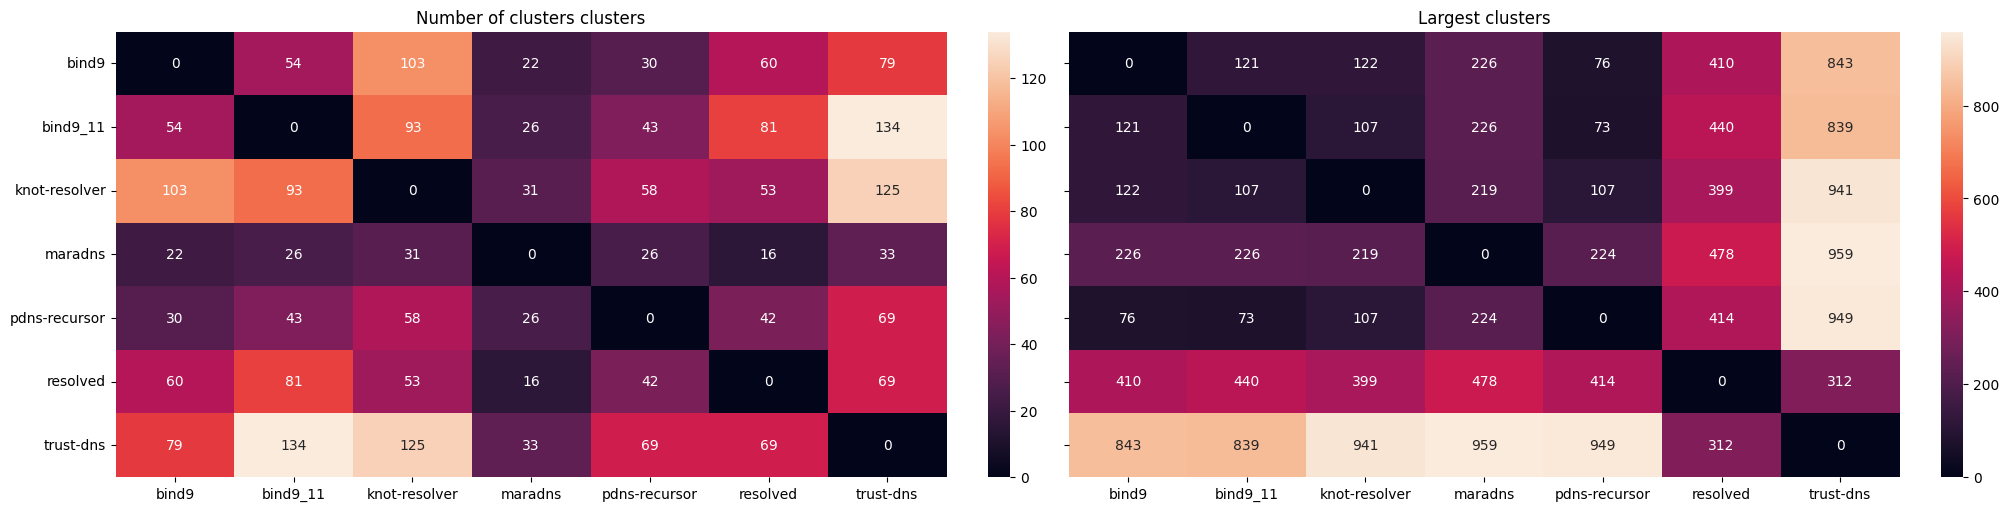

# bind9-bind9_11 (Clusters: 54)
* Cluster of size 121: [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-bind9_11/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-bind9_11/fuzz-suite.postcard" bind9 bind9_11`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | F | T | Refused | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | F | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.Code15.code
    .fuzz_result.fuzzee_response.edns.Code15.error_code
    .fuzz_result.fuzzee_response.edns.Code15.error_value
    ```
    
    <details><summary>All</summary>
    
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-bind9_11/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/bind9-bind9_11/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/bind9-bind9_11/fulldiff.txt)
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/bind9-bind9_11/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/bind9-bind9_11/fulldiff.txt)
    [`0d2dbe6e-489e-4c1c-bf1f-165afb5210ed`](./dnsdiff/2023-05-23%2001:55/0d2dbe6e-489e-4c1c-bf1f-165afb5210ed/bind9-bind9_11/fulldiff.txt)
    [`0e60a4b4-56a9-4311-a452-d0a03b522e42`](./dnsdiff/2023-05-23%2001:55/0e60a4b4-56a9-4311-a452-d0a03b522e42/bind9-bind9_11/fulldiff.txt)
    [`0ebed10d-a797-413e-bf95-b1915d681e4a`](./dnsdiff/2023-05-23%2001:55/0ebed10d-a797-413e-bf95-b1915d681e4a/bind9-bind9_11/fulldiff.txt)
    [`0f3ad5c5-1366-4697-96ca-6042bf97280d`](./dnsdiff/2023-05-23%2001:55/0f3ad5c5-1366-4697-96ca-6042bf97280d/bind9-bind9_11/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/bind9-bind9_11/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/bind9-bind9_11/fulldiff.txt)
    [`12f4d889-bde3-458d-9c39-6f6fb0c6847a`](./dnsdiff/2023-05-23%2001:55/12f4d889-bde3-458d-9c39-6f6fb0c6847a/bind9-bind9_11/fulldiff.txt)
    [`17eb9c42-72a3-49fb-a80f-3af0d584f807`](./dnsdiff/2023-05-23%2001:55/17eb9c42-72a3-49fb-a80f-3af0d584f807/bind9-bind9_11/fulldiff.txt)
    [`1a15a433-99cb-4187-aef3-705ae172a794`](./dnsdiff/2023-05-23%2001:55/1a15a433-99cb-4187-aef3-705ae172a794/bind9-bind9_11/fulldiff.txt)
    [`1b1bc95f-50a9-4693-b6ea-d438d62b576e`](./dnsdiff/2023-05-23%2001:55/1b1bc95f-50a9-4693-b6ea-d438d62b576e/bind9-bind9_11/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/bind9-bind9_11/fulldiff.txt)
    [`1bf0301b-2aec-458d-b8e4-e57b84346b2c`](./dnsdiff/2023-05-23%2001:55/1bf0301b-2aec-458d-b8e4-e57b84346b2c/bind9-bind9_11/fulldiff.txt)
    [`207bd518-3761-4fb4-bc2c-443eea3c6a47`](./dnsdiff/2023-05-23%2001:55/207bd518-3761-4fb4-bc2c-443eea3c6a47/bind9-bind9_11/fulldiff.txt)
    [`2994439a-80ca-45fd-a7e4-d8bd8cb81b88`](./dnsdiff/2023-05-23%2001:55/2994439a-80ca-45fd-a7e4-d8bd8cb81b88/bind9-bind9_11/fulldiff.txt)
    [`2a1d6205-f80b-462e-9ca0-64ed7b9f33cb`](./dnsdiff/2023-05-23%2001:55/2a1d6205-f80b-462e-9ca0-64ed7b9f33cb/bind9-bind9_11/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/bind9-bind9_11/fulldiff.txt)
    [`2d73df4a-68e5-42aa-ac26-1ca9a94dc322`](./dnsdiff/2023-05-23%2001:55/2d73df4a-68e5-42aa-ac26-1ca9a94dc322/bind9-bind9_11/fulldiff.txt)
    [`2fe3d820-ea37-450b-84d7-66274a8017d7`](./dnsdiff/2023-05-23%2001:55/2fe3d820-ea37-450b-84d7-66274a8017d7/bind9-bind9_11/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/bind9-bind9_11/fulldiff.txt)
    [`3a241c38-d917-44e9-a190-2cc08bb1b795`](./dnsdiff/2023-05-23%2001:55/3a241c38-d917-44e9-a190-2cc08bb1b795/bind9-bind9_11/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/bind9-bind9_11/fulldiff.txt)
    [`3c29ae37-455c-47e9-b2ec-7936e97d4774`](./dnsdiff/2023-05-23%2001:55/3c29ae37-455c-47e9-b2ec-7936e97d4774/bind9-bind9_11/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/bind9-bind9_11/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/bind9-bind9_11/fulldiff.txt)
    [`47c2ce6e-304b-4779-9433-fe59e640f69d`](./dnsdiff/2023-05-23%2001:55/47c2ce6e-304b-4779-9433-fe59e640f69d/bind9-bind9_11/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/bind9-bind9_11/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/bind9-bind9_11/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/bind9-bind9_11/fulldiff.txt)
    [`4fbb889e-ad9c-4d90-9fb0-f5ce532449d9`](./dnsdiff/2023-05-23%2001:55/4fbb889e-ad9c-4d90-9fb0-f5ce532449d9/bind9-bind9_11/fulldiff.txt)
    [`50bb118c-7eb6-4795-80a6-1e9b335a0d8e`](./dnsdiff/2023-05-23%2001:55/50bb118c-7eb6-4795-80a6-1e9b335a0d8e/bind9-bind9_11/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/bind9-bind9_11/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/bind9-bind9_11/fulldiff.txt)
    [`569bbe57-76b0-4e84-ac9b-5b903d407f75`](./dnsdiff/2023-05-23%2001:55/569bbe57-76b0-4e84-ac9b-5b903d407f75/bind9-bind9_11/fulldiff.txt)
    [`573e4457-91f0-403c-b98e-45c8138098cf`](./dnsdiff/2023-05-23%2001:55/573e4457-91f0-403c-b98e-45c8138098cf/bind9-bind9_11/fulldiff.txt)
    [`58e05f6f-4083-4f87-ae45-e7fe7be7cc33`](./dnsdiff/2023-05-23%2001:55/58e05f6f-4083-4f87-ae45-e7fe7be7cc33/bind9-bind9_11/fulldiff.txt)
    [`5906eef2-cb29-4e1e-abe2-6920bebc7fdc`](./dnsdiff/2023-05-23%2001:55/5906eef2-cb29-4e1e-abe2-6920bebc7fdc/bind9-bind9_11/fulldiff.txt)
    [`5940c2cb-1d07-4808-a2c6-a11195417bd4`](./dnsdiff/2023-05-23%2001:55/5940c2cb-1d07-4808-a2c6-a11195417bd4/bind9-bind9_11/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/bind9-bind9_11/fulldiff.txt)
    [`6421b709-69b9-4d7c-9192-d500b29a63b1`](./dnsdiff/2023-05-23%2001:55/6421b709-69b9-4d7c-9192-d500b29a63b1/bind9-bind9_11/fulldiff.txt)
    [`64a0b221-5446-4caf-b5db-8bc3075834c5`](./dnsdiff/2023-05-23%2001:55/64a0b221-5446-4caf-b5db-8bc3075834c5/bind9-bind9_11/fulldiff.txt)
    [`676389b5-18e0-48f0-acb2-48133144edfc`](./dnsdiff/2023-05-23%2001:55/676389b5-18e0-48f0-acb2-48133144edfc/bind9-bind9_11/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/bind9-bind9_11/fulldiff.txt)
    [`6ae8cb43-32fb-448d-976c-40bb0ca04fc8`](./dnsdiff/2023-05-23%2001:55/6ae8cb43-32fb-448d-976c-40bb0ca04fc8/bind9-bind9_11/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/bind9-bind9_11/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/bind9-bind9_11/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/bind9-bind9_11/fulldiff.txt)
    [`72aee74e-dd31-4bc4-9529-d54b45cbbfed`](./dnsdiff/2023-05-23%2001:55/72aee74e-dd31-4bc4-9529-d54b45cbbfed/bind9-bind9_11/fulldiff.txt)
    [`733e5c84-dfef-419b-8eac-0b8a6c440432`](./dnsdiff/2023-05-23%2001:55/733e5c84-dfef-419b-8eac-0b8a6c440432/bind9-bind9_11/fulldiff.txt)
    [`74e13260-953a-4067-b13e-5f7ba993a108`](./dnsdiff/2023-05-23%2001:55/74e13260-953a-4067-b13e-5f7ba993a108/bind9-bind9_11/fulldiff.txt)
    [`77d6247d-8b67-421a-9807-83993acb59e2`](./dnsdiff/2023-05-23%2001:55/77d6247d-8b67-421a-9807-83993acb59e2/bind9-bind9_11/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/bind9-bind9_11/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/bind9-bind9_11/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/bind9-bind9_11/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/bind9-bind9_11/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/bind9-bind9_11/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/bind9-bind9_11/fulldiff.txt)
    [`8321faad-248f-4cfe-908e-f150a242204e`](./dnsdiff/2023-05-23%2001:55/8321faad-248f-4cfe-908e-f150a242204e/bind9-bind9_11/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/bind9-bind9_11/fulldiff.txt)
    [`8804dfb9-3c68-4032-b2e5-c3c1d8e7735f`](./dnsdiff/2023-05-23%2001:55/8804dfb9-3c68-4032-b2e5-c3c1d8e7735f/bind9-bind9_11/fulldiff.txt)
    [`896836f5-1c14-4c40-9bf1-790b6c8507ef`](./dnsdiff/2023-05-23%2001:55/896836f5-1c14-4c40-9bf1-790b6c8507ef/bind9-bind9_11/fulldiff.txt)
    [`8ad6bf76-5ac9-46ea-85fc-6ea7604364a4`](./dnsdiff/2023-05-23%2001:55/8ad6bf76-5ac9-46ea-85fc-6ea7604364a4/bind9-bind9_11/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/bind9-bind9_11/fulldiff.txt)
    [`908176bd-772c-4153-a356-b8acd6644a86`](./dnsdiff/2023-05-23%2001:55/908176bd-772c-4153-a356-b8acd6644a86/bind9-bind9_11/fulldiff.txt)
    [`9100dc4f-acbe-4a8f-8a0e-17490496378a`](./dnsdiff/2023-05-23%2001:55/9100dc4f-acbe-4a8f-8a0e-17490496378a/bind9-bind9_11/fulldiff.txt)
    [`917e0557-b403-4af8-90c3-7dbc610714fd`](./dnsdiff/2023-05-23%2001:55/917e0557-b403-4af8-90c3-7dbc610714fd/bind9-bind9_11/fulldiff.txt)
    [`95d884a8-7ad3-4903-bad3-f0d100a749c3`](./dnsdiff/2023-05-23%2001:55/95d884a8-7ad3-4903-bad3-f0d100a749c3/bind9-bind9_11/fulldiff.txt)
    [`996a3a6c-d88f-45c4-81ee-d9028c135b02`](./dnsdiff/2023-05-23%2001:55/996a3a6c-d88f-45c4-81ee-d9028c135b02/bind9-bind9_11/fulldiff.txt)
    [`9b044935-7a76-42c5-9179-8b9e323ca141`](./dnsdiff/2023-05-23%2001:55/9b044935-7a76-42c5-9179-8b9e323ca141/bind9-bind9_11/fulldiff.txt)
    [`9e2f6569-60b1-432f-963e-be021c8ac814`](./dnsdiff/2023-05-23%2001:55/9e2f6569-60b1-432f-963e-be021c8ac814/bind9-bind9_11/fulldiff.txt)
    [`9ebaf5ac-0c7e-4c33-bc30-51b022331698`](./dnsdiff/2023-05-23%2001:55/9ebaf5ac-0c7e-4c33-bc30-51b022331698/bind9-bind9_11/fulldiff.txt)
    [`a029ae3f-8cb3-41e3-973a-949a9ac4b665`](./dnsdiff/2023-05-23%2001:55/a029ae3f-8cb3-41e3-973a-949a9ac4b665/bind9-bind9_11/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/bind9-bind9_11/fulldiff.txt)
    [`a4193c5b-faae-47a9-b6e3-1d3aff85c013`](./dnsdiff/2023-05-23%2001:55/a4193c5b-faae-47a9-b6e3-1d3aff85c013/bind9-bind9_11/fulldiff.txt)
    [`aa035025-f56a-4d43-8df1-cc2271fb2475`](./dnsdiff/2023-05-23%2001:55/aa035025-f56a-4d43-8df1-cc2271fb2475/bind9-bind9_11/fulldiff.txt)
    [`ab2ef5df-ac39-49fd-a69b-febc0b64a640`](./dnsdiff/2023-05-23%2001:55/ab2ef5df-ac39-49fd-a69b-febc0b64a640/bind9-bind9_11/fulldiff.txt)
    [`ad9578f2-27d3-4b6b-bf4f-15e47f5a0433`](./dnsdiff/2023-05-23%2001:55/ad9578f2-27d3-4b6b-bf4f-15e47f5a0433/bind9-bind9_11/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/bind9-bind9_11/fulldiff.txt)
    [`b0510bcb-1143-426d-8439-2797a0c4d1b0`](./dnsdiff/2023-05-23%2001:55/b0510bcb-1143-426d-8439-2797a0c4d1b0/bind9-bind9_11/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/bind9-bind9_11/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/bind9-bind9_11/fulldiff.txt)
    [`b52d5bb0-8654-4454-9449-8062a8c3546a`](./dnsdiff/2023-05-23%2001:55/b52d5bb0-8654-4454-9449-8062a8c3546a/bind9-bind9_11/fulldiff.txt)
    [`b52d5d12-22f3-4439-b08e-c142d35b53ef`](./dnsdiff/2023-05-23%2001:55/b52d5d12-22f3-4439-b08e-c142d35b53ef/bind9-bind9_11/fulldiff.txt)
    [`b9b7a180-dbfe-4e92-9dbb-617940672925`](./dnsdiff/2023-05-23%2001:55/b9b7a180-dbfe-4e92-9dbb-617940672925/bind9-bind9_11/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/bind9-bind9_11/fulldiff.txt)
    [`c8daedf3-d28c-4d56-9323-0434821d0f34`](./dnsdiff/2023-05-23%2001:55/c8daedf3-d28c-4d56-9323-0434821d0f34/bind9-bind9_11/fulldiff.txt)
    [`c92eff90-e6b1-4355-896e-aba28ced2431`](./dnsdiff/2023-05-23%2001:55/c92eff90-e6b1-4355-896e-aba28ced2431/bind9-bind9_11/fulldiff.txt)
    [`cb7a19b9-5eec-4a6f-8c6b-04007ea0c362`](./dnsdiff/2023-05-23%2001:55/cb7a19b9-5eec-4a6f-8c6b-04007ea0c362/bind9-bind9_11/fulldiff.txt)
    [`cbb288ba-2774-4a7c-b46c-ac153b3830e6`](./dnsdiff/2023-05-23%2001:55/cbb288ba-2774-4a7c-b46c-ac153b3830e6/bind9-bind9_11/fulldiff.txt)
    [`cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8`](./dnsdiff/2023-05-23%2001:55/cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8/bind9-bind9_11/fulldiff.txt)
    [`cfa55e3f-9de8-46d6-ae1d-71a723dbb254`](./dnsdiff/2023-05-23%2001:55/cfa55e3f-9de8-46d6-ae1d-71a723dbb254/bind9-bind9_11/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/bind9-bind9_11/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/bind9-bind9_11/fulldiff.txt)
    [`d55957b7-9036-44c5-bcdf-ebe386e3d469`](./dnsdiff/2023-05-23%2001:55/d55957b7-9036-44c5-bcdf-ebe386e3d469/bind9-bind9_11/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/bind9-bind9_11/fulldiff.txt)
    [`dc3e3f51-fe82-48de-bc09-9fc60395c449`](./dnsdiff/2023-05-23%2001:55/dc3e3f51-fe82-48de-bc09-9fc60395c449/bind9-bind9_11/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/bind9-bind9_11/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/bind9-bind9_11/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/bind9-bind9_11/fulldiff.txt)
    [`df820c48-487b-4395-b35a-feea9fde9be0`](./dnsdiff/2023-05-23%2001:55/df820c48-487b-4395-b35a-feea9fde9be0/bind9-bind9_11/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/bind9-bind9_11/fulldiff.txt)
    [`e2ec9221-220c-498a-915a-12e0210811de`](./dnsdiff/2023-05-23%2001:55/e2ec9221-220c-498a-915a-12e0210811de/bind9-bind9_11/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/bind9-bind9_11/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/bind9-bind9_11/fulldiff.txt)
    [`e8528dde-3bd9-4ff3-8ba2-bae50907b54f`](./dnsdiff/2023-05-23%2001:55/e8528dde-3bd9-4ff3-8ba2-bae50907b54f/bind9-bind9_11/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/bind9-bind9_11/fulldiff.txt)
    [`ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e`](./dnsdiff/2023-05-23%2001:55/ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e/bind9-bind9_11/fulldiff.txt)
    [`ef484919-8230-4f6c-99d9-a8ce42dd2382`](./dnsdiff/2023-05-23%2001:55/ef484919-8230-4f6c-99d9-a8ce42dd2382/bind9-bind9_11/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/bind9-bind9_11/fulldiff.txt)
    [`f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78`](./dnsdiff/2023-05-23%2001:55/f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78/bind9-bind9_11/fulldiff.txt)
    [`f4d47480-ab56-444f-b670-a96311d5a271`](./dnsdiff/2023-05-23%2001:55/f4d47480-ab56-444f-b670-a96311d5a271/bind9-bind9_11/fulldiff.txt)
    [`f8979943-6181-4c27-9fb4-d3c68b875c7a`](./dnsdiff/2023-05-23%2001:55/f8979943-6181-4c27-9fb4-d3c68b875c7a/bind9-bind9_11/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/bind9-bind9_11/fulldiff.txt)
    [`fab74a37-8b58-4bf7-a0f9-c928316e950f`](./dnsdiff/2023-05-23%2001:55/fab74a37-8b58-4bf7-a0f9-c928316e950f/bind9-bind9_11/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/bind9-bind9_11/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/bind9-bind9_11/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/bind9-bind9_11/fulldiff.txt)
    
    </details>
* Cluster of size 92: [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/bind9-bind9_11/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0037734c-79f0-480c-b083-4c54602f67c7/bind9-bind9_11/fuzz-suite.postcard" bind9 bind9_11`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | update | 1 | F | F | FormErr | F |
    | R   | 1 | 0 | F | F | T | response | 0 | update | 1 | T | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.recursion_available
    ```
    
    <details><summary>All</summary>
    
    [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/bind9-bind9_11/fulldiff.txt)
    [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/bind9-bind9_11/fulldiff.txt)
    [`01a379a0-f6e6-46b6-aa94-79edfea3b356`](./dnsdiff/2023-05-23%2001:55/01a379a0-f6e6-46b6-aa94-79edfea3b356/bind9-bind9_11/fulldiff.txt)
    [`02393090-3366-43bf-80f2-b5bd218a6f27`](./dnsdiff/2023-05-23%2001:55/02393090-3366-43bf-80f2-b5bd218a6f27/bind9-bind9_11/fulldiff.txt)
    [`05d436f4-1136-44cf-b4ed-65481dce35ba`](./dnsdiff/2023-05-23%2001:55/05d436f4-1136-44cf-b4ed-65481dce35ba/bind9-bind9_11/fulldiff.txt)
    [`06dc358b-a494-4405-8bf3-35d8ec491a3a`](./dnsdiff/2023-05-23%2001:55/06dc358b-a494-4405-8bf3-35d8ec491a3a/bind9-bind9_11/fulldiff.txt)
    [`0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2`](./dnsdiff/2023-05-23%2001:55/0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2/bind9-bind9_11/fulldiff.txt)
    [`0ba42974-bbd1-4902-b6d9-41e24f97ed26`](./dnsdiff/2023-05-23%2001:55/0ba42974-bbd1-4902-b6d9-41e24f97ed26/bind9-bind9_11/fulldiff.txt)
    [`14c5d53b-6cca-430b-8215-2de398b6cd67`](./dnsdiff/2023-05-23%2001:55/14c5d53b-6cca-430b-8215-2de398b6cd67/bind9-bind9_11/fulldiff.txt)
    [`17f86868-29d5-4feb-8dee-7f88814ca546`](./dnsdiff/2023-05-23%2001:55/17f86868-29d5-4feb-8dee-7f88814ca546/bind9-bind9_11/fulldiff.txt)
    [`1cb35625-53a0-4866-88ef-5b6ee7c16634`](./dnsdiff/2023-05-23%2001:55/1cb35625-53a0-4866-88ef-5b6ee7c16634/bind9-bind9_11/fulldiff.txt)
    [`1ce203c2-8e63-443b-af7a-bc939097bffb`](./dnsdiff/2023-05-23%2001:55/1ce203c2-8e63-443b-af7a-bc939097bffb/bind9-bind9_11/fulldiff.txt)
    [`2122b2a8-caac-4959-ad13-2b068fedf3e2`](./dnsdiff/2023-05-23%2001:55/2122b2a8-caac-4959-ad13-2b068fedf3e2/bind9-bind9_11/fulldiff.txt)
    [`2155f45a-5af9-4c0b-8954-9598c0fab847`](./dnsdiff/2023-05-23%2001:55/2155f45a-5af9-4c0b-8954-9598c0fab847/bind9-bind9_11/fulldiff.txt)
    [`21697fa8-b927-4cff-9b4c-8022adb37fde`](./dnsdiff/2023-05-23%2001:55/21697fa8-b927-4cff-9b4c-8022adb37fde/bind9-bind9_11/fulldiff.txt)
    [`21dbca20-3d2c-471c-b0e6-dc132490855f`](./dnsdiff/2023-05-23%2001:55/21dbca20-3d2c-471c-b0e6-dc132490855f/bind9-bind9_11/fulldiff.txt)
    [`23ee9bae-d478-4804-998d-9cefdfcf608d`](./dnsdiff/2023-05-23%2001:55/23ee9bae-d478-4804-998d-9cefdfcf608d/bind9-bind9_11/fulldiff.txt)
    [`27465429-20df-498c-9a1e-bfcb2f020ea7`](./dnsdiff/2023-05-23%2001:55/27465429-20df-498c-9a1e-bfcb2f020ea7/bind9-bind9_11/fulldiff.txt)
    [`2af0cb3d-985f-466d-a517-6954264ca9b9`](./dnsdiff/2023-05-23%2001:55/2af0cb3d-985f-466d-a517-6954264ca9b9/bind9-bind9_11/fulldiff.txt)
    [`2e13da4f-fa29-4d0c-846e-9f3ca85cccf3`](./dnsdiff/2023-05-23%2001:55/2e13da4f-fa29-4d0c-846e-9f3ca85cccf3/bind9-bind9_11/fulldiff.txt)
    [`2e160273-8855-4895-9689-d8170578ad38`](./dnsdiff/2023-05-23%2001:55/2e160273-8855-4895-9689-d8170578ad38/bind9-bind9_11/fulldiff.txt)
    [`32fc54c9-890e-4cac-9c49-eb4c666b3180`](./dnsdiff/2023-05-23%2001:55/32fc54c9-890e-4cac-9c49-eb4c666b3180/bind9-bind9_11/fulldiff.txt)
    [`33c45d9b-e983-4cc7-bfa5-e1a2ff74010f`](./dnsdiff/2023-05-23%2001:55/33c45d9b-e983-4cc7-bfa5-e1a2ff74010f/bind9-bind9_11/fulldiff.txt)
    [`33fbc53a-3cee-4386-8d2a-3ca79029a0c2`](./dnsdiff/2023-05-23%2001:55/33fbc53a-3cee-4386-8d2a-3ca79029a0c2/bind9-bind9_11/fulldiff.txt)
    [`37f05ec2-5cdb-4f29-833c-aa87ad7e3884`](./dnsdiff/2023-05-23%2001:55/37f05ec2-5cdb-4f29-833c-aa87ad7e3884/bind9-bind9_11/fulldiff.txt)
    [`381a867d-2add-4f45-b8ba-9595f4602072`](./dnsdiff/2023-05-23%2001:55/381a867d-2add-4f45-b8ba-9595f4602072/bind9-bind9_11/fulldiff.txt)
    [`38725108-0e79-4862-98f6-8b60335ee014`](./dnsdiff/2023-05-23%2001:55/38725108-0e79-4862-98f6-8b60335ee014/bind9-bind9_11/fulldiff.txt)
    [`3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3`](./dnsdiff/2023-05-23%2001:55/3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3/bind9-bind9_11/fulldiff.txt)
    [`3d20944b-2999-4046-9de8-b1f9e06bb8ce`](./dnsdiff/2023-05-23%2001:55/3d20944b-2999-4046-9de8-b1f9e06bb8ce/bind9-bind9_11/fulldiff.txt)
    [`3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6`](./dnsdiff/2023-05-23%2001:55/3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6/bind9-bind9_11/fulldiff.txt)
    [`410cc577-b08e-42eb-abef-75a7bd327c94`](./dnsdiff/2023-05-23%2001:55/410cc577-b08e-42eb-abef-75a7bd327c94/bind9-bind9_11/fulldiff.txt)
    [`43ce8ea7-7519-4777-9518-f2445ed4e771`](./dnsdiff/2023-05-23%2001:55/43ce8ea7-7519-4777-9518-f2445ed4e771/bind9-bind9_11/fulldiff.txt)
    [`461c9da4-baa4-4119-890c-3c5507e5cd15`](./dnsdiff/2023-05-23%2001:55/461c9da4-baa4-4119-890c-3c5507e5cd15/bind9-bind9_11/fulldiff.txt)
    [`49bfa18c-deba-4ae6-80ff-df12b20f4638`](./dnsdiff/2023-05-23%2001:55/49bfa18c-deba-4ae6-80ff-df12b20f4638/bind9-bind9_11/fulldiff.txt)
    [`4c3f67b7-48dd-4599-9354-7c8d69f8511d`](./dnsdiff/2023-05-23%2001:55/4c3f67b7-48dd-4599-9354-7c8d69f8511d/bind9-bind9_11/fulldiff.txt)
    [`4e3c1d3e-fece-44ea-98d3-4edf9b6799e7`](./dnsdiff/2023-05-23%2001:55/4e3c1d3e-fece-44ea-98d3-4edf9b6799e7/bind9-bind9_11/fulldiff.txt)
    [`4f56a286-0b8b-4860-8c84-4db8ad6362ed`](./dnsdiff/2023-05-23%2001:55/4f56a286-0b8b-4860-8c84-4db8ad6362ed/bind9-bind9_11/fulldiff.txt)
    [`516feb3b-5f4f-41cb-b85d-9a7680c5bf7a`](./dnsdiff/2023-05-23%2001:55/516feb3b-5f4f-41cb-b85d-9a7680c5bf7a/bind9-bind9_11/fulldiff.txt)
    [`57245fdb-51e2-423a-9457-dd6eba0b3274`](./dnsdiff/2023-05-23%2001:55/57245fdb-51e2-423a-9457-dd6eba0b3274/bind9-bind9_11/fulldiff.txt)
    [`58dce567-3ab3-40db-9568-bb319909b6e8`](./dnsdiff/2023-05-23%2001:55/58dce567-3ab3-40db-9568-bb319909b6e8/bind9-bind9_11/fulldiff.txt)
    [`5bfe6351-3d0f-448c-8ee0-5e23089cca3a`](./dnsdiff/2023-05-23%2001:55/5bfe6351-3d0f-448c-8ee0-5e23089cca3a/bind9-bind9_11/fulldiff.txt)
    [`5d182437-d8b1-4d9d-b07c-145965b37ff6`](./dnsdiff/2023-05-23%2001:55/5d182437-d8b1-4d9d-b07c-145965b37ff6/bind9-bind9_11/fulldiff.txt)
    [`635b1631-fdaa-4b6b-906a-f23e06973fde`](./dnsdiff/2023-05-23%2001:55/635b1631-fdaa-4b6b-906a-f23e06973fde/bind9-bind9_11/fulldiff.txt)
    [`6499de64-69bb-4c3a-a530-8e87bf8557e2`](./dnsdiff/2023-05-23%2001:55/6499de64-69bb-4c3a-a530-8e87bf8557e2/bind9-bind9_11/fulldiff.txt)
    [`6593a76a-5997-4e55-8c22-57cd6dbddcd8`](./dnsdiff/2023-05-23%2001:55/6593a76a-5997-4e55-8c22-57cd6dbddcd8/bind9-bind9_11/fulldiff.txt)
    [`6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e`](./dnsdiff/2023-05-23%2001:55/6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e/bind9-bind9_11/fulldiff.txt)
    [`6db280d9-b5b8-45d7-b73f-46d351fdd926`](./dnsdiff/2023-05-23%2001:55/6db280d9-b5b8-45d7-b73f-46d351fdd926/bind9-bind9_11/fulldiff.txt)
    [`6ddd5f54-c4dd-4e38-a8de-901b61c00f1d`](./dnsdiff/2023-05-23%2001:55/6ddd5f54-c4dd-4e38-a8de-901b61c00f1d/bind9-bind9_11/fulldiff.txt)
    [`73ce738c-5feb-4fb2-bc24-210088da55ec`](./dnsdiff/2023-05-23%2001:55/73ce738c-5feb-4fb2-bc24-210088da55ec/bind9-bind9_11/fulldiff.txt)
    [`81669cec-4818-43be-a2d8-e46a68c538de`](./dnsdiff/2023-05-23%2001:55/81669cec-4818-43be-a2d8-e46a68c538de/bind9-bind9_11/fulldiff.txt)
    [`861c9f74-418e-4cc0-b43c-1cfe280207a6`](./dnsdiff/2023-05-23%2001:55/861c9f74-418e-4cc0-b43c-1cfe280207a6/bind9-bind9_11/fulldiff.txt)
    [`878c67d3-85ab-4278-b2cc-3439a722989f`](./dnsdiff/2023-05-23%2001:55/878c67d3-85ab-4278-b2cc-3439a722989f/bind9-bind9_11/fulldiff.txt)
    [`8a430825-02cc-4eae-a84f-7a732240eb43`](./dnsdiff/2023-05-23%2001:55/8a430825-02cc-4eae-a84f-7a732240eb43/bind9-bind9_11/fulldiff.txt)
    [`8e845a35-2cc1-4d56-b8c2-f2180d3f095d`](./dnsdiff/2023-05-23%2001:55/8e845a35-2cc1-4d56-b8c2-f2180d3f095d/bind9-bind9_11/fulldiff.txt)
    [`90f40768-c0bf-4ab9-97d3-98d4761a77ca`](./dnsdiff/2023-05-23%2001:55/90f40768-c0bf-4ab9-97d3-98d4761a77ca/bind9-bind9_11/fulldiff.txt)
    [`921b8e3e-f15f-4dc3-aed5-5167ef0f52fc`](./dnsdiff/2023-05-23%2001:55/921b8e3e-f15f-4dc3-aed5-5167ef0f52fc/bind9-bind9_11/fulldiff.txt)
    [`96b62f71-0725-46d9-a1cc-37c3999710b0`](./dnsdiff/2023-05-23%2001:55/96b62f71-0725-46d9-a1cc-37c3999710b0/bind9-bind9_11/fulldiff.txt)
    [`983881d2-e7a1-4547-81d4-46dde7e2625f`](./dnsdiff/2023-05-23%2001:55/983881d2-e7a1-4547-81d4-46dde7e2625f/bind9-bind9_11/fulldiff.txt)
    [`99537fcb-68d6-4406-ad58-ab3994cdc726`](./dnsdiff/2023-05-23%2001:55/99537fcb-68d6-4406-ad58-ab3994cdc726/bind9-bind9_11/fulldiff.txt)
    [`9b92b1cc-77ff-41e3-85d6-e529771b4023`](./dnsdiff/2023-05-23%2001:55/9b92b1cc-77ff-41e3-85d6-e529771b4023/bind9-bind9_11/fulldiff.txt)
    [`aa72c79a-b937-4a97-adae-8783ac8e5a83`](./dnsdiff/2023-05-23%2001:55/aa72c79a-b937-4a97-adae-8783ac8e5a83/bind9-bind9_11/fulldiff.txt)
    [`adeeff9b-3566-45a8-b75e-65ab9920b389`](./dnsdiff/2023-05-23%2001:55/adeeff9b-3566-45a8-b75e-65ab9920b389/bind9-bind9_11/fulldiff.txt)
    [`b06cf9ed-25b9-436c-bcb1-7a04651ee320`](./dnsdiff/2023-05-23%2001:55/b06cf9ed-25b9-436c-bcb1-7a04651ee320/bind9-bind9_11/fulldiff.txt)
    [`b218fde3-b3b0-40bd-83d0-4a8496dd6603`](./dnsdiff/2023-05-23%2001:55/b218fde3-b3b0-40bd-83d0-4a8496dd6603/bind9-bind9_11/fulldiff.txt)
    [`b2f9ef8e-ed4b-4645-831f-4677d973cdcb`](./dnsdiff/2023-05-23%2001:55/b2f9ef8e-ed4b-4645-831f-4677d973cdcb/bind9-bind9_11/fulldiff.txt)
    [`bd890aed-9955-41a1-b236-0759ceb8fcdd`](./dnsdiff/2023-05-23%2001:55/bd890aed-9955-41a1-b236-0759ceb8fcdd/bind9-bind9_11/fulldiff.txt)
    [`c4ce11b1-e053-4894-a23b-02b2712f8a60`](./dnsdiff/2023-05-23%2001:55/c4ce11b1-e053-4894-a23b-02b2712f8a60/bind9-bind9_11/fulldiff.txt)
    [`ca213ff2-aa93-4ed1-9e50-6b5e30233274`](./dnsdiff/2023-05-23%2001:55/ca213ff2-aa93-4ed1-9e50-6b5e30233274/bind9-bind9_11/fulldiff.txt)
    [`ca61a338-51b6-46e8-8a3d-e15393b3f030`](./dnsdiff/2023-05-23%2001:55/ca61a338-51b6-46e8-8a3d-e15393b3f030/bind9-bind9_11/fulldiff.txt)
    [`caa5715f-e078-4563-aea1-6274fd550413`](./dnsdiff/2023-05-23%2001:55/caa5715f-e078-4563-aea1-6274fd550413/bind9-bind9_11/fulldiff.txt)
    [`cbbd9486-fb91-4f5d-813d-247bdf09c666`](./dnsdiff/2023-05-23%2001:55/cbbd9486-fb91-4f5d-813d-247bdf09c666/bind9-bind9_11/fulldiff.txt)
    [`cc89788a-9aa9-430f-af35-75bcd83580cb`](./dnsdiff/2023-05-23%2001:55/cc89788a-9aa9-430f-af35-75bcd83580cb/bind9-bind9_11/fulldiff.txt)
    [`cdc398a6-647b-4540-9946-eb368de463ac`](./dnsdiff/2023-05-23%2001:55/cdc398a6-647b-4540-9946-eb368de463ac/bind9-bind9_11/fulldiff.txt)
    [`cdcc3a29-a953-4ff4-889d-3e7f53f6f061`](./dnsdiff/2023-05-23%2001:55/cdcc3a29-a953-4ff4-889d-3e7f53f6f061/bind9-bind9_11/fulldiff.txt)
    [`d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a`](./dnsdiff/2023-05-23%2001:55/d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a/bind9-bind9_11/fulldiff.txt)
    [`ddc95fd6-8c41-448c-a548-58d4f648b688`](./dnsdiff/2023-05-23%2001:55/ddc95fd6-8c41-448c-a548-58d4f648b688/bind9-bind9_11/fulldiff.txt)
    [`df65a17b-88e6-4b49-9339-241fdc83eb34`](./dnsdiff/2023-05-23%2001:55/df65a17b-88e6-4b49-9339-241fdc83eb34/bind9-bind9_11/fulldiff.txt)
    [`df8f6834-43a3-439c-b784-ce07fee1bb25`](./dnsdiff/2023-05-23%2001:55/df8f6834-43a3-439c-b784-ce07fee1bb25/bind9-bind9_11/fulldiff.txt)
    [`e640f842-1bcc-4370-a143-d80885b72841`](./dnsdiff/2023-05-23%2001:55/e640f842-1bcc-4370-a143-d80885b72841/bind9-bind9_11/fulldiff.txt)
    [`e6b1656f-f8f8-4f2f-b849-a2d44cefffa9`](./dnsdiff/2023-05-23%2001:55/e6b1656f-f8f8-4f2f-b849-a2d44cefffa9/bind9-bind9_11/fulldiff.txt)
    [`e7025a89-6ee1-46cb-8ea0-00f582cf9f4e`](./dnsdiff/2023-05-23%2001:55/e7025a89-6ee1-46cb-8ea0-00f582cf9f4e/bind9-bind9_11/fulldiff.txt)
    [`e7a40535-969f-4d49-953f-52d0cf9c4c14`](./dnsdiff/2023-05-23%2001:55/e7a40535-969f-4d49-953f-52d0cf9c4c14/bind9-bind9_11/fulldiff.txt)
    [`e7abf107-bad5-4927-b6a6-1ac91018e993`](./dnsdiff/2023-05-23%2001:55/e7abf107-bad5-4927-b6a6-1ac91018e993/bind9-bind9_11/fulldiff.txt)
    [`e93be36e-111b-43ba-864d-fb73b229a147`](./dnsdiff/2023-05-23%2001:55/e93be36e-111b-43ba-864d-fb73b229a147/bind9-bind9_11/fulldiff.txt)
    [`f33d5a4d-cac6-4885-8d59-739b729efd91`](./dnsdiff/2023-05-23%2001:55/f33d5a4d-cac6-4885-8d59-739b729efd91/bind9-bind9_11/fulldiff.txt)
    [`f47711e5-85da-4c06-a4f4-af6d06467951`](./dnsdiff/2023-05-23%2001:55/f47711e5-85da-4c06-a4f4-af6d06467951/bind9-bind9_11/fulldiff.txt)
    [`f4ee58a2-84b8-47a4-8e9e-7669f71f28d5`](./dnsdiff/2023-05-23%2001:55/f4ee58a2-84b8-47a4-8e9e-7669f71f28d5/bind9-bind9_11/fulldiff.txt)
    [`f97f1ecf-ccd5-4cbe-b265-e9eb52158922`](./dnsdiff/2023-05-23%2001:55/f97f1ecf-ccd5-4cbe-b265-e9eb52158922/bind9-bind9_11/fulldiff.txt)
    [`fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77`](./dnsdiff/2023-05-23%2001:55/fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77/bind9-bind9_11/fulldiff.txt)
    [`fb36c4b4-b112-48a8-b608-b13bed675704`](./dnsdiff/2023-05-23%2001:55/fb36c4b4-b112-48a8-b608-b13bed675704/bind9-bind9_11/fulldiff.txt)
    [`fbd7831c-0cba-46d9-ae54-4546e4536925`](./dnsdiff/2023-05-23%2001:55/fbd7831c-0cba-46d9-ae54-4546e4536925/bind9-bind9_11/fulldiff.txt)
    [`fc99c61c-71b8-4b5e-bff0-1e25a8398151`](./dnsdiff/2023-05-23%2001:55/fc99c61c-71b8-4b5e-bff0-1e25a8398151/bind9-bind9_11/fulldiff.txt)
    
    </details>
* Cluster of size 65: [`054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c`](./dnsdiff/2023-05-23%2001:55/054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c/bind9-bind9_11/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c/bind9-bind9_11/fuzz-suite.postcard" bind9 bind9_11`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | update | 1 | F | F | FormErr | F |
    | R   | 1 | 0 | F | F | F | response | 0 | update | 1 | T | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.recursion_available
    ```
    
    <details><summary>All</summary>
    
    [`054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c`](./dnsdiff/2023-05-23%2001:55/054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c/bind9-bind9_11/fulldiff.txt)
    [`1526e3c3-8ed9-4d5a-a321-a2ef9fd62c9e`](./dnsdiff/2023-05-23%2001:55/1526e3c3-8ed9-4d5a-a321-a2ef9fd62c9e/bind9-bind9_11/fulldiff.txt)
    [`18500fe5-3708-4288-8b39-28d696974b2a`](./dnsdiff/2023-05-23%2001:55/18500fe5-3708-4288-8b39-28d696974b2a/bind9-bind9_11/fulldiff.txt)
    [`18a6febf-807f-4c62-9a44-304c6ed50cf5`](./dnsdiff/2023-05-23%2001:55/18a6febf-807f-4c62-9a44-304c6ed50cf5/bind9-bind9_11/fulldiff.txt)
    [`1c87083b-1d8f-4770-a7e1-75dfdabdc2df`](./dnsdiff/2023-05-23%2001:55/1c87083b-1d8f-4770-a7e1-75dfdabdc2df/bind9-bind9_11/fulldiff.txt)
    [`20ef1ca1-bdd4-44ce-8444-befc302a3ab5`](./dnsdiff/2023-05-23%2001:55/20ef1ca1-bdd4-44ce-8444-befc302a3ab5/bind9-bind9_11/fulldiff.txt)
    [`232ccd51-f76b-4f56-b589-d3ce2608ea95`](./dnsdiff/2023-05-23%2001:55/232ccd51-f76b-4f56-b589-d3ce2608ea95/bind9-bind9_11/fulldiff.txt)
    [`2e01505b-d5ac-4bef-a8b0-529f971209dc`](./dnsdiff/2023-05-23%2001:55/2e01505b-d5ac-4bef-a8b0-529f971209dc/bind9-bind9_11/fulldiff.txt)
    [`2f228c33-d668-4fcd-8e13-9ec3718132c1`](./dnsdiff/2023-05-23%2001:55/2f228c33-d668-4fcd-8e13-9ec3718132c1/bind9-bind9_11/fulldiff.txt)
    [`3282a76d-45cf-4aa5-82f8-fba65623cb5a`](./dnsdiff/2023-05-23%2001:55/3282a76d-45cf-4aa5-82f8-fba65623cb5a/bind9-bind9_11/fulldiff.txt)
    [`36bd56c1-d6fc-4895-b8bf-2ff070f86722`](./dnsdiff/2023-05-23%2001:55/36bd56c1-d6fc-4895-b8bf-2ff070f86722/bind9-bind9_11/fulldiff.txt)
    [`3cb988d0-a8ec-47e0-a8c7-9defc717e978`](./dnsdiff/2023-05-23%2001:55/3cb988d0-a8ec-47e0-a8c7-9defc717e978/bind9-bind9_11/fulldiff.txt)
    [`3f8e7b89-f95d-48f6-8fff-375a516eaaa7`](./dnsdiff/2023-05-23%2001:55/3f8e7b89-f95d-48f6-8fff-375a516eaaa7/bind9-bind9_11/fulldiff.txt)
    [`3fedf3cf-4959-4ba8-a201-3adffd85d3a5`](./dnsdiff/2023-05-23%2001:55/3fedf3cf-4959-4ba8-a201-3adffd85d3a5/bind9-bind9_11/fulldiff.txt)
    [`4621fd80-1a80-4227-8b9b-169ea76ed8f4`](./dnsdiff/2023-05-23%2001:55/4621fd80-1a80-4227-8b9b-169ea76ed8f4/bind9-bind9_11/fulldiff.txt)
    [`473257c2-6eba-4b54-8e43-aef3d74dcac6`](./dnsdiff/2023-05-23%2001:55/473257c2-6eba-4b54-8e43-aef3d74dcac6/bind9-bind9_11/fulldiff.txt)
    [`4db38f25-33f3-4a42-aaea-3ed981e5c114`](./dnsdiff/2023-05-23%2001:55/4db38f25-33f3-4a42-aaea-3ed981e5c114/bind9-bind9_11/fulldiff.txt)
    [`4db6a91d-92fa-46bc-ae61-cbdbd62b0cfd`](./dnsdiff/2023-05-23%2001:55/4db6a91d-92fa-46bc-ae61-cbdbd62b0cfd/bind9-bind9_11/fulldiff.txt)
    [`4e11aebe-f147-46f5-a572-283e7a0daf7c`](./dnsdiff/2023-05-23%2001:55/4e11aebe-f147-46f5-a572-283e7a0daf7c/bind9-bind9_11/fulldiff.txt)
    [`51a691ff-3e1e-49b0-8745-28231ffd205c`](./dnsdiff/2023-05-23%2001:55/51a691ff-3e1e-49b0-8745-28231ffd205c/bind9-bind9_11/fulldiff.txt)
    [`527bf558-e8ed-4d30-8b55-201aa62a00be`](./dnsdiff/2023-05-23%2001:55/527bf558-e8ed-4d30-8b55-201aa62a00be/bind9-bind9_11/fulldiff.txt)
    [`530de0e4-6e0e-402c-aaf0-fa16a9ea821e`](./dnsdiff/2023-05-23%2001:55/530de0e4-6e0e-402c-aaf0-fa16a9ea821e/bind9-bind9_11/fulldiff.txt)
    [`5949c6aa-191b-438d-a3b1-86acd2881522`](./dnsdiff/2023-05-23%2001:55/5949c6aa-191b-438d-a3b1-86acd2881522/bind9-bind9_11/fulldiff.txt)
    [`59b0f02a-3dd0-4496-b532-ac88a0b9610a`](./dnsdiff/2023-05-23%2001:55/59b0f02a-3dd0-4496-b532-ac88a0b9610a/bind9-bind9_11/fulldiff.txt)
    [`5e7b37f1-4571-4ef0-a31b-4de9fc3b961e`](./dnsdiff/2023-05-23%2001:55/5e7b37f1-4571-4ef0-a31b-4de9fc3b961e/bind9-bind9_11/fulldiff.txt)
    [`5fcbd9f5-6421-474e-96b4-35b5bbf95d78`](./dnsdiff/2023-05-23%2001:55/5fcbd9f5-6421-474e-96b4-35b5bbf95d78/bind9-bind9_11/fulldiff.txt)
    [`605a10e0-4e39-4f20-9ad9-1f8d8d75bdb6`](./dnsdiff/2023-05-23%2001:55/605a10e0-4e39-4f20-9ad9-1f8d8d75bdb6/bind9-bind9_11/fulldiff.txt)
    [`63ba9739-151f-4837-819f-e195efed39ee`](./dnsdiff/2023-05-23%2001:55/63ba9739-151f-4837-819f-e195efed39ee/bind9-bind9_11/fulldiff.txt)
    [`63bfd08a-9fb2-43a5-8f1b-f3ce7481c1d4`](./dnsdiff/2023-05-23%2001:55/63bfd08a-9fb2-43a5-8f1b-f3ce7481c1d4/bind9-bind9_11/fulldiff.txt)
    [`69af5dfb-83be-421b-888a-08a85b865516`](./dnsdiff/2023-05-23%2001:55/69af5dfb-83be-421b-888a-08a85b865516/bind9-bind9_11/fulldiff.txt)
    [`703b26df-d011-40d3-a7ac-e1a456d2fbb9`](./dnsdiff/2023-05-23%2001:55/703b26df-d011-40d3-a7ac-e1a456d2fbb9/bind9-bind9_11/fulldiff.txt)
    [`7182bcba-560f-4aaa-a5a0-9d6ddd963b45`](./dnsdiff/2023-05-23%2001:55/7182bcba-560f-4aaa-a5a0-9d6ddd963b45/bind9-bind9_11/fulldiff.txt)
    [`7366b11c-8bd1-4535-8f22-878e1fd63b1d`](./dnsdiff/2023-05-23%2001:55/7366b11c-8bd1-4535-8f22-878e1fd63b1d/bind9-bind9_11/fulldiff.txt)
    [`78994720-0cc7-4aa5-84f7-9351fa3fbdb5`](./dnsdiff/2023-05-23%2001:55/78994720-0cc7-4aa5-84f7-9351fa3fbdb5/bind9-bind9_11/fulldiff.txt)
    [`7f28b9f5-f4f2-4d7e-89fd-208483bdf3dc`](./dnsdiff/2023-05-23%2001:55/7f28b9f5-f4f2-4d7e-89fd-208483bdf3dc/bind9-bind9_11/fulldiff.txt)
    [`81ce8698-4ec5-422d-8576-10db9ed87a93`](./dnsdiff/2023-05-23%2001:55/81ce8698-4ec5-422d-8576-10db9ed87a93/bind9-bind9_11/fulldiff.txt)
    [`89905643-1f26-4139-83cb-3d87f8f4c9b0`](./dnsdiff/2023-05-23%2001:55/89905643-1f26-4139-83cb-3d87f8f4c9b0/bind9-bind9_11/fulldiff.txt)
    [`8a221a02-97ad-4ee4-8ba2-8ef5ce51ad4e`](./dnsdiff/2023-05-23%2001:55/8a221a02-97ad-4ee4-8ba2-8ef5ce51ad4e/bind9-bind9_11/fulldiff.txt)
    [`8f5a6aa4-0427-407c-a5f4-7211ab49343e`](./dnsdiff/2023-05-23%2001:55/8f5a6aa4-0427-407c-a5f4-7211ab49343e/bind9-bind9_11/fulldiff.txt)
    [`996a0e46-6e3e-4674-b5f8-08423a2c84b8`](./dnsdiff/2023-05-23%2001:55/996a0e46-6e3e-4674-b5f8-08423a2c84b8/bind9-bind9_11/fulldiff.txt)
    [`a0b360a1-de29-45d0-8445-027983096ae9`](./dnsdiff/2023-05-23%2001:55/a0b360a1-de29-45d0-8445-027983096ae9/bind9-bind9_11/fulldiff.txt)
    [`a0dcc793-b1a9-464a-b08b-05655185d45e`](./dnsdiff/2023-05-23%2001:55/a0dcc793-b1a9-464a-b08b-05655185d45e/bind9-bind9_11/fulldiff.txt)
    [`a2804466-5d69-41a1-b208-ea84ac9129f5`](./dnsdiff/2023-05-23%2001:55/a2804466-5d69-41a1-b208-ea84ac9129f5/bind9-bind9_11/fulldiff.txt)
    [`acfe052d-0a81-4bc2-a8e0-bb7719302562`](./dnsdiff/2023-05-23%2001:55/acfe052d-0a81-4bc2-a8e0-bb7719302562/bind9-bind9_11/fulldiff.txt)
    [`b2fb4bfe-5c9b-4e8d-b749-fb0f3cad913d`](./dnsdiff/2023-05-23%2001:55/b2fb4bfe-5c9b-4e8d-b749-fb0f3cad913d/bind9-bind9_11/fulldiff.txt)
    [`b4406512-fb21-4968-ba17-43da8e8d7fdf`](./dnsdiff/2023-05-23%2001:55/b4406512-fb21-4968-ba17-43da8e8d7fdf/bind9-bind9_11/fulldiff.txt)
    [`bd7dc80b-61b6-4811-926f-df2bd967ab6f`](./dnsdiff/2023-05-23%2001:55/bd7dc80b-61b6-4811-926f-df2bd967ab6f/bind9-bind9_11/fulldiff.txt)
    [`bf143280-8bf3-46ac-83e1-f9570e28445b`](./dnsdiff/2023-05-23%2001:55/bf143280-8bf3-46ac-83e1-f9570e28445b/bind9-bind9_11/fulldiff.txt)
    [`bfc06219-09e8-41d4-9dcc-440b3b5759d0`](./dnsdiff/2023-05-23%2001:55/bfc06219-09e8-41d4-9dcc-440b3b5759d0/bind9-bind9_11/fulldiff.txt)
    [`c084feff-3e07-4e6b-ade5-b70e63a1a7c5`](./dnsdiff/2023-05-23%2001:55/c084feff-3e07-4e6b-ade5-b70e63a1a7c5/bind9-bind9_11/fulldiff.txt)
    [`c2b33ffc-1721-4033-a36c-5b50eb228c95`](./dnsdiff/2023-05-23%2001:55/c2b33ffc-1721-4033-a36c-5b50eb228c95/bind9-bind9_11/fulldiff.txt)
    [`cf327715-92fd-40db-95d5-e7533c29ee2e`](./dnsdiff/2023-05-23%2001:55/cf327715-92fd-40db-95d5-e7533c29ee2e/bind9-bind9_11/fulldiff.txt)
    [`d03e7a2e-de4b-4267-95f5-29d39244a2cd`](./dnsdiff/2023-05-23%2001:55/d03e7a2e-de4b-4267-95f5-29d39244a2cd/bind9-bind9_11/fulldiff.txt)
    [`d234294f-6c41-495b-bdcb-6fa7a7fc8b27`](./dnsdiff/2023-05-23%2001:55/d234294f-6c41-495b-bdcb-6fa7a7fc8b27/bind9-bind9_11/fulldiff.txt)
    [`d473e745-ba51-4631-8375-31499dfdfc0f`](./dnsdiff/2023-05-23%2001:55/d473e745-ba51-4631-8375-31499dfdfc0f/bind9-bind9_11/fulldiff.txt)
    [`d9f04f9e-f3ea-4ee8-a6a8-010059aa2214`](./dnsdiff/2023-05-23%2001:55/d9f04f9e-f3ea-4ee8-a6a8-010059aa2214/bind9-bind9_11/fulldiff.txt)
    [`dd8a6fea-9a45-47ac-a30b-4eb62013783a`](./dnsdiff/2023-05-23%2001:55/dd8a6fea-9a45-47ac-a30b-4eb62013783a/bind9-bind9_11/fulldiff.txt)
    [`de371678-dfcd-41b0-9784-2a8d55811bb2`](./dnsdiff/2023-05-23%2001:55/de371678-dfcd-41b0-9784-2a8d55811bb2/bind9-bind9_11/fulldiff.txt)
    [`e4ba5a07-21fe-44c9-8db8-d4a3701769d2`](./dnsdiff/2023-05-23%2001:55/e4ba5a07-21fe-44c9-8db8-d4a3701769d2/bind9-bind9_11/fulldiff.txt)
    [`e541accc-0695-4fe6-829c-97ccf22d8e54`](./dnsdiff/2023-05-23%2001:55/e541accc-0695-4fe6-829c-97ccf22d8e54/bind9-bind9_11/fulldiff.txt)
    [`e56637cd-1a03-4521-91ad-3f9849b5cc2f`](./dnsdiff/2023-05-23%2001:55/e56637cd-1a03-4521-91ad-3f9849b5cc2f/bind9-bind9_11/fulldiff.txt)
    [`e58e3ba8-3236-4df8-9905-4b214f5cc9d0`](./dnsdiff/2023-05-23%2001:55/e58e3ba8-3236-4df8-9905-4b214f5cc9d0/bind9-bind9_11/fulldiff.txt)
    [`ec4b39d4-2148-4248-ac60-39d51228f967`](./dnsdiff/2023-05-23%2001:55/ec4b39d4-2148-4248-ac60-39d51228f967/bind9-bind9_11/fulldiff.txt)
    [`f8b31741-3ea0-49bc-947c-8ae0a0704de2`](./dnsdiff/2023-05-23%2001:55/f8b31741-3ea0-49bc-947c-8ae0a0704de2/bind9-bind9_11/fulldiff.txt)
    [`f98122da-22c4-42bc-b922-4192ef7a377e`](./dnsdiff/2023-05-23%2001:55/f98122da-22c4-42bc-b922-4192ef7a377e/bind9-bind9_11/fulldiff.txt)
    
    </details>
* Cluster of size 65: [`0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a`](./dnsdiff/2023-05-23%2001:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-bind9_11/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-bind9_11/fuzz-suite.postcard" bind9 bind9_11`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | F | T | Refused | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | F | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.Code15.code
    .fuzz_result.fuzzee_response.edns.Code15.error_code
    .fuzz_result.fuzzee_response.edns.Code15.error_value
    ```
    
    <details><summary>All</summary>
    
    [`0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a`](./dnsdiff/2023-05-23%2001:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-bind9_11/fulldiff.txt)
    [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/bind9-bind9_11/fulldiff.txt)
    [`011c3955-14f2-479d-b7b8-5cb62695be98`](./dnsdiff/2023-05-23%2001:55/011c3955-14f2-479d-b7b8-5cb62695be98/bind9-bind9_11/fulldiff.txt)
    [`055a95fa-79b8-4d7c-92e8-aad46ca7b03a`](./dnsdiff/2023-05-23%2001:55/055a95fa-79b8-4d7c-92e8-aad46ca7b03a/bind9-bind9_11/fulldiff.txt)
    [`0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3`](./dnsdiff/2023-05-23%2001:55/0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3/bind9-bind9_11/fulldiff.txt)
    [`0ce57081-6614-4c2e-9d10-a70343982dec`](./dnsdiff/2023-05-23%2001:55/0ce57081-6614-4c2e-9d10-a70343982dec/bind9-bind9_11/fulldiff.txt)
    [`0d442682-4b75-40e0-830b-d47142b24ad6`](./dnsdiff/2023-05-23%2001:55/0d442682-4b75-40e0-830b-d47142b24ad6/bind9-bind9_11/fulldiff.txt)
    [`0d5a3bcf-627d-437e-86e1-d193094604d6`](./dnsdiff/2023-05-23%2001:55/0d5a3bcf-627d-437e-86e1-d193094604d6/bind9-bind9_11/fulldiff.txt)
    [`151f5665-d5bc-46c5-b09a-e88dacc3843b`](./dnsdiff/2023-05-23%2001:55/151f5665-d5bc-46c5-b09a-e88dacc3843b/bind9-bind9_11/fulldiff.txt)
    [`1a4823ea-3ea9-411e-a78f-71df53af28df`](./dnsdiff/2023-05-23%2001:55/1a4823ea-3ea9-411e-a78f-71df53af28df/bind9-bind9_11/fulldiff.txt)
    [`1cd872a1-07b8-40cb-95c0-733059e62394`](./dnsdiff/2023-05-23%2001:55/1cd872a1-07b8-40cb-95c0-733059e62394/bind9-bind9_11/fulldiff.txt)
    [`1ced99d5-02cf-4024-8753-60d4280b06f8`](./dnsdiff/2023-05-23%2001:55/1ced99d5-02cf-4024-8753-60d4280b06f8/bind9-bind9_11/fulldiff.txt)
    [`241c469f-1dc7-4526-a388-9a4b91f5816a`](./dnsdiff/2023-05-23%2001:55/241c469f-1dc7-4526-a388-9a4b91f5816a/bind9-bind9_11/fulldiff.txt)
    [`27359333-8b8a-4711-935d-d26713019a53`](./dnsdiff/2023-05-23%2001:55/27359333-8b8a-4711-935d-d26713019a53/bind9-bind9_11/fulldiff.txt)
    [`2a942350-556f-474b-8cf3-fc08517229fa`](./dnsdiff/2023-05-23%2001:55/2a942350-556f-474b-8cf3-fc08517229fa/bind9-bind9_11/fulldiff.txt)
    [`2d42c75c-ebf6-4a13-b7ac-5291b4731126`](./dnsdiff/2023-05-23%2001:55/2d42c75c-ebf6-4a13-b7ac-5291b4731126/bind9-bind9_11/fulldiff.txt)
    [`2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7`](./dnsdiff/2023-05-23%2001:55/2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7/bind9-bind9_11/fulldiff.txt)
    [`2fdece59-295d-46fe-9116-8947a7efd5bd`](./dnsdiff/2023-05-23%2001:55/2fdece59-295d-46fe-9116-8947a7efd5bd/bind9-bind9_11/fulldiff.txt)
    [`300e9323-43fb-4fab-8fad-9faeb5424ff8`](./dnsdiff/2023-05-23%2001:55/300e9323-43fb-4fab-8fad-9faeb5424ff8/bind9-bind9_11/fulldiff.txt)
    [`318d4a8a-fdd7-4db6-8bbb-1f340e56f435`](./dnsdiff/2023-05-23%2001:55/318d4a8a-fdd7-4db6-8bbb-1f340e56f435/bind9-bind9_11/fulldiff.txt)
    [`34b92c29-6793-4233-893a-25390604df0a`](./dnsdiff/2023-05-23%2001:55/34b92c29-6793-4233-893a-25390604df0a/bind9-bind9_11/fulldiff.txt)
    [`3849f368-1a6e-48bf-83c6-1a29e6c97105`](./dnsdiff/2023-05-23%2001:55/3849f368-1a6e-48bf-83c6-1a29e6c97105/bind9-bind9_11/fulldiff.txt)
    [`3cde2dcd-cc1d-49b3-96de-92f34fb15004`](./dnsdiff/2023-05-23%2001:55/3cde2dcd-cc1d-49b3-96de-92f34fb15004/bind9-bind9_11/fulldiff.txt)
    [`3d7268a3-7399-435c-8c54-0a32710ec611`](./dnsdiff/2023-05-23%2001:55/3d7268a3-7399-435c-8c54-0a32710ec611/bind9-bind9_11/fulldiff.txt)
    [`3fc949b9-15d7-444d-8f7f-be1a4eada206`](./dnsdiff/2023-05-23%2001:55/3fc949b9-15d7-444d-8f7f-be1a4eada206/bind9-bind9_11/fulldiff.txt)
    [`427bc253-ef7c-43c9-992d-635257a60faf`](./dnsdiff/2023-05-23%2001:55/427bc253-ef7c-43c9-992d-635257a60faf/bind9-bind9_11/fulldiff.txt)
    [`4da02f92-9db2-49a5-9b3a-510762c86623`](./dnsdiff/2023-05-23%2001:55/4da02f92-9db2-49a5-9b3a-510762c86623/bind9-bind9_11/fulldiff.txt)
    [`514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e`](./dnsdiff/2023-05-23%2001:55/514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e/bind9-bind9_11/fulldiff.txt)
    [`53b1c1c7-0025-4705-a26b-4434c1c329d1`](./dnsdiff/2023-05-23%2001:55/53b1c1c7-0025-4705-a26b-4434c1c329d1/bind9-bind9_11/fulldiff.txt)
    [`5634a377-259d-4d73-8017-5a827de467d0`](./dnsdiff/2023-05-23%2001:55/5634a377-259d-4d73-8017-5a827de467d0/bind9-bind9_11/fulldiff.txt)
    [`651442e4-98d9-410c-b901-3b3e1cb6257b`](./dnsdiff/2023-05-23%2001:55/651442e4-98d9-410c-b901-3b3e1cb6257b/bind9-bind9_11/fulldiff.txt)
    [`68a04405-6df2-4235-8b46-79110ba35346`](./dnsdiff/2023-05-23%2001:55/68a04405-6df2-4235-8b46-79110ba35346/bind9-bind9_11/fulldiff.txt)
    [`6af4f9f4-86de-4d25-bde0-9c0f367690fa`](./dnsdiff/2023-05-23%2001:55/6af4f9f4-86de-4d25-bde0-9c0f367690fa/bind9-bind9_11/fulldiff.txt)
    [`6f4ba266-4c06-4ceb-9424-c123902b3d56`](./dnsdiff/2023-05-23%2001:55/6f4ba266-4c06-4ceb-9424-c123902b3d56/bind9-bind9_11/fulldiff.txt)
    [`7785b4d7-af4f-4dc4-8f0b-cb71dfc77289`](./dnsdiff/2023-05-23%2001:55/7785b4d7-af4f-4dc4-8f0b-cb71dfc77289/bind9-bind9_11/fulldiff.txt)
    [`82840211-b1b8-42fe-b59c-decbf29b0c6a`](./dnsdiff/2023-05-23%2001:55/82840211-b1b8-42fe-b59c-decbf29b0c6a/bind9-bind9_11/fulldiff.txt)
    [`87b50a28-b9d6-4b63-9031-71aaba5666de`](./dnsdiff/2023-05-23%2001:55/87b50a28-b9d6-4b63-9031-71aaba5666de/bind9-bind9_11/fulldiff.txt)
    [`94e7a531-cde4-4de4-a6c5-c9628c6a9c2a`](./dnsdiff/2023-05-23%2001:55/94e7a531-cde4-4de4-a6c5-c9628c6a9c2a/bind9-bind9_11/fulldiff.txt)
    [`9573eaa4-2604-4747-a70c-eafc031fce11`](./dnsdiff/2023-05-23%2001:55/9573eaa4-2604-4747-a70c-eafc031fce11/bind9-bind9_11/fulldiff.txt)
    [`9962e451-fc03-400a-927c-5236d2437734`](./dnsdiff/2023-05-23%2001:55/9962e451-fc03-400a-927c-5236d2437734/bind9-bind9_11/fulldiff.txt)
    [`9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f`](./dnsdiff/2023-05-23%2001:55/9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f/bind9-bind9_11/fulldiff.txt)
    [`a18c2ec0-b823-404c-b400-8203361bf709`](./dnsdiff/2023-05-23%2001:55/a18c2ec0-b823-404c-b400-8203361bf709/bind9-bind9_11/fulldiff.txt)
    [`a43e70e7-2372-46f5-a65d-c21df6aea98f`](./dnsdiff/2023-05-23%2001:55/a43e70e7-2372-46f5-a65d-c21df6aea98f/bind9-bind9_11/fulldiff.txt)
    [`a7e4eaee-9ba1-44d3-b516-7620fab5420a`](./dnsdiff/2023-05-23%2001:55/a7e4eaee-9ba1-44d3-b516-7620fab5420a/bind9-bind9_11/fulldiff.txt)
    [`b1c8cf2e-c382-4875-8da9-0f4dcf4dfded`](./dnsdiff/2023-05-23%2001:55/b1c8cf2e-c382-4875-8da9-0f4dcf4dfded/bind9-bind9_11/fulldiff.txt)
    [`b49e7cfd-6036-4fbe-9741-26d303ac08ce`](./dnsdiff/2023-05-23%2001:55/b49e7cfd-6036-4fbe-9741-26d303ac08ce/bind9-bind9_11/fulldiff.txt)
    [`b62cd499-75ac-459a-a919-c8ca06c80530`](./dnsdiff/2023-05-23%2001:55/b62cd499-75ac-459a-a919-c8ca06c80530/bind9-bind9_11/fulldiff.txt)
    [`b6ce64df-491f-4dc8-99e9-5a226fff0fd4`](./dnsdiff/2023-05-23%2001:55/b6ce64df-491f-4dc8-99e9-5a226fff0fd4/bind9-bind9_11/fulldiff.txt)
    [`b7bbb0e7-34f4-47de-af92-993ee0470c46`](./dnsdiff/2023-05-23%2001:55/b7bbb0e7-34f4-47de-af92-993ee0470c46/bind9-bind9_11/fulldiff.txt)
    [`c26261e8-5eea-49ee-ad63-bd32838ffeb4`](./dnsdiff/2023-05-23%2001:55/c26261e8-5eea-49ee-ad63-bd32838ffeb4/bind9-bind9_11/fulldiff.txt)
    [`c5e61043-18be-4168-90c6-c0f1157b8af8`](./dnsdiff/2023-05-23%2001:55/c5e61043-18be-4168-90c6-c0f1157b8af8/bind9-bind9_11/fulldiff.txt)
    [`c77e47b2-8394-4e8e-87a8-ea3081523919`](./dnsdiff/2023-05-23%2001:55/c77e47b2-8394-4e8e-87a8-ea3081523919/bind9-bind9_11/fulldiff.txt)
    [`ccab3d99-1dba-43c9-adbd-be2e847e2587`](./dnsdiff/2023-05-23%2001:55/ccab3d99-1dba-43c9-adbd-be2e847e2587/bind9-bind9_11/fulldiff.txt)
    [`cf972e8d-a9dc-4d46-9744-9dfa970773c9`](./dnsdiff/2023-05-23%2001:55/cf972e8d-a9dc-4d46-9744-9dfa970773c9/bind9-bind9_11/fulldiff.txt)
    [`d0b13dab-70bc-4686-8a20-b3f3b5739cb3`](./dnsdiff/2023-05-23%2001:55/d0b13dab-70bc-4686-8a20-b3f3b5739cb3/bind9-bind9_11/fulldiff.txt)
    [`d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389`](./dnsdiff/2023-05-23%2001:55/d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389/bind9-bind9_11/fulldiff.txt)
    [`d9c79f01-0475-43c9-bfc2-2b4fb04d3053`](./dnsdiff/2023-05-23%2001:55/d9c79f01-0475-43c9-bfc2-2b4fb04d3053/bind9-bind9_11/fulldiff.txt)
    [`ee968c25-d182-43d0-9993-e9d023782dd0`](./dnsdiff/2023-05-23%2001:55/ee968c25-d182-43d0-9993-e9d023782dd0/bind9-bind9_11/fulldiff.txt)
    [`efe823d2-a2c9-4b3e-a3e6-c27362f3e72b`](./dnsdiff/2023-05-23%2001:55/efe823d2-a2c9-4b3e-a3e6-c27362f3e72b/bind9-bind9_11/fulldiff.txt)
    [`f2052297-b209-4197-8cf4-2d2a3c6fed4e`](./dnsdiff/2023-05-23%2001:55/f2052297-b209-4197-8cf4-2d2a3c6fed4e/bind9-bind9_11/fulldiff.txt)
    [`f3a07145-53dc-426a-b724-59138b1e5dc5`](./dnsdiff/2023-05-23%2001:55/f3a07145-53dc-426a-b724-59138b1e5dc5/bind9-bind9_11/fulldiff.txt)
    [`f569ac16-3ff4-4af1-b81e-767f191cc1ff`](./dnsdiff/2023-05-23%2001:55/f569ac16-3ff4-4af1-b81e-767f191cc1ff/bind9-bind9_11/fulldiff.txt)
    [`f66b9b68-7650-472f-b8cc-432d6eb6d1ee`](./dnsdiff/2023-05-23%2001:55/f66b9b68-7650-472f-b8cc-432d6eb6d1ee/bind9-bind9_11/fulldiff.txt)
    [`f75635a0-92ad-4a34-b138-04b17992bc99`](./dnsdiff/2023-05-23%2001:55/f75635a0-92ad-4a34-b138-04b17992bc99/bind9-bind9_11/fulldiff.txt)
    [`f8237fc5-5aad-4222-8e17-e496a9f18399`](./dnsdiff/2023-05-23%2001:55/f8237fc5-5aad-4222-8e17-e496a9f18399/bind9-bind9_11/fulldiff.txt)
    
    </details>
# bind9-knot-resolver (Clusters: 103)
* Cluster of size 122: [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-knot-resolver/fuzz-suite.postcard" bind9 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | F | T | Refused | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.Code15.code
    .fuzz_result.fuzzee_response.edns.Code15.error_code
    .fuzz_result.fuzzee_response.edns.Code15.error_value
    ```
    
    <details><summary>All</summary>
    
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/bind9-knot-resolver/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/bind9-knot-resolver/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/bind9-knot-resolver/fulldiff.txt)
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/bind9-knot-resolver/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/bind9-knot-resolver/fulldiff.txt)
    [`0d2dbe6e-489e-4c1c-bf1f-165afb5210ed`](./dnsdiff/2023-05-23%2001:55/0d2dbe6e-489e-4c1c-bf1f-165afb5210ed/bind9-knot-resolver/fulldiff.txt)
    [`0e60a4b4-56a9-4311-a452-d0a03b522e42`](./dnsdiff/2023-05-23%2001:55/0e60a4b4-56a9-4311-a452-d0a03b522e42/bind9-knot-resolver/fulldiff.txt)
    [`0ebed10d-a797-413e-bf95-b1915d681e4a`](./dnsdiff/2023-05-23%2001:55/0ebed10d-a797-413e-bf95-b1915d681e4a/bind9-knot-resolver/fulldiff.txt)
    [`0f3ad5c5-1366-4697-96ca-6042bf97280d`](./dnsdiff/2023-05-23%2001:55/0f3ad5c5-1366-4697-96ca-6042bf97280d/bind9-knot-resolver/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/bind9-knot-resolver/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/bind9-knot-resolver/fulldiff.txt)
    [`12f4d889-bde3-458d-9c39-6f6fb0c6847a`](./dnsdiff/2023-05-23%2001:55/12f4d889-bde3-458d-9c39-6f6fb0c6847a/bind9-knot-resolver/fulldiff.txt)
    [`17eb9c42-72a3-49fb-a80f-3af0d584f807`](./dnsdiff/2023-05-23%2001:55/17eb9c42-72a3-49fb-a80f-3af0d584f807/bind9-knot-resolver/fulldiff.txt)
    [`1a15a433-99cb-4187-aef3-705ae172a794`](./dnsdiff/2023-05-23%2001:55/1a15a433-99cb-4187-aef3-705ae172a794/bind9-knot-resolver/fulldiff.txt)
    [`1b1bc95f-50a9-4693-b6ea-d438d62b576e`](./dnsdiff/2023-05-23%2001:55/1b1bc95f-50a9-4693-b6ea-d438d62b576e/bind9-knot-resolver/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/bind9-knot-resolver/fulldiff.txt)
    [`1bf0301b-2aec-458d-b8e4-e57b84346b2c`](./dnsdiff/2023-05-23%2001:55/1bf0301b-2aec-458d-b8e4-e57b84346b2c/bind9-knot-resolver/fulldiff.txt)
    [`207bd518-3761-4fb4-bc2c-443eea3c6a47`](./dnsdiff/2023-05-23%2001:55/207bd518-3761-4fb4-bc2c-443eea3c6a47/bind9-knot-resolver/fulldiff.txt)
    [`2994439a-80ca-45fd-a7e4-d8bd8cb81b88`](./dnsdiff/2023-05-23%2001:55/2994439a-80ca-45fd-a7e4-d8bd8cb81b88/bind9-knot-resolver/fulldiff.txt)
    [`2a1d6205-f80b-462e-9ca0-64ed7b9f33cb`](./dnsdiff/2023-05-23%2001:55/2a1d6205-f80b-462e-9ca0-64ed7b9f33cb/bind9-knot-resolver/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/bind9-knot-resolver/fulldiff.txt)
    [`2d73df4a-68e5-42aa-ac26-1ca9a94dc322`](./dnsdiff/2023-05-23%2001:55/2d73df4a-68e5-42aa-ac26-1ca9a94dc322/bind9-knot-resolver/fulldiff.txt)
    [`2fe3d820-ea37-450b-84d7-66274a8017d7`](./dnsdiff/2023-05-23%2001:55/2fe3d820-ea37-450b-84d7-66274a8017d7/bind9-knot-resolver/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/bind9-knot-resolver/fulldiff.txt)
    [`3a241c38-d917-44e9-a190-2cc08bb1b795`](./dnsdiff/2023-05-23%2001:55/3a241c38-d917-44e9-a190-2cc08bb1b795/bind9-knot-resolver/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/bind9-knot-resolver/fulldiff.txt)
    [`3c29ae37-455c-47e9-b2ec-7936e97d4774`](./dnsdiff/2023-05-23%2001:55/3c29ae37-455c-47e9-b2ec-7936e97d4774/bind9-knot-resolver/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/bind9-knot-resolver/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/bind9-knot-resolver/fulldiff.txt)
    [`47c2ce6e-304b-4779-9433-fe59e640f69d`](./dnsdiff/2023-05-23%2001:55/47c2ce6e-304b-4779-9433-fe59e640f69d/bind9-knot-resolver/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/bind9-knot-resolver/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/bind9-knot-resolver/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/bind9-knot-resolver/fulldiff.txt)
    [`4fbb889e-ad9c-4d90-9fb0-f5ce532449d9`](./dnsdiff/2023-05-23%2001:55/4fbb889e-ad9c-4d90-9fb0-f5ce532449d9/bind9-knot-resolver/fulldiff.txt)
    [`50bb118c-7eb6-4795-80a6-1e9b335a0d8e`](./dnsdiff/2023-05-23%2001:55/50bb118c-7eb6-4795-80a6-1e9b335a0d8e/bind9-knot-resolver/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/bind9-knot-resolver/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/bind9-knot-resolver/fulldiff.txt)
    [`569bbe57-76b0-4e84-ac9b-5b903d407f75`](./dnsdiff/2023-05-23%2001:55/569bbe57-76b0-4e84-ac9b-5b903d407f75/bind9-knot-resolver/fulldiff.txt)
    [`573e4457-91f0-403c-b98e-45c8138098cf`](./dnsdiff/2023-05-23%2001:55/573e4457-91f0-403c-b98e-45c8138098cf/bind9-knot-resolver/fulldiff.txt)
    [`58e05f6f-4083-4f87-ae45-e7fe7be7cc33`](./dnsdiff/2023-05-23%2001:55/58e05f6f-4083-4f87-ae45-e7fe7be7cc33/bind9-knot-resolver/fulldiff.txt)
    [`5906eef2-cb29-4e1e-abe2-6920bebc7fdc`](./dnsdiff/2023-05-23%2001:55/5906eef2-cb29-4e1e-abe2-6920bebc7fdc/bind9-knot-resolver/fulldiff.txt)
    [`5940c2cb-1d07-4808-a2c6-a11195417bd4`](./dnsdiff/2023-05-23%2001:55/5940c2cb-1d07-4808-a2c6-a11195417bd4/bind9-knot-resolver/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/bind9-knot-resolver/fulldiff.txt)
    [`6421b709-69b9-4d7c-9192-d500b29a63b1`](./dnsdiff/2023-05-23%2001:55/6421b709-69b9-4d7c-9192-d500b29a63b1/bind9-knot-resolver/fulldiff.txt)
    [`64a0b221-5446-4caf-b5db-8bc3075834c5`](./dnsdiff/2023-05-23%2001:55/64a0b221-5446-4caf-b5db-8bc3075834c5/bind9-knot-resolver/fulldiff.txt)
    [`676389b5-18e0-48f0-acb2-48133144edfc`](./dnsdiff/2023-05-23%2001:55/676389b5-18e0-48f0-acb2-48133144edfc/bind9-knot-resolver/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/bind9-knot-resolver/fulldiff.txt)
    [`6ae8cb43-32fb-448d-976c-40bb0ca04fc8`](./dnsdiff/2023-05-23%2001:55/6ae8cb43-32fb-448d-976c-40bb0ca04fc8/bind9-knot-resolver/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/bind9-knot-resolver/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/bind9-knot-resolver/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/bind9-knot-resolver/fulldiff.txt)
    [`72aee74e-dd31-4bc4-9529-d54b45cbbfed`](./dnsdiff/2023-05-23%2001:55/72aee74e-dd31-4bc4-9529-d54b45cbbfed/bind9-knot-resolver/fulldiff.txt)
    [`733e5c84-dfef-419b-8eac-0b8a6c440432`](./dnsdiff/2023-05-23%2001:55/733e5c84-dfef-419b-8eac-0b8a6c440432/bind9-knot-resolver/fulldiff.txt)
    [`74e13260-953a-4067-b13e-5f7ba993a108`](./dnsdiff/2023-05-23%2001:55/74e13260-953a-4067-b13e-5f7ba993a108/bind9-knot-resolver/fulldiff.txt)
    [`765e29c4-3fc4-451c-a7e0-6d447e8d4161`](./dnsdiff/2023-05-23%2001:55/765e29c4-3fc4-451c-a7e0-6d447e8d4161/bind9-knot-resolver/fulldiff.txt)
    [`77d6247d-8b67-421a-9807-83993acb59e2`](./dnsdiff/2023-05-23%2001:55/77d6247d-8b67-421a-9807-83993acb59e2/bind9-knot-resolver/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/bind9-knot-resolver/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/bind9-knot-resolver/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/bind9-knot-resolver/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/bind9-knot-resolver/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/bind9-knot-resolver/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/bind9-knot-resolver/fulldiff.txt)
    [`8321faad-248f-4cfe-908e-f150a242204e`](./dnsdiff/2023-05-23%2001:55/8321faad-248f-4cfe-908e-f150a242204e/bind9-knot-resolver/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/bind9-knot-resolver/fulldiff.txt)
    [`8804dfb9-3c68-4032-b2e5-c3c1d8e7735f`](./dnsdiff/2023-05-23%2001:55/8804dfb9-3c68-4032-b2e5-c3c1d8e7735f/bind9-knot-resolver/fulldiff.txt)
    [`896836f5-1c14-4c40-9bf1-790b6c8507ef`](./dnsdiff/2023-05-23%2001:55/896836f5-1c14-4c40-9bf1-790b6c8507ef/bind9-knot-resolver/fulldiff.txt)
    [`8ad6bf76-5ac9-46ea-85fc-6ea7604364a4`](./dnsdiff/2023-05-23%2001:55/8ad6bf76-5ac9-46ea-85fc-6ea7604364a4/bind9-knot-resolver/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/bind9-knot-resolver/fulldiff.txt)
    [`908176bd-772c-4153-a356-b8acd6644a86`](./dnsdiff/2023-05-23%2001:55/908176bd-772c-4153-a356-b8acd6644a86/bind9-knot-resolver/fulldiff.txt)
    [`9100dc4f-acbe-4a8f-8a0e-17490496378a`](./dnsdiff/2023-05-23%2001:55/9100dc4f-acbe-4a8f-8a0e-17490496378a/bind9-knot-resolver/fulldiff.txt)
    [`917e0557-b403-4af8-90c3-7dbc610714fd`](./dnsdiff/2023-05-23%2001:55/917e0557-b403-4af8-90c3-7dbc610714fd/bind9-knot-resolver/fulldiff.txt)
    [`95d884a8-7ad3-4903-bad3-f0d100a749c3`](./dnsdiff/2023-05-23%2001:55/95d884a8-7ad3-4903-bad3-f0d100a749c3/bind9-knot-resolver/fulldiff.txt)
    [`996a3a6c-d88f-45c4-81ee-d9028c135b02`](./dnsdiff/2023-05-23%2001:55/996a3a6c-d88f-45c4-81ee-d9028c135b02/bind9-knot-resolver/fulldiff.txt)
    [`9b044935-7a76-42c5-9179-8b9e323ca141`](./dnsdiff/2023-05-23%2001:55/9b044935-7a76-42c5-9179-8b9e323ca141/bind9-knot-resolver/fulldiff.txt)
    [`9e2f6569-60b1-432f-963e-be021c8ac814`](./dnsdiff/2023-05-23%2001:55/9e2f6569-60b1-432f-963e-be021c8ac814/bind9-knot-resolver/fulldiff.txt)
    [`9ebaf5ac-0c7e-4c33-bc30-51b022331698`](./dnsdiff/2023-05-23%2001:55/9ebaf5ac-0c7e-4c33-bc30-51b022331698/bind9-knot-resolver/fulldiff.txt)
    [`a029ae3f-8cb3-41e3-973a-949a9ac4b665`](./dnsdiff/2023-05-23%2001:55/a029ae3f-8cb3-41e3-973a-949a9ac4b665/bind9-knot-resolver/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/bind9-knot-resolver/fulldiff.txt)
    [`a4193c5b-faae-47a9-b6e3-1d3aff85c013`](./dnsdiff/2023-05-23%2001:55/a4193c5b-faae-47a9-b6e3-1d3aff85c013/bind9-knot-resolver/fulldiff.txt)
    [`aa035025-f56a-4d43-8df1-cc2271fb2475`](./dnsdiff/2023-05-23%2001:55/aa035025-f56a-4d43-8df1-cc2271fb2475/bind9-knot-resolver/fulldiff.txt)
    [`ab2ef5df-ac39-49fd-a69b-febc0b64a640`](./dnsdiff/2023-05-23%2001:55/ab2ef5df-ac39-49fd-a69b-febc0b64a640/bind9-knot-resolver/fulldiff.txt)
    [`ad9578f2-27d3-4b6b-bf4f-15e47f5a0433`](./dnsdiff/2023-05-23%2001:55/ad9578f2-27d3-4b6b-bf4f-15e47f5a0433/bind9-knot-resolver/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/bind9-knot-resolver/fulldiff.txt)
    [`b0510bcb-1143-426d-8439-2797a0c4d1b0`](./dnsdiff/2023-05-23%2001:55/b0510bcb-1143-426d-8439-2797a0c4d1b0/bind9-knot-resolver/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/bind9-knot-resolver/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/bind9-knot-resolver/fulldiff.txt)
    [`b52d5bb0-8654-4454-9449-8062a8c3546a`](./dnsdiff/2023-05-23%2001:55/b52d5bb0-8654-4454-9449-8062a8c3546a/bind9-knot-resolver/fulldiff.txt)
    [`b52d5d12-22f3-4439-b08e-c142d35b53ef`](./dnsdiff/2023-05-23%2001:55/b52d5d12-22f3-4439-b08e-c142d35b53ef/bind9-knot-resolver/fulldiff.txt)
    [`b9b7a180-dbfe-4e92-9dbb-617940672925`](./dnsdiff/2023-05-23%2001:55/b9b7a180-dbfe-4e92-9dbb-617940672925/bind9-knot-resolver/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/bind9-knot-resolver/fulldiff.txt)
    [`c8daedf3-d28c-4d56-9323-0434821d0f34`](./dnsdiff/2023-05-23%2001:55/c8daedf3-d28c-4d56-9323-0434821d0f34/bind9-knot-resolver/fulldiff.txt)
    [`c92eff90-e6b1-4355-896e-aba28ced2431`](./dnsdiff/2023-05-23%2001:55/c92eff90-e6b1-4355-896e-aba28ced2431/bind9-knot-resolver/fulldiff.txt)
    [`cb7a19b9-5eec-4a6f-8c6b-04007ea0c362`](./dnsdiff/2023-05-23%2001:55/cb7a19b9-5eec-4a6f-8c6b-04007ea0c362/bind9-knot-resolver/fulldiff.txt)
    [`cbb288ba-2774-4a7c-b46c-ac153b3830e6`](./dnsdiff/2023-05-23%2001:55/cbb288ba-2774-4a7c-b46c-ac153b3830e6/bind9-knot-resolver/fulldiff.txt)
    [`cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8`](./dnsdiff/2023-05-23%2001:55/cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8/bind9-knot-resolver/fulldiff.txt)
    [`cfa55e3f-9de8-46d6-ae1d-71a723dbb254`](./dnsdiff/2023-05-23%2001:55/cfa55e3f-9de8-46d6-ae1d-71a723dbb254/bind9-knot-resolver/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/bind9-knot-resolver/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/bind9-knot-resolver/fulldiff.txt)
    [`d55957b7-9036-44c5-bcdf-ebe386e3d469`](./dnsdiff/2023-05-23%2001:55/d55957b7-9036-44c5-bcdf-ebe386e3d469/bind9-knot-resolver/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/bind9-knot-resolver/fulldiff.txt)
    [`dc3e3f51-fe82-48de-bc09-9fc60395c449`](./dnsdiff/2023-05-23%2001:55/dc3e3f51-fe82-48de-bc09-9fc60395c449/bind9-knot-resolver/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/bind9-knot-resolver/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/bind9-knot-resolver/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/bind9-knot-resolver/fulldiff.txt)
    [`df820c48-487b-4395-b35a-feea9fde9be0`](./dnsdiff/2023-05-23%2001:55/df820c48-487b-4395-b35a-feea9fde9be0/bind9-knot-resolver/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/bind9-knot-resolver/fulldiff.txt)
    [`e2ec9221-220c-498a-915a-12e0210811de`](./dnsdiff/2023-05-23%2001:55/e2ec9221-220c-498a-915a-12e0210811de/bind9-knot-resolver/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/bind9-knot-resolver/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/bind9-knot-resolver/fulldiff.txt)
    [`e8528dde-3bd9-4ff3-8ba2-bae50907b54f`](./dnsdiff/2023-05-23%2001:55/e8528dde-3bd9-4ff3-8ba2-bae50907b54f/bind9-knot-resolver/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/bind9-knot-resolver/fulldiff.txt)
    [`ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e`](./dnsdiff/2023-05-23%2001:55/ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e/bind9-knot-resolver/fulldiff.txt)
    [`ef484919-8230-4f6c-99d9-a8ce42dd2382`](./dnsdiff/2023-05-23%2001:55/ef484919-8230-4f6c-99d9-a8ce42dd2382/bind9-knot-resolver/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/bind9-knot-resolver/fulldiff.txt)
    [`f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78`](./dnsdiff/2023-05-23%2001:55/f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78/bind9-knot-resolver/fulldiff.txt)
    [`f4d47480-ab56-444f-b670-a96311d5a271`](./dnsdiff/2023-05-23%2001:55/f4d47480-ab56-444f-b670-a96311d5a271/bind9-knot-resolver/fulldiff.txt)
    [`f8979943-6181-4c27-9fb4-d3c68b875c7a`](./dnsdiff/2023-05-23%2001:55/f8979943-6181-4c27-9fb4-d3c68b875c7a/bind9-knot-resolver/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/bind9-knot-resolver/fulldiff.txt)
    [`fab74a37-8b58-4bf7-a0f9-c928316e950f`](./dnsdiff/2023-05-23%2001:55/fab74a37-8b58-4bf7-a0f9-c928316e950f/bind9-knot-resolver/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/bind9-knot-resolver/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/bind9-knot-resolver/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/bind9-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 108: [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9-knot-resolver/fuzz-suite.postcard" bind9 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 2 | 0 | F | F | F | response | 1 | query | 1 | T | F | NoError | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | F | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9-knot-resolver/fulldiff.txt)
    [`04c8ecbc-2db9-4df5-86f6-dea30190e399`](./dnsdiff/2023-05-23%2001:55/04c8ecbc-2db9-4df5-86f6-dea30190e399/bind9-knot-resolver/fulldiff.txt)
    [`0517bda2-20de-4ded-810a-cfac57d16221`](./dnsdiff/2023-05-23%2001:55/0517bda2-20de-4ded-810a-cfac57d16221/bind9-knot-resolver/fulldiff.txt)
    [`05666e7d-81a5-4ab3-953d-857f666cc51a`](./dnsdiff/2023-05-23%2001:55/05666e7d-81a5-4ab3-953d-857f666cc51a/bind9-knot-resolver/fulldiff.txt)
    [`091445c9-2aea-43e5-b526-ad66f742d9a9`](./dnsdiff/2023-05-23%2001:55/091445c9-2aea-43e5-b526-ad66f742d9a9/bind9-knot-resolver/fulldiff.txt)
    [`10c6dcf9-d782-4cb8-a0c6-27c78b23f77d`](./dnsdiff/2023-05-23%2001:55/10c6dcf9-d782-4cb8-a0c6-27c78b23f77d/bind9-knot-resolver/fulldiff.txt)
    [`126d4b2d-b42e-4a56-97e6-27107af5cc69`](./dnsdiff/2023-05-23%2001:55/126d4b2d-b42e-4a56-97e6-27107af5cc69/bind9-knot-resolver/fulldiff.txt)
    [`130eff1c-f61b-46c1-ad88-452db722fdd2`](./dnsdiff/2023-05-23%2001:55/130eff1c-f61b-46c1-ad88-452db722fdd2/bind9-knot-resolver/fulldiff.txt)
    [`132de91a-7ca8-4611-abff-081971812178`](./dnsdiff/2023-05-23%2001:55/132de91a-7ca8-4611-abff-081971812178/bind9-knot-resolver/fulldiff.txt)
    [`15831c15-313d-4671-a692-b8c35e3adcbb`](./dnsdiff/2023-05-23%2001:55/15831c15-313d-4671-a692-b8c35e3adcbb/bind9-knot-resolver/fulldiff.txt)
    [`16ce64a4-9b15-4dce-be3c-285c0668ab2d`](./dnsdiff/2023-05-23%2001:55/16ce64a4-9b15-4dce-be3c-285c0668ab2d/bind9-knot-resolver/fulldiff.txt)
    [`18acbd99-9a17-4d68-91d3-21b5f14f4702`](./dnsdiff/2023-05-23%2001:55/18acbd99-9a17-4d68-91d3-21b5f14f4702/bind9-knot-resolver/fulldiff.txt)
    [`18eded96-4623-4385-9968-774d6b16edbd`](./dnsdiff/2023-05-23%2001:55/18eded96-4623-4385-9968-774d6b16edbd/bind9-knot-resolver/fulldiff.txt)
    [`19a664a5-6861-423d-904d-e711afdcc138`](./dnsdiff/2023-05-23%2001:55/19a664a5-6861-423d-904d-e711afdcc138/bind9-knot-resolver/fulldiff.txt)
    [`19b189ed-acb3-424e-a4e1-2c90d3d7f070`](./dnsdiff/2023-05-23%2001:55/19b189ed-acb3-424e-a4e1-2c90d3d7f070/bind9-knot-resolver/fulldiff.txt)
    [`1d898d10-5702-4fa0-a83c-1ee281878545`](./dnsdiff/2023-05-23%2001:55/1d898d10-5702-4fa0-a83c-1ee281878545/bind9-knot-resolver/fulldiff.txt)
    [`1e1e6a64-8c13-40be-952e-1d5786e64ea5`](./dnsdiff/2023-05-23%2001:55/1e1e6a64-8c13-40be-952e-1d5786e64ea5/bind9-knot-resolver/fulldiff.txt)
    [`2402a845-aeea-4dbd-a21b-cb039db5e9dc`](./dnsdiff/2023-05-23%2001:55/2402a845-aeea-4dbd-a21b-cb039db5e9dc/bind9-knot-resolver/fulldiff.txt)
    [`2499cb89-c829-4f52-a535-99e098807063`](./dnsdiff/2023-05-23%2001:55/2499cb89-c829-4f52-a535-99e098807063/bind9-knot-resolver/fulldiff.txt)
    [`2619f658-8fe6-496b-88c2-3eced7470a45`](./dnsdiff/2023-05-23%2001:55/2619f658-8fe6-496b-88c2-3eced7470a45/bind9-knot-resolver/fulldiff.txt)
    [`2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1`](./dnsdiff/2023-05-23%2001:55/2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1/bind9-knot-resolver/fulldiff.txt)
    [`2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe`](./dnsdiff/2023-05-23%2001:55/2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe/bind9-knot-resolver/fulldiff.txt)
    [`2e479d85-6029-453e-bd4d-54ad9aa7554e`](./dnsdiff/2023-05-23%2001:55/2e479d85-6029-453e-bd4d-54ad9aa7554e/bind9-knot-resolver/fulldiff.txt)
    [`2ffeb945-3239-4b95-b3b1-35053620a6db`](./dnsdiff/2023-05-23%2001:55/2ffeb945-3239-4b95-b3b1-35053620a6db/bind9-knot-resolver/fulldiff.txt)
    [`30fa475d-64e2-487e-b867-ba5c79a58417`](./dnsdiff/2023-05-23%2001:55/30fa475d-64e2-487e-b867-ba5c79a58417/bind9-knot-resolver/fulldiff.txt)
    [`3195abe7-a143-4eef-9e6c-a54837f7a970`](./dnsdiff/2023-05-23%2001:55/3195abe7-a143-4eef-9e6c-a54837f7a970/bind9-knot-resolver/fulldiff.txt)
    [`31ca242f-3d66-4282-9684-27d8a5cd7148`](./dnsdiff/2023-05-23%2001:55/31ca242f-3d66-4282-9684-27d8a5cd7148/bind9-knot-resolver/fulldiff.txt)
    [`32c74b2b-738a-4675-9f4f-0a5deaa722b8`](./dnsdiff/2023-05-23%2001:55/32c74b2b-738a-4675-9f4f-0a5deaa722b8/bind9-knot-resolver/fulldiff.txt)
    [`39ed0cd2-8ffc-4cf3-9878-d46a7227185b`](./dnsdiff/2023-05-23%2001:55/39ed0cd2-8ffc-4cf3-9878-d46a7227185b/bind9-knot-resolver/fulldiff.txt)
    [`3afdcfa1-5009-4934-96c3-a7a3cb3bff61`](./dnsdiff/2023-05-23%2001:55/3afdcfa1-5009-4934-96c3-a7a3cb3bff61/bind9-knot-resolver/fulldiff.txt)
    [`3ee66906-43f5-45c7-8a2e-62bc7f78baaa`](./dnsdiff/2023-05-23%2001:55/3ee66906-43f5-45c7-8a2e-62bc7f78baaa/bind9-knot-resolver/fulldiff.txt)
    [`3f6c07a5-4379-49b9-99d2-98cf1896d0e0`](./dnsdiff/2023-05-23%2001:55/3f6c07a5-4379-49b9-99d2-98cf1896d0e0/bind9-knot-resolver/fulldiff.txt)
    [`407c5fa7-a8aa-4b82-90a4-ff338e93ec89`](./dnsdiff/2023-05-23%2001:55/407c5fa7-a8aa-4b82-90a4-ff338e93ec89/bind9-knot-resolver/fulldiff.txt)
    [`4481020d-97fd-4dce-a9b4-1a004211bfe8`](./dnsdiff/2023-05-23%2001:55/4481020d-97fd-4dce-a9b4-1a004211bfe8/bind9-knot-resolver/fulldiff.txt)
    [`480633c0-98c2-4488-84d6-edf4de0c1a74`](./dnsdiff/2023-05-23%2001:55/480633c0-98c2-4488-84d6-edf4de0c1a74/bind9-knot-resolver/fulldiff.txt)
    [`483b8c77-5d5b-433b-84a5-816679494a29`](./dnsdiff/2023-05-23%2001:55/483b8c77-5d5b-433b-84a5-816679494a29/bind9-knot-resolver/fulldiff.txt)
    [`487bd317-7b37-4bb5-82f8-5e6681f2587b`](./dnsdiff/2023-05-23%2001:55/487bd317-7b37-4bb5-82f8-5e6681f2587b/bind9-knot-resolver/fulldiff.txt)
    [`4b4c2875-7ee0-41d5-a098-f59fd532ea78`](./dnsdiff/2023-05-23%2001:55/4b4c2875-7ee0-41d5-a098-f59fd532ea78/bind9-knot-resolver/fulldiff.txt)
    [`4b5a830e-138d-4548-87b3-2c4f614d2243`](./dnsdiff/2023-05-23%2001:55/4b5a830e-138d-4548-87b3-2c4f614d2243/bind9-knot-resolver/fulldiff.txt)
    [`4bca647b-8a95-43c5-86c5-0d71aad7d55d`](./dnsdiff/2023-05-23%2001:55/4bca647b-8a95-43c5-86c5-0d71aad7d55d/bind9-knot-resolver/fulldiff.txt)
    [`4ccd5779-361d-416f-a06a-8e5e04d17efb`](./dnsdiff/2023-05-23%2001:55/4ccd5779-361d-416f-a06a-8e5e04d17efb/bind9-knot-resolver/fulldiff.txt)
    [`4e98923a-9399-4d30-be68-6b4361f4ed90`](./dnsdiff/2023-05-23%2001:55/4e98923a-9399-4d30-be68-6b4361f4ed90/bind9-knot-resolver/fulldiff.txt)
    [`501cac26-d5b4-4db0-a5e6-b106dcff3778`](./dnsdiff/2023-05-23%2001:55/501cac26-d5b4-4db0-a5e6-b106dcff3778/bind9-knot-resolver/fulldiff.txt)
    [`52f698e2-1847-463e-ac0c-f6ccdf890a81`](./dnsdiff/2023-05-23%2001:55/52f698e2-1847-463e-ac0c-f6ccdf890a81/bind9-knot-resolver/fulldiff.txt)
    [`5411c8a1-f18c-4d21-817e-4f23c3de0fd5`](./dnsdiff/2023-05-23%2001:55/5411c8a1-f18c-4d21-817e-4f23c3de0fd5/bind9-knot-resolver/fulldiff.txt)
    [`5670534f-798a-4813-b1a1-fa3de77548ea`](./dnsdiff/2023-05-23%2001:55/5670534f-798a-4813-b1a1-fa3de77548ea/bind9-knot-resolver/fulldiff.txt)
    [`59f205ca-fe98-42b9-bfb4-89717d0113bb`](./dnsdiff/2023-05-23%2001:55/59f205ca-fe98-42b9-bfb4-89717d0113bb/bind9-knot-resolver/fulldiff.txt)
    [`5a9d0003-69c2-48db-97cf-710c012f7de6`](./dnsdiff/2023-05-23%2001:55/5a9d0003-69c2-48db-97cf-710c012f7de6/bind9-knot-resolver/fulldiff.txt)
    [`5bda7c31-9465-4a61-82da-05183ec36727`](./dnsdiff/2023-05-23%2001:55/5bda7c31-9465-4a61-82da-05183ec36727/bind9-knot-resolver/fulldiff.txt)
    [`5c3cb705-d616-4b12-8538-48962b0b1c7c`](./dnsdiff/2023-05-23%2001:55/5c3cb705-d616-4b12-8538-48962b0b1c7c/bind9-knot-resolver/fulldiff.txt)
    [`5c66c892-4655-4a35-9488-f2e4f7629e6a`](./dnsdiff/2023-05-23%2001:55/5c66c892-4655-4a35-9488-f2e4f7629e6a/bind9-knot-resolver/fulldiff.txt)
    [`5dccefef-0b66-4ccb-9016-8195d4ef1395`](./dnsdiff/2023-05-23%2001:55/5dccefef-0b66-4ccb-9016-8195d4ef1395/bind9-knot-resolver/fulldiff.txt)
    [`611ac3a4-21de-465e-9d7d-4b5de148ecfb`](./dnsdiff/2023-05-23%2001:55/611ac3a4-21de-465e-9d7d-4b5de148ecfb/bind9-knot-resolver/fulldiff.txt)
    [`653deae6-f27f-42e9-8c8f-0f814314b43b`](./dnsdiff/2023-05-23%2001:55/653deae6-f27f-42e9-8c8f-0f814314b43b/bind9-knot-resolver/fulldiff.txt)
    [`74097718-d4d2-4d87-a562-4bc86a736ad6`](./dnsdiff/2023-05-23%2001:55/74097718-d4d2-4d87-a562-4bc86a736ad6/bind9-knot-resolver/fulldiff.txt)
    [`75ea69d7-5d04-4155-83f0-1127f0513217`](./dnsdiff/2023-05-23%2001:55/75ea69d7-5d04-4155-83f0-1127f0513217/bind9-knot-resolver/fulldiff.txt)
    [`7616bea5-fba9-41ac-9158-8d153bd42c77`](./dnsdiff/2023-05-23%2001:55/7616bea5-fba9-41ac-9158-8d153bd42c77/bind9-knot-resolver/fulldiff.txt)
    [`7e5a762e-347e-4c78-9600-4c531b9cbe23`](./dnsdiff/2023-05-23%2001:55/7e5a762e-347e-4c78-9600-4c531b9cbe23/bind9-knot-resolver/fulldiff.txt)
    [`80c41f6f-b1bc-4317-9855-0a6828cbd24a`](./dnsdiff/2023-05-23%2001:55/80c41f6f-b1bc-4317-9855-0a6828cbd24a/bind9-knot-resolver/fulldiff.txt)
    [`838ef523-acf7-42a1-9bc7-f69bfdc12787`](./dnsdiff/2023-05-23%2001:55/838ef523-acf7-42a1-9bc7-f69bfdc12787/bind9-knot-resolver/fulldiff.txt)
    [`86bffebe-a27b-41b1-bdf8-74004f52e662`](./dnsdiff/2023-05-23%2001:55/86bffebe-a27b-41b1-bdf8-74004f52e662/bind9-knot-resolver/fulldiff.txt)
    [`8933ce41-e66b-4600-b2be-1ce3e817566b`](./dnsdiff/2023-05-23%2001:55/8933ce41-e66b-4600-b2be-1ce3e817566b/bind9-knot-resolver/fulldiff.txt)
    [`8fd038f9-b261-4f1f-8644-9eced5f2a060`](./dnsdiff/2023-05-23%2001:55/8fd038f9-b261-4f1f-8644-9eced5f2a060/bind9-knot-resolver/fulldiff.txt)
    [`90da2f46-72d1-4332-8ae3-cc1931f4165a`](./dnsdiff/2023-05-23%2001:55/90da2f46-72d1-4332-8ae3-cc1931f4165a/bind9-knot-resolver/fulldiff.txt)
    [`92b17642-b76c-465d-b992-ab2fceb6e4ea`](./dnsdiff/2023-05-23%2001:55/92b17642-b76c-465d-b992-ab2fceb6e4ea/bind9-knot-resolver/fulldiff.txt)
    [`9311c62c-845f-4cfb-bb5e-7adbf37e0974`](./dnsdiff/2023-05-23%2001:55/9311c62c-845f-4cfb-bb5e-7adbf37e0974/bind9-knot-resolver/fulldiff.txt)
    [`94b2bec5-b8fb-42bd-857a-e9304f49ede9`](./dnsdiff/2023-05-23%2001:55/94b2bec5-b8fb-42bd-857a-e9304f49ede9/bind9-knot-resolver/fulldiff.txt)
    [`94d5ef4e-760d-436f-9eb5-07cb7d55f4c3`](./dnsdiff/2023-05-23%2001:55/94d5ef4e-760d-436f-9eb5-07cb7d55f4c3/bind9-knot-resolver/fulldiff.txt)
    [`95343e7f-625e-486a-8f66-e4143c145b2f`](./dnsdiff/2023-05-23%2001:55/95343e7f-625e-486a-8f66-e4143c145b2f/bind9-knot-resolver/fulldiff.txt)
    [`96048307-93a4-4eed-ba43-4ae958827b64`](./dnsdiff/2023-05-23%2001:55/96048307-93a4-4eed-ba43-4ae958827b64/bind9-knot-resolver/fulldiff.txt)
    [`9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e`](./dnsdiff/2023-05-23%2001:55/9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e/bind9-knot-resolver/fulldiff.txt)
    [`96cb097c-16d9-44f7-8d63-fa18b59241a7`](./dnsdiff/2023-05-23%2001:55/96cb097c-16d9-44f7-8d63-fa18b59241a7/bind9-knot-resolver/fulldiff.txt)
    [`992177f8-bc03-4d20-b12f-616c38c1d525`](./dnsdiff/2023-05-23%2001:55/992177f8-bc03-4d20-b12f-616c38c1d525/bind9-knot-resolver/fulldiff.txt)
    [`9a279bcc-1a84-4035-aa30-23f9745396a4`](./dnsdiff/2023-05-23%2001:55/9a279bcc-1a84-4035-aa30-23f9745396a4/bind9-knot-resolver/fulldiff.txt)
    [`9a73c053-7832-4675-928d-e510c9e6f5af`](./dnsdiff/2023-05-23%2001:55/9a73c053-7832-4675-928d-e510c9e6f5af/bind9-knot-resolver/fulldiff.txt)
    [`9c082ce2-2e2c-4c75-8bed-74900eae9d1d`](./dnsdiff/2023-05-23%2001:55/9c082ce2-2e2c-4c75-8bed-74900eae9d1d/bind9-knot-resolver/fulldiff.txt)
    [`9c39e7aa-e5ac-40b5-a742-7c68699ec59f`](./dnsdiff/2023-05-23%2001:55/9c39e7aa-e5ac-40b5-a742-7c68699ec59f/bind9-knot-resolver/fulldiff.txt)
    [`9d4339c3-979a-46ca-9d02-762bd8831d7f`](./dnsdiff/2023-05-23%2001:55/9d4339c3-979a-46ca-9d02-762bd8831d7f/bind9-knot-resolver/fulldiff.txt)
    [`a057ed38-01bf-403e-817c-0079005aa3be`](./dnsdiff/2023-05-23%2001:55/a057ed38-01bf-403e-817c-0079005aa3be/bind9-knot-resolver/fulldiff.txt)
    [`a2d5ae71-6dd6-4378-ba49-71cbac0c0d01`](./dnsdiff/2023-05-23%2001:55/a2d5ae71-6dd6-4378-ba49-71cbac0c0d01/bind9-knot-resolver/fulldiff.txt)
    [`a48f3f40-53aa-45ab-92c9-959f5681ab7f`](./dnsdiff/2023-05-23%2001:55/a48f3f40-53aa-45ab-92c9-959f5681ab7f/bind9-knot-resolver/fulldiff.txt)
    [`a52a1046-890e-4905-9cfa-581dac2e768a`](./dnsdiff/2023-05-23%2001:55/a52a1046-890e-4905-9cfa-581dac2e768a/bind9-knot-resolver/fulldiff.txt)
    [`a540fac1-c28a-4b59-94b9-7c1a6d818f7f`](./dnsdiff/2023-05-23%2001:55/a540fac1-c28a-4b59-94b9-7c1a6d818f7f/bind9-knot-resolver/fulldiff.txt)
    [`aecc61b4-7f3e-46d4-9dd0-f84175071ebb`](./dnsdiff/2023-05-23%2001:55/aecc61b4-7f3e-46d4-9dd0-f84175071ebb/bind9-knot-resolver/fulldiff.txt)
    [`b2c806c3-d009-4cf4-99dd-b924426f284c`](./dnsdiff/2023-05-23%2001:55/b2c806c3-d009-4cf4-99dd-b924426f284c/bind9-knot-resolver/fulldiff.txt)
    [`b6e61313-0456-4dac-923f-9b2f146bfab4`](./dnsdiff/2023-05-23%2001:55/b6e61313-0456-4dac-923f-9b2f146bfab4/bind9-knot-resolver/fulldiff.txt)
    [`b9c8e61f-9eba-4dd8-836f-41905377f83a`](./dnsdiff/2023-05-23%2001:55/b9c8e61f-9eba-4dd8-836f-41905377f83a/bind9-knot-resolver/fulldiff.txt)
    [`ba693339-1d7e-4aa7-abf8-e358847a4c3b`](./dnsdiff/2023-05-23%2001:55/ba693339-1d7e-4aa7-abf8-e358847a4c3b/bind9-knot-resolver/fulldiff.txt)
    [`bb3a5193-19dd-4c51-8366-af94ba19389d`](./dnsdiff/2023-05-23%2001:55/bb3a5193-19dd-4c51-8366-af94ba19389d/bind9-knot-resolver/fulldiff.txt)
    [`c59f8f52-250b-4994-b58a-5cb04fd6cdf4`](./dnsdiff/2023-05-23%2001:55/c59f8f52-250b-4994-b58a-5cb04fd6cdf4/bind9-knot-resolver/fulldiff.txt)
    [`c8a85da8-046b-4dc2-aca3-5e7574fea484`](./dnsdiff/2023-05-23%2001:55/c8a85da8-046b-4dc2-aca3-5e7574fea484/bind9-knot-resolver/fulldiff.txt)
    [`ca3cb813-db28-439d-b54c-f27381aaf84d`](./dnsdiff/2023-05-23%2001:55/ca3cb813-db28-439d-b54c-f27381aaf84d/bind9-knot-resolver/fulldiff.txt)
    [`ce821794-77d6-4444-bc2a-aae2d4aed136`](./dnsdiff/2023-05-23%2001:55/ce821794-77d6-4444-bc2a-aae2d4aed136/bind9-knot-resolver/fulldiff.txt)
    [`ce9d493a-1ad9-4444-a472-cd809c5ae9e2`](./dnsdiff/2023-05-23%2001:55/ce9d493a-1ad9-4444-a472-cd809c5ae9e2/bind9-knot-resolver/fulldiff.txt)
    [`d154012b-a23c-4415-a461-7cd3dd8aeaf8`](./dnsdiff/2023-05-23%2001:55/d154012b-a23c-4415-a461-7cd3dd8aeaf8/bind9-knot-resolver/fulldiff.txt)
    [`d1a256b6-946b-481e-98c4-8a87207d3914`](./dnsdiff/2023-05-23%2001:55/d1a256b6-946b-481e-98c4-8a87207d3914/bind9-knot-resolver/fulldiff.txt)
    [`d5a771fa-4fb1-4dad-8c02-772cc0ee191b`](./dnsdiff/2023-05-23%2001:55/d5a771fa-4fb1-4dad-8c02-772cc0ee191b/bind9-knot-resolver/fulldiff.txt)
    [`df67d206-fb87-442c-a22c-4aa671432d0e`](./dnsdiff/2023-05-23%2001:55/df67d206-fb87-442c-a22c-4aa671432d0e/bind9-knot-resolver/fulldiff.txt)
    [`df747b02-ef07-445b-b18b-17c753f2a4ee`](./dnsdiff/2023-05-23%2001:55/df747b02-ef07-445b-b18b-17c753f2a4ee/bind9-knot-resolver/fulldiff.txt)
    [`e213ac69-c58d-4c3c-9d87-1af0abdbd6de`](./dnsdiff/2023-05-23%2001:55/e213ac69-c58d-4c3c-9d87-1af0abdbd6de/bind9-knot-resolver/fulldiff.txt)
    [`e87d6f75-c8f9-420f-96ba-f308dbe765de`](./dnsdiff/2023-05-23%2001:55/e87d6f75-c8f9-420f-96ba-f308dbe765de/bind9-knot-resolver/fulldiff.txt)
    [`f1aa81d1-ed49-4906-9d1c-afac6e8342c9`](./dnsdiff/2023-05-23%2001:55/f1aa81d1-ed49-4906-9d1c-afac6e8342c9/bind9-knot-resolver/fulldiff.txt)
    [`f3ebeb54-f65d-47dd-b18f-72cbf108ac54`](./dnsdiff/2023-05-23%2001:55/f3ebeb54-f65d-47dd-b18f-72cbf108ac54/bind9-knot-resolver/fulldiff.txt)
    [`f3fd88d4-92bf-476e-9069-dc01f644e533`](./dnsdiff/2023-05-23%2001:55/f3fd88d4-92bf-476e-9069-dc01f644e533/bind9-knot-resolver/fulldiff.txt)
    [`f8eccccf-6ded-4234-bec9-58545faf1f3d`](./dnsdiff/2023-05-23%2001:55/f8eccccf-6ded-4234-bec9-58545faf1f3d/bind9-knot-resolver/fulldiff.txt)
    [`f9654210-a171-44d8-9632-9caac8e1dbe0`](./dnsdiff/2023-05-23%2001:55/f9654210-a171-44d8-9632-9caac8e1dbe0/bind9-knot-resolver/fulldiff.txt)
    [`fb355181-1049-4046-9732-a5b4eb4d7bcb`](./dnsdiff/2023-05-23%2001:55/fb355181-1049-4046-9732-a5b4eb4d7bcb/bind9-knot-resolver/fulldiff.txt)
    [`fcb56cd2-1471-4d80-a6d1-653c4ab32f5f`](./dnsdiff/2023-05-23%2001:55/fcb56cd2-1471-4d80-a6d1-653c4ab32f5f/bind9-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 106: [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9-knot-resolver/fuzz-suite.postcard" bind9 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 2 | 0 | F | F | T | response | 1 | query | 1 | T | F | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | F | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9-knot-resolver/fulldiff.txt)
    [`1171b074-89d5-4343-90dd-969305de17cd`](./dnsdiff/2023-05-23%2001:55/1171b074-89d5-4343-90dd-969305de17cd/bind9-knot-resolver/fulldiff.txt)
    [`131c4a4c-ea09-45b6-b121-2fc81d7f7214`](./dnsdiff/2023-05-23%2001:55/131c4a4c-ea09-45b6-b121-2fc81d7f7214/bind9-knot-resolver/fulldiff.txt)
    [`16dc2e04-135e-4b2e-9dd8-af6e08e6f17a`](./dnsdiff/2023-05-23%2001:55/16dc2e04-135e-4b2e-9dd8-af6e08e6f17a/bind9-knot-resolver/fulldiff.txt)
    [`19049cb7-fbee-4fb7-b888-1763f7856e42`](./dnsdiff/2023-05-23%2001:55/19049cb7-fbee-4fb7-b888-1763f7856e42/bind9-knot-resolver/fulldiff.txt)
    [`1bddda83-9313-4c0a-a72c-c582a5365be9`](./dnsdiff/2023-05-23%2001:55/1bddda83-9313-4c0a-a72c-c582a5365be9/bind9-knot-resolver/fulldiff.txt)
    [`1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c`](./dnsdiff/2023-05-23%2001:55/1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c/bind9-knot-resolver/fulldiff.txt)
    [`2261395d-a41c-41dc-b974-975727efe391`](./dnsdiff/2023-05-23%2001:55/2261395d-a41c-41dc-b974-975727efe391/bind9-knot-resolver/fulldiff.txt)
    [`23696b90-a888-4b3e-a24e-9794e4a2e821`](./dnsdiff/2023-05-23%2001:55/23696b90-a888-4b3e-a24e-9794e4a2e821/bind9-knot-resolver/fulldiff.txt)
    [`25214857-0927-4886-b5cd-3d713c995b3f`](./dnsdiff/2023-05-23%2001:55/25214857-0927-4886-b5cd-3d713c995b3f/bind9-knot-resolver/fulldiff.txt)
    [`27f34daf-0387-4a1a-8478-5d4630fda37c`](./dnsdiff/2023-05-23%2001:55/27f34daf-0387-4a1a-8478-5d4630fda37c/bind9-knot-resolver/fulldiff.txt)
    [`291098db-5992-4d21-a766-07a96e78f831`](./dnsdiff/2023-05-23%2001:55/291098db-5992-4d21-a766-07a96e78f831/bind9-knot-resolver/fulldiff.txt)
    [`2c598bd6-5797-4062-b352-fb519ff5a0ba`](./dnsdiff/2023-05-23%2001:55/2c598bd6-5797-4062-b352-fb519ff5a0ba/bind9-knot-resolver/fulldiff.txt)
    [`2eed9966-aa10-4b8c-8038-7055ad035cdd`](./dnsdiff/2023-05-23%2001:55/2eed9966-aa10-4b8c-8038-7055ad035cdd/bind9-knot-resolver/fulldiff.txt)
    [`2f78e50b-df25-4b60-bfa4-cd2726d58afb`](./dnsdiff/2023-05-23%2001:55/2f78e50b-df25-4b60-bfa4-cd2726d58afb/bind9-knot-resolver/fulldiff.txt)
    [`3251ebdd-702f-4990-83ad-d04be37e684a`](./dnsdiff/2023-05-23%2001:55/3251ebdd-702f-4990-83ad-d04be37e684a/bind9-knot-resolver/fulldiff.txt)
    [`33bfe52f-cc52-4be4-b399-31589eafdf14`](./dnsdiff/2023-05-23%2001:55/33bfe52f-cc52-4be4-b399-31589eafdf14/bind9-knot-resolver/fulldiff.txt)
    [`344ebff0-a6f6-4222-a5b7-e0769f619aa1`](./dnsdiff/2023-05-23%2001:55/344ebff0-a6f6-4222-a5b7-e0769f619aa1/bind9-knot-resolver/fulldiff.txt)
    [`35b44692-4562-43ec-9259-44d8b1ceabb8`](./dnsdiff/2023-05-23%2001:55/35b44692-4562-43ec-9259-44d8b1ceabb8/bind9-knot-resolver/fulldiff.txt)
    [`35c5b294-fbcc-4087-99ba-2f8fbee995c9`](./dnsdiff/2023-05-23%2001:55/35c5b294-fbcc-4087-99ba-2f8fbee995c9/bind9-knot-resolver/fulldiff.txt)
    [`3652251d-e000-4ea6-b42e-765505487800`](./dnsdiff/2023-05-23%2001:55/3652251d-e000-4ea6-b42e-765505487800/bind9-knot-resolver/fulldiff.txt)
    [`3667332b-82c4-4f51-8f4f-72b9185f984a`](./dnsdiff/2023-05-23%2001:55/3667332b-82c4-4f51-8f4f-72b9185f984a/bind9-knot-resolver/fulldiff.txt)
    [`36eb604c-8db1-44be-87cc-86b80f267c2b`](./dnsdiff/2023-05-23%2001:55/36eb604c-8db1-44be-87cc-86b80f267c2b/bind9-knot-resolver/fulldiff.txt)
    [`375cdb88-e1bf-4153-9379-3935bcce83b0`](./dnsdiff/2023-05-23%2001:55/375cdb88-e1bf-4153-9379-3935bcce83b0/bind9-knot-resolver/fulldiff.txt)
    [`398f0b52-d2cf-44b0-afd8-a586450b22f0`](./dnsdiff/2023-05-23%2001:55/398f0b52-d2cf-44b0-afd8-a586450b22f0/bind9-knot-resolver/fulldiff.txt)
    [`3d3cb995-a253-4051-8cc3-aa7eaf1d43ee`](./dnsdiff/2023-05-23%2001:55/3d3cb995-a253-4051-8cc3-aa7eaf1d43ee/bind9-knot-resolver/fulldiff.txt)
    [`45e2ee06-5779-4cb2-bf2e-219f25cfc76a`](./dnsdiff/2023-05-23%2001:55/45e2ee06-5779-4cb2-bf2e-219f25cfc76a/bind9-knot-resolver/fulldiff.txt)
    [`4608fa0a-cc8a-4a39-a64f-8075a325ec6f`](./dnsdiff/2023-05-23%2001:55/4608fa0a-cc8a-4a39-a64f-8075a325ec6f/bind9-knot-resolver/fulldiff.txt)
    [`500e341e-0f22-4105-9d56-cb840344a937`](./dnsdiff/2023-05-23%2001:55/500e341e-0f22-4105-9d56-cb840344a937/bind9-knot-resolver/fulldiff.txt)
    [`54690132-8839-48a8-b235-e0d37fbefb09`](./dnsdiff/2023-05-23%2001:55/54690132-8839-48a8-b235-e0d37fbefb09/bind9-knot-resolver/fulldiff.txt)
    [`58071386-257f-49e5-ab69-35dad089dde5`](./dnsdiff/2023-05-23%2001:55/58071386-257f-49e5-ab69-35dad089dde5/bind9-knot-resolver/fulldiff.txt)
    [`5a45895d-0e74-4518-88f3-781e038d22af`](./dnsdiff/2023-05-23%2001:55/5a45895d-0e74-4518-88f3-781e038d22af/bind9-knot-resolver/fulldiff.txt)
    [`5ac1aa06-e11e-4edd-beab-0853fc534a8e`](./dnsdiff/2023-05-23%2001:55/5ac1aa06-e11e-4edd-beab-0853fc534a8e/bind9-knot-resolver/fulldiff.txt)
    [`5c699c6c-e470-4a4a-8a85-4db0651bdbac`](./dnsdiff/2023-05-23%2001:55/5c699c6c-e470-4a4a-8a85-4db0651bdbac/bind9-knot-resolver/fulldiff.txt)
    [`5c861f82-8b3c-492a-aff2-6f663e7a43f0`](./dnsdiff/2023-05-23%2001:55/5c861f82-8b3c-492a-aff2-6f663e7a43f0/bind9-knot-resolver/fulldiff.txt)
    [`6388b197-4f6f-48f8-8811-1c3035a1b461`](./dnsdiff/2023-05-23%2001:55/6388b197-4f6f-48f8-8811-1c3035a1b461/bind9-knot-resolver/fulldiff.txt)
    [`63fa4533-4466-42ad-8442-3b0b52acc17b`](./dnsdiff/2023-05-23%2001:55/63fa4533-4466-42ad-8442-3b0b52acc17b/bind9-knot-resolver/fulldiff.txt)
    [`64ae9726-788d-4e90-99d4-e5f6892c3d8e`](./dnsdiff/2023-05-23%2001:55/64ae9726-788d-4e90-99d4-e5f6892c3d8e/bind9-knot-resolver/fulldiff.txt)
    [`65ecc20b-175d-42b5-bbc9-314b8b492349`](./dnsdiff/2023-05-23%2001:55/65ecc20b-175d-42b5-bbc9-314b8b492349/bind9-knot-resolver/fulldiff.txt)
    [`68b04f84-c3df-42d9-820d-4248b70a0c04`](./dnsdiff/2023-05-23%2001:55/68b04f84-c3df-42d9-820d-4248b70a0c04/bind9-knot-resolver/fulldiff.txt)
    [`69e8b343-c025-405d-a558-09c776cf665e`](./dnsdiff/2023-05-23%2001:55/69e8b343-c025-405d-a558-09c776cf665e/bind9-knot-resolver/fulldiff.txt)
    [`6b5ad259-1125-4896-a894-923bc35ee2c6`](./dnsdiff/2023-05-23%2001:55/6b5ad259-1125-4896-a894-923bc35ee2c6/bind9-knot-resolver/fulldiff.txt)
    [`6b889781-d673-46b1-b7c1-22f04a50eb2e`](./dnsdiff/2023-05-23%2001:55/6b889781-d673-46b1-b7c1-22f04a50eb2e/bind9-knot-resolver/fulldiff.txt)
    [`6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31`](./dnsdiff/2023-05-23%2001:55/6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31/bind9-knot-resolver/fulldiff.txt)
    [`70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2`](./dnsdiff/2023-05-23%2001:55/70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2/bind9-knot-resolver/fulldiff.txt)
    [`71c08be2-1b67-4aa9-979f-8570d48df88f`](./dnsdiff/2023-05-23%2001:55/71c08be2-1b67-4aa9-979f-8570d48df88f/bind9-knot-resolver/fulldiff.txt)
    [`75be8c74-4ac6-4830-a7c4-d7cc25e118b2`](./dnsdiff/2023-05-23%2001:55/75be8c74-4ac6-4830-a7c4-d7cc25e118b2/bind9-knot-resolver/fulldiff.txt)
    [`75eb9854-f1bb-4123-91bc-fe76d08540e5`](./dnsdiff/2023-05-23%2001:55/75eb9854-f1bb-4123-91bc-fe76d08540e5/bind9-knot-resolver/fulldiff.txt)
    [`775b2f0b-0525-44e9-b205-720396e10527`](./dnsdiff/2023-05-23%2001:55/775b2f0b-0525-44e9-b205-720396e10527/bind9-knot-resolver/fulldiff.txt)
    [`7a224014-16a4-4bb4-9e25-97c780774a4e`](./dnsdiff/2023-05-23%2001:55/7a224014-16a4-4bb4-9e25-97c780774a4e/bind9-knot-resolver/fulldiff.txt)
    [`811ebc72-615b-4f31-85d2-783a3355a3ba`](./dnsdiff/2023-05-23%2001:55/811ebc72-615b-4f31-85d2-783a3355a3ba/bind9-knot-resolver/fulldiff.txt)
    [`8460e833-d4c0-4b03-ab30-ba54368ac11e`](./dnsdiff/2023-05-23%2001:55/8460e833-d4c0-4b03-ab30-ba54368ac11e/bind9-knot-resolver/fulldiff.txt)
    [`84710a48-5c3e-4fa2-8691-08e6e5f97e79`](./dnsdiff/2023-05-23%2001:55/84710a48-5c3e-4fa2-8691-08e6e5f97e79/bind9-knot-resolver/fulldiff.txt)
    [`8500d81f-3edf-48a8-aecf-ce6c4df67d14`](./dnsdiff/2023-05-23%2001:55/8500d81f-3edf-48a8-aecf-ce6c4df67d14/bind9-knot-resolver/fulldiff.txt)
    [`85cfb1e6-566c-4320-929d-f583cf2c256d`](./dnsdiff/2023-05-23%2001:55/85cfb1e6-566c-4320-929d-f583cf2c256d/bind9-knot-resolver/fulldiff.txt)
    [`8845f265-daa3-4f69-b8dd-1226dc47f7ec`](./dnsdiff/2023-05-23%2001:55/8845f265-daa3-4f69-b8dd-1226dc47f7ec/bind9-knot-resolver/fulldiff.txt)
    [`8a32fb0c-2e57-4788-b2fb-f6b3b5e87133`](./dnsdiff/2023-05-23%2001:55/8a32fb0c-2e57-4788-b2fb-f6b3b5e87133/bind9-knot-resolver/fulldiff.txt)
    [`8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7`](./dnsdiff/2023-05-23%2001:55/8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7/bind9-knot-resolver/fulldiff.txt)
    [`8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3`](./dnsdiff/2023-05-23%2001:55/8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3/bind9-knot-resolver/fulldiff.txt)
    [`8f004b76-beb4-4411-b4ec-3e12df914edb`](./dnsdiff/2023-05-23%2001:55/8f004b76-beb4-4411-b4ec-3e12df914edb/bind9-knot-resolver/fulldiff.txt)
    [`93a62deb-995a-4155-93c4-daba4049a245`](./dnsdiff/2023-05-23%2001:55/93a62deb-995a-4155-93c4-daba4049a245/bind9-knot-resolver/fulldiff.txt)
    [`96c6a5e4-fa94-4c7a-8798-a35c8044daa7`](./dnsdiff/2023-05-23%2001:55/96c6a5e4-fa94-4c7a-8798-a35c8044daa7/bind9-knot-resolver/fulldiff.txt)
    [`97cc09a1-c658-464e-8200-3ca390435e37`](./dnsdiff/2023-05-23%2001:55/97cc09a1-c658-464e-8200-3ca390435e37/bind9-knot-resolver/fulldiff.txt)
    [`97e8b6d1-11b5-4086-97c3-70adf451d39a`](./dnsdiff/2023-05-23%2001:55/97e8b6d1-11b5-4086-97c3-70adf451d39a/bind9-knot-resolver/fulldiff.txt)
    [`98c6b7b0-391f-4468-a966-d8ef0ce62aac`](./dnsdiff/2023-05-23%2001:55/98c6b7b0-391f-4468-a966-d8ef0ce62aac/bind9-knot-resolver/fulldiff.txt)
    [`9b1f7aef-e039-42ad-a465-0b39dd04c1d6`](./dnsdiff/2023-05-23%2001:55/9b1f7aef-e039-42ad-a465-0b39dd04c1d6/bind9-knot-resolver/fulldiff.txt)
    [`9cfe2c69-ba3c-4ca1-9909-903663d4364e`](./dnsdiff/2023-05-23%2001:55/9cfe2c69-ba3c-4ca1-9909-903663d4364e/bind9-knot-resolver/fulldiff.txt)
    [`9d180308-9b3b-4e75-888c-fdd25ac9bdde`](./dnsdiff/2023-05-23%2001:55/9d180308-9b3b-4e75-888c-fdd25ac9bdde/bind9-knot-resolver/fulldiff.txt)
    [`9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d`](./dnsdiff/2023-05-23%2001:55/9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d/bind9-knot-resolver/fulldiff.txt)
    [`9fad651b-7164-4118-b007-21ad67832a6a`](./dnsdiff/2023-05-23%2001:55/9fad651b-7164-4118-b007-21ad67832a6a/bind9-knot-resolver/fulldiff.txt)
    [`a02372c5-ac1a-46b3-a58d-0e18d6f880ff`](./dnsdiff/2023-05-23%2001:55/a02372c5-ac1a-46b3-a58d-0e18d6f880ff/bind9-knot-resolver/fulldiff.txt)
    [`a39061a7-7201-48e0-8bd1-2e6287b64bb8`](./dnsdiff/2023-05-23%2001:55/a39061a7-7201-48e0-8bd1-2e6287b64bb8/bind9-knot-resolver/fulldiff.txt)
    [`a46e9525-cd62-4ff9-99dd-8bea10697bfc`](./dnsdiff/2023-05-23%2001:55/a46e9525-cd62-4ff9-99dd-8bea10697bfc/bind9-knot-resolver/fulldiff.txt)
    [`a506a1ce-2c0f-4230-8f48-e76f96fdbfac`](./dnsdiff/2023-05-23%2001:55/a506a1ce-2c0f-4230-8f48-e76f96fdbfac/bind9-knot-resolver/fulldiff.txt)
    [`a769e3b9-c525-493f-9e59-da332210e471`](./dnsdiff/2023-05-23%2001:55/a769e3b9-c525-493f-9e59-da332210e471/bind9-knot-resolver/fulldiff.txt)
    [`ab48b44b-050b-4947-a601-34443e1ce15d`](./dnsdiff/2023-05-23%2001:55/ab48b44b-050b-4947-a601-34443e1ce15d/bind9-knot-resolver/fulldiff.txt)
    [`ac68742d-dd1d-4da9-a1cb-7b603c946caf`](./dnsdiff/2023-05-23%2001:55/ac68742d-dd1d-4da9-a1cb-7b603c946caf/bind9-knot-resolver/fulldiff.txt)
    [`b02dffd0-781d-4518-b9bb-b15f32811e08`](./dnsdiff/2023-05-23%2001:55/b02dffd0-781d-4518-b9bb-b15f32811e08/bind9-knot-resolver/fulldiff.txt)
    [`b1763cc8-5705-41e6-a48c-f49da45dea6a`](./dnsdiff/2023-05-23%2001:55/b1763cc8-5705-41e6-a48c-f49da45dea6a/bind9-knot-resolver/fulldiff.txt)
    [`b2d8e70c-13cb-4397-80d0-41576da3f2ee`](./dnsdiff/2023-05-23%2001:55/b2d8e70c-13cb-4397-80d0-41576da3f2ee/bind9-knot-resolver/fulldiff.txt)
    [`b77dc20c-c40a-4735-ab52-b6671234486a`](./dnsdiff/2023-05-23%2001:55/b77dc20c-c40a-4735-ab52-b6671234486a/bind9-knot-resolver/fulldiff.txt)
    [`c0d510d8-5598-47fa-b09e-31678f547d3c`](./dnsdiff/2023-05-23%2001:55/c0d510d8-5598-47fa-b09e-31678f547d3c/bind9-knot-resolver/fulldiff.txt)
    [`ca634c43-1364-44f2-848f-f9fa46cbc787`](./dnsdiff/2023-05-23%2001:55/ca634c43-1364-44f2-848f-f9fa46cbc787/bind9-knot-resolver/fulldiff.txt)
    [`cb5adfef-bc4a-4168-a93b-49bf286cb659`](./dnsdiff/2023-05-23%2001:55/cb5adfef-bc4a-4168-a93b-49bf286cb659/bind9-knot-resolver/fulldiff.txt)
    [`cded63c6-d8b0-47fe-9c6e-3daf3eaf091b`](./dnsdiff/2023-05-23%2001:55/cded63c6-d8b0-47fe-9c6e-3daf3eaf091b/bind9-knot-resolver/fulldiff.txt)
    [`cf026591-caa8-4611-a128-4d66ac329062`](./dnsdiff/2023-05-23%2001:55/cf026591-caa8-4611-a128-4d66ac329062/bind9-knot-resolver/fulldiff.txt)
    [`cf6faace-e898-458c-b476-7464654b1914`](./dnsdiff/2023-05-23%2001:55/cf6faace-e898-458c-b476-7464654b1914/bind9-knot-resolver/fulldiff.txt)
    [`cfe34d1c-ea66-4326-8f4e-cbe30078f1c1`](./dnsdiff/2023-05-23%2001:55/cfe34d1c-ea66-4326-8f4e-cbe30078f1c1/bind9-knot-resolver/fulldiff.txt)
    [`d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6`](./dnsdiff/2023-05-23%2001:55/d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6/bind9-knot-resolver/fulldiff.txt)
    [`d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76`](./dnsdiff/2023-05-23%2001:55/d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76/bind9-knot-resolver/fulldiff.txt)
    [`d469bda0-a885-4538-906d-b34e4876b0fc`](./dnsdiff/2023-05-23%2001:55/d469bda0-a885-4538-906d-b34e4876b0fc/bind9-knot-resolver/fulldiff.txt)
    [`d4d48092-2457-4d7f-a9ea-9232214e94d8`](./dnsdiff/2023-05-23%2001:55/d4d48092-2457-4d7f-a9ea-9232214e94d8/bind9-knot-resolver/fulldiff.txt)
    [`d6bcd471-ce5b-42fd-990e-c6f73b57ef15`](./dnsdiff/2023-05-23%2001:55/d6bcd471-ce5b-42fd-990e-c6f73b57ef15/bind9-knot-resolver/fulldiff.txt)
    [`d76801ab-dfe2-4c1d-97ad-fd3843c793fa`](./dnsdiff/2023-05-23%2001:55/d76801ab-dfe2-4c1d-97ad-fd3843c793fa/bind9-knot-resolver/fulldiff.txt)
    [`d9ca05c0-5d47-4aa4-8c9c-7884bdfee438`](./dnsdiff/2023-05-23%2001:55/d9ca05c0-5d47-4aa4-8c9c-7884bdfee438/bind9-knot-resolver/fulldiff.txt)
    [`dbc5057d-c6fc-4c8a-a14b-3683726de9a8`](./dnsdiff/2023-05-23%2001:55/dbc5057d-c6fc-4c8a-a14b-3683726de9a8/bind9-knot-resolver/fulldiff.txt)
    [`deaddbb6-9c73-48ab-af92-55f762f27779`](./dnsdiff/2023-05-23%2001:55/deaddbb6-9c73-48ab-af92-55f762f27779/bind9-knot-resolver/fulldiff.txt)
    [`df9325bf-4f51-48e9-853b-0f5cc02a79bf`](./dnsdiff/2023-05-23%2001:55/df9325bf-4f51-48e9-853b-0f5cc02a79bf/bind9-knot-resolver/fulldiff.txt)
    [`e1063202-ae99-4059-aecb-17876374be67`](./dnsdiff/2023-05-23%2001:55/e1063202-ae99-4059-aecb-17876374be67/bind9-knot-resolver/fulldiff.txt)
    [`e12c4a60-654c-46e5-beff-0dbfc7578cfb`](./dnsdiff/2023-05-23%2001:55/e12c4a60-654c-46e5-beff-0dbfc7578cfb/bind9-knot-resolver/fulldiff.txt)
    [`e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e`](./dnsdiff/2023-05-23%2001:55/e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e/bind9-knot-resolver/fulldiff.txt)
    [`e63feae3-2b79-46a1-9cdf-a4ce877bf732`](./dnsdiff/2023-05-23%2001:55/e63feae3-2b79-46a1-9cdf-a4ce877bf732/bind9-knot-resolver/fulldiff.txt)
    [`e706b4c0-079d-4a13-8d89-b607684489e7`](./dnsdiff/2023-05-23%2001:55/e706b4c0-079d-4a13-8d89-b607684489e7/bind9-knot-resolver/fulldiff.txt)
    [`f0183635-434d-4bcc-9501-161c4be90207`](./dnsdiff/2023-05-23%2001:55/f0183635-434d-4bcc-9501-161c4be90207/bind9-knot-resolver/fulldiff.txt)
    [`f4116059-1e9f-4b68-aa8e-983037ee2c35`](./dnsdiff/2023-05-23%2001:55/f4116059-1e9f-4b68-aa8e-983037ee2c35/bind9-knot-resolver/fulldiff.txt)
    [`fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2`](./dnsdiff/2023-05-23%2001:55/fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2/bind9-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 67: [`0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a`](./dnsdiff/2023-05-23%2001:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-knot-resolver/fuzz-suite.postcard" bind9 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | F | T | Refused | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.Code15.code
    .fuzz_result.fuzzee_response.edns.Code15.error_code
    .fuzz_result.fuzzee_response.edns.Code15.error_value
    ```
    
    <details><summary>All</summary>
    
    [`0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a`](./dnsdiff/2023-05-23%2001:55/0022cb0b-0b5a-4fd4-b020-a5f2ffe5740a/bind9-knot-resolver/fulldiff.txt)
    [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/bind9-knot-resolver/fulldiff.txt)
    [`011c3955-14f2-479d-b7b8-5cb62695be98`](./dnsdiff/2023-05-23%2001:55/011c3955-14f2-479d-b7b8-5cb62695be98/bind9-knot-resolver/fulldiff.txt)
    [`03875e62-9524-4fcd-9ec3-74a5ff490edb`](./dnsdiff/2023-05-23%2001:55/03875e62-9524-4fcd-9ec3-74a5ff490edb/bind9-knot-resolver/fulldiff.txt)
    [`055a95fa-79b8-4d7c-92e8-aad46ca7b03a`](./dnsdiff/2023-05-23%2001:55/055a95fa-79b8-4d7c-92e8-aad46ca7b03a/bind9-knot-resolver/fulldiff.txt)
    [`0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3`](./dnsdiff/2023-05-23%2001:55/0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3/bind9-knot-resolver/fulldiff.txt)
    [`0ce57081-6614-4c2e-9d10-a70343982dec`](./dnsdiff/2023-05-23%2001:55/0ce57081-6614-4c2e-9d10-a70343982dec/bind9-knot-resolver/fulldiff.txt)
    [`0d442682-4b75-40e0-830b-d47142b24ad6`](./dnsdiff/2023-05-23%2001:55/0d442682-4b75-40e0-830b-d47142b24ad6/bind9-knot-resolver/fulldiff.txt)
    [`0d5a3bcf-627d-437e-86e1-d193094604d6`](./dnsdiff/2023-05-23%2001:55/0d5a3bcf-627d-437e-86e1-d193094604d6/bind9-knot-resolver/fulldiff.txt)
    [`151f5665-d5bc-46c5-b09a-e88dacc3843b`](./dnsdiff/2023-05-23%2001:55/151f5665-d5bc-46c5-b09a-e88dacc3843b/bind9-knot-resolver/fulldiff.txt)
    [`1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7`](./dnsdiff/2023-05-23%2001:55/1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7/bind9-knot-resolver/fulldiff.txt)
    [`1a4823ea-3ea9-411e-a78f-71df53af28df`](./dnsdiff/2023-05-23%2001:55/1a4823ea-3ea9-411e-a78f-71df53af28df/bind9-knot-resolver/fulldiff.txt)
    [`1cd872a1-07b8-40cb-95c0-733059e62394`](./dnsdiff/2023-05-23%2001:55/1cd872a1-07b8-40cb-95c0-733059e62394/bind9-knot-resolver/fulldiff.txt)
    [`1ced99d5-02cf-4024-8753-60d4280b06f8`](./dnsdiff/2023-05-23%2001:55/1ced99d5-02cf-4024-8753-60d4280b06f8/bind9-knot-resolver/fulldiff.txt)
    [`241c469f-1dc7-4526-a388-9a4b91f5816a`](./dnsdiff/2023-05-23%2001:55/241c469f-1dc7-4526-a388-9a4b91f5816a/bind9-knot-resolver/fulldiff.txt)
    [`27359333-8b8a-4711-935d-d26713019a53`](./dnsdiff/2023-05-23%2001:55/27359333-8b8a-4711-935d-d26713019a53/bind9-knot-resolver/fulldiff.txt)
    [`2a942350-556f-474b-8cf3-fc08517229fa`](./dnsdiff/2023-05-23%2001:55/2a942350-556f-474b-8cf3-fc08517229fa/bind9-knot-resolver/fulldiff.txt)
    [`2d42c75c-ebf6-4a13-b7ac-5291b4731126`](./dnsdiff/2023-05-23%2001:55/2d42c75c-ebf6-4a13-b7ac-5291b4731126/bind9-knot-resolver/fulldiff.txt)
    [`2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7`](./dnsdiff/2023-05-23%2001:55/2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7/bind9-knot-resolver/fulldiff.txt)
    [`2fdece59-295d-46fe-9116-8947a7efd5bd`](./dnsdiff/2023-05-23%2001:55/2fdece59-295d-46fe-9116-8947a7efd5bd/bind9-knot-resolver/fulldiff.txt)
    [`300e9323-43fb-4fab-8fad-9faeb5424ff8`](./dnsdiff/2023-05-23%2001:55/300e9323-43fb-4fab-8fad-9faeb5424ff8/bind9-knot-resolver/fulldiff.txt)
    [`318d4a8a-fdd7-4db6-8bbb-1f340e56f435`](./dnsdiff/2023-05-23%2001:55/318d4a8a-fdd7-4db6-8bbb-1f340e56f435/bind9-knot-resolver/fulldiff.txt)
    [`34b92c29-6793-4233-893a-25390604df0a`](./dnsdiff/2023-05-23%2001:55/34b92c29-6793-4233-893a-25390604df0a/bind9-knot-resolver/fulldiff.txt)
    [`3849f368-1a6e-48bf-83c6-1a29e6c97105`](./dnsdiff/2023-05-23%2001:55/3849f368-1a6e-48bf-83c6-1a29e6c97105/bind9-knot-resolver/fulldiff.txt)
    [`3cde2dcd-cc1d-49b3-96de-92f34fb15004`](./dnsdiff/2023-05-23%2001:55/3cde2dcd-cc1d-49b3-96de-92f34fb15004/bind9-knot-resolver/fulldiff.txt)
    [`3d7268a3-7399-435c-8c54-0a32710ec611`](./dnsdiff/2023-05-23%2001:55/3d7268a3-7399-435c-8c54-0a32710ec611/bind9-knot-resolver/fulldiff.txt)
    [`3fc949b9-15d7-444d-8f7f-be1a4eada206`](./dnsdiff/2023-05-23%2001:55/3fc949b9-15d7-444d-8f7f-be1a4eada206/bind9-knot-resolver/fulldiff.txt)
    [`427bc253-ef7c-43c9-992d-635257a60faf`](./dnsdiff/2023-05-23%2001:55/427bc253-ef7c-43c9-992d-635257a60faf/bind9-knot-resolver/fulldiff.txt)
    [`4da02f92-9db2-49a5-9b3a-510762c86623`](./dnsdiff/2023-05-23%2001:55/4da02f92-9db2-49a5-9b3a-510762c86623/bind9-knot-resolver/fulldiff.txt)
    [`514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e`](./dnsdiff/2023-05-23%2001:55/514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e/bind9-knot-resolver/fulldiff.txt)
    [`53b1c1c7-0025-4705-a26b-4434c1c329d1`](./dnsdiff/2023-05-23%2001:55/53b1c1c7-0025-4705-a26b-4434c1c329d1/bind9-knot-resolver/fulldiff.txt)
    [`5634a377-259d-4d73-8017-5a827de467d0`](./dnsdiff/2023-05-23%2001:55/5634a377-259d-4d73-8017-5a827de467d0/bind9-knot-resolver/fulldiff.txt)
    [`651442e4-98d9-410c-b901-3b3e1cb6257b`](./dnsdiff/2023-05-23%2001:55/651442e4-98d9-410c-b901-3b3e1cb6257b/bind9-knot-resolver/fulldiff.txt)
    [`68a04405-6df2-4235-8b46-79110ba35346`](./dnsdiff/2023-05-23%2001:55/68a04405-6df2-4235-8b46-79110ba35346/bind9-knot-resolver/fulldiff.txt)
    [`6af4f9f4-86de-4d25-bde0-9c0f367690fa`](./dnsdiff/2023-05-23%2001:55/6af4f9f4-86de-4d25-bde0-9c0f367690fa/bind9-knot-resolver/fulldiff.txt)
    [`6f4ba266-4c06-4ceb-9424-c123902b3d56`](./dnsdiff/2023-05-23%2001:55/6f4ba266-4c06-4ceb-9424-c123902b3d56/bind9-knot-resolver/fulldiff.txt)
    [`7785b4d7-af4f-4dc4-8f0b-cb71dfc77289`](./dnsdiff/2023-05-23%2001:55/7785b4d7-af4f-4dc4-8f0b-cb71dfc77289/bind9-knot-resolver/fulldiff.txt)
    [`82840211-b1b8-42fe-b59c-decbf29b0c6a`](./dnsdiff/2023-05-23%2001:55/82840211-b1b8-42fe-b59c-decbf29b0c6a/bind9-knot-resolver/fulldiff.txt)
    [`87b50a28-b9d6-4b63-9031-71aaba5666de`](./dnsdiff/2023-05-23%2001:55/87b50a28-b9d6-4b63-9031-71aaba5666de/bind9-knot-resolver/fulldiff.txt)
    [`94e7a531-cde4-4de4-a6c5-c9628c6a9c2a`](./dnsdiff/2023-05-23%2001:55/94e7a531-cde4-4de4-a6c5-c9628c6a9c2a/bind9-knot-resolver/fulldiff.txt)
    [`9573eaa4-2604-4747-a70c-eafc031fce11`](./dnsdiff/2023-05-23%2001:55/9573eaa4-2604-4747-a70c-eafc031fce11/bind9-knot-resolver/fulldiff.txt)
    [`9962e451-fc03-400a-927c-5236d2437734`](./dnsdiff/2023-05-23%2001:55/9962e451-fc03-400a-927c-5236d2437734/bind9-knot-resolver/fulldiff.txt)
    [`9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f`](./dnsdiff/2023-05-23%2001:55/9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f/bind9-knot-resolver/fulldiff.txt)
    [`a18c2ec0-b823-404c-b400-8203361bf709`](./dnsdiff/2023-05-23%2001:55/a18c2ec0-b823-404c-b400-8203361bf709/bind9-knot-resolver/fulldiff.txt)
    [`a43e70e7-2372-46f5-a65d-c21df6aea98f`](./dnsdiff/2023-05-23%2001:55/a43e70e7-2372-46f5-a65d-c21df6aea98f/bind9-knot-resolver/fulldiff.txt)
    [`a7e4eaee-9ba1-44d3-b516-7620fab5420a`](./dnsdiff/2023-05-23%2001:55/a7e4eaee-9ba1-44d3-b516-7620fab5420a/bind9-knot-resolver/fulldiff.txt)
    [`b1c8cf2e-c382-4875-8da9-0f4dcf4dfded`](./dnsdiff/2023-05-23%2001:55/b1c8cf2e-c382-4875-8da9-0f4dcf4dfded/bind9-knot-resolver/fulldiff.txt)
    [`b49e7cfd-6036-4fbe-9741-26d303ac08ce`](./dnsdiff/2023-05-23%2001:55/b49e7cfd-6036-4fbe-9741-26d303ac08ce/bind9-knot-resolver/fulldiff.txt)
    [`b62cd499-75ac-459a-a919-c8ca06c80530`](./dnsdiff/2023-05-23%2001:55/b62cd499-75ac-459a-a919-c8ca06c80530/bind9-knot-resolver/fulldiff.txt)
    [`b6ce64df-491f-4dc8-99e9-5a226fff0fd4`](./dnsdiff/2023-05-23%2001:55/b6ce64df-491f-4dc8-99e9-5a226fff0fd4/bind9-knot-resolver/fulldiff.txt)
    [`b7bbb0e7-34f4-47de-af92-993ee0470c46`](./dnsdiff/2023-05-23%2001:55/b7bbb0e7-34f4-47de-af92-993ee0470c46/bind9-knot-resolver/fulldiff.txt)
    [`c26261e8-5eea-49ee-ad63-bd32838ffeb4`](./dnsdiff/2023-05-23%2001:55/c26261e8-5eea-49ee-ad63-bd32838ffeb4/bind9-knot-resolver/fulldiff.txt)
    [`c5e61043-18be-4168-90c6-c0f1157b8af8`](./dnsdiff/2023-05-23%2001:55/c5e61043-18be-4168-90c6-c0f1157b8af8/bind9-knot-resolver/fulldiff.txt)
    [`c77e47b2-8394-4e8e-87a8-ea3081523919`](./dnsdiff/2023-05-23%2001:55/c77e47b2-8394-4e8e-87a8-ea3081523919/bind9-knot-resolver/fulldiff.txt)
    [`ccab3d99-1dba-43c9-adbd-be2e847e2587`](./dnsdiff/2023-05-23%2001:55/ccab3d99-1dba-43c9-adbd-be2e847e2587/bind9-knot-resolver/fulldiff.txt)
    [`cf972e8d-a9dc-4d46-9744-9dfa970773c9`](./dnsdiff/2023-05-23%2001:55/cf972e8d-a9dc-4d46-9744-9dfa970773c9/bind9-knot-resolver/fulldiff.txt)
    [`d0b13dab-70bc-4686-8a20-b3f3b5739cb3`](./dnsdiff/2023-05-23%2001:55/d0b13dab-70bc-4686-8a20-b3f3b5739cb3/bind9-knot-resolver/fulldiff.txt)
    [`d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389`](./dnsdiff/2023-05-23%2001:55/d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389/bind9-knot-resolver/fulldiff.txt)
    [`d9c79f01-0475-43c9-bfc2-2b4fb04d3053`](./dnsdiff/2023-05-23%2001:55/d9c79f01-0475-43c9-bfc2-2b4fb04d3053/bind9-knot-resolver/fulldiff.txt)
    [`ee968c25-d182-43d0-9993-e9d023782dd0`](./dnsdiff/2023-05-23%2001:55/ee968c25-d182-43d0-9993-e9d023782dd0/bind9-knot-resolver/fulldiff.txt)
    [`efe823d2-a2c9-4b3e-a3e6-c27362f3e72b`](./dnsdiff/2023-05-23%2001:55/efe823d2-a2c9-4b3e-a3e6-c27362f3e72b/bind9-knot-resolver/fulldiff.txt)
    [`f2052297-b209-4197-8cf4-2d2a3c6fed4e`](./dnsdiff/2023-05-23%2001:55/f2052297-b209-4197-8cf4-2d2a3c6fed4e/bind9-knot-resolver/fulldiff.txt)
    [`f3a07145-53dc-426a-b724-59138b1e5dc5`](./dnsdiff/2023-05-23%2001:55/f3a07145-53dc-426a-b724-59138b1e5dc5/bind9-knot-resolver/fulldiff.txt)
    [`f569ac16-3ff4-4af1-b81e-767f191cc1ff`](./dnsdiff/2023-05-23%2001:55/f569ac16-3ff4-4af1-b81e-767f191cc1ff/bind9-knot-resolver/fulldiff.txt)
    [`f66b9b68-7650-472f-b8cc-432d6eb6d1ee`](./dnsdiff/2023-05-23%2001:55/f66b9b68-7650-472f-b8cc-432d6eb6d1ee/bind9-knot-resolver/fulldiff.txt)
    [`f75635a0-92ad-4a34-b138-04b17992bc99`](./dnsdiff/2023-05-23%2001:55/f75635a0-92ad-4a34-b138-04b17992bc99/bind9-knot-resolver/fulldiff.txt)
    [`f8237fc5-5aad-4222-8e17-e496a9f18399`](./dnsdiff/2023-05-23%2001:55/f8237fc5-5aad-4222-8e17-e496a9f18399/bind9-knot-resolver/fulldiff.txt)
    
    </details>
# bind9-maradns (Clusters: 22)
* Cluster of size 226: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-maradns/fuzz-suite.postcard" bind9 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-maradns/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/bind9-maradns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9-maradns/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/bind9-maradns/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/bind9-maradns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9-maradns/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/bind9-maradns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9-maradns/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/bind9-maradns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9-maradns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9-maradns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9-maradns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9-maradns/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/bind9-maradns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9-maradns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9-maradns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9-maradns/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/bind9-maradns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9-maradns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9-maradns/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/bind9-maradns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9-maradns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9-maradns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9-maradns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9-maradns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9-maradns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9-maradns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9-maradns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9-maradns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9-maradns/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9-maradns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9-maradns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9-maradns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9-maradns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9-maradns/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/bind9-maradns/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/bind9-maradns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9-maradns/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/bind9-maradns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9-maradns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9-maradns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9-maradns/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/bind9-maradns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9-maradns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9-maradns/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/bind9-maradns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9-maradns/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/bind9-maradns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9-maradns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9-maradns/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/bind9-maradns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9-maradns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9-maradns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9-maradns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9-maradns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9-maradns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9-maradns/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/bind9-maradns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9-maradns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9-maradns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9-maradns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9-maradns/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/bind9-maradns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9-maradns/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/bind9-maradns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9-maradns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9-maradns/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/bind9-maradns/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/bind9-maradns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9-maradns/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/bind9-maradns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9-maradns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/bind9-maradns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9-maradns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9-maradns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9-maradns/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9-maradns/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/bind9-maradns/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9-maradns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9-maradns/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/bind9-maradns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9-maradns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9-maradns/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/bind9-maradns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9-maradns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9-maradns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9-maradns/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/bind9-maradns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9-maradns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9-maradns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9-maradns/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9-maradns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9-maradns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9-maradns/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/bind9-maradns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9-maradns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/bind9-maradns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9-maradns/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/bind9-maradns/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/bind9-maradns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9-maradns/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/bind9-maradns/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/bind9-maradns/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/bind9-maradns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9-maradns/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/bind9-maradns/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/bind9-maradns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9-maradns/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/bind9-maradns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9-maradns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9-maradns/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/bind9-maradns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9-maradns/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/bind9-maradns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9-maradns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9-maradns/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/bind9-maradns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9-maradns/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/bind9-maradns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9-maradns/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/bind9-maradns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9-maradns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9-maradns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9-maradns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9-maradns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9-maradns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9-maradns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9-maradns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9-maradns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9-maradns/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/bind9-maradns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9-maradns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9-maradns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9-maradns/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/bind9-maradns/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/bind9-maradns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9-maradns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/bind9-maradns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9-maradns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9-maradns/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/bind9-maradns/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/bind9-maradns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9-maradns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9-maradns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9-maradns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9-maradns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9-maradns/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/bind9-maradns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9-maradns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9-maradns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9-maradns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9-maradns/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/bind9-maradns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9-maradns/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/bind9-maradns/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/bind9-maradns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9-maradns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9-maradns/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/bind9-maradns/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/bind9-maradns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/bind9-maradns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9-maradns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9-maradns/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/bind9-maradns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9-maradns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9-maradns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/bind9-maradns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/bind9-maradns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9-maradns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9-maradns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9-maradns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9-maradns/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/bind9-maradns/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/bind9-maradns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9-maradns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9-maradns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9-maradns/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/bind9-maradns/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/bind9-maradns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9-maradns/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/bind9-maradns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9-maradns/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/bind9-maradns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9-maradns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9-maradns/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/bind9-maradns/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/bind9-maradns/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/bind9-maradns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9-maradns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9-maradns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9-maradns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9-maradns/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/bind9-maradns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9-maradns/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9-maradns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9-maradns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9-maradns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9-maradns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9-maradns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9-maradns/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/bind9-maradns/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/bind9-maradns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9-maradns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9-maradns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9-maradns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9-maradns/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/bind9-maradns/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/bind9-maradns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9-maradns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9-maradns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9-maradns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9-maradns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9-maradns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9-maradns/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/bind9-maradns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9-maradns/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9-maradns/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/bind9-maradns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9-maradns/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/bind9-maradns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9-maradns/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9-maradns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9-maradns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9-maradns/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/bind9-maradns/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/bind9-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 128: [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9-maradns/fuzz-suite.postcard" bind9 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9-maradns/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/bind9-maradns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9-maradns/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/bind9-maradns/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/bind9-maradns/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/bind9-maradns/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/bind9-maradns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9-maradns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9-maradns/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/bind9-maradns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9-maradns/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/bind9-maradns/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/bind9-maradns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9-maradns/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/bind9-maradns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9-maradns/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/bind9-maradns/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/bind9-maradns/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/bind9-maradns/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/bind9-maradns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9-maradns/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/bind9-maradns/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/bind9-maradns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9-maradns/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/bind9-maradns/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/bind9-maradns/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/bind9-maradns/fulldiff.txt)
    [`3b39bed2-02b2-4086-a22b-e13f630c2a3f`](./dnsdiff/2023-05-23%2001:55/3b39bed2-02b2-4086-a22b-e13f630c2a3f/bind9-maradns/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/bind9-maradns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9-maradns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9-maradns/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/bind9-maradns/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/bind9-maradns/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/bind9-maradns/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/bind9-maradns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9-maradns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9-maradns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9-maradns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9-maradns/fulldiff.txt)
    [`4e2838bc-0a98-441d-9d27-b1200d47b342`](./dnsdiff/2023-05-23%2001:55/4e2838bc-0a98-441d-9d27-b1200d47b342/bind9-maradns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9-maradns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9-maradns/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/bind9-maradns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9-maradns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9-maradns/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/bind9-maradns/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/bind9-maradns/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/bind9-maradns/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/bind9-maradns/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/bind9-maradns/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/bind9-maradns/fulldiff.txt)
    [`6de9c155-25d8-44dd-a838-8e83d8e8d280`](./dnsdiff/2023-05-23%2001:55/6de9c155-25d8-44dd-a838-8e83d8e8d280/bind9-maradns/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/bind9-maradns/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/bind9-maradns/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/bind9-maradns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9-maradns/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/bind9-maradns/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/bind9-maradns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9-maradns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9-maradns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9-maradns/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/bind9-maradns/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/bind9-maradns/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/bind9-maradns/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/bind9-maradns/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/bind9-maradns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9-maradns/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/bind9-maradns/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/bind9-maradns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9-maradns/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/bind9-maradns/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/bind9-maradns/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/bind9-maradns/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/bind9-maradns/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/bind9-maradns/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/bind9-maradns/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/bind9-maradns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9-maradns/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/bind9-maradns/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/bind9-maradns/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/bind9-maradns/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/bind9-maradns/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/bind9-maradns/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/bind9-maradns/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/bind9-maradns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9-maradns/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/bind9-maradns/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/bind9-maradns/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/bind9-maradns/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/bind9-maradns/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/bind9-maradns/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/bind9-maradns/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/bind9-maradns/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/bind9-maradns/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/bind9-maradns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9-maradns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9-maradns/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/bind9-maradns/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/bind9-maradns/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/bind9-maradns/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/bind9-maradns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9-maradns/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/bind9-maradns/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/bind9-maradns/fulldiff.txt)
    [`de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1`](./dnsdiff/2023-05-23%2001:55/de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1/bind9-maradns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9-maradns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9-maradns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9-maradns/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/bind9-maradns/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/bind9-maradns/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/bind9-maradns/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/bind9-maradns/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/bind9-maradns/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/bind9-maradns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9-maradns/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/bind9-maradns/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/bind9-maradns/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/bind9-maradns/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/bind9-maradns/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/bind9-maradns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9-maradns/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/bind9-maradns/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/bind9-maradns/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/bind9-maradns/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/bind9-maradns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9-maradns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9-maradns/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/bind9-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 44: [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9-maradns/fuzz-suite.postcard" bind9 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.answers.0.dns_class
    .fuzz_result.fuzzee_response.answers.0.name_labels
    .fuzz_result.fuzzee_response.answers.0.rdata
    .fuzz_result.fuzzee_response.answers.0.rr_type
    .fuzz_result.fuzzee_response.answers.0.ttl
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9-maradns/fulldiff.txt)
    [`0b58b161-b007-46c9-96d2-01900694b12b`](./dnsdiff/2023-05-23%2001:55/0b58b161-b007-46c9-96d2-01900694b12b/bind9-maradns/fulldiff.txt)
    [`190ccf7b-4d49-46a7-b844-7ab96ee8a91e`](./dnsdiff/2023-05-23%2001:55/190ccf7b-4d49-46a7-b844-7ab96ee8a91e/bind9-maradns/fulldiff.txt)
    [`1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736`](./dnsdiff/2023-05-23%2001:55/1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736/bind9-maradns/fulldiff.txt)
    [`1a137977-c9da-499d-8f5d-d289ba4a116a`](./dnsdiff/2023-05-23%2001:55/1a137977-c9da-499d-8f5d-d289ba4a116a/bind9-maradns/fulldiff.txt)
    [`1a68f5d5-fd8d-45c3-9d27-c6419e3486ba`](./dnsdiff/2023-05-23%2001:55/1a68f5d5-fd8d-45c3-9d27-c6419e3486ba/bind9-maradns/fulldiff.txt)
    [`1d6e25ea-821c-475e-8754-20b19bb7b3df`](./dnsdiff/2023-05-23%2001:55/1d6e25ea-821c-475e-8754-20b19bb7b3df/bind9-maradns/fulldiff.txt)
    [`4163e6ec-6f34-499f-bad6-1fb653780b36`](./dnsdiff/2023-05-23%2001:55/4163e6ec-6f34-499f-bad6-1fb653780b36/bind9-maradns/fulldiff.txt)
    [`44355b21-686e-45d8-90ca-fb8045d4bd39`](./dnsdiff/2023-05-23%2001:55/44355b21-686e-45d8-90ca-fb8045d4bd39/bind9-maradns/fulldiff.txt)
    [`4b45a039-4823-42a8-9d4f-bda6c0c6865d`](./dnsdiff/2023-05-23%2001:55/4b45a039-4823-42a8-9d4f-bda6c0c6865d/bind9-maradns/fulldiff.txt)
    [`4c486685-0397-410e-a30b-129bf5bd6101`](./dnsdiff/2023-05-23%2001:55/4c486685-0397-410e-a30b-129bf5bd6101/bind9-maradns/fulldiff.txt)
    [`4c5a9567-ff0a-439f-9b20-bbd57c32da82`](./dnsdiff/2023-05-23%2001:55/4c5a9567-ff0a-439f-9b20-bbd57c32da82/bind9-maradns/fulldiff.txt)
    [`4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6`](./dnsdiff/2023-05-23%2001:55/4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6/bind9-maradns/fulldiff.txt)
    [`5b92f3fe-d203-4c54-80cf-0784919c702b`](./dnsdiff/2023-05-23%2001:55/5b92f3fe-d203-4c54-80cf-0784919c702b/bind9-maradns/fulldiff.txt)
    [`5d24eca8-cb7b-43df-94d4-9fdb1bfc3564`](./dnsdiff/2023-05-23%2001:55/5d24eca8-cb7b-43df-94d4-9fdb1bfc3564/bind9-maradns/fulldiff.txt)
    [`5ebb2bd0-c497-4862-a027-aeaee347512c`](./dnsdiff/2023-05-23%2001:55/5ebb2bd0-c497-4862-a027-aeaee347512c/bind9-maradns/fulldiff.txt)
    [`63b15ad4-d506-42ef-a6b3-e0ea39420ae7`](./dnsdiff/2023-05-23%2001:55/63b15ad4-d506-42ef-a6b3-e0ea39420ae7/bind9-maradns/fulldiff.txt)
    [`79cae2d2-23b1-4ac3-8060-25ea33599d9d`](./dnsdiff/2023-05-23%2001:55/79cae2d2-23b1-4ac3-8060-25ea33599d9d/bind9-maradns/fulldiff.txt)
    [`7c2bcdfa-27ad-4080-b089-11973a3d4ec6`](./dnsdiff/2023-05-23%2001:55/7c2bcdfa-27ad-4080-b089-11973a3d4ec6/bind9-maradns/fulldiff.txt)
    [`7f849728-8db8-49c2-bb2e-b6db33dd5052`](./dnsdiff/2023-05-23%2001:55/7f849728-8db8-49c2-bb2e-b6db33dd5052/bind9-maradns/fulldiff.txt)
    [`83990600-5fb4-4564-923a-097d0b783904`](./dnsdiff/2023-05-23%2001:55/83990600-5fb4-4564-923a-097d0b783904/bind9-maradns/fulldiff.txt)
    [`89a1430c-81de-490e-8f88-226a3a91d17f`](./dnsdiff/2023-05-23%2001:55/89a1430c-81de-490e-8f88-226a3a91d17f/bind9-maradns/fulldiff.txt)
    [`97ad93d1-1fee-4a12-8165-6a57278c7db8`](./dnsdiff/2023-05-23%2001:55/97ad93d1-1fee-4a12-8165-6a57278c7db8/bind9-maradns/fulldiff.txt)
    [`9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f`](./dnsdiff/2023-05-23%2001:55/9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f/bind9-maradns/fulldiff.txt)
    [`9cb1b23d-ce33-40b0-8ea1-33db23c89876`](./dnsdiff/2023-05-23%2001:55/9cb1b23d-ce33-40b0-8ea1-33db23c89876/bind9-maradns/fulldiff.txt)
    [`9d995a93-6579-4451-aba8-7142e3640959`](./dnsdiff/2023-05-23%2001:55/9d995a93-6579-4451-aba8-7142e3640959/bind9-maradns/fulldiff.txt)
    [`9e9237cb-e5b8-4130-96f2-eb54fc7b8671`](./dnsdiff/2023-05-23%2001:55/9e9237cb-e5b8-4130-96f2-eb54fc7b8671/bind9-maradns/fulldiff.txt)
    [`a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90`](./dnsdiff/2023-05-23%2001:55/a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90/bind9-maradns/fulldiff.txt)
    [`a3610470-8e39-4355-a60e-1c2f51d3f664`](./dnsdiff/2023-05-23%2001:55/a3610470-8e39-4355-a60e-1c2f51d3f664/bind9-maradns/fulldiff.txt)
    [`b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e`](./dnsdiff/2023-05-23%2001:55/b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e/bind9-maradns/fulldiff.txt)
    [`bcfabd71-e40d-43fa-b9a6-398a18777f4c`](./dnsdiff/2023-05-23%2001:55/bcfabd71-e40d-43fa-b9a6-398a18777f4c/bind9-maradns/fulldiff.txt)
    [`c2011bc1-b2ed-4585-8ebd-60c9983bc0ce`](./dnsdiff/2023-05-23%2001:55/c2011bc1-b2ed-4585-8ebd-60c9983bc0ce/bind9-maradns/fulldiff.txt)
    [`c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae`](./dnsdiff/2023-05-23%2001:55/c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae/bind9-maradns/fulldiff.txt)
    [`c53f70d4-e3a8-46a9-bee9-628df76e9e70`](./dnsdiff/2023-05-23%2001:55/c53f70d4-e3a8-46a9-bee9-628df76e9e70/bind9-maradns/fulldiff.txt)
    [`c696af6c-966a-4998-8188-0ceb50113612`](./dnsdiff/2023-05-23%2001:55/c696af6c-966a-4998-8188-0ceb50113612/bind9-maradns/fulldiff.txt)
    [`cce9b3c0-c9bb-472a-a079-de52bea31733`](./dnsdiff/2023-05-23%2001:55/cce9b3c0-c9bb-472a-a079-de52bea31733/bind9-maradns/fulldiff.txt)
    [`ce19728b-5c87-42ae-87af-cee2826ec711`](./dnsdiff/2023-05-23%2001:55/ce19728b-5c87-42ae-87af-cee2826ec711/bind9-maradns/fulldiff.txt)
    [`d73b6e50-9826-41b0-b57f-129cb3f9572c`](./dnsdiff/2023-05-23%2001:55/d73b6e50-9826-41b0-b57f-129cb3f9572c/bind9-maradns/fulldiff.txt)
    [`dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7`](./dnsdiff/2023-05-23%2001:55/dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7/bind9-maradns/fulldiff.txt)
    [`e29ac907-5623-4453-947e-280276e5a8bd`](./dnsdiff/2023-05-23%2001:55/e29ac907-5623-4453-947e-280276e5a8bd/bind9-maradns/fulldiff.txt)
    [`e8019795-560f-4947-9b19-e8a26c755ffb`](./dnsdiff/2023-05-23%2001:55/e8019795-560f-4947-9b19-e8a26c755ffb/bind9-maradns/fulldiff.txt)
    [`f77090dc-f9ad-4e44-84db-3facf24e1390`](./dnsdiff/2023-05-23%2001:55/f77090dc-f9ad-4e44-84db-3facf24e1390/bind9-maradns/fulldiff.txt)
    [`f8fb28d9-9ade-4d70-a744-f9e873f235ba`](./dnsdiff/2023-05-23%2001:55/f8fb28d9-9ade-4d70-a744-f9e873f235ba/bind9-maradns/fulldiff.txt)
    [`fa788ae4-3f57-4dc8-a519-e42ef96df509`](./dnsdiff/2023-05-23%2001:55/fa788ae4-3f57-4dc8-a519-e42ef96df509/bind9-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 42: [`16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd`](./dnsdiff/2023-05-23%2001:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9-maradns/fuzz-suite.postcard" bind9 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.answers.0.dns_class
    .fuzz_result.fuzzee_response.answers.0.name_labels
    .fuzz_result.fuzzee_response.answers.0.rdata
    .fuzz_result.fuzzee_response.answers.0.rr_type
    .fuzz_result.fuzzee_response.answers.0.ttl
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd`](./dnsdiff/2023-05-23%2001:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9-maradns/fulldiff.txt)
    [`2075a4d1-24d2-4c18-a812-74b688d1a930`](./dnsdiff/2023-05-23%2001:55/2075a4d1-24d2-4c18-a812-74b688d1a930/bind9-maradns/fulldiff.txt)
    [`268e7e85-8f05-4ebc-963e-bb3adbc4ea95`](./dnsdiff/2023-05-23%2001:55/268e7e85-8f05-4ebc-963e-bb3adbc4ea95/bind9-maradns/fulldiff.txt)
    [`2818b787-55bb-47d1-9eac-59ffa6b97342`](./dnsdiff/2023-05-23%2001:55/2818b787-55bb-47d1-9eac-59ffa6b97342/bind9-maradns/fulldiff.txt)
    [`2880ce2c-0492-42dc-b1aa-88922f2db44b`](./dnsdiff/2023-05-23%2001:55/2880ce2c-0492-42dc-b1aa-88922f2db44b/bind9-maradns/fulldiff.txt)
    [`3239f6e7-839b-471f-a7ad-4192ca6eca5b`](./dnsdiff/2023-05-23%2001:55/3239f6e7-839b-471f-a7ad-4192ca6eca5b/bind9-maradns/fulldiff.txt)
    [`33346040-b585-42d7-a2bb-13ba045a71c8`](./dnsdiff/2023-05-23%2001:55/33346040-b585-42d7-a2bb-13ba045a71c8/bind9-maradns/fulldiff.txt)
    [`356e1e64-2cee-4017-a33a-7fda465d9592`](./dnsdiff/2023-05-23%2001:55/356e1e64-2cee-4017-a33a-7fda465d9592/bind9-maradns/fulldiff.txt)
    [`3bba6619-1e57-46f8-93f8-93a7eae34a62`](./dnsdiff/2023-05-23%2001:55/3bba6619-1e57-46f8-93f8-93a7eae34a62/bind9-maradns/fulldiff.txt)
    [`3c3c03ce-7141-405c-850e-cde569b51b40`](./dnsdiff/2023-05-23%2001:55/3c3c03ce-7141-405c-850e-cde569b51b40/bind9-maradns/fulldiff.txt)
    [`3e7f5353-2149-499e-af4e-35fb52bfd94c`](./dnsdiff/2023-05-23%2001:55/3e7f5353-2149-499e-af4e-35fb52bfd94c/bind9-maradns/fulldiff.txt)
    [`45c9383e-5282-4980-b3a0-9068a7869379`](./dnsdiff/2023-05-23%2001:55/45c9383e-5282-4980-b3a0-9068a7869379/bind9-maradns/fulldiff.txt)
    [`483d84d0-02a1-4402-936e-311ce58d0ca3`](./dnsdiff/2023-05-23%2001:55/483d84d0-02a1-4402-936e-311ce58d0ca3/bind9-maradns/fulldiff.txt)
    [`545f6359-1a27-4e25-8cfc-3aa6cf1005a2`](./dnsdiff/2023-05-23%2001:55/545f6359-1a27-4e25-8cfc-3aa6cf1005a2/bind9-maradns/fulldiff.txt)
    [`55cf1efa-8800-4c11-892c-bb9b45140f86`](./dnsdiff/2023-05-23%2001:55/55cf1efa-8800-4c11-892c-bb9b45140f86/bind9-maradns/fulldiff.txt)
    [`5e593949-a70c-48fe-bb50-5a73dcaf9edb`](./dnsdiff/2023-05-23%2001:55/5e593949-a70c-48fe-bb50-5a73dcaf9edb/bind9-maradns/fulldiff.txt)
    [`622eadc9-97be-4b14-a0f6-fed91b3be7e4`](./dnsdiff/2023-05-23%2001:55/622eadc9-97be-4b14-a0f6-fed91b3be7e4/bind9-maradns/fulldiff.txt)
    [`697a297a-a7cd-44f1-8f24-7cc9dfaf3f67`](./dnsdiff/2023-05-23%2001:55/697a297a-a7cd-44f1-8f24-7cc9dfaf3f67/bind9-maradns/fulldiff.txt)
    [`6ee161ef-5218-4b90-a095-c4e6f384b698`](./dnsdiff/2023-05-23%2001:55/6ee161ef-5218-4b90-a095-c4e6f384b698/bind9-maradns/fulldiff.txt)
    [`771cdbc5-ed63-4d99-9b5f-7eba424d1418`](./dnsdiff/2023-05-23%2001:55/771cdbc5-ed63-4d99-9b5f-7eba424d1418/bind9-maradns/fulldiff.txt)
    [`78308c71-2077-46af-a106-cc2d6a4e17a6`](./dnsdiff/2023-05-23%2001:55/78308c71-2077-46af-a106-cc2d6a4e17a6/bind9-maradns/fulldiff.txt)
    [`8f339a68-86fb-4c9e-96b8-98a3b83559df`](./dnsdiff/2023-05-23%2001:55/8f339a68-86fb-4c9e-96b8-98a3b83559df/bind9-maradns/fulldiff.txt)
    [`99db7bd5-f29d-45d8-9e71-e79ed2de4ed1`](./dnsdiff/2023-05-23%2001:55/99db7bd5-f29d-45d8-9e71-e79ed2de4ed1/bind9-maradns/fulldiff.txt)
    [`99ea7438-d5de-46c3-9d10-ce7dbba99d5d`](./dnsdiff/2023-05-23%2001:55/99ea7438-d5de-46c3-9d10-ce7dbba99d5d/bind9-maradns/fulldiff.txt)
    [`9f8394be-07e2-4489-8d6e-ff22165a23da`](./dnsdiff/2023-05-23%2001:55/9f8394be-07e2-4489-8d6e-ff22165a23da/bind9-maradns/fulldiff.txt)
    [`9fce8037-664b-477a-a8c5-31bb7a05c7db`](./dnsdiff/2023-05-23%2001:55/9fce8037-664b-477a-a8c5-31bb7a05c7db/bind9-maradns/fulldiff.txt)
    [`afce118b-3c88-4c4d-a4ff-0f8869550ac8`](./dnsdiff/2023-05-23%2001:55/afce118b-3c88-4c4d-a4ff-0f8869550ac8/bind9-maradns/fulldiff.txt)
    [`b62138a2-b2a3-4f8d-b112-88f3591bed72`](./dnsdiff/2023-05-23%2001:55/b62138a2-b2a3-4f8d-b112-88f3591bed72/bind9-maradns/fulldiff.txt)
    [`be6b4a54-6580-4cae-9f0d-3028859395d9`](./dnsdiff/2023-05-23%2001:55/be6b4a54-6580-4cae-9f0d-3028859395d9/bind9-maradns/fulldiff.txt)
    [`cf0fe2ae-155f-4222-b288-a52c964300fb`](./dnsdiff/2023-05-23%2001:55/cf0fe2ae-155f-4222-b288-a52c964300fb/bind9-maradns/fulldiff.txt)
    [`cf2f1d86-2319-4710-974c-624e904c4169`](./dnsdiff/2023-05-23%2001:55/cf2f1d86-2319-4710-974c-624e904c4169/bind9-maradns/fulldiff.txt)
    [`d24a9aaf-cda4-4953-a8ac-3da04f72065d`](./dnsdiff/2023-05-23%2001:55/d24a9aaf-cda4-4953-a8ac-3da04f72065d/bind9-maradns/fulldiff.txt)
    [`d48791da-1002-42f7-ba3f-dd62f2d014e3`](./dnsdiff/2023-05-23%2001:55/d48791da-1002-42f7-ba3f-dd62f2d014e3/bind9-maradns/fulldiff.txt)
    [`d7504f11-81aa-4748-a849-6ee896b2aec0`](./dnsdiff/2023-05-23%2001:55/d7504f11-81aa-4748-a849-6ee896b2aec0/bind9-maradns/fulldiff.txt)
    [`ddf3063a-38be-4fae-9c99-7b2ed1bb8639`](./dnsdiff/2023-05-23%2001:55/ddf3063a-38be-4fae-9c99-7b2ed1bb8639/bind9-maradns/fulldiff.txt)
    [`e87b38d2-bb06-429b-a793-b949f26a5328`](./dnsdiff/2023-05-23%2001:55/e87b38d2-bb06-429b-a793-b949f26a5328/bind9-maradns/fulldiff.txt)
    [`e9b93e4a-3dfc-40f9-81bb-969ef9c1a8c5`](./dnsdiff/2023-05-23%2001:55/e9b93e4a-3dfc-40f9-81bb-969ef9c1a8c5/bind9-maradns/fulldiff.txt)
    [`ee0c32f5-a88a-4cdd-94c5-4eeb6f9e994c`](./dnsdiff/2023-05-23%2001:55/ee0c32f5-a88a-4cdd-94c5-4eeb6f9e994c/bind9-maradns/fulldiff.txt)
    [`f5a8c633-2e97-46f6-9e0d-13b72b879a69`](./dnsdiff/2023-05-23%2001:55/f5a8c633-2e97-46f6-9e0d-13b72b879a69/bind9-maradns/fulldiff.txt)
    [`f9082da3-e279-40b1-a2c6-0cb46db81d7f`](./dnsdiff/2023-05-23%2001:55/f9082da3-e279-40b1-a2c6-0cb46db81d7f/bind9-maradns/fulldiff.txt)
    [`f9ac360a-9acb-4b30-b63a-4f41febbf37d`](./dnsdiff/2023-05-23%2001:55/f9ac360a-9acb-4b30-b63a-4f41febbf37d/bind9-maradns/fulldiff.txt)
    [`fc14624a-08a9-4d74-88bf-e634b305aad4`](./dnsdiff/2023-05-23%2001:55/fc14624a-08a9-4d74-88bf-e634b305aad4/bind9-maradns/fulldiff.txt)
    
    </details>
# bind9-pdns-recursor (Clusters: 30)
* Cluster of size 76: [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9-pdns-recursor/fuzz-suite.postcard" bind9 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    ```
    
    <details><summary>All</summary>
    
    [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9-pdns-recursor/fulldiff.txt)
    [`121fd20d-970d-41c7-833e-a319e52f1796`](./dnsdiff/2023-05-23%2001:55/121fd20d-970d-41c7-833e-a319e52f1796/bind9-pdns-recursor/fulldiff.txt)
    [`13125542-fc16-4edf-894f-45eaf9b38392`](./dnsdiff/2023-05-23%2001:55/13125542-fc16-4edf-894f-45eaf9b38392/bind9-pdns-recursor/fulldiff.txt)
    [`1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1`](./dnsdiff/2023-05-23%2001:55/1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1/bind9-pdns-recursor/fulldiff.txt)
    [`1aa1b5b4-9b43-4748-b8fc-10c918e5701a`](./dnsdiff/2023-05-23%2001:55/1aa1b5b4-9b43-4748-b8fc-10c918e5701a/bind9-pdns-recursor/fulldiff.txt)
    [`1d1aff96-ff79-4630-9b2b-2c645fe1af3f`](./dnsdiff/2023-05-23%2001:55/1d1aff96-ff79-4630-9b2b-2c645fe1af3f/bind9-pdns-recursor/fulldiff.txt)
    [`2059df32-0abd-4d89-bbd4-58b4a5761122`](./dnsdiff/2023-05-23%2001:55/2059df32-0abd-4d89-bbd4-58b4a5761122/bind9-pdns-recursor/fulldiff.txt)
    [`20f5dbd2-4c8a-4118-8e97-a47521ee263b`](./dnsdiff/2023-05-23%2001:55/20f5dbd2-4c8a-4118-8e97-a47521ee263b/bind9-pdns-recursor/fulldiff.txt)
    [`219d3314-1c7d-4683-b1e8-08eb2657c32c`](./dnsdiff/2023-05-23%2001:55/219d3314-1c7d-4683-b1e8-08eb2657c32c/bind9-pdns-recursor/fulldiff.txt)
    [`279c7cd5-9fdc-43a8-983e-a856f95250c7`](./dnsdiff/2023-05-23%2001:55/279c7cd5-9fdc-43a8-983e-a856f95250c7/bind9-pdns-recursor/fulldiff.txt)
    [`2b6afb70-50b0-4422-9fc3-b0ca73eed877`](./dnsdiff/2023-05-23%2001:55/2b6afb70-50b0-4422-9fc3-b0ca73eed877/bind9-pdns-recursor/fulldiff.txt)
    [`2c4e6502-5ea3-4c3d-918d-3ddeea62b65d`](./dnsdiff/2023-05-23%2001:55/2c4e6502-5ea3-4c3d-918d-3ddeea62b65d/bind9-pdns-recursor/fulldiff.txt)
    [`32eade18-cfe8-483a-8401-51c335ad6344`](./dnsdiff/2023-05-23%2001:55/32eade18-cfe8-483a-8401-51c335ad6344/bind9-pdns-recursor/fulldiff.txt)
    [`33ce6b30-f34f-481b-b629-ef6ec67fb777`](./dnsdiff/2023-05-23%2001:55/33ce6b30-f34f-481b-b629-ef6ec67fb777/bind9-pdns-recursor/fulldiff.txt)
    [`36cd11fa-866a-4b01-99dc-b56d4cdc53f6`](./dnsdiff/2023-05-23%2001:55/36cd11fa-866a-4b01-99dc-b56d4cdc53f6/bind9-pdns-recursor/fulldiff.txt)
    [`36de36a4-7e72-48eb-8943-e26e454cd3d6`](./dnsdiff/2023-05-23%2001:55/36de36a4-7e72-48eb-8943-e26e454cd3d6/bind9-pdns-recursor/fulldiff.txt)
    [`3712f7d9-0ea7-4e9c-92cf-72902ae2d50d`](./dnsdiff/2023-05-23%2001:55/3712f7d9-0ea7-4e9c-92cf-72902ae2d50d/bind9-pdns-recursor/fulldiff.txt)
    [`3f7e96df-05d0-4014-bae1-448054201ab6`](./dnsdiff/2023-05-23%2001:55/3f7e96df-05d0-4014-bae1-448054201ab6/bind9-pdns-recursor/fulldiff.txt)
    [`43de0b7d-7813-44a7-8f86-d76acfcb906b`](./dnsdiff/2023-05-23%2001:55/43de0b7d-7813-44a7-8f86-d76acfcb906b/bind9-pdns-recursor/fulldiff.txt)
    [`466c5275-ffeb-403d-8a3a-6e7b4bf98c80`](./dnsdiff/2023-05-23%2001:55/466c5275-ffeb-403d-8a3a-6e7b4bf98c80/bind9-pdns-recursor/fulldiff.txt)
    [`47cb2c93-8524-49a7-b2f0-cb9c84b78458`](./dnsdiff/2023-05-23%2001:55/47cb2c93-8524-49a7-b2f0-cb9c84b78458/bind9-pdns-recursor/fulldiff.txt)
    [`4eb45b15-faf5-4ac3-b588-22f16571d070`](./dnsdiff/2023-05-23%2001:55/4eb45b15-faf5-4ac3-b588-22f16571d070/bind9-pdns-recursor/fulldiff.txt)
    [`50a10c5e-92c5-4dca-915c-1d6051c58194`](./dnsdiff/2023-05-23%2001:55/50a10c5e-92c5-4dca-915c-1d6051c58194/bind9-pdns-recursor/fulldiff.txt)
    [`52773519-bf3a-42a9-8de8-deac645a85c6`](./dnsdiff/2023-05-23%2001:55/52773519-bf3a-42a9-8de8-deac645a85c6/bind9-pdns-recursor/fulldiff.txt)
    [`5481beb9-e1a9-4196-b101-e08494639f2b`](./dnsdiff/2023-05-23%2001:55/5481beb9-e1a9-4196-b101-e08494639f2b/bind9-pdns-recursor/fulldiff.txt)
    [`5626ad46-7acf-415a-8c65-48705f0acebe`](./dnsdiff/2023-05-23%2001:55/5626ad46-7acf-415a-8c65-48705f0acebe/bind9-pdns-recursor/fulldiff.txt)
    [`62a9a05c-8b88-4229-8604-27e90b783ae0`](./dnsdiff/2023-05-23%2001:55/62a9a05c-8b88-4229-8604-27e90b783ae0/bind9-pdns-recursor/fulldiff.txt)
    [`67f9da30-3a56-42bf-9f88-cc3eb46b56f0`](./dnsdiff/2023-05-23%2001:55/67f9da30-3a56-42bf-9f88-cc3eb46b56f0/bind9-pdns-recursor/fulldiff.txt)
    [`6a6452e6-27c4-43a9-9302-a884433bb782`](./dnsdiff/2023-05-23%2001:55/6a6452e6-27c4-43a9-9302-a884433bb782/bind9-pdns-recursor/fulldiff.txt)
    [`6ab5e44a-bff0-450a-895c-25131b1710ee`](./dnsdiff/2023-05-23%2001:55/6ab5e44a-bff0-450a-895c-25131b1710ee/bind9-pdns-recursor/fulldiff.txt)
    [`6bfebc80-cbeb-4bc1-98f1-d19e372c9be4`](./dnsdiff/2023-05-23%2001:55/6bfebc80-cbeb-4bc1-98f1-d19e372c9be4/bind9-pdns-recursor/fulldiff.txt)
    [`6c173bf5-27c7-4b8a-a1fb-6375326bcd26`](./dnsdiff/2023-05-23%2001:55/6c173bf5-27c7-4b8a-a1fb-6375326bcd26/bind9-pdns-recursor/fulldiff.txt)
    [`6ec9953c-ac97-41a4-bbf2-48437a6c604a`](./dnsdiff/2023-05-23%2001:55/6ec9953c-ac97-41a4-bbf2-48437a6c604a/bind9-pdns-recursor/fulldiff.txt)
    [`7935bed8-1102-41b5-aea2-23991e50c2a0`](./dnsdiff/2023-05-23%2001:55/7935bed8-1102-41b5-aea2-23991e50c2a0/bind9-pdns-recursor/fulldiff.txt)
    [`79a0760f-217d-47f2-8a96-7e38ea81244c`](./dnsdiff/2023-05-23%2001:55/79a0760f-217d-47f2-8a96-7e38ea81244c/bind9-pdns-recursor/fulldiff.txt)
    [`7a52697e-067e-4bfd-b210-2d4f5a04e7a1`](./dnsdiff/2023-05-23%2001:55/7a52697e-067e-4bfd-b210-2d4f5a04e7a1/bind9-pdns-recursor/fulldiff.txt)
    [`7bbfdd64-e1d1-4347-b339-8679dcb40bd5`](./dnsdiff/2023-05-23%2001:55/7bbfdd64-e1d1-4347-b339-8679dcb40bd5/bind9-pdns-recursor/fulldiff.txt)
    [`7fc257dc-bc76-4710-93b6-99404ef1339e`](./dnsdiff/2023-05-23%2001:55/7fc257dc-bc76-4710-93b6-99404ef1339e/bind9-pdns-recursor/fulldiff.txt)
    [`83140f2a-8175-47d6-9e64-6532b17146bb`](./dnsdiff/2023-05-23%2001:55/83140f2a-8175-47d6-9e64-6532b17146bb/bind9-pdns-recursor/fulldiff.txt)
    [`83580a91-f7d5-4d9f-a80e-421cfb429df0`](./dnsdiff/2023-05-23%2001:55/83580a91-f7d5-4d9f-a80e-421cfb429df0/bind9-pdns-recursor/fulldiff.txt)
    [`843d2eb2-b45c-4acb-8497-1e11ac0f37dd`](./dnsdiff/2023-05-23%2001:55/843d2eb2-b45c-4acb-8497-1e11ac0f37dd/bind9-pdns-recursor/fulldiff.txt)
    [`8b2ac141-ec63-41ca-ae0b-4b1f9a63333b`](./dnsdiff/2023-05-23%2001:55/8b2ac141-ec63-41ca-ae0b-4b1f9a63333b/bind9-pdns-recursor/fulldiff.txt)
    [`8db75ff1-6538-4716-a4a3-c8a468916ba5`](./dnsdiff/2023-05-23%2001:55/8db75ff1-6538-4716-a4a3-c8a468916ba5/bind9-pdns-recursor/fulldiff.txt)
    [`902ce38b-9c6f-4876-851c-38695d0e97c0`](./dnsdiff/2023-05-23%2001:55/902ce38b-9c6f-4876-851c-38695d0e97c0/bind9-pdns-recursor/fulldiff.txt)
    [`95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6`](./dnsdiff/2023-05-23%2001:55/95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6/bind9-pdns-recursor/fulldiff.txt)
    [`98065e1b-a9f2-46c2-924a-bae0684b3047`](./dnsdiff/2023-05-23%2001:55/98065e1b-a9f2-46c2-924a-bae0684b3047/bind9-pdns-recursor/fulldiff.txt)
    [`9c195983-d262-4cc9-bb09-822b43fb53e7`](./dnsdiff/2023-05-23%2001:55/9c195983-d262-4cc9-bb09-822b43fb53e7/bind9-pdns-recursor/fulldiff.txt)
    [`9c546d75-e080-4b40-b3fe-cec40157823a`](./dnsdiff/2023-05-23%2001:55/9c546d75-e080-4b40-b3fe-cec40157823a/bind9-pdns-recursor/fulldiff.txt)
    [`a050332a-639f-4cc0-86e6-7e2e118fa77f`](./dnsdiff/2023-05-23%2001:55/a050332a-639f-4cc0-86e6-7e2e118fa77f/bind9-pdns-recursor/fulldiff.txt)
    [`a5476e41-c2a2-40b5-8c14-314cbb5cccdf`](./dnsdiff/2023-05-23%2001:55/a5476e41-c2a2-40b5-8c14-314cbb5cccdf/bind9-pdns-recursor/fulldiff.txt)
    [`a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03`](./dnsdiff/2023-05-23%2001:55/a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03/bind9-pdns-recursor/fulldiff.txt)
    [`abca6b1c-9751-419a-95e8-e81c96f1bb44`](./dnsdiff/2023-05-23%2001:55/abca6b1c-9751-419a-95e8-e81c96f1bb44/bind9-pdns-recursor/fulldiff.txt)
    [`b0db1cd1-6ff1-4cd0-9671-1242bc390287`](./dnsdiff/2023-05-23%2001:55/b0db1cd1-6ff1-4cd0-9671-1242bc390287/bind9-pdns-recursor/fulldiff.txt)
    [`b0e885a0-d021-4564-b929-579921d140cf`](./dnsdiff/2023-05-23%2001:55/b0e885a0-d021-4564-b929-579921d140cf/bind9-pdns-recursor/fulldiff.txt)
    [`b1918e1b-0d46-4a24-830f-77a2e4617742`](./dnsdiff/2023-05-23%2001:55/b1918e1b-0d46-4a24-830f-77a2e4617742/bind9-pdns-recursor/fulldiff.txt)
    [`b8d22350-907b-4705-8628-a7f0fe8fb94d`](./dnsdiff/2023-05-23%2001:55/b8d22350-907b-4705-8628-a7f0fe8fb94d/bind9-pdns-recursor/fulldiff.txt)
    [`ba92a042-f8d1-4b91-af10-5dad113394e5`](./dnsdiff/2023-05-23%2001:55/ba92a042-f8d1-4b91-af10-5dad113394e5/bind9-pdns-recursor/fulldiff.txt)
    [`bd95de18-79f2-464b-8bdf-18217202596d`](./dnsdiff/2023-05-23%2001:55/bd95de18-79f2-464b-8bdf-18217202596d/bind9-pdns-recursor/fulldiff.txt)
    [`c095921d-7e94-4dfc-a4e7-5ac5acbd9983`](./dnsdiff/2023-05-23%2001:55/c095921d-7e94-4dfc-a4e7-5ac5acbd9983/bind9-pdns-recursor/fulldiff.txt)
    [`c242c732-6a63-4760-b69d-e02ed1c92f5e`](./dnsdiff/2023-05-23%2001:55/c242c732-6a63-4760-b69d-e02ed1c92f5e/bind9-pdns-recursor/fulldiff.txt)
    [`cc804f76-5041-4d20-a169-7c0a594368a0`](./dnsdiff/2023-05-23%2001:55/cc804f76-5041-4d20-a169-7c0a594368a0/bind9-pdns-recursor/fulldiff.txt)
    [`ce9ad33a-1bbd-4192-b91b-33275c8e1957`](./dnsdiff/2023-05-23%2001:55/ce9ad33a-1bbd-4192-b91b-33275c8e1957/bind9-pdns-recursor/fulldiff.txt)
    [`d1d0ba27-0571-4715-a904-ee2a091da3fc`](./dnsdiff/2023-05-23%2001:55/d1d0ba27-0571-4715-a904-ee2a091da3fc/bind9-pdns-recursor/fulldiff.txt)
    [`d3e6446b-f957-44f6-9b4a-c38ed6916149`](./dnsdiff/2023-05-23%2001:55/d3e6446b-f957-44f6-9b4a-c38ed6916149/bind9-pdns-recursor/fulldiff.txt)
    [`d89aebcf-7ce1-4051-a086-a34ffb222da0`](./dnsdiff/2023-05-23%2001:55/d89aebcf-7ce1-4051-a086-a34ffb222da0/bind9-pdns-recursor/fulldiff.txt)
    [`da691f02-5007-4fe9-87a9-f2936c4d6ae6`](./dnsdiff/2023-05-23%2001:55/da691f02-5007-4fe9-87a9-f2936c4d6ae6/bind9-pdns-recursor/fulldiff.txt)
    [`daeb6ce4-235f-4016-b539-d3fe833d0de3`](./dnsdiff/2023-05-23%2001:55/daeb6ce4-235f-4016-b539-d3fe833d0de3/bind9-pdns-recursor/fulldiff.txt)
    [`dc3c5a86-2729-42c1-8c0b-08fe6533d8b0`](./dnsdiff/2023-05-23%2001:55/dc3c5a86-2729-42c1-8c0b-08fe6533d8b0/bind9-pdns-recursor/fulldiff.txt)
    [`e5ba6d43-7308-4553-83ca-4be680c873ad`](./dnsdiff/2023-05-23%2001:55/e5ba6d43-7308-4553-83ca-4be680c873ad/bind9-pdns-recursor/fulldiff.txt)
    [`e8890170-023f-4bc0-9e8e-bf55f23bf11d`](./dnsdiff/2023-05-23%2001:55/e8890170-023f-4bc0-9e8e-bf55f23bf11d/bind9-pdns-recursor/fulldiff.txt)
    [`ef4dc2e9-aa38-46ad-b21a-240aa871ffa0`](./dnsdiff/2023-05-23%2001:55/ef4dc2e9-aa38-46ad-b21a-240aa871ffa0/bind9-pdns-recursor/fulldiff.txt)
    [`efede994-87f3-4f62-bb92-0ead60c8c549`](./dnsdiff/2023-05-23%2001:55/efede994-87f3-4f62-bb92-0ead60c8c549/bind9-pdns-recursor/fulldiff.txt)
    [`f0814497-996b-4069-abe6-ce60f14f7656`](./dnsdiff/2023-05-23%2001:55/f0814497-996b-4069-abe6-ce60f14f7656/bind9-pdns-recursor/fulldiff.txt)
    [`f7155775-1816-4c2d-b111-f28e5eadf4e6`](./dnsdiff/2023-05-23%2001:55/f7155775-1816-4c2d-b111-f28e5eadf4e6/bind9-pdns-recursor/fulldiff.txt)
    [`f7e2fa1b-c002-47e0-93b4-8995a83c6921`](./dnsdiff/2023-05-23%2001:55/f7e2fa1b-c002-47e0-93b4-8995a83c6921/bind9-pdns-recursor/fulldiff.txt)
    [`fa8d557f-08bf-40ed-9ce3-5d4175effb20`](./dnsdiff/2023-05-23%2001:55/fa8d557f-08bf-40ed-9ce3-5d4175effb20/bind9-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 64: [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9-pdns-recursor/fuzz-suite.postcard" bind9 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NXDomain | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9-pdns-recursor/fulldiff.txt)
    [`072fc440-6cf6-418c-8869-a247f1a17ab7`](./dnsdiff/2023-05-23%2001:55/072fc440-6cf6-418c-8869-a247f1a17ab7/bind9-pdns-recursor/fulldiff.txt)
    [`0a15594d-43e2-4951-9d59-995a52ed26c4`](./dnsdiff/2023-05-23%2001:55/0a15594d-43e2-4951-9d59-995a52ed26c4/bind9-pdns-recursor/fulldiff.txt)
    [`0a43efc5-97e3-4cc9-90ff-eac2fa2ab790`](./dnsdiff/2023-05-23%2001:55/0a43efc5-97e3-4cc9-90ff-eac2fa2ab790/bind9-pdns-recursor/fulldiff.txt)
    [`10d18dde-56de-489e-a4bf-d54c7141f869`](./dnsdiff/2023-05-23%2001:55/10d18dde-56de-489e-a4bf-d54c7141f869/bind9-pdns-recursor/fulldiff.txt)
    [`1488e72c-338d-4fa5-a11f-8ae7b466e271`](./dnsdiff/2023-05-23%2001:55/1488e72c-338d-4fa5-a11f-8ae7b466e271/bind9-pdns-recursor/fulldiff.txt)
    [`14dc8fb4-0563-41a5-8fa7-a84e10482001`](./dnsdiff/2023-05-23%2001:55/14dc8fb4-0563-41a5-8fa7-a84e10482001/bind9-pdns-recursor/fulldiff.txt)
    [`15ec6cb3-50d1-4d80-aa96-5bdd9269bb53`](./dnsdiff/2023-05-23%2001:55/15ec6cb3-50d1-4d80-aa96-5bdd9269bb53/bind9-pdns-recursor/fulldiff.txt)
    [`164b2b3a-4983-458f-b001-888de6bd97d1`](./dnsdiff/2023-05-23%2001:55/164b2b3a-4983-458f-b001-888de6bd97d1/bind9-pdns-recursor/fulldiff.txt)
    [`183f2c38-f500-4e68-801f-baba5982fb87`](./dnsdiff/2023-05-23%2001:55/183f2c38-f500-4e68-801f-baba5982fb87/bind9-pdns-recursor/fulldiff.txt)
    [`1f96f572-0207-4f31-b7d7-b3c8a1d24fe0`](./dnsdiff/2023-05-23%2001:55/1f96f572-0207-4f31-b7d7-b3c8a1d24fe0/bind9-pdns-recursor/fulldiff.txt)
    [`205ff463-eb2b-4ba9-bc6e-4865283f110b`](./dnsdiff/2023-05-23%2001:55/205ff463-eb2b-4ba9-bc6e-4865283f110b/bind9-pdns-recursor/fulldiff.txt)
    [`218cfc7b-bcc0-445f-9666-ca85e0cf4025`](./dnsdiff/2023-05-23%2001:55/218cfc7b-bcc0-445f-9666-ca85e0cf4025/bind9-pdns-recursor/fulldiff.txt)
    [`2578a80b-f8b9-4bdf-ae46-ab01a23acf77`](./dnsdiff/2023-05-23%2001:55/2578a80b-f8b9-4bdf-ae46-ab01a23acf77/bind9-pdns-recursor/fulldiff.txt)
    [`25f044aa-e60d-427e-8fa8-07b1893d6a5c`](./dnsdiff/2023-05-23%2001:55/25f044aa-e60d-427e-8fa8-07b1893d6a5c/bind9-pdns-recursor/fulldiff.txt)
    [`26153ec6-6b6b-4d17-91f7-5f7e8d718262`](./dnsdiff/2023-05-23%2001:55/26153ec6-6b6b-4d17-91f7-5f7e8d718262/bind9-pdns-recursor/fulldiff.txt)
    [`2b768a3b-d366-4aa0-a020-5d9b00c4d3fd`](./dnsdiff/2023-05-23%2001:55/2b768a3b-d366-4aa0-a020-5d9b00c4d3fd/bind9-pdns-recursor/fulldiff.txt)
    [`3d09d67b-fb38-47ca-947d-bf6c8a677e01`](./dnsdiff/2023-05-23%2001:55/3d09d67b-fb38-47ca-947d-bf6c8a677e01/bind9-pdns-recursor/fulldiff.txt)
    [`47158e04-025a-408c-b23f-afbefda4f958`](./dnsdiff/2023-05-23%2001:55/47158e04-025a-408c-b23f-afbefda4f958/bind9-pdns-recursor/fulldiff.txt)
    [`49a76600-944b-44b1-915e-25333a97b7de`](./dnsdiff/2023-05-23%2001:55/49a76600-944b-44b1-915e-25333a97b7de/bind9-pdns-recursor/fulldiff.txt)
    [`4c1f4a1e-aeea-4925-a2ec-4258009f3dc9`](./dnsdiff/2023-05-23%2001:55/4c1f4a1e-aeea-4925-a2ec-4258009f3dc9/bind9-pdns-recursor/fulldiff.txt)
    [`63627b2a-8395-4f4a-961e-b3d5c0df05e4`](./dnsdiff/2023-05-23%2001:55/63627b2a-8395-4f4a-961e-b3d5c0df05e4/bind9-pdns-recursor/fulldiff.txt)
    [`6a9b9c4e-5a01-4966-bdd9-3de26d79354e`](./dnsdiff/2023-05-23%2001:55/6a9b9c4e-5a01-4966-bdd9-3de26d79354e/bind9-pdns-recursor/fulldiff.txt)
    [`6aca945f-77f4-485a-8c28-a1d7994eda79`](./dnsdiff/2023-05-23%2001:55/6aca945f-77f4-485a-8c28-a1d7994eda79/bind9-pdns-recursor/fulldiff.txt)
    [`6af98b6e-8efc-4004-bcfd-c88f5d046279`](./dnsdiff/2023-05-23%2001:55/6af98b6e-8efc-4004-bcfd-c88f5d046279/bind9-pdns-recursor/fulldiff.txt)
    [`6cd5bb19-bee2-45fa-80d8-3b4c3e086f85`](./dnsdiff/2023-05-23%2001:55/6cd5bb19-bee2-45fa-80d8-3b4c3e086f85/bind9-pdns-recursor/fulldiff.txt)
    [`6cfe5574-d7c9-4a18-b803-c4bdc47c62d5`](./dnsdiff/2023-05-23%2001:55/6cfe5574-d7c9-4a18-b803-c4bdc47c62d5/bind9-pdns-recursor/fulldiff.txt)
    [`6d188fd5-49f7-4eb8-9957-63c1f110ddce`](./dnsdiff/2023-05-23%2001:55/6d188fd5-49f7-4eb8-9957-63c1f110ddce/bind9-pdns-recursor/fulldiff.txt)
    [`6d488adc-9b13-49a4-9ce2-725a9a1e1adf`](./dnsdiff/2023-05-23%2001:55/6d488adc-9b13-49a4-9ce2-725a9a1e1adf/bind9-pdns-recursor/fulldiff.txt)
    [`6d954737-f971-4b3b-b1cd-d807b969835e`](./dnsdiff/2023-05-23%2001:55/6d954737-f971-4b3b-b1cd-d807b969835e/bind9-pdns-recursor/fulldiff.txt)
    [`6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9`](./dnsdiff/2023-05-23%2001:55/6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9/bind9-pdns-recursor/fulldiff.txt)
    [`7b0d9cb4-5200-4e99-8e26-c31c65003f44`](./dnsdiff/2023-05-23%2001:55/7b0d9cb4-5200-4e99-8e26-c31c65003f44/bind9-pdns-recursor/fulldiff.txt)
    [`80b25ce7-d435-43f0-9076-2eda273036f2`](./dnsdiff/2023-05-23%2001:55/80b25ce7-d435-43f0-9076-2eda273036f2/bind9-pdns-recursor/fulldiff.txt)
    [`83f91cfe-31cc-4922-96ed-f3e727d87d80`](./dnsdiff/2023-05-23%2001:55/83f91cfe-31cc-4922-96ed-f3e727d87d80/bind9-pdns-recursor/fulldiff.txt)
    [`8788d313-15ce-48dd-b5fe-5548731cab9a`](./dnsdiff/2023-05-23%2001:55/8788d313-15ce-48dd-b5fe-5548731cab9a/bind9-pdns-recursor/fulldiff.txt)
    [`898cb0e4-0e8f-4744-a9b8-0875f5c54d55`](./dnsdiff/2023-05-23%2001:55/898cb0e4-0e8f-4744-a9b8-0875f5c54d55/bind9-pdns-recursor/fulldiff.txt)
    [`8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf`](./dnsdiff/2023-05-23%2001:55/8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf/bind9-pdns-recursor/fulldiff.txt)
    [`8e01b88e-9d05-4e21-975d-a7b50d6715c6`](./dnsdiff/2023-05-23%2001:55/8e01b88e-9d05-4e21-975d-a7b50d6715c6/bind9-pdns-recursor/fulldiff.txt)
    [`949136dd-514b-4845-aa42-cff481c0389f`](./dnsdiff/2023-05-23%2001:55/949136dd-514b-4845-aa42-cff481c0389f/bind9-pdns-recursor/fulldiff.txt)
    [`a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea`](./dnsdiff/2023-05-23%2001:55/a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea/bind9-pdns-recursor/fulldiff.txt)
    [`aa01f929-d1dc-42ca-96ca-11b49a936d45`](./dnsdiff/2023-05-23%2001:55/aa01f929-d1dc-42ca-96ca-11b49a936d45/bind9-pdns-recursor/fulldiff.txt)
    [`ae055e06-86eb-4aa0-aa84-0a7b0a2213a9`](./dnsdiff/2023-05-23%2001:55/ae055e06-86eb-4aa0-aa84-0a7b0a2213a9/bind9-pdns-recursor/fulldiff.txt)
    [`ae364ef7-5b63-438b-b57e-9b0c262b7165`](./dnsdiff/2023-05-23%2001:55/ae364ef7-5b63-438b-b57e-9b0c262b7165/bind9-pdns-recursor/fulldiff.txt)
    [`ae6c9502-1a60-49dc-bef6-f9764a92237a`](./dnsdiff/2023-05-23%2001:55/ae6c9502-1a60-49dc-bef6-f9764a92237a/bind9-pdns-recursor/fulldiff.txt)
    [`b050a6a7-d807-4d46-a54c-5f04936fc8f8`](./dnsdiff/2023-05-23%2001:55/b050a6a7-d807-4d46-a54c-5f04936fc8f8/bind9-pdns-recursor/fulldiff.txt)
    [`b09bb16d-45b8-4594-be29-dc9f62368120`](./dnsdiff/2023-05-23%2001:55/b09bb16d-45b8-4594-be29-dc9f62368120/bind9-pdns-recursor/fulldiff.txt)
    [`b2fee807-52fd-435c-94a4-6e001299b080`](./dnsdiff/2023-05-23%2001:55/b2fee807-52fd-435c-94a4-6e001299b080/bind9-pdns-recursor/fulldiff.txt)
    [`b4032f05-ef45-46be-978d-345d3bec1149`](./dnsdiff/2023-05-23%2001:55/b4032f05-ef45-46be-978d-345d3bec1149/bind9-pdns-recursor/fulldiff.txt)
    [`bcb058be-89df-4030-a5cd-148b33c4e79c`](./dnsdiff/2023-05-23%2001:55/bcb058be-89df-4030-a5cd-148b33c4e79c/bind9-pdns-recursor/fulldiff.txt)
    [`c171037d-7e29-48e7-8a12-c12b60714ed4`](./dnsdiff/2023-05-23%2001:55/c171037d-7e29-48e7-8a12-c12b60714ed4/bind9-pdns-recursor/fulldiff.txt)
    [`c4e59da6-c9f6-4b65-b857-adcd2099815a`](./dnsdiff/2023-05-23%2001:55/c4e59da6-c9f6-4b65-b857-adcd2099815a/bind9-pdns-recursor/fulldiff.txt)
    [`c7481969-45f6-4ba3-97e7-b9aba2b566cd`](./dnsdiff/2023-05-23%2001:55/c7481969-45f6-4ba3-97e7-b9aba2b566cd/bind9-pdns-recursor/fulldiff.txt)
    [`d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc`](./dnsdiff/2023-05-23%2001:55/d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc/bind9-pdns-recursor/fulldiff.txt)
    [`da962fde-4adb-4b8d-b106-ea6d4152b8b6`](./dnsdiff/2023-05-23%2001:55/da962fde-4adb-4b8d-b106-ea6d4152b8b6/bind9-pdns-recursor/fulldiff.txt)
    [`dba0c312-2619-4c62-a5ad-0f790c2c743a`](./dnsdiff/2023-05-23%2001:55/dba0c312-2619-4c62-a5ad-0f790c2c743a/bind9-pdns-recursor/fulldiff.txt)
    [`e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0`](./dnsdiff/2023-05-23%2001:55/e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0/bind9-pdns-recursor/fulldiff.txt)
    [`e2d7b530-7b47-42d7-b0eb-41bd506a9a15`](./dnsdiff/2023-05-23%2001:55/e2d7b530-7b47-42d7-b0eb-41bd506a9a15/bind9-pdns-recursor/fulldiff.txt)
    [`e38bc114-781e-4e9f-aa98-3129d0d78f54`](./dnsdiff/2023-05-23%2001:55/e38bc114-781e-4e9f-aa98-3129d0d78f54/bind9-pdns-recursor/fulldiff.txt)
    [`e58a8810-19b5-4e11-8fc5-b2ea38799d84`](./dnsdiff/2023-05-23%2001:55/e58a8810-19b5-4e11-8fc5-b2ea38799d84/bind9-pdns-recursor/fulldiff.txt)
    [`e6fa2706-459b-43fb-a81b-7f6bb7604b1e`](./dnsdiff/2023-05-23%2001:55/e6fa2706-459b-43fb-a81b-7f6bb7604b1e/bind9-pdns-recursor/fulldiff.txt)
    [`ef689943-3d75-4690-ae8e-6671a6ac36c6`](./dnsdiff/2023-05-23%2001:55/ef689943-3d75-4690-ae8e-6671a6ac36c6/bind9-pdns-recursor/fulldiff.txt)
    [`ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba`](./dnsdiff/2023-05-23%2001:55/ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba/bind9-pdns-recursor/fulldiff.txt)
    [`f13b4b8e-b38b-4ca7-9644-84fc3b36bda4`](./dnsdiff/2023-05-23%2001:55/f13b4b8e-b38b-4ca7-9644-84fc3b36bda4/bind9-pdns-recursor/fulldiff.txt)
    [`fa7fa0b0-be7c-4997-a920-03ef5fb86be9`](./dnsdiff/2023-05-23%2001:55/fa7fa0b0-be7c-4997-a920-03ef5fb86be9/bind9-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 59: [`0bb99bed-9aee-4b14-92bf-1cdfb3128dd6`](./dnsdiff/2023-05-23%2001:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9-pdns-recursor/fuzz-suite.postcard" bind9 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    ```
    
    <details><summary>All</summary>
    
    [`0bb99bed-9aee-4b14-92bf-1cdfb3128dd6`](./dnsdiff/2023-05-23%2001:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9-pdns-recursor/fulldiff.txt)
    [`0bee476a-8691-4340-ab03-6c8acab4ea95`](./dnsdiff/2023-05-23%2001:55/0bee476a-8691-4340-ab03-6c8acab4ea95/bind9-pdns-recursor/fulldiff.txt)
    [`0e193c11-2a0b-4afd-bdab-ca5140c24814`](./dnsdiff/2023-05-23%2001:55/0e193c11-2a0b-4afd-bdab-ca5140c24814/bind9-pdns-recursor/fulldiff.txt)
    [`10e05fa5-06ba-4094-b954-7db23671bebd`](./dnsdiff/2023-05-23%2001:55/10e05fa5-06ba-4094-b954-7db23671bebd/bind9-pdns-recursor/fulldiff.txt)
    [`143f3c3b-8e1f-4816-acf1-294ec52d21e0`](./dnsdiff/2023-05-23%2001:55/143f3c3b-8e1f-4816-acf1-294ec52d21e0/bind9-pdns-recursor/fulldiff.txt)
    [`1557bab1-aa08-48d5-95a6-9689db65f72f`](./dnsdiff/2023-05-23%2001:55/1557bab1-aa08-48d5-95a6-9689db65f72f/bind9-pdns-recursor/fulldiff.txt)
    [`1768017b-a21b-4f00-82ee-1f26ee9707e7`](./dnsdiff/2023-05-23%2001:55/1768017b-a21b-4f00-82ee-1f26ee9707e7/bind9-pdns-recursor/fulldiff.txt)
    [`2137fbfb-424a-4d2a-aa14-ed0f05461812`](./dnsdiff/2023-05-23%2001:55/2137fbfb-424a-4d2a-aa14-ed0f05461812/bind9-pdns-recursor/fulldiff.txt)
    [`265da7ba-8df1-419e-a647-5e4b0631f9a7`](./dnsdiff/2023-05-23%2001:55/265da7ba-8df1-419e-a647-5e4b0631f9a7/bind9-pdns-recursor/fulldiff.txt)
    [`2ab42ece-a2e1-4c20-877d-67f10473cccc`](./dnsdiff/2023-05-23%2001:55/2ab42ece-a2e1-4c20-877d-67f10473cccc/bind9-pdns-recursor/fulldiff.txt)
    [`2d0a9036-d5c7-4421-8fd9-5a58238a58d7`](./dnsdiff/2023-05-23%2001:55/2d0a9036-d5c7-4421-8fd9-5a58238a58d7/bind9-pdns-recursor/fulldiff.txt)
    [`346d3e4b-d3a0-44f4-aaee-47052523e873`](./dnsdiff/2023-05-23%2001:55/346d3e4b-d3a0-44f4-aaee-47052523e873/bind9-pdns-recursor/fulldiff.txt)
    [`3a5c10b8-784b-4af2-a0a8-848293afbc35`](./dnsdiff/2023-05-23%2001:55/3a5c10b8-784b-4af2-a0a8-848293afbc35/bind9-pdns-recursor/fulldiff.txt)
    [`3ba0c29b-48b0-4983-8eee-d6d32fa1e54a`](./dnsdiff/2023-05-23%2001:55/3ba0c29b-48b0-4983-8eee-d6d32fa1e54a/bind9-pdns-recursor/fulldiff.txt)
    [`3bde7d88-895d-4085-9336-ed98e6e9f1a3`](./dnsdiff/2023-05-23%2001:55/3bde7d88-895d-4085-9336-ed98e6e9f1a3/bind9-pdns-recursor/fulldiff.txt)
    [`418abdc0-b5b3-4404-b2a2-87f5ff46c199`](./dnsdiff/2023-05-23%2001:55/418abdc0-b5b3-4404-b2a2-87f5ff46c199/bind9-pdns-recursor/fulldiff.txt)
    [`52e02d42-f392-4901-b9dc-4b13c6b89708`](./dnsdiff/2023-05-23%2001:55/52e02d42-f392-4901-b9dc-4b13c6b89708/bind9-pdns-recursor/fulldiff.txt)
    [`5b0946df-13d2-402a-8644-8de356278fb7`](./dnsdiff/2023-05-23%2001:55/5b0946df-13d2-402a-8644-8de356278fb7/bind9-pdns-recursor/fulldiff.txt)
    [`5c0cbed7-1a8e-4c96-bf30-41a05f410938`](./dnsdiff/2023-05-23%2001:55/5c0cbed7-1a8e-4c96-bf30-41a05f410938/bind9-pdns-recursor/fulldiff.txt)
    [`5da65d5c-ac4e-4d51-97da-8d073fefe099`](./dnsdiff/2023-05-23%2001:55/5da65d5c-ac4e-4d51-97da-8d073fefe099/bind9-pdns-recursor/fulldiff.txt)
    [`6c6d704c-bd5a-42e4-a086-a23dec2a0b11`](./dnsdiff/2023-05-23%2001:55/6c6d704c-bd5a-42e4-a086-a23dec2a0b11/bind9-pdns-recursor/fulldiff.txt)
    [`6dac9d03-05d3-4c19-9a62-2b384baca52c`](./dnsdiff/2023-05-23%2001:55/6dac9d03-05d3-4c19-9a62-2b384baca52c/bind9-pdns-recursor/fulldiff.txt)
    [`7336e10a-2ec6-4a05-933e-d86db32e9269`](./dnsdiff/2023-05-23%2001:55/7336e10a-2ec6-4a05-933e-d86db32e9269/bind9-pdns-recursor/fulldiff.txt)
    [`760af691-3a65-4f38-b5f7-c0fecb67dd84`](./dnsdiff/2023-05-23%2001:55/760af691-3a65-4f38-b5f7-c0fecb67dd84/bind9-pdns-recursor/fulldiff.txt)
    [`77432bf9-8d3c-42fb-aa01-b8700d869155`](./dnsdiff/2023-05-23%2001:55/77432bf9-8d3c-42fb-aa01-b8700d869155/bind9-pdns-recursor/fulldiff.txt)
    [`83da1ba8-d749-4f50-852d-df3af994f9b5`](./dnsdiff/2023-05-23%2001:55/83da1ba8-d749-4f50-852d-df3af994f9b5/bind9-pdns-recursor/fulldiff.txt)
    [`8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9`](./dnsdiff/2023-05-23%2001:55/8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9/bind9-pdns-recursor/fulldiff.txt)
    [`9b0af83c-68d5-48ff-804c-e58323a2b62c`](./dnsdiff/2023-05-23%2001:55/9b0af83c-68d5-48ff-804c-e58323a2b62c/bind9-pdns-recursor/fulldiff.txt)
    [`a09dc425-51e6-4c82-bf1c-2e8a3ca66caa`](./dnsdiff/2023-05-23%2001:55/a09dc425-51e6-4c82-bf1c-2e8a3ca66caa/bind9-pdns-recursor/fulldiff.txt)
    [`b09813f1-bd10-4fd3-89fa-d3ae472da2ee`](./dnsdiff/2023-05-23%2001:55/b09813f1-bd10-4fd3-89fa-d3ae472da2ee/bind9-pdns-recursor/fulldiff.txt)
    [`b4f75048-f582-4c68-9c72-618adcbcc6fb`](./dnsdiff/2023-05-23%2001:55/b4f75048-f582-4c68-9c72-618adcbcc6fb/bind9-pdns-recursor/fulldiff.txt)
    [`b64e0c92-e80d-4f11-a621-eb4e1658d2ee`](./dnsdiff/2023-05-23%2001:55/b64e0c92-e80d-4f11-a621-eb4e1658d2ee/bind9-pdns-recursor/fulldiff.txt)
    [`ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29`](./dnsdiff/2023-05-23%2001:55/ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29/bind9-pdns-recursor/fulldiff.txt)
    [`c07925fb-b84d-4425-9130-f4d148e6e6fb`](./dnsdiff/2023-05-23%2001:55/c07925fb-b84d-4425-9130-f4d148e6e6fb/bind9-pdns-recursor/fulldiff.txt)
    [`c42695ec-e320-4180-92f9-496c428b3032`](./dnsdiff/2023-05-23%2001:55/c42695ec-e320-4180-92f9-496c428b3032/bind9-pdns-recursor/fulldiff.txt)
    [`c727d915-c4b6-4842-bf46-31cd0bcac1ba`](./dnsdiff/2023-05-23%2001:55/c727d915-c4b6-4842-bf46-31cd0bcac1ba/bind9-pdns-recursor/fulldiff.txt)
    [`caf70772-b178-48c9-8af1-af00e2110c84`](./dnsdiff/2023-05-23%2001:55/caf70772-b178-48c9-8af1-af00e2110c84/bind9-pdns-recursor/fulldiff.txt)
    [`ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79`](./dnsdiff/2023-05-23%2001:55/ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79/bind9-pdns-recursor/fulldiff.txt)
    [`d499c5e6-c2ab-4101-a44f-10f9a7afff1a`](./dnsdiff/2023-05-23%2001:55/d499c5e6-c2ab-4101-a44f-10f9a7afff1a/bind9-pdns-recursor/fulldiff.txt)
    [`d7234091-16f4-4bb7-88ce-199a2b36fc2d`](./dnsdiff/2023-05-23%2001:55/d7234091-16f4-4bb7-88ce-199a2b36fc2d/bind9-pdns-recursor/fulldiff.txt)
    [`d7ad81d6-c731-4b2a-b3f5-65ddbf062caa`](./dnsdiff/2023-05-23%2001:55/d7ad81d6-c731-4b2a-b3f5-65ddbf062caa/bind9-pdns-recursor/fulldiff.txt)
    [`d94d1445-435e-4dda-9566-2371d30d9ab4`](./dnsdiff/2023-05-23%2001:55/d94d1445-435e-4dda-9566-2371d30d9ab4/bind9-pdns-recursor/fulldiff.txt)
    [`d9f4400d-cc1f-4172-b50f-ef465c57c78b`](./dnsdiff/2023-05-23%2001:55/d9f4400d-cc1f-4172-b50f-ef465c57c78b/bind9-pdns-recursor/fulldiff.txt)
    [`da0864fa-1c67-49d0-bcb6-a267dc545e91`](./dnsdiff/2023-05-23%2001:55/da0864fa-1c67-49d0-bcb6-a267dc545e91/bind9-pdns-recursor/fulldiff.txt)
    [`da4223a4-912b-44ff-8ec0-39a2b76803e6`](./dnsdiff/2023-05-23%2001:55/da4223a4-912b-44ff-8ec0-39a2b76803e6/bind9-pdns-recursor/fulldiff.txt)
    [`da5dcbe6-fab0-4f65-8750-603ce6c24037`](./dnsdiff/2023-05-23%2001:55/da5dcbe6-fab0-4f65-8750-603ce6c24037/bind9-pdns-recursor/fulldiff.txt)
    [`e0f32385-f15a-44e7-974a-14bf4255b824`](./dnsdiff/2023-05-23%2001:55/e0f32385-f15a-44e7-974a-14bf4255b824/bind9-pdns-recursor/fulldiff.txt)
    [`e366772b-f0ae-45fe-9d45-f348525fc2cb`](./dnsdiff/2023-05-23%2001:55/e366772b-f0ae-45fe-9d45-f348525fc2cb/bind9-pdns-recursor/fulldiff.txt)
    [`e4010a2d-2b23-46d9-b42b-0a4ded964bce`](./dnsdiff/2023-05-23%2001:55/e4010a2d-2b23-46d9-b42b-0a4ded964bce/bind9-pdns-recursor/fulldiff.txt)
    [`eb084208-5066-48b3-bbec-c992d14e9bc2`](./dnsdiff/2023-05-23%2001:55/eb084208-5066-48b3-bbec-c992d14e9bc2/bind9-pdns-recursor/fulldiff.txt)
    [`ef927ca9-b462-4d3f-a2c7-965c1964ec8a`](./dnsdiff/2023-05-23%2001:55/ef927ca9-b462-4d3f-a2c7-965c1964ec8a/bind9-pdns-recursor/fulldiff.txt)
    [`f010613e-0807-45a2-b9a8-2164628e0509`](./dnsdiff/2023-05-23%2001:55/f010613e-0807-45a2-b9a8-2164628e0509/bind9-pdns-recursor/fulldiff.txt)
    [`f2430d6f-ac03-4e18-9d8e-5904273dc167`](./dnsdiff/2023-05-23%2001:55/f2430d6f-ac03-4e18-9d8e-5904273dc167/bind9-pdns-recursor/fulldiff.txt)
    [`f3434c94-6766-480b-bbd4-da6563b65c58`](./dnsdiff/2023-05-23%2001:55/f3434c94-6766-480b-bbd4-da6563b65c58/bind9-pdns-recursor/fulldiff.txt)
    [`f3bac777-545a-4013-a984-cd7bde0bc099`](./dnsdiff/2023-05-23%2001:55/f3bac777-545a-4013-a984-cd7bde0bc099/bind9-pdns-recursor/fulldiff.txt)
    [`f71c57c0-512c-4567-a682-318fbaa4af4f`](./dnsdiff/2023-05-23%2001:55/f71c57c0-512c-4567-a682-318fbaa4af4f/bind9-pdns-recursor/fulldiff.txt)
    [`f82d34cd-7057-48d0-b56c-d7658e1b533a`](./dnsdiff/2023-05-23%2001:55/f82d34cd-7057-48d0-b56c-d7658e1b533a/bind9-pdns-recursor/fulldiff.txt)
    [`f993cc93-0264-4aeb-83c4-c662eefc0e4d`](./dnsdiff/2023-05-23%2001:55/f993cc93-0264-4aeb-83c4-c662eefc0e4d/bind9-pdns-recursor/fulldiff.txt)
    [`fbe34629-04fc-4761-9383-1c10ecc72d62`](./dnsdiff/2023-05-23%2001:55/fbe34629-04fc-4761-9383-1c10ecc72d62/bind9-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 52: [`052ca4a6-05ba-4b36-9db3-d0d46984df6b`](./dnsdiff/2023-05-23%2001:55/052ca4a6-05ba-4b36-9db3-d0d46984df6b/bind9-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/052ca4a6-05ba-4b36-9db3-d0d46984df6b/bind9-pdns-recursor/fuzz-suite.postcard" bind9 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`052ca4a6-05ba-4b36-9db3-d0d46984df6b`](./dnsdiff/2023-05-23%2001:55/052ca4a6-05ba-4b36-9db3-d0d46984df6b/bind9-pdns-recursor/fulldiff.txt)
    [`0f5e35cf-1f20-4e6e-9d0a-11b7f562dac8`](./dnsdiff/2023-05-23%2001:55/0f5e35cf-1f20-4e6e-9d0a-11b7f562dac8/bind9-pdns-recursor/fulldiff.txt)
    [`120970b5-6a86-4ac2-8cea-29806cf58a59`](./dnsdiff/2023-05-23%2001:55/120970b5-6a86-4ac2-8cea-29806cf58a59/bind9-pdns-recursor/fulldiff.txt)
    [`136de278-c8d2-4241-9a94-458a23bb9234`](./dnsdiff/2023-05-23%2001:55/136de278-c8d2-4241-9a94-458a23bb9234/bind9-pdns-recursor/fulldiff.txt)
    [`17e2a03c-6f88-4ee0-a6a7-d21426a7fc41`](./dnsdiff/2023-05-23%2001:55/17e2a03c-6f88-4ee0-a6a7-d21426a7fc41/bind9-pdns-recursor/fulldiff.txt)
    [`1d455708-20b8-4989-9def-26ae31e7d7a5`](./dnsdiff/2023-05-23%2001:55/1d455708-20b8-4989-9def-26ae31e7d7a5/bind9-pdns-recursor/fulldiff.txt)
    [`20f2ac6a-b1fe-483e-9a37-f97235b329d2`](./dnsdiff/2023-05-23%2001:55/20f2ac6a-b1fe-483e-9a37-f97235b329d2/bind9-pdns-recursor/fulldiff.txt)
    [`31bccdd6-16f4-4409-9b06-12e252812647`](./dnsdiff/2023-05-23%2001:55/31bccdd6-16f4-4409-9b06-12e252812647/bind9-pdns-recursor/fulldiff.txt)
    [`34b7f9e2-d682-4147-887f-5eb3c6707fb3`](./dnsdiff/2023-05-23%2001:55/34b7f9e2-d682-4147-887f-5eb3c6707fb3/bind9-pdns-recursor/fulldiff.txt)
    [`3cc49ea4-5c86-4adf-afd0-e01fcef95054`](./dnsdiff/2023-05-23%2001:55/3cc49ea4-5c86-4adf-afd0-e01fcef95054/bind9-pdns-recursor/fulldiff.txt)
    [`3e670043-326f-4de4-86ac-69bb5191c4c4`](./dnsdiff/2023-05-23%2001:55/3e670043-326f-4de4-86ac-69bb5191c4c4/bind9-pdns-recursor/fulldiff.txt)
    [`40bc565f-8791-46e4-964b-d499d050a1cc`](./dnsdiff/2023-05-23%2001:55/40bc565f-8791-46e4-964b-d499d050a1cc/bind9-pdns-recursor/fulldiff.txt)
    [`44970298-d988-4326-898e-7e43a18d3c78`](./dnsdiff/2023-05-23%2001:55/44970298-d988-4326-898e-7e43a18d3c78/bind9-pdns-recursor/fulldiff.txt)
    [`46a8546e-3c57-439c-ada3-9160a863b53b`](./dnsdiff/2023-05-23%2001:55/46a8546e-3c57-439c-ada3-9160a863b53b/bind9-pdns-recursor/fulldiff.txt)
    [`4b24cdba-26f3-47b8-8df9-1353bd87a621`](./dnsdiff/2023-05-23%2001:55/4b24cdba-26f3-47b8-8df9-1353bd87a621/bind9-pdns-recursor/fulldiff.txt)
    [`4b9be49b-ef7b-449a-975c-6d2657ee52c8`](./dnsdiff/2023-05-23%2001:55/4b9be49b-ef7b-449a-975c-6d2657ee52c8/bind9-pdns-recursor/fulldiff.txt)
    [`5bbbf9b2-688a-4505-839b-75e55d4b22ef`](./dnsdiff/2023-05-23%2001:55/5bbbf9b2-688a-4505-839b-75e55d4b22ef/bind9-pdns-recursor/fulldiff.txt)
    [`65baf048-7f3f-4c14-ada8-40836e1aced1`](./dnsdiff/2023-05-23%2001:55/65baf048-7f3f-4c14-ada8-40836e1aced1/bind9-pdns-recursor/fulldiff.txt)
    [`67d7e690-6c8f-4594-86b6-0b3d85c9de36`](./dnsdiff/2023-05-23%2001:55/67d7e690-6c8f-4594-86b6-0b3d85c9de36/bind9-pdns-recursor/fulldiff.txt)
    [`7bd99479-7533-4b0a-9f20-7208bc3b410e`](./dnsdiff/2023-05-23%2001:55/7bd99479-7533-4b0a-9f20-7208bc3b410e/bind9-pdns-recursor/fulldiff.txt)
    [`85e4d380-9567-4fad-bfe1-1a9e18989001`](./dnsdiff/2023-05-23%2001:55/85e4d380-9567-4fad-bfe1-1a9e18989001/bind9-pdns-recursor/fulldiff.txt)
    [`86221cdd-17c1-4ac4-b494-860b6847c2be`](./dnsdiff/2023-05-23%2001:55/86221cdd-17c1-4ac4-b494-860b6847c2be/bind9-pdns-recursor/fulldiff.txt)
    [`87bfe61b-af96-403d-98fa-edf94a9b07c7`](./dnsdiff/2023-05-23%2001:55/87bfe61b-af96-403d-98fa-edf94a9b07c7/bind9-pdns-recursor/fulldiff.txt)
    [`886cf578-1837-4809-8a8f-498dc1eb5548`](./dnsdiff/2023-05-23%2001:55/886cf578-1837-4809-8a8f-498dc1eb5548/bind9-pdns-recursor/fulldiff.txt)
    [`896255dd-b9e8-41a8-9c0a-baa31b26ee31`](./dnsdiff/2023-05-23%2001:55/896255dd-b9e8-41a8-9c0a-baa31b26ee31/bind9-pdns-recursor/fulldiff.txt)
    [`89784283-68e3-4dc8-9e5f-89b8ee3e6085`](./dnsdiff/2023-05-23%2001:55/89784283-68e3-4dc8-9e5f-89b8ee3e6085/bind9-pdns-recursor/fulldiff.txt)
    [`8bf03af0-0098-4b58-b7e2-5f7bbd3ec8dd`](./dnsdiff/2023-05-23%2001:55/8bf03af0-0098-4b58-b7e2-5f7bbd3ec8dd/bind9-pdns-recursor/fulldiff.txt)
    [`8c747e6d-6120-4442-9a5c-1286210b9a20`](./dnsdiff/2023-05-23%2001:55/8c747e6d-6120-4442-9a5c-1286210b9a20/bind9-pdns-recursor/fulldiff.txt)
    [`8d1cf167-c99a-4cd9-804d-dc2a548ef5f4`](./dnsdiff/2023-05-23%2001:55/8d1cf167-c99a-4cd9-804d-dc2a548ef5f4/bind9-pdns-recursor/fulldiff.txt)
    [`9259436e-6e84-40d8-8b94-a1d33c1f451b`](./dnsdiff/2023-05-23%2001:55/9259436e-6e84-40d8-8b94-a1d33c1f451b/bind9-pdns-recursor/fulldiff.txt)
    [`951e4830-af30-4185-b757-eaa9350d6697`](./dnsdiff/2023-05-23%2001:55/951e4830-af30-4185-b757-eaa9350d6697/bind9-pdns-recursor/fulldiff.txt)
    [`9a89ce83-41e2-422d-a13f-6fba5e32ac40`](./dnsdiff/2023-05-23%2001:55/9a89ce83-41e2-422d-a13f-6fba5e32ac40/bind9-pdns-recursor/fulldiff.txt)
    [`9ff92d0a-203e-402b-8329-2ab4c07b8dce`](./dnsdiff/2023-05-23%2001:55/9ff92d0a-203e-402b-8329-2ab4c07b8dce/bind9-pdns-recursor/fulldiff.txt)
    [`a0c4e535-350f-436d-97e0-63f532c7b4b1`](./dnsdiff/2023-05-23%2001:55/a0c4e535-350f-436d-97e0-63f532c7b4b1/bind9-pdns-recursor/fulldiff.txt)
    [`a781c580-9c0d-4d30-9d75-989da72dd62c`](./dnsdiff/2023-05-23%2001:55/a781c580-9c0d-4d30-9d75-989da72dd62c/bind9-pdns-recursor/fulldiff.txt)
    [`a7ed4c5c-48a0-4aec-844e-1c65b489ba68`](./dnsdiff/2023-05-23%2001:55/a7ed4c5c-48a0-4aec-844e-1c65b489ba68/bind9-pdns-recursor/fulldiff.txt)
    [`ad0c1a7f-1822-4527-968d-b80652f6bf0b`](./dnsdiff/2023-05-23%2001:55/ad0c1a7f-1822-4527-968d-b80652f6bf0b/bind9-pdns-recursor/fulldiff.txt)
    [`ae6b286b-f7ce-4de9-be89-10fc5e0c533a`](./dnsdiff/2023-05-23%2001:55/ae6b286b-f7ce-4de9-be89-10fc5e0c533a/bind9-pdns-recursor/fulldiff.txt)
    [`b01273c7-7590-45b5-bc87-4643f623337e`](./dnsdiff/2023-05-23%2001:55/b01273c7-7590-45b5-bc87-4643f623337e/bind9-pdns-recursor/fulldiff.txt)
    [`b2a15ce4-10a0-492a-8b47-60c7599bafa5`](./dnsdiff/2023-05-23%2001:55/b2a15ce4-10a0-492a-8b47-60c7599bafa5/bind9-pdns-recursor/fulldiff.txt)
    [`b806fc24-e78b-4aac-87aa-e09b8c45ec59`](./dnsdiff/2023-05-23%2001:55/b806fc24-e78b-4aac-87aa-e09b8c45ec59/bind9-pdns-recursor/fulldiff.txt)
    [`b87631bc-7f18-4c84-9268-70070b3a1814`](./dnsdiff/2023-05-23%2001:55/b87631bc-7f18-4c84-9268-70070b3a1814/bind9-pdns-recursor/fulldiff.txt)
    [`ba523d61-870e-4420-8523-d2f59e579245`](./dnsdiff/2023-05-23%2001:55/ba523d61-870e-4420-8523-d2f59e579245/bind9-pdns-recursor/fulldiff.txt)
    [`cfcc811c-eea6-45b7-8b45-7989f08908dd`](./dnsdiff/2023-05-23%2001:55/cfcc811c-eea6-45b7-8b45-7989f08908dd/bind9-pdns-recursor/fulldiff.txt)
    [`d0643d36-2ed5-4eef-b2f0-a279971eb36d`](./dnsdiff/2023-05-23%2001:55/d0643d36-2ed5-4eef-b2f0-a279971eb36d/bind9-pdns-recursor/fulldiff.txt)
    [`d12f7b7b-06e9-4263-a514-52c461653562`](./dnsdiff/2023-05-23%2001:55/d12f7b7b-06e9-4263-a514-52c461653562/bind9-pdns-recursor/fulldiff.txt)
    [`d8012002-11c9-42d6-bc68-99807638fe62`](./dnsdiff/2023-05-23%2001:55/d8012002-11c9-42d6-bc68-99807638fe62/bind9-pdns-recursor/fulldiff.txt)
    [`e0a040fa-99c5-4bde-8663-e9c63ecd2c22`](./dnsdiff/2023-05-23%2001:55/e0a040fa-99c5-4bde-8663-e9c63ecd2c22/bind9-pdns-recursor/fulldiff.txt)
    [`e350805f-4a02-41c9-871b-f7055a065f67`](./dnsdiff/2023-05-23%2001:55/e350805f-4a02-41c9-871b-f7055a065f67/bind9-pdns-recursor/fulldiff.txt)
    [`f09f4cf2-fe91-4ab2-9bce-5e80a7f125d6`](./dnsdiff/2023-05-23%2001:55/f09f4cf2-fe91-4ab2-9bce-5e80a7f125d6/bind9-pdns-recursor/fulldiff.txt)
    [`f1394462-40eb-4630-b758-959fb14871ac`](./dnsdiff/2023-05-23%2001:55/f1394462-40eb-4630-b758-959fb14871ac/bind9-pdns-recursor/fulldiff.txt)
    [`ff89c973-3944-428b-997a-e0a595530b70`](./dnsdiff/2023-05-23%2001:55/ff89c973-3944-428b-997a-e0a595530b70/bind9-pdns-recursor/fulldiff.txt)
    
    </details>
# bind9-resolved (Clusters: 60)
* Cluster of size 410: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-resolved/fuzz-suite.postcard" bind9 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-resolved/fulldiff.txt)
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9-resolved/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/bind9-resolved/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/bind9-resolved/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9-resolved/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/bind9-resolved/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/bind9-resolved/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/bind9-resolved/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/bind9-resolved/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/bind9-resolved/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/bind9-resolved/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/bind9-resolved/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/bind9-resolved/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/bind9-resolved/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/bind9-resolved/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/bind9-resolved/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/bind9-resolved/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/bind9-resolved/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/bind9-resolved/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/bind9-resolved/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/bind9-resolved/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9-resolved/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/bind9-resolved/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9-resolved/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/bind9-resolved/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/bind9-resolved/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/bind9-resolved/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/bind9-resolved/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/bind9-resolved/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/bind9-resolved/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/bind9-resolved/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/bind9-resolved/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/bind9-resolved/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/bind9-resolved/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/bind9-resolved/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/bind9-resolved/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/bind9-resolved/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9-resolved/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/bind9-resolved/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/bind9-resolved/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/bind9-resolved/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/bind9-resolved/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/bind9-resolved/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/bind9-resolved/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/bind9-resolved/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9-resolved/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/bind9-resolved/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/bind9-resolved/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/bind9-resolved/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9-resolved/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/bind9-resolved/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/bind9-resolved/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/bind9-resolved/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/bind9-resolved/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/bind9-resolved/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/bind9-resolved/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/bind9-resolved/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/bind9-resolved/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9-resolved/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/bind9-resolved/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/bind9-resolved/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/bind9-resolved/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/bind9-resolved/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/bind9-resolved/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/bind9-resolved/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/bind9-resolved/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/bind9-resolved/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9-resolved/fulldiff.txt)
    [`27e3e107-6569-4b0c-8db6-bd4f7b44eb5f`](./dnsdiff/2023-05-23%2001:55/27e3e107-6569-4b0c-8db6-bd4f7b44eb5f/bind9-resolved/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/bind9-resolved/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/bind9-resolved/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/bind9-resolved/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/bind9-resolved/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/bind9-resolved/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/bind9-resolved/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/bind9-resolved/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/bind9-resolved/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/bind9-resolved/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/bind9-resolved/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/bind9-resolved/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/bind9-resolved/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/bind9-resolved/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/bind9-resolved/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/bind9-resolved/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/bind9-resolved/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/bind9-resolved/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/bind9-resolved/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/bind9-resolved/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/bind9-resolved/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/bind9-resolved/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/bind9-resolved/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/bind9-resolved/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/bind9-resolved/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/bind9-resolved/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/bind9-resolved/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/bind9-resolved/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/bind9-resolved/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/bind9-resolved/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/bind9-resolved/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/bind9-resolved/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/bind9-resolved/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9-resolved/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/bind9-resolved/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/bind9-resolved/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/bind9-resolved/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9-resolved/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/bind9-resolved/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/bind9-resolved/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/bind9-resolved/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/bind9-resolved/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/bind9-resolved/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/bind9-resolved/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/bind9-resolved/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/bind9-resolved/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/bind9-resolved/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/bind9-resolved/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/bind9-resolved/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9-resolved/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9-resolved/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/bind9-resolved/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9-resolved/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/bind9-resolved/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9-resolved/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/bind9-resolved/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/bind9-resolved/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/bind9-resolved/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/bind9-resolved/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/bind9-resolved/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/bind9-resolved/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/bind9-resolved/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/bind9-resolved/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9-resolved/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/bind9-resolved/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/bind9-resolved/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9-resolved/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/bind9-resolved/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/bind9-resolved/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/bind9-resolved/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/bind9-resolved/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/bind9-resolved/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/bind9-resolved/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/bind9-resolved/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/bind9-resolved/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/bind9-resolved/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/bind9-resolved/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9-resolved/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9-resolved/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/bind9-resolved/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/bind9-resolved/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/bind9-resolved/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/bind9-resolved/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/bind9-resolved/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/bind9-resolved/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/bind9-resolved/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/bind9-resolved/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/bind9-resolved/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/bind9-resolved/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/bind9-resolved/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/bind9-resolved/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/bind9-resolved/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/bind9-resolved/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/bind9-resolved/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/bind9-resolved/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/bind9-resolved/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/bind9-resolved/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/bind9-resolved/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/bind9-resolved/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/bind9-resolved/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/bind9-resolved/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/bind9-resolved/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/bind9-resolved/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/bind9-resolved/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/bind9-resolved/fulldiff.txt)
    [`6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8`](./dnsdiff/2023-05-23%2001:55/6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8/bind9-resolved/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/bind9-resolved/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/bind9-resolved/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/bind9-resolved/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/bind9-resolved/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/bind9-resolved/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/bind9-resolved/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/bind9-resolved/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/bind9-resolved/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/bind9-resolved/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/bind9-resolved/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/bind9-resolved/fulldiff.txt)
    [`75f23479-1208-46fc-a44e-b003420d47e4`](./dnsdiff/2023-05-23%2001:55/75f23479-1208-46fc-a44e-b003420d47e4/bind9-resolved/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9-resolved/fulldiff.txt)
    [`790a6818-1f16-43c4-87e0-16c3a318ffe5`](./dnsdiff/2023-05-23%2001:55/790a6818-1f16-43c4-87e0-16c3a318ffe5/bind9-resolved/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/bind9-resolved/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/bind9-resolved/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/bind9-resolved/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/bind9-resolved/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/bind9-resolved/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/bind9-resolved/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9-resolved/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/bind9-resolved/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9-resolved/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/bind9-resolved/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/bind9-resolved/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/bind9-resolved/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/bind9-resolved/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/bind9-resolved/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9-resolved/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/bind9-resolved/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/bind9-resolved/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/bind9-resolved/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/bind9-resolved/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/bind9-resolved/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/bind9-resolved/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/bind9-resolved/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/bind9-resolved/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/bind9-resolved/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/bind9-resolved/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/bind9-resolved/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/bind9-resolved/fulldiff.txt)
    [`883a7e0b-f072-4220-a2b8-961bbd7c7b8f`](./dnsdiff/2023-05-23%2001:55/883a7e0b-f072-4220-a2b8-961bbd7c7b8f/bind9-resolved/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/bind9-resolved/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/bind9-resolved/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/bind9-resolved/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/bind9-resolved/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/bind9-resolved/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/bind9-resolved/fulldiff.txt)
    [`8c289093-dbb0-476b-9ab2-fd4d9c0cae52`](./dnsdiff/2023-05-23%2001:55/8c289093-dbb0-476b-9ab2-fd4d9c0cae52/bind9-resolved/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/bind9-resolved/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/bind9-resolved/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/bind9-resolved/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9-resolved/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/bind9-resolved/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/bind9-resolved/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/bind9-resolved/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/bind9-resolved/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/bind9-resolved/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/bind9-resolved/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/bind9-resolved/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/bind9-resolved/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/bind9-resolved/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/bind9-resolved/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/bind9-resolved/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9-resolved/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/bind9-resolved/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/bind9-resolved/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/bind9-resolved/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/bind9-resolved/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/bind9-resolved/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/bind9-resolved/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/bind9-resolved/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/bind9-resolved/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/bind9-resolved/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/bind9-resolved/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/bind9-resolved/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/bind9-resolved/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/bind9-resolved/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/bind9-resolved/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/bind9-resolved/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/bind9-resolved/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/bind9-resolved/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/bind9-resolved/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/bind9-resolved/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/bind9-resolved/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/bind9-resolved/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/bind9-resolved/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/bind9-resolved/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/bind9-resolved/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/bind9-resolved/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/bind9-resolved/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/bind9-resolved/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/bind9-resolved/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/bind9-resolved/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/bind9-resolved/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/bind9-resolved/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/bind9-resolved/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/bind9-resolved/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/bind9-resolved/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/bind9-resolved/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9-resolved/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/bind9-resolved/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/bind9-resolved/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/bind9-resolved/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/bind9-resolved/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/bind9-resolved/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/bind9-resolved/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/bind9-resolved/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/bind9-resolved/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/bind9-resolved/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/bind9-resolved/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/bind9-resolved/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/bind9-resolved/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/bind9-resolved/fulldiff.txt)
    [`b6991c05-1397-428b-8e36-d681962dd737`](./dnsdiff/2023-05-23%2001:55/b6991c05-1397-428b-8e36-d681962dd737/bind9-resolved/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/bind9-resolved/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/bind9-resolved/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/bind9-resolved/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/bind9-resolved/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/bind9-resolved/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/bind9-resolved/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/bind9-resolved/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/bind9-resolved/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/bind9-resolved/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/bind9-resolved/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/bind9-resolved/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/bind9-resolved/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/bind9-resolved/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/bind9-resolved/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/bind9-resolved/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/bind9-resolved/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/bind9-resolved/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9-resolved/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/bind9-resolved/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/bind9-resolved/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/bind9-resolved/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/bind9-resolved/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/bind9-resolved/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/bind9-resolved/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/bind9-resolved/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/bind9-resolved/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/bind9-resolved/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/bind9-resolved/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/bind9-resolved/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/bind9-resolved/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/bind9-resolved/fulldiff.txt)
    [`c74f59a7-5c49-4766-bd81-3a7eb36436b3`](./dnsdiff/2023-05-23%2001:55/c74f59a7-5c49-4766-bd81-3a7eb36436b3/bind9-resolved/fulldiff.txt)
    [`c822bd83-ba89-4801-8b57-cc036cbc0073`](./dnsdiff/2023-05-23%2001:55/c822bd83-ba89-4801-8b57-cc036cbc0073/bind9-resolved/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/bind9-resolved/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/bind9-resolved/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/bind9-resolved/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/bind9-resolved/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/bind9-resolved/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/bind9-resolved/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/bind9-resolved/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/bind9-resolved/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/bind9-resolved/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/bind9-resolved/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/bind9-resolved/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/bind9-resolved/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/bind9-resolved/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/bind9-resolved/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/bind9-resolved/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/bind9-resolved/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/bind9-resolved/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/bind9-resolved/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9-resolved/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/bind9-resolved/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/bind9-resolved/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/bind9-resolved/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/bind9-resolved/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9-resolved/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/bind9-resolved/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/bind9-resolved/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/bind9-resolved/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/bind9-resolved/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/bind9-resolved/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/bind9-resolved/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/bind9-resolved/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/bind9-resolved/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/bind9-resolved/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/bind9-resolved/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/bind9-resolved/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/bind9-resolved/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9-resolved/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/bind9-resolved/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/bind9-resolved/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/bind9-resolved/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/bind9-resolved/fulldiff.txt)
    [`de805a02-1c18-4fdc-8981-7f2912908697`](./dnsdiff/2023-05-23%2001:55/de805a02-1c18-4fdc-8981-7f2912908697/bind9-resolved/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/bind9-resolved/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9-resolved/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/bind9-resolved/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9-resolved/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9-resolved/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/bind9-resolved/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/bind9-resolved/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/bind9-resolved/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/bind9-resolved/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/bind9-resolved/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/bind9-resolved/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/bind9-resolved/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/bind9-resolved/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/bind9-resolved/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/bind9-resolved/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/bind9-resolved/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/bind9-resolved/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/bind9-resolved/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/bind9-resolved/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/bind9-resolved/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9-resolved/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/bind9-resolved/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/bind9-resolved/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/bind9-resolved/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/bind9-resolved/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/bind9-resolved/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/bind9-resolved/fulldiff.txt)
    [`ee97a379-d929-4e9b-9775-dcfc8587908c`](./dnsdiff/2023-05-23%2001:55/ee97a379-d929-4e9b-9775-dcfc8587908c/bind9-resolved/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/bind9-resolved/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9-resolved/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/bind9-resolved/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/bind9-resolved/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/bind9-resolved/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/bind9-resolved/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/bind9-resolved/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/bind9-resolved/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/bind9-resolved/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/bind9-resolved/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/bind9-resolved/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/bind9-resolved/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/bind9-resolved/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/bind9-resolved/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9-resolved/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/bind9-resolved/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9-resolved/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/bind9-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 407: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9-resolved/fuzz-suite.postcard" bind9 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9-resolved/fulldiff.txt)
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-resolved/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/bind9-resolved/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/bind9-resolved/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/bind9-resolved/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/bind9-resolved/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/bind9-resolved/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/bind9-resolved/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9-resolved/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/bind9-resolved/fulldiff.txt)
    [`096ffeed-815e-49e0-870f-5c415632096e`](./dnsdiff/2023-05-23%2001:55/096ffeed-815e-49e0-870f-5c415632096e/bind9-resolved/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/bind9-resolved/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/bind9-resolved/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9-resolved/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/bind9-resolved/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/bind9-resolved/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9-resolved/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/bind9-resolved/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9-resolved/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9-resolved/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9-resolved/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9-resolved/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/bind9-resolved/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9-resolved/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/bind9-resolved/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/bind9-resolved/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9-resolved/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9-resolved/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/bind9-resolved/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/bind9-resolved/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/bind9-resolved/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/bind9-resolved/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9-resolved/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/bind9-resolved/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/bind9-resolved/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9-resolved/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/bind9-resolved/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/bind9-resolved/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/bind9-resolved/fulldiff.txt)
    [`1ad3d136-a594-45ca-b340-25cbd60ee96a`](./dnsdiff/2023-05-23%2001:55/1ad3d136-a594-45ca-b340-25cbd60ee96a/bind9-resolved/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9-resolved/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/bind9-resolved/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9-resolved/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9-resolved/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/bind9-resolved/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9-resolved/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/bind9-resolved/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/bind9-resolved/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/bind9-resolved/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9-resolved/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/bind9-resolved/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9-resolved/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/bind9-resolved/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9-resolved/fulldiff.txt)
    [`22867b3e-72a4-49cd-9a4b-fdf61ca23b48`](./dnsdiff/2023-05-23%2001:55/22867b3e-72a4-49cd-9a4b-fdf61ca23b48/bind9-resolved/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9-resolved/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9-resolved/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9-resolved/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9-resolved/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9-resolved/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9-resolved/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9-resolved/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/bind9-resolved/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/bind9-resolved/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9-resolved/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/bind9-resolved/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/bind9-resolved/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/bind9-resolved/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9-resolved/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9-resolved/fulldiff.txt)
    [`2cf3404f-4c69-40c3-a0ec-06809588bf86`](./dnsdiff/2023-05-23%2001:55/2cf3404f-4c69-40c3-a0ec-06809588bf86/bind9-resolved/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9-resolved/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/bind9-resolved/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/bind9-resolved/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9-resolved/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9-resolved/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/bind9-resolved/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/bind9-resolved/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9-resolved/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/bind9-resolved/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9-resolved/fulldiff.txt)
    [`3501eade-fbb1-407e-a919-0c318c1f66e2`](./dnsdiff/2023-05-23%2001:55/3501eade-fbb1-407e-a919-0c318c1f66e2/bind9-resolved/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/bind9-resolved/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/bind9-resolved/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9-resolved/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/bind9-resolved/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9-resolved/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9-resolved/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9-resolved/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9-resolved/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/bind9-resolved/fulldiff.txt)
    [`3a4c8cfb-5f4d-4523-ba39-caa5e3dab617`](./dnsdiff/2023-05-23%2001:55/3a4c8cfb-5f4d-4523-ba39-caa5e3dab617/bind9-resolved/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9-resolved/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9-resolved/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/bind9-resolved/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/bind9-resolved/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/bind9-resolved/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9-resolved/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9-resolved/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/bind9-resolved/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/bind9-resolved/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/bind9-resolved/fulldiff.txt)
    [`4031ac51-0110-45a6-addc-2e29653266c2`](./dnsdiff/2023-05-23%2001:55/4031ac51-0110-45a6-addc-2e29653266c2/bind9-resolved/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/bind9-resolved/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9-resolved/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/bind9-resolved/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9-resolved/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/bind9-resolved/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/bind9-resolved/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9-resolved/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/bind9-resolved/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/bind9-resolved/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/bind9-resolved/fulldiff.txt)
    [`473e45ef-fcdd-49c5-8b38-f76552d4336f`](./dnsdiff/2023-05-23%2001:55/473e45ef-fcdd-49c5-8b38-f76552d4336f/bind9-resolved/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9-resolved/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/bind9-resolved/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/bind9-resolved/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9-resolved/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/bind9-resolved/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/bind9-resolved/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/bind9-resolved/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/bind9-resolved/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9-resolved/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/bind9-resolved/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/bind9-resolved/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9-resolved/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/bind9-resolved/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9-resolved/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/bind9-resolved/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/bind9-resolved/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9-resolved/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9-resolved/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/bind9-resolved/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/bind9-resolved/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9-resolved/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/bind9-resolved/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/bind9-resolved/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/bind9-resolved/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/bind9-resolved/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9-resolved/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9-resolved/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/bind9-resolved/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/bind9-resolved/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/bind9-resolved/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/bind9-resolved/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9-resolved/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/bind9-resolved/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/bind9-resolved/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/bind9-resolved/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9-resolved/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/bind9-resolved/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/bind9-resolved/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/bind9-resolved/fulldiff.txt)
    [`5f216f21-ac91-4b82-9278-cf90c8d88156`](./dnsdiff/2023-05-23%2001:55/5f216f21-ac91-4b82-9278-cf90c8d88156/bind9-resolved/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9-resolved/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/bind9-resolved/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9-resolved/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9-resolved/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/bind9-resolved/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/bind9-resolved/fulldiff.txt)
    [`63626c1c-534b-4812-a918-296e5a464c8e`](./dnsdiff/2023-05-23%2001:55/63626c1c-534b-4812-a918-296e5a464c8e/bind9-resolved/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/bind9-resolved/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/bind9-resolved/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9-resolved/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9-resolved/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9-resolved/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9-resolved/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9-resolved/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/bind9-resolved/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9-resolved/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/bind9-resolved/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9-resolved/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/bind9-resolved/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9-resolved/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/bind9-resolved/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/bind9-resolved/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9-resolved/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/bind9-resolved/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/bind9-resolved/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/bind9-resolved/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/bind9-resolved/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/bind9-resolved/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/bind9-resolved/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/bind9-resolved/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/bind9-resolved/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9-resolved/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/bind9-resolved/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/bind9-resolved/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/bind9-resolved/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/bind9-resolved/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9-resolved/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/bind9-resolved/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/bind9-resolved/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/bind9-resolved/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/bind9-resolved/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/bind9-resolved/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/bind9-resolved/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9-resolved/fulldiff.txt)
    [`762faa22-427e-4e4d-8baa-36dd54caa918`](./dnsdiff/2023-05-23%2001:55/762faa22-427e-4e4d-8baa-36dd54caa918/bind9-resolved/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/bind9-resolved/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9-resolved/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/bind9-resolved/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9-resolved/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/bind9-resolved/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/bind9-resolved/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9-resolved/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/bind9-resolved/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9-resolved/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/bind9-resolved/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/bind9-resolved/fulldiff.txt)
    [`7e403e16-9a84-440a-adb7-e98e3f12c7e8`](./dnsdiff/2023-05-23%2001:55/7e403e16-9a84-440a-adb7-e98e3f12c7e8/bind9-resolved/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/bind9-resolved/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/bind9-resolved/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9-resolved/fulldiff.txt)
    [`8049ae8b-5408-4048-a81d-a0012e3171da`](./dnsdiff/2023-05-23%2001:55/8049ae8b-5408-4048-a81d-a0012e3171da/bind9-resolved/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/bind9-resolved/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/bind9-resolved/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9-resolved/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/bind9-resolved/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/bind9-resolved/fulldiff.txt)
    [`8625d9f6-8a12-43db-8228-090240aaaee8`](./dnsdiff/2023-05-23%2001:55/8625d9f6-8a12-43db-8228-090240aaaee8/bind9-resolved/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/bind9-resolved/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/bind9-resolved/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/bind9-resolved/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/bind9-resolved/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9-resolved/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/bind9-resolved/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/bind9-resolved/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/bind9-resolved/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/bind9-resolved/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/bind9-resolved/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9-resolved/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9-resolved/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/bind9-resolved/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9-resolved/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/bind9-resolved/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/bind9-resolved/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/bind9-resolved/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/bind9-resolved/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/bind9-resolved/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/bind9-resolved/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9-resolved/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/bind9-resolved/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9-resolved/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/bind9-resolved/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9-resolved/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/bind9-resolved/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9-resolved/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9-resolved/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/bind9-resolved/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/bind9-resolved/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9-resolved/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9-resolved/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/bind9-resolved/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9-resolved/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/bind9-resolved/fulldiff.txt)
    [`9d92fa85-a812-45e9-9442-4a4eaeb24a61`](./dnsdiff/2023-05-23%2001:55/9d92fa85-a812-45e9-9442-4a4eaeb24a61/bind9-resolved/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/bind9-resolved/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/bind9-resolved/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9-resolved/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9-resolved/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9-resolved/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/bind9-resolved/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/bind9-resolved/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9-resolved/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9-resolved/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9-resolved/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9-resolved/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/bind9-resolved/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/bind9-resolved/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9-resolved/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/bind9-resolved/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/bind9-resolved/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9-resolved/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9-resolved/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/bind9-resolved/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/bind9-resolved/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9-resolved/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9-resolved/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/bind9-resolved/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/bind9-resolved/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/bind9-resolved/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9-resolved/fulldiff.txt)
    [`ae0490b7-ebd4-4131-8096-deee3fba3b50`](./dnsdiff/2023-05-23%2001:55/ae0490b7-ebd4-4131-8096-deee3fba3b50/bind9-resolved/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/bind9-resolved/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/bind9-resolved/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/bind9-resolved/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9-resolved/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9-resolved/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/bind9-resolved/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/bind9-resolved/fulldiff.txt)
    [`b314007d-8c15-4632-80dc-26ce68bf2e4d`](./dnsdiff/2023-05-23%2001:55/b314007d-8c15-4632-80dc-26ce68bf2e4d/bind9-resolved/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/bind9-resolved/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9-resolved/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/bind9-resolved/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9-resolved/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/bind9-resolved/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/bind9-resolved/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/bind9-resolved/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/bind9-resolved/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/bind9-resolved/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9-resolved/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/bind9-resolved/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9-resolved/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/bind9-resolved/fulldiff.txt)
    [`bb836413-9503-4874-b60d-eee7a71df17c`](./dnsdiff/2023-05-23%2001:55/bb836413-9503-4874-b60d-eee7a71df17c/bind9-resolved/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9-resolved/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9-resolved/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/bind9-resolved/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/bind9-resolved/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/bind9-resolved/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9-resolved/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9-resolved/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/bind9-resolved/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/bind9-resolved/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/bind9-resolved/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9-resolved/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9-resolved/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9-resolved/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/bind9-resolved/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/bind9-resolved/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/bind9-resolved/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/bind9-resolved/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/bind9-resolved/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/bind9-resolved/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9-resolved/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/bind9-resolved/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/bind9-resolved/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9-resolved/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/bind9-resolved/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/bind9-resolved/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9-resolved/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/bind9-resolved/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/bind9-resolved/fulldiff.txt)
    [`cc3e58e5-3f37-416d-93d1-b711227b368b`](./dnsdiff/2023-05-23%2001:55/cc3e58e5-3f37-416d-93d1-b711227b368b/bind9-resolved/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9-resolved/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/bind9-resolved/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/bind9-resolved/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/bind9-resolved/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/bind9-resolved/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/bind9-resolved/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/bind9-resolved/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/bind9-resolved/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9-resolved/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9-resolved/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/bind9-resolved/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9-resolved/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/bind9-resolved/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9-resolved/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/bind9-resolved/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9-resolved/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/bind9-resolved/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9-resolved/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9-resolved/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/bind9-resolved/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9-resolved/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/bind9-resolved/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9-resolved/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9-resolved/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9-resolved/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/bind9-resolved/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/bind9-resolved/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/bind9-resolved/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/bind9-resolved/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/bind9-resolved/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/bind9-resolved/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/bind9-resolved/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9-resolved/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/bind9-resolved/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/bind9-resolved/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9-resolved/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9-resolved/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9-resolved/fulldiff.txt)
    [`e1f0953a-63da-4eb0-ade3-140c646aaba1`](./dnsdiff/2023-05-23%2001:55/e1f0953a-63da-4eb0-ade3-140c646aaba1/bind9-resolved/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/bind9-resolved/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/bind9-resolved/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/bind9-resolved/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/bind9-resolved/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/bind9-resolved/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9-resolved/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9-resolved/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9-resolved/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9-resolved/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/bind9-resolved/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9-resolved/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9-resolved/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/bind9-resolved/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9-resolved/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/bind9-resolved/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9-resolved/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/bind9-resolved/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/bind9-resolved/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9-resolved/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/bind9-resolved/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9-resolved/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9-resolved/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/bind9-resolved/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/bind9-resolved/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/bind9-resolved/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/bind9-resolved/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9-resolved/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9-resolved/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/bind9-resolved/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/bind9-resolved/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/bind9-resolved/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/bind9-resolved/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/bind9-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 156: [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9-resolved/fuzz-suite.postcard" bind9 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9-resolved/fulldiff.txt)
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/bind9-resolved/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/bind9-resolved/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/bind9-resolved/fulldiff.txt)
    [`0babc7dc-d4ff-4136-ad1c-a54fab51fddc`](./dnsdiff/2023-05-23%2001:55/0babc7dc-d4ff-4136-ad1c-a54fab51fddc/bind9-resolved/fulldiff.txt)
    [`13c488d2-0b89-47f6-8f69-72eeba328a85`](./dnsdiff/2023-05-23%2001:55/13c488d2-0b89-47f6-8f69-72eeba328a85/bind9-resolved/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/bind9-resolved/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/bind9-resolved/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/bind9-resolved/fulldiff.txt)
    [`198f6d41-b45b-488a-a757-02b4cb476200`](./dnsdiff/2023-05-23%2001:55/198f6d41-b45b-488a-a757-02b4cb476200/bind9-resolved/fulldiff.txt)
    [`21190cc2-d69a-44ae-b017-441c60e74189`](./dnsdiff/2023-05-23%2001:55/21190cc2-d69a-44ae-b017-441c60e74189/bind9-resolved/fulldiff.txt)
    [`212ff598-bf64-4fa6-a908-2b0b642750c5`](./dnsdiff/2023-05-23%2001:55/212ff598-bf64-4fa6-a908-2b0b642750c5/bind9-resolved/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/bind9-resolved/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/bind9-resolved/fulldiff.txt)
    [`23ff751f-5770-4ab8-bc4c-0c08caf53003`](./dnsdiff/2023-05-23%2001:55/23ff751f-5770-4ab8-bc4c-0c08caf53003/bind9-resolved/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/bind9-resolved/fulldiff.txt)
    [`278d028b-1402-4e7e-b244-19cde97f8300`](./dnsdiff/2023-05-23%2001:55/278d028b-1402-4e7e-b244-19cde97f8300/bind9-resolved/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/bind9-resolved/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/bind9-resolved/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/bind9-resolved/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/bind9-resolved/fulldiff.txt)
    [`2b1be1b3-b4fb-437a-a094-0c6275ff0e9d`](./dnsdiff/2023-05-23%2001:55/2b1be1b3-b4fb-437a-a094-0c6275ff0e9d/bind9-resolved/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/bind9-resolved/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/bind9-resolved/fulldiff.txt)
    [`2d718f81-386f-4544-85be-eb434aa9f9f7`](./dnsdiff/2023-05-23%2001:55/2d718f81-386f-4544-85be-eb434aa9f9f7/bind9-resolved/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/bind9-resolved/fulldiff.txt)
    [`30b37d37-0c40-40fb-8eae-02d8a11adbb8`](./dnsdiff/2023-05-23%2001:55/30b37d37-0c40-40fb-8eae-02d8a11adbb8/bind9-resolved/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/bind9-resolved/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/bind9-resolved/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/bind9-resolved/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/bind9-resolved/fulldiff.txt)
    [`37ed1828-7a6e-4246-8eb1-088f6e75102f`](./dnsdiff/2023-05-23%2001:55/37ed1828-7a6e-4246-8eb1-088f6e75102f/bind9-resolved/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/bind9-resolved/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/bind9-resolved/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/bind9-resolved/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/bind9-resolved/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/bind9-resolved/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/bind9-resolved/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/bind9-resolved/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/bind9-resolved/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/bind9-resolved/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/bind9-resolved/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/bind9-resolved/fulldiff.txt)
    [`53e0f269-7f86-44d6-ab22-287501202be1`](./dnsdiff/2023-05-23%2001:55/53e0f269-7f86-44d6-ab22-287501202be1/bind9-resolved/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/bind9-resolved/fulldiff.txt)
    [`578f1582-5fd1-43d1-b7ea-aba48014b5cc`](./dnsdiff/2023-05-23%2001:55/578f1582-5fd1-43d1-b7ea-aba48014b5cc/bind9-resolved/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/bind9-resolved/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/bind9-resolved/fulldiff.txt)
    [`5fc81021-2a82-471c-90f7-800aca712d1d`](./dnsdiff/2023-05-23%2001:55/5fc81021-2a82-471c-90f7-800aca712d1d/bind9-resolved/fulldiff.txt)
    [`63541108-a082-4db8-8124-76152361fdea`](./dnsdiff/2023-05-23%2001:55/63541108-a082-4db8-8124-76152361fdea/bind9-resolved/fulldiff.txt)
    [`66ec6924-1f45-4884-bf60-09a2b7ad1b00`](./dnsdiff/2023-05-23%2001:55/66ec6924-1f45-4884-bf60-09a2b7ad1b00/bind9-resolved/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/bind9-resolved/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/bind9-resolved/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/bind9-resolved/fulldiff.txt)
    [`6e19aa05-1f12-464b-a638-0405ef025f64`](./dnsdiff/2023-05-23%2001:55/6e19aa05-1f12-464b-a638-0405ef025f64/bind9-resolved/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/bind9-resolved/fulldiff.txt)
    [`6ec4e10f-cb46-4d43-9a9c-585ccefec5bc`](./dnsdiff/2023-05-23%2001:55/6ec4e10f-cb46-4d43-9a9c-585ccefec5bc/bind9-resolved/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/bind9-resolved/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/bind9-resolved/fulldiff.txt)
    [`70cde8d4-b439-4032-89a0-3f92020c81f7`](./dnsdiff/2023-05-23%2001:55/70cde8d4-b439-4032-89a0-3f92020c81f7/bind9-resolved/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/bind9-resolved/fulldiff.txt)
    [`7237172c-0530-4b50-9a65-d875f23875e9`](./dnsdiff/2023-05-23%2001:55/7237172c-0530-4b50-9a65-d875f23875e9/bind9-resolved/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/bind9-resolved/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/bind9-resolved/fulldiff.txt)
    [`78557b52-d994-4008-81e7-ad903f8d4420`](./dnsdiff/2023-05-23%2001:55/78557b52-d994-4008-81e7-ad903f8d4420/bind9-resolved/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/bind9-resolved/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/bind9-resolved/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/bind9-resolved/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/bind9-resolved/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/bind9-resolved/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/bind9-resolved/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/bind9-resolved/fulldiff.txt)
    [`8bd02d66-e135-4840-9e2e-b3d5b96734d0`](./dnsdiff/2023-05-23%2001:55/8bd02d66-e135-4840-9e2e-b3d5b96734d0/bind9-resolved/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/bind9-resolved/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/bind9-resolved/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/bind9-resolved/fulldiff.txt)
    [`8f79cfe5-99a7-4893-b3af-74e00a5b6f9a`](./dnsdiff/2023-05-23%2001:55/8f79cfe5-99a7-4893-b3af-74e00a5b6f9a/bind9-resolved/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/bind9-resolved/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/bind9-resolved/fulldiff.txt)
    [`961204ea-8461-41cb-be06-41c21bd02aba`](./dnsdiff/2023-05-23%2001:55/961204ea-8461-41cb-be06-41c21bd02aba/bind9-resolved/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/bind9-resolved/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/bind9-resolved/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/bind9-resolved/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/bind9-resolved/fulldiff.txt)
    [`98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2`](./dnsdiff/2023-05-23%2001:55/98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2/bind9-resolved/fulldiff.txt)
    [`9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d`](./dnsdiff/2023-05-23%2001:55/9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d/bind9-resolved/fulldiff.txt)
    [`9b43c827-8c08-4f34-a1ba-2e1675290d32`](./dnsdiff/2023-05-23%2001:55/9b43c827-8c08-4f34-a1ba-2e1675290d32/bind9-resolved/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/bind9-resolved/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/bind9-resolved/fulldiff.txt)
    [`9c9b5d66-97ce-44af-bce7-7c5daa392627`](./dnsdiff/2023-05-23%2001:55/9c9b5d66-97ce-44af-bce7-7c5daa392627/bind9-resolved/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/bind9-resolved/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/bind9-resolved/fulldiff.txt)
    [`a329166d-1e73-44cd-9427-5eb45b005047`](./dnsdiff/2023-05-23%2001:55/a329166d-1e73-44cd-9427-5eb45b005047/bind9-resolved/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/bind9-resolved/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/bind9-resolved/fulldiff.txt)
    [`a6ac0ea9-7706-441d-afc4-4cabbf8cdbab`](./dnsdiff/2023-05-23%2001:55/a6ac0ea9-7706-441d-afc4-4cabbf8cdbab/bind9-resolved/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/bind9-resolved/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/bind9-resolved/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/bind9-resolved/fulldiff.txt)
    [`af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb`](./dnsdiff/2023-05-23%2001:55/af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb/bind9-resolved/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/bind9-resolved/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/bind9-resolved/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/bind9-resolved/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/bind9-resolved/fulldiff.txt)
    [`b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b`](./dnsdiff/2023-05-23%2001:55/b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b/bind9-resolved/fulldiff.txt)
    [`b7ef4c1f-1260-410e-86e5-653a8b97f295`](./dnsdiff/2023-05-23%2001:55/b7ef4c1f-1260-410e-86e5-653a8b97f295/bind9-resolved/fulldiff.txt)
    [`b81a38e1-8f22-49e0-8df6-5b1338dc64ba`](./dnsdiff/2023-05-23%2001:55/b81a38e1-8f22-49e0-8df6-5b1338dc64ba/bind9-resolved/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/bind9-resolved/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/bind9-resolved/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/bind9-resolved/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/bind9-resolved/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/bind9-resolved/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/bind9-resolved/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/bind9-resolved/fulldiff.txt)
    [`c6b7d826-dbbf-41b6-a75c-ff7012d8de89`](./dnsdiff/2023-05-23%2001:55/c6b7d826-dbbf-41b6-a75c-ff7012d8de89/bind9-resolved/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/bind9-resolved/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/bind9-resolved/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/bind9-resolved/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/bind9-resolved/fulldiff.txt)
    [`ce6d6adf-b23b-4a03-9528-378aa66abce0`](./dnsdiff/2023-05-23%2001:55/ce6d6adf-b23b-4a03-9528-378aa66abce0/bind9-resolved/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/bind9-resolved/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/bind9-resolved/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/bind9-resolved/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/bind9-resolved/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/bind9-resolved/fulldiff.txt)
    [`d3ba35f9-31a4-4336-8853-eca45504d9e3`](./dnsdiff/2023-05-23%2001:55/d3ba35f9-31a4-4336-8853-eca45504d9e3/bind9-resolved/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/bind9-resolved/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/bind9-resolved/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/bind9-resolved/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/bind9-resolved/fulldiff.txt)
    [`ddbd6320-c649-40a2-9580-dabba49c9bec`](./dnsdiff/2023-05-23%2001:55/ddbd6320-c649-40a2-9580-dabba49c9bec/bind9-resolved/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/bind9-resolved/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/bind9-resolved/fulldiff.txt)
    [`e72eef8e-b068-458e-808c-9efe35516315`](./dnsdiff/2023-05-23%2001:55/e72eef8e-b068-458e-808c-9efe35516315/bind9-resolved/fulldiff.txt)
    [`ebc7c557-2694-4d43-8e34-413c91a49962`](./dnsdiff/2023-05-23%2001:55/ebc7c557-2694-4d43-8e34-413c91a49962/bind9-resolved/fulldiff.txt)
    [`ec949490-6dc7-4af9-92d2-34648b08e455`](./dnsdiff/2023-05-23%2001:55/ec949490-6dc7-4af9-92d2-34648b08e455/bind9-resolved/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/bind9-resolved/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/bind9-resolved/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/bind9-resolved/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/bind9-resolved/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/bind9-resolved/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/bind9-resolved/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/bind9-resolved/fulldiff.txt)
    [`f646e699-5f7a-41c3-a9b7-4a346803eb28`](./dnsdiff/2023-05-23%2001:55/f646e699-5f7a-41c3-a9b7-4a346803eb28/bind9-resolved/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/bind9-resolved/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/bind9-resolved/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/bind9-resolved/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/bind9-resolved/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/bind9-resolved/fulldiff.txt)
    [`fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788`](./dnsdiff/2023-05-23%2001:55/fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788/bind9-resolved/fulldiff.txt)
    [`fd0b8b2a-fd07-4986-bb56-39790feb3eeb`](./dnsdiff/2023-05-23%2001:55/fd0b8b2a-fd07-4986-bb56-39790feb3eeb/bind9-resolved/fulldiff.txt)
    [`fd37d374-429b-4138-9bb3-0153ae2dfb65`](./dnsdiff/2023-05-23%2001:55/fd37d374-429b-4138-9bb3-0153ae2dfb65/bind9-resolved/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/bind9-resolved/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/bind9-resolved/fulldiff.txt)
    [`ff08e580-88ab-4e77-b080-8c38b4f3bbe9`](./dnsdiff/2023-05-23%2001:55/ff08e580-88ab-4e77-b080-8c38b4f3bbe9/bind9-resolved/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/bind9-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 107: [`02393090-3366-43bf-80f2-b5bd218a6f27`](./dnsdiff/2023-05-23%2001:55/02393090-3366-43bf-80f2-b5bd218a6f27/bind9-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/02393090-3366-43bf-80f2-b5bd218a6f27/bind9-resolved/fuzz-suite.postcard" bind9 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | update | 1 | F | F | FormErr | F |
    | R   | 0 | 0 | F | F | F | response | 0 | update | 1 | T | T | NotImp | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`02393090-3366-43bf-80f2-b5bd218a6f27`](./dnsdiff/2023-05-23%2001:55/02393090-3366-43bf-80f2-b5bd218a6f27/bind9-resolved/fulldiff.txt)
    [`054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c`](./dnsdiff/2023-05-23%2001:55/054bbac4-c9bd-46a3-ae72-6a42ce0fbf2c/bind9-resolved/fulldiff.txt)
    [`0ba42974-bbd1-4902-b6d9-41e24f97ed26`](./dnsdiff/2023-05-23%2001:55/0ba42974-bbd1-4902-b6d9-41e24f97ed26/bind9-resolved/fulldiff.txt)
    [`14c5d53b-6cca-430b-8215-2de398b6cd67`](./dnsdiff/2023-05-23%2001:55/14c5d53b-6cca-430b-8215-2de398b6cd67/bind9-resolved/fulldiff.txt)
    [`17f86868-29d5-4feb-8dee-7f88814ca546`](./dnsdiff/2023-05-23%2001:55/17f86868-29d5-4feb-8dee-7f88814ca546/bind9-resolved/fulldiff.txt)
    [`18a6febf-807f-4c62-9a44-304c6ed50cf5`](./dnsdiff/2023-05-23%2001:55/18a6febf-807f-4c62-9a44-304c6ed50cf5/bind9-resolved/fulldiff.txt)
    [`1c87083b-1d8f-4770-a7e1-75dfdabdc2df`](./dnsdiff/2023-05-23%2001:55/1c87083b-1d8f-4770-a7e1-75dfdabdc2df/bind9-resolved/fulldiff.txt)
    [`1cb35625-53a0-4866-88ef-5b6ee7c16634`](./dnsdiff/2023-05-23%2001:55/1cb35625-53a0-4866-88ef-5b6ee7c16634/bind9-resolved/fulldiff.txt)
    [`1ce203c2-8e63-443b-af7a-bc939097bffb`](./dnsdiff/2023-05-23%2001:55/1ce203c2-8e63-443b-af7a-bc939097bffb/bind9-resolved/fulldiff.txt)
    [`20ef1ca1-bdd4-44ce-8444-befc302a3ab5`](./dnsdiff/2023-05-23%2001:55/20ef1ca1-bdd4-44ce-8444-befc302a3ab5/bind9-resolved/fulldiff.txt)
    [`2122b2a8-caac-4959-ad13-2b068fedf3e2`](./dnsdiff/2023-05-23%2001:55/2122b2a8-caac-4959-ad13-2b068fedf3e2/bind9-resolved/fulldiff.txt)
    [`2155f45a-5af9-4c0b-8954-9598c0fab847`](./dnsdiff/2023-05-23%2001:55/2155f45a-5af9-4c0b-8954-9598c0fab847/bind9-resolved/fulldiff.txt)
    [`21697fa8-b927-4cff-9b4c-8022adb37fde`](./dnsdiff/2023-05-23%2001:55/21697fa8-b927-4cff-9b4c-8022adb37fde/bind9-resolved/fulldiff.txt)
    [`21dbca20-3d2c-471c-b0e6-dc132490855f`](./dnsdiff/2023-05-23%2001:55/21dbca20-3d2c-471c-b0e6-dc132490855f/bind9-resolved/fulldiff.txt)
    [`232ccd51-f76b-4f56-b589-d3ce2608ea95`](./dnsdiff/2023-05-23%2001:55/232ccd51-f76b-4f56-b589-d3ce2608ea95/bind9-resolved/fulldiff.txt)
    [`2af0cb3d-985f-466d-a517-6954264ca9b9`](./dnsdiff/2023-05-23%2001:55/2af0cb3d-985f-466d-a517-6954264ca9b9/bind9-resolved/fulldiff.txt)
    [`2e01505b-d5ac-4bef-a8b0-529f971209dc`](./dnsdiff/2023-05-23%2001:55/2e01505b-d5ac-4bef-a8b0-529f971209dc/bind9-resolved/fulldiff.txt)
    [`2e13da4f-fa29-4d0c-846e-9f3ca85cccf3`](./dnsdiff/2023-05-23%2001:55/2e13da4f-fa29-4d0c-846e-9f3ca85cccf3/bind9-resolved/fulldiff.txt)
    [`2f228c33-d668-4fcd-8e13-9ec3718132c1`](./dnsdiff/2023-05-23%2001:55/2f228c33-d668-4fcd-8e13-9ec3718132c1/bind9-resolved/fulldiff.txt)
    [`3282a76d-45cf-4aa5-82f8-fba65623cb5a`](./dnsdiff/2023-05-23%2001:55/3282a76d-45cf-4aa5-82f8-fba65623cb5a/bind9-resolved/fulldiff.txt)
    [`33c45d9b-e983-4cc7-bfa5-e1a2ff74010f`](./dnsdiff/2023-05-23%2001:55/33c45d9b-e983-4cc7-bfa5-e1a2ff74010f/bind9-resolved/fulldiff.txt)
    [`33fbc53a-3cee-4386-8d2a-3ca79029a0c2`](./dnsdiff/2023-05-23%2001:55/33fbc53a-3cee-4386-8d2a-3ca79029a0c2/bind9-resolved/fulldiff.txt)
    [`36bd56c1-d6fc-4895-b8bf-2ff070f86722`](./dnsdiff/2023-05-23%2001:55/36bd56c1-d6fc-4895-b8bf-2ff070f86722/bind9-resolved/fulldiff.txt)
    [`38725108-0e79-4862-98f6-8b60335ee014`](./dnsdiff/2023-05-23%2001:55/38725108-0e79-4862-98f6-8b60335ee014/bind9-resolved/fulldiff.txt)
    [`3cb988d0-a8ec-47e0-a8c7-9defc717e978`](./dnsdiff/2023-05-23%2001:55/3cb988d0-a8ec-47e0-a8c7-9defc717e978/bind9-resolved/fulldiff.txt)
    [`3d20944b-2999-4046-9de8-b1f9e06bb8ce`](./dnsdiff/2023-05-23%2001:55/3d20944b-2999-4046-9de8-b1f9e06bb8ce/bind9-resolved/fulldiff.txt)
    [`3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6`](./dnsdiff/2023-05-23%2001:55/3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6/bind9-resolved/fulldiff.txt)
    [`3f8e7b89-f95d-48f6-8fff-375a516eaaa7`](./dnsdiff/2023-05-23%2001:55/3f8e7b89-f95d-48f6-8fff-375a516eaaa7/bind9-resolved/fulldiff.txt)
    [`3fedf3cf-4959-4ba8-a201-3adffd85d3a5`](./dnsdiff/2023-05-23%2001:55/3fedf3cf-4959-4ba8-a201-3adffd85d3a5/bind9-resolved/fulldiff.txt)
    [`410cc577-b08e-42eb-abef-75a7bd327c94`](./dnsdiff/2023-05-23%2001:55/410cc577-b08e-42eb-abef-75a7bd327c94/bind9-resolved/fulldiff.txt)
    [`461c9da4-baa4-4119-890c-3c5507e5cd15`](./dnsdiff/2023-05-23%2001:55/461c9da4-baa4-4119-890c-3c5507e5cd15/bind9-resolved/fulldiff.txt)
    [`4621fd80-1a80-4227-8b9b-169ea76ed8f4`](./dnsdiff/2023-05-23%2001:55/4621fd80-1a80-4227-8b9b-169ea76ed8f4/bind9-resolved/fulldiff.txt)
    [`473257c2-6eba-4b54-8e43-aef3d74dcac6`](./dnsdiff/2023-05-23%2001:55/473257c2-6eba-4b54-8e43-aef3d74dcac6/bind9-resolved/fulldiff.txt)
    [`4db38f25-33f3-4a42-aaea-3ed981e5c114`](./dnsdiff/2023-05-23%2001:55/4db38f25-33f3-4a42-aaea-3ed981e5c114/bind9-resolved/fulldiff.txt)
    [`4db6a91d-92fa-46bc-ae61-cbdbd62b0cfd`](./dnsdiff/2023-05-23%2001:55/4db6a91d-92fa-46bc-ae61-cbdbd62b0cfd/bind9-resolved/fulldiff.txt)
    [`4e11aebe-f147-46f5-a572-283e7a0daf7c`](./dnsdiff/2023-05-23%2001:55/4e11aebe-f147-46f5-a572-283e7a0daf7c/bind9-resolved/fulldiff.txt)
    [`4f56a286-0b8b-4860-8c84-4db8ad6362ed`](./dnsdiff/2023-05-23%2001:55/4f56a286-0b8b-4860-8c84-4db8ad6362ed/bind9-resolved/fulldiff.txt)
    [`516feb3b-5f4f-41cb-b85d-9a7680c5bf7a`](./dnsdiff/2023-05-23%2001:55/516feb3b-5f4f-41cb-b85d-9a7680c5bf7a/bind9-resolved/fulldiff.txt)
    [`51a691ff-3e1e-49b0-8745-28231ffd205c`](./dnsdiff/2023-05-23%2001:55/51a691ff-3e1e-49b0-8745-28231ffd205c/bind9-resolved/fulldiff.txt)
    [`527bf558-e8ed-4d30-8b55-201aa62a00be`](./dnsdiff/2023-05-23%2001:55/527bf558-e8ed-4d30-8b55-201aa62a00be/bind9-resolved/fulldiff.txt)
    [`530de0e4-6e0e-402c-aaf0-fa16a9ea821e`](./dnsdiff/2023-05-23%2001:55/530de0e4-6e0e-402c-aaf0-fa16a9ea821e/bind9-resolved/fulldiff.txt)
    [`57245fdb-51e2-423a-9457-dd6eba0b3274`](./dnsdiff/2023-05-23%2001:55/57245fdb-51e2-423a-9457-dd6eba0b3274/bind9-resolved/fulldiff.txt)
    [`5949c6aa-191b-438d-a3b1-86acd2881522`](./dnsdiff/2023-05-23%2001:55/5949c6aa-191b-438d-a3b1-86acd2881522/bind9-resolved/fulldiff.txt)
    [`59b0f02a-3dd0-4496-b532-ac88a0b9610a`](./dnsdiff/2023-05-23%2001:55/59b0f02a-3dd0-4496-b532-ac88a0b9610a/bind9-resolved/fulldiff.txt)
    [`5e7b37f1-4571-4ef0-a31b-4de9fc3b961e`](./dnsdiff/2023-05-23%2001:55/5e7b37f1-4571-4ef0-a31b-4de9fc3b961e/bind9-resolved/fulldiff.txt)
    [`5fcbd9f5-6421-474e-96b4-35b5bbf95d78`](./dnsdiff/2023-05-23%2001:55/5fcbd9f5-6421-474e-96b4-35b5bbf95d78/bind9-resolved/fulldiff.txt)
    [`605a10e0-4e39-4f20-9ad9-1f8d8d75bdb6`](./dnsdiff/2023-05-23%2001:55/605a10e0-4e39-4f20-9ad9-1f8d8d75bdb6/bind9-resolved/fulldiff.txt)
    [`63ba9739-151f-4837-819f-e195efed39ee`](./dnsdiff/2023-05-23%2001:55/63ba9739-151f-4837-819f-e195efed39ee/bind9-resolved/fulldiff.txt)
    [`63bfd08a-9fb2-43a5-8f1b-f3ce7481c1d4`](./dnsdiff/2023-05-23%2001:55/63bfd08a-9fb2-43a5-8f1b-f3ce7481c1d4/bind9-resolved/fulldiff.txt)
    [`6499de64-69bb-4c3a-a530-8e87bf8557e2`](./dnsdiff/2023-05-23%2001:55/6499de64-69bb-4c3a-a530-8e87bf8557e2/bind9-resolved/fulldiff.txt)
    [`69af5dfb-83be-421b-888a-08a85b865516`](./dnsdiff/2023-05-23%2001:55/69af5dfb-83be-421b-888a-08a85b865516/bind9-resolved/fulldiff.txt)
    [`6db280d9-b5b8-45d7-b73f-46d351fdd926`](./dnsdiff/2023-05-23%2001:55/6db280d9-b5b8-45d7-b73f-46d351fdd926/bind9-resolved/fulldiff.txt)
    [`703b26df-d011-40d3-a7ac-e1a456d2fbb9`](./dnsdiff/2023-05-23%2001:55/703b26df-d011-40d3-a7ac-e1a456d2fbb9/bind9-resolved/fulldiff.txt)
    [`7182bcba-560f-4aaa-a5a0-9d6ddd963b45`](./dnsdiff/2023-05-23%2001:55/7182bcba-560f-4aaa-a5a0-9d6ddd963b45/bind9-resolved/fulldiff.txt)
    [`78994720-0cc7-4aa5-84f7-9351fa3fbdb5`](./dnsdiff/2023-05-23%2001:55/78994720-0cc7-4aa5-84f7-9351fa3fbdb5/bind9-resolved/fulldiff.txt)
    [`7f28b9f5-f4f2-4d7e-89fd-208483bdf3dc`](./dnsdiff/2023-05-23%2001:55/7f28b9f5-f4f2-4d7e-89fd-208483bdf3dc/bind9-resolved/fulldiff.txt)
    [`81ce8698-4ec5-422d-8576-10db9ed87a93`](./dnsdiff/2023-05-23%2001:55/81ce8698-4ec5-422d-8576-10db9ed87a93/bind9-resolved/fulldiff.txt)
    [`861c9f74-418e-4cc0-b43c-1cfe280207a6`](./dnsdiff/2023-05-23%2001:55/861c9f74-418e-4cc0-b43c-1cfe280207a6/bind9-resolved/fulldiff.txt)
    [`878c67d3-85ab-4278-b2cc-3439a722989f`](./dnsdiff/2023-05-23%2001:55/878c67d3-85ab-4278-b2cc-3439a722989f/bind9-resolved/fulldiff.txt)
    [`89905643-1f26-4139-83cb-3d87f8f4c9b0`](./dnsdiff/2023-05-23%2001:55/89905643-1f26-4139-83cb-3d87f8f4c9b0/bind9-resolved/fulldiff.txt)
    [`8a221a02-97ad-4ee4-8ba2-8ef5ce51ad4e`](./dnsdiff/2023-05-23%2001:55/8a221a02-97ad-4ee4-8ba2-8ef5ce51ad4e/bind9-resolved/fulldiff.txt)
    [`8a430825-02cc-4eae-a84f-7a732240eb43`](./dnsdiff/2023-05-23%2001:55/8a430825-02cc-4eae-a84f-7a732240eb43/bind9-resolved/fulldiff.txt)
    [`8f5a6aa4-0427-407c-a5f4-7211ab49343e`](./dnsdiff/2023-05-23%2001:55/8f5a6aa4-0427-407c-a5f4-7211ab49343e/bind9-resolved/fulldiff.txt)
    [`90f40768-c0bf-4ab9-97d3-98d4761a77ca`](./dnsdiff/2023-05-23%2001:55/90f40768-c0bf-4ab9-97d3-98d4761a77ca/bind9-resolved/fulldiff.txt)
    [`983881d2-e7a1-4547-81d4-46dde7e2625f`](./dnsdiff/2023-05-23%2001:55/983881d2-e7a1-4547-81d4-46dde7e2625f/bind9-resolved/fulldiff.txt)
    [`99537fcb-68d6-4406-ad58-ab3994cdc726`](./dnsdiff/2023-05-23%2001:55/99537fcb-68d6-4406-ad58-ab3994cdc726/bind9-resolved/fulldiff.txt)
    [`996a0e46-6e3e-4674-b5f8-08423a2c84b8`](./dnsdiff/2023-05-23%2001:55/996a0e46-6e3e-4674-b5f8-08423a2c84b8/bind9-resolved/fulldiff.txt)
    [`9b92b1cc-77ff-41e3-85d6-e529771b4023`](./dnsdiff/2023-05-23%2001:55/9b92b1cc-77ff-41e3-85d6-e529771b4023/bind9-resolved/fulldiff.txt)
    [`a0dcc793-b1a9-464a-b08b-05655185d45e`](./dnsdiff/2023-05-23%2001:55/a0dcc793-b1a9-464a-b08b-05655185d45e/bind9-resolved/fulldiff.txt)
    [`a2804466-5d69-41a1-b208-ea84ac9129f5`](./dnsdiff/2023-05-23%2001:55/a2804466-5d69-41a1-b208-ea84ac9129f5/bind9-resolved/fulldiff.txt)
    [`acfe052d-0a81-4bc2-a8e0-bb7719302562`](./dnsdiff/2023-05-23%2001:55/acfe052d-0a81-4bc2-a8e0-bb7719302562/bind9-resolved/fulldiff.txt)
    [`b06cf9ed-25b9-436c-bcb1-7a04651ee320`](./dnsdiff/2023-05-23%2001:55/b06cf9ed-25b9-436c-bcb1-7a04651ee320/bind9-resolved/fulldiff.txt)
    [`b218fde3-b3b0-40bd-83d0-4a8496dd6603`](./dnsdiff/2023-05-23%2001:55/b218fde3-b3b0-40bd-83d0-4a8496dd6603/bind9-resolved/fulldiff.txt)
    [`b2f9ef8e-ed4b-4645-831f-4677d973cdcb`](./dnsdiff/2023-05-23%2001:55/b2f9ef8e-ed4b-4645-831f-4677d973cdcb/bind9-resolved/fulldiff.txt)
    [`b2fb4bfe-5c9b-4e8d-b749-fb0f3cad913d`](./dnsdiff/2023-05-23%2001:55/b2fb4bfe-5c9b-4e8d-b749-fb0f3cad913d/bind9-resolved/fulldiff.txt)
    [`b4406512-fb21-4968-ba17-43da8e8d7fdf`](./dnsdiff/2023-05-23%2001:55/b4406512-fb21-4968-ba17-43da8e8d7fdf/bind9-resolved/fulldiff.txt)
    [`bd7dc80b-61b6-4811-926f-df2bd967ab6f`](./dnsdiff/2023-05-23%2001:55/bd7dc80b-61b6-4811-926f-df2bd967ab6f/bind9-resolved/fulldiff.txt)
    [`bd890aed-9955-41a1-b236-0759ceb8fcdd`](./dnsdiff/2023-05-23%2001:55/bd890aed-9955-41a1-b236-0759ceb8fcdd/bind9-resolved/fulldiff.txt)
    [`bf143280-8bf3-46ac-83e1-f9570e28445b`](./dnsdiff/2023-05-23%2001:55/bf143280-8bf3-46ac-83e1-f9570e28445b/bind9-resolved/fulldiff.txt)
    [`bfc06219-09e8-41d4-9dcc-440b3b5759d0`](./dnsdiff/2023-05-23%2001:55/bfc06219-09e8-41d4-9dcc-440b3b5759d0/bind9-resolved/fulldiff.txt)
    [`c4ce11b1-e053-4894-a23b-02b2712f8a60`](./dnsdiff/2023-05-23%2001:55/c4ce11b1-e053-4894-a23b-02b2712f8a60/bind9-resolved/fulldiff.txt)
    [`cbbd9486-fb91-4f5d-813d-247bdf09c666`](./dnsdiff/2023-05-23%2001:55/cbbd9486-fb91-4f5d-813d-247bdf09c666/bind9-resolved/fulldiff.txt)
    [`cdcc3a29-a953-4ff4-889d-3e7f53f6f061`](./dnsdiff/2023-05-23%2001:55/cdcc3a29-a953-4ff4-889d-3e7f53f6f061/bind9-resolved/fulldiff.txt)
    [`cf327715-92fd-40db-95d5-e7533c29ee2e`](./dnsdiff/2023-05-23%2001:55/cf327715-92fd-40db-95d5-e7533c29ee2e/bind9-resolved/fulldiff.txt)
    [`d03e7a2e-de4b-4267-95f5-29d39244a2cd`](./dnsdiff/2023-05-23%2001:55/d03e7a2e-de4b-4267-95f5-29d39244a2cd/bind9-resolved/fulldiff.txt)
    [`d234294f-6c41-495b-bdcb-6fa7a7fc8b27`](./dnsdiff/2023-05-23%2001:55/d234294f-6c41-495b-bdcb-6fa7a7fc8b27/bind9-resolved/fulldiff.txt)
    [`d473e745-ba51-4631-8375-31499dfdfc0f`](./dnsdiff/2023-05-23%2001:55/d473e745-ba51-4631-8375-31499dfdfc0f/bind9-resolved/fulldiff.txt)
    [`d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a`](./dnsdiff/2023-05-23%2001:55/d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a/bind9-resolved/fulldiff.txt)
    [`d9f04f9e-f3ea-4ee8-a6a8-010059aa2214`](./dnsdiff/2023-05-23%2001:55/d9f04f9e-f3ea-4ee8-a6a8-010059aa2214/bind9-resolved/fulldiff.txt)
    [`dd8a6fea-9a45-47ac-a30b-4eb62013783a`](./dnsdiff/2023-05-23%2001:55/dd8a6fea-9a45-47ac-a30b-4eb62013783a/bind9-resolved/fulldiff.txt)
    [`ddc95fd6-8c41-448c-a548-58d4f648b688`](./dnsdiff/2023-05-23%2001:55/ddc95fd6-8c41-448c-a548-58d4f648b688/bind9-resolved/fulldiff.txt)
    [`de371678-dfcd-41b0-9784-2a8d55811bb2`](./dnsdiff/2023-05-23%2001:55/de371678-dfcd-41b0-9784-2a8d55811bb2/bind9-resolved/fulldiff.txt)
    [`e4ba5a07-21fe-44c9-8db8-d4a3701769d2`](./dnsdiff/2023-05-23%2001:55/e4ba5a07-21fe-44c9-8db8-d4a3701769d2/bind9-resolved/fulldiff.txt)
    [`e541accc-0695-4fe6-829c-97ccf22d8e54`](./dnsdiff/2023-05-23%2001:55/e541accc-0695-4fe6-829c-97ccf22d8e54/bind9-resolved/fulldiff.txt)
    [`e56637cd-1a03-4521-91ad-3f9849b5cc2f`](./dnsdiff/2023-05-23%2001:55/e56637cd-1a03-4521-91ad-3f9849b5cc2f/bind9-resolved/fulldiff.txt)
    [`e58e3ba8-3236-4df8-9905-4b214f5cc9d0`](./dnsdiff/2023-05-23%2001:55/e58e3ba8-3236-4df8-9905-4b214f5cc9d0/bind9-resolved/fulldiff.txt)
    [`e640f842-1bcc-4370-a143-d80885b72841`](./dnsdiff/2023-05-23%2001:55/e640f842-1bcc-4370-a143-d80885b72841/bind9-resolved/fulldiff.txt)
    [`e6b1656f-f8f8-4f2f-b849-a2d44cefffa9`](./dnsdiff/2023-05-23%2001:55/e6b1656f-f8f8-4f2f-b849-a2d44cefffa9/bind9-resolved/fulldiff.txt)
    [`e7a40535-969f-4d49-953f-52d0cf9c4c14`](./dnsdiff/2023-05-23%2001:55/e7a40535-969f-4d49-953f-52d0cf9c4c14/bind9-resolved/fulldiff.txt)
    [`e93be36e-111b-43ba-864d-fb73b229a147`](./dnsdiff/2023-05-23%2001:55/e93be36e-111b-43ba-864d-fb73b229a147/bind9-resolved/fulldiff.txt)
    [`ec4b39d4-2148-4248-ac60-39d51228f967`](./dnsdiff/2023-05-23%2001:55/ec4b39d4-2148-4248-ac60-39d51228f967/bind9-resolved/fulldiff.txt)
    [`f33d5a4d-cac6-4885-8d59-739b729efd91`](./dnsdiff/2023-05-23%2001:55/f33d5a4d-cac6-4885-8d59-739b729efd91/bind9-resolved/fulldiff.txt)
    [`f47711e5-85da-4c06-a4f4-af6d06467951`](./dnsdiff/2023-05-23%2001:55/f47711e5-85da-4c06-a4f4-af6d06467951/bind9-resolved/fulldiff.txt)
    [`f4ee58a2-84b8-47a4-8e9e-7669f71f28d5`](./dnsdiff/2023-05-23%2001:55/f4ee58a2-84b8-47a4-8e9e-7669f71f28d5/bind9-resolved/fulldiff.txt)
    [`f8b31741-3ea0-49bc-947c-8ae0a0704de2`](./dnsdiff/2023-05-23%2001:55/f8b31741-3ea0-49bc-947c-8ae0a0704de2/bind9-resolved/fulldiff.txt)
    [`fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77`](./dnsdiff/2023-05-23%2001:55/fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77/bind9-resolved/fulldiff.txt)
    [`fbd7831c-0cba-46d9-ae54-4546e4536925`](./dnsdiff/2023-05-23%2001:55/fbd7831c-0cba-46d9-ae54-4546e4536925/bind9-resolved/fulldiff.txt)
    
    </details>
# bind9-trust-dns (Clusters: 79)
* Cluster of size 843: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9-trust-dns/fuzz-suite.postcard" bind9 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9-trust-dns/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/bind9-trust-dns/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/bind9-trust-dns/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/bind9-trust-dns/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/bind9-trust-dns/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/bind9-trust-dns/fulldiff.txt)
    [`01140d59-78ab-4791-887a-0bd901767b8e`](./dnsdiff/2023-05-23%2001:55/01140d59-78ab-4791-887a-0bd901767b8e/bind9-trust-dns/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/bind9-trust-dns/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/bind9-trust-dns/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/bind9-trust-dns/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/bind9-trust-dns/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/bind9-trust-dns/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/bind9-trust-dns/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/bind9-trust-dns/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/bind9-trust-dns/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/bind9-trust-dns/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/bind9-trust-dns/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/bind9-trust-dns/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/bind9-trust-dns/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/bind9-trust-dns/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/bind9-trust-dns/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/bind9-trust-dns/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/bind9-trust-dns/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/bind9-trust-dns/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/bind9-trust-dns/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/bind9-trust-dns/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/bind9-trust-dns/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/bind9-trust-dns/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/bind9-trust-dns/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/bind9-trust-dns/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/bind9-trust-dns/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/bind9-trust-dns/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/bind9-trust-dns/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/bind9-trust-dns/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/bind9-trust-dns/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/bind9-trust-dns/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/bind9-trust-dns/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/bind9-trust-dns/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/bind9-trust-dns/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/bind9-trust-dns/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/bind9-trust-dns/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/bind9-trust-dns/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/bind9-trust-dns/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/bind9-trust-dns/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/bind9-trust-dns/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/bind9-trust-dns/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/bind9-trust-dns/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/bind9-trust-dns/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/bind9-trust-dns/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/bind9-trust-dns/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/bind9-trust-dns/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/bind9-trust-dns/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/bind9-trust-dns/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/bind9-trust-dns/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/bind9-trust-dns/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/bind9-trust-dns/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/bind9-trust-dns/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/bind9-trust-dns/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/bind9-trust-dns/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/bind9-trust-dns/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/bind9-trust-dns/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/bind9-trust-dns/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/bind9-trust-dns/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/bind9-trust-dns/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/bind9-trust-dns/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/bind9-trust-dns/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/bind9-trust-dns/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/bind9-trust-dns/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/bind9-trust-dns/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/bind9-trust-dns/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/bind9-trust-dns/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/bind9-trust-dns/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/bind9-trust-dns/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/bind9-trust-dns/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/bind9-trust-dns/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/bind9-trust-dns/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/bind9-trust-dns/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/bind9-trust-dns/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/bind9-trust-dns/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/bind9-trust-dns/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/bind9-trust-dns/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/bind9-trust-dns/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/bind9-trust-dns/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/bind9-trust-dns/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/bind9-trust-dns/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/bind9-trust-dns/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/bind9-trust-dns/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/bind9-trust-dns/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/bind9-trust-dns/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/bind9-trust-dns/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/bind9-trust-dns/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/bind9-trust-dns/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/bind9-trust-dns/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/bind9-trust-dns/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/bind9-trust-dns/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/bind9-trust-dns/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/bind9-trust-dns/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/bind9-trust-dns/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/bind9-trust-dns/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/bind9-trust-dns/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/bind9-trust-dns/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/bind9-trust-dns/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/bind9-trust-dns/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/bind9-trust-dns/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/bind9-trust-dns/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/bind9-trust-dns/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/bind9-trust-dns/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/bind9-trust-dns/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/bind9-trust-dns/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/bind9-trust-dns/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/bind9-trust-dns/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/bind9-trust-dns/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/bind9-trust-dns/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/bind9-trust-dns/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/bind9-trust-dns/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/bind9-trust-dns/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/bind9-trust-dns/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/bind9-trust-dns/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/bind9-trust-dns/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/bind9-trust-dns/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/bind9-trust-dns/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/bind9-trust-dns/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/bind9-trust-dns/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/bind9-trust-dns/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/bind9-trust-dns/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/bind9-trust-dns/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/bind9-trust-dns/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/bind9-trust-dns/fulldiff.txt)
    [`27d66fbe-f468-4797-af25-50e06fe546a9`](./dnsdiff/2023-05-23%2001:55/27d66fbe-f468-4797-af25-50e06fe546a9/bind9-trust-dns/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/bind9-trust-dns/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/bind9-trust-dns/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/bind9-trust-dns/fulldiff.txt)
    [`2893d31b-1b1e-4d85-aedb-2b08133bbd8a`](./dnsdiff/2023-05-23%2001:55/2893d31b-1b1e-4d85-aedb-2b08133bbd8a/bind9-trust-dns/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/bind9-trust-dns/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/bind9-trust-dns/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/bind9-trust-dns/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/bind9-trust-dns/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/bind9-trust-dns/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/bind9-trust-dns/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/bind9-trust-dns/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/bind9-trust-dns/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/bind9-trust-dns/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/bind9-trust-dns/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/bind9-trust-dns/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/bind9-trust-dns/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/bind9-trust-dns/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/bind9-trust-dns/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/bind9-trust-dns/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/bind9-trust-dns/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/bind9-trust-dns/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/bind9-trust-dns/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/bind9-trust-dns/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/bind9-trust-dns/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/bind9-trust-dns/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/bind9-trust-dns/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/bind9-trust-dns/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/bind9-trust-dns/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/bind9-trust-dns/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/bind9-trust-dns/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/bind9-trust-dns/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/bind9-trust-dns/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/bind9-trust-dns/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/bind9-trust-dns/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/bind9-trust-dns/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/bind9-trust-dns/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/bind9-trust-dns/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/bind9-trust-dns/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/bind9-trust-dns/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/bind9-trust-dns/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/bind9-trust-dns/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/bind9-trust-dns/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/bind9-trust-dns/fulldiff.txt)
    [`353e68a2-1d67-4408-8714-329db24f986c`](./dnsdiff/2023-05-23%2001:55/353e68a2-1d67-4408-8714-329db24f986c/bind9-trust-dns/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/bind9-trust-dns/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/bind9-trust-dns/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/bind9-trust-dns/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/bind9-trust-dns/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/bind9-trust-dns/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/bind9-trust-dns/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/bind9-trust-dns/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/bind9-trust-dns/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/bind9-trust-dns/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/bind9-trust-dns/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/bind9-trust-dns/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/bind9-trust-dns/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/bind9-trust-dns/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/bind9-trust-dns/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/bind9-trust-dns/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/bind9-trust-dns/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/bind9-trust-dns/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/bind9-trust-dns/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/bind9-trust-dns/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/bind9-trust-dns/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/bind9-trust-dns/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/bind9-trust-dns/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/bind9-trust-dns/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/bind9-trust-dns/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/bind9-trust-dns/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/bind9-trust-dns/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/bind9-trust-dns/fulldiff.txt)
    [`3da9d6bf-6556-45a6-a365-4168be3b2ae8`](./dnsdiff/2023-05-23%2001:55/3da9d6bf-6556-45a6-a365-4168be3b2ae8/bind9-trust-dns/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/bind9-trust-dns/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/bind9-trust-dns/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/bind9-trust-dns/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/bind9-trust-dns/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/bind9-trust-dns/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/bind9-trust-dns/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/bind9-trust-dns/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/bind9-trust-dns/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/bind9-trust-dns/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/bind9-trust-dns/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/bind9-trust-dns/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/bind9-trust-dns/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/bind9-trust-dns/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/bind9-trust-dns/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/bind9-trust-dns/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/bind9-trust-dns/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/bind9-trust-dns/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/bind9-trust-dns/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/bind9-trust-dns/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/bind9-trust-dns/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/bind9-trust-dns/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/bind9-trust-dns/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/bind9-trust-dns/fulldiff.txt)
    [`4335502f-82bb-4725-8c49-cbca20ed779d`](./dnsdiff/2023-05-23%2001:55/4335502f-82bb-4725-8c49-cbca20ed779d/bind9-trust-dns/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/bind9-trust-dns/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/bind9-trust-dns/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/bind9-trust-dns/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/bind9-trust-dns/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/bind9-trust-dns/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/bind9-trust-dns/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/bind9-trust-dns/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/bind9-trust-dns/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/bind9-trust-dns/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/bind9-trust-dns/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/bind9-trust-dns/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/bind9-trust-dns/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/bind9-trust-dns/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/bind9-trust-dns/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/bind9-trust-dns/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/bind9-trust-dns/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/bind9-trust-dns/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/bind9-trust-dns/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/bind9-trust-dns/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/bind9-trust-dns/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/bind9-trust-dns/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/bind9-trust-dns/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/bind9-trust-dns/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/bind9-trust-dns/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/bind9-trust-dns/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/bind9-trust-dns/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/bind9-trust-dns/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/bind9-trust-dns/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/bind9-trust-dns/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/bind9-trust-dns/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/bind9-trust-dns/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/bind9-trust-dns/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/bind9-trust-dns/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/bind9-trust-dns/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/bind9-trust-dns/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/bind9-trust-dns/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/bind9-trust-dns/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/bind9-trust-dns/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/bind9-trust-dns/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/bind9-trust-dns/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/bind9-trust-dns/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/bind9-trust-dns/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/bind9-trust-dns/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/bind9-trust-dns/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/bind9-trust-dns/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/bind9-trust-dns/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/bind9-trust-dns/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/bind9-trust-dns/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/bind9-trust-dns/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/bind9-trust-dns/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/bind9-trust-dns/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/bind9-trust-dns/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/bind9-trust-dns/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/bind9-trust-dns/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/bind9-trust-dns/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/bind9-trust-dns/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/bind9-trust-dns/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/bind9-trust-dns/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/bind9-trust-dns/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/bind9-trust-dns/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/bind9-trust-dns/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/bind9-trust-dns/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/bind9-trust-dns/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/bind9-trust-dns/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/bind9-trust-dns/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/bind9-trust-dns/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/bind9-trust-dns/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/bind9-trust-dns/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/bind9-trust-dns/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/bind9-trust-dns/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/bind9-trust-dns/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/bind9-trust-dns/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/bind9-trust-dns/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/bind9-trust-dns/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/bind9-trust-dns/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/bind9-trust-dns/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/bind9-trust-dns/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/bind9-trust-dns/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/bind9-trust-dns/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/bind9-trust-dns/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/bind9-trust-dns/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/bind9-trust-dns/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/bind9-trust-dns/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/bind9-trust-dns/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/bind9-trust-dns/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/bind9-trust-dns/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/bind9-trust-dns/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/bind9-trust-dns/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/bind9-trust-dns/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/bind9-trust-dns/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/bind9-trust-dns/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/bind9-trust-dns/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/bind9-trust-dns/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/bind9-trust-dns/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/bind9-trust-dns/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/bind9-trust-dns/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/bind9-trust-dns/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/bind9-trust-dns/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/bind9-trust-dns/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/bind9-trust-dns/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/bind9-trust-dns/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/bind9-trust-dns/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/bind9-trust-dns/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/bind9-trust-dns/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/bind9-trust-dns/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/bind9-trust-dns/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/bind9-trust-dns/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/bind9-trust-dns/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/bind9-trust-dns/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/bind9-trust-dns/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/bind9-trust-dns/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/bind9-trust-dns/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/bind9-trust-dns/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/bind9-trust-dns/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/bind9-trust-dns/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/bind9-trust-dns/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/bind9-trust-dns/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/bind9-trust-dns/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/bind9-trust-dns/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/bind9-trust-dns/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/bind9-trust-dns/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/bind9-trust-dns/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/bind9-trust-dns/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/bind9-trust-dns/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/bind9-trust-dns/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/bind9-trust-dns/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/bind9-trust-dns/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/bind9-trust-dns/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/bind9-trust-dns/fulldiff.txt)
    [`6d3bcc3b-81ab-4546-ac93-6340212833fe`](./dnsdiff/2023-05-23%2001:55/6d3bcc3b-81ab-4546-ac93-6340212833fe/bind9-trust-dns/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/bind9-trust-dns/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/bind9-trust-dns/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/bind9-trust-dns/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/bind9-trust-dns/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/bind9-trust-dns/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/bind9-trust-dns/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/bind9-trust-dns/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/bind9-trust-dns/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/bind9-trust-dns/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/bind9-trust-dns/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/bind9-trust-dns/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/bind9-trust-dns/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/bind9-trust-dns/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/bind9-trust-dns/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/bind9-trust-dns/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/bind9-trust-dns/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/bind9-trust-dns/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/bind9-trust-dns/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/bind9-trust-dns/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/bind9-trust-dns/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/bind9-trust-dns/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/bind9-trust-dns/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/bind9-trust-dns/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/bind9-trust-dns/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/bind9-trust-dns/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/bind9-trust-dns/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/bind9-trust-dns/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/bind9-trust-dns/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/bind9-trust-dns/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/bind9-trust-dns/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/bind9-trust-dns/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/bind9-trust-dns/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/bind9-trust-dns/fulldiff.txt)
    [`77e6e26c-a204-4f7f-b0e5-5053a26dc3ec`](./dnsdiff/2023-05-23%2001:55/77e6e26c-a204-4f7f-b0e5-5053a26dc3ec/bind9-trust-dns/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/bind9-trust-dns/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/bind9-trust-dns/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/bind9-trust-dns/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/bind9-trust-dns/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/bind9-trust-dns/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/bind9-trust-dns/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/bind9-trust-dns/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/bind9-trust-dns/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/bind9-trust-dns/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/bind9-trust-dns/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/bind9-trust-dns/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/bind9-trust-dns/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/bind9-trust-dns/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/bind9-trust-dns/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/bind9-trust-dns/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/bind9-trust-dns/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/bind9-trust-dns/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/bind9-trust-dns/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/bind9-trust-dns/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/bind9-trust-dns/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/bind9-trust-dns/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/bind9-trust-dns/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/bind9-trust-dns/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/bind9-trust-dns/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/bind9-trust-dns/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/bind9-trust-dns/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/bind9-trust-dns/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/bind9-trust-dns/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/bind9-trust-dns/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/bind9-trust-dns/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/bind9-trust-dns/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/bind9-trust-dns/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/bind9-trust-dns/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/bind9-trust-dns/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/bind9-trust-dns/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/bind9-trust-dns/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/bind9-trust-dns/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/bind9-trust-dns/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/bind9-trust-dns/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/bind9-trust-dns/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/bind9-trust-dns/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/bind9-trust-dns/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/bind9-trust-dns/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/bind9-trust-dns/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/bind9-trust-dns/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/bind9-trust-dns/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/bind9-trust-dns/fulldiff.txt)
    [`895cef5c-17e3-4367-9df3-5d67d2392b76`](./dnsdiff/2023-05-23%2001:55/895cef5c-17e3-4367-9df3-5d67d2392b76/bind9-trust-dns/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/bind9-trust-dns/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/bind9-trust-dns/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/bind9-trust-dns/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/bind9-trust-dns/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/bind9-trust-dns/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/bind9-trust-dns/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/bind9-trust-dns/fulldiff.txt)
    [`8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9`](./dnsdiff/2023-05-23%2001:55/8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9/bind9-trust-dns/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/bind9-trust-dns/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/bind9-trust-dns/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/bind9-trust-dns/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/bind9-trust-dns/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/bind9-trust-dns/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/bind9-trust-dns/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/bind9-trust-dns/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/bind9-trust-dns/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/bind9-trust-dns/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/bind9-trust-dns/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/bind9-trust-dns/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/bind9-trust-dns/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/bind9-trust-dns/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/bind9-trust-dns/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/bind9-trust-dns/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/bind9-trust-dns/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/bind9-trust-dns/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/bind9-trust-dns/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/bind9-trust-dns/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/bind9-trust-dns/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/bind9-trust-dns/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/bind9-trust-dns/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/bind9-trust-dns/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/bind9-trust-dns/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/bind9-trust-dns/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/bind9-trust-dns/fulldiff.txt)
    [`94586300-2104-4e67-b9a7-ebd74b1cef3f`](./dnsdiff/2023-05-23%2001:55/94586300-2104-4e67-b9a7-ebd74b1cef3f/bind9-trust-dns/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/bind9-trust-dns/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/bind9-trust-dns/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/bind9-trust-dns/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/bind9-trust-dns/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/bind9-trust-dns/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/bind9-trust-dns/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/bind9-trust-dns/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/bind9-trust-dns/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/bind9-trust-dns/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/bind9-trust-dns/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/bind9-trust-dns/fulldiff.txt)
    [`96479a0c-a683-49fb-a7c7-f03fe29917d8`](./dnsdiff/2023-05-23%2001:55/96479a0c-a683-49fb-a7c7-f03fe29917d8/bind9-trust-dns/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/bind9-trust-dns/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/bind9-trust-dns/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/bind9-trust-dns/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/bind9-trust-dns/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/bind9-trust-dns/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/bind9-trust-dns/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/bind9-trust-dns/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/bind9-trust-dns/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/bind9-trust-dns/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/bind9-trust-dns/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/bind9-trust-dns/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/bind9-trust-dns/fulldiff.txt)
    [`99718eff-15fb-4a0c-a816-23c40e43833e`](./dnsdiff/2023-05-23%2001:55/99718eff-15fb-4a0c-a816-23c40e43833e/bind9-trust-dns/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/bind9-trust-dns/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/bind9-trust-dns/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/bind9-trust-dns/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/bind9-trust-dns/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/bind9-trust-dns/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/bind9-trust-dns/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/bind9-trust-dns/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/bind9-trust-dns/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/bind9-trust-dns/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/bind9-trust-dns/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/bind9-trust-dns/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/bind9-trust-dns/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/bind9-trust-dns/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/bind9-trust-dns/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/bind9-trust-dns/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/bind9-trust-dns/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/bind9-trust-dns/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/bind9-trust-dns/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/bind9-trust-dns/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/bind9-trust-dns/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/bind9-trust-dns/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/bind9-trust-dns/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/bind9-trust-dns/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/bind9-trust-dns/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/bind9-trust-dns/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/bind9-trust-dns/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/bind9-trust-dns/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/bind9-trust-dns/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/bind9-trust-dns/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/bind9-trust-dns/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/bind9-trust-dns/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/bind9-trust-dns/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/bind9-trust-dns/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/bind9-trust-dns/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/bind9-trust-dns/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/bind9-trust-dns/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/bind9-trust-dns/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/bind9-trust-dns/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/bind9-trust-dns/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/bind9-trust-dns/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/bind9-trust-dns/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/bind9-trust-dns/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/bind9-trust-dns/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/bind9-trust-dns/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/bind9-trust-dns/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/bind9-trust-dns/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/bind9-trust-dns/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/bind9-trust-dns/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/bind9-trust-dns/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/bind9-trust-dns/fulldiff.txt)
    [`a6ea7080-ef99-4c87-bd5e-e2c64c3f977a`](./dnsdiff/2023-05-23%2001:55/a6ea7080-ef99-4c87-bd5e-e2c64c3f977a/bind9-trust-dns/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/bind9-trust-dns/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/bind9-trust-dns/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/bind9-trust-dns/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/bind9-trust-dns/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/bind9-trust-dns/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/bind9-trust-dns/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/bind9-trust-dns/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/bind9-trust-dns/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/bind9-trust-dns/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/bind9-trust-dns/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/bind9-trust-dns/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/bind9-trust-dns/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/bind9-trust-dns/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/bind9-trust-dns/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/bind9-trust-dns/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/bind9-trust-dns/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/bind9-trust-dns/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/bind9-trust-dns/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/bind9-trust-dns/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/bind9-trust-dns/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/bind9-trust-dns/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/bind9-trust-dns/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/bind9-trust-dns/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/bind9-trust-dns/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/bind9-trust-dns/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/bind9-trust-dns/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/bind9-trust-dns/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/bind9-trust-dns/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/bind9-trust-dns/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/bind9-trust-dns/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/bind9-trust-dns/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/bind9-trust-dns/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/bind9-trust-dns/fulldiff.txt)
    [`b18209d7-59a2-40ec-87df-885dd8d24c20`](./dnsdiff/2023-05-23%2001:55/b18209d7-59a2-40ec-87df-885dd8d24c20/bind9-trust-dns/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/bind9-trust-dns/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/bind9-trust-dns/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/bind9-trust-dns/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/bind9-trust-dns/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/bind9-trust-dns/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/bind9-trust-dns/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/bind9-trust-dns/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/bind9-trust-dns/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/bind9-trust-dns/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/bind9-trust-dns/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/bind9-trust-dns/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/bind9-trust-dns/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/bind9-trust-dns/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/bind9-trust-dns/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/bind9-trust-dns/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/bind9-trust-dns/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/bind9-trust-dns/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/bind9-trust-dns/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/bind9-trust-dns/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/bind9-trust-dns/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/bind9-trust-dns/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/bind9-trust-dns/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/bind9-trust-dns/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/bind9-trust-dns/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/bind9-trust-dns/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/bind9-trust-dns/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/bind9-trust-dns/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/bind9-trust-dns/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/bind9-trust-dns/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/bind9-trust-dns/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/bind9-trust-dns/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/bind9-trust-dns/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/bind9-trust-dns/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/bind9-trust-dns/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/bind9-trust-dns/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/bind9-trust-dns/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/bind9-trust-dns/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/bind9-trust-dns/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/bind9-trust-dns/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/bind9-trust-dns/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/bind9-trust-dns/fulldiff.txt)
    [`bf2eebbb-b295-4df8-b327-88a994e4796e`](./dnsdiff/2023-05-23%2001:55/bf2eebbb-b295-4df8-b327-88a994e4796e/bind9-trust-dns/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/bind9-trust-dns/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/bind9-trust-dns/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/bind9-trust-dns/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/bind9-trust-dns/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/bind9-trust-dns/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/bind9-trust-dns/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/bind9-trust-dns/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/bind9-trust-dns/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/bind9-trust-dns/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/bind9-trust-dns/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/bind9-trust-dns/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/bind9-trust-dns/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/bind9-trust-dns/fulldiff.txt)
    [`c47ae94e-4781-4f5b-ae89-6843b621c8f1`](./dnsdiff/2023-05-23%2001:55/c47ae94e-4781-4f5b-ae89-6843b621c8f1/bind9-trust-dns/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/bind9-trust-dns/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/bind9-trust-dns/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/bind9-trust-dns/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/bind9-trust-dns/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/bind9-trust-dns/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/bind9-trust-dns/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/bind9-trust-dns/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/bind9-trust-dns/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/bind9-trust-dns/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/bind9-trust-dns/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/bind9-trust-dns/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/bind9-trust-dns/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/bind9-trust-dns/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/bind9-trust-dns/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/bind9-trust-dns/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/bind9-trust-dns/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/bind9-trust-dns/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/bind9-trust-dns/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/bind9-trust-dns/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/bind9-trust-dns/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/bind9-trust-dns/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/bind9-trust-dns/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/bind9-trust-dns/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/bind9-trust-dns/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/bind9-trust-dns/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/bind9-trust-dns/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/bind9-trust-dns/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/bind9-trust-dns/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/bind9-trust-dns/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/bind9-trust-dns/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/bind9-trust-dns/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/bind9-trust-dns/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/bind9-trust-dns/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/bind9-trust-dns/fulldiff.txt)
    [`cdeff802-5096-4ceb-80af-5458164096ca`](./dnsdiff/2023-05-23%2001:55/cdeff802-5096-4ceb-80af-5458164096ca/bind9-trust-dns/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/bind9-trust-dns/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/bind9-trust-dns/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/bind9-trust-dns/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/bind9-trust-dns/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/bind9-trust-dns/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/bind9-trust-dns/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/bind9-trust-dns/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/bind9-trust-dns/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/bind9-trust-dns/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/bind9-trust-dns/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/bind9-trust-dns/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/bind9-trust-dns/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/bind9-trust-dns/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/bind9-trust-dns/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/bind9-trust-dns/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/bind9-trust-dns/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/bind9-trust-dns/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/bind9-trust-dns/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/bind9-trust-dns/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/bind9-trust-dns/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/bind9-trust-dns/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/bind9-trust-dns/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/bind9-trust-dns/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/bind9-trust-dns/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/bind9-trust-dns/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/bind9-trust-dns/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/bind9-trust-dns/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/bind9-trust-dns/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/bind9-trust-dns/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/bind9-trust-dns/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/bind9-trust-dns/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/bind9-trust-dns/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/bind9-trust-dns/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/bind9-trust-dns/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/bind9-trust-dns/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/bind9-trust-dns/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/bind9-trust-dns/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/bind9-trust-dns/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/bind9-trust-dns/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/bind9-trust-dns/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/bind9-trust-dns/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/bind9-trust-dns/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/bind9-trust-dns/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/bind9-trust-dns/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/bind9-trust-dns/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/bind9-trust-dns/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/bind9-trust-dns/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/bind9-trust-dns/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/bind9-trust-dns/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/bind9-trust-dns/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/bind9-trust-dns/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/bind9-trust-dns/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/bind9-trust-dns/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/bind9-trust-dns/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/bind9-trust-dns/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/bind9-trust-dns/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/bind9-trust-dns/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/bind9-trust-dns/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/bind9-trust-dns/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/bind9-trust-dns/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/bind9-trust-dns/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/bind9-trust-dns/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/bind9-trust-dns/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/bind9-trust-dns/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/bind9-trust-dns/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/bind9-trust-dns/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/bind9-trust-dns/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/bind9-trust-dns/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/bind9-trust-dns/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/bind9-trust-dns/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/bind9-trust-dns/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/bind9-trust-dns/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/bind9-trust-dns/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/bind9-trust-dns/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/bind9-trust-dns/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/bind9-trust-dns/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/bind9-trust-dns/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/bind9-trust-dns/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/bind9-trust-dns/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/bind9-trust-dns/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/bind9-trust-dns/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/bind9-trust-dns/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/bind9-trust-dns/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/bind9-trust-dns/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/bind9-trust-dns/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/bind9-trust-dns/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/bind9-trust-dns/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/bind9-trust-dns/fulldiff.txt)
    [`eb9ddd20-7427-4349-b5bc-0c21f5f431c5`](./dnsdiff/2023-05-23%2001:55/eb9ddd20-7427-4349-b5bc-0c21f5f431c5/bind9-trust-dns/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/bind9-trust-dns/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/bind9-trust-dns/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/bind9-trust-dns/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/bind9-trust-dns/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/bind9-trust-dns/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/bind9-trust-dns/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/bind9-trust-dns/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/bind9-trust-dns/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/bind9-trust-dns/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/bind9-trust-dns/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/bind9-trust-dns/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/bind9-trust-dns/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/bind9-trust-dns/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/bind9-trust-dns/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/bind9-trust-dns/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/bind9-trust-dns/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/bind9-trust-dns/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/bind9-trust-dns/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/bind9-trust-dns/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/bind9-trust-dns/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/bind9-trust-dns/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/bind9-trust-dns/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/bind9-trust-dns/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/bind9-trust-dns/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/bind9-trust-dns/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/bind9-trust-dns/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/bind9-trust-dns/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/bind9-trust-dns/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/bind9-trust-dns/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/bind9-trust-dns/fulldiff.txt)
    [`f3599846-fd11-42f9-9812-12cca1e354e6`](./dnsdiff/2023-05-23%2001:55/f3599846-fd11-42f9-9812-12cca1e354e6/bind9-trust-dns/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/bind9-trust-dns/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/bind9-trust-dns/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/bind9-trust-dns/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/bind9-trust-dns/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/bind9-trust-dns/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/bind9-trust-dns/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/bind9-trust-dns/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/bind9-trust-dns/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/bind9-trust-dns/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/bind9-trust-dns/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/bind9-trust-dns/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/bind9-trust-dns/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/bind9-trust-dns/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/bind9-trust-dns/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/bind9-trust-dns/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/bind9-trust-dns/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/bind9-trust-dns/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/bind9-trust-dns/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/bind9-trust-dns/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/bind9-trust-dns/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/bind9-trust-dns/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/bind9-trust-dns/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/bind9-trust-dns/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/bind9-trust-dns/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/bind9-trust-dns/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/bind9-trust-dns/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/bind9-trust-dns/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/bind9-trust-dns/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/bind9-trust-dns/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/bind9-trust-dns/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/bind9-trust-dns/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/bind9-trust-dns/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/bind9-trust-dns/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/bind9-trust-dns/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/bind9-trust-dns/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/bind9-trust-dns/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/bind9-trust-dns/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/bind9-trust-dns/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/bind9-trust-dns/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/bind9-trust-dns/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/bind9-trust-dns/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/bind9-trust-dns/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/bind9-trust-dns/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/bind9-trust-dns/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/bind9-trust-dns/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/bind9-trust-dns/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/bind9-trust-dns/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/bind9-trust-dns/fulldiff.txt)
    [`ffedc545-ca9e-4652-a3c6-4d21fe0e5a59`](./dnsdiff/2023-05-23%2001:55/ffedc545-ca9e-4652-a3c6-4d21fe0e5a59/bind9-trust-dns/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/bind9-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 306: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9-trust-dns/fuzz-suite.postcard" bind9 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/bind9-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/bind9-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/bind9-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/bind9-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/bind9-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/bind9-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/bind9-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/bind9-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/bind9-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/bind9-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/bind9-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/bind9-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/bind9-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/bind9-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/bind9-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/bind9-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/bind9-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/bind9-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/bind9-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/bind9-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/bind9-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/bind9-trust-dns/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/bind9-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/bind9-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/bind9-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/bind9-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/bind9-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/bind9-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/bind9-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/bind9-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/bind9-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/bind9-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/bind9-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/bind9-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/bind9-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/bind9-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/bind9-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/bind9-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/bind9-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/bind9-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/bind9-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/bind9-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/bind9-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/bind9-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/bind9-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/bind9-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/bind9-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/bind9-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/bind9-trust-dns/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/bind9-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/bind9-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/bind9-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/bind9-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/bind9-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/bind9-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/bind9-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/bind9-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/bind9-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/bind9-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/bind9-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/bind9-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/bind9-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/bind9-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/bind9-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/bind9-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/bind9-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/bind9-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/bind9-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/bind9-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/bind9-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/bind9-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/bind9-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/bind9-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/bind9-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/bind9-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/bind9-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/bind9-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/bind9-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/bind9-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/bind9-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/bind9-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/bind9-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/bind9-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/bind9-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/bind9-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/bind9-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/bind9-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/bind9-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/bind9-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/bind9-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/bind9-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/bind9-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/bind9-trust-dns/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/bind9-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/bind9-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/bind9-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/bind9-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/bind9-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/bind9-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/bind9-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/bind9-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/bind9-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/bind9-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/bind9-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/bind9-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/bind9-trust-dns/fulldiff.txt)
    [`59391e29-b3a7-4a47-bdde-6d6fbf731a32`](./dnsdiff/2023-05-23%2001:55/59391e29-b3a7-4a47-bdde-6d6fbf731a32/bind9-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/bind9-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/bind9-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/bind9-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/bind9-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/bind9-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/bind9-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/bind9-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/bind9-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/bind9-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/bind9-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/bind9-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/bind9-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/bind9-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/bind9-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/bind9-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/bind9-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/bind9-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/bind9-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/bind9-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/bind9-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/bind9-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/bind9-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/bind9-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/bind9-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/bind9-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/bind9-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/bind9-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/bind9-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/bind9-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/bind9-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/bind9-trust-dns/fulldiff.txt)
    [`6f51452d-369e-4e19-a4f1-b1c10115473f`](./dnsdiff/2023-05-23%2001:55/6f51452d-369e-4e19-a4f1-b1c10115473f/bind9-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/bind9-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/bind9-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/bind9-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/bind9-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/bind9-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/bind9-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/bind9-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/bind9-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/bind9-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/bind9-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/bind9-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/bind9-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/bind9-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/bind9-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/bind9-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/bind9-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/bind9-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/bind9-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/bind9-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/bind9-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/bind9-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/bind9-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/bind9-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/bind9-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/bind9-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/bind9-trust-dns/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/bind9-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/bind9-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/bind9-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/bind9-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/bind9-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/bind9-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/bind9-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/bind9-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/bind9-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/bind9-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/bind9-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/bind9-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/bind9-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/bind9-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/bind9-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/bind9-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/bind9-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/bind9-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/bind9-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/bind9-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/bind9-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/bind9-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/bind9-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/bind9-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/bind9-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/bind9-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/bind9-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/bind9-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/bind9-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/bind9-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/bind9-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/bind9-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/bind9-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/bind9-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/bind9-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/bind9-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/bind9-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/bind9-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/bind9-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/bind9-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/bind9-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/bind9-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/bind9-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/bind9-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/bind9-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/bind9-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/bind9-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/bind9-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/bind9-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/bind9-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/bind9-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/bind9-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/bind9-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/bind9-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/bind9-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/bind9-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/bind9-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/bind9-trust-dns/fulldiff.txt)
    [`b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b`](./dnsdiff/2023-05-23%2001:55/b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b/bind9-trust-dns/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/bind9-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/bind9-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/bind9-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/bind9-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/bind9-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/bind9-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/bind9-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/bind9-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/bind9-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/bind9-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/bind9-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/bind9-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/bind9-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/bind9-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/bind9-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/bind9-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/bind9-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/bind9-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/bind9-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/bind9-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/bind9-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/bind9-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/bind9-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/bind9-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/bind9-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/bind9-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/bind9-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/bind9-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/bind9-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/bind9-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/bind9-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/bind9-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/bind9-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/bind9-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/bind9-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/bind9-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/bind9-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/bind9-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/bind9-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/bind9-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/bind9-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/bind9-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/bind9-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/bind9-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/bind9-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/bind9-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/bind9-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/bind9-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/bind9-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/bind9-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/bind9-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/bind9-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/bind9-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/bind9-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/bind9-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/bind9-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/bind9-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/bind9-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/bind9-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/bind9-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/bind9-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/bind9-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/bind9-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/bind9-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/bind9-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/bind9-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/bind9-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/bind9-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/bind9-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/bind9-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/bind9-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/bind9-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/bind9-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/bind9-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/bind9-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/bind9-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/bind9-trust-dns/fulldiff.txt)
    [`f5f76668-3911-4352-9835-328f140f3a74`](./dnsdiff/2023-05-23%2001:55/f5f76668-3911-4352-9835-328f140f3a74/bind9-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/bind9-trust-dns/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/bind9-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/bind9-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 274: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-trust-dns/fuzz-suite.postcard" bind9 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9-trust-dns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9-trust-dns/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/bind9-trust-dns/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/bind9-trust-dns/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/bind9-trust-dns/fulldiff.txt)
    [`06195cc9-1083-4317-a05e-880cc5de7ad2`](./dnsdiff/2023-05-23%2001:55/06195cc9-1083-4317-a05e-880cc5de7ad2/bind9-trust-dns/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/bind9-trust-dns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9-trust-dns/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/bind9-trust-dns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9-trust-dns/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/bind9-trust-dns/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/bind9-trust-dns/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/bind9-trust-dns/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/bind9-trust-dns/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/bind9-trust-dns/fulldiff.txt)
    [`0d3dbc27-fffc-4d35-97ef-15f6aa94f619`](./dnsdiff/2023-05-23%2001:55/0d3dbc27-fffc-4d35-97ef-15f6aa94f619/bind9-trust-dns/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/bind9-trust-dns/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/bind9-trust-dns/fulldiff.txt)
    [`0e1895b6-19bd-4ccd-813e-f96cf44f12c8`](./dnsdiff/2023-05-23%2001:55/0e1895b6-19bd-4ccd-813e-f96cf44f12c8/bind9-trust-dns/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/bind9-trust-dns/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/bind9-trust-dns/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/bind9-trust-dns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9-trust-dns/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/bind9-trust-dns/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/bind9-trust-dns/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/bind9-trust-dns/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/bind9-trust-dns/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/bind9-trust-dns/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/bind9-trust-dns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9-trust-dns/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/bind9-trust-dns/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/bind9-trust-dns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9-trust-dns/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/bind9-trust-dns/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/bind9-trust-dns/fulldiff.txt)
    [`21f8cf81-3aca-464a-9fb5-99f641ae0a0c`](./dnsdiff/2023-05-23%2001:55/21f8cf81-3aca-464a-9fb5-99f641ae0a0c/bind9-trust-dns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9-trust-dns/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/bind9-trust-dns/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/bind9-trust-dns/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/bind9-trust-dns/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/bind9-trust-dns/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/bind9-trust-dns/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/bind9-trust-dns/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/bind9-trust-dns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9-trust-dns/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/bind9-trust-dns/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/bind9-trust-dns/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/bind9-trust-dns/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/bind9-trust-dns/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/bind9-trust-dns/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/bind9-trust-dns/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/bind9-trust-dns/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/bind9-trust-dns/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/bind9-trust-dns/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/bind9-trust-dns/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/bind9-trust-dns/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/bind9-trust-dns/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/bind9-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/bind9-trust-dns/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/bind9-trust-dns/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/bind9-trust-dns/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/bind9-trust-dns/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/bind9-trust-dns/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/bind9-trust-dns/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/bind9-trust-dns/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/bind9-trust-dns/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/bind9-trust-dns/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/bind9-trust-dns/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/bind9-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/bind9-trust-dns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9-trust-dns/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/bind9-trust-dns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9-trust-dns/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/bind9-trust-dns/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/bind9-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/bind9-trust-dns/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/bind9-trust-dns/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/bind9-trust-dns/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/bind9-trust-dns/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/bind9-trust-dns/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/bind9-trust-dns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9-trust-dns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9-trust-dns/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/bind9-trust-dns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9-trust-dns/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/bind9-trust-dns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9-trust-dns/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/bind9-trust-dns/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/bind9-trust-dns/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/bind9-trust-dns/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/bind9-trust-dns/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/bind9-trust-dns/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/bind9-trust-dns/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/bind9-trust-dns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9-trust-dns/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/bind9-trust-dns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9-trust-dns/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/bind9-trust-dns/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/bind9-trust-dns/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/bind9-trust-dns/fulldiff.txt)
    [`5709cabf-6e21-427a-9373-d8483666f7ae`](./dnsdiff/2023-05-23%2001:55/5709cabf-6e21-427a-9373-d8483666f7ae/bind9-trust-dns/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/bind9-trust-dns/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/bind9-trust-dns/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/bind9-trust-dns/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/bind9-trust-dns/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/bind9-trust-dns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9-trust-dns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9-trust-dns/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/bind9-trust-dns/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/bind9-trust-dns/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/bind9-trust-dns/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/bind9-trust-dns/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/bind9-trust-dns/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/bind9-trust-dns/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/bind9-trust-dns/fulldiff.txt)
    [`62510f58-e86a-4536-b411-630421e3cb5d`](./dnsdiff/2023-05-23%2001:55/62510f58-e86a-4536-b411-630421e3cb5d/bind9-trust-dns/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/bind9-trust-dns/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/bind9-trust-dns/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/bind9-trust-dns/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/bind9-trust-dns/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/bind9-trust-dns/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/bind9-trust-dns/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/bind9-trust-dns/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/bind9-trust-dns/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/bind9-trust-dns/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/bind9-trust-dns/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/bind9-trust-dns/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/bind9-trust-dns/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/bind9-trust-dns/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/bind9-trust-dns/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/bind9-trust-dns/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/bind9-trust-dns/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/bind9-trust-dns/fulldiff.txt)
    [`75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1`](./dnsdiff/2023-05-23%2001:55/75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1/bind9-trust-dns/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/bind9-trust-dns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9-trust-dns/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/bind9-trust-dns/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/bind9-trust-dns/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/bind9-trust-dns/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/bind9-trust-dns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9-trust-dns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9-trust-dns/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/bind9-trust-dns/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/bind9-trust-dns/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/bind9-trust-dns/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/bind9-trust-dns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9-trust-dns/fulldiff.txt)
    [`7fefdc9b-9238-4742-81fd-f96c0bdd9742`](./dnsdiff/2023-05-23%2001:55/7fefdc9b-9238-4742-81fd-f96c0bdd9742/bind9-trust-dns/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/bind9-trust-dns/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/bind9-trust-dns/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/bind9-trust-dns/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/bind9-trust-dns/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/bind9-trust-dns/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/bind9-trust-dns/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/bind9-trust-dns/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/bind9-trust-dns/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/bind9-trust-dns/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/bind9-trust-dns/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/bind9-trust-dns/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/bind9-trust-dns/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/bind9-trust-dns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9-trust-dns/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/bind9-trust-dns/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/bind9-trust-dns/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/bind9-trust-dns/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/bind9-trust-dns/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/bind9-trust-dns/fulldiff.txt)
    [`93540e46-ef7d-49e0-92f3-2b68a500d600`](./dnsdiff/2023-05-23%2001:55/93540e46-ef7d-49e0-92f3-2b68a500d600/bind9-trust-dns/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/bind9-trust-dns/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/bind9-trust-dns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9-trust-dns/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/bind9-trust-dns/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/bind9-trust-dns/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/bind9-trust-dns/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/bind9-trust-dns/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/bind9-trust-dns/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/bind9-trust-dns/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/bind9-trust-dns/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/bind9-trust-dns/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/bind9-trust-dns/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/bind9-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/bind9-trust-dns/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/bind9-trust-dns/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/bind9-trust-dns/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/bind9-trust-dns/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/bind9-trust-dns/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/bind9-trust-dns/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/bind9-trust-dns/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/bind9-trust-dns/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/bind9-trust-dns/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/bind9-trust-dns/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/bind9-trust-dns/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/bind9-trust-dns/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/bind9-trust-dns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9-trust-dns/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/bind9-trust-dns/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/bind9-trust-dns/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/bind9-trust-dns/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/bind9-trust-dns/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/bind9-trust-dns/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/bind9-trust-dns/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/bind9-trust-dns/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/bind9-trust-dns/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/bind9-trust-dns/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/bind9-trust-dns/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/bind9-trust-dns/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/bind9-trust-dns/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/bind9-trust-dns/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/bind9-trust-dns/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/bind9-trust-dns/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/bind9-trust-dns/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/bind9-trust-dns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9-trust-dns/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/bind9-trust-dns/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/bind9-trust-dns/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/bind9-trust-dns/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/bind9-trust-dns/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/bind9-trust-dns/fulldiff.txt)
    [`c4ace267-7216-441d-a919-8e6cc7dc989f`](./dnsdiff/2023-05-23%2001:55/c4ace267-7216-441d-a919-8e6cc7dc989f/bind9-trust-dns/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/bind9-trust-dns/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/bind9-trust-dns/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/bind9-trust-dns/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/bind9-trust-dns/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/bind9-trust-dns/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/bind9-trust-dns/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/bind9-trust-dns/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/bind9-trust-dns/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/bind9-trust-dns/fulldiff.txt)
    [`ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4`](./dnsdiff/2023-05-23%2001:55/ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4/bind9-trust-dns/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/bind9-trust-dns/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/bind9-trust-dns/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/bind9-trust-dns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9-trust-dns/fulldiff.txt)
    [`d1990295-f182-4f24-81aa-eb11bc54d7ab`](./dnsdiff/2023-05-23%2001:55/d1990295-f182-4f24-81aa-eb11bc54d7ab/bind9-trust-dns/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/bind9-trust-dns/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/bind9-trust-dns/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/bind9-trust-dns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9-trust-dns/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/bind9-trust-dns/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/bind9-trust-dns/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/bind9-trust-dns/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/bind9-trust-dns/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/bind9-trust-dns/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/bind9-trust-dns/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/bind9-trust-dns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9-trust-dns/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/bind9-trust-dns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9-trust-dns/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/bind9-trust-dns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9-trust-dns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9-trust-dns/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/bind9-trust-dns/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/bind9-trust-dns/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/bind9-trust-dns/fulldiff.txt)
    [`e658a091-222e-4a0c-b7a7-0aa468198ada`](./dnsdiff/2023-05-23%2001:55/e658a091-222e-4a0c-b7a7-0aa468198ada/bind9-trust-dns/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/bind9-trust-dns/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/bind9-trust-dns/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/bind9-trust-dns/fulldiff.txt)
    [`ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4`](./dnsdiff/2023-05-23%2001:55/ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4/bind9-trust-dns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9-trust-dns/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/bind9-trust-dns/fulldiff.txt)
    [`ed1a7c00-8235-4853-989d-bd07b3696f77`](./dnsdiff/2023-05-23%2001:55/ed1a7c00-8235-4853-989d-bd07b3696f77/bind9-trust-dns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9-trust-dns/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/bind9-trust-dns/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/bind9-trust-dns/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/bind9-trust-dns/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/bind9-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/bind9-trust-dns/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/bind9-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/bind9-trust-dns/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/bind9-trust-dns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9-trust-dns/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/bind9-trust-dns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 238: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-trust-dns/fuzz-suite.postcard" bind9 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9-trust-dns/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/bind9-trust-dns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9-trust-dns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9-trust-dns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9-trust-dns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9-trust-dns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9-trust-dns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9-trust-dns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9-trust-dns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9-trust-dns/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/bind9-trust-dns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9-trust-dns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9-trust-dns/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/bind9-trust-dns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9-trust-dns/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/bind9-trust-dns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9-trust-dns/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/bind9-trust-dns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9-trust-dns/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/bind9-trust-dns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9-trust-dns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9-trust-dns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9-trust-dns/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/bind9-trust-dns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9-trust-dns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9-trust-dns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9-trust-dns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9-trust-dns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9-trust-dns/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9-trust-dns/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/bind9-trust-dns/fulldiff.txt)
    [`265b54dd-bbca-439d-a4d6-d29dad0e3a8e`](./dnsdiff/2023-05-23%2001:55/265b54dd-bbca-439d-a4d6-d29dad0e3a8e/bind9-trust-dns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9-trust-dns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9-trust-dns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9-trust-dns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9-trust-dns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9-trust-dns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9-trust-dns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9-trust-dns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9-trust-dns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9-trust-dns/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/bind9-trust-dns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9-trust-dns/fulldiff.txt)
    [`32946304-0b46-4ef8-a36a-75e3565a91dc`](./dnsdiff/2023-05-23%2001:55/32946304-0b46-4ef8-a36a-75e3565a91dc/bind9-trust-dns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9-trust-dns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9-trust-dns/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/bind9-trust-dns/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/bind9-trust-dns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9-trust-dns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9-trust-dns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9-trust-dns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9-trust-dns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9-trust-dns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9-trust-dns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9-trust-dns/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/bind9-trust-dns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9-trust-dns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9-trust-dns/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/bind9-trust-dns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9-trust-dns/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/bind9-trust-dns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9-trust-dns/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/bind9-trust-dns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9-trust-dns/fulldiff.txt)
    [`45a4eac0-87ac-4503-a39b-190ebbda15bd`](./dnsdiff/2023-05-23%2001:55/45a4eac0-87ac-4503-a39b-190ebbda15bd/bind9-trust-dns/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/bind9-trust-dns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9-trust-dns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9-trust-dns/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/bind9-trust-dns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9-trust-dns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9-trust-dns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/bind9-trust-dns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9-trust-dns/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/bind9-trust-dns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9-trust-dns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9-trust-dns/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/bind9-trust-dns/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9-trust-dns/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9-trust-dns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9-trust-dns/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/bind9-trust-dns/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/bind9-trust-dns/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/bind9-trust-dns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9-trust-dns/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/bind9-trust-dns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9-trust-dns/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/bind9-trust-dns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9-trust-dns/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/bind9-trust-dns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9-trust-dns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9-trust-dns/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/bind9-trust-dns/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/bind9-trust-dns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9-trust-dns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9-trust-dns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9-trust-dns/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9-trust-dns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9-trust-dns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9-trust-dns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9-trust-dns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/bind9-trust-dns/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/bind9-trust-dns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9-trust-dns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9-trust-dns/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/bind9-trust-dns/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/bind9-trust-dns/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/bind9-trust-dns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9-trust-dns/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/bind9-trust-dns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9-trust-dns/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/bind9-trust-dns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9-trust-dns/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/bind9-trust-dns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9-trust-dns/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/bind9-trust-dns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9-trust-dns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9-trust-dns/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/bind9-trust-dns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9-trust-dns/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/bind9-trust-dns/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/bind9-trust-dns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9-trust-dns/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/bind9-trust-dns/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/bind9-trust-dns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9-trust-dns/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/bind9-trust-dns/fulldiff.txt)
    [`868e0282-b37a-429b-bb62-a16ccda64e0d`](./dnsdiff/2023-05-23%2001:55/868e0282-b37a-429b-bb62-a16ccda64e0d/bind9-trust-dns/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/bind9-trust-dns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9-trust-dns/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/bind9-trust-dns/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/bind9-trust-dns/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/bind9-trust-dns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9-trust-dns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9-trust-dns/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/bind9-trust-dns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9-trust-dns/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/bind9-trust-dns/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/bind9-trust-dns/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/bind9-trust-dns/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/bind9-trust-dns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9-trust-dns/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/bind9-trust-dns/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/bind9-trust-dns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9-trust-dns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9-trust-dns/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/bind9-trust-dns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9-trust-dns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9-trust-dns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9-trust-dns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9-trust-dns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9-trust-dns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9-trust-dns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/bind9-trust-dns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9-trust-dns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9-trust-dns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9-trust-dns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9-trust-dns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9-trust-dns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9-trust-dns/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/bind9-trust-dns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9-trust-dns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9-trust-dns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9-trust-dns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9-trust-dns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9-trust-dns/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/bind9-trust-dns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9-trust-dns/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/bind9-trust-dns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9-trust-dns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9-trust-dns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/bind9-trust-dns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9-trust-dns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9-trust-dns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9-trust-dns/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/bind9-trust-dns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9-trust-dns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/bind9-trust-dns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/bind9-trust-dns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9-trust-dns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9-trust-dns/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/bind9-trust-dns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9-trust-dns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9-trust-dns/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/bind9-trust-dns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9-trust-dns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9-trust-dns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9-trust-dns/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/bind9-trust-dns/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/bind9-trust-dns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9-trust-dns/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/bind9-trust-dns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9-trust-dns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9-trust-dns/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/bind9-trust-dns/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/bind9-trust-dns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9-trust-dns/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/bind9-trust-dns/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/bind9-trust-dns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9-trust-dns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9-trust-dns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9-trust-dns/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/bind9-trust-dns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9-trust-dns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9-trust-dns/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/bind9-trust-dns/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9-trust-dns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9-trust-dns/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/bind9-trust-dns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9-trust-dns/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/bind9-trust-dns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9-trust-dns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9-trust-dns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9-trust-dns/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/bind9-trust-dns/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/bind9-trust-dns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9-trust-dns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9-trust-dns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9-trust-dns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9-trust-dns/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/bind9-trust-dns/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/bind9-trust-dns/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/bind9-trust-dns/fulldiff.txt)
    [`e7937fce-9a58-45c8-ad23-8fd35a9f9df4`](./dnsdiff/2023-05-23%2001:55/e7937fce-9a58-45c8-ad23-8fd35a9f9df4/bind9-trust-dns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9-trust-dns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9-trust-dns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9-trust-dns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9-trust-dns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9-trust-dns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9-trust-dns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9-trust-dns/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9-trust-dns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9-trust-dns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9-trust-dns/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9-trust-dns/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/bind9-trust-dns/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/bind9-trust-dns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9-trust-dns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9-trust-dns/fulldiff.txt)
    
    </details>
# bind9-unbound (Clusters: 283)
* Cluster of size 70: [`0067404e-b813-4d48-8c08-af7dfb8bf077`](./dnsdiff/2023-05-23%2001:55/0067404e-b813-4d48-8c08-af7dfb8bf077/bind9-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0067404e-b813-4d48-8c08-af7dfb8bf077/bind9-unbound/fuzz-suite.postcard" bind9 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | T | F | F | response | 0 | query | 1 | F | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`0067404e-b813-4d48-8c08-af7dfb8bf077`](./dnsdiff/2023-05-23%2001:55/0067404e-b813-4d48-8c08-af7dfb8bf077/bind9-unbound/fulldiff.txt)
    [`00c9d157-3eed-40c7-9db3-14e188ade198`](./dnsdiff/2023-05-23%2001:55/00c9d157-3eed-40c7-9db3-14e188ade198/bind9-unbound/fulldiff.txt)
    [`052ca4a6-05ba-4b36-9db3-d0d46984df6b`](./dnsdiff/2023-05-23%2001:55/052ca4a6-05ba-4b36-9db3-d0d46984df6b/bind9-unbound/fulldiff.txt)
    [`0a939f44-2b9e-4406-b36d-e375cf639e42`](./dnsdiff/2023-05-23%2001:55/0a939f44-2b9e-4406-b36d-e375cf639e42/bind9-unbound/fulldiff.txt)
    [`0da242c3-0a96-437c-93b0-48e8a85acc98`](./dnsdiff/2023-05-23%2001:55/0da242c3-0a96-437c-93b0-48e8a85acc98/bind9-unbound/fulldiff.txt)
    [`0f887a24-8e4b-4662-8947-2556c52ba06e`](./dnsdiff/2023-05-23%2001:55/0f887a24-8e4b-4662-8947-2556c52ba06e/bind9-unbound/fulldiff.txt)
    [`1041e315-5923-43ad-9ee9-c96e8779b79a`](./dnsdiff/2023-05-23%2001:55/1041e315-5923-43ad-9ee9-c96e8779b79a/bind9-unbound/fulldiff.txt)
    [`1256f5cc-3913-4196-9fe6-b4bfde07c038`](./dnsdiff/2023-05-23%2001:55/1256f5cc-3913-4196-9fe6-b4bfde07c038/bind9-unbound/fulldiff.txt)
    [`1466f930-1476-4a76-866d-298b97a95220`](./dnsdiff/2023-05-23%2001:55/1466f930-1476-4a76-866d-298b97a95220/bind9-unbound/fulldiff.txt)
    [`151667fd-a9a3-4246-b34d-9f7f5ea4e3b5`](./dnsdiff/2023-05-23%2001:55/151667fd-a9a3-4246-b34d-9f7f5ea4e3b5/bind9-unbound/fulldiff.txt)
    [`160bed30-f7a0-47c3-8446-8e8691efb223`](./dnsdiff/2023-05-23%2001:55/160bed30-f7a0-47c3-8446-8e8691efb223/bind9-unbound/fulldiff.txt)
    [`19224b37-57a4-4060-8522-6e2424ac83fc`](./dnsdiff/2023-05-23%2001:55/19224b37-57a4-4060-8522-6e2424ac83fc/bind9-unbound/fulldiff.txt)
    [`20f2ac6a-b1fe-483e-9a37-f97235b329d2`](./dnsdiff/2023-05-23%2001:55/20f2ac6a-b1fe-483e-9a37-f97235b329d2/bind9-unbound/fulldiff.txt)
    [`28d41c9d-f6ff-4c42-b9a9-2182a2ba1472`](./dnsdiff/2023-05-23%2001:55/28d41c9d-f6ff-4c42-b9a9-2182a2ba1472/bind9-unbound/fulldiff.txt)
    [`392ee82e-2b50-467f-8d32-9b253e41bc64`](./dnsdiff/2023-05-23%2001:55/392ee82e-2b50-467f-8d32-9b253e41bc64/bind9-unbound/fulldiff.txt)
    [`3c0ed110-550d-415f-a46a-b79f22599ce8`](./dnsdiff/2023-05-23%2001:55/3c0ed110-550d-415f-a46a-b79f22599ce8/bind9-unbound/fulldiff.txt)
    [`3d7652f6-bcd6-43a0-90df-fc95ada73933`](./dnsdiff/2023-05-23%2001:55/3d7652f6-bcd6-43a0-90df-fc95ada73933/bind9-unbound/fulldiff.txt)
    [`400a6c30-53b6-40db-9f4f-e02a710b668e`](./dnsdiff/2023-05-23%2001:55/400a6c30-53b6-40db-9f4f-e02a710b668e/bind9-unbound/fulldiff.txt)
    [`42b6b415-262d-40b8-9a00-f2aec0269949`](./dnsdiff/2023-05-23%2001:55/42b6b415-262d-40b8-9a00-f2aec0269949/bind9-unbound/fulldiff.txt)
    [`44e391fe-c050-4e0b-ad6a-600e69cfc567`](./dnsdiff/2023-05-23%2001:55/44e391fe-c050-4e0b-ad6a-600e69cfc567/bind9-unbound/fulldiff.txt)
    [`479c0c47-7c83-42e6-bc9e-64a8d6440d95`](./dnsdiff/2023-05-23%2001:55/479c0c47-7c83-42e6-bc9e-64a8d6440d95/bind9-unbound/fulldiff.txt)
    [`5757f55b-759e-4dc7-8f06-1645a5effc37`](./dnsdiff/2023-05-23%2001:55/5757f55b-759e-4dc7-8f06-1645a5effc37/bind9-unbound/fulldiff.txt)
    [`581a9cc5-b351-4f7a-88c6-24f3cfa821e7`](./dnsdiff/2023-05-23%2001:55/581a9cc5-b351-4f7a-88c6-24f3cfa821e7/bind9-unbound/fulldiff.txt)
    [`61438864-074c-4d56-83e5-841e7e0240e3`](./dnsdiff/2023-05-23%2001:55/61438864-074c-4d56-83e5-841e7e0240e3/bind9-unbound/fulldiff.txt)
    [`6764590c-0ba0-46b6-842b-cb8ac1fe2fd8`](./dnsdiff/2023-05-23%2001:55/6764590c-0ba0-46b6-842b-cb8ac1fe2fd8/bind9-unbound/fulldiff.txt)
    [`69ac81bf-afa7-4eac-8d0d-370c8bc31dfc`](./dnsdiff/2023-05-23%2001:55/69ac81bf-afa7-4eac-8d0d-370c8bc31dfc/bind9-unbound/fulldiff.txt)
    [`70925bd5-efab-4bfe-9a13-b272c39ae6d9`](./dnsdiff/2023-05-23%2001:55/70925bd5-efab-4bfe-9a13-b272c39ae6d9/bind9-unbound/fulldiff.txt)
    [`71343639-d7cf-4dcc-b323-dee4a5ab9319`](./dnsdiff/2023-05-23%2001:55/71343639-d7cf-4dcc-b323-dee4a5ab9319/bind9-unbound/fulldiff.txt)
    [`75451c66-0a7d-4507-b2d8-573d1e1b9fe4`](./dnsdiff/2023-05-23%2001:55/75451c66-0a7d-4507-b2d8-573d1e1b9fe4/bind9-unbound/fulldiff.txt)
    [`75bdac05-cd53-46b6-a581-15536511c365`](./dnsdiff/2023-05-23%2001:55/75bdac05-cd53-46b6-a581-15536511c365/bind9-unbound/fulldiff.txt)
    [`7ef1abca-6dfa-4cb9-8df9-df6701c36ddc`](./dnsdiff/2023-05-23%2001:55/7ef1abca-6dfa-4cb9-8df9-df6701c36ddc/bind9-unbound/fulldiff.txt)
    [`7f161723-2ea4-4972-9c53-56c86bdaf5a1`](./dnsdiff/2023-05-23%2001:55/7f161723-2ea4-4972-9c53-56c86bdaf5a1/bind9-unbound/fulldiff.txt)
    [`7f948949-2a0e-48b4-90d6-315488c2897f`](./dnsdiff/2023-05-23%2001:55/7f948949-2a0e-48b4-90d6-315488c2897f/bind9-unbound/fulldiff.txt)
    [`802edf1a-6f1f-4edc-9598-969d71205de2`](./dnsdiff/2023-05-23%2001:55/802edf1a-6f1f-4edc-9598-969d71205de2/bind9-unbound/fulldiff.txt)
    [`80b6b334-5753-4918-a4a2-68463b15aefa`](./dnsdiff/2023-05-23%2001:55/80b6b334-5753-4918-a4a2-68463b15aefa/bind9-unbound/fulldiff.txt)
    [`81c75b73-0be5-4b57-b430-91afa9a6046a`](./dnsdiff/2023-05-23%2001:55/81c75b73-0be5-4b57-b430-91afa9a6046a/bind9-unbound/fulldiff.txt)
    [`840e9be5-b6d8-4d05-a6cd-086d40cfc587`](./dnsdiff/2023-05-23%2001:55/840e9be5-b6d8-4d05-a6cd-086d40cfc587/bind9-unbound/fulldiff.txt)
    [`8efb6f6c-2313-4d5e-9a26-c13811c9b61e`](./dnsdiff/2023-05-23%2001:55/8efb6f6c-2313-4d5e-9a26-c13811c9b61e/bind9-unbound/fulldiff.txt)
    [`8f23550a-23a5-4988-9f25-e90c18086cf0`](./dnsdiff/2023-05-23%2001:55/8f23550a-23a5-4988-9f25-e90c18086cf0/bind9-unbound/fulldiff.txt)
    [`9215e374-4b7e-40aa-b968-8be3f8859cc1`](./dnsdiff/2023-05-23%2001:55/9215e374-4b7e-40aa-b968-8be3f8859cc1/bind9-unbound/fulldiff.txt)
    [`925bcf2e-9cd5-45eb-b4f1-0928690416e1`](./dnsdiff/2023-05-23%2001:55/925bcf2e-9cd5-45eb-b4f1-0928690416e1/bind9-unbound/fulldiff.txt)
    [`928457da-03d4-466c-9753-967dd1be73f4`](./dnsdiff/2023-05-23%2001:55/928457da-03d4-466c-9753-967dd1be73f4/bind9-unbound/fulldiff.txt)
    [`94d658d3-9d34-42f7-b4a6-477370718e42`](./dnsdiff/2023-05-23%2001:55/94d658d3-9d34-42f7-b4a6-477370718e42/bind9-unbound/fulldiff.txt)
    [`9677c56b-2e91-4b44-aa3b-632caca9608c`](./dnsdiff/2023-05-23%2001:55/9677c56b-2e91-4b44-aa3b-632caca9608c/bind9-unbound/fulldiff.txt)
    [`9c569da7-b891-47d0-a232-bd0fb7e142ef`](./dnsdiff/2023-05-23%2001:55/9c569da7-b891-47d0-a232-bd0fb7e142ef/bind9-unbound/fulldiff.txt)
    [`9d35051e-dd07-48d0-8cda-1cf61ce58cbe`](./dnsdiff/2023-05-23%2001:55/9d35051e-dd07-48d0-8cda-1cf61ce58cbe/bind9-unbound/fulldiff.txt)
    [`9da0cabc-df55-4ac1-b9fe-8f8975d331ee`](./dnsdiff/2023-05-23%2001:55/9da0cabc-df55-4ac1-b9fe-8f8975d331ee/bind9-unbound/fulldiff.txt)
    [`ad0137fd-3da5-4f90-82fa-f31a3f95b54d`](./dnsdiff/2023-05-23%2001:55/ad0137fd-3da5-4f90-82fa-f31a3f95b54d/bind9-unbound/fulldiff.txt)
    [`b7c8f280-50ef-461a-86ad-370db0282771`](./dnsdiff/2023-05-23%2001:55/b7c8f280-50ef-461a-86ad-370db0282771/bind9-unbound/fulldiff.txt)
    [`b7fd619e-52ef-45cc-a93e-3278030b1b80`](./dnsdiff/2023-05-23%2001:55/b7fd619e-52ef-45cc-a93e-3278030b1b80/bind9-unbound/fulldiff.txt)
    [`b94e9761-086e-4d0b-8c9b-2567794babbe`](./dnsdiff/2023-05-23%2001:55/b94e9761-086e-4d0b-8c9b-2567794babbe/bind9-unbound/fulldiff.txt)
    [`ba5f8418-8ab0-4620-8576-61b2e76ee42e`](./dnsdiff/2023-05-23%2001:55/ba5f8418-8ab0-4620-8576-61b2e76ee42e/bind9-unbound/fulldiff.txt)
    [`babcb929-ca75-473a-b5be-ace54c738232`](./dnsdiff/2023-05-23%2001:55/babcb929-ca75-473a-b5be-ace54c738232/bind9-unbound/fulldiff.txt)
    [`bcdc280c-397c-47d2-bcf6-d18d1b353a71`](./dnsdiff/2023-05-23%2001:55/bcdc280c-397c-47d2-bcf6-d18d1b353a71/bind9-unbound/fulldiff.txt)
    [`c3a59db6-1800-405e-a56f-839c411a379c`](./dnsdiff/2023-05-23%2001:55/c3a59db6-1800-405e-a56f-839c411a379c/bind9-unbound/fulldiff.txt)
    [`c8ae057f-a5d0-4288-807a-cd4be4588ab3`](./dnsdiff/2023-05-23%2001:55/c8ae057f-a5d0-4288-807a-cd4be4588ab3/bind9-unbound/fulldiff.txt)
    [`c979fe9e-557c-4d03-bdd9-3b65b0cdf1f3`](./dnsdiff/2023-05-23%2001:55/c979fe9e-557c-4d03-bdd9-3b65b0cdf1f3/bind9-unbound/fulldiff.txt)
    [`cd9c73d4-6658-4f53-a6d0-192624d55b91`](./dnsdiff/2023-05-23%2001:55/cd9c73d4-6658-4f53-a6d0-192624d55b91/bind9-unbound/fulldiff.txt)
    [`ce44378c-e8fb-483a-a7ba-80396aea40bf`](./dnsdiff/2023-05-23%2001:55/ce44378c-e8fb-483a-a7ba-80396aea40bf/bind9-unbound/fulldiff.txt)
    [`d2989d61-c147-4d33-95ce-e1c3c06a4391`](./dnsdiff/2023-05-23%2001:55/d2989d61-c147-4d33-95ce-e1c3c06a4391/bind9-unbound/fulldiff.txt)
    [`d3178dfe-71d2-4bab-8ef4-9db98f9649b5`](./dnsdiff/2023-05-23%2001:55/d3178dfe-71d2-4bab-8ef4-9db98f9649b5/bind9-unbound/fulldiff.txt)
    [`d358bd53-8b70-474e-9fb9-546cf573eb4c`](./dnsdiff/2023-05-23%2001:55/d358bd53-8b70-474e-9fb9-546cf573eb4c/bind9-unbound/fulldiff.txt)
    [`d4b19208-f985-472e-b254-f6c4f963c0b8`](./dnsdiff/2023-05-23%2001:55/d4b19208-f985-472e-b254-f6c4f963c0b8/bind9-unbound/fulldiff.txt)
    [`d91021a5-569e-4396-b73d-15ed2bc3e751`](./dnsdiff/2023-05-23%2001:55/d91021a5-569e-4396-b73d-15ed2bc3e751/bind9-unbound/fulldiff.txt)
    [`e2fc1bb6-f3ac-4308-a27e-5fc952a9225a`](./dnsdiff/2023-05-23%2001:55/e2fc1bb6-f3ac-4308-a27e-5fc952a9225a/bind9-unbound/fulldiff.txt)
    [`e535a1e4-e679-40c3-84da-b06befeb58e1`](./dnsdiff/2023-05-23%2001:55/e535a1e4-e679-40c3-84da-b06befeb58e1/bind9-unbound/fulldiff.txt)
    [`e7d84038-3094-456c-bf23-e41395496921`](./dnsdiff/2023-05-23%2001:55/e7d84038-3094-456c-bf23-e41395496921/bind9-unbound/fulldiff.txt)
    [`ebb18bca-d7e1-498e-9cad-2a7bce2488ab`](./dnsdiff/2023-05-23%2001:55/ebb18bca-d7e1-498e-9cad-2a7bce2488ab/bind9-unbound/fulldiff.txt)
    [`f34fd55e-1396-4fed-915a-402b4106e3c9`](./dnsdiff/2023-05-23%2001:55/f34fd55e-1396-4fed-915a-402b4106e3c9/bind9-unbound/fulldiff.txt)
    [`ff4d663d-0c65-4a0a-b64a-9d0a8cbdd804`](./dnsdiff/2023-05-23%2001:55/ff4d663d-0c65-4a0a-b64a-9d0a8cbdd804/bind9-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 68: [`070acfc5-510d-48dd-8a60-efd2f3b67b00`](./dnsdiff/2023-05-23%2001:55/070acfc5-510d-48dd-8a60-efd2f3b67b00/bind9-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/070acfc5-510d-48dd-8a60-efd2f3b67b00/bind9-unbound/fuzz-suite.postcard" bind9 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | T | F | T | response | 0 | query | 1 | T | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`070acfc5-510d-48dd-8a60-efd2f3b67b00`](./dnsdiff/2023-05-23%2001:55/070acfc5-510d-48dd-8a60-efd2f3b67b00/bind9-unbound/fulldiff.txt)
    [`075dd1ff-9b54-45cd-bbb5-1b2fe874720b`](./dnsdiff/2023-05-23%2001:55/075dd1ff-9b54-45cd-bbb5-1b2fe874720b/bind9-unbound/fulldiff.txt)
    [`0b103e71-d4e7-4cc3-995b-304cf553b323`](./dnsdiff/2023-05-23%2001:55/0b103e71-d4e7-4cc3-995b-304cf553b323/bind9-unbound/fulldiff.txt)
    [`0bc0b8e3-e1c2-4859-89f0-e8761f1befd8`](./dnsdiff/2023-05-23%2001:55/0bc0b8e3-e1c2-4859-89f0-e8761f1befd8/bind9-unbound/fulldiff.txt)
    [`0d32cb57-cdc9-4d87-8f37-2afe21fa5f47`](./dnsdiff/2023-05-23%2001:55/0d32cb57-cdc9-4d87-8f37-2afe21fa5f47/bind9-unbound/fulldiff.txt)
    [`0f4ddacd-a938-4e5e-a7c0-c50e9895c6ac`](./dnsdiff/2023-05-23%2001:55/0f4ddacd-a938-4e5e-a7c0-c50e9895c6ac/bind9-unbound/fulldiff.txt)
    [`14c10f1a-080e-4417-8cfe-480626a60db1`](./dnsdiff/2023-05-23%2001:55/14c10f1a-080e-4417-8cfe-480626a60db1/bind9-unbound/fulldiff.txt)
    [`1532990c-c821-4a84-bf67-506859710830`](./dnsdiff/2023-05-23%2001:55/1532990c-c821-4a84-bf67-506859710830/bind9-unbound/fulldiff.txt)
    [`1d55d465-6206-4a2f-9cc1-69280de420c2`](./dnsdiff/2023-05-23%2001:55/1d55d465-6206-4a2f-9cc1-69280de420c2/bind9-unbound/fulldiff.txt)
    [`2c75a188-de09-4321-986d-357a28d3c580`](./dnsdiff/2023-05-23%2001:55/2c75a188-de09-4321-986d-357a28d3c580/bind9-unbound/fulldiff.txt)
    [`31c5b47d-f9ac-42df-904f-f6b48b51a3fd`](./dnsdiff/2023-05-23%2001:55/31c5b47d-f9ac-42df-904f-f6b48b51a3fd/bind9-unbound/fulldiff.txt)
    [`32b05a31-1181-4127-9d8c-e6289c1fac5c`](./dnsdiff/2023-05-23%2001:55/32b05a31-1181-4127-9d8c-e6289c1fac5c/bind9-unbound/fulldiff.txt)
    [`34a04a7f-be5f-4c4b-b5b0-ffaebeca0686`](./dnsdiff/2023-05-23%2001:55/34a04a7f-be5f-4c4b-b5b0-ffaebeca0686/bind9-unbound/fulldiff.txt)
    [`35cd24f4-ae90-4629-bffe-cba269217fc1`](./dnsdiff/2023-05-23%2001:55/35cd24f4-ae90-4629-bffe-cba269217fc1/bind9-unbound/fulldiff.txt)
    [`41ac438d-5031-44de-abbc-abeed4cfbe70`](./dnsdiff/2023-05-23%2001:55/41ac438d-5031-44de-abbc-abeed4cfbe70/bind9-unbound/fulldiff.txt)
    [`44d8595c-6269-4116-a357-1975408eced5`](./dnsdiff/2023-05-23%2001:55/44d8595c-6269-4116-a357-1975408eced5/bind9-unbound/fulldiff.txt)
    [`4832c5a9-afbd-4a68-a098-51796b59c6af`](./dnsdiff/2023-05-23%2001:55/4832c5a9-afbd-4a68-a098-51796b59c6af/bind9-unbound/fulldiff.txt)
    [`4e6d446b-229c-45a3-ba18-19349677c6b8`](./dnsdiff/2023-05-23%2001:55/4e6d446b-229c-45a3-ba18-19349677c6b8/bind9-unbound/fulldiff.txt)
    [`57fb6d43-cbb9-4e51-bb79-c478b335728b`](./dnsdiff/2023-05-23%2001:55/57fb6d43-cbb9-4e51-bb79-c478b335728b/bind9-unbound/fulldiff.txt)
    [`5b0a3a2c-8a10-43e8-b199-f671238d125b`](./dnsdiff/2023-05-23%2001:55/5b0a3a2c-8a10-43e8-b199-f671238d125b/bind9-unbound/fulldiff.txt)
    [`61eee874-8f89-45bc-8900-6d0dae5b6028`](./dnsdiff/2023-05-23%2001:55/61eee874-8f89-45bc-8900-6d0dae5b6028/bind9-unbound/fulldiff.txt)
    [`6404132c-0994-42c1-b2ba-aa05f4e31d96`](./dnsdiff/2023-05-23%2001:55/6404132c-0994-42c1-b2ba-aa05f4e31d96/bind9-unbound/fulldiff.txt)
    [`6a26fb4b-444d-46f3-80e6-f7ba281ca91c`](./dnsdiff/2023-05-23%2001:55/6a26fb4b-444d-46f3-80e6-f7ba281ca91c/bind9-unbound/fulldiff.txt)
    [`6d062c6a-31fe-4194-b0f6-a8bd4f60ca43`](./dnsdiff/2023-05-23%2001:55/6d062c6a-31fe-4194-b0f6-a8bd4f60ca43/bind9-unbound/fulldiff.txt)
    [`6f6c1a2c-ab83-4d4a-b5f2-3eef85fde705`](./dnsdiff/2023-05-23%2001:55/6f6c1a2c-ab83-4d4a-b5f2-3eef85fde705/bind9-unbound/fulldiff.txt)
    [`70cbf4bc-1fee-4bc2-9fcc-0dd730d6a91f`](./dnsdiff/2023-05-23%2001:55/70cbf4bc-1fee-4bc2-9fcc-0dd730d6a91f/bind9-unbound/fulldiff.txt)
    [`73a614ac-efd6-434f-87c4-3542a8283dc3`](./dnsdiff/2023-05-23%2001:55/73a614ac-efd6-434f-87c4-3542a8283dc3/bind9-unbound/fulldiff.txt)
    [`7cbb08de-b133-40f4-b31c-3afef2f61ebb`](./dnsdiff/2023-05-23%2001:55/7cbb08de-b133-40f4-b31c-3afef2f61ebb/bind9-unbound/fulldiff.txt)
    [`7f1f7a1e-96cc-437d-97a8-2ea7538b9905`](./dnsdiff/2023-05-23%2001:55/7f1f7a1e-96cc-437d-97a8-2ea7538b9905/bind9-unbound/fulldiff.txt)
    [`8292def8-c777-4685-9a55-f8b8aaa9701a`](./dnsdiff/2023-05-23%2001:55/8292def8-c777-4685-9a55-f8b8aaa9701a/bind9-unbound/fulldiff.txt)
    [`836d44dc-7323-4a38-bfc7-b5156c139b41`](./dnsdiff/2023-05-23%2001:55/836d44dc-7323-4a38-bfc7-b5156c139b41/bind9-unbound/fulldiff.txt)
    [`87acd412-b2c7-4936-a067-7667de7a4764`](./dnsdiff/2023-05-23%2001:55/87acd412-b2c7-4936-a067-7667de7a4764/bind9-unbound/fulldiff.txt)
    [`8d945f16-10f8-4e23-83fc-f1a497168a44`](./dnsdiff/2023-05-23%2001:55/8d945f16-10f8-4e23-83fc-f1a497168a44/bind9-unbound/fulldiff.txt)
    [`8e3e017d-3e1f-4e57-81fa-43b0129991d6`](./dnsdiff/2023-05-23%2001:55/8e3e017d-3e1f-4e57-81fa-43b0129991d6/bind9-unbound/fulldiff.txt)
    [`905e4de7-fc72-4eb4-98be-848f4c775d3d`](./dnsdiff/2023-05-23%2001:55/905e4de7-fc72-4eb4-98be-848f4c775d3d/bind9-unbound/fulldiff.txt)
    [`96903c20-4aa1-49c7-8d1e-9ddac3da6063`](./dnsdiff/2023-05-23%2001:55/96903c20-4aa1-49c7-8d1e-9ddac3da6063/bind9-unbound/fulldiff.txt)
    [`9a56f5e8-73d5-4e6c-900a-6444fa91d6ad`](./dnsdiff/2023-05-23%2001:55/9a56f5e8-73d5-4e6c-900a-6444fa91d6ad/bind9-unbound/fulldiff.txt)
    [`9c0ae177-e177-4aea-841b-49c99e305714`](./dnsdiff/2023-05-23%2001:55/9c0ae177-e177-4aea-841b-49c99e305714/bind9-unbound/fulldiff.txt)
    [`9ce280f0-319d-426f-b213-9e5a351467a1`](./dnsdiff/2023-05-23%2001:55/9ce280f0-319d-426f-b213-9e5a351467a1/bind9-unbound/fulldiff.txt)
    [`9d5cdcbf-7d05-40d8-91fc-8f282015f748`](./dnsdiff/2023-05-23%2001:55/9d5cdcbf-7d05-40d8-91fc-8f282015f748/bind9-unbound/fulldiff.txt)
    [`9f5ccbcd-029a-4139-878f-21f0497cca5c`](./dnsdiff/2023-05-23%2001:55/9f5ccbcd-029a-4139-878f-21f0497cca5c/bind9-unbound/fulldiff.txt)
    [`a047b15b-437e-45f6-81c7-a6bbb849fbe9`](./dnsdiff/2023-05-23%2001:55/a047b15b-437e-45f6-81c7-a6bbb849fbe9/bind9-unbound/fulldiff.txt)
    [`a113eb22-add7-4fff-b671-3835cbfb1eb0`](./dnsdiff/2023-05-23%2001:55/a113eb22-add7-4fff-b671-3835cbfb1eb0/bind9-unbound/fulldiff.txt)
    [`a31dc222-647b-488d-a4c9-d7f55c1af403`](./dnsdiff/2023-05-23%2001:55/a31dc222-647b-488d-a4c9-d7f55c1af403/bind9-unbound/fulldiff.txt)
    [`a62e3b16-c49f-41a9-a638-d62a82984516`](./dnsdiff/2023-05-23%2001:55/a62e3b16-c49f-41a9-a638-d62a82984516/bind9-unbound/fulldiff.txt)
    [`a7804618-c54b-427a-a749-d6cce70ec56a`](./dnsdiff/2023-05-23%2001:55/a7804618-c54b-427a-a749-d6cce70ec56a/bind9-unbound/fulldiff.txt)
    [`b28fb35f-6f08-4be5-9732-5fb221527adc`](./dnsdiff/2023-05-23%2001:55/b28fb35f-6f08-4be5-9732-5fb221527adc/bind9-unbound/fulldiff.txt)
    [`b760cb6e-23dd-4e96-a473-5e117acf5195`](./dnsdiff/2023-05-23%2001:55/b760cb6e-23dd-4e96-a473-5e117acf5195/bind9-unbound/fulldiff.txt)
    [`b86f0859-f8ec-4a21-8848-8e96303ab2c5`](./dnsdiff/2023-05-23%2001:55/b86f0859-f8ec-4a21-8848-8e96303ab2c5/bind9-unbound/fulldiff.txt)
    [`bc827fb5-17e9-4abe-8388-ea4fb162a002`](./dnsdiff/2023-05-23%2001:55/bc827fb5-17e9-4abe-8388-ea4fb162a002/bind9-unbound/fulldiff.txt)
    [`bdba68af-906e-4f78-912e-098abdafe683`](./dnsdiff/2023-05-23%2001:55/bdba68af-906e-4f78-912e-098abdafe683/bind9-unbound/fulldiff.txt)
    [`be0f38a9-a061-4d30-a386-57da18410501`](./dnsdiff/2023-05-23%2001:55/be0f38a9-a061-4d30-a386-57da18410501/bind9-unbound/fulldiff.txt)
    [`bf797113-49c4-43b7-84ed-ad99c8b71ce0`](./dnsdiff/2023-05-23%2001:55/bf797113-49c4-43b7-84ed-ad99c8b71ce0/bind9-unbound/fulldiff.txt)
    [`c4b7b05e-e562-4019-b027-86a8da7b1e68`](./dnsdiff/2023-05-23%2001:55/c4b7b05e-e562-4019-b027-86a8da7b1e68/bind9-unbound/fulldiff.txt)
    [`c6052e07-360d-4890-906a-e64a97fcbc9e`](./dnsdiff/2023-05-23%2001:55/c6052e07-360d-4890-906a-e64a97fcbc9e/bind9-unbound/fulldiff.txt)
    [`ca4e2319-6b99-4fb7-84e8-cc706ead9d82`](./dnsdiff/2023-05-23%2001:55/ca4e2319-6b99-4fb7-84e8-cc706ead9d82/bind9-unbound/fulldiff.txt)
    [`d355006e-4b96-433f-b824-77968ac9880f`](./dnsdiff/2023-05-23%2001:55/d355006e-4b96-433f-b824-77968ac9880f/bind9-unbound/fulldiff.txt)
    [`d37f86ff-37ea-47ec-a0e5-cacfb7b56ed6`](./dnsdiff/2023-05-23%2001:55/d37f86ff-37ea-47ec-a0e5-cacfb7b56ed6/bind9-unbound/fulldiff.txt)
    [`d94d2874-2583-4099-a0c6-0301082f116d`](./dnsdiff/2023-05-23%2001:55/d94d2874-2583-4099-a0c6-0301082f116d/bind9-unbound/fulldiff.txt)
    [`dcead022-c5b6-47a3-add0-f720dce03e17`](./dnsdiff/2023-05-23%2001:55/dcead022-c5b6-47a3-add0-f720dce03e17/bind9-unbound/fulldiff.txt)
    [`e23050d1-5a2a-4b64-a97f-a6b97f6ba0bd`](./dnsdiff/2023-05-23%2001:55/e23050d1-5a2a-4b64-a97f-a6b97f6ba0bd/bind9-unbound/fulldiff.txt)
    [`e398b0bf-73bb-47a3-a447-3e541c79c49a`](./dnsdiff/2023-05-23%2001:55/e398b0bf-73bb-47a3-a447-3e541c79c49a/bind9-unbound/fulldiff.txt)
    [`e92dd8d7-6f07-4f28-b960-6bfe85fb82fd`](./dnsdiff/2023-05-23%2001:55/e92dd8d7-6f07-4f28-b960-6bfe85fb82fd/bind9-unbound/fulldiff.txt)
    [`e9475df0-ff26-470f-9f92-40885e373866`](./dnsdiff/2023-05-23%2001:55/e9475df0-ff26-470f-9f92-40885e373866/bind9-unbound/fulldiff.txt)
    [`f1d20d59-1653-4890-8942-ab1ff1bc3a8d`](./dnsdiff/2023-05-23%2001:55/f1d20d59-1653-4890-8942-ab1ff1bc3a8d/bind9-unbound/fulldiff.txt)
    [`f49a07fc-6fca-4131-9b33-78fa7a7bbe05`](./dnsdiff/2023-05-23%2001:55/f49a07fc-6fca-4131-9b33-78fa7a7bbe05/bind9-unbound/fulldiff.txt)
    [`f82935c9-428a-45b7-9b70-24c93a91eae1`](./dnsdiff/2023-05-23%2001:55/f82935c9-428a-45b7-9b70-24c93a91eae1/bind9-unbound/fulldiff.txt)
    [`fece11e3-ae27-4a64-991d-193d205c093e`](./dnsdiff/2023-05-23%2001:55/fece11e3-ae27-4a64-991d-193d205c093e/bind9-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 62: [`011751d8-5ec3-496a-94c9-42abdf1b6b12`](./dnsdiff/2023-05-23%2001:55/011751d8-5ec3-496a-94c9-42abdf1b6b12/bind9-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/011751d8-5ec3-496a-94c9-42abdf1b6b12/bind9-unbound/fuzz-suite.postcard" bind9 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | T | F | F | response | 0 | query | 1 | T | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`011751d8-5ec3-496a-94c9-42abdf1b6b12`](./dnsdiff/2023-05-23%2001:55/011751d8-5ec3-496a-94c9-42abdf1b6b12/bind9-unbound/fulldiff.txt)
    [`0159148d-de74-4fb6-b305-772fbac46f48`](./dnsdiff/2023-05-23%2001:55/0159148d-de74-4fb6-b305-772fbac46f48/bind9-unbound/fulldiff.txt)
    [`022e86a0-aaf0-4f67-b9ab-cc1649666088`](./dnsdiff/2023-05-23%2001:55/022e86a0-aaf0-4f67-b9ab-cc1649666088/bind9-unbound/fulldiff.txt)
    [`03c431d6-1cf2-4256-8217-53efed0f01c4`](./dnsdiff/2023-05-23%2001:55/03c431d6-1cf2-4256-8217-53efed0f01c4/bind9-unbound/fulldiff.txt)
    [`03da1e2f-4544-4d49-afa4-4122c149383b`](./dnsdiff/2023-05-23%2001:55/03da1e2f-4544-4d49-afa4-4122c149383b/bind9-unbound/fulldiff.txt)
    [`0e3e4b69-179c-44e8-bcfb-9962b4a86b13`](./dnsdiff/2023-05-23%2001:55/0e3e4b69-179c-44e8-bcfb-9962b4a86b13/bind9-unbound/fulldiff.txt)
    [`0ee8fde9-3e0a-4860-a3cc-91e2370f288b`](./dnsdiff/2023-05-23%2001:55/0ee8fde9-3e0a-4860-a3cc-91e2370f288b/bind9-unbound/fulldiff.txt)
    [`136de278-c8d2-4241-9a94-458a23bb9234`](./dnsdiff/2023-05-23%2001:55/136de278-c8d2-4241-9a94-458a23bb9234/bind9-unbound/fulldiff.txt)
    [`149c6764-2eff-4a37-a2d9-ea6db5ac2b1f`](./dnsdiff/2023-05-23%2001:55/149c6764-2eff-4a37-a2d9-ea6db5ac2b1f/bind9-unbound/fulldiff.txt)
    [`167877a8-6992-4eb0-83bb-217e2a8a6160`](./dnsdiff/2023-05-23%2001:55/167877a8-6992-4eb0-83bb-217e2a8a6160/bind9-unbound/fulldiff.txt)
    [`212fff5d-ec88-42e8-bdcc-e6b2a2342128`](./dnsdiff/2023-05-23%2001:55/212fff5d-ec88-42e8-bdcc-e6b2a2342128/bind9-unbound/fulldiff.txt)
    [`2216670d-73e5-4abb-9af5-1f82e55db3a9`](./dnsdiff/2023-05-23%2001:55/2216670d-73e5-4abb-9af5-1f82e55db3a9/bind9-unbound/fulldiff.txt)
    [`298dbd20-7158-4cf7-b095-0c52772c5540`](./dnsdiff/2023-05-23%2001:55/298dbd20-7158-4cf7-b095-0c52772c5540/bind9-unbound/fulldiff.txt)
    [`30ac8585-4f7b-4f51-90c4-47ea5573a073`](./dnsdiff/2023-05-23%2001:55/30ac8585-4f7b-4f51-90c4-47ea5573a073/bind9-unbound/fulldiff.txt)
    [`30ad1869-05fd-43bc-ba35-72639f8295a8`](./dnsdiff/2023-05-23%2001:55/30ad1869-05fd-43bc-ba35-72639f8295a8/bind9-unbound/fulldiff.txt)
    [`3822266c-5884-4a42-a916-f0922707e02c`](./dnsdiff/2023-05-23%2001:55/3822266c-5884-4a42-a916-f0922707e02c/bind9-unbound/fulldiff.txt)
    [`3a3c4100-7ec7-4186-bd2a-8cdd2d6e55b7`](./dnsdiff/2023-05-23%2001:55/3a3c4100-7ec7-4186-bd2a-8cdd2d6e55b7/bind9-unbound/fulldiff.txt)
    [`3e880b39-49c2-4411-9771-c72d55967e5a`](./dnsdiff/2023-05-23%2001:55/3e880b39-49c2-4411-9771-c72d55967e5a/bind9-unbound/fulldiff.txt)
    [`429ac477-619b-4b6b-9017-ee0fc6c380ae`](./dnsdiff/2023-05-23%2001:55/429ac477-619b-4b6b-9017-ee0fc6c380ae/bind9-unbound/fulldiff.txt)
    [`4603e8f6-3f29-4bb4-be7a-7bda9b33a4e8`](./dnsdiff/2023-05-23%2001:55/4603e8f6-3f29-4bb4-be7a-7bda9b33a4e8/bind9-unbound/fulldiff.txt)
    [`5909db19-1052-4090-9d28-675554a1ddd7`](./dnsdiff/2023-05-23%2001:55/5909db19-1052-4090-9d28-675554a1ddd7/bind9-unbound/fulldiff.txt)
    [`5dd75e7b-4d08-4560-bbd8-292214732f65`](./dnsdiff/2023-05-23%2001:55/5dd75e7b-4d08-4560-bbd8-292214732f65/bind9-unbound/fulldiff.txt)
    [`609bc256-cf33-4069-8601-2025991fd3e3`](./dnsdiff/2023-05-23%2001:55/609bc256-cf33-4069-8601-2025991fd3e3/bind9-unbound/fulldiff.txt)
    [`63fed693-d3d8-4d8c-9a49-66f4f5bf20ca`](./dnsdiff/2023-05-23%2001:55/63fed693-d3d8-4d8c-9a49-66f4f5bf20ca/bind9-unbound/fulldiff.txt)
    [`69691446-1ce4-4cfc-8b45-95d254ea80ec`](./dnsdiff/2023-05-23%2001:55/69691446-1ce4-4cfc-8b45-95d254ea80ec/bind9-unbound/fulldiff.txt)
    [`6b230954-8d15-4dce-a5d0-8a4d2d9f2d5a`](./dnsdiff/2023-05-23%2001:55/6b230954-8d15-4dce-a5d0-8a4d2d9f2d5a/bind9-unbound/fulldiff.txt)
    [`6b66b7f6-1f9d-49ff-bf95-1734eb203985`](./dnsdiff/2023-05-23%2001:55/6b66b7f6-1f9d-49ff-bf95-1734eb203985/bind9-unbound/fulldiff.txt)
    [`6d095715-d2fc-44bc-9b2f-eafc9957326e`](./dnsdiff/2023-05-23%2001:55/6d095715-d2fc-44bc-9b2f-eafc9957326e/bind9-unbound/fulldiff.txt)
    [`72015cf3-c07f-45ba-b542-57c5e1b39aef`](./dnsdiff/2023-05-23%2001:55/72015cf3-c07f-45ba-b542-57c5e1b39aef/bind9-unbound/fulldiff.txt)
    [`7cd03796-c314-4923-9cd0-bec8f740ab9e`](./dnsdiff/2023-05-23%2001:55/7cd03796-c314-4923-9cd0-bec8f740ab9e/bind9-unbound/fulldiff.txt)
    [`7dadbc5a-4ec1-4b94-b48f-edb7ddb09ba6`](./dnsdiff/2023-05-23%2001:55/7dadbc5a-4ec1-4b94-b48f-edb7ddb09ba6/bind9-unbound/fulldiff.txt)
    [`80ee0b5c-6301-4cac-9c69-0c4d45018923`](./dnsdiff/2023-05-23%2001:55/80ee0b5c-6301-4cac-9c69-0c4d45018923/bind9-unbound/fulldiff.txt)
    [`887cb4a2-be4a-47ef-9035-2e62574a4d05`](./dnsdiff/2023-05-23%2001:55/887cb4a2-be4a-47ef-9035-2e62574a4d05/bind9-unbound/fulldiff.txt)
    [`8c053209-a180-455b-9973-f26e2e39f082`](./dnsdiff/2023-05-23%2001:55/8c053209-a180-455b-9973-f26e2e39f082/bind9-unbound/fulldiff.txt)
    [`9498135f-06b7-4ac0-88e9-1a6074758566`](./dnsdiff/2023-05-23%2001:55/9498135f-06b7-4ac0-88e9-1a6074758566/bind9-unbound/fulldiff.txt)
    [`99c8d7a7-282d-4396-b326-93285472e88c`](./dnsdiff/2023-05-23%2001:55/99c8d7a7-282d-4396-b326-93285472e88c/bind9-unbound/fulldiff.txt)
    [`9bcf8b33-5448-4916-b8a4-3acb7bd0190f`](./dnsdiff/2023-05-23%2001:55/9bcf8b33-5448-4916-b8a4-3acb7bd0190f/bind9-unbound/fulldiff.txt)
    [`a4d259e6-c55f-4f2e-9be9-7cc2122db169`](./dnsdiff/2023-05-23%2001:55/a4d259e6-c55f-4f2e-9be9-7cc2122db169/bind9-unbound/fulldiff.txt)
    [`a7edd390-948a-47d6-9673-bf8c7946c55d`](./dnsdiff/2023-05-23%2001:55/a7edd390-948a-47d6-9673-bf8c7946c55d/bind9-unbound/fulldiff.txt)
    [`aa564ab3-5872-426b-a4ae-0619c3563510`](./dnsdiff/2023-05-23%2001:55/aa564ab3-5872-426b-a4ae-0619c3563510/bind9-unbound/fulldiff.txt)
    [`abb54c53-e0f7-4262-a057-36de1c3bb7e3`](./dnsdiff/2023-05-23%2001:55/abb54c53-e0f7-4262-a057-36de1c3bb7e3/bind9-unbound/fulldiff.txt)
    [`ad142bb8-425b-4c5a-86f0-a9c3109bd9c4`](./dnsdiff/2023-05-23%2001:55/ad142bb8-425b-4c5a-86f0-a9c3109bd9c4/bind9-unbound/fulldiff.txt)
    [`ad75f5c5-3dad-42f9-8266-7b281d5c73ae`](./dnsdiff/2023-05-23%2001:55/ad75f5c5-3dad-42f9-8266-7b281d5c73ae/bind9-unbound/fulldiff.txt)
    [`b6fbf33d-6816-4ba3-95c0-2510e6e61752`](./dnsdiff/2023-05-23%2001:55/b6fbf33d-6816-4ba3-95c0-2510e6e61752/bind9-unbound/fulldiff.txt)
    [`b7a114ba-04a0-4182-9c9d-1d91405865a2`](./dnsdiff/2023-05-23%2001:55/b7a114ba-04a0-4182-9c9d-1d91405865a2/bind9-unbound/fulldiff.txt)
    [`b86b7511-877b-4bc3-801e-886db5ac77e6`](./dnsdiff/2023-05-23%2001:55/b86b7511-877b-4bc3-801e-886db5ac77e6/bind9-unbound/fulldiff.txt)
    [`b8d238a1-cb10-4f94-9934-a82773f2e7de`](./dnsdiff/2023-05-23%2001:55/b8d238a1-cb10-4f94-9934-a82773f2e7de/bind9-unbound/fulldiff.txt)
    [`b8f6c1a3-a84b-4264-bdce-13a336d9c11e`](./dnsdiff/2023-05-23%2001:55/b8f6c1a3-a84b-4264-bdce-13a336d9c11e/bind9-unbound/fulldiff.txt)
    [`b98286d6-642c-49c6-bde0-e8e34d5892c6`](./dnsdiff/2023-05-23%2001:55/b98286d6-642c-49c6-bde0-e8e34d5892c6/bind9-unbound/fulldiff.txt)
    [`c07ddefa-7f6b-499e-8f47-182380153c00`](./dnsdiff/2023-05-23%2001:55/c07ddefa-7f6b-499e-8f47-182380153c00/bind9-unbound/fulldiff.txt)
    [`ccfbc03a-d728-4f5c-b101-4d43ff0b981e`](./dnsdiff/2023-05-23%2001:55/ccfbc03a-d728-4f5c-b101-4d43ff0b981e/bind9-unbound/fulldiff.txt)
    [`d2faf37c-41f7-42c6-a383-e691a82c3532`](./dnsdiff/2023-05-23%2001:55/d2faf37c-41f7-42c6-a383-e691a82c3532/bind9-unbound/fulldiff.txt)
    [`d48fe856-2979-44b7-aca6-77aa8dc29492`](./dnsdiff/2023-05-23%2001:55/d48fe856-2979-44b7-aca6-77aa8dc29492/bind9-unbound/fulldiff.txt)
    [`dbe0d63f-89d3-4f53-9534-6082a50cfe99`](./dnsdiff/2023-05-23%2001:55/dbe0d63f-89d3-4f53-9534-6082a50cfe99/bind9-unbound/fulldiff.txt)
    [`e0ed9b82-2fe2-48cd-8525-8f45f72bddcc`](./dnsdiff/2023-05-23%2001:55/e0ed9b82-2fe2-48cd-8525-8f45f72bddcc/bind9-unbound/fulldiff.txt)
    [`e5841a4b-b643-4170-896a-4243011f89d5`](./dnsdiff/2023-05-23%2001:55/e5841a4b-b643-4170-896a-4243011f89d5/bind9-unbound/fulldiff.txt)
    [`e6b5d1e3-5f2c-4abe-bd27-afa5bfba2db7`](./dnsdiff/2023-05-23%2001:55/e6b5d1e3-5f2c-4abe-bd27-afa5bfba2db7/bind9-unbound/fulldiff.txt)
    [`e980f400-ef10-4a5c-8575-c08ccceee129`](./dnsdiff/2023-05-23%2001:55/e980f400-ef10-4a5c-8575-c08ccceee129/bind9-unbound/fulldiff.txt)
    [`f4746fd5-6bee-4fea-bc74-996d1766b7e0`](./dnsdiff/2023-05-23%2001:55/f4746fd5-6bee-4fea-bc74-996d1766b7e0/bind9-unbound/fulldiff.txt)
    [`f62e7944-8a4c-455e-8a50-0b9b1eef9c45`](./dnsdiff/2023-05-23%2001:55/f62e7944-8a4c-455e-8a50-0b9b1eef9c45/bind9-unbound/fulldiff.txt)
    [`f820f148-c29d-4bc1-aee8-e883e36b8d8a`](./dnsdiff/2023-05-23%2001:55/f820f148-c29d-4bc1-aee8-e883e36b8d8a/bind9-unbound/fulldiff.txt)
    [`fea40976-faa4-48a5-91c9-1dd7b29e02ff`](./dnsdiff/2023-05-23%2001:55/fea40976-faa4-48a5-91c9-1dd7b29e02ff/bind9-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 60: [`060c3c22-0a8b-4e51-bfe4-4eeea9997156`](./dnsdiff/2023-05-23%2001:55/060c3c22-0a8b-4e51-bfe4-4eeea9997156/bind9-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/060c3c22-0a8b-4e51-bfe4-4eeea9997156/bind9-unbound/fuzz-suite.postcard" bind9 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | T | T | F | response | 0 | query | 1 | F | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`060c3c22-0a8b-4e51-bfe4-4eeea9997156`](./dnsdiff/2023-05-23%2001:55/060c3c22-0a8b-4e51-bfe4-4eeea9997156/bind9-unbound/fulldiff.txt)
    [`123b9417-d746-409b-ade6-13da5ac150b6`](./dnsdiff/2023-05-23%2001:55/123b9417-d746-409b-ade6-13da5ac150b6/bind9-unbound/fulldiff.txt)
    [`14320b29-5cf6-4c73-bdc5-9e99b76c7d0f`](./dnsdiff/2023-05-23%2001:55/14320b29-5cf6-4c73-bdc5-9e99b76c7d0f/bind9-unbound/fulldiff.txt)
    [`19ad0556-de6c-4c3d-affd-b017d5ac0e47`](./dnsdiff/2023-05-23%2001:55/19ad0556-de6c-4c3d-affd-b017d5ac0e47/bind9-unbound/fulldiff.txt)
    [`19dc2f93-200b-454a-9f92-fd4256ce18f2`](./dnsdiff/2023-05-23%2001:55/19dc2f93-200b-454a-9f92-fd4256ce18f2/bind9-unbound/fulldiff.txt)
    [`1c384fd4-06d0-412d-8f3b-fd2993092661`](./dnsdiff/2023-05-23%2001:55/1c384fd4-06d0-412d-8f3b-fd2993092661/bind9-unbound/fulldiff.txt)
    [`1df78347-37d8-46b2-97fd-0e29ffae13b2`](./dnsdiff/2023-05-23%2001:55/1df78347-37d8-46b2-97fd-0e29ffae13b2/bind9-unbound/fulldiff.txt)
    [`212126c8-c949-44e6-a0c5-b31ccf1bc110`](./dnsdiff/2023-05-23%2001:55/212126c8-c949-44e6-a0c5-b31ccf1bc110/bind9-unbound/fulldiff.txt)
    [`2139d8ef-5f85-4514-b6cb-42d523a70431`](./dnsdiff/2023-05-23%2001:55/2139d8ef-5f85-4514-b6cb-42d523a70431/bind9-unbound/fulldiff.txt)
    [`2603ba0c-55b4-4479-b458-ddf10b943e8f`](./dnsdiff/2023-05-23%2001:55/2603ba0c-55b4-4479-b458-ddf10b943e8f/bind9-unbound/fulldiff.txt)
    [`28c8fd66-aed0-4b81-af48-98499001c9a7`](./dnsdiff/2023-05-23%2001:55/28c8fd66-aed0-4b81-af48-98499001c9a7/bind9-unbound/fulldiff.txt)
    [`2c4cba59-924e-44e3-95c8-36df6b9f2106`](./dnsdiff/2023-05-23%2001:55/2c4cba59-924e-44e3-95c8-36df6b9f2106/bind9-unbound/fulldiff.txt)
    [`2e579cae-dcf9-4951-826d-fce323b9a528`](./dnsdiff/2023-05-23%2001:55/2e579cae-dcf9-4951-826d-fce323b9a528/bind9-unbound/fulldiff.txt)
    [`3ee5540d-aa2f-40f1-a37a-c25989c778e4`](./dnsdiff/2023-05-23%2001:55/3ee5540d-aa2f-40f1-a37a-c25989c778e4/bind9-unbound/fulldiff.txt)
    [`416dec1c-41e9-4723-aa02-682061a4adb8`](./dnsdiff/2023-05-23%2001:55/416dec1c-41e9-4723-aa02-682061a4adb8/bind9-unbound/fulldiff.txt)
    [`42b0e036-8479-4810-a55a-de2352811ed4`](./dnsdiff/2023-05-23%2001:55/42b0e036-8479-4810-a55a-de2352811ed4/bind9-unbound/fulldiff.txt)
    [`49a92598-b5f6-4be0-abe8-5b4c9c3ca50e`](./dnsdiff/2023-05-23%2001:55/49a92598-b5f6-4be0-abe8-5b4c9c3ca50e/bind9-unbound/fulldiff.txt)
    [`4ac52e18-a722-44d3-afa5-1461cb569611`](./dnsdiff/2023-05-23%2001:55/4ac52e18-a722-44d3-afa5-1461cb569611/bind9-unbound/fulldiff.txt)
    [`4df5ccce-c49d-4de4-9e6d-a98090cc4ee3`](./dnsdiff/2023-05-23%2001:55/4df5ccce-c49d-4de4-9e6d-a98090cc4ee3/bind9-unbound/fulldiff.txt)
    [`51b216db-0661-4f29-9361-90199a206e51`](./dnsdiff/2023-05-23%2001:55/51b216db-0661-4f29-9361-90199a206e51/bind9-unbound/fulldiff.txt)
    [`5457399e-6d11-4df0-8c30-678f7a6356cb`](./dnsdiff/2023-05-23%2001:55/5457399e-6d11-4df0-8c30-678f7a6356cb/bind9-unbound/fulldiff.txt)
    [`5478db55-94c1-42a8-a57f-8128b1e372dc`](./dnsdiff/2023-05-23%2001:55/5478db55-94c1-42a8-a57f-8128b1e372dc/bind9-unbound/fulldiff.txt)
    [`5fdcc4f0-a6e8-4d2e-927b-314b308a9ca3`](./dnsdiff/2023-05-23%2001:55/5fdcc4f0-a6e8-4d2e-927b-314b308a9ca3/bind9-unbound/fulldiff.txt)
    [`63e0beb5-3bdf-457e-95c1-28c481d07baa`](./dnsdiff/2023-05-23%2001:55/63e0beb5-3bdf-457e-95c1-28c481d07baa/bind9-unbound/fulldiff.txt)
    [`67891550-faea-4138-b3b0-c2520748315c`](./dnsdiff/2023-05-23%2001:55/67891550-faea-4138-b3b0-c2520748315c/bind9-unbound/fulldiff.txt)
    [`71462f37-6125-40dd-a110-87286db1f09b`](./dnsdiff/2023-05-23%2001:55/71462f37-6125-40dd-a110-87286db1f09b/bind9-unbound/fulldiff.txt)
    [`7199a6b1-53eb-4fd2-828d-f1a540a7f0f8`](./dnsdiff/2023-05-23%2001:55/7199a6b1-53eb-4fd2-828d-f1a540a7f0f8/bind9-unbound/fulldiff.txt)
    [`7b0c32d4-fff1-4a63-870b-f611c875b2ad`](./dnsdiff/2023-05-23%2001:55/7b0c32d4-fff1-4a63-870b-f611c875b2ad/bind9-unbound/fulldiff.txt)
    [`840f63b9-53e0-4689-9bf2-eb703995ccc1`](./dnsdiff/2023-05-23%2001:55/840f63b9-53e0-4689-9bf2-eb703995ccc1/bind9-unbound/fulldiff.txt)
    [`8848a218-cc66-4255-b501-97aed52d4174`](./dnsdiff/2023-05-23%2001:55/8848a218-cc66-4255-b501-97aed52d4174/bind9-unbound/fulldiff.txt)
    [`8b86b64f-3488-4e21-8b05-ec2844646ff6`](./dnsdiff/2023-05-23%2001:55/8b86b64f-3488-4e21-8b05-ec2844646ff6/bind9-unbound/fulldiff.txt)
    [`8bf8f8d7-bff8-4e4c-a332-a540e25acc63`](./dnsdiff/2023-05-23%2001:55/8bf8f8d7-bff8-4e4c-a332-a540e25acc63/bind9-unbound/fulldiff.txt)
    [`93a5b1f5-5e68-4cce-8b02-4bd86a71ba6a`](./dnsdiff/2023-05-23%2001:55/93a5b1f5-5e68-4cce-8b02-4bd86a71ba6a/bind9-unbound/fulldiff.txt)
    [`9534cce6-aef6-4e4f-b4a6-5937a1a42b35`](./dnsdiff/2023-05-23%2001:55/9534cce6-aef6-4e4f-b4a6-5937a1a42b35/bind9-unbound/fulldiff.txt)
    [`954ff440-0a37-4de1-a977-f2599a9d2a84`](./dnsdiff/2023-05-23%2001:55/954ff440-0a37-4de1-a977-f2599a9d2a84/bind9-unbound/fulldiff.txt)
    [`9c72dde7-f000-4f59-a01f-30979b75a9f1`](./dnsdiff/2023-05-23%2001:55/9c72dde7-f000-4f59-a01f-30979b75a9f1/bind9-unbound/fulldiff.txt)
    [`9ca86ff9-4fd8-479b-b0b0-8057d6c88af1`](./dnsdiff/2023-05-23%2001:55/9ca86ff9-4fd8-479b-b0b0-8057d6c88af1/bind9-unbound/fulldiff.txt)
    [`a4bc32a7-6f29-45bb-9820-c58539a6709c`](./dnsdiff/2023-05-23%2001:55/a4bc32a7-6f29-45bb-9820-c58539a6709c/bind9-unbound/fulldiff.txt)
    [`a4c008ce-ca0a-4665-bd62-f4a003ff1f1f`](./dnsdiff/2023-05-23%2001:55/a4c008ce-ca0a-4665-bd62-f4a003ff1f1f/bind9-unbound/fulldiff.txt)
    [`a7399a63-64d9-45c6-b5a5-7d8c07b17759`](./dnsdiff/2023-05-23%2001:55/a7399a63-64d9-45c6-b5a5-7d8c07b17759/bind9-unbound/fulldiff.txt)
    [`a79de5af-673f-4c0c-997c-8b98e14db4d5`](./dnsdiff/2023-05-23%2001:55/a79de5af-673f-4c0c-997c-8b98e14db4d5/bind9-unbound/fulldiff.txt)
    [`b189bc5c-7bc5-46ff-9a2b-4b17f09e64f7`](./dnsdiff/2023-05-23%2001:55/b189bc5c-7bc5-46ff-9a2b-4b17f09e64f7/bind9-unbound/fulldiff.txt)
    [`b51c5eba-2f64-473e-9cb2-58742e89ff0f`](./dnsdiff/2023-05-23%2001:55/b51c5eba-2f64-473e-9cb2-58742e89ff0f/bind9-unbound/fulldiff.txt)
    [`bfea7367-0bcd-4eb2-b185-41f35c231f34`](./dnsdiff/2023-05-23%2001:55/bfea7367-0bcd-4eb2-b185-41f35c231f34/bind9-unbound/fulldiff.txt)
    [`c28f1fec-c76f-455e-b716-7649e8aea0cb`](./dnsdiff/2023-05-23%2001:55/c28f1fec-c76f-455e-b716-7649e8aea0cb/bind9-unbound/fulldiff.txt)
    [`c6c8a78c-8139-46a0-b1dc-2ba040e64f3e`](./dnsdiff/2023-05-23%2001:55/c6c8a78c-8139-46a0-b1dc-2ba040e64f3e/bind9-unbound/fulldiff.txt)
    [`cb78b315-6295-4004-aae6-513a1890529c`](./dnsdiff/2023-05-23%2001:55/cb78b315-6295-4004-aae6-513a1890529c/bind9-unbound/fulldiff.txt)
    [`cffce6f4-83d7-4117-8724-a4e7ab8b3d48`](./dnsdiff/2023-05-23%2001:55/cffce6f4-83d7-4117-8724-a4e7ab8b3d48/bind9-unbound/fulldiff.txt)
    [`d8012002-11c9-42d6-bc68-99807638fe62`](./dnsdiff/2023-05-23%2001:55/d8012002-11c9-42d6-bc68-99807638fe62/bind9-unbound/fulldiff.txt)
    [`d84d4daa-85dc-4566-b980-d2015593275d`](./dnsdiff/2023-05-23%2001:55/d84d4daa-85dc-4566-b980-d2015593275d/bind9-unbound/fulldiff.txt)
    [`dafa8b49-59a3-41b3-a266-3cea5b163a29`](./dnsdiff/2023-05-23%2001:55/dafa8b49-59a3-41b3-a266-3cea5b163a29/bind9-unbound/fulldiff.txt)
    [`e03dc261-5e56-452a-a398-87698007a140`](./dnsdiff/2023-05-23%2001:55/e03dc261-5e56-452a-a398-87698007a140/bind9-unbound/fulldiff.txt)
    [`e451101a-e00b-494d-8526-22cb6184db81`](./dnsdiff/2023-05-23%2001:55/e451101a-e00b-494d-8526-22cb6184db81/bind9-unbound/fulldiff.txt)
    [`e7365271-65ff-46fb-ac83-d520242d3c9a`](./dnsdiff/2023-05-23%2001:55/e7365271-65ff-46fb-ac83-d520242d3c9a/bind9-unbound/fulldiff.txt)
    [`ec048927-8394-47bd-82e7-fb84887e7c19`](./dnsdiff/2023-05-23%2001:55/ec048927-8394-47bd-82e7-fb84887e7c19/bind9-unbound/fulldiff.txt)
    [`f1978a39-6e1c-468c-9d10-ecc58fc138ad`](./dnsdiff/2023-05-23%2001:55/f1978a39-6e1c-468c-9d10-ecc58fc138ad/bind9-unbound/fulldiff.txt)
    [`f2c9a817-cda3-4515-b27d-e10c1a21fd60`](./dnsdiff/2023-05-23%2001:55/f2c9a817-cda3-4515-b27d-e10c1a21fd60/bind9-unbound/fulldiff.txt)
    [`f8fc34b8-1e56-4f15-b5c1-2649be092771`](./dnsdiff/2023-05-23%2001:55/f8fc34b8-1e56-4f15-b5c1-2649be092771/bind9-unbound/fulldiff.txt)
    [`f92f4783-43ea-4aa5-bfc4-d6155597cd29`](./dnsdiff/2023-05-23%2001:55/f92f4783-43ea-4aa5-bfc4-d6155597cd29/bind9-unbound/fulldiff.txt)
    [`fac67cc5-77d0-495c-82af-386edcfd055d`](./dnsdiff/2023-05-23%2001:55/fac67cc5-77d0-495c-82af-386edcfd055d/bind9-unbound/fulldiff.txt)
    
    </details>
# bind9_11-knot-resolver (Clusters: 93)
* Cluster of size 107: [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9_11-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9_11-knot-resolver/fuzz-suite.postcard" bind9_11 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 2 | 0 | F | F | F | response | 1 | query | 1 | T | F | NoError | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | F | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/bind9_11-knot-resolver/fulldiff.txt)
    [`04c8ecbc-2db9-4df5-86f6-dea30190e399`](./dnsdiff/2023-05-23%2001:55/04c8ecbc-2db9-4df5-86f6-dea30190e399/bind9_11-knot-resolver/fulldiff.txt)
    [`0517bda2-20de-4ded-810a-cfac57d16221`](./dnsdiff/2023-05-23%2001:55/0517bda2-20de-4ded-810a-cfac57d16221/bind9_11-knot-resolver/fulldiff.txt)
    [`05666e7d-81a5-4ab3-953d-857f666cc51a`](./dnsdiff/2023-05-23%2001:55/05666e7d-81a5-4ab3-953d-857f666cc51a/bind9_11-knot-resolver/fulldiff.txt)
    [`091445c9-2aea-43e5-b526-ad66f742d9a9`](./dnsdiff/2023-05-23%2001:55/091445c9-2aea-43e5-b526-ad66f742d9a9/bind9_11-knot-resolver/fulldiff.txt)
    [`10c6dcf9-d782-4cb8-a0c6-27c78b23f77d`](./dnsdiff/2023-05-23%2001:55/10c6dcf9-d782-4cb8-a0c6-27c78b23f77d/bind9_11-knot-resolver/fulldiff.txt)
    [`126d4b2d-b42e-4a56-97e6-27107af5cc69`](./dnsdiff/2023-05-23%2001:55/126d4b2d-b42e-4a56-97e6-27107af5cc69/bind9_11-knot-resolver/fulldiff.txt)
    [`130eff1c-f61b-46c1-ad88-452db722fdd2`](./dnsdiff/2023-05-23%2001:55/130eff1c-f61b-46c1-ad88-452db722fdd2/bind9_11-knot-resolver/fulldiff.txt)
    [`132de91a-7ca8-4611-abff-081971812178`](./dnsdiff/2023-05-23%2001:55/132de91a-7ca8-4611-abff-081971812178/bind9_11-knot-resolver/fulldiff.txt)
    [`15831c15-313d-4671-a692-b8c35e3adcbb`](./dnsdiff/2023-05-23%2001:55/15831c15-313d-4671-a692-b8c35e3adcbb/bind9_11-knot-resolver/fulldiff.txt)
    [`16ce64a4-9b15-4dce-be3c-285c0668ab2d`](./dnsdiff/2023-05-23%2001:55/16ce64a4-9b15-4dce-be3c-285c0668ab2d/bind9_11-knot-resolver/fulldiff.txt)
    [`18acbd99-9a17-4d68-91d3-21b5f14f4702`](./dnsdiff/2023-05-23%2001:55/18acbd99-9a17-4d68-91d3-21b5f14f4702/bind9_11-knot-resolver/fulldiff.txt)
    [`18eded96-4623-4385-9968-774d6b16edbd`](./dnsdiff/2023-05-23%2001:55/18eded96-4623-4385-9968-774d6b16edbd/bind9_11-knot-resolver/fulldiff.txt)
    [`19a664a5-6861-423d-904d-e711afdcc138`](./dnsdiff/2023-05-23%2001:55/19a664a5-6861-423d-904d-e711afdcc138/bind9_11-knot-resolver/fulldiff.txt)
    [`19b189ed-acb3-424e-a4e1-2c90d3d7f070`](./dnsdiff/2023-05-23%2001:55/19b189ed-acb3-424e-a4e1-2c90d3d7f070/bind9_11-knot-resolver/fulldiff.txt)
    [`1d898d10-5702-4fa0-a83c-1ee281878545`](./dnsdiff/2023-05-23%2001:55/1d898d10-5702-4fa0-a83c-1ee281878545/bind9_11-knot-resolver/fulldiff.txt)
    [`1e1e6a64-8c13-40be-952e-1d5786e64ea5`](./dnsdiff/2023-05-23%2001:55/1e1e6a64-8c13-40be-952e-1d5786e64ea5/bind9_11-knot-resolver/fulldiff.txt)
    [`2402a845-aeea-4dbd-a21b-cb039db5e9dc`](./dnsdiff/2023-05-23%2001:55/2402a845-aeea-4dbd-a21b-cb039db5e9dc/bind9_11-knot-resolver/fulldiff.txt)
    [`2499cb89-c829-4f52-a535-99e098807063`](./dnsdiff/2023-05-23%2001:55/2499cb89-c829-4f52-a535-99e098807063/bind9_11-knot-resolver/fulldiff.txt)
    [`2619f658-8fe6-496b-88c2-3eced7470a45`](./dnsdiff/2023-05-23%2001:55/2619f658-8fe6-496b-88c2-3eced7470a45/bind9_11-knot-resolver/fulldiff.txt)
    [`2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1`](./dnsdiff/2023-05-23%2001:55/2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1/bind9_11-knot-resolver/fulldiff.txt)
    [`2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe`](./dnsdiff/2023-05-23%2001:55/2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe/bind9_11-knot-resolver/fulldiff.txt)
    [`2e479d85-6029-453e-bd4d-54ad9aa7554e`](./dnsdiff/2023-05-23%2001:55/2e479d85-6029-453e-bd4d-54ad9aa7554e/bind9_11-knot-resolver/fulldiff.txt)
    [`2ffeb945-3239-4b95-b3b1-35053620a6db`](./dnsdiff/2023-05-23%2001:55/2ffeb945-3239-4b95-b3b1-35053620a6db/bind9_11-knot-resolver/fulldiff.txt)
    [`30fa475d-64e2-487e-b867-ba5c79a58417`](./dnsdiff/2023-05-23%2001:55/30fa475d-64e2-487e-b867-ba5c79a58417/bind9_11-knot-resolver/fulldiff.txt)
    [`3195abe7-a143-4eef-9e6c-a54837f7a970`](./dnsdiff/2023-05-23%2001:55/3195abe7-a143-4eef-9e6c-a54837f7a970/bind9_11-knot-resolver/fulldiff.txt)
    [`31ca242f-3d66-4282-9684-27d8a5cd7148`](./dnsdiff/2023-05-23%2001:55/31ca242f-3d66-4282-9684-27d8a5cd7148/bind9_11-knot-resolver/fulldiff.txt)
    [`32c74b2b-738a-4675-9f4f-0a5deaa722b8`](./dnsdiff/2023-05-23%2001:55/32c74b2b-738a-4675-9f4f-0a5deaa722b8/bind9_11-knot-resolver/fulldiff.txt)
    [`39ed0cd2-8ffc-4cf3-9878-d46a7227185b`](./dnsdiff/2023-05-23%2001:55/39ed0cd2-8ffc-4cf3-9878-d46a7227185b/bind9_11-knot-resolver/fulldiff.txt)
    [`3afdcfa1-5009-4934-96c3-a7a3cb3bff61`](./dnsdiff/2023-05-23%2001:55/3afdcfa1-5009-4934-96c3-a7a3cb3bff61/bind9_11-knot-resolver/fulldiff.txt)
    [`3ee66906-43f5-45c7-8a2e-62bc7f78baaa`](./dnsdiff/2023-05-23%2001:55/3ee66906-43f5-45c7-8a2e-62bc7f78baaa/bind9_11-knot-resolver/fulldiff.txt)
    [`3f6c07a5-4379-49b9-99d2-98cf1896d0e0`](./dnsdiff/2023-05-23%2001:55/3f6c07a5-4379-49b9-99d2-98cf1896d0e0/bind9_11-knot-resolver/fulldiff.txt)
    [`407c5fa7-a8aa-4b82-90a4-ff338e93ec89`](./dnsdiff/2023-05-23%2001:55/407c5fa7-a8aa-4b82-90a4-ff338e93ec89/bind9_11-knot-resolver/fulldiff.txt)
    [`4481020d-97fd-4dce-a9b4-1a004211bfe8`](./dnsdiff/2023-05-23%2001:55/4481020d-97fd-4dce-a9b4-1a004211bfe8/bind9_11-knot-resolver/fulldiff.txt)
    [`480633c0-98c2-4488-84d6-edf4de0c1a74`](./dnsdiff/2023-05-23%2001:55/480633c0-98c2-4488-84d6-edf4de0c1a74/bind9_11-knot-resolver/fulldiff.txt)
    [`483b8c77-5d5b-433b-84a5-816679494a29`](./dnsdiff/2023-05-23%2001:55/483b8c77-5d5b-433b-84a5-816679494a29/bind9_11-knot-resolver/fulldiff.txt)
    [`487bd317-7b37-4bb5-82f8-5e6681f2587b`](./dnsdiff/2023-05-23%2001:55/487bd317-7b37-4bb5-82f8-5e6681f2587b/bind9_11-knot-resolver/fulldiff.txt)
    [`4b4c2875-7ee0-41d5-a098-f59fd532ea78`](./dnsdiff/2023-05-23%2001:55/4b4c2875-7ee0-41d5-a098-f59fd532ea78/bind9_11-knot-resolver/fulldiff.txt)
    [`4b5a830e-138d-4548-87b3-2c4f614d2243`](./dnsdiff/2023-05-23%2001:55/4b5a830e-138d-4548-87b3-2c4f614d2243/bind9_11-knot-resolver/fulldiff.txt)
    [`4bca647b-8a95-43c5-86c5-0d71aad7d55d`](./dnsdiff/2023-05-23%2001:55/4bca647b-8a95-43c5-86c5-0d71aad7d55d/bind9_11-knot-resolver/fulldiff.txt)
    [`4ccd5779-361d-416f-a06a-8e5e04d17efb`](./dnsdiff/2023-05-23%2001:55/4ccd5779-361d-416f-a06a-8e5e04d17efb/bind9_11-knot-resolver/fulldiff.txt)
    [`4e98923a-9399-4d30-be68-6b4361f4ed90`](./dnsdiff/2023-05-23%2001:55/4e98923a-9399-4d30-be68-6b4361f4ed90/bind9_11-knot-resolver/fulldiff.txt)
    [`501cac26-d5b4-4db0-a5e6-b106dcff3778`](./dnsdiff/2023-05-23%2001:55/501cac26-d5b4-4db0-a5e6-b106dcff3778/bind9_11-knot-resolver/fulldiff.txt)
    [`52f698e2-1847-463e-ac0c-f6ccdf890a81`](./dnsdiff/2023-05-23%2001:55/52f698e2-1847-463e-ac0c-f6ccdf890a81/bind9_11-knot-resolver/fulldiff.txt)
    [`5411c8a1-f18c-4d21-817e-4f23c3de0fd5`](./dnsdiff/2023-05-23%2001:55/5411c8a1-f18c-4d21-817e-4f23c3de0fd5/bind9_11-knot-resolver/fulldiff.txt)
    [`5670534f-798a-4813-b1a1-fa3de77548ea`](./dnsdiff/2023-05-23%2001:55/5670534f-798a-4813-b1a1-fa3de77548ea/bind9_11-knot-resolver/fulldiff.txt)
    [`59f205ca-fe98-42b9-bfb4-89717d0113bb`](./dnsdiff/2023-05-23%2001:55/59f205ca-fe98-42b9-bfb4-89717d0113bb/bind9_11-knot-resolver/fulldiff.txt)
    [`5a9d0003-69c2-48db-97cf-710c012f7de6`](./dnsdiff/2023-05-23%2001:55/5a9d0003-69c2-48db-97cf-710c012f7de6/bind9_11-knot-resolver/fulldiff.txt)
    [`5bda7c31-9465-4a61-82da-05183ec36727`](./dnsdiff/2023-05-23%2001:55/5bda7c31-9465-4a61-82da-05183ec36727/bind9_11-knot-resolver/fulldiff.txt)
    [`5c3cb705-d616-4b12-8538-48962b0b1c7c`](./dnsdiff/2023-05-23%2001:55/5c3cb705-d616-4b12-8538-48962b0b1c7c/bind9_11-knot-resolver/fulldiff.txt)
    [`5c66c892-4655-4a35-9488-f2e4f7629e6a`](./dnsdiff/2023-05-23%2001:55/5c66c892-4655-4a35-9488-f2e4f7629e6a/bind9_11-knot-resolver/fulldiff.txt)
    [`5dccefef-0b66-4ccb-9016-8195d4ef1395`](./dnsdiff/2023-05-23%2001:55/5dccefef-0b66-4ccb-9016-8195d4ef1395/bind9_11-knot-resolver/fulldiff.txt)
    [`653deae6-f27f-42e9-8c8f-0f814314b43b`](./dnsdiff/2023-05-23%2001:55/653deae6-f27f-42e9-8c8f-0f814314b43b/bind9_11-knot-resolver/fulldiff.txt)
    [`74097718-d4d2-4d87-a562-4bc86a736ad6`](./dnsdiff/2023-05-23%2001:55/74097718-d4d2-4d87-a562-4bc86a736ad6/bind9_11-knot-resolver/fulldiff.txt)
    [`75ea69d7-5d04-4155-83f0-1127f0513217`](./dnsdiff/2023-05-23%2001:55/75ea69d7-5d04-4155-83f0-1127f0513217/bind9_11-knot-resolver/fulldiff.txt)
    [`7616bea5-fba9-41ac-9158-8d153bd42c77`](./dnsdiff/2023-05-23%2001:55/7616bea5-fba9-41ac-9158-8d153bd42c77/bind9_11-knot-resolver/fulldiff.txt)
    [`7e5a762e-347e-4c78-9600-4c531b9cbe23`](./dnsdiff/2023-05-23%2001:55/7e5a762e-347e-4c78-9600-4c531b9cbe23/bind9_11-knot-resolver/fulldiff.txt)
    [`80c41f6f-b1bc-4317-9855-0a6828cbd24a`](./dnsdiff/2023-05-23%2001:55/80c41f6f-b1bc-4317-9855-0a6828cbd24a/bind9_11-knot-resolver/fulldiff.txt)
    [`838ef523-acf7-42a1-9bc7-f69bfdc12787`](./dnsdiff/2023-05-23%2001:55/838ef523-acf7-42a1-9bc7-f69bfdc12787/bind9_11-knot-resolver/fulldiff.txt)
    [`86bffebe-a27b-41b1-bdf8-74004f52e662`](./dnsdiff/2023-05-23%2001:55/86bffebe-a27b-41b1-bdf8-74004f52e662/bind9_11-knot-resolver/fulldiff.txt)
    [`8933ce41-e66b-4600-b2be-1ce3e817566b`](./dnsdiff/2023-05-23%2001:55/8933ce41-e66b-4600-b2be-1ce3e817566b/bind9_11-knot-resolver/fulldiff.txt)
    [`8fd038f9-b261-4f1f-8644-9eced5f2a060`](./dnsdiff/2023-05-23%2001:55/8fd038f9-b261-4f1f-8644-9eced5f2a060/bind9_11-knot-resolver/fulldiff.txt)
    [`90da2f46-72d1-4332-8ae3-cc1931f4165a`](./dnsdiff/2023-05-23%2001:55/90da2f46-72d1-4332-8ae3-cc1931f4165a/bind9_11-knot-resolver/fulldiff.txt)
    [`92b17642-b76c-465d-b992-ab2fceb6e4ea`](./dnsdiff/2023-05-23%2001:55/92b17642-b76c-465d-b992-ab2fceb6e4ea/bind9_11-knot-resolver/fulldiff.txt)
    [`9311c62c-845f-4cfb-bb5e-7adbf37e0974`](./dnsdiff/2023-05-23%2001:55/9311c62c-845f-4cfb-bb5e-7adbf37e0974/bind9_11-knot-resolver/fulldiff.txt)
    [`94b2bec5-b8fb-42bd-857a-e9304f49ede9`](./dnsdiff/2023-05-23%2001:55/94b2bec5-b8fb-42bd-857a-e9304f49ede9/bind9_11-knot-resolver/fulldiff.txt)
    [`94d5ef4e-760d-436f-9eb5-07cb7d55f4c3`](./dnsdiff/2023-05-23%2001:55/94d5ef4e-760d-436f-9eb5-07cb7d55f4c3/bind9_11-knot-resolver/fulldiff.txt)
    [`95343e7f-625e-486a-8f66-e4143c145b2f`](./dnsdiff/2023-05-23%2001:55/95343e7f-625e-486a-8f66-e4143c145b2f/bind9_11-knot-resolver/fulldiff.txt)
    [`96048307-93a4-4eed-ba43-4ae958827b64`](./dnsdiff/2023-05-23%2001:55/96048307-93a4-4eed-ba43-4ae958827b64/bind9_11-knot-resolver/fulldiff.txt)
    [`9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e`](./dnsdiff/2023-05-23%2001:55/9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e/bind9_11-knot-resolver/fulldiff.txt)
    [`96cb097c-16d9-44f7-8d63-fa18b59241a7`](./dnsdiff/2023-05-23%2001:55/96cb097c-16d9-44f7-8d63-fa18b59241a7/bind9_11-knot-resolver/fulldiff.txt)
    [`992177f8-bc03-4d20-b12f-616c38c1d525`](./dnsdiff/2023-05-23%2001:55/992177f8-bc03-4d20-b12f-616c38c1d525/bind9_11-knot-resolver/fulldiff.txt)
    [`9a279bcc-1a84-4035-aa30-23f9745396a4`](./dnsdiff/2023-05-23%2001:55/9a279bcc-1a84-4035-aa30-23f9745396a4/bind9_11-knot-resolver/fulldiff.txt)
    [`9a73c053-7832-4675-928d-e510c9e6f5af`](./dnsdiff/2023-05-23%2001:55/9a73c053-7832-4675-928d-e510c9e6f5af/bind9_11-knot-resolver/fulldiff.txt)
    [`9c082ce2-2e2c-4c75-8bed-74900eae9d1d`](./dnsdiff/2023-05-23%2001:55/9c082ce2-2e2c-4c75-8bed-74900eae9d1d/bind9_11-knot-resolver/fulldiff.txt)
    [`9c39e7aa-e5ac-40b5-a742-7c68699ec59f`](./dnsdiff/2023-05-23%2001:55/9c39e7aa-e5ac-40b5-a742-7c68699ec59f/bind9_11-knot-resolver/fulldiff.txt)
    [`9d4339c3-979a-46ca-9d02-762bd8831d7f`](./dnsdiff/2023-05-23%2001:55/9d4339c3-979a-46ca-9d02-762bd8831d7f/bind9_11-knot-resolver/fulldiff.txt)
    [`a057ed38-01bf-403e-817c-0079005aa3be`](./dnsdiff/2023-05-23%2001:55/a057ed38-01bf-403e-817c-0079005aa3be/bind9_11-knot-resolver/fulldiff.txt)
    [`a2d5ae71-6dd6-4378-ba49-71cbac0c0d01`](./dnsdiff/2023-05-23%2001:55/a2d5ae71-6dd6-4378-ba49-71cbac0c0d01/bind9_11-knot-resolver/fulldiff.txt)
    [`a48f3f40-53aa-45ab-92c9-959f5681ab7f`](./dnsdiff/2023-05-23%2001:55/a48f3f40-53aa-45ab-92c9-959f5681ab7f/bind9_11-knot-resolver/fulldiff.txt)
    [`a52a1046-890e-4905-9cfa-581dac2e768a`](./dnsdiff/2023-05-23%2001:55/a52a1046-890e-4905-9cfa-581dac2e768a/bind9_11-knot-resolver/fulldiff.txt)
    [`a540fac1-c28a-4b59-94b9-7c1a6d818f7f`](./dnsdiff/2023-05-23%2001:55/a540fac1-c28a-4b59-94b9-7c1a6d818f7f/bind9_11-knot-resolver/fulldiff.txt)
    [`aecc61b4-7f3e-46d4-9dd0-f84175071ebb`](./dnsdiff/2023-05-23%2001:55/aecc61b4-7f3e-46d4-9dd0-f84175071ebb/bind9_11-knot-resolver/fulldiff.txt)
    [`b2c806c3-d009-4cf4-99dd-b924426f284c`](./dnsdiff/2023-05-23%2001:55/b2c806c3-d009-4cf4-99dd-b924426f284c/bind9_11-knot-resolver/fulldiff.txt)
    [`b6e61313-0456-4dac-923f-9b2f146bfab4`](./dnsdiff/2023-05-23%2001:55/b6e61313-0456-4dac-923f-9b2f146bfab4/bind9_11-knot-resolver/fulldiff.txt)
    [`b9c8e61f-9eba-4dd8-836f-41905377f83a`](./dnsdiff/2023-05-23%2001:55/b9c8e61f-9eba-4dd8-836f-41905377f83a/bind9_11-knot-resolver/fulldiff.txt)
    [`ba693339-1d7e-4aa7-abf8-e358847a4c3b`](./dnsdiff/2023-05-23%2001:55/ba693339-1d7e-4aa7-abf8-e358847a4c3b/bind9_11-knot-resolver/fulldiff.txt)
    [`bb3a5193-19dd-4c51-8366-af94ba19389d`](./dnsdiff/2023-05-23%2001:55/bb3a5193-19dd-4c51-8366-af94ba19389d/bind9_11-knot-resolver/fulldiff.txt)
    [`c59f8f52-250b-4994-b58a-5cb04fd6cdf4`](./dnsdiff/2023-05-23%2001:55/c59f8f52-250b-4994-b58a-5cb04fd6cdf4/bind9_11-knot-resolver/fulldiff.txt)
    [`c8a85da8-046b-4dc2-aca3-5e7574fea484`](./dnsdiff/2023-05-23%2001:55/c8a85da8-046b-4dc2-aca3-5e7574fea484/bind9_11-knot-resolver/fulldiff.txt)
    [`ca3cb813-db28-439d-b54c-f27381aaf84d`](./dnsdiff/2023-05-23%2001:55/ca3cb813-db28-439d-b54c-f27381aaf84d/bind9_11-knot-resolver/fulldiff.txt)
    [`ce821794-77d6-4444-bc2a-aae2d4aed136`](./dnsdiff/2023-05-23%2001:55/ce821794-77d6-4444-bc2a-aae2d4aed136/bind9_11-knot-resolver/fulldiff.txt)
    [`ce9d493a-1ad9-4444-a472-cd809c5ae9e2`](./dnsdiff/2023-05-23%2001:55/ce9d493a-1ad9-4444-a472-cd809c5ae9e2/bind9_11-knot-resolver/fulldiff.txt)
    [`d154012b-a23c-4415-a461-7cd3dd8aeaf8`](./dnsdiff/2023-05-23%2001:55/d154012b-a23c-4415-a461-7cd3dd8aeaf8/bind9_11-knot-resolver/fulldiff.txt)
    [`d1a256b6-946b-481e-98c4-8a87207d3914`](./dnsdiff/2023-05-23%2001:55/d1a256b6-946b-481e-98c4-8a87207d3914/bind9_11-knot-resolver/fulldiff.txt)
    [`d5a771fa-4fb1-4dad-8c02-772cc0ee191b`](./dnsdiff/2023-05-23%2001:55/d5a771fa-4fb1-4dad-8c02-772cc0ee191b/bind9_11-knot-resolver/fulldiff.txt)
    [`df67d206-fb87-442c-a22c-4aa671432d0e`](./dnsdiff/2023-05-23%2001:55/df67d206-fb87-442c-a22c-4aa671432d0e/bind9_11-knot-resolver/fulldiff.txt)
    [`df747b02-ef07-445b-b18b-17c753f2a4ee`](./dnsdiff/2023-05-23%2001:55/df747b02-ef07-445b-b18b-17c753f2a4ee/bind9_11-knot-resolver/fulldiff.txt)
    [`e213ac69-c58d-4c3c-9d87-1af0abdbd6de`](./dnsdiff/2023-05-23%2001:55/e213ac69-c58d-4c3c-9d87-1af0abdbd6de/bind9_11-knot-resolver/fulldiff.txt)
    [`e87d6f75-c8f9-420f-96ba-f308dbe765de`](./dnsdiff/2023-05-23%2001:55/e87d6f75-c8f9-420f-96ba-f308dbe765de/bind9_11-knot-resolver/fulldiff.txt)
    [`f1aa81d1-ed49-4906-9d1c-afac6e8342c9`](./dnsdiff/2023-05-23%2001:55/f1aa81d1-ed49-4906-9d1c-afac6e8342c9/bind9_11-knot-resolver/fulldiff.txt)
    [`f3ebeb54-f65d-47dd-b18f-72cbf108ac54`](./dnsdiff/2023-05-23%2001:55/f3ebeb54-f65d-47dd-b18f-72cbf108ac54/bind9_11-knot-resolver/fulldiff.txt)
    [`f3fd88d4-92bf-476e-9069-dc01f644e533`](./dnsdiff/2023-05-23%2001:55/f3fd88d4-92bf-476e-9069-dc01f644e533/bind9_11-knot-resolver/fulldiff.txt)
    [`f8eccccf-6ded-4234-bec9-58545faf1f3d`](./dnsdiff/2023-05-23%2001:55/f8eccccf-6ded-4234-bec9-58545faf1f3d/bind9_11-knot-resolver/fulldiff.txt)
    [`f9654210-a171-44d8-9632-9caac8e1dbe0`](./dnsdiff/2023-05-23%2001:55/f9654210-a171-44d8-9632-9caac8e1dbe0/bind9_11-knot-resolver/fulldiff.txt)
    [`fb355181-1049-4046-9732-a5b4eb4d7bcb`](./dnsdiff/2023-05-23%2001:55/fb355181-1049-4046-9732-a5b4eb4d7bcb/bind9_11-knot-resolver/fulldiff.txt)
    [`fcb56cd2-1471-4d80-a6d1-653c4ab32f5f`](./dnsdiff/2023-05-23%2001:55/fcb56cd2-1471-4d80-a6d1-653c4ab32f5f/bind9_11-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 105: [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9_11-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9_11-knot-resolver/fuzz-suite.postcard" bind9_11 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 2 | 0 | F | F | T | response | 1 | query | 1 | T | F | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | F | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/bind9_11-knot-resolver/fulldiff.txt)
    [`1171b074-89d5-4343-90dd-969305de17cd`](./dnsdiff/2023-05-23%2001:55/1171b074-89d5-4343-90dd-969305de17cd/bind9_11-knot-resolver/fulldiff.txt)
    [`131c4a4c-ea09-45b6-b121-2fc81d7f7214`](./dnsdiff/2023-05-23%2001:55/131c4a4c-ea09-45b6-b121-2fc81d7f7214/bind9_11-knot-resolver/fulldiff.txt)
    [`16dc2e04-135e-4b2e-9dd8-af6e08e6f17a`](./dnsdiff/2023-05-23%2001:55/16dc2e04-135e-4b2e-9dd8-af6e08e6f17a/bind9_11-knot-resolver/fulldiff.txt)
    [`19049cb7-fbee-4fb7-b888-1763f7856e42`](./dnsdiff/2023-05-23%2001:55/19049cb7-fbee-4fb7-b888-1763f7856e42/bind9_11-knot-resolver/fulldiff.txt)
    [`1bddda83-9313-4c0a-a72c-c582a5365be9`](./dnsdiff/2023-05-23%2001:55/1bddda83-9313-4c0a-a72c-c582a5365be9/bind9_11-knot-resolver/fulldiff.txt)
    [`1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c`](./dnsdiff/2023-05-23%2001:55/1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c/bind9_11-knot-resolver/fulldiff.txt)
    [`2261395d-a41c-41dc-b974-975727efe391`](./dnsdiff/2023-05-23%2001:55/2261395d-a41c-41dc-b974-975727efe391/bind9_11-knot-resolver/fulldiff.txt)
    [`23696b90-a888-4b3e-a24e-9794e4a2e821`](./dnsdiff/2023-05-23%2001:55/23696b90-a888-4b3e-a24e-9794e4a2e821/bind9_11-knot-resolver/fulldiff.txt)
    [`25214857-0927-4886-b5cd-3d713c995b3f`](./dnsdiff/2023-05-23%2001:55/25214857-0927-4886-b5cd-3d713c995b3f/bind9_11-knot-resolver/fulldiff.txt)
    [`27f34daf-0387-4a1a-8478-5d4630fda37c`](./dnsdiff/2023-05-23%2001:55/27f34daf-0387-4a1a-8478-5d4630fda37c/bind9_11-knot-resolver/fulldiff.txt)
    [`291098db-5992-4d21-a766-07a96e78f831`](./dnsdiff/2023-05-23%2001:55/291098db-5992-4d21-a766-07a96e78f831/bind9_11-knot-resolver/fulldiff.txt)
    [`2c598bd6-5797-4062-b352-fb519ff5a0ba`](./dnsdiff/2023-05-23%2001:55/2c598bd6-5797-4062-b352-fb519ff5a0ba/bind9_11-knot-resolver/fulldiff.txt)
    [`2eed9966-aa10-4b8c-8038-7055ad035cdd`](./dnsdiff/2023-05-23%2001:55/2eed9966-aa10-4b8c-8038-7055ad035cdd/bind9_11-knot-resolver/fulldiff.txt)
    [`2f78e50b-df25-4b60-bfa4-cd2726d58afb`](./dnsdiff/2023-05-23%2001:55/2f78e50b-df25-4b60-bfa4-cd2726d58afb/bind9_11-knot-resolver/fulldiff.txt)
    [`3251ebdd-702f-4990-83ad-d04be37e684a`](./dnsdiff/2023-05-23%2001:55/3251ebdd-702f-4990-83ad-d04be37e684a/bind9_11-knot-resolver/fulldiff.txt)
    [`33bfe52f-cc52-4be4-b399-31589eafdf14`](./dnsdiff/2023-05-23%2001:55/33bfe52f-cc52-4be4-b399-31589eafdf14/bind9_11-knot-resolver/fulldiff.txt)
    [`344ebff0-a6f6-4222-a5b7-e0769f619aa1`](./dnsdiff/2023-05-23%2001:55/344ebff0-a6f6-4222-a5b7-e0769f619aa1/bind9_11-knot-resolver/fulldiff.txt)
    [`35b44692-4562-43ec-9259-44d8b1ceabb8`](./dnsdiff/2023-05-23%2001:55/35b44692-4562-43ec-9259-44d8b1ceabb8/bind9_11-knot-resolver/fulldiff.txt)
    [`35c5b294-fbcc-4087-99ba-2f8fbee995c9`](./dnsdiff/2023-05-23%2001:55/35c5b294-fbcc-4087-99ba-2f8fbee995c9/bind9_11-knot-resolver/fulldiff.txt)
    [`3652251d-e000-4ea6-b42e-765505487800`](./dnsdiff/2023-05-23%2001:55/3652251d-e000-4ea6-b42e-765505487800/bind9_11-knot-resolver/fulldiff.txt)
    [`3667332b-82c4-4f51-8f4f-72b9185f984a`](./dnsdiff/2023-05-23%2001:55/3667332b-82c4-4f51-8f4f-72b9185f984a/bind9_11-knot-resolver/fulldiff.txt)
    [`36eb604c-8db1-44be-87cc-86b80f267c2b`](./dnsdiff/2023-05-23%2001:55/36eb604c-8db1-44be-87cc-86b80f267c2b/bind9_11-knot-resolver/fulldiff.txt)
    [`375cdb88-e1bf-4153-9379-3935bcce83b0`](./dnsdiff/2023-05-23%2001:55/375cdb88-e1bf-4153-9379-3935bcce83b0/bind9_11-knot-resolver/fulldiff.txt)
    [`398f0b52-d2cf-44b0-afd8-a586450b22f0`](./dnsdiff/2023-05-23%2001:55/398f0b52-d2cf-44b0-afd8-a586450b22f0/bind9_11-knot-resolver/fulldiff.txt)
    [`3d3cb995-a253-4051-8cc3-aa7eaf1d43ee`](./dnsdiff/2023-05-23%2001:55/3d3cb995-a253-4051-8cc3-aa7eaf1d43ee/bind9_11-knot-resolver/fulldiff.txt)
    [`45e2ee06-5779-4cb2-bf2e-219f25cfc76a`](./dnsdiff/2023-05-23%2001:55/45e2ee06-5779-4cb2-bf2e-219f25cfc76a/bind9_11-knot-resolver/fulldiff.txt)
    [`4608fa0a-cc8a-4a39-a64f-8075a325ec6f`](./dnsdiff/2023-05-23%2001:55/4608fa0a-cc8a-4a39-a64f-8075a325ec6f/bind9_11-knot-resolver/fulldiff.txt)
    [`500e341e-0f22-4105-9d56-cb840344a937`](./dnsdiff/2023-05-23%2001:55/500e341e-0f22-4105-9d56-cb840344a937/bind9_11-knot-resolver/fulldiff.txt)
    [`54690132-8839-48a8-b235-e0d37fbefb09`](./dnsdiff/2023-05-23%2001:55/54690132-8839-48a8-b235-e0d37fbefb09/bind9_11-knot-resolver/fulldiff.txt)
    [`58071386-257f-49e5-ab69-35dad089dde5`](./dnsdiff/2023-05-23%2001:55/58071386-257f-49e5-ab69-35dad089dde5/bind9_11-knot-resolver/fulldiff.txt)
    [`5a45895d-0e74-4518-88f3-781e038d22af`](./dnsdiff/2023-05-23%2001:55/5a45895d-0e74-4518-88f3-781e038d22af/bind9_11-knot-resolver/fulldiff.txt)
    [`5ac1aa06-e11e-4edd-beab-0853fc534a8e`](./dnsdiff/2023-05-23%2001:55/5ac1aa06-e11e-4edd-beab-0853fc534a8e/bind9_11-knot-resolver/fulldiff.txt)
    [`5c699c6c-e470-4a4a-8a85-4db0651bdbac`](./dnsdiff/2023-05-23%2001:55/5c699c6c-e470-4a4a-8a85-4db0651bdbac/bind9_11-knot-resolver/fulldiff.txt)
    [`5c861f82-8b3c-492a-aff2-6f663e7a43f0`](./dnsdiff/2023-05-23%2001:55/5c861f82-8b3c-492a-aff2-6f663e7a43f0/bind9_11-knot-resolver/fulldiff.txt)
    [`6388b197-4f6f-48f8-8811-1c3035a1b461`](./dnsdiff/2023-05-23%2001:55/6388b197-4f6f-48f8-8811-1c3035a1b461/bind9_11-knot-resolver/fulldiff.txt)
    [`63fa4533-4466-42ad-8442-3b0b52acc17b`](./dnsdiff/2023-05-23%2001:55/63fa4533-4466-42ad-8442-3b0b52acc17b/bind9_11-knot-resolver/fulldiff.txt)
    [`64ae9726-788d-4e90-99d4-e5f6892c3d8e`](./dnsdiff/2023-05-23%2001:55/64ae9726-788d-4e90-99d4-e5f6892c3d8e/bind9_11-knot-resolver/fulldiff.txt)
    [`65ecc20b-175d-42b5-bbc9-314b8b492349`](./dnsdiff/2023-05-23%2001:55/65ecc20b-175d-42b5-bbc9-314b8b492349/bind9_11-knot-resolver/fulldiff.txt)
    [`68b04f84-c3df-42d9-820d-4248b70a0c04`](./dnsdiff/2023-05-23%2001:55/68b04f84-c3df-42d9-820d-4248b70a0c04/bind9_11-knot-resolver/fulldiff.txt)
    [`69e8b343-c025-405d-a558-09c776cf665e`](./dnsdiff/2023-05-23%2001:55/69e8b343-c025-405d-a558-09c776cf665e/bind9_11-knot-resolver/fulldiff.txt)
    [`6b5ad259-1125-4896-a894-923bc35ee2c6`](./dnsdiff/2023-05-23%2001:55/6b5ad259-1125-4896-a894-923bc35ee2c6/bind9_11-knot-resolver/fulldiff.txt)
    [`6b889781-d673-46b1-b7c1-22f04a50eb2e`](./dnsdiff/2023-05-23%2001:55/6b889781-d673-46b1-b7c1-22f04a50eb2e/bind9_11-knot-resolver/fulldiff.txt)
    [`6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31`](./dnsdiff/2023-05-23%2001:55/6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31/bind9_11-knot-resolver/fulldiff.txt)
    [`70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2`](./dnsdiff/2023-05-23%2001:55/70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2/bind9_11-knot-resolver/fulldiff.txt)
    [`71c08be2-1b67-4aa9-979f-8570d48df88f`](./dnsdiff/2023-05-23%2001:55/71c08be2-1b67-4aa9-979f-8570d48df88f/bind9_11-knot-resolver/fulldiff.txt)
    [`75be8c74-4ac6-4830-a7c4-d7cc25e118b2`](./dnsdiff/2023-05-23%2001:55/75be8c74-4ac6-4830-a7c4-d7cc25e118b2/bind9_11-knot-resolver/fulldiff.txt)
    [`75eb9854-f1bb-4123-91bc-fe76d08540e5`](./dnsdiff/2023-05-23%2001:55/75eb9854-f1bb-4123-91bc-fe76d08540e5/bind9_11-knot-resolver/fulldiff.txt)
    [`775b2f0b-0525-44e9-b205-720396e10527`](./dnsdiff/2023-05-23%2001:55/775b2f0b-0525-44e9-b205-720396e10527/bind9_11-knot-resolver/fulldiff.txt)
    [`7a224014-16a4-4bb4-9e25-97c780774a4e`](./dnsdiff/2023-05-23%2001:55/7a224014-16a4-4bb4-9e25-97c780774a4e/bind9_11-knot-resolver/fulldiff.txt)
    [`811ebc72-615b-4f31-85d2-783a3355a3ba`](./dnsdiff/2023-05-23%2001:55/811ebc72-615b-4f31-85d2-783a3355a3ba/bind9_11-knot-resolver/fulldiff.txt)
    [`8460e833-d4c0-4b03-ab30-ba54368ac11e`](./dnsdiff/2023-05-23%2001:55/8460e833-d4c0-4b03-ab30-ba54368ac11e/bind9_11-knot-resolver/fulldiff.txt)
    [`84710a48-5c3e-4fa2-8691-08e6e5f97e79`](./dnsdiff/2023-05-23%2001:55/84710a48-5c3e-4fa2-8691-08e6e5f97e79/bind9_11-knot-resolver/fulldiff.txt)
    [`8500d81f-3edf-48a8-aecf-ce6c4df67d14`](./dnsdiff/2023-05-23%2001:55/8500d81f-3edf-48a8-aecf-ce6c4df67d14/bind9_11-knot-resolver/fulldiff.txt)
    [`85cfb1e6-566c-4320-929d-f583cf2c256d`](./dnsdiff/2023-05-23%2001:55/85cfb1e6-566c-4320-929d-f583cf2c256d/bind9_11-knot-resolver/fulldiff.txt)
    [`8845f265-daa3-4f69-b8dd-1226dc47f7ec`](./dnsdiff/2023-05-23%2001:55/8845f265-daa3-4f69-b8dd-1226dc47f7ec/bind9_11-knot-resolver/fulldiff.txt)
    [`8a32fb0c-2e57-4788-b2fb-f6b3b5e87133`](./dnsdiff/2023-05-23%2001:55/8a32fb0c-2e57-4788-b2fb-f6b3b5e87133/bind9_11-knot-resolver/fulldiff.txt)
    [`8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7`](./dnsdiff/2023-05-23%2001:55/8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7/bind9_11-knot-resolver/fulldiff.txt)
    [`8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3`](./dnsdiff/2023-05-23%2001:55/8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3/bind9_11-knot-resolver/fulldiff.txt)
    [`8f004b76-beb4-4411-b4ec-3e12df914edb`](./dnsdiff/2023-05-23%2001:55/8f004b76-beb4-4411-b4ec-3e12df914edb/bind9_11-knot-resolver/fulldiff.txt)
    [`93a62deb-995a-4155-93c4-daba4049a245`](./dnsdiff/2023-05-23%2001:55/93a62deb-995a-4155-93c4-daba4049a245/bind9_11-knot-resolver/fulldiff.txt)
    [`96c6a5e4-fa94-4c7a-8798-a35c8044daa7`](./dnsdiff/2023-05-23%2001:55/96c6a5e4-fa94-4c7a-8798-a35c8044daa7/bind9_11-knot-resolver/fulldiff.txt)
    [`97cc09a1-c658-464e-8200-3ca390435e37`](./dnsdiff/2023-05-23%2001:55/97cc09a1-c658-464e-8200-3ca390435e37/bind9_11-knot-resolver/fulldiff.txt)
    [`97e8b6d1-11b5-4086-97c3-70adf451d39a`](./dnsdiff/2023-05-23%2001:55/97e8b6d1-11b5-4086-97c3-70adf451d39a/bind9_11-knot-resolver/fulldiff.txt)
    [`98c6b7b0-391f-4468-a966-d8ef0ce62aac`](./dnsdiff/2023-05-23%2001:55/98c6b7b0-391f-4468-a966-d8ef0ce62aac/bind9_11-knot-resolver/fulldiff.txt)
    [`9b1f7aef-e039-42ad-a465-0b39dd04c1d6`](./dnsdiff/2023-05-23%2001:55/9b1f7aef-e039-42ad-a465-0b39dd04c1d6/bind9_11-knot-resolver/fulldiff.txt)
    [`9cfe2c69-ba3c-4ca1-9909-903663d4364e`](./dnsdiff/2023-05-23%2001:55/9cfe2c69-ba3c-4ca1-9909-903663d4364e/bind9_11-knot-resolver/fulldiff.txt)
    [`9d180308-9b3b-4e75-888c-fdd25ac9bdde`](./dnsdiff/2023-05-23%2001:55/9d180308-9b3b-4e75-888c-fdd25ac9bdde/bind9_11-knot-resolver/fulldiff.txt)
    [`9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d`](./dnsdiff/2023-05-23%2001:55/9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d/bind9_11-knot-resolver/fulldiff.txt)
    [`9fad651b-7164-4118-b007-21ad67832a6a`](./dnsdiff/2023-05-23%2001:55/9fad651b-7164-4118-b007-21ad67832a6a/bind9_11-knot-resolver/fulldiff.txt)
    [`a02372c5-ac1a-46b3-a58d-0e18d6f880ff`](./dnsdiff/2023-05-23%2001:55/a02372c5-ac1a-46b3-a58d-0e18d6f880ff/bind9_11-knot-resolver/fulldiff.txt)
    [`a39061a7-7201-48e0-8bd1-2e6287b64bb8`](./dnsdiff/2023-05-23%2001:55/a39061a7-7201-48e0-8bd1-2e6287b64bb8/bind9_11-knot-resolver/fulldiff.txt)
    [`a46e9525-cd62-4ff9-99dd-8bea10697bfc`](./dnsdiff/2023-05-23%2001:55/a46e9525-cd62-4ff9-99dd-8bea10697bfc/bind9_11-knot-resolver/fulldiff.txt)
    [`a506a1ce-2c0f-4230-8f48-e76f96fdbfac`](./dnsdiff/2023-05-23%2001:55/a506a1ce-2c0f-4230-8f48-e76f96fdbfac/bind9_11-knot-resolver/fulldiff.txt)
    [`a769e3b9-c525-493f-9e59-da332210e471`](./dnsdiff/2023-05-23%2001:55/a769e3b9-c525-493f-9e59-da332210e471/bind9_11-knot-resolver/fulldiff.txt)
    [`ab48b44b-050b-4947-a601-34443e1ce15d`](./dnsdiff/2023-05-23%2001:55/ab48b44b-050b-4947-a601-34443e1ce15d/bind9_11-knot-resolver/fulldiff.txt)
    [`ac68742d-dd1d-4da9-a1cb-7b603c946caf`](./dnsdiff/2023-05-23%2001:55/ac68742d-dd1d-4da9-a1cb-7b603c946caf/bind9_11-knot-resolver/fulldiff.txt)
    [`b02dffd0-781d-4518-b9bb-b15f32811e08`](./dnsdiff/2023-05-23%2001:55/b02dffd0-781d-4518-b9bb-b15f32811e08/bind9_11-knot-resolver/fulldiff.txt)
    [`b1763cc8-5705-41e6-a48c-f49da45dea6a`](./dnsdiff/2023-05-23%2001:55/b1763cc8-5705-41e6-a48c-f49da45dea6a/bind9_11-knot-resolver/fulldiff.txt)
    [`b2d8e70c-13cb-4397-80d0-41576da3f2ee`](./dnsdiff/2023-05-23%2001:55/b2d8e70c-13cb-4397-80d0-41576da3f2ee/bind9_11-knot-resolver/fulldiff.txt)
    [`b77dc20c-c40a-4735-ab52-b6671234486a`](./dnsdiff/2023-05-23%2001:55/b77dc20c-c40a-4735-ab52-b6671234486a/bind9_11-knot-resolver/fulldiff.txt)
    [`c0d510d8-5598-47fa-b09e-31678f547d3c`](./dnsdiff/2023-05-23%2001:55/c0d510d8-5598-47fa-b09e-31678f547d3c/bind9_11-knot-resolver/fulldiff.txt)
    [`ca634c43-1364-44f2-848f-f9fa46cbc787`](./dnsdiff/2023-05-23%2001:55/ca634c43-1364-44f2-848f-f9fa46cbc787/bind9_11-knot-resolver/fulldiff.txt)
    [`cb5adfef-bc4a-4168-a93b-49bf286cb659`](./dnsdiff/2023-05-23%2001:55/cb5adfef-bc4a-4168-a93b-49bf286cb659/bind9_11-knot-resolver/fulldiff.txt)
    [`cded63c6-d8b0-47fe-9c6e-3daf3eaf091b`](./dnsdiff/2023-05-23%2001:55/cded63c6-d8b0-47fe-9c6e-3daf3eaf091b/bind9_11-knot-resolver/fulldiff.txt)
    [`cf026591-caa8-4611-a128-4d66ac329062`](./dnsdiff/2023-05-23%2001:55/cf026591-caa8-4611-a128-4d66ac329062/bind9_11-knot-resolver/fulldiff.txt)
    [`cf6faace-e898-458c-b476-7464654b1914`](./dnsdiff/2023-05-23%2001:55/cf6faace-e898-458c-b476-7464654b1914/bind9_11-knot-resolver/fulldiff.txt)
    [`cfe34d1c-ea66-4326-8f4e-cbe30078f1c1`](./dnsdiff/2023-05-23%2001:55/cfe34d1c-ea66-4326-8f4e-cbe30078f1c1/bind9_11-knot-resolver/fulldiff.txt)
    [`d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6`](./dnsdiff/2023-05-23%2001:55/d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6/bind9_11-knot-resolver/fulldiff.txt)
    [`d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76`](./dnsdiff/2023-05-23%2001:55/d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76/bind9_11-knot-resolver/fulldiff.txt)
    [`d469bda0-a885-4538-906d-b34e4876b0fc`](./dnsdiff/2023-05-23%2001:55/d469bda0-a885-4538-906d-b34e4876b0fc/bind9_11-knot-resolver/fulldiff.txt)
    [`d4d48092-2457-4d7f-a9ea-9232214e94d8`](./dnsdiff/2023-05-23%2001:55/d4d48092-2457-4d7f-a9ea-9232214e94d8/bind9_11-knot-resolver/fulldiff.txt)
    [`d6bcd471-ce5b-42fd-990e-c6f73b57ef15`](./dnsdiff/2023-05-23%2001:55/d6bcd471-ce5b-42fd-990e-c6f73b57ef15/bind9_11-knot-resolver/fulldiff.txt)
    [`d76801ab-dfe2-4c1d-97ad-fd3843c793fa`](./dnsdiff/2023-05-23%2001:55/d76801ab-dfe2-4c1d-97ad-fd3843c793fa/bind9_11-knot-resolver/fulldiff.txt)
    [`dbc5057d-c6fc-4c8a-a14b-3683726de9a8`](./dnsdiff/2023-05-23%2001:55/dbc5057d-c6fc-4c8a-a14b-3683726de9a8/bind9_11-knot-resolver/fulldiff.txt)
    [`deaddbb6-9c73-48ab-af92-55f762f27779`](./dnsdiff/2023-05-23%2001:55/deaddbb6-9c73-48ab-af92-55f762f27779/bind9_11-knot-resolver/fulldiff.txt)
    [`df9325bf-4f51-48e9-853b-0f5cc02a79bf`](./dnsdiff/2023-05-23%2001:55/df9325bf-4f51-48e9-853b-0f5cc02a79bf/bind9_11-knot-resolver/fulldiff.txt)
    [`e1063202-ae99-4059-aecb-17876374be67`](./dnsdiff/2023-05-23%2001:55/e1063202-ae99-4059-aecb-17876374be67/bind9_11-knot-resolver/fulldiff.txt)
    [`e12c4a60-654c-46e5-beff-0dbfc7578cfb`](./dnsdiff/2023-05-23%2001:55/e12c4a60-654c-46e5-beff-0dbfc7578cfb/bind9_11-knot-resolver/fulldiff.txt)
    [`e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e`](./dnsdiff/2023-05-23%2001:55/e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e/bind9_11-knot-resolver/fulldiff.txt)
    [`e63feae3-2b79-46a1-9cdf-a4ce877bf732`](./dnsdiff/2023-05-23%2001:55/e63feae3-2b79-46a1-9cdf-a4ce877bf732/bind9_11-knot-resolver/fulldiff.txt)
    [`e706b4c0-079d-4a13-8d89-b607684489e7`](./dnsdiff/2023-05-23%2001:55/e706b4c0-079d-4a13-8d89-b607684489e7/bind9_11-knot-resolver/fulldiff.txt)
    [`f0183635-434d-4bcc-9501-161c4be90207`](./dnsdiff/2023-05-23%2001:55/f0183635-434d-4bcc-9501-161c4be90207/bind9_11-knot-resolver/fulldiff.txt)
    [`f4116059-1e9f-4b68-aa8e-983037ee2c35`](./dnsdiff/2023-05-23%2001:55/f4116059-1e9f-4b68-aa8e-983037ee2c35/bind9_11-knot-resolver/fulldiff.txt)
    [`fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2`](./dnsdiff/2023-05-23%2001:55/fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2/bind9_11-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 63: [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-knot-resolver/fuzz-suite.postcard" bind9_11 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.checking_disabled
    ```
    
    <details><summary>All</summary>
    
    [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-knot-resolver/fulldiff.txt)
    [`121fd20d-970d-41c7-833e-a319e52f1796`](./dnsdiff/2023-05-23%2001:55/121fd20d-970d-41c7-833e-a319e52f1796/bind9_11-knot-resolver/fulldiff.txt)
    [`13125542-fc16-4edf-894f-45eaf9b38392`](./dnsdiff/2023-05-23%2001:55/13125542-fc16-4edf-894f-45eaf9b38392/bind9_11-knot-resolver/fulldiff.txt)
    [`1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1`](./dnsdiff/2023-05-23%2001:55/1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1/bind9_11-knot-resolver/fulldiff.txt)
    [`1aa1b5b4-9b43-4748-b8fc-10c918e5701a`](./dnsdiff/2023-05-23%2001:55/1aa1b5b4-9b43-4748-b8fc-10c918e5701a/bind9_11-knot-resolver/fulldiff.txt)
    [`1d1aff96-ff79-4630-9b2b-2c645fe1af3f`](./dnsdiff/2023-05-23%2001:55/1d1aff96-ff79-4630-9b2b-2c645fe1af3f/bind9_11-knot-resolver/fulldiff.txt)
    [`20f5dbd2-4c8a-4118-8e97-a47521ee263b`](./dnsdiff/2023-05-23%2001:55/20f5dbd2-4c8a-4118-8e97-a47521ee263b/bind9_11-knot-resolver/fulldiff.txt)
    [`219d3314-1c7d-4683-b1e8-08eb2657c32c`](./dnsdiff/2023-05-23%2001:55/219d3314-1c7d-4683-b1e8-08eb2657c32c/bind9_11-knot-resolver/fulldiff.txt)
    [`32eade18-cfe8-483a-8401-51c335ad6344`](./dnsdiff/2023-05-23%2001:55/32eade18-cfe8-483a-8401-51c335ad6344/bind9_11-knot-resolver/fulldiff.txt)
    [`33ce6b30-f34f-481b-b629-ef6ec67fb777`](./dnsdiff/2023-05-23%2001:55/33ce6b30-f34f-481b-b629-ef6ec67fb777/bind9_11-knot-resolver/fulldiff.txt)
    [`36cd11fa-866a-4b01-99dc-b56d4cdc53f6`](./dnsdiff/2023-05-23%2001:55/36cd11fa-866a-4b01-99dc-b56d4cdc53f6/bind9_11-knot-resolver/fulldiff.txt)
    [`36de36a4-7e72-48eb-8943-e26e454cd3d6`](./dnsdiff/2023-05-23%2001:55/36de36a4-7e72-48eb-8943-e26e454cd3d6/bind9_11-knot-resolver/fulldiff.txt)
    [`3712f7d9-0ea7-4e9c-92cf-72902ae2d50d`](./dnsdiff/2023-05-23%2001:55/3712f7d9-0ea7-4e9c-92cf-72902ae2d50d/bind9_11-knot-resolver/fulldiff.txt)
    [`43de0b7d-7813-44a7-8f86-d76acfcb906b`](./dnsdiff/2023-05-23%2001:55/43de0b7d-7813-44a7-8f86-d76acfcb906b/bind9_11-knot-resolver/fulldiff.txt)
    [`47cb2c93-8524-49a7-b2f0-cb9c84b78458`](./dnsdiff/2023-05-23%2001:55/47cb2c93-8524-49a7-b2f0-cb9c84b78458/bind9_11-knot-resolver/fulldiff.txt)
    [`50a10c5e-92c5-4dca-915c-1d6051c58194`](./dnsdiff/2023-05-23%2001:55/50a10c5e-92c5-4dca-915c-1d6051c58194/bind9_11-knot-resolver/fulldiff.txt)
    [`52773519-bf3a-42a9-8de8-deac645a85c6`](./dnsdiff/2023-05-23%2001:55/52773519-bf3a-42a9-8de8-deac645a85c6/bind9_11-knot-resolver/fulldiff.txt)
    [`5481beb9-e1a9-4196-b101-e08494639f2b`](./dnsdiff/2023-05-23%2001:55/5481beb9-e1a9-4196-b101-e08494639f2b/bind9_11-knot-resolver/fulldiff.txt)
    [`5626ad46-7acf-415a-8c65-48705f0acebe`](./dnsdiff/2023-05-23%2001:55/5626ad46-7acf-415a-8c65-48705f0acebe/bind9_11-knot-resolver/fulldiff.txt)
    [`62a9a05c-8b88-4229-8604-27e90b783ae0`](./dnsdiff/2023-05-23%2001:55/62a9a05c-8b88-4229-8604-27e90b783ae0/bind9_11-knot-resolver/fulldiff.txt)
    [`67f9da30-3a56-42bf-9f88-cc3eb46b56f0`](./dnsdiff/2023-05-23%2001:55/67f9da30-3a56-42bf-9f88-cc3eb46b56f0/bind9_11-knot-resolver/fulldiff.txt)
    [`6a6452e6-27c4-43a9-9302-a884433bb782`](./dnsdiff/2023-05-23%2001:55/6a6452e6-27c4-43a9-9302-a884433bb782/bind9_11-knot-resolver/fulldiff.txt)
    [`6ab5e44a-bff0-450a-895c-25131b1710ee`](./dnsdiff/2023-05-23%2001:55/6ab5e44a-bff0-450a-895c-25131b1710ee/bind9_11-knot-resolver/fulldiff.txt)
    [`6bfebc80-cbeb-4bc1-98f1-d19e372c9be4`](./dnsdiff/2023-05-23%2001:55/6bfebc80-cbeb-4bc1-98f1-d19e372c9be4/bind9_11-knot-resolver/fulldiff.txt)
    [`6c173bf5-27c7-4b8a-a1fb-6375326bcd26`](./dnsdiff/2023-05-23%2001:55/6c173bf5-27c7-4b8a-a1fb-6375326bcd26/bind9_11-knot-resolver/fulldiff.txt)
    [`6ec9953c-ac97-41a4-bbf2-48437a6c604a`](./dnsdiff/2023-05-23%2001:55/6ec9953c-ac97-41a4-bbf2-48437a6c604a/bind9_11-knot-resolver/fulldiff.txt)
    [`7935bed8-1102-41b5-aea2-23991e50c2a0`](./dnsdiff/2023-05-23%2001:55/7935bed8-1102-41b5-aea2-23991e50c2a0/bind9_11-knot-resolver/fulldiff.txt)
    [`7a52697e-067e-4bfd-b210-2d4f5a04e7a1`](./dnsdiff/2023-05-23%2001:55/7a52697e-067e-4bfd-b210-2d4f5a04e7a1/bind9_11-knot-resolver/fulldiff.txt)
    [`7bbfdd64-e1d1-4347-b339-8679dcb40bd5`](./dnsdiff/2023-05-23%2001:55/7bbfdd64-e1d1-4347-b339-8679dcb40bd5/bind9_11-knot-resolver/fulldiff.txt)
    [`7fc257dc-bc76-4710-93b6-99404ef1339e`](./dnsdiff/2023-05-23%2001:55/7fc257dc-bc76-4710-93b6-99404ef1339e/bind9_11-knot-resolver/fulldiff.txt)
    [`83140f2a-8175-47d6-9e64-6532b17146bb`](./dnsdiff/2023-05-23%2001:55/83140f2a-8175-47d6-9e64-6532b17146bb/bind9_11-knot-resolver/fulldiff.txt)
    [`83580a91-f7d5-4d9f-a80e-421cfb429df0`](./dnsdiff/2023-05-23%2001:55/83580a91-f7d5-4d9f-a80e-421cfb429df0/bind9_11-knot-resolver/fulldiff.txt)
    [`843d2eb2-b45c-4acb-8497-1e11ac0f37dd`](./dnsdiff/2023-05-23%2001:55/843d2eb2-b45c-4acb-8497-1e11ac0f37dd/bind9_11-knot-resolver/fulldiff.txt)
    [`8b2ac141-ec63-41ca-ae0b-4b1f9a63333b`](./dnsdiff/2023-05-23%2001:55/8b2ac141-ec63-41ca-ae0b-4b1f9a63333b/bind9_11-knot-resolver/fulldiff.txt)
    [`8db75ff1-6538-4716-a4a3-c8a468916ba5`](./dnsdiff/2023-05-23%2001:55/8db75ff1-6538-4716-a4a3-c8a468916ba5/bind9_11-knot-resolver/fulldiff.txt)
    [`902ce38b-9c6f-4876-851c-38695d0e97c0`](./dnsdiff/2023-05-23%2001:55/902ce38b-9c6f-4876-851c-38695d0e97c0/bind9_11-knot-resolver/fulldiff.txt)
    [`95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6`](./dnsdiff/2023-05-23%2001:55/95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6/bind9_11-knot-resolver/fulldiff.txt)
    [`98065e1b-a9f2-46c2-924a-bae0684b3047`](./dnsdiff/2023-05-23%2001:55/98065e1b-a9f2-46c2-924a-bae0684b3047/bind9_11-knot-resolver/fulldiff.txt)
    [`9c195983-d262-4cc9-bb09-822b43fb53e7`](./dnsdiff/2023-05-23%2001:55/9c195983-d262-4cc9-bb09-822b43fb53e7/bind9_11-knot-resolver/fulldiff.txt)
    [`9c546d75-e080-4b40-b3fe-cec40157823a`](./dnsdiff/2023-05-23%2001:55/9c546d75-e080-4b40-b3fe-cec40157823a/bind9_11-knot-resolver/fulldiff.txt)
    [`a050332a-639f-4cc0-86e6-7e2e118fa77f`](./dnsdiff/2023-05-23%2001:55/a050332a-639f-4cc0-86e6-7e2e118fa77f/bind9_11-knot-resolver/fulldiff.txt)
    [`a5476e41-c2a2-40b5-8c14-314cbb5cccdf`](./dnsdiff/2023-05-23%2001:55/a5476e41-c2a2-40b5-8c14-314cbb5cccdf/bind9_11-knot-resolver/fulldiff.txt)
    [`abca6b1c-9751-419a-95e8-e81c96f1bb44`](./dnsdiff/2023-05-23%2001:55/abca6b1c-9751-419a-95e8-e81c96f1bb44/bind9_11-knot-resolver/fulldiff.txt)
    [`b0db1cd1-6ff1-4cd0-9671-1242bc390287`](./dnsdiff/2023-05-23%2001:55/b0db1cd1-6ff1-4cd0-9671-1242bc390287/bind9_11-knot-resolver/fulldiff.txt)
    [`b0e885a0-d021-4564-b929-579921d140cf`](./dnsdiff/2023-05-23%2001:55/b0e885a0-d021-4564-b929-579921d140cf/bind9_11-knot-resolver/fulldiff.txt)
    [`b1918e1b-0d46-4a24-830f-77a2e4617742`](./dnsdiff/2023-05-23%2001:55/b1918e1b-0d46-4a24-830f-77a2e4617742/bind9_11-knot-resolver/fulldiff.txt)
    [`b8d22350-907b-4705-8628-a7f0fe8fb94d`](./dnsdiff/2023-05-23%2001:55/b8d22350-907b-4705-8628-a7f0fe8fb94d/bind9_11-knot-resolver/fulldiff.txt)
    [`bd95de18-79f2-464b-8bdf-18217202596d`](./dnsdiff/2023-05-23%2001:55/bd95de18-79f2-464b-8bdf-18217202596d/bind9_11-knot-resolver/fulldiff.txt)
    [`c095921d-7e94-4dfc-a4e7-5ac5acbd9983`](./dnsdiff/2023-05-23%2001:55/c095921d-7e94-4dfc-a4e7-5ac5acbd9983/bind9_11-knot-resolver/fulldiff.txt)
    [`c242c732-6a63-4760-b69d-e02ed1c92f5e`](./dnsdiff/2023-05-23%2001:55/c242c732-6a63-4760-b69d-e02ed1c92f5e/bind9_11-knot-resolver/fulldiff.txt)
    [`ce9ad33a-1bbd-4192-b91b-33275c8e1957`](./dnsdiff/2023-05-23%2001:55/ce9ad33a-1bbd-4192-b91b-33275c8e1957/bind9_11-knot-resolver/fulldiff.txt)
    [`d3e6446b-f957-44f6-9b4a-c38ed6916149`](./dnsdiff/2023-05-23%2001:55/d3e6446b-f957-44f6-9b4a-c38ed6916149/bind9_11-knot-resolver/fulldiff.txt)
    [`d89aebcf-7ce1-4051-a086-a34ffb222da0`](./dnsdiff/2023-05-23%2001:55/d89aebcf-7ce1-4051-a086-a34ffb222da0/bind9_11-knot-resolver/fulldiff.txt)
    [`da691f02-5007-4fe9-87a9-f2936c4d6ae6`](./dnsdiff/2023-05-23%2001:55/da691f02-5007-4fe9-87a9-f2936c4d6ae6/bind9_11-knot-resolver/fulldiff.txt)
    [`daeb6ce4-235f-4016-b539-d3fe833d0de3`](./dnsdiff/2023-05-23%2001:55/daeb6ce4-235f-4016-b539-d3fe833d0de3/bind9_11-knot-resolver/fulldiff.txt)
    [`dc3c5a86-2729-42c1-8c0b-08fe6533d8b0`](./dnsdiff/2023-05-23%2001:55/dc3c5a86-2729-42c1-8c0b-08fe6533d8b0/bind9_11-knot-resolver/fulldiff.txt)
    [`e5ba6d43-7308-4553-83ca-4be680c873ad`](./dnsdiff/2023-05-23%2001:55/e5ba6d43-7308-4553-83ca-4be680c873ad/bind9_11-knot-resolver/fulldiff.txt)
    [`e8890170-023f-4bc0-9e8e-bf55f23bf11d`](./dnsdiff/2023-05-23%2001:55/e8890170-023f-4bc0-9e8e-bf55f23bf11d/bind9_11-knot-resolver/fulldiff.txt)
    [`ef4dc2e9-aa38-46ad-b21a-240aa871ffa0`](./dnsdiff/2023-05-23%2001:55/ef4dc2e9-aa38-46ad-b21a-240aa871ffa0/bind9_11-knot-resolver/fulldiff.txt)
    [`efede994-87f3-4f62-bb92-0ead60c8c549`](./dnsdiff/2023-05-23%2001:55/efede994-87f3-4f62-bb92-0ead60c8c549/bind9_11-knot-resolver/fulldiff.txt)
    [`f0814497-996b-4069-abe6-ce60f14f7656`](./dnsdiff/2023-05-23%2001:55/f0814497-996b-4069-abe6-ce60f14f7656/bind9_11-knot-resolver/fulldiff.txt)
    [`f7e2fa1b-c002-47e0-93b4-8995a83c6921`](./dnsdiff/2023-05-23%2001:55/f7e2fa1b-c002-47e0-93b4-8995a83c6921/bind9_11-knot-resolver/fulldiff.txt)
    [`fa8d557f-08bf-40ed-9ce3-5d4175effb20`](./dnsdiff/2023-05-23%2001:55/fa8d557f-08bf-40ed-9ce3-5d4175effb20/bind9_11-knot-resolver/fulldiff.txt)
    
    </details>
* Cluster of size 60: [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-knot-resolver/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-knot-resolver/fuzz-suite.postcard" bind9_11 knot-resolver`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NXDomain | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-knot-resolver/fulldiff.txt)
    [`072fc440-6cf6-418c-8869-a247f1a17ab7`](./dnsdiff/2023-05-23%2001:55/072fc440-6cf6-418c-8869-a247f1a17ab7/bind9_11-knot-resolver/fulldiff.txt)
    [`0a15594d-43e2-4951-9d59-995a52ed26c4`](./dnsdiff/2023-05-23%2001:55/0a15594d-43e2-4951-9d59-995a52ed26c4/bind9_11-knot-resolver/fulldiff.txt)
    [`0a43efc5-97e3-4cc9-90ff-eac2fa2ab790`](./dnsdiff/2023-05-23%2001:55/0a43efc5-97e3-4cc9-90ff-eac2fa2ab790/bind9_11-knot-resolver/fulldiff.txt)
    [`1488e72c-338d-4fa5-a11f-8ae7b466e271`](./dnsdiff/2023-05-23%2001:55/1488e72c-338d-4fa5-a11f-8ae7b466e271/bind9_11-knot-resolver/fulldiff.txt)
    [`14dc8fb4-0563-41a5-8fa7-a84e10482001`](./dnsdiff/2023-05-23%2001:55/14dc8fb4-0563-41a5-8fa7-a84e10482001/bind9_11-knot-resolver/fulldiff.txt)
    [`15ec6cb3-50d1-4d80-aa96-5bdd9269bb53`](./dnsdiff/2023-05-23%2001:55/15ec6cb3-50d1-4d80-aa96-5bdd9269bb53/bind9_11-knot-resolver/fulldiff.txt)
    [`164b2b3a-4983-458f-b001-888de6bd97d1`](./dnsdiff/2023-05-23%2001:55/164b2b3a-4983-458f-b001-888de6bd97d1/bind9_11-knot-resolver/fulldiff.txt)
    [`183f2c38-f500-4e68-801f-baba5982fb87`](./dnsdiff/2023-05-23%2001:55/183f2c38-f500-4e68-801f-baba5982fb87/bind9_11-knot-resolver/fulldiff.txt)
    [`1f96f572-0207-4f31-b7d7-b3c8a1d24fe0`](./dnsdiff/2023-05-23%2001:55/1f96f572-0207-4f31-b7d7-b3c8a1d24fe0/bind9_11-knot-resolver/fulldiff.txt)
    [`205ff463-eb2b-4ba9-bc6e-4865283f110b`](./dnsdiff/2023-05-23%2001:55/205ff463-eb2b-4ba9-bc6e-4865283f110b/bind9_11-knot-resolver/fulldiff.txt)
    [`218cfc7b-bcc0-445f-9666-ca85e0cf4025`](./dnsdiff/2023-05-23%2001:55/218cfc7b-bcc0-445f-9666-ca85e0cf4025/bind9_11-knot-resolver/fulldiff.txt)
    [`2578a80b-f8b9-4bdf-ae46-ab01a23acf77`](./dnsdiff/2023-05-23%2001:55/2578a80b-f8b9-4bdf-ae46-ab01a23acf77/bind9_11-knot-resolver/fulldiff.txt)
    [`25f044aa-e60d-427e-8fa8-07b1893d6a5c`](./dnsdiff/2023-05-23%2001:55/25f044aa-e60d-427e-8fa8-07b1893d6a5c/bind9_11-knot-resolver/fulldiff.txt)
    [`26153ec6-6b6b-4d17-91f7-5f7e8d718262`](./dnsdiff/2023-05-23%2001:55/26153ec6-6b6b-4d17-91f7-5f7e8d718262/bind9_11-knot-resolver/fulldiff.txt)
    [`3d09d67b-fb38-47ca-947d-bf6c8a677e01`](./dnsdiff/2023-05-23%2001:55/3d09d67b-fb38-47ca-947d-bf6c8a677e01/bind9_11-knot-resolver/fulldiff.txt)
    [`47158e04-025a-408c-b23f-afbefda4f958`](./dnsdiff/2023-05-23%2001:55/47158e04-025a-408c-b23f-afbefda4f958/bind9_11-knot-resolver/fulldiff.txt)
    [`49a76600-944b-44b1-915e-25333a97b7de`](./dnsdiff/2023-05-23%2001:55/49a76600-944b-44b1-915e-25333a97b7de/bind9_11-knot-resolver/fulldiff.txt)
    [`4c1f4a1e-aeea-4925-a2ec-4258009f3dc9`](./dnsdiff/2023-05-23%2001:55/4c1f4a1e-aeea-4925-a2ec-4258009f3dc9/bind9_11-knot-resolver/fulldiff.txt)
    [`63627b2a-8395-4f4a-961e-b3d5c0df05e4`](./dnsdiff/2023-05-23%2001:55/63627b2a-8395-4f4a-961e-b3d5c0df05e4/bind9_11-knot-resolver/fulldiff.txt)
    [`6a9b9c4e-5a01-4966-bdd9-3de26d79354e`](./dnsdiff/2023-05-23%2001:55/6a9b9c4e-5a01-4966-bdd9-3de26d79354e/bind9_11-knot-resolver/fulldiff.txt)
    [`6aca945f-77f4-485a-8c28-a1d7994eda79`](./dnsdiff/2023-05-23%2001:55/6aca945f-77f4-485a-8c28-a1d7994eda79/bind9_11-knot-resolver/fulldiff.txt)
    [`6af98b6e-8efc-4004-bcfd-c88f5d046279`](./dnsdiff/2023-05-23%2001:55/6af98b6e-8efc-4004-bcfd-c88f5d046279/bind9_11-knot-resolver/fulldiff.txt)
    [`6cd5bb19-bee2-45fa-80d8-3b4c3e086f85`](./dnsdiff/2023-05-23%2001:55/6cd5bb19-bee2-45fa-80d8-3b4c3e086f85/bind9_11-knot-resolver/fulldiff.txt)
    [`6cfe5574-d7c9-4a18-b803-c4bdc47c62d5`](./dnsdiff/2023-05-23%2001:55/6cfe5574-d7c9-4a18-b803-c4bdc47c62d5/bind9_11-knot-resolver/fulldiff.txt)
    [`6d188fd5-49f7-4eb8-9957-63c1f110ddce`](./dnsdiff/2023-05-23%2001:55/6d188fd5-49f7-4eb8-9957-63c1f110ddce/bind9_11-knot-resolver/fulldiff.txt)
    [`6d488adc-9b13-49a4-9ce2-725a9a1e1adf`](./dnsdiff/2023-05-23%2001:55/6d488adc-9b13-49a4-9ce2-725a9a1e1adf/bind9_11-knot-resolver/fulldiff.txt)
    [`6d954737-f971-4b3b-b1cd-d807b969835e`](./dnsdiff/2023-05-23%2001:55/6d954737-f971-4b3b-b1cd-d807b969835e/bind9_11-knot-resolver/fulldiff.txt)
    [`6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9`](./dnsdiff/2023-05-23%2001:55/6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9/bind9_11-knot-resolver/fulldiff.txt)
    [`7b0d9cb4-5200-4e99-8e26-c31c65003f44`](./dnsdiff/2023-05-23%2001:55/7b0d9cb4-5200-4e99-8e26-c31c65003f44/bind9_11-knot-resolver/fulldiff.txt)
    [`80b25ce7-d435-43f0-9076-2eda273036f2`](./dnsdiff/2023-05-23%2001:55/80b25ce7-d435-43f0-9076-2eda273036f2/bind9_11-knot-resolver/fulldiff.txt)
    [`83f91cfe-31cc-4922-96ed-f3e727d87d80`](./dnsdiff/2023-05-23%2001:55/83f91cfe-31cc-4922-96ed-f3e727d87d80/bind9_11-knot-resolver/fulldiff.txt)
    [`8788d313-15ce-48dd-b5fe-5548731cab9a`](./dnsdiff/2023-05-23%2001:55/8788d313-15ce-48dd-b5fe-5548731cab9a/bind9_11-knot-resolver/fulldiff.txt)
    [`898cb0e4-0e8f-4744-a9b8-0875f5c54d55`](./dnsdiff/2023-05-23%2001:55/898cb0e4-0e8f-4744-a9b8-0875f5c54d55/bind9_11-knot-resolver/fulldiff.txt)
    [`8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf`](./dnsdiff/2023-05-23%2001:55/8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf/bind9_11-knot-resolver/fulldiff.txt)
    [`8e01b88e-9d05-4e21-975d-a7b50d6715c6`](./dnsdiff/2023-05-23%2001:55/8e01b88e-9d05-4e21-975d-a7b50d6715c6/bind9_11-knot-resolver/fulldiff.txt)
    [`949136dd-514b-4845-aa42-cff481c0389f`](./dnsdiff/2023-05-23%2001:55/949136dd-514b-4845-aa42-cff481c0389f/bind9_11-knot-resolver/fulldiff.txt)
    [`a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea`](./dnsdiff/2023-05-23%2001:55/a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea/bind9_11-knot-resolver/fulldiff.txt)
    [`aa01f929-d1dc-42ca-96ca-11b49a936d45`](./dnsdiff/2023-05-23%2001:55/aa01f929-d1dc-42ca-96ca-11b49a936d45/bind9_11-knot-resolver/fulldiff.txt)
    [`ae055e06-86eb-4aa0-aa84-0a7b0a2213a9`](./dnsdiff/2023-05-23%2001:55/ae055e06-86eb-4aa0-aa84-0a7b0a2213a9/bind9_11-knot-resolver/fulldiff.txt)
    [`ae364ef7-5b63-438b-b57e-9b0c262b7165`](./dnsdiff/2023-05-23%2001:55/ae364ef7-5b63-438b-b57e-9b0c262b7165/bind9_11-knot-resolver/fulldiff.txt)
    [`ae6c9502-1a60-49dc-bef6-f9764a92237a`](./dnsdiff/2023-05-23%2001:55/ae6c9502-1a60-49dc-bef6-f9764a92237a/bind9_11-knot-resolver/fulldiff.txt)
    [`b09bb16d-45b8-4594-be29-dc9f62368120`](./dnsdiff/2023-05-23%2001:55/b09bb16d-45b8-4594-be29-dc9f62368120/bind9_11-knot-resolver/fulldiff.txt)
    [`b4032f05-ef45-46be-978d-345d3bec1149`](./dnsdiff/2023-05-23%2001:55/b4032f05-ef45-46be-978d-345d3bec1149/bind9_11-knot-resolver/fulldiff.txt)
    [`bcb058be-89df-4030-a5cd-148b33c4e79c`](./dnsdiff/2023-05-23%2001:55/bcb058be-89df-4030-a5cd-148b33c4e79c/bind9_11-knot-resolver/fulldiff.txt)
    [`c171037d-7e29-48e7-8a12-c12b60714ed4`](./dnsdiff/2023-05-23%2001:55/c171037d-7e29-48e7-8a12-c12b60714ed4/bind9_11-knot-resolver/fulldiff.txt)
    [`c4e59da6-c9f6-4b65-b857-adcd2099815a`](./dnsdiff/2023-05-23%2001:55/c4e59da6-c9f6-4b65-b857-adcd2099815a/bind9_11-knot-resolver/fulldiff.txt)
    [`c7481969-45f6-4ba3-97e7-b9aba2b566cd`](./dnsdiff/2023-05-23%2001:55/c7481969-45f6-4ba3-97e7-b9aba2b566cd/bind9_11-knot-resolver/fulldiff.txt)
    [`d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc`](./dnsdiff/2023-05-23%2001:55/d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc/bind9_11-knot-resolver/fulldiff.txt)
    [`da962fde-4adb-4b8d-b106-ea6d4152b8b6`](./dnsdiff/2023-05-23%2001:55/da962fde-4adb-4b8d-b106-ea6d4152b8b6/bind9_11-knot-resolver/fulldiff.txt)
    [`dba0c312-2619-4c62-a5ad-0f790c2c743a`](./dnsdiff/2023-05-23%2001:55/dba0c312-2619-4c62-a5ad-0f790c2c743a/bind9_11-knot-resolver/fulldiff.txt)
    [`e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0`](./dnsdiff/2023-05-23%2001:55/e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0/bind9_11-knot-resolver/fulldiff.txt)
    [`e2d7b530-7b47-42d7-b0eb-41bd506a9a15`](./dnsdiff/2023-05-23%2001:55/e2d7b530-7b47-42d7-b0eb-41bd506a9a15/bind9_11-knot-resolver/fulldiff.txt)
    [`e38bc114-781e-4e9f-aa98-3129d0d78f54`](./dnsdiff/2023-05-23%2001:55/e38bc114-781e-4e9f-aa98-3129d0d78f54/bind9_11-knot-resolver/fulldiff.txt)
    [`e58a8810-19b5-4e11-8fc5-b2ea38799d84`](./dnsdiff/2023-05-23%2001:55/e58a8810-19b5-4e11-8fc5-b2ea38799d84/bind9_11-knot-resolver/fulldiff.txt)
    [`e6fa2706-459b-43fb-a81b-7f6bb7604b1e`](./dnsdiff/2023-05-23%2001:55/e6fa2706-459b-43fb-a81b-7f6bb7604b1e/bind9_11-knot-resolver/fulldiff.txt)
    [`ef689943-3d75-4690-ae8e-6671a6ac36c6`](./dnsdiff/2023-05-23%2001:55/ef689943-3d75-4690-ae8e-6671a6ac36c6/bind9_11-knot-resolver/fulldiff.txt)
    [`ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba`](./dnsdiff/2023-05-23%2001:55/ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba/bind9_11-knot-resolver/fulldiff.txt)
    [`f13b4b8e-b38b-4ca7-9644-84fc3b36bda4`](./dnsdiff/2023-05-23%2001:55/f13b4b8e-b38b-4ca7-9644-84fc3b36bda4/bind9_11-knot-resolver/fulldiff.txt)
    [`fa7fa0b0-be7c-4997-a920-03ef5fb86be9`](./dnsdiff/2023-05-23%2001:55/fa7fa0b0-be7c-4997-a920-03ef5fb86be9/bind9_11-knot-resolver/fulldiff.txt)
    
    </details>
# bind9_11-maradns (Clusters: 26)
* Cluster of size 226: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-maradns/fuzz-suite.postcard" bind9_11 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-maradns/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/bind9_11-maradns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9_11-maradns/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/bind9_11-maradns/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/bind9_11-maradns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9_11-maradns/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/bind9_11-maradns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9_11-maradns/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/bind9_11-maradns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9_11-maradns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9_11-maradns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9_11-maradns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9_11-maradns/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/bind9_11-maradns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9_11-maradns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9_11-maradns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9_11-maradns/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/bind9_11-maradns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9_11-maradns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9_11-maradns/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/bind9_11-maradns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9_11-maradns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9_11-maradns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9_11-maradns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9_11-maradns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9_11-maradns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9_11-maradns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9_11-maradns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9_11-maradns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9_11-maradns/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9_11-maradns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9_11-maradns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9_11-maradns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9_11-maradns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9_11-maradns/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/bind9_11-maradns/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/bind9_11-maradns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9_11-maradns/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/bind9_11-maradns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9_11-maradns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9_11-maradns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9_11-maradns/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/bind9_11-maradns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9_11-maradns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9_11-maradns/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/bind9_11-maradns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9_11-maradns/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/bind9_11-maradns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9_11-maradns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9_11-maradns/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/bind9_11-maradns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9_11-maradns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9_11-maradns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9_11-maradns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9_11-maradns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9_11-maradns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9_11-maradns/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/bind9_11-maradns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9_11-maradns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9_11-maradns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9_11-maradns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9_11-maradns/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/bind9_11-maradns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9_11-maradns/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/bind9_11-maradns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9_11-maradns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9_11-maradns/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/bind9_11-maradns/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/bind9_11-maradns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9_11-maradns/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/bind9_11-maradns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9_11-maradns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/bind9_11-maradns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9_11-maradns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9_11-maradns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9_11-maradns/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9_11-maradns/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/bind9_11-maradns/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9_11-maradns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9_11-maradns/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/bind9_11-maradns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9_11-maradns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9_11-maradns/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/bind9_11-maradns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9_11-maradns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9_11-maradns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9_11-maradns/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/bind9_11-maradns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9_11-maradns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9_11-maradns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9_11-maradns/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9_11-maradns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9_11-maradns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9_11-maradns/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/bind9_11-maradns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9_11-maradns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/bind9_11-maradns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9_11-maradns/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/bind9_11-maradns/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/bind9_11-maradns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9_11-maradns/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/bind9_11-maradns/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/bind9_11-maradns/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/bind9_11-maradns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9_11-maradns/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/bind9_11-maradns/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/bind9_11-maradns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9_11-maradns/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/bind9_11-maradns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9_11-maradns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9_11-maradns/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/bind9_11-maradns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9_11-maradns/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/bind9_11-maradns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9_11-maradns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9_11-maradns/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/bind9_11-maradns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9_11-maradns/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/bind9_11-maradns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9_11-maradns/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/bind9_11-maradns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9_11-maradns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9_11-maradns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9_11-maradns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9_11-maradns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9_11-maradns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9_11-maradns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9_11-maradns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9_11-maradns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9_11-maradns/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/bind9_11-maradns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9_11-maradns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9_11-maradns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9_11-maradns/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/bind9_11-maradns/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/bind9_11-maradns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9_11-maradns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/bind9_11-maradns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9_11-maradns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9_11-maradns/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/bind9_11-maradns/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/bind9_11-maradns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9_11-maradns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9_11-maradns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9_11-maradns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9_11-maradns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9_11-maradns/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/bind9_11-maradns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9_11-maradns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9_11-maradns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9_11-maradns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9_11-maradns/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/bind9_11-maradns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9_11-maradns/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/bind9_11-maradns/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/bind9_11-maradns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9_11-maradns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9_11-maradns/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/bind9_11-maradns/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/bind9_11-maradns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/bind9_11-maradns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9_11-maradns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9_11-maradns/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/bind9_11-maradns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9_11-maradns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9_11-maradns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/bind9_11-maradns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/bind9_11-maradns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9_11-maradns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9_11-maradns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9_11-maradns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9_11-maradns/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/bind9_11-maradns/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/bind9_11-maradns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9_11-maradns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9_11-maradns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9_11-maradns/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/bind9_11-maradns/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/bind9_11-maradns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9_11-maradns/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/bind9_11-maradns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9_11-maradns/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/bind9_11-maradns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9_11-maradns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9_11-maradns/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/bind9_11-maradns/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/bind9_11-maradns/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/bind9_11-maradns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9_11-maradns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9_11-maradns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9_11-maradns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9_11-maradns/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/bind9_11-maradns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9_11-maradns/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9_11-maradns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9_11-maradns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9_11-maradns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9_11-maradns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9_11-maradns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9_11-maradns/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/bind9_11-maradns/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/bind9_11-maradns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9_11-maradns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9_11-maradns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9_11-maradns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9_11-maradns/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/bind9_11-maradns/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/bind9_11-maradns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9_11-maradns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9_11-maradns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9_11-maradns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9_11-maradns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9_11-maradns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9_11-maradns/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/bind9_11-maradns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9_11-maradns/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9_11-maradns/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/bind9_11-maradns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9_11-maradns/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/bind9_11-maradns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9_11-maradns/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9_11-maradns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9_11-maradns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9_11-maradns/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/bind9_11-maradns/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/bind9_11-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 128: [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9_11-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9_11-maradns/fuzz-suite.postcard" bind9_11 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9_11-maradns/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/bind9_11-maradns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9_11-maradns/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/bind9_11-maradns/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/bind9_11-maradns/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/bind9_11-maradns/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/bind9_11-maradns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9_11-maradns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9_11-maradns/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/bind9_11-maradns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9_11-maradns/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/bind9_11-maradns/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/bind9_11-maradns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9_11-maradns/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/bind9_11-maradns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9_11-maradns/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/bind9_11-maradns/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/bind9_11-maradns/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/bind9_11-maradns/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/bind9_11-maradns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9_11-maradns/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/bind9_11-maradns/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/bind9_11-maradns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9_11-maradns/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/bind9_11-maradns/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/bind9_11-maradns/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/bind9_11-maradns/fulldiff.txt)
    [`3b39bed2-02b2-4086-a22b-e13f630c2a3f`](./dnsdiff/2023-05-23%2001:55/3b39bed2-02b2-4086-a22b-e13f630c2a3f/bind9_11-maradns/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/bind9_11-maradns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9_11-maradns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9_11-maradns/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/bind9_11-maradns/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/bind9_11-maradns/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/bind9_11-maradns/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/bind9_11-maradns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9_11-maradns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9_11-maradns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9_11-maradns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9_11-maradns/fulldiff.txt)
    [`4e2838bc-0a98-441d-9d27-b1200d47b342`](./dnsdiff/2023-05-23%2001:55/4e2838bc-0a98-441d-9d27-b1200d47b342/bind9_11-maradns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9_11-maradns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9_11-maradns/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/bind9_11-maradns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9_11-maradns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9_11-maradns/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/bind9_11-maradns/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/bind9_11-maradns/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/bind9_11-maradns/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/bind9_11-maradns/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/bind9_11-maradns/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/bind9_11-maradns/fulldiff.txt)
    [`6de9c155-25d8-44dd-a838-8e83d8e8d280`](./dnsdiff/2023-05-23%2001:55/6de9c155-25d8-44dd-a838-8e83d8e8d280/bind9_11-maradns/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/bind9_11-maradns/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/bind9_11-maradns/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/bind9_11-maradns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9_11-maradns/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/bind9_11-maradns/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/bind9_11-maradns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9_11-maradns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9_11-maradns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9_11-maradns/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/bind9_11-maradns/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/bind9_11-maradns/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/bind9_11-maradns/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/bind9_11-maradns/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/bind9_11-maradns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9_11-maradns/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/bind9_11-maradns/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/bind9_11-maradns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9_11-maradns/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/bind9_11-maradns/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/bind9_11-maradns/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/bind9_11-maradns/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/bind9_11-maradns/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/bind9_11-maradns/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/bind9_11-maradns/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/bind9_11-maradns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9_11-maradns/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/bind9_11-maradns/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/bind9_11-maradns/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/bind9_11-maradns/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/bind9_11-maradns/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/bind9_11-maradns/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/bind9_11-maradns/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/bind9_11-maradns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9_11-maradns/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/bind9_11-maradns/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/bind9_11-maradns/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/bind9_11-maradns/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/bind9_11-maradns/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/bind9_11-maradns/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/bind9_11-maradns/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/bind9_11-maradns/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/bind9_11-maradns/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/bind9_11-maradns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9_11-maradns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9_11-maradns/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/bind9_11-maradns/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/bind9_11-maradns/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/bind9_11-maradns/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/bind9_11-maradns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9_11-maradns/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/bind9_11-maradns/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/bind9_11-maradns/fulldiff.txt)
    [`de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1`](./dnsdiff/2023-05-23%2001:55/de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1/bind9_11-maradns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9_11-maradns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9_11-maradns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9_11-maradns/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/bind9_11-maradns/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/bind9_11-maradns/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/bind9_11-maradns/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/bind9_11-maradns/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/bind9_11-maradns/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/bind9_11-maradns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9_11-maradns/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/bind9_11-maradns/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/bind9_11-maradns/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/bind9_11-maradns/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/bind9_11-maradns/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/bind9_11-maradns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9_11-maradns/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/bind9_11-maradns/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/bind9_11-maradns/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/bind9_11-maradns/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/bind9_11-maradns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9_11-maradns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9_11-maradns/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/bind9_11-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 43: [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9_11-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9_11-maradns/fuzz-suite.postcard" bind9_11 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.answers.0.dns_class
    .fuzz_result.fuzzee_response.answers.0.name_labels
    .fuzz_result.fuzzee_response.answers.0.rdata
    .fuzz_result.fuzzee_response.answers.0.rr_type
    .fuzz_result.fuzzee_response.answers.0.ttl
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/bind9_11-maradns/fulldiff.txt)
    [`0b58b161-b007-46c9-96d2-01900694b12b`](./dnsdiff/2023-05-23%2001:55/0b58b161-b007-46c9-96d2-01900694b12b/bind9_11-maradns/fulldiff.txt)
    [`190ccf7b-4d49-46a7-b844-7ab96ee8a91e`](./dnsdiff/2023-05-23%2001:55/190ccf7b-4d49-46a7-b844-7ab96ee8a91e/bind9_11-maradns/fulldiff.txt)
    [`1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736`](./dnsdiff/2023-05-23%2001:55/1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736/bind9_11-maradns/fulldiff.txt)
    [`1a137977-c9da-499d-8f5d-d289ba4a116a`](./dnsdiff/2023-05-23%2001:55/1a137977-c9da-499d-8f5d-d289ba4a116a/bind9_11-maradns/fulldiff.txt)
    [`1a68f5d5-fd8d-45c3-9d27-c6419e3486ba`](./dnsdiff/2023-05-23%2001:55/1a68f5d5-fd8d-45c3-9d27-c6419e3486ba/bind9_11-maradns/fulldiff.txt)
    [`1d6e25ea-821c-475e-8754-20b19bb7b3df`](./dnsdiff/2023-05-23%2001:55/1d6e25ea-821c-475e-8754-20b19bb7b3df/bind9_11-maradns/fulldiff.txt)
    [`4163e6ec-6f34-499f-bad6-1fb653780b36`](./dnsdiff/2023-05-23%2001:55/4163e6ec-6f34-499f-bad6-1fb653780b36/bind9_11-maradns/fulldiff.txt)
    [`44355b21-686e-45d8-90ca-fb8045d4bd39`](./dnsdiff/2023-05-23%2001:55/44355b21-686e-45d8-90ca-fb8045d4bd39/bind9_11-maradns/fulldiff.txt)
    [`4b45a039-4823-42a8-9d4f-bda6c0c6865d`](./dnsdiff/2023-05-23%2001:55/4b45a039-4823-42a8-9d4f-bda6c0c6865d/bind9_11-maradns/fulldiff.txt)
    [`4c486685-0397-410e-a30b-129bf5bd6101`](./dnsdiff/2023-05-23%2001:55/4c486685-0397-410e-a30b-129bf5bd6101/bind9_11-maradns/fulldiff.txt)
    [`4c5a9567-ff0a-439f-9b20-bbd57c32da82`](./dnsdiff/2023-05-23%2001:55/4c5a9567-ff0a-439f-9b20-bbd57c32da82/bind9_11-maradns/fulldiff.txt)
    [`4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6`](./dnsdiff/2023-05-23%2001:55/4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6/bind9_11-maradns/fulldiff.txt)
    [`5b92f3fe-d203-4c54-80cf-0784919c702b`](./dnsdiff/2023-05-23%2001:55/5b92f3fe-d203-4c54-80cf-0784919c702b/bind9_11-maradns/fulldiff.txt)
    [`5d24eca8-cb7b-43df-94d4-9fdb1bfc3564`](./dnsdiff/2023-05-23%2001:55/5d24eca8-cb7b-43df-94d4-9fdb1bfc3564/bind9_11-maradns/fulldiff.txt)
    [`5ebb2bd0-c497-4862-a027-aeaee347512c`](./dnsdiff/2023-05-23%2001:55/5ebb2bd0-c497-4862-a027-aeaee347512c/bind9_11-maradns/fulldiff.txt)
    [`63b15ad4-d506-42ef-a6b3-e0ea39420ae7`](./dnsdiff/2023-05-23%2001:55/63b15ad4-d506-42ef-a6b3-e0ea39420ae7/bind9_11-maradns/fulldiff.txt)
    [`79cae2d2-23b1-4ac3-8060-25ea33599d9d`](./dnsdiff/2023-05-23%2001:55/79cae2d2-23b1-4ac3-8060-25ea33599d9d/bind9_11-maradns/fulldiff.txt)
    [`7c2bcdfa-27ad-4080-b089-11973a3d4ec6`](./dnsdiff/2023-05-23%2001:55/7c2bcdfa-27ad-4080-b089-11973a3d4ec6/bind9_11-maradns/fulldiff.txt)
    [`7f849728-8db8-49c2-bb2e-b6db33dd5052`](./dnsdiff/2023-05-23%2001:55/7f849728-8db8-49c2-bb2e-b6db33dd5052/bind9_11-maradns/fulldiff.txt)
    [`83990600-5fb4-4564-923a-097d0b783904`](./dnsdiff/2023-05-23%2001:55/83990600-5fb4-4564-923a-097d0b783904/bind9_11-maradns/fulldiff.txt)
    [`89a1430c-81de-490e-8f88-226a3a91d17f`](./dnsdiff/2023-05-23%2001:55/89a1430c-81de-490e-8f88-226a3a91d17f/bind9_11-maradns/fulldiff.txt)
    [`97ad93d1-1fee-4a12-8165-6a57278c7db8`](./dnsdiff/2023-05-23%2001:55/97ad93d1-1fee-4a12-8165-6a57278c7db8/bind9_11-maradns/fulldiff.txt)
    [`9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f`](./dnsdiff/2023-05-23%2001:55/9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f/bind9_11-maradns/fulldiff.txt)
    [`9cb1b23d-ce33-40b0-8ea1-33db23c89876`](./dnsdiff/2023-05-23%2001:55/9cb1b23d-ce33-40b0-8ea1-33db23c89876/bind9_11-maradns/fulldiff.txt)
    [`9d995a93-6579-4451-aba8-7142e3640959`](./dnsdiff/2023-05-23%2001:55/9d995a93-6579-4451-aba8-7142e3640959/bind9_11-maradns/fulldiff.txt)
    [`9e9237cb-e5b8-4130-96f2-eb54fc7b8671`](./dnsdiff/2023-05-23%2001:55/9e9237cb-e5b8-4130-96f2-eb54fc7b8671/bind9_11-maradns/fulldiff.txt)
    [`a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90`](./dnsdiff/2023-05-23%2001:55/a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90/bind9_11-maradns/fulldiff.txt)
    [`a3610470-8e39-4355-a60e-1c2f51d3f664`](./dnsdiff/2023-05-23%2001:55/a3610470-8e39-4355-a60e-1c2f51d3f664/bind9_11-maradns/fulldiff.txt)
    [`b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e`](./dnsdiff/2023-05-23%2001:55/b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e/bind9_11-maradns/fulldiff.txt)
    [`bcfabd71-e40d-43fa-b9a6-398a18777f4c`](./dnsdiff/2023-05-23%2001:55/bcfabd71-e40d-43fa-b9a6-398a18777f4c/bind9_11-maradns/fulldiff.txt)
    [`c2011bc1-b2ed-4585-8ebd-60c9983bc0ce`](./dnsdiff/2023-05-23%2001:55/c2011bc1-b2ed-4585-8ebd-60c9983bc0ce/bind9_11-maradns/fulldiff.txt)
    [`c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae`](./dnsdiff/2023-05-23%2001:55/c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae/bind9_11-maradns/fulldiff.txt)
    [`c53f70d4-e3a8-46a9-bee9-628df76e9e70`](./dnsdiff/2023-05-23%2001:55/c53f70d4-e3a8-46a9-bee9-628df76e9e70/bind9_11-maradns/fulldiff.txt)
    [`c696af6c-966a-4998-8188-0ceb50113612`](./dnsdiff/2023-05-23%2001:55/c696af6c-966a-4998-8188-0ceb50113612/bind9_11-maradns/fulldiff.txt)
    [`ce19728b-5c87-42ae-87af-cee2826ec711`](./dnsdiff/2023-05-23%2001:55/ce19728b-5c87-42ae-87af-cee2826ec711/bind9_11-maradns/fulldiff.txt)
    [`d73b6e50-9826-41b0-b57f-129cb3f9572c`](./dnsdiff/2023-05-23%2001:55/d73b6e50-9826-41b0-b57f-129cb3f9572c/bind9_11-maradns/fulldiff.txt)
    [`dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7`](./dnsdiff/2023-05-23%2001:55/dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7/bind9_11-maradns/fulldiff.txt)
    [`e29ac907-5623-4453-947e-280276e5a8bd`](./dnsdiff/2023-05-23%2001:55/e29ac907-5623-4453-947e-280276e5a8bd/bind9_11-maradns/fulldiff.txt)
    [`e8019795-560f-4947-9b19-e8a26c755ffb`](./dnsdiff/2023-05-23%2001:55/e8019795-560f-4947-9b19-e8a26c755ffb/bind9_11-maradns/fulldiff.txt)
    [`f77090dc-f9ad-4e44-84db-3facf24e1390`](./dnsdiff/2023-05-23%2001:55/f77090dc-f9ad-4e44-84db-3facf24e1390/bind9_11-maradns/fulldiff.txt)
    [`f8fb28d9-9ade-4d70-a744-f9e873f235ba`](./dnsdiff/2023-05-23%2001:55/f8fb28d9-9ade-4d70-a744-f9e873f235ba/bind9_11-maradns/fulldiff.txt)
    [`fa788ae4-3f57-4dc8-a519-e42ef96df509`](./dnsdiff/2023-05-23%2001:55/fa788ae4-3f57-4dc8-a519-e42ef96df509/bind9_11-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 42: [`16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd`](./dnsdiff/2023-05-23%2001:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9_11-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9_11-maradns/fuzz-suite.postcard" bind9_11 maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.answers.0.dns_class
    .fuzz_result.fuzzee_response.answers.0.name_labels
    .fuzz_result.fuzzee_response.answers.0.rdata
    .fuzz_result.fuzzee_response.answers.0.rr_type
    .fuzz_result.fuzzee_response.answers.0.ttl
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd`](./dnsdiff/2023-05-23%2001:55/16e1f6e0-91a8-4e85-bf4c-d1715bbda4fd/bind9_11-maradns/fulldiff.txt)
    [`2075a4d1-24d2-4c18-a812-74b688d1a930`](./dnsdiff/2023-05-23%2001:55/2075a4d1-24d2-4c18-a812-74b688d1a930/bind9_11-maradns/fulldiff.txt)
    [`268e7e85-8f05-4ebc-963e-bb3adbc4ea95`](./dnsdiff/2023-05-23%2001:55/268e7e85-8f05-4ebc-963e-bb3adbc4ea95/bind9_11-maradns/fulldiff.txt)
    [`2818b787-55bb-47d1-9eac-59ffa6b97342`](./dnsdiff/2023-05-23%2001:55/2818b787-55bb-47d1-9eac-59ffa6b97342/bind9_11-maradns/fulldiff.txt)
    [`2880ce2c-0492-42dc-b1aa-88922f2db44b`](./dnsdiff/2023-05-23%2001:55/2880ce2c-0492-42dc-b1aa-88922f2db44b/bind9_11-maradns/fulldiff.txt)
    [`3239f6e7-839b-471f-a7ad-4192ca6eca5b`](./dnsdiff/2023-05-23%2001:55/3239f6e7-839b-471f-a7ad-4192ca6eca5b/bind9_11-maradns/fulldiff.txt)
    [`33346040-b585-42d7-a2bb-13ba045a71c8`](./dnsdiff/2023-05-23%2001:55/33346040-b585-42d7-a2bb-13ba045a71c8/bind9_11-maradns/fulldiff.txt)
    [`356e1e64-2cee-4017-a33a-7fda465d9592`](./dnsdiff/2023-05-23%2001:55/356e1e64-2cee-4017-a33a-7fda465d9592/bind9_11-maradns/fulldiff.txt)
    [`3bba6619-1e57-46f8-93f8-93a7eae34a62`](./dnsdiff/2023-05-23%2001:55/3bba6619-1e57-46f8-93f8-93a7eae34a62/bind9_11-maradns/fulldiff.txt)
    [`3c3c03ce-7141-405c-850e-cde569b51b40`](./dnsdiff/2023-05-23%2001:55/3c3c03ce-7141-405c-850e-cde569b51b40/bind9_11-maradns/fulldiff.txt)
    [`3e7f5353-2149-499e-af4e-35fb52bfd94c`](./dnsdiff/2023-05-23%2001:55/3e7f5353-2149-499e-af4e-35fb52bfd94c/bind9_11-maradns/fulldiff.txt)
    [`45c9383e-5282-4980-b3a0-9068a7869379`](./dnsdiff/2023-05-23%2001:55/45c9383e-5282-4980-b3a0-9068a7869379/bind9_11-maradns/fulldiff.txt)
    [`483d84d0-02a1-4402-936e-311ce58d0ca3`](./dnsdiff/2023-05-23%2001:55/483d84d0-02a1-4402-936e-311ce58d0ca3/bind9_11-maradns/fulldiff.txt)
    [`545f6359-1a27-4e25-8cfc-3aa6cf1005a2`](./dnsdiff/2023-05-23%2001:55/545f6359-1a27-4e25-8cfc-3aa6cf1005a2/bind9_11-maradns/fulldiff.txt)
    [`55cf1efa-8800-4c11-892c-bb9b45140f86`](./dnsdiff/2023-05-23%2001:55/55cf1efa-8800-4c11-892c-bb9b45140f86/bind9_11-maradns/fulldiff.txt)
    [`5e593949-a70c-48fe-bb50-5a73dcaf9edb`](./dnsdiff/2023-05-23%2001:55/5e593949-a70c-48fe-bb50-5a73dcaf9edb/bind9_11-maradns/fulldiff.txt)
    [`622eadc9-97be-4b14-a0f6-fed91b3be7e4`](./dnsdiff/2023-05-23%2001:55/622eadc9-97be-4b14-a0f6-fed91b3be7e4/bind9_11-maradns/fulldiff.txt)
    [`697a297a-a7cd-44f1-8f24-7cc9dfaf3f67`](./dnsdiff/2023-05-23%2001:55/697a297a-a7cd-44f1-8f24-7cc9dfaf3f67/bind9_11-maradns/fulldiff.txt)
    [`6ee161ef-5218-4b90-a095-c4e6f384b698`](./dnsdiff/2023-05-23%2001:55/6ee161ef-5218-4b90-a095-c4e6f384b698/bind9_11-maradns/fulldiff.txt)
    [`771cdbc5-ed63-4d99-9b5f-7eba424d1418`](./dnsdiff/2023-05-23%2001:55/771cdbc5-ed63-4d99-9b5f-7eba424d1418/bind9_11-maradns/fulldiff.txt)
    [`78308c71-2077-46af-a106-cc2d6a4e17a6`](./dnsdiff/2023-05-23%2001:55/78308c71-2077-46af-a106-cc2d6a4e17a6/bind9_11-maradns/fulldiff.txt)
    [`8f339a68-86fb-4c9e-96b8-98a3b83559df`](./dnsdiff/2023-05-23%2001:55/8f339a68-86fb-4c9e-96b8-98a3b83559df/bind9_11-maradns/fulldiff.txt)
    [`99db7bd5-f29d-45d8-9e71-e79ed2de4ed1`](./dnsdiff/2023-05-23%2001:55/99db7bd5-f29d-45d8-9e71-e79ed2de4ed1/bind9_11-maradns/fulldiff.txt)
    [`99ea7438-d5de-46c3-9d10-ce7dbba99d5d`](./dnsdiff/2023-05-23%2001:55/99ea7438-d5de-46c3-9d10-ce7dbba99d5d/bind9_11-maradns/fulldiff.txt)
    [`9f8394be-07e2-4489-8d6e-ff22165a23da`](./dnsdiff/2023-05-23%2001:55/9f8394be-07e2-4489-8d6e-ff22165a23da/bind9_11-maradns/fulldiff.txt)
    [`9fce8037-664b-477a-a8c5-31bb7a05c7db`](./dnsdiff/2023-05-23%2001:55/9fce8037-664b-477a-a8c5-31bb7a05c7db/bind9_11-maradns/fulldiff.txt)
    [`afce118b-3c88-4c4d-a4ff-0f8869550ac8`](./dnsdiff/2023-05-23%2001:55/afce118b-3c88-4c4d-a4ff-0f8869550ac8/bind9_11-maradns/fulldiff.txt)
    [`b62138a2-b2a3-4f8d-b112-88f3591bed72`](./dnsdiff/2023-05-23%2001:55/b62138a2-b2a3-4f8d-b112-88f3591bed72/bind9_11-maradns/fulldiff.txt)
    [`be6b4a54-6580-4cae-9f0d-3028859395d9`](./dnsdiff/2023-05-23%2001:55/be6b4a54-6580-4cae-9f0d-3028859395d9/bind9_11-maradns/fulldiff.txt)
    [`cf0fe2ae-155f-4222-b288-a52c964300fb`](./dnsdiff/2023-05-23%2001:55/cf0fe2ae-155f-4222-b288-a52c964300fb/bind9_11-maradns/fulldiff.txt)
    [`cf2f1d86-2319-4710-974c-624e904c4169`](./dnsdiff/2023-05-23%2001:55/cf2f1d86-2319-4710-974c-624e904c4169/bind9_11-maradns/fulldiff.txt)
    [`d24a9aaf-cda4-4953-a8ac-3da04f72065d`](./dnsdiff/2023-05-23%2001:55/d24a9aaf-cda4-4953-a8ac-3da04f72065d/bind9_11-maradns/fulldiff.txt)
    [`d48791da-1002-42f7-ba3f-dd62f2d014e3`](./dnsdiff/2023-05-23%2001:55/d48791da-1002-42f7-ba3f-dd62f2d014e3/bind9_11-maradns/fulldiff.txt)
    [`d7504f11-81aa-4748-a849-6ee896b2aec0`](./dnsdiff/2023-05-23%2001:55/d7504f11-81aa-4748-a849-6ee896b2aec0/bind9_11-maradns/fulldiff.txt)
    [`ddf3063a-38be-4fae-9c99-7b2ed1bb8639`](./dnsdiff/2023-05-23%2001:55/ddf3063a-38be-4fae-9c99-7b2ed1bb8639/bind9_11-maradns/fulldiff.txt)
    [`e87b38d2-bb06-429b-a793-b949f26a5328`](./dnsdiff/2023-05-23%2001:55/e87b38d2-bb06-429b-a793-b949f26a5328/bind9_11-maradns/fulldiff.txt)
    [`e9b93e4a-3dfc-40f9-81bb-969ef9c1a8c5`](./dnsdiff/2023-05-23%2001:55/e9b93e4a-3dfc-40f9-81bb-969ef9c1a8c5/bind9_11-maradns/fulldiff.txt)
    [`ee0c32f5-a88a-4cdd-94c5-4eeb6f9e994c`](./dnsdiff/2023-05-23%2001:55/ee0c32f5-a88a-4cdd-94c5-4eeb6f9e994c/bind9_11-maradns/fulldiff.txt)
    [`f5a8c633-2e97-46f6-9e0d-13b72b879a69`](./dnsdiff/2023-05-23%2001:55/f5a8c633-2e97-46f6-9e0d-13b72b879a69/bind9_11-maradns/fulldiff.txt)
    [`f9082da3-e279-40b1-a2c6-0cb46db81d7f`](./dnsdiff/2023-05-23%2001:55/f9082da3-e279-40b1-a2c6-0cb46db81d7f/bind9_11-maradns/fulldiff.txt)
    [`f9ac360a-9acb-4b30-b63a-4f41febbf37d`](./dnsdiff/2023-05-23%2001:55/f9ac360a-9acb-4b30-b63a-4f41febbf37d/bind9_11-maradns/fulldiff.txt)
    [`fc14624a-08a9-4d74-88bf-e634b305aad4`](./dnsdiff/2023-05-23%2001:55/fc14624a-08a9-4d74-88bf-e634b305aad4/bind9_11-maradns/fulldiff.txt)
    
    </details>
# bind9_11-pdns-recursor (Clusters: 43)
* Cluster of size 73: [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-pdns-recursor/fuzz-suite.postcard" bind9_11 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    ```
    
    <details><summary>All</summary>
    
    [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/bind9_11-pdns-recursor/fulldiff.txt)
    [`121fd20d-970d-41c7-833e-a319e52f1796`](./dnsdiff/2023-05-23%2001:55/121fd20d-970d-41c7-833e-a319e52f1796/bind9_11-pdns-recursor/fulldiff.txt)
    [`13125542-fc16-4edf-894f-45eaf9b38392`](./dnsdiff/2023-05-23%2001:55/13125542-fc16-4edf-894f-45eaf9b38392/bind9_11-pdns-recursor/fulldiff.txt)
    [`1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1`](./dnsdiff/2023-05-23%2001:55/1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1/bind9_11-pdns-recursor/fulldiff.txt)
    [`1aa1b5b4-9b43-4748-b8fc-10c918e5701a`](./dnsdiff/2023-05-23%2001:55/1aa1b5b4-9b43-4748-b8fc-10c918e5701a/bind9_11-pdns-recursor/fulldiff.txt)
    [`1d1aff96-ff79-4630-9b2b-2c645fe1af3f`](./dnsdiff/2023-05-23%2001:55/1d1aff96-ff79-4630-9b2b-2c645fe1af3f/bind9_11-pdns-recursor/fulldiff.txt)
    [`2059df32-0abd-4d89-bbd4-58b4a5761122`](./dnsdiff/2023-05-23%2001:55/2059df32-0abd-4d89-bbd4-58b4a5761122/bind9_11-pdns-recursor/fulldiff.txt)
    [`20f5dbd2-4c8a-4118-8e97-a47521ee263b`](./dnsdiff/2023-05-23%2001:55/20f5dbd2-4c8a-4118-8e97-a47521ee263b/bind9_11-pdns-recursor/fulldiff.txt)
    [`219d3314-1c7d-4683-b1e8-08eb2657c32c`](./dnsdiff/2023-05-23%2001:55/219d3314-1c7d-4683-b1e8-08eb2657c32c/bind9_11-pdns-recursor/fulldiff.txt)
    [`279c7cd5-9fdc-43a8-983e-a856f95250c7`](./dnsdiff/2023-05-23%2001:55/279c7cd5-9fdc-43a8-983e-a856f95250c7/bind9_11-pdns-recursor/fulldiff.txt)
    [`2b6afb70-50b0-4422-9fc3-b0ca73eed877`](./dnsdiff/2023-05-23%2001:55/2b6afb70-50b0-4422-9fc3-b0ca73eed877/bind9_11-pdns-recursor/fulldiff.txt)
    [`2c4e6502-5ea3-4c3d-918d-3ddeea62b65d`](./dnsdiff/2023-05-23%2001:55/2c4e6502-5ea3-4c3d-918d-3ddeea62b65d/bind9_11-pdns-recursor/fulldiff.txt)
    [`32eade18-cfe8-483a-8401-51c335ad6344`](./dnsdiff/2023-05-23%2001:55/32eade18-cfe8-483a-8401-51c335ad6344/bind9_11-pdns-recursor/fulldiff.txt)
    [`33ce6b30-f34f-481b-b629-ef6ec67fb777`](./dnsdiff/2023-05-23%2001:55/33ce6b30-f34f-481b-b629-ef6ec67fb777/bind9_11-pdns-recursor/fulldiff.txt)
    [`36cd11fa-866a-4b01-99dc-b56d4cdc53f6`](./dnsdiff/2023-05-23%2001:55/36cd11fa-866a-4b01-99dc-b56d4cdc53f6/bind9_11-pdns-recursor/fulldiff.txt)
    [`36de36a4-7e72-48eb-8943-e26e454cd3d6`](./dnsdiff/2023-05-23%2001:55/36de36a4-7e72-48eb-8943-e26e454cd3d6/bind9_11-pdns-recursor/fulldiff.txt)
    [`3712f7d9-0ea7-4e9c-92cf-72902ae2d50d`](./dnsdiff/2023-05-23%2001:55/3712f7d9-0ea7-4e9c-92cf-72902ae2d50d/bind9_11-pdns-recursor/fulldiff.txt)
    [`38c8eba8-5583-4d96-af10-a960375b18f5`](./dnsdiff/2023-05-23%2001:55/38c8eba8-5583-4d96-af10-a960375b18f5/bind9_11-pdns-recursor/fulldiff.txt)
    [`43de0b7d-7813-44a7-8f86-d76acfcb906b`](./dnsdiff/2023-05-23%2001:55/43de0b7d-7813-44a7-8f86-d76acfcb906b/bind9_11-pdns-recursor/fulldiff.txt)
    [`466c5275-ffeb-403d-8a3a-6e7b4bf98c80`](./dnsdiff/2023-05-23%2001:55/466c5275-ffeb-403d-8a3a-6e7b4bf98c80/bind9_11-pdns-recursor/fulldiff.txt)
    [`47cb2c93-8524-49a7-b2f0-cb9c84b78458`](./dnsdiff/2023-05-23%2001:55/47cb2c93-8524-49a7-b2f0-cb9c84b78458/bind9_11-pdns-recursor/fulldiff.txt)
    [`4eb45b15-faf5-4ac3-b588-22f16571d070`](./dnsdiff/2023-05-23%2001:55/4eb45b15-faf5-4ac3-b588-22f16571d070/bind9_11-pdns-recursor/fulldiff.txt)
    [`50a10c5e-92c5-4dca-915c-1d6051c58194`](./dnsdiff/2023-05-23%2001:55/50a10c5e-92c5-4dca-915c-1d6051c58194/bind9_11-pdns-recursor/fulldiff.txt)
    [`52773519-bf3a-42a9-8de8-deac645a85c6`](./dnsdiff/2023-05-23%2001:55/52773519-bf3a-42a9-8de8-deac645a85c6/bind9_11-pdns-recursor/fulldiff.txt)
    [`5481beb9-e1a9-4196-b101-e08494639f2b`](./dnsdiff/2023-05-23%2001:55/5481beb9-e1a9-4196-b101-e08494639f2b/bind9_11-pdns-recursor/fulldiff.txt)
    [`5626ad46-7acf-415a-8c65-48705f0acebe`](./dnsdiff/2023-05-23%2001:55/5626ad46-7acf-415a-8c65-48705f0acebe/bind9_11-pdns-recursor/fulldiff.txt)
    [`62a9a05c-8b88-4229-8604-27e90b783ae0`](./dnsdiff/2023-05-23%2001:55/62a9a05c-8b88-4229-8604-27e90b783ae0/bind9_11-pdns-recursor/fulldiff.txt)
    [`67f9da30-3a56-42bf-9f88-cc3eb46b56f0`](./dnsdiff/2023-05-23%2001:55/67f9da30-3a56-42bf-9f88-cc3eb46b56f0/bind9_11-pdns-recursor/fulldiff.txt)
    [`6a6452e6-27c4-43a9-9302-a884433bb782`](./dnsdiff/2023-05-23%2001:55/6a6452e6-27c4-43a9-9302-a884433bb782/bind9_11-pdns-recursor/fulldiff.txt)
    [`6ab5e44a-bff0-450a-895c-25131b1710ee`](./dnsdiff/2023-05-23%2001:55/6ab5e44a-bff0-450a-895c-25131b1710ee/bind9_11-pdns-recursor/fulldiff.txt)
    [`6bfebc80-cbeb-4bc1-98f1-d19e372c9be4`](./dnsdiff/2023-05-23%2001:55/6bfebc80-cbeb-4bc1-98f1-d19e372c9be4/bind9_11-pdns-recursor/fulldiff.txt)
    [`6c173bf5-27c7-4b8a-a1fb-6375326bcd26`](./dnsdiff/2023-05-23%2001:55/6c173bf5-27c7-4b8a-a1fb-6375326bcd26/bind9_11-pdns-recursor/fulldiff.txt)
    [`6ec9953c-ac97-41a4-bbf2-48437a6c604a`](./dnsdiff/2023-05-23%2001:55/6ec9953c-ac97-41a4-bbf2-48437a6c604a/bind9_11-pdns-recursor/fulldiff.txt)
    [`7935bed8-1102-41b5-aea2-23991e50c2a0`](./dnsdiff/2023-05-23%2001:55/7935bed8-1102-41b5-aea2-23991e50c2a0/bind9_11-pdns-recursor/fulldiff.txt)
    [`7a52697e-067e-4bfd-b210-2d4f5a04e7a1`](./dnsdiff/2023-05-23%2001:55/7a52697e-067e-4bfd-b210-2d4f5a04e7a1/bind9_11-pdns-recursor/fulldiff.txt)
    [`7bbfdd64-e1d1-4347-b339-8679dcb40bd5`](./dnsdiff/2023-05-23%2001:55/7bbfdd64-e1d1-4347-b339-8679dcb40bd5/bind9_11-pdns-recursor/fulldiff.txt)
    [`7fc257dc-bc76-4710-93b6-99404ef1339e`](./dnsdiff/2023-05-23%2001:55/7fc257dc-bc76-4710-93b6-99404ef1339e/bind9_11-pdns-recursor/fulldiff.txt)
    [`83140f2a-8175-47d6-9e64-6532b17146bb`](./dnsdiff/2023-05-23%2001:55/83140f2a-8175-47d6-9e64-6532b17146bb/bind9_11-pdns-recursor/fulldiff.txt)
    [`83580a91-f7d5-4d9f-a80e-421cfb429df0`](./dnsdiff/2023-05-23%2001:55/83580a91-f7d5-4d9f-a80e-421cfb429df0/bind9_11-pdns-recursor/fulldiff.txt)
    [`843d2eb2-b45c-4acb-8497-1e11ac0f37dd`](./dnsdiff/2023-05-23%2001:55/843d2eb2-b45c-4acb-8497-1e11ac0f37dd/bind9_11-pdns-recursor/fulldiff.txt)
    [`8b2ac141-ec63-41ca-ae0b-4b1f9a63333b`](./dnsdiff/2023-05-23%2001:55/8b2ac141-ec63-41ca-ae0b-4b1f9a63333b/bind9_11-pdns-recursor/fulldiff.txt)
    [`8db75ff1-6538-4716-a4a3-c8a468916ba5`](./dnsdiff/2023-05-23%2001:55/8db75ff1-6538-4716-a4a3-c8a468916ba5/bind9_11-pdns-recursor/fulldiff.txt)
    [`902ce38b-9c6f-4876-851c-38695d0e97c0`](./dnsdiff/2023-05-23%2001:55/902ce38b-9c6f-4876-851c-38695d0e97c0/bind9_11-pdns-recursor/fulldiff.txt)
    [`95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6`](./dnsdiff/2023-05-23%2001:55/95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6/bind9_11-pdns-recursor/fulldiff.txt)
    [`98065e1b-a9f2-46c2-924a-bae0684b3047`](./dnsdiff/2023-05-23%2001:55/98065e1b-a9f2-46c2-924a-bae0684b3047/bind9_11-pdns-recursor/fulldiff.txt)
    [`9c195983-d262-4cc9-bb09-822b43fb53e7`](./dnsdiff/2023-05-23%2001:55/9c195983-d262-4cc9-bb09-822b43fb53e7/bind9_11-pdns-recursor/fulldiff.txt)
    [`9c546d75-e080-4b40-b3fe-cec40157823a`](./dnsdiff/2023-05-23%2001:55/9c546d75-e080-4b40-b3fe-cec40157823a/bind9_11-pdns-recursor/fulldiff.txt)
    [`a050332a-639f-4cc0-86e6-7e2e118fa77f`](./dnsdiff/2023-05-23%2001:55/a050332a-639f-4cc0-86e6-7e2e118fa77f/bind9_11-pdns-recursor/fulldiff.txt)
    [`a5476e41-c2a2-40b5-8c14-314cbb5cccdf`](./dnsdiff/2023-05-23%2001:55/a5476e41-c2a2-40b5-8c14-314cbb5cccdf/bind9_11-pdns-recursor/fulldiff.txt)
    [`abca6b1c-9751-419a-95e8-e81c96f1bb44`](./dnsdiff/2023-05-23%2001:55/abca6b1c-9751-419a-95e8-e81c96f1bb44/bind9_11-pdns-recursor/fulldiff.txt)
    [`b0db1cd1-6ff1-4cd0-9671-1242bc390287`](./dnsdiff/2023-05-23%2001:55/b0db1cd1-6ff1-4cd0-9671-1242bc390287/bind9_11-pdns-recursor/fulldiff.txt)
    [`b0e885a0-d021-4564-b929-579921d140cf`](./dnsdiff/2023-05-23%2001:55/b0e885a0-d021-4564-b929-579921d140cf/bind9_11-pdns-recursor/fulldiff.txt)
    [`b1918e1b-0d46-4a24-830f-77a2e4617742`](./dnsdiff/2023-05-23%2001:55/b1918e1b-0d46-4a24-830f-77a2e4617742/bind9_11-pdns-recursor/fulldiff.txt)
    [`b8d22350-907b-4705-8628-a7f0fe8fb94d`](./dnsdiff/2023-05-23%2001:55/b8d22350-907b-4705-8628-a7f0fe8fb94d/bind9_11-pdns-recursor/fulldiff.txt)
    [`bd95de18-79f2-464b-8bdf-18217202596d`](./dnsdiff/2023-05-23%2001:55/bd95de18-79f2-464b-8bdf-18217202596d/bind9_11-pdns-recursor/fulldiff.txt)
    [`c095921d-7e94-4dfc-a4e7-5ac5acbd9983`](./dnsdiff/2023-05-23%2001:55/c095921d-7e94-4dfc-a4e7-5ac5acbd9983/bind9_11-pdns-recursor/fulldiff.txt)
    [`c242c732-6a63-4760-b69d-e02ed1c92f5e`](./dnsdiff/2023-05-23%2001:55/c242c732-6a63-4760-b69d-e02ed1c92f5e/bind9_11-pdns-recursor/fulldiff.txt)
    [`cc804f76-5041-4d20-a169-7c0a594368a0`](./dnsdiff/2023-05-23%2001:55/cc804f76-5041-4d20-a169-7c0a594368a0/bind9_11-pdns-recursor/fulldiff.txt)
    [`ce9ad33a-1bbd-4192-b91b-33275c8e1957`](./dnsdiff/2023-05-23%2001:55/ce9ad33a-1bbd-4192-b91b-33275c8e1957/bind9_11-pdns-recursor/fulldiff.txt)
    [`d1d0ba27-0571-4715-a904-ee2a091da3fc`](./dnsdiff/2023-05-23%2001:55/d1d0ba27-0571-4715-a904-ee2a091da3fc/bind9_11-pdns-recursor/fulldiff.txt)
    [`d3e6446b-f957-44f6-9b4a-c38ed6916149`](./dnsdiff/2023-05-23%2001:55/d3e6446b-f957-44f6-9b4a-c38ed6916149/bind9_11-pdns-recursor/fulldiff.txt)
    [`d89aebcf-7ce1-4051-a086-a34ffb222da0`](./dnsdiff/2023-05-23%2001:55/d89aebcf-7ce1-4051-a086-a34ffb222da0/bind9_11-pdns-recursor/fulldiff.txt)
    [`da691f02-5007-4fe9-87a9-f2936c4d6ae6`](./dnsdiff/2023-05-23%2001:55/da691f02-5007-4fe9-87a9-f2936c4d6ae6/bind9_11-pdns-recursor/fulldiff.txt)
    [`daeb6ce4-235f-4016-b539-d3fe833d0de3`](./dnsdiff/2023-05-23%2001:55/daeb6ce4-235f-4016-b539-d3fe833d0de3/bind9_11-pdns-recursor/fulldiff.txt)
    [`dc3c5a86-2729-42c1-8c0b-08fe6533d8b0`](./dnsdiff/2023-05-23%2001:55/dc3c5a86-2729-42c1-8c0b-08fe6533d8b0/bind9_11-pdns-recursor/fulldiff.txt)
    [`e5ba6d43-7308-4553-83ca-4be680c873ad`](./dnsdiff/2023-05-23%2001:55/e5ba6d43-7308-4553-83ca-4be680c873ad/bind9_11-pdns-recursor/fulldiff.txt)
    [`e8890170-023f-4bc0-9e8e-bf55f23bf11d`](./dnsdiff/2023-05-23%2001:55/e8890170-023f-4bc0-9e8e-bf55f23bf11d/bind9_11-pdns-recursor/fulldiff.txt)
    [`ef4dc2e9-aa38-46ad-b21a-240aa871ffa0`](./dnsdiff/2023-05-23%2001:55/ef4dc2e9-aa38-46ad-b21a-240aa871ffa0/bind9_11-pdns-recursor/fulldiff.txt)
    [`efede994-87f3-4f62-bb92-0ead60c8c549`](./dnsdiff/2023-05-23%2001:55/efede994-87f3-4f62-bb92-0ead60c8c549/bind9_11-pdns-recursor/fulldiff.txt)
    [`f0814497-996b-4069-abe6-ce60f14f7656`](./dnsdiff/2023-05-23%2001:55/f0814497-996b-4069-abe6-ce60f14f7656/bind9_11-pdns-recursor/fulldiff.txt)
    [`f7155775-1816-4c2d-b111-f28e5eadf4e6`](./dnsdiff/2023-05-23%2001:55/f7155775-1816-4c2d-b111-f28e5eadf4e6/bind9_11-pdns-recursor/fulldiff.txt)
    [`f7e2fa1b-c002-47e0-93b4-8995a83c6921`](./dnsdiff/2023-05-23%2001:55/f7e2fa1b-c002-47e0-93b4-8995a83c6921/bind9_11-pdns-recursor/fulldiff.txt)
    [`fa8d557f-08bf-40ed-9ce3-5d4175effb20`](./dnsdiff/2023-05-23%2001:55/fa8d557f-08bf-40ed-9ce3-5d4175effb20/bind9_11-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 62: [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-pdns-recursor/fuzz-suite.postcard" bind9_11 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NXDomain | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-pdns-recursor/fulldiff.txt)
    [`072fc440-6cf6-418c-8869-a247f1a17ab7`](./dnsdiff/2023-05-23%2001:55/072fc440-6cf6-418c-8869-a247f1a17ab7/bind9_11-pdns-recursor/fulldiff.txt)
    [`0a15594d-43e2-4951-9d59-995a52ed26c4`](./dnsdiff/2023-05-23%2001:55/0a15594d-43e2-4951-9d59-995a52ed26c4/bind9_11-pdns-recursor/fulldiff.txt)
    [`0a43efc5-97e3-4cc9-90ff-eac2fa2ab790`](./dnsdiff/2023-05-23%2001:55/0a43efc5-97e3-4cc9-90ff-eac2fa2ab790/bind9_11-pdns-recursor/fulldiff.txt)
    [`10d18dde-56de-489e-a4bf-d54c7141f869`](./dnsdiff/2023-05-23%2001:55/10d18dde-56de-489e-a4bf-d54c7141f869/bind9_11-pdns-recursor/fulldiff.txt)
    [`1488e72c-338d-4fa5-a11f-8ae7b466e271`](./dnsdiff/2023-05-23%2001:55/1488e72c-338d-4fa5-a11f-8ae7b466e271/bind9_11-pdns-recursor/fulldiff.txt)
    [`14dc8fb4-0563-41a5-8fa7-a84e10482001`](./dnsdiff/2023-05-23%2001:55/14dc8fb4-0563-41a5-8fa7-a84e10482001/bind9_11-pdns-recursor/fulldiff.txt)
    [`15ec6cb3-50d1-4d80-aa96-5bdd9269bb53`](./dnsdiff/2023-05-23%2001:55/15ec6cb3-50d1-4d80-aa96-5bdd9269bb53/bind9_11-pdns-recursor/fulldiff.txt)
    [`164b2b3a-4983-458f-b001-888de6bd97d1`](./dnsdiff/2023-05-23%2001:55/164b2b3a-4983-458f-b001-888de6bd97d1/bind9_11-pdns-recursor/fulldiff.txt)
    [`183f2c38-f500-4e68-801f-baba5982fb87`](./dnsdiff/2023-05-23%2001:55/183f2c38-f500-4e68-801f-baba5982fb87/bind9_11-pdns-recursor/fulldiff.txt)
    [`1f96f572-0207-4f31-b7d7-b3c8a1d24fe0`](./dnsdiff/2023-05-23%2001:55/1f96f572-0207-4f31-b7d7-b3c8a1d24fe0/bind9_11-pdns-recursor/fulldiff.txt)
    [`205ff463-eb2b-4ba9-bc6e-4865283f110b`](./dnsdiff/2023-05-23%2001:55/205ff463-eb2b-4ba9-bc6e-4865283f110b/bind9_11-pdns-recursor/fulldiff.txt)
    [`218cfc7b-bcc0-445f-9666-ca85e0cf4025`](./dnsdiff/2023-05-23%2001:55/218cfc7b-bcc0-445f-9666-ca85e0cf4025/bind9_11-pdns-recursor/fulldiff.txt)
    [`2578a80b-f8b9-4bdf-ae46-ab01a23acf77`](./dnsdiff/2023-05-23%2001:55/2578a80b-f8b9-4bdf-ae46-ab01a23acf77/bind9_11-pdns-recursor/fulldiff.txt)
    [`25f044aa-e60d-427e-8fa8-07b1893d6a5c`](./dnsdiff/2023-05-23%2001:55/25f044aa-e60d-427e-8fa8-07b1893d6a5c/bind9_11-pdns-recursor/fulldiff.txt)
    [`26153ec6-6b6b-4d17-91f7-5f7e8d718262`](./dnsdiff/2023-05-23%2001:55/26153ec6-6b6b-4d17-91f7-5f7e8d718262/bind9_11-pdns-recursor/fulldiff.txt)
    [`3d09d67b-fb38-47ca-947d-bf6c8a677e01`](./dnsdiff/2023-05-23%2001:55/3d09d67b-fb38-47ca-947d-bf6c8a677e01/bind9_11-pdns-recursor/fulldiff.txt)
    [`47158e04-025a-408c-b23f-afbefda4f958`](./dnsdiff/2023-05-23%2001:55/47158e04-025a-408c-b23f-afbefda4f958/bind9_11-pdns-recursor/fulldiff.txt)
    [`49a76600-944b-44b1-915e-25333a97b7de`](./dnsdiff/2023-05-23%2001:55/49a76600-944b-44b1-915e-25333a97b7de/bind9_11-pdns-recursor/fulldiff.txt)
    [`4c1f4a1e-aeea-4925-a2ec-4258009f3dc9`](./dnsdiff/2023-05-23%2001:55/4c1f4a1e-aeea-4925-a2ec-4258009f3dc9/bind9_11-pdns-recursor/fulldiff.txt)
    [`63627b2a-8395-4f4a-961e-b3d5c0df05e4`](./dnsdiff/2023-05-23%2001:55/63627b2a-8395-4f4a-961e-b3d5c0df05e4/bind9_11-pdns-recursor/fulldiff.txt)
    [`6a9b9c4e-5a01-4966-bdd9-3de26d79354e`](./dnsdiff/2023-05-23%2001:55/6a9b9c4e-5a01-4966-bdd9-3de26d79354e/bind9_11-pdns-recursor/fulldiff.txt)
    [`6aca945f-77f4-485a-8c28-a1d7994eda79`](./dnsdiff/2023-05-23%2001:55/6aca945f-77f4-485a-8c28-a1d7994eda79/bind9_11-pdns-recursor/fulldiff.txt)
    [`6af98b6e-8efc-4004-bcfd-c88f5d046279`](./dnsdiff/2023-05-23%2001:55/6af98b6e-8efc-4004-bcfd-c88f5d046279/bind9_11-pdns-recursor/fulldiff.txt)
    [`6cd5bb19-bee2-45fa-80d8-3b4c3e086f85`](./dnsdiff/2023-05-23%2001:55/6cd5bb19-bee2-45fa-80d8-3b4c3e086f85/bind9_11-pdns-recursor/fulldiff.txt)
    [`6cfe5574-d7c9-4a18-b803-c4bdc47c62d5`](./dnsdiff/2023-05-23%2001:55/6cfe5574-d7c9-4a18-b803-c4bdc47c62d5/bind9_11-pdns-recursor/fulldiff.txt)
    [`6d188fd5-49f7-4eb8-9957-63c1f110ddce`](./dnsdiff/2023-05-23%2001:55/6d188fd5-49f7-4eb8-9957-63c1f110ddce/bind9_11-pdns-recursor/fulldiff.txt)
    [`6d488adc-9b13-49a4-9ce2-725a9a1e1adf`](./dnsdiff/2023-05-23%2001:55/6d488adc-9b13-49a4-9ce2-725a9a1e1adf/bind9_11-pdns-recursor/fulldiff.txt)
    [`6d954737-f971-4b3b-b1cd-d807b969835e`](./dnsdiff/2023-05-23%2001:55/6d954737-f971-4b3b-b1cd-d807b969835e/bind9_11-pdns-recursor/fulldiff.txt)
    [`6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9`](./dnsdiff/2023-05-23%2001:55/6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9/bind9_11-pdns-recursor/fulldiff.txt)
    [`7b0d9cb4-5200-4e99-8e26-c31c65003f44`](./dnsdiff/2023-05-23%2001:55/7b0d9cb4-5200-4e99-8e26-c31c65003f44/bind9_11-pdns-recursor/fulldiff.txt)
    [`80b25ce7-d435-43f0-9076-2eda273036f2`](./dnsdiff/2023-05-23%2001:55/80b25ce7-d435-43f0-9076-2eda273036f2/bind9_11-pdns-recursor/fulldiff.txt)
    [`83f91cfe-31cc-4922-96ed-f3e727d87d80`](./dnsdiff/2023-05-23%2001:55/83f91cfe-31cc-4922-96ed-f3e727d87d80/bind9_11-pdns-recursor/fulldiff.txt)
    [`8788d313-15ce-48dd-b5fe-5548731cab9a`](./dnsdiff/2023-05-23%2001:55/8788d313-15ce-48dd-b5fe-5548731cab9a/bind9_11-pdns-recursor/fulldiff.txt)
    [`898cb0e4-0e8f-4744-a9b8-0875f5c54d55`](./dnsdiff/2023-05-23%2001:55/898cb0e4-0e8f-4744-a9b8-0875f5c54d55/bind9_11-pdns-recursor/fulldiff.txt)
    [`8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf`](./dnsdiff/2023-05-23%2001:55/8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf/bind9_11-pdns-recursor/fulldiff.txt)
    [`8e01b88e-9d05-4e21-975d-a7b50d6715c6`](./dnsdiff/2023-05-23%2001:55/8e01b88e-9d05-4e21-975d-a7b50d6715c6/bind9_11-pdns-recursor/fulldiff.txt)
    [`949136dd-514b-4845-aa42-cff481c0389f`](./dnsdiff/2023-05-23%2001:55/949136dd-514b-4845-aa42-cff481c0389f/bind9_11-pdns-recursor/fulldiff.txt)
    [`a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea`](./dnsdiff/2023-05-23%2001:55/a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea/bind9_11-pdns-recursor/fulldiff.txt)
    [`aa01f929-d1dc-42ca-96ca-11b49a936d45`](./dnsdiff/2023-05-23%2001:55/aa01f929-d1dc-42ca-96ca-11b49a936d45/bind9_11-pdns-recursor/fulldiff.txt)
    [`ae055e06-86eb-4aa0-aa84-0a7b0a2213a9`](./dnsdiff/2023-05-23%2001:55/ae055e06-86eb-4aa0-aa84-0a7b0a2213a9/bind9_11-pdns-recursor/fulldiff.txt)
    [`ae364ef7-5b63-438b-b57e-9b0c262b7165`](./dnsdiff/2023-05-23%2001:55/ae364ef7-5b63-438b-b57e-9b0c262b7165/bind9_11-pdns-recursor/fulldiff.txt)
    [`ae6c9502-1a60-49dc-bef6-f9764a92237a`](./dnsdiff/2023-05-23%2001:55/ae6c9502-1a60-49dc-bef6-f9764a92237a/bind9_11-pdns-recursor/fulldiff.txt)
    [`b09bb16d-45b8-4594-be29-dc9f62368120`](./dnsdiff/2023-05-23%2001:55/b09bb16d-45b8-4594-be29-dc9f62368120/bind9_11-pdns-recursor/fulldiff.txt)
    [`b2fee807-52fd-435c-94a4-6e001299b080`](./dnsdiff/2023-05-23%2001:55/b2fee807-52fd-435c-94a4-6e001299b080/bind9_11-pdns-recursor/fulldiff.txt)
    [`b4032f05-ef45-46be-978d-345d3bec1149`](./dnsdiff/2023-05-23%2001:55/b4032f05-ef45-46be-978d-345d3bec1149/bind9_11-pdns-recursor/fulldiff.txt)
    [`bcb058be-89df-4030-a5cd-148b33c4e79c`](./dnsdiff/2023-05-23%2001:55/bcb058be-89df-4030-a5cd-148b33c4e79c/bind9_11-pdns-recursor/fulldiff.txt)
    [`c171037d-7e29-48e7-8a12-c12b60714ed4`](./dnsdiff/2023-05-23%2001:55/c171037d-7e29-48e7-8a12-c12b60714ed4/bind9_11-pdns-recursor/fulldiff.txt)
    [`c4e59da6-c9f6-4b65-b857-adcd2099815a`](./dnsdiff/2023-05-23%2001:55/c4e59da6-c9f6-4b65-b857-adcd2099815a/bind9_11-pdns-recursor/fulldiff.txt)
    [`c7481969-45f6-4ba3-97e7-b9aba2b566cd`](./dnsdiff/2023-05-23%2001:55/c7481969-45f6-4ba3-97e7-b9aba2b566cd/bind9_11-pdns-recursor/fulldiff.txt)
    [`d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc`](./dnsdiff/2023-05-23%2001:55/d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc/bind9_11-pdns-recursor/fulldiff.txt)
    [`da962fde-4adb-4b8d-b106-ea6d4152b8b6`](./dnsdiff/2023-05-23%2001:55/da962fde-4adb-4b8d-b106-ea6d4152b8b6/bind9_11-pdns-recursor/fulldiff.txt)
    [`dba0c312-2619-4c62-a5ad-0f790c2c743a`](./dnsdiff/2023-05-23%2001:55/dba0c312-2619-4c62-a5ad-0f790c2c743a/bind9_11-pdns-recursor/fulldiff.txt)
    [`e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0`](./dnsdiff/2023-05-23%2001:55/e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0/bind9_11-pdns-recursor/fulldiff.txt)
    [`e2d7b530-7b47-42d7-b0eb-41bd506a9a15`](./dnsdiff/2023-05-23%2001:55/e2d7b530-7b47-42d7-b0eb-41bd506a9a15/bind9_11-pdns-recursor/fulldiff.txt)
    [`e38bc114-781e-4e9f-aa98-3129d0d78f54`](./dnsdiff/2023-05-23%2001:55/e38bc114-781e-4e9f-aa98-3129d0d78f54/bind9_11-pdns-recursor/fulldiff.txt)
    [`e58a8810-19b5-4e11-8fc5-b2ea38799d84`](./dnsdiff/2023-05-23%2001:55/e58a8810-19b5-4e11-8fc5-b2ea38799d84/bind9_11-pdns-recursor/fulldiff.txt)
    [`e6fa2706-459b-43fb-a81b-7f6bb7604b1e`](./dnsdiff/2023-05-23%2001:55/e6fa2706-459b-43fb-a81b-7f6bb7604b1e/bind9_11-pdns-recursor/fulldiff.txt)
    [`ef689943-3d75-4690-ae8e-6671a6ac36c6`](./dnsdiff/2023-05-23%2001:55/ef689943-3d75-4690-ae8e-6671a6ac36c6/bind9_11-pdns-recursor/fulldiff.txt)
    [`ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba`](./dnsdiff/2023-05-23%2001:55/ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba/bind9_11-pdns-recursor/fulldiff.txt)
    [`f13b4b8e-b38b-4ca7-9644-84fc3b36bda4`](./dnsdiff/2023-05-23%2001:55/f13b4b8e-b38b-4ca7-9644-84fc3b36bda4/bind9_11-pdns-recursor/fulldiff.txt)
    [`fa7fa0b0-be7c-4997-a920-03ef5fb86be9`](./dnsdiff/2023-05-23%2001:55/fa7fa0b0-be7c-4997-a920-03ef5fb86be9/bind9_11-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 59: [`0bb99bed-9aee-4b14-92bf-1cdfb3128dd6`](./dnsdiff/2023-05-23%2001:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9_11-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9_11-pdns-recursor/fuzz-suite.postcard" bind9_11 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    ```
    
    <details><summary>All</summary>
    
    [`0bb99bed-9aee-4b14-92bf-1cdfb3128dd6`](./dnsdiff/2023-05-23%2001:55/0bb99bed-9aee-4b14-92bf-1cdfb3128dd6/bind9_11-pdns-recursor/fulldiff.txt)
    [`0bee476a-8691-4340-ab03-6c8acab4ea95`](./dnsdiff/2023-05-23%2001:55/0bee476a-8691-4340-ab03-6c8acab4ea95/bind9_11-pdns-recursor/fulldiff.txt)
    [`0e193c11-2a0b-4afd-bdab-ca5140c24814`](./dnsdiff/2023-05-23%2001:55/0e193c11-2a0b-4afd-bdab-ca5140c24814/bind9_11-pdns-recursor/fulldiff.txt)
    [`10e05fa5-06ba-4094-b954-7db23671bebd`](./dnsdiff/2023-05-23%2001:55/10e05fa5-06ba-4094-b954-7db23671bebd/bind9_11-pdns-recursor/fulldiff.txt)
    [`143f3c3b-8e1f-4816-acf1-294ec52d21e0`](./dnsdiff/2023-05-23%2001:55/143f3c3b-8e1f-4816-acf1-294ec52d21e0/bind9_11-pdns-recursor/fulldiff.txt)
    [`1557bab1-aa08-48d5-95a6-9689db65f72f`](./dnsdiff/2023-05-23%2001:55/1557bab1-aa08-48d5-95a6-9689db65f72f/bind9_11-pdns-recursor/fulldiff.txt)
    [`1768017b-a21b-4f00-82ee-1f26ee9707e7`](./dnsdiff/2023-05-23%2001:55/1768017b-a21b-4f00-82ee-1f26ee9707e7/bind9_11-pdns-recursor/fulldiff.txt)
    [`2137fbfb-424a-4d2a-aa14-ed0f05461812`](./dnsdiff/2023-05-23%2001:55/2137fbfb-424a-4d2a-aa14-ed0f05461812/bind9_11-pdns-recursor/fulldiff.txt)
    [`265da7ba-8df1-419e-a647-5e4b0631f9a7`](./dnsdiff/2023-05-23%2001:55/265da7ba-8df1-419e-a647-5e4b0631f9a7/bind9_11-pdns-recursor/fulldiff.txt)
    [`2ab42ece-a2e1-4c20-877d-67f10473cccc`](./dnsdiff/2023-05-23%2001:55/2ab42ece-a2e1-4c20-877d-67f10473cccc/bind9_11-pdns-recursor/fulldiff.txt)
    [`2d0a9036-d5c7-4421-8fd9-5a58238a58d7`](./dnsdiff/2023-05-23%2001:55/2d0a9036-d5c7-4421-8fd9-5a58238a58d7/bind9_11-pdns-recursor/fulldiff.txt)
    [`346d3e4b-d3a0-44f4-aaee-47052523e873`](./dnsdiff/2023-05-23%2001:55/346d3e4b-d3a0-44f4-aaee-47052523e873/bind9_11-pdns-recursor/fulldiff.txt)
    [`3a5c10b8-784b-4af2-a0a8-848293afbc35`](./dnsdiff/2023-05-23%2001:55/3a5c10b8-784b-4af2-a0a8-848293afbc35/bind9_11-pdns-recursor/fulldiff.txt)
    [`3ba0c29b-48b0-4983-8eee-d6d32fa1e54a`](./dnsdiff/2023-05-23%2001:55/3ba0c29b-48b0-4983-8eee-d6d32fa1e54a/bind9_11-pdns-recursor/fulldiff.txt)
    [`3bde7d88-895d-4085-9336-ed98e6e9f1a3`](./dnsdiff/2023-05-23%2001:55/3bde7d88-895d-4085-9336-ed98e6e9f1a3/bind9_11-pdns-recursor/fulldiff.txt)
    [`418abdc0-b5b3-4404-b2a2-87f5ff46c199`](./dnsdiff/2023-05-23%2001:55/418abdc0-b5b3-4404-b2a2-87f5ff46c199/bind9_11-pdns-recursor/fulldiff.txt)
    [`52e02d42-f392-4901-b9dc-4b13c6b89708`](./dnsdiff/2023-05-23%2001:55/52e02d42-f392-4901-b9dc-4b13c6b89708/bind9_11-pdns-recursor/fulldiff.txt)
    [`5b0946df-13d2-402a-8644-8de356278fb7`](./dnsdiff/2023-05-23%2001:55/5b0946df-13d2-402a-8644-8de356278fb7/bind9_11-pdns-recursor/fulldiff.txt)
    [`5c0cbed7-1a8e-4c96-bf30-41a05f410938`](./dnsdiff/2023-05-23%2001:55/5c0cbed7-1a8e-4c96-bf30-41a05f410938/bind9_11-pdns-recursor/fulldiff.txt)
    [`5da65d5c-ac4e-4d51-97da-8d073fefe099`](./dnsdiff/2023-05-23%2001:55/5da65d5c-ac4e-4d51-97da-8d073fefe099/bind9_11-pdns-recursor/fulldiff.txt)
    [`6c6d704c-bd5a-42e4-a086-a23dec2a0b11`](./dnsdiff/2023-05-23%2001:55/6c6d704c-bd5a-42e4-a086-a23dec2a0b11/bind9_11-pdns-recursor/fulldiff.txt)
    [`6dac9d03-05d3-4c19-9a62-2b384baca52c`](./dnsdiff/2023-05-23%2001:55/6dac9d03-05d3-4c19-9a62-2b384baca52c/bind9_11-pdns-recursor/fulldiff.txt)
    [`7336e10a-2ec6-4a05-933e-d86db32e9269`](./dnsdiff/2023-05-23%2001:55/7336e10a-2ec6-4a05-933e-d86db32e9269/bind9_11-pdns-recursor/fulldiff.txt)
    [`760af691-3a65-4f38-b5f7-c0fecb67dd84`](./dnsdiff/2023-05-23%2001:55/760af691-3a65-4f38-b5f7-c0fecb67dd84/bind9_11-pdns-recursor/fulldiff.txt)
    [`77432bf9-8d3c-42fb-aa01-b8700d869155`](./dnsdiff/2023-05-23%2001:55/77432bf9-8d3c-42fb-aa01-b8700d869155/bind9_11-pdns-recursor/fulldiff.txt)
    [`83da1ba8-d749-4f50-852d-df3af994f9b5`](./dnsdiff/2023-05-23%2001:55/83da1ba8-d749-4f50-852d-df3af994f9b5/bind9_11-pdns-recursor/fulldiff.txt)
    [`8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9`](./dnsdiff/2023-05-23%2001:55/8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9/bind9_11-pdns-recursor/fulldiff.txt)
    [`9b0af83c-68d5-48ff-804c-e58323a2b62c`](./dnsdiff/2023-05-23%2001:55/9b0af83c-68d5-48ff-804c-e58323a2b62c/bind9_11-pdns-recursor/fulldiff.txt)
    [`a09dc425-51e6-4c82-bf1c-2e8a3ca66caa`](./dnsdiff/2023-05-23%2001:55/a09dc425-51e6-4c82-bf1c-2e8a3ca66caa/bind9_11-pdns-recursor/fulldiff.txt)
    [`b09813f1-bd10-4fd3-89fa-d3ae472da2ee`](./dnsdiff/2023-05-23%2001:55/b09813f1-bd10-4fd3-89fa-d3ae472da2ee/bind9_11-pdns-recursor/fulldiff.txt)
    [`b4f75048-f582-4c68-9c72-618adcbcc6fb`](./dnsdiff/2023-05-23%2001:55/b4f75048-f582-4c68-9c72-618adcbcc6fb/bind9_11-pdns-recursor/fulldiff.txt)
    [`b64e0c92-e80d-4f11-a621-eb4e1658d2ee`](./dnsdiff/2023-05-23%2001:55/b64e0c92-e80d-4f11-a621-eb4e1658d2ee/bind9_11-pdns-recursor/fulldiff.txt)
    [`ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29`](./dnsdiff/2023-05-23%2001:55/ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29/bind9_11-pdns-recursor/fulldiff.txt)
    [`c07925fb-b84d-4425-9130-f4d148e6e6fb`](./dnsdiff/2023-05-23%2001:55/c07925fb-b84d-4425-9130-f4d148e6e6fb/bind9_11-pdns-recursor/fulldiff.txt)
    [`c42695ec-e320-4180-92f9-496c428b3032`](./dnsdiff/2023-05-23%2001:55/c42695ec-e320-4180-92f9-496c428b3032/bind9_11-pdns-recursor/fulldiff.txt)
    [`c727d915-c4b6-4842-bf46-31cd0bcac1ba`](./dnsdiff/2023-05-23%2001:55/c727d915-c4b6-4842-bf46-31cd0bcac1ba/bind9_11-pdns-recursor/fulldiff.txt)
    [`caf70772-b178-48c9-8af1-af00e2110c84`](./dnsdiff/2023-05-23%2001:55/caf70772-b178-48c9-8af1-af00e2110c84/bind9_11-pdns-recursor/fulldiff.txt)
    [`ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79`](./dnsdiff/2023-05-23%2001:55/ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79/bind9_11-pdns-recursor/fulldiff.txt)
    [`d499c5e6-c2ab-4101-a44f-10f9a7afff1a`](./dnsdiff/2023-05-23%2001:55/d499c5e6-c2ab-4101-a44f-10f9a7afff1a/bind9_11-pdns-recursor/fulldiff.txt)
    [`d7234091-16f4-4bb7-88ce-199a2b36fc2d`](./dnsdiff/2023-05-23%2001:55/d7234091-16f4-4bb7-88ce-199a2b36fc2d/bind9_11-pdns-recursor/fulldiff.txt)
    [`d7ad81d6-c731-4b2a-b3f5-65ddbf062caa`](./dnsdiff/2023-05-23%2001:55/d7ad81d6-c731-4b2a-b3f5-65ddbf062caa/bind9_11-pdns-recursor/fulldiff.txt)
    [`d94d1445-435e-4dda-9566-2371d30d9ab4`](./dnsdiff/2023-05-23%2001:55/d94d1445-435e-4dda-9566-2371d30d9ab4/bind9_11-pdns-recursor/fulldiff.txt)
    [`d9f4400d-cc1f-4172-b50f-ef465c57c78b`](./dnsdiff/2023-05-23%2001:55/d9f4400d-cc1f-4172-b50f-ef465c57c78b/bind9_11-pdns-recursor/fulldiff.txt)
    [`da0864fa-1c67-49d0-bcb6-a267dc545e91`](./dnsdiff/2023-05-23%2001:55/da0864fa-1c67-49d0-bcb6-a267dc545e91/bind9_11-pdns-recursor/fulldiff.txt)
    [`da4223a4-912b-44ff-8ec0-39a2b76803e6`](./dnsdiff/2023-05-23%2001:55/da4223a4-912b-44ff-8ec0-39a2b76803e6/bind9_11-pdns-recursor/fulldiff.txt)
    [`da5dcbe6-fab0-4f65-8750-603ce6c24037`](./dnsdiff/2023-05-23%2001:55/da5dcbe6-fab0-4f65-8750-603ce6c24037/bind9_11-pdns-recursor/fulldiff.txt)
    [`e0f32385-f15a-44e7-974a-14bf4255b824`](./dnsdiff/2023-05-23%2001:55/e0f32385-f15a-44e7-974a-14bf4255b824/bind9_11-pdns-recursor/fulldiff.txt)
    [`e366772b-f0ae-45fe-9d45-f348525fc2cb`](./dnsdiff/2023-05-23%2001:55/e366772b-f0ae-45fe-9d45-f348525fc2cb/bind9_11-pdns-recursor/fulldiff.txt)
    [`e4010a2d-2b23-46d9-b42b-0a4ded964bce`](./dnsdiff/2023-05-23%2001:55/e4010a2d-2b23-46d9-b42b-0a4ded964bce/bind9_11-pdns-recursor/fulldiff.txt)
    [`eb084208-5066-48b3-bbec-c992d14e9bc2`](./dnsdiff/2023-05-23%2001:55/eb084208-5066-48b3-bbec-c992d14e9bc2/bind9_11-pdns-recursor/fulldiff.txt)
    [`ef927ca9-b462-4d3f-a2c7-965c1964ec8a`](./dnsdiff/2023-05-23%2001:55/ef927ca9-b462-4d3f-a2c7-965c1964ec8a/bind9_11-pdns-recursor/fulldiff.txt)
    [`f010613e-0807-45a2-b9a8-2164628e0509`](./dnsdiff/2023-05-23%2001:55/f010613e-0807-45a2-b9a8-2164628e0509/bind9_11-pdns-recursor/fulldiff.txt)
    [`f2430d6f-ac03-4e18-9d8e-5904273dc167`](./dnsdiff/2023-05-23%2001:55/f2430d6f-ac03-4e18-9d8e-5904273dc167/bind9_11-pdns-recursor/fulldiff.txt)
    [`f3434c94-6766-480b-bbd4-da6563b65c58`](./dnsdiff/2023-05-23%2001:55/f3434c94-6766-480b-bbd4-da6563b65c58/bind9_11-pdns-recursor/fulldiff.txt)
    [`f3bac777-545a-4013-a984-cd7bde0bc099`](./dnsdiff/2023-05-23%2001:55/f3bac777-545a-4013-a984-cd7bde0bc099/bind9_11-pdns-recursor/fulldiff.txt)
    [`f71c57c0-512c-4567-a682-318fbaa4af4f`](./dnsdiff/2023-05-23%2001:55/f71c57c0-512c-4567-a682-318fbaa4af4f/bind9_11-pdns-recursor/fulldiff.txt)
    [`f82d34cd-7057-48d0-b56c-d7658e1b533a`](./dnsdiff/2023-05-23%2001:55/f82d34cd-7057-48d0-b56c-d7658e1b533a/bind9_11-pdns-recursor/fulldiff.txt)
    [`f993cc93-0264-4aeb-83c4-c662eefc0e4d`](./dnsdiff/2023-05-23%2001:55/f993cc93-0264-4aeb-83c4-c662eefc0e4d/bind9_11-pdns-recursor/fulldiff.txt)
    [`fbe34629-04fc-4761-9383-1c10ecc72d62`](./dnsdiff/2023-05-23%2001:55/fbe34629-04fc-4761-9383-1c10ecc72d62/bind9_11-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 58: [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-pdns-recursor/fuzz-suite.postcard" bind9_11 pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.dnssec_ok
    .fuzz_result.fuzzee_response.edns.version
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.checking_disabled
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-pdns-recursor/fulldiff.txt)
    [`09acff9d-8e37-404a-8002-9e1a18119a24`](./dnsdiff/2023-05-23%2001:55/09acff9d-8e37-404a-8002-9e1a18119a24/bind9_11-pdns-recursor/fulldiff.txt)
    [`0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b`](./dnsdiff/2023-05-23%2001:55/0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b/bind9_11-pdns-recursor/fulldiff.txt)
    [`19b215de-23ae-4bec-ad9c-cd534d44dcb1`](./dnsdiff/2023-05-23%2001:55/19b215de-23ae-4bec-ad9c-cd534d44dcb1/bind9_11-pdns-recursor/fulldiff.txt)
    [`2188e748-8383-42ed-8738-ee5ad2919187`](./dnsdiff/2023-05-23%2001:55/2188e748-8383-42ed-8738-ee5ad2919187/bind9_11-pdns-recursor/fulldiff.txt)
    [`222f67fb-03e7-4a76-ab12-fa6e39246810`](./dnsdiff/2023-05-23%2001:55/222f67fb-03e7-4a76-ab12-fa6e39246810/bind9_11-pdns-recursor/fulldiff.txt)
    [`2448d92b-e3a6-44bf-ae5e-af752a7a1fd6`](./dnsdiff/2023-05-23%2001:55/2448d92b-e3a6-44bf-ae5e-af752a7a1fd6/bind9_11-pdns-recursor/fulldiff.txt)
    [`26be5b89-497a-4256-a15e-0673a2d38317`](./dnsdiff/2023-05-23%2001:55/26be5b89-497a-4256-a15e-0673a2d38317/bind9_11-pdns-recursor/fulldiff.txt)
    [`2918c12c-1beb-4bd5-8d4d-7eabf82bdf92`](./dnsdiff/2023-05-23%2001:55/2918c12c-1beb-4bd5-8d4d-7eabf82bdf92/bind9_11-pdns-recursor/fulldiff.txt)
    [`2f5e55cd-6cef-4ac0-b8ac-f65725d845d2`](./dnsdiff/2023-05-23%2001:55/2f5e55cd-6cef-4ac0-b8ac-f65725d845d2/bind9_11-pdns-recursor/fulldiff.txt)
    [`2fd46281-2cbd-4c29-875e-0289fdfa7647`](./dnsdiff/2023-05-23%2001:55/2fd46281-2cbd-4c29-875e-0289fdfa7647/bind9_11-pdns-recursor/fulldiff.txt)
    [`36306ebc-6251-49f2-94b6-a70221a39abe`](./dnsdiff/2023-05-23%2001:55/36306ebc-6251-49f2-94b6-a70221a39abe/bind9_11-pdns-recursor/fulldiff.txt)
    [`36489f83-d27f-4b27-8159-d5022acdb677`](./dnsdiff/2023-05-23%2001:55/36489f83-d27f-4b27-8159-d5022acdb677/bind9_11-pdns-recursor/fulldiff.txt)
    [`366823d9-65c3-40db-8d54-f6d8df95d002`](./dnsdiff/2023-05-23%2001:55/366823d9-65c3-40db-8d54-f6d8df95d002/bind9_11-pdns-recursor/fulldiff.txt)
    [`3b30de03-5c4f-4d60-a241-f7dbb50c5db9`](./dnsdiff/2023-05-23%2001:55/3b30de03-5c4f-4d60-a241-f7dbb50c5db9/bind9_11-pdns-recursor/fulldiff.txt)
    [`3eb1b8c3-fd0d-45fa-900b-3d215091d1c3`](./dnsdiff/2023-05-23%2001:55/3eb1b8c3-fd0d-45fa-900b-3d215091d1c3/bind9_11-pdns-recursor/fulldiff.txt)
    [`43d197db-153d-401f-abf1-2a01cdd27907`](./dnsdiff/2023-05-23%2001:55/43d197db-153d-401f-abf1-2a01cdd27907/bind9_11-pdns-recursor/fulldiff.txt)
    [`441d6224-c12d-4028-b7b0-6ce7677c0b75`](./dnsdiff/2023-05-23%2001:55/441d6224-c12d-4028-b7b0-6ce7677c0b75/bind9_11-pdns-recursor/fulldiff.txt)
    [`44fad6cc-c615-425d-9bca-58c5398f49af`](./dnsdiff/2023-05-23%2001:55/44fad6cc-c615-425d-9bca-58c5398f49af/bind9_11-pdns-recursor/fulldiff.txt)
    [`49a92598-b5f6-4be0-abe8-5b4c9c3ca50e`](./dnsdiff/2023-05-23%2001:55/49a92598-b5f6-4be0-abe8-5b4c9c3ca50e/bind9_11-pdns-recursor/fulldiff.txt)
    [`4b2976c7-b971-4ae0-bb20-031486de30b4`](./dnsdiff/2023-05-23%2001:55/4b2976c7-b971-4ae0-bb20-031486de30b4/bind9_11-pdns-recursor/fulldiff.txt)
    [`4b80444e-010c-465a-b41c-5846a01691ba`](./dnsdiff/2023-05-23%2001:55/4b80444e-010c-465a-b41c-5846a01691ba/bind9_11-pdns-recursor/fulldiff.txt)
    [`4ffde316-ffcc-4926-9af6-6379cc5913ad`](./dnsdiff/2023-05-23%2001:55/4ffde316-ffcc-4926-9af6-6379cc5913ad/bind9_11-pdns-recursor/fulldiff.txt)
    [`51099510-27a9-464a-adea-04b566bf2a76`](./dnsdiff/2023-05-23%2001:55/51099510-27a9-464a-adea-04b566bf2a76/bind9_11-pdns-recursor/fulldiff.txt)
    [`5296bb60-06ae-4b15-832e-592e3e3ee04f`](./dnsdiff/2023-05-23%2001:55/5296bb60-06ae-4b15-832e-592e3e3ee04f/bind9_11-pdns-recursor/fulldiff.txt)
    [`5b441486-b3f5-46b8-b195-a62b6f85fccf`](./dnsdiff/2023-05-23%2001:55/5b441486-b3f5-46b8-b195-a62b6f85fccf/bind9_11-pdns-recursor/fulldiff.txt)
    [`61396675-980e-4c0e-b060-28899b11bdbc`](./dnsdiff/2023-05-23%2001:55/61396675-980e-4c0e-b060-28899b11bdbc/bind9_11-pdns-recursor/fulldiff.txt)
    [`63a4c9f3-f2ab-4f80-b604-283ca6c39dc1`](./dnsdiff/2023-05-23%2001:55/63a4c9f3-f2ab-4f80-b604-283ca6c39dc1/bind9_11-pdns-recursor/fulldiff.txt)
    [`6f2a04a3-cea1-4b70-8666-e3c6f9073c6d`](./dnsdiff/2023-05-23%2001:55/6f2a04a3-cea1-4b70-8666-e3c6f9073c6d/bind9_11-pdns-recursor/fulldiff.txt)
    [`70f91da4-18a4-471e-b1fe-ea1e6582e8f6`](./dnsdiff/2023-05-23%2001:55/70f91da4-18a4-471e-b1fe-ea1e6582e8f6/bind9_11-pdns-recursor/fulldiff.txt)
    [`7940c0df-90a2-48be-a507-d88927bac28b`](./dnsdiff/2023-05-23%2001:55/7940c0df-90a2-48be-a507-d88927bac28b/bind9_11-pdns-recursor/fulldiff.txt)
    [`7a92e688-c9ae-47a3-a465-0caba1c62fac`](./dnsdiff/2023-05-23%2001:55/7a92e688-c9ae-47a3-a465-0caba1c62fac/bind9_11-pdns-recursor/fulldiff.txt)
    [`82c2bc8f-7a77-4e11-98fa-02747aa2b306`](./dnsdiff/2023-05-23%2001:55/82c2bc8f-7a77-4e11-98fa-02747aa2b306/bind9_11-pdns-recursor/fulldiff.txt)
    [`8b4f5d55-7231-4ea9-af1b-23841315ac60`](./dnsdiff/2023-05-23%2001:55/8b4f5d55-7231-4ea9-af1b-23841315ac60/bind9_11-pdns-recursor/fulldiff.txt)
    [`8d174244-33dd-42b5-b034-5fd61f84ad8d`](./dnsdiff/2023-05-23%2001:55/8d174244-33dd-42b5-b034-5fd61f84ad8d/bind9_11-pdns-recursor/fulldiff.txt)
    [`9bce44e9-74b0-44e8-b891-dfdfce8c4dec`](./dnsdiff/2023-05-23%2001:55/9bce44e9-74b0-44e8-b891-dfdfce8c4dec/bind9_11-pdns-recursor/fulldiff.txt)
    [`a6877e72-f42d-4668-b446-966ac91abf3d`](./dnsdiff/2023-05-23%2001:55/a6877e72-f42d-4668-b446-966ac91abf3d/bind9_11-pdns-recursor/fulldiff.txt)
    [`a7c7786e-d360-4d63-820a-1a09f9d22e78`](./dnsdiff/2023-05-23%2001:55/a7c7786e-d360-4d63-820a-1a09f9d22e78/bind9_11-pdns-recursor/fulldiff.txt)
    [`a844c8fc-d227-422d-abab-81db4ca804e2`](./dnsdiff/2023-05-23%2001:55/a844c8fc-d227-422d-abab-81db4ca804e2/bind9_11-pdns-recursor/fulldiff.txt)
    [`ac5fa057-1e40-4c97-acfc-afc323e4e912`](./dnsdiff/2023-05-23%2001:55/ac5fa057-1e40-4c97-acfc-afc323e4e912/bind9_11-pdns-recursor/fulldiff.txt)
    [`b2dd193d-cce5-4c01-a1f9-5213e6982d07`](./dnsdiff/2023-05-23%2001:55/b2dd193d-cce5-4c01-a1f9-5213e6982d07/bind9_11-pdns-recursor/fulldiff.txt)
    [`b4a15e00-389b-4248-89df-e100a51e7ceb`](./dnsdiff/2023-05-23%2001:55/b4a15e00-389b-4248-89df-e100a51e7ceb/bind9_11-pdns-recursor/fulldiff.txt)
    [`b669354a-11a0-4009-81ce-ff9578a48ee5`](./dnsdiff/2023-05-23%2001:55/b669354a-11a0-4009-81ce-ff9578a48ee5/bind9_11-pdns-recursor/fulldiff.txt)
    [`b76012ad-44ba-4970-a2bb-61b4268f1ccf`](./dnsdiff/2023-05-23%2001:55/b76012ad-44ba-4970-a2bb-61b4268f1ccf/bind9_11-pdns-recursor/fulldiff.txt)
    [`b8dd8493-fb45-4415-ac35-804390841930`](./dnsdiff/2023-05-23%2001:55/b8dd8493-fb45-4415-ac35-804390841930/bind9_11-pdns-recursor/fulldiff.txt)
    [`bb5fb477-6973-4dc8-b53c-68144072b429`](./dnsdiff/2023-05-23%2001:55/bb5fb477-6973-4dc8-b53c-68144072b429/bind9_11-pdns-recursor/fulldiff.txt)
    [`c1977543-8765-4f6a-8c50-9a3e34a2a7fe`](./dnsdiff/2023-05-23%2001:55/c1977543-8765-4f6a-8c50-9a3e34a2a7fe/bind9_11-pdns-recursor/fulldiff.txt)
    [`c1d02955-e46f-4b1d-bf8f-6c606e2f5735`](./dnsdiff/2023-05-23%2001:55/c1d02955-e46f-4b1d-bf8f-6c606e2f5735/bind9_11-pdns-recursor/fulldiff.txt)
    [`c3ad67ff-3de9-4141-86dc-d698f0ea16cc`](./dnsdiff/2023-05-23%2001:55/c3ad67ff-3de9-4141-86dc-d698f0ea16cc/bind9_11-pdns-recursor/fulldiff.txt)
    [`c45635f3-368c-4189-91ef-233f541e1d53`](./dnsdiff/2023-05-23%2001:55/c45635f3-368c-4189-91ef-233f541e1d53/bind9_11-pdns-recursor/fulldiff.txt)
    [`c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f`](./dnsdiff/2023-05-23%2001:55/c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f/bind9_11-pdns-recursor/fulldiff.txt)
    [`d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9`](./dnsdiff/2023-05-23%2001:55/d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9/bind9_11-pdns-recursor/fulldiff.txt)
    [`e70fcb96-6784-4d8e-a8ea-c55b1669bad3`](./dnsdiff/2023-05-23%2001:55/e70fcb96-6784-4d8e-a8ea-c55b1669bad3/bind9_11-pdns-recursor/fulldiff.txt)
    [`ed0ad5a1-36cf-45f6-9d34-c1db1469b852`](./dnsdiff/2023-05-23%2001:55/ed0ad5a1-36cf-45f6-9d34-c1db1469b852/bind9_11-pdns-recursor/fulldiff.txt)
    [`f4bb13fe-39a8-4e1c-adef-a2822d235cc2`](./dnsdiff/2023-05-23%2001:55/f4bb13fe-39a8-4e1c-adef-a2822d235cc2/bind9_11-pdns-recursor/fulldiff.txt)
    [`f7061852-d738-416d-9b42-5fccc1f44095`](./dnsdiff/2023-05-23%2001:55/f7061852-d738-416d-9b42-5fccc1f44095/bind9_11-pdns-recursor/fulldiff.txt)
    [`f72c5d46-2ec1-424a-a2c4-e84b63964750`](./dnsdiff/2023-05-23%2001:55/f72c5d46-2ec1-424a-a2c4-e84b63964750/bind9_11-pdns-recursor/fulldiff.txt)
    [`fda48520-1cdb-442a-bbf0-40c379072dad`](./dnsdiff/2023-05-23%2001:55/fda48520-1cdb-442a-bbf0-40c379072dad/bind9_11-pdns-recursor/fulldiff.txt)
    
    </details>
# bind9_11-resolved (Clusters: 81)
* Cluster of size 440: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-resolved/fuzz-suite.postcard" bind9_11 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-resolved/fulldiff.txt)
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/bind9_11-resolved/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/bind9_11-resolved/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/bind9_11-resolved/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9_11-resolved/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/bind9_11-resolved/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/bind9_11-resolved/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/bind9_11-resolved/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/bind9_11-resolved/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/bind9_11-resolved/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/bind9_11-resolved/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/bind9_11-resolved/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/bind9_11-resolved/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/bind9_11-resolved/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/bind9_11-resolved/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/bind9_11-resolved/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/bind9_11-resolved/fulldiff.txt)
    [`06195cc9-1083-4317-a05e-880cc5de7ad2`](./dnsdiff/2023-05-23%2001:55/06195cc9-1083-4317-a05e-880cc5de7ad2/bind9_11-resolved/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/bind9_11-resolved/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/bind9_11-resolved/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/bind9_11-resolved/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/bind9_11-resolved/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9_11-resolved/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/bind9_11-resolved/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9_11-resolved/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/bind9_11-resolved/fulldiff.txt)
    [`0a5acc06-3810-4c35-aa87-57de75dac608`](./dnsdiff/2023-05-23%2001:55/0a5acc06-3810-4c35-aa87-57de75dac608/bind9_11-resolved/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/bind9_11-resolved/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/bind9_11-resolved/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/bind9_11-resolved/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/bind9_11-resolved/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/bind9_11-resolved/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/bind9_11-resolved/fulldiff.txt)
    [`0d3dbc27-fffc-4d35-97ef-15f6aa94f619`](./dnsdiff/2023-05-23%2001:55/0d3dbc27-fffc-4d35-97ef-15f6aa94f619/bind9_11-resolved/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/bind9_11-resolved/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/bind9_11-resolved/fulldiff.txt)
    [`0e1895b6-19bd-4ccd-813e-f96cf44f12c8`](./dnsdiff/2023-05-23%2001:55/0e1895b6-19bd-4ccd-813e-f96cf44f12c8/bind9_11-resolved/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/bind9_11-resolved/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/bind9_11-resolved/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/bind9_11-resolved/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/bind9_11-resolved/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9_11-resolved/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/bind9_11-resolved/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/bind9_11-resolved/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/bind9_11-resolved/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/bind9_11-resolved/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/bind9_11-resolved/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/bind9_11-resolved/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/bind9_11-resolved/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9_11-resolved/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/bind9_11-resolved/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/bind9_11-resolved/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/bind9_11-resolved/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9_11-resolved/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/bind9_11-resolved/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/bind9_11-resolved/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/bind9_11-resolved/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/bind9_11-resolved/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/bind9_11-resolved/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/bind9_11-resolved/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/bind9_11-resolved/fulldiff.txt)
    [`21f8cf81-3aca-464a-9fb5-99f641ae0a0c`](./dnsdiff/2023-05-23%2001:55/21f8cf81-3aca-464a-9fb5-99f641ae0a0c/bind9_11-resolved/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/bind9_11-resolved/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9_11-resolved/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/bind9_11-resolved/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/bind9_11-resolved/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/bind9_11-resolved/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/bind9_11-resolved/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/bind9_11-resolved/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/bind9_11-resolved/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/bind9_11-resolved/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/bind9_11-resolved/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9_11-resolved/fulldiff.txt)
    [`27e3e107-6569-4b0c-8db6-bd4f7b44eb5f`](./dnsdiff/2023-05-23%2001:55/27e3e107-6569-4b0c-8db6-bd4f7b44eb5f/bind9_11-resolved/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/bind9_11-resolved/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/bind9_11-resolved/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/bind9_11-resolved/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/bind9_11-resolved/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/bind9_11-resolved/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/bind9_11-resolved/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/bind9_11-resolved/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/bind9_11-resolved/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/bind9_11-resolved/fulldiff.txt)
    [`2f54c3c6-8b28-4a5a-b902-c335369ec417`](./dnsdiff/2023-05-23%2001:55/2f54c3c6-8b28-4a5a-b902-c335369ec417/bind9_11-resolved/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/bind9_11-resolved/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/bind9_11-resolved/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/bind9_11-resolved/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/bind9_11-resolved/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/bind9_11-resolved/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/bind9_11-resolved/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/bind9_11-resolved/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/bind9_11-resolved/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/bind9_11-resolved/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/bind9_11-resolved/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/bind9_11-resolved/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/bind9_11-resolved/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/bind9_11-resolved/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/bind9_11-resolved/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/bind9_11-resolved/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/bind9_11-resolved/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/bind9_11-resolved/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/bind9_11-resolved/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/bind9_11-resolved/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/bind9_11-resolved/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/bind9_11-resolved/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/bind9_11-resolved/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/bind9_11-resolved/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9_11-resolved/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/bind9_11-resolved/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/bind9_11-resolved/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/bind9_11-resolved/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9_11-resolved/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/bind9_11-resolved/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/bind9_11-resolved/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/bind9_11-resolved/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/bind9_11-resolved/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/bind9_11-resolved/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/bind9_11-resolved/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/bind9_11-resolved/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/bind9_11-resolved/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/bind9_11-resolved/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/bind9_11-resolved/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/bind9_11-resolved/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9_11-resolved/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9_11-resolved/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/bind9_11-resolved/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9_11-resolved/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/bind9_11-resolved/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9_11-resolved/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/bind9_11-resolved/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/bind9_11-resolved/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/bind9_11-resolved/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/bind9_11-resolved/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/bind9_11-resolved/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/bind9_11-resolved/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/bind9_11-resolved/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/bind9_11-resolved/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9_11-resolved/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/bind9_11-resolved/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/bind9_11-resolved/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9_11-resolved/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/bind9_11-resolved/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/bind9_11-resolved/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/bind9_11-resolved/fulldiff.txt)
    [`5709cabf-6e21-427a-9373-d8483666f7ae`](./dnsdiff/2023-05-23%2001:55/5709cabf-6e21-427a-9373-d8483666f7ae/bind9_11-resolved/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/bind9_11-resolved/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/bind9_11-resolved/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/bind9_11-resolved/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/bind9_11-resolved/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/bind9_11-resolved/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/bind9_11-resolved/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/bind9_11-resolved/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9_11-resolved/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9_11-resolved/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/bind9_11-resolved/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/bind9_11-resolved/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/bind9_11-resolved/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/bind9_11-resolved/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/bind9_11-resolved/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/bind9_11-resolved/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/bind9_11-resolved/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/bind9_11-resolved/fulldiff.txt)
    [`62510f58-e86a-4536-b411-630421e3cb5d`](./dnsdiff/2023-05-23%2001:55/62510f58-e86a-4536-b411-630421e3cb5d/bind9_11-resolved/fulldiff.txt)
    [`628ab16a-248c-4770-930d-36483448efff`](./dnsdiff/2023-05-23%2001:55/628ab16a-248c-4770-930d-36483448efff/bind9_11-resolved/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/bind9_11-resolved/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/bind9_11-resolved/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/bind9_11-resolved/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/bind9_11-resolved/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/bind9_11-resolved/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/bind9_11-resolved/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/bind9_11-resolved/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/bind9_11-resolved/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/bind9_11-resolved/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/bind9_11-resolved/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/bind9_11-resolved/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/bind9_11-resolved/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/bind9_11-resolved/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/bind9_11-resolved/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/bind9_11-resolved/fulldiff.txt)
    [`6be6ebeb-1765-4143-bc99-382ec7d88712`](./dnsdiff/2023-05-23%2001:55/6be6ebeb-1765-4143-bc99-382ec7d88712/bind9_11-resolved/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/bind9_11-resolved/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/bind9_11-resolved/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/bind9_11-resolved/fulldiff.txt)
    [`6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8`](./dnsdiff/2023-05-23%2001:55/6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8/bind9_11-resolved/fulldiff.txt)
    [`6f619b90-f27f-4ef7-9f20-9dd80eb761bf`](./dnsdiff/2023-05-23%2001:55/6f619b90-f27f-4ef7-9f20-9dd80eb761bf/bind9_11-resolved/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/bind9_11-resolved/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/bind9_11-resolved/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/bind9_11-resolved/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/bind9_11-resolved/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/bind9_11-resolved/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/bind9_11-resolved/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/bind9_11-resolved/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/bind9_11-resolved/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/bind9_11-resolved/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/bind9_11-resolved/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/bind9_11-resolved/fulldiff.txt)
    [`75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1`](./dnsdiff/2023-05-23%2001:55/75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1/bind9_11-resolved/fulldiff.txt)
    [`75f23479-1208-46fc-a44e-b003420d47e4`](./dnsdiff/2023-05-23%2001:55/75f23479-1208-46fc-a44e-b003420d47e4/bind9_11-resolved/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9_11-resolved/fulldiff.txt)
    [`790a6818-1f16-43c4-87e0-16c3a318ffe5`](./dnsdiff/2023-05-23%2001:55/790a6818-1f16-43c4-87e0-16c3a318ffe5/bind9_11-resolved/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/bind9_11-resolved/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/bind9_11-resolved/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/bind9_11-resolved/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/bind9_11-resolved/fulldiff.txt)
    [`7b785d9e-e90f-4c86-bd91-e22e12183165`](./dnsdiff/2023-05-23%2001:55/7b785d9e-e90f-4c86-bd91-e22e12183165/bind9_11-resolved/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/bind9_11-resolved/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/bind9_11-resolved/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9_11-resolved/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/bind9_11-resolved/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9_11-resolved/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/bind9_11-resolved/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/bind9_11-resolved/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/bind9_11-resolved/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/bind9_11-resolved/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/bind9_11-resolved/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9_11-resolved/fulldiff.txt)
    [`7fefdc9b-9238-4742-81fd-f96c0bdd9742`](./dnsdiff/2023-05-23%2001:55/7fefdc9b-9238-4742-81fd-f96c0bdd9742/bind9_11-resolved/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/bind9_11-resolved/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/bind9_11-resolved/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/bind9_11-resolved/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/bind9_11-resolved/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/bind9_11-resolved/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/bind9_11-resolved/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/bind9_11-resolved/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/bind9_11-resolved/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/bind9_11-resolved/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/bind9_11-resolved/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/bind9_11-resolved/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/bind9_11-resolved/fulldiff.txt)
    [`883a7e0b-f072-4220-a2b8-961bbd7c7b8f`](./dnsdiff/2023-05-23%2001:55/883a7e0b-f072-4220-a2b8-961bbd7c7b8f/bind9_11-resolved/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/bind9_11-resolved/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/bind9_11-resolved/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/bind9_11-resolved/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/bind9_11-resolved/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/bind9_11-resolved/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/bind9_11-resolved/fulldiff.txt)
    [`8c289093-dbb0-476b-9ab2-fd4d9c0cae52`](./dnsdiff/2023-05-23%2001:55/8c289093-dbb0-476b-9ab2-fd4d9c0cae52/bind9_11-resolved/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/bind9_11-resolved/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/bind9_11-resolved/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/bind9_11-resolved/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9_11-resolved/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/bind9_11-resolved/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/bind9_11-resolved/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/bind9_11-resolved/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/bind9_11-resolved/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/bind9_11-resolved/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/bind9_11-resolved/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/bind9_11-resolved/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/bind9_11-resolved/fulldiff.txt)
    [`93540e46-ef7d-49e0-92f3-2b68a500d600`](./dnsdiff/2023-05-23%2001:55/93540e46-ef7d-49e0-92f3-2b68a500d600/bind9_11-resolved/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/bind9_11-resolved/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/bind9_11-resolved/fulldiff.txt)
    [`968d939c-137b-49cc-96fe-3ef943e11e15`](./dnsdiff/2023-05-23%2001:55/968d939c-137b-49cc-96fe-3ef943e11e15/bind9_11-resolved/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/bind9_11-resolved/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9_11-resolved/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/bind9_11-resolved/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/bind9_11-resolved/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/bind9_11-resolved/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/bind9_11-resolved/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/bind9_11-resolved/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/bind9_11-resolved/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/bind9_11-resolved/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/bind9_11-resolved/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/bind9_11-resolved/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/bind9_11-resolved/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/bind9_11-resolved/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/bind9_11-resolved/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/bind9_11-resolved/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/bind9_11-resolved/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/bind9_11-resolved/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/bind9_11-resolved/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/bind9_11-resolved/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/bind9_11-resolved/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/bind9_11-resolved/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/bind9_11-resolved/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/bind9_11-resolved/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/bind9_11-resolved/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/bind9_11-resolved/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/bind9_11-resolved/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/bind9_11-resolved/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/bind9_11-resolved/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/bind9_11-resolved/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/bind9_11-resolved/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/bind9_11-resolved/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/bind9_11-resolved/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/bind9_11-resolved/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/bind9_11-resolved/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/bind9_11-resolved/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/bind9_11-resolved/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/bind9_11-resolved/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9_11-resolved/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/bind9_11-resolved/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/bind9_11-resolved/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/bind9_11-resolved/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/bind9_11-resolved/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/bind9_11-resolved/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/bind9_11-resolved/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/bind9_11-resolved/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/bind9_11-resolved/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/bind9_11-resolved/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/bind9_11-resolved/fulldiff.txt)
    [`b3d9a965-95bb-492f-8a7f-75b3983eff23`](./dnsdiff/2023-05-23%2001:55/b3d9a965-95bb-492f-8a7f-75b3983eff23/bind9_11-resolved/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/bind9_11-resolved/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/bind9_11-resolved/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/bind9_11-resolved/fulldiff.txt)
    [`b6991c05-1397-428b-8e36-d681962dd737`](./dnsdiff/2023-05-23%2001:55/b6991c05-1397-428b-8e36-d681962dd737/bind9_11-resolved/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/bind9_11-resolved/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/bind9_11-resolved/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/bind9_11-resolved/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/bind9_11-resolved/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/bind9_11-resolved/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/bind9_11-resolved/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/bind9_11-resolved/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/bind9_11-resolved/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/bind9_11-resolved/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/bind9_11-resolved/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/bind9_11-resolved/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/bind9_11-resolved/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/bind9_11-resolved/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/bind9_11-resolved/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/bind9_11-resolved/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/bind9_11-resolved/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/bind9_11-resolved/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9_11-resolved/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/bind9_11-resolved/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/bind9_11-resolved/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/bind9_11-resolved/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/bind9_11-resolved/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/bind9_11-resolved/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/bind9_11-resolved/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/bind9_11-resolved/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/bind9_11-resolved/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/bind9_11-resolved/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/bind9_11-resolved/fulldiff.txt)
    [`c4ace267-7216-441d-a919-8e6cc7dc989f`](./dnsdiff/2023-05-23%2001:55/c4ace267-7216-441d-a919-8e6cc7dc989f/bind9_11-resolved/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/bind9_11-resolved/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/bind9_11-resolved/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/bind9_11-resolved/fulldiff.txt)
    [`c66af5aa-1437-474b-af1b-5bec56a47ecd`](./dnsdiff/2023-05-23%2001:55/c66af5aa-1437-474b-af1b-5bec56a47ecd/bind9_11-resolved/fulldiff.txt)
    [`c74f59a7-5c49-4766-bd81-3a7eb36436b3`](./dnsdiff/2023-05-23%2001:55/c74f59a7-5c49-4766-bd81-3a7eb36436b3/bind9_11-resolved/fulldiff.txt)
    [`c822bd83-ba89-4801-8b57-cc036cbc0073`](./dnsdiff/2023-05-23%2001:55/c822bd83-ba89-4801-8b57-cc036cbc0073/bind9_11-resolved/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/bind9_11-resolved/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/bind9_11-resolved/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/bind9_11-resolved/fulldiff.txt)
    [`c99a187e-66b6-4b91-8faa-45a6065da67c`](./dnsdiff/2023-05-23%2001:55/c99a187e-66b6-4b91-8faa-45a6065da67c/bind9_11-resolved/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/bind9_11-resolved/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/bind9_11-resolved/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/bind9_11-resolved/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/bind9_11-resolved/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/bind9_11-resolved/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/bind9_11-resolved/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/bind9_11-resolved/fulldiff.txt)
    [`cad332f4-fd25-44ef-9a98-749cb42b86c3`](./dnsdiff/2023-05-23%2001:55/cad332f4-fd25-44ef-9a98-749cb42b86c3/bind9_11-resolved/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/bind9_11-resolved/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/bind9_11-resolved/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/bind9_11-resolved/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/bind9_11-resolved/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/bind9_11-resolved/fulldiff.txt)
    [`ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4`](./dnsdiff/2023-05-23%2001:55/ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4/bind9_11-resolved/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/bind9_11-resolved/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/bind9_11-resolved/fulldiff.txt)
    [`cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8`](./dnsdiff/2023-05-23%2001:55/cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8/bind9_11-resolved/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/bind9_11-resolved/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9_11-resolved/fulldiff.txt)
    [`d1990295-f182-4f24-81aa-eb11bc54d7ab`](./dnsdiff/2023-05-23%2001:55/d1990295-f182-4f24-81aa-eb11bc54d7ab/bind9_11-resolved/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/bind9_11-resolved/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/bind9_11-resolved/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/bind9_11-resolved/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/bind9_11-resolved/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9_11-resolved/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/bind9_11-resolved/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/bind9_11-resolved/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/bind9_11-resolved/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/bind9_11-resolved/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/bind9_11-resolved/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/bind9_11-resolved/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/bind9_11-resolved/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/bind9_11-resolved/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/bind9_11-resolved/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/bind9_11-resolved/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/bind9_11-resolved/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/bind9_11-resolved/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9_11-resolved/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/bind9_11-resolved/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/bind9_11-resolved/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/bind9_11-resolved/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/bind9_11-resolved/fulldiff.txt)
    [`de805a02-1c18-4fdc-8981-7f2912908697`](./dnsdiff/2023-05-23%2001:55/de805a02-1c18-4fdc-8981-7f2912908697/bind9_11-resolved/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/bind9_11-resolved/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9_11-resolved/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/bind9_11-resolved/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9_11-resolved/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9_11-resolved/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/bind9_11-resolved/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/bind9_11-resolved/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/bind9_11-resolved/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/bind9_11-resolved/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/bind9_11-resolved/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/bind9_11-resolved/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/bind9_11-resolved/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/bind9_11-resolved/fulldiff.txt)
    [`e658a091-222e-4a0c-b7a7-0aa468198ada`](./dnsdiff/2023-05-23%2001:55/e658a091-222e-4a0c-b7a7-0aa468198ada/bind9_11-resolved/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/bind9_11-resolved/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/bind9_11-resolved/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/bind9_11-resolved/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/bind9_11-resolved/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/bind9_11-resolved/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/bind9_11-resolved/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/bind9_11-resolved/fulldiff.txt)
    [`ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4`](./dnsdiff/2023-05-23%2001:55/ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4/bind9_11-resolved/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9_11-resolved/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/bind9_11-resolved/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/bind9_11-resolved/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/bind9_11-resolved/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/bind9_11-resolved/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/bind9_11-resolved/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/bind9_11-resolved/fulldiff.txt)
    [`ee97a379-d929-4e9b-9775-dcfc8587908c`](./dnsdiff/2023-05-23%2001:55/ee97a379-d929-4e9b-9775-dcfc8587908c/bind9_11-resolved/fulldiff.txt)
    [`eeb57b86-ede3-4d43-9889-24c9c100fa44`](./dnsdiff/2023-05-23%2001:55/eeb57b86-ede3-4d43-9889-24c9c100fa44/bind9_11-resolved/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/bind9_11-resolved/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9_11-resolved/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/bind9_11-resolved/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/bind9_11-resolved/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/bind9_11-resolved/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/bind9_11-resolved/fulldiff.txt)
    [`f3764d71-6012-49c7-afc9-652ce26582cc`](./dnsdiff/2023-05-23%2001:55/f3764d71-6012-49c7-afc9-652ce26582cc/bind9_11-resolved/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/bind9_11-resolved/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/bind9_11-resolved/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/bind9_11-resolved/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/bind9_11-resolved/fulldiff.txt)
    [`f7c20c70-90d3-4065-95eb-9a0b18bfdd81`](./dnsdiff/2023-05-23%2001:55/f7c20c70-90d3-4065-95eb-9a0b18bfdd81/bind9_11-resolved/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/bind9_11-resolved/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/bind9_11-resolved/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/bind9_11-resolved/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/bind9_11-resolved/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9_11-resolved/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/bind9_11-resolved/fulldiff.txt)
    [`fa7e8598-3857-4a52-85fe-8482a9a1205a`](./dnsdiff/2023-05-23%2001:55/fa7e8598-3857-4a52-85fe-8482a9a1205a/bind9_11-resolved/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9_11-resolved/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/bind9_11-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 430: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-resolved/fuzz-suite.postcard" bind9_11 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-resolved/fulldiff.txt)
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-resolved/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/bind9_11-resolved/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/bind9_11-resolved/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/bind9_11-resolved/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/bind9_11-resolved/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/bind9_11-resolved/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/bind9_11-resolved/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9_11-resolved/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/bind9_11-resolved/fulldiff.txt)
    [`096ffeed-815e-49e0-870f-5c415632096e`](./dnsdiff/2023-05-23%2001:55/096ffeed-815e-49e0-870f-5c415632096e/bind9_11-resolved/fulldiff.txt)
    [`09ba8001-8e79-4137-8d7c-ab5af19431d8`](./dnsdiff/2023-05-23%2001:55/09ba8001-8e79-4137-8d7c-ab5af19431d8/bind9_11-resolved/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/bind9_11-resolved/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/bind9_11-resolved/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9_11-resolved/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/bind9_11-resolved/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/bind9_11-resolved/fulldiff.txt)
    [`0c1dadcc-51c0-4162-9734-34eb75ab05be`](./dnsdiff/2023-05-23%2001:55/0c1dadcc-51c0-4162-9734-34eb75ab05be/bind9_11-resolved/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9_11-resolved/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/bind9_11-resolved/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9_11-resolved/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9_11-resolved/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9_11-resolved/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9_11-resolved/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/bind9_11-resolved/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9_11-resolved/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/bind9_11-resolved/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/bind9_11-resolved/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9_11-resolved/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9_11-resolved/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/bind9_11-resolved/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/bind9_11-resolved/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/bind9_11-resolved/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/bind9_11-resolved/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9_11-resolved/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/bind9_11-resolved/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/bind9_11-resolved/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9_11-resolved/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/bind9_11-resolved/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/bind9_11-resolved/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/bind9_11-resolved/fulldiff.txt)
    [`1ad3d136-a594-45ca-b340-25cbd60ee96a`](./dnsdiff/2023-05-23%2001:55/1ad3d136-a594-45ca-b340-25cbd60ee96a/bind9_11-resolved/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9_11-resolved/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/bind9_11-resolved/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9_11-resolved/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9_11-resolved/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/bind9_11-resolved/fulldiff.txt)
    [`1db0f2e3-1cc0-4d6b-95a3-4fa4afa65c30`](./dnsdiff/2023-05-23%2001:55/1db0f2e3-1cc0-4d6b-95a3-4fa4afa65c30/bind9_11-resolved/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9_11-resolved/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/bind9_11-resolved/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/bind9_11-resolved/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/bind9_11-resolved/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9_11-resolved/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/bind9_11-resolved/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9_11-resolved/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/bind9_11-resolved/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9_11-resolved/fulldiff.txt)
    [`22867b3e-72a4-49cd-9a4b-fdf61ca23b48`](./dnsdiff/2023-05-23%2001:55/22867b3e-72a4-49cd-9a4b-fdf61ca23b48/bind9_11-resolved/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9_11-resolved/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9_11-resolved/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9_11-resolved/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/bind9_11-resolved/fulldiff.txt)
    [`265b54dd-bbca-439d-a4d6-d29dad0e3a8e`](./dnsdiff/2023-05-23%2001:55/265b54dd-bbca-439d-a4d6-d29dad0e3a8e/bind9_11-resolved/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9_11-resolved/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9_11-resolved/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9_11-resolved/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9_11-resolved/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/bind9_11-resolved/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/bind9_11-resolved/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9_11-resolved/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/bind9_11-resolved/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/bind9_11-resolved/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/bind9_11-resolved/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9_11-resolved/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9_11-resolved/fulldiff.txt)
    [`2cf3404f-4c69-40c3-a0ec-06809588bf86`](./dnsdiff/2023-05-23%2001:55/2cf3404f-4c69-40c3-a0ec-06809588bf86/bind9_11-resolved/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9_11-resolved/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/bind9_11-resolved/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/bind9_11-resolved/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9_11-resolved/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/bind9_11-resolved/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9_11-resolved/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/bind9_11-resolved/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/bind9_11-resolved/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9_11-resolved/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/bind9_11-resolved/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9_11-resolved/fulldiff.txt)
    [`3501eade-fbb1-407e-a919-0c318c1f66e2`](./dnsdiff/2023-05-23%2001:55/3501eade-fbb1-407e-a919-0c318c1f66e2/bind9_11-resolved/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/bind9_11-resolved/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/bind9_11-resolved/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9_11-resolved/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/bind9_11-resolved/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9_11-resolved/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9_11-resolved/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9_11-resolved/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9_11-resolved/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/bind9_11-resolved/fulldiff.txt)
    [`3a4c8cfb-5f4d-4523-ba39-caa5e3dab617`](./dnsdiff/2023-05-23%2001:55/3a4c8cfb-5f4d-4523-ba39-caa5e3dab617/bind9_11-resolved/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9_11-resolved/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9_11-resolved/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/bind9_11-resolved/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/bind9_11-resolved/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/bind9_11-resolved/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9_11-resolved/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9_11-resolved/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/bind9_11-resolved/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/bind9_11-resolved/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/bind9_11-resolved/fulldiff.txt)
    [`4031ac51-0110-45a6-addc-2e29653266c2`](./dnsdiff/2023-05-23%2001:55/4031ac51-0110-45a6-addc-2e29653266c2/bind9_11-resolved/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/bind9_11-resolved/fulldiff.txt)
    [`41888165-4fb7-4755-9174-a4286b65a157`](./dnsdiff/2023-05-23%2001:55/41888165-4fb7-4755-9174-a4286b65a157/bind9_11-resolved/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9_11-resolved/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/bind9_11-resolved/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9_11-resolved/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/bind9_11-resolved/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/bind9_11-resolved/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9_11-resolved/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/bind9_11-resolved/fulldiff.txt)
    [`45a4eac0-87ac-4503-a39b-190ebbda15bd`](./dnsdiff/2023-05-23%2001:55/45a4eac0-87ac-4503-a39b-190ebbda15bd/bind9_11-resolved/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/bind9_11-resolved/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/bind9_11-resolved/fulldiff.txt)
    [`473e45ef-fcdd-49c5-8b38-f76552d4336f`](./dnsdiff/2023-05-23%2001:55/473e45ef-fcdd-49c5-8b38-f76552d4336f/bind9_11-resolved/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9_11-resolved/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/bind9_11-resolved/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/bind9_11-resolved/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9_11-resolved/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/bind9_11-resolved/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/bind9_11-resolved/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/bind9_11-resolved/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/bind9_11-resolved/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9_11-resolved/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/bind9_11-resolved/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/bind9_11-resolved/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9_11-resolved/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/bind9_11-resolved/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9_11-resolved/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/bind9_11-resolved/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/bind9_11-resolved/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9_11-resolved/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9_11-resolved/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/bind9_11-resolved/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/bind9_11-resolved/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9_11-resolved/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/bind9_11-resolved/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/bind9_11-resolved/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/bind9_11-resolved/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/bind9_11-resolved/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9_11-resolved/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9_11-resolved/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/bind9_11-resolved/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/bind9_11-resolved/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/bind9_11-resolved/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/bind9_11-resolved/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9_11-resolved/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/bind9_11-resolved/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/bind9_11-resolved/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/bind9_11-resolved/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9_11-resolved/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/bind9_11-resolved/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/bind9_11-resolved/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/bind9_11-resolved/fulldiff.txt)
    [`5f216f21-ac91-4b82-9278-cf90c8d88156`](./dnsdiff/2023-05-23%2001:55/5f216f21-ac91-4b82-9278-cf90c8d88156/bind9_11-resolved/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9_11-resolved/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/bind9_11-resolved/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9_11-resolved/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9_11-resolved/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/bind9_11-resolved/fulldiff.txt)
    [`62ee2f4e-1062-4e20-8725-ed376f82da83`](./dnsdiff/2023-05-23%2001:55/62ee2f4e-1062-4e20-8725-ed376f82da83/bind9_11-resolved/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/bind9_11-resolved/fulldiff.txt)
    [`63626c1c-534b-4812-a918-296e5a464c8e`](./dnsdiff/2023-05-23%2001:55/63626c1c-534b-4812-a918-296e5a464c8e/bind9_11-resolved/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/bind9_11-resolved/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/bind9_11-resolved/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9_11-resolved/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9_11-resolved/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9_11-resolved/fulldiff.txt)
    [`6481b720-3c7d-45db-bded-c82ac8edd17c`](./dnsdiff/2023-05-23%2001:55/6481b720-3c7d-45db-bded-c82ac8edd17c/bind9_11-resolved/fulldiff.txt)
    [`64b8983f-a61e-4d0d-b267-60bf10fd3309`](./dnsdiff/2023-05-23%2001:55/64b8983f-a61e-4d0d-b267-60bf10fd3309/bind9_11-resolved/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9_11-resolved/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9_11-resolved/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/bind9_11-resolved/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9_11-resolved/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/bind9_11-resolved/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9_11-resolved/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/bind9_11-resolved/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9_11-resolved/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/bind9_11-resolved/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/bind9_11-resolved/fulldiff.txt)
    [`6bd9ac43-cd69-472d-8edd-0389d7f8e335`](./dnsdiff/2023-05-23%2001:55/6bd9ac43-cd69-472d-8edd-0389d7f8e335/bind9_11-resolved/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9_11-resolved/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/bind9_11-resolved/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/bind9_11-resolved/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/bind9_11-resolved/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/bind9_11-resolved/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/bind9_11-resolved/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/bind9_11-resolved/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/bind9_11-resolved/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/bind9_11-resolved/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9_11-resolved/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/bind9_11-resolved/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/bind9_11-resolved/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/bind9_11-resolved/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/bind9_11-resolved/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9_11-resolved/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/bind9_11-resolved/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/bind9_11-resolved/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/bind9_11-resolved/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/bind9_11-resolved/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/bind9_11-resolved/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/bind9_11-resolved/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9_11-resolved/fulldiff.txt)
    [`762faa22-427e-4e4d-8baa-36dd54caa918`](./dnsdiff/2023-05-23%2001:55/762faa22-427e-4e4d-8baa-36dd54caa918/bind9_11-resolved/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/bind9_11-resolved/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9_11-resolved/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/bind9_11-resolved/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/bind9_11-resolved/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9_11-resolved/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/bind9_11-resolved/fulldiff.txt)
    [`7b84679f-b671-4f44-8617-4eaaa098c673`](./dnsdiff/2023-05-23%2001:55/7b84679f-b671-4f44-8617-4eaaa098c673/bind9_11-resolved/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/bind9_11-resolved/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9_11-resolved/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/bind9_11-resolved/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9_11-resolved/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/bind9_11-resolved/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/bind9_11-resolved/fulldiff.txt)
    [`7e403e16-9a84-440a-adb7-e98e3f12c7e8`](./dnsdiff/2023-05-23%2001:55/7e403e16-9a84-440a-adb7-e98e3f12c7e8/bind9_11-resolved/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/bind9_11-resolved/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/bind9_11-resolved/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9_11-resolved/fulldiff.txt)
    [`8049ae8b-5408-4048-a81d-a0012e3171da`](./dnsdiff/2023-05-23%2001:55/8049ae8b-5408-4048-a81d-a0012e3171da/bind9_11-resolved/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/bind9_11-resolved/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/bind9_11-resolved/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9_11-resolved/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/bind9_11-resolved/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/bind9_11-resolved/fulldiff.txt)
    [`8625d9f6-8a12-43db-8228-090240aaaee8`](./dnsdiff/2023-05-23%2001:55/8625d9f6-8a12-43db-8228-090240aaaee8/bind9_11-resolved/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/bind9_11-resolved/fulldiff.txt)
    [`868e0282-b37a-429b-bb62-a16ccda64e0d`](./dnsdiff/2023-05-23%2001:55/868e0282-b37a-429b-bb62-a16ccda64e0d/bind9_11-resolved/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/bind9_11-resolved/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/bind9_11-resolved/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/bind9_11-resolved/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9_11-resolved/fulldiff.txt)
    [`88f2d6f9-41f1-42e1-a653-425137273d35`](./dnsdiff/2023-05-23%2001:55/88f2d6f9-41f1-42e1-a653-425137273d35/bind9_11-resolved/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/bind9_11-resolved/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/bind9_11-resolved/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/bind9_11-resolved/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/bind9_11-resolved/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/bind9_11-resolved/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9_11-resolved/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9_11-resolved/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/bind9_11-resolved/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9_11-resolved/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/bind9_11-resolved/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/bind9_11-resolved/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/bind9_11-resolved/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/bind9_11-resolved/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/bind9_11-resolved/fulldiff.txt)
    [`90a6b358-55e2-42c4-bcba-0bd5858bf679`](./dnsdiff/2023-05-23%2001:55/90a6b358-55e2-42c4-bcba-0bd5858bf679/bind9_11-resolved/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/bind9_11-resolved/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9_11-resolved/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/bind9_11-resolved/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/bind9_11-resolved/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9_11-resolved/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/bind9_11-resolved/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9_11-resolved/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/bind9_11-resolved/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9_11-resolved/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9_11-resolved/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/bind9_11-resolved/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/bind9_11-resolved/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9_11-resolved/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9_11-resolved/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/bind9_11-resolved/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9_11-resolved/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/bind9_11-resolved/fulldiff.txt)
    [`9d92fa85-a812-45e9-9442-4a4eaeb24a61`](./dnsdiff/2023-05-23%2001:55/9d92fa85-a812-45e9-9442-4a4eaeb24a61/bind9_11-resolved/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/bind9_11-resolved/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/bind9_11-resolved/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9_11-resolved/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9_11-resolved/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9_11-resolved/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/bind9_11-resolved/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/bind9_11-resolved/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9_11-resolved/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9_11-resolved/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9_11-resolved/fulldiff.txt)
    [`a120d572-3f0d-4fca-a133-0f1c392b27bf`](./dnsdiff/2023-05-23%2001:55/a120d572-3f0d-4fca-a133-0f1c392b27bf/bind9_11-resolved/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9_11-resolved/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/bind9_11-resolved/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/bind9_11-resolved/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9_11-resolved/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/bind9_11-resolved/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/bind9_11-resolved/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9_11-resolved/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9_11-resolved/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/bind9_11-resolved/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/bind9_11-resolved/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9_11-resolved/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9_11-resolved/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/bind9_11-resolved/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/bind9_11-resolved/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/bind9_11-resolved/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9_11-resolved/fulldiff.txt)
    [`ae0490b7-ebd4-4131-8096-deee3fba3b50`](./dnsdiff/2023-05-23%2001:55/ae0490b7-ebd4-4131-8096-deee3fba3b50/bind9_11-resolved/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/bind9_11-resolved/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/bind9_11-resolved/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/bind9_11-resolved/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/bind9_11-resolved/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9_11-resolved/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9_11-resolved/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/bind9_11-resolved/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/bind9_11-resolved/fulldiff.txt)
    [`b314007d-8c15-4632-80dc-26ce68bf2e4d`](./dnsdiff/2023-05-23%2001:55/b314007d-8c15-4632-80dc-26ce68bf2e4d/bind9_11-resolved/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/bind9_11-resolved/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9_11-resolved/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/bind9_11-resolved/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9_11-resolved/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/bind9_11-resolved/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/bind9_11-resolved/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/bind9_11-resolved/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/bind9_11-resolved/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/bind9_11-resolved/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9_11-resolved/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/bind9_11-resolved/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9_11-resolved/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/bind9_11-resolved/fulldiff.txt)
    [`bb836413-9503-4874-b60d-eee7a71df17c`](./dnsdiff/2023-05-23%2001:55/bb836413-9503-4874-b60d-eee7a71df17c/bind9_11-resolved/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9_11-resolved/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9_11-resolved/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/bind9_11-resolved/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/bind9_11-resolved/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/bind9_11-resolved/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9_11-resolved/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9_11-resolved/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/bind9_11-resolved/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/bind9_11-resolved/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/bind9_11-resolved/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/bind9_11-resolved/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9_11-resolved/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9_11-resolved/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9_11-resolved/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/bind9_11-resolved/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/bind9_11-resolved/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/bind9_11-resolved/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/bind9_11-resolved/fulldiff.txt)
    [`c732df74-fea3-4d74-97a6-53a8e43f1143`](./dnsdiff/2023-05-23%2001:55/c732df74-fea3-4d74-97a6-53a8e43f1143/bind9_11-resolved/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/bind9_11-resolved/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/bind9_11-resolved/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9_11-resolved/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/bind9_11-resolved/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/bind9_11-resolved/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9_11-resolved/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/bind9_11-resolved/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/bind9_11-resolved/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9_11-resolved/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/bind9_11-resolved/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/bind9_11-resolved/fulldiff.txt)
    [`cc3e58e5-3f37-416d-93d1-b711227b368b`](./dnsdiff/2023-05-23%2001:55/cc3e58e5-3f37-416d-93d1-b711227b368b/bind9_11-resolved/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9_11-resolved/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/bind9_11-resolved/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/bind9_11-resolved/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/bind9_11-resolved/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/bind9_11-resolved/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/bind9_11-resolved/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/bind9_11-resolved/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/bind9_11-resolved/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9_11-resolved/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9_11-resolved/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/bind9_11-resolved/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9_11-resolved/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/bind9_11-resolved/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9_11-resolved/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/bind9_11-resolved/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9_11-resolved/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/bind9_11-resolved/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9_11-resolved/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9_11-resolved/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/bind9_11-resolved/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9_11-resolved/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/bind9_11-resolved/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9_11-resolved/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9_11-resolved/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9_11-resolved/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/bind9_11-resolved/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/bind9_11-resolved/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/bind9_11-resolved/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/bind9_11-resolved/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/bind9_11-resolved/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/bind9_11-resolved/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/bind9_11-resolved/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9_11-resolved/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/bind9_11-resolved/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/bind9_11-resolved/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9_11-resolved/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9_11-resolved/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9_11-resolved/fulldiff.txt)
    [`e1f0953a-63da-4eb0-ade3-140c646aaba1`](./dnsdiff/2023-05-23%2001:55/e1f0953a-63da-4eb0-ade3-140c646aaba1/bind9_11-resolved/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/bind9_11-resolved/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/bind9_11-resolved/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/bind9_11-resolved/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/bind9_11-resolved/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/bind9_11-resolved/fulldiff.txt)
    [`e7937fce-9a58-45c8-ad23-8fd35a9f9df4`](./dnsdiff/2023-05-23%2001:55/e7937fce-9a58-45c8-ad23-8fd35a9f9df4/bind9_11-resolved/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9_11-resolved/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9_11-resolved/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9_11-resolved/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9_11-resolved/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/bind9_11-resolved/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9_11-resolved/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9_11-resolved/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/bind9_11-resolved/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9_11-resolved/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/bind9_11-resolved/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9_11-resolved/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/bind9_11-resolved/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/bind9_11-resolved/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9_11-resolved/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/bind9_11-resolved/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9_11-resolved/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9_11-resolved/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/bind9_11-resolved/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/bind9_11-resolved/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/bind9_11-resolved/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/bind9_11-resolved/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9_11-resolved/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9_11-resolved/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/bind9_11-resolved/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/bind9_11-resolved/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/bind9_11-resolved/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/bind9_11-resolved/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/bind9_11-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 156: [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9_11-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9_11-resolved/fuzz-suite.postcard" bind9_11 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/bind9_11-resolved/fulldiff.txt)
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/bind9_11-resolved/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/bind9_11-resolved/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/bind9_11-resolved/fulldiff.txt)
    [`0babc7dc-d4ff-4136-ad1c-a54fab51fddc`](./dnsdiff/2023-05-23%2001:55/0babc7dc-d4ff-4136-ad1c-a54fab51fddc/bind9_11-resolved/fulldiff.txt)
    [`13c488d2-0b89-47f6-8f69-72eeba328a85`](./dnsdiff/2023-05-23%2001:55/13c488d2-0b89-47f6-8f69-72eeba328a85/bind9_11-resolved/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/bind9_11-resolved/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/bind9_11-resolved/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/bind9_11-resolved/fulldiff.txt)
    [`198f6d41-b45b-488a-a757-02b4cb476200`](./dnsdiff/2023-05-23%2001:55/198f6d41-b45b-488a-a757-02b4cb476200/bind9_11-resolved/fulldiff.txt)
    [`21190cc2-d69a-44ae-b017-441c60e74189`](./dnsdiff/2023-05-23%2001:55/21190cc2-d69a-44ae-b017-441c60e74189/bind9_11-resolved/fulldiff.txt)
    [`212ff598-bf64-4fa6-a908-2b0b642750c5`](./dnsdiff/2023-05-23%2001:55/212ff598-bf64-4fa6-a908-2b0b642750c5/bind9_11-resolved/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/bind9_11-resolved/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/bind9_11-resolved/fulldiff.txt)
    [`23ff751f-5770-4ab8-bc4c-0c08caf53003`](./dnsdiff/2023-05-23%2001:55/23ff751f-5770-4ab8-bc4c-0c08caf53003/bind9_11-resolved/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/bind9_11-resolved/fulldiff.txt)
    [`278d028b-1402-4e7e-b244-19cde97f8300`](./dnsdiff/2023-05-23%2001:55/278d028b-1402-4e7e-b244-19cde97f8300/bind9_11-resolved/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/bind9_11-resolved/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/bind9_11-resolved/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/bind9_11-resolved/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/bind9_11-resolved/fulldiff.txt)
    [`2b1be1b3-b4fb-437a-a094-0c6275ff0e9d`](./dnsdiff/2023-05-23%2001:55/2b1be1b3-b4fb-437a-a094-0c6275ff0e9d/bind9_11-resolved/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/bind9_11-resolved/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/bind9_11-resolved/fulldiff.txt)
    [`2d718f81-386f-4544-85be-eb434aa9f9f7`](./dnsdiff/2023-05-23%2001:55/2d718f81-386f-4544-85be-eb434aa9f9f7/bind9_11-resolved/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/bind9_11-resolved/fulldiff.txt)
    [`30b37d37-0c40-40fb-8eae-02d8a11adbb8`](./dnsdiff/2023-05-23%2001:55/30b37d37-0c40-40fb-8eae-02d8a11adbb8/bind9_11-resolved/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/bind9_11-resolved/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/bind9_11-resolved/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/bind9_11-resolved/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/bind9_11-resolved/fulldiff.txt)
    [`37ed1828-7a6e-4246-8eb1-088f6e75102f`](./dnsdiff/2023-05-23%2001:55/37ed1828-7a6e-4246-8eb1-088f6e75102f/bind9_11-resolved/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/bind9_11-resolved/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/bind9_11-resolved/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/bind9_11-resolved/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/bind9_11-resolved/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/bind9_11-resolved/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/bind9_11-resolved/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/bind9_11-resolved/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/bind9_11-resolved/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/bind9_11-resolved/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/bind9_11-resolved/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/bind9_11-resolved/fulldiff.txt)
    [`53e0f269-7f86-44d6-ab22-287501202be1`](./dnsdiff/2023-05-23%2001:55/53e0f269-7f86-44d6-ab22-287501202be1/bind9_11-resolved/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/bind9_11-resolved/fulldiff.txt)
    [`578f1582-5fd1-43d1-b7ea-aba48014b5cc`](./dnsdiff/2023-05-23%2001:55/578f1582-5fd1-43d1-b7ea-aba48014b5cc/bind9_11-resolved/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/bind9_11-resolved/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/bind9_11-resolved/fulldiff.txt)
    [`5fc81021-2a82-471c-90f7-800aca712d1d`](./dnsdiff/2023-05-23%2001:55/5fc81021-2a82-471c-90f7-800aca712d1d/bind9_11-resolved/fulldiff.txt)
    [`63541108-a082-4db8-8124-76152361fdea`](./dnsdiff/2023-05-23%2001:55/63541108-a082-4db8-8124-76152361fdea/bind9_11-resolved/fulldiff.txt)
    [`66ec6924-1f45-4884-bf60-09a2b7ad1b00`](./dnsdiff/2023-05-23%2001:55/66ec6924-1f45-4884-bf60-09a2b7ad1b00/bind9_11-resolved/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/bind9_11-resolved/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/bind9_11-resolved/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/bind9_11-resolved/fulldiff.txt)
    [`6e19aa05-1f12-464b-a638-0405ef025f64`](./dnsdiff/2023-05-23%2001:55/6e19aa05-1f12-464b-a638-0405ef025f64/bind9_11-resolved/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/bind9_11-resolved/fulldiff.txt)
    [`6ec4e10f-cb46-4d43-9a9c-585ccefec5bc`](./dnsdiff/2023-05-23%2001:55/6ec4e10f-cb46-4d43-9a9c-585ccefec5bc/bind9_11-resolved/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/bind9_11-resolved/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/bind9_11-resolved/fulldiff.txt)
    [`70cde8d4-b439-4032-89a0-3f92020c81f7`](./dnsdiff/2023-05-23%2001:55/70cde8d4-b439-4032-89a0-3f92020c81f7/bind9_11-resolved/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/bind9_11-resolved/fulldiff.txt)
    [`7237172c-0530-4b50-9a65-d875f23875e9`](./dnsdiff/2023-05-23%2001:55/7237172c-0530-4b50-9a65-d875f23875e9/bind9_11-resolved/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/bind9_11-resolved/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/bind9_11-resolved/fulldiff.txt)
    [`78557b52-d994-4008-81e7-ad903f8d4420`](./dnsdiff/2023-05-23%2001:55/78557b52-d994-4008-81e7-ad903f8d4420/bind9_11-resolved/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/bind9_11-resolved/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/bind9_11-resolved/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/bind9_11-resolved/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/bind9_11-resolved/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/bind9_11-resolved/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/bind9_11-resolved/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/bind9_11-resolved/fulldiff.txt)
    [`8bd02d66-e135-4840-9e2e-b3d5b96734d0`](./dnsdiff/2023-05-23%2001:55/8bd02d66-e135-4840-9e2e-b3d5b96734d0/bind9_11-resolved/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/bind9_11-resolved/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/bind9_11-resolved/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/bind9_11-resolved/fulldiff.txt)
    [`8f79cfe5-99a7-4893-b3af-74e00a5b6f9a`](./dnsdiff/2023-05-23%2001:55/8f79cfe5-99a7-4893-b3af-74e00a5b6f9a/bind9_11-resolved/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/bind9_11-resolved/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/bind9_11-resolved/fulldiff.txt)
    [`961204ea-8461-41cb-be06-41c21bd02aba`](./dnsdiff/2023-05-23%2001:55/961204ea-8461-41cb-be06-41c21bd02aba/bind9_11-resolved/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/bind9_11-resolved/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/bind9_11-resolved/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/bind9_11-resolved/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/bind9_11-resolved/fulldiff.txt)
    [`98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2`](./dnsdiff/2023-05-23%2001:55/98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2/bind9_11-resolved/fulldiff.txt)
    [`9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d`](./dnsdiff/2023-05-23%2001:55/9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d/bind9_11-resolved/fulldiff.txt)
    [`9b43c827-8c08-4f34-a1ba-2e1675290d32`](./dnsdiff/2023-05-23%2001:55/9b43c827-8c08-4f34-a1ba-2e1675290d32/bind9_11-resolved/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/bind9_11-resolved/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/bind9_11-resolved/fulldiff.txt)
    [`9c9b5d66-97ce-44af-bce7-7c5daa392627`](./dnsdiff/2023-05-23%2001:55/9c9b5d66-97ce-44af-bce7-7c5daa392627/bind9_11-resolved/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/bind9_11-resolved/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/bind9_11-resolved/fulldiff.txt)
    [`a329166d-1e73-44cd-9427-5eb45b005047`](./dnsdiff/2023-05-23%2001:55/a329166d-1e73-44cd-9427-5eb45b005047/bind9_11-resolved/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/bind9_11-resolved/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/bind9_11-resolved/fulldiff.txt)
    [`a6ac0ea9-7706-441d-afc4-4cabbf8cdbab`](./dnsdiff/2023-05-23%2001:55/a6ac0ea9-7706-441d-afc4-4cabbf8cdbab/bind9_11-resolved/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/bind9_11-resolved/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/bind9_11-resolved/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/bind9_11-resolved/fulldiff.txt)
    [`af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb`](./dnsdiff/2023-05-23%2001:55/af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb/bind9_11-resolved/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/bind9_11-resolved/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/bind9_11-resolved/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/bind9_11-resolved/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/bind9_11-resolved/fulldiff.txt)
    [`b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b`](./dnsdiff/2023-05-23%2001:55/b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b/bind9_11-resolved/fulldiff.txt)
    [`b7ef4c1f-1260-410e-86e5-653a8b97f295`](./dnsdiff/2023-05-23%2001:55/b7ef4c1f-1260-410e-86e5-653a8b97f295/bind9_11-resolved/fulldiff.txt)
    [`b81a38e1-8f22-49e0-8df6-5b1338dc64ba`](./dnsdiff/2023-05-23%2001:55/b81a38e1-8f22-49e0-8df6-5b1338dc64ba/bind9_11-resolved/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/bind9_11-resolved/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/bind9_11-resolved/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/bind9_11-resolved/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/bind9_11-resolved/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/bind9_11-resolved/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/bind9_11-resolved/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/bind9_11-resolved/fulldiff.txt)
    [`c6b7d826-dbbf-41b6-a75c-ff7012d8de89`](./dnsdiff/2023-05-23%2001:55/c6b7d826-dbbf-41b6-a75c-ff7012d8de89/bind9_11-resolved/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/bind9_11-resolved/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/bind9_11-resolved/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/bind9_11-resolved/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/bind9_11-resolved/fulldiff.txt)
    [`ce6d6adf-b23b-4a03-9528-378aa66abce0`](./dnsdiff/2023-05-23%2001:55/ce6d6adf-b23b-4a03-9528-378aa66abce0/bind9_11-resolved/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/bind9_11-resolved/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/bind9_11-resolved/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/bind9_11-resolved/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/bind9_11-resolved/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/bind9_11-resolved/fulldiff.txt)
    [`d3ba35f9-31a4-4336-8853-eca45504d9e3`](./dnsdiff/2023-05-23%2001:55/d3ba35f9-31a4-4336-8853-eca45504d9e3/bind9_11-resolved/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/bind9_11-resolved/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/bind9_11-resolved/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/bind9_11-resolved/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/bind9_11-resolved/fulldiff.txt)
    [`ddbd6320-c649-40a2-9580-dabba49c9bec`](./dnsdiff/2023-05-23%2001:55/ddbd6320-c649-40a2-9580-dabba49c9bec/bind9_11-resolved/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/bind9_11-resolved/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/bind9_11-resolved/fulldiff.txt)
    [`e72eef8e-b068-458e-808c-9efe35516315`](./dnsdiff/2023-05-23%2001:55/e72eef8e-b068-458e-808c-9efe35516315/bind9_11-resolved/fulldiff.txt)
    [`ebc7c557-2694-4d43-8e34-413c91a49962`](./dnsdiff/2023-05-23%2001:55/ebc7c557-2694-4d43-8e34-413c91a49962/bind9_11-resolved/fulldiff.txt)
    [`ec949490-6dc7-4af9-92d2-34648b08e455`](./dnsdiff/2023-05-23%2001:55/ec949490-6dc7-4af9-92d2-34648b08e455/bind9_11-resolved/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/bind9_11-resolved/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/bind9_11-resolved/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/bind9_11-resolved/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/bind9_11-resolved/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/bind9_11-resolved/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/bind9_11-resolved/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/bind9_11-resolved/fulldiff.txt)
    [`f646e699-5f7a-41c3-a9b7-4a346803eb28`](./dnsdiff/2023-05-23%2001:55/f646e699-5f7a-41c3-a9b7-4a346803eb28/bind9_11-resolved/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/bind9_11-resolved/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/bind9_11-resolved/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/bind9_11-resolved/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/bind9_11-resolved/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/bind9_11-resolved/fulldiff.txt)
    [`fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788`](./dnsdiff/2023-05-23%2001:55/fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788/bind9_11-resolved/fulldiff.txt)
    [`fd0b8b2a-fd07-4986-bb56-39790feb3eeb`](./dnsdiff/2023-05-23%2001:55/fd0b8b2a-fd07-4986-bb56-39790feb3eeb/bind9_11-resolved/fulldiff.txt)
    [`fd37d374-429b-4138-9bb3-0153ae2dfb65`](./dnsdiff/2023-05-23%2001:55/fd37d374-429b-4138-9bb3-0153ae2dfb65/bind9_11-resolved/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/bind9_11-resolved/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/bind9_11-resolved/fulldiff.txt)
    [`ff08e580-88ab-4e77-b080-8c38b4f3bbe9`](./dnsdiff/2023-05-23%2001:55/ff08e580-88ab-4e77-b080-8c38b4f3bbe9/bind9_11-resolved/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/bind9_11-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 81: [`028cb09c-ef7e-4749-b9f4-34ecfe4ddba5`](./dnsdiff/2023-05-23%2001:55/028cb09c-ef7e-4749-b9f4-34ecfe4ddba5/bind9_11-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/028cb09c-ef7e-4749-b9f4-34ecfe4ddba5/bind9_11-resolved/fuzz-suite.postcard" bind9_11 resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`028cb09c-ef7e-4749-b9f4-34ecfe4ddba5`](./dnsdiff/2023-05-23%2001:55/028cb09c-ef7e-4749-b9f4-34ecfe4ddba5/bind9_11-resolved/fulldiff.txt)
    [`051c0d40-8c4d-4920-a43d-32b2bcf96521`](./dnsdiff/2023-05-23%2001:55/051c0d40-8c4d-4920-a43d-32b2bcf96521/bind9_11-resolved/fulldiff.txt)
    [`071c0ead-00e7-405b-b7bb-ca34ac3a30f3`](./dnsdiff/2023-05-23%2001:55/071c0ead-00e7-405b-b7bb-ca34ac3a30f3/bind9_11-resolved/fulldiff.txt)
    [`0744ca5b-8cc9-4d72-9195-0807f650841e`](./dnsdiff/2023-05-23%2001:55/0744ca5b-8cc9-4d72-9195-0807f650841e/bind9_11-resolved/fulldiff.txt)
    [`0a986eb9-dc5b-4833-b1a3-7d95588bc930`](./dnsdiff/2023-05-23%2001:55/0a986eb9-dc5b-4833-b1a3-7d95588bc930/bind9_11-resolved/fulldiff.txt)
    [`0c18c48f-c5a4-488b-91d3-ad644f1d24c7`](./dnsdiff/2023-05-23%2001:55/0c18c48f-c5a4-488b-91d3-ad644f1d24c7/bind9_11-resolved/fulldiff.txt)
    [`10a0967e-a37b-4325-8a37-f3982067c11d`](./dnsdiff/2023-05-23%2001:55/10a0967e-a37b-4325-8a37-f3982067c11d/bind9_11-resolved/fulldiff.txt)
    [`1206d123-7877-4470-9d93-decdd31c4b3c`](./dnsdiff/2023-05-23%2001:55/1206d123-7877-4470-9d93-decdd31c4b3c/bind9_11-resolved/fulldiff.txt)
    [`146461b8-1381-4fef-b7a2-058a43b872ad`](./dnsdiff/2023-05-23%2001:55/146461b8-1381-4fef-b7a2-058a43b872ad/bind9_11-resolved/fulldiff.txt)
    [`18c4e027-0974-46e8-b2b7-d6faa54790fd`](./dnsdiff/2023-05-23%2001:55/18c4e027-0974-46e8-b2b7-d6faa54790fd/bind9_11-resolved/fulldiff.txt)
    [`1c652453-9ce8-48d4-bea2-c2b0f9f22491`](./dnsdiff/2023-05-23%2001:55/1c652453-9ce8-48d4-bea2-c2b0f9f22491/bind9_11-resolved/fulldiff.txt)
    [`27034bce-21bb-4f4b-98d9-087d7de6ce5d`](./dnsdiff/2023-05-23%2001:55/27034bce-21bb-4f4b-98d9-087d7de6ce5d/bind9_11-resolved/fulldiff.txt)
    [`270c5ec5-3c7c-46ab-96ef-a0a43c9a5d03`](./dnsdiff/2023-05-23%2001:55/270c5ec5-3c7c-46ab-96ef-a0a43c9a5d03/bind9_11-resolved/fulldiff.txt)
    [`2ce8a65f-6c24-4297-bc5a-5705125c9ff5`](./dnsdiff/2023-05-23%2001:55/2ce8a65f-6c24-4297-bc5a-5705125c9ff5/bind9_11-resolved/fulldiff.txt)
    [`2dcddda9-4293-472c-8b8a-2a4eb2980421`](./dnsdiff/2023-05-23%2001:55/2dcddda9-4293-472c-8b8a-2a4eb2980421/bind9_11-resolved/fulldiff.txt)
    [`2f1565ac-e6b2-4b49-80e2-05499f0f61ad`](./dnsdiff/2023-05-23%2001:55/2f1565ac-e6b2-4b49-80e2-05499f0f61ad/bind9_11-resolved/fulldiff.txt)
    [`400617b9-8573-4bc8-81cb-c6374691c4a5`](./dnsdiff/2023-05-23%2001:55/400617b9-8573-4bc8-81cb-c6374691c4a5/bind9_11-resolved/fulldiff.txt)
    [`430854e2-7cdc-426b-b2b2-a1e10779231a`](./dnsdiff/2023-05-23%2001:55/430854e2-7cdc-426b-b2b2-a1e10779231a/bind9_11-resolved/fulldiff.txt)
    [`43604a86-0a31-4b8c-a808-1ae21b92bd5f`](./dnsdiff/2023-05-23%2001:55/43604a86-0a31-4b8c-a808-1ae21b92bd5f/bind9_11-resolved/fulldiff.txt)
    [`45cfc0c6-3650-4d0e-91c6-d2de4e0bd234`](./dnsdiff/2023-05-23%2001:55/45cfc0c6-3650-4d0e-91c6-d2de4e0bd234/bind9_11-resolved/fulldiff.txt)
    [`486f7446-be1d-4d70-bf78-20b2de5aa103`](./dnsdiff/2023-05-23%2001:55/486f7446-be1d-4d70-bf78-20b2de5aa103/bind9_11-resolved/fulldiff.txt)
    [`4888a74b-93b1-49a4-95c9-d461f552c46e`](./dnsdiff/2023-05-23%2001:55/4888a74b-93b1-49a4-95c9-d461f552c46e/bind9_11-resolved/fulldiff.txt)
    [`49651406-4abe-480d-9924-3b57cb50e2f8`](./dnsdiff/2023-05-23%2001:55/49651406-4abe-480d-9924-3b57cb50e2f8/bind9_11-resolved/fulldiff.txt)
    [`49bd7765-4274-473c-a00c-b3d517d11858`](./dnsdiff/2023-05-23%2001:55/49bd7765-4274-473c-a00c-b3d517d11858/bind9_11-resolved/fulldiff.txt)
    [`4a551873-4ae8-42ea-a12b-5c97ec780f69`](./dnsdiff/2023-05-23%2001:55/4a551873-4ae8-42ea-a12b-5c97ec780f69/bind9_11-resolved/fulldiff.txt)
    [`5107e64e-95e3-4ff4-8101-f47b1a7820cb`](./dnsdiff/2023-05-23%2001:55/5107e64e-95e3-4ff4-8101-f47b1a7820cb/bind9_11-resolved/fulldiff.txt)
    [`52861f89-ea1a-4bf8-967a-62fd7d236d75`](./dnsdiff/2023-05-23%2001:55/52861f89-ea1a-4bf8-967a-62fd7d236d75/bind9_11-resolved/fulldiff.txt)
    [`53e91154-337e-4739-a9a0-c062725106c2`](./dnsdiff/2023-05-23%2001:55/53e91154-337e-4739-a9a0-c062725106c2/bind9_11-resolved/fulldiff.txt)
    [`5eed99eb-d777-45ad-b66f-6afa209ee1fe`](./dnsdiff/2023-05-23%2001:55/5eed99eb-d777-45ad-b66f-6afa209ee1fe/bind9_11-resolved/fulldiff.txt)
    [`6484314c-0540-4947-92a9-ec29ceae3be1`](./dnsdiff/2023-05-23%2001:55/6484314c-0540-4947-92a9-ec29ceae3be1/bind9_11-resolved/fulldiff.txt)
    [`6891a192-9096-48df-acc4-ad0a22b9489e`](./dnsdiff/2023-05-23%2001:55/6891a192-9096-48df-acc4-ad0a22b9489e/bind9_11-resolved/fulldiff.txt)
    [`6940757f-c8d9-4a82-8190-062d4580d2f5`](./dnsdiff/2023-05-23%2001:55/6940757f-c8d9-4a82-8190-062d4580d2f5/bind9_11-resolved/fulldiff.txt)
    [`6a8574d4-7a57-4725-b775-857932c9535f`](./dnsdiff/2023-05-23%2001:55/6a8574d4-7a57-4725-b775-857932c9535f/bind9_11-resolved/fulldiff.txt)
    [`75a1246c-dad6-4ee7-b86e-c939ecc62e13`](./dnsdiff/2023-05-23%2001:55/75a1246c-dad6-4ee7-b86e-c939ecc62e13/bind9_11-resolved/fulldiff.txt)
    [`7c149af1-af79-46a3-b37f-2e104ae1db1f`](./dnsdiff/2023-05-23%2001:55/7c149af1-af79-46a3-b37f-2e104ae1db1f/bind9_11-resolved/fulldiff.txt)
    [`803e779f-c143-467d-8244-109304476311`](./dnsdiff/2023-05-23%2001:55/803e779f-c143-467d-8244-109304476311/bind9_11-resolved/fulldiff.txt)
    [`81266589-7128-4da8-b098-000db9b422ca`](./dnsdiff/2023-05-23%2001:55/81266589-7128-4da8-b098-000db9b422ca/bind9_11-resolved/fulldiff.txt)
    [`81896dae-8d13-48f6-b0e3-d6f3aef7d98e`](./dnsdiff/2023-05-23%2001:55/81896dae-8d13-48f6-b0e3-d6f3aef7d98e/bind9_11-resolved/fulldiff.txt)
    [`8411bac3-ae17-4ce2-9b4f-877bed8e162b`](./dnsdiff/2023-05-23%2001:55/8411bac3-ae17-4ce2-9b4f-877bed8e162b/bind9_11-resolved/fulldiff.txt)
    [`8608deaf-2668-4a0f-9564-fa441d4e8f04`](./dnsdiff/2023-05-23%2001:55/8608deaf-2668-4a0f-9564-fa441d4e8f04/bind9_11-resolved/fulldiff.txt)
    [`88d6a808-c94f-4f0f-a8f1-66b895ec1315`](./dnsdiff/2023-05-23%2001:55/88d6a808-c94f-4f0f-a8f1-66b895ec1315/bind9_11-resolved/fulldiff.txt)
    [`8a8950d4-ae9a-43db-a805-d3467035ed4d`](./dnsdiff/2023-05-23%2001:55/8a8950d4-ae9a-43db-a805-d3467035ed4d/bind9_11-resolved/fulldiff.txt)
    [`93676435-211f-47e1-9c58-d7b25628e439`](./dnsdiff/2023-05-23%2001:55/93676435-211f-47e1-9c58-d7b25628e439/bind9_11-resolved/fulldiff.txt)
    [`955b97c3-9f17-4762-ac3f-dc6aa68433f9`](./dnsdiff/2023-05-23%2001:55/955b97c3-9f17-4762-ac3f-dc6aa68433f9/bind9_11-resolved/fulldiff.txt)
    [`96e97cbb-927a-405f-afcc-097283d64dbf`](./dnsdiff/2023-05-23%2001:55/96e97cbb-927a-405f-afcc-097283d64dbf/bind9_11-resolved/fulldiff.txt)
    [`9adb6d1a-0905-49ef-92f1-e3970813fd20`](./dnsdiff/2023-05-23%2001:55/9adb6d1a-0905-49ef-92f1-e3970813fd20/bind9_11-resolved/fulldiff.txt)
    [`9e6d4d83-fea3-4604-b175-ee419890b6d7`](./dnsdiff/2023-05-23%2001:55/9e6d4d83-fea3-4604-b175-ee419890b6d7/bind9_11-resolved/fulldiff.txt)
    [`a04a399a-d7ec-4369-96fa-f7a90e28e070`](./dnsdiff/2023-05-23%2001:55/a04a399a-d7ec-4369-96fa-f7a90e28e070/bind9_11-resolved/fulldiff.txt)
    [`a766c874-40e8-4450-bd89-631c0a9d5069`](./dnsdiff/2023-05-23%2001:55/a766c874-40e8-4450-bd89-631c0a9d5069/bind9_11-resolved/fulldiff.txt)
    [`a86b63fc-be6f-4cf0-870c-b82d0b2cf04d`](./dnsdiff/2023-05-23%2001:55/a86b63fc-be6f-4cf0-870c-b82d0b2cf04d/bind9_11-resolved/fulldiff.txt)
    [`aae04f6f-eb4d-44c0-a1d3-239b4a3ef214`](./dnsdiff/2023-05-23%2001:55/aae04f6f-eb4d-44c0-a1d3-239b4a3ef214/bind9_11-resolved/fulldiff.txt)
    [`ab25c94e-b72c-4f7a-8ce6-9696f96383ae`](./dnsdiff/2023-05-23%2001:55/ab25c94e-b72c-4f7a-8ce6-9696f96383ae/bind9_11-resolved/fulldiff.txt)
    [`ae2409c7-5bbf-4640-b98e-154535654009`](./dnsdiff/2023-05-23%2001:55/ae2409c7-5bbf-4640-b98e-154535654009/bind9_11-resolved/fulldiff.txt)
    [`b0c0ae91-7a79-4b7c-b47a-3f1d4359a0a2`](./dnsdiff/2023-05-23%2001:55/b0c0ae91-7a79-4b7c-b47a-3f1d4359a0a2/bind9_11-resolved/fulldiff.txt)
    [`b35790c1-fcb8-4a7c-907e-6d496fee2289`](./dnsdiff/2023-05-23%2001:55/b35790c1-fcb8-4a7c-907e-6d496fee2289/bind9_11-resolved/fulldiff.txt)
    [`b4484cf8-7f1d-4161-a0d3-47d0c810ca3b`](./dnsdiff/2023-05-23%2001:55/b4484cf8-7f1d-4161-a0d3-47d0c810ca3b/bind9_11-resolved/fulldiff.txt)
    [`b6d330dd-60f7-4374-b02d-514d8652d7b0`](./dnsdiff/2023-05-23%2001:55/b6d330dd-60f7-4374-b02d-514d8652d7b0/bind9_11-resolved/fulldiff.txt)
    [`b7b53c4b-162c-4c89-bf5c-19e2385774e4`](./dnsdiff/2023-05-23%2001:55/b7b53c4b-162c-4c89-bf5c-19e2385774e4/bind9_11-resolved/fulldiff.txt)
    [`bc7b7791-25d2-4173-8b0c-977a0c9e03f6`](./dnsdiff/2023-05-23%2001:55/bc7b7791-25d2-4173-8b0c-977a0c9e03f6/bind9_11-resolved/fulldiff.txt)
    [`be8c40ff-94cb-4604-b556-3be46d581584`](./dnsdiff/2023-05-23%2001:55/be8c40ff-94cb-4604-b556-3be46d581584/bind9_11-resolved/fulldiff.txt)
    [`c40aa639-1e8d-42d5-bc6c-b2c3afbb13bd`](./dnsdiff/2023-05-23%2001:55/c40aa639-1e8d-42d5-bc6c-b2c3afbb13bd/bind9_11-resolved/fulldiff.txt)
    [`c698bd69-5dcb-4e03-8f58-ab0ddcc26cd4`](./dnsdiff/2023-05-23%2001:55/c698bd69-5dcb-4e03-8f58-ab0ddcc26cd4/bind9_11-resolved/fulldiff.txt)
    [`c69ed0f5-d1f5-4750-aeb6-57dd0580c6f2`](./dnsdiff/2023-05-23%2001:55/c69ed0f5-d1f5-4750-aeb6-57dd0580c6f2/bind9_11-resolved/fulldiff.txt)
    [`c75bb8c7-4a40-46fe-87f6-1f480813de60`](./dnsdiff/2023-05-23%2001:55/c75bb8c7-4a40-46fe-87f6-1f480813de60/bind9_11-resolved/fulldiff.txt)
    [`c9652f26-fc32-40ba-9002-0b9350b5d7ba`](./dnsdiff/2023-05-23%2001:55/c9652f26-fc32-40ba-9002-0b9350b5d7ba/bind9_11-resolved/fulldiff.txt)
    [`d1275f44-bb02-4a65-ace6-4065fa0fcfb7`](./dnsdiff/2023-05-23%2001:55/d1275f44-bb02-4a65-ace6-4065fa0fcfb7/bind9_11-resolved/fulldiff.txt)
    [`d14dd318-9963-468c-aff6-3db5c021e66a`](./dnsdiff/2023-05-23%2001:55/d14dd318-9963-468c-aff6-3db5c021e66a/bind9_11-resolved/fulldiff.txt)
    [`d49998cf-b372-426e-a5b7-20fa04b6821c`](./dnsdiff/2023-05-23%2001:55/d49998cf-b372-426e-a5b7-20fa04b6821c/bind9_11-resolved/fulldiff.txt)
    [`da060771-c09a-4353-80a4-5d8bc6af60b4`](./dnsdiff/2023-05-23%2001:55/da060771-c09a-4353-80a4-5d8bc6af60b4/bind9_11-resolved/fulldiff.txt)
    [`dd480fe0-b5a4-47d1-8f67-87f76a8a8775`](./dnsdiff/2023-05-23%2001:55/dd480fe0-b5a4-47d1-8f67-87f76a8a8775/bind9_11-resolved/fulldiff.txt)
    [`e4deeeb1-2a2c-4b4e-9a9c-66d966cc8cc0`](./dnsdiff/2023-05-23%2001:55/e4deeeb1-2a2c-4b4e-9a9c-66d966cc8cc0/bind9_11-resolved/fulldiff.txt)
    [`e5d84021-6e16-4c8c-a7ec-e2470d619697`](./dnsdiff/2023-05-23%2001:55/e5d84021-6e16-4c8c-a7ec-e2470d619697/bind9_11-resolved/fulldiff.txt)
    [`e62755fc-56b5-475b-b3dc-53dfa2d33b7d`](./dnsdiff/2023-05-23%2001:55/e62755fc-56b5-475b-b3dc-53dfa2d33b7d/bind9_11-resolved/fulldiff.txt)
    [`e9bcd0c5-43df-4098-a831-c71bcada1079`](./dnsdiff/2023-05-23%2001:55/e9bcd0c5-43df-4098-a831-c71bcada1079/bind9_11-resolved/fulldiff.txt)
    [`eae25e92-53bc-4f95-9069-ffb4cf12caca`](./dnsdiff/2023-05-23%2001:55/eae25e92-53bc-4f95-9069-ffb4cf12caca/bind9_11-resolved/fulldiff.txt)
    [`f1164fa3-61b4-4d09-9f59-b26ac741bc1e`](./dnsdiff/2023-05-23%2001:55/f1164fa3-61b4-4d09-9f59-b26ac741bc1e/bind9_11-resolved/fulldiff.txt)
    [`f371efdd-81af-4fff-a17b-9aa214a386a0`](./dnsdiff/2023-05-23%2001:55/f371efdd-81af-4fff-a17b-9aa214a386a0/bind9_11-resolved/fulldiff.txt)
    [`fa591341-6404-4e8b-a012-e163d650d052`](./dnsdiff/2023-05-23%2001:55/fa591341-6404-4e8b-a012-e163d650d052/bind9_11-resolved/fulldiff.txt)
    [`fb647cbc-9d89-457f-b059-6917bf4d83db`](./dnsdiff/2023-05-23%2001:55/fb647cbc-9d89-457f-b059-6917bf4d83db/bind9_11-resolved/fulldiff.txt)
    [`fc92404b-c75b-4113-9c1f-d777fbeffea1`](./dnsdiff/2023-05-23%2001:55/fc92404b-c75b-4113-9c1f-d777fbeffea1/bind9_11-resolved/fulldiff.txt)
    [`fdb12319-163c-46d6-9f95-c95d6d6067bc`](./dnsdiff/2023-05-23%2001:55/fdb12319-163c-46d6-9f95-c95d6d6067bc/bind9_11-resolved/fulldiff.txt)
    
    </details>
# bind9_11-trust-dns (Clusters: 134)
* Cluster of size 839: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9_11-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9_11-trust-dns/fuzz-suite.postcard" bind9_11 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/bind9_11-trust-dns/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/bind9_11-trust-dns/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/bind9_11-trust-dns/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/bind9_11-trust-dns/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/bind9_11-trust-dns/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/bind9_11-trust-dns/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/bind9_11-trust-dns/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/bind9_11-trust-dns/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/bind9_11-trust-dns/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/bind9_11-trust-dns/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/bind9_11-trust-dns/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/bind9_11-trust-dns/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/bind9_11-trust-dns/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/bind9_11-trust-dns/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/bind9_11-trust-dns/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/bind9_11-trust-dns/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/bind9_11-trust-dns/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/bind9_11-trust-dns/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/bind9_11-trust-dns/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/bind9_11-trust-dns/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/bind9_11-trust-dns/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/bind9_11-trust-dns/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/bind9_11-trust-dns/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/bind9_11-trust-dns/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/bind9_11-trust-dns/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/bind9_11-trust-dns/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/bind9_11-trust-dns/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/bind9_11-trust-dns/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/bind9_11-trust-dns/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/bind9_11-trust-dns/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/bind9_11-trust-dns/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/bind9_11-trust-dns/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/bind9_11-trust-dns/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/bind9_11-trust-dns/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/bind9_11-trust-dns/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/bind9_11-trust-dns/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/bind9_11-trust-dns/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/bind9_11-trust-dns/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/bind9_11-trust-dns/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/bind9_11-trust-dns/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/bind9_11-trust-dns/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/bind9_11-trust-dns/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/bind9_11-trust-dns/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/bind9_11-trust-dns/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/bind9_11-trust-dns/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/bind9_11-trust-dns/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/bind9_11-trust-dns/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/bind9_11-trust-dns/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/bind9_11-trust-dns/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/bind9_11-trust-dns/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/bind9_11-trust-dns/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/bind9_11-trust-dns/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/bind9_11-trust-dns/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/bind9_11-trust-dns/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/bind9_11-trust-dns/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/bind9_11-trust-dns/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/bind9_11-trust-dns/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/bind9_11-trust-dns/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/bind9_11-trust-dns/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/bind9_11-trust-dns/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/bind9_11-trust-dns/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/bind9_11-trust-dns/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/bind9_11-trust-dns/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/bind9_11-trust-dns/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/bind9_11-trust-dns/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/bind9_11-trust-dns/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/bind9_11-trust-dns/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/bind9_11-trust-dns/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/bind9_11-trust-dns/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/bind9_11-trust-dns/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/bind9_11-trust-dns/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/bind9_11-trust-dns/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/bind9_11-trust-dns/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/bind9_11-trust-dns/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/bind9_11-trust-dns/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/bind9_11-trust-dns/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/bind9_11-trust-dns/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/bind9_11-trust-dns/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/bind9_11-trust-dns/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/bind9_11-trust-dns/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/bind9_11-trust-dns/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/bind9_11-trust-dns/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/bind9_11-trust-dns/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/bind9_11-trust-dns/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/bind9_11-trust-dns/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/bind9_11-trust-dns/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/bind9_11-trust-dns/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/bind9_11-trust-dns/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/bind9_11-trust-dns/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/bind9_11-trust-dns/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/bind9_11-trust-dns/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/bind9_11-trust-dns/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/bind9_11-trust-dns/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/bind9_11-trust-dns/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/bind9_11-trust-dns/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/bind9_11-trust-dns/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/bind9_11-trust-dns/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/bind9_11-trust-dns/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/bind9_11-trust-dns/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/bind9_11-trust-dns/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/bind9_11-trust-dns/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/bind9_11-trust-dns/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/bind9_11-trust-dns/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/bind9_11-trust-dns/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/bind9_11-trust-dns/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/bind9_11-trust-dns/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/bind9_11-trust-dns/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/bind9_11-trust-dns/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/bind9_11-trust-dns/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/bind9_11-trust-dns/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/bind9_11-trust-dns/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/bind9_11-trust-dns/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/bind9_11-trust-dns/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/bind9_11-trust-dns/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/bind9_11-trust-dns/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/bind9_11-trust-dns/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/bind9_11-trust-dns/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/bind9_11-trust-dns/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/bind9_11-trust-dns/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/bind9_11-trust-dns/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/bind9_11-trust-dns/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/bind9_11-trust-dns/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/bind9_11-trust-dns/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/bind9_11-trust-dns/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/bind9_11-trust-dns/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/bind9_11-trust-dns/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/bind9_11-trust-dns/fulldiff.txt)
    [`27d66fbe-f468-4797-af25-50e06fe546a9`](./dnsdiff/2023-05-23%2001:55/27d66fbe-f468-4797-af25-50e06fe546a9/bind9_11-trust-dns/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/bind9_11-trust-dns/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/bind9_11-trust-dns/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/bind9_11-trust-dns/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/bind9_11-trust-dns/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/bind9_11-trust-dns/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/bind9_11-trust-dns/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/bind9_11-trust-dns/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/bind9_11-trust-dns/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/bind9_11-trust-dns/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/bind9_11-trust-dns/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/bind9_11-trust-dns/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/bind9_11-trust-dns/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/bind9_11-trust-dns/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/bind9_11-trust-dns/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/bind9_11-trust-dns/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/bind9_11-trust-dns/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/bind9_11-trust-dns/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/bind9_11-trust-dns/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/bind9_11-trust-dns/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/bind9_11-trust-dns/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/bind9_11-trust-dns/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/bind9_11-trust-dns/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/bind9_11-trust-dns/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/bind9_11-trust-dns/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/bind9_11-trust-dns/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/bind9_11-trust-dns/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/bind9_11-trust-dns/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/bind9_11-trust-dns/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/bind9_11-trust-dns/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/bind9_11-trust-dns/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/bind9_11-trust-dns/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/bind9_11-trust-dns/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/bind9_11-trust-dns/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/bind9_11-trust-dns/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/bind9_11-trust-dns/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/bind9_11-trust-dns/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/bind9_11-trust-dns/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/bind9_11-trust-dns/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/bind9_11-trust-dns/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/bind9_11-trust-dns/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/bind9_11-trust-dns/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/bind9_11-trust-dns/fulldiff.txt)
    [`353e68a2-1d67-4408-8714-329db24f986c`](./dnsdiff/2023-05-23%2001:55/353e68a2-1d67-4408-8714-329db24f986c/bind9_11-trust-dns/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/bind9_11-trust-dns/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/bind9_11-trust-dns/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/bind9_11-trust-dns/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/bind9_11-trust-dns/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/bind9_11-trust-dns/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/bind9_11-trust-dns/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/bind9_11-trust-dns/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/bind9_11-trust-dns/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/bind9_11-trust-dns/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/bind9_11-trust-dns/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/bind9_11-trust-dns/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/bind9_11-trust-dns/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/bind9_11-trust-dns/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/bind9_11-trust-dns/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/bind9_11-trust-dns/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/bind9_11-trust-dns/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/bind9_11-trust-dns/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/bind9_11-trust-dns/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/bind9_11-trust-dns/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/bind9_11-trust-dns/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/bind9_11-trust-dns/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/bind9_11-trust-dns/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/bind9_11-trust-dns/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/bind9_11-trust-dns/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/bind9_11-trust-dns/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/bind9_11-trust-dns/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/bind9_11-trust-dns/fulldiff.txt)
    [`3da9d6bf-6556-45a6-a365-4168be3b2ae8`](./dnsdiff/2023-05-23%2001:55/3da9d6bf-6556-45a6-a365-4168be3b2ae8/bind9_11-trust-dns/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/bind9_11-trust-dns/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/bind9_11-trust-dns/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/bind9_11-trust-dns/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/bind9_11-trust-dns/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/bind9_11-trust-dns/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/bind9_11-trust-dns/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/bind9_11-trust-dns/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/bind9_11-trust-dns/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/bind9_11-trust-dns/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/bind9_11-trust-dns/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/bind9_11-trust-dns/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/bind9_11-trust-dns/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/bind9_11-trust-dns/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/bind9_11-trust-dns/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/bind9_11-trust-dns/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/bind9_11-trust-dns/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/bind9_11-trust-dns/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/bind9_11-trust-dns/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/bind9_11-trust-dns/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/bind9_11-trust-dns/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/bind9_11-trust-dns/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/bind9_11-trust-dns/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/bind9_11-trust-dns/fulldiff.txt)
    [`4335502f-82bb-4725-8c49-cbca20ed779d`](./dnsdiff/2023-05-23%2001:55/4335502f-82bb-4725-8c49-cbca20ed779d/bind9_11-trust-dns/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/bind9_11-trust-dns/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/bind9_11-trust-dns/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/bind9_11-trust-dns/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/bind9_11-trust-dns/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/bind9_11-trust-dns/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/bind9_11-trust-dns/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/bind9_11-trust-dns/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/bind9_11-trust-dns/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/bind9_11-trust-dns/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/bind9_11-trust-dns/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/bind9_11-trust-dns/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/bind9_11-trust-dns/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/bind9_11-trust-dns/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/bind9_11-trust-dns/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/bind9_11-trust-dns/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/bind9_11-trust-dns/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/bind9_11-trust-dns/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/bind9_11-trust-dns/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/bind9_11-trust-dns/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/bind9_11-trust-dns/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/bind9_11-trust-dns/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/bind9_11-trust-dns/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/bind9_11-trust-dns/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/bind9_11-trust-dns/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/bind9_11-trust-dns/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/bind9_11-trust-dns/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/bind9_11-trust-dns/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/bind9_11-trust-dns/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/bind9_11-trust-dns/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/bind9_11-trust-dns/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/bind9_11-trust-dns/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/bind9_11-trust-dns/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/bind9_11-trust-dns/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/bind9_11-trust-dns/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/bind9_11-trust-dns/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/bind9_11-trust-dns/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/bind9_11-trust-dns/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/bind9_11-trust-dns/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/bind9_11-trust-dns/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/bind9_11-trust-dns/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/bind9_11-trust-dns/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/bind9_11-trust-dns/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/bind9_11-trust-dns/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/bind9_11-trust-dns/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/bind9_11-trust-dns/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/bind9_11-trust-dns/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/bind9_11-trust-dns/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/bind9_11-trust-dns/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/bind9_11-trust-dns/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/bind9_11-trust-dns/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/bind9_11-trust-dns/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/bind9_11-trust-dns/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/bind9_11-trust-dns/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/bind9_11-trust-dns/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/bind9_11-trust-dns/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/bind9_11-trust-dns/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/bind9_11-trust-dns/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/bind9_11-trust-dns/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/bind9_11-trust-dns/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/bind9_11-trust-dns/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/bind9_11-trust-dns/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/bind9_11-trust-dns/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/bind9_11-trust-dns/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/bind9_11-trust-dns/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/bind9_11-trust-dns/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/bind9_11-trust-dns/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/bind9_11-trust-dns/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/bind9_11-trust-dns/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/bind9_11-trust-dns/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/bind9_11-trust-dns/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/bind9_11-trust-dns/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/bind9_11-trust-dns/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/bind9_11-trust-dns/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/bind9_11-trust-dns/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/bind9_11-trust-dns/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/bind9_11-trust-dns/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/bind9_11-trust-dns/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/bind9_11-trust-dns/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/bind9_11-trust-dns/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/bind9_11-trust-dns/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/bind9_11-trust-dns/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/bind9_11-trust-dns/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/bind9_11-trust-dns/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/bind9_11-trust-dns/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/bind9_11-trust-dns/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/bind9_11-trust-dns/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/bind9_11-trust-dns/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/bind9_11-trust-dns/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/bind9_11-trust-dns/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/bind9_11-trust-dns/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/bind9_11-trust-dns/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/bind9_11-trust-dns/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/bind9_11-trust-dns/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/bind9_11-trust-dns/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/bind9_11-trust-dns/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/bind9_11-trust-dns/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/bind9_11-trust-dns/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/bind9_11-trust-dns/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/bind9_11-trust-dns/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/bind9_11-trust-dns/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/bind9_11-trust-dns/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/bind9_11-trust-dns/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/bind9_11-trust-dns/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/bind9_11-trust-dns/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/bind9_11-trust-dns/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/bind9_11-trust-dns/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/bind9_11-trust-dns/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/bind9_11-trust-dns/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/bind9_11-trust-dns/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/bind9_11-trust-dns/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/bind9_11-trust-dns/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/bind9_11-trust-dns/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/bind9_11-trust-dns/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/bind9_11-trust-dns/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/bind9_11-trust-dns/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/bind9_11-trust-dns/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/bind9_11-trust-dns/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/bind9_11-trust-dns/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/bind9_11-trust-dns/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/bind9_11-trust-dns/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/bind9_11-trust-dns/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/bind9_11-trust-dns/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/bind9_11-trust-dns/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/bind9_11-trust-dns/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/bind9_11-trust-dns/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/bind9_11-trust-dns/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/bind9_11-trust-dns/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/bind9_11-trust-dns/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/bind9_11-trust-dns/fulldiff.txt)
    [`6d3bcc3b-81ab-4546-ac93-6340212833fe`](./dnsdiff/2023-05-23%2001:55/6d3bcc3b-81ab-4546-ac93-6340212833fe/bind9_11-trust-dns/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/bind9_11-trust-dns/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/bind9_11-trust-dns/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/bind9_11-trust-dns/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/bind9_11-trust-dns/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/bind9_11-trust-dns/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/bind9_11-trust-dns/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/bind9_11-trust-dns/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/bind9_11-trust-dns/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/bind9_11-trust-dns/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/bind9_11-trust-dns/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/bind9_11-trust-dns/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/bind9_11-trust-dns/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/bind9_11-trust-dns/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/bind9_11-trust-dns/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/bind9_11-trust-dns/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/bind9_11-trust-dns/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/bind9_11-trust-dns/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/bind9_11-trust-dns/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/bind9_11-trust-dns/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/bind9_11-trust-dns/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/bind9_11-trust-dns/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/bind9_11-trust-dns/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/bind9_11-trust-dns/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/bind9_11-trust-dns/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/bind9_11-trust-dns/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/bind9_11-trust-dns/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/bind9_11-trust-dns/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/bind9_11-trust-dns/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/bind9_11-trust-dns/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/bind9_11-trust-dns/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/bind9_11-trust-dns/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/bind9_11-trust-dns/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/bind9_11-trust-dns/fulldiff.txt)
    [`77e6e26c-a204-4f7f-b0e5-5053a26dc3ec`](./dnsdiff/2023-05-23%2001:55/77e6e26c-a204-4f7f-b0e5-5053a26dc3ec/bind9_11-trust-dns/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/bind9_11-trust-dns/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/bind9_11-trust-dns/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/bind9_11-trust-dns/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/bind9_11-trust-dns/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/bind9_11-trust-dns/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/bind9_11-trust-dns/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/bind9_11-trust-dns/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/bind9_11-trust-dns/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/bind9_11-trust-dns/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/bind9_11-trust-dns/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/bind9_11-trust-dns/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/bind9_11-trust-dns/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/bind9_11-trust-dns/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/bind9_11-trust-dns/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/bind9_11-trust-dns/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/bind9_11-trust-dns/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/bind9_11-trust-dns/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/bind9_11-trust-dns/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/bind9_11-trust-dns/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/bind9_11-trust-dns/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/bind9_11-trust-dns/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/bind9_11-trust-dns/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/bind9_11-trust-dns/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/bind9_11-trust-dns/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/bind9_11-trust-dns/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/bind9_11-trust-dns/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/bind9_11-trust-dns/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/bind9_11-trust-dns/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/bind9_11-trust-dns/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/bind9_11-trust-dns/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/bind9_11-trust-dns/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/bind9_11-trust-dns/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/bind9_11-trust-dns/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/bind9_11-trust-dns/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/bind9_11-trust-dns/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/bind9_11-trust-dns/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/bind9_11-trust-dns/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/bind9_11-trust-dns/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/bind9_11-trust-dns/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/bind9_11-trust-dns/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/bind9_11-trust-dns/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/bind9_11-trust-dns/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/bind9_11-trust-dns/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/bind9_11-trust-dns/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/bind9_11-trust-dns/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/bind9_11-trust-dns/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/bind9_11-trust-dns/fulldiff.txt)
    [`895cef5c-17e3-4367-9df3-5d67d2392b76`](./dnsdiff/2023-05-23%2001:55/895cef5c-17e3-4367-9df3-5d67d2392b76/bind9_11-trust-dns/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/bind9_11-trust-dns/fulldiff.txt)
    [`89905927-2c00-4676-b4e7-92c5285356ef`](./dnsdiff/2023-05-23%2001:55/89905927-2c00-4676-b4e7-92c5285356ef/bind9_11-trust-dns/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/bind9_11-trust-dns/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/bind9_11-trust-dns/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/bind9_11-trust-dns/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/bind9_11-trust-dns/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/bind9_11-trust-dns/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/bind9_11-trust-dns/fulldiff.txt)
    [`8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9`](./dnsdiff/2023-05-23%2001:55/8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9/bind9_11-trust-dns/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/bind9_11-trust-dns/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/bind9_11-trust-dns/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/bind9_11-trust-dns/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/bind9_11-trust-dns/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/bind9_11-trust-dns/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/bind9_11-trust-dns/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/bind9_11-trust-dns/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/bind9_11-trust-dns/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/bind9_11-trust-dns/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/bind9_11-trust-dns/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/bind9_11-trust-dns/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/bind9_11-trust-dns/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/bind9_11-trust-dns/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/bind9_11-trust-dns/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/bind9_11-trust-dns/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/bind9_11-trust-dns/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/bind9_11-trust-dns/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/bind9_11-trust-dns/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/bind9_11-trust-dns/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/bind9_11-trust-dns/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/bind9_11-trust-dns/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/bind9_11-trust-dns/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/bind9_11-trust-dns/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/bind9_11-trust-dns/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/bind9_11-trust-dns/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/bind9_11-trust-dns/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/bind9_11-trust-dns/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/bind9_11-trust-dns/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/bind9_11-trust-dns/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/bind9_11-trust-dns/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/bind9_11-trust-dns/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/bind9_11-trust-dns/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/bind9_11-trust-dns/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/bind9_11-trust-dns/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/bind9_11-trust-dns/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/bind9_11-trust-dns/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/bind9_11-trust-dns/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/bind9_11-trust-dns/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/bind9_11-trust-dns/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/bind9_11-trust-dns/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/bind9_11-trust-dns/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/bind9_11-trust-dns/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/bind9_11-trust-dns/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/bind9_11-trust-dns/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/bind9_11-trust-dns/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/bind9_11-trust-dns/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/bind9_11-trust-dns/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/bind9_11-trust-dns/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/bind9_11-trust-dns/fulldiff.txt)
    [`99718eff-15fb-4a0c-a816-23c40e43833e`](./dnsdiff/2023-05-23%2001:55/99718eff-15fb-4a0c-a816-23c40e43833e/bind9_11-trust-dns/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/bind9_11-trust-dns/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/bind9_11-trust-dns/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/bind9_11-trust-dns/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/bind9_11-trust-dns/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/bind9_11-trust-dns/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/bind9_11-trust-dns/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/bind9_11-trust-dns/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/bind9_11-trust-dns/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/bind9_11-trust-dns/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/bind9_11-trust-dns/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/bind9_11-trust-dns/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/bind9_11-trust-dns/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/bind9_11-trust-dns/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/bind9_11-trust-dns/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/bind9_11-trust-dns/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/bind9_11-trust-dns/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/bind9_11-trust-dns/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/bind9_11-trust-dns/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/bind9_11-trust-dns/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/bind9_11-trust-dns/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/bind9_11-trust-dns/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/bind9_11-trust-dns/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/bind9_11-trust-dns/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/bind9_11-trust-dns/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/bind9_11-trust-dns/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/bind9_11-trust-dns/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/bind9_11-trust-dns/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/bind9_11-trust-dns/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/bind9_11-trust-dns/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/bind9_11-trust-dns/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/bind9_11-trust-dns/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/bind9_11-trust-dns/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/bind9_11-trust-dns/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/bind9_11-trust-dns/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/bind9_11-trust-dns/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/bind9_11-trust-dns/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/bind9_11-trust-dns/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/bind9_11-trust-dns/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/bind9_11-trust-dns/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/bind9_11-trust-dns/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/bind9_11-trust-dns/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/bind9_11-trust-dns/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/bind9_11-trust-dns/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/bind9_11-trust-dns/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/bind9_11-trust-dns/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/bind9_11-trust-dns/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/bind9_11-trust-dns/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/bind9_11-trust-dns/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/bind9_11-trust-dns/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/bind9_11-trust-dns/fulldiff.txt)
    [`a6ea7080-ef99-4c87-bd5e-e2c64c3f977a`](./dnsdiff/2023-05-23%2001:55/a6ea7080-ef99-4c87-bd5e-e2c64c3f977a/bind9_11-trust-dns/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/bind9_11-trust-dns/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/bind9_11-trust-dns/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/bind9_11-trust-dns/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/bind9_11-trust-dns/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/bind9_11-trust-dns/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/bind9_11-trust-dns/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/bind9_11-trust-dns/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/bind9_11-trust-dns/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/bind9_11-trust-dns/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/bind9_11-trust-dns/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/bind9_11-trust-dns/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/bind9_11-trust-dns/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/bind9_11-trust-dns/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/bind9_11-trust-dns/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/bind9_11-trust-dns/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/bind9_11-trust-dns/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/bind9_11-trust-dns/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/bind9_11-trust-dns/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/bind9_11-trust-dns/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/bind9_11-trust-dns/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/bind9_11-trust-dns/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/bind9_11-trust-dns/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/bind9_11-trust-dns/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/bind9_11-trust-dns/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/bind9_11-trust-dns/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/bind9_11-trust-dns/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/bind9_11-trust-dns/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/bind9_11-trust-dns/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/bind9_11-trust-dns/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/bind9_11-trust-dns/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/bind9_11-trust-dns/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/bind9_11-trust-dns/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/bind9_11-trust-dns/fulldiff.txt)
    [`b18209d7-59a2-40ec-87df-885dd8d24c20`](./dnsdiff/2023-05-23%2001:55/b18209d7-59a2-40ec-87df-885dd8d24c20/bind9_11-trust-dns/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/bind9_11-trust-dns/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/bind9_11-trust-dns/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/bind9_11-trust-dns/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/bind9_11-trust-dns/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/bind9_11-trust-dns/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/bind9_11-trust-dns/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/bind9_11-trust-dns/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/bind9_11-trust-dns/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/bind9_11-trust-dns/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/bind9_11-trust-dns/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/bind9_11-trust-dns/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/bind9_11-trust-dns/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/bind9_11-trust-dns/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/bind9_11-trust-dns/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/bind9_11-trust-dns/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/bind9_11-trust-dns/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/bind9_11-trust-dns/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/bind9_11-trust-dns/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/bind9_11-trust-dns/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/bind9_11-trust-dns/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/bind9_11-trust-dns/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/bind9_11-trust-dns/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/bind9_11-trust-dns/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/bind9_11-trust-dns/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/bind9_11-trust-dns/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/bind9_11-trust-dns/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/bind9_11-trust-dns/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/bind9_11-trust-dns/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/bind9_11-trust-dns/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/bind9_11-trust-dns/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/bind9_11-trust-dns/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/bind9_11-trust-dns/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/bind9_11-trust-dns/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/bind9_11-trust-dns/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/bind9_11-trust-dns/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/bind9_11-trust-dns/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/bind9_11-trust-dns/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/bind9_11-trust-dns/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/bind9_11-trust-dns/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/bind9_11-trust-dns/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/bind9_11-trust-dns/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/bind9_11-trust-dns/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/bind9_11-trust-dns/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/bind9_11-trust-dns/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/bind9_11-trust-dns/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/bind9_11-trust-dns/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/bind9_11-trust-dns/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/bind9_11-trust-dns/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/bind9_11-trust-dns/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/bind9_11-trust-dns/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/bind9_11-trust-dns/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/bind9_11-trust-dns/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/bind9_11-trust-dns/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/bind9_11-trust-dns/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/bind9_11-trust-dns/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/bind9_11-trust-dns/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/bind9_11-trust-dns/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/bind9_11-trust-dns/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/bind9_11-trust-dns/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/bind9_11-trust-dns/fulldiff.txt)
    [`c665693e-d77d-4fda-a99d-38625d08fced`](./dnsdiff/2023-05-23%2001:55/c665693e-d77d-4fda-a99d-38625d08fced/bind9_11-trust-dns/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/bind9_11-trust-dns/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/bind9_11-trust-dns/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/bind9_11-trust-dns/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/bind9_11-trust-dns/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/bind9_11-trust-dns/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/bind9_11-trust-dns/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/bind9_11-trust-dns/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/bind9_11-trust-dns/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/bind9_11-trust-dns/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/bind9_11-trust-dns/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/bind9_11-trust-dns/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/bind9_11-trust-dns/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/bind9_11-trust-dns/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/bind9_11-trust-dns/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/bind9_11-trust-dns/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/bind9_11-trust-dns/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/bind9_11-trust-dns/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/bind9_11-trust-dns/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/bind9_11-trust-dns/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/bind9_11-trust-dns/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/bind9_11-trust-dns/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/bind9_11-trust-dns/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/bind9_11-trust-dns/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/bind9_11-trust-dns/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/bind9_11-trust-dns/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/bind9_11-trust-dns/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/bind9_11-trust-dns/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/bind9_11-trust-dns/fulldiff.txt)
    [`cdeff802-5096-4ceb-80af-5458164096ca`](./dnsdiff/2023-05-23%2001:55/cdeff802-5096-4ceb-80af-5458164096ca/bind9_11-trust-dns/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/bind9_11-trust-dns/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/bind9_11-trust-dns/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/bind9_11-trust-dns/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/bind9_11-trust-dns/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/bind9_11-trust-dns/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/bind9_11-trust-dns/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/bind9_11-trust-dns/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/bind9_11-trust-dns/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/bind9_11-trust-dns/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/bind9_11-trust-dns/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/bind9_11-trust-dns/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/bind9_11-trust-dns/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/bind9_11-trust-dns/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/bind9_11-trust-dns/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/bind9_11-trust-dns/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/bind9_11-trust-dns/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/bind9_11-trust-dns/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/bind9_11-trust-dns/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/bind9_11-trust-dns/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/bind9_11-trust-dns/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/bind9_11-trust-dns/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/bind9_11-trust-dns/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/bind9_11-trust-dns/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/bind9_11-trust-dns/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/bind9_11-trust-dns/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/bind9_11-trust-dns/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/bind9_11-trust-dns/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/bind9_11-trust-dns/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/bind9_11-trust-dns/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/bind9_11-trust-dns/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/bind9_11-trust-dns/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/bind9_11-trust-dns/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/bind9_11-trust-dns/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/bind9_11-trust-dns/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/bind9_11-trust-dns/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/bind9_11-trust-dns/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/bind9_11-trust-dns/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/bind9_11-trust-dns/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/bind9_11-trust-dns/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/bind9_11-trust-dns/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/bind9_11-trust-dns/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/bind9_11-trust-dns/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/bind9_11-trust-dns/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/bind9_11-trust-dns/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/bind9_11-trust-dns/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/bind9_11-trust-dns/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/bind9_11-trust-dns/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/bind9_11-trust-dns/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/bind9_11-trust-dns/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/bind9_11-trust-dns/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/bind9_11-trust-dns/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/bind9_11-trust-dns/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/bind9_11-trust-dns/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/bind9_11-trust-dns/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/bind9_11-trust-dns/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/bind9_11-trust-dns/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/bind9_11-trust-dns/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/bind9_11-trust-dns/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/bind9_11-trust-dns/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/bind9_11-trust-dns/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/bind9_11-trust-dns/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/bind9_11-trust-dns/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/bind9_11-trust-dns/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/bind9_11-trust-dns/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/bind9_11-trust-dns/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/bind9_11-trust-dns/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/bind9_11-trust-dns/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/bind9_11-trust-dns/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/bind9_11-trust-dns/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/bind9_11-trust-dns/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/bind9_11-trust-dns/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/bind9_11-trust-dns/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/bind9_11-trust-dns/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/bind9_11-trust-dns/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/bind9_11-trust-dns/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/bind9_11-trust-dns/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/bind9_11-trust-dns/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/bind9_11-trust-dns/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/bind9_11-trust-dns/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/bind9_11-trust-dns/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/bind9_11-trust-dns/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/bind9_11-trust-dns/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/bind9_11-trust-dns/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/bind9_11-trust-dns/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/bind9_11-trust-dns/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/bind9_11-trust-dns/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/bind9_11-trust-dns/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/bind9_11-trust-dns/fulldiff.txt)
    [`eb9ddd20-7427-4349-b5bc-0c21f5f431c5`](./dnsdiff/2023-05-23%2001:55/eb9ddd20-7427-4349-b5bc-0c21f5f431c5/bind9_11-trust-dns/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/bind9_11-trust-dns/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/bind9_11-trust-dns/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/bind9_11-trust-dns/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/bind9_11-trust-dns/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/bind9_11-trust-dns/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/bind9_11-trust-dns/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/bind9_11-trust-dns/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/bind9_11-trust-dns/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/bind9_11-trust-dns/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/bind9_11-trust-dns/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/bind9_11-trust-dns/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/bind9_11-trust-dns/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/bind9_11-trust-dns/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/bind9_11-trust-dns/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/bind9_11-trust-dns/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/bind9_11-trust-dns/fulldiff.txt)
    [`eebab677-9005-495a-b945-2f60690cd155`](./dnsdiff/2023-05-23%2001:55/eebab677-9005-495a-b945-2f60690cd155/bind9_11-trust-dns/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/bind9_11-trust-dns/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/bind9_11-trust-dns/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/bind9_11-trust-dns/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/bind9_11-trust-dns/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/bind9_11-trust-dns/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/bind9_11-trust-dns/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/bind9_11-trust-dns/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/bind9_11-trust-dns/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/bind9_11-trust-dns/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/bind9_11-trust-dns/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/bind9_11-trust-dns/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/bind9_11-trust-dns/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/bind9_11-trust-dns/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/bind9_11-trust-dns/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/bind9_11-trust-dns/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/bind9_11-trust-dns/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/bind9_11-trust-dns/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/bind9_11-trust-dns/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/bind9_11-trust-dns/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/bind9_11-trust-dns/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/bind9_11-trust-dns/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/bind9_11-trust-dns/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/bind9_11-trust-dns/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/bind9_11-trust-dns/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/bind9_11-trust-dns/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/bind9_11-trust-dns/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/bind9_11-trust-dns/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/bind9_11-trust-dns/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/bind9_11-trust-dns/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/bind9_11-trust-dns/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/bind9_11-trust-dns/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/bind9_11-trust-dns/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/bind9_11-trust-dns/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/bind9_11-trust-dns/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/bind9_11-trust-dns/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/bind9_11-trust-dns/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/bind9_11-trust-dns/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/bind9_11-trust-dns/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/bind9_11-trust-dns/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/bind9_11-trust-dns/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/bind9_11-trust-dns/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/bind9_11-trust-dns/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/bind9_11-trust-dns/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/bind9_11-trust-dns/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/bind9_11-trust-dns/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/bind9_11-trust-dns/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/bind9_11-trust-dns/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/bind9_11-trust-dns/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/bind9_11-trust-dns/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/bind9_11-trust-dns/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/bind9_11-trust-dns/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/bind9_11-trust-dns/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/bind9_11-trust-dns/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/bind9_11-trust-dns/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/bind9_11-trust-dns/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/bind9_11-trust-dns/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/bind9_11-trust-dns/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/bind9_11-trust-dns/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/bind9_11-trust-dns/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/bind9_11-trust-dns/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/bind9_11-trust-dns/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/bind9_11-trust-dns/fulldiff.txt)
    [`ffedc545-ca9e-4652-a3c6-4d21fe0e5a59`](./dnsdiff/2023-05-23%2001:55/ffedc545-ca9e-4652-a3c6-4d21fe0e5a59/bind9_11-trust-dns/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/bind9_11-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 305: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9_11-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9_11-trust-dns/fuzz-suite.postcard" bind9_11 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 2 | 1 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/bind9_11-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/bind9_11-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/bind9_11-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/bind9_11-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/bind9_11-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/bind9_11-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/bind9_11-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/bind9_11-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/bind9_11-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/bind9_11-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/bind9_11-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/bind9_11-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/bind9_11-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/bind9_11-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/bind9_11-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/bind9_11-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/bind9_11-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/bind9_11-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/bind9_11-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/bind9_11-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/bind9_11-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/bind9_11-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/bind9_11-trust-dns/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/bind9_11-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/bind9_11-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/bind9_11-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/bind9_11-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/bind9_11-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/bind9_11-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/bind9_11-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/bind9_11-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/bind9_11-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/bind9_11-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/bind9_11-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/bind9_11-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/bind9_11-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/bind9_11-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/bind9_11-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/bind9_11-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/bind9_11-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/bind9_11-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/bind9_11-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/bind9_11-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/bind9_11-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/bind9_11-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/bind9_11-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/bind9_11-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/bind9_11-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/bind9_11-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/bind9_11-trust-dns/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/bind9_11-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/bind9_11-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/bind9_11-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/bind9_11-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/bind9_11-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/bind9_11-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/bind9_11-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/bind9_11-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/bind9_11-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/bind9_11-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/bind9_11-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/bind9_11-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/bind9_11-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/bind9_11-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/bind9_11-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/bind9_11-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/bind9_11-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/bind9_11-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/bind9_11-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/bind9_11-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/bind9_11-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/bind9_11-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/bind9_11-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/bind9_11-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/bind9_11-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/bind9_11-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/bind9_11-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/bind9_11-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/bind9_11-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/bind9_11-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/bind9_11-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/bind9_11-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/bind9_11-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/bind9_11-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/bind9_11-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/bind9_11-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/bind9_11-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/bind9_11-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/bind9_11-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/bind9_11-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/bind9_11-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/bind9_11-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/bind9_11-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/bind9_11-trust-dns/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/bind9_11-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/bind9_11-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/bind9_11-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/bind9_11-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/bind9_11-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/bind9_11-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/bind9_11-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/bind9_11-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/bind9_11-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/bind9_11-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/bind9_11-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/bind9_11-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/bind9_11-trust-dns/fulldiff.txt)
    [`59391e29-b3a7-4a47-bdde-6d6fbf731a32`](./dnsdiff/2023-05-23%2001:55/59391e29-b3a7-4a47-bdde-6d6fbf731a32/bind9_11-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/bind9_11-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/bind9_11-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/bind9_11-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/bind9_11-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/bind9_11-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/bind9_11-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/bind9_11-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/bind9_11-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/bind9_11-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/bind9_11-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/bind9_11-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/bind9_11-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/bind9_11-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/bind9_11-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/bind9_11-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/bind9_11-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/bind9_11-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/bind9_11-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/bind9_11-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/bind9_11-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/bind9_11-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/bind9_11-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/bind9_11-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/bind9_11-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/bind9_11-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/bind9_11-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/bind9_11-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/bind9_11-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/bind9_11-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/bind9_11-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/bind9_11-trust-dns/fulldiff.txt)
    [`6f51452d-369e-4e19-a4f1-b1c10115473f`](./dnsdiff/2023-05-23%2001:55/6f51452d-369e-4e19-a4f1-b1c10115473f/bind9_11-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/bind9_11-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/bind9_11-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/bind9_11-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/bind9_11-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/bind9_11-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/bind9_11-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/bind9_11-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/bind9_11-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/bind9_11-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/bind9_11-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/bind9_11-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/bind9_11-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/bind9_11-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/bind9_11-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/bind9_11-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/bind9_11-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/bind9_11-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/bind9_11-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/bind9_11-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/bind9_11-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/bind9_11-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/bind9_11-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/bind9_11-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/bind9_11-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/bind9_11-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/bind9_11-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/bind9_11-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/bind9_11-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/bind9_11-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/bind9_11-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/bind9_11-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/bind9_11-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/bind9_11-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/bind9_11-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/bind9_11-trust-dns/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/bind9_11-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/bind9_11-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/bind9_11-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/bind9_11-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/bind9_11-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/bind9_11-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/bind9_11-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/bind9_11-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/bind9_11-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/bind9_11-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/bind9_11-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/bind9_11-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/bind9_11-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/bind9_11-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/bind9_11-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/bind9_11-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/bind9_11-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/bind9_11-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/bind9_11-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/bind9_11-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/bind9_11-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/bind9_11-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/bind9_11-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/bind9_11-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/bind9_11-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/bind9_11-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/bind9_11-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/bind9_11-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/bind9_11-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/bind9_11-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/bind9_11-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/bind9_11-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/bind9_11-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/bind9_11-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/bind9_11-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/bind9_11-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/bind9_11-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/bind9_11-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/bind9_11-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/bind9_11-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/bind9_11-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/bind9_11-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/bind9_11-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/bind9_11-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/bind9_11-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/bind9_11-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/bind9_11-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/bind9_11-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/bind9_11-trust-dns/fulldiff.txt)
    [`b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b`](./dnsdiff/2023-05-23%2001:55/b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b/bind9_11-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/bind9_11-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/bind9_11-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/bind9_11-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/bind9_11-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/bind9_11-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/bind9_11-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/bind9_11-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/bind9_11-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/bind9_11-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/bind9_11-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/bind9_11-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/bind9_11-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/bind9_11-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/bind9_11-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/bind9_11-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/bind9_11-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/bind9_11-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/bind9_11-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/bind9_11-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/bind9_11-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/bind9_11-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/bind9_11-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/bind9_11-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/bind9_11-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/bind9_11-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/bind9_11-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/bind9_11-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/bind9_11-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/bind9_11-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/bind9_11-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/bind9_11-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/bind9_11-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/bind9_11-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/bind9_11-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/bind9_11-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/bind9_11-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/bind9_11-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/bind9_11-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/bind9_11-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/bind9_11-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/bind9_11-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/bind9_11-trust-dns/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/bind9_11-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/bind9_11-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/bind9_11-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/bind9_11-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/bind9_11-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/bind9_11-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/bind9_11-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/bind9_11-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/bind9_11-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/bind9_11-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/bind9_11-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/bind9_11-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/bind9_11-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/bind9_11-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/bind9_11-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/bind9_11-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/bind9_11-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/bind9_11-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/bind9_11-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/bind9_11-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/bind9_11-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/bind9_11-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/bind9_11-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/bind9_11-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/bind9_11-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/bind9_11-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/bind9_11-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/bind9_11-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/bind9_11-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/bind9_11-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/bind9_11-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/bind9_11-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/bind9_11-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/bind9_11-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/bind9_11-trust-dns/fulldiff.txt)
    [`f5f76668-3911-4352-9835-328f140f3a74`](./dnsdiff/2023-05-23%2001:55/f5f76668-3911-4352-9835-328f140f3a74/bind9_11-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/bind9_11-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/bind9_11-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 273: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-trust-dns/fuzz-suite.postcard" bind9_11 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/bind9_11-trust-dns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/bind9_11-trust-dns/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/bind9_11-trust-dns/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/bind9_11-trust-dns/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/bind9_11-trust-dns/fulldiff.txt)
    [`06195cc9-1083-4317-a05e-880cc5de7ad2`](./dnsdiff/2023-05-23%2001:55/06195cc9-1083-4317-a05e-880cc5de7ad2/bind9_11-trust-dns/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/bind9_11-trust-dns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/bind9_11-trust-dns/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/bind9_11-trust-dns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/bind9_11-trust-dns/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/bind9_11-trust-dns/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/bind9_11-trust-dns/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/bind9_11-trust-dns/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/bind9_11-trust-dns/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/bind9_11-trust-dns/fulldiff.txt)
    [`0d3dbc27-fffc-4d35-97ef-15f6aa94f619`](./dnsdiff/2023-05-23%2001:55/0d3dbc27-fffc-4d35-97ef-15f6aa94f619/bind9_11-trust-dns/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/bind9_11-trust-dns/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/bind9_11-trust-dns/fulldiff.txt)
    [`0e1895b6-19bd-4ccd-813e-f96cf44f12c8`](./dnsdiff/2023-05-23%2001:55/0e1895b6-19bd-4ccd-813e-f96cf44f12c8/bind9_11-trust-dns/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/bind9_11-trust-dns/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/bind9_11-trust-dns/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/bind9_11-trust-dns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/bind9_11-trust-dns/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/bind9_11-trust-dns/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/bind9_11-trust-dns/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/bind9_11-trust-dns/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/bind9_11-trust-dns/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/bind9_11-trust-dns/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/bind9_11-trust-dns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/bind9_11-trust-dns/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/bind9_11-trust-dns/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/bind9_11-trust-dns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/bind9_11-trust-dns/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/bind9_11-trust-dns/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/bind9_11-trust-dns/fulldiff.txt)
    [`21f8cf81-3aca-464a-9fb5-99f641ae0a0c`](./dnsdiff/2023-05-23%2001:55/21f8cf81-3aca-464a-9fb5-99f641ae0a0c/bind9_11-trust-dns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/bind9_11-trust-dns/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/bind9_11-trust-dns/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/bind9_11-trust-dns/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/bind9_11-trust-dns/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/bind9_11-trust-dns/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/bind9_11-trust-dns/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/bind9_11-trust-dns/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/bind9_11-trust-dns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/bind9_11-trust-dns/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/bind9_11-trust-dns/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/bind9_11-trust-dns/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/bind9_11-trust-dns/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/bind9_11-trust-dns/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/bind9_11-trust-dns/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/bind9_11-trust-dns/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/bind9_11-trust-dns/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/bind9_11-trust-dns/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/bind9_11-trust-dns/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/bind9_11-trust-dns/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/bind9_11-trust-dns/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/bind9_11-trust-dns/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/bind9_11-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/bind9_11-trust-dns/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/bind9_11-trust-dns/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/bind9_11-trust-dns/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/bind9_11-trust-dns/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/bind9_11-trust-dns/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/bind9_11-trust-dns/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/bind9_11-trust-dns/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/bind9_11-trust-dns/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/bind9_11-trust-dns/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/bind9_11-trust-dns/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/bind9_11-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/bind9_11-trust-dns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/bind9_11-trust-dns/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/bind9_11-trust-dns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/bind9_11-trust-dns/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/bind9_11-trust-dns/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/bind9_11-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/bind9_11-trust-dns/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/bind9_11-trust-dns/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/bind9_11-trust-dns/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/bind9_11-trust-dns/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/bind9_11-trust-dns/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/bind9_11-trust-dns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/bind9_11-trust-dns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/bind9_11-trust-dns/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/bind9_11-trust-dns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/bind9_11-trust-dns/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/bind9_11-trust-dns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/bind9_11-trust-dns/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/bind9_11-trust-dns/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/bind9_11-trust-dns/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/bind9_11-trust-dns/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/bind9_11-trust-dns/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/bind9_11-trust-dns/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/bind9_11-trust-dns/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/bind9_11-trust-dns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/bind9_11-trust-dns/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/bind9_11-trust-dns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/bind9_11-trust-dns/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/bind9_11-trust-dns/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/bind9_11-trust-dns/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/bind9_11-trust-dns/fulldiff.txt)
    [`5709cabf-6e21-427a-9373-d8483666f7ae`](./dnsdiff/2023-05-23%2001:55/5709cabf-6e21-427a-9373-d8483666f7ae/bind9_11-trust-dns/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/bind9_11-trust-dns/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/bind9_11-trust-dns/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/bind9_11-trust-dns/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/bind9_11-trust-dns/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/bind9_11-trust-dns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/bind9_11-trust-dns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/bind9_11-trust-dns/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/bind9_11-trust-dns/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/bind9_11-trust-dns/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/bind9_11-trust-dns/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/bind9_11-trust-dns/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/bind9_11-trust-dns/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/bind9_11-trust-dns/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/bind9_11-trust-dns/fulldiff.txt)
    [`62510f58-e86a-4536-b411-630421e3cb5d`](./dnsdiff/2023-05-23%2001:55/62510f58-e86a-4536-b411-630421e3cb5d/bind9_11-trust-dns/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/bind9_11-trust-dns/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/bind9_11-trust-dns/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/bind9_11-trust-dns/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/bind9_11-trust-dns/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/bind9_11-trust-dns/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/bind9_11-trust-dns/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/bind9_11-trust-dns/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/bind9_11-trust-dns/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/bind9_11-trust-dns/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/bind9_11-trust-dns/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/bind9_11-trust-dns/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/bind9_11-trust-dns/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/bind9_11-trust-dns/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/bind9_11-trust-dns/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/bind9_11-trust-dns/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/bind9_11-trust-dns/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/bind9_11-trust-dns/fulldiff.txt)
    [`75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1`](./dnsdiff/2023-05-23%2001:55/75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1/bind9_11-trust-dns/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/bind9_11-trust-dns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/bind9_11-trust-dns/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/bind9_11-trust-dns/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/bind9_11-trust-dns/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/bind9_11-trust-dns/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/bind9_11-trust-dns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/bind9_11-trust-dns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/bind9_11-trust-dns/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/bind9_11-trust-dns/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/bind9_11-trust-dns/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/bind9_11-trust-dns/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/bind9_11-trust-dns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/bind9_11-trust-dns/fulldiff.txt)
    [`7fefdc9b-9238-4742-81fd-f96c0bdd9742`](./dnsdiff/2023-05-23%2001:55/7fefdc9b-9238-4742-81fd-f96c0bdd9742/bind9_11-trust-dns/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/bind9_11-trust-dns/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/bind9_11-trust-dns/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/bind9_11-trust-dns/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/bind9_11-trust-dns/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/bind9_11-trust-dns/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/bind9_11-trust-dns/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/bind9_11-trust-dns/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/bind9_11-trust-dns/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/bind9_11-trust-dns/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/bind9_11-trust-dns/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/bind9_11-trust-dns/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/bind9_11-trust-dns/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/bind9_11-trust-dns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/bind9_11-trust-dns/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/bind9_11-trust-dns/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/bind9_11-trust-dns/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/bind9_11-trust-dns/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/bind9_11-trust-dns/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/bind9_11-trust-dns/fulldiff.txt)
    [`93540e46-ef7d-49e0-92f3-2b68a500d600`](./dnsdiff/2023-05-23%2001:55/93540e46-ef7d-49e0-92f3-2b68a500d600/bind9_11-trust-dns/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/bind9_11-trust-dns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/bind9_11-trust-dns/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/bind9_11-trust-dns/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/bind9_11-trust-dns/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/bind9_11-trust-dns/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/bind9_11-trust-dns/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/bind9_11-trust-dns/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/bind9_11-trust-dns/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/bind9_11-trust-dns/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/bind9_11-trust-dns/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/bind9_11-trust-dns/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/bind9_11-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/bind9_11-trust-dns/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/bind9_11-trust-dns/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/bind9_11-trust-dns/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/bind9_11-trust-dns/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/bind9_11-trust-dns/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/bind9_11-trust-dns/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/bind9_11-trust-dns/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/bind9_11-trust-dns/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/bind9_11-trust-dns/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/bind9_11-trust-dns/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/bind9_11-trust-dns/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/bind9_11-trust-dns/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/bind9_11-trust-dns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/bind9_11-trust-dns/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/bind9_11-trust-dns/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/bind9_11-trust-dns/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/bind9_11-trust-dns/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/bind9_11-trust-dns/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/bind9_11-trust-dns/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/bind9_11-trust-dns/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/bind9_11-trust-dns/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/bind9_11-trust-dns/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/bind9_11-trust-dns/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/bind9_11-trust-dns/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/bind9_11-trust-dns/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/bind9_11-trust-dns/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/bind9_11-trust-dns/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/bind9_11-trust-dns/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/bind9_11-trust-dns/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/bind9_11-trust-dns/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/bind9_11-trust-dns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/bind9_11-trust-dns/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/bind9_11-trust-dns/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/bind9_11-trust-dns/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/bind9_11-trust-dns/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/bind9_11-trust-dns/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/bind9_11-trust-dns/fulldiff.txt)
    [`c4ace267-7216-441d-a919-8e6cc7dc989f`](./dnsdiff/2023-05-23%2001:55/c4ace267-7216-441d-a919-8e6cc7dc989f/bind9_11-trust-dns/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/bind9_11-trust-dns/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/bind9_11-trust-dns/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/bind9_11-trust-dns/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/bind9_11-trust-dns/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/bind9_11-trust-dns/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/bind9_11-trust-dns/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/bind9_11-trust-dns/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/bind9_11-trust-dns/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/bind9_11-trust-dns/fulldiff.txt)
    [`ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4`](./dnsdiff/2023-05-23%2001:55/ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4/bind9_11-trust-dns/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/bind9_11-trust-dns/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/bind9_11-trust-dns/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/bind9_11-trust-dns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/bind9_11-trust-dns/fulldiff.txt)
    [`d1990295-f182-4f24-81aa-eb11bc54d7ab`](./dnsdiff/2023-05-23%2001:55/d1990295-f182-4f24-81aa-eb11bc54d7ab/bind9_11-trust-dns/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/bind9_11-trust-dns/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/bind9_11-trust-dns/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/bind9_11-trust-dns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/bind9_11-trust-dns/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/bind9_11-trust-dns/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/bind9_11-trust-dns/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/bind9_11-trust-dns/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/bind9_11-trust-dns/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/bind9_11-trust-dns/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/bind9_11-trust-dns/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/bind9_11-trust-dns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/bind9_11-trust-dns/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/bind9_11-trust-dns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/bind9_11-trust-dns/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/bind9_11-trust-dns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/bind9_11-trust-dns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/bind9_11-trust-dns/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/bind9_11-trust-dns/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/bind9_11-trust-dns/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/bind9_11-trust-dns/fulldiff.txt)
    [`e658a091-222e-4a0c-b7a7-0aa468198ada`](./dnsdiff/2023-05-23%2001:55/e658a091-222e-4a0c-b7a7-0aa468198ada/bind9_11-trust-dns/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/bind9_11-trust-dns/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/bind9_11-trust-dns/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/bind9_11-trust-dns/fulldiff.txt)
    [`ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4`](./dnsdiff/2023-05-23%2001:55/ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4/bind9_11-trust-dns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/bind9_11-trust-dns/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/bind9_11-trust-dns/fulldiff.txt)
    [`ed1a7c00-8235-4853-989d-bd07b3696f77`](./dnsdiff/2023-05-23%2001:55/ed1a7c00-8235-4853-989d-bd07b3696f77/bind9_11-trust-dns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/bind9_11-trust-dns/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/bind9_11-trust-dns/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/bind9_11-trust-dns/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/bind9_11-trust-dns/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/bind9_11-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/bind9_11-trust-dns/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/bind9_11-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/bind9_11-trust-dns/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/bind9_11-trust-dns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/bind9_11-trust-dns/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/bind9_11-trust-dns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/bind9_11-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 238: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-trust-dns/fuzz-suite.postcard" bind9_11 trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/bind9_11-trust-dns/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/bind9_11-trust-dns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/bind9_11-trust-dns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/bind9_11-trust-dns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/bind9_11-trust-dns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/bind9_11-trust-dns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/bind9_11-trust-dns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/bind9_11-trust-dns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/bind9_11-trust-dns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/bind9_11-trust-dns/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/bind9_11-trust-dns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/bind9_11-trust-dns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/bind9_11-trust-dns/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/bind9_11-trust-dns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/bind9_11-trust-dns/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/bind9_11-trust-dns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/bind9_11-trust-dns/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/bind9_11-trust-dns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/bind9_11-trust-dns/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/bind9_11-trust-dns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/bind9_11-trust-dns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/bind9_11-trust-dns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/bind9_11-trust-dns/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/bind9_11-trust-dns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/bind9_11-trust-dns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/bind9_11-trust-dns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/bind9_11-trust-dns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/bind9_11-trust-dns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/bind9_11-trust-dns/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/bind9_11-trust-dns/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/bind9_11-trust-dns/fulldiff.txt)
    [`265b54dd-bbca-439d-a4d6-d29dad0e3a8e`](./dnsdiff/2023-05-23%2001:55/265b54dd-bbca-439d-a4d6-d29dad0e3a8e/bind9_11-trust-dns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/bind9_11-trust-dns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/bind9_11-trust-dns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/bind9_11-trust-dns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/bind9_11-trust-dns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/bind9_11-trust-dns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/bind9_11-trust-dns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/bind9_11-trust-dns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/bind9_11-trust-dns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/bind9_11-trust-dns/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/bind9_11-trust-dns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/bind9_11-trust-dns/fulldiff.txt)
    [`32946304-0b46-4ef8-a36a-75e3565a91dc`](./dnsdiff/2023-05-23%2001:55/32946304-0b46-4ef8-a36a-75e3565a91dc/bind9_11-trust-dns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/bind9_11-trust-dns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/bind9_11-trust-dns/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/bind9_11-trust-dns/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/bind9_11-trust-dns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/bind9_11-trust-dns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/bind9_11-trust-dns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/bind9_11-trust-dns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/bind9_11-trust-dns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/bind9_11-trust-dns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/bind9_11-trust-dns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/bind9_11-trust-dns/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/bind9_11-trust-dns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/bind9_11-trust-dns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/bind9_11-trust-dns/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/bind9_11-trust-dns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/bind9_11-trust-dns/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/bind9_11-trust-dns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/bind9_11-trust-dns/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/bind9_11-trust-dns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/bind9_11-trust-dns/fulldiff.txt)
    [`45a4eac0-87ac-4503-a39b-190ebbda15bd`](./dnsdiff/2023-05-23%2001:55/45a4eac0-87ac-4503-a39b-190ebbda15bd/bind9_11-trust-dns/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/bind9_11-trust-dns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/bind9_11-trust-dns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/bind9_11-trust-dns/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/bind9_11-trust-dns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/bind9_11-trust-dns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/bind9_11-trust-dns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/bind9_11-trust-dns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/bind9_11-trust-dns/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/bind9_11-trust-dns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/bind9_11-trust-dns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/bind9_11-trust-dns/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/bind9_11-trust-dns/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/bind9_11-trust-dns/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/bind9_11-trust-dns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/bind9_11-trust-dns/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/bind9_11-trust-dns/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/bind9_11-trust-dns/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/bind9_11-trust-dns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/bind9_11-trust-dns/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/bind9_11-trust-dns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/bind9_11-trust-dns/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/bind9_11-trust-dns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/bind9_11-trust-dns/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/bind9_11-trust-dns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/bind9_11-trust-dns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/bind9_11-trust-dns/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/bind9_11-trust-dns/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/bind9_11-trust-dns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/bind9_11-trust-dns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/bind9_11-trust-dns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/bind9_11-trust-dns/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/bind9_11-trust-dns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/bind9_11-trust-dns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/bind9_11-trust-dns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/bind9_11-trust-dns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/bind9_11-trust-dns/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/bind9_11-trust-dns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/bind9_11-trust-dns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/bind9_11-trust-dns/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/bind9_11-trust-dns/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/bind9_11-trust-dns/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/bind9_11-trust-dns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/bind9_11-trust-dns/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/bind9_11-trust-dns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/bind9_11-trust-dns/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/bind9_11-trust-dns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/bind9_11-trust-dns/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/bind9_11-trust-dns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/bind9_11-trust-dns/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/bind9_11-trust-dns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/bind9_11-trust-dns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/bind9_11-trust-dns/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/bind9_11-trust-dns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/bind9_11-trust-dns/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/bind9_11-trust-dns/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/bind9_11-trust-dns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/bind9_11-trust-dns/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/bind9_11-trust-dns/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/bind9_11-trust-dns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/bind9_11-trust-dns/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/bind9_11-trust-dns/fulldiff.txt)
    [`868e0282-b37a-429b-bb62-a16ccda64e0d`](./dnsdiff/2023-05-23%2001:55/868e0282-b37a-429b-bb62-a16ccda64e0d/bind9_11-trust-dns/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/bind9_11-trust-dns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/bind9_11-trust-dns/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/bind9_11-trust-dns/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/bind9_11-trust-dns/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/bind9_11-trust-dns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/bind9_11-trust-dns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/bind9_11-trust-dns/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/bind9_11-trust-dns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/bind9_11-trust-dns/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/bind9_11-trust-dns/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/bind9_11-trust-dns/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/bind9_11-trust-dns/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/bind9_11-trust-dns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/bind9_11-trust-dns/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/bind9_11-trust-dns/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/bind9_11-trust-dns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/bind9_11-trust-dns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/bind9_11-trust-dns/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/bind9_11-trust-dns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/bind9_11-trust-dns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/bind9_11-trust-dns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/bind9_11-trust-dns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/bind9_11-trust-dns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/bind9_11-trust-dns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/bind9_11-trust-dns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/bind9_11-trust-dns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/bind9_11-trust-dns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/bind9_11-trust-dns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/bind9_11-trust-dns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/bind9_11-trust-dns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/bind9_11-trust-dns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/bind9_11-trust-dns/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/bind9_11-trust-dns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/bind9_11-trust-dns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/bind9_11-trust-dns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/bind9_11-trust-dns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/bind9_11-trust-dns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/bind9_11-trust-dns/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/bind9_11-trust-dns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/bind9_11-trust-dns/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/bind9_11-trust-dns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/bind9_11-trust-dns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/bind9_11-trust-dns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/bind9_11-trust-dns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/bind9_11-trust-dns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/bind9_11-trust-dns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/bind9_11-trust-dns/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/bind9_11-trust-dns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/bind9_11-trust-dns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/bind9_11-trust-dns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/bind9_11-trust-dns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/bind9_11-trust-dns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/bind9_11-trust-dns/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/bind9_11-trust-dns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/bind9_11-trust-dns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/bind9_11-trust-dns/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/bind9_11-trust-dns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/bind9_11-trust-dns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/bind9_11-trust-dns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/bind9_11-trust-dns/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/bind9_11-trust-dns/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/bind9_11-trust-dns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/bind9_11-trust-dns/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/bind9_11-trust-dns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/bind9_11-trust-dns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/bind9_11-trust-dns/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/bind9_11-trust-dns/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/bind9_11-trust-dns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/bind9_11-trust-dns/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/bind9_11-trust-dns/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/bind9_11-trust-dns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/bind9_11-trust-dns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/bind9_11-trust-dns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/bind9_11-trust-dns/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/bind9_11-trust-dns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/bind9_11-trust-dns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/bind9_11-trust-dns/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/bind9_11-trust-dns/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/bind9_11-trust-dns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/bind9_11-trust-dns/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/bind9_11-trust-dns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/bind9_11-trust-dns/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/bind9_11-trust-dns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/bind9_11-trust-dns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/bind9_11-trust-dns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/bind9_11-trust-dns/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/bind9_11-trust-dns/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/bind9_11-trust-dns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/bind9_11-trust-dns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/bind9_11-trust-dns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/bind9_11-trust-dns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/bind9_11-trust-dns/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/bind9_11-trust-dns/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/bind9_11-trust-dns/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/bind9_11-trust-dns/fulldiff.txt)
    [`e7937fce-9a58-45c8-ad23-8fd35a9f9df4`](./dnsdiff/2023-05-23%2001:55/e7937fce-9a58-45c8-ad23-8fd35a9f9df4/bind9_11-trust-dns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/bind9_11-trust-dns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/bind9_11-trust-dns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/bind9_11-trust-dns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/bind9_11-trust-dns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/bind9_11-trust-dns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/bind9_11-trust-dns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/bind9_11-trust-dns/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/bind9_11-trust-dns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/bind9_11-trust-dns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/bind9_11-trust-dns/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/bind9_11-trust-dns/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/bind9_11-trust-dns/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/bind9_11-trust-dns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/bind9_11-trust-dns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/bind9_11-trust-dns/fulldiff.txt)
    
    </details>
# bind9_11-unbound (Clusters: 258)
* Cluster of size 60: [`03579dbc-b643-4fa0-98f5-410df8a30c63`](./dnsdiff/2023-05-23%2001:55/03579dbc-b643-4fa0-98f5-410df8a30c63/bind9_11-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03579dbc-b643-4fa0-98f5-410df8a30c63/bind9_11-unbound/fuzz-suite.postcard" bind9_11 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | notify | 1 | T | T | FormErr | F |
    | R   | 1 | 0 | F | F | F | response | 0 | notify | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`03579dbc-b643-4fa0-98f5-410df8a30c63`](./dnsdiff/2023-05-23%2001:55/03579dbc-b643-4fa0-98f5-410df8a30c63/bind9_11-unbound/fulldiff.txt)
    [`09fcbeba-d36a-467f-9bdd-c71576f7409e`](./dnsdiff/2023-05-23%2001:55/09fcbeba-d36a-467f-9bdd-c71576f7409e/bind9_11-unbound/fulldiff.txt)
    [`0a245ec0-c515-4efc-93f2-266c072a7649`](./dnsdiff/2023-05-23%2001:55/0a245ec0-c515-4efc-93f2-266c072a7649/bind9_11-unbound/fulldiff.txt)
    [`14579870-715f-4560-9e98-2be81e42a3fc`](./dnsdiff/2023-05-23%2001:55/14579870-715f-4560-9e98-2be81e42a3fc/bind9_11-unbound/fulldiff.txt)
    [`1535dff6-1724-4f87-b55d-ba9df1b347da`](./dnsdiff/2023-05-23%2001:55/1535dff6-1724-4f87-b55d-ba9df1b347da/bind9_11-unbound/fulldiff.txt)
    [`16dff975-4c92-4f70-aceb-12f27d1baf2b`](./dnsdiff/2023-05-23%2001:55/16dff975-4c92-4f70-aceb-12f27d1baf2b/bind9_11-unbound/fulldiff.txt)
    [`17a83fec-bac6-49fe-aac3-021e1f9457f2`](./dnsdiff/2023-05-23%2001:55/17a83fec-bac6-49fe-aac3-021e1f9457f2/bind9_11-unbound/fulldiff.txt)
    [`20d494f2-2613-4ec1-9f99-ae033ef46534`](./dnsdiff/2023-05-23%2001:55/20d494f2-2613-4ec1-9f99-ae033ef46534/bind9_11-unbound/fulldiff.txt)
    [`221f22a3-5407-4d7c-a867-77a592729685`](./dnsdiff/2023-05-23%2001:55/221f22a3-5407-4d7c-a867-77a592729685/bind9_11-unbound/fulldiff.txt)
    [`265590aa-5dad-487a-8856-01269aa533e0`](./dnsdiff/2023-05-23%2001:55/265590aa-5dad-487a-8856-01269aa533e0/bind9_11-unbound/fulldiff.txt)
    [`2d96cd7f-a7d7-4047-ac46-2bce164978db`](./dnsdiff/2023-05-23%2001:55/2d96cd7f-a7d7-4047-ac46-2bce164978db/bind9_11-unbound/fulldiff.txt)
    [`2f285df4-cbe3-4aa8-ba39-7ba821bb805b`](./dnsdiff/2023-05-23%2001:55/2f285df4-cbe3-4aa8-ba39-7ba821bb805b/bind9_11-unbound/fulldiff.txt)
    [`33f77f01-cde9-46f7-8ff0-1ec090b69245`](./dnsdiff/2023-05-23%2001:55/33f77f01-cde9-46f7-8ff0-1ec090b69245/bind9_11-unbound/fulldiff.txt)
    [`3b431f32-105a-4d2b-9cb5-6e5e43a2118d`](./dnsdiff/2023-05-23%2001:55/3b431f32-105a-4d2b-9cb5-6e5e43a2118d/bind9_11-unbound/fulldiff.txt)
    [`41f98af2-a8cb-4966-b67a-6b8c198cde67`](./dnsdiff/2023-05-23%2001:55/41f98af2-a8cb-4966-b67a-6b8c198cde67/bind9_11-unbound/fulldiff.txt)
    [`43b1122a-691e-4632-bbfc-f51e5797dfc2`](./dnsdiff/2023-05-23%2001:55/43b1122a-691e-4632-bbfc-f51e5797dfc2/bind9_11-unbound/fulldiff.txt)
    [`48a905d2-207e-4b19-a7aa-d4c645864d5f`](./dnsdiff/2023-05-23%2001:55/48a905d2-207e-4b19-a7aa-d4c645864d5f/bind9_11-unbound/fulldiff.txt)
    [`4cad3c17-0dbd-4f0a-9f5d-73cc355a975c`](./dnsdiff/2023-05-23%2001:55/4cad3c17-0dbd-4f0a-9f5d-73cc355a975c/bind9_11-unbound/fulldiff.txt)
    [`536c6382-0ff2-44be-bd57-8c9edf54efa7`](./dnsdiff/2023-05-23%2001:55/536c6382-0ff2-44be-bd57-8c9edf54efa7/bind9_11-unbound/fulldiff.txt)
    [`58722370-c2d6-4a6e-ba2d-395b67ec261e`](./dnsdiff/2023-05-23%2001:55/58722370-c2d6-4a6e-ba2d-395b67ec261e/bind9_11-unbound/fulldiff.txt)
    [`5bd6513e-e8a0-4dd7-bb7a-00f08044a8cc`](./dnsdiff/2023-05-23%2001:55/5bd6513e-e8a0-4dd7-bb7a-00f08044a8cc/bind9_11-unbound/fulldiff.txt)
    [`6025f5f5-b655-44b9-84e0-ccaa8950917e`](./dnsdiff/2023-05-23%2001:55/6025f5f5-b655-44b9-84e0-ccaa8950917e/bind9_11-unbound/fulldiff.txt)
    [`6c098242-5196-4ad6-9041-855b3559e1dd`](./dnsdiff/2023-05-23%2001:55/6c098242-5196-4ad6-9041-855b3559e1dd/bind9_11-unbound/fulldiff.txt)
    [`6ffd5090-e337-4088-bf16-b56b7de6daf8`](./dnsdiff/2023-05-23%2001:55/6ffd5090-e337-4088-bf16-b56b7de6daf8/bind9_11-unbound/fulldiff.txt)
    [`705c64c9-7525-4e3e-a60b-ca960a65dc20`](./dnsdiff/2023-05-23%2001:55/705c64c9-7525-4e3e-a60b-ca960a65dc20/bind9_11-unbound/fulldiff.txt)
    [`70832d94-6ab3-4eae-99a1-18377374e682`](./dnsdiff/2023-05-23%2001:55/70832d94-6ab3-4eae-99a1-18377374e682/bind9_11-unbound/fulldiff.txt)
    [`72c5d310-cb42-40c9-bb34-d47096c39ac4`](./dnsdiff/2023-05-23%2001:55/72c5d310-cb42-40c9-bb34-d47096c39ac4/bind9_11-unbound/fulldiff.txt)
    [`74644bd5-cd91-4918-818e-1139243b2f3a`](./dnsdiff/2023-05-23%2001:55/74644bd5-cd91-4918-818e-1139243b2f3a/bind9_11-unbound/fulldiff.txt)
    [`7673f742-0446-4621-aac2-741fd73d7d7e`](./dnsdiff/2023-05-23%2001:55/7673f742-0446-4621-aac2-741fd73d7d7e/bind9_11-unbound/fulldiff.txt)
    [`790c949e-e6cb-433b-a03c-e1c692954a02`](./dnsdiff/2023-05-23%2001:55/790c949e-e6cb-433b-a03c-e1c692954a02/bind9_11-unbound/fulldiff.txt)
    [`8b5873f1-eb96-495f-9a9b-82ca5fc06b43`](./dnsdiff/2023-05-23%2001:55/8b5873f1-eb96-495f-9a9b-82ca5fc06b43/bind9_11-unbound/fulldiff.txt)
    [`8c06b45d-ff7b-45d9-aa89-044a1af8a6eb`](./dnsdiff/2023-05-23%2001:55/8c06b45d-ff7b-45d9-aa89-044a1af8a6eb/bind9_11-unbound/fulldiff.txt)
    [`93086c96-e237-4ca2-8380-52f674140911`](./dnsdiff/2023-05-23%2001:55/93086c96-e237-4ca2-8380-52f674140911/bind9_11-unbound/fulldiff.txt)
    [`98ea3f80-43ba-458b-b075-7e30d6688233`](./dnsdiff/2023-05-23%2001:55/98ea3f80-43ba-458b-b075-7e30d6688233/bind9_11-unbound/fulldiff.txt)
    [`98fd7511-3d83-4c11-baee-17734ac90216`](./dnsdiff/2023-05-23%2001:55/98fd7511-3d83-4c11-baee-17734ac90216/bind9_11-unbound/fulldiff.txt)
    [`9bb7d461-513b-4d65-bce5-dc8a05583071`](./dnsdiff/2023-05-23%2001:55/9bb7d461-513b-4d65-bce5-dc8a05583071/bind9_11-unbound/fulldiff.txt)
    [`9eda787f-0f30-4c10-a506-60c7e83c4273`](./dnsdiff/2023-05-23%2001:55/9eda787f-0f30-4c10-a506-60c7e83c4273/bind9_11-unbound/fulldiff.txt)
    [`a03e7dd5-6976-48c6-980a-21e622ebae38`](./dnsdiff/2023-05-23%2001:55/a03e7dd5-6976-48c6-980a-21e622ebae38/bind9_11-unbound/fulldiff.txt)
    [`af105928-7415-48d1-8c14-e049cc384bfe`](./dnsdiff/2023-05-23%2001:55/af105928-7415-48d1-8c14-e049cc384bfe/bind9_11-unbound/fulldiff.txt)
    [`b4cdc6a1-68df-4086-b2e2-0194472396bb`](./dnsdiff/2023-05-23%2001:55/b4cdc6a1-68df-4086-b2e2-0194472396bb/bind9_11-unbound/fulldiff.txt)
    [`b60ec8e4-f5cb-4ffe-8dac-e7132a173b47`](./dnsdiff/2023-05-23%2001:55/b60ec8e4-f5cb-4ffe-8dac-e7132a173b47/bind9_11-unbound/fulldiff.txt)
    [`b9a9f7d9-8913-4311-8798-6cfe1c2bae1d`](./dnsdiff/2023-05-23%2001:55/b9a9f7d9-8913-4311-8798-6cfe1c2bae1d/bind9_11-unbound/fulldiff.txt)
    [`bef588fa-d9a9-4c1a-b551-d09dade60bd2`](./dnsdiff/2023-05-23%2001:55/bef588fa-d9a9-4c1a-b551-d09dade60bd2/bind9_11-unbound/fulldiff.txt)
    [`bf9a21c8-d119-497a-bbf1-62345e25aaf3`](./dnsdiff/2023-05-23%2001:55/bf9a21c8-d119-497a-bbf1-62345e25aaf3/bind9_11-unbound/fulldiff.txt)
    [`c07fba4b-912b-4e8d-a461-7b71f44fc509`](./dnsdiff/2023-05-23%2001:55/c07fba4b-912b-4e8d-a461-7b71f44fc509/bind9_11-unbound/fulldiff.txt)
    [`c2f60a73-557c-433b-a9cf-0eaefa8dbac8`](./dnsdiff/2023-05-23%2001:55/c2f60a73-557c-433b-a9cf-0eaefa8dbac8/bind9_11-unbound/fulldiff.txt)
    [`c333948e-d843-4b1a-bb61-fad584b4d297`](./dnsdiff/2023-05-23%2001:55/c333948e-d843-4b1a-bb61-fad584b4d297/bind9_11-unbound/fulldiff.txt)
    [`c3a4829a-b439-43d6-92cb-d054717e206a`](./dnsdiff/2023-05-23%2001:55/c3a4829a-b439-43d6-92cb-d054717e206a/bind9_11-unbound/fulldiff.txt)
    [`cbb7a089-060d-4b7b-aa08-1c40ab37ba94`](./dnsdiff/2023-05-23%2001:55/cbb7a089-060d-4b7b-aa08-1c40ab37ba94/bind9_11-unbound/fulldiff.txt)
    [`d0875cf9-0e75-40a6-8a50-57ebc250a41a`](./dnsdiff/2023-05-23%2001:55/d0875cf9-0e75-40a6-8a50-57ebc250a41a/bind9_11-unbound/fulldiff.txt)
    [`d2391acb-c731-4bd1-b60c-3590e129a6f3`](./dnsdiff/2023-05-23%2001:55/d2391acb-c731-4bd1-b60c-3590e129a6f3/bind9_11-unbound/fulldiff.txt)
    [`d70662b7-ec7e-433d-b7d3-2a3898fa9821`](./dnsdiff/2023-05-23%2001:55/d70662b7-ec7e-433d-b7d3-2a3898fa9821/bind9_11-unbound/fulldiff.txt)
    [`e7a93c4b-c944-4e86-9cd9-c1cbd4b336b4`](./dnsdiff/2023-05-23%2001:55/e7a93c4b-c944-4e86-9cd9-c1cbd4b336b4/bind9_11-unbound/fulldiff.txt)
    [`e91f7ef0-331e-412d-a593-02db07aedb08`](./dnsdiff/2023-05-23%2001:55/e91f7ef0-331e-412d-a593-02db07aedb08/bind9_11-unbound/fulldiff.txt)
    [`eaa91df9-d28a-4a0e-a08c-f49102f438a6`](./dnsdiff/2023-05-23%2001:55/eaa91df9-d28a-4a0e-a08c-f49102f438a6/bind9_11-unbound/fulldiff.txt)
    [`f3356ea7-6ef7-45a4-b5ac-2d1cc10c9364`](./dnsdiff/2023-05-23%2001:55/f3356ea7-6ef7-45a4-b5ac-2d1cc10c9364/bind9_11-unbound/fulldiff.txt)
    [`f703d512-e5fa-447c-9929-d65efbbf5e88`](./dnsdiff/2023-05-23%2001:55/f703d512-e5fa-447c-9929-d65efbbf5e88/bind9_11-unbound/fulldiff.txt)
    [`f911517d-2c3e-4473-8ef6-f75be6fda909`](./dnsdiff/2023-05-23%2001:55/f911517d-2c3e-4473-8ef6-f75be6fda909/bind9_11-unbound/fulldiff.txt)
    [`fc8a9d7f-73f5-466e-803c-5e75e28423f8`](./dnsdiff/2023-05-23%2001:55/fc8a9d7f-73f5-466e-803c-5e75e28423f8/bind9_11-unbound/fulldiff.txt)
    [`fd77bf92-156f-491b-8ee7-284b956dbfd6`](./dnsdiff/2023-05-23%2001:55/fd77bf92-156f-491b-8ee7-284b956dbfd6/bind9_11-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 57: [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-unbound/fuzz-suite.postcard" bind9_11 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NXDomain | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04bf439d-a3a8-4790-a89a-67e70023401f`](./dnsdiff/2023-05-23%2001:55/04bf439d-a3a8-4790-a89a-67e70023401f/bind9_11-unbound/fulldiff.txt)
    [`072fc440-6cf6-418c-8869-a247f1a17ab7`](./dnsdiff/2023-05-23%2001:55/072fc440-6cf6-418c-8869-a247f1a17ab7/bind9_11-unbound/fulldiff.txt)
    [`0a15594d-43e2-4951-9d59-995a52ed26c4`](./dnsdiff/2023-05-23%2001:55/0a15594d-43e2-4951-9d59-995a52ed26c4/bind9_11-unbound/fulldiff.txt)
    [`0a43efc5-97e3-4cc9-90ff-eac2fa2ab790`](./dnsdiff/2023-05-23%2001:55/0a43efc5-97e3-4cc9-90ff-eac2fa2ab790/bind9_11-unbound/fulldiff.txt)
    [`10d18dde-56de-489e-a4bf-d54c7141f869`](./dnsdiff/2023-05-23%2001:55/10d18dde-56de-489e-a4bf-d54c7141f869/bind9_11-unbound/fulldiff.txt)
    [`1488e72c-338d-4fa5-a11f-8ae7b466e271`](./dnsdiff/2023-05-23%2001:55/1488e72c-338d-4fa5-a11f-8ae7b466e271/bind9_11-unbound/fulldiff.txt)
    [`14dc8fb4-0563-41a5-8fa7-a84e10482001`](./dnsdiff/2023-05-23%2001:55/14dc8fb4-0563-41a5-8fa7-a84e10482001/bind9_11-unbound/fulldiff.txt)
    [`15ec6cb3-50d1-4d80-aa96-5bdd9269bb53`](./dnsdiff/2023-05-23%2001:55/15ec6cb3-50d1-4d80-aa96-5bdd9269bb53/bind9_11-unbound/fulldiff.txt)
    [`1f96f572-0207-4f31-b7d7-b3c8a1d24fe0`](./dnsdiff/2023-05-23%2001:55/1f96f572-0207-4f31-b7d7-b3c8a1d24fe0/bind9_11-unbound/fulldiff.txt)
    [`205ff463-eb2b-4ba9-bc6e-4865283f110b`](./dnsdiff/2023-05-23%2001:55/205ff463-eb2b-4ba9-bc6e-4865283f110b/bind9_11-unbound/fulldiff.txt)
    [`218cfc7b-bcc0-445f-9666-ca85e0cf4025`](./dnsdiff/2023-05-23%2001:55/218cfc7b-bcc0-445f-9666-ca85e0cf4025/bind9_11-unbound/fulldiff.txt)
    [`2578a80b-f8b9-4bdf-ae46-ab01a23acf77`](./dnsdiff/2023-05-23%2001:55/2578a80b-f8b9-4bdf-ae46-ab01a23acf77/bind9_11-unbound/fulldiff.txt)
    [`25f044aa-e60d-427e-8fa8-07b1893d6a5c`](./dnsdiff/2023-05-23%2001:55/25f044aa-e60d-427e-8fa8-07b1893d6a5c/bind9_11-unbound/fulldiff.txt)
    [`26153ec6-6b6b-4d17-91f7-5f7e8d718262`](./dnsdiff/2023-05-23%2001:55/26153ec6-6b6b-4d17-91f7-5f7e8d718262/bind9_11-unbound/fulldiff.txt)
    [`3d09d67b-fb38-47ca-947d-bf6c8a677e01`](./dnsdiff/2023-05-23%2001:55/3d09d67b-fb38-47ca-947d-bf6c8a677e01/bind9_11-unbound/fulldiff.txt)
    [`47158e04-025a-408c-b23f-afbefda4f958`](./dnsdiff/2023-05-23%2001:55/47158e04-025a-408c-b23f-afbefda4f958/bind9_11-unbound/fulldiff.txt)
    [`49a76600-944b-44b1-915e-25333a97b7de`](./dnsdiff/2023-05-23%2001:55/49a76600-944b-44b1-915e-25333a97b7de/bind9_11-unbound/fulldiff.txt)
    [`4c1f4a1e-aeea-4925-a2ec-4258009f3dc9`](./dnsdiff/2023-05-23%2001:55/4c1f4a1e-aeea-4925-a2ec-4258009f3dc9/bind9_11-unbound/fulldiff.txt)
    [`63627b2a-8395-4f4a-961e-b3d5c0df05e4`](./dnsdiff/2023-05-23%2001:55/63627b2a-8395-4f4a-961e-b3d5c0df05e4/bind9_11-unbound/fulldiff.txt)
    [`6a9b9c4e-5a01-4966-bdd9-3de26d79354e`](./dnsdiff/2023-05-23%2001:55/6a9b9c4e-5a01-4966-bdd9-3de26d79354e/bind9_11-unbound/fulldiff.txt)
    [`6aca945f-77f4-485a-8c28-a1d7994eda79`](./dnsdiff/2023-05-23%2001:55/6aca945f-77f4-485a-8c28-a1d7994eda79/bind9_11-unbound/fulldiff.txt)
    [`6af98b6e-8efc-4004-bcfd-c88f5d046279`](./dnsdiff/2023-05-23%2001:55/6af98b6e-8efc-4004-bcfd-c88f5d046279/bind9_11-unbound/fulldiff.txt)
    [`6cd5bb19-bee2-45fa-80d8-3b4c3e086f85`](./dnsdiff/2023-05-23%2001:55/6cd5bb19-bee2-45fa-80d8-3b4c3e086f85/bind9_11-unbound/fulldiff.txt)
    [`6cfe5574-d7c9-4a18-b803-c4bdc47c62d5`](./dnsdiff/2023-05-23%2001:55/6cfe5574-d7c9-4a18-b803-c4bdc47c62d5/bind9_11-unbound/fulldiff.txt)
    [`6d188fd5-49f7-4eb8-9957-63c1f110ddce`](./dnsdiff/2023-05-23%2001:55/6d188fd5-49f7-4eb8-9957-63c1f110ddce/bind9_11-unbound/fulldiff.txt)
    [`6d488adc-9b13-49a4-9ce2-725a9a1e1adf`](./dnsdiff/2023-05-23%2001:55/6d488adc-9b13-49a4-9ce2-725a9a1e1adf/bind9_11-unbound/fulldiff.txt)
    [`6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9`](./dnsdiff/2023-05-23%2001:55/6db8ac25-f48e-40a6-8f8e-d6f7fe56ace9/bind9_11-unbound/fulldiff.txt)
    [`7b0d9cb4-5200-4e99-8e26-c31c65003f44`](./dnsdiff/2023-05-23%2001:55/7b0d9cb4-5200-4e99-8e26-c31c65003f44/bind9_11-unbound/fulldiff.txt)
    [`80b25ce7-d435-43f0-9076-2eda273036f2`](./dnsdiff/2023-05-23%2001:55/80b25ce7-d435-43f0-9076-2eda273036f2/bind9_11-unbound/fulldiff.txt)
    [`83f91cfe-31cc-4922-96ed-f3e727d87d80`](./dnsdiff/2023-05-23%2001:55/83f91cfe-31cc-4922-96ed-f3e727d87d80/bind9_11-unbound/fulldiff.txt)
    [`8788d313-15ce-48dd-b5fe-5548731cab9a`](./dnsdiff/2023-05-23%2001:55/8788d313-15ce-48dd-b5fe-5548731cab9a/bind9_11-unbound/fulldiff.txt)
    [`898cb0e4-0e8f-4744-a9b8-0875f5c54d55`](./dnsdiff/2023-05-23%2001:55/898cb0e4-0e8f-4744-a9b8-0875f5c54d55/bind9_11-unbound/fulldiff.txt)
    [`8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf`](./dnsdiff/2023-05-23%2001:55/8b80850f-1eda-4ce9-a72a-5b4eb9a06ebf/bind9_11-unbound/fulldiff.txt)
    [`8e01b88e-9d05-4e21-975d-a7b50d6715c6`](./dnsdiff/2023-05-23%2001:55/8e01b88e-9d05-4e21-975d-a7b50d6715c6/bind9_11-unbound/fulldiff.txt)
    [`949136dd-514b-4845-aa42-cff481c0389f`](./dnsdiff/2023-05-23%2001:55/949136dd-514b-4845-aa42-cff481c0389f/bind9_11-unbound/fulldiff.txt)
    [`a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea`](./dnsdiff/2023-05-23%2001:55/a18ea3cd-bfe7-4abb-9fc4-24a96f36aaea/bind9_11-unbound/fulldiff.txt)
    [`aa01f929-d1dc-42ca-96ca-11b49a936d45`](./dnsdiff/2023-05-23%2001:55/aa01f929-d1dc-42ca-96ca-11b49a936d45/bind9_11-unbound/fulldiff.txt)
    [`ae055e06-86eb-4aa0-aa84-0a7b0a2213a9`](./dnsdiff/2023-05-23%2001:55/ae055e06-86eb-4aa0-aa84-0a7b0a2213a9/bind9_11-unbound/fulldiff.txt)
    [`ae364ef7-5b63-438b-b57e-9b0c262b7165`](./dnsdiff/2023-05-23%2001:55/ae364ef7-5b63-438b-b57e-9b0c262b7165/bind9_11-unbound/fulldiff.txt)
    [`ae6c9502-1a60-49dc-bef6-f9764a92237a`](./dnsdiff/2023-05-23%2001:55/ae6c9502-1a60-49dc-bef6-f9764a92237a/bind9_11-unbound/fulldiff.txt)
    [`b09bb16d-45b8-4594-be29-dc9f62368120`](./dnsdiff/2023-05-23%2001:55/b09bb16d-45b8-4594-be29-dc9f62368120/bind9_11-unbound/fulldiff.txt)
    [`b2fee807-52fd-435c-94a4-6e001299b080`](./dnsdiff/2023-05-23%2001:55/b2fee807-52fd-435c-94a4-6e001299b080/bind9_11-unbound/fulldiff.txt)
    [`b4032f05-ef45-46be-978d-345d3bec1149`](./dnsdiff/2023-05-23%2001:55/b4032f05-ef45-46be-978d-345d3bec1149/bind9_11-unbound/fulldiff.txt)
    [`bcb058be-89df-4030-a5cd-148b33c4e79c`](./dnsdiff/2023-05-23%2001:55/bcb058be-89df-4030-a5cd-148b33c4e79c/bind9_11-unbound/fulldiff.txt)
    [`c4e59da6-c9f6-4b65-b857-adcd2099815a`](./dnsdiff/2023-05-23%2001:55/c4e59da6-c9f6-4b65-b857-adcd2099815a/bind9_11-unbound/fulldiff.txt)
    [`c7481969-45f6-4ba3-97e7-b9aba2b566cd`](./dnsdiff/2023-05-23%2001:55/c7481969-45f6-4ba3-97e7-b9aba2b566cd/bind9_11-unbound/fulldiff.txt)
    [`d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc`](./dnsdiff/2023-05-23%2001:55/d0557db8-2fe2-4ab4-adcf-4efc4fb9d5dc/bind9_11-unbound/fulldiff.txt)
    [`da962fde-4adb-4b8d-b106-ea6d4152b8b6`](./dnsdiff/2023-05-23%2001:55/da962fde-4adb-4b8d-b106-ea6d4152b8b6/bind9_11-unbound/fulldiff.txt)
    [`dba0c312-2619-4c62-a5ad-0f790c2c743a`](./dnsdiff/2023-05-23%2001:55/dba0c312-2619-4c62-a5ad-0f790c2c743a/bind9_11-unbound/fulldiff.txt)
    [`e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0`](./dnsdiff/2023-05-23%2001:55/e057519d-7e21-4f3c-a5f5-1fcd4c0e12d0/bind9_11-unbound/fulldiff.txt)
    [`e2d7b530-7b47-42d7-b0eb-41bd506a9a15`](./dnsdiff/2023-05-23%2001:55/e2d7b530-7b47-42d7-b0eb-41bd506a9a15/bind9_11-unbound/fulldiff.txt)
    [`e38bc114-781e-4e9f-aa98-3129d0d78f54`](./dnsdiff/2023-05-23%2001:55/e38bc114-781e-4e9f-aa98-3129d0d78f54/bind9_11-unbound/fulldiff.txt)
    [`e58a8810-19b5-4e11-8fc5-b2ea38799d84`](./dnsdiff/2023-05-23%2001:55/e58a8810-19b5-4e11-8fc5-b2ea38799d84/bind9_11-unbound/fulldiff.txt)
    [`e6fa2706-459b-43fb-a81b-7f6bb7604b1e`](./dnsdiff/2023-05-23%2001:55/e6fa2706-459b-43fb-a81b-7f6bb7604b1e/bind9_11-unbound/fulldiff.txt)
    [`ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba`](./dnsdiff/2023-05-23%2001:55/ef8f2020-20ae-4f37-80c5-aabb7ae2c2ba/bind9_11-unbound/fulldiff.txt)
    [`f13b4b8e-b38b-4ca7-9644-84fc3b36bda4`](./dnsdiff/2023-05-23%2001:55/f13b4b8e-b38b-4ca7-9644-84fc3b36bda4/bind9_11-unbound/fulldiff.txt)
    [`fa7fa0b0-be7c-4997-a920-03ef5fb86be9`](./dnsdiff/2023-05-23%2001:55/fa7fa0b0-be7c-4997-a920-03ef5fb86be9/bind9_11-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 56: [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-unbound/fuzz-suite.postcard" bind9_11 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.dnssec_ok
    .fuzz_result.fuzzee_response.edns.max_payload
    .fuzz_result.fuzzee_response.edns.version
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.checking_disabled
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/bind9_11-unbound/fulldiff.txt)
    [`09acff9d-8e37-404a-8002-9e1a18119a24`](./dnsdiff/2023-05-23%2001:55/09acff9d-8e37-404a-8002-9e1a18119a24/bind9_11-unbound/fulldiff.txt)
    [`0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b`](./dnsdiff/2023-05-23%2001:55/0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b/bind9_11-unbound/fulldiff.txt)
    [`19b215de-23ae-4bec-ad9c-cd534d44dcb1`](./dnsdiff/2023-05-23%2001:55/19b215de-23ae-4bec-ad9c-cd534d44dcb1/bind9_11-unbound/fulldiff.txt)
    [`2188e748-8383-42ed-8738-ee5ad2919187`](./dnsdiff/2023-05-23%2001:55/2188e748-8383-42ed-8738-ee5ad2919187/bind9_11-unbound/fulldiff.txt)
    [`222f67fb-03e7-4a76-ab12-fa6e39246810`](./dnsdiff/2023-05-23%2001:55/222f67fb-03e7-4a76-ab12-fa6e39246810/bind9_11-unbound/fulldiff.txt)
    [`2448d92b-e3a6-44bf-ae5e-af752a7a1fd6`](./dnsdiff/2023-05-23%2001:55/2448d92b-e3a6-44bf-ae5e-af752a7a1fd6/bind9_11-unbound/fulldiff.txt)
    [`26be5b89-497a-4256-a15e-0673a2d38317`](./dnsdiff/2023-05-23%2001:55/26be5b89-497a-4256-a15e-0673a2d38317/bind9_11-unbound/fulldiff.txt)
    [`2918c12c-1beb-4bd5-8d4d-7eabf82bdf92`](./dnsdiff/2023-05-23%2001:55/2918c12c-1beb-4bd5-8d4d-7eabf82bdf92/bind9_11-unbound/fulldiff.txt)
    [`2f5e55cd-6cef-4ac0-b8ac-f65725d845d2`](./dnsdiff/2023-05-23%2001:55/2f5e55cd-6cef-4ac0-b8ac-f65725d845d2/bind9_11-unbound/fulldiff.txt)
    [`2fd46281-2cbd-4c29-875e-0289fdfa7647`](./dnsdiff/2023-05-23%2001:55/2fd46281-2cbd-4c29-875e-0289fdfa7647/bind9_11-unbound/fulldiff.txt)
    [`36306ebc-6251-49f2-94b6-a70221a39abe`](./dnsdiff/2023-05-23%2001:55/36306ebc-6251-49f2-94b6-a70221a39abe/bind9_11-unbound/fulldiff.txt)
    [`36489f83-d27f-4b27-8159-d5022acdb677`](./dnsdiff/2023-05-23%2001:55/36489f83-d27f-4b27-8159-d5022acdb677/bind9_11-unbound/fulldiff.txt)
    [`365954bf-1e62-4f7a-b61f-f4f9339f943b`](./dnsdiff/2023-05-23%2001:55/365954bf-1e62-4f7a-b61f-f4f9339f943b/bind9_11-unbound/fulldiff.txt)
    [`366823d9-65c3-40db-8d54-f6d8df95d002`](./dnsdiff/2023-05-23%2001:55/366823d9-65c3-40db-8d54-f6d8df95d002/bind9_11-unbound/fulldiff.txt)
    [`3b30de03-5c4f-4d60-a241-f7dbb50c5db9`](./dnsdiff/2023-05-23%2001:55/3b30de03-5c4f-4d60-a241-f7dbb50c5db9/bind9_11-unbound/fulldiff.txt)
    [`3eb1b8c3-fd0d-45fa-900b-3d215091d1c3`](./dnsdiff/2023-05-23%2001:55/3eb1b8c3-fd0d-45fa-900b-3d215091d1c3/bind9_11-unbound/fulldiff.txt)
    [`43d197db-153d-401f-abf1-2a01cdd27907`](./dnsdiff/2023-05-23%2001:55/43d197db-153d-401f-abf1-2a01cdd27907/bind9_11-unbound/fulldiff.txt)
    [`441d6224-c12d-4028-b7b0-6ce7677c0b75`](./dnsdiff/2023-05-23%2001:55/441d6224-c12d-4028-b7b0-6ce7677c0b75/bind9_11-unbound/fulldiff.txt)
    [`44fad6cc-c615-425d-9bca-58c5398f49af`](./dnsdiff/2023-05-23%2001:55/44fad6cc-c615-425d-9bca-58c5398f49af/bind9_11-unbound/fulldiff.txt)
    [`4b2976c7-b971-4ae0-bb20-031486de30b4`](./dnsdiff/2023-05-23%2001:55/4b2976c7-b971-4ae0-bb20-031486de30b4/bind9_11-unbound/fulldiff.txt)
    [`4b80444e-010c-465a-b41c-5846a01691ba`](./dnsdiff/2023-05-23%2001:55/4b80444e-010c-465a-b41c-5846a01691ba/bind9_11-unbound/fulldiff.txt)
    [`51099510-27a9-464a-adea-04b566bf2a76`](./dnsdiff/2023-05-23%2001:55/51099510-27a9-464a-adea-04b566bf2a76/bind9_11-unbound/fulldiff.txt)
    [`5296bb60-06ae-4b15-832e-592e3e3ee04f`](./dnsdiff/2023-05-23%2001:55/5296bb60-06ae-4b15-832e-592e3e3ee04f/bind9_11-unbound/fulldiff.txt)
    [`5b441486-b3f5-46b8-b195-a62b6f85fccf`](./dnsdiff/2023-05-23%2001:55/5b441486-b3f5-46b8-b195-a62b6f85fccf/bind9_11-unbound/fulldiff.txt)
    [`61396675-980e-4c0e-b060-28899b11bdbc`](./dnsdiff/2023-05-23%2001:55/61396675-980e-4c0e-b060-28899b11bdbc/bind9_11-unbound/fulldiff.txt)
    [`63a4c9f3-f2ab-4f80-b604-283ca6c39dc1`](./dnsdiff/2023-05-23%2001:55/63a4c9f3-f2ab-4f80-b604-283ca6c39dc1/bind9_11-unbound/fulldiff.txt)
    [`6f2a04a3-cea1-4b70-8666-e3c6f9073c6d`](./dnsdiff/2023-05-23%2001:55/6f2a04a3-cea1-4b70-8666-e3c6f9073c6d/bind9_11-unbound/fulldiff.txt)
    [`70f91da4-18a4-471e-b1fe-ea1e6582e8f6`](./dnsdiff/2023-05-23%2001:55/70f91da4-18a4-471e-b1fe-ea1e6582e8f6/bind9_11-unbound/fulldiff.txt)
    [`7940c0df-90a2-48be-a507-d88927bac28b`](./dnsdiff/2023-05-23%2001:55/7940c0df-90a2-48be-a507-d88927bac28b/bind9_11-unbound/fulldiff.txt)
    [`7a92e688-c9ae-47a3-a465-0caba1c62fac`](./dnsdiff/2023-05-23%2001:55/7a92e688-c9ae-47a3-a465-0caba1c62fac/bind9_11-unbound/fulldiff.txt)
    [`825e325b-ec3c-4f95-b384-59bafa11dffb`](./dnsdiff/2023-05-23%2001:55/825e325b-ec3c-4f95-b384-59bafa11dffb/bind9_11-unbound/fulldiff.txt)
    [`82c2bc8f-7a77-4e11-98fa-02747aa2b306`](./dnsdiff/2023-05-23%2001:55/82c2bc8f-7a77-4e11-98fa-02747aa2b306/bind9_11-unbound/fulldiff.txt)
    [`8b4f5d55-7231-4ea9-af1b-23841315ac60`](./dnsdiff/2023-05-23%2001:55/8b4f5d55-7231-4ea9-af1b-23841315ac60/bind9_11-unbound/fulldiff.txt)
    [`8d174244-33dd-42b5-b034-5fd61f84ad8d`](./dnsdiff/2023-05-23%2001:55/8d174244-33dd-42b5-b034-5fd61f84ad8d/bind9_11-unbound/fulldiff.txt)
    [`9bce44e9-74b0-44e8-b891-dfdfce8c4dec`](./dnsdiff/2023-05-23%2001:55/9bce44e9-74b0-44e8-b891-dfdfce8c4dec/bind9_11-unbound/fulldiff.txt)
    [`a7c7786e-d360-4d63-820a-1a09f9d22e78`](./dnsdiff/2023-05-23%2001:55/a7c7786e-d360-4d63-820a-1a09f9d22e78/bind9_11-unbound/fulldiff.txt)
    [`a844c8fc-d227-422d-abab-81db4ca804e2`](./dnsdiff/2023-05-23%2001:55/a844c8fc-d227-422d-abab-81db4ca804e2/bind9_11-unbound/fulldiff.txt)
    [`b2dd193d-cce5-4c01-a1f9-5213e6982d07`](./dnsdiff/2023-05-23%2001:55/b2dd193d-cce5-4c01-a1f9-5213e6982d07/bind9_11-unbound/fulldiff.txt)
    [`b4a15e00-389b-4248-89df-e100a51e7ceb`](./dnsdiff/2023-05-23%2001:55/b4a15e00-389b-4248-89df-e100a51e7ceb/bind9_11-unbound/fulldiff.txt)
    [`b669354a-11a0-4009-81ce-ff9578a48ee5`](./dnsdiff/2023-05-23%2001:55/b669354a-11a0-4009-81ce-ff9578a48ee5/bind9_11-unbound/fulldiff.txt)
    [`b76012ad-44ba-4970-a2bb-61b4268f1ccf`](./dnsdiff/2023-05-23%2001:55/b76012ad-44ba-4970-a2bb-61b4268f1ccf/bind9_11-unbound/fulldiff.txt)
    [`b8dd8493-fb45-4415-ac35-804390841930`](./dnsdiff/2023-05-23%2001:55/b8dd8493-fb45-4415-ac35-804390841930/bind9_11-unbound/fulldiff.txt)
    [`bb5fb477-6973-4dc8-b53c-68144072b429`](./dnsdiff/2023-05-23%2001:55/bb5fb477-6973-4dc8-b53c-68144072b429/bind9_11-unbound/fulldiff.txt)
    [`c1977543-8765-4f6a-8c50-9a3e34a2a7fe`](./dnsdiff/2023-05-23%2001:55/c1977543-8765-4f6a-8c50-9a3e34a2a7fe/bind9_11-unbound/fulldiff.txt)
    [`c1d02955-e46f-4b1d-bf8f-6c606e2f5735`](./dnsdiff/2023-05-23%2001:55/c1d02955-e46f-4b1d-bf8f-6c606e2f5735/bind9_11-unbound/fulldiff.txt)
    [`c3ad67ff-3de9-4141-86dc-d698f0ea16cc`](./dnsdiff/2023-05-23%2001:55/c3ad67ff-3de9-4141-86dc-d698f0ea16cc/bind9_11-unbound/fulldiff.txt)
    [`c45635f3-368c-4189-91ef-233f541e1d53`](./dnsdiff/2023-05-23%2001:55/c45635f3-368c-4189-91ef-233f541e1d53/bind9_11-unbound/fulldiff.txt)
    [`c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f`](./dnsdiff/2023-05-23%2001:55/c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f/bind9_11-unbound/fulldiff.txt)
    [`d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9`](./dnsdiff/2023-05-23%2001:55/d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9/bind9_11-unbound/fulldiff.txt)
    [`e70fcb96-6784-4d8e-a8ea-c55b1669bad3`](./dnsdiff/2023-05-23%2001:55/e70fcb96-6784-4d8e-a8ea-c55b1669bad3/bind9_11-unbound/fulldiff.txt)
    [`ed0ad5a1-36cf-45f6-9d34-c1db1469b852`](./dnsdiff/2023-05-23%2001:55/ed0ad5a1-36cf-45f6-9d34-c1db1469b852/bind9_11-unbound/fulldiff.txt)
    [`f4bb13fe-39a8-4e1c-adef-a2822d235cc2`](./dnsdiff/2023-05-23%2001:55/f4bb13fe-39a8-4e1c-adef-a2822d235cc2/bind9_11-unbound/fulldiff.txt)
    [`f7061852-d738-416d-9b42-5fccc1f44095`](./dnsdiff/2023-05-23%2001:55/f7061852-d738-416d-9b42-5fccc1f44095/bind9_11-unbound/fulldiff.txt)
    [`f72c5d46-2ec1-424a-a2c4-e84b63964750`](./dnsdiff/2023-05-23%2001:55/f72c5d46-2ec1-424a-a2c4-e84b63964750/bind9_11-unbound/fulldiff.txt)
    [`fda48520-1cdb-442a-bbf0-40c379072dad`](./dnsdiff/2023-05-23%2001:55/fda48520-1cdb-442a-bbf0-40c379072dad/bind9_11-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 55: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-unbound/fuzz-suite.postcard" bind9_11 unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.checking_disabled
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/bind9_11-unbound/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/bind9_11-unbound/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/bind9_11-unbound/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/bind9_11-unbound/fulldiff.txt)
    [`0c1dadcc-51c0-4162-9734-34eb75ab05be`](./dnsdiff/2023-05-23%2001:55/0c1dadcc-51c0-4162-9734-34eb75ab05be/bind9_11-unbound/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/bind9_11-unbound/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/bind9_11-unbound/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/bind9_11-unbound/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/bind9_11-unbound/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/bind9_11-unbound/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/bind9_11-unbound/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/bind9_11-unbound/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/bind9_11-unbound/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/bind9_11-unbound/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/bind9_11-unbound/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/bind9_11-unbound/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/bind9_11-unbound/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/bind9_11-unbound/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/bind9_11-unbound/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/bind9_11-unbound/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/bind9_11-unbound/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/bind9_11-unbound/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/bind9_11-unbound/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/bind9_11-unbound/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/bind9_11-unbound/fulldiff.txt)
    [`62ee2f4e-1062-4e20-8725-ed376f82da83`](./dnsdiff/2023-05-23%2001:55/62ee2f4e-1062-4e20-8725-ed376f82da83/bind9_11-unbound/fulldiff.txt)
    [`6481b720-3c7d-45db-bded-c82ac8edd17c`](./dnsdiff/2023-05-23%2001:55/6481b720-3c7d-45db-bded-c82ac8edd17c/bind9_11-unbound/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/bind9_11-unbound/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/bind9_11-unbound/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/bind9_11-unbound/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/bind9_11-unbound/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/bind9_11-unbound/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/bind9_11-unbound/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/bind9_11-unbound/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/bind9_11-unbound/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/bind9_11-unbound/fulldiff.txt)
    [`90a6b358-55e2-42c4-bcba-0bd5858bf679`](./dnsdiff/2023-05-23%2001:55/90a6b358-55e2-42c4-bcba-0bd5858bf679/bind9_11-unbound/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/bind9_11-unbound/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/bind9_11-unbound/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/bind9_11-unbound/fulldiff.txt)
    [`a120d572-3f0d-4fca-a133-0f1c392b27bf`](./dnsdiff/2023-05-23%2001:55/a120d572-3f0d-4fca-a133-0f1c392b27bf/bind9_11-unbound/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/bind9_11-unbound/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/bind9_11-unbound/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/bind9_11-unbound/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/bind9_11-unbound/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/bind9_11-unbound/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/bind9_11-unbound/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/bind9_11-unbound/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/bind9_11-unbound/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/bind9_11-unbound/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/bind9_11-unbound/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/bind9_11-unbound/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/bind9_11-unbound/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/bind9_11-unbound/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/bind9_11-unbound/fulldiff.txt)
    
    </details>
# knot-resolver-maradns (Clusters: 31)
* Cluster of size 219: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-maradns/fuzz-suite.postcard" knot-resolver maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-maradns/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/knot-resolver-maradns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/knot-resolver-maradns/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/knot-resolver-maradns/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/knot-resolver-maradns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/knot-resolver-maradns/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/knot-resolver-maradns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/knot-resolver-maradns/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/knot-resolver-maradns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/knot-resolver-maradns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/knot-resolver-maradns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/knot-resolver-maradns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/knot-resolver-maradns/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/knot-resolver-maradns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/knot-resolver-maradns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/knot-resolver-maradns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/knot-resolver-maradns/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/knot-resolver-maradns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/knot-resolver-maradns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/knot-resolver-maradns/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/knot-resolver-maradns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/knot-resolver-maradns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/knot-resolver-maradns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/knot-resolver-maradns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/knot-resolver-maradns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/knot-resolver-maradns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/knot-resolver-maradns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/knot-resolver-maradns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/knot-resolver-maradns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/knot-resolver-maradns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/knot-resolver-maradns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/knot-resolver-maradns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/knot-resolver-maradns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/knot-resolver-maradns/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/knot-resolver-maradns/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/knot-resolver-maradns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/knot-resolver-maradns/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/knot-resolver-maradns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/knot-resolver-maradns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/knot-resolver-maradns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/knot-resolver-maradns/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/knot-resolver-maradns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/knot-resolver-maradns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/knot-resolver-maradns/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/knot-resolver-maradns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/knot-resolver-maradns/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/knot-resolver-maradns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/knot-resolver-maradns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/knot-resolver-maradns/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/knot-resolver-maradns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/knot-resolver-maradns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/knot-resolver-maradns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/knot-resolver-maradns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/knot-resolver-maradns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/knot-resolver-maradns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/knot-resolver-maradns/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/knot-resolver-maradns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/knot-resolver-maradns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/knot-resolver-maradns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/knot-resolver-maradns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/knot-resolver-maradns/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/knot-resolver-maradns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/knot-resolver-maradns/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/knot-resolver-maradns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/knot-resolver-maradns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/knot-resolver-maradns/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/knot-resolver-maradns/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/knot-resolver-maradns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/knot-resolver-maradns/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/knot-resolver-maradns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/knot-resolver-maradns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/knot-resolver-maradns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/knot-resolver-maradns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/knot-resolver-maradns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/knot-resolver-maradns/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/knot-resolver-maradns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/knot-resolver-maradns/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/knot-resolver-maradns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/knot-resolver-maradns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/knot-resolver-maradns/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/knot-resolver-maradns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/knot-resolver-maradns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/knot-resolver-maradns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/knot-resolver-maradns/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/knot-resolver-maradns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/knot-resolver-maradns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/knot-resolver-maradns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/knot-resolver-maradns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/knot-resolver-maradns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/knot-resolver-maradns/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/knot-resolver-maradns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/knot-resolver-maradns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/knot-resolver-maradns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/knot-resolver-maradns/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/knot-resolver-maradns/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/knot-resolver-maradns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/knot-resolver-maradns/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/knot-resolver-maradns/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/knot-resolver-maradns/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/knot-resolver-maradns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/knot-resolver-maradns/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/knot-resolver-maradns/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/knot-resolver-maradns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/knot-resolver-maradns/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/knot-resolver-maradns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/knot-resolver-maradns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/knot-resolver-maradns/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/knot-resolver-maradns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/knot-resolver-maradns/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/knot-resolver-maradns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/knot-resolver-maradns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/knot-resolver-maradns/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/knot-resolver-maradns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/knot-resolver-maradns/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/knot-resolver-maradns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/knot-resolver-maradns/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/knot-resolver-maradns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/knot-resolver-maradns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/knot-resolver-maradns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/knot-resolver-maradns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/knot-resolver-maradns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/knot-resolver-maradns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/knot-resolver-maradns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/knot-resolver-maradns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/knot-resolver-maradns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/knot-resolver-maradns/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/knot-resolver-maradns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/knot-resolver-maradns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/knot-resolver-maradns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/knot-resolver-maradns/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/knot-resolver-maradns/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/knot-resolver-maradns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/knot-resolver-maradns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/knot-resolver-maradns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/knot-resolver-maradns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/knot-resolver-maradns/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/knot-resolver-maradns/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/knot-resolver-maradns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/knot-resolver-maradns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/knot-resolver-maradns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/knot-resolver-maradns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/knot-resolver-maradns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/knot-resolver-maradns/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/knot-resolver-maradns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/knot-resolver-maradns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/knot-resolver-maradns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/knot-resolver-maradns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/knot-resolver-maradns/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/knot-resolver-maradns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/knot-resolver-maradns/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/knot-resolver-maradns/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/knot-resolver-maradns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/knot-resolver-maradns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/knot-resolver-maradns/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/knot-resolver-maradns/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/knot-resolver-maradns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/knot-resolver-maradns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/knot-resolver-maradns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/knot-resolver-maradns/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/knot-resolver-maradns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/knot-resolver-maradns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/knot-resolver-maradns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/knot-resolver-maradns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/knot-resolver-maradns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/knot-resolver-maradns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/knot-resolver-maradns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/knot-resolver-maradns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/knot-resolver-maradns/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/knot-resolver-maradns/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/knot-resolver-maradns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/knot-resolver-maradns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/knot-resolver-maradns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/knot-resolver-maradns/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/knot-resolver-maradns/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/knot-resolver-maradns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/knot-resolver-maradns/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/knot-resolver-maradns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/knot-resolver-maradns/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/knot-resolver-maradns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/knot-resolver-maradns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/knot-resolver-maradns/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/knot-resolver-maradns/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/knot-resolver-maradns/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/knot-resolver-maradns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/knot-resolver-maradns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/knot-resolver-maradns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/knot-resolver-maradns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/knot-resolver-maradns/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/knot-resolver-maradns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/knot-resolver-maradns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/knot-resolver-maradns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/knot-resolver-maradns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/knot-resolver-maradns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/knot-resolver-maradns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/knot-resolver-maradns/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/knot-resolver-maradns/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/knot-resolver-maradns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/knot-resolver-maradns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/knot-resolver-maradns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/knot-resolver-maradns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/knot-resolver-maradns/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/knot-resolver-maradns/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/knot-resolver-maradns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/knot-resolver-maradns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/knot-resolver-maradns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/knot-resolver-maradns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/knot-resolver-maradns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/knot-resolver-maradns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/knot-resolver-maradns/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/knot-resolver-maradns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/knot-resolver-maradns/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/knot-resolver-maradns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/knot-resolver-maradns/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/knot-resolver-maradns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/knot-resolver-maradns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/knot-resolver-maradns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/knot-resolver-maradns/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/knot-resolver-maradns/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/knot-resolver-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 126: [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/knot-resolver-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/002bcab8-caa7-4964-86eb-3022117031c8/knot-resolver-maradns/fuzz-suite.postcard" knot-resolver maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/knot-resolver-maradns/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/knot-resolver-maradns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/knot-resolver-maradns/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/knot-resolver-maradns/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/knot-resolver-maradns/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/knot-resolver-maradns/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/knot-resolver-maradns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/knot-resolver-maradns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/knot-resolver-maradns/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/knot-resolver-maradns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/knot-resolver-maradns/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/knot-resolver-maradns/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/knot-resolver-maradns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/knot-resolver-maradns/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/knot-resolver-maradns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/knot-resolver-maradns/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/knot-resolver-maradns/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/knot-resolver-maradns/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/knot-resolver-maradns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/knot-resolver-maradns/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/knot-resolver-maradns/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/knot-resolver-maradns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/knot-resolver-maradns/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/knot-resolver-maradns/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/knot-resolver-maradns/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/knot-resolver-maradns/fulldiff.txt)
    [`3b39bed2-02b2-4086-a22b-e13f630c2a3f`](./dnsdiff/2023-05-23%2001:55/3b39bed2-02b2-4086-a22b-e13f630c2a3f/knot-resolver-maradns/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/knot-resolver-maradns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/knot-resolver-maradns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/knot-resolver-maradns/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/knot-resolver-maradns/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/knot-resolver-maradns/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/knot-resolver-maradns/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/knot-resolver-maradns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/knot-resolver-maradns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/knot-resolver-maradns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/knot-resolver-maradns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/knot-resolver-maradns/fulldiff.txt)
    [`4e2838bc-0a98-441d-9d27-b1200d47b342`](./dnsdiff/2023-05-23%2001:55/4e2838bc-0a98-441d-9d27-b1200d47b342/knot-resolver-maradns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/knot-resolver-maradns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/knot-resolver-maradns/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/knot-resolver-maradns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/knot-resolver-maradns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/knot-resolver-maradns/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/knot-resolver-maradns/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/knot-resolver-maradns/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/knot-resolver-maradns/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/knot-resolver-maradns/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/knot-resolver-maradns/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/knot-resolver-maradns/fulldiff.txt)
    [`6de9c155-25d8-44dd-a838-8e83d8e8d280`](./dnsdiff/2023-05-23%2001:55/6de9c155-25d8-44dd-a838-8e83d8e8d280/knot-resolver-maradns/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/knot-resolver-maradns/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/knot-resolver-maradns/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/knot-resolver-maradns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/knot-resolver-maradns/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/knot-resolver-maradns/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/knot-resolver-maradns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/knot-resolver-maradns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/knot-resolver-maradns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/knot-resolver-maradns/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/knot-resolver-maradns/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/knot-resolver-maradns/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/knot-resolver-maradns/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/knot-resolver-maradns/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/knot-resolver-maradns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/knot-resolver-maradns/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/knot-resolver-maradns/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/knot-resolver-maradns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/knot-resolver-maradns/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/knot-resolver-maradns/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/knot-resolver-maradns/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/knot-resolver-maradns/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/knot-resolver-maradns/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/knot-resolver-maradns/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/knot-resolver-maradns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/knot-resolver-maradns/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/knot-resolver-maradns/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/knot-resolver-maradns/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/knot-resolver-maradns/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/knot-resolver-maradns/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/knot-resolver-maradns/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/knot-resolver-maradns/fulldiff.txt)
    [`bbbb2992-a3dc-4d1b-b7ff-45f668f1bee3`](./dnsdiff/2023-05-23%2001:55/bbbb2992-a3dc-4d1b-b7ff-45f668f1bee3/knot-resolver-maradns/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/knot-resolver-maradns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/knot-resolver-maradns/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/knot-resolver-maradns/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/knot-resolver-maradns/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/knot-resolver-maradns/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/knot-resolver-maradns/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/knot-resolver-maradns/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/knot-resolver-maradns/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/knot-resolver-maradns/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/knot-resolver-maradns/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/knot-resolver-maradns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/knot-resolver-maradns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/knot-resolver-maradns/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/knot-resolver-maradns/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/knot-resolver-maradns/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/knot-resolver-maradns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/knot-resolver-maradns/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/knot-resolver-maradns/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/knot-resolver-maradns/fulldiff.txt)
    [`de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1`](./dnsdiff/2023-05-23%2001:55/de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1/knot-resolver-maradns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/knot-resolver-maradns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/knot-resolver-maradns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/knot-resolver-maradns/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/knot-resolver-maradns/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/knot-resolver-maradns/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/knot-resolver-maradns/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/knot-resolver-maradns/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/knot-resolver-maradns/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/knot-resolver-maradns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/knot-resolver-maradns/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/knot-resolver-maradns/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/knot-resolver-maradns/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/knot-resolver-maradns/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/knot-resolver-maradns/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/knot-resolver-maradns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/knot-resolver-maradns/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/knot-resolver-maradns/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/knot-resolver-maradns/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/knot-resolver-maradns/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/knot-resolver-maradns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/knot-resolver-maradns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/knot-resolver-maradns/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/knot-resolver-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 74: [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-maradns/fuzz-suite.postcard" knot-resolver maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | update | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-maradns/fulldiff.txt)
    [`0ba42974-bbd1-4902-b6d9-41e24f97ed26`](./dnsdiff/2023-05-23%2001:55/0ba42974-bbd1-4902-b6d9-41e24f97ed26/knot-resolver-maradns/fulldiff.txt)
    [`14c5d53b-6cca-430b-8215-2de398b6cd67`](./dnsdiff/2023-05-23%2001:55/14c5d53b-6cca-430b-8215-2de398b6cd67/knot-resolver-maradns/fulldiff.txt)
    [`17f86868-29d5-4feb-8dee-7f88814ca546`](./dnsdiff/2023-05-23%2001:55/17f86868-29d5-4feb-8dee-7f88814ca546/knot-resolver-maradns/fulldiff.txt)
    [`1cb35625-53a0-4866-88ef-5b6ee7c16634`](./dnsdiff/2023-05-23%2001:55/1cb35625-53a0-4866-88ef-5b6ee7c16634/knot-resolver-maradns/fulldiff.txt)
    [`1ce203c2-8e63-443b-af7a-bc939097bffb`](./dnsdiff/2023-05-23%2001:55/1ce203c2-8e63-443b-af7a-bc939097bffb/knot-resolver-maradns/fulldiff.txt)
    [`2155f45a-5af9-4c0b-8954-9598c0fab847`](./dnsdiff/2023-05-23%2001:55/2155f45a-5af9-4c0b-8954-9598c0fab847/knot-resolver-maradns/fulldiff.txt)
    [`21697fa8-b927-4cff-9b4c-8022adb37fde`](./dnsdiff/2023-05-23%2001:55/21697fa8-b927-4cff-9b4c-8022adb37fde/knot-resolver-maradns/fulldiff.txt)
    [`21dbca20-3d2c-471c-b0e6-dc132490855f`](./dnsdiff/2023-05-23%2001:55/21dbca20-3d2c-471c-b0e6-dc132490855f/knot-resolver-maradns/fulldiff.txt)
    [`22c4eabc-fbd5-4fec-a6de-44f387ef6b3e`](./dnsdiff/2023-05-23%2001:55/22c4eabc-fbd5-4fec-a6de-44f387ef6b3e/knot-resolver-maradns/fulldiff.txt)
    [`27465429-20df-498c-9a1e-bfcb2f020ea7`](./dnsdiff/2023-05-23%2001:55/27465429-20df-498c-9a1e-bfcb2f020ea7/knot-resolver-maradns/fulldiff.txt)
    [`2af0cb3d-985f-466d-a517-6954264ca9b9`](./dnsdiff/2023-05-23%2001:55/2af0cb3d-985f-466d-a517-6954264ca9b9/knot-resolver-maradns/fulldiff.txt)
    [`2e13da4f-fa29-4d0c-846e-9f3ca85cccf3`](./dnsdiff/2023-05-23%2001:55/2e13da4f-fa29-4d0c-846e-9f3ca85cccf3/knot-resolver-maradns/fulldiff.txt)
    [`2f71dc89-3ea5-459b-a2ce-89022535e35f`](./dnsdiff/2023-05-23%2001:55/2f71dc89-3ea5-459b-a2ce-89022535e35f/knot-resolver-maradns/fulldiff.txt)
    [`33fbc53a-3cee-4386-8d2a-3ca79029a0c2`](./dnsdiff/2023-05-23%2001:55/33fbc53a-3cee-4386-8d2a-3ca79029a0c2/knot-resolver-maradns/fulldiff.txt)
    [`36f66355-0f9a-447b-9639-3d41f63e7679`](./dnsdiff/2023-05-23%2001:55/36f66355-0f9a-447b-9639-3d41f63e7679/knot-resolver-maradns/fulldiff.txt)
    [`37f05ec2-5cdb-4f29-833c-aa87ad7e3884`](./dnsdiff/2023-05-23%2001:55/37f05ec2-5cdb-4f29-833c-aa87ad7e3884/knot-resolver-maradns/fulldiff.txt)
    [`381a867d-2add-4f45-b8ba-9595f4602072`](./dnsdiff/2023-05-23%2001:55/381a867d-2add-4f45-b8ba-9595f4602072/knot-resolver-maradns/fulldiff.txt)
    [`3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3`](./dnsdiff/2023-05-23%2001:55/3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3/knot-resolver-maradns/fulldiff.txt)
    [`3d20944b-2999-4046-9de8-b1f9e06bb8ce`](./dnsdiff/2023-05-23%2001:55/3d20944b-2999-4046-9de8-b1f9e06bb8ce/knot-resolver-maradns/fulldiff.txt)
    [`3e22c7bf-261e-4d80-a563-09a6d600158c`](./dnsdiff/2023-05-23%2001:55/3e22c7bf-261e-4d80-a563-09a6d600158c/knot-resolver-maradns/fulldiff.txt)
    [`43ce8ea7-7519-4777-9518-f2445ed4e771`](./dnsdiff/2023-05-23%2001:55/43ce8ea7-7519-4777-9518-f2445ed4e771/knot-resolver-maradns/fulldiff.txt)
    [`43f36b69-380a-4248-b816-e9c39d53500b`](./dnsdiff/2023-05-23%2001:55/43f36b69-380a-4248-b816-e9c39d53500b/knot-resolver-maradns/fulldiff.txt)
    [`461c9da4-baa4-4119-890c-3c5507e5cd15`](./dnsdiff/2023-05-23%2001:55/461c9da4-baa4-4119-890c-3c5507e5cd15/knot-resolver-maradns/fulldiff.txt)
    [`4b947de8-8c51-4241-b52d-0051ed5a5cf1`](./dnsdiff/2023-05-23%2001:55/4b947de8-8c51-4241-b52d-0051ed5a5cf1/knot-resolver-maradns/fulldiff.txt)
    [`4f56a286-0b8b-4860-8c84-4db8ad6362ed`](./dnsdiff/2023-05-23%2001:55/4f56a286-0b8b-4860-8c84-4db8ad6362ed/knot-resolver-maradns/fulldiff.txt)
    [`516feb3b-5f4f-41cb-b85d-9a7680c5bf7a`](./dnsdiff/2023-05-23%2001:55/516feb3b-5f4f-41cb-b85d-9a7680c5bf7a/knot-resolver-maradns/fulldiff.txt)
    [`57245fdb-51e2-423a-9457-dd6eba0b3274`](./dnsdiff/2023-05-23%2001:55/57245fdb-51e2-423a-9457-dd6eba0b3274/knot-resolver-maradns/fulldiff.txt)
    [`592279d3-ce44-4fd6-83e8-b086dd2b81fb`](./dnsdiff/2023-05-23%2001:55/592279d3-ce44-4fd6-83e8-b086dd2b81fb/knot-resolver-maradns/fulldiff.txt)
    [`5bfe6351-3d0f-448c-8ee0-5e23089cca3a`](./dnsdiff/2023-05-23%2001:55/5bfe6351-3d0f-448c-8ee0-5e23089cca3a/knot-resolver-maradns/fulldiff.txt)
    [`5d182437-d8b1-4d9d-b07c-145965b37ff6`](./dnsdiff/2023-05-23%2001:55/5d182437-d8b1-4d9d-b07c-145965b37ff6/knot-resolver-maradns/fulldiff.txt)
    [`5e77f40e-df3f-4683-bdc2-0a595fe5f51e`](./dnsdiff/2023-05-23%2001:55/5e77f40e-df3f-4683-bdc2-0a595fe5f51e/knot-resolver-maradns/fulldiff.txt)
    [`600230a2-caa3-4c11-be99-ab8975e2b23b`](./dnsdiff/2023-05-23%2001:55/600230a2-caa3-4c11-be99-ab8975e2b23b/knot-resolver-maradns/fulldiff.txt)
    [`635b1631-fdaa-4b6b-906a-f23e06973fde`](./dnsdiff/2023-05-23%2001:55/635b1631-fdaa-4b6b-906a-f23e06973fde/knot-resolver-maradns/fulldiff.txt)
    [`63d793f9-aa25-49a3-ae20-58649effddad`](./dnsdiff/2023-05-23%2001:55/63d793f9-aa25-49a3-ae20-58649effddad/knot-resolver-maradns/fulldiff.txt)
    [`6499de64-69bb-4c3a-a530-8e87bf8557e2`](./dnsdiff/2023-05-23%2001:55/6499de64-69bb-4c3a-a530-8e87bf8557e2/knot-resolver-maradns/fulldiff.txt)
    [`6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e`](./dnsdiff/2023-05-23%2001:55/6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e/knot-resolver-maradns/fulldiff.txt)
    [`6db280d9-b5b8-45d7-b73f-46d351fdd926`](./dnsdiff/2023-05-23%2001:55/6db280d9-b5b8-45d7-b73f-46d351fdd926/knot-resolver-maradns/fulldiff.txt)
    [`73ce738c-5feb-4fb2-bc24-210088da55ec`](./dnsdiff/2023-05-23%2001:55/73ce738c-5feb-4fb2-bc24-210088da55ec/knot-resolver-maradns/fulldiff.txt)
    [`81669cec-4818-43be-a2d8-e46a68c538de`](./dnsdiff/2023-05-23%2001:55/81669cec-4818-43be-a2d8-e46a68c538de/knot-resolver-maradns/fulldiff.txt)
    [`861c9f74-418e-4cc0-b43c-1cfe280207a6`](./dnsdiff/2023-05-23%2001:55/861c9f74-418e-4cc0-b43c-1cfe280207a6/knot-resolver-maradns/fulldiff.txt)
    [`8a430825-02cc-4eae-a84f-7a732240eb43`](./dnsdiff/2023-05-23%2001:55/8a430825-02cc-4eae-a84f-7a732240eb43/knot-resolver-maradns/fulldiff.txt)
    [`8e845a35-2cc1-4d56-b8c2-f2180d3f095d`](./dnsdiff/2023-05-23%2001:55/8e845a35-2cc1-4d56-b8c2-f2180d3f095d/knot-resolver-maradns/fulldiff.txt)
    [`92090e42-d67a-43a4-869e-377e06ce66bf`](./dnsdiff/2023-05-23%2001:55/92090e42-d67a-43a4-869e-377e06ce66bf/knot-resolver-maradns/fulldiff.txt)
    [`99537fcb-68d6-4406-ad58-ab3994cdc726`](./dnsdiff/2023-05-23%2001:55/99537fcb-68d6-4406-ad58-ab3994cdc726/knot-resolver-maradns/fulldiff.txt)
    [`9b92b1cc-77ff-41e3-85d6-e529771b4023`](./dnsdiff/2023-05-23%2001:55/9b92b1cc-77ff-41e3-85d6-e529771b4023/knot-resolver-maradns/fulldiff.txt)
    [`ace11f9c-138e-4942-9b02-012a58145648`](./dnsdiff/2023-05-23%2001:55/ace11f9c-138e-4942-9b02-012a58145648/knot-resolver-maradns/fulldiff.txt)
    [`adeeff9b-3566-45a8-b75e-65ab9920b389`](./dnsdiff/2023-05-23%2001:55/adeeff9b-3566-45a8-b75e-65ab9920b389/knot-resolver-maradns/fulldiff.txt)
    [`ae267116-ba56-4c9a-8b41-34c13b81406f`](./dnsdiff/2023-05-23%2001:55/ae267116-ba56-4c9a-8b41-34c13b81406f/knot-resolver-maradns/fulldiff.txt)
    [`b06cf9ed-25b9-436c-bcb1-7a04651ee320`](./dnsdiff/2023-05-23%2001:55/b06cf9ed-25b9-436c-bcb1-7a04651ee320/knot-resolver-maradns/fulldiff.txt)
    [`b0dc7a95-f604-4fcc-8c0e-5b5009a0db2d`](./dnsdiff/2023-05-23%2001:55/b0dc7a95-f604-4fcc-8c0e-5b5009a0db2d/knot-resolver-maradns/fulldiff.txt)
    [`b218fde3-b3b0-40bd-83d0-4a8496dd6603`](./dnsdiff/2023-05-23%2001:55/b218fde3-b3b0-40bd-83d0-4a8496dd6603/knot-resolver-maradns/fulldiff.txt)
    [`b2f9ef8e-ed4b-4645-831f-4677d973cdcb`](./dnsdiff/2023-05-23%2001:55/b2f9ef8e-ed4b-4645-831f-4677d973cdcb/knot-resolver-maradns/fulldiff.txt)
    [`b97b1d79-bb55-49ef-a2d0-db72e849d5da`](./dnsdiff/2023-05-23%2001:55/b97b1d79-bb55-49ef-a2d0-db72e849d5da/knot-resolver-maradns/fulldiff.txt)
    [`bbaf0e75-31e8-45b4-8988-5fb877d1c2a6`](./dnsdiff/2023-05-23%2001:55/bbaf0e75-31e8-45b4-8988-5fb877d1c2a6/knot-resolver-maradns/fulldiff.txt)
    [`bc18c9c8-9ddc-4915-a904-2f3decebfa6a`](./dnsdiff/2023-05-23%2001:55/bc18c9c8-9ddc-4915-a904-2f3decebfa6a/knot-resolver-maradns/fulldiff.txt)
    [`bf66a1ba-d3ac-4f33-b93f-006666f756d0`](./dnsdiff/2023-05-23%2001:55/bf66a1ba-d3ac-4f33-b93f-006666f756d0/knot-resolver-maradns/fulldiff.txt)
    [`c9a245d2-6892-4ab4-84e2-6f37bca560ce`](./dnsdiff/2023-05-23%2001:55/c9a245d2-6892-4ab4-84e2-6f37bca560ce/knot-resolver-maradns/fulldiff.txt)
    [`caa5715f-e078-4563-aea1-6274fd550413`](./dnsdiff/2023-05-23%2001:55/caa5715f-e078-4563-aea1-6274fd550413/knot-resolver-maradns/fulldiff.txt)
    [`cbbd9486-fb91-4f5d-813d-247bdf09c666`](./dnsdiff/2023-05-23%2001:55/cbbd9486-fb91-4f5d-813d-247bdf09c666/knot-resolver-maradns/fulldiff.txt)
    [`cc89788a-9aa9-430f-af35-75bcd83580cb`](./dnsdiff/2023-05-23%2001:55/cc89788a-9aa9-430f-af35-75bcd83580cb/knot-resolver-maradns/fulldiff.txt)
    [`cdcc3a29-a953-4ff4-889d-3e7f53f6f061`](./dnsdiff/2023-05-23%2001:55/cdcc3a29-a953-4ff4-889d-3e7f53f6f061/knot-resolver-maradns/fulldiff.txt)
    [`df65a17b-88e6-4b49-9339-241fdc83eb34`](./dnsdiff/2023-05-23%2001:55/df65a17b-88e6-4b49-9339-241fdc83eb34/knot-resolver-maradns/fulldiff.txt)
    [`df8f6834-43a3-439c-b784-ce07fee1bb25`](./dnsdiff/2023-05-23%2001:55/df8f6834-43a3-439c-b784-ce07fee1bb25/knot-resolver-maradns/fulldiff.txt)
    [`e6b1656f-f8f8-4f2f-b849-a2d44cefffa9`](./dnsdiff/2023-05-23%2001:55/e6b1656f-f8f8-4f2f-b849-a2d44cefffa9/knot-resolver-maradns/fulldiff.txt)
    [`e7a40535-969f-4d49-953f-52d0cf9c4c14`](./dnsdiff/2023-05-23%2001:55/e7a40535-969f-4d49-953f-52d0cf9c4c14/knot-resolver-maradns/fulldiff.txt)
    [`e7abf107-bad5-4927-b6a6-1ac91018e993`](./dnsdiff/2023-05-23%2001:55/e7abf107-bad5-4927-b6a6-1ac91018e993/knot-resolver-maradns/fulldiff.txt)
    [`e93be36e-111b-43ba-864d-fb73b229a147`](./dnsdiff/2023-05-23%2001:55/e93be36e-111b-43ba-864d-fb73b229a147/knot-resolver-maradns/fulldiff.txt)
    [`e962945d-59d8-4667-acfe-92a1ffc7dad9`](./dnsdiff/2023-05-23%2001:55/e962945d-59d8-4667-acfe-92a1ffc7dad9/knot-resolver-maradns/fulldiff.txt)
    [`f4ee58a2-84b8-47a4-8e9e-7669f71f28d5`](./dnsdiff/2023-05-23%2001:55/f4ee58a2-84b8-47a4-8e9e-7669f71f28d5/knot-resolver-maradns/fulldiff.txt)
    [`f7db5374-5ea5-4ebc-a042-deb6db53a929`](./dnsdiff/2023-05-23%2001:55/f7db5374-5ea5-4ebc-a042-deb6db53a929/knot-resolver-maradns/fulldiff.txt)
    [`f97f1ecf-ccd5-4cbe-b265-e9eb52158922`](./dnsdiff/2023-05-23%2001:55/f97f1ecf-ccd5-4cbe-b265-e9eb52158922/knot-resolver-maradns/fulldiff.txt)
    [`fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77`](./dnsdiff/2023-05-23%2001:55/fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77/knot-resolver-maradns/fulldiff.txt)
    [`fb36c4b4-b112-48a8-b608-b13bed675704`](./dnsdiff/2023-05-23%2001:55/fb36c4b4-b112-48a8-b608-b13bed675704/knot-resolver-maradns/fulldiff.txt)
    
    </details>
* Cluster of size 74: [`06aa7721-1e89-41dd-ba41-36973b6ae4d3`](./dnsdiff/2023-05-23%2001:55/06aa7721-1e89-41dd-ba41-36973b6ae4d3/knot-resolver-maradns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/06aa7721-1e89-41dd-ba41-36973b6ae4d3/knot-resolver-maradns/fuzz-suite.postcard" knot-resolver maradns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.header.additional_count
    .fuzz_result.fuzzee_queries.0.header.answer_count
    .fuzz_result.fuzzee_queries.0.header.authentic_data
    .fuzz_result.fuzzee_queries.0.header.authoritative
    .fuzz_result.fuzzee_queries.0.header.message_type
    .fuzz_result.fuzzee_queries.0.header.name_server_count
    .fuzz_result.fuzzee_queries.0.header.op_code
    .fuzz_result.fuzzee_queries.0.header.query_count
    .fuzz_result.fuzzee_queries.0.header.recursion_available
    .fuzz_result.fuzzee_queries.0.header.recursion_desired
    .fuzz_result.fuzzee_queries.0.header.response_code
    .fuzz_result.fuzzee_queries.0.header.truncated
    .fuzz_result.fuzzee_queries.0.queries.0.name
    .fuzz_result.fuzzee_queries.0.queries.0.query_class
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.response_idxs.0
    ```
    
    <details><summary>All</summary>
    
    [`06aa7721-1e89-41dd-ba41-36973b6ae4d3`](./dnsdiff/2023-05-23%2001:55/06aa7721-1e89-41dd-ba41-36973b6ae4d3/knot-resolver-maradns/fulldiff.txt)
    [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/knot-resolver-maradns/fulldiff.txt)
    [`0d2dbe6e-489e-4c1c-bf1f-165afb5210ed`](./dnsdiff/2023-05-23%2001:55/0d2dbe6e-489e-4c1c-bf1f-165afb5210ed/knot-resolver-maradns/fulldiff.txt)
    [`0ebe0904-78f1-492a-a119-bacfc5dc0d9e`](./dnsdiff/2023-05-23%2001:55/0ebe0904-78f1-492a-a119-bacfc5dc0d9e/knot-resolver-maradns/fulldiff.txt)
    [`10e930f2-1e3a-4b42-9d89-d2e14db39eb7`](./dnsdiff/2023-05-23%2001:55/10e930f2-1e3a-4b42-9d89-d2e14db39eb7/knot-resolver-maradns/fulldiff.txt)
    [`11dba788-3d10-41e0-91d9-1ce456cd83b1`](./dnsdiff/2023-05-23%2001:55/11dba788-3d10-41e0-91d9-1ce456cd83b1/knot-resolver-maradns/fulldiff.txt)
    [`1504fac1-0475-4a89-867a-4554c46b3c2d`](./dnsdiff/2023-05-23%2001:55/1504fac1-0475-4a89-867a-4554c46b3c2d/knot-resolver-maradns/fulldiff.txt)
    [`1b29ce1c-1db0-494a-b5e6-f743b9baacfb`](./dnsdiff/2023-05-23%2001:55/1b29ce1c-1db0-494a-b5e6-f743b9baacfb/knot-resolver-maradns/fulldiff.txt)
    [`1bcad7a2-6782-4026-8ac5-811399c82944`](./dnsdiff/2023-05-23%2001:55/1bcad7a2-6782-4026-8ac5-811399c82944/knot-resolver-maradns/fulldiff.txt)
    [`2059df32-0abd-4d89-bbd4-58b4a5761122`](./dnsdiff/2023-05-23%2001:55/2059df32-0abd-4d89-bbd4-58b4a5761122/knot-resolver-maradns/fulldiff.txt)
    [`2754cb2b-5b3e-457c-9846-79f7103a53ba`](./dnsdiff/2023-05-23%2001:55/2754cb2b-5b3e-457c-9846-79f7103a53ba/knot-resolver-maradns/fulldiff.txt)
    [`279c7cd5-9fdc-43a8-983e-a856f95250c7`](./dnsdiff/2023-05-23%2001:55/279c7cd5-9fdc-43a8-983e-a856f95250c7/knot-resolver-maradns/fulldiff.txt)
    [`2a1d6205-f80b-462e-9ca0-64ed7b9f33cb`](./dnsdiff/2023-05-23%2001:55/2a1d6205-f80b-462e-9ca0-64ed7b9f33cb/knot-resolver-maradns/fulldiff.txt)
    [`2b6afb70-50b0-4422-9fc3-b0ca73eed877`](./dnsdiff/2023-05-23%2001:55/2b6afb70-50b0-4422-9fc3-b0ca73eed877/knot-resolver-maradns/fulldiff.txt)
    [`2c4e6502-5ea3-4c3d-918d-3ddeea62b65d`](./dnsdiff/2023-05-23%2001:55/2c4e6502-5ea3-4c3d-918d-3ddeea62b65d/knot-resolver-maradns/fulldiff.txt)
    [`2e6d3e7e-d567-40e9-b399-f25c42f78582`](./dnsdiff/2023-05-23%2001:55/2e6d3e7e-d567-40e9-b399-f25c42f78582/knot-resolver-maradns/fulldiff.txt)
    [`2ea49b9f-099a-478a-8717-f99f0279fe15`](./dnsdiff/2023-05-23%2001:55/2ea49b9f-099a-478a-8717-f99f0279fe15/knot-resolver-maradns/fulldiff.txt)
    [`2ee5ed61-c7b4-44ea-baa6-cb987a21f478`](./dnsdiff/2023-05-23%2001:55/2ee5ed61-c7b4-44ea-baa6-cb987a21f478/knot-resolver-maradns/fulldiff.txt)
    [`38c8eba8-5583-4d96-af10-a960375b18f5`](./dnsdiff/2023-05-23%2001:55/38c8eba8-5583-4d96-af10-a960375b18f5/knot-resolver-maradns/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/knot-resolver-maradns/fulldiff.txt)
    [`466c5275-ffeb-403d-8a3a-6e7b4bf98c80`](./dnsdiff/2023-05-23%2001:55/466c5275-ffeb-403d-8a3a-6e7b4bf98c80/knot-resolver-maradns/fulldiff.txt)
    [`47c2ce6e-304b-4779-9433-fe59e640f69d`](./dnsdiff/2023-05-23%2001:55/47c2ce6e-304b-4779-9433-fe59e640f69d/knot-resolver-maradns/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/knot-resolver-maradns/fulldiff.txt)
    [`4eb45b15-faf5-4ac3-b588-22f16571d070`](./dnsdiff/2023-05-23%2001:55/4eb45b15-faf5-4ac3-b588-22f16571d070/knot-resolver-maradns/fulldiff.txt)
    [`50bb118c-7eb6-4795-80a6-1e9b335a0d8e`](./dnsdiff/2023-05-23%2001:55/50bb118c-7eb6-4795-80a6-1e9b335a0d8e/knot-resolver-maradns/fulldiff.txt)
    [`597c6fa6-d9d4-46a8-a3da-07c26eccbfa7`](./dnsdiff/2023-05-23%2001:55/597c6fa6-d9d4-46a8-a3da-07c26eccbfa7/knot-resolver-maradns/fulldiff.txt)
    [`624238e1-55d6-44d5-a79f-e4221935081a`](./dnsdiff/2023-05-23%2001:55/624238e1-55d6-44d5-a79f-e4221935081a/knot-resolver-maradns/fulldiff.txt)
    [`638cf57e-76fc-4824-8550-364fdbb821ad`](./dnsdiff/2023-05-23%2001:55/638cf57e-76fc-4824-8550-364fdbb821ad/knot-resolver-maradns/fulldiff.txt)
    [`68727bd4-55b0-41a9-8713-61050f8a21f8`](./dnsdiff/2023-05-23%2001:55/68727bd4-55b0-41a9-8713-61050f8a21f8/knot-resolver-maradns/fulldiff.txt)
    [`6874f7e9-137f-48ae-a34f-cedb5527e2d4`](./dnsdiff/2023-05-23%2001:55/6874f7e9-137f-48ae-a34f-cedb5527e2d4/knot-resolver-maradns/fulldiff.txt)
    [`69522ebc-9512-406c-977d-0252c153fcbd`](./dnsdiff/2023-05-23%2001:55/69522ebc-9512-406c-977d-0252c153fcbd/knot-resolver-maradns/fulldiff.txt)
    [`6d23464a-5d1a-4aa7-93a8-151c30814a68`](./dnsdiff/2023-05-23%2001:55/6d23464a-5d1a-4aa7-93a8-151c30814a68/knot-resolver-maradns/fulldiff.txt)
    [`6fcac497-4c20-456c-8ea2-9a10744f1be5`](./dnsdiff/2023-05-23%2001:55/6fcac497-4c20-456c-8ea2-9a10744f1be5/knot-resolver-maradns/fulldiff.txt)
    [`72aee74e-dd31-4bc4-9529-d54b45cbbfed`](./dnsdiff/2023-05-23%2001:55/72aee74e-dd31-4bc4-9529-d54b45cbbfed/knot-resolver-maradns/fulldiff.txt)
    [`8321faad-248f-4cfe-908e-f150a242204e`](./dnsdiff/2023-05-23%2001:55/8321faad-248f-4cfe-908e-f150a242204e/knot-resolver-maradns/fulldiff.txt)
    [`85e7f810-5704-41d8-9af4-1ebcb01d795d`](./dnsdiff/2023-05-23%2001:55/85e7f810-5704-41d8-9af4-1ebcb01d795d/knot-resolver-maradns/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/knot-resolver-maradns/fulldiff.txt)
    [`8804dfb9-3c68-4032-b2e5-c3c1d8e7735f`](./dnsdiff/2023-05-23%2001:55/8804dfb9-3c68-4032-b2e5-c3c1d8e7735f/knot-resolver-maradns/fulldiff.txt)
    [`895cef5c-17e3-4367-9df3-5d67d2392b76`](./dnsdiff/2023-05-23%2001:55/895cef5c-17e3-4367-9df3-5d67d2392b76/knot-resolver-maradns/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/knot-resolver-maradns/fulldiff.txt)
    [`969fa070-8715-443c-964e-dd82350b274f`](./dnsdiff/2023-05-23%2001:55/969fa070-8715-443c-964e-dd82350b274f/knot-resolver-maradns/fulldiff.txt)
    [`996a3a6c-d88f-45c4-81ee-d9028c135b02`](./dnsdiff/2023-05-23%2001:55/996a3a6c-d88f-45c4-81ee-d9028c135b02/knot-resolver-maradns/fulldiff.txt)
    [`9b044935-7a76-42c5-9179-8b9e323ca141`](./dnsdiff/2023-05-23%2001:55/9b044935-7a76-42c5-9179-8b9e323ca141/knot-resolver-maradns/fulldiff.txt)
    [`9ebaf5ac-0c7e-4c33-bc30-51b022331698`](./dnsdiff/2023-05-23%2001:55/9ebaf5ac-0c7e-4c33-bc30-51b022331698/knot-resolver-maradns/fulldiff.txt)
    [`a25048cc-6f9a-4beb-855c-6a5379c94b07`](./dnsdiff/2023-05-23%2001:55/a25048cc-6f9a-4beb-855c-6a5379c94b07/knot-resolver-maradns/fulldiff.txt)
    [`a53b923d-6a60-47f7-a594-30c996231f7c`](./dnsdiff/2023-05-23%2001:55/a53b923d-6a60-47f7-a594-30c996231f7c/knot-resolver-maradns/fulldiff.txt)
    [`a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03`](./dnsdiff/2023-05-23%2001:55/a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03/knot-resolver-maradns/fulldiff.txt)
    [`ad9578f2-27d3-4b6b-bf4f-15e47f5a0433`](./dnsdiff/2023-05-23%2001:55/ad9578f2-27d3-4b6b-bf4f-15e47f5a0433/knot-resolver-maradns/fulldiff.txt)
    [`b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2`](./dnsdiff/2023-05-23%2001:55/b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2/knot-resolver-maradns/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/knot-resolver-maradns/fulldiff.txt)
    [`ba92a042-f8d1-4b91-af10-5dad113394e5`](./dnsdiff/2023-05-23%2001:55/ba92a042-f8d1-4b91-af10-5dad113394e5/knot-resolver-maradns/fulldiff.txt)
    [`bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac`](./dnsdiff/2023-05-23%2001:55/bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac/knot-resolver-maradns/fulldiff.txt)
    [`bd18f0cb-6900-4ab9-b5ac-e5aec64a5253`](./dnsdiff/2023-05-23%2001:55/bd18f0cb-6900-4ab9-b5ac-e5aec64a5253/knot-resolver-maradns/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/knot-resolver-maradns/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/knot-resolver-maradns/fulldiff.txt)
    [`c4c4a64e-7a27-4fcc-9fba-c005e7e2279b`](./dnsdiff/2023-05-23%2001:55/c4c4a64e-7a27-4fcc-9fba-c005e7e2279b/knot-resolver-maradns/fulldiff.txt)
    [`c8a75c0b-67d3-4e3d-92d9-67afc04d9418`](./dnsdiff/2023-05-23%2001:55/c8a75c0b-67d3-4e3d-92d9-67afc04d9418/knot-resolver-maradns/fulldiff.txt)
    [`cb7a19b9-5eec-4a6f-8c6b-04007ea0c362`](./dnsdiff/2023-05-23%2001:55/cb7a19b9-5eec-4a6f-8c6b-04007ea0c362/knot-resolver-maradns/fulldiff.txt)
    [`cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8`](./dnsdiff/2023-05-23%2001:55/cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8/knot-resolver-maradns/fulldiff.txt)
    [`cc804f76-5041-4d20-a169-7c0a594368a0`](./dnsdiff/2023-05-23%2001:55/cc804f76-5041-4d20-a169-7c0a594368a0/knot-resolver-maradns/fulldiff.txt)
    [`d1d0ba27-0571-4715-a904-ee2a091da3fc`](./dnsdiff/2023-05-23%2001:55/d1d0ba27-0571-4715-a904-ee2a091da3fc/knot-resolver-maradns/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/knot-resolver-maradns/fulldiff.txt)
    [`d97c5e9f-c0f5-4d88-95cc-197569812be0`](./dnsdiff/2023-05-23%2001:55/d97c5e9f-c0f5-4d88-95cc-197569812be0/knot-resolver-maradns/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/knot-resolver-maradns/fulldiff.txt)
    [`dc7cdf06-5690-43c8-be50-1571f16b3d8d`](./dnsdiff/2023-05-23%2001:55/dc7cdf06-5690-43c8-be50-1571f16b3d8d/knot-resolver-maradns/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/knot-resolver-maradns/fulldiff.txt)
    [`e72c61c1-319f-43db-805b-74cf9ce5a973`](./dnsdiff/2023-05-23%2001:55/e72c61c1-319f-43db-805b-74cf9ce5a973/knot-resolver-maradns/fulldiff.txt)
    [`e83412d2-9d1f-441c-bcfd-6b18ee384138`](./dnsdiff/2023-05-23%2001:55/e83412d2-9d1f-441c-bcfd-6b18ee384138/knot-resolver-maradns/fulldiff.txt)
    [`eb023517-1fbb-48e9-b760-7c68aa46e34a`](./dnsdiff/2023-05-23%2001:55/eb023517-1fbb-48e9-b760-7c68aa46e34a/knot-resolver-maradns/fulldiff.txt)
    [`ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e`](./dnsdiff/2023-05-23%2001:55/ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e/knot-resolver-maradns/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/knot-resolver-maradns/fulldiff.txt)
    [`f50b1fb4-e5db-4e4e-9989-1c938a8b1937`](./dnsdiff/2023-05-23%2001:55/f50b1fb4-e5db-4e4e-9989-1c938a8b1937/knot-resolver-maradns/fulldiff.txt)
    [`f7155775-1816-4c2d-b111-f28e5eadf4e6`](./dnsdiff/2023-05-23%2001:55/f7155775-1816-4c2d-b111-f28e5eadf4e6/knot-resolver-maradns/fulldiff.txt)
    [`f975a7d7-ab21-4e6e-820c-1fbfb07d5449`](./dnsdiff/2023-05-23%2001:55/f975a7d7-ab21-4e6e-820c-1fbfb07d5449/knot-resolver-maradns/fulldiff.txt)
    
    </details>
# knot-resolver-pdns-recursor (Clusters: 58)
* Cluster of size 107: [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/knot-resolver-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/knot-resolver-pdns-recursor/fuzz-suite.postcard" knot-resolver pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | F | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | F | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`0fcdaf83-89cb-4fec-b5ff-07485ba54822`](./dnsdiff/2023-05-23%2001:55/0fcdaf83-89cb-4fec-b5ff-07485ba54822/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1171b074-89d5-4343-90dd-969305de17cd`](./dnsdiff/2023-05-23%2001:55/1171b074-89d5-4343-90dd-969305de17cd/knot-resolver-pdns-recursor/fulldiff.txt)
    [`131c4a4c-ea09-45b6-b121-2fc81d7f7214`](./dnsdiff/2023-05-23%2001:55/131c4a4c-ea09-45b6-b121-2fc81d7f7214/knot-resolver-pdns-recursor/fulldiff.txt)
    [`16dc2e04-135e-4b2e-9dd8-af6e08e6f17a`](./dnsdiff/2023-05-23%2001:55/16dc2e04-135e-4b2e-9dd8-af6e08e6f17a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`19049cb7-fbee-4fb7-b888-1763f7856e42`](./dnsdiff/2023-05-23%2001:55/19049cb7-fbee-4fb7-b888-1763f7856e42/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1bddda83-9313-4c0a-a72c-c582a5365be9`](./dnsdiff/2023-05-23%2001:55/1bddda83-9313-4c0a-a72c-c582a5365be9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c`](./dnsdiff/2023-05-23%2001:55/1c1f84ca-84b8-49d9-9ace-6fdefb1bf40c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2261395d-a41c-41dc-b974-975727efe391`](./dnsdiff/2023-05-23%2001:55/2261395d-a41c-41dc-b974-975727efe391/knot-resolver-pdns-recursor/fulldiff.txt)
    [`23696b90-a888-4b3e-a24e-9794e4a2e821`](./dnsdiff/2023-05-23%2001:55/23696b90-a888-4b3e-a24e-9794e4a2e821/knot-resolver-pdns-recursor/fulldiff.txt)
    [`25214857-0927-4886-b5cd-3d713c995b3f`](./dnsdiff/2023-05-23%2001:55/25214857-0927-4886-b5cd-3d713c995b3f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`27f34daf-0387-4a1a-8478-5d4630fda37c`](./dnsdiff/2023-05-23%2001:55/27f34daf-0387-4a1a-8478-5d4630fda37c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`291098db-5992-4d21-a766-07a96e78f831`](./dnsdiff/2023-05-23%2001:55/291098db-5992-4d21-a766-07a96e78f831/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2c598bd6-5797-4062-b352-fb519ff5a0ba`](./dnsdiff/2023-05-23%2001:55/2c598bd6-5797-4062-b352-fb519ff5a0ba/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2eed9966-aa10-4b8c-8038-7055ad035cdd`](./dnsdiff/2023-05-23%2001:55/2eed9966-aa10-4b8c-8038-7055ad035cdd/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2f78e50b-df25-4b60-bfa4-cd2726d58afb`](./dnsdiff/2023-05-23%2001:55/2f78e50b-df25-4b60-bfa4-cd2726d58afb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3251ebdd-702f-4990-83ad-d04be37e684a`](./dnsdiff/2023-05-23%2001:55/3251ebdd-702f-4990-83ad-d04be37e684a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`33bfe52f-cc52-4be4-b399-31589eafdf14`](./dnsdiff/2023-05-23%2001:55/33bfe52f-cc52-4be4-b399-31589eafdf14/knot-resolver-pdns-recursor/fulldiff.txt)
    [`344ebff0-a6f6-4222-a5b7-e0769f619aa1`](./dnsdiff/2023-05-23%2001:55/344ebff0-a6f6-4222-a5b7-e0769f619aa1/knot-resolver-pdns-recursor/fulldiff.txt)
    [`35b44692-4562-43ec-9259-44d8b1ceabb8`](./dnsdiff/2023-05-23%2001:55/35b44692-4562-43ec-9259-44d8b1ceabb8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`35c5b294-fbcc-4087-99ba-2f8fbee995c9`](./dnsdiff/2023-05-23%2001:55/35c5b294-fbcc-4087-99ba-2f8fbee995c9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3652251d-e000-4ea6-b42e-765505487800`](./dnsdiff/2023-05-23%2001:55/3652251d-e000-4ea6-b42e-765505487800/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3667332b-82c4-4f51-8f4f-72b9185f984a`](./dnsdiff/2023-05-23%2001:55/3667332b-82c4-4f51-8f4f-72b9185f984a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`36eb604c-8db1-44be-87cc-86b80f267c2b`](./dnsdiff/2023-05-23%2001:55/36eb604c-8db1-44be-87cc-86b80f267c2b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`375cdb88-e1bf-4153-9379-3935bcce83b0`](./dnsdiff/2023-05-23%2001:55/375cdb88-e1bf-4153-9379-3935bcce83b0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`398f0b52-d2cf-44b0-afd8-a586450b22f0`](./dnsdiff/2023-05-23%2001:55/398f0b52-d2cf-44b0-afd8-a586450b22f0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3d3cb995-a253-4051-8cc3-aa7eaf1d43ee`](./dnsdiff/2023-05-23%2001:55/3d3cb995-a253-4051-8cc3-aa7eaf1d43ee/knot-resolver-pdns-recursor/fulldiff.txt)
    [`45e2ee06-5779-4cb2-bf2e-219f25cfc76a`](./dnsdiff/2023-05-23%2001:55/45e2ee06-5779-4cb2-bf2e-219f25cfc76a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4608fa0a-cc8a-4a39-a64f-8075a325ec6f`](./dnsdiff/2023-05-23%2001:55/4608fa0a-cc8a-4a39-a64f-8075a325ec6f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`500e341e-0f22-4105-9d56-cb840344a937`](./dnsdiff/2023-05-23%2001:55/500e341e-0f22-4105-9d56-cb840344a937/knot-resolver-pdns-recursor/fulldiff.txt)
    [`54690132-8839-48a8-b235-e0d37fbefb09`](./dnsdiff/2023-05-23%2001:55/54690132-8839-48a8-b235-e0d37fbefb09/knot-resolver-pdns-recursor/fulldiff.txt)
    [`58071386-257f-49e5-ab69-35dad089dde5`](./dnsdiff/2023-05-23%2001:55/58071386-257f-49e5-ab69-35dad089dde5/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5a45895d-0e74-4518-88f3-781e038d22af`](./dnsdiff/2023-05-23%2001:55/5a45895d-0e74-4518-88f3-781e038d22af/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5ac1aa06-e11e-4edd-beab-0853fc534a8e`](./dnsdiff/2023-05-23%2001:55/5ac1aa06-e11e-4edd-beab-0853fc534a8e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5c699c6c-e470-4a4a-8a85-4db0651bdbac`](./dnsdiff/2023-05-23%2001:55/5c699c6c-e470-4a4a-8a85-4db0651bdbac/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5c861f82-8b3c-492a-aff2-6f663e7a43f0`](./dnsdiff/2023-05-23%2001:55/5c861f82-8b3c-492a-aff2-6f663e7a43f0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6388b197-4f6f-48f8-8811-1c3035a1b461`](./dnsdiff/2023-05-23%2001:55/6388b197-4f6f-48f8-8811-1c3035a1b461/knot-resolver-pdns-recursor/fulldiff.txt)
    [`63fa4533-4466-42ad-8442-3b0b52acc17b`](./dnsdiff/2023-05-23%2001:55/63fa4533-4466-42ad-8442-3b0b52acc17b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`64ae9726-788d-4e90-99d4-e5f6892c3d8e`](./dnsdiff/2023-05-23%2001:55/64ae9726-788d-4e90-99d4-e5f6892c3d8e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`65ecc20b-175d-42b5-bbc9-314b8b492349`](./dnsdiff/2023-05-23%2001:55/65ecc20b-175d-42b5-bbc9-314b8b492349/knot-resolver-pdns-recursor/fulldiff.txt)
    [`68b04f84-c3df-42d9-820d-4248b70a0c04`](./dnsdiff/2023-05-23%2001:55/68b04f84-c3df-42d9-820d-4248b70a0c04/knot-resolver-pdns-recursor/fulldiff.txt)
    [`69e8b343-c025-405d-a558-09c776cf665e`](./dnsdiff/2023-05-23%2001:55/69e8b343-c025-405d-a558-09c776cf665e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6b5ad259-1125-4896-a894-923bc35ee2c6`](./dnsdiff/2023-05-23%2001:55/6b5ad259-1125-4896-a894-923bc35ee2c6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6b889781-d673-46b1-b7c1-22f04a50eb2e`](./dnsdiff/2023-05-23%2001:55/6b889781-d673-46b1-b7c1-22f04a50eb2e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31`](./dnsdiff/2023-05-23%2001:55/6c508ac8-b8b8-4c7f-b7d0-36d8e07cbe31/knot-resolver-pdns-recursor/fulldiff.txt)
    [`70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2`](./dnsdiff/2023-05-23%2001:55/70e2d27f-262d-4bc4-ad4d-aa7fae9dbeb2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`71c08be2-1b67-4aa9-979f-8570d48df88f`](./dnsdiff/2023-05-23%2001:55/71c08be2-1b67-4aa9-979f-8570d48df88f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`75be8c74-4ac6-4830-a7c4-d7cc25e118b2`](./dnsdiff/2023-05-23%2001:55/75be8c74-4ac6-4830-a7c4-d7cc25e118b2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`75eb9854-f1bb-4123-91bc-fe76d08540e5`](./dnsdiff/2023-05-23%2001:55/75eb9854-f1bb-4123-91bc-fe76d08540e5/knot-resolver-pdns-recursor/fulldiff.txt)
    [`775b2f0b-0525-44e9-b205-720396e10527`](./dnsdiff/2023-05-23%2001:55/775b2f0b-0525-44e9-b205-720396e10527/knot-resolver-pdns-recursor/fulldiff.txt)
    [`7a224014-16a4-4bb4-9e25-97c780774a4e`](./dnsdiff/2023-05-23%2001:55/7a224014-16a4-4bb4-9e25-97c780774a4e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`811ebc72-615b-4f31-85d2-783a3355a3ba`](./dnsdiff/2023-05-23%2001:55/811ebc72-615b-4f31-85d2-783a3355a3ba/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8460e833-d4c0-4b03-ab30-ba54368ac11e`](./dnsdiff/2023-05-23%2001:55/8460e833-d4c0-4b03-ab30-ba54368ac11e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`84710a48-5c3e-4fa2-8691-08e6e5f97e79`](./dnsdiff/2023-05-23%2001:55/84710a48-5c3e-4fa2-8691-08e6e5f97e79/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8500d81f-3edf-48a8-aecf-ce6c4df67d14`](./dnsdiff/2023-05-23%2001:55/8500d81f-3edf-48a8-aecf-ce6c4df67d14/knot-resolver-pdns-recursor/fulldiff.txt)
    [`85cfb1e6-566c-4320-929d-f583cf2c256d`](./dnsdiff/2023-05-23%2001:55/85cfb1e6-566c-4320-929d-f583cf2c256d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8845f265-daa3-4f69-b8dd-1226dc47f7ec`](./dnsdiff/2023-05-23%2001:55/8845f265-daa3-4f69-b8dd-1226dc47f7ec/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8a32fb0c-2e57-4788-b2fb-f6b3b5e87133`](./dnsdiff/2023-05-23%2001:55/8a32fb0c-2e57-4788-b2fb-f6b3b5e87133/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7`](./dnsdiff/2023-05-23%2001:55/8a5dbcdf-83f2-456e-b8f1-00ba8832dcd7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3`](./dnsdiff/2023-05-23%2001:55/8b1520a5-88fe-46dc-b3d5-ebe0c41e6eb3/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8f004b76-beb4-4411-b4ec-3e12df914edb`](./dnsdiff/2023-05-23%2001:55/8f004b76-beb4-4411-b4ec-3e12df914edb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`908a0e49-a43f-459e-9c5e-54e34e9f0507`](./dnsdiff/2023-05-23%2001:55/908a0e49-a43f-459e-9c5e-54e34e9f0507/knot-resolver-pdns-recursor/fulldiff.txt)
    [`93a62deb-995a-4155-93c4-daba4049a245`](./dnsdiff/2023-05-23%2001:55/93a62deb-995a-4155-93c4-daba4049a245/knot-resolver-pdns-recursor/fulldiff.txt)
    [`96c6a5e4-fa94-4c7a-8798-a35c8044daa7`](./dnsdiff/2023-05-23%2001:55/96c6a5e4-fa94-4c7a-8798-a35c8044daa7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`97cc09a1-c658-464e-8200-3ca390435e37`](./dnsdiff/2023-05-23%2001:55/97cc09a1-c658-464e-8200-3ca390435e37/knot-resolver-pdns-recursor/fulldiff.txt)
    [`97e8b6d1-11b5-4086-97c3-70adf451d39a`](./dnsdiff/2023-05-23%2001:55/97e8b6d1-11b5-4086-97c3-70adf451d39a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`98c6b7b0-391f-4468-a966-d8ef0ce62aac`](./dnsdiff/2023-05-23%2001:55/98c6b7b0-391f-4468-a966-d8ef0ce62aac/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9b1f7aef-e039-42ad-a465-0b39dd04c1d6`](./dnsdiff/2023-05-23%2001:55/9b1f7aef-e039-42ad-a465-0b39dd04c1d6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9cfe2c69-ba3c-4ca1-9909-903663d4364e`](./dnsdiff/2023-05-23%2001:55/9cfe2c69-ba3c-4ca1-9909-903663d4364e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9d180308-9b3b-4e75-888c-fdd25ac9bdde`](./dnsdiff/2023-05-23%2001:55/9d180308-9b3b-4e75-888c-fdd25ac9bdde/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d`](./dnsdiff/2023-05-23%2001:55/9ddcd5db-2a32-48bd-a3e2-8bb047f7b46d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9fad651b-7164-4118-b007-21ad67832a6a`](./dnsdiff/2023-05-23%2001:55/9fad651b-7164-4118-b007-21ad67832a6a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a02372c5-ac1a-46b3-a58d-0e18d6f880ff`](./dnsdiff/2023-05-23%2001:55/a02372c5-ac1a-46b3-a58d-0e18d6f880ff/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a39061a7-7201-48e0-8bd1-2e6287b64bb8`](./dnsdiff/2023-05-23%2001:55/a39061a7-7201-48e0-8bd1-2e6287b64bb8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a46e9525-cd62-4ff9-99dd-8bea10697bfc`](./dnsdiff/2023-05-23%2001:55/a46e9525-cd62-4ff9-99dd-8bea10697bfc/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a506a1ce-2c0f-4230-8f48-e76f96fdbfac`](./dnsdiff/2023-05-23%2001:55/a506a1ce-2c0f-4230-8f48-e76f96fdbfac/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a769e3b9-c525-493f-9e59-da332210e471`](./dnsdiff/2023-05-23%2001:55/a769e3b9-c525-493f-9e59-da332210e471/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ab48b44b-050b-4947-a601-34443e1ce15d`](./dnsdiff/2023-05-23%2001:55/ab48b44b-050b-4947-a601-34443e1ce15d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ac68742d-dd1d-4da9-a1cb-7b603c946caf`](./dnsdiff/2023-05-23%2001:55/ac68742d-dd1d-4da9-a1cb-7b603c946caf/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b02dffd0-781d-4518-b9bb-b15f32811e08`](./dnsdiff/2023-05-23%2001:55/b02dffd0-781d-4518-b9bb-b15f32811e08/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b1763cc8-5705-41e6-a48c-f49da45dea6a`](./dnsdiff/2023-05-23%2001:55/b1763cc8-5705-41e6-a48c-f49da45dea6a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b2d8e70c-13cb-4397-80d0-41576da3f2ee`](./dnsdiff/2023-05-23%2001:55/b2d8e70c-13cb-4397-80d0-41576da3f2ee/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b77dc20c-c40a-4735-ab52-b6671234486a`](./dnsdiff/2023-05-23%2001:55/b77dc20c-c40a-4735-ab52-b6671234486a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`c0d510d8-5598-47fa-b09e-31678f547d3c`](./dnsdiff/2023-05-23%2001:55/c0d510d8-5598-47fa-b09e-31678f547d3c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ca634c43-1364-44f2-848f-f9fa46cbc787`](./dnsdiff/2023-05-23%2001:55/ca634c43-1364-44f2-848f-f9fa46cbc787/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cb5adfef-bc4a-4168-a93b-49bf286cb659`](./dnsdiff/2023-05-23%2001:55/cb5adfef-bc4a-4168-a93b-49bf286cb659/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cded63c6-d8b0-47fe-9c6e-3daf3eaf091b`](./dnsdiff/2023-05-23%2001:55/cded63c6-d8b0-47fe-9c6e-3daf3eaf091b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cf026591-caa8-4611-a128-4d66ac329062`](./dnsdiff/2023-05-23%2001:55/cf026591-caa8-4611-a128-4d66ac329062/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cf6faace-e898-458c-b476-7464654b1914`](./dnsdiff/2023-05-23%2001:55/cf6faace-e898-458c-b476-7464654b1914/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cfe34d1c-ea66-4326-8f4e-cbe30078f1c1`](./dnsdiff/2023-05-23%2001:55/cfe34d1c-ea66-4326-8f4e-cbe30078f1c1/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6`](./dnsdiff/2023-05-23%2001:55/d04d3d5e-3779-43ed-ac14-bad9cb0b0ba6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76`](./dnsdiff/2023-05-23%2001:55/d3cabf39-aa40-4b9a-a6b2-fee7e54f2b76/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d469bda0-a885-4538-906d-b34e4876b0fc`](./dnsdiff/2023-05-23%2001:55/d469bda0-a885-4538-906d-b34e4876b0fc/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d4d48092-2457-4d7f-a9ea-9232214e94d8`](./dnsdiff/2023-05-23%2001:55/d4d48092-2457-4d7f-a9ea-9232214e94d8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d6bcd471-ce5b-42fd-990e-c6f73b57ef15`](./dnsdiff/2023-05-23%2001:55/d6bcd471-ce5b-42fd-990e-c6f73b57ef15/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d76801ab-dfe2-4c1d-97ad-fd3843c793fa`](./dnsdiff/2023-05-23%2001:55/d76801ab-dfe2-4c1d-97ad-fd3843c793fa/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d9ca05c0-5d47-4aa4-8c9c-7884bdfee438`](./dnsdiff/2023-05-23%2001:55/d9ca05c0-5d47-4aa4-8c9c-7884bdfee438/knot-resolver-pdns-recursor/fulldiff.txt)
    [`dbc5057d-c6fc-4c8a-a14b-3683726de9a8`](./dnsdiff/2023-05-23%2001:55/dbc5057d-c6fc-4c8a-a14b-3683726de9a8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`deaddbb6-9c73-48ab-af92-55f762f27779`](./dnsdiff/2023-05-23%2001:55/deaddbb6-9c73-48ab-af92-55f762f27779/knot-resolver-pdns-recursor/fulldiff.txt)
    [`df9325bf-4f51-48e9-853b-0f5cc02a79bf`](./dnsdiff/2023-05-23%2001:55/df9325bf-4f51-48e9-853b-0f5cc02a79bf/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e1063202-ae99-4059-aecb-17876374be67`](./dnsdiff/2023-05-23%2001:55/e1063202-ae99-4059-aecb-17876374be67/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e12c4a60-654c-46e5-beff-0dbfc7578cfb`](./dnsdiff/2023-05-23%2001:55/e12c4a60-654c-46e5-beff-0dbfc7578cfb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e`](./dnsdiff/2023-05-23%2001:55/e16cbb0d-ec1a-4e1a-a11d-c710fb73ca1e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e63feae3-2b79-46a1-9cdf-a4ce877bf732`](./dnsdiff/2023-05-23%2001:55/e63feae3-2b79-46a1-9cdf-a4ce877bf732/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e706b4c0-079d-4a13-8d89-b607684489e7`](./dnsdiff/2023-05-23%2001:55/e706b4c0-079d-4a13-8d89-b607684489e7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f0183635-434d-4bcc-9501-161c4be90207`](./dnsdiff/2023-05-23%2001:55/f0183635-434d-4bcc-9501-161c4be90207/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f4116059-1e9f-4b68-aa8e-983037ee2c35`](./dnsdiff/2023-05-23%2001:55/f4116059-1e9f-4b68-aa8e-983037ee2c35/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2`](./dnsdiff/2023-05-23%2001:55/fd10b03e-3fc8-41a6-bc50-39b7c88ba0f2/knot-resolver-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 101: [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-pdns-recursor/fuzz-suite.postcard" knot-resolver pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | F | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | F | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`0517bda2-20de-4ded-810a-cfac57d16221`](./dnsdiff/2023-05-23%2001:55/0517bda2-20de-4ded-810a-cfac57d16221/knot-resolver-pdns-recursor/fulldiff.txt)
    [`05666e7d-81a5-4ab3-953d-857f666cc51a`](./dnsdiff/2023-05-23%2001:55/05666e7d-81a5-4ab3-953d-857f666cc51a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`091445c9-2aea-43e5-b526-ad66f742d9a9`](./dnsdiff/2023-05-23%2001:55/091445c9-2aea-43e5-b526-ad66f742d9a9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`10c6dcf9-d782-4cb8-a0c6-27c78b23f77d`](./dnsdiff/2023-05-23%2001:55/10c6dcf9-d782-4cb8-a0c6-27c78b23f77d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`126d4b2d-b42e-4a56-97e6-27107af5cc69`](./dnsdiff/2023-05-23%2001:55/126d4b2d-b42e-4a56-97e6-27107af5cc69/knot-resolver-pdns-recursor/fulldiff.txt)
    [`130eff1c-f61b-46c1-ad88-452db722fdd2`](./dnsdiff/2023-05-23%2001:55/130eff1c-f61b-46c1-ad88-452db722fdd2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`132de91a-7ca8-4611-abff-081971812178`](./dnsdiff/2023-05-23%2001:55/132de91a-7ca8-4611-abff-081971812178/knot-resolver-pdns-recursor/fulldiff.txt)
    [`15831c15-313d-4671-a692-b8c35e3adcbb`](./dnsdiff/2023-05-23%2001:55/15831c15-313d-4671-a692-b8c35e3adcbb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`16ce64a4-9b15-4dce-be3c-285c0668ab2d`](./dnsdiff/2023-05-23%2001:55/16ce64a4-9b15-4dce-be3c-285c0668ab2d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`18acbd99-9a17-4d68-91d3-21b5f14f4702`](./dnsdiff/2023-05-23%2001:55/18acbd99-9a17-4d68-91d3-21b5f14f4702/knot-resolver-pdns-recursor/fulldiff.txt)
    [`18eded96-4623-4385-9968-774d6b16edbd`](./dnsdiff/2023-05-23%2001:55/18eded96-4623-4385-9968-774d6b16edbd/knot-resolver-pdns-recursor/fulldiff.txt)
    [`19a664a5-6861-423d-904d-e711afdcc138`](./dnsdiff/2023-05-23%2001:55/19a664a5-6861-423d-904d-e711afdcc138/knot-resolver-pdns-recursor/fulldiff.txt)
    [`19b189ed-acb3-424e-a4e1-2c90d3d7f070`](./dnsdiff/2023-05-23%2001:55/19b189ed-acb3-424e-a4e1-2c90d3d7f070/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1d898d10-5702-4fa0-a83c-1ee281878545`](./dnsdiff/2023-05-23%2001:55/1d898d10-5702-4fa0-a83c-1ee281878545/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1e1e6a64-8c13-40be-952e-1d5786e64ea5`](./dnsdiff/2023-05-23%2001:55/1e1e6a64-8c13-40be-952e-1d5786e64ea5/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2402a845-aeea-4dbd-a21b-cb039db5e9dc`](./dnsdiff/2023-05-23%2001:55/2402a845-aeea-4dbd-a21b-cb039db5e9dc/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2499cb89-c829-4f52-a535-99e098807063`](./dnsdiff/2023-05-23%2001:55/2499cb89-c829-4f52-a535-99e098807063/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2619f658-8fe6-496b-88c2-3eced7470a45`](./dnsdiff/2023-05-23%2001:55/2619f658-8fe6-496b-88c2-3eced7470a45/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1`](./dnsdiff/2023-05-23%2001:55/2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe`](./dnsdiff/2023-05-23%2001:55/2dc8fe8e-3f0d-413d-b36a-9984fd9dacbe/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2e479d85-6029-453e-bd4d-54ad9aa7554e`](./dnsdiff/2023-05-23%2001:55/2e479d85-6029-453e-bd4d-54ad9aa7554e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`30fa475d-64e2-487e-b867-ba5c79a58417`](./dnsdiff/2023-05-23%2001:55/30fa475d-64e2-487e-b867-ba5c79a58417/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3195abe7-a143-4eef-9e6c-a54837f7a970`](./dnsdiff/2023-05-23%2001:55/3195abe7-a143-4eef-9e6c-a54837f7a970/knot-resolver-pdns-recursor/fulldiff.txt)
    [`31ca242f-3d66-4282-9684-27d8a5cd7148`](./dnsdiff/2023-05-23%2001:55/31ca242f-3d66-4282-9684-27d8a5cd7148/knot-resolver-pdns-recursor/fulldiff.txt)
    [`32c74b2b-738a-4675-9f4f-0a5deaa722b8`](./dnsdiff/2023-05-23%2001:55/32c74b2b-738a-4675-9f4f-0a5deaa722b8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`39ed0cd2-8ffc-4cf3-9878-d46a7227185b`](./dnsdiff/2023-05-23%2001:55/39ed0cd2-8ffc-4cf3-9878-d46a7227185b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3afdcfa1-5009-4934-96c3-a7a3cb3bff61`](./dnsdiff/2023-05-23%2001:55/3afdcfa1-5009-4934-96c3-a7a3cb3bff61/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3f6c07a5-4379-49b9-99d2-98cf1896d0e0`](./dnsdiff/2023-05-23%2001:55/3f6c07a5-4379-49b9-99d2-98cf1896d0e0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`407c5fa7-a8aa-4b82-90a4-ff338e93ec89`](./dnsdiff/2023-05-23%2001:55/407c5fa7-a8aa-4b82-90a4-ff338e93ec89/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4481020d-97fd-4dce-a9b4-1a004211bfe8`](./dnsdiff/2023-05-23%2001:55/4481020d-97fd-4dce-a9b4-1a004211bfe8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`480633c0-98c2-4488-84d6-edf4de0c1a74`](./dnsdiff/2023-05-23%2001:55/480633c0-98c2-4488-84d6-edf4de0c1a74/knot-resolver-pdns-recursor/fulldiff.txt)
    [`483b8c77-5d5b-433b-84a5-816679494a29`](./dnsdiff/2023-05-23%2001:55/483b8c77-5d5b-433b-84a5-816679494a29/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4b4c2875-7ee0-41d5-a098-f59fd532ea78`](./dnsdiff/2023-05-23%2001:55/4b4c2875-7ee0-41d5-a098-f59fd532ea78/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4b5a830e-138d-4548-87b3-2c4f614d2243`](./dnsdiff/2023-05-23%2001:55/4b5a830e-138d-4548-87b3-2c4f614d2243/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4bca647b-8a95-43c5-86c5-0d71aad7d55d`](./dnsdiff/2023-05-23%2001:55/4bca647b-8a95-43c5-86c5-0d71aad7d55d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4ccd5779-361d-416f-a06a-8e5e04d17efb`](./dnsdiff/2023-05-23%2001:55/4ccd5779-361d-416f-a06a-8e5e04d17efb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4e98923a-9399-4d30-be68-6b4361f4ed90`](./dnsdiff/2023-05-23%2001:55/4e98923a-9399-4d30-be68-6b4361f4ed90/knot-resolver-pdns-recursor/fulldiff.txt)
    [`501cac26-d5b4-4db0-a5e6-b106dcff3778`](./dnsdiff/2023-05-23%2001:55/501cac26-d5b4-4db0-a5e6-b106dcff3778/knot-resolver-pdns-recursor/fulldiff.txt)
    [`52f698e2-1847-463e-ac0c-f6ccdf890a81`](./dnsdiff/2023-05-23%2001:55/52f698e2-1847-463e-ac0c-f6ccdf890a81/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5411c8a1-f18c-4d21-817e-4f23c3de0fd5`](./dnsdiff/2023-05-23%2001:55/5411c8a1-f18c-4d21-817e-4f23c3de0fd5/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5670534f-798a-4813-b1a1-fa3de77548ea`](./dnsdiff/2023-05-23%2001:55/5670534f-798a-4813-b1a1-fa3de77548ea/knot-resolver-pdns-recursor/fulldiff.txt)
    [`59f205ca-fe98-42b9-bfb4-89717d0113bb`](./dnsdiff/2023-05-23%2001:55/59f205ca-fe98-42b9-bfb4-89717d0113bb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5a9d0003-69c2-48db-97cf-710c012f7de6`](./dnsdiff/2023-05-23%2001:55/5a9d0003-69c2-48db-97cf-710c012f7de6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5bda7c31-9465-4a61-82da-05183ec36727`](./dnsdiff/2023-05-23%2001:55/5bda7c31-9465-4a61-82da-05183ec36727/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5c3cb705-d616-4b12-8538-48962b0b1c7c`](./dnsdiff/2023-05-23%2001:55/5c3cb705-d616-4b12-8538-48962b0b1c7c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5c66c892-4655-4a35-9488-f2e4f7629e6a`](./dnsdiff/2023-05-23%2001:55/5c66c892-4655-4a35-9488-f2e4f7629e6a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5dccefef-0b66-4ccb-9016-8195d4ef1395`](./dnsdiff/2023-05-23%2001:55/5dccefef-0b66-4ccb-9016-8195d4ef1395/knot-resolver-pdns-recursor/fulldiff.txt)
    [`611ac3a4-21de-465e-9d7d-4b5de148ecfb`](./dnsdiff/2023-05-23%2001:55/611ac3a4-21de-465e-9d7d-4b5de148ecfb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`653deae6-f27f-42e9-8c8f-0f814314b43b`](./dnsdiff/2023-05-23%2001:55/653deae6-f27f-42e9-8c8f-0f814314b43b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`74097718-d4d2-4d87-a562-4bc86a736ad6`](./dnsdiff/2023-05-23%2001:55/74097718-d4d2-4d87-a562-4bc86a736ad6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`7616bea5-fba9-41ac-9158-8d153bd42c77`](./dnsdiff/2023-05-23%2001:55/7616bea5-fba9-41ac-9158-8d153bd42c77/knot-resolver-pdns-recursor/fulldiff.txt)
    [`7e5a762e-347e-4c78-9600-4c531b9cbe23`](./dnsdiff/2023-05-23%2001:55/7e5a762e-347e-4c78-9600-4c531b9cbe23/knot-resolver-pdns-recursor/fulldiff.txt)
    [`80c41f6f-b1bc-4317-9855-0a6828cbd24a`](./dnsdiff/2023-05-23%2001:55/80c41f6f-b1bc-4317-9855-0a6828cbd24a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`838ef523-acf7-42a1-9bc7-f69bfdc12787`](./dnsdiff/2023-05-23%2001:55/838ef523-acf7-42a1-9bc7-f69bfdc12787/knot-resolver-pdns-recursor/fulldiff.txt)
    [`86bffebe-a27b-41b1-bdf8-74004f52e662`](./dnsdiff/2023-05-23%2001:55/86bffebe-a27b-41b1-bdf8-74004f52e662/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8933ce41-e66b-4600-b2be-1ce3e817566b`](./dnsdiff/2023-05-23%2001:55/8933ce41-e66b-4600-b2be-1ce3e817566b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8fd038f9-b261-4f1f-8644-9eced5f2a060`](./dnsdiff/2023-05-23%2001:55/8fd038f9-b261-4f1f-8644-9eced5f2a060/knot-resolver-pdns-recursor/fulldiff.txt)
    [`90da2f46-72d1-4332-8ae3-cc1931f4165a`](./dnsdiff/2023-05-23%2001:55/90da2f46-72d1-4332-8ae3-cc1931f4165a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`92b17642-b76c-465d-b992-ab2fceb6e4ea`](./dnsdiff/2023-05-23%2001:55/92b17642-b76c-465d-b992-ab2fceb6e4ea/knot-resolver-pdns-recursor/fulldiff.txt)
    [`94b2bec5-b8fb-42bd-857a-e9304f49ede9`](./dnsdiff/2023-05-23%2001:55/94b2bec5-b8fb-42bd-857a-e9304f49ede9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`94d5ef4e-760d-436f-9eb5-07cb7d55f4c3`](./dnsdiff/2023-05-23%2001:55/94d5ef4e-760d-436f-9eb5-07cb7d55f4c3/knot-resolver-pdns-recursor/fulldiff.txt)
    [`95343e7f-625e-486a-8f66-e4143c145b2f`](./dnsdiff/2023-05-23%2001:55/95343e7f-625e-486a-8f66-e4143c145b2f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`96048307-93a4-4eed-ba43-4ae958827b64`](./dnsdiff/2023-05-23%2001:55/96048307-93a4-4eed-ba43-4ae958827b64/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e`](./dnsdiff/2023-05-23%2001:55/9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`96cb097c-16d9-44f7-8d63-fa18b59241a7`](./dnsdiff/2023-05-23%2001:55/96cb097c-16d9-44f7-8d63-fa18b59241a7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`992177f8-bc03-4d20-b12f-616c38c1d525`](./dnsdiff/2023-05-23%2001:55/992177f8-bc03-4d20-b12f-616c38c1d525/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9a279bcc-1a84-4035-aa30-23f9745396a4`](./dnsdiff/2023-05-23%2001:55/9a279bcc-1a84-4035-aa30-23f9745396a4/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9a73c053-7832-4675-928d-e510c9e6f5af`](./dnsdiff/2023-05-23%2001:55/9a73c053-7832-4675-928d-e510c9e6f5af/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9c082ce2-2e2c-4c75-8bed-74900eae9d1d`](./dnsdiff/2023-05-23%2001:55/9c082ce2-2e2c-4c75-8bed-74900eae9d1d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9c39e7aa-e5ac-40b5-a742-7c68699ec59f`](./dnsdiff/2023-05-23%2001:55/9c39e7aa-e5ac-40b5-a742-7c68699ec59f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9d4339c3-979a-46ca-9d02-762bd8831d7f`](./dnsdiff/2023-05-23%2001:55/9d4339c3-979a-46ca-9d02-762bd8831d7f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a057ed38-01bf-403e-817c-0079005aa3be`](./dnsdiff/2023-05-23%2001:55/a057ed38-01bf-403e-817c-0079005aa3be/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a2d5ae71-6dd6-4378-ba49-71cbac0c0d01`](./dnsdiff/2023-05-23%2001:55/a2d5ae71-6dd6-4378-ba49-71cbac0c0d01/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a48f3f40-53aa-45ab-92c9-959f5681ab7f`](./dnsdiff/2023-05-23%2001:55/a48f3f40-53aa-45ab-92c9-959f5681ab7f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a52a1046-890e-4905-9cfa-581dac2e768a`](./dnsdiff/2023-05-23%2001:55/a52a1046-890e-4905-9cfa-581dac2e768a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`a540fac1-c28a-4b59-94b9-7c1a6d818f7f`](./dnsdiff/2023-05-23%2001:55/a540fac1-c28a-4b59-94b9-7c1a6d818f7f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`aecc61b4-7f3e-46d4-9dd0-f84175071ebb`](./dnsdiff/2023-05-23%2001:55/aecc61b4-7f3e-46d4-9dd0-f84175071ebb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b2c806c3-d009-4cf4-99dd-b924426f284c`](./dnsdiff/2023-05-23%2001:55/b2c806c3-d009-4cf4-99dd-b924426f284c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b6e61313-0456-4dac-923f-9b2f146bfab4`](./dnsdiff/2023-05-23%2001:55/b6e61313-0456-4dac-923f-9b2f146bfab4/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b9c8e61f-9eba-4dd8-836f-41905377f83a`](./dnsdiff/2023-05-23%2001:55/b9c8e61f-9eba-4dd8-836f-41905377f83a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ba693339-1d7e-4aa7-abf8-e358847a4c3b`](./dnsdiff/2023-05-23%2001:55/ba693339-1d7e-4aa7-abf8-e358847a4c3b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`c59f8f52-250b-4994-b58a-5cb04fd6cdf4`](./dnsdiff/2023-05-23%2001:55/c59f8f52-250b-4994-b58a-5cb04fd6cdf4/knot-resolver-pdns-recursor/fulldiff.txt)
    [`c8a85da8-046b-4dc2-aca3-5e7574fea484`](./dnsdiff/2023-05-23%2001:55/c8a85da8-046b-4dc2-aca3-5e7574fea484/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ca3cb813-db28-439d-b54c-f27381aaf84d`](./dnsdiff/2023-05-23%2001:55/ca3cb813-db28-439d-b54c-f27381aaf84d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ce821794-77d6-4444-bc2a-aae2d4aed136`](./dnsdiff/2023-05-23%2001:55/ce821794-77d6-4444-bc2a-aae2d4aed136/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ce9d493a-1ad9-4444-a472-cd809c5ae9e2`](./dnsdiff/2023-05-23%2001:55/ce9d493a-1ad9-4444-a472-cd809c5ae9e2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d154012b-a23c-4415-a461-7cd3dd8aeaf8`](./dnsdiff/2023-05-23%2001:55/d154012b-a23c-4415-a461-7cd3dd8aeaf8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d1a256b6-946b-481e-98c4-8a87207d3914`](./dnsdiff/2023-05-23%2001:55/d1a256b6-946b-481e-98c4-8a87207d3914/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d5a771fa-4fb1-4dad-8c02-772cc0ee191b`](./dnsdiff/2023-05-23%2001:55/d5a771fa-4fb1-4dad-8c02-772cc0ee191b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`df67d206-fb87-442c-a22c-4aa671432d0e`](./dnsdiff/2023-05-23%2001:55/df67d206-fb87-442c-a22c-4aa671432d0e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`df747b02-ef07-445b-b18b-17c753f2a4ee`](./dnsdiff/2023-05-23%2001:55/df747b02-ef07-445b-b18b-17c753f2a4ee/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e213ac69-c58d-4c3c-9d87-1af0abdbd6de`](./dnsdiff/2023-05-23%2001:55/e213ac69-c58d-4c3c-9d87-1af0abdbd6de/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e87d6f75-c8f9-420f-96ba-f308dbe765de`](./dnsdiff/2023-05-23%2001:55/e87d6f75-c8f9-420f-96ba-f308dbe765de/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f1aa81d1-ed49-4906-9d1c-afac6e8342c9`](./dnsdiff/2023-05-23%2001:55/f1aa81d1-ed49-4906-9d1c-afac6e8342c9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f3ebeb54-f65d-47dd-b18f-72cbf108ac54`](./dnsdiff/2023-05-23%2001:55/f3ebeb54-f65d-47dd-b18f-72cbf108ac54/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f3fd88d4-92bf-476e-9069-dc01f644e533`](./dnsdiff/2023-05-23%2001:55/f3fd88d4-92bf-476e-9069-dc01f644e533/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f8eccccf-6ded-4234-bec9-58545faf1f3d`](./dnsdiff/2023-05-23%2001:55/f8eccccf-6ded-4234-bec9-58545faf1f3d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f9654210-a171-44d8-9632-9caac8e1dbe0`](./dnsdiff/2023-05-23%2001:55/f9654210-a171-44d8-9632-9caac8e1dbe0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fb355181-1049-4046-9732-a5b4eb4d7bcb`](./dnsdiff/2023-05-23%2001:55/fb355181-1049-4046-9732-a5b4eb4d7bcb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fcb56cd2-1471-4d80-a6d1-653c4ab32f5f`](./dnsdiff/2023-05-23%2001:55/fcb56cd2-1471-4d80-a6d1-653c4ab32f5f/knot-resolver-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 66: [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-pdns-recursor/fuzz-suite.postcard" knot-resolver pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | update | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.0.edns.max_payload
    .fuzz_result.fuzzee_queries.0.edns.version
    .fuzz_result.fuzzee_queries.0.header.additional_count
    .fuzz_result.fuzzee_queries.0.header.answer_count
    .fuzz_result.fuzzee_queries.0.header.authentic_data
    .fuzz_result.fuzzee_queries.0.header.authoritative
    .fuzz_result.fuzzee_queries.0.header.checking_disabled
    .fuzz_result.fuzzee_queries.0.header.message_type
    .fuzz_result.fuzzee_queries.0.header.name_server_count
    .fuzz_result.fuzzee_queries.0.header.op_code
    .fuzz_result.fuzzee_queries.0.header.query_count
    .fuzz_result.fuzzee_queries.0.header.recursion_available
    .fuzz_result.fuzzee_queries.0.header.recursion_desired
    .fuzz_result.fuzzee_queries.0.header.response_code
    .fuzz_result.fuzzee_queries.0.header.truncated
    .fuzz_result.fuzzee_queries.0.queries.0.name
    .fuzz_result.fuzzee_queries.0.queries.0.query_class
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.response_idxs.0
    ```
    
    <details><summary>All</summary>
    
    [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/knot-resolver-pdns-recursor/fulldiff.txt)
    [`0ba42974-bbd1-4902-b6d9-41e24f97ed26`](./dnsdiff/2023-05-23%2001:55/0ba42974-bbd1-4902-b6d9-41e24f97ed26/knot-resolver-pdns-recursor/fulldiff.txt)
    [`14c5d53b-6cca-430b-8215-2de398b6cd67`](./dnsdiff/2023-05-23%2001:55/14c5d53b-6cca-430b-8215-2de398b6cd67/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1cb35625-53a0-4866-88ef-5b6ee7c16634`](./dnsdiff/2023-05-23%2001:55/1cb35625-53a0-4866-88ef-5b6ee7c16634/knot-resolver-pdns-recursor/fulldiff.txt)
    [`1ce203c2-8e63-443b-af7a-bc939097bffb`](./dnsdiff/2023-05-23%2001:55/1ce203c2-8e63-443b-af7a-bc939097bffb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2155f45a-5af9-4c0b-8954-9598c0fab847`](./dnsdiff/2023-05-23%2001:55/2155f45a-5af9-4c0b-8954-9598c0fab847/knot-resolver-pdns-recursor/fulldiff.txt)
    [`21697fa8-b927-4cff-9b4c-8022adb37fde`](./dnsdiff/2023-05-23%2001:55/21697fa8-b927-4cff-9b4c-8022adb37fde/knot-resolver-pdns-recursor/fulldiff.txt)
    [`21dbca20-3d2c-471c-b0e6-dc132490855f`](./dnsdiff/2023-05-23%2001:55/21dbca20-3d2c-471c-b0e6-dc132490855f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`22c4eabc-fbd5-4fec-a6de-44f387ef6b3e`](./dnsdiff/2023-05-23%2001:55/22c4eabc-fbd5-4fec-a6de-44f387ef6b3e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`27465429-20df-498c-9a1e-bfcb2f020ea7`](./dnsdiff/2023-05-23%2001:55/27465429-20df-498c-9a1e-bfcb2f020ea7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2af0cb3d-985f-466d-a517-6954264ca9b9`](./dnsdiff/2023-05-23%2001:55/2af0cb3d-985f-466d-a517-6954264ca9b9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2e13da4f-fa29-4d0c-846e-9f3ca85cccf3`](./dnsdiff/2023-05-23%2001:55/2e13da4f-fa29-4d0c-846e-9f3ca85cccf3/knot-resolver-pdns-recursor/fulldiff.txt)
    [`36f66355-0f9a-447b-9639-3d41f63e7679`](./dnsdiff/2023-05-23%2001:55/36f66355-0f9a-447b-9639-3d41f63e7679/knot-resolver-pdns-recursor/fulldiff.txt)
    [`37f05ec2-5cdb-4f29-833c-aa87ad7e3884`](./dnsdiff/2023-05-23%2001:55/37f05ec2-5cdb-4f29-833c-aa87ad7e3884/knot-resolver-pdns-recursor/fulldiff.txt)
    [`381a867d-2add-4f45-b8ba-9595f4602072`](./dnsdiff/2023-05-23%2001:55/381a867d-2add-4f45-b8ba-9595f4602072/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3`](./dnsdiff/2023-05-23%2001:55/3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3d20944b-2999-4046-9de8-b1f9e06bb8ce`](./dnsdiff/2023-05-23%2001:55/3d20944b-2999-4046-9de8-b1f9e06bb8ce/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3e22c7bf-261e-4d80-a563-09a6d600158c`](./dnsdiff/2023-05-23%2001:55/3e22c7bf-261e-4d80-a563-09a6d600158c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`43ce8ea7-7519-4777-9518-f2445ed4e771`](./dnsdiff/2023-05-23%2001:55/43ce8ea7-7519-4777-9518-f2445ed4e771/knot-resolver-pdns-recursor/fulldiff.txt)
    [`43f36b69-380a-4248-b816-e9c39d53500b`](./dnsdiff/2023-05-23%2001:55/43f36b69-380a-4248-b816-e9c39d53500b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4b947de8-8c51-4241-b52d-0051ed5a5cf1`](./dnsdiff/2023-05-23%2001:55/4b947de8-8c51-4241-b52d-0051ed5a5cf1/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4f56a286-0b8b-4860-8c84-4db8ad6362ed`](./dnsdiff/2023-05-23%2001:55/4f56a286-0b8b-4860-8c84-4db8ad6362ed/knot-resolver-pdns-recursor/fulldiff.txt)
    [`516feb3b-5f4f-41cb-b85d-9a7680c5bf7a`](./dnsdiff/2023-05-23%2001:55/516feb3b-5f4f-41cb-b85d-9a7680c5bf7a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`57245fdb-51e2-423a-9457-dd6eba0b3274`](./dnsdiff/2023-05-23%2001:55/57245fdb-51e2-423a-9457-dd6eba0b3274/knot-resolver-pdns-recursor/fulldiff.txt)
    [`592279d3-ce44-4fd6-83e8-b086dd2b81fb`](./dnsdiff/2023-05-23%2001:55/592279d3-ce44-4fd6-83e8-b086dd2b81fb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5bfe6351-3d0f-448c-8ee0-5e23089cca3a`](./dnsdiff/2023-05-23%2001:55/5bfe6351-3d0f-448c-8ee0-5e23089cca3a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5d182437-d8b1-4d9d-b07c-145965b37ff6`](./dnsdiff/2023-05-23%2001:55/5d182437-d8b1-4d9d-b07c-145965b37ff6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`5e77f40e-df3f-4683-bdc2-0a595fe5f51e`](./dnsdiff/2023-05-23%2001:55/5e77f40e-df3f-4683-bdc2-0a595fe5f51e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`600230a2-caa3-4c11-be99-ab8975e2b23b`](./dnsdiff/2023-05-23%2001:55/600230a2-caa3-4c11-be99-ab8975e2b23b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`63d793f9-aa25-49a3-ae20-58649effddad`](./dnsdiff/2023-05-23%2001:55/63d793f9-aa25-49a3-ae20-58649effddad/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6499de64-69bb-4c3a-a530-8e87bf8557e2`](./dnsdiff/2023-05-23%2001:55/6499de64-69bb-4c3a-a530-8e87bf8557e2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e`](./dnsdiff/2023-05-23%2001:55/6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6db280d9-b5b8-45d7-b73f-46d351fdd926`](./dnsdiff/2023-05-23%2001:55/6db280d9-b5b8-45d7-b73f-46d351fdd926/knot-resolver-pdns-recursor/fulldiff.txt)
    [`73ce738c-5feb-4fb2-bc24-210088da55ec`](./dnsdiff/2023-05-23%2001:55/73ce738c-5feb-4fb2-bc24-210088da55ec/knot-resolver-pdns-recursor/fulldiff.txt)
    [`81669cec-4818-43be-a2d8-e46a68c538de`](./dnsdiff/2023-05-23%2001:55/81669cec-4818-43be-a2d8-e46a68c538de/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8a430825-02cc-4eae-a84f-7a732240eb43`](./dnsdiff/2023-05-23%2001:55/8a430825-02cc-4eae-a84f-7a732240eb43/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8e845a35-2cc1-4d56-b8c2-f2180d3f095d`](./dnsdiff/2023-05-23%2001:55/8e845a35-2cc1-4d56-b8c2-f2180d3f095d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`92090e42-d67a-43a4-869e-377e06ce66bf`](./dnsdiff/2023-05-23%2001:55/92090e42-d67a-43a4-869e-377e06ce66bf/knot-resolver-pdns-recursor/fulldiff.txt)
    [`99537fcb-68d6-4406-ad58-ab3994cdc726`](./dnsdiff/2023-05-23%2001:55/99537fcb-68d6-4406-ad58-ab3994cdc726/knot-resolver-pdns-recursor/fulldiff.txt)
    [`9b92b1cc-77ff-41e3-85d6-e529771b4023`](./dnsdiff/2023-05-23%2001:55/9b92b1cc-77ff-41e3-85d6-e529771b4023/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ace11f9c-138e-4942-9b02-012a58145648`](./dnsdiff/2023-05-23%2001:55/ace11f9c-138e-4942-9b02-012a58145648/knot-resolver-pdns-recursor/fulldiff.txt)
    [`adeeff9b-3566-45a8-b75e-65ab9920b389`](./dnsdiff/2023-05-23%2001:55/adeeff9b-3566-45a8-b75e-65ab9920b389/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ae267116-ba56-4c9a-8b41-34c13b81406f`](./dnsdiff/2023-05-23%2001:55/ae267116-ba56-4c9a-8b41-34c13b81406f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b06cf9ed-25b9-436c-bcb1-7a04651ee320`](./dnsdiff/2023-05-23%2001:55/b06cf9ed-25b9-436c-bcb1-7a04651ee320/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b0dc7a95-f604-4fcc-8c0e-5b5009a0db2d`](./dnsdiff/2023-05-23%2001:55/b0dc7a95-f604-4fcc-8c0e-5b5009a0db2d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b218fde3-b3b0-40bd-83d0-4a8496dd6603`](./dnsdiff/2023-05-23%2001:55/b218fde3-b3b0-40bd-83d0-4a8496dd6603/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b2f9ef8e-ed4b-4645-831f-4677d973cdcb`](./dnsdiff/2023-05-23%2001:55/b2f9ef8e-ed4b-4645-831f-4677d973cdcb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b97b1d79-bb55-49ef-a2d0-db72e849d5da`](./dnsdiff/2023-05-23%2001:55/b97b1d79-bb55-49ef-a2d0-db72e849d5da/knot-resolver-pdns-recursor/fulldiff.txt)
    [`bc18c9c8-9ddc-4915-a904-2f3decebfa6a`](./dnsdiff/2023-05-23%2001:55/bc18c9c8-9ddc-4915-a904-2f3decebfa6a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`bf66a1ba-d3ac-4f33-b93f-006666f756d0`](./dnsdiff/2023-05-23%2001:55/bf66a1ba-d3ac-4f33-b93f-006666f756d0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`c9a245d2-6892-4ab4-84e2-6f37bca560ce`](./dnsdiff/2023-05-23%2001:55/c9a245d2-6892-4ab4-84e2-6f37bca560ce/knot-resolver-pdns-recursor/fulldiff.txt)
    [`caa5715f-e078-4563-aea1-6274fd550413`](./dnsdiff/2023-05-23%2001:55/caa5715f-e078-4563-aea1-6274fd550413/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cbbd9486-fb91-4f5d-813d-247bdf09c666`](./dnsdiff/2023-05-23%2001:55/cbbd9486-fb91-4f5d-813d-247bdf09c666/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cc89788a-9aa9-430f-af35-75bcd83580cb`](./dnsdiff/2023-05-23%2001:55/cc89788a-9aa9-430f-af35-75bcd83580cb/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cdcc3a29-a953-4ff4-889d-3e7f53f6f061`](./dnsdiff/2023-05-23%2001:55/cdcc3a29-a953-4ff4-889d-3e7f53f6f061/knot-resolver-pdns-recursor/fulldiff.txt)
    [`df65a17b-88e6-4b49-9339-241fdc83eb34`](./dnsdiff/2023-05-23%2001:55/df65a17b-88e6-4b49-9339-241fdc83eb34/knot-resolver-pdns-recursor/fulldiff.txt)
    [`df8f6834-43a3-439c-b784-ce07fee1bb25`](./dnsdiff/2023-05-23%2001:55/df8f6834-43a3-439c-b784-ce07fee1bb25/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e6b1656f-f8f8-4f2f-b849-a2d44cefffa9`](./dnsdiff/2023-05-23%2001:55/e6b1656f-f8f8-4f2f-b849-a2d44cefffa9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e7a40535-969f-4d49-953f-52d0cf9c4c14`](./dnsdiff/2023-05-23%2001:55/e7a40535-969f-4d49-953f-52d0cf9c4c14/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e7abf107-bad5-4927-b6a6-1ac91018e993`](./dnsdiff/2023-05-23%2001:55/e7abf107-bad5-4927-b6a6-1ac91018e993/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e962945d-59d8-4667-acfe-92a1ffc7dad9`](./dnsdiff/2023-05-23%2001:55/e962945d-59d8-4667-acfe-92a1ffc7dad9/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f4ee58a2-84b8-47a4-8e9e-7669f71f28d5`](./dnsdiff/2023-05-23%2001:55/f4ee58a2-84b8-47a4-8e9e-7669f71f28d5/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f7db5374-5ea5-4ebc-a042-deb6db53a929`](./dnsdiff/2023-05-23%2001:55/f7db5374-5ea5-4ebc-a042-deb6db53a929/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f97f1ecf-ccd5-4cbe-b265-e9eb52158922`](./dnsdiff/2023-05-23%2001:55/f97f1ecf-ccd5-4cbe-b265-e9eb52158922/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77`](./dnsdiff/2023-05-23%2001:55/fa1aaba7-5f5e-4fbb-9ab2-075b2c574a77/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fb36c4b4-b112-48a8-b608-b13bed675704`](./dnsdiff/2023-05-23%2001:55/fb36c4b4-b112-48a8-b608-b13bed675704/knot-resolver-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 55: [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/knot-resolver-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0037734c-79f0-480c-b083-4c54602f67c7/knot-resolver-pdns-recursor/fuzz-suite.postcard" knot-resolver pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | update | 1 | T | T | NoError | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.0.edns.max_payload
    .fuzz_result.fuzzee_queries.0.edns.version
    .fuzz_result.fuzzee_queries.0.header.additional_count
    .fuzz_result.fuzzee_queries.0.header.answer_count
    .fuzz_result.fuzzee_queries.0.header.authentic_data
    .fuzz_result.fuzzee_queries.0.header.authoritative
    .fuzz_result.fuzzee_queries.0.header.checking_disabled
    .fuzz_result.fuzzee_queries.0.header.message_type
    .fuzz_result.fuzzee_queries.0.header.name_server_count
    .fuzz_result.fuzzee_queries.0.header.op_code
    .fuzz_result.fuzzee_queries.0.header.query_count
    .fuzz_result.fuzzee_queries.0.header.recursion_available
    .fuzz_result.fuzzee_queries.0.header.recursion_desired
    .fuzz_result.fuzzee_queries.0.header.response_code
    .fuzz_result.fuzzee_queries.0.header.truncated
    .fuzz_result.fuzzee_queries.0.queries.0.name
    .fuzz_result.fuzzee_queries.0.queries.0.query_class
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.response_idxs.0
    ```
    
    <details><summary>All</summary>
    
    [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`01a3471d-875e-48b4-ad34-1a9fc0ef0364`](./dnsdiff/2023-05-23%2001:55/01a3471d-875e-48b4-ad34-1a9fc0ef0364/knot-resolver-pdns-recursor/fulldiff.txt)
    [`01a379a0-f6e6-46b6-aa94-79edfea3b356`](./dnsdiff/2023-05-23%2001:55/01a379a0-f6e6-46b6-aa94-79edfea3b356/knot-resolver-pdns-recursor/fulldiff.txt)
    [`02393090-3366-43bf-80f2-b5bd218a6f27`](./dnsdiff/2023-05-23%2001:55/02393090-3366-43bf-80f2-b5bd218a6f27/knot-resolver-pdns-recursor/fulldiff.txt)
    [`05d436f4-1136-44cf-b4ed-65481dce35ba`](./dnsdiff/2023-05-23%2001:55/05d436f4-1136-44cf-b4ed-65481dce35ba/knot-resolver-pdns-recursor/fulldiff.txt)
    [`06dc358b-a494-4405-8bf3-35d8ec491a3a`](./dnsdiff/2023-05-23%2001:55/06dc358b-a494-4405-8bf3-35d8ec491a3a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2`](./dnsdiff/2023-05-23%2001:55/0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2122b2a8-caac-4959-ad13-2b068fedf3e2`](./dnsdiff/2023-05-23%2001:55/2122b2a8-caac-4959-ad13-2b068fedf3e2/knot-resolver-pdns-recursor/fulldiff.txt)
    [`23c66066-66d1-45e2-8d05-2c8ccf2b28ef`](./dnsdiff/2023-05-23%2001:55/23c66066-66d1-45e2-8d05-2c8ccf2b28ef/knot-resolver-pdns-recursor/fulldiff.txt)
    [`23ee9bae-d478-4804-998d-9cefdfcf608d`](./dnsdiff/2023-05-23%2001:55/23ee9bae-d478-4804-998d-9cefdfcf608d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`2e160273-8855-4895-9689-d8170578ad38`](./dnsdiff/2023-05-23%2001:55/2e160273-8855-4895-9689-d8170578ad38/knot-resolver-pdns-recursor/fulldiff.txt)
    [`317108bf-f302-4c65-8fbc-7c3852e780a7`](./dnsdiff/2023-05-23%2001:55/317108bf-f302-4c65-8fbc-7c3852e780a7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`32fc54c9-890e-4cac-9c49-eb4c666b3180`](./dnsdiff/2023-05-23%2001:55/32fc54c9-890e-4cac-9c49-eb4c666b3180/knot-resolver-pdns-recursor/fulldiff.txt)
    [`33c45d9b-e983-4cc7-bfa5-e1a2ff74010f`](./dnsdiff/2023-05-23%2001:55/33c45d9b-e983-4cc7-bfa5-e1a2ff74010f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`37808052-b1fc-4a6e-a2d6-c3231f58407c`](./dnsdiff/2023-05-23%2001:55/37808052-b1fc-4a6e-a2d6-c3231f58407c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3cd9488e-4820-43af-bab9-65bceb04030d`](./dnsdiff/2023-05-23%2001:55/3cd9488e-4820-43af-bab9-65bceb04030d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6`](./dnsdiff/2023-05-23%2001:55/3f64d5ee-3f8e-4131-92ed-bb45dd7bb6c6/knot-resolver-pdns-recursor/fulldiff.txt)
    [`410cc577-b08e-42eb-abef-75a7bd327c94`](./dnsdiff/2023-05-23%2001:55/410cc577-b08e-42eb-abef-75a7bd327c94/knot-resolver-pdns-recursor/fulldiff.txt)
    [`49919e60-4a80-4bbd-a49d-74c241a867ad`](./dnsdiff/2023-05-23%2001:55/49919e60-4a80-4bbd-a49d-74c241a867ad/knot-resolver-pdns-recursor/fulldiff.txt)
    [`49bfa18c-deba-4ae6-80ff-df12b20f4638`](./dnsdiff/2023-05-23%2001:55/49bfa18c-deba-4ae6-80ff-df12b20f4638/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4c3f67b7-48dd-4599-9354-7c8d69f8511d`](./dnsdiff/2023-05-23%2001:55/4c3f67b7-48dd-4599-9354-7c8d69f8511d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4d761361-ae85-477e-80b1-ba58dd035fbe`](./dnsdiff/2023-05-23%2001:55/4d761361-ae85-477e-80b1-ba58dd035fbe/knot-resolver-pdns-recursor/fulldiff.txt)
    [`4e3c1d3e-fece-44ea-98d3-4edf9b6799e7`](./dnsdiff/2023-05-23%2001:55/4e3c1d3e-fece-44ea-98d3-4edf9b6799e7/knot-resolver-pdns-recursor/fulldiff.txt)
    [`517a7ad8-8a64-41aa-8ed7-2e953d277d75`](./dnsdiff/2023-05-23%2001:55/517a7ad8-8a64-41aa-8ed7-2e953d277d75/knot-resolver-pdns-recursor/fulldiff.txt)
    [`58dce567-3ab3-40db-9568-bb319909b6e8`](./dnsdiff/2023-05-23%2001:55/58dce567-3ab3-40db-9568-bb319909b6e8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6593a76a-5997-4e55-8c22-57cd6dbddcd8`](./dnsdiff/2023-05-23%2001:55/6593a76a-5997-4e55-8c22-57cd6dbddcd8/knot-resolver-pdns-recursor/fulldiff.txt)
    [`6ddd5f54-c4dd-4e38-a8de-901b61c00f1d`](./dnsdiff/2023-05-23%2001:55/6ddd5f54-c4dd-4e38-a8de-901b61c00f1d/knot-resolver-pdns-recursor/fulldiff.txt)
    [`81864003-caa2-43a5-9d71-9f56aa70982c`](./dnsdiff/2023-05-23%2001:55/81864003-caa2-43a5-9d71-9f56aa70982c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`84548773-898b-4876-bf79-5094a0924cbd`](./dnsdiff/2023-05-23%2001:55/84548773-898b-4876-bf79-5094a0924cbd/knot-resolver-pdns-recursor/fulldiff.txt)
    [`878c67d3-85ab-4278-b2cc-3439a722989f`](./dnsdiff/2023-05-23%2001:55/878c67d3-85ab-4278-b2cc-3439a722989f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`8d610280-bdca-47e4-880e-15fbc73986dc`](./dnsdiff/2023-05-23%2001:55/8d610280-bdca-47e4-880e-15fbc73986dc/knot-resolver-pdns-recursor/fulldiff.txt)
    [`90f40768-c0bf-4ab9-97d3-98d4761a77ca`](./dnsdiff/2023-05-23%2001:55/90f40768-c0bf-4ab9-97d3-98d4761a77ca/knot-resolver-pdns-recursor/fulldiff.txt)
    [`921b8e3e-f15f-4dc3-aed5-5167ef0f52fc`](./dnsdiff/2023-05-23%2001:55/921b8e3e-f15f-4dc3-aed5-5167ef0f52fc/knot-resolver-pdns-recursor/fulldiff.txt)
    [`96b62f71-0725-46d9-a1cc-37c3999710b0`](./dnsdiff/2023-05-23%2001:55/96b62f71-0725-46d9-a1cc-37c3999710b0/knot-resolver-pdns-recursor/fulldiff.txt)
    [`983881d2-e7a1-4547-81d4-46dde7e2625f`](./dnsdiff/2023-05-23%2001:55/983881d2-e7a1-4547-81d4-46dde7e2625f/knot-resolver-pdns-recursor/fulldiff.txt)
    [`aa72c79a-b937-4a97-adae-8783ac8e5a83`](./dnsdiff/2023-05-23%2001:55/aa72c79a-b937-4a97-adae-8783ac8e5a83/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b168d387-ab6d-4955-bae9-1f8109e9ea10`](./dnsdiff/2023-05-23%2001:55/b168d387-ab6d-4955-bae9-1f8109e9ea10/knot-resolver-pdns-recursor/fulldiff.txt)
    [`b1f4c744-967b-42c5-9948-0223436ef634`](./dnsdiff/2023-05-23%2001:55/b1f4c744-967b-42c5-9948-0223436ef634/knot-resolver-pdns-recursor/fulldiff.txt)
    [`bc9599f9-732c-4843-8dea-d26091bdbb6e`](./dnsdiff/2023-05-23%2001:55/bc9599f9-732c-4843-8dea-d26091bdbb6e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`bd890aed-9955-41a1-b236-0759ceb8fcdd`](./dnsdiff/2023-05-23%2001:55/bd890aed-9955-41a1-b236-0759ceb8fcdd/knot-resolver-pdns-recursor/fulldiff.txt)
    [`c1632020-3c9e-46de-a90e-d5c9bc850d47`](./dnsdiff/2023-05-23%2001:55/c1632020-3c9e-46de-a90e-d5c9bc850d47/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ca213ff2-aa93-4ed1-9e50-6b5e30233274`](./dnsdiff/2023-05-23%2001:55/ca213ff2-aa93-4ed1-9e50-6b5e30233274/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ca61a338-51b6-46e8-8a3d-e15393b3f030`](./dnsdiff/2023-05-23%2001:55/ca61a338-51b6-46e8-8a3d-e15393b3f030/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cc0c18d8-d4dc-4f04-9046-b2ed7fbef3ec`](./dnsdiff/2023-05-23%2001:55/cc0c18d8-d4dc-4f04-9046-b2ed7fbef3ec/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cdc398a6-647b-4540-9946-eb368de463ac`](./dnsdiff/2023-05-23%2001:55/cdc398a6-647b-4540-9946-eb368de463ac/knot-resolver-pdns-recursor/fulldiff.txt)
    [`cdcdce84-b73d-4917-a079-119243d5fb1c`](./dnsdiff/2023-05-23%2001:55/cdcdce84-b73d-4917-a079-119243d5fb1c/knot-resolver-pdns-recursor/fulldiff.txt)
    [`d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a`](./dnsdiff/2023-05-23%2001:55/d8d4f4c0-a9c8-431e-9da9-4099ee0eea2a/knot-resolver-pdns-recursor/fulldiff.txt)
    [`ddc95fd6-8c41-448c-a548-58d4f648b688`](./dnsdiff/2023-05-23%2001:55/ddc95fd6-8c41-448c-a548-58d4f648b688/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e35cca17-808b-4fa6-b5cf-4c84bf3a240b`](./dnsdiff/2023-05-23%2001:55/e35cca17-808b-4fa6-b5cf-4c84bf3a240b/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e640f842-1bcc-4370-a143-d80885b72841`](./dnsdiff/2023-05-23%2001:55/e640f842-1bcc-4370-a143-d80885b72841/knot-resolver-pdns-recursor/fulldiff.txt)
    [`e7025a89-6ee1-46cb-8ea0-00f582cf9f4e`](./dnsdiff/2023-05-23%2001:55/e7025a89-6ee1-46cb-8ea0-00f582cf9f4e/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f2b7d4e2-02c3-47cb-a877-513445b34334`](./dnsdiff/2023-05-23%2001:55/f2b7d4e2-02c3-47cb-a877-513445b34334/knot-resolver-pdns-recursor/fulldiff.txt)
    [`f47711e5-85da-4c06-a4f4-af6d06467951`](./dnsdiff/2023-05-23%2001:55/f47711e5-85da-4c06-a4f4-af6d06467951/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fbd7831c-0cba-46d9-ae54-4546e4536925`](./dnsdiff/2023-05-23%2001:55/fbd7831c-0cba-46d9-ae54-4546e4536925/knot-resolver-pdns-recursor/fulldiff.txt)
    [`fc99c61c-71b8-4b5e-bff0-1e25a8398151`](./dnsdiff/2023-05-23%2001:55/fc99c61c-71b8-4b5e-bff0-1e25a8398151/knot-resolver-pdns-recursor/fulldiff.txt)
    
    </details>
# knot-resolver-resolved (Clusters: 53)
* Cluster of size 399: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/knot-resolver-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/knot-resolver-resolved/fuzz-suite.postcard" knot-resolver resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/knot-resolver-resolved/fulldiff.txt)
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-resolved/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/knot-resolver-resolved/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/knot-resolver-resolved/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/knot-resolver-resolved/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/knot-resolver-resolved/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/knot-resolver-resolved/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/knot-resolver-resolved/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/knot-resolver-resolved/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/knot-resolver-resolved/fulldiff.txt)
    [`096ffeed-815e-49e0-870f-5c415632096e`](./dnsdiff/2023-05-23%2001:55/096ffeed-815e-49e0-870f-5c415632096e/knot-resolver-resolved/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/knot-resolver-resolved/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/knot-resolver-resolved/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/knot-resolver-resolved/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/knot-resolver-resolved/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/knot-resolver-resolved/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/knot-resolver-resolved/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/knot-resolver-resolved/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/knot-resolver-resolved/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/knot-resolver-resolved/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/knot-resolver-resolved/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/knot-resolver-resolved/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/knot-resolver-resolved/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/knot-resolver-resolved/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/knot-resolver-resolved/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/knot-resolver-resolved/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/knot-resolver-resolved/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/knot-resolver-resolved/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/knot-resolver-resolved/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/knot-resolver-resolved/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/knot-resolver-resolved/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/knot-resolver-resolved/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/knot-resolver-resolved/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/knot-resolver-resolved/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/knot-resolver-resolved/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/knot-resolver-resolved/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/knot-resolver-resolved/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/knot-resolver-resolved/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/knot-resolver-resolved/fulldiff.txt)
    [`1ad3d136-a594-45ca-b340-25cbd60ee96a`](./dnsdiff/2023-05-23%2001:55/1ad3d136-a594-45ca-b340-25cbd60ee96a/knot-resolver-resolved/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/knot-resolver-resolved/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/knot-resolver-resolved/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/knot-resolver-resolved/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/knot-resolver-resolved/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/knot-resolver-resolved/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/knot-resolver-resolved/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/knot-resolver-resolved/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/knot-resolver-resolved/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/knot-resolver-resolved/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/knot-resolver-resolved/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/knot-resolver-resolved/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/knot-resolver-resolved/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/knot-resolver-resolved/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/knot-resolver-resolved/fulldiff.txt)
    [`22867b3e-72a4-49cd-9a4b-fdf61ca23b48`](./dnsdiff/2023-05-23%2001:55/22867b3e-72a4-49cd-9a4b-fdf61ca23b48/knot-resolver-resolved/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/knot-resolver-resolved/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/knot-resolver-resolved/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/knot-resolver-resolved/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/knot-resolver-resolved/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/knot-resolver-resolved/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/knot-resolver-resolved/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/knot-resolver-resolved/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/knot-resolver-resolved/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/knot-resolver-resolved/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/knot-resolver-resolved/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/knot-resolver-resolved/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/knot-resolver-resolved/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/knot-resolver-resolved/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/knot-resolver-resolved/fulldiff.txt)
    [`2cf3404f-4c69-40c3-a0ec-06809588bf86`](./dnsdiff/2023-05-23%2001:55/2cf3404f-4c69-40c3-a0ec-06809588bf86/knot-resolver-resolved/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/knot-resolver-resolved/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/knot-resolver-resolved/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/knot-resolver-resolved/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/knot-resolver-resolved/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/knot-resolver-resolved/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/knot-resolver-resolved/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/knot-resolver-resolved/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/knot-resolver-resolved/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/knot-resolver-resolved/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/knot-resolver-resolved/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/knot-resolver-resolved/fulldiff.txt)
    [`3501eade-fbb1-407e-a919-0c318c1f66e2`](./dnsdiff/2023-05-23%2001:55/3501eade-fbb1-407e-a919-0c318c1f66e2/knot-resolver-resolved/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/knot-resolver-resolved/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/knot-resolver-resolved/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/knot-resolver-resolved/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/knot-resolver-resolved/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/knot-resolver-resolved/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/knot-resolver-resolved/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/knot-resolver-resolved/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/knot-resolver-resolved/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/knot-resolver-resolved/fulldiff.txt)
    [`3a4c8cfb-5f4d-4523-ba39-caa5e3dab617`](./dnsdiff/2023-05-23%2001:55/3a4c8cfb-5f4d-4523-ba39-caa5e3dab617/knot-resolver-resolved/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/knot-resolver-resolved/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/knot-resolver-resolved/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/knot-resolver-resolved/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/knot-resolver-resolved/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/knot-resolver-resolved/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/knot-resolver-resolved/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/knot-resolver-resolved/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/knot-resolver-resolved/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/knot-resolver-resolved/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/knot-resolver-resolved/fulldiff.txt)
    [`4031ac51-0110-45a6-addc-2e29653266c2`](./dnsdiff/2023-05-23%2001:55/4031ac51-0110-45a6-addc-2e29653266c2/knot-resolver-resolved/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/knot-resolver-resolved/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/knot-resolver-resolved/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/knot-resolver-resolved/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/knot-resolver-resolved/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/knot-resolver-resolved/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/knot-resolver-resolved/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/knot-resolver-resolved/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/knot-resolver-resolved/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/knot-resolver-resolved/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/knot-resolver-resolved/fulldiff.txt)
    [`473e45ef-fcdd-49c5-8b38-f76552d4336f`](./dnsdiff/2023-05-23%2001:55/473e45ef-fcdd-49c5-8b38-f76552d4336f/knot-resolver-resolved/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/knot-resolver-resolved/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/knot-resolver-resolved/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/knot-resolver-resolved/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/knot-resolver-resolved/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/knot-resolver-resolved/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/knot-resolver-resolved/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/knot-resolver-resolved/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/knot-resolver-resolved/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/knot-resolver-resolved/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/knot-resolver-resolved/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/knot-resolver-resolved/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/knot-resolver-resolved/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/knot-resolver-resolved/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/knot-resolver-resolved/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/knot-resolver-resolved/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/knot-resolver-resolved/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/knot-resolver-resolved/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/knot-resolver-resolved/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/knot-resolver-resolved/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/knot-resolver-resolved/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/knot-resolver-resolved/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/knot-resolver-resolved/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/knot-resolver-resolved/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/knot-resolver-resolved/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/knot-resolver-resolved/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/knot-resolver-resolved/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/knot-resolver-resolved/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/knot-resolver-resolved/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/knot-resolver-resolved/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/knot-resolver-resolved/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/knot-resolver-resolved/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/knot-resolver-resolved/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/knot-resolver-resolved/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/knot-resolver-resolved/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/knot-resolver-resolved/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/knot-resolver-resolved/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/knot-resolver-resolved/fulldiff.txt)
    [`5f216f21-ac91-4b82-9278-cf90c8d88156`](./dnsdiff/2023-05-23%2001:55/5f216f21-ac91-4b82-9278-cf90c8d88156/knot-resolver-resolved/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/knot-resolver-resolved/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/knot-resolver-resolved/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/knot-resolver-resolved/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/knot-resolver-resolved/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/knot-resolver-resolved/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/knot-resolver-resolved/fulldiff.txt)
    [`63626c1c-534b-4812-a918-296e5a464c8e`](./dnsdiff/2023-05-23%2001:55/63626c1c-534b-4812-a918-296e5a464c8e/knot-resolver-resolved/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/knot-resolver-resolved/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/knot-resolver-resolved/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/knot-resolver-resolved/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/knot-resolver-resolved/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/knot-resolver-resolved/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/knot-resolver-resolved/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/knot-resolver-resolved/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/knot-resolver-resolved/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/knot-resolver-resolved/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/knot-resolver-resolved/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/knot-resolver-resolved/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/knot-resolver-resolved/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/knot-resolver-resolved/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/knot-resolver-resolved/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/knot-resolver-resolved/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/knot-resolver-resolved/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/knot-resolver-resolved/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/knot-resolver-resolved/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/knot-resolver-resolved/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/knot-resolver-resolved/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/knot-resolver-resolved/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/knot-resolver-resolved/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/knot-resolver-resolved/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/knot-resolver-resolved/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/knot-resolver-resolved/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/knot-resolver-resolved/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/knot-resolver-resolved/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/knot-resolver-resolved/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/knot-resolver-resolved/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/knot-resolver-resolved/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/knot-resolver-resolved/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/knot-resolver-resolved/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/knot-resolver-resolved/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/knot-resolver-resolved/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/knot-resolver-resolved/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/knot-resolver-resolved/fulldiff.txt)
    [`762faa22-427e-4e4d-8baa-36dd54caa918`](./dnsdiff/2023-05-23%2001:55/762faa22-427e-4e4d-8baa-36dd54caa918/knot-resolver-resolved/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/knot-resolver-resolved/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/knot-resolver-resolved/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/knot-resolver-resolved/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/knot-resolver-resolved/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/knot-resolver-resolved/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/knot-resolver-resolved/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/knot-resolver-resolved/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/knot-resolver-resolved/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/knot-resolver-resolved/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/knot-resolver-resolved/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/knot-resolver-resolved/fulldiff.txt)
    [`7e403e16-9a84-440a-adb7-e98e3f12c7e8`](./dnsdiff/2023-05-23%2001:55/7e403e16-9a84-440a-adb7-e98e3f12c7e8/knot-resolver-resolved/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/knot-resolver-resolved/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/knot-resolver-resolved/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/knot-resolver-resolved/fulldiff.txt)
    [`8049ae8b-5408-4048-a81d-a0012e3171da`](./dnsdiff/2023-05-23%2001:55/8049ae8b-5408-4048-a81d-a0012e3171da/knot-resolver-resolved/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/knot-resolver-resolved/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/knot-resolver-resolved/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/knot-resolver-resolved/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/knot-resolver-resolved/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/knot-resolver-resolved/fulldiff.txt)
    [`8625d9f6-8a12-43db-8228-090240aaaee8`](./dnsdiff/2023-05-23%2001:55/8625d9f6-8a12-43db-8228-090240aaaee8/knot-resolver-resolved/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/knot-resolver-resolved/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/knot-resolver-resolved/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/knot-resolver-resolved/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/knot-resolver-resolved/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/knot-resolver-resolved/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/knot-resolver-resolved/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/knot-resolver-resolved/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/knot-resolver-resolved/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/knot-resolver-resolved/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/knot-resolver-resolved/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/knot-resolver-resolved/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/knot-resolver-resolved/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/knot-resolver-resolved/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/knot-resolver-resolved/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/knot-resolver-resolved/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/knot-resolver-resolved/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/knot-resolver-resolved/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/knot-resolver-resolved/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/knot-resolver-resolved/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/knot-resolver-resolved/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/knot-resolver-resolved/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/knot-resolver-resolved/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/knot-resolver-resolved/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/knot-resolver-resolved/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/knot-resolver-resolved/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/knot-resolver-resolved/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/knot-resolver-resolved/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/knot-resolver-resolved/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/knot-resolver-resolved/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/knot-resolver-resolved/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/knot-resolver-resolved/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/knot-resolver-resolved/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/knot-resolver-resolved/fulldiff.txt)
    [`9d92fa85-a812-45e9-9442-4a4eaeb24a61`](./dnsdiff/2023-05-23%2001:55/9d92fa85-a812-45e9-9442-4a4eaeb24a61/knot-resolver-resolved/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/knot-resolver-resolved/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/knot-resolver-resolved/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/knot-resolver-resolved/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/knot-resolver-resolved/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/knot-resolver-resolved/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/knot-resolver-resolved/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/knot-resolver-resolved/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/knot-resolver-resolved/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/knot-resolver-resolved/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/knot-resolver-resolved/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/knot-resolver-resolved/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/knot-resolver-resolved/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/knot-resolver-resolved/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/knot-resolver-resolved/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/knot-resolver-resolved/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/knot-resolver-resolved/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/knot-resolver-resolved/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/knot-resolver-resolved/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/knot-resolver-resolved/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/knot-resolver-resolved/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/knot-resolver-resolved/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/knot-resolver-resolved/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/knot-resolver-resolved/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/knot-resolver-resolved/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/knot-resolver-resolved/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/knot-resolver-resolved/fulldiff.txt)
    [`ae0490b7-ebd4-4131-8096-deee3fba3b50`](./dnsdiff/2023-05-23%2001:55/ae0490b7-ebd4-4131-8096-deee3fba3b50/knot-resolver-resolved/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/knot-resolver-resolved/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/knot-resolver-resolved/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/knot-resolver-resolved/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/knot-resolver-resolved/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/knot-resolver-resolved/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/knot-resolver-resolved/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/knot-resolver-resolved/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/knot-resolver-resolved/fulldiff.txt)
    [`b314007d-8c15-4632-80dc-26ce68bf2e4d`](./dnsdiff/2023-05-23%2001:55/b314007d-8c15-4632-80dc-26ce68bf2e4d/knot-resolver-resolved/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/knot-resolver-resolved/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/knot-resolver-resolved/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/knot-resolver-resolved/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/knot-resolver-resolved/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/knot-resolver-resolved/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/knot-resolver-resolved/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/knot-resolver-resolved/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/knot-resolver-resolved/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/knot-resolver-resolved/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/knot-resolver-resolved/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/knot-resolver-resolved/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/knot-resolver-resolved/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/knot-resolver-resolved/fulldiff.txt)
    [`bb836413-9503-4874-b60d-eee7a71df17c`](./dnsdiff/2023-05-23%2001:55/bb836413-9503-4874-b60d-eee7a71df17c/knot-resolver-resolved/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/knot-resolver-resolved/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/knot-resolver-resolved/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/knot-resolver-resolved/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/knot-resolver-resolved/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/knot-resolver-resolved/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/knot-resolver-resolved/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/knot-resolver-resolved/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/knot-resolver-resolved/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/knot-resolver-resolved/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/knot-resolver-resolved/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/knot-resolver-resolved/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/knot-resolver-resolved/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/knot-resolver-resolved/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/knot-resolver-resolved/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/knot-resolver-resolved/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/knot-resolver-resolved/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/knot-resolver-resolved/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/knot-resolver-resolved/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/knot-resolver-resolved/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/knot-resolver-resolved/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/knot-resolver-resolved/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/knot-resolver-resolved/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/knot-resolver-resolved/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/knot-resolver-resolved/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/knot-resolver-resolved/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/knot-resolver-resolved/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/knot-resolver-resolved/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/knot-resolver-resolved/fulldiff.txt)
    [`cc3e58e5-3f37-416d-93d1-b711227b368b`](./dnsdiff/2023-05-23%2001:55/cc3e58e5-3f37-416d-93d1-b711227b368b/knot-resolver-resolved/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/knot-resolver-resolved/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/knot-resolver-resolved/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/knot-resolver-resolved/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/knot-resolver-resolved/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/knot-resolver-resolved/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/knot-resolver-resolved/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/knot-resolver-resolved/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/knot-resolver-resolved/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/knot-resolver-resolved/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/knot-resolver-resolved/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/knot-resolver-resolved/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/knot-resolver-resolved/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/knot-resolver-resolved/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/knot-resolver-resolved/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/knot-resolver-resolved/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/knot-resolver-resolved/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/knot-resolver-resolved/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/knot-resolver-resolved/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/knot-resolver-resolved/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/knot-resolver-resolved/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/knot-resolver-resolved/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/knot-resolver-resolved/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/knot-resolver-resolved/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/knot-resolver-resolved/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/knot-resolver-resolved/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/knot-resolver-resolved/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/knot-resolver-resolved/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/knot-resolver-resolved/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/knot-resolver-resolved/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/knot-resolver-resolved/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/knot-resolver-resolved/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/knot-resolver-resolved/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/knot-resolver-resolved/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/knot-resolver-resolved/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/knot-resolver-resolved/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/knot-resolver-resolved/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/knot-resolver-resolved/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/knot-resolver-resolved/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/knot-resolver-resolved/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/knot-resolver-resolved/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/knot-resolver-resolved/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/knot-resolver-resolved/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/knot-resolver-resolved/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/knot-resolver-resolved/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/knot-resolver-resolved/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/knot-resolver-resolved/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/knot-resolver-resolved/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/knot-resolver-resolved/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/knot-resolver-resolved/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/knot-resolver-resolved/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/knot-resolver-resolved/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/knot-resolver-resolved/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/knot-resolver-resolved/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/knot-resolver-resolved/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/knot-resolver-resolved/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/knot-resolver-resolved/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/knot-resolver-resolved/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/knot-resolver-resolved/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/knot-resolver-resolved/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/knot-resolver-resolved/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/knot-resolver-resolved/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/knot-resolver-resolved/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/knot-resolver-resolved/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/knot-resolver-resolved/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/knot-resolver-resolved/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/knot-resolver-resolved/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/knot-resolver-resolved/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/knot-resolver-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 392: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-resolved/fuzz-suite.postcard" knot-resolver resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-resolved/fulldiff.txt)
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/knot-resolver-resolved/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/knot-resolver-resolved/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/knot-resolver-resolved/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/knot-resolver-resolved/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/knot-resolver-resolved/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/knot-resolver-resolved/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/knot-resolver-resolved/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/knot-resolver-resolved/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/knot-resolver-resolved/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/knot-resolver-resolved/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/knot-resolver-resolved/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/knot-resolver-resolved/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/knot-resolver-resolved/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/knot-resolver-resolved/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/knot-resolver-resolved/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/knot-resolver-resolved/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/knot-resolver-resolved/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/knot-resolver-resolved/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/knot-resolver-resolved/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/knot-resolver-resolved/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/knot-resolver-resolved/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/knot-resolver-resolved/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/knot-resolver-resolved/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/knot-resolver-resolved/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/knot-resolver-resolved/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/knot-resolver-resolved/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/knot-resolver-resolved/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/knot-resolver-resolved/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/knot-resolver-resolved/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/knot-resolver-resolved/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/knot-resolver-resolved/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/knot-resolver-resolved/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/knot-resolver-resolved/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/knot-resolver-resolved/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/knot-resolver-resolved/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/knot-resolver-resolved/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/knot-resolver-resolved/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/knot-resolver-resolved/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/knot-resolver-resolved/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/knot-resolver-resolved/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/knot-resolver-resolved/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/knot-resolver-resolved/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/knot-resolver-resolved/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/knot-resolver-resolved/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/knot-resolver-resolved/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/knot-resolver-resolved/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/knot-resolver-resolved/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/knot-resolver-resolved/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/knot-resolver-resolved/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/knot-resolver-resolved/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/knot-resolver-resolved/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/knot-resolver-resolved/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/knot-resolver-resolved/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/knot-resolver-resolved/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/knot-resolver-resolved/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/knot-resolver-resolved/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/knot-resolver-resolved/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/knot-resolver-resolved/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/knot-resolver-resolved/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/knot-resolver-resolved/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/knot-resolver-resolved/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/knot-resolver-resolved/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/knot-resolver-resolved/fulldiff.txt)
    [`27e3e107-6569-4b0c-8db6-bd4f7b44eb5f`](./dnsdiff/2023-05-23%2001:55/27e3e107-6569-4b0c-8db6-bd4f7b44eb5f/knot-resolver-resolved/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/knot-resolver-resolved/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/knot-resolver-resolved/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/knot-resolver-resolved/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/knot-resolver-resolved/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/knot-resolver-resolved/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/knot-resolver-resolved/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/knot-resolver-resolved/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/knot-resolver-resolved/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/knot-resolver-resolved/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/knot-resolver-resolved/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/knot-resolver-resolved/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/knot-resolver-resolved/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/knot-resolver-resolved/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/knot-resolver-resolved/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/knot-resolver-resolved/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/knot-resolver-resolved/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/knot-resolver-resolved/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/knot-resolver-resolved/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/knot-resolver-resolved/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/knot-resolver-resolved/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/knot-resolver-resolved/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/knot-resolver-resolved/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/knot-resolver-resolved/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/knot-resolver-resolved/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/knot-resolver-resolved/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/knot-resolver-resolved/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/knot-resolver-resolved/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/knot-resolver-resolved/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/knot-resolver-resolved/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/knot-resolver-resolved/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/knot-resolver-resolved/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/knot-resolver-resolved/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/knot-resolver-resolved/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/knot-resolver-resolved/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/knot-resolver-resolved/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/knot-resolver-resolved/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/knot-resolver-resolved/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/knot-resolver-resolved/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/knot-resolver-resolved/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/knot-resolver-resolved/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/knot-resolver-resolved/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/knot-resolver-resolved/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/knot-resolver-resolved/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/knot-resolver-resolved/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/knot-resolver-resolved/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/knot-resolver-resolved/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/knot-resolver-resolved/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/knot-resolver-resolved/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/knot-resolver-resolved/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/knot-resolver-resolved/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/knot-resolver-resolved/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/knot-resolver-resolved/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/knot-resolver-resolved/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/knot-resolver-resolved/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/knot-resolver-resolved/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/knot-resolver-resolved/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/knot-resolver-resolved/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/knot-resolver-resolved/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/knot-resolver-resolved/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/knot-resolver-resolved/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/knot-resolver-resolved/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/knot-resolver-resolved/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/knot-resolver-resolved/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/knot-resolver-resolved/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/knot-resolver-resolved/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/knot-resolver-resolved/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/knot-resolver-resolved/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/knot-resolver-resolved/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/knot-resolver-resolved/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/knot-resolver-resolved/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/knot-resolver-resolved/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/knot-resolver-resolved/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/knot-resolver-resolved/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/knot-resolver-resolved/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/knot-resolver-resolved/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/knot-resolver-resolved/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/knot-resolver-resolved/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/knot-resolver-resolved/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/knot-resolver-resolved/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/knot-resolver-resolved/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/knot-resolver-resolved/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/knot-resolver-resolved/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/knot-resolver-resolved/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/knot-resolver-resolved/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/knot-resolver-resolved/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/knot-resolver-resolved/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/knot-resolver-resolved/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/knot-resolver-resolved/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/knot-resolver-resolved/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/knot-resolver-resolved/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/knot-resolver-resolved/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/knot-resolver-resolved/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/knot-resolver-resolved/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/knot-resolver-resolved/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/knot-resolver-resolved/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/knot-resolver-resolved/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/knot-resolver-resolved/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/knot-resolver-resolved/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/knot-resolver-resolved/fulldiff.txt)
    [`6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8`](./dnsdiff/2023-05-23%2001:55/6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8/knot-resolver-resolved/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/knot-resolver-resolved/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/knot-resolver-resolved/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/knot-resolver-resolved/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/knot-resolver-resolved/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/knot-resolver-resolved/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/knot-resolver-resolved/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/knot-resolver-resolved/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/knot-resolver-resolved/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/knot-resolver-resolved/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/knot-resolver-resolved/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/knot-resolver-resolved/fulldiff.txt)
    [`75f23479-1208-46fc-a44e-b003420d47e4`](./dnsdiff/2023-05-23%2001:55/75f23479-1208-46fc-a44e-b003420d47e4/knot-resolver-resolved/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/knot-resolver-resolved/fulldiff.txt)
    [`790a6818-1f16-43c4-87e0-16c3a318ffe5`](./dnsdiff/2023-05-23%2001:55/790a6818-1f16-43c4-87e0-16c3a318ffe5/knot-resolver-resolved/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/knot-resolver-resolved/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/knot-resolver-resolved/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/knot-resolver-resolved/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/knot-resolver-resolved/fulldiff.txt)
    [`7b785d9e-e90f-4c86-bd91-e22e12183165`](./dnsdiff/2023-05-23%2001:55/7b785d9e-e90f-4c86-bd91-e22e12183165/knot-resolver-resolved/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/knot-resolver-resolved/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/knot-resolver-resolved/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/knot-resolver-resolved/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/knot-resolver-resolved/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/knot-resolver-resolved/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/knot-resolver-resolved/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/knot-resolver-resolved/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/knot-resolver-resolved/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/knot-resolver-resolved/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/knot-resolver-resolved/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/knot-resolver-resolved/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/knot-resolver-resolved/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/knot-resolver-resolved/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/knot-resolver-resolved/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/knot-resolver-resolved/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/knot-resolver-resolved/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/knot-resolver-resolved/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/knot-resolver-resolved/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/knot-resolver-resolved/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/knot-resolver-resolved/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/knot-resolver-resolved/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/knot-resolver-resolved/fulldiff.txt)
    [`883a7e0b-f072-4220-a2b8-961bbd7c7b8f`](./dnsdiff/2023-05-23%2001:55/883a7e0b-f072-4220-a2b8-961bbd7c7b8f/knot-resolver-resolved/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/knot-resolver-resolved/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/knot-resolver-resolved/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/knot-resolver-resolved/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/knot-resolver-resolved/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/knot-resolver-resolved/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/knot-resolver-resolved/fulldiff.txt)
    [`8c289093-dbb0-476b-9ab2-fd4d9c0cae52`](./dnsdiff/2023-05-23%2001:55/8c289093-dbb0-476b-9ab2-fd4d9c0cae52/knot-resolver-resolved/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/knot-resolver-resolved/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/knot-resolver-resolved/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/knot-resolver-resolved/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/knot-resolver-resolved/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/knot-resolver-resolved/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/knot-resolver-resolved/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/knot-resolver-resolved/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/knot-resolver-resolved/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/knot-resolver-resolved/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/knot-resolver-resolved/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/knot-resolver-resolved/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/knot-resolver-resolved/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/knot-resolver-resolved/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/knot-resolver-resolved/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/knot-resolver-resolved/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/knot-resolver-resolved/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/knot-resolver-resolved/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/knot-resolver-resolved/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/knot-resolver-resolved/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/knot-resolver-resolved/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/knot-resolver-resolved/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/knot-resolver-resolved/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/knot-resolver-resolved/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/knot-resolver-resolved/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/knot-resolver-resolved/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/knot-resolver-resolved/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/knot-resolver-resolved/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/knot-resolver-resolved/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/knot-resolver-resolved/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/knot-resolver-resolved/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/knot-resolver-resolved/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/knot-resolver-resolved/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/knot-resolver-resolved/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/knot-resolver-resolved/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/knot-resolver-resolved/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/knot-resolver-resolved/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/knot-resolver-resolved/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/knot-resolver-resolved/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/knot-resolver-resolved/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/knot-resolver-resolved/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/knot-resolver-resolved/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/knot-resolver-resolved/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/knot-resolver-resolved/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/knot-resolver-resolved/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/knot-resolver-resolved/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/knot-resolver-resolved/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/knot-resolver-resolved/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/knot-resolver-resolved/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/knot-resolver-resolved/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/knot-resolver-resolved/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/knot-resolver-resolved/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/knot-resolver-resolved/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/knot-resolver-resolved/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/knot-resolver-resolved/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/knot-resolver-resolved/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/knot-resolver-resolved/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/knot-resolver-resolved/fulldiff.txt)
    [`b6991c05-1397-428b-8e36-d681962dd737`](./dnsdiff/2023-05-23%2001:55/b6991c05-1397-428b-8e36-d681962dd737/knot-resolver-resolved/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/knot-resolver-resolved/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/knot-resolver-resolved/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/knot-resolver-resolved/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/knot-resolver-resolved/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/knot-resolver-resolved/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/knot-resolver-resolved/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/knot-resolver-resolved/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/knot-resolver-resolved/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/knot-resolver-resolved/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/knot-resolver-resolved/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/knot-resolver-resolved/fulldiff.txt)
    [`bbbb2992-a3dc-4d1b-b7ff-45f668f1bee3`](./dnsdiff/2023-05-23%2001:55/bbbb2992-a3dc-4d1b-b7ff-45f668f1bee3/knot-resolver-resolved/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/knot-resolver-resolved/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/knot-resolver-resolved/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/knot-resolver-resolved/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/knot-resolver-resolved/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/knot-resolver-resolved/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/knot-resolver-resolved/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/knot-resolver-resolved/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/knot-resolver-resolved/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/knot-resolver-resolved/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/knot-resolver-resolved/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/knot-resolver-resolved/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/knot-resolver-resolved/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/knot-resolver-resolved/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/knot-resolver-resolved/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/knot-resolver-resolved/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/knot-resolver-resolved/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/knot-resolver-resolved/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/knot-resolver-resolved/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/knot-resolver-resolved/fulldiff.txt)
    [`c74f59a7-5c49-4766-bd81-3a7eb36436b3`](./dnsdiff/2023-05-23%2001:55/c74f59a7-5c49-4766-bd81-3a7eb36436b3/knot-resolver-resolved/fulldiff.txt)
    [`c822bd83-ba89-4801-8b57-cc036cbc0073`](./dnsdiff/2023-05-23%2001:55/c822bd83-ba89-4801-8b57-cc036cbc0073/knot-resolver-resolved/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/knot-resolver-resolved/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/knot-resolver-resolved/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/knot-resolver-resolved/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/knot-resolver-resolved/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/knot-resolver-resolved/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/knot-resolver-resolved/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/knot-resolver-resolved/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/knot-resolver-resolved/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/knot-resolver-resolved/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/knot-resolver-resolved/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/knot-resolver-resolved/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/knot-resolver-resolved/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/knot-resolver-resolved/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/knot-resolver-resolved/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/knot-resolver-resolved/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/knot-resolver-resolved/fulldiff.txt)
    [`cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8`](./dnsdiff/2023-05-23%2001:55/cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8/knot-resolver-resolved/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/knot-resolver-resolved/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/knot-resolver-resolved/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/knot-resolver-resolved/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/knot-resolver-resolved/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/knot-resolver-resolved/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/knot-resolver-resolved/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/knot-resolver-resolved/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/knot-resolver-resolved/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/knot-resolver-resolved/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/knot-resolver-resolved/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/knot-resolver-resolved/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/knot-resolver-resolved/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/knot-resolver-resolved/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/knot-resolver-resolved/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/knot-resolver-resolved/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/knot-resolver-resolved/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/knot-resolver-resolved/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/knot-resolver-resolved/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/knot-resolver-resolved/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/knot-resolver-resolved/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/knot-resolver-resolved/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/knot-resolver-resolved/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/knot-resolver-resolved/fulldiff.txt)
    [`de805a02-1c18-4fdc-8981-7f2912908697`](./dnsdiff/2023-05-23%2001:55/de805a02-1c18-4fdc-8981-7f2912908697/knot-resolver-resolved/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/knot-resolver-resolved/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/knot-resolver-resolved/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/knot-resolver-resolved/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/knot-resolver-resolved/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/knot-resolver-resolved/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/knot-resolver-resolved/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/knot-resolver-resolved/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/knot-resolver-resolved/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/knot-resolver-resolved/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/knot-resolver-resolved/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/knot-resolver-resolved/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/knot-resolver-resolved/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/knot-resolver-resolved/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/knot-resolver-resolved/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/knot-resolver-resolved/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/knot-resolver-resolved/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/knot-resolver-resolved/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/knot-resolver-resolved/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/knot-resolver-resolved/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/knot-resolver-resolved/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/knot-resolver-resolved/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/knot-resolver-resolved/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/knot-resolver-resolved/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/knot-resolver-resolved/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/knot-resolver-resolved/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/knot-resolver-resolved/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/knot-resolver-resolved/fulldiff.txt)
    [`ee97a379-d929-4e9b-9775-dcfc8587908c`](./dnsdiff/2023-05-23%2001:55/ee97a379-d929-4e9b-9775-dcfc8587908c/knot-resolver-resolved/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/knot-resolver-resolved/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/knot-resolver-resolved/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/knot-resolver-resolved/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/knot-resolver-resolved/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/knot-resolver-resolved/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/knot-resolver-resolved/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/knot-resolver-resolved/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/knot-resolver-resolved/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/knot-resolver-resolved/fulldiff.txt)
    [`f7c20c70-90d3-4065-95eb-9a0b18bfdd81`](./dnsdiff/2023-05-23%2001:55/f7c20c70-90d3-4065-95eb-9a0b18bfdd81/knot-resolver-resolved/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/knot-resolver-resolved/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/knot-resolver-resolved/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/knot-resolver-resolved/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/knot-resolver-resolved/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/knot-resolver-resolved/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/knot-resolver-resolved/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/knot-resolver-resolved/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/knot-resolver-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 191: [`0138441e-a534-4948-997d-338091491a1b`](./dnsdiff/2023-05-23%2001:55/0138441e-a534-4948-997d-338091491a1b/knot-resolver-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0138441e-a534-4948-997d-338091491a1b/knot-resolver-resolved/fuzz-suite.postcard" knot-resolver resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | update | 1 | T | F | ServFail | F |
    | R   | 0 | 0 | F | F | F | response | 0 | update | 1 | T | F | NotImp | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`0138441e-a534-4948-997d-338091491a1b`](./dnsdiff/2023-05-23%2001:55/0138441e-a534-4948-997d-338091491a1b/knot-resolver-resolved/fulldiff.txt)
    [`02857c3e-fe76-49cc-b187-02d6589c637b`](./dnsdiff/2023-05-23%2001:55/02857c3e-fe76-49cc-b187-02d6589c637b/knot-resolver-resolved/fulldiff.txt)
    [`0439232e-3038-4aba-b469-bc0b170d34d2`](./dnsdiff/2023-05-23%2001:55/0439232e-3038-4aba-b469-bc0b170d34d2/knot-resolver-resolved/fulldiff.txt)
    [`07043ca4-5542-49b7-b689-3026f387997e`](./dnsdiff/2023-05-23%2001:55/07043ca4-5542-49b7-b689-3026f387997e/knot-resolver-resolved/fulldiff.txt)
    [`075592a2-ccb5-40ad-a17d-9512c0c2364f`](./dnsdiff/2023-05-23%2001:55/075592a2-ccb5-40ad-a17d-9512c0c2364f/knot-resolver-resolved/fulldiff.txt)
    [`07f30b38-ae49-42c9-ac1f-b41fb9861857`](./dnsdiff/2023-05-23%2001:55/07f30b38-ae49-42c9-ac1f-b41fb9861857/knot-resolver-resolved/fulldiff.txt)
    [`093a115d-019c-4af3-92c5-4e1a98ac4423`](./dnsdiff/2023-05-23%2001:55/093a115d-019c-4af3-92c5-4e1a98ac4423/knot-resolver-resolved/fulldiff.txt)
    [`0a846619-6884-48f9-afb4-e7a96a9959c1`](./dnsdiff/2023-05-23%2001:55/0a846619-6884-48f9-afb4-e7a96a9959c1/knot-resolver-resolved/fulldiff.txt)
    [`0e0fd978-383d-45ff-8133-a520c1be366d`](./dnsdiff/2023-05-23%2001:55/0e0fd978-383d-45ff-8133-a520c1be366d/knot-resolver-resolved/fulldiff.txt)
    [`0f9204fb-31b4-4fce-8b9d-504130ac82c1`](./dnsdiff/2023-05-23%2001:55/0f9204fb-31b4-4fce-8b9d-504130ac82c1/knot-resolver-resolved/fulldiff.txt)
    [`11182b66-d2e6-4a64-995b-6387f5ba18c3`](./dnsdiff/2023-05-23%2001:55/11182b66-d2e6-4a64-995b-6387f5ba18c3/knot-resolver-resolved/fulldiff.txt)
    [`13e2bd9d-0ded-4898-bf2a-33e97b1a170f`](./dnsdiff/2023-05-23%2001:55/13e2bd9d-0ded-4898-bf2a-33e97b1a170f/knot-resolver-resolved/fulldiff.txt)
    [`147a852b-a705-4fae-9168-7383c5d9996d`](./dnsdiff/2023-05-23%2001:55/147a852b-a705-4fae-9168-7383c5d9996d/knot-resolver-resolved/fulldiff.txt)
    [`1590e68a-6157-4b2e-a97d-f3390c299cd8`](./dnsdiff/2023-05-23%2001:55/1590e68a-6157-4b2e-a97d-f3390c299cd8/knot-resolver-resolved/fulldiff.txt)
    [`160ec7fe-20b8-4e02-beee-35600d0b9372`](./dnsdiff/2023-05-23%2001:55/160ec7fe-20b8-4e02-beee-35600d0b9372/knot-resolver-resolved/fulldiff.txt)
    [`17bfc707-7c27-4efe-a861-a31f759c3543`](./dnsdiff/2023-05-23%2001:55/17bfc707-7c27-4efe-a861-a31f759c3543/knot-resolver-resolved/fulldiff.txt)
    [`18156751-391b-49fb-84fd-fc71dd1f7d3d`](./dnsdiff/2023-05-23%2001:55/18156751-391b-49fb-84fd-fc71dd1f7d3d/knot-resolver-resolved/fulldiff.txt)
    [`1cfa2640-d613-49e3-a77a-92de825eed3d`](./dnsdiff/2023-05-23%2001:55/1cfa2640-d613-49e3-a77a-92de825eed3d/knot-resolver-resolved/fulldiff.txt)
    [`21d37787-5ef8-4ef4-91f8-1238825c4ba4`](./dnsdiff/2023-05-23%2001:55/21d37787-5ef8-4ef4-91f8-1238825c4ba4/knot-resolver-resolved/fulldiff.txt)
    [`22e80751-e0c0-43d8-96b7-7312b9f0b2a2`](./dnsdiff/2023-05-23%2001:55/22e80751-e0c0-43d8-96b7-7312b9f0b2a2/knot-resolver-resolved/fulldiff.txt)
    [`275197fc-e836-4348-b94d-fbd7112ce0f7`](./dnsdiff/2023-05-23%2001:55/275197fc-e836-4348-b94d-fbd7112ce0f7/knot-resolver-resolved/fulldiff.txt)
    [`29707512-4f7b-4697-91e8-ec65cdad4a3f`](./dnsdiff/2023-05-23%2001:55/29707512-4f7b-4697-91e8-ec65cdad4a3f/knot-resolver-resolved/fulldiff.txt)
    [`2b2b3e78-50ea-46f3-8525-375116a08fb6`](./dnsdiff/2023-05-23%2001:55/2b2b3e78-50ea-46f3-8525-375116a08fb6/knot-resolver-resolved/fulldiff.txt)
    [`2c6dad1f-ff75-4bf6-a57a-0fd9b146ad07`](./dnsdiff/2023-05-23%2001:55/2c6dad1f-ff75-4bf6-a57a-0fd9b146ad07/knot-resolver-resolved/fulldiff.txt)
    [`30a8969e-4e50-4606-ae1c-2b5e5b739435`](./dnsdiff/2023-05-23%2001:55/30a8969e-4e50-4606-ae1c-2b5e5b739435/knot-resolver-resolved/fulldiff.txt)
    [`30da8b55-fd83-4f41-b170-1ba2538bb53f`](./dnsdiff/2023-05-23%2001:55/30da8b55-fd83-4f41-b170-1ba2538bb53f/knot-resolver-resolved/fulldiff.txt)
    [`315a414b-f533-4463-ba92-f5e268d741d7`](./dnsdiff/2023-05-23%2001:55/315a414b-f533-4463-ba92-f5e268d741d7/knot-resolver-resolved/fulldiff.txt)
    [`3173091c-edf9-4651-afe0-8da0e063a818`](./dnsdiff/2023-05-23%2001:55/3173091c-edf9-4651-afe0-8da0e063a818/knot-resolver-resolved/fulldiff.txt)
    [`351fd28c-af7c-438a-8cde-80535d4a3c1b`](./dnsdiff/2023-05-23%2001:55/351fd28c-af7c-438a-8cde-80535d4a3c1b/knot-resolver-resolved/fulldiff.txt)
    [`356a546d-bac8-4cf5-8178-c1e26efb5813`](./dnsdiff/2023-05-23%2001:55/356a546d-bac8-4cf5-8178-c1e26efb5813/knot-resolver-resolved/fulldiff.txt)
    [`359f84e8-99cd-4c4e-9a45-3f1eceb72bc0`](./dnsdiff/2023-05-23%2001:55/359f84e8-99cd-4c4e-9a45-3f1eceb72bc0/knot-resolver-resolved/fulldiff.txt)
    [`373990fb-31bf-4874-ab40-c00d7c38bd4c`](./dnsdiff/2023-05-23%2001:55/373990fb-31bf-4874-ab40-c00d7c38bd4c/knot-resolver-resolved/fulldiff.txt)
    [`37570b3a-77ee-40f2-811b-36541a5aca74`](./dnsdiff/2023-05-23%2001:55/37570b3a-77ee-40f2-811b-36541a5aca74/knot-resolver-resolved/fulldiff.txt)
    [`391bab8e-3597-4aa4-878f-ac698641f976`](./dnsdiff/2023-05-23%2001:55/391bab8e-3597-4aa4-878f-ac698641f976/knot-resolver-resolved/fulldiff.txt)
    [`392497a8-086c-4768-8474-e7dfb33bbea0`](./dnsdiff/2023-05-23%2001:55/392497a8-086c-4768-8474-e7dfb33bbea0/knot-resolver-resolved/fulldiff.txt)
    [`3a09ee80-7efc-4216-89b6-370882634ac9`](./dnsdiff/2023-05-23%2001:55/3a09ee80-7efc-4216-89b6-370882634ac9/knot-resolver-resolved/fulldiff.txt)
    [`3bd2d73c-b3f9-4f07-9a14-dcf222944010`](./dnsdiff/2023-05-23%2001:55/3bd2d73c-b3f9-4f07-9a14-dcf222944010/knot-resolver-resolved/fulldiff.txt)
    [`3c3a5ca2-445a-4f41-ba83-fa7adada11b0`](./dnsdiff/2023-05-23%2001:55/3c3a5ca2-445a-4f41-ba83-fa7adada11b0/knot-resolver-resolved/fulldiff.txt)
    [`3e75a807-7b7c-4e7a-a4e1-e1a727efd86e`](./dnsdiff/2023-05-23%2001:55/3e75a807-7b7c-4e7a-a4e1-e1a727efd86e/knot-resolver-resolved/fulldiff.txt)
    [`4077a3b9-dee3-4249-859d-f6555a9c46e0`](./dnsdiff/2023-05-23%2001:55/4077a3b9-dee3-4249-859d-f6555a9c46e0/knot-resolver-resolved/fulldiff.txt)
    [`43ad9bf8-a579-442e-b366-d996ee1fd7ab`](./dnsdiff/2023-05-23%2001:55/43ad9bf8-a579-442e-b366-d996ee1fd7ab/knot-resolver-resolved/fulldiff.txt)
    [`43db72aa-bbfc-44a6-8231-d76cc3e49b5d`](./dnsdiff/2023-05-23%2001:55/43db72aa-bbfc-44a6-8231-d76cc3e49b5d/knot-resolver-resolved/fulldiff.txt)
    [`4491f003-364d-46ee-8f27-9e886fc01984`](./dnsdiff/2023-05-23%2001:55/4491f003-364d-46ee-8f27-9e886fc01984/knot-resolver-resolved/fulldiff.txt)
    [`44aedf4b-394f-4bb9-b02d-2f2f17525653`](./dnsdiff/2023-05-23%2001:55/44aedf4b-394f-4bb9-b02d-2f2f17525653/knot-resolver-resolved/fulldiff.txt)
    [`45161f8c-4c19-4b24-977f-512c4ebd6975`](./dnsdiff/2023-05-23%2001:55/45161f8c-4c19-4b24-977f-512c4ebd6975/knot-resolver-resolved/fulldiff.txt)
    [`48ce0a6a-f28d-4f45-89c5-e9d8aba29f13`](./dnsdiff/2023-05-23%2001:55/48ce0a6a-f28d-4f45-89c5-e9d8aba29f13/knot-resolver-resolved/fulldiff.txt)
    [`4a6f2ab4-7b1e-4933-899f-2521b016a35e`](./dnsdiff/2023-05-23%2001:55/4a6f2ab4-7b1e-4933-899f-2521b016a35e/knot-resolver-resolved/fulldiff.txt)
    [`4aa24d2b-e073-41ba-bbb1-2a096d256237`](./dnsdiff/2023-05-23%2001:55/4aa24d2b-e073-41ba-bbb1-2a096d256237/knot-resolver-resolved/fulldiff.txt)
    [`4d8e42bd-dba1-481f-aa47-b696408dde54`](./dnsdiff/2023-05-23%2001:55/4d8e42bd-dba1-481f-aa47-b696408dde54/knot-resolver-resolved/fulldiff.txt)
    [`4e347e25-3f62-4e03-9800-d30fd67d0330`](./dnsdiff/2023-05-23%2001:55/4e347e25-3f62-4e03-9800-d30fd67d0330/knot-resolver-resolved/fulldiff.txt)
    [`4ec77b8b-cb6e-4b41-aa5d-a3d1e214ab96`](./dnsdiff/2023-05-23%2001:55/4ec77b8b-cb6e-4b41-aa5d-a3d1e214ab96/knot-resolver-resolved/fulldiff.txt)
    [`4f81eac8-9d6f-4059-b51c-b4e95a6ae508`](./dnsdiff/2023-05-23%2001:55/4f81eac8-9d6f-4059-b51c-b4e95a6ae508/knot-resolver-resolved/fulldiff.txt)
    [`50c8b442-539e-41df-bc14-297c96f42221`](./dnsdiff/2023-05-23%2001:55/50c8b442-539e-41df-bc14-297c96f42221/knot-resolver-resolved/fulldiff.txt)
    [`53e4f9de-0d46-4a7b-9ce2-d5805f8aef7f`](./dnsdiff/2023-05-23%2001:55/53e4f9de-0d46-4a7b-9ce2-d5805f8aef7f/knot-resolver-resolved/fulldiff.txt)
    [`555038cf-d485-4f34-bf80-286e3c3d2cab`](./dnsdiff/2023-05-23%2001:55/555038cf-d485-4f34-bf80-286e3c3d2cab/knot-resolver-resolved/fulldiff.txt)
    [`599fe9e0-e71d-4d7f-a6f6-53db12ed6602`](./dnsdiff/2023-05-23%2001:55/599fe9e0-e71d-4d7f-a6f6-53db12ed6602/knot-resolver-resolved/fulldiff.txt)
    [`5c69689f-a3ce-4fc8-91d2-e5a099c5b65c`](./dnsdiff/2023-05-23%2001:55/5c69689f-a3ce-4fc8-91d2-e5a099c5b65c/knot-resolver-resolved/fulldiff.txt)
    [`5cbb3b7b-defe-428a-ba51-a22bc85ffb15`](./dnsdiff/2023-05-23%2001:55/5cbb3b7b-defe-428a-ba51-a22bc85ffb15/knot-resolver-resolved/fulldiff.txt)
    [`5cfdef3b-94da-43c0-aadd-8121fa47ff39`](./dnsdiff/2023-05-23%2001:55/5cfdef3b-94da-43c0-aadd-8121fa47ff39/knot-resolver-resolved/fulldiff.txt)
    [`5dcab24f-f56d-4cfe-9bf3-7982b8f6184c`](./dnsdiff/2023-05-23%2001:55/5dcab24f-f56d-4cfe-9bf3-7982b8f6184c/knot-resolver-resolved/fulldiff.txt)
    [`5e9cb1c6-8001-45ce-a0ac-fd0224110db4`](./dnsdiff/2023-05-23%2001:55/5e9cb1c6-8001-45ce-a0ac-fd0224110db4/knot-resolver-resolved/fulldiff.txt)
    [`5eb4515d-73c1-42e1-be5e-a9129a97001a`](./dnsdiff/2023-05-23%2001:55/5eb4515d-73c1-42e1-be5e-a9129a97001a/knot-resolver-resolved/fulldiff.txt)
    [`5fbd2b5f-8654-4a69-8578-0bbd62ecfb8a`](./dnsdiff/2023-05-23%2001:55/5fbd2b5f-8654-4a69-8578-0bbd62ecfb8a/knot-resolver-resolved/fulldiff.txt)
    [`60871c58-9d93-462d-93f3-80cdf4f79234`](./dnsdiff/2023-05-23%2001:55/60871c58-9d93-462d-93f3-80cdf4f79234/knot-resolver-resolved/fulldiff.txt)
    [`611f3661-da90-4887-a7ca-46bc1db60415`](./dnsdiff/2023-05-23%2001:55/611f3661-da90-4887-a7ca-46bc1db60415/knot-resolver-resolved/fulldiff.txt)
    [`61423fc8-4317-46bc-9723-eb6545187179`](./dnsdiff/2023-05-23%2001:55/61423fc8-4317-46bc-9723-eb6545187179/knot-resolver-resolved/fulldiff.txt)
    [`61f034e0-0549-4757-8e1a-ea86e8961050`](./dnsdiff/2023-05-23%2001:55/61f034e0-0549-4757-8e1a-ea86e8961050/knot-resolver-resolved/fulldiff.txt)
    [`63d765fa-26e1-45cb-b543-1b776691755e`](./dnsdiff/2023-05-23%2001:55/63d765fa-26e1-45cb-b543-1b776691755e/knot-resolver-resolved/fulldiff.txt)
    [`648793b2-1178-430d-8954-a981243cb965`](./dnsdiff/2023-05-23%2001:55/648793b2-1178-430d-8954-a981243cb965/knot-resolver-resolved/fulldiff.txt)
    [`649c0bd7-f1a4-41aa-8e34-ae22ff7885b8`](./dnsdiff/2023-05-23%2001:55/649c0bd7-f1a4-41aa-8e34-ae22ff7885b8/knot-resolver-resolved/fulldiff.txt)
    [`649d773a-f467-4c07-b1d1-d63366d3ce90`](./dnsdiff/2023-05-23%2001:55/649d773a-f467-4c07-b1d1-d63366d3ce90/knot-resolver-resolved/fulldiff.txt)
    [`6667707d-a318-48bd-a5ad-ff845d8f0b00`](./dnsdiff/2023-05-23%2001:55/6667707d-a318-48bd-a5ad-ff845d8f0b00/knot-resolver-resolved/fulldiff.txt)
    [`66e80152-f31a-4982-a94d-0390f8bcc521`](./dnsdiff/2023-05-23%2001:55/66e80152-f31a-4982-a94d-0390f8bcc521/knot-resolver-resolved/fulldiff.txt)
    [`67c3113c-1175-4a36-a09e-bc245b680da6`](./dnsdiff/2023-05-23%2001:55/67c3113c-1175-4a36-a09e-bc245b680da6/knot-resolver-resolved/fulldiff.txt)
    [`683e1118-3113-4921-85d6-0335064fb3c7`](./dnsdiff/2023-05-23%2001:55/683e1118-3113-4921-85d6-0335064fb3c7/knot-resolver-resolved/fulldiff.txt)
    [`69706965-1f5e-4be9-bfbe-62553fa124c3`](./dnsdiff/2023-05-23%2001:55/69706965-1f5e-4be9-bfbe-62553fa124c3/knot-resolver-resolved/fulldiff.txt)
    [`6ac1d582-dfe5-4566-9de7-9424d3faa9b5`](./dnsdiff/2023-05-23%2001:55/6ac1d582-dfe5-4566-9de7-9424d3faa9b5/knot-resolver-resolved/fulldiff.txt)
    [`6bf99a81-03ea-4277-8dba-abfe2e805e78`](./dnsdiff/2023-05-23%2001:55/6bf99a81-03ea-4277-8dba-abfe2e805e78/knot-resolver-resolved/fulldiff.txt)
    [`6c799e93-46cc-4716-b11b-d736e32834bb`](./dnsdiff/2023-05-23%2001:55/6c799e93-46cc-4716-b11b-d736e32834bb/knot-resolver-resolved/fulldiff.txt)
    [`70e29c61-e7b4-4ef0-992d-788034992487`](./dnsdiff/2023-05-23%2001:55/70e29c61-e7b4-4ef0-992d-788034992487/knot-resolver-resolved/fulldiff.txt)
    [`72fb5801-8fb6-42e3-8dc7-80a8ed5f4b55`](./dnsdiff/2023-05-23%2001:55/72fb5801-8fb6-42e3-8dc7-80a8ed5f4b55/knot-resolver-resolved/fulldiff.txt)
    [`7542ebef-e414-4c15-9b6a-d2ef3986aa00`](./dnsdiff/2023-05-23%2001:55/7542ebef-e414-4c15-9b6a-d2ef3986aa00/knot-resolver-resolved/fulldiff.txt)
    [`76b86683-65d7-45ce-af1a-66525e283822`](./dnsdiff/2023-05-23%2001:55/76b86683-65d7-45ce-af1a-66525e283822/knot-resolver-resolved/fulldiff.txt)
    [`774650bb-58de-4156-bd5a-e30f06e3a386`](./dnsdiff/2023-05-23%2001:55/774650bb-58de-4156-bd5a-e30f06e3a386/knot-resolver-resolved/fulldiff.txt)
    [`7786c27c-434b-41da-9d5b-1ea66d0a27f5`](./dnsdiff/2023-05-23%2001:55/7786c27c-434b-41da-9d5b-1ea66d0a27f5/knot-resolver-resolved/fulldiff.txt)
    [`77c01b5e-b9f3-4e6e-9cbb-5c9c3ffda389`](./dnsdiff/2023-05-23%2001:55/77c01b5e-b9f3-4e6e-9cbb-5c9c3ffda389/knot-resolver-resolved/fulldiff.txt)
    [`7804e2e9-367e-49d4-9edf-5113c46726a2`](./dnsdiff/2023-05-23%2001:55/7804e2e9-367e-49d4-9edf-5113c46726a2/knot-resolver-resolved/fulldiff.txt)
    [`7ae8bc08-4be2-4739-bf06-b51b06479a65`](./dnsdiff/2023-05-23%2001:55/7ae8bc08-4be2-4739-bf06-b51b06479a65/knot-resolver-resolved/fulldiff.txt)
    [`7ba461bc-9d8a-460e-8bac-5b272508ebe4`](./dnsdiff/2023-05-23%2001:55/7ba461bc-9d8a-460e-8bac-5b272508ebe4/knot-resolver-resolved/fulldiff.txt)
    [`7c4e0ba2-1d8d-4051-a4a1-75ddf5d284b0`](./dnsdiff/2023-05-23%2001:55/7c4e0ba2-1d8d-4051-a4a1-75ddf5d284b0/knot-resolver-resolved/fulldiff.txt)
    [`7ccaac4b-43c7-4fa3-9efb-718a98f4b0bb`](./dnsdiff/2023-05-23%2001:55/7ccaac4b-43c7-4fa3-9efb-718a98f4b0bb/knot-resolver-resolved/fulldiff.txt)
    [`7d633ba3-b971-4f06-b62c-58fef3b6815c`](./dnsdiff/2023-05-23%2001:55/7d633ba3-b971-4f06-b62c-58fef3b6815c/knot-resolver-resolved/fulldiff.txt)
    [`7ebaa037-c2b0-4758-8f72-37a734f06a10`](./dnsdiff/2023-05-23%2001:55/7ebaa037-c2b0-4758-8f72-37a734f06a10/knot-resolver-resolved/fulldiff.txt)
    [`7fa7e3b5-bc8c-43a4-b799-9f5df57e8e40`](./dnsdiff/2023-05-23%2001:55/7fa7e3b5-bc8c-43a4-b799-9f5df57e8e40/knot-resolver-resolved/fulldiff.txt)
    [`807a6261-08e3-4a8e-b4d5-095de7ae654b`](./dnsdiff/2023-05-23%2001:55/807a6261-08e3-4a8e-b4d5-095de7ae654b/knot-resolver-resolved/fulldiff.txt)
    [`84eb3fc7-d4fc-43d8-b48a-0a3d48d39b68`](./dnsdiff/2023-05-23%2001:55/84eb3fc7-d4fc-43d8-b48a-0a3d48d39b68/knot-resolver-resolved/fulldiff.txt)
    [`85895896-563b-49be-8c0a-18aeec077b82`](./dnsdiff/2023-05-23%2001:55/85895896-563b-49be-8c0a-18aeec077b82/knot-resolver-resolved/fulldiff.txt)
    [`858b92da-fbc7-4a03-a2a5-58fb2de0a982`](./dnsdiff/2023-05-23%2001:55/858b92da-fbc7-4a03-a2a5-58fb2de0a982/knot-resolver-resolved/fulldiff.txt)
    [`85fd8565-113f-4a73-bc4f-a42dfb4926f4`](./dnsdiff/2023-05-23%2001:55/85fd8565-113f-4a73-bc4f-a42dfb4926f4/knot-resolver-resolved/fulldiff.txt)
    [`8627bd5e-debc-490e-9d01-932001d70c08`](./dnsdiff/2023-05-23%2001:55/8627bd5e-debc-490e-9d01-932001d70c08/knot-resolver-resolved/fulldiff.txt)
    [`867467bf-46b4-42e6-acfe-997854dd0072`](./dnsdiff/2023-05-23%2001:55/867467bf-46b4-42e6-acfe-997854dd0072/knot-resolver-resolved/fulldiff.txt)
    [`86cea1f8-8128-444b-8b2e-95eab67063da`](./dnsdiff/2023-05-23%2001:55/86cea1f8-8128-444b-8b2e-95eab67063da/knot-resolver-resolved/fulldiff.txt)
    [`885d8444-a833-48f0-ab97-ac9e1b6010d4`](./dnsdiff/2023-05-23%2001:55/885d8444-a833-48f0-ab97-ac9e1b6010d4/knot-resolver-resolved/fulldiff.txt)
    [`8a8126f6-c543-4c82-b3c4-9330ad25ae84`](./dnsdiff/2023-05-23%2001:55/8a8126f6-c543-4c82-b3c4-9330ad25ae84/knot-resolver-resolved/fulldiff.txt)
    [`8b8af678-6b21-46b6-91d4-61824739b602`](./dnsdiff/2023-05-23%2001:55/8b8af678-6b21-46b6-91d4-61824739b602/knot-resolver-resolved/fulldiff.txt)
    [`8cbc61ac-d09a-4594-989c-9f3464843b18`](./dnsdiff/2023-05-23%2001:55/8cbc61ac-d09a-4594-989c-9f3464843b18/knot-resolver-resolved/fulldiff.txt)
    [`8cf52cf5-d69b-4dce-9d3f-ae06c5a93029`](./dnsdiff/2023-05-23%2001:55/8cf52cf5-d69b-4dce-9d3f-ae06c5a93029/knot-resolver-resolved/fulldiff.txt)
    [`8db1be71-cbbe-43cb-88b8-4d6f2287bd15`](./dnsdiff/2023-05-23%2001:55/8db1be71-cbbe-43cb-88b8-4d6f2287bd15/knot-resolver-resolved/fulldiff.txt)
    [`8f96bd13-54da-4d15-883f-8f44fee032ce`](./dnsdiff/2023-05-23%2001:55/8f96bd13-54da-4d15-883f-8f44fee032ce/knot-resolver-resolved/fulldiff.txt)
    [`9070fd52-0670-4081-86de-a69761f33db9`](./dnsdiff/2023-05-23%2001:55/9070fd52-0670-4081-86de-a69761f33db9/knot-resolver-resolved/fulldiff.txt)
    [`915ab83c-3ccf-4e29-9c7a-891d6c95a727`](./dnsdiff/2023-05-23%2001:55/915ab83c-3ccf-4e29-9c7a-891d6c95a727/knot-resolver-resolved/fulldiff.txt)
    [`91a9b85c-88a1-478a-9436-987be9e053a1`](./dnsdiff/2023-05-23%2001:55/91a9b85c-88a1-478a-9436-987be9e053a1/knot-resolver-resolved/fulldiff.txt)
    [`93701236-0919-43b0-b428-5ddcf619d453`](./dnsdiff/2023-05-23%2001:55/93701236-0919-43b0-b428-5ddcf619d453/knot-resolver-resolved/fulldiff.txt)
    [`94cafa7d-1fa7-499c-b95e-53455fcd03c6`](./dnsdiff/2023-05-23%2001:55/94cafa7d-1fa7-499c-b95e-53455fcd03c6/knot-resolver-resolved/fulldiff.txt)
    [`9bde8aa6-1fe9-49bd-b4b9-da9414b92b54`](./dnsdiff/2023-05-23%2001:55/9bde8aa6-1fe9-49bd-b4b9-da9414b92b54/knot-resolver-resolved/fulldiff.txt)
    [`9bf8b6b6-324f-444a-8269-41127c235c98`](./dnsdiff/2023-05-23%2001:55/9bf8b6b6-324f-444a-8269-41127c235c98/knot-resolver-resolved/fulldiff.txt)
    [`9c8537c9-3ed4-4226-ab3a-df15fca54dea`](./dnsdiff/2023-05-23%2001:55/9c8537c9-3ed4-4226-ab3a-df15fca54dea/knot-resolver-resolved/fulldiff.txt)
    [`9d3d6de2-c01f-4721-aa36-adca573ff686`](./dnsdiff/2023-05-23%2001:55/9d3d6de2-c01f-4721-aa36-adca573ff686/knot-resolver-resolved/fulldiff.txt)
    [`a31af561-1a89-47d3-8938-0d01fa0e0d57`](./dnsdiff/2023-05-23%2001:55/a31af561-1a89-47d3-8938-0d01fa0e0d57/knot-resolver-resolved/fulldiff.txt)
    [`a44162a2-0f65-4e10-9040-48b21deb140c`](./dnsdiff/2023-05-23%2001:55/a44162a2-0f65-4e10-9040-48b21deb140c/knot-resolver-resolved/fulldiff.txt)
    [`a50ea404-28b8-4747-a7c3-330eef67ce15`](./dnsdiff/2023-05-23%2001:55/a50ea404-28b8-4747-a7c3-330eef67ce15/knot-resolver-resolved/fulldiff.txt)
    [`a6de8932-7bba-462d-9ee4-7e33caa9846b`](./dnsdiff/2023-05-23%2001:55/a6de8932-7bba-462d-9ee4-7e33caa9846b/knot-resolver-resolved/fulldiff.txt)
    [`aa0a08a5-8e56-4be8-9911-2f4ff48e702d`](./dnsdiff/2023-05-23%2001:55/aa0a08a5-8e56-4be8-9911-2f4ff48e702d/knot-resolver-resolved/fulldiff.txt)
    [`ad99e4cf-6871-416f-b096-3c6981b59a0e`](./dnsdiff/2023-05-23%2001:55/ad99e4cf-6871-416f-b096-3c6981b59a0e/knot-resolver-resolved/fulldiff.txt)
    [`ae1b5c69-2ab6-45ea-b4ec-042fcc0a0f78`](./dnsdiff/2023-05-23%2001:55/ae1b5c69-2ab6-45ea-b4ec-042fcc0a0f78/knot-resolver-resolved/fulldiff.txt)
    [`ae622324-ac5c-4f59-8834-b1447eb8e488`](./dnsdiff/2023-05-23%2001:55/ae622324-ac5c-4f59-8834-b1447eb8e488/knot-resolver-resolved/fulldiff.txt)
    [`af5530c3-0c04-4ac0-b054-9f1e7963758a`](./dnsdiff/2023-05-23%2001:55/af5530c3-0c04-4ac0-b054-9f1e7963758a/knot-resolver-resolved/fulldiff.txt)
    [`afecf5c7-2b50-484e-9657-b0a7e3b92c7b`](./dnsdiff/2023-05-23%2001:55/afecf5c7-2b50-484e-9657-b0a7e3b92c7b/knot-resolver-resolved/fulldiff.txt)
    [`b09119ca-26cc-4a38-a7e3-34192e8e4ebc`](./dnsdiff/2023-05-23%2001:55/b09119ca-26cc-4a38-a7e3-34192e8e4ebc/knot-resolver-resolved/fulldiff.txt)
    [`b18c39a4-48ef-4ef1-a3f6-73e0382e61fd`](./dnsdiff/2023-05-23%2001:55/b18c39a4-48ef-4ef1-a3f6-73e0382e61fd/knot-resolver-resolved/fulldiff.txt)
    [`b30d1111-7ac7-48c2-82c9-111fc94e9197`](./dnsdiff/2023-05-23%2001:55/b30d1111-7ac7-48c2-82c9-111fc94e9197/knot-resolver-resolved/fulldiff.txt)
    [`b3435fad-a1a0-4318-9804-0cc126971763`](./dnsdiff/2023-05-23%2001:55/b3435fad-a1a0-4318-9804-0cc126971763/knot-resolver-resolved/fulldiff.txt)
    [`b5240db4-1a4e-4f38-ae06-3cdb3fae51f6`](./dnsdiff/2023-05-23%2001:55/b5240db4-1a4e-4f38-ae06-3cdb3fae51f6/knot-resolver-resolved/fulldiff.txt)
    [`b7c4fb46-7f41-475d-ba20-d1bf7d05a493`](./dnsdiff/2023-05-23%2001:55/b7c4fb46-7f41-475d-ba20-d1bf7d05a493/knot-resolver-resolved/fulldiff.txt)
    [`b7e2d37f-c01e-493a-bf49-5c8781d2dafc`](./dnsdiff/2023-05-23%2001:55/b7e2d37f-c01e-493a-bf49-5c8781d2dafc/knot-resolver-resolved/fulldiff.txt)
    [`b856b57f-1171-47a1-936f-e834864a9897`](./dnsdiff/2023-05-23%2001:55/b856b57f-1171-47a1-936f-e834864a9897/knot-resolver-resolved/fulldiff.txt)
    [`b8f71ce8-707b-46c1-ab06-e63a0945466d`](./dnsdiff/2023-05-23%2001:55/b8f71ce8-707b-46c1-ab06-e63a0945466d/knot-resolver-resolved/fulldiff.txt)
    [`ba586e83-2006-4f9c-986b-7a2d0fb0a793`](./dnsdiff/2023-05-23%2001:55/ba586e83-2006-4f9c-986b-7a2d0fb0a793/knot-resolver-resolved/fulldiff.txt)
    [`bc7d3206-490d-42f6-b001-99678a1519e8`](./dnsdiff/2023-05-23%2001:55/bc7d3206-490d-42f6-b001-99678a1519e8/knot-resolver-resolved/fulldiff.txt)
    [`bc820815-1dcf-49b3-a9e2-fbd0aa230c8f`](./dnsdiff/2023-05-23%2001:55/bc820815-1dcf-49b3-a9e2-fbd0aa230c8f/knot-resolver-resolved/fulldiff.txt)
    [`bd32b0d0-1b8f-4312-ada4-291e8f4db934`](./dnsdiff/2023-05-23%2001:55/bd32b0d0-1b8f-4312-ada4-291e8f4db934/knot-resolver-resolved/fulldiff.txt)
    [`bea8d499-b6c1-405b-ab78-20ea7c24df80`](./dnsdiff/2023-05-23%2001:55/bea8d499-b6c1-405b-ab78-20ea7c24df80/knot-resolver-resolved/fulldiff.txt)
    [`bf8e00c6-c078-487a-b991-a898b0c7e1ad`](./dnsdiff/2023-05-23%2001:55/bf8e00c6-c078-487a-b991-a898b0c7e1ad/knot-resolver-resolved/fulldiff.txt)
    [`bfe1bb90-0a09-416e-80b6-4fd73cf78965`](./dnsdiff/2023-05-23%2001:55/bfe1bb90-0a09-416e-80b6-4fd73cf78965/knot-resolver-resolved/fulldiff.txt)
    [`c5c6694f-e5d3-45ea-8e6e-565bd24b4454`](./dnsdiff/2023-05-23%2001:55/c5c6694f-e5d3-45ea-8e6e-565bd24b4454/knot-resolver-resolved/fulldiff.txt)
    [`cb5e1cfb-f58e-47fa-8171-1ff7537c908c`](./dnsdiff/2023-05-23%2001:55/cb5e1cfb-f58e-47fa-8171-1ff7537c908c/knot-resolver-resolved/fulldiff.txt)
    [`cc2eb7ed-7635-4897-847a-93d5c82bb2a6`](./dnsdiff/2023-05-23%2001:55/cc2eb7ed-7635-4897-847a-93d5c82bb2a6/knot-resolver-resolved/fulldiff.txt)
    [`ccdc2c6a-5281-452d-b2f3-e89bf1094455`](./dnsdiff/2023-05-23%2001:55/ccdc2c6a-5281-452d-b2f3-e89bf1094455/knot-resolver-resolved/fulldiff.txt)
    [`d03c35ad-c889-46de-ab06-94f74e6062ae`](./dnsdiff/2023-05-23%2001:55/d03c35ad-c889-46de-ab06-94f74e6062ae/knot-resolver-resolved/fulldiff.txt)
    [`d08ec7fd-22a8-4da6-8641-417aad0514f0`](./dnsdiff/2023-05-23%2001:55/d08ec7fd-22a8-4da6-8641-417aad0514f0/knot-resolver-resolved/fulldiff.txt)
    [`d1869f42-495b-4584-a52b-f9b77f68d20e`](./dnsdiff/2023-05-23%2001:55/d1869f42-495b-4584-a52b-f9b77f68d20e/knot-resolver-resolved/fulldiff.txt)
    [`d1955ee8-fd63-4129-9706-1f19d6e8bd32`](./dnsdiff/2023-05-23%2001:55/d1955ee8-fd63-4129-9706-1f19d6e8bd32/knot-resolver-resolved/fulldiff.txt)
    [`d1d4c10a-de84-4330-8cd5-e207d69430aa`](./dnsdiff/2023-05-23%2001:55/d1d4c10a-de84-4330-8cd5-e207d69430aa/knot-resolver-resolved/fulldiff.txt)
    [`d3c04c25-dac0-4f31-9c97-572c0ef94abe`](./dnsdiff/2023-05-23%2001:55/d3c04c25-dac0-4f31-9c97-572c0ef94abe/knot-resolver-resolved/fulldiff.txt)
    [`d3e71f37-c926-4350-9e04-47526113f7f1`](./dnsdiff/2023-05-23%2001:55/d3e71f37-c926-4350-9e04-47526113f7f1/knot-resolver-resolved/fulldiff.txt)
    [`d5c2d996-8fca-48ad-ad16-8750a37634e5`](./dnsdiff/2023-05-23%2001:55/d5c2d996-8fca-48ad-ad16-8750a37634e5/knot-resolver-resolved/fulldiff.txt)
    [`d606698a-6985-4605-b468-94ea94901cf5`](./dnsdiff/2023-05-23%2001:55/d606698a-6985-4605-b468-94ea94901cf5/knot-resolver-resolved/fulldiff.txt)
    [`d6152388-ee7f-4f70-bb60-520a04e051d0`](./dnsdiff/2023-05-23%2001:55/d6152388-ee7f-4f70-bb60-520a04e051d0/knot-resolver-resolved/fulldiff.txt)
    [`d6222f4e-884b-4594-924e-6bd5f4e2002a`](./dnsdiff/2023-05-23%2001:55/d6222f4e-884b-4594-924e-6bd5f4e2002a/knot-resolver-resolved/fulldiff.txt)
    [`d8732a3c-9917-4f24-b794-30f2b02b561d`](./dnsdiff/2023-05-23%2001:55/d8732a3c-9917-4f24-b794-30f2b02b561d/knot-resolver-resolved/fulldiff.txt)
    [`da37e728-9981-4516-9166-a66d05cfa471`](./dnsdiff/2023-05-23%2001:55/da37e728-9981-4516-9166-a66d05cfa471/knot-resolver-resolved/fulldiff.txt)
    [`e09ff88b-ea02-4fd8-ad83-7bfa5579195c`](./dnsdiff/2023-05-23%2001:55/e09ff88b-ea02-4fd8-ad83-7bfa5579195c/knot-resolver-resolved/fulldiff.txt)
    [`e1e4923d-38d7-44c6-847c-7b9c725c1b53`](./dnsdiff/2023-05-23%2001:55/e1e4923d-38d7-44c6-847c-7b9c725c1b53/knot-resolver-resolved/fulldiff.txt)
    [`e308ee38-1aa6-4833-8261-b4cbe5b14a96`](./dnsdiff/2023-05-23%2001:55/e308ee38-1aa6-4833-8261-b4cbe5b14a96/knot-resolver-resolved/fulldiff.txt)
    [`e55c9c58-1c9b-4736-8d46-19a51f738fe0`](./dnsdiff/2023-05-23%2001:55/e55c9c58-1c9b-4736-8d46-19a51f738fe0/knot-resolver-resolved/fulldiff.txt)
    [`e76427b6-d990-40d8-91f7-abda9ea578da`](./dnsdiff/2023-05-23%2001:55/e76427b6-d990-40d8-91f7-abda9ea578da/knot-resolver-resolved/fulldiff.txt)
    [`e8e2350b-ba22-4fcf-976c-2d8257d67848`](./dnsdiff/2023-05-23%2001:55/e8e2350b-ba22-4fcf-976c-2d8257d67848/knot-resolver-resolved/fulldiff.txt)
    [`e97f5d2c-ce9d-448e-ad79-92460c8f3777`](./dnsdiff/2023-05-23%2001:55/e97f5d2c-ce9d-448e-ad79-92460c8f3777/knot-resolver-resolved/fulldiff.txt)
    [`e9d375c0-7bc3-4e53-97cd-735a12547fbd`](./dnsdiff/2023-05-23%2001:55/e9d375c0-7bc3-4e53-97cd-735a12547fbd/knot-resolver-resolved/fulldiff.txt)
    [`ea3b321c-9b14-4751-adb6-558cf13fa6aa`](./dnsdiff/2023-05-23%2001:55/ea3b321c-9b14-4751-adb6-558cf13fa6aa/knot-resolver-resolved/fulldiff.txt)
    [`eaec2bb1-2e86-414f-8001-e60782cc563d`](./dnsdiff/2023-05-23%2001:55/eaec2bb1-2e86-414f-8001-e60782cc563d/knot-resolver-resolved/fulldiff.txt)
    [`eb9ae978-6510-42cd-aa35-6c0ba7041099`](./dnsdiff/2023-05-23%2001:55/eb9ae978-6510-42cd-aa35-6c0ba7041099/knot-resolver-resolved/fulldiff.txt)
    [`ebae7625-33b7-4451-953d-e1184387c25f`](./dnsdiff/2023-05-23%2001:55/ebae7625-33b7-4451-953d-e1184387c25f/knot-resolver-resolved/fulldiff.txt)
    [`ebdfdaf0-9a02-4765-adff-fc9279b828af`](./dnsdiff/2023-05-23%2001:55/ebdfdaf0-9a02-4765-adff-fc9279b828af/knot-resolver-resolved/fulldiff.txt)
    [`ed0a34b1-e5a7-44e6-af90-43a69f094588`](./dnsdiff/2023-05-23%2001:55/ed0a34b1-e5a7-44e6-af90-43a69f094588/knot-resolver-resolved/fulldiff.txt)
    [`ef2046ad-dbc4-4ff1-a8e8-c2869866b0bf`](./dnsdiff/2023-05-23%2001:55/ef2046ad-dbc4-4ff1-a8e8-c2869866b0bf/knot-resolver-resolved/fulldiff.txt)
    [`f0c9828c-705a-4fd1-9876-33185a677344`](./dnsdiff/2023-05-23%2001:55/f0c9828c-705a-4fd1-9876-33185a677344/knot-resolver-resolved/fulldiff.txt)
    [`f12fe998-c8e0-4966-af71-9245d00bb212`](./dnsdiff/2023-05-23%2001:55/f12fe998-c8e0-4966-af71-9245d00bb212/knot-resolver-resolved/fulldiff.txt)
    [`f1c8b942-7bbe-4e41-87fd-76e914f74059`](./dnsdiff/2023-05-23%2001:55/f1c8b942-7bbe-4e41-87fd-76e914f74059/knot-resolver-resolved/fulldiff.txt)
    [`f3ff0782-33bd-4a12-96e1-63fd8cfa1fa6`](./dnsdiff/2023-05-23%2001:55/f3ff0782-33bd-4a12-96e1-63fd8cfa1fa6/knot-resolver-resolved/fulldiff.txt)
    [`f5a6431c-e43b-4640-8660-2efbafc84551`](./dnsdiff/2023-05-23%2001:55/f5a6431c-e43b-4640-8660-2efbafc84551/knot-resolver-resolved/fulldiff.txt)
    [`f8fd0ce0-6f4c-4242-904e-1b283b45cc92`](./dnsdiff/2023-05-23%2001:55/f8fd0ce0-6f4c-4242-904e-1b283b45cc92/knot-resolver-resolved/fulldiff.txt)
    [`fab19860-77cc-40b3-9c21-fcc977c8ca72`](./dnsdiff/2023-05-23%2001:55/fab19860-77cc-40b3-9c21-fcc977c8ca72/knot-resolver-resolved/fulldiff.txt)
    [`fac80dce-dc50-4c47-a93b-b601c019bb0d`](./dnsdiff/2023-05-23%2001:55/fac80dce-dc50-4c47-a93b-b601c019bb0d/knot-resolver-resolved/fulldiff.txt)
    [`fae43475-fe08-43b9-b0f9-e6cb20c99087`](./dnsdiff/2023-05-23%2001:55/fae43475-fe08-43b9-b0f9-e6cb20c99087/knot-resolver-resolved/fulldiff.txt)
    [`fb656426-a798-4d1e-b652-046d10a3e191`](./dnsdiff/2023-05-23%2001:55/fb656426-a798-4d1e-b652-046d10a3e191/knot-resolver-resolved/fulldiff.txt)
    [`fbb929f9-fa10-430a-aaaa-c21eb2e88c45`](./dnsdiff/2023-05-23%2001:55/fbb929f9-fa10-430a-aaaa-c21eb2e88c45/knot-resolver-resolved/fulldiff.txt)
    [`fd80448d-3959-4192-8193-ad13c5224a2f`](./dnsdiff/2023-05-23%2001:55/fd80448d-3959-4192-8193-ad13c5224a2f/knot-resolver-resolved/fulldiff.txt)
    [`fd8bff39-fcf3-4ba3-8308-ee74a2fd5970`](./dnsdiff/2023-05-23%2001:55/fd8bff39-fcf3-4ba3-8308-ee74a2fd5970/knot-resolver-resolved/fulldiff.txt)
    [`ff15d246-ed65-402f-a9d5-cc4d59d6b216`](./dnsdiff/2023-05-23%2001:55/ff15d246-ed65-402f-a9d5-cc4d59d6b216/knot-resolver-resolved/fulldiff.txt)
    [`ff7d89f9-e135-456c-801c-74c6d22f5a87`](./dnsdiff/2023-05-23%2001:55/ff7d89f9-e135-456c-801c-74c6d22f5a87/knot-resolver-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 156: [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/knot-resolver-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/knot-resolver-resolved/fuzz-suite.postcard" knot-resolver resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/knot-resolver-resolved/fulldiff.txt)
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/knot-resolver-resolved/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/knot-resolver-resolved/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/knot-resolver-resolved/fulldiff.txt)
    [`0babc7dc-d4ff-4136-ad1c-a54fab51fddc`](./dnsdiff/2023-05-23%2001:55/0babc7dc-d4ff-4136-ad1c-a54fab51fddc/knot-resolver-resolved/fulldiff.txt)
    [`13c488d2-0b89-47f6-8f69-72eeba328a85`](./dnsdiff/2023-05-23%2001:55/13c488d2-0b89-47f6-8f69-72eeba328a85/knot-resolver-resolved/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/knot-resolver-resolved/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/knot-resolver-resolved/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/knot-resolver-resolved/fulldiff.txt)
    [`198f6d41-b45b-488a-a757-02b4cb476200`](./dnsdiff/2023-05-23%2001:55/198f6d41-b45b-488a-a757-02b4cb476200/knot-resolver-resolved/fulldiff.txt)
    [`21190cc2-d69a-44ae-b017-441c60e74189`](./dnsdiff/2023-05-23%2001:55/21190cc2-d69a-44ae-b017-441c60e74189/knot-resolver-resolved/fulldiff.txt)
    [`212ff598-bf64-4fa6-a908-2b0b642750c5`](./dnsdiff/2023-05-23%2001:55/212ff598-bf64-4fa6-a908-2b0b642750c5/knot-resolver-resolved/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/knot-resolver-resolved/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/knot-resolver-resolved/fulldiff.txt)
    [`23ff751f-5770-4ab8-bc4c-0c08caf53003`](./dnsdiff/2023-05-23%2001:55/23ff751f-5770-4ab8-bc4c-0c08caf53003/knot-resolver-resolved/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/knot-resolver-resolved/fulldiff.txt)
    [`278d028b-1402-4e7e-b244-19cde97f8300`](./dnsdiff/2023-05-23%2001:55/278d028b-1402-4e7e-b244-19cde97f8300/knot-resolver-resolved/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/knot-resolver-resolved/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/knot-resolver-resolved/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/knot-resolver-resolved/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/knot-resolver-resolved/fulldiff.txt)
    [`2b1be1b3-b4fb-437a-a094-0c6275ff0e9d`](./dnsdiff/2023-05-23%2001:55/2b1be1b3-b4fb-437a-a094-0c6275ff0e9d/knot-resolver-resolved/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/knot-resolver-resolved/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/knot-resolver-resolved/fulldiff.txt)
    [`2d718f81-386f-4544-85be-eb434aa9f9f7`](./dnsdiff/2023-05-23%2001:55/2d718f81-386f-4544-85be-eb434aa9f9f7/knot-resolver-resolved/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/knot-resolver-resolved/fulldiff.txt)
    [`30b37d37-0c40-40fb-8eae-02d8a11adbb8`](./dnsdiff/2023-05-23%2001:55/30b37d37-0c40-40fb-8eae-02d8a11adbb8/knot-resolver-resolved/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/knot-resolver-resolved/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/knot-resolver-resolved/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/knot-resolver-resolved/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/knot-resolver-resolved/fulldiff.txt)
    [`37ed1828-7a6e-4246-8eb1-088f6e75102f`](./dnsdiff/2023-05-23%2001:55/37ed1828-7a6e-4246-8eb1-088f6e75102f/knot-resolver-resolved/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/knot-resolver-resolved/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/knot-resolver-resolved/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/knot-resolver-resolved/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/knot-resolver-resolved/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/knot-resolver-resolved/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/knot-resolver-resolved/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/knot-resolver-resolved/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/knot-resolver-resolved/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/knot-resolver-resolved/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/knot-resolver-resolved/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/knot-resolver-resolved/fulldiff.txt)
    [`53e0f269-7f86-44d6-ab22-287501202be1`](./dnsdiff/2023-05-23%2001:55/53e0f269-7f86-44d6-ab22-287501202be1/knot-resolver-resolved/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/knot-resolver-resolved/fulldiff.txt)
    [`578f1582-5fd1-43d1-b7ea-aba48014b5cc`](./dnsdiff/2023-05-23%2001:55/578f1582-5fd1-43d1-b7ea-aba48014b5cc/knot-resolver-resolved/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/knot-resolver-resolved/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/knot-resolver-resolved/fulldiff.txt)
    [`5fc81021-2a82-471c-90f7-800aca712d1d`](./dnsdiff/2023-05-23%2001:55/5fc81021-2a82-471c-90f7-800aca712d1d/knot-resolver-resolved/fulldiff.txt)
    [`63541108-a082-4db8-8124-76152361fdea`](./dnsdiff/2023-05-23%2001:55/63541108-a082-4db8-8124-76152361fdea/knot-resolver-resolved/fulldiff.txt)
    [`66ec6924-1f45-4884-bf60-09a2b7ad1b00`](./dnsdiff/2023-05-23%2001:55/66ec6924-1f45-4884-bf60-09a2b7ad1b00/knot-resolver-resolved/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/knot-resolver-resolved/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/knot-resolver-resolved/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/knot-resolver-resolved/fulldiff.txt)
    [`6e19aa05-1f12-464b-a638-0405ef025f64`](./dnsdiff/2023-05-23%2001:55/6e19aa05-1f12-464b-a638-0405ef025f64/knot-resolver-resolved/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/knot-resolver-resolved/fulldiff.txt)
    [`6ec4e10f-cb46-4d43-9a9c-585ccefec5bc`](./dnsdiff/2023-05-23%2001:55/6ec4e10f-cb46-4d43-9a9c-585ccefec5bc/knot-resolver-resolved/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/knot-resolver-resolved/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/knot-resolver-resolved/fulldiff.txt)
    [`70cde8d4-b439-4032-89a0-3f92020c81f7`](./dnsdiff/2023-05-23%2001:55/70cde8d4-b439-4032-89a0-3f92020c81f7/knot-resolver-resolved/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/knot-resolver-resolved/fulldiff.txt)
    [`7237172c-0530-4b50-9a65-d875f23875e9`](./dnsdiff/2023-05-23%2001:55/7237172c-0530-4b50-9a65-d875f23875e9/knot-resolver-resolved/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/knot-resolver-resolved/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/knot-resolver-resolved/fulldiff.txt)
    [`78557b52-d994-4008-81e7-ad903f8d4420`](./dnsdiff/2023-05-23%2001:55/78557b52-d994-4008-81e7-ad903f8d4420/knot-resolver-resolved/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/knot-resolver-resolved/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/knot-resolver-resolved/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/knot-resolver-resolved/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/knot-resolver-resolved/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/knot-resolver-resolved/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/knot-resolver-resolved/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/knot-resolver-resolved/fulldiff.txt)
    [`8bd02d66-e135-4840-9e2e-b3d5b96734d0`](./dnsdiff/2023-05-23%2001:55/8bd02d66-e135-4840-9e2e-b3d5b96734d0/knot-resolver-resolved/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/knot-resolver-resolved/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/knot-resolver-resolved/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/knot-resolver-resolved/fulldiff.txt)
    [`8f79cfe5-99a7-4893-b3af-74e00a5b6f9a`](./dnsdiff/2023-05-23%2001:55/8f79cfe5-99a7-4893-b3af-74e00a5b6f9a/knot-resolver-resolved/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/knot-resolver-resolved/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/knot-resolver-resolved/fulldiff.txt)
    [`961204ea-8461-41cb-be06-41c21bd02aba`](./dnsdiff/2023-05-23%2001:55/961204ea-8461-41cb-be06-41c21bd02aba/knot-resolver-resolved/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/knot-resolver-resolved/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/knot-resolver-resolved/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/knot-resolver-resolved/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/knot-resolver-resolved/fulldiff.txt)
    [`98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2`](./dnsdiff/2023-05-23%2001:55/98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2/knot-resolver-resolved/fulldiff.txt)
    [`9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d`](./dnsdiff/2023-05-23%2001:55/9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d/knot-resolver-resolved/fulldiff.txt)
    [`9b43c827-8c08-4f34-a1ba-2e1675290d32`](./dnsdiff/2023-05-23%2001:55/9b43c827-8c08-4f34-a1ba-2e1675290d32/knot-resolver-resolved/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/knot-resolver-resolved/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/knot-resolver-resolved/fulldiff.txt)
    [`9c9b5d66-97ce-44af-bce7-7c5daa392627`](./dnsdiff/2023-05-23%2001:55/9c9b5d66-97ce-44af-bce7-7c5daa392627/knot-resolver-resolved/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/knot-resolver-resolved/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/knot-resolver-resolved/fulldiff.txt)
    [`a329166d-1e73-44cd-9427-5eb45b005047`](./dnsdiff/2023-05-23%2001:55/a329166d-1e73-44cd-9427-5eb45b005047/knot-resolver-resolved/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/knot-resolver-resolved/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/knot-resolver-resolved/fulldiff.txt)
    [`a6ac0ea9-7706-441d-afc4-4cabbf8cdbab`](./dnsdiff/2023-05-23%2001:55/a6ac0ea9-7706-441d-afc4-4cabbf8cdbab/knot-resolver-resolved/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/knot-resolver-resolved/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/knot-resolver-resolved/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/knot-resolver-resolved/fulldiff.txt)
    [`af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb`](./dnsdiff/2023-05-23%2001:55/af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb/knot-resolver-resolved/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/knot-resolver-resolved/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/knot-resolver-resolved/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/knot-resolver-resolved/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/knot-resolver-resolved/fulldiff.txt)
    [`b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b`](./dnsdiff/2023-05-23%2001:55/b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b/knot-resolver-resolved/fulldiff.txt)
    [`b7ef4c1f-1260-410e-86e5-653a8b97f295`](./dnsdiff/2023-05-23%2001:55/b7ef4c1f-1260-410e-86e5-653a8b97f295/knot-resolver-resolved/fulldiff.txt)
    [`b81a38e1-8f22-49e0-8df6-5b1338dc64ba`](./dnsdiff/2023-05-23%2001:55/b81a38e1-8f22-49e0-8df6-5b1338dc64ba/knot-resolver-resolved/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/knot-resolver-resolved/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/knot-resolver-resolved/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/knot-resolver-resolved/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/knot-resolver-resolved/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/knot-resolver-resolved/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/knot-resolver-resolved/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/knot-resolver-resolved/fulldiff.txt)
    [`c6b7d826-dbbf-41b6-a75c-ff7012d8de89`](./dnsdiff/2023-05-23%2001:55/c6b7d826-dbbf-41b6-a75c-ff7012d8de89/knot-resolver-resolved/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/knot-resolver-resolved/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/knot-resolver-resolved/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/knot-resolver-resolved/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/knot-resolver-resolved/fulldiff.txt)
    [`ce6d6adf-b23b-4a03-9528-378aa66abce0`](./dnsdiff/2023-05-23%2001:55/ce6d6adf-b23b-4a03-9528-378aa66abce0/knot-resolver-resolved/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/knot-resolver-resolved/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/knot-resolver-resolved/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/knot-resolver-resolved/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/knot-resolver-resolved/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/knot-resolver-resolved/fulldiff.txt)
    [`d3ba35f9-31a4-4336-8853-eca45504d9e3`](./dnsdiff/2023-05-23%2001:55/d3ba35f9-31a4-4336-8853-eca45504d9e3/knot-resolver-resolved/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/knot-resolver-resolved/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/knot-resolver-resolved/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/knot-resolver-resolved/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/knot-resolver-resolved/fulldiff.txt)
    [`ddbd6320-c649-40a2-9580-dabba49c9bec`](./dnsdiff/2023-05-23%2001:55/ddbd6320-c649-40a2-9580-dabba49c9bec/knot-resolver-resolved/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/knot-resolver-resolved/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/knot-resolver-resolved/fulldiff.txt)
    [`e72eef8e-b068-458e-808c-9efe35516315`](./dnsdiff/2023-05-23%2001:55/e72eef8e-b068-458e-808c-9efe35516315/knot-resolver-resolved/fulldiff.txt)
    [`ebc7c557-2694-4d43-8e34-413c91a49962`](./dnsdiff/2023-05-23%2001:55/ebc7c557-2694-4d43-8e34-413c91a49962/knot-resolver-resolved/fulldiff.txt)
    [`ec949490-6dc7-4af9-92d2-34648b08e455`](./dnsdiff/2023-05-23%2001:55/ec949490-6dc7-4af9-92d2-34648b08e455/knot-resolver-resolved/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/knot-resolver-resolved/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/knot-resolver-resolved/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/knot-resolver-resolved/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/knot-resolver-resolved/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/knot-resolver-resolved/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/knot-resolver-resolved/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/knot-resolver-resolved/fulldiff.txt)
    [`f646e699-5f7a-41c3-a9b7-4a346803eb28`](./dnsdiff/2023-05-23%2001:55/f646e699-5f7a-41c3-a9b7-4a346803eb28/knot-resolver-resolved/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/knot-resolver-resolved/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/knot-resolver-resolved/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/knot-resolver-resolved/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/knot-resolver-resolved/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/knot-resolver-resolved/fulldiff.txt)
    [`fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788`](./dnsdiff/2023-05-23%2001:55/fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788/knot-resolver-resolved/fulldiff.txt)
    [`fd0b8b2a-fd07-4986-bb56-39790feb3eeb`](./dnsdiff/2023-05-23%2001:55/fd0b8b2a-fd07-4986-bb56-39790feb3eeb/knot-resolver-resolved/fulldiff.txt)
    [`fd37d374-429b-4138-9bb3-0153ae2dfb65`](./dnsdiff/2023-05-23%2001:55/fd37d374-429b-4138-9bb3-0153ae2dfb65/knot-resolver-resolved/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/knot-resolver-resolved/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/knot-resolver-resolved/fulldiff.txt)
    [`ff08e580-88ab-4e77-b080-8c38b4f3bbe9`](./dnsdiff/2023-05-23%2001:55/ff08e580-88ab-4e77-b080-8c38b4f3bbe9/knot-resolver-resolved/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/knot-resolver-resolved/fulldiff.txt)
    
    </details>
# knot-resolver-trust-dns (Clusters: 125)
* Cluster of size 941: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/knot-resolver-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/knot-resolver-trust-dns/fuzz-suite.postcard" knot-resolver trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/knot-resolver-trust-dns/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/knot-resolver-trust-dns/fulldiff.txt)
    [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/knot-resolver-trust-dns/fulldiff.txt)
    [`007e1463-969e-44e2-a6df-13eb9be05c41`](./dnsdiff/2023-05-23%2001:55/007e1463-969e-44e2-a6df-13eb9be05c41/knot-resolver-trust-dns/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/knot-resolver-trust-dns/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/knot-resolver-trust-dns/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/knot-resolver-trust-dns/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/knot-resolver-trust-dns/fulldiff.txt)
    [`01140d59-78ab-4791-887a-0bd901767b8e`](./dnsdiff/2023-05-23%2001:55/01140d59-78ab-4791-887a-0bd901767b8e/knot-resolver-trust-dns/fulldiff.txt)
    [`01a416af-eec3-4f61-af3e-1941cc60f0a6`](./dnsdiff/2023-05-23%2001:55/01a416af-eec3-4f61-af3e-1941cc60f0a6/knot-resolver-trust-dns/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/knot-resolver-trust-dns/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/knot-resolver-trust-dns/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/knot-resolver-trust-dns/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/knot-resolver-trust-dns/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/knot-resolver-trust-dns/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/knot-resolver-trust-dns/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/knot-resolver-trust-dns/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/knot-resolver-trust-dns/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/knot-resolver-trust-dns/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/knot-resolver-trust-dns/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/knot-resolver-trust-dns/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/knot-resolver-trust-dns/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/knot-resolver-trust-dns/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/knot-resolver-trust-dns/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/knot-resolver-trust-dns/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/knot-resolver-trust-dns/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/knot-resolver-trust-dns/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/knot-resolver-trust-dns/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/knot-resolver-trust-dns/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/knot-resolver-trust-dns/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/knot-resolver-trust-dns/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/knot-resolver-trust-dns/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/knot-resolver-trust-dns/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/knot-resolver-trust-dns/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/knot-resolver-trust-dns/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/knot-resolver-trust-dns/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/knot-resolver-trust-dns/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/knot-resolver-trust-dns/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/knot-resolver-trust-dns/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/knot-resolver-trust-dns/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/knot-resolver-trust-dns/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/knot-resolver-trust-dns/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/knot-resolver-trust-dns/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/knot-resolver-trust-dns/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/knot-resolver-trust-dns/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/knot-resolver-trust-dns/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/knot-resolver-trust-dns/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/knot-resolver-trust-dns/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/knot-resolver-trust-dns/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/knot-resolver-trust-dns/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/knot-resolver-trust-dns/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/knot-resolver-trust-dns/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/knot-resolver-trust-dns/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/knot-resolver-trust-dns/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/knot-resolver-trust-dns/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/knot-resolver-trust-dns/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/knot-resolver-trust-dns/fulldiff.txt)
    [`0f303492-4698-45a8-b747-dbcb257c38cf`](./dnsdiff/2023-05-23%2001:55/0f303492-4698-45a8-b747-dbcb257c38cf/knot-resolver-trust-dns/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/knot-resolver-trust-dns/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/knot-resolver-trust-dns/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/knot-resolver-trust-dns/fulldiff.txt)
    [`10adf464-d12d-4cc7-a05c-ab8fa94fde63`](./dnsdiff/2023-05-23%2001:55/10adf464-d12d-4cc7-a05c-ab8fa94fde63/knot-resolver-trust-dns/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/knot-resolver-trust-dns/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/knot-resolver-trust-dns/fulldiff.txt)
    [`12056a86-a49d-40da-b275-4aee409da178`](./dnsdiff/2023-05-23%2001:55/12056a86-a49d-40da-b275-4aee409da178/knot-resolver-trust-dns/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/knot-resolver-trust-dns/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/knot-resolver-trust-dns/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/knot-resolver-trust-dns/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/knot-resolver-trust-dns/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/knot-resolver-trust-dns/fulldiff.txt)
    [`14bc6dfc-bef1-460b-a7ad-f267af64552d`](./dnsdiff/2023-05-23%2001:55/14bc6dfc-bef1-460b-a7ad-f267af64552d/knot-resolver-trust-dns/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/knot-resolver-trust-dns/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/knot-resolver-trust-dns/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/knot-resolver-trust-dns/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/knot-resolver-trust-dns/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/knot-resolver-trust-dns/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/knot-resolver-trust-dns/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/knot-resolver-trust-dns/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/knot-resolver-trust-dns/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/knot-resolver-trust-dns/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/knot-resolver-trust-dns/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/knot-resolver-trust-dns/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/knot-resolver-trust-dns/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/knot-resolver-trust-dns/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/knot-resolver-trust-dns/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/knot-resolver-trust-dns/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/knot-resolver-trust-dns/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/knot-resolver-trust-dns/fulldiff.txt)
    [`1a4fe9c7-64c8-4440-8bc6-292a8df3a85a`](./dnsdiff/2023-05-23%2001:55/1a4fe9c7-64c8-4440-8bc6-292a8df3a85a/knot-resolver-trust-dns/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/knot-resolver-trust-dns/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/knot-resolver-trust-dns/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/knot-resolver-trust-dns/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/knot-resolver-trust-dns/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/knot-resolver-trust-dns/fulldiff.txt)
    [`1c76802a-27f2-43e6-9eaf-c1ec21406184`](./dnsdiff/2023-05-23%2001:55/1c76802a-27f2-43e6-9eaf-c1ec21406184/knot-resolver-trust-dns/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/knot-resolver-trust-dns/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/knot-resolver-trust-dns/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/knot-resolver-trust-dns/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/knot-resolver-trust-dns/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/knot-resolver-trust-dns/fulldiff.txt)
    [`1d455708-20b8-4989-9def-26ae31e7d7a5`](./dnsdiff/2023-05-23%2001:55/1d455708-20b8-4989-9def-26ae31e7d7a5/knot-resolver-trust-dns/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/knot-resolver-trust-dns/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/knot-resolver-trust-dns/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/knot-resolver-trust-dns/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/knot-resolver-trust-dns/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/knot-resolver-trust-dns/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/knot-resolver-trust-dns/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/knot-resolver-trust-dns/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/knot-resolver-trust-dns/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/knot-resolver-trust-dns/fulldiff.txt)
    [`1f44dfc9-be3e-47ec-927c-2e54ccc35e04`](./dnsdiff/2023-05-23%2001:55/1f44dfc9-be3e-47ec-927c-2e54ccc35e04/knot-resolver-trust-dns/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/knot-resolver-trust-dns/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/knot-resolver-trust-dns/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/knot-resolver-trust-dns/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/knot-resolver-trust-dns/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/knot-resolver-trust-dns/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/knot-resolver-trust-dns/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/knot-resolver-trust-dns/fulldiff.txt)
    [`20eed6b5-27dd-4c83-a58f-cbcddbc01b50`](./dnsdiff/2023-05-23%2001:55/20eed6b5-27dd-4c83-a58f-cbcddbc01b50/knot-resolver-trust-dns/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/knot-resolver-trust-dns/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/knot-resolver-trust-dns/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/knot-resolver-trust-dns/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/knot-resolver-trust-dns/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/knot-resolver-trust-dns/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/knot-resolver-trust-dns/fulldiff.txt)
    [`2208a2d5-471c-4259-9cf8-6c603cf4ae18`](./dnsdiff/2023-05-23%2001:55/2208a2d5-471c-4259-9cf8-6c603cf4ae18/knot-resolver-trust-dns/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/knot-resolver-trust-dns/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/knot-resolver-trust-dns/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/knot-resolver-trust-dns/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/knot-resolver-trust-dns/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/knot-resolver-trust-dns/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/knot-resolver-trust-dns/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/knot-resolver-trust-dns/fulldiff.txt)
    [`24fdbc66-9022-4dd4-bbde-b2ca398fda67`](./dnsdiff/2023-05-23%2001:55/24fdbc66-9022-4dd4-bbde-b2ca398fda67/knot-resolver-trust-dns/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/knot-resolver-trust-dns/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/knot-resolver-trust-dns/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/knot-resolver-trust-dns/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/knot-resolver-trust-dns/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/knot-resolver-trust-dns/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/knot-resolver-trust-dns/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/knot-resolver-trust-dns/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/knot-resolver-trust-dns/fulldiff.txt)
    [`27d66fbe-f468-4797-af25-50e06fe546a9`](./dnsdiff/2023-05-23%2001:55/27d66fbe-f468-4797-af25-50e06fe546a9/knot-resolver-trust-dns/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/knot-resolver-trust-dns/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/knot-resolver-trust-dns/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/knot-resolver-trust-dns/fulldiff.txt)
    [`28869d45-4325-488c-af8d-97dd2b70370e`](./dnsdiff/2023-05-23%2001:55/28869d45-4325-488c-af8d-97dd2b70370e/knot-resolver-trust-dns/fulldiff.txt)
    [`2893d31b-1b1e-4d85-aedb-2b08133bbd8a`](./dnsdiff/2023-05-23%2001:55/2893d31b-1b1e-4d85-aedb-2b08133bbd8a/knot-resolver-trust-dns/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/knot-resolver-trust-dns/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/knot-resolver-trust-dns/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/knot-resolver-trust-dns/fulldiff.txt)
    [`2baa3ee0-ff53-4489-b463-2fd3a8114b7a`](./dnsdiff/2023-05-23%2001:55/2baa3ee0-ff53-4489-b463-2fd3a8114b7a/knot-resolver-trust-dns/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/knot-resolver-trust-dns/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/knot-resolver-trust-dns/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/knot-resolver-trust-dns/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/knot-resolver-trust-dns/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/knot-resolver-trust-dns/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/knot-resolver-trust-dns/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/knot-resolver-trust-dns/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/knot-resolver-trust-dns/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/knot-resolver-trust-dns/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/knot-resolver-trust-dns/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/knot-resolver-trust-dns/fulldiff.txt)
    [`2d820c05-379b-450d-8bc8-6f0815864050`](./dnsdiff/2023-05-23%2001:55/2d820c05-379b-450d-8bc8-6f0815864050/knot-resolver-trust-dns/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/knot-resolver-trust-dns/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/knot-resolver-trust-dns/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/knot-resolver-trust-dns/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/knot-resolver-trust-dns/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/knot-resolver-trust-dns/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/knot-resolver-trust-dns/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/knot-resolver-trust-dns/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/knot-resolver-trust-dns/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/knot-resolver-trust-dns/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/knot-resolver-trust-dns/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/knot-resolver-trust-dns/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/knot-resolver-trust-dns/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/knot-resolver-trust-dns/fulldiff.txt)
    [`3343782c-1903-4817-b89c-f5932c88ce8e`](./dnsdiff/2023-05-23%2001:55/3343782c-1903-4817-b89c-f5932c88ce8e/knot-resolver-trust-dns/fulldiff.txt)
    [`334add67-e6fe-4508-8e15-88d992807dc5`](./dnsdiff/2023-05-23%2001:55/334add67-e6fe-4508-8e15-88d992807dc5/knot-resolver-trust-dns/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/knot-resolver-trust-dns/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/knot-resolver-trust-dns/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/knot-resolver-trust-dns/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/knot-resolver-trust-dns/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/knot-resolver-trust-dns/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/knot-resolver-trust-dns/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/knot-resolver-trust-dns/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/knot-resolver-trust-dns/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/knot-resolver-trust-dns/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/knot-resolver-trust-dns/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/knot-resolver-trust-dns/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/knot-resolver-trust-dns/fulldiff.txt)
    [`353afbef-4e91-492e-b0d5-c7cc9dbf90d0`](./dnsdiff/2023-05-23%2001:55/353afbef-4e91-492e-b0d5-c7cc9dbf90d0/knot-resolver-trust-dns/fulldiff.txt)
    [`353e68a2-1d67-4408-8714-329db24f986c`](./dnsdiff/2023-05-23%2001:55/353e68a2-1d67-4408-8714-329db24f986c/knot-resolver-trust-dns/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/knot-resolver-trust-dns/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/knot-resolver-trust-dns/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/knot-resolver-trust-dns/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/knot-resolver-trust-dns/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/knot-resolver-trust-dns/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/knot-resolver-trust-dns/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/knot-resolver-trust-dns/fulldiff.txt)
    [`36b94844-ef89-4b4b-9a1a-f81b8e7b8220`](./dnsdiff/2023-05-23%2001:55/36b94844-ef89-4b4b-9a1a-f81b8e7b8220/knot-resolver-trust-dns/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/knot-resolver-trust-dns/fulldiff.txt)
    [`37b49fb3-d323-4a2b-8c75-16a58f1327fe`](./dnsdiff/2023-05-23%2001:55/37b49fb3-d323-4a2b-8c75-16a58f1327fe/knot-resolver-trust-dns/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/knot-resolver-trust-dns/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/knot-resolver-trust-dns/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/knot-resolver-trust-dns/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/knot-resolver-trust-dns/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/knot-resolver-trust-dns/fulldiff.txt)
    [`398286c0-00c0-4483-ad2f-bf4dd95ac486`](./dnsdiff/2023-05-23%2001:55/398286c0-00c0-4483-ad2f-bf4dd95ac486/knot-resolver-trust-dns/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/knot-resolver-trust-dns/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/knot-resolver-trust-dns/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/knot-resolver-trust-dns/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/knot-resolver-trust-dns/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/knot-resolver-trust-dns/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/knot-resolver-trust-dns/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/knot-resolver-trust-dns/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/knot-resolver-trust-dns/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/knot-resolver-trust-dns/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/knot-resolver-trust-dns/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/knot-resolver-trust-dns/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/knot-resolver-trust-dns/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/knot-resolver-trust-dns/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/knot-resolver-trust-dns/fulldiff.txt)
    [`3da9d6bf-6556-45a6-a365-4168be3b2ae8`](./dnsdiff/2023-05-23%2001:55/3da9d6bf-6556-45a6-a365-4168be3b2ae8/knot-resolver-trust-dns/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/knot-resolver-trust-dns/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/knot-resolver-trust-dns/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/knot-resolver-trust-dns/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/knot-resolver-trust-dns/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/knot-resolver-trust-dns/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/knot-resolver-trust-dns/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/knot-resolver-trust-dns/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/knot-resolver-trust-dns/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/knot-resolver-trust-dns/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/knot-resolver-trust-dns/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/knot-resolver-trust-dns/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/knot-resolver-trust-dns/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/knot-resolver-trust-dns/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/knot-resolver-trust-dns/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/knot-resolver-trust-dns/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/knot-resolver-trust-dns/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/knot-resolver-trust-dns/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/knot-resolver-trust-dns/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/knot-resolver-trust-dns/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/knot-resolver-trust-dns/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/knot-resolver-trust-dns/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/knot-resolver-trust-dns/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/knot-resolver-trust-dns/fulldiff.txt)
    [`4335502f-82bb-4725-8c49-cbca20ed779d`](./dnsdiff/2023-05-23%2001:55/4335502f-82bb-4725-8c49-cbca20ed779d/knot-resolver-trust-dns/fulldiff.txt)
    [`43558a8d-791a-4a1e-8646-1627554bfe13`](./dnsdiff/2023-05-23%2001:55/43558a8d-791a-4a1e-8646-1627554bfe13/knot-resolver-trust-dns/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/knot-resolver-trust-dns/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/knot-resolver-trust-dns/fulldiff.txt)
    [`4558459e-e53a-47ea-ba72-5ecf3272b2c1`](./dnsdiff/2023-05-23%2001:55/4558459e-e53a-47ea-ba72-5ecf3272b2c1/knot-resolver-trust-dns/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/knot-resolver-trust-dns/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/knot-resolver-trust-dns/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/knot-resolver-trust-dns/fulldiff.txt)
    [`463fc683-b170-4e27-8830-fc383226f164`](./dnsdiff/2023-05-23%2001:55/463fc683-b170-4e27-8830-fc383226f164/knot-resolver-trust-dns/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/knot-resolver-trust-dns/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/knot-resolver-trust-dns/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/knot-resolver-trust-dns/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/knot-resolver-trust-dns/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/knot-resolver-trust-dns/fulldiff.txt)
    [`47571bb1-3569-463e-9757-b9bdb9d73b49`](./dnsdiff/2023-05-23%2001:55/47571bb1-3569-463e-9757-b9bdb9d73b49/knot-resolver-trust-dns/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/knot-resolver-trust-dns/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/knot-resolver-trust-dns/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/knot-resolver-trust-dns/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/knot-resolver-trust-dns/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/knot-resolver-trust-dns/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/knot-resolver-trust-dns/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/knot-resolver-trust-dns/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/knot-resolver-trust-dns/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/knot-resolver-trust-dns/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/knot-resolver-trust-dns/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/knot-resolver-trust-dns/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/knot-resolver-trust-dns/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/knot-resolver-trust-dns/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/knot-resolver-trust-dns/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/knot-resolver-trust-dns/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/knot-resolver-trust-dns/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/knot-resolver-trust-dns/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/knot-resolver-trust-dns/fulldiff.txt)
    [`4c5564f3-a057-420a-90cf-7367b750f93a`](./dnsdiff/2023-05-23%2001:55/4c5564f3-a057-420a-90cf-7367b750f93a/knot-resolver-trust-dns/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/knot-resolver-trust-dns/fulldiff.txt)
    [`4cd7b002-8c54-49ef-bcb2-aef4965208ed`](./dnsdiff/2023-05-23%2001:55/4cd7b002-8c54-49ef-bcb2-aef4965208ed/knot-resolver-trust-dns/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/knot-resolver-trust-dns/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/knot-resolver-trust-dns/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/knot-resolver-trust-dns/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/knot-resolver-trust-dns/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/knot-resolver-trust-dns/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/knot-resolver-trust-dns/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/knot-resolver-trust-dns/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/knot-resolver-trust-dns/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/knot-resolver-trust-dns/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/knot-resolver-trust-dns/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/knot-resolver-trust-dns/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/knot-resolver-trust-dns/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/knot-resolver-trust-dns/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/knot-resolver-trust-dns/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/knot-resolver-trust-dns/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/knot-resolver-trust-dns/fulldiff.txt)
    [`52719107-4d96-4d59-8498-a038f108c0f9`](./dnsdiff/2023-05-23%2001:55/52719107-4d96-4d59-8498-a038f108c0f9/knot-resolver-trust-dns/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/knot-resolver-trust-dns/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/knot-resolver-trust-dns/fulldiff.txt)
    [`53b8b414-5000-4873-9b07-69d197957716`](./dnsdiff/2023-05-23%2001:55/53b8b414-5000-4873-9b07-69d197957716/knot-resolver-trust-dns/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/knot-resolver-trust-dns/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/knot-resolver-trust-dns/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/knot-resolver-trust-dns/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/knot-resolver-trust-dns/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/knot-resolver-trust-dns/fulldiff.txt)
    [`558aefc5-19ae-4bf8-86f3-292adfe090d3`](./dnsdiff/2023-05-23%2001:55/558aefc5-19ae-4bf8-86f3-292adfe090d3/knot-resolver-trust-dns/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/knot-resolver-trust-dns/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/knot-resolver-trust-dns/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/knot-resolver-trust-dns/fulldiff.txt)
    [`5732710f-da85-499c-807e-59a718583975`](./dnsdiff/2023-05-23%2001:55/5732710f-da85-499c-807e-59a718583975/knot-resolver-trust-dns/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/knot-resolver-trust-dns/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/knot-resolver-trust-dns/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/knot-resolver-trust-dns/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/knot-resolver-trust-dns/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/knot-resolver-trust-dns/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/knot-resolver-trust-dns/fulldiff.txt)
    [`591064bd-00f9-4e39-8a52-b2a0844524d1`](./dnsdiff/2023-05-23%2001:55/591064bd-00f9-4e39-8a52-b2a0844524d1/knot-resolver-trust-dns/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/knot-resolver-trust-dns/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/knot-resolver-trust-dns/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/knot-resolver-trust-dns/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/knot-resolver-trust-dns/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/knot-resolver-trust-dns/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/knot-resolver-trust-dns/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/knot-resolver-trust-dns/fulldiff.txt)
    [`5b446c7d-367d-463a-9076-a9ea2471a754`](./dnsdiff/2023-05-23%2001:55/5b446c7d-367d-463a-9076-a9ea2471a754/knot-resolver-trust-dns/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/knot-resolver-trust-dns/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/knot-resolver-trust-dns/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/knot-resolver-trust-dns/fulldiff.txt)
    [`5bbbf9b2-688a-4505-839b-75e55d4b22ef`](./dnsdiff/2023-05-23%2001:55/5bbbf9b2-688a-4505-839b-75e55d4b22ef/knot-resolver-trust-dns/fulldiff.txt)
    [`5bd495a7-863c-499e-b12c-d6878b7d8df3`](./dnsdiff/2023-05-23%2001:55/5bd495a7-863c-499e-b12c-d6878b7d8df3/knot-resolver-trust-dns/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/knot-resolver-trust-dns/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/knot-resolver-trust-dns/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/knot-resolver-trust-dns/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/knot-resolver-trust-dns/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/knot-resolver-trust-dns/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/knot-resolver-trust-dns/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/knot-resolver-trust-dns/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/knot-resolver-trust-dns/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/knot-resolver-trust-dns/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/knot-resolver-trust-dns/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/knot-resolver-trust-dns/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/knot-resolver-trust-dns/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/knot-resolver-trust-dns/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/knot-resolver-trust-dns/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/knot-resolver-trust-dns/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/knot-resolver-trust-dns/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/knot-resolver-trust-dns/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/knot-resolver-trust-dns/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/knot-resolver-trust-dns/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/knot-resolver-trust-dns/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/knot-resolver-trust-dns/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/knot-resolver-trust-dns/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/knot-resolver-trust-dns/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/knot-resolver-trust-dns/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/knot-resolver-trust-dns/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/knot-resolver-trust-dns/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/knot-resolver-trust-dns/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/knot-resolver-trust-dns/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/knot-resolver-trust-dns/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/knot-resolver-trust-dns/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/knot-resolver-trust-dns/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/knot-resolver-trust-dns/fulldiff.txt)
    [`641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7`](./dnsdiff/2023-05-23%2001:55/641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7/knot-resolver-trust-dns/fulldiff.txt)
    [`642cc552-44f0-48aa-90d9-6649d576826a`](./dnsdiff/2023-05-23%2001:55/642cc552-44f0-48aa-90d9-6649d576826a/knot-resolver-trust-dns/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/knot-resolver-trust-dns/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/knot-resolver-trust-dns/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/knot-resolver-trust-dns/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/knot-resolver-trust-dns/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/knot-resolver-trust-dns/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/knot-resolver-trust-dns/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/knot-resolver-trust-dns/fulldiff.txt)
    [`667e9e1e-8811-47f5-991c-7e100fc180b6`](./dnsdiff/2023-05-23%2001:55/667e9e1e-8811-47f5-991c-7e100fc180b6/knot-resolver-trust-dns/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/knot-resolver-trust-dns/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/knot-resolver-trust-dns/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/knot-resolver-trust-dns/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/knot-resolver-trust-dns/fulldiff.txt)
    [`67e40912-3a1a-4e21-9117-761a52bb1b8e`](./dnsdiff/2023-05-23%2001:55/67e40912-3a1a-4e21-9117-761a52bb1b8e/knot-resolver-trust-dns/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/knot-resolver-trust-dns/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/knot-resolver-trust-dns/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/knot-resolver-trust-dns/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/knot-resolver-trust-dns/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/knot-resolver-trust-dns/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/knot-resolver-trust-dns/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/knot-resolver-trust-dns/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/knot-resolver-trust-dns/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/knot-resolver-trust-dns/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/knot-resolver-trust-dns/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/knot-resolver-trust-dns/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/knot-resolver-trust-dns/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/knot-resolver-trust-dns/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/knot-resolver-trust-dns/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/knot-resolver-trust-dns/fulldiff.txt)
    [`6d3bcc3b-81ab-4546-ac93-6340212833fe`](./dnsdiff/2023-05-23%2001:55/6d3bcc3b-81ab-4546-ac93-6340212833fe/knot-resolver-trust-dns/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/knot-resolver-trust-dns/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/knot-resolver-trust-dns/fulldiff.txt)
    [`6e6cfed6-2de3-4787-8ee9-cab645b13f6e`](./dnsdiff/2023-05-23%2001:55/6e6cfed6-2de3-4787-8ee9-cab645b13f6e/knot-resolver-trust-dns/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/knot-resolver-trust-dns/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/knot-resolver-trust-dns/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/knot-resolver-trust-dns/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/knot-resolver-trust-dns/fulldiff.txt)
    [`6fa310c4-a258-4b06-8779-b89239801d38`](./dnsdiff/2023-05-23%2001:55/6fa310c4-a258-4b06-8779-b89239801d38/knot-resolver-trust-dns/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/knot-resolver-trust-dns/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/knot-resolver-trust-dns/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/knot-resolver-trust-dns/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/knot-resolver-trust-dns/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/knot-resolver-trust-dns/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/knot-resolver-trust-dns/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/knot-resolver-trust-dns/fulldiff.txt)
    [`737e8556-de3f-4a06-8f3e-98edbcf3f37d`](./dnsdiff/2023-05-23%2001:55/737e8556-de3f-4a06-8f3e-98edbcf3f37d/knot-resolver-trust-dns/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/knot-resolver-trust-dns/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/knot-resolver-trust-dns/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/knot-resolver-trust-dns/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/knot-resolver-trust-dns/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/knot-resolver-trust-dns/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/knot-resolver-trust-dns/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/knot-resolver-trust-dns/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/knot-resolver-trust-dns/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/knot-resolver-trust-dns/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/knot-resolver-trust-dns/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/knot-resolver-trust-dns/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/knot-resolver-trust-dns/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/knot-resolver-trust-dns/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/knot-resolver-trust-dns/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/knot-resolver-trust-dns/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/knot-resolver-trust-dns/fulldiff.txt)
    [`768cb0b3-7456-400d-8c98-e7297b5c5a8d`](./dnsdiff/2023-05-23%2001:55/768cb0b3-7456-400d-8c98-e7297b5c5a8d/knot-resolver-trust-dns/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/knot-resolver-trust-dns/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/knot-resolver-trust-dns/fulldiff.txt)
    [`777e2a3a-59fd-4f28-8c74-8ab7623d17dd`](./dnsdiff/2023-05-23%2001:55/777e2a3a-59fd-4f28-8c74-8ab7623d17dd/knot-resolver-trust-dns/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/knot-resolver-trust-dns/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/knot-resolver-trust-dns/fulldiff.txt)
    [`77e6e26c-a204-4f7f-b0e5-5053a26dc3ec`](./dnsdiff/2023-05-23%2001:55/77e6e26c-a204-4f7f-b0e5-5053a26dc3ec/knot-resolver-trust-dns/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/knot-resolver-trust-dns/fulldiff.txt)
    [`78aa5e62-e78c-4d6c-a090-4b0885b9cb7b`](./dnsdiff/2023-05-23%2001:55/78aa5e62-e78c-4d6c-a090-4b0885b9cb7b/knot-resolver-trust-dns/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/knot-resolver-trust-dns/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/knot-resolver-trust-dns/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/knot-resolver-trust-dns/fulldiff.txt)
    [`795d14dc-b4f3-4fd7-8c2b-d8994ad363c8`](./dnsdiff/2023-05-23%2001:55/795d14dc-b4f3-4fd7-8c2b-d8994ad363c8/knot-resolver-trust-dns/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/knot-resolver-trust-dns/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/knot-resolver-trust-dns/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/knot-resolver-trust-dns/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/knot-resolver-trust-dns/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/knot-resolver-trust-dns/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/knot-resolver-trust-dns/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/knot-resolver-trust-dns/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/knot-resolver-trust-dns/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/knot-resolver-trust-dns/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/knot-resolver-trust-dns/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/knot-resolver-trust-dns/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/knot-resolver-trust-dns/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/knot-resolver-trust-dns/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/knot-resolver-trust-dns/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/knot-resolver-trust-dns/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/knot-resolver-trust-dns/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/knot-resolver-trust-dns/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/knot-resolver-trust-dns/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/knot-resolver-trust-dns/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/knot-resolver-trust-dns/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/knot-resolver-trust-dns/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/knot-resolver-trust-dns/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/knot-resolver-trust-dns/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/knot-resolver-trust-dns/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/knot-resolver-trust-dns/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/knot-resolver-trust-dns/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/knot-resolver-trust-dns/fulldiff.txt)
    [`82ca7c72-40df-493f-8c10-45b0320a2fa8`](./dnsdiff/2023-05-23%2001:55/82ca7c72-40df-493f-8c10-45b0320a2fa8/knot-resolver-trust-dns/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/knot-resolver-trust-dns/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/knot-resolver-trust-dns/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/knot-resolver-trust-dns/fulldiff.txt)
    [`852ac544-05eb-44c0-9da4-2517c51ca944`](./dnsdiff/2023-05-23%2001:55/852ac544-05eb-44c0-9da4-2517c51ca944/knot-resolver-trust-dns/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/knot-resolver-trust-dns/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/knot-resolver-trust-dns/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/knot-resolver-trust-dns/fulldiff.txt)
    [`85e4d380-9567-4fad-bfe1-1a9e18989001`](./dnsdiff/2023-05-23%2001:55/85e4d380-9567-4fad-bfe1-1a9e18989001/knot-resolver-trust-dns/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/knot-resolver-trust-dns/fulldiff.txt)
    [`8642ae2a-f426-4c1f-9e4e-406988c89152`](./dnsdiff/2023-05-23%2001:55/8642ae2a-f426-4c1f-9e4e-406988c89152/knot-resolver-trust-dns/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/knot-resolver-trust-dns/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/knot-resolver-trust-dns/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/knot-resolver-trust-dns/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/knot-resolver-trust-dns/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/knot-resolver-trust-dns/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/knot-resolver-trust-dns/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/knot-resolver-trust-dns/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/knot-resolver-trust-dns/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/knot-resolver-trust-dns/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/knot-resolver-trust-dns/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/knot-resolver-trust-dns/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/knot-resolver-trust-dns/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/knot-resolver-trust-dns/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/knot-resolver-trust-dns/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/knot-resolver-trust-dns/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/knot-resolver-trust-dns/fulldiff.txt)
    [`8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9`](./dnsdiff/2023-05-23%2001:55/8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9/knot-resolver-trust-dns/fulldiff.txt)
    [`8b651e05-3bee-409c-a106-8e813066f102`](./dnsdiff/2023-05-23%2001:55/8b651e05-3bee-409c-a106-8e813066f102/knot-resolver-trust-dns/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/knot-resolver-trust-dns/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/knot-resolver-trust-dns/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/knot-resolver-trust-dns/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/knot-resolver-trust-dns/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/knot-resolver-trust-dns/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/knot-resolver-trust-dns/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/knot-resolver-trust-dns/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/knot-resolver-trust-dns/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/knot-resolver-trust-dns/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/knot-resolver-trust-dns/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/knot-resolver-trust-dns/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/knot-resolver-trust-dns/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/knot-resolver-trust-dns/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/knot-resolver-trust-dns/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/knot-resolver-trust-dns/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/knot-resolver-trust-dns/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/knot-resolver-trust-dns/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/knot-resolver-trust-dns/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/knot-resolver-trust-dns/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/knot-resolver-trust-dns/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/knot-resolver-trust-dns/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/knot-resolver-trust-dns/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/knot-resolver-trust-dns/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/knot-resolver-trust-dns/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/knot-resolver-trust-dns/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/knot-resolver-trust-dns/fulldiff.txt)
    [`94586300-2104-4e67-b9a7-ebd74b1cef3f`](./dnsdiff/2023-05-23%2001:55/94586300-2104-4e67-b9a7-ebd74b1cef3f/knot-resolver-trust-dns/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/knot-resolver-trust-dns/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/knot-resolver-trust-dns/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/knot-resolver-trust-dns/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/knot-resolver-trust-dns/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/knot-resolver-trust-dns/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/knot-resolver-trust-dns/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/knot-resolver-trust-dns/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/knot-resolver-trust-dns/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/knot-resolver-trust-dns/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/knot-resolver-trust-dns/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/knot-resolver-trust-dns/fulldiff.txt)
    [`96377734-140c-4fd4-8a5d-466d7fc78ae5`](./dnsdiff/2023-05-23%2001:55/96377734-140c-4fd4-8a5d-466d7fc78ae5/knot-resolver-trust-dns/fulldiff.txt)
    [`96479a0c-a683-49fb-a7c7-f03fe29917d8`](./dnsdiff/2023-05-23%2001:55/96479a0c-a683-49fb-a7c7-f03fe29917d8/knot-resolver-trust-dns/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/knot-resolver-trust-dns/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/knot-resolver-trust-dns/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/knot-resolver-trust-dns/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/knot-resolver-trust-dns/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/knot-resolver-trust-dns/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/knot-resolver-trust-dns/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/knot-resolver-trust-dns/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/knot-resolver-trust-dns/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/knot-resolver-trust-dns/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/knot-resolver-trust-dns/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/knot-resolver-trust-dns/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/knot-resolver-trust-dns/fulldiff.txt)
    [`99718eff-15fb-4a0c-a816-23c40e43833e`](./dnsdiff/2023-05-23%2001:55/99718eff-15fb-4a0c-a816-23c40e43833e/knot-resolver-trust-dns/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/knot-resolver-trust-dns/fulldiff.txt)
    [`999cdb6a-c7a2-4850-8697-5c48a4c5d13d`](./dnsdiff/2023-05-23%2001:55/999cdb6a-c7a2-4850-8697-5c48a4c5d13d/knot-resolver-trust-dns/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/knot-resolver-trust-dns/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/knot-resolver-trust-dns/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/knot-resolver-trust-dns/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/knot-resolver-trust-dns/fulldiff.txt)
    [`9a26f0ef-47e7-47fd-953f-fc8aceeedd28`](./dnsdiff/2023-05-23%2001:55/9a26f0ef-47e7-47fd-953f-fc8aceeedd28/knot-resolver-trust-dns/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/knot-resolver-trust-dns/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/knot-resolver-trust-dns/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/knot-resolver-trust-dns/fulldiff.txt)
    [`9ab1e2b3-8e1f-4210-8756-9823c28cee59`](./dnsdiff/2023-05-23%2001:55/9ab1e2b3-8e1f-4210-8756-9823c28cee59/knot-resolver-trust-dns/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/knot-resolver-trust-dns/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/knot-resolver-trust-dns/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/knot-resolver-trust-dns/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/knot-resolver-trust-dns/fulldiff.txt)
    [`9cde7bea-451e-48ce-b470-998ce8446d48`](./dnsdiff/2023-05-23%2001:55/9cde7bea-451e-48ce-b470-998ce8446d48/knot-resolver-trust-dns/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/knot-resolver-trust-dns/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/knot-resolver-trust-dns/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/knot-resolver-trust-dns/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/knot-resolver-trust-dns/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/knot-resolver-trust-dns/fulldiff.txt)
    [`9e5f02db-b2fb-432f-8372-a8283b658e0f`](./dnsdiff/2023-05-23%2001:55/9e5f02db-b2fb-432f-8372-a8283b658e0f/knot-resolver-trust-dns/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/knot-resolver-trust-dns/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/knot-resolver-trust-dns/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/knot-resolver-trust-dns/fulldiff.txt)
    [`9ed547e2-457a-4e49-b31b-66900dea5d4d`](./dnsdiff/2023-05-23%2001:55/9ed547e2-457a-4e49-b31b-66900dea5d4d/knot-resolver-trust-dns/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/knot-resolver-trust-dns/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/knot-resolver-trust-dns/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/knot-resolver-trust-dns/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/knot-resolver-trust-dns/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/knot-resolver-trust-dns/fulldiff.txt)
    [`a0593a72-030f-4c2f-833a-d8e6ee9fbc47`](./dnsdiff/2023-05-23%2001:55/a0593a72-030f-4c2f-833a-d8e6ee9fbc47/knot-resolver-trust-dns/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/knot-resolver-trust-dns/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/knot-resolver-trust-dns/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/knot-resolver-trust-dns/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/knot-resolver-trust-dns/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/knot-resolver-trust-dns/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/knot-resolver-trust-dns/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/knot-resolver-trust-dns/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/knot-resolver-trust-dns/fulldiff.txt)
    [`a13fd008-943d-4e84-bc8b-e1252d2d3b55`](./dnsdiff/2023-05-23%2001:55/a13fd008-943d-4e84-bc8b-e1252d2d3b55/knot-resolver-trust-dns/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/knot-resolver-trust-dns/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/knot-resolver-trust-dns/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/knot-resolver-trust-dns/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/knot-resolver-trust-dns/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/knot-resolver-trust-dns/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/knot-resolver-trust-dns/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/knot-resolver-trust-dns/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/knot-resolver-trust-dns/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/knot-resolver-trust-dns/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/knot-resolver-trust-dns/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/knot-resolver-trust-dns/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/knot-resolver-trust-dns/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/knot-resolver-trust-dns/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/knot-resolver-trust-dns/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/knot-resolver-trust-dns/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/knot-resolver-trust-dns/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/knot-resolver-trust-dns/fulldiff.txt)
    [`a6ea7080-ef99-4c87-bd5e-e2c64c3f977a`](./dnsdiff/2023-05-23%2001:55/a6ea7080-ef99-4c87-bd5e-e2c64c3f977a/knot-resolver-trust-dns/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/knot-resolver-trust-dns/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/knot-resolver-trust-dns/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/knot-resolver-trust-dns/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/knot-resolver-trust-dns/fulldiff.txt)
    [`a807028b-4737-430a-ba3e-60297e48621e`](./dnsdiff/2023-05-23%2001:55/a807028b-4737-430a-ba3e-60297e48621e/knot-resolver-trust-dns/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/knot-resolver-trust-dns/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/knot-resolver-trust-dns/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/knot-resolver-trust-dns/fulldiff.txt)
    [`a8dccf0d-4db9-4f4b-b173-ba72a070337a`](./dnsdiff/2023-05-23%2001:55/a8dccf0d-4db9-4f4b-b173-ba72a070337a/knot-resolver-trust-dns/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/knot-resolver-trust-dns/fulldiff.txt)
    [`a9dafff2-9d25-4a07-b524-1fe767213cbd`](./dnsdiff/2023-05-23%2001:55/a9dafff2-9d25-4a07-b524-1fe767213cbd/knot-resolver-trust-dns/fulldiff.txt)
    [`aa11c22b-e140-455c-9bcb-87a0f0882dfc`](./dnsdiff/2023-05-23%2001:55/aa11c22b-e140-455c-9bcb-87a0f0882dfc/knot-resolver-trust-dns/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/knot-resolver-trust-dns/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/knot-resolver-trust-dns/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/knot-resolver-trust-dns/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/knot-resolver-trust-dns/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/knot-resolver-trust-dns/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/knot-resolver-trust-dns/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/knot-resolver-trust-dns/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/knot-resolver-trust-dns/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/knot-resolver-trust-dns/fulldiff.txt)
    [`ab6e385f-fa6f-4bc7-ba19-d761e75e0138`](./dnsdiff/2023-05-23%2001:55/ab6e385f-fa6f-4bc7-ba19-d761e75e0138/knot-resolver-trust-dns/fulldiff.txt)
    [`ac4fca58-613d-4156-9439-122ceb58db6a`](./dnsdiff/2023-05-23%2001:55/ac4fca58-613d-4156-9439-122ceb58db6a/knot-resolver-trust-dns/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/knot-resolver-trust-dns/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/knot-resolver-trust-dns/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/knot-resolver-trust-dns/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/knot-resolver-trust-dns/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/knot-resolver-trust-dns/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/knot-resolver-trust-dns/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/knot-resolver-trust-dns/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/knot-resolver-trust-dns/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/knot-resolver-trust-dns/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/knot-resolver-trust-dns/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/knot-resolver-trust-dns/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/knot-resolver-trust-dns/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/knot-resolver-trust-dns/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/knot-resolver-trust-dns/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/knot-resolver-trust-dns/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/knot-resolver-trust-dns/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/knot-resolver-trust-dns/fulldiff.txt)
    [`b3280823-d1f1-41ff-b7be-a41726293f08`](./dnsdiff/2023-05-23%2001:55/b3280823-d1f1-41ff-b7be-a41726293f08/knot-resolver-trust-dns/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/knot-resolver-trust-dns/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/knot-resolver-trust-dns/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/knot-resolver-trust-dns/fulldiff.txt)
    [`b4adb1c0-e007-4dea-98e0-9867b496c0cb`](./dnsdiff/2023-05-23%2001:55/b4adb1c0-e007-4dea-98e0-9867b496c0cb/knot-resolver-trust-dns/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/knot-resolver-trust-dns/fulldiff.txt)
    [`b52ef8c1-ced5-42fb-b420-8738c13e4a75`](./dnsdiff/2023-05-23%2001:55/b52ef8c1-ced5-42fb-b420-8738c13e4a75/knot-resolver-trust-dns/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/knot-resolver-trust-dns/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/knot-resolver-trust-dns/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/knot-resolver-trust-dns/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/knot-resolver-trust-dns/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/knot-resolver-trust-dns/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/knot-resolver-trust-dns/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/knot-resolver-trust-dns/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/knot-resolver-trust-dns/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/knot-resolver-trust-dns/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/knot-resolver-trust-dns/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/knot-resolver-trust-dns/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/knot-resolver-trust-dns/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/knot-resolver-trust-dns/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/knot-resolver-trust-dns/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/knot-resolver-trust-dns/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/knot-resolver-trust-dns/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/knot-resolver-trust-dns/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/knot-resolver-trust-dns/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/knot-resolver-trust-dns/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/knot-resolver-trust-dns/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/knot-resolver-trust-dns/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/knot-resolver-trust-dns/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/knot-resolver-trust-dns/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/knot-resolver-trust-dns/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/knot-resolver-trust-dns/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/knot-resolver-trust-dns/fulldiff.txt)
    [`baaa8893-7994-40bb-a955-675973526a71`](./dnsdiff/2023-05-23%2001:55/baaa8893-7994-40bb-a955-675973526a71/knot-resolver-trust-dns/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/knot-resolver-trust-dns/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/knot-resolver-trust-dns/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/knot-resolver-trust-dns/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/knot-resolver-trust-dns/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/knot-resolver-trust-dns/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/knot-resolver-trust-dns/fulldiff.txt)
    [`bd684d5c-47ff-4920-9ae2-31857253a4cf`](./dnsdiff/2023-05-23%2001:55/bd684d5c-47ff-4920-9ae2-31857253a4cf/knot-resolver-trust-dns/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/knot-resolver-trust-dns/fulldiff.txt)
    [`bde04fce-d1f5-4d95-ae98-73b118ca958e`](./dnsdiff/2023-05-23%2001:55/bde04fce-d1f5-4d95-ae98-73b118ca958e/knot-resolver-trust-dns/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/knot-resolver-trust-dns/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/knot-resolver-trust-dns/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/knot-resolver-trust-dns/fulldiff.txt)
    [`bf2eebbb-b295-4df8-b327-88a994e4796e`](./dnsdiff/2023-05-23%2001:55/bf2eebbb-b295-4df8-b327-88a994e4796e/knot-resolver-trust-dns/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/knot-resolver-trust-dns/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/knot-resolver-trust-dns/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/knot-resolver-trust-dns/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/knot-resolver-trust-dns/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/knot-resolver-trust-dns/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/knot-resolver-trust-dns/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/knot-resolver-trust-dns/fulldiff.txt)
    [`c1e345d0-90f9-4c81-a8de-69cdb02053ba`](./dnsdiff/2023-05-23%2001:55/c1e345d0-90f9-4c81-a8de-69cdb02053ba/knot-resolver-trust-dns/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/knot-resolver-trust-dns/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/knot-resolver-trust-dns/fulldiff.txt)
    [`c304b50d-d199-43c1-996f-37b2069d3055`](./dnsdiff/2023-05-23%2001:55/c304b50d-d199-43c1-996f-37b2069d3055/knot-resolver-trust-dns/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/knot-resolver-trust-dns/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/knot-resolver-trust-dns/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/knot-resolver-trust-dns/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/knot-resolver-trust-dns/fulldiff.txt)
    [`c47ae94e-4781-4f5b-ae89-6843b621c8f1`](./dnsdiff/2023-05-23%2001:55/c47ae94e-4781-4f5b-ae89-6843b621c8f1/knot-resolver-trust-dns/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/knot-resolver-trust-dns/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/knot-resolver-trust-dns/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/knot-resolver-trust-dns/fulldiff.txt)
    [`c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9`](./dnsdiff/2023-05-23%2001:55/c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9/knot-resolver-trust-dns/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/knot-resolver-trust-dns/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/knot-resolver-trust-dns/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/knot-resolver-trust-dns/fulldiff.txt)
    [`c665693e-d77d-4fda-a99d-38625d08fced`](./dnsdiff/2023-05-23%2001:55/c665693e-d77d-4fda-a99d-38625d08fced/knot-resolver-trust-dns/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/knot-resolver-trust-dns/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/knot-resolver-trust-dns/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/knot-resolver-trust-dns/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/knot-resolver-trust-dns/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/knot-resolver-trust-dns/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/knot-resolver-trust-dns/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/knot-resolver-trust-dns/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/knot-resolver-trust-dns/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/knot-resolver-trust-dns/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/knot-resolver-trust-dns/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/knot-resolver-trust-dns/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/knot-resolver-trust-dns/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/knot-resolver-trust-dns/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/knot-resolver-trust-dns/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/knot-resolver-trust-dns/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/knot-resolver-trust-dns/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/knot-resolver-trust-dns/fulldiff.txt)
    [`ca08704c-84db-472c-821c-0b0baa3dea30`](./dnsdiff/2023-05-23%2001:55/ca08704c-84db-472c-821c-0b0baa3dea30/knot-resolver-trust-dns/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/knot-resolver-trust-dns/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/knot-resolver-trust-dns/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/knot-resolver-trust-dns/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/knot-resolver-trust-dns/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/knot-resolver-trust-dns/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/knot-resolver-trust-dns/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/knot-resolver-trust-dns/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/knot-resolver-trust-dns/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/knot-resolver-trust-dns/fulldiff.txt)
    [`cc496635-3349-4b9f-82fe-144062befa8d`](./dnsdiff/2023-05-23%2001:55/cc496635-3349-4b9f-82fe-144062befa8d/knot-resolver-trust-dns/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/knot-resolver-trust-dns/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/knot-resolver-trust-dns/fulldiff.txt)
    [`cdda79b0-15f7-405a-9472-4abb145ddde7`](./dnsdiff/2023-05-23%2001:55/cdda79b0-15f7-405a-9472-4abb145ddde7/knot-resolver-trust-dns/fulldiff.txt)
    [`cdeff802-5096-4ceb-80af-5458164096ca`](./dnsdiff/2023-05-23%2001:55/cdeff802-5096-4ceb-80af-5458164096ca/knot-resolver-trust-dns/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/knot-resolver-trust-dns/fulldiff.txt)
    [`cfcc811c-eea6-45b7-8b45-7989f08908dd`](./dnsdiff/2023-05-23%2001:55/cfcc811c-eea6-45b7-8b45-7989f08908dd/knot-resolver-trust-dns/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/knot-resolver-trust-dns/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/knot-resolver-trust-dns/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/knot-resolver-trust-dns/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/knot-resolver-trust-dns/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/knot-resolver-trust-dns/fulldiff.txt)
    [`d12f7b7b-06e9-4263-a514-52c461653562`](./dnsdiff/2023-05-23%2001:55/d12f7b7b-06e9-4263-a514-52c461653562/knot-resolver-trust-dns/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/knot-resolver-trust-dns/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/knot-resolver-trust-dns/fulldiff.txt)
    [`d1d62ff3-a068-4a67-a83b-95de752d15e3`](./dnsdiff/2023-05-23%2001:55/d1d62ff3-a068-4a67-a83b-95de752d15e3/knot-resolver-trust-dns/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/knot-resolver-trust-dns/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/knot-resolver-trust-dns/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/knot-resolver-trust-dns/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/knot-resolver-trust-dns/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/knot-resolver-trust-dns/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/knot-resolver-trust-dns/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/knot-resolver-trust-dns/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/knot-resolver-trust-dns/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/knot-resolver-trust-dns/fulldiff.txt)
    [`d518d6e6-f2c2-4c8b-999f-8add4e15432a`](./dnsdiff/2023-05-23%2001:55/d518d6e6-f2c2-4c8b-999f-8add4e15432a/knot-resolver-trust-dns/fulldiff.txt)
    [`d59c851b-6502-48b3-b05f-9d94b972bc13`](./dnsdiff/2023-05-23%2001:55/d59c851b-6502-48b3-b05f-9d94b972bc13/knot-resolver-trust-dns/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/knot-resolver-trust-dns/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/knot-resolver-trust-dns/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/knot-resolver-trust-dns/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/knot-resolver-trust-dns/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/knot-resolver-trust-dns/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/knot-resolver-trust-dns/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/knot-resolver-trust-dns/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/knot-resolver-trust-dns/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/knot-resolver-trust-dns/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/knot-resolver-trust-dns/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/knot-resolver-trust-dns/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/knot-resolver-trust-dns/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/knot-resolver-trust-dns/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/knot-resolver-trust-dns/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/knot-resolver-trust-dns/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/knot-resolver-trust-dns/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/knot-resolver-trust-dns/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/knot-resolver-trust-dns/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/knot-resolver-trust-dns/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/knot-resolver-trust-dns/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/knot-resolver-trust-dns/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/knot-resolver-trust-dns/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/knot-resolver-trust-dns/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/knot-resolver-trust-dns/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/knot-resolver-trust-dns/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/knot-resolver-trust-dns/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/knot-resolver-trust-dns/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/knot-resolver-trust-dns/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/knot-resolver-trust-dns/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/knot-resolver-trust-dns/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/knot-resolver-trust-dns/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/knot-resolver-trust-dns/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/knot-resolver-trust-dns/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/knot-resolver-trust-dns/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/knot-resolver-trust-dns/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/knot-resolver-trust-dns/fulldiff.txt)
    [`e07b4784-7460-4968-9997-1764db28b8a9`](./dnsdiff/2023-05-23%2001:55/e07b4784-7460-4968-9997-1764db28b8a9/knot-resolver-trust-dns/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/knot-resolver-trust-dns/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/knot-resolver-trust-dns/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/knot-resolver-trust-dns/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/knot-resolver-trust-dns/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/knot-resolver-trust-dns/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/knot-resolver-trust-dns/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/knot-resolver-trust-dns/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/knot-resolver-trust-dns/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/knot-resolver-trust-dns/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/knot-resolver-trust-dns/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/knot-resolver-trust-dns/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/knot-resolver-trust-dns/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/knot-resolver-trust-dns/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/knot-resolver-trust-dns/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/knot-resolver-trust-dns/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/knot-resolver-trust-dns/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/knot-resolver-trust-dns/fulldiff.txt)
    [`e45c986e-4a3f-4833-b61b-edcd8ac09a04`](./dnsdiff/2023-05-23%2001:55/e45c986e-4a3f-4833-b61b-edcd8ac09a04/knot-resolver-trust-dns/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/knot-resolver-trust-dns/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/knot-resolver-trust-dns/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/knot-resolver-trust-dns/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/knot-resolver-trust-dns/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/knot-resolver-trust-dns/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/knot-resolver-trust-dns/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/knot-resolver-trust-dns/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/knot-resolver-trust-dns/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/knot-resolver-trust-dns/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/knot-resolver-trust-dns/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/knot-resolver-trust-dns/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/knot-resolver-trust-dns/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/knot-resolver-trust-dns/fulldiff.txt)
    [`e8321737-9ae8-4cd8-a6c0-e65a040721a4`](./dnsdiff/2023-05-23%2001:55/e8321737-9ae8-4cd8-a6c0-e65a040721a4/knot-resolver-trust-dns/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/knot-resolver-trust-dns/fulldiff.txt)
    [`e956f3c3-21f7-495a-a437-a4678e8163e8`](./dnsdiff/2023-05-23%2001:55/e956f3c3-21f7-495a-a437-a4678e8163e8/knot-resolver-trust-dns/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/knot-resolver-trust-dns/fulldiff.txt)
    [`e98b5444-147a-4d00-bffb-189eb076d384`](./dnsdiff/2023-05-23%2001:55/e98b5444-147a-4d00-bffb-189eb076d384/knot-resolver-trust-dns/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/knot-resolver-trust-dns/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/knot-resolver-trust-dns/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/knot-resolver-trust-dns/fulldiff.txt)
    [`eb9ddd20-7427-4349-b5bc-0c21f5f431c5`](./dnsdiff/2023-05-23%2001:55/eb9ddd20-7427-4349-b5bc-0c21f5f431c5/knot-resolver-trust-dns/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/knot-resolver-trust-dns/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/knot-resolver-trust-dns/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/knot-resolver-trust-dns/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/knot-resolver-trust-dns/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/knot-resolver-trust-dns/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/knot-resolver-trust-dns/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/knot-resolver-trust-dns/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/knot-resolver-trust-dns/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/knot-resolver-trust-dns/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/knot-resolver-trust-dns/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/knot-resolver-trust-dns/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/knot-resolver-trust-dns/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/knot-resolver-trust-dns/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/knot-resolver-trust-dns/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/knot-resolver-trust-dns/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/knot-resolver-trust-dns/fulldiff.txt)
    [`eebab677-9005-495a-b945-2f60690cd155`](./dnsdiff/2023-05-23%2001:55/eebab677-9005-495a-b945-2f60690cd155/knot-resolver-trust-dns/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/knot-resolver-trust-dns/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/knot-resolver-trust-dns/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/knot-resolver-trust-dns/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/knot-resolver-trust-dns/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/knot-resolver-trust-dns/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/knot-resolver-trust-dns/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/knot-resolver-trust-dns/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/knot-resolver-trust-dns/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/knot-resolver-trust-dns/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/knot-resolver-trust-dns/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/knot-resolver-trust-dns/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/knot-resolver-trust-dns/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/knot-resolver-trust-dns/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/knot-resolver-trust-dns/fulldiff.txt)
    [`f3599846-fd11-42f9-9812-12cca1e354e6`](./dnsdiff/2023-05-23%2001:55/f3599846-fd11-42f9-9812-12cca1e354e6/knot-resolver-trust-dns/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/knot-resolver-trust-dns/fulldiff.txt)
    [`f46893bc-ed23-47e2-8294-21d37b03c7e8`](./dnsdiff/2023-05-23%2001:55/f46893bc-ed23-47e2-8294-21d37b03c7e8/knot-resolver-trust-dns/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/knot-resolver-trust-dns/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/knot-resolver-trust-dns/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/knot-resolver-trust-dns/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/knot-resolver-trust-dns/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/knot-resolver-trust-dns/fulldiff.txt)
    [`f5539fb2-8d31-42ba-ae5a-a1ef8db5c356`](./dnsdiff/2023-05-23%2001:55/f5539fb2-8d31-42ba-ae5a-a1ef8db5c356/knot-resolver-trust-dns/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/knot-resolver-trust-dns/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/knot-resolver-trust-dns/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/knot-resolver-trust-dns/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/knot-resolver-trust-dns/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/knot-resolver-trust-dns/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/knot-resolver-trust-dns/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/knot-resolver-trust-dns/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/knot-resolver-trust-dns/fulldiff.txt)
    [`f80cbe79-d894-4a5e-a965-1f8030f92cfa`](./dnsdiff/2023-05-23%2001:55/f80cbe79-d894-4a5e-a965-1f8030f92cfa/knot-resolver-trust-dns/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/knot-resolver-trust-dns/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/knot-resolver-trust-dns/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/knot-resolver-trust-dns/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/knot-resolver-trust-dns/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/knot-resolver-trust-dns/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/knot-resolver-trust-dns/fulldiff.txt)
    [`f8c9e11c-03f2-4fac-a5cf-421d6132e73d`](./dnsdiff/2023-05-23%2001:55/f8c9e11c-03f2-4fac-a5cf-421d6132e73d/knot-resolver-trust-dns/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/knot-resolver-trust-dns/fulldiff.txt)
    [`f919913d-8048-4c3e-9b75-cee1005c7f28`](./dnsdiff/2023-05-23%2001:55/f919913d-8048-4c3e-9b75-cee1005c7f28/knot-resolver-trust-dns/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/knot-resolver-trust-dns/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/knot-resolver-trust-dns/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/knot-resolver-trust-dns/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/knot-resolver-trust-dns/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/knot-resolver-trust-dns/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/knot-resolver-trust-dns/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/knot-resolver-trust-dns/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/knot-resolver-trust-dns/fulldiff.txt)
    [`fa60e50e-9338-403e-9d23-6081da228339`](./dnsdiff/2023-05-23%2001:55/fa60e50e-9338-403e-9d23-6081da228339/knot-resolver-trust-dns/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/knot-resolver-trust-dns/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/knot-resolver-trust-dns/fulldiff.txt)
    [`fafce3f1-1b7f-406c-8385-c0a68d562c07`](./dnsdiff/2023-05-23%2001:55/fafce3f1-1b7f-406c-8385-c0a68d562c07/knot-resolver-trust-dns/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/knot-resolver-trust-dns/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/knot-resolver-trust-dns/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/knot-resolver-trust-dns/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/knot-resolver-trust-dns/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/knot-resolver-trust-dns/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/knot-resolver-trust-dns/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/knot-resolver-trust-dns/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/knot-resolver-trust-dns/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/knot-resolver-trust-dns/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/knot-resolver-trust-dns/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/knot-resolver-trust-dns/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/knot-resolver-trust-dns/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/knot-resolver-trust-dns/fulldiff.txt)
    [`ff033d29-06c9-4211-b2c3-5a058778bf4a`](./dnsdiff/2023-05-23%2001:55/ff033d29-06c9-4211-b2c3-5a058778bf4a/knot-resolver-trust-dns/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/knot-resolver-trust-dns/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/knot-resolver-trust-dns/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/knot-resolver-trust-dns/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/knot-resolver-trust-dns/fulldiff.txt)
    [`ffedc545-ca9e-4652-a3c6-4d21fe0e5a59`](./dnsdiff/2023-05-23%2001:55/ffedc545-ca9e-4652-a3c6-4d21fe0e5a59/knot-resolver-trust-dns/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/knot-resolver-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 312: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/knot-resolver-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/knot-resolver-trust-dns/fuzz-suite.postcard" knot-resolver trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/knot-resolver-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/knot-resolver-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/knot-resolver-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/knot-resolver-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/knot-resolver-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/knot-resolver-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/knot-resolver-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/knot-resolver-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/knot-resolver-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/knot-resolver-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/knot-resolver-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/knot-resolver-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/knot-resolver-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/knot-resolver-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/knot-resolver-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/knot-resolver-trust-dns/fulldiff.txt)
    [`0ad7d7bc-8de9-4554-b3dc-588fe0fd8847`](./dnsdiff/2023-05-23%2001:55/0ad7d7bc-8de9-4554-b3dc-588fe0fd8847/knot-resolver-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/knot-resolver-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/knot-resolver-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/knot-resolver-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/knot-resolver-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/knot-resolver-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/knot-resolver-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/knot-resolver-trust-dns/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/knot-resolver-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/knot-resolver-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/knot-resolver-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/knot-resolver-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/knot-resolver-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/knot-resolver-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/knot-resolver-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/knot-resolver-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/knot-resolver-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/knot-resolver-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/knot-resolver-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/knot-resolver-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/knot-resolver-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/knot-resolver-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/knot-resolver-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/knot-resolver-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/knot-resolver-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/knot-resolver-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/knot-resolver-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/knot-resolver-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/knot-resolver-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/knot-resolver-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/knot-resolver-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/knot-resolver-trust-dns/fulldiff.txt)
    [`25d6adfb-6ab9-43f5-9b73-0996d7f385d1`](./dnsdiff/2023-05-23%2001:55/25d6adfb-6ab9-43f5-9b73-0996d7f385d1/knot-resolver-trust-dns/fulldiff.txt)
    [`28c6145e-caae-4e07-be2f-ceb51be32df2`](./dnsdiff/2023-05-23%2001:55/28c6145e-caae-4e07-be2f-ceb51be32df2/knot-resolver-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/knot-resolver-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/knot-resolver-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/knot-resolver-trust-dns/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/knot-resolver-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/knot-resolver-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/knot-resolver-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/knot-resolver-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/knot-resolver-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/knot-resolver-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/knot-resolver-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/knot-resolver-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/knot-resolver-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/knot-resolver-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/knot-resolver-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/knot-resolver-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/knot-resolver-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/knot-resolver-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/knot-resolver-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/knot-resolver-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/knot-resolver-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/knot-resolver-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/knot-resolver-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/knot-resolver-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/knot-resolver-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/knot-resolver-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/knot-resolver-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/knot-resolver-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/knot-resolver-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/knot-resolver-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/knot-resolver-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/knot-resolver-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/knot-resolver-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/knot-resolver-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/knot-resolver-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/knot-resolver-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/knot-resolver-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/knot-resolver-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/knot-resolver-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/knot-resolver-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/knot-resolver-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/knot-resolver-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/knot-resolver-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/knot-resolver-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/knot-resolver-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/knot-resolver-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/knot-resolver-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/knot-resolver-trust-dns/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/knot-resolver-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/knot-resolver-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/knot-resolver-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/knot-resolver-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/knot-resolver-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/knot-resolver-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/knot-resolver-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/knot-resolver-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/knot-resolver-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/knot-resolver-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/knot-resolver-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/knot-resolver-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/knot-resolver-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/knot-resolver-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/knot-resolver-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/knot-resolver-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/knot-resolver-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/knot-resolver-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/knot-resolver-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/knot-resolver-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/knot-resolver-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/knot-resolver-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/knot-resolver-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/knot-resolver-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/knot-resolver-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/knot-resolver-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/knot-resolver-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/knot-resolver-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/knot-resolver-trust-dns/fulldiff.txt)
    [`67058434-eaf1-4571-a817-c101aff8207d`](./dnsdiff/2023-05-23%2001:55/67058434-eaf1-4571-a817-c101aff8207d/knot-resolver-trust-dns/fulldiff.txt)
    [`675bc766-188b-4f6d-9c2c-5c8eb47bd6c1`](./dnsdiff/2023-05-23%2001:55/675bc766-188b-4f6d-9c2c-5c8eb47bd6c1/knot-resolver-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/knot-resolver-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/knot-resolver-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/knot-resolver-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/knot-resolver-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/knot-resolver-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/knot-resolver-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/knot-resolver-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/knot-resolver-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/knot-resolver-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/knot-resolver-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/knot-resolver-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/knot-resolver-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/knot-resolver-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/knot-resolver-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/knot-resolver-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/knot-resolver-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/knot-resolver-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/knot-resolver-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/knot-resolver-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/knot-resolver-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/knot-resolver-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/knot-resolver-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/knot-resolver-trust-dns/fulldiff.txt)
    [`74627efc-96a2-4710-ac76-8572bd4dfd83`](./dnsdiff/2023-05-23%2001:55/74627efc-96a2-4710-ac76-8572bd4dfd83/knot-resolver-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/knot-resolver-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/knot-resolver-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/knot-resolver-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/knot-resolver-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/knot-resolver-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/knot-resolver-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/knot-resolver-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/knot-resolver-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/knot-resolver-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/knot-resolver-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/knot-resolver-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/knot-resolver-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/knot-resolver-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/knot-resolver-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/knot-resolver-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/knot-resolver-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/knot-resolver-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/knot-resolver-trust-dns/fulldiff.txt)
    [`8335858a-f5bd-469d-a24a-52a832554fa8`](./dnsdiff/2023-05-23%2001:55/8335858a-f5bd-469d-a24a-52a832554fa8/knot-resolver-trust-dns/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/knot-resolver-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/knot-resolver-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/knot-resolver-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/knot-resolver-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/knot-resolver-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/knot-resolver-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/knot-resolver-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/knot-resolver-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/knot-resolver-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/knot-resolver-trust-dns/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/knot-resolver-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/knot-resolver-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/knot-resolver-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/knot-resolver-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/knot-resolver-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/knot-resolver-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/knot-resolver-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/knot-resolver-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/knot-resolver-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/knot-resolver-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/knot-resolver-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/knot-resolver-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/knot-resolver-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/knot-resolver-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/knot-resolver-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/knot-resolver-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/knot-resolver-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/knot-resolver-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/knot-resolver-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/knot-resolver-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/knot-resolver-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/knot-resolver-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/knot-resolver-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/knot-resolver-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/knot-resolver-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/knot-resolver-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/knot-resolver-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/knot-resolver-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/knot-resolver-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/knot-resolver-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/knot-resolver-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/knot-resolver-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/knot-resolver-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/knot-resolver-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/knot-resolver-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/knot-resolver-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/knot-resolver-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/knot-resolver-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/knot-resolver-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/knot-resolver-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/knot-resolver-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/knot-resolver-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/knot-resolver-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/knot-resolver-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/knot-resolver-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/knot-resolver-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/knot-resolver-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/knot-resolver-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/knot-resolver-trust-dns/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/knot-resolver-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/knot-resolver-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/knot-resolver-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/knot-resolver-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/knot-resolver-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/knot-resolver-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/knot-resolver-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/knot-resolver-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/knot-resolver-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/knot-resolver-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/knot-resolver-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/knot-resolver-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/knot-resolver-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/knot-resolver-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/knot-resolver-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/knot-resolver-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/knot-resolver-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/knot-resolver-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/knot-resolver-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/knot-resolver-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/knot-resolver-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/knot-resolver-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/knot-resolver-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/knot-resolver-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/knot-resolver-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/knot-resolver-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/knot-resolver-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/knot-resolver-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/knot-resolver-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/knot-resolver-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/knot-resolver-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/knot-resolver-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/knot-resolver-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/knot-resolver-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/knot-resolver-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/knot-resolver-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/knot-resolver-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/knot-resolver-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/knot-resolver-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/knot-resolver-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/knot-resolver-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/knot-resolver-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/knot-resolver-trust-dns/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/knot-resolver-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/knot-resolver-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/knot-resolver-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/knot-resolver-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/knot-resolver-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/knot-resolver-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/knot-resolver-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/knot-resolver-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/knot-resolver-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/knot-resolver-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/knot-resolver-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/knot-resolver-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/knot-resolver-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/knot-resolver-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/knot-resolver-trust-dns/fulldiff.txt)
    [`e1300bb3-59f5-4b67-8a70-eb101c5c2ae6`](./dnsdiff/2023-05-23%2001:55/e1300bb3-59f5-4b67-8a70-eb101c5c2ae6/knot-resolver-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/knot-resolver-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/knot-resolver-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/knot-resolver-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/knot-resolver-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/knot-resolver-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/knot-resolver-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/knot-resolver-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/knot-resolver-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/knot-resolver-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/knot-resolver-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/knot-resolver-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/knot-resolver-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/knot-resolver-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/knot-resolver-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/knot-resolver-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/knot-resolver-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/knot-resolver-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/knot-resolver-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/knot-resolver-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/knot-resolver-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/knot-resolver-trust-dns/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/knot-resolver-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/knot-resolver-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 243: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-trust-dns/fuzz-suite.postcard" knot-resolver trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/knot-resolver-trust-dns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/knot-resolver-trust-dns/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/knot-resolver-trust-dns/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/knot-resolver-trust-dns/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/knot-resolver-trust-dns/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/knot-resolver-trust-dns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/knot-resolver-trust-dns/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/knot-resolver-trust-dns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/knot-resolver-trust-dns/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/knot-resolver-trust-dns/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/knot-resolver-trust-dns/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/knot-resolver-trust-dns/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/knot-resolver-trust-dns/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/knot-resolver-trust-dns/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/knot-resolver-trust-dns/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/knot-resolver-trust-dns/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/knot-resolver-trust-dns/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/knot-resolver-trust-dns/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/knot-resolver-trust-dns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/knot-resolver-trust-dns/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/knot-resolver-trust-dns/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/knot-resolver-trust-dns/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/knot-resolver-trust-dns/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/knot-resolver-trust-dns/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/knot-resolver-trust-dns/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/knot-resolver-trust-dns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/knot-resolver-trust-dns/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/knot-resolver-trust-dns/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/knot-resolver-trust-dns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/knot-resolver-trust-dns/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/knot-resolver-trust-dns/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/knot-resolver-trust-dns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/knot-resolver-trust-dns/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/knot-resolver-trust-dns/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/knot-resolver-trust-dns/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/knot-resolver-trust-dns/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/knot-resolver-trust-dns/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/knot-resolver-trust-dns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/knot-resolver-trust-dns/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/knot-resolver-trust-dns/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/knot-resolver-trust-dns/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/knot-resolver-trust-dns/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/knot-resolver-trust-dns/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/knot-resolver-trust-dns/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/knot-resolver-trust-dns/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/knot-resolver-trust-dns/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/knot-resolver-trust-dns/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/knot-resolver-trust-dns/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/knot-resolver-trust-dns/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/knot-resolver-trust-dns/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/knot-resolver-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/knot-resolver-trust-dns/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/knot-resolver-trust-dns/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/knot-resolver-trust-dns/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/knot-resolver-trust-dns/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/knot-resolver-trust-dns/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/knot-resolver-trust-dns/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/knot-resolver-trust-dns/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/knot-resolver-trust-dns/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/knot-resolver-trust-dns/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/knot-resolver-trust-dns/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/knot-resolver-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/knot-resolver-trust-dns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/knot-resolver-trust-dns/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/knot-resolver-trust-dns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/knot-resolver-trust-dns/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/knot-resolver-trust-dns/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/knot-resolver-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/knot-resolver-trust-dns/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/knot-resolver-trust-dns/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/knot-resolver-trust-dns/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/knot-resolver-trust-dns/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/knot-resolver-trust-dns/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/knot-resolver-trust-dns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/knot-resolver-trust-dns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/knot-resolver-trust-dns/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/knot-resolver-trust-dns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/knot-resolver-trust-dns/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/knot-resolver-trust-dns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/knot-resolver-trust-dns/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/knot-resolver-trust-dns/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/knot-resolver-trust-dns/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/knot-resolver-trust-dns/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/knot-resolver-trust-dns/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/knot-resolver-trust-dns/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/knot-resolver-trust-dns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/knot-resolver-trust-dns/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/knot-resolver-trust-dns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/knot-resolver-trust-dns/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/knot-resolver-trust-dns/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/knot-resolver-trust-dns/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/knot-resolver-trust-dns/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/knot-resolver-trust-dns/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/knot-resolver-trust-dns/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/knot-resolver-trust-dns/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/knot-resolver-trust-dns/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/knot-resolver-trust-dns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/knot-resolver-trust-dns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/knot-resolver-trust-dns/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/knot-resolver-trust-dns/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/knot-resolver-trust-dns/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/knot-resolver-trust-dns/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/knot-resolver-trust-dns/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/knot-resolver-trust-dns/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/knot-resolver-trust-dns/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/knot-resolver-trust-dns/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/knot-resolver-trust-dns/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/knot-resolver-trust-dns/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/knot-resolver-trust-dns/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/knot-resolver-trust-dns/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/knot-resolver-trust-dns/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/knot-resolver-trust-dns/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/knot-resolver-trust-dns/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/knot-resolver-trust-dns/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/knot-resolver-trust-dns/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/knot-resolver-trust-dns/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/knot-resolver-trust-dns/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/knot-resolver-trust-dns/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/knot-resolver-trust-dns/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/knot-resolver-trust-dns/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/knot-resolver-trust-dns/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/knot-resolver-trust-dns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/knot-resolver-trust-dns/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/knot-resolver-trust-dns/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/knot-resolver-trust-dns/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/knot-resolver-trust-dns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/knot-resolver-trust-dns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/knot-resolver-trust-dns/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/knot-resolver-trust-dns/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/knot-resolver-trust-dns/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/knot-resolver-trust-dns/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/knot-resolver-trust-dns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/knot-resolver-trust-dns/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/knot-resolver-trust-dns/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/knot-resolver-trust-dns/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/knot-resolver-trust-dns/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/knot-resolver-trust-dns/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/knot-resolver-trust-dns/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/knot-resolver-trust-dns/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/knot-resolver-trust-dns/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/knot-resolver-trust-dns/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/knot-resolver-trust-dns/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/knot-resolver-trust-dns/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/knot-resolver-trust-dns/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/knot-resolver-trust-dns/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/knot-resolver-trust-dns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/knot-resolver-trust-dns/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/knot-resolver-trust-dns/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/knot-resolver-trust-dns/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/knot-resolver-trust-dns/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/knot-resolver-trust-dns/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/knot-resolver-trust-dns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/knot-resolver-trust-dns/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/knot-resolver-trust-dns/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/knot-resolver-trust-dns/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/knot-resolver-trust-dns/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/knot-resolver-trust-dns/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/knot-resolver-trust-dns/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/knot-resolver-trust-dns/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/knot-resolver-trust-dns/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/knot-resolver-trust-dns/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/knot-resolver-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/knot-resolver-trust-dns/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/knot-resolver-trust-dns/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/knot-resolver-trust-dns/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/knot-resolver-trust-dns/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/knot-resolver-trust-dns/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/knot-resolver-trust-dns/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/knot-resolver-trust-dns/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/knot-resolver-trust-dns/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/knot-resolver-trust-dns/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/knot-resolver-trust-dns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/knot-resolver-trust-dns/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/knot-resolver-trust-dns/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/knot-resolver-trust-dns/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/knot-resolver-trust-dns/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/knot-resolver-trust-dns/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/knot-resolver-trust-dns/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/knot-resolver-trust-dns/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/knot-resolver-trust-dns/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/knot-resolver-trust-dns/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/knot-resolver-trust-dns/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/knot-resolver-trust-dns/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/knot-resolver-trust-dns/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/knot-resolver-trust-dns/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/knot-resolver-trust-dns/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/knot-resolver-trust-dns/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/knot-resolver-trust-dns/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/knot-resolver-trust-dns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/knot-resolver-trust-dns/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/knot-resolver-trust-dns/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/knot-resolver-trust-dns/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/knot-resolver-trust-dns/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/knot-resolver-trust-dns/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/knot-resolver-trust-dns/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/knot-resolver-trust-dns/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/knot-resolver-trust-dns/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/knot-resolver-trust-dns/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/knot-resolver-trust-dns/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/knot-resolver-trust-dns/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/knot-resolver-trust-dns/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/knot-resolver-trust-dns/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/knot-resolver-trust-dns/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/knot-resolver-trust-dns/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/knot-resolver-trust-dns/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/knot-resolver-trust-dns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/knot-resolver-trust-dns/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/knot-resolver-trust-dns/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/knot-resolver-trust-dns/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/knot-resolver-trust-dns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/knot-resolver-trust-dns/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/knot-resolver-trust-dns/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/knot-resolver-trust-dns/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/knot-resolver-trust-dns/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/knot-resolver-trust-dns/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/knot-resolver-trust-dns/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/knot-resolver-trust-dns/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/knot-resolver-trust-dns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/knot-resolver-trust-dns/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/knot-resolver-trust-dns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/knot-resolver-trust-dns/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/knot-resolver-trust-dns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/knot-resolver-trust-dns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/knot-resolver-trust-dns/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/knot-resolver-trust-dns/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/knot-resolver-trust-dns/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/knot-resolver-trust-dns/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/knot-resolver-trust-dns/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/knot-resolver-trust-dns/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/knot-resolver-trust-dns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/knot-resolver-trust-dns/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/knot-resolver-trust-dns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/knot-resolver-trust-dns/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/knot-resolver-trust-dns/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/knot-resolver-trust-dns/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/knot-resolver-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/knot-resolver-trust-dns/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/knot-resolver-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/knot-resolver-trust-dns/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/knot-resolver-trust-dns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/knot-resolver-trust-dns/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/knot-resolver-trust-dns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/knot-resolver-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 221: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-trust-dns/fuzz-suite.postcard" knot-resolver trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/knot-resolver-trust-dns/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/knot-resolver-trust-dns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/knot-resolver-trust-dns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/knot-resolver-trust-dns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/knot-resolver-trust-dns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/knot-resolver-trust-dns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/knot-resolver-trust-dns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/knot-resolver-trust-dns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/knot-resolver-trust-dns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/knot-resolver-trust-dns/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/knot-resolver-trust-dns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/knot-resolver-trust-dns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/knot-resolver-trust-dns/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/knot-resolver-trust-dns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/knot-resolver-trust-dns/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/knot-resolver-trust-dns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/knot-resolver-trust-dns/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/knot-resolver-trust-dns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/knot-resolver-trust-dns/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/knot-resolver-trust-dns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/knot-resolver-trust-dns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/knot-resolver-trust-dns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/knot-resolver-trust-dns/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/knot-resolver-trust-dns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/knot-resolver-trust-dns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/knot-resolver-trust-dns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/knot-resolver-trust-dns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/knot-resolver-trust-dns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/knot-resolver-trust-dns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/knot-resolver-trust-dns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/knot-resolver-trust-dns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/knot-resolver-trust-dns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/knot-resolver-trust-dns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/knot-resolver-trust-dns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/knot-resolver-trust-dns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/knot-resolver-trust-dns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/knot-resolver-trust-dns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/knot-resolver-trust-dns/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/knot-resolver-trust-dns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/knot-resolver-trust-dns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/knot-resolver-trust-dns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/knot-resolver-trust-dns/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/knot-resolver-trust-dns/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/knot-resolver-trust-dns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/knot-resolver-trust-dns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/knot-resolver-trust-dns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/knot-resolver-trust-dns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/knot-resolver-trust-dns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/knot-resolver-trust-dns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/knot-resolver-trust-dns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/knot-resolver-trust-dns/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/knot-resolver-trust-dns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/knot-resolver-trust-dns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/knot-resolver-trust-dns/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/knot-resolver-trust-dns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/knot-resolver-trust-dns/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/knot-resolver-trust-dns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/knot-resolver-trust-dns/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/knot-resolver-trust-dns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/knot-resolver-trust-dns/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/knot-resolver-trust-dns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/knot-resolver-trust-dns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/knot-resolver-trust-dns/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/knot-resolver-trust-dns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/knot-resolver-trust-dns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/knot-resolver-trust-dns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/knot-resolver-trust-dns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/knot-resolver-trust-dns/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/knot-resolver-trust-dns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/knot-resolver-trust-dns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/knot-resolver-trust-dns/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/knot-resolver-trust-dns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/knot-resolver-trust-dns/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/knot-resolver-trust-dns/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/knot-resolver-trust-dns/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/knot-resolver-trust-dns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/knot-resolver-trust-dns/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/knot-resolver-trust-dns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/knot-resolver-trust-dns/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/knot-resolver-trust-dns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/knot-resolver-trust-dns/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/knot-resolver-trust-dns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/knot-resolver-trust-dns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/knot-resolver-trust-dns/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/knot-resolver-trust-dns/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/knot-resolver-trust-dns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/knot-resolver-trust-dns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/knot-resolver-trust-dns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/knot-resolver-trust-dns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/knot-resolver-trust-dns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/knot-resolver-trust-dns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/knot-resolver-trust-dns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/knot-resolver-trust-dns/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/knot-resolver-trust-dns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/knot-resolver-trust-dns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/knot-resolver-trust-dns/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/knot-resolver-trust-dns/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/knot-resolver-trust-dns/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/knot-resolver-trust-dns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/knot-resolver-trust-dns/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/knot-resolver-trust-dns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/knot-resolver-trust-dns/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/knot-resolver-trust-dns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/knot-resolver-trust-dns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/knot-resolver-trust-dns/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/knot-resolver-trust-dns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/knot-resolver-trust-dns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/knot-resolver-trust-dns/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/knot-resolver-trust-dns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/knot-resolver-trust-dns/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/knot-resolver-trust-dns/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/knot-resolver-trust-dns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/knot-resolver-trust-dns/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/knot-resolver-trust-dns/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/knot-resolver-trust-dns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/knot-resolver-trust-dns/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/knot-resolver-trust-dns/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/knot-resolver-trust-dns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/knot-resolver-trust-dns/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/knot-resolver-trust-dns/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/knot-resolver-trust-dns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/knot-resolver-trust-dns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/knot-resolver-trust-dns/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/knot-resolver-trust-dns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/knot-resolver-trust-dns/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/knot-resolver-trust-dns/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/knot-resolver-trust-dns/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/knot-resolver-trust-dns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/knot-resolver-trust-dns/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/knot-resolver-trust-dns/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/knot-resolver-trust-dns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/knot-resolver-trust-dns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/knot-resolver-trust-dns/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/knot-resolver-trust-dns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/knot-resolver-trust-dns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/knot-resolver-trust-dns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/knot-resolver-trust-dns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/knot-resolver-trust-dns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/knot-resolver-trust-dns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/knot-resolver-trust-dns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/knot-resolver-trust-dns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/knot-resolver-trust-dns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/knot-resolver-trust-dns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/knot-resolver-trust-dns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/knot-resolver-trust-dns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/knot-resolver-trust-dns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/knot-resolver-trust-dns/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/knot-resolver-trust-dns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/knot-resolver-trust-dns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/knot-resolver-trust-dns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/knot-resolver-trust-dns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/knot-resolver-trust-dns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/knot-resolver-trust-dns/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/knot-resolver-trust-dns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/knot-resolver-trust-dns/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/knot-resolver-trust-dns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/knot-resolver-trust-dns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/knot-resolver-trust-dns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/knot-resolver-trust-dns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/knot-resolver-trust-dns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/knot-resolver-trust-dns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/knot-resolver-trust-dns/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/knot-resolver-trust-dns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/knot-resolver-trust-dns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/knot-resolver-trust-dns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/knot-resolver-trust-dns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/knot-resolver-trust-dns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/knot-resolver-trust-dns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/knot-resolver-trust-dns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/knot-resolver-trust-dns/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/knot-resolver-trust-dns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/knot-resolver-trust-dns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/knot-resolver-trust-dns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/knot-resolver-trust-dns/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/knot-resolver-trust-dns/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/knot-resolver-trust-dns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/knot-resolver-trust-dns/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/knot-resolver-trust-dns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/knot-resolver-trust-dns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/knot-resolver-trust-dns/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/knot-resolver-trust-dns/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/knot-resolver-trust-dns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/knot-resolver-trust-dns/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/knot-resolver-trust-dns/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/knot-resolver-trust-dns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/knot-resolver-trust-dns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/knot-resolver-trust-dns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/knot-resolver-trust-dns/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/knot-resolver-trust-dns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/knot-resolver-trust-dns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/knot-resolver-trust-dns/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/knot-resolver-trust-dns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/knot-resolver-trust-dns/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/knot-resolver-trust-dns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/knot-resolver-trust-dns/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/knot-resolver-trust-dns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/knot-resolver-trust-dns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/knot-resolver-trust-dns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/knot-resolver-trust-dns/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/knot-resolver-trust-dns/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/knot-resolver-trust-dns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/knot-resolver-trust-dns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/knot-resolver-trust-dns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/knot-resolver-trust-dns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/knot-resolver-trust-dns/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/knot-resolver-trust-dns/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/knot-resolver-trust-dns/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/knot-resolver-trust-dns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/knot-resolver-trust-dns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/knot-resolver-trust-dns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/knot-resolver-trust-dns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/knot-resolver-trust-dns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/knot-resolver-trust-dns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/knot-resolver-trust-dns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/knot-resolver-trust-dns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/knot-resolver-trust-dns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/knot-resolver-trust-dns/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/knot-resolver-trust-dns/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/knot-resolver-trust-dns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/knot-resolver-trust-dns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/knot-resolver-trust-dns/fulldiff.txt)
    
    </details>
# knot-resolver-unbound (Clusters: 324)
* Cluster of size 92: [`075592a2-ccb5-40ad-a17d-9512c0c2364f`](./dnsdiff/2023-05-23%2001:55/075592a2-ccb5-40ad-a17d-9512c0c2364f/knot-resolver-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/075592a2-ccb5-40ad-a17d-9512c0c2364f/knot-resolver-unbound/fuzz-suite.postcard" knot-resolver unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | update | 1 | T | F | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | update | 1 | F | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`075592a2-ccb5-40ad-a17d-9512c0c2364f`](./dnsdiff/2023-05-23%2001:55/075592a2-ccb5-40ad-a17d-9512c0c2364f/knot-resolver-unbound/fulldiff.txt)
    [`07f30b38-ae49-42c9-ac1f-b41fb9861857`](./dnsdiff/2023-05-23%2001:55/07f30b38-ae49-42c9-ac1f-b41fb9861857/knot-resolver-unbound/fulldiff.txt)
    [`0a846619-6884-48f9-afb4-e7a96a9959c1`](./dnsdiff/2023-05-23%2001:55/0a846619-6884-48f9-afb4-e7a96a9959c1/knot-resolver-unbound/fulldiff.txt)
    [`0f9204fb-31b4-4fce-8b9d-504130ac82c1`](./dnsdiff/2023-05-23%2001:55/0f9204fb-31b4-4fce-8b9d-504130ac82c1/knot-resolver-unbound/fulldiff.txt)
    [`13e2bd9d-0ded-4898-bf2a-33e97b1a170f`](./dnsdiff/2023-05-23%2001:55/13e2bd9d-0ded-4898-bf2a-33e97b1a170f/knot-resolver-unbound/fulldiff.txt)
    [`160ec7fe-20b8-4e02-beee-35600d0b9372`](./dnsdiff/2023-05-23%2001:55/160ec7fe-20b8-4e02-beee-35600d0b9372/knot-resolver-unbound/fulldiff.txt)
    [`17bfc707-7c27-4efe-a861-a31f759c3543`](./dnsdiff/2023-05-23%2001:55/17bfc707-7c27-4efe-a861-a31f759c3543/knot-resolver-unbound/fulldiff.txt)
    [`21d37787-5ef8-4ef4-91f8-1238825c4ba4`](./dnsdiff/2023-05-23%2001:55/21d37787-5ef8-4ef4-91f8-1238825c4ba4/knot-resolver-unbound/fulldiff.txt)
    [`275197fc-e836-4348-b94d-fbd7112ce0f7`](./dnsdiff/2023-05-23%2001:55/275197fc-e836-4348-b94d-fbd7112ce0f7/knot-resolver-unbound/fulldiff.txt)
    [`30a8969e-4e50-4606-ae1c-2b5e5b739435`](./dnsdiff/2023-05-23%2001:55/30a8969e-4e50-4606-ae1c-2b5e5b739435/knot-resolver-unbound/fulldiff.txt)
    [`3173091c-edf9-4651-afe0-8da0e063a818`](./dnsdiff/2023-05-23%2001:55/3173091c-edf9-4651-afe0-8da0e063a818/knot-resolver-unbound/fulldiff.txt)
    [`351fd28c-af7c-438a-8cde-80535d4a3c1b`](./dnsdiff/2023-05-23%2001:55/351fd28c-af7c-438a-8cde-80535d4a3c1b/knot-resolver-unbound/fulldiff.txt)
    [`356a546d-bac8-4cf5-8178-c1e26efb5813`](./dnsdiff/2023-05-23%2001:55/356a546d-bac8-4cf5-8178-c1e26efb5813/knot-resolver-unbound/fulldiff.txt)
    [`359f84e8-99cd-4c4e-9a45-3f1eceb72bc0`](./dnsdiff/2023-05-23%2001:55/359f84e8-99cd-4c4e-9a45-3f1eceb72bc0/knot-resolver-unbound/fulldiff.txt)
    [`373990fb-31bf-4874-ab40-c00d7c38bd4c`](./dnsdiff/2023-05-23%2001:55/373990fb-31bf-4874-ab40-c00d7c38bd4c/knot-resolver-unbound/fulldiff.txt)
    [`37570b3a-77ee-40f2-811b-36541a5aca74`](./dnsdiff/2023-05-23%2001:55/37570b3a-77ee-40f2-811b-36541a5aca74/knot-resolver-unbound/fulldiff.txt)
    [`392497a8-086c-4768-8474-e7dfb33bbea0`](./dnsdiff/2023-05-23%2001:55/392497a8-086c-4768-8474-e7dfb33bbea0/knot-resolver-unbound/fulldiff.txt)
    [`3a09ee80-7efc-4216-89b6-370882634ac9`](./dnsdiff/2023-05-23%2001:55/3a09ee80-7efc-4216-89b6-370882634ac9/knot-resolver-unbound/fulldiff.txt)
    [`3c3a5ca2-445a-4f41-ba83-fa7adada11b0`](./dnsdiff/2023-05-23%2001:55/3c3a5ca2-445a-4f41-ba83-fa7adada11b0/knot-resolver-unbound/fulldiff.txt)
    [`4077a3b9-dee3-4249-859d-f6555a9c46e0`](./dnsdiff/2023-05-23%2001:55/4077a3b9-dee3-4249-859d-f6555a9c46e0/knot-resolver-unbound/fulldiff.txt)
    [`43ad9bf8-a579-442e-b366-d996ee1fd7ab`](./dnsdiff/2023-05-23%2001:55/43ad9bf8-a579-442e-b366-d996ee1fd7ab/knot-resolver-unbound/fulldiff.txt)
    [`43db72aa-bbfc-44a6-8231-d76cc3e49b5d`](./dnsdiff/2023-05-23%2001:55/43db72aa-bbfc-44a6-8231-d76cc3e49b5d/knot-resolver-unbound/fulldiff.txt)
    [`4491f003-364d-46ee-8f27-9e886fc01984`](./dnsdiff/2023-05-23%2001:55/4491f003-364d-46ee-8f27-9e886fc01984/knot-resolver-unbound/fulldiff.txt)
    [`45161f8c-4c19-4b24-977f-512c4ebd6975`](./dnsdiff/2023-05-23%2001:55/45161f8c-4c19-4b24-977f-512c4ebd6975/knot-resolver-unbound/fulldiff.txt)
    [`4d8e42bd-dba1-481f-aa47-b696408dde54`](./dnsdiff/2023-05-23%2001:55/4d8e42bd-dba1-481f-aa47-b696408dde54/knot-resolver-unbound/fulldiff.txt)
    [`4e347e25-3f62-4e03-9800-d30fd67d0330`](./dnsdiff/2023-05-23%2001:55/4e347e25-3f62-4e03-9800-d30fd67d0330/knot-resolver-unbound/fulldiff.txt)
    [`4ec77b8b-cb6e-4b41-aa5d-a3d1e214ab96`](./dnsdiff/2023-05-23%2001:55/4ec77b8b-cb6e-4b41-aa5d-a3d1e214ab96/knot-resolver-unbound/fulldiff.txt)
    [`50c8b442-539e-41df-bc14-297c96f42221`](./dnsdiff/2023-05-23%2001:55/50c8b442-539e-41df-bc14-297c96f42221/knot-resolver-unbound/fulldiff.txt)
    [`555038cf-d485-4f34-bf80-286e3c3d2cab`](./dnsdiff/2023-05-23%2001:55/555038cf-d485-4f34-bf80-286e3c3d2cab/knot-resolver-unbound/fulldiff.txt)
    [`5cbb3b7b-defe-428a-ba51-a22bc85ffb15`](./dnsdiff/2023-05-23%2001:55/5cbb3b7b-defe-428a-ba51-a22bc85ffb15/knot-resolver-unbound/fulldiff.txt)
    [`5cfdef3b-94da-43c0-aadd-8121fa47ff39`](./dnsdiff/2023-05-23%2001:55/5cfdef3b-94da-43c0-aadd-8121fa47ff39/knot-resolver-unbound/fulldiff.txt)
    [`5dcab24f-f56d-4cfe-9bf3-7982b8f6184c`](./dnsdiff/2023-05-23%2001:55/5dcab24f-f56d-4cfe-9bf3-7982b8f6184c/knot-resolver-unbound/fulldiff.txt)
    [`5eb4515d-73c1-42e1-be5e-a9129a97001a`](./dnsdiff/2023-05-23%2001:55/5eb4515d-73c1-42e1-be5e-a9129a97001a/knot-resolver-unbound/fulldiff.txt)
    [`5fbd2b5f-8654-4a69-8578-0bbd62ecfb8a`](./dnsdiff/2023-05-23%2001:55/5fbd2b5f-8654-4a69-8578-0bbd62ecfb8a/knot-resolver-unbound/fulldiff.txt)
    [`61f034e0-0549-4757-8e1a-ea86e8961050`](./dnsdiff/2023-05-23%2001:55/61f034e0-0549-4757-8e1a-ea86e8961050/knot-resolver-unbound/fulldiff.txt)
    [`63d765fa-26e1-45cb-b543-1b776691755e`](./dnsdiff/2023-05-23%2001:55/63d765fa-26e1-45cb-b543-1b776691755e/knot-resolver-unbound/fulldiff.txt)
    [`649d773a-f467-4c07-b1d1-d63366d3ce90`](./dnsdiff/2023-05-23%2001:55/649d773a-f467-4c07-b1d1-d63366d3ce90/knot-resolver-unbound/fulldiff.txt)
    [`6667707d-a318-48bd-a5ad-ff845d8f0b00`](./dnsdiff/2023-05-23%2001:55/6667707d-a318-48bd-a5ad-ff845d8f0b00/knot-resolver-unbound/fulldiff.txt)
    [`683e1118-3113-4921-85d6-0335064fb3c7`](./dnsdiff/2023-05-23%2001:55/683e1118-3113-4921-85d6-0335064fb3c7/knot-resolver-unbound/fulldiff.txt)
    [`70e29c61-e7b4-4ef0-992d-788034992487`](./dnsdiff/2023-05-23%2001:55/70e29c61-e7b4-4ef0-992d-788034992487/knot-resolver-unbound/fulldiff.txt)
    [`76b86683-65d7-45ce-af1a-66525e283822`](./dnsdiff/2023-05-23%2001:55/76b86683-65d7-45ce-af1a-66525e283822/knot-resolver-unbound/fulldiff.txt)
    [`7804e2e9-367e-49d4-9edf-5113c46726a2`](./dnsdiff/2023-05-23%2001:55/7804e2e9-367e-49d4-9edf-5113c46726a2/knot-resolver-unbound/fulldiff.txt)
    [`7ba461bc-9d8a-460e-8bac-5b272508ebe4`](./dnsdiff/2023-05-23%2001:55/7ba461bc-9d8a-460e-8bac-5b272508ebe4/knot-resolver-unbound/fulldiff.txt)
    [`7ccaac4b-43c7-4fa3-9efb-718a98f4b0bb`](./dnsdiff/2023-05-23%2001:55/7ccaac4b-43c7-4fa3-9efb-718a98f4b0bb/knot-resolver-unbound/fulldiff.txt)
    [`7d633ba3-b971-4f06-b62c-58fef3b6815c`](./dnsdiff/2023-05-23%2001:55/7d633ba3-b971-4f06-b62c-58fef3b6815c/knot-resolver-unbound/fulldiff.txt)
    [`7ebaa037-c2b0-4758-8f72-37a734f06a10`](./dnsdiff/2023-05-23%2001:55/7ebaa037-c2b0-4758-8f72-37a734f06a10/knot-resolver-unbound/fulldiff.txt)
    [`84eb3fc7-d4fc-43d8-b48a-0a3d48d39b68`](./dnsdiff/2023-05-23%2001:55/84eb3fc7-d4fc-43d8-b48a-0a3d48d39b68/knot-resolver-unbound/fulldiff.txt)
    [`85895896-563b-49be-8c0a-18aeec077b82`](./dnsdiff/2023-05-23%2001:55/85895896-563b-49be-8c0a-18aeec077b82/knot-resolver-unbound/fulldiff.txt)
    [`85fd8565-113f-4a73-bc4f-a42dfb4926f4`](./dnsdiff/2023-05-23%2001:55/85fd8565-113f-4a73-bc4f-a42dfb4926f4/knot-resolver-unbound/fulldiff.txt)
    [`8627bd5e-debc-490e-9d01-932001d70c08`](./dnsdiff/2023-05-23%2001:55/8627bd5e-debc-490e-9d01-932001d70c08/knot-resolver-unbound/fulldiff.txt)
    [`86cea1f8-8128-444b-8b2e-95eab67063da`](./dnsdiff/2023-05-23%2001:55/86cea1f8-8128-444b-8b2e-95eab67063da/knot-resolver-unbound/fulldiff.txt)
    [`8a8126f6-c543-4c82-b3c4-9330ad25ae84`](./dnsdiff/2023-05-23%2001:55/8a8126f6-c543-4c82-b3c4-9330ad25ae84/knot-resolver-unbound/fulldiff.txt)
    [`8cbc61ac-d09a-4594-989c-9f3464843b18`](./dnsdiff/2023-05-23%2001:55/8cbc61ac-d09a-4594-989c-9f3464843b18/knot-resolver-unbound/fulldiff.txt)
    [`9bde8aa6-1fe9-49bd-b4b9-da9414b92b54`](./dnsdiff/2023-05-23%2001:55/9bde8aa6-1fe9-49bd-b4b9-da9414b92b54/knot-resolver-unbound/fulldiff.txt)
    [`9bf8b6b6-324f-444a-8269-41127c235c98`](./dnsdiff/2023-05-23%2001:55/9bf8b6b6-324f-444a-8269-41127c235c98/knot-resolver-unbound/fulldiff.txt)
    [`a31af561-1a89-47d3-8938-0d01fa0e0d57`](./dnsdiff/2023-05-23%2001:55/a31af561-1a89-47d3-8938-0d01fa0e0d57/knot-resolver-unbound/fulldiff.txt)
    [`a44162a2-0f65-4e10-9040-48b21deb140c`](./dnsdiff/2023-05-23%2001:55/a44162a2-0f65-4e10-9040-48b21deb140c/knot-resolver-unbound/fulldiff.txt)
    [`ad99e4cf-6871-416f-b096-3c6981b59a0e`](./dnsdiff/2023-05-23%2001:55/ad99e4cf-6871-416f-b096-3c6981b59a0e/knot-resolver-unbound/fulldiff.txt)
    [`ae622324-ac5c-4f59-8834-b1447eb8e488`](./dnsdiff/2023-05-23%2001:55/ae622324-ac5c-4f59-8834-b1447eb8e488/knot-resolver-unbound/fulldiff.txt)
    [`b09119ca-26cc-4a38-a7e3-34192e8e4ebc`](./dnsdiff/2023-05-23%2001:55/b09119ca-26cc-4a38-a7e3-34192e8e4ebc/knot-resolver-unbound/fulldiff.txt)
    [`b30d1111-7ac7-48c2-82c9-111fc94e9197`](./dnsdiff/2023-05-23%2001:55/b30d1111-7ac7-48c2-82c9-111fc94e9197/knot-resolver-unbound/fulldiff.txt)
    [`b5240db4-1a4e-4f38-ae06-3cdb3fae51f6`](./dnsdiff/2023-05-23%2001:55/b5240db4-1a4e-4f38-ae06-3cdb3fae51f6/knot-resolver-unbound/fulldiff.txt)
    [`b7e2d37f-c01e-493a-bf49-5c8781d2dafc`](./dnsdiff/2023-05-23%2001:55/b7e2d37f-c01e-493a-bf49-5c8781d2dafc/knot-resolver-unbound/fulldiff.txt)
    [`b856b57f-1171-47a1-936f-e834864a9897`](./dnsdiff/2023-05-23%2001:55/b856b57f-1171-47a1-936f-e834864a9897/knot-resolver-unbound/fulldiff.txt)
    [`ba586e83-2006-4f9c-986b-7a2d0fb0a793`](./dnsdiff/2023-05-23%2001:55/ba586e83-2006-4f9c-986b-7a2d0fb0a793/knot-resolver-unbound/fulldiff.txt)
    [`bc7d3206-490d-42f6-b001-99678a1519e8`](./dnsdiff/2023-05-23%2001:55/bc7d3206-490d-42f6-b001-99678a1519e8/knot-resolver-unbound/fulldiff.txt)
    [`bd32b0d0-1b8f-4312-ada4-291e8f4db934`](./dnsdiff/2023-05-23%2001:55/bd32b0d0-1b8f-4312-ada4-291e8f4db934/knot-resolver-unbound/fulldiff.txt)
    [`c5c6694f-e5d3-45ea-8e6e-565bd24b4454`](./dnsdiff/2023-05-23%2001:55/c5c6694f-e5d3-45ea-8e6e-565bd24b4454/knot-resolver-unbound/fulldiff.txt)
    [`cb5e1cfb-f58e-47fa-8171-1ff7537c908c`](./dnsdiff/2023-05-23%2001:55/cb5e1cfb-f58e-47fa-8171-1ff7537c908c/knot-resolver-unbound/fulldiff.txt)
    [`cc2eb7ed-7635-4897-847a-93d5c82bb2a6`](./dnsdiff/2023-05-23%2001:55/cc2eb7ed-7635-4897-847a-93d5c82bb2a6/knot-resolver-unbound/fulldiff.txt)
    [`ccdc2c6a-5281-452d-b2f3-e89bf1094455`](./dnsdiff/2023-05-23%2001:55/ccdc2c6a-5281-452d-b2f3-e89bf1094455/knot-resolver-unbound/fulldiff.txt)
    [`d08ec7fd-22a8-4da6-8641-417aad0514f0`](./dnsdiff/2023-05-23%2001:55/d08ec7fd-22a8-4da6-8641-417aad0514f0/knot-resolver-unbound/fulldiff.txt)
    [`d1955ee8-fd63-4129-9706-1f19d6e8bd32`](./dnsdiff/2023-05-23%2001:55/d1955ee8-fd63-4129-9706-1f19d6e8bd32/knot-resolver-unbound/fulldiff.txt)
    [`d1d4c10a-de84-4330-8cd5-e207d69430aa`](./dnsdiff/2023-05-23%2001:55/d1d4c10a-de84-4330-8cd5-e207d69430aa/knot-resolver-unbound/fulldiff.txt)
    [`d606698a-6985-4605-b468-94ea94901cf5`](./dnsdiff/2023-05-23%2001:55/d606698a-6985-4605-b468-94ea94901cf5/knot-resolver-unbound/fulldiff.txt)
    [`e1e4923d-38d7-44c6-847c-7b9c725c1b53`](./dnsdiff/2023-05-23%2001:55/e1e4923d-38d7-44c6-847c-7b9c725c1b53/knot-resolver-unbound/fulldiff.txt)
    [`e55c9c58-1c9b-4736-8d46-19a51f738fe0`](./dnsdiff/2023-05-23%2001:55/e55c9c58-1c9b-4736-8d46-19a51f738fe0/knot-resolver-unbound/fulldiff.txt)
    [`e76427b6-d990-40d8-91f7-abda9ea578da`](./dnsdiff/2023-05-23%2001:55/e76427b6-d990-40d8-91f7-abda9ea578da/knot-resolver-unbound/fulldiff.txt)
    [`e8e2350b-ba22-4fcf-976c-2d8257d67848`](./dnsdiff/2023-05-23%2001:55/e8e2350b-ba22-4fcf-976c-2d8257d67848/knot-resolver-unbound/fulldiff.txt)
    [`e97f5d2c-ce9d-448e-ad79-92460c8f3777`](./dnsdiff/2023-05-23%2001:55/e97f5d2c-ce9d-448e-ad79-92460c8f3777/knot-resolver-unbound/fulldiff.txt)
    [`e9d375c0-7bc3-4e53-97cd-735a12547fbd`](./dnsdiff/2023-05-23%2001:55/e9d375c0-7bc3-4e53-97cd-735a12547fbd/knot-resolver-unbound/fulldiff.txt)
    [`ea3b321c-9b14-4751-adb6-558cf13fa6aa`](./dnsdiff/2023-05-23%2001:55/ea3b321c-9b14-4751-adb6-558cf13fa6aa/knot-resolver-unbound/fulldiff.txt)
    [`ebdfdaf0-9a02-4765-adff-fc9279b828af`](./dnsdiff/2023-05-23%2001:55/ebdfdaf0-9a02-4765-adff-fc9279b828af/knot-resolver-unbound/fulldiff.txt)
    [`ef2046ad-dbc4-4ff1-a8e8-c2869866b0bf`](./dnsdiff/2023-05-23%2001:55/ef2046ad-dbc4-4ff1-a8e8-c2869866b0bf/knot-resolver-unbound/fulldiff.txt)
    [`f0c9828c-705a-4fd1-9876-33185a677344`](./dnsdiff/2023-05-23%2001:55/f0c9828c-705a-4fd1-9876-33185a677344/knot-resolver-unbound/fulldiff.txt)
    [`f12fe998-c8e0-4966-af71-9245d00bb212`](./dnsdiff/2023-05-23%2001:55/f12fe998-c8e0-4966-af71-9245d00bb212/knot-resolver-unbound/fulldiff.txt)
    [`f8fd0ce0-6f4c-4242-904e-1b283b45cc92`](./dnsdiff/2023-05-23%2001:55/f8fd0ce0-6f4c-4242-904e-1b283b45cc92/knot-resolver-unbound/fulldiff.txt)
    [`fb656426-a798-4d1e-b652-046d10a3e191`](./dnsdiff/2023-05-23%2001:55/fb656426-a798-4d1e-b652-046d10a3e191/knot-resolver-unbound/fulldiff.txt)
    [`fd80448d-3959-4192-8193-ad13c5224a2f`](./dnsdiff/2023-05-23%2001:55/fd80448d-3959-4192-8193-ad13c5224a2f/knot-resolver-unbound/fulldiff.txt)
    [`fd8bff39-fcf3-4ba3-8308-ee74a2fd5970`](./dnsdiff/2023-05-23%2001:55/fd8bff39-fcf3-4ba3-8308-ee74a2fd5970/knot-resolver-unbound/fulldiff.txt)
    [`ff15d246-ed65-402f-a9d5-cc4d59d6b216`](./dnsdiff/2023-05-23%2001:55/ff15d246-ed65-402f-a9d5-cc4d59d6b216/knot-resolver-unbound/fulldiff.txt)
    [`ff7d89f9-e135-456c-801c-74c6d22f5a87`](./dnsdiff/2023-05-23%2001:55/ff7d89f9-e135-456c-801c-74c6d22f5a87/knot-resolver-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 80: [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-unbound/fuzz-suite.postcard" knot-resolver unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | F | ServFail | F |
    | R   | 2 | 0 | F | F | F | response | 1 | query | 1 | T | F | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`04ab1b84-b6aa-4e53-b988-a299348eda1c`](./dnsdiff/2023-05-23%2001:55/04ab1b84-b6aa-4e53-b988-a299348eda1c/knot-resolver-unbound/fulldiff.txt)
    [`04c8ecbc-2db9-4df5-86f6-dea30190e399`](./dnsdiff/2023-05-23%2001:55/04c8ecbc-2db9-4df5-86f6-dea30190e399/knot-resolver-unbound/fulldiff.txt)
    [`0517bda2-20de-4ded-810a-cfac57d16221`](./dnsdiff/2023-05-23%2001:55/0517bda2-20de-4ded-810a-cfac57d16221/knot-resolver-unbound/fulldiff.txt)
    [`05666e7d-81a5-4ab3-953d-857f666cc51a`](./dnsdiff/2023-05-23%2001:55/05666e7d-81a5-4ab3-953d-857f666cc51a/knot-resolver-unbound/fulldiff.txt)
    [`091445c9-2aea-43e5-b526-ad66f742d9a9`](./dnsdiff/2023-05-23%2001:55/091445c9-2aea-43e5-b526-ad66f742d9a9/knot-resolver-unbound/fulldiff.txt)
    [`10c6dcf9-d782-4cb8-a0c6-27c78b23f77d`](./dnsdiff/2023-05-23%2001:55/10c6dcf9-d782-4cb8-a0c6-27c78b23f77d/knot-resolver-unbound/fulldiff.txt)
    [`126d4b2d-b42e-4a56-97e6-27107af5cc69`](./dnsdiff/2023-05-23%2001:55/126d4b2d-b42e-4a56-97e6-27107af5cc69/knot-resolver-unbound/fulldiff.txt)
    [`132de91a-7ca8-4611-abff-081971812178`](./dnsdiff/2023-05-23%2001:55/132de91a-7ca8-4611-abff-081971812178/knot-resolver-unbound/fulldiff.txt)
    [`15831c15-313d-4671-a692-b8c35e3adcbb`](./dnsdiff/2023-05-23%2001:55/15831c15-313d-4671-a692-b8c35e3adcbb/knot-resolver-unbound/fulldiff.txt)
    [`16ce64a4-9b15-4dce-be3c-285c0668ab2d`](./dnsdiff/2023-05-23%2001:55/16ce64a4-9b15-4dce-be3c-285c0668ab2d/knot-resolver-unbound/fulldiff.txt)
    [`18acbd99-9a17-4d68-91d3-21b5f14f4702`](./dnsdiff/2023-05-23%2001:55/18acbd99-9a17-4d68-91d3-21b5f14f4702/knot-resolver-unbound/fulldiff.txt)
    [`18eded96-4623-4385-9968-774d6b16edbd`](./dnsdiff/2023-05-23%2001:55/18eded96-4623-4385-9968-774d6b16edbd/knot-resolver-unbound/fulldiff.txt)
    [`19a664a5-6861-423d-904d-e711afdcc138`](./dnsdiff/2023-05-23%2001:55/19a664a5-6861-423d-904d-e711afdcc138/knot-resolver-unbound/fulldiff.txt)
    [`19b189ed-acb3-424e-a4e1-2c90d3d7f070`](./dnsdiff/2023-05-23%2001:55/19b189ed-acb3-424e-a4e1-2c90d3d7f070/knot-resolver-unbound/fulldiff.txt)
    [`1e1e6a64-8c13-40be-952e-1d5786e64ea5`](./dnsdiff/2023-05-23%2001:55/1e1e6a64-8c13-40be-952e-1d5786e64ea5/knot-resolver-unbound/fulldiff.txt)
    [`2402a845-aeea-4dbd-a21b-cb039db5e9dc`](./dnsdiff/2023-05-23%2001:55/2402a845-aeea-4dbd-a21b-cb039db5e9dc/knot-resolver-unbound/fulldiff.txt)
    [`2619f658-8fe6-496b-88c2-3eced7470a45`](./dnsdiff/2023-05-23%2001:55/2619f658-8fe6-496b-88c2-3eced7470a45/knot-resolver-unbound/fulldiff.txt)
    [`2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1`](./dnsdiff/2023-05-23%2001:55/2bc97d8a-3938-4ed3-81e3-8e17a93ff0f1/knot-resolver-unbound/fulldiff.txt)
    [`2ffeb945-3239-4b95-b3b1-35053620a6db`](./dnsdiff/2023-05-23%2001:55/2ffeb945-3239-4b95-b3b1-35053620a6db/knot-resolver-unbound/fulldiff.txt)
    [`30fa475d-64e2-487e-b867-ba5c79a58417`](./dnsdiff/2023-05-23%2001:55/30fa475d-64e2-487e-b867-ba5c79a58417/knot-resolver-unbound/fulldiff.txt)
    [`3195abe7-a143-4eef-9e6c-a54837f7a970`](./dnsdiff/2023-05-23%2001:55/3195abe7-a143-4eef-9e6c-a54837f7a970/knot-resolver-unbound/fulldiff.txt)
    [`31ca242f-3d66-4282-9684-27d8a5cd7148`](./dnsdiff/2023-05-23%2001:55/31ca242f-3d66-4282-9684-27d8a5cd7148/knot-resolver-unbound/fulldiff.txt)
    [`32c74b2b-738a-4675-9f4f-0a5deaa722b8`](./dnsdiff/2023-05-23%2001:55/32c74b2b-738a-4675-9f4f-0a5deaa722b8/knot-resolver-unbound/fulldiff.txt)
    [`3afdcfa1-5009-4934-96c3-a7a3cb3bff61`](./dnsdiff/2023-05-23%2001:55/3afdcfa1-5009-4934-96c3-a7a3cb3bff61/knot-resolver-unbound/fulldiff.txt)
    [`3ee66906-43f5-45c7-8a2e-62bc7f78baaa`](./dnsdiff/2023-05-23%2001:55/3ee66906-43f5-45c7-8a2e-62bc7f78baaa/knot-resolver-unbound/fulldiff.txt)
    [`407c5fa7-a8aa-4b82-90a4-ff338e93ec89`](./dnsdiff/2023-05-23%2001:55/407c5fa7-a8aa-4b82-90a4-ff338e93ec89/knot-resolver-unbound/fulldiff.txt)
    [`4481020d-97fd-4dce-a9b4-1a004211bfe8`](./dnsdiff/2023-05-23%2001:55/4481020d-97fd-4dce-a9b4-1a004211bfe8/knot-resolver-unbound/fulldiff.txt)
    [`487bd317-7b37-4bb5-82f8-5e6681f2587b`](./dnsdiff/2023-05-23%2001:55/487bd317-7b37-4bb5-82f8-5e6681f2587b/knot-resolver-unbound/fulldiff.txt)
    [`4b5a830e-138d-4548-87b3-2c4f614d2243`](./dnsdiff/2023-05-23%2001:55/4b5a830e-138d-4548-87b3-2c4f614d2243/knot-resolver-unbound/fulldiff.txt)
    [`4bca647b-8a95-43c5-86c5-0d71aad7d55d`](./dnsdiff/2023-05-23%2001:55/4bca647b-8a95-43c5-86c5-0d71aad7d55d/knot-resolver-unbound/fulldiff.txt)
    [`4ccd5779-361d-416f-a06a-8e5e04d17efb`](./dnsdiff/2023-05-23%2001:55/4ccd5779-361d-416f-a06a-8e5e04d17efb/knot-resolver-unbound/fulldiff.txt)
    [`4e98923a-9399-4d30-be68-6b4361f4ed90`](./dnsdiff/2023-05-23%2001:55/4e98923a-9399-4d30-be68-6b4361f4ed90/knot-resolver-unbound/fulldiff.txt)
    [`501cac26-d5b4-4db0-a5e6-b106dcff3778`](./dnsdiff/2023-05-23%2001:55/501cac26-d5b4-4db0-a5e6-b106dcff3778/knot-resolver-unbound/fulldiff.txt)
    [`5670534f-798a-4813-b1a1-fa3de77548ea`](./dnsdiff/2023-05-23%2001:55/5670534f-798a-4813-b1a1-fa3de77548ea/knot-resolver-unbound/fulldiff.txt)
    [`5c66c892-4655-4a35-9488-f2e4f7629e6a`](./dnsdiff/2023-05-23%2001:55/5c66c892-4655-4a35-9488-f2e4f7629e6a/knot-resolver-unbound/fulldiff.txt)
    [`5dccefef-0b66-4ccb-9016-8195d4ef1395`](./dnsdiff/2023-05-23%2001:55/5dccefef-0b66-4ccb-9016-8195d4ef1395/knot-resolver-unbound/fulldiff.txt)
    [`611ac3a4-21de-465e-9d7d-4b5de148ecfb`](./dnsdiff/2023-05-23%2001:55/611ac3a4-21de-465e-9d7d-4b5de148ecfb/knot-resolver-unbound/fulldiff.txt)
    [`653deae6-f27f-42e9-8c8f-0f814314b43b`](./dnsdiff/2023-05-23%2001:55/653deae6-f27f-42e9-8c8f-0f814314b43b/knot-resolver-unbound/fulldiff.txt)
    [`74097718-d4d2-4d87-a562-4bc86a736ad6`](./dnsdiff/2023-05-23%2001:55/74097718-d4d2-4d87-a562-4bc86a736ad6/knot-resolver-unbound/fulldiff.txt)
    [`75ea69d7-5d04-4155-83f0-1127f0513217`](./dnsdiff/2023-05-23%2001:55/75ea69d7-5d04-4155-83f0-1127f0513217/knot-resolver-unbound/fulldiff.txt)
    [`7616bea5-fba9-41ac-9158-8d153bd42c77`](./dnsdiff/2023-05-23%2001:55/7616bea5-fba9-41ac-9158-8d153bd42c77/knot-resolver-unbound/fulldiff.txt)
    [`80c41f6f-b1bc-4317-9855-0a6828cbd24a`](./dnsdiff/2023-05-23%2001:55/80c41f6f-b1bc-4317-9855-0a6828cbd24a/knot-resolver-unbound/fulldiff.txt)
    [`86bffebe-a27b-41b1-bdf8-74004f52e662`](./dnsdiff/2023-05-23%2001:55/86bffebe-a27b-41b1-bdf8-74004f52e662/knot-resolver-unbound/fulldiff.txt)
    [`8933ce41-e66b-4600-b2be-1ce3e817566b`](./dnsdiff/2023-05-23%2001:55/8933ce41-e66b-4600-b2be-1ce3e817566b/knot-resolver-unbound/fulldiff.txt)
    [`90da2f46-72d1-4332-8ae3-cc1931f4165a`](./dnsdiff/2023-05-23%2001:55/90da2f46-72d1-4332-8ae3-cc1931f4165a/knot-resolver-unbound/fulldiff.txt)
    [`92b17642-b76c-465d-b992-ab2fceb6e4ea`](./dnsdiff/2023-05-23%2001:55/92b17642-b76c-465d-b992-ab2fceb6e4ea/knot-resolver-unbound/fulldiff.txt)
    [`9311c62c-845f-4cfb-bb5e-7adbf37e0974`](./dnsdiff/2023-05-23%2001:55/9311c62c-845f-4cfb-bb5e-7adbf37e0974/knot-resolver-unbound/fulldiff.txt)
    [`94d5ef4e-760d-436f-9eb5-07cb7d55f4c3`](./dnsdiff/2023-05-23%2001:55/94d5ef4e-760d-436f-9eb5-07cb7d55f4c3/knot-resolver-unbound/fulldiff.txt)
    [`95343e7f-625e-486a-8f66-e4143c145b2f`](./dnsdiff/2023-05-23%2001:55/95343e7f-625e-486a-8f66-e4143c145b2f/knot-resolver-unbound/fulldiff.txt)
    [`96048307-93a4-4eed-ba43-4ae958827b64`](./dnsdiff/2023-05-23%2001:55/96048307-93a4-4eed-ba43-4ae958827b64/knot-resolver-unbound/fulldiff.txt)
    [`9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e`](./dnsdiff/2023-05-23%2001:55/9686bb2b-13f6-4fc4-8db5-c099d0eb1a3e/knot-resolver-unbound/fulldiff.txt)
    [`992177f8-bc03-4d20-b12f-616c38c1d525`](./dnsdiff/2023-05-23%2001:55/992177f8-bc03-4d20-b12f-616c38c1d525/knot-resolver-unbound/fulldiff.txt)
    [`9a279bcc-1a84-4035-aa30-23f9745396a4`](./dnsdiff/2023-05-23%2001:55/9a279bcc-1a84-4035-aa30-23f9745396a4/knot-resolver-unbound/fulldiff.txt)
    [`9a73c053-7832-4675-928d-e510c9e6f5af`](./dnsdiff/2023-05-23%2001:55/9a73c053-7832-4675-928d-e510c9e6f5af/knot-resolver-unbound/fulldiff.txt)
    [`9c082ce2-2e2c-4c75-8bed-74900eae9d1d`](./dnsdiff/2023-05-23%2001:55/9c082ce2-2e2c-4c75-8bed-74900eae9d1d/knot-resolver-unbound/fulldiff.txt)
    [`9c39e7aa-e5ac-40b5-a742-7c68699ec59f`](./dnsdiff/2023-05-23%2001:55/9c39e7aa-e5ac-40b5-a742-7c68699ec59f/knot-resolver-unbound/fulldiff.txt)
    [`9d4339c3-979a-46ca-9d02-762bd8831d7f`](./dnsdiff/2023-05-23%2001:55/9d4339c3-979a-46ca-9d02-762bd8831d7f/knot-resolver-unbound/fulldiff.txt)
    [`a057ed38-01bf-403e-817c-0079005aa3be`](./dnsdiff/2023-05-23%2001:55/a057ed38-01bf-403e-817c-0079005aa3be/knot-resolver-unbound/fulldiff.txt)
    [`a2d5ae71-6dd6-4378-ba49-71cbac0c0d01`](./dnsdiff/2023-05-23%2001:55/a2d5ae71-6dd6-4378-ba49-71cbac0c0d01/knot-resolver-unbound/fulldiff.txt)
    [`a48f3f40-53aa-45ab-92c9-959f5681ab7f`](./dnsdiff/2023-05-23%2001:55/a48f3f40-53aa-45ab-92c9-959f5681ab7f/knot-resolver-unbound/fulldiff.txt)
    [`a52a1046-890e-4905-9cfa-581dac2e768a`](./dnsdiff/2023-05-23%2001:55/a52a1046-890e-4905-9cfa-581dac2e768a/knot-resolver-unbound/fulldiff.txt)
    [`aecc61b4-7f3e-46d4-9dd0-f84175071ebb`](./dnsdiff/2023-05-23%2001:55/aecc61b4-7f3e-46d4-9dd0-f84175071ebb/knot-resolver-unbound/fulldiff.txt)
    [`b2c806c3-d009-4cf4-99dd-b924426f284c`](./dnsdiff/2023-05-23%2001:55/b2c806c3-d009-4cf4-99dd-b924426f284c/knot-resolver-unbound/fulldiff.txt)
    [`b9c8e61f-9eba-4dd8-836f-41905377f83a`](./dnsdiff/2023-05-23%2001:55/b9c8e61f-9eba-4dd8-836f-41905377f83a/knot-resolver-unbound/fulldiff.txt)
    [`bb3a5193-19dd-4c51-8366-af94ba19389d`](./dnsdiff/2023-05-23%2001:55/bb3a5193-19dd-4c51-8366-af94ba19389d/knot-resolver-unbound/fulldiff.txt)
    [`c59f8f52-250b-4994-b58a-5cb04fd6cdf4`](./dnsdiff/2023-05-23%2001:55/c59f8f52-250b-4994-b58a-5cb04fd6cdf4/knot-resolver-unbound/fulldiff.txt)
    [`c8a85da8-046b-4dc2-aca3-5e7574fea484`](./dnsdiff/2023-05-23%2001:55/c8a85da8-046b-4dc2-aca3-5e7574fea484/knot-resolver-unbound/fulldiff.txt)
    [`ca3cb813-db28-439d-b54c-f27381aaf84d`](./dnsdiff/2023-05-23%2001:55/ca3cb813-db28-439d-b54c-f27381aaf84d/knot-resolver-unbound/fulldiff.txt)
    [`d154012b-a23c-4415-a461-7cd3dd8aeaf8`](./dnsdiff/2023-05-23%2001:55/d154012b-a23c-4415-a461-7cd3dd8aeaf8/knot-resolver-unbound/fulldiff.txt)
    [`d1a256b6-946b-481e-98c4-8a87207d3914`](./dnsdiff/2023-05-23%2001:55/d1a256b6-946b-481e-98c4-8a87207d3914/knot-resolver-unbound/fulldiff.txt)
    [`d5a771fa-4fb1-4dad-8c02-772cc0ee191b`](./dnsdiff/2023-05-23%2001:55/d5a771fa-4fb1-4dad-8c02-772cc0ee191b/knot-resolver-unbound/fulldiff.txt)
    [`df67d206-fb87-442c-a22c-4aa671432d0e`](./dnsdiff/2023-05-23%2001:55/df67d206-fb87-442c-a22c-4aa671432d0e/knot-resolver-unbound/fulldiff.txt)
    [`df747b02-ef07-445b-b18b-17c753f2a4ee`](./dnsdiff/2023-05-23%2001:55/df747b02-ef07-445b-b18b-17c753f2a4ee/knot-resolver-unbound/fulldiff.txt)
    [`e213ac69-c58d-4c3c-9d87-1af0abdbd6de`](./dnsdiff/2023-05-23%2001:55/e213ac69-c58d-4c3c-9d87-1af0abdbd6de/knot-resolver-unbound/fulldiff.txt)
    [`f1aa81d1-ed49-4906-9d1c-afac6e8342c9`](./dnsdiff/2023-05-23%2001:55/f1aa81d1-ed49-4906-9d1c-afac6e8342c9/knot-resolver-unbound/fulldiff.txt)
    [`f3ebeb54-f65d-47dd-b18f-72cbf108ac54`](./dnsdiff/2023-05-23%2001:55/f3ebeb54-f65d-47dd-b18f-72cbf108ac54/knot-resolver-unbound/fulldiff.txt)
    [`f3fd88d4-92bf-476e-9069-dc01f644e533`](./dnsdiff/2023-05-23%2001:55/f3fd88d4-92bf-476e-9069-dc01f644e533/knot-resolver-unbound/fulldiff.txt)
    [`f8eccccf-6ded-4234-bec9-58545faf1f3d`](./dnsdiff/2023-05-23%2001:55/f8eccccf-6ded-4234-bec9-58545faf1f3d/knot-resolver-unbound/fulldiff.txt)
    [`fb355181-1049-4046-9732-a5b4eb4d7bcb`](./dnsdiff/2023-05-23%2001:55/fb355181-1049-4046-9732-a5b4eb4d7bcb/knot-resolver-unbound/fulldiff.txt)
    [`fcb56cd2-1471-4d80-a6d1-653c4ab32f5f`](./dnsdiff/2023-05-23%2001:55/fcb56cd2-1471-4d80-a6d1-653c4ab32f5f/knot-resolver-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 70: [`0067404e-b813-4d48-8c08-af7dfb8bf077`](./dnsdiff/2023-05-23%2001:55/0067404e-b813-4d48-8c08-af7dfb8bf077/knot-resolver-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0067404e-b813-4d48-8c08-af7dfb8bf077/knot-resolver-unbound/fuzz-suite.postcard" knot-resolver unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | T | F | F | response | 0 | query | 1 | F | T | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.edns.max_payload
    ```
    
    <details><summary>All</summary>
    
    [`0067404e-b813-4d48-8c08-af7dfb8bf077`](./dnsdiff/2023-05-23%2001:55/0067404e-b813-4d48-8c08-af7dfb8bf077/knot-resolver-unbound/fulldiff.txt)
    [`00c9d157-3eed-40c7-9db3-14e188ade198`](./dnsdiff/2023-05-23%2001:55/00c9d157-3eed-40c7-9db3-14e188ade198/knot-resolver-unbound/fulldiff.txt)
    [`052ca4a6-05ba-4b36-9db3-d0d46984df6b`](./dnsdiff/2023-05-23%2001:55/052ca4a6-05ba-4b36-9db3-d0d46984df6b/knot-resolver-unbound/fulldiff.txt)
    [`0a939f44-2b9e-4406-b36d-e375cf639e42`](./dnsdiff/2023-05-23%2001:55/0a939f44-2b9e-4406-b36d-e375cf639e42/knot-resolver-unbound/fulldiff.txt)
    [`0da242c3-0a96-437c-93b0-48e8a85acc98`](./dnsdiff/2023-05-23%2001:55/0da242c3-0a96-437c-93b0-48e8a85acc98/knot-resolver-unbound/fulldiff.txt)
    [`0f887a24-8e4b-4662-8947-2556c52ba06e`](./dnsdiff/2023-05-23%2001:55/0f887a24-8e4b-4662-8947-2556c52ba06e/knot-resolver-unbound/fulldiff.txt)
    [`1041e315-5923-43ad-9ee9-c96e8779b79a`](./dnsdiff/2023-05-23%2001:55/1041e315-5923-43ad-9ee9-c96e8779b79a/knot-resolver-unbound/fulldiff.txt)
    [`1256f5cc-3913-4196-9fe6-b4bfde07c038`](./dnsdiff/2023-05-23%2001:55/1256f5cc-3913-4196-9fe6-b4bfde07c038/knot-resolver-unbound/fulldiff.txt)
    [`1466f930-1476-4a76-866d-298b97a95220`](./dnsdiff/2023-05-23%2001:55/1466f930-1476-4a76-866d-298b97a95220/knot-resolver-unbound/fulldiff.txt)
    [`151667fd-a9a3-4246-b34d-9f7f5ea4e3b5`](./dnsdiff/2023-05-23%2001:55/151667fd-a9a3-4246-b34d-9f7f5ea4e3b5/knot-resolver-unbound/fulldiff.txt)
    [`160bed30-f7a0-47c3-8446-8e8691efb223`](./dnsdiff/2023-05-23%2001:55/160bed30-f7a0-47c3-8446-8e8691efb223/knot-resolver-unbound/fulldiff.txt)
    [`19224b37-57a4-4060-8522-6e2424ac83fc`](./dnsdiff/2023-05-23%2001:55/19224b37-57a4-4060-8522-6e2424ac83fc/knot-resolver-unbound/fulldiff.txt)
    [`20f2ac6a-b1fe-483e-9a37-f97235b329d2`](./dnsdiff/2023-05-23%2001:55/20f2ac6a-b1fe-483e-9a37-f97235b329d2/knot-resolver-unbound/fulldiff.txt)
    [`28d41c9d-f6ff-4c42-b9a9-2182a2ba1472`](./dnsdiff/2023-05-23%2001:55/28d41c9d-f6ff-4c42-b9a9-2182a2ba1472/knot-resolver-unbound/fulldiff.txt)
    [`392ee82e-2b50-467f-8d32-9b253e41bc64`](./dnsdiff/2023-05-23%2001:55/392ee82e-2b50-467f-8d32-9b253e41bc64/knot-resolver-unbound/fulldiff.txt)
    [`3c0ed110-550d-415f-a46a-b79f22599ce8`](./dnsdiff/2023-05-23%2001:55/3c0ed110-550d-415f-a46a-b79f22599ce8/knot-resolver-unbound/fulldiff.txt)
    [`3d7652f6-bcd6-43a0-90df-fc95ada73933`](./dnsdiff/2023-05-23%2001:55/3d7652f6-bcd6-43a0-90df-fc95ada73933/knot-resolver-unbound/fulldiff.txt)
    [`400a6c30-53b6-40db-9f4f-e02a710b668e`](./dnsdiff/2023-05-23%2001:55/400a6c30-53b6-40db-9f4f-e02a710b668e/knot-resolver-unbound/fulldiff.txt)
    [`42b6b415-262d-40b8-9a00-f2aec0269949`](./dnsdiff/2023-05-23%2001:55/42b6b415-262d-40b8-9a00-f2aec0269949/knot-resolver-unbound/fulldiff.txt)
    [`44e391fe-c050-4e0b-ad6a-600e69cfc567`](./dnsdiff/2023-05-23%2001:55/44e391fe-c050-4e0b-ad6a-600e69cfc567/knot-resolver-unbound/fulldiff.txt)
    [`5757f55b-759e-4dc7-8f06-1645a5effc37`](./dnsdiff/2023-05-23%2001:55/5757f55b-759e-4dc7-8f06-1645a5effc37/knot-resolver-unbound/fulldiff.txt)
    [`581a9cc5-b351-4f7a-88c6-24f3cfa821e7`](./dnsdiff/2023-05-23%2001:55/581a9cc5-b351-4f7a-88c6-24f3cfa821e7/knot-resolver-unbound/fulldiff.txt)
    [`61438864-074c-4d56-83e5-841e7e0240e3`](./dnsdiff/2023-05-23%2001:55/61438864-074c-4d56-83e5-841e7e0240e3/knot-resolver-unbound/fulldiff.txt)
    [`6764590c-0ba0-46b6-842b-cb8ac1fe2fd8`](./dnsdiff/2023-05-23%2001:55/6764590c-0ba0-46b6-842b-cb8ac1fe2fd8/knot-resolver-unbound/fulldiff.txt)
    [`69ac81bf-afa7-4eac-8d0d-370c8bc31dfc`](./dnsdiff/2023-05-23%2001:55/69ac81bf-afa7-4eac-8d0d-370c8bc31dfc/knot-resolver-unbound/fulldiff.txt)
    [`70925bd5-efab-4bfe-9a13-b272c39ae6d9`](./dnsdiff/2023-05-23%2001:55/70925bd5-efab-4bfe-9a13-b272c39ae6d9/knot-resolver-unbound/fulldiff.txt)
    [`71343639-d7cf-4dcc-b323-dee4a5ab9319`](./dnsdiff/2023-05-23%2001:55/71343639-d7cf-4dcc-b323-dee4a5ab9319/knot-resolver-unbound/fulldiff.txt)
    [`75451c66-0a7d-4507-b2d8-573d1e1b9fe4`](./dnsdiff/2023-05-23%2001:55/75451c66-0a7d-4507-b2d8-573d1e1b9fe4/knot-resolver-unbound/fulldiff.txt)
    [`75bdac05-cd53-46b6-a581-15536511c365`](./dnsdiff/2023-05-23%2001:55/75bdac05-cd53-46b6-a581-15536511c365/knot-resolver-unbound/fulldiff.txt)
    [`7ef1abca-6dfa-4cb9-8df9-df6701c36ddc`](./dnsdiff/2023-05-23%2001:55/7ef1abca-6dfa-4cb9-8df9-df6701c36ddc/knot-resolver-unbound/fulldiff.txt)
    [`7f161723-2ea4-4972-9c53-56c86bdaf5a1`](./dnsdiff/2023-05-23%2001:55/7f161723-2ea4-4972-9c53-56c86bdaf5a1/knot-resolver-unbound/fulldiff.txt)
    [`7f948949-2a0e-48b4-90d6-315488c2897f`](./dnsdiff/2023-05-23%2001:55/7f948949-2a0e-48b4-90d6-315488c2897f/knot-resolver-unbound/fulldiff.txt)
    [`802edf1a-6f1f-4edc-9598-969d71205de2`](./dnsdiff/2023-05-23%2001:55/802edf1a-6f1f-4edc-9598-969d71205de2/knot-resolver-unbound/fulldiff.txt)
    [`80b6b334-5753-4918-a4a2-68463b15aefa`](./dnsdiff/2023-05-23%2001:55/80b6b334-5753-4918-a4a2-68463b15aefa/knot-resolver-unbound/fulldiff.txt)
    [`81c75b73-0be5-4b57-b430-91afa9a6046a`](./dnsdiff/2023-05-23%2001:55/81c75b73-0be5-4b57-b430-91afa9a6046a/knot-resolver-unbound/fulldiff.txt)
    [`840e9be5-b6d8-4d05-a6cd-086d40cfc587`](./dnsdiff/2023-05-23%2001:55/840e9be5-b6d8-4d05-a6cd-086d40cfc587/knot-resolver-unbound/fulldiff.txt)
    [`8efb6f6c-2313-4d5e-9a26-c13811c9b61e`](./dnsdiff/2023-05-23%2001:55/8efb6f6c-2313-4d5e-9a26-c13811c9b61e/knot-resolver-unbound/fulldiff.txt)
    [`8f23550a-23a5-4988-9f25-e90c18086cf0`](./dnsdiff/2023-05-23%2001:55/8f23550a-23a5-4988-9f25-e90c18086cf0/knot-resolver-unbound/fulldiff.txt)
    [`9215e374-4b7e-40aa-b968-8be3f8859cc1`](./dnsdiff/2023-05-23%2001:55/9215e374-4b7e-40aa-b968-8be3f8859cc1/knot-resolver-unbound/fulldiff.txt)
    [`925bcf2e-9cd5-45eb-b4f1-0928690416e1`](./dnsdiff/2023-05-23%2001:55/925bcf2e-9cd5-45eb-b4f1-0928690416e1/knot-resolver-unbound/fulldiff.txt)
    [`928457da-03d4-466c-9753-967dd1be73f4`](./dnsdiff/2023-05-23%2001:55/928457da-03d4-466c-9753-967dd1be73f4/knot-resolver-unbound/fulldiff.txt)
    [`92906256-b060-42a2-bfd6-d2d65933fa1b`](./dnsdiff/2023-05-23%2001:55/92906256-b060-42a2-bfd6-d2d65933fa1b/knot-resolver-unbound/fulldiff.txt)
    [`94d658d3-9d34-42f7-b4a6-477370718e42`](./dnsdiff/2023-05-23%2001:55/94d658d3-9d34-42f7-b4a6-477370718e42/knot-resolver-unbound/fulldiff.txt)
    [`9677c56b-2e91-4b44-aa3b-632caca9608c`](./dnsdiff/2023-05-23%2001:55/9677c56b-2e91-4b44-aa3b-632caca9608c/knot-resolver-unbound/fulldiff.txt)
    [`9c569da7-b891-47d0-a232-bd0fb7e142ef`](./dnsdiff/2023-05-23%2001:55/9c569da7-b891-47d0-a232-bd0fb7e142ef/knot-resolver-unbound/fulldiff.txt)
    [`9d35051e-dd07-48d0-8cda-1cf61ce58cbe`](./dnsdiff/2023-05-23%2001:55/9d35051e-dd07-48d0-8cda-1cf61ce58cbe/knot-resolver-unbound/fulldiff.txt)
    [`9da0cabc-df55-4ac1-b9fe-8f8975d331ee`](./dnsdiff/2023-05-23%2001:55/9da0cabc-df55-4ac1-b9fe-8f8975d331ee/knot-resolver-unbound/fulldiff.txt)
    [`ad0137fd-3da5-4f90-82fa-f31a3f95b54d`](./dnsdiff/2023-05-23%2001:55/ad0137fd-3da5-4f90-82fa-f31a3f95b54d/knot-resolver-unbound/fulldiff.txt)
    [`b7c8f280-50ef-461a-86ad-370db0282771`](./dnsdiff/2023-05-23%2001:55/b7c8f280-50ef-461a-86ad-370db0282771/knot-resolver-unbound/fulldiff.txt)
    [`b7fd619e-52ef-45cc-a93e-3278030b1b80`](./dnsdiff/2023-05-23%2001:55/b7fd619e-52ef-45cc-a93e-3278030b1b80/knot-resolver-unbound/fulldiff.txt)
    [`b94e9761-086e-4d0b-8c9b-2567794babbe`](./dnsdiff/2023-05-23%2001:55/b94e9761-086e-4d0b-8c9b-2567794babbe/knot-resolver-unbound/fulldiff.txt)
    [`ba5f8418-8ab0-4620-8576-61b2e76ee42e`](./dnsdiff/2023-05-23%2001:55/ba5f8418-8ab0-4620-8576-61b2e76ee42e/knot-resolver-unbound/fulldiff.txt)
    [`babcb929-ca75-473a-b5be-ace54c738232`](./dnsdiff/2023-05-23%2001:55/babcb929-ca75-473a-b5be-ace54c738232/knot-resolver-unbound/fulldiff.txt)
    [`bcdc280c-397c-47d2-bcf6-d18d1b353a71`](./dnsdiff/2023-05-23%2001:55/bcdc280c-397c-47d2-bcf6-d18d1b353a71/knot-resolver-unbound/fulldiff.txt)
    [`c3a59db6-1800-405e-a56f-839c411a379c`](./dnsdiff/2023-05-23%2001:55/c3a59db6-1800-405e-a56f-839c411a379c/knot-resolver-unbound/fulldiff.txt)
    [`c8ae057f-a5d0-4288-807a-cd4be4588ab3`](./dnsdiff/2023-05-23%2001:55/c8ae057f-a5d0-4288-807a-cd4be4588ab3/knot-resolver-unbound/fulldiff.txt)
    [`c979fe9e-557c-4d03-bdd9-3b65b0cdf1f3`](./dnsdiff/2023-05-23%2001:55/c979fe9e-557c-4d03-bdd9-3b65b0cdf1f3/knot-resolver-unbound/fulldiff.txt)
    [`cd9c73d4-6658-4f53-a6d0-192624d55b91`](./dnsdiff/2023-05-23%2001:55/cd9c73d4-6658-4f53-a6d0-192624d55b91/knot-resolver-unbound/fulldiff.txt)
    [`ce44378c-e8fb-483a-a7ba-80396aea40bf`](./dnsdiff/2023-05-23%2001:55/ce44378c-e8fb-483a-a7ba-80396aea40bf/knot-resolver-unbound/fulldiff.txt)
    [`d2989d61-c147-4d33-95ce-e1c3c06a4391`](./dnsdiff/2023-05-23%2001:55/d2989d61-c147-4d33-95ce-e1c3c06a4391/knot-resolver-unbound/fulldiff.txt)
    [`d3178dfe-71d2-4bab-8ef4-9db98f9649b5`](./dnsdiff/2023-05-23%2001:55/d3178dfe-71d2-4bab-8ef4-9db98f9649b5/knot-resolver-unbound/fulldiff.txt)
    [`d358bd53-8b70-474e-9fb9-546cf573eb4c`](./dnsdiff/2023-05-23%2001:55/d358bd53-8b70-474e-9fb9-546cf573eb4c/knot-resolver-unbound/fulldiff.txt)
    [`d4b19208-f985-472e-b254-f6c4f963c0b8`](./dnsdiff/2023-05-23%2001:55/d4b19208-f985-472e-b254-f6c4f963c0b8/knot-resolver-unbound/fulldiff.txt)
    [`d91021a5-569e-4396-b73d-15ed2bc3e751`](./dnsdiff/2023-05-23%2001:55/d91021a5-569e-4396-b73d-15ed2bc3e751/knot-resolver-unbound/fulldiff.txt)
    [`e2fc1bb6-f3ac-4308-a27e-5fc952a9225a`](./dnsdiff/2023-05-23%2001:55/e2fc1bb6-f3ac-4308-a27e-5fc952a9225a/knot-resolver-unbound/fulldiff.txt)
    [`e535a1e4-e679-40c3-84da-b06befeb58e1`](./dnsdiff/2023-05-23%2001:55/e535a1e4-e679-40c3-84da-b06befeb58e1/knot-resolver-unbound/fulldiff.txt)
    [`e7d84038-3094-456c-bf23-e41395496921`](./dnsdiff/2023-05-23%2001:55/e7d84038-3094-456c-bf23-e41395496921/knot-resolver-unbound/fulldiff.txt)
    [`ebb18bca-d7e1-498e-9cad-2a7bce2488ab`](./dnsdiff/2023-05-23%2001:55/ebb18bca-d7e1-498e-9cad-2a7bce2488ab/knot-resolver-unbound/fulldiff.txt)
    [`f34fd55e-1396-4fed-915a-402b4106e3c9`](./dnsdiff/2023-05-23%2001:55/f34fd55e-1396-4fed-915a-402b4106e3c9/knot-resolver-unbound/fulldiff.txt)
    [`ff4d663d-0c65-4a0a-b64a-9d0a8cbdd804`](./dnsdiff/2023-05-23%2001:55/ff4d663d-0c65-4a0a-b64a-9d0a8cbdd804/knot-resolver-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 68: [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/knot-resolver-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/knot-resolver-unbound/fuzz-suite.postcard" knot-resolver unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/knot-resolver-unbound/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/knot-resolver-unbound/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/knot-resolver-unbound/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/knot-resolver-unbound/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/knot-resolver-unbound/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/knot-resolver-unbound/fulldiff.txt)
    [`12f4d889-bde3-458d-9c39-6f6fb0c6847a`](./dnsdiff/2023-05-23%2001:55/12f4d889-bde3-458d-9c39-6f6fb0c6847a/knot-resolver-unbound/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/knot-resolver-unbound/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/knot-resolver-unbound/fulldiff.txt)
    [`1d2af1ee-2025-466f-acbd-6d6718d56b28`](./dnsdiff/2023-05-23%2001:55/1d2af1ee-2025-466f-acbd-6d6718d56b28/knot-resolver-unbound/fulldiff.txt)
    [`25ae8714-1296-46f8-acf9-afd3469f0229`](./dnsdiff/2023-05-23%2001:55/25ae8714-1296-46f8-acf9-afd3469f0229/knot-resolver-unbound/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/knot-resolver-unbound/fulldiff.txt)
    [`2ea49b9f-099a-478a-8717-f99f0279fe15`](./dnsdiff/2023-05-23%2001:55/2ea49b9f-099a-478a-8717-f99f0279fe15/knot-resolver-unbound/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/knot-resolver-unbound/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/knot-resolver-unbound/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/knot-resolver-unbound/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/knot-resolver-unbound/fulldiff.txt)
    [`4278080c-c5f1-44e2-80f1-76beec2d51c8`](./dnsdiff/2023-05-23%2001:55/4278080c-c5f1-44e2-80f1-76beec2d51c8/knot-resolver-unbound/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/knot-resolver-unbound/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/knot-resolver-unbound/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/knot-resolver-unbound/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/knot-resolver-unbound/fulldiff.txt)
    [`58e05f6f-4083-4f87-ae45-e7fe7be7cc33`](./dnsdiff/2023-05-23%2001:55/58e05f6f-4083-4f87-ae45-e7fe7be7cc33/knot-resolver-unbound/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/knot-resolver-unbound/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/knot-resolver-unbound/fulldiff.txt)
    [`68727bd4-55b0-41a9-8713-61050f8a21f8`](./dnsdiff/2023-05-23%2001:55/68727bd4-55b0-41a9-8713-61050f8a21f8/knot-resolver-unbound/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/knot-resolver-unbound/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/knot-resolver-unbound/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/knot-resolver-unbound/fulldiff.txt)
    [`74e13260-953a-4067-b13e-5f7ba993a108`](./dnsdiff/2023-05-23%2001:55/74e13260-953a-4067-b13e-5f7ba993a108/knot-resolver-unbound/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/knot-resolver-unbound/fulldiff.txt)
    [`7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3`](./dnsdiff/2023-05-23%2001:55/7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3/knot-resolver-unbound/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/knot-resolver-unbound/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/knot-resolver-unbound/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/knot-resolver-unbound/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/knot-resolver-unbound/fulldiff.txt)
    [`896836f5-1c14-4c40-9bf1-790b6c8507ef`](./dnsdiff/2023-05-23%2001:55/896836f5-1c14-4c40-9bf1-790b6c8507ef/knot-resolver-unbound/fulldiff.txt)
    [`8ad6bf76-5ac9-46ea-85fc-6ea7604364a4`](./dnsdiff/2023-05-23%2001:55/8ad6bf76-5ac9-46ea-85fc-6ea7604364a4/knot-resolver-unbound/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/knot-resolver-unbound/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/knot-resolver-unbound/fulldiff.txt)
    [`ab938e70-9b21-45d2-82c8-a2dfe4885c3d`](./dnsdiff/2023-05-23%2001:55/ab938e70-9b21-45d2-82c8-a2dfe4885c3d/knot-resolver-unbound/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/knot-resolver-unbound/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/knot-resolver-unbound/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/knot-resolver-unbound/fulldiff.txt)
    [`b9b7a180-dbfe-4e92-9dbb-617940672925`](./dnsdiff/2023-05-23%2001:55/b9b7a180-dbfe-4e92-9dbb-617940672925/knot-resolver-unbound/fulldiff.txt)
    [`bb946aa0-bf20-4c9d-adb1-c5c6ed16d059`](./dnsdiff/2023-05-23%2001:55/bb946aa0-bf20-4c9d-adb1-c5c6ed16d059/knot-resolver-unbound/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/knot-resolver-unbound/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/knot-resolver-unbound/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/knot-resolver-unbound/fulldiff.txt)
    [`c1442606-6654-477f-99c2-1ca9183e0e4e`](./dnsdiff/2023-05-23%2001:55/c1442606-6654-477f-99c2-1ca9183e0e4e/knot-resolver-unbound/fulldiff.txt)
    [`c46ae023-e324-42c9-ac92-b02ea0513091`](./dnsdiff/2023-05-23%2001:55/c46ae023-e324-42c9-ac92-b02ea0513091/knot-resolver-unbound/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/knot-resolver-unbound/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/knot-resolver-unbound/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/knot-resolver-unbound/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/knot-resolver-unbound/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/knot-resolver-unbound/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/knot-resolver-unbound/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/knot-resolver-unbound/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/knot-resolver-unbound/fulldiff.txt)
    [`e83412d2-9d1f-441c-bcfd-6b18ee384138`](./dnsdiff/2023-05-23%2001:55/e83412d2-9d1f-441c-bcfd-6b18ee384138/knot-resolver-unbound/fulldiff.txt)
    [`e8528dde-3bd9-4ff3-8ba2-bae50907b54f`](./dnsdiff/2023-05-23%2001:55/e8528dde-3bd9-4ff3-8ba2-bae50907b54f/knot-resolver-unbound/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/knot-resolver-unbound/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/knot-resolver-unbound/fulldiff.txt)
    [`f8979943-6181-4c27-9fb4-d3c68b875c7a`](./dnsdiff/2023-05-23%2001:55/f8979943-6181-4c27-9fb4-d3c68b875c7a/knot-resolver-unbound/fulldiff.txt)
    [`f940384d-9f73-4278-9e91-b78ee91f7f8c`](./dnsdiff/2023-05-23%2001:55/f940384d-9f73-4278-9e91-b78ee91f7f8c/knot-resolver-unbound/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/knot-resolver-unbound/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/knot-resolver-unbound/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/knot-resolver-unbound/fulldiff.txt)
    
    </details>
# maradns-pdns-recursor (Clusters: 26)
* Cluster of size 224: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-pdns-recursor/fuzz-suite.postcard" maradns pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-pdns-recursor/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/maradns-pdns-recursor/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/maradns-pdns-recursor/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/maradns-pdns-recursor/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/maradns-pdns-recursor/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/maradns-pdns-recursor/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/maradns-pdns-recursor/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/maradns-pdns-recursor/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/maradns-pdns-recursor/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/maradns-pdns-recursor/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/maradns-pdns-recursor/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/maradns-pdns-recursor/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/maradns-pdns-recursor/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/maradns-pdns-recursor/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/maradns-pdns-recursor/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/maradns-pdns-recursor/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/maradns-pdns-recursor/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/maradns-pdns-recursor/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/maradns-pdns-recursor/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/maradns-pdns-recursor/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/maradns-pdns-recursor/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/maradns-pdns-recursor/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/maradns-pdns-recursor/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/maradns-pdns-recursor/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/maradns-pdns-recursor/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/maradns-pdns-recursor/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/maradns-pdns-recursor/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/maradns-pdns-recursor/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/maradns-pdns-recursor/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/maradns-pdns-recursor/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/maradns-pdns-recursor/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/maradns-pdns-recursor/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/maradns-pdns-recursor/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/maradns-pdns-recursor/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/maradns-pdns-recursor/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/maradns-pdns-recursor/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/maradns-pdns-recursor/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/maradns-pdns-recursor/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/maradns-pdns-recursor/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/maradns-pdns-recursor/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/maradns-pdns-recursor/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/maradns-pdns-recursor/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/maradns-pdns-recursor/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/maradns-pdns-recursor/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/maradns-pdns-recursor/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/maradns-pdns-recursor/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/maradns-pdns-recursor/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/maradns-pdns-recursor/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/maradns-pdns-recursor/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/maradns-pdns-recursor/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/maradns-pdns-recursor/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/maradns-pdns-recursor/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/maradns-pdns-recursor/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/maradns-pdns-recursor/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/maradns-pdns-recursor/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/maradns-pdns-recursor/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/maradns-pdns-recursor/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/maradns-pdns-recursor/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/maradns-pdns-recursor/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/maradns-pdns-recursor/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/maradns-pdns-recursor/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/maradns-pdns-recursor/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/maradns-pdns-recursor/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/maradns-pdns-recursor/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/maradns-pdns-recursor/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/maradns-pdns-recursor/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/maradns-pdns-recursor/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/maradns-pdns-recursor/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/maradns-pdns-recursor/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/maradns-pdns-recursor/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/maradns-pdns-recursor/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/maradns-pdns-recursor/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/maradns-pdns-recursor/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/maradns-pdns-recursor/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/maradns-pdns-recursor/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/maradns-pdns-recursor/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/maradns-pdns-recursor/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/maradns-pdns-recursor/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/maradns-pdns-recursor/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/maradns-pdns-recursor/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/maradns-pdns-recursor/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/maradns-pdns-recursor/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/maradns-pdns-recursor/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/maradns-pdns-recursor/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/maradns-pdns-recursor/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/maradns-pdns-recursor/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/maradns-pdns-recursor/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/maradns-pdns-recursor/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/maradns-pdns-recursor/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/maradns-pdns-recursor/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/maradns-pdns-recursor/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/maradns-pdns-recursor/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/maradns-pdns-recursor/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/maradns-pdns-recursor/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/maradns-pdns-recursor/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/maradns-pdns-recursor/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/maradns-pdns-recursor/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/maradns-pdns-recursor/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/maradns-pdns-recursor/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/maradns-pdns-recursor/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/maradns-pdns-recursor/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/maradns-pdns-recursor/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/maradns-pdns-recursor/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/maradns-pdns-recursor/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/maradns-pdns-recursor/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/maradns-pdns-recursor/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/maradns-pdns-recursor/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/maradns-pdns-recursor/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/maradns-pdns-recursor/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/maradns-pdns-recursor/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/maradns-pdns-recursor/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/maradns-pdns-recursor/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/maradns-pdns-recursor/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/maradns-pdns-recursor/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/maradns-pdns-recursor/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/maradns-pdns-recursor/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/maradns-pdns-recursor/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/maradns-pdns-recursor/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/maradns-pdns-recursor/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/maradns-pdns-recursor/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/maradns-pdns-recursor/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/maradns-pdns-recursor/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/maradns-pdns-recursor/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/maradns-pdns-recursor/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/maradns-pdns-recursor/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/maradns-pdns-recursor/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/maradns-pdns-recursor/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/maradns-pdns-recursor/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/maradns-pdns-recursor/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/maradns-pdns-recursor/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/maradns-pdns-recursor/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/maradns-pdns-recursor/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/maradns-pdns-recursor/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/maradns-pdns-recursor/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/maradns-pdns-recursor/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/maradns-pdns-recursor/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/maradns-pdns-recursor/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/maradns-pdns-recursor/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/maradns-pdns-recursor/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/maradns-pdns-recursor/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/maradns-pdns-recursor/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/maradns-pdns-recursor/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/maradns-pdns-recursor/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/maradns-pdns-recursor/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/maradns-pdns-recursor/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/maradns-pdns-recursor/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/maradns-pdns-recursor/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/maradns-pdns-recursor/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/maradns-pdns-recursor/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/maradns-pdns-recursor/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/maradns-pdns-recursor/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/maradns-pdns-recursor/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/maradns-pdns-recursor/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/maradns-pdns-recursor/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/maradns-pdns-recursor/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/maradns-pdns-recursor/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/maradns-pdns-recursor/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/maradns-pdns-recursor/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/maradns-pdns-recursor/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/maradns-pdns-recursor/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/maradns-pdns-recursor/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/maradns-pdns-recursor/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/maradns-pdns-recursor/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/maradns-pdns-recursor/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/maradns-pdns-recursor/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/maradns-pdns-recursor/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/maradns-pdns-recursor/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/maradns-pdns-recursor/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/maradns-pdns-recursor/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/maradns-pdns-recursor/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/maradns-pdns-recursor/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/maradns-pdns-recursor/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/maradns-pdns-recursor/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/maradns-pdns-recursor/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/maradns-pdns-recursor/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/maradns-pdns-recursor/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/maradns-pdns-recursor/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/maradns-pdns-recursor/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/maradns-pdns-recursor/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/maradns-pdns-recursor/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/maradns-pdns-recursor/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/maradns-pdns-recursor/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/maradns-pdns-recursor/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/maradns-pdns-recursor/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/maradns-pdns-recursor/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/maradns-pdns-recursor/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/maradns-pdns-recursor/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/maradns-pdns-recursor/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/maradns-pdns-recursor/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/maradns-pdns-recursor/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/maradns-pdns-recursor/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/maradns-pdns-recursor/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/maradns-pdns-recursor/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/maradns-pdns-recursor/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/maradns-pdns-recursor/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/maradns-pdns-recursor/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/maradns-pdns-recursor/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/maradns-pdns-recursor/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/maradns-pdns-recursor/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/maradns-pdns-recursor/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/maradns-pdns-recursor/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/maradns-pdns-recursor/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/maradns-pdns-recursor/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/maradns-pdns-recursor/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/maradns-pdns-recursor/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/maradns-pdns-recursor/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/maradns-pdns-recursor/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/maradns-pdns-recursor/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/maradns-pdns-recursor/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/maradns-pdns-recursor/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/maradns-pdns-recursor/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/maradns-pdns-recursor/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/maradns-pdns-recursor/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/maradns-pdns-recursor/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/maradns-pdns-recursor/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/maradns-pdns-recursor/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/maradns-pdns-recursor/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/maradns-pdns-recursor/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/maradns-pdns-recursor/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/maradns-pdns-recursor/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/maradns-pdns-recursor/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/maradns-pdns-recursor/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/maradns-pdns-recursor/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/maradns-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 125: [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-pdns-recursor/fuzz-suite.postcard" maradns pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-pdns-recursor/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/maradns-pdns-recursor/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/maradns-pdns-recursor/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/maradns-pdns-recursor/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/maradns-pdns-recursor/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/maradns-pdns-recursor/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/maradns-pdns-recursor/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/maradns-pdns-recursor/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/maradns-pdns-recursor/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/maradns-pdns-recursor/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/maradns-pdns-recursor/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/maradns-pdns-recursor/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/maradns-pdns-recursor/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/maradns-pdns-recursor/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/maradns-pdns-recursor/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/maradns-pdns-recursor/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/maradns-pdns-recursor/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/maradns-pdns-recursor/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/maradns-pdns-recursor/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/maradns-pdns-recursor/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/maradns-pdns-recursor/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/maradns-pdns-recursor/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/maradns-pdns-recursor/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/maradns-pdns-recursor/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/maradns-pdns-recursor/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/maradns-pdns-recursor/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/maradns-pdns-recursor/fulldiff.txt)
    [`3b39bed2-02b2-4086-a22b-e13f630c2a3f`](./dnsdiff/2023-05-23%2001:55/3b39bed2-02b2-4086-a22b-e13f630c2a3f/maradns-pdns-recursor/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/maradns-pdns-recursor/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/maradns-pdns-recursor/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/maradns-pdns-recursor/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/maradns-pdns-recursor/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/maradns-pdns-recursor/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/maradns-pdns-recursor/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/maradns-pdns-recursor/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/maradns-pdns-recursor/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/maradns-pdns-recursor/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/maradns-pdns-recursor/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/maradns-pdns-recursor/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/maradns-pdns-recursor/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/maradns-pdns-recursor/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/maradns-pdns-recursor/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/maradns-pdns-recursor/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/maradns-pdns-recursor/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/maradns-pdns-recursor/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/maradns-pdns-recursor/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/maradns-pdns-recursor/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/maradns-pdns-recursor/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/maradns-pdns-recursor/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/maradns-pdns-recursor/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/maradns-pdns-recursor/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/maradns-pdns-recursor/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/maradns-pdns-recursor/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/maradns-pdns-recursor/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/maradns-pdns-recursor/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/maradns-pdns-recursor/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/maradns-pdns-recursor/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/maradns-pdns-recursor/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/maradns-pdns-recursor/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/maradns-pdns-recursor/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/maradns-pdns-recursor/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/maradns-pdns-recursor/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/maradns-pdns-recursor/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/maradns-pdns-recursor/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/maradns-pdns-recursor/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/maradns-pdns-recursor/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/maradns-pdns-recursor/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/maradns-pdns-recursor/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/maradns-pdns-recursor/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/maradns-pdns-recursor/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/maradns-pdns-recursor/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/maradns-pdns-recursor/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/maradns-pdns-recursor/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/maradns-pdns-recursor/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/maradns-pdns-recursor/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/maradns-pdns-recursor/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/maradns-pdns-recursor/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/maradns-pdns-recursor/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/maradns-pdns-recursor/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/maradns-pdns-recursor/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/maradns-pdns-recursor/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/maradns-pdns-recursor/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/maradns-pdns-recursor/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/maradns-pdns-recursor/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/maradns-pdns-recursor/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/maradns-pdns-recursor/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/maradns-pdns-recursor/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/maradns-pdns-recursor/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/maradns-pdns-recursor/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/maradns-pdns-recursor/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/maradns-pdns-recursor/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/maradns-pdns-recursor/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/maradns-pdns-recursor/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/maradns-pdns-recursor/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/maradns-pdns-recursor/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/maradns-pdns-recursor/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/maradns-pdns-recursor/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/maradns-pdns-recursor/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/maradns-pdns-recursor/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/maradns-pdns-recursor/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/maradns-pdns-recursor/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/maradns-pdns-recursor/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/maradns-pdns-recursor/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/maradns-pdns-recursor/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/maradns-pdns-recursor/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/maradns-pdns-recursor/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/maradns-pdns-recursor/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/maradns-pdns-recursor/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/maradns-pdns-recursor/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/maradns-pdns-recursor/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/maradns-pdns-recursor/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/maradns-pdns-recursor/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/maradns-pdns-recursor/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/maradns-pdns-recursor/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/maradns-pdns-recursor/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/maradns-pdns-recursor/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/maradns-pdns-recursor/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/maradns-pdns-recursor/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/maradns-pdns-recursor/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/maradns-pdns-recursor/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/maradns-pdns-recursor/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/maradns-pdns-recursor/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/maradns-pdns-recursor/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/maradns-pdns-recursor/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/maradns-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 47: [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/maradns-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/maradns-pdns-recursor/fuzz-suite.postcard" maradns pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 1 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.answers.0.dns_class
    .fuzz_result.fuzzee_response.answers.0.name_labels
    .fuzz_result.fuzzee_response.answers.0.rdata
    .fuzz_result.fuzzee_response.answers.0.rr_type
    .fuzz_result.fuzzee_response.answers.0.ttl
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`0b1edc9b-56eb-4d7c-bed9-b7601b672638`](./dnsdiff/2023-05-23%2001:55/0b1edc9b-56eb-4d7c-bed9-b7601b672638/maradns-pdns-recursor/fulldiff.txt)
    [`0b58b161-b007-46c9-96d2-01900694b12b`](./dnsdiff/2023-05-23%2001:55/0b58b161-b007-46c9-96d2-01900694b12b/maradns-pdns-recursor/fulldiff.txt)
    [`190ccf7b-4d49-46a7-b844-7ab96ee8a91e`](./dnsdiff/2023-05-23%2001:55/190ccf7b-4d49-46a7-b844-7ab96ee8a91e/maradns-pdns-recursor/fulldiff.txt)
    [`1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736`](./dnsdiff/2023-05-23%2001:55/1a0d0559-2bb4-4b34-8e55-cb3ac3e8f736/maradns-pdns-recursor/fulldiff.txt)
    [`1a137977-c9da-499d-8f5d-d289ba4a116a`](./dnsdiff/2023-05-23%2001:55/1a137977-c9da-499d-8f5d-d289ba4a116a/maradns-pdns-recursor/fulldiff.txt)
    [`1a68f5d5-fd8d-45c3-9d27-c6419e3486ba`](./dnsdiff/2023-05-23%2001:55/1a68f5d5-fd8d-45c3-9d27-c6419e3486ba/maradns-pdns-recursor/fulldiff.txt)
    [`1d6e25ea-821c-475e-8754-20b19bb7b3df`](./dnsdiff/2023-05-23%2001:55/1d6e25ea-821c-475e-8754-20b19bb7b3df/maradns-pdns-recursor/fulldiff.txt)
    [`4163e6ec-6f34-499f-bad6-1fb653780b36`](./dnsdiff/2023-05-23%2001:55/4163e6ec-6f34-499f-bad6-1fb653780b36/maradns-pdns-recursor/fulldiff.txt)
    [`44355b21-686e-45d8-90ca-fb8045d4bd39`](./dnsdiff/2023-05-23%2001:55/44355b21-686e-45d8-90ca-fb8045d4bd39/maradns-pdns-recursor/fulldiff.txt)
    [`4b45a039-4823-42a8-9d4f-bda6c0c6865d`](./dnsdiff/2023-05-23%2001:55/4b45a039-4823-42a8-9d4f-bda6c0c6865d/maradns-pdns-recursor/fulldiff.txt)
    [`4c486685-0397-410e-a30b-129bf5bd6101`](./dnsdiff/2023-05-23%2001:55/4c486685-0397-410e-a30b-129bf5bd6101/maradns-pdns-recursor/fulldiff.txt)
    [`4c5a9567-ff0a-439f-9b20-bbd57c32da82`](./dnsdiff/2023-05-23%2001:55/4c5a9567-ff0a-439f-9b20-bbd57c32da82/maradns-pdns-recursor/fulldiff.txt)
    [`4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6`](./dnsdiff/2023-05-23%2001:55/4ccdfe6d-77fb-48c7-94de-bd8f5c4f7da6/maradns-pdns-recursor/fulldiff.txt)
    [`57c490f1-0805-4fa4-97af-d458e6ecd701`](./dnsdiff/2023-05-23%2001:55/57c490f1-0805-4fa4-97af-d458e6ecd701/maradns-pdns-recursor/fulldiff.txt)
    [`5b92f3fe-d203-4c54-80cf-0784919c702b`](./dnsdiff/2023-05-23%2001:55/5b92f3fe-d203-4c54-80cf-0784919c702b/maradns-pdns-recursor/fulldiff.txt)
    [`5d24eca8-cb7b-43df-94d4-9fdb1bfc3564`](./dnsdiff/2023-05-23%2001:55/5d24eca8-cb7b-43df-94d4-9fdb1bfc3564/maradns-pdns-recursor/fulldiff.txt)
    [`5ebb2bd0-c497-4862-a027-aeaee347512c`](./dnsdiff/2023-05-23%2001:55/5ebb2bd0-c497-4862-a027-aeaee347512c/maradns-pdns-recursor/fulldiff.txt)
    [`63b15ad4-d506-42ef-a6b3-e0ea39420ae7`](./dnsdiff/2023-05-23%2001:55/63b15ad4-d506-42ef-a6b3-e0ea39420ae7/maradns-pdns-recursor/fulldiff.txt)
    [`79cae2d2-23b1-4ac3-8060-25ea33599d9d`](./dnsdiff/2023-05-23%2001:55/79cae2d2-23b1-4ac3-8060-25ea33599d9d/maradns-pdns-recursor/fulldiff.txt)
    [`7c2bcdfa-27ad-4080-b089-11973a3d4ec6`](./dnsdiff/2023-05-23%2001:55/7c2bcdfa-27ad-4080-b089-11973a3d4ec6/maradns-pdns-recursor/fulldiff.txt)
    [`7f849728-8db8-49c2-bb2e-b6db33dd5052`](./dnsdiff/2023-05-23%2001:55/7f849728-8db8-49c2-bb2e-b6db33dd5052/maradns-pdns-recursor/fulldiff.txt)
    [`83990600-5fb4-4564-923a-097d0b783904`](./dnsdiff/2023-05-23%2001:55/83990600-5fb4-4564-923a-097d0b783904/maradns-pdns-recursor/fulldiff.txt)
    [`89a1430c-81de-490e-8f88-226a3a91d17f`](./dnsdiff/2023-05-23%2001:55/89a1430c-81de-490e-8f88-226a3a91d17f/maradns-pdns-recursor/fulldiff.txt)
    [`97ad93d1-1fee-4a12-8165-6a57278c7db8`](./dnsdiff/2023-05-23%2001:55/97ad93d1-1fee-4a12-8165-6a57278c7db8/maradns-pdns-recursor/fulldiff.txt)
    [`9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f`](./dnsdiff/2023-05-23%2001:55/9c0f50c2-d1b9-4d39-872c-be4fa5a5b22f/maradns-pdns-recursor/fulldiff.txt)
    [`9cb1b23d-ce33-40b0-8ea1-33db23c89876`](./dnsdiff/2023-05-23%2001:55/9cb1b23d-ce33-40b0-8ea1-33db23c89876/maradns-pdns-recursor/fulldiff.txt)
    [`9d995a93-6579-4451-aba8-7142e3640959`](./dnsdiff/2023-05-23%2001:55/9d995a93-6579-4451-aba8-7142e3640959/maradns-pdns-recursor/fulldiff.txt)
    [`9e9237cb-e5b8-4130-96f2-eb54fc7b8671`](./dnsdiff/2023-05-23%2001:55/9e9237cb-e5b8-4130-96f2-eb54fc7b8671/maradns-pdns-recursor/fulldiff.txt)
    [`a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90`](./dnsdiff/2023-05-23%2001:55/a2f99a05-1cc6-4fbb-ab9b-1e431ad23a90/maradns-pdns-recursor/fulldiff.txt)
    [`a3610470-8e39-4355-a60e-1c2f51d3f664`](./dnsdiff/2023-05-23%2001:55/a3610470-8e39-4355-a60e-1c2f51d3f664/maradns-pdns-recursor/fulldiff.txt)
    [`b0acd273-bcd4-4a9e-a63b-5b4670fed0d7`](./dnsdiff/2023-05-23%2001:55/b0acd273-bcd4-4a9e-a63b-5b4670fed0d7/maradns-pdns-recursor/fulldiff.txt)
    [`b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e`](./dnsdiff/2023-05-23%2001:55/b4a607bf-561a-4fa4-8b10-50ffb1ff0c8e/maradns-pdns-recursor/fulldiff.txt)
    [`bcfabd71-e40d-43fa-b9a6-398a18777f4c`](./dnsdiff/2023-05-23%2001:55/bcfabd71-e40d-43fa-b9a6-398a18777f4c/maradns-pdns-recursor/fulldiff.txt)
    [`c2011bc1-b2ed-4585-8ebd-60c9983bc0ce`](./dnsdiff/2023-05-23%2001:55/c2011bc1-b2ed-4585-8ebd-60c9983bc0ce/maradns-pdns-recursor/fulldiff.txt)
    [`c2515bb5-9282-4dbe-b954-77e402537693`](./dnsdiff/2023-05-23%2001:55/c2515bb5-9282-4dbe-b954-77e402537693/maradns-pdns-recursor/fulldiff.txt)
    [`c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae`](./dnsdiff/2023-05-23%2001:55/c28e6b29-12a7-49b4-aab5-2c4c2b5e39ae/maradns-pdns-recursor/fulldiff.txt)
    [`c53f70d4-e3a8-46a9-bee9-628df76e9e70`](./dnsdiff/2023-05-23%2001:55/c53f70d4-e3a8-46a9-bee9-628df76e9e70/maradns-pdns-recursor/fulldiff.txt)
    [`c696af6c-966a-4998-8188-0ceb50113612`](./dnsdiff/2023-05-23%2001:55/c696af6c-966a-4998-8188-0ceb50113612/maradns-pdns-recursor/fulldiff.txt)
    [`cce9b3c0-c9bb-472a-a079-de52bea31733`](./dnsdiff/2023-05-23%2001:55/cce9b3c0-c9bb-472a-a079-de52bea31733/maradns-pdns-recursor/fulldiff.txt)
    [`ce19728b-5c87-42ae-87af-cee2826ec711`](./dnsdiff/2023-05-23%2001:55/ce19728b-5c87-42ae-87af-cee2826ec711/maradns-pdns-recursor/fulldiff.txt)
    [`d73b6e50-9826-41b0-b57f-129cb3f9572c`](./dnsdiff/2023-05-23%2001:55/d73b6e50-9826-41b0-b57f-129cb3f9572c/maradns-pdns-recursor/fulldiff.txt)
    [`dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7`](./dnsdiff/2023-05-23%2001:55/dfb98b7e-eb40-484a-9077-f2b0f3cbbfb7/maradns-pdns-recursor/fulldiff.txt)
    [`e29ac907-5623-4453-947e-280276e5a8bd`](./dnsdiff/2023-05-23%2001:55/e29ac907-5623-4453-947e-280276e5a8bd/maradns-pdns-recursor/fulldiff.txt)
    [`e8019795-560f-4947-9b19-e8a26c755ffb`](./dnsdiff/2023-05-23%2001:55/e8019795-560f-4947-9b19-e8a26c755ffb/maradns-pdns-recursor/fulldiff.txt)
    [`f77090dc-f9ad-4e44-84db-3facf24e1390`](./dnsdiff/2023-05-23%2001:55/f77090dc-f9ad-4e44-84db-3facf24e1390/maradns-pdns-recursor/fulldiff.txt)
    [`f8fb28d9-9ade-4d70-a744-f9e873f235ba`](./dnsdiff/2023-05-23%2001:55/f8fb28d9-9ade-4d70-a744-f9e873f235ba/maradns-pdns-recursor/fulldiff.txt)
    [`fa788ae4-3f57-4dc8-a519-e42ef96df509`](./dnsdiff/2023-05-23%2001:55/fa788ae4-3f57-4dc8-a519-e42ef96df509/maradns-pdns-recursor/fulldiff.txt)
    
    </details>
* Cluster of size 45: [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/maradns-pdns-recursor/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/079102ba-d419-44e4-87b4-1454ad08af61/maradns-pdns-recursor/fuzz-suite.postcard" maradns pdns-recursor`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.header.additional_count
    .fuzz_result.fuzzee_queries.0.header.answer_count
    .fuzz_result.fuzzee_queries.0.header.authentic_data
    .fuzz_result.fuzzee_queries.0.header.authoritative
    .fuzz_result.fuzzee_queries.0.header.message_type
    .fuzz_result.fuzzee_queries.0.header.name_server_count
    .fuzz_result.fuzzee_queries.0.header.op_code
    .fuzz_result.fuzzee_queries.0.header.query_count
    .fuzz_result.fuzzee_queries.0.header.recursion_available
    .fuzz_result.fuzzee_queries.0.header.recursion_desired
    .fuzz_result.fuzzee_queries.0.header.response_code
    .fuzz_result.fuzzee_queries.0.header.truncated
    .fuzz_result.fuzzee_queries.0.queries.0.name
    .fuzz_result.fuzzee_queries.0.queries.0.query_class
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.0
    ```
    
    <details><summary>All</summary>
    
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/maradns-pdns-recursor/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/maradns-pdns-recursor/fulldiff.txt)
    [`0ebed10d-a797-413e-bf95-b1915d681e4a`](./dnsdiff/2023-05-23%2001:55/0ebed10d-a797-413e-bf95-b1915d681e4a/maradns-pdns-recursor/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/maradns-pdns-recursor/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/maradns-pdns-recursor/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/maradns-pdns-recursor/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/maradns-pdns-recursor/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/maradns-pdns-recursor/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/maradns-pdns-recursor/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/maradns-pdns-recursor/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/maradns-pdns-recursor/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/maradns-pdns-recursor/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/maradns-pdns-recursor/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/maradns-pdns-recursor/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/maradns-pdns-recursor/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/maradns-pdns-recursor/fulldiff.txt)
    [`4c003d41-1403-4650-a524-34efde2ac1c8`](./dnsdiff/2023-05-23%2001:55/4c003d41-1403-4650-a524-34efde2ac1c8/maradns-pdns-recursor/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/maradns-pdns-recursor/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/maradns-pdns-recursor/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/maradns-pdns-recursor/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/maradns-pdns-recursor/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/maradns-pdns-recursor/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/maradns-pdns-recursor/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/maradns-pdns-recursor/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/maradns-pdns-recursor/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/maradns-pdns-recursor/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/maradns-pdns-recursor/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/maradns-pdns-recursor/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/maradns-pdns-recursor/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/maradns-pdns-recursor/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/maradns-pdns-recursor/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/maradns-pdns-recursor/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/maradns-pdns-recursor/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/maradns-pdns-recursor/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/maradns-pdns-recursor/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/maradns-pdns-recursor/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/maradns-pdns-recursor/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/maradns-pdns-recursor/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/maradns-pdns-recursor/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/maradns-pdns-recursor/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/maradns-pdns-recursor/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/maradns-pdns-recursor/fulldiff.txt)
    [`f4492b0c-be76-4fc6-8417-684bd4c5f580`](./dnsdiff/2023-05-23%2001:55/f4492b0c-be76-4fc6-8417-684bd4c5f580/maradns-pdns-recursor/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/maradns-pdns-recursor/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/maradns-pdns-recursor/fulldiff.txt)
    
    </details>
# maradns-resolved (Clusters: 16)
* Cluster of size 478: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-resolved/fuzz-suite.postcard" maradns resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-resolved/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/maradns-resolved/fulldiff.txt)
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/maradns-resolved/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/maradns-resolved/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/maradns-resolved/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/maradns-resolved/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/maradns-resolved/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/maradns-resolved/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/maradns-resolved/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/maradns-resolved/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/maradns-resolved/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/maradns-resolved/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/maradns-resolved/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/maradns-resolved/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/maradns-resolved/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/maradns-resolved/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/maradns-resolved/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/maradns-resolved/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/maradns-resolved/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/maradns-resolved/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/maradns-resolved/fulldiff.txt)
    [`096ffeed-815e-49e0-870f-5c415632096e`](./dnsdiff/2023-05-23%2001:55/096ffeed-815e-49e0-870f-5c415632096e/maradns-resolved/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/maradns-resolved/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/maradns-resolved/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/maradns-resolved/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/maradns-resolved/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/maradns-resolved/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/maradns-resolved/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/maradns-resolved/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/maradns-resolved/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/maradns-resolved/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/maradns-resolved/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/maradns-resolved/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/maradns-resolved/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/maradns-resolved/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/maradns-resolved/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/maradns-resolved/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/maradns-resolved/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/maradns-resolved/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/maradns-resolved/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/maradns-resolved/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/maradns-resolved/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/maradns-resolved/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/maradns-resolved/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/maradns-resolved/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/maradns-resolved/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/maradns-resolved/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/maradns-resolved/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/maradns-resolved/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/maradns-resolved/fulldiff.txt)
    [`1ad3d136-a594-45ca-b340-25cbd60ee96a`](./dnsdiff/2023-05-23%2001:55/1ad3d136-a594-45ca-b340-25cbd60ee96a/maradns-resolved/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/maradns-resolved/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/maradns-resolved/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/maradns-resolved/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/maradns-resolved/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/maradns-resolved/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/maradns-resolved/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/maradns-resolved/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/maradns-resolved/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/maradns-resolved/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/maradns-resolved/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/maradns-resolved/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/maradns-resolved/fulldiff.txt)
    [`22867b3e-72a4-49cd-9a4b-fdf61ca23b48`](./dnsdiff/2023-05-23%2001:55/22867b3e-72a4-49cd-9a4b-fdf61ca23b48/maradns-resolved/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/maradns-resolved/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/maradns-resolved/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/maradns-resolved/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/maradns-resolved/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/maradns-resolved/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/maradns-resolved/fulldiff.txt)
    [`27e3e107-6569-4b0c-8db6-bd4f7b44eb5f`](./dnsdiff/2023-05-23%2001:55/27e3e107-6569-4b0c-8db6-bd4f7b44eb5f/maradns-resolved/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/maradns-resolved/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/maradns-resolved/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/maradns-resolved/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/maradns-resolved/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/maradns-resolved/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/maradns-resolved/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/maradns-resolved/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/maradns-resolved/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/maradns-resolved/fulldiff.txt)
    [`2cf3404f-4c69-40c3-a0ec-06809588bf86`](./dnsdiff/2023-05-23%2001:55/2cf3404f-4c69-40c3-a0ec-06809588bf86/maradns-resolved/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/maradns-resolved/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/maradns-resolved/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/maradns-resolved/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/maradns-resolved/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/maradns-resolved/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/maradns-resolved/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/maradns-resolved/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/maradns-resolved/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/maradns-resolved/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/maradns-resolved/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/maradns-resolved/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/maradns-resolved/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/maradns-resolved/fulldiff.txt)
    [`3501eade-fbb1-407e-a919-0c318c1f66e2`](./dnsdiff/2023-05-23%2001:55/3501eade-fbb1-407e-a919-0c318c1f66e2/maradns-resolved/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/maradns-resolved/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/maradns-resolved/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/maradns-resolved/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/maradns-resolved/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/maradns-resolved/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/maradns-resolved/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/maradns-resolved/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/maradns-resolved/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/maradns-resolved/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/maradns-resolved/fulldiff.txt)
    [`3a4c8cfb-5f4d-4523-ba39-caa5e3dab617`](./dnsdiff/2023-05-23%2001:55/3a4c8cfb-5f4d-4523-ba39-caa5e3dab617/maradns-resolved/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/maradns-resolved/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/maradns-resolved/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/maradns-resolved/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/maradns-resolved/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/maradns-resolved/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/maradns-resolved/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/maradns-resolved/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/maradns-resolved/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/maradns-resolved/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/maradns-resolved/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/maradns-resolved/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/maradns-resolved/fulldiff.txt)
    [`4031ac51-0110-45a6-addc-2e29653266c2`](./dnsdiff/2023-05-23%2001:55/4031ac51-0110-45a6-addc-2e29653266c2/maradns-resolved/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/maradns-resolved/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/maradns-resolved/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/maradns-resolved/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/maradns-resolved/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/maradns-resolved/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/maradns-resolved/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/maradns-resolved/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/maradns-resolved/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/maradns-resolved/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/maradns-resolved/fulldiff.txt)
    [`473e45ef-fcdd-49c5-8b38-f76552d4336f`](./dnsdiff/2023-05-23%2001:55/473e45ef-fcdd-49c5-8b38-f76552d4336f/maradns-resolved/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/maradns-resolved/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/maradns-resolved/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/maradns-resolved/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/maradns-resolved/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/maradns-resolved/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/maradns-resolved/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/maradns-resolved/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/maradns-resolved/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/maradns-resolved/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/maradns-resolved/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/maradns-resolved/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/maradns-resolved/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/maradns-resolved/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/maradns-resolved/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/maradns-resolved/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/maradns-resolved/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/maradns-resolved/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/maradns-resolved/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/maradns-resolved/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/maradns-resolved/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/maradns-resolved/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/maradns-resolved/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/maradns-resolved/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/maradns-resolved/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/maradns-resolved/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/maradns-resolved/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/maradns-resolved/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/maradns-resolved/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/maradns-resolved/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/maradns-resolved/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/maradns-resolved/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/maradns-resolved/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/maradns-resolved/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/maradns-resolved/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/maradns-resolved/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/maradns-resolved/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/maradns-resolved/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/maradns-resolved/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/maradns-resolved/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/maradns-resolved/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/maradns-resolved/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/maradns-resolved/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/maradns-resolved/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/maradns-resolved/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/maradns-resolved/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/maradns-resolved/fulldiff.txt)
    [`5f216f21-ac91-4b82-9278-cf90c8d88156`](./dnsdiff/2023-05-23%2001:55/5f216f21-ac91-4b82-9278-cf90c8d88156/maradns-resolved/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/maradns-resolved/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/maradns-resolved/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/maradns-resolved/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/maradns-resolved/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/maradns-resolved/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/maradns-resolved/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/maradns-resolved/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/maradns-resolved/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/maradns-resolved/fulldiff.txt)
    [`63626c1c-534b-4812-a918-296e5a464c8e`](./dnsdiff/2023-05-23%2001:55/63626c1c-534b-4812-a918-296e5a464c8e/maradns-resolved/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/maradns-resolved/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/maradns-resolved/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/maradns-resolved/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/maradns-resolved/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/maradns-resolved/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/maradns-resolved/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/maradns-resolved/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/maradns-resolved/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/maradns-resolved/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/maradns-resolved/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/maradns-resolved/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/maradns-resolved/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/maradns-resolved/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/maradns-resolved/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/maradns-resolved/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/maradns-resolved/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/maradns-resolved/fulldiff.txt)
    [`6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8`](./dnsdiff/2023-05-23%2001:55/6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8/maradns-resolved/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/maradns-resolved/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/maradns-resolved/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/maradns-resolved/fulldiff.txt)
    [`6f619b90-f27f-4ef7-9f20-9dd80eb761bf`](./dnsdiff/2023-05-23%2001:55/6f619b90-f27f-4ef7-9f20-9dd80eb761bf/maradns-resolved/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/maradns-resolved/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/maradns-resolved/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/maradns-resolved/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/maradns-resolved/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/maradns-resolved/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/maradns-resolved/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/maradns-resolved/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/maradns-resolved/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/maradns-resolved/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/maradns-resolved/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/maradns-resolved/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/maradns-resolved/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/maradns-resolved/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/maradns-resolved/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/maradns-resolved/fulldiff.txt)
    [`762faa22-427e-4e4d-8baa-36dd54caa918`](./dnsdiff/2023-05-23%2001:55/762faa22-427e-4e4d-8baa-36dd54caa918/maradns-resolved/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/maradns-resolved/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/maradns-resolved/fulldiff.txt)
    [`790a6818-1f16-43c4-87e0-16c3a318ffe5`](./dnsdiff/2023-05-23%2001:55/790a6818-1f16-43c4-87e0-16c3a318ffe5/maradns-resolved/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/maradns-resolved/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/maradns-resolved/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/maradns-resolved/fulldiff.txt)
    [`7b785d9e-e90f-4c86-bd91-e22e12183165`](./dnsdiff/2023-05-23%2001:55/7b785d9e-e90f-4c86-bd91-e22e12183165/maradns-resolved/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/maradns-resolved/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/maradns-resolved/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/maradns-resolved/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/maradns-resolved/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/maradns-resolved/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/maradns-resolved/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/maradns-resolved/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/maradns-resolved/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/maradns-resolved/fulldiff.txt)
    [`7e403e16-9a84-440a-adb7-e98e3f12c7e8`](./dnsdiff/2023-05-23%2001:55/7e403e16-9a84-440a-adb7-e98e3f12c7e8/maradns-resolved/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/maradns-resolved/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/maradns-resolved/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/maradns-resolved/fulldiff.txt)
    [`8049ae8b-5408-4048-a81d-a0012e3171da`](./dnsdiff/2023-05-23%2001:55/8049ae8b-5408-4048-a81d-a0012e3171da/maradns-resolved/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/maradns-resolved/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/maradns-resolved/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/maradns-resolved/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/maradns-resolved/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/maradns-resolved/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/maradns-resolved/fulldiff.txt)
    [`8625d9f6-8a12-43db-8228-090240aaaee8`](./dnsdiff/2023-05-23%2001:55/8625d9f6-8a12-43db-8228-090240aaaee8/maradns-resolved/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/maradns-resolved/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/maradns-resolved/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/maradns-resolved/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/maradns-resolved/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/maradns-resolved/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/maradns-resolved/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/maradns-resolved/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/maradns-resolved/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/maradns-resolved/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/maradns-resolved/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/maradns-resolved/fulldiff.txt)
    [`883a7e0b-f072-4220-a2b8-961bbd7c7b8f`](./dnsdiff/2023-05-23%2001:55/883a7e0b-f072-4220-a2b8-961bbd7c7b8f/maradns-resolved/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/maradns-resolved/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/maradns-resolved/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/maradns-resolved/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/maradns-resolved/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/maradns-resolved/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/maradns-resolved/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/maradns-resolved/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/maradns-resolved/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/maradns-resolved/fulldiff.txt)
    [`8c289093-dbb0-476b-9ab2-fd4d9c0cae52`](./dnsdiff/2023-05-23%2001:55/8c289093-dbb0-476b-9ab2-fd4d9c0cae52/maradns-resolved/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/maradns-resolved/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/maradns-resolved/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/maradns-resolved/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/maradns-resolved/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/maradns-resolved/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/maradns-resolved/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/maradns-resolved/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/maradns-resolved/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/maradns-resolved/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/maradns-resolved/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/maradns-resolved/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/maradns-resolved/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/maradns-resolved/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/maradns-resolved/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/maradns-resolved/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/maradns-resolved/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/maradns-resolved/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/maradns-resolved/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/maradns-resolved/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/maradns-resolved/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/maradns-resolved/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/maradns-resolved/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/maradns-resolved/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/maradns-resolved/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/maradns-resolved/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/maradns-resolved/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/maradns-resolved/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/maradns-resolved/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/maradns-resolved/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/maradns-resolved/fulldiff.txt)
    [`9d92fa85-a812-45e9-9442-4a4eaeb24a61`](./dnsdiff/2023-05-23%2001:55/9d92fa85-a812-45e9-9442-4a4eaeb24a61/maradns-resolved/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/maradns-resolved/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/maradns-resolved/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/maradns-resolved/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/maradns-resolved/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/maradns-resolved/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/maradns-resolved/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/maradns-resolved/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/maradns-resolved/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/maradns-resolved/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/maradns-resolved/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/maradns-resolved/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/maradns-resolved/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/maradns-resolved/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/maradns-resolved/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/maradns-resolved/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/maradns-resolved/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/maradns-resolved/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/maradns-resolved/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/maradns-resolved/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/maradns-resolved/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/maradns-resolved/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/maradns-resolved/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/maradns-resolved/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/maradns-resolved/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/maradns-resolved/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/maradns-resolved/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/maradns-resolved/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/maradns-resolved/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/maradns-resolved/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/maradns-resolved/fulldiff.txt)
    [`ae0490b7-ebd4-4131-8096-deee3fba3b50`](./dnsdiff/2023-05-23%2001:55/ae0490b7-ebd4-4131-8096-deee3fba3b50/maradns-resolved/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/maradns-resolved/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/maradns-resolved/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/maradns-resolved/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/maradns-resolved/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/maradns-resolved/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/maradns-resolved/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/maradns-resolved/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/maradns-resolved/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/maradns-resolved/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/maradns-resolved/fulldiff.txt)
    [`b314007d-8c15-4632-80dc-26ce68bf2e4d`](./dnsdiff/2023-05-23%2001:55/b314007d-8c15-4632-80dc-26ce68bf2e4d/maradns-resolved/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/maradns-resolved/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/maradns-resolved/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/maradns-resolved/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/maradns-resolved/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/maradns-resolved/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/maradns-resolved/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/maradns-resolved/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/maradns-resolved/fulldiff.txt)
    [`b6991c05-1397-428b-8e36-d681962dd737`](./dnsdiff/2023-05-23%2001:55/b6991c05-1397-428b-8e36-d681962dd737/maradns-resolved/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/maradns-resolved/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/maradns-resolved/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/maradns-resolved/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/maradns-resolved/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/maradns-resolved/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/maradns-resolved/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/maradns-resolved/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/maradns-resolved/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/maradns-resolved/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/maradns-resolved/fulldiff.txt)
    [`bb836413-9503-4874-b60d-eee7a71df17c`](./dnsdiff/2023-05-23%2001:55/bb836413-9503-4874-b60d-eee7a71df17c/maradns-resolved/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/maradns-resolved/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/maradns-resolved/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/maradns-resolved/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/maradns-resolved/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/maradns-resolved/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/maradns-resolved/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/maradns-resolved/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/maradns-resolved/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/maradns-resolved/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/maradns-resolved/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/maradns-resolved/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/maradns-resolved/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/maradns-resolved/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/maradns-resolved/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/maradns-resolved/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/maradns-resolved/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/maradns-resolved/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/maradns-resolved/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/maradns-resolved/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/maradns-resolved/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/maradns-resolved/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/maradns-resolved/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/maradns-resolved/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/maradns-resolved/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/maradns-resolved/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/maradns-resolved/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/maradns-resolved/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/maradns-resolved/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/maradns-resolved/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/maradns-resolved/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/maradns-resolved/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/maradns-resolved/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/maradns-resolved/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/maradns-resolved/fulldiff.txt)
    [`cc3e58e5-3f37-416d-93d1-b711227b368b`](./dnsdiff/2023-05-23%2001:55/cc3e58e5-3f37-416d-93d1-b711227b368b/maradns-resolved/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/maradns-resolved/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/maradns-resolved/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/maradns-resolved/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/maradns-resolved/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/maradns-resolved/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/maradns-resolved/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/maradns-resolved/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/maradns-resolved/fulldiff.txt)
    [`cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8`](./dnsdiff/2023-05-23%2001:55/cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8/maradns-resolved/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/maradns-resolved/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/maradns-resolved/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/maradns-resolved/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/maradns-resolved/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/maradns-resolved/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/maradns-resolved/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/maradns-resolved/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/maradns-resolved/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/maradns-resolved/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/maradns-resolved/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/maradns-resolved/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/maradns-resolved/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/maradns-resolved/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/maradns-resolved/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/maradns-resolved/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/maradns-resolved/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/maradns-resolved/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/maradns-resolved/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/maradns-resolved/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/maradns-resolved/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/maradns-resolved/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/maradns-resolved/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/maradns-resolved/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/maradns-resolved/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/maradns-resolved/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/maradns-resolved/fulldiff.txt)
    [`de805a02-1c18-4fdc-8981-7f2912908697`](./dnsdiff/2023-05-23%2001:55/de805a02-1c18-4fdc-8981-7f2912908697/maradns-resolved/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/maradns-resolved/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/maradns-resolved/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/maradns-resolved/fulldiff.txt)
    [`e1f0953a-63da-4eb0-ade3-140c646aaba1`](./dnsdiff/2023-05-23%2001:55/e1f0953a-63da-4eb0-ade3-140c646aaba1/maradns-resolved/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/maradns-resolved/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/maradns-resolved/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/maradns-resolved/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/maradns-resolved/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/maradns-resolved/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/maradns-resolved/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/maradns-resolved/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/maradns-resolved/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/maradns-resolved/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/maradns-resolved/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/maradns-resolved/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/maradns-resolved/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/maradns-resolved/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/maradns-resolved/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/maradns-resolved/fulldiff.txt)
    [`ee97a379-d929-4e9b-9775-dcfc8587908c`](./dnsdiff/2023-05-23%2001:55/ee97a379-d929-4e9b-9775-dcfc8587908c/maradns-resolved/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/maradns-resolved/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/maradns-resolved/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/maradns-resolved/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/maradns-resolved/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/maradns-resolved/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/maradns-resolved/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/maradns-resolved/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/maradns-resolved/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/maradns-resolved/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/maradns-resolved/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/maradns-resolved/fulldiff.txt)
    [`f7c20c70-90d3-4065-95eb-9a0b18bfdd81`](./dnsdiff/2023-05-23%2001:55/f7c20c70-90d3-4065-95eb-9a0b18bfdd81/maradns-resolved/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/maradns-resolved/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/maradns-resolved/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/maradns-resolved/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/maradns-resolved/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/maradns-resolved/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/maradns-resolved/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/maradns-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 226: [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/maradns-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/maradns-resolved/fuzz-suite.postcard" maradns resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/maradns-resolved/fulldiff.txt)
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/maradns-resolved/fulldiff.txt)
    [`05c82687-c819-446d-8210-04601840dee5`](./dnsdiff/2023-05-23%2001:55/05c82687-c819-446d-8210-04601840dee5/maradns-resolved/fulldiff.txt)
    [`05e44e3d-0bd7-4cc6-97d7-8e1339894add`](./dnsdiff/2023-05-23%2001:55/05e44e3d-0bd7-4cc6-97d7-8e1339894add/maradns-resolved/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/maradns-resolved/fulldiff.txt)
    [`071c0ead-00e7-405b-b7bb-ca34ac3a30f3`](./dnsdiff/2023-05-23%2001:55/071c0ead-00e7-405b-b7bb-ca34ac3a30f3/maradns-resolved/fulldiff.txt)
    [`0744ca5b-8cc9-4d72-9195-0807f650841e`](./dnsdiff/2023-05-23%2001:55/0744ca5b-8cc9-4d72-9195-0807f650841e/maradns-resolved/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/maradns-resolved/fulldiff.txt)
    [`0a986eb9-dc5b-4833-b1a3-7d95588bc930`](./dnsdiff/2023-05-23%2001:55/0a986eb9-dc5b-4833-b1a3-7d95588bc930/maradns-resolved/fulldiff.txt)
    [`0babc7dc-d4ff-4136-ad1c-a54fab51fddc`](./dnsdiff/2023-05-23%2001:55/0babc7dc-d4ff-4136-ad1c-a54fab51fddc/maradns-resolved/fulldiff.txt)
    [`0c18c48f-c5a4-488b-91d3-ad644f1d24c7`](./dnsdiff/2023-05-23%2001:55/0c18c48f-c5a4-488b-91d3-ad644f1d24c7/maradns-resolved/fulldiff.txt)
    [`10a0967e-a37b-4325-8a37-f3982067c11d`](./dnsdiff/2023-05-23%2001:55/10a0967e-a37b-4325-8a37-f3982067c11d/maradns-resolved/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/maradns-resolved/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/maradns-resolved/fulldiff.txt)
    [`16b2d770-e70c-4831-a43b-a0427d4a3605`](./dnsdiff/2023-05-23%2001:55/16b2d770-e70c-4831-a43b-a0427d4a3605/maradns-resolved/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/maradns-resolved/fulldiff.txt)
    [`18876b87-79ce-4b2d-a163-159753e09e36`](./dnsdiff/2023-05-23%2001:55/18876b87-79ce-4b2d-a163-159753e09e36/maradns-resolved/fulldiff.txt)
    [`18c4e027-0974-46e8-b2b7-d6faa54790fd`](./dnsdiff/2023-05-23%2001:55/18c4e027-0974-46e8-b2b7-d6faa54790fd/maradns-resolved/fulldiff.txt)
    [`18c9df35-3ec9-4fb4-becc-9d5961bf580b`](./dnsdiff/2023-05-23%2001:55/18c9df35-3ec9-4fb4-becc-9d5961bf580b/maradns-resolved/fulldiff.txt)
    [`198f6d41-b45b-488a-a757-02b4cb476200`](./dnsdiff/2023-05-23%2001:55/198f6d41-b45b-488a-a757-02b4cb476200/maradns-resolved/fulldiff.txt)
    [`1a7875f3-81eb-442d-931a-d6740245fdf0`](./dnsdiff/2023-05-23%2001:55/1a7875f3-81eb-442d-931a-d6740245fdf0/maradns-resolved/fulldiff.txt)
    [`1c652453-9ce8-48d4-bea2-c2b0f9f22491`](./dnsdiff/2023-05-23%2001:55/1c652453-9ce8-48d4-bea2-c2b0f9f22491/maradns-resolved/fulldiff.txt)
    [`1ec683f6-3484-40b9-b98b-956e756838f4`](./dnsdiff/2023-05-23%2001:55/1ec683f6-3484-40b9-b98b-956e756838f4/maradns-resolved/fulldiff.txt)
    [`20080809-0f66-4175-b285-a3c82e903401`](./dnsdiff/2023-05-23%2001:55/20080809-0f66-4175-b285-a3c82e903401/maradns-resolved/fulldiff.txt)
    [`21190cc2-d69a-44ae-b017-441c60e74189`](./dnsdiff/2023-05-23%2001:55/21190cc2-d69a-44ae-b017-441c60e74189/maradns-resolved/fulldiff.txt)
    [`212ff598-bf64-4fa6-a908-2b0b642750c5`](./dnsdiff/2023-05-23%2001:55/212ff598-bf64-4fa6-a908-2b0b642750c5/maradns-resolved/fulldiff.txt)
    [`21fc7988-a897-4bff-a4e0-dffd2b02035d`](./dnsdiff/2023-05-23%2001:55/21fc7988-a897-4bff-a4e0-dffd2b02035d/maradns-resolved/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/maradns-resolved/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/maradns-resolved/fulldiff.txt)
    [`24e8ee66-38d9-4fdc-b1ab-f72b9c2f76c2`](./dnsdiff/2023-05-23%2001:55/24e8ee66-38d9-4fdc-b1ab-f72b9c2f76c2/maradns-resolved/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/maradns-resolved/fulldiff.txt)
    [`27034bce-21bb-4f4b-98d9-087d7de6ce5d`](./dnsdiff/2023-05-23%2001:55/27034bce-21bb-4f4b-98d9-087d7de6ce5d/maradns-resolved/fulldiff.txt)
    [`270c5ec5-3c7c-46ab-96ef-a0a43c9a5d03`](./dnsdiff/2023-05-23%2001:55/270c5ec5-3c7c-46ab-96ef-a0a43c9a5d03/maradns-resolved/fulldiff.txt)
    [`278d028b-1402-4e7e-b244-19cde97f8300`](./dnsdiff/2023-05-23%2001:55/278d028b-1402-4e7e-b244-19cde97f8300/maradns-resolved/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/maradns-resolved/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/maradns-resolved/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/maradns-resolved/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/maradns-resolved/fulldiff.txt)
    [`2ad49b01-cd9c-4133-8f6c-8787bdcc1aa2`](./dnsdiff/2023-05-23%2001:55/2ad49b01-cd9c-4133-8f6c-8787bdcc1aa2/maradns-resolved/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/maradns-resolved/fulldiff.txt)
    [`2ce8a65f-6c24-4297-bc5a-5705125c9ff5`](./dnsdiff/2023-05-23%2001:55/2ce8a65f-6c24-4297-bc5a-5705125c9ff5/maradns-resolved/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/maradns-resolved/fulldiff.txt)
    [`2d718f81-386f-4544-85be-eb434aa9f9f7`](./dnsdiff/2023-05-23%2001:55/2d718f81-386f-4544-85be-eb434aa9f9f7/maradns-resolved/fulldiff.txt)
    [`2dcddda9-4293-472c-8b8a-2a4eb2980421`](./dnsdiff/2023-05-23%2001:55/2dcddda9-4293-472c-8b8a-2a4eb2980421/maradns-resolved/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/maradns-resolved/fulldiff.txt)
    [`2f9d90d3-38d9-4f2c-96a5-3ee068c64564`](./dnsdiff/2023-05-23%2001:55/2f9d90d3-38d9-4f2c-96a5-3ee068c64564/maradns-resolved/fulldiff.txt)
    [`31a06bc3-66d2-41e9-a766-765266ff1654`](./dnsdiff/2023-05-23%2001:55/31a06bc3-66d2-41e9-a766-765266ff1654/maradns-resolved/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/maradns-resolved/fulldiff.txt)
    [`34703b1b-13db-40f1-9405-8c5c1edab2e0`](./dnsdiff/2023-05-23%2001:55/34703b1b-13db-40f1-9405-8c5c1edab2e0/maradns-resolved/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/maradns-resolved/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/maradns-resolved/fulldiff.txt)
    [`36c7c715-0152-46df-b53b-65d5622f0a85`](./dnsdiff/2023-05-23%2001:55/36c7c715-0152-46df-b53b-65d5622f0a85/maradns-resolved/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/maradns-resolved/fulldiff.txt)
    [`38269ebf-2e45-49d0-89e4-659a3eb0ac5f`](./dnsdiff/2023-05-23%2001:55/38269ebf-2e45-49d0-89e4-659a3eb0ac5f/maradns-resolved/fulldiff.txt)
    [`39ac48dc-075e-435d-8930-513a65fe7d56`](./dnsdiff/2023-05-23%2001:55/39ac48dc-075e-435d-8930-513a65fe7d56/maradns-resolved/fulldiff.txt)
    [`39d2d10d-2173-4f70-a62f-e434add838ea`](./dnsdiff/2023-05-23%2001:55/39d2d10d-2173-4f70-a62f-e434add838ea/maradns-resolved/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/maradns-resolved/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/maradns-resolved/fulldiff.txt)
    [`3e5b0340-92f3-42c1-8abe-7fd9f28f8b0b`](./dnsdiff/2023-05-23%2001:55/3e5b0340-92f3-42c1-8abe-7fd9f28f8b0b/maradns-resolved/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/maradns-resolved/fulldiff.txt)
    [`3fba4525-ff89-4030-a97e-23257733a8da`](./dnsdiff/2023-05-23%2001:55/3fba4525-ff89-4030-a97e-23257733a8da/maradns-resolved/fulldiff.txt)
    [`400617b9-8573-4bc8-81cb-c6374691c4a5`](./dnsdiff/2023-05-23%2001:55/400617b9-8573-4bc8-81cb-c6374691c4a5/maradns-resolved/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/maradns-resolved/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/maradns-resolved/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/maradns-resolved/fulldiff.txt)
    [`454cd67a-c427-49bf-ae94-a25fa19d572a`](./dnsdiff/2023-05-23%2001:55/454cd67a-c427-49bf-ae94-a25fa19d572a/maradns-resolved/fulldiff.txt)
    [`486f7446-be1d-4d70-bf78-20b2de5aa103`](./dnsdiff/2023-05-23%2001:55/486f7446-be1d-4d70-bf78-20b2de5aa103/maradns-resolved/fulldiff.txt)
    [`4888a74b-93b1-49a4-95c9-d461f552c46e`](./dnsdiff/2023-05-23%2001:55/4888a74b-93b1-49a4-95c9-d461f552c46e/maradns-resolved/fulldiff.txt)
    [`49651406-4abe-480d-9924-3b57cb50e2f8`](./dnsdiff/2023-05-23%2001:55/49651406-4abe-480d-9924-3b57cb50e2f8/maradns-resolved/fulldiff.txt)
    [`49bd7765-4274-473c-a00c-b3d517d11858`](./dnsdiff/2023-05-23%2001:55/49bd7765-4274-473c-a00c-b3d517d11858/maradns-resolved/fulldiff.txt)
    [`4a551873-4ae8-42ea-a12b-5c97ec780f69`](./dnsdiff/2023-05-23%2001:55/4a551873-4ae8-42ea-a12b-5c97ec780f69/maradns-resolved/fulldiff.txt)
    [`4b004d47-1f2e-4244-98dc-37d4fb357109`](./dnsdiff/2023-05-23%2001:55/4b004d47-1f2e-4244-98dc-37d4fb357109/maradns-resolved/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/maradns-resolved/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/maradns-resolved/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/maradns-resolved/fulldiff.txt)
    [`500019cf-963a-415f-b677-00efcddf3fb2`](./dnsdiff/2023-05-23%2001:55/500019cf-963a-415f-b677-00efcddf3fb2/maradns-resolved/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/maradns-resolved/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/maradns-resolved/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/maradns-resolved/fulldiff.txt)
    [`578f1582-5fd1-43d1-b7ea-aba48014b5cc`](./dnsdiff/2023-05-23%2001:55/578f1582-5fd1-43d1-b7ea-aba48014b5cc/maradns-resolved/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/maradns-resolved/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/maradns-resolved/fulldiff.txt)
    [`5eed99eb-d777-45ad-b66f-6afa209ee1fe`](./dnsdiff/2023-05-23%2001:55/5eed99eb-d777-45ad-b66f-6afa209ee1fe/maradns-resolved/fulldiff.txt)
    [`63541108-a082-4db8-8124-76152361fdea`](./dnsdiff/2023-05-23%2001:55/63541108-a082-4db8-8124-76152361fdea/maradns-resolved/fulldiff.txt)
    [`6484314c-0540-4947-92a9-ec29ceae3be1`](./dnsdiff/2023-05-23%2001:55/6484314c-0540-4947-92a9-ec29ceae3be1/maradns-resolved/fulldiff.txt)
    [`64fe42e2-b0b7-48f5-b426-524aaeb3bed4`](./dnsdiff/2023-05-23%2001:55/64fe42e2-b0b7-48f5-b426-524aaeb3bed4/maradns-resolved/fulldiff.txt)
    [`67fd48b4-efde-4d71-be7d-2f2227134f89`](./dnsdiff/2023-05-23%2001:55/67fd48b4-efde-4d71-be7d-2f2227134f89/maradns-resolved/fulldiff.txt)
    [`6891a192-9096-48df-acc4-ad0a22b9489e`](./dnsdiff/2023-05-23%2001:55/6891a192-9096-48df-acc4-ad0a22b9489e/maradns-resolved/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/maradns-resolved/fulldiff.txt)
    [`6a749019-afb2-4fe6-bf7a-69a2a65fb1af`](./dnsdiff/2023-05-23%2001:55/6a749019-afb2-4fe6-bf7a-69a2a65fb1af/maradns-resolved/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/maradns-resolved/fulldiff.txt)
    [`6a8574d4-7a57-4725-b775-857932c9535f`](./dnsdiff/2023-05-23%2001:55/6a8574d4-7a57-4725-b775-857932c9535f/maradns-resolved/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/maradns-resolved/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/maradns-resolved/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/maradns-resolved/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/maradns-resolved/fulldiff.txt)
    [`70cde8d4-b439-4032-89a0-3f92020c81f7`](./dnsdiff/2023-05-23%2001:55/70cde8d4-b439-4032-89a0-3f92020c81f7/maradns-resolved/fulldiff.txt)
    [`70f64169-f3c7-4a65-bf6c-826c1dd997ca`](./dnsdiff/2023-05-23%2001:55/70f64169-f3c7-4a65-bf6c-826c1dd997ca/maradns-resolved/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/maradns-resolved/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/maradns-resolved/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/maradns-resolved/fulldiff.txt)
    [`7a320f01-f335-41fa-818c-131f343337ae`](./dnsdiff/2023-05-23%2001:55/7a320f01-f335-41fa-818c-131f343337ae/maradns-resolved/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/maradns-resolved/fulldiff.txt)
    [`7c149af1-af79-46a3-b37f-2e104ae1db1f`](./dnsdiff/2023-05-23%2001:55/7c149af1-af79-46a3-b37f-2e104ae1db1f/maradns-resolved/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/maradns-resolved/fulldiff.txt)
    [`803e779f-c143-467d-8244-109304476311`](./dnsdiff/2023-05-23%2001:55/803e779f-c143-467d-8244-109304476311/maradns-resolved/fulldiff.txt)
    [`81266589-7128-4da8-b098-000db9b422ca`](./dnsdiff/2023-05-23%2001:55/81266589-7128-4da8-b098-000db9b422ca/maradns-resolved/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/maradns-resolved/fulldiff.txt)
    [`8411bac3-ae17-4ce2-9b4f-877bed8e162b`](./dnsdiff/2023-05-23%2001:55/8411bac3-ae17-4ce2-9b4f-877bed8e162b/maradns-resolved/fulldiff.txt)
    [`843b1c3b-3c46-4c54-8993-62630f15170e`](./dnsdiff/2023-05-23%2001:55/843b1c3b-3c46-4c54-8993-62630f15170e/maradns-resolved/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/maradns-resolved/fulldiff.txt)
    [`8608deaf-2668-4a0f-9564-fa441d4e8f04`](./dnsdiff/2023-05-23%2001:55/8608deaf-2668-4a0f-9564-fa441d4e8f04/maradns-resolved/fulldiff.txt)
    [`86974aa6-c34c-4d6f-a17e-68ec4128503a`](./dnsdiff/2023-05-23%2001:55/86974aa6-c34c-4d6f-a17e-68ec4128503a/maradns-resolved/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/maradns-resolved/fulldiff.txt)
    [`879e3326-d0e1-40a5-b1a0-dbceee50432c`](./dnsdiff/2023-05-23%2001:55/879e3326-d0e1-40a5-b1a0-dbceee50432c/maradns-resolved/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/maradns-resolved/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/maradns-resolved/fulldiff.txt)
    [`8bd02d66-e135-4840-9e2e-b3d5b96734d0`](./dnsdiff/2023-05-23%2001:55/8bd02d66-e135-4840-9e2e-b3d5b96734d0/maradns-resolved/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/maradns-resolved/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/maradns-resolved/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/maradns-resolved/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/maradns-resolved/fulldiff.txt)
    [`91709659-aed6-49e5-add3-767f4ecbb198`](./dnsdiff/2023-05-23%2001:55/91709659-aed6-49e5-add3-767f4ecbb198/maradns-resolved/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/maradns-resolved/fulldiff.txt)
    [`93676435-211f-47e1-9c58-d7b25628e439`](./dnsdiff/2023-05-23%2001:55/93676435-211f-47e1-9c58-d7b25628e439/maradns-resolved/fulldiff.txt)
    [`955b97c3-9f17-4762-ac3f-dc6aa68433f9`](./dnsdiff/2023-05-23%2001:55/955b97c3-9f17-4762-ac3f-dc6aa68433f9/maradns-resolved/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/maradns-resolved/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/maradns-resolved/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/maradns-resolved/fulldiff.txt)
    [`98283a70-c667-404a-9784-b7f9de1471ef`](./dnsdiff/2023-05-23%2001:55/98283a70-c667-404a-9784-b7f9de1471ef/maradns-resolved/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/maradns-resolved/fulldiff.txt)
    [`98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2`](./dnsdiff/2023-05-23%2001:55/98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2/maradns-resolved/fulldiff.txt)
    [`99b1b726-a1e8-4744-ba10-4206c8fe555c`](./dnsdiff/2023-05-23%2001:55/99b1b726-a1e8-4744-ba10-4206c8fe555c/maradns-resolved/fulldiff.txt)
    [`9adb6d1a-0905-49ef-92f1-e3970813fd20`](./dnsdiff/2023-05-23%2001:55/9adb6d1a-0905-49ef-92f1-e3970813fd20/maradns-resolved/fulldiff.txt)
    [`9b43c827-8c08-4f34-a1ba-2e1675290d32`](./dnsdiff/2023-05-23%2001:55/9b43c827-8c08-4f34-a1ba-2e1675290d32/maradns-resolved/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/maradns-resolved/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/maradns-resolved/fulldiff.txt)
    [`9c9b5d66-97ce-44af-bce7-7c5daa392627`](./dnsdiff/2023-05-23%2001:55/9c9b5d66-97ce-44af-bce7-7c5daa392627/maradns-resolved/fulldiff.txt)
    [`9ca3f8c4-0da3-46a2-b227-7e9a2ead862b`](./dnsdiff/2023-05-23%2001:55/9ca3f8c4-0da3-46a2-b227-7e9a2ead862b/maradns-resolved/fulldiff.txt)
    [`9e6d4d83-fea3-4604-b175-ee419890b6d7`](./dnsdiff/2023-05-23%2001:55/9e6d4d83-fea3-4604-b175-ee419890b6d7/maradns-resolved/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/maradns-resolved/fulldiff.txt)
    [`a04a399a-d7ec-4369-96fa-f7a90e28e070`](./dnsdiff/2023-05-23%2001:55/a04a399a-d7ec-4369-96fa-f7a90e28e070/maradns-resolved/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/maradns-resolved/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/maradns-resolved/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/maradns-resolved/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/maradns-resolved/fulldiff.txt)
    [`a766c874-40e8-4450-bd89-631c0a9d5069`](./dnsdiff/2023-05-23%2001:55/a766c874-40e8-4450-bd89-631c0a9d5069/maradns-resolved/fulldiff.txt)
    [`a86b63fc-be6f-4cf0-870c-b82d0b2cf04d`](./dnsdiff/2023-05-23%2001:55/a86b63fc-be6f-4cf0-870c-b82d0b2cf04d/maradns-resolved/fulldiff.txt)
    [`a91090ab-2176-443b-a2c0-3b6c6a7b80ec`](./dnsdiff/2023-05-23%2001:55/a91090ab-2176-443b-a2c0-3b6c6a7b80ec/maradns-resolved/fulldiff.txt)
    [`aae04f6f-eb4d-44c0-a1d3-239b4a3ef214`](./dnsdiff/2023-05-23%2001:55/aae04f6f-eb4d-44c0-a1d3-239b4a3ef214/maradns-resolved/fulldiff.txt)
    [`ab25c94e-b72c-4f7a-8ce6-9696f96383ae`](./dnsdiff/2023-05-23%2001:55/ab25c94e-b72c-4f7a-8ce6-9696f96383ae/maradns-resolved/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/maradns-resolved/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/maradns-resolved/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/maradns-resolved/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/maradns-resolved/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/maradns-resolved/fulldiff.txt)
    [`b20b6aff-8a3e-4fdc-ab2c-8b3b3de4fa0e`](./dnsdiff/2023-05-23%2001:55/b20b6aff-8a3e-4fdc-ab2c-8b3b3de4fa0e/maradns-resolved/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/maradns-resolved/fulldiff.txt)
    [`b35790c1-fcb8-4a7c-907e-6d496fee2289`](./dnsdiff/2023-05-23%2001:55/b35790c1-fcb8-4a7c-907e-6d496fee2289/maradns-resolved/fulldiff.txt)
    [`b6d330dd-60f7-4374-b02d-514d8652d7b0`](./dnsdiff/2023-05-23%2001:55/b6d330dd-60f7-4374-b02d-514d8652d7b0/maradns-resolved/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/maradns-resolved/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/maradns-resolved/fulldiff.txt)
    [`bc1d4be4-2e03-4cb8-a859-fc80871e244b`](./dnsdiff/2023-05-23%2001:55/bc1d4be4-2e03-4cb8-a859-fc80871e244b/maradns-resolved/fulldiff.txt)
    [`bdc5fe8e-1a32-46cc-a5f8-da077867598a`](./dnsdiff/2023-05-23%2001:55/bdc5fe8e-1a32-46cc-a5f8-da077867598a/maradns-resolved/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/maradns-resolved/fulldiff.txt)
    [`be4302bd-a3c9-40a3-ba83-8288e5f44082`](./dnsdiff/2023-05-23%2001:55/be4302bd-a3c9-40a3-ba83-8288e5f44082/maradns-resolved/fulldiff.txt)
    [`bfedc0b1-83dc-41f6-934d-6d1e783e333f`](./dnsdiff/2023-05-23%2001:55/bfedc0b1-83dc-41f6-934d-6d1e783e333f/maradns-resolved/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/maradns-resolved/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/maradns-resolved/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/maradns-resolved/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/maradns-resolved/fulldiff.txt)
    [`c698bd69-5dcb-4e03-8f58-ab0ddcc26cd4`](./dnsdiff/2023-05-23%2001:55/c698bd69-5dcb-4e03-8f58-ab0ddcc26cd4/maradns-resolved/fulldiff.txt)
    [`c6b7d826-dbbf-41b6-a75c-ff7012d8de89`](./dnsdiff/2023-05-23%2001:55/c6b7d826-dbbf-41b6-a75c-ff7012d8de89/maradns-resolved/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/maradns-resolved/fulldiff.txt)
    [`c8c3b8b6-28f1-4d46-92a6-fa5fd1ddbe57`](./dnsdiff/2023-05-23%2001:55/c8c3b8b6-28f1-4d46-92a6-fa5fd1ddbe57/maradns-resolved/fulldiff.txt)
    [`c936334b-ebe3-477b-b48c-6a3e2a520ba2`](./dnsdiff/2023-05-23%2001:55/c936334b-ebe3-477b-b48c-6a3e2a520ba2/maradns-resolved/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/maradns-resolved/fulldiff.txt)
    [`cacaee0d-6dd9-4af7-ac2a-05aa67b587e7`](./dnsdiff/2023-05-23%2001:55/cacaee0d-6dd9-4af7-ac2a-05aa67b587e7/maradns-resolved/fulldiff.txt)
    [`cca176ff-2c25-4119-b323-a10049a412bf`](./dnsdiff/2023-05-23%2001:55/cca176ff-2c25-4119-b323-a10049a412bf/maradns-resolved/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/maradns-resolved/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/maradns-resolved/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/maradns-resolved/fulldiff.txt)
    [`d0aa34a2-f451-4376-b491-8626313a3a19`](./dnsdiff/2023-05-23%2001:55/d0aa34a2-f451-4376-b491-8626313a3a19/maradns-resolved/fulldiff.txt)
    [`d134c193-5b6f-49a1-8d6b-761642b557fc`](./dnsdiff/2023-05-23%2001:55/d134c193-5b6f-49a1-8d6b-761642b557fc/maradns-resolved/fulldiff.txt)
    [`d14dd318-9963-468c-aff6-3db5c021e66a`](./dnsdiff/2023-05-23%2001:55/d14dd318-9963-468c-aff6-3db5c021e66a/maradns-resolved/fulldiff.txt)
    [`d1d6b8cc-562e-4ab0-bfd8-a0d211dc9708`](./dnsdiff/2023-05-23%2001:55/d1d6b8cc-562e-4ab0-bfd8-a0d211dc9708/maradns-resolved/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/maradns-resolved/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/maradns-resolved/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/maradns-resolved/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/maradns-resolved/fulldiff.txt)
    [`d49998cf-b372-426e-a5b7-20fa04b6821c`](./dnsdiff/2023-05-23%2001:55/d49998cf-b372-426e-a5b7-20fa04b6821c/maradns-resolved/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/maradns-resolved/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/maradns-resolved/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/maradns-resolved/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/maradns-resolved/fulldiff.txt)
    [`ddc25e94-a4a3-4f2b-8a95-c9ab485a129d`](./dnsdiff/2023-05-23%2001:55/ddc25e94-a4a3-4f2b-8a95-c9ab485a129d/maradns-resolved/fulldiff.txt)
    [`de09bb47-00df-42b7-9c5f-a144234b4113`](./dnsdiff/2023-05-23%2001:55/de09bb47-00df-42b7-9c5f-a144234b4113/maradns-resolved/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/maradns-resolved/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/maradns-resolved/fulldiff.txt)
    [`e3066f8b-ec89-4cb4-84a9-4c1edd65cbb3`](./dnsdiff/2023-05-23%2001:55/e3066f8b-ec89-4cb4-84a9-4c1edd65cbb3/maradns-resolved/fulldiff.txt)
    [`e4deeeb1-2a2c-4b4e-9a9c-66d966cc8cc0`](./dnsdiff/2023-05-23%2001:55/e4deeeb1-2a2c-4b4e-9a9c-66d966cc8cc0/maradns-resolved/fulldiff.txt)
    [`e5d84021-6e16-4c8c-a7ec-e2470d619697`](./dnsdiff/2023-05-23%2001:55/e5d84021-6e16-4c8c-a7ec-e2470d619697/maradns-resolved/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/maradns-resolved/fulldiff.txt)
    [`ee5e9830-368f-4a0a-82d8-f3ab8dc51299`](./dnsdiff/2023-05-23%2001:55/ee5e9830-368f-4a0a-82d8-f3ab8dc51299/maradns-resolved/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/maradns-resolved/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/maradns-resolved/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/maradns-resolved/fulldiff.txt)
    [`f1164fa3-61b4-4d09-9f59-b26ac741bc1e`](./dnsdiff/2023-05-23%2001:55/f1164fa3-61b4-4d09-9f59-b26ac741bc1e/maradns-resolved/fulldiff.txt)
    [`f150417e-3912-4b55-9d52-10f27403ca10`](./dnsdiff/2023-05-23%2001:55/f150417e-3912-4b55-9d52-10f27403ca10/maradns-resolved/fulldiff.txt)
    [`f1ba775a-1fff-4700-8e94-f14ea5fa0de5`](./dnsdiff/2023-05-23%2001:55/f1ba775a-1fff-4700-8e94-f14ea5fa0de5/maradns-resolved/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/maradns-resolved/fulldiff.txt)
    [`f371efdd-81af-4fff-a17b-9aa214a386a0`](./dnsdiff/2023-05-23%2001:55/f371efdd-81af-4fff-a17b-9aa214a386a0/maradns-resolved/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/maradns-resolved/fulldiff.txt)
    [`f4beb018-4ae5-4c37-bf99-801d94b6a24f`](./dnsdiff/2023-05-23%2001:55/f4beb018-4ae5-4c37-bf99-801d94b6a24f/maradns-resolved/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/maradns-resolved/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/maradns-resolved/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/maradns-resolved/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/maradns-resolved/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/maradns-resolved/fulldiff.txt)
    [`fb647cbc-9d89-457f-b059-6917bf4d83db`](./dnsdiff/2023-05-23%2001:55/fb647cbc-9d89-457f-b059-6917bf4d83db/maradns-resolved/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/maradns-resolved/fulldiff.txt)
    [`fdb12319-163c-46d6-9f95-c95d6d6067bc`](./dnsdiff/2023-05-23%2001:55/fdb12319-163c-46d6-9f95-c95d6d6067bc/maradns-resolved/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/maradns-resolved/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/maradns-resolved/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/maradns-resolved/fulldiff.txt)
    [`ffcaf1c4-2bd8-4b9d-8dcc-1990b75522f3`](./dnsdiff/2023-05-23%2001:55/ffcaf1c4-2bd8-4b9d-8dcc-1990b75522f3/maradns-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 84: [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/maradns-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/004de94e-abb7-4474-adef-d9ab871978ff/maradns-resolved/fuzz-suite.postcard" maradns resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/maradns-resolved/fulldiff.txt)
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/maradns-resolved/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/maradns-resolved/fulldiff.txt)
    [`0ebed10d-a797-413e-bf95-b1915d681e4a`](./dnsdiff/2023-05-23%2001:55/0ebed10d-a797-413e-bf95-b1915d681e4a/maradns-resolved/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/maradns-resolved/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/maradns-resolved/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/maradns-resolved/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/maradns-resolved/fulldiff.txt)
    [`1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7`](./dnsdiff/2023-05-23%2001:55/1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7/maradns-resolved/fulldiff.txt)
    [`1a4823ea-3ea9-411e-a78f-71df53af28df`](./dnsdiff/2023-05-23%2001:55/1a4823ea-3ea9-411e-a78f-71df53af28df/maradns-resolved/fulldiff.txt)
    [`1b1502d6-00f7-4d8d-9582-f301b16183d7`](./dnsdiff/2023-05-23%2001:55/1b1502d6-00f7-4d8d-9582-f301b16183d7/maradns-resolved/fulldiff.txt)
    [`1ced99d5-02cf-4024-8753-60d4280b06f8`](./dnsdiff/2023-05-23%2001:55/1ced99d5-02cf-4024-8753-60d4280b06f8/maradns-resolved/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/maradns-resolved/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/maradns-resolved/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/maradns-resolved/fulldiff.txt)
    [`2853eee1-c31b-46e7-92ed-e69fd15209f0`](./dnsdiff/2023-05-23%2001:55/2853eee1-c31b-46e7-92ed-e69fd15209f0/maradns-resolved/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/maradns-resolved/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/maradns-resolved/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/maradns-resolved/fulldiff.txt)
    [`2fdece59-295d-46fe-9116-8947a7efd5bd`](./dnsdiff/2023-05-23%2001:55/2fdece59-295d-46fe-9116-8947a7efd5bd/maradns-resolved/fulldiff.txt)
    [`300e9323-43fb-4fab-8fad-9faeb5424ff8`](./dnsdiff/2023-05-23%2001:55/300e9323-43fb-4fab-8fad-9faeb5424ff8/maradns-resolved/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/maradns-resolved/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/maradns-resolved/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/maradns-resolved/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/maradns-resolved/fulldiff.txt)
    [`3cde2dcd-cc1d-49b3-96de-92f34fb15004`](./dnsdiff/2023-05-23%2001:55/3cde2dcd-cc1d-49b3-96de-92f34fb15004/maradns-resolved/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/maradns-resolved/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/maradns-resolved/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/maradns-resolved/fulldiff.txt)
    [`4c003d41-1403-4650-a524-34efde2ac1c8`](./dnsdiff/2023-05-23%2001:55/4c003d41-1403-4650-a524-34efde2ac1c8/maradns-resolved/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/maradns-resolved/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/maradns-resolved/fulldiff.txt)
    [`53b1c1c7-0025-4705-a26b-4434c1c329d1`](./dnsdiff/2023-05-23%2001:55/53b1c1c7-0025-4705-a26b-4434c1c329d1/maradns-resolved/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/maradns-resolved/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/maradns-resolved/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/maradns-resolved/fulldiff.txt)
    [`66f8fda1-e0b4-46aa-873f-f5e6ddbeb96a`](./dnsdiff/2023-05-23%2001:55/66f8fda1-e0b4-46aa-873f-f5e6ddbeb96a/maradns-resolved/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/maradns-resolved/fulldiff.txt)
    [`706f850b-8e59-49ed-af55-3f932a61d0a3`](./dnsdiff/2023-05-23%2001:55/706f850b-8e59-49ed-af55-3f932a61d0a3/maradns-resolved/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/maradns-resolved/fulldiff.txt)
    [`731c538d-1946-4437-8167-e0bd7b1fef69`](./dnsdiff/2023-05-23%2001:55/731c538d-1946-4437-8167-e0bd7b1fef69/maradns-resolved/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/maradns-resolved/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/maradns-resolved/fulldiff.txt)
    [`79734c32-196e-48da-8caa-649c5637b248`](./dnsdiff/2023-05-23%2001:55/79734c32-196e-48da-8caa-649c5637b248/maradns-resolved/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/maradns-resolved/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/maradns-resolved/fulldiff.txt)
    [`7b78b452-895d-4f6f-9c07-b34cb92d4b17`](./dnsdiff/2023-05-23%2001:55/7b78b452-895d-4f6f-9c07-b34cb92d4b17/maradns-resolved/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/maradns-resolved/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/maradns-resolved/fulldiff.txt)
    [`82840211-b1b8-42fe-b59c-decbf29b0c6a`](./dnsdiff/2023-05-23%2001:55/82840211-b1b8-42fe-b59c-decbf29b0c6a/maradns-resolved/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/maradns-resolved/fulldiff.txt)
    [`96a24463-a6ab-42d7-b0de-06dc01ca4bf6`](./dnsdiff/2023-05-23%2001:55/96a24463-a6ab-42d7-b0de-06dc01ca4bf6/maradns-resolved/fulldiff.txt)
    [`9785b481-c6aa-46f5-a211-2c913ea4d625`](./dnsdiff/2023-05-23%2001:55/9785b481-c6aa-46f5-a211-2c913ea4d625/maradns-resolved/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/maradns-resolved/fulldiff.txt)
    [`9842e732-3cd0-4fae-8a49-e37500bf05f1`](./dnsdiff/2023-05-23%2001:55/9842e732-3cd0-4fae-8a49-e37500bf05f1/maradns-resolved/fulldiff.txt)
    [`9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f`](./dnsdiff/2023-05-23%2001:55/9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f/maradns-resolved/fulldiff.txt)
    [`a0672f4b-ecd3-42e4-8e0d-0a2affcd152f`](./dnsdiff/2023-05-23%2001:55/a0672f4b-ecd3-42e4-8e0d-0a2affcd152f/maradns-resolved/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/maradns-resolved/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/maradns-resolved/fulldiff.txt)
    [`a39f7507-0411-49c4-9a1a-7db0386b44c5`](./dnsdiff/2023-05-23%2001:55/a39f7507-0411-49c4-9a1a-7db0386b44c5/maradns-resolved/fulldiff.txt)
    [`a43e70e7-2372-46f5-a65d-c21df6aea98f`](./dnsdiff/2023-05-23%2001:55/a43e70e7-2372-46f5-a65d-c21df6aea98f/maradns-resolved/fulldiff.txt)
    [`a4b6bf3e-cafb-44c6-b334-6865c90861f5`](./dnsdiff/2023-05-23%2001:55/a4b6bf3e-cafb-44c6-b334-6865c90861f5/maradns-resolved/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/maradns-resolved/fulldiff.txt)
    [`ad57d9f3-bee3-404a-8bae-5a68821020d3`](./dnsdiff/2023-05-23%2001:55/ad57d9f3-bee3-404a-8bae-5a68821020d3/maradns-resolved/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/maradns-resolved/fulldiff.txt)
    [`b7bbb0e7-34f4-47de-af92-993ee0470c46`](./dnsdiff/2023-05-23%2001:55/b7bbb0e7-34f4-47de-af92-993ee0470c46/maradns-resolved/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/maradns-resolved/fulldiff.txt)
    [`cf972e8d-a9dc-4d46-9744-9dfa970773c9`](./dnsdiff/2023-05-23%2001:55/cf972e8d-a9dc-4d46-9744-9dfa970773c9/maradns-resolved/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/maradns-resolved/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/maradns-resolved/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/maradns-resolved/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/maradns-resolved/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/maradns-resolved/fulldiff.txt)
    [`e370db6f-2b6a-4ecf-90b9-9fe325316321`](./dnsdiff/2023-05-23%2001:55/e370db6f-2b6a-4ecf-90b9-9fe325316321/maradns-resolved/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/maradns-resolved/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/maradns-resolved/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/maradns-resolved/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/maradns-resolved/fulldiff.txt)
    [`f4492b0c-be76-4fc6-8417-684bd4c5f580`](./dnsdiff/2023-05-23%2001:55/f4492b0c-be76-4fc6-8417-684bd4c5f580/maradns-resolved/fulldiff.txt)
    [`f66b9b68-7650-472f-b8cc-432d6eb6d1ee`](./dnsdiff/2023-05-23%2001:55/f66b9b68-7650-472f-b8cc-432d6eb6d1ee/maradns-resolved/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/maradns-resolved/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/maradns-resolved/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/maradns-resolved/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/maradns-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 77: [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/maradns-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/maradns-resolved/fuzz-suite.postcard" maradns resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.queries.0.query_class
    .fuzz_result.response_idxs.0
    ```
    
    <details><summary>All</summary>
    
    [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/maradns-resolved/fulldiff.txt)
    [`0bee476a-8691-4340-ab03-6c8acab4ea95`](./dnsdiff/2023-05-23%2001:55/0bee476a-8691-4340-ab03-6c8acab4ea95/maradns-resolved/fulldiff.txt)
    [`0ebe0904-78f1-492a-a119-bacfc5dc0d9e`](./dnsdiff/2023-05-23%2001:55/0ebe0904-78f1-492a-a119-bacfc5dc0d9e/maradns-resolved/fulldiff.txt)
    [`10d18dde-56de-489e-a4bf-d54c7141f869`](./dnsdiff/2023-05-23%2001:55/10d18dde-56de-489e-a4bf-d54c7141f869/maradns-resolved/fulldiff.txt)
    [`10e930f2-1e3a-4b42-9d89-d2e14db39eb7`](./dnsdiff/2023-05-23%2001:55/10e930f2-1e3a-4b42-9d89-d2e14db39eb7/maradns-resolved/fulldiff.txt)
    [`11dba788-3d10-41e0-91d9-1ce456cd83b1`](./dnsdiff/2023-05-23%2001:55/11dba788-3d10-41e0-91d9-1ce456cd83b1/maradns-resolved/fulldiff.txt)
    [`1352a47f-c8f7-4a31-bfef-1bb0cda31e11`](./dnsdiff/2023-05-23%2001:55/1352a47f-c8f7-4a31-bfef-1bb0cda31e11/maradns-resolved/fulldiff.txt)
    [`143f3c3b-8e1f-4816-acf1-294ec52d21e0`](./dnsdiff/2023-05-23%2001:55/143f3c3b-8e1f-4816-acf1-294ec52d21e0/maradns-resolved/fulldiff.txt)
    [`1504fac1-0475-4a89-867a-4554c46b3c2d`](./dnsdiff/2023-05-23%2001:55/1504fac1-0475-4a89-867a-4554c46b3c2d/maradns-resolved/fulldiff.txt)
    [`1b29ce1c-1db0-494a-b5e6-f743b9baacfb`](./dnsdiff/2023-05-23%2001:55/1b29ce1c-1db0-494a-b5e6-f743b9baacfb/maradns-resolved/fulldiff.txt)
    [`1e9ed042-2761-45d9-8926-e140e777b81d`](./dnsdiff/2023-05-23%2001:55/1e9ed042-2761-45d9-8926-e140e777b81d/maradns-resolved/fulldiff.txt)
    [`2059df32-0abd-4d89-bbd4-58b4a5761122`](./dnsdiff/2023-05-23%2001:55/2059df32-0abd-4d89-bbd4-58b4a5761122/maradns-resolved/fulldiff.txt)
    [`2137fbfb-424a-4d2a-aa14-ed0f05461812`](./dnsdiff/2023-05-23%2001:55/2137fbfb-424a-4d2a-aa14-ed0f05461812/maradns-resolved/fulldiff.txt)
    [`2754cb2b-5b3e-457c-9846-79f7103a53ba`](./dnsdiff/2023-05-23%2001:55/2754cb2b-5b3e-457c-9846-79f7103a53ba/maradns-resolved/fulldiff.txt)
    [`279c7cd5-9fdc-43a8-983e-a856f95250c7`](./dnsdiff/2023-05-23%2001:55/279c7cd5-9fdc-43a8-983e-a856f95250c7/maradns-resolved/fulldiff.txt)
    [`2b425029-8b57-4157-a0af-1e12718e1acb`](./dnsdiff/2023-05-23%2001:55/2b425029-8b57-4157-a0af-1e12718e1acb/maradns-resolved/fulldiff.txt)
    [`2b6afb70-50b0-4422-9fc3-b0ca73eed877`](./dnsdiff/2023-05-23%2001:55/2b6afb70-50b0-4422-9fc3-b0ca73eed877/maradns-resolved/fulldiff.txt)
    [`2c4e6502-5ea3-4c3d-918d-3ddeea62b65d`](./dnsdiff/2023-05-23%2001:55/2c4e6502-5ea3-4c3d-918d-3ddeea62b65d/maradns-resolved/fulldiff.txt)
    [`2e6d3e7e-d567-40e9-b399-f25c42f78582`](./dnsdiff/2023-05-23%2001:55/2e6d3e7e-d567-40e9-b399-f25c42f78582/maradns-resolved/fulldiff.txt)
    [`2ee5ed61-c7b4-44ea-baa6-cb987a21f478`](./dnsdiff/2023-05-23%2001:55/2ee5ed61-c7b4-44ea-baa6-cb987a21f478/maradns-resolved/fulldiff.txt)
    [`38c8eba8-5583-4d96-af10-a960375b18f5`](./dnsdiff/2023-05-23%2001:55/38c8eba8-5583-4d96-af10-a960375b18f5/maradns-resolved/fulldiff.txt)
    [`38f289da-d491-46e8-a161-f3da4bcc6703`](./dnsdiff/2023-05-23%2001:55/38f289da-d491-46e8-a161-f3da4bcc6703/maradns-resolved/fulldiff.txt)
    [`3a5c10b8-784b-4af2-a0a8-848293afbc35`](./dnsdiff/2023-05-23%2001:55/3a5c10b8-784b-4af2-a0a8-848293afbc35/maradns-resolved/fulldiff.txt)
    [`3ba0c29b-48b0-4983-8eee-d6d32fa1e54a`](./dnsdiff/2023-05-23%2001:55/3ba0c29b-48b0-4983-8eee-d6d32fa1e54a/maradns-resolved/fulldiff.txt)
    [`466c5275-ffeb-403d-8a3a-6e7b4bf98c80`](./dnsdiff/2023-05-23%2001:55/466c5275-ffeb-403d-8a3a-6e7b4bf98c80/maradns-resolved/fulldiff.txt)
    [`4bc3fbfd-a215-48aa-bc91-12ac45b7b30c`](./dnsdiff/2023-05-23%2001:55/4bc3fbfd-a215-48aa-bc91-12ac45b7b30c/maradns-resolved/fulldiff.txt)
    [`4eb45b15-faf5-4ac3-b588-22f16571d070`](./dnsdiff/2023-05-23%2001:55/4eb45b15-faf5-4ac3-b588-22f16571d070/maradns-resolved/fulldiff.txt)
    [`50f595af-aa6c-4108-b131-1eda202ff5ed`](./dnsdiff/2023-05-23%2001:55/50f595af-aa6c-4108-b131-1eda202ff5ed/maradns-resolved/fulldiff.txt)
    [`52e02d42-f392-4901-b9dc-4b13c6b89708`](./dnsdiff/2023-05-23%2001:55/52e02d42-f392-4901-b9dc-4b13c6b89708/maradns-resolved/fulldiff.txt)
    [`54c41318-8dcb-4d38-8d97-b7abb3ac7b92`](./dnsdiff/2023-05-23%2001:55/54c41318-8dcb-4d38-8d97-b7abb3ac7b92/maradns-resolved/fulldiff.txt)
    [`597c6fa6-d9d4-46a8-a3da-07c26eccbfa7`](./dnsdiff/2023-05-23%2001:55/597c6fa6-d9d4-46a8-a3da-07c26eccbfa7/maradns-resolved/fulldiff.txt)
    [`5da65d5c-ac4e-4d51-97da-8d073fefe099`](./dnsdiff/2023-05-23%2001:55/5da65d5c-ac4e-4d51-97da-8d073fefe099/maradns-resolved/fulldiff.txt)
    [`6874f7e9-137f-48ae-a34f-cedb5527e2d4`](./dnsdiff/2023-05-23%2001:55/6874f7e9-137f-48ae-a34f-cedb5527e2d4/maradns-resolved/fulldiff.txt)
    [`69522ebc-9512-406c-977d-0252c153fcbd`](./dnsdiff/2023-05-23%2001:55/69522ebc-9512-406c-977d-0252c153fcbd/maradns-resolved/fulldiff.txt)
    [`6d23464a-5d1a-4aa7-93a8-151c30814a68`](./dnsdiff/2023-05-23%2001:55/6d23464a-5d1a-4aa7-93a8-151c30814a68/maradns-resolved/fulldiff.txt)
    [`6fcac497-4c20-456c-8ea2-9a10744f1be5`](./dnsdiff/2023-05-23%2001:55/6fcac497-4c20-456c-8ea2-9a10744f1be5/maradns-resolved/fulldiff.txt)
    [`760af691-3a65-4f38-b5f7-c0fecb67dd84`](./dnsdiff/2023-05-23%2001:55/760af691-3a65-4f38-b5f7-c0fecb67dd84/maradns-resolved/fulldiff.txt)
    [`77432bf9-8d3c-42fb-aa01-b8700d869155`](./dnsdiff/2023-05-23%2001:55/77432bf9-8d3c-42fb-aa01-b8700d869155/maradns-resolved/fulldiff.txt)
    [`85e7f810-5704-41d8-9af4-1ebcb01d795d`](./dnsdiff/2023-05-23%2001:55/85e7f810-5704-41d8-9af4-1ebcb01d795d/maradns-resolved/fulldiff.txt)
    [`8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9`](./dnsdiff/2023-05-23%2001:55/8ac6d38d-45b8-4a01-8b97-09f4c9c73ba9/maradns-resolved/fulldiff.txt)
    [`8ff47b16-964b-4680-943e-28cf630c7350`](./dnsdiff/2023-05-23%2001:55/8ff47b16-964b-4680-943e-28cf630c7350/maradns-resolved/fulldiff.txt)
    [`969fa070-8715-443c-964e-dd82350b274f`](./dnsdiff/2023-05-23%2001:55/969fa070-8715-443c-964e-dd82350b274f/maradns-resolved/fulldiff.txt)
    [`9b0af83c-68d5-48ff-804c-e58323a2b62c`](./dnsdiff/2023-05-23%2001:55/9b0af83c-68d5-48ff-804c-e58323a2b62c/maradns-resolved/fulldiff.txt)
    [`9fb05a1c-ca8d-431c-87ea-dad9508306c6`](./dnsdiff/2023-05-23%2001:55/9fb05a1c-ca8d-431c-87ea-dad9508306c6/maradns-resolved/fulldiff.txt)
    [`a007a0df-25a4-4c81-a139-5de534c86254`](./dnsdiff/2023-05-23%2001:55/a007a0df-25a4-4c81-a139-5de534c86254/maradns-resolved/fulldiff.txt)
    [`a2475484-cc33-4ab8-9104-82d76976066f`](./dnsdiff/2023-05-23%2001:55/a2475484-cc33-4ab8-9104-82d76976066f/maradns-resolved/fulldiff.txt)
    [`a25048cc-6f9a-4beb-855c-6a5379c94b07`](./dnsdiff/2023-05-23%2001:55/a25048cc-6f9a-4beb-855c-6a5379c94b07/maradns-resolved/fulldiff.txt)
    [`a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03`](./dnsdiff/2023-05-23%2001:55/a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03/maradns-resolved/fulldiff.txt)
    [`b09813f1-bd10-4fd3-89fa-d3ae472da2ee`](./dnsdiff/2023-05-23%2001:55/b09813f1-bd10-4fd3-89fa-d3ae472da2ee/maradns-resolved/fulldiff.txt)
    [`b2fee807-52fd-435c-94a4-6e001299b080`](./dnsdiff/2023-05-23%2001:55/b2fee807-52fd-435c-94a4-6e001299b080/maradns-resolved/fulldiff.txt)
    [`b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2`](./dnsdiff/2023-05-23%2001:55/b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2/maradns-resolved/fulldiff.txt)
    [`ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29`](./dnsdiff/2023-05-23%2001:55/ba265efa-eb7b-45fb-b9fe-e9eb0dff8c29/maradns-resolved/fulldiff.txt)
    [`ba92a042-f8d1-4b91-af10-5dad113394e5`](./dnsdiff/2023-05-23%2001:55/ba92a042-f8d1-4b91-af10-5dad113394e5/maradns-resolved/fulldiff.txt)
    [`bd18f0cb-6900-4ab9-b5ac-e5aec64a5253`](./dnsdiff/2023-05-23%2001:55/bd18f0cb-6900-4ab9-b5ac-e5aec64a5253/maradns-resolved/fulldiff.txt)
    [`c07925fb-b84d-4425-9130-f4d148e6e6fb`](./dnsdiff/2023-05-23%2001:55/c07925fb-b84d-4425-9130-f4d148e6e6fb/maradns-resolved/fulldiff.txt)
    [`c2dc33c2-108a-4190-af40-55782cae6663`](./dnsdiff/2023-05-23%2001:55/c2dc33c2-108a-4190-af40-55782cae6663/maradns-resolved/fulldiff.txt)
    [`c2e1b503-0f89-450c-b5ce-c769c0ca0b98`](./dnsdiff/2023-05-23%2001:55/c2e1b503-0f89-450c-b5ce-c769c0ca0b98/maradns-resolved/fulldiff.txt)
    [`c42695ec-e320-4180-92f9-496c428b3032`](./dnsdiff/2023-05-23%2001:55/c42695ec-e320-4180-92f9-496c428b3032/maradns-resolved/fulldiff.txt)
    [`c4c4a64e-7a27-4fcc-9fba-c005e7e2279b`](./dnsdiff/2023-05-23%2001:55/c4c4a64e-7a27-4fcc-9fba-c005e7e2279b/maradns-resolved/fulldiff.txt)
    [`cc804f76-5041-4d20-a169-7c0a594368a0`](./dnsdiff/2023-05-23%2001:55/cc804f76-5041-4d20-a169-7c0a594368a0/maradns-resolved/fulldiff.txt)
    [`ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79`](./dnsdiff/2023-05-23%2001:55/ccdd026c-7d77-4637-b9a8-3b4b9b9cfe79/maradns-resolved/fulldiff.txt)
    [`d1d0ba27-0571-4715-a904-ee2a091da3fc`](./dnsdiff/2023-05-23%2001:55/d1d0ba27-0571-4715-a904-ee2a091da3fc/maradns-resolved/fulldiff.txt)
    [`d7643ad4-4664-4f2d-9b86-3926482adfe7`](./dnsdiff/2023-05-23%2001:55/d7643ad4-4664-4f2d-9b86-3926482adfe7/maradns-resolved/fulldiff.txt)
    [`d97c5e9f-c0f5-4d88-95cc-197569812be0`](./dnsdiff/2023-05-23%2001:55/d97c5e9f-c0f5-4d88-95cc-197569812be0/maradns-resolved/fulldiff.txt)
    [`d9f4400d-cc1f-4172-b50f-ef465c57c78b`](./dnsdiff/2023-05-23%2001:55/d9f4400d-cc1f-4172-b50f-ef465c57c78b/maradns-resolved/fulldiff.txt)
    [`da0864fa-1c67-49d0-bcb6-a267dc545e91`](./dnsdiff/2023-05-23%2001:55/da0864fa-1c67-49d0-bcb6-a267dc545e91/maradns-resolved/fulldiff.txt)
    [`da5dcbe6-fab0-4f65-8750-603ce6c24037`](./dnsdiff/2023-05-23%2001:55/da5dcbe6-fab0-4f65-8750-603ce6c24037/maradns-resolved/fulldiff.txt)
    [`dc7cdf06-5690-43c8-be50-1571f16b3d8d`](./dnsdiff/2023-05-23%2001:55/dc7cdf06-5690-43c8-be50-1571f16b3d8d/maradns-resolved/fulldiff.txt)
    [`e0f32385-f15a-44e7-974a-14bf4255b824`](./dnsdiff/2023-05-23%2001:55/e0f32385-f15a-44e7-974a-14bf4255b824/maradns-resolved/fulldiff.txt)
    [`e3886a1c-8350-4059-8858-d50249995307`](./dnsdiff/2023-05-23%2001:55/e3886a1c-8350-4059-8858-d50249995307/maradns-resolved/fulldiff.txt)
    [`e4010a2d-2b23-46d9-b42b-0a4ded964bce`](./dnsdiff/2023-05-23%2001:55/e4010a2d-2b23-46d9-b42b-0a4ded964bce/maradns-resolved/fulldiff.txt)
    [`e72c61c1-319f-43db-805b-74cf9ce5a973`](./dnsdiff/2023-05-23%2001:55/e72c61c1-319f-43db-805b-74cf9ce5a973/maradns-resolved/fulldiff.txt)
    [`eb084208-5066-48b3-bbec-c992d14e9bc2`](./dnsdiff/2023-05-23%2001:55/eb084208-5066-48b3-bbec-c992d14e9bc2/maradns-resolved/fulldiff.txt)
    [`f3434c94-6766-480b-bbd4-da6563b65c58`](./dnsdiff/2023-05-23%2001:55/f3434c94-6766-480b-bbd4-da6563b65c58/maradns-resolved/fulldiff.txt)
    [`f50b1fb4-e5db-4e4e-9989-1c938a8b1937`](./dnsdiff/2023-05-23%2001:55/f50b1fb4-e5db-4e4e-9989-1c938a8b1937/maradns-resolved/fulldiff.txt)
    [`f7155775-1816-4c2d-b111-f28e5eadf4e6`](./dnsdiff/2023-05-23%2001:55/f7155775-1816-4c2d-b111-f28e5eadf4e6/maradns-resolved/fulldiff.txt)
    [`fbe34629-04fc-4761-9383-1c10ecc72d62`](./dnsdiff/2023-05-23%2001:55/fbe34629-04fc-4761-9383-1c10ecc72d62/maradns-resolved/fulldiff.txt)
    
    </details>
# maradns-trust-dns (Clusters: 33)
* Cluster of size 959: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/maradns-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/maradns-trust-dns/fuzz-suite.postcard" maradns trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/maradns-trust-dns/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/maradns-trust-dns/fulldiff.txt)
    [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/maradns-trust-dns/fulldiff.txt)
    [`007e1463-969e-44e2-a6df-13eb9be05c41`](./dnsdiff/2023-05-23%2001:55/007e1463-969e-44e2-a6df-13eb9be05c41/maradns-trust-dns/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/maradns-trust-dns/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/maradns-trust-dns/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/maradns-trust-dns/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/maradns-trust-dns/fulldiff.txt)
    [`01140d59-78ab-4791-887a-0bd901767b8e`](./dnsdiff/2023-05-23%2001:55/01140d59-78ab-4791-887a-0bd901767b8e/maradns-trust-dns/fulldiff.txt)
    [`01a416af-eec3-4f61-af3e-1941cc60f0a6`](./dnsdiff/2023-05-23%2001:55/01a416af-eec3-4f61-af3e-1941cc60f0a6/maradns-trust-dns/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/maradns-trust-dns/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/maradns-trust-dns/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/maradns-trust-dns/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/maradns-trust-dns/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/maradns-trust-dns/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/maradns-trust-dns/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/maradns-trust-dns/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/maradns-trust-dns/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/maradns-trust-dns/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/maradns-trust-dns/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/maradns-trust-dns/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/maradns-trust-dns/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/maradns-trust-dns/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/maradns-trust-dns/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/maradns-trust-dns/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/maradns-trust-dns/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/maradns-trust-dns/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/maradns-trust-dns/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/maradns-trust-dns/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/maradns-trust-dns/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/maradns-trust-dns/fulldiff.txt)
    [`06aa7721-1e89-41dd-ba41-36973b6ae4d3`](./dnsdiff/2023-05-23%2001:55/06aa7721-1e89-41dd-ba41-36973b6ae4d3/maradns-trust-dns/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/maradns-trust-dns/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/maradns-trust-dns/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/maradns-trust-dns/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/maradns-trust-dns/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/maradns-trust-dns/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/maradns-trust-dns/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/maradns-trust-dns/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/maradns-trust-dns/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/maradns-trust-dns/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/maradns-trust-dns/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/maradns-trust-dns/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/maradns-trust-dns/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/maradns-trust-dns/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/maradns-trust-dns/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/maradns-trust-dns/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/maradns-trust-dns/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/maradns-trust-dns/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/maradns-trust-dns/fulldiff.txt)
    [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/maradns-trust-dns/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/maradns-trust-dns/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/maradns-trust-dns/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/maradns-trust-dns/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/maradns-trust-dns/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/maradns-trust-dns/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/maradns-trust-dns/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/maradns-trust-dns/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/maradns-trust-dns/fulldiff.txt)
    [`0f303492-4698-45a8-b747-dbcb257c38cf`](./dnsdiff/2023-05-23%2001:55/0f303492-4698-45a8-b747-dbcb257c38cf/maradns-trust-dns/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/maradns-trust-dns/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/maradns-trust-dns/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/maradns-trust-dns/fulldiff.txt)
    [`10adf464-d12d-4cc7-a05c-ab8fa94fde63`](./dnsdiff/2023-05-23%2001:55/10adf464-d12d-4cc7-a05c-ab8fa94fde63/maradns-trust-dns/fulldiff.txt)
    [`10e930f2-1e3a-4b42-9d89-d2e14db39eb7`](./dnsdiff/2023-05-23%2001:55/10e930f2-1e3a-4b42-9d89-d2e14db39eb7/maradns-trust-dns/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/maradns-trust-dns/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/maradns-trust-dns/fulldiff.txt)
    [`11dba788-3d10-41e0-91d9-1ce456cd83b1`](./dnsdiff/2023-05-23%2001:55/11dba788-3d10-41e0-91d9-1ce456cd83b1/maradns-trust-dns/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/maradns-trust-dns/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/maradns-trust-dns/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/maradns-trust-dns/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/maradns-trust-dns/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/maradns-trust-dns/fulldiff.txt)
    [`14bc6dfc-bef1-460b-a7ad-f267af64552d`](./dnsdiff/2023-05-23%2001:55/14bc6dfc-bef1-460b-a7ad-f267af64552d/maradns-trust-dns/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/maradns-trust-dns/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/maradns-trust-dns/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/maradns-trust-dns/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/maradns-trust-dns/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/maradns-trust-dns/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/maradns-trust-dns/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/maradns-trust-dns/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/maradns-trust-dns/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/maradns-trust-dns/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/maradns-trust-dns/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/maradns-trust-dns/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/maradns-trust-dns/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/maradns-trust-dns/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/maradns-trust-dns/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/maradns-trust-dns/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/maradns-trust-dns/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/maradns-trust-dns/fulldiff.txt)
    [`1a4fe9c7-64c8-4440-8bc6-292a8df3a85a`](./dnsdiff/2023-05-23%2001:55/1a4fe9c7-64c8-4440-8bc6-292a8df3a85a/maradns-trust-dns/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/maradns-trust-dns/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/maradns-trust-dns/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/maradns-trust-dns/fulldiff.txt)
    [`1bcad7a2-6782-4026-8ac5-811399c82944`](./dnsdiff/2023-05-23%2001:55/1bcad7a2-6782-4026-8ac5-811399c82944/maradns-trust-dns/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/maradns-trust-dns/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/maradns-trust-dns/fulldiff.txt)
    [`1c76802a-27f2-43e6-9eaf-c1ec21406184`](./dnsdiff/2023-05-23%2001:55/1c76802a-27f2-43e6-9eaf-c1ec21406184/maradns-trust-dns/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/maradns-trust-dns/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/maradns-trust-dns/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/maradns-trust-dns/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/maradns-trust-dns/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/maradns-trust-dns/fulldiff.txt)
    [`1d455708-20b8-4989-9def-26ae31e7d7a5`](./dnsdiff/2023-05-23%2001:55/1d455708-20b8-4989-9def-26ae31e7d7a5/maradns-trust-dns/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/maradns-trust-dns/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/maradns-trust-dns/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/maradns-trust-dns/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/maradns-trust-dns/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/maradns-trust-dns/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/maradns-trust-dns/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/maradns-trust-dns/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/maradns-trust-dns/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/maradns-trust-dns/fulldiff.txt)
    [`1f44dfc9-be3e-47ec-927c-2e54ccc35e04`](./dnsdiff/2023-05-23%2001:55/1f44dfc9-be3e-47ec-927c-2e54ccc35e04/maradns-trust-dns/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/maradns-trust-dns/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/maradns-trust-dns/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/maradns-trust-dns/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/maradns-trust-dns/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/maradns-trust-dns/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/maradns-trust-dns/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/maradns-trust-dns/fulldiff.txt)
    [`20eed6b5-27dd-4c83-a58f-cbcddbc01b50`](./dnsdiff/2023-05-23%2001:55/20eed6b5-27dd-4c83-a58f-cbcddbc01b50/maradns-trust-dns/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/maradns-trust-dns/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/maradns-trust-dns/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/maradns-trust-dns/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/maradns-trust-dns/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/maradns-trust-dns/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/maradns-trust-dns/fulldiff.txt)
    [`2208a2d5-471c-4259-9cf8-6c603cf4ae18`](./dnsdiff/2023-05-23%2001:55/2208a2d5-471c-4259-9cf8-6c603cf4ae18/maradns-trust-dns/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/maradns-trust-dns/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/maradns-trust-dns/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/maradns-trust-dns/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/maradns-trust-dns/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/maradns-trust-dns/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/maradns-trust-dns/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/maradns-trust-dns/fulldiff.txt)
    [`24fdbc66-9022-4dd4-bbde-b2ca398fda67`](./dnsdiff/2023-05-23%2001:55/24fdbc66-9022-4dd4-bbde-b2ca398fda67/maradns-trust-dns/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/maradns-trust-dns/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/maradns-trust-dns/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/maradns-trust-dns/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/maradns-trust-dns/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/maradns-trust-dns/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/maradns-trust-dns/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/maradns-trust-dns/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/maradns-trust-dns/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/maradns-trust-dns/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/maradns-trust-dns/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/maradns-trust-dns/fulldiff.txt)
    [`28869d45-4325-488c-af8d-97dd2b70370e`](./dnsdiff/2023-05-23%2001:55/28869d45-4325-488c-af8d-97dd2b70370e/maradns-trust-dns/fulldiff.txt)
    [`2893d31b-1b1e-4d85-aedb-2b08133bbd8a`](./dnsdiff/2023-05-23%2001:55/2893d31b-1b1e-4d85-aedb-2b08133bbd8a/maradns-trust-dns/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/maradns-trust-dns/fulldiff.txt)
    [`2a1d6205-f80b-462e-9ca0-64ed7b9f33cb`](./dnsdiff/2023-05-23%2001:55/2a1d6205-f80b-462e-9ca0-64ed7b9f33cb/maradns-trust-dns/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/maradns-trust-dns/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/maradns-trust-dns/fulldiff.txt)
    [`2baa3ee0-ff53-4489-b463-2fd3a8114b7a`](./dnsdiff/2023-05-23%2001:55/2baa3ee0-ff53-4489-b463-2fd3a8114b7a/maradns-trust-dns/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/maradns-trust-dns/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/maradns-trust-dns/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/maradns-trust-dns/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/maradns-trust-dns/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/maradns-trust-dns/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/maradns-trust-dns/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/maradns-trust-dns/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/maradns-trust-dns/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/maradns-trust-dns/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/maradns-trust-dns/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/maradns-trust-dns/fulldiff.txt)
    [`2d820c05-379b-450d-8bc8-6f0815864050`](./dnsdiff/2023-05-23%2001:55/2d820c05-379b-450d-8bc8-6f0815864050/maradns-trust-dns/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/maradns-trust-dns/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/maradns-trust-dns/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/maradns-trust-dns/fulldiff.txt)
    [`2e6d3e7e-d567-40e9-b399-f25c42f78582`](./dnsdiff/2023-05-23%2001:55/2e6d3e7e-d567-40e9-b399-f25c42f78582/maradns-trust-dns/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/maradns-trust-dns/fulldiff.txt)
    [`2ee5ed61-c7b4-44ea-baa6-cb987a21f478`](./dnsdiff/2023-05-23%2001:55/2ee5ed61-c7b4-44ea-baa6-cb987a21f478/maradns-trust-dns/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/maradns-trust-dns/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/maradns-trust-dns/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/maradns-trust-dns/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/maradns-trust-dns/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/maradns-trust-dns/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/maradns-trust-dns/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/maradns-trust-dns/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/maradns-trust-dns/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/maradns-trust-dns/fulldiff.txt)
    [`334add67-e6fe-4508-8e15-88d992807dc5`](./dnsdiff/2023-05-23%2001:55/334add67-e6fe-4508-8e15-88d992807dc5/maradns-trust-dns/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/maradns-trust-dns/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/maradns-trust-dns/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/maradns-trust-dns/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/maradns-trust-dns/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/maradns-trust-dns/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/maradns-trust-dns/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/maradns-trust-dns/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/maradns-trust-dns/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/maradns-trust-dns/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/maradns-trust-dns/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/maradns-trust-dns/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/maradns-trust-dns/fulldiff.txt)
    [`353afbef-4e91-492e-b0d5-c7cc9dbf90d0`](./dnsdiff/2023-05-23%2001:55/353afbef-4e91-492e-b0d5-c7cc9dbf90d0/maradns-trust-dns/fulldiff.txt)
    [`353e68a2-1d67-4408-8714-329db24f986c`](./dnsdiff/2023-05-23%2001:55/353e68a2-1d67-4408-8714-329db24f986c/maradns-trust-dns/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/maradns-trust-dns/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/maradns-trust-dns/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/maradns-trust-dns/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/maradns-trust-dns/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/maradns-trust-dns/fulldiff.txt)
    [`365954bf-1e62-4f7a-b61f-f4f9339f943b`](./dnsdiff/2023-05-23%2001:55/365954bf-1e62-4f7a-b61f-f4f9339f943b/maradns-trust-dns/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/maradns-trust-dns/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/maradns-trust-dns/fulldiff.txt)
    [`36b94844-ef89-4b4b-9a1a-f81b8e7b8220`](./dnsdiff/2023-05-23%2001:55/36b94844-ef89-4b4b-9a1a-f81b8e7b8220/maradns-trust-dns/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/maradns-trust-dns/fulldiff.txt)
    [`37b49fb3-d323-4a2b-8c75-16a58f1327fe`](./dnsdiff/2023-05-23%2001:55/37b49fb3-d323-4a2b-8c75-16a58f1327fe/maradns-trust-dns/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/maradns-trust-dns/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/maradns-trust-dns/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/maradns-trust-dns/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/maradns-trust-dns/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/maradns-trust-dns/fulldiff.txt)
    [`398286c0-00c0-4483-ad2f-bf4dd95ac486`](./dnsdiff/2023-05-23%2001:55/398286c0-00c0-4483-ad2f-bf4dd95ac486/maradns-trust-dns/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/maradns-trust-dns/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/maradns-trust-dns/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/maradns-trust-dns/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/maradns-trust-dns/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/maradns-trust-dns/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/maradns-trust-dns/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/maradns-trust-dns/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/maradns-trust-dns/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/maradns-trust-dns/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/maradns-trust-dns/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/maradns-trust-dns/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/maradns-trust-dns/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/maradns-trust-dns/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/maradns-trust-dns/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/maradns-trust-dns/fulldiff.txt)
    [`3da9d6bf-6556-45a6-a365-4168be3b2ae8`](./dnsdiff/2023-05-23%2001:55/3da9d6bf-6556-45a6-a365-4168be3b2ae8/maradns-trust-dns/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/maradns-trust-dns/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/maradns-trust-dns/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/maradns-trust-dns/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/maradns-trust-dns/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/maradns-trust-dns/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/maradns-trust-dns/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/maradns-trust-dns/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/maradns-trust-dns/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/maradns-trust-dns/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/maradns-trust-dns/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/maradns-trust-dns/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/maradns-trust-dns/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/maradns-trust-dns/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/maradns-trust-dns/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/maradns-trust-dns/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/maradns-trust-dns/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/maradns-trust-dns/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/maradns-trust-dns/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/maradns-trust-dns/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/maradns-trust-dns/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/maradns-trust-dns/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/maradns-trust-dns/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/maradns-trust-dns/fulldiff.txt)
    [`4335502f-82bb-4725-8c49-cbca20ed779d`](./dnsdiff/2023-05-23%2001:55/4335502f-82bb-4725-8c49-cbca20ed779d/maradns-trust-dns/fulldiff.txt)
    [`43558a8d-791a-4a1e-8646-1627554bfe13`](./dnsdiff/2023-05-23%2001:55/43558a8d-791a-4a1e-8646-1627554bfe13/maradns-trust-dns/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/maradns-trust-dns/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/maradns-trust-dns/fulldiff.txt)
    [`4558459e-e53a-47ea-ba72-5ecf3272b2c1`](./dnsdiff/2023-05-23%2001:55/4558459e-e53a-47ea-ba72-5ecf3272b2c1/maradns-trust-dns/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/maradns-trust-dns/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/maradns-trust-dns/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/maradns-trust-dns/fulldiff.txt)
    [`463fc683-b170-4e27-8830-fc383226f164`](./dnsdiff/2023-05-23%2001:55/463fc683-b170-4e27-8830-fc383226f164/maradns-trust-dns/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/maradns-trust-dns/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/maradns-trust-dns/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/maradns-trust-dns/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/maradns-trust-dns/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/maradns-trust-dns/fulldiff.txt)
    [`47571bb1-3569-463e-9757-b9bdb9d73b49`](./dnsdiff/2023-05-23%2001:55/47571bb1-3569-463e-9757-b9bdb9d73b49/maradns-trust-dns/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/maradns-trust-dns/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/maradns-trust-dns/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/maradns-trust-dns/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/maradns-trust-dns/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/maradns-trust-dns/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/maradns-trust-dns/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/maradns-trust-dns/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/maradns-trust-dns/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/maradns-trust-dns/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/maradns-trust-dns/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/maradns-trust-dns/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/maradns-trust-dns/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/maradns-trust-dns/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/maradns-trust-dns/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/maradns-trust-dns/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/maradns-trust-dns/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/maradns-trust-dns/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/maradns-trust-dns/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/maradns-trust-dns/fulldiff.txt)
    [`4c5564f3-a057-420a-90cf-7367b750f93a`](./dnsdiff/2023-05-23%2001:55/4c5564f3-a057-420a-90cf-7367b750f93a/maradns-trust-dns/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/maradns-trust-dns/fulldiff.txt)
    [`4cd7b002-8c54-49ef-bcb2-aef4965208ed`](./dnsdiff/2023-05-23%2001:55/4cd7b002-8c54-49ef-bcb2-aef4965208ed/maradns-trust-dns/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/maradns-trust-dns/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/maradns-trust-dns/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/maradns-trust-dns/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/maradns-trust-dns/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/maradns-trust-dns/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/maradns-trust-dns/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/maradns-trust-dns/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/maradns-trust-dns/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/maradns-trust-dns/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/maradns-trust-dns/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/maradns-trust-dns/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/maradns-trust-dns/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/maradns-trust-dns/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/maradns-trust-dns/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/maradns-trust-dns/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/maradns-trust-dns/fulldiff.txt)
    [`52719107-4d96-4d59-8498-a038f108c0f9`](./dnsdiff/2023-05-23%2001:55/52719107-4d96-4d59-8498-a038f108c0f9/maradns-trust-dns/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/maradns-trust-dns/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/maradns-trust-dns/fulldiff.txt)
    [`53b8b414-5000-4873-9b07-69d197957716`](./dnsdiff/2023-05-23%2001:55/53b8b414-5000-4873-9b07-69d197957716/maradns-trust-dns/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/maradns-trust-dns/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/maradns-trust-dns/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/maradns-trust-dns/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/maradns-trust-dns/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/maradns-trust-dns/fulldiff.txt)
    [`558aefc5-19ae-4bf8-86f3-292adfe090d3`](./dnsdiff/2023-05-23%2001:55/558aefc5-19ae-4bf8-86f3-292adfe090d3/maradns-trust-dns/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/maradns-trust-dns/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/maradns-trust-dns/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/maradns-trust-dns/fulldiff.txt)
    [`5732710f-da85-499c-807e-59a718583975`](./dnsdiff/2023-05-23%2001:55/5732710f-da85-499c-807e-59a718583975/maradns-trust-dns/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/maradns-trust-dns/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/maradns-trust-dns/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/maradns-trust-dns/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/maradns-trust-dns/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/maradns-trust-dns/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/maradns-trust-dns/fulldiff.txt)
    [`591064bd-00f9-4e39-8a52-b2a0844524d1`](./dnsdiff/2023-05-23%2001:55/591064bd-00f9-4e39-8a52-b2a0844524d1/maradns-trust-dns/fulldiff.txt)
    [`597c6fa6-d9d4-46a8-a3da-07c26eccbfa7`](./dnsdiff/2023-05-23%2001:55/597c6fa6-d9d4-46a8-a3da-07c26eccbfa7/maradns-trust-dns/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/maradns-trust-dns/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/maradns-trust-dns/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/maradns-trust-dns/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/maradns-trust-dns/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/maradns-trust-dns/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/maradns-trust-dns/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/maradns-trust-dns/fulldiff.txt)
    [`5b446c7d-367d-463a-9076-a9ea2471a754`](./dnsdiff/2023-05-23%2001:55/5b446c7d-367d-463a-9076-a9ea2471a754/maradns-trust-dns/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/maradns-trust-dns/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/maradns-trust-dns/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/maradns-trust-dns/fulldiff.txt)
    [`5bbbf9b2-688a-4505-839b-75e55d4b22ef`](./dnsdiff/2023-05-23%2001:55/5bbbf9b2-688a-4505-839b-75e55d4b22ef/maradns-trust-dns/fulldiff.txt)
    [`5bd495a7-863c-499e-b12c-d6878b7d8df3`](./dnsdiff/2023-05-23%2001:55/5bd495a7-863c-499e-b12c-d6878b7d8df3/maradns-trust-dns/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/maradns-trust-dns/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/maradns-trust-dns/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/maradns-trust-dns/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/maradns-trust-dns/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/maradns-trust-dns/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/maradns-trust-dns/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/maradns-trust-dns/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/maradns-trust-dns/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/maradns-trust-dns/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/maradns-trust-dns/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/maradns-trust-dns/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/maradns-trust-dns/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/maradns-trust-dns/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/maradns-trust-dns/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/maradns-trust-dns/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/maradns-trust-dns/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/maradns-trust-dns/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/maradns-trust-dns/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/maradns-trust-dns/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/maradns-trust-dns/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/maradns-trust-dns/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/maradns-trust-dns/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/maradns-trust-dns/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/maradns-trust-dns/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/maradns-trust-dns/fulldiff.txt)
    [`624238e1-55d6-44d5-a79f-e4221935081a`](./dnsdiff/2023-05-23%2001:55/624238e1-55d6-44d5-a79f-e4221935081a/maradns-trust-dns/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/maradns-trust-dns/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/maradns-trust-dns/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/maradns-trust-dns/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/maradns-trust-dns/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/maradns-trust-dns/fulldiff.txt)
    [`638cf57e-76fc-4824-8550-364fdbb821ad`](./dnsdiff/2023-05-23%2001:55/638cf57e-76fc-4824-8550-364fdbb821ad/maradns-trust-dns/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/maradns-trust-dns/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/maradns-trust-dns/fulldiff.txt)
    [`641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7`](./dnsdiff/2023-05-23%2001:55/641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7/maradns-trust-dns/fulldiff.txt)
    [`642cc552-44f0-48aa-90d9-6649d576826a`](./dnsdiff/2023-05-23%2001:55/642cc552-44f0-48aa-90d9-6649d576826a/maradns-trust-dns/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/maradns-trust-dns/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/maradns-trust-dns/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/maradns-trust-dns/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/maradns-trust-dns/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/maradns-trust-dns/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/maradns-trust-dns/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/maradns-trust-dns/fulldiff.txt)
    [`667e9e1e-8811-47f5-991c-7e100fc180b6`](./dnsdiff/2023-05-23%2001:55/667e9e1e-8811-47f5-991c-7e100fc180b6/maradns-trust-dns/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/maradns-trust-dns/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/maradns-trust-dns/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/maradns-trust-dns/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/maradns-trust-dns/fulldiff.txt)
    [`67e40912-3a1a-4e21-9117-761a52bb1b8e`](./dnsdiff/2023-05-23%2001:55/67e40912-3a1a-4e21-9117-761a52bb1b8e/maradns-trust-dns/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/maradns-trust-dns/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/maradns-trust-dns/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/maradns-trust-dns/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/maradns-trust-dns/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/maradns-trust-dns/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/maradns-trust-dns/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/maradns-trust-dns/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/maradns-trust-dns/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/maradns-trust-dns/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/maradns-trust-dns/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/maradns-trust-dns/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/maradns-trust-dns/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/maradns-trust-dns/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/maradns-trust-dns/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/maradns-trust-dns/fulldiff.txt)
    [`6d3bcc3b-81ab-4546-ac93-6340212833fe`](./dnsdiff/2023-05-23%2001:55/6d3bcc3b-81ab-4546-ac93-6340212833fe/maradns-trust-dns/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/maradns-trust-dns/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/maradns-trust-dns/fulldiff.txt)
    [`6e6cfed6-2de3-4787-8ee9-cab645b13f6e`](./dnsdiff/2023-05-23%2001:55/6e6cfed6-2de3-4787-8ee9-cab645b13f6e/maradns-trust-dns/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/maradns-trust-dns/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/maradns-trust-dns/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/maradns-trust-dns/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/maradns-trust-dns/fulldiff.txt)
    [`6fa310c4-a258-4b06-8779-b89239801d38`](./dnsdiff/2023-05-23%2001:55/6fa310c4-a258-4b06-8779-b89239801d38/maradns-trust-dns/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/maradns-trust-dns/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/maradns-trust-dns/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/maradns-trust-dns/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/maradns-trust-dns/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/maradns-trust-dns/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/maradns-trust-dns/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/maradns-trust-dns/fulldiff.txt)
    [`737e8556-de3f-4a06-8f3e-98edbcf3f37d`](./dnsdiff/2023-05-23%2001:55/737e8556-de3f-4a06-8f3e-98edbcf3f37d/maradns-trust-dns/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/maradns-trust-dns/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/maradns-trust-dns/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/maradns-trust-dns/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/maradns-trust-dns/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/maradns-trust-dns/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/maradns-trust-dns/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/maradns-trust-dns/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/maradns-trust-dns/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/maradns-trust-dns/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/maradns-trust-dns/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/maradns-trust-dns/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/maradns-trust-dns/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/maradns-trust-dns/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/maradns-trust-dns/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/maradns-trust-dns/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/maradns-trust-dns/fulldiff.txt)
    [`768cb0b3-7456-400d-8c98-e7297b5c5a8d`](./dnsdiff/2023-05-23%2001:55/768cb0b3-7456-400d-8c98-e7297b5c5a8d/maradns-trust-dns/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/maradns-trust-dns/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/maradns-trust-dns/fulldiff.txt)
    [`777e2a3a-59fd-4f28-8c74-8ab7623d17dd`](./dnsdiff/2023-05-23%2001:55/777e2a3a-59fd-4f28-8c74-8ab7623d17dd/maradns-trust-dns/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/maradns-trust-dns/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/maradns-trust-dns/fulldiff.txt)
    [`77e6e26c-a204-4f7f-b0e5-5053a26dc3ec`](./dnsdiff/2023-05-23%2001:55/77e6e26c-a204-4f7f-b0e5-5053a26dc3ec/maradns-trust-dns/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/maradns-trust-dns/fulldiff.txt)
    [`78aa5e62-e78c-4d6c-a090-4b0885b9cb7b`](./dnsdiff/2023-05-23%2001:55/78aa5e62-e78c-4d6c-a090-4b0885b9cb7b/maradns-trust-dns/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/maradns-trust-dns/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/maradns-trust-dns/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/maradns-trust-dns/fulldiff.txt)
    [`795d14dc-b4f3-4fd7-8c2b-d8994ad363c8`](./dnsdiff/2023-05-23%2001:55/795d14dc-b4f3-4fd7-8c2b-d8994ad363c8/maradns-trust-dns/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/maradns-trust-dns/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/maradns-trust-dns/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/maradns-trust-dns/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/maradns-trust-dns/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/maradns-trust-dns/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/maradns-trust-dns/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/maradns-trust-dns/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/maradns-trust-dns/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/maradns-trust-dns/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/maradns-trust-dns/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/maradns-trust-dns/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/maradns-trust-dns/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/maradns-trust-dns/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/maradns-trust-dns/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/maradns-trust-dns/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/maradns-trust-dns/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/maradns-trust-dns/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/maradns-trust-dns/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/maradns-trust-dns/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/maradns-trust-dns/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/maradns-trust-dns/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/maradns-trust-dns/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/maradns-trust-dns/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/maradns-trust-dns/fulldiff.txt)
    [`825e325b-ec3c-4f95-b384-59bafa11dffb`](./dnsdiff/2023-05-23%2001:55/825e325b-ec3c-4f95-b384-59bafa11dffb/maradns-trust-dns/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/maradns-trust-dns/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/maradns-trust-dns/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/maradns-trust-dns/fulldiff.txt)
    [`82ca7c72-40df-493f-8c10-45b0320a2fa8`](./dnsdiff/2023-05-23%2001:55/82ca7c72-40df-493f-8c10-45b0320a2fa8/maradns-trust-dns/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/maradns-trust-dns/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/maradns-trust-dns/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/maradns-trust-dns/fulldiff.txt)
    [`852ac544-05eb-44c0-9da4-2517c51ca944`](./dnsdiff/2023-05-23%2001:55/852ac544-05eb-44c0-9da4-2517c51ca944/maradns-trust-dns/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/maradns-trust-dns/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/maradns-trust-dns/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/maradns-trust-dns/fulldiff.txt)
    [`85e4d380-9567-4fad-bfe1-1a9e18989001`](./dnsdiff/2023-05-23%2001:55/85e4d380-9567-4fad-bfe1-1a9e18989001/maradns-trust-dns/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/maradns-trust-dns/fulldiff.txt)
    [`8642ae2a-f426-4c1f-9e4e-406988c89152`](./dnsdiff/2023-05-23%2001:55/8642ae2a-f426-4c1f-9e4e-406988c89152/maradns-trust-dns/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/maradns-trust-dns/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/maradns-trust-dns/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/maradns-trust-dns/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/maradns-trust-dns/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/maradns-trust-dns/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/maradns-trust-dns/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/maradns-trust-dns/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/maradns-trust-dns/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/maradns-trust-dns/fulldiff.txt)
    [`895cef5c-17e3-4367-9df3-5d67d2392b76`](./dnsdiff/2023-05-23%2001:55/895cef5c-17e3-4367-9df3-5d67d2392b76/maradns-trust-dns/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/maradns-trust-dns/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/maradns-trust-dns/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/maradns-trust-dns/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/maradns-trust-dns/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/maradns-trust-dns/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/maradns-trust-dns/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/maradns-trust-dns/fulldiff.txt)
    [`8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9`](./dnsdiff/2023-05-23%2001:55/8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9/maradns-trust-dns/fulldiff.txt)
    [`8b651e05-3bee-409c-a106-8e813066f102`](./dnsdiff/2023-05-23%2001:55/8b651e05-3bee-409c-a106-8e813066f102/maradns-trust-dns/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/maradns-trust-dns/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/maradns-trust-dns/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/maradns-trust-dns/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/maradns-trust-dns/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/maradns-trust-dns/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/maradns-trust-dns/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/maradns-trust-dns/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/maradns-trust-dns/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/maradns-trust-dns/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/maradns-trust-dns/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/maradns-trust-dns/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/maradns-trust-dns/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/maradns-trust-dns/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/maradns-trust-dns/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/maradns-trust-dns/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/maradns-trust-dns/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/maradns-trust-dns/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/maradns-trust-dns/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/maradns-trust-dns/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/maradns-trust-dns/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/maradns-trust-dns/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/maradns-trust-dns/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/maradns-trust-dns/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/maradns-trust-dns/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/maradns-trust-dns/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/maradns-trust-dns/fulldiff.txt)
    [`94586300-2104-4e67-b9a7-ebd74b1cef3f`](./dnsdiff/2023-05-23%2001:55/94586300-2104-4e67-b9a7-ebd74b1cef3f/maradns-trust-dns/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/maradns-trust-dns/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/maradns-trust-dns/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/maradns-trust-dns/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/maradns-trust-dns/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/maradns-trust-dns/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/maradns-trust-dns/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/maradns-trust-dns/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/maradns-trust-dns/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/maradns-trust-dns/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/maradns-trust-dns/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/maradns-trust-dns/fulldiff.txt)
    [`96377734-140c-4fd4-8a5d-466d7fc78ae5`](./dnsdiff/2023-05-23%2001:55/96377734-140c-4fd4-8a5d-466d7fc78ae5/maradns-trust-dns/fulldiff.txt)
    [`96479a0c-a683-49fb-a7c7-f03fe29917d8`](./dnsdiff/2023-05-23%2001:55/96479a0c-a683-49fb-a7c7-f03fe29917d8/maradns-trust-dns/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/maradns-trust-dns/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/maradns-trust-dns/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/maradns-trust-dns/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/maradns-trust-dns/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/maradns-trust-dns/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/maradns-trust-dns/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/maradns-trust-dns/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/maradns-trust-dns/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/maradns-trust-dns/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/maradns-trust-dns/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/maradns-trust-dns/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/maradns-trust-dns/fulldiff.txt)
    [`99718eff-15fb-4a0c-a816-23c40e43833e`](./dnsdiff/2023-05-23%2001:55/99718eff-15fb-4a0c-a816-23c40e43833e/maradns-trust-dns/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/maradns-trust-dns/fulldiff.txt)
    [`999cdb6a-c7a2-4850-8697-5c48a4c5d13d`](./dnsdiff/2023-05-23%2001:55/999cdb6a-c7a2-4850-8697-5c48a4c5d13d/maradns-trust-dns/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/maradns-trust-dns/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/maradns-trust-dns/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/maradns-trust-dns/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/maradns-trust-dns/fulldiff.txt)
    [`9a26f0ef-47e7-47fd-953f-fc8aceeedd28`](./dnsdiff/2023-05-23%2001:55/9a26f0ef-47e7-47fd-953f-fc8aceeedd28/maradns-trust-dns/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/maradns-trust-dns/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/maradns-trust-dns/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/maradns-trust-dns/fulldiff.txt)
    [`9ab1e2b3-8e1f-4210-8756-9823c28cee59`](./dnsdiff/2023-05-23%2001:55/9ab1e2b3-8e1f-4210-8756-9823c28cee59/maradns-trust-dns/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/maradns-trust-dns/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/maradns-trust-dns/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/maradns-trust-dns/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/maradns-trust-dns/fulldiff.txt)
    [`9cde7bea-451e-48ce-b470-998ce8446d48`](./dnsdiff/2023-05-23%2001:55/9cde7bea-451e-48ce-b470-998ce8446d48/maradns-trust-dns/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/maradns-trust-dns/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/maradns-trust-dns/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/maradns-trust-dns/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/maradns-trust-dns/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/maradns-trust-dns/fulldiff.txt)
    [`9e5f02db-b2fb-432f-8372-a8283b658e0f`](./dnsdiff/2023-05-23%2001:55/9e5f02db-b2fb-432f-8372-a8283b658e0f/maradns-trust-dns/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/maradns-trust-dns/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/maradns-trust-dns/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/maradns-trust-dns/fulldiff.txt)
    [`9ed547e2-457a-4e49-b31b-66900dea5d4d`](./dnsdiff/2023-05-23%2001:55/9ed547e2-457a-4e49-b31b-66900dea5d4d/maradns-trust-dns/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/maradns-trust-dns/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/maradns-trust-dns/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/maradns-trust-dns/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/maradns-trust-dns/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/maradns-trust-dns/fulldiff.txt)
    [`a0593a72-030f-4c2f-833a-d8e6ee9fbc47`](./dnsdiff/2023-05-23%2001:55/a0593a72-030f-4c2f-833a-d8e6ee9fbc47/maradns-trust-dns/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/maradns-trust-dns/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/maradns-trust-dns/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/maradns-trust-dns/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/maradns-trust-dns/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/maradns-trust-dns/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/maradns-trust-dns/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/maradns-trust-dns/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/maradns-trust-dns/fulldiff.txt)
    [`a13fd008-943d-4e84-bc8b-e1252d2d3b55`](./dnsdiff/2023-05-23%2001:55/a13fd008-943d-4e84-bc8b-e1252d2d3b55/maradns-trust-dns/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/maradns-trust-dns/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/maradns-trust-dns/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/maradns-trust-dns/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/maradns-trust-dns/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/maradns-trust-dns/fulldiff.txt)
    [`a25048cc-6f9a-4beb-855c-6a5379c94b07`](./dnsdiff/2023-05-23%2001:55/a25048cc-6f9a-4beb-855c-6a5379c94b07/maradns-trust-dns/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/maradns-trust-dns/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/maradns-trust-dns/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/maradns-trust-dns/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/maradns-trust-dns/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/maradns-trust-dns/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/maradns-trust-dns/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/maradns-trust-dns/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/maradns-trust-dns/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/maradns-trust-dns/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/maradns-trust-dns/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/maradns-trust-dns/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/maradns-trust-dns/fulldiff.txt)
    [`a6ea7080-ef99-4c87-bd5e-e2c64c3f977a`](./dnsdiff/2023-05-23%2001:55/a6ea7080-ef99-4c87-bd5e-e2c64c3f977a/maradns-trust-dns/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/maradns-trust-dns/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/maradns-trust-dns/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/maradns-trust-dns/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/maradns-trust-dns/fulldiff.txt)
    [`a807028b-4737-430a-ba3e-60297e48621e`](./dnsdiff/2023-05-23%2001:55/a807028b-4737-430a-ba3e-60297e48621e/maradns-trust-dns/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/maradns-trust-dns/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/maradns-trust-dns/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/maradns-trust-dns/fulldiff.txt)
    [`a8dccf0d-4db9-4f4b-b173-ba72a070337a`](./dnsdiff/2023-05-23%2001:55/a8dccf0d-4db9-4f4b-b173-ba72a070337a/maradns-trust-dns/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/maradns-trust-dns/fulldiff.txt)
    [`a9dafff2-9d25-4a07-b524-1fe767213cbd`](./dnsdiff/2023-05-23%2001:55/a9dafff2-9d25-4a07-b524-1fe767213cbd/maradns-trust-dns/fulldiff.txt)
    [`aa11c22b-e140-455c-9bcb-87a0f0882dfc`](./dnsdiff/2023-05-23%2001:55/aa11c22b-e140-455c-9bcb-87a0f0882dfc/maradns-trust-dns/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/maradns-trust-dns/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/maradns-trust-dns/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/maradns-trust-dns/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/maradns-trust-dns/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/maradns-trust-dns/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/maradns-trust-dns/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/maradns-trust-dns/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/maradns-trust-dns/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/maradns-trust-dns/fulldiff.txt)
    [`ab6e385f-fa6f-4bc7-ba19-d761e75e0138`](./dnsdiff/2023-05-23%2001:55/ab6e385f-fa6f-4bc7-ba19-d761e75e0138/maradns-trust-dns/fulldiff.txt)
    [`ac4fca58-613d-4156-9439-122ceb58db6a`](./dnsdiff/2023-05-23%2001:55/ac4fca58-613d-4156-9439-122ceb58db6a/maradns-trust-dns/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/maradns-trust-dns/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/maradns-trust-dns/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/maradns-trust-dns/fulldiff.txt)
    [`ad9578f2-27d3-4b6b-bf4f-15e47f5a0433`](./dnsdiff/2023-05-23%2001:55/ad9578f2-27d3-4b6b-bf4f-15e47f5a0433/maradns-trust-dns/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/maradns-trust-dns/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/maradns-trust-dns/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/maradns-trust-dns/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/maradns-trust-dns/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/maradns-trust-dns/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/maradns-trust-dns/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/maradns-trust-dns/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/maradns-trust-dns/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/maradns-trust-dns/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/maradns-trust-dns/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/maradns-trust-dns/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/maradns-trust-dns/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/maradns-trust-dns/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/maradns-trust-dns/fulldiff.txt)
    [`b3280823-d1f1-41ff-b7be-a41726293f08`](./dnsdiff/2023-05-23%2001:55/b3280823-d1f1-41ff-b7be-a41726293f08/maradns-trust-dns/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/maradns-trust-dns/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/maradns-trust-dns/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/maradns-trust-dns/fulldiff.txt)
    [`b4adb1c0-e007-4dea-98e0-9867b496c0cb`](./dnsdiff/2023-05-23%2001:55/b4adb1c0-e007-4dea-98e0-9867b496c0cb/maradns-trust-dns/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/maradns-trust-dns/fulldiff.txt)
    [`b52ef8c1-ced5-42fb-b420-8738c13e4a75`](./dnsdiff/2023-05-23%2001:55/b52ef8c1-ced5-42fb-b420-8738c13e4a75/maradns-trust-dns/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/maradns-trust-dns/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/maradns-trust-dns/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/maradns-trust-dns/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/maradns-trust-dns/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/maradns-trust-dns/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/maradns-trust-dns/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/maradns-trust-dns/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/maradns-trust-dns/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/maradns-trust-dns/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/maradns-trust-dns/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/maradns-trust-dns/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/maradns-trust-dns/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/maradns-trust-dns/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/maradns-trust-dns/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/maradns-trust-dns/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/maradns-trust-dns/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/maradns-trust-dns/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/maradns-trust-dns/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/maradns-trust-dns/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/maradns-trust-dns/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/maradns-trust-dns/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/maradns-trust-dns/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/maradns-trust-dns/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/maradns-trust-dns/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/maradns-trust-dns/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/maradns-trust-dns/fulldiff.txt)
    [`baaa8893-7994-40bb-a955-675973526a71`](./dnsdiff/2023-05-23%2001:55/baaa8893-7994-40bb-a955-675973526a71/maradns-trust-dns/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/maradns-trust-dns/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/maradns-trust-dns/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/maradns-trust-dns/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/maradns-trust-dns/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/maradns-trust-dns/fulldiff.txt)
    [`bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac`](./dnsdiff/2023-05-23%2001:55/bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac/maradns-trust-dns/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/maradns-trust-dns/fulldiff.txt)
    [`bd684d5c-47ff-4920-9ae2-31857253a4cf`](./dnsdiff/2023-05-23%2001:55/bd684d5c-47ff-4920-9ae2-31857253a4cf/maradns-trust-dns/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/maradns-trust-dns/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/maradns-trust-dns/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/maradns-trust-dns/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/maradns-trust-dns/fulldiff.txt)
    [`bf2eebbb-b295-4df8-b327-88a994e4796e`](./dnsdiff/2023-05-23%2001:55/bf2eebbb-b295-4df8-b327-88a994e4796e/maradns-trust-dns/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/maradns-trust-dns/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/maradns-trust-dns/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/maradns-trust-dns/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/maradns-trust-dns/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/maradns-trust-dns/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/maradns-trust-dns/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/maradns-trust-dns/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/maradns-trust-dns/fulldiff.txt)
    [`c1e345d0-90f9-4c81-a8de-69cdb02053ba`](./dnsdiff/2023-05-23%2001:55/c1e345d0-90f9-4c81-a8de-69cdb02053ba/maradns-trust-dns/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/maradns-trust-dns/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/maradns-trust-dns/fulldiff.txt)
    [`c304b50d-d199-43c1-996f-37b2069d3055`](./dnsdiff/2023-05-23%2001:55/c304b50d-d199-43c1-996f-37b2069d3055/maradns-trust-dns/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/maradns-trust-dns/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/maradns-trust-dns/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/maradns-trust-dns/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/maradns-trust-dns/fulldiff.txt)
    [`c47ae94e-4781-4f5b-ae89-6843b621c8f1`](./dnsdiff/2023-05-23%2001:55/c47ae94e-4781-4f5b-ae89-6843b621c8f1/maradns-trust-dns/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/maradns-trust-dns/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/maradns-trust-dns/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/maradns-trust-dns/fulldiff.txt)
    [`c4c4a64e-7a27-4fcc-9fba-c005e7e2279b`](./dnsdiff/2023-05-23%2001:55/c4c4a64e-7a27-4fcc-9fba-c005e7e2279b/maradns-trust-dns/fulldiff.txt)
    [`c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9`](./dnsdiff/2023-05-23%2001:55/c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9/maradns-trust-dns/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/maradns-trust-dns/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/maradns-trust-dns/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/maradns-trust-dns/fulldiff.txt)
    [`c665693e-d77d-4fda-a99d-38625d08fced`](./dnsdiff/2023-05-23%2001:55/c665693e-d77d-4fda-a99d-38625d08fced/maradns-trust-dns/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/maradns-trust-dns/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/maradns-trust-dns/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/maradns-trust-dns/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/maradns-trust-dns/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/maradns-trust-dns/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/maradns-trust-dns/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/maradns-trust-dns/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/maradns-trust-dns/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/maradns-trust-dns/fulldiff.txt)
    [`c8a75c0b-67d3-4e3d-92d9-67afc04d9418`](./dnsdiff/2023-05-23%2001:55/c8a75c0b-67d3-4e3d-92d9-67afc04d9418/maradns-trust-dns/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/maradns-trust-dns/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/maradns-trust-dns/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/maradns-trust-dns/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/maradns-trust-dns/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/maradns-trust-dns/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/maradns-trust-dns/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/maradns-trust-dns/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/maradns-trust-dns/fulldiff.txt)
    [`ca08704c-84db-472c-821c-0b0baa3dea30`](./dnsdiff/2023-05-23%2001:55/ca08704c-84db-472c-821c-0b0baa3dea30/maradns-trust-dns/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/maradns-trust-dns/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/maradns-trust-dns/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/maradns-trust-dns/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/maradns-trust-dns/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/maradns-trust-dns/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/maradns-trust-dns/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/maradns-trust-dns/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/maradns-trust-dns/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/maradns-trust-dns/fulldiff.txt)
    [`cc496635-3349-4b9f-82fe-144062befa8d`](./dnsdiff/2023-05-23%2001:55/cc496635-3349-4b9f-82fe-144062befa8d/maradns-trust-dns/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/maradns-trust-dns/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/maradns-trust-dns/fulldiff.txt)
    [`cdda79b0-15f7-405a-9472-4abb145ddde7`](./dnsdiff/2023-05-23%2001:55/cdda79b0-15f7-405a-9472-4abb145ddde7/maradns-trust-dns/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/maradns-trust-dns/fulldiff.txt)
    [`cfcc811c-eea6-45b7-8b45-7989f08908dd`](./dnsdiff/2023-05-23%2001:55/cfcc811c-eea6-45b7-8b45-7989f08908dd/maradns-trust-dns/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/maradns-trust-dns/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/maradns-trust-dns/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/maradns-trust-dns/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/maradns-trust-dns/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/maradns-trust-dns/fulldiff.txt)
    [`d12f7b7b-06e9-4263-a514-52c461653562`](./dnsdiff/2023-05-23%2001:55/d12f7b7b-06e9-4263-a514-52c461653562/maradns-trust-dns/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/maradns-trust-dns/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/maradns-trust-dns/fulldiff.txt)
    [`d1d62ff3-a068-4a67-a83b-95de752d15e3`](./dnsdiff/2023-05-23%2001:55/d1d62ff3-a068-4a67-a83b-95de752d15e3/maradns-trust-dns/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/maradns-trust-dns/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/maradns-trust-dns/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/maradns-trust-dns/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/maradns-trust-dns/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/maradns-trust-dns/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/maradns-trust-dns/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/maradns-trust-dns/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/maradns-trust-dns/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/maradns-trust-dns/fulldiff.txt)
    [`d518d6e6-f2c2-4c8b-999f-8add4e15432a`](./dnsdiff/2023-05-23%2001:55/d518d6e6-f2c2-4c8b-999f-8add4e15432a/maradns-trust-dns/fulldiff.txt)
    [`d59c851b-6502-48b3-b05f-9d94b972bc13`](./dnsdiff/2023-05-23%2001:55/d59c851b-6502-48b3-b05f-9d94b972bc13/maradns-trust-dns/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/maradns-trust-dns/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/maradns-trust-dns/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/maradns-trust-dns/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/maradns-trust-dns/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/maradns-trust-dns/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/maradns-trust-dns/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/maradns-trust-dns/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/maradns-trust-dns/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/maradns-trust-dns/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/maradns-trust-dns/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/maradns-trust-dns/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/maradns-trust-dns/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/maradns-trust-dns/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/maradns-trust-dns/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/maradns-trust-dns/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/maradns-trust-dns/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/maradns-trust-dns/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/maradns-trust-dns/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/maradns-trust-dns/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/maradns-trust-dns/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/maradns-trust-dns/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/maradns-trust-dns/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/maradns-trust-dns/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/maradns-trust-dns/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/maradns-trust-dns/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/maradns-trust-dns/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/maradns-trust-dns/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/maradns-trust-dns/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/maradns-trust-dns/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/maradns-trust-dns/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/maradns-trust-dns/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/maradns-trust-dns/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/maradns-trust-dns/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/maradns-trust-dns/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/maradns-trust-dns/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/maradns-trust-dns/fulldiff.txt)
    [`e07b4784-7460-4968-9997-1764db28b8a9`](./dnsdiff/2023-05-23%2001:55/e07b4784-7460-4968-9997-1764db28b8a9/maradns-trust-dns/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/maradns-trust-dns/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/maradns-trust-dns/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/maradns-trust-dns/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/maradns-trust-dns/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/maradns-trust-dns/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/maradns-trust-dns/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/maradns-trust-dns/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/maradns-trust-dns/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/maradns-trust-dns/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/maradns-trust-dns/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/maradns-trust-dns/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/maradns-trust-dns/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/maradns-trust-dns/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/maradns-trust-dns/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/maradns-trust-dns/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/maradns-trust-dns/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/maradns-trust-dns/fulldiff.txt)
    [`e45c986e-4a3f-4833-b61b-edcd8ac09a04`](./dnsdiff/2023-05-23%2001:55/e45c986e-4a3f-4833-b61b-edcd8ac09a04/maradns-trust-dns/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/maradns-trust-dns/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/maradns-trust-dns/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/maradns-trust-dns/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/maradns-trust-dns/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/maradns-trust-dns/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/maradns-trust-dns/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/maradns-trust-dns/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/maradns-trust-dns/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/maradns-trust-dns/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/maradns-trust-dns/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/maradns-trust-dns/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/maradns-trust-dns/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/maradns-trust-dns/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/maradns-trust-dns/fulldiff.txt)
    [`e956f3c3-21f7-495a-a437-a4678e8163e8`](./dnsdiff/2023-05-23%2001:55/e956f3c3-21f7-495a-a437-a4678e8163e8/maradns-trust-dns/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/maradns-trust-dns/fulldiff.txt)
    [`e98b5444-147a-4d00-bffb-189eb076d384`](./dnsdiff/2023-05-23%2001:55/e98b5444-147a-4d00-bffb-189eb076d384/maradns-trust-dns/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/maradns-trust-dns/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/maradns-trust-dns/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/maradns-trust-dns/fulldiff.txt)
    [`eb023517-1fbb-48e9-b760-7c68aa46e34a`](./dnsdiff/2023-05-23%2001:55/eb023517-1fbb-48e9-b760-7c68aa46e34a/maradns-trust-dns/fulldiff.txt)
    [`eb9ddd20-7427-4349-b5bc-0c21f5f431c5`](./dnsdiff/2023-05-23%2001:55/eb9ddd20-7427-4349-b5bc-0c21f5f431c5/maradns-trust-dns/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/maradns-trust-dns/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/maradns-trust-dns/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/maradns-trust-dns/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/maradns-trust-dns/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/maradns-trust-dns/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/maradns-trust-dns/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/maradns-trust-dns/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/maradns-trust-dns/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/maradns-trust-dns/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/maradns-trust-dns/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/maradns-trust-dns/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/maradns-trust-dns/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/maradns-trust-dns/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/maradns-trust-dns/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/maradns-trust-dns/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/maradns-trust-dns/fulldiff.txt)
    [`eebab677-9005-495a-b945-2f60690cd155`](./dnsdiff/2023-05-23%2001:55/eebab677-9005-495a-b945-2f60690cd155/maradns-trust-dns/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/maradns-trust-dns/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/maradns-trust-dns/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/maradns-trust-dns/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/maradns-trust-dns/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/maradns-trust-dns/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/maradns-trust-dns/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/maradns-trust-dns/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/maradns-trust-dns/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/maradns-trust-dns/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/maradns-trust-dns/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/maradns-trust-dns/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/maradns-trust-dns/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/maradns-trust-dns/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/maradns-trust-dns/fulldiff.txt)
    [`f3599846-fd11-42f9-9812-12cca1e354e6`](./dnsdiff/2023-05-23%2001:55/f3599846-fd11-42f9-9812-12cca1e354e6/maradns-trust-dns/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/maradns-trust-dns/fulldiff.txt)
    [`f46893bc-ed23-47e2-8294-21d37b03c7e8`](./dnsdiff/2023-05-23%2001:55/f46893bc-ed23-47e2-8294-21d37b03c7e8/maradns-trust-dns/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/maradns-trust-dns/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/maradns-trust-dns/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/maradns-trust-dns/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/maradns-trust-dns/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/maradns-trust-dns/fulldiff.txt)
    [`f5539fb2-8d31-42ba-ae5a-a1ef8db5c356`](./dnsdiff/2023-05-23%2001:55/f5539fb2-8d31-42ba-ae5a-a1ef8db5c356/maradns-trust-dns/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/maradns-trust-dns/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/maradns-trust-dns/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/maradns-trust-dns/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/maradns-trust-dns/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/maradns-trust-dns/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/maradns-trust-dns/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/maradns-trust-dns/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/maradns-trust-dns/fulldiff.txt)
    [`f80cbe79-d894-4a5e-a965-1f8030f92cfa`](./dnsdiff/2023-05-23%2001:55/f80cbe79-d894-4a5e-a965-1f8030f92cfa/maradns-trust-dns/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/maradns-trust-dns/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/maradns-trust-dns/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/maradns-trust-dns/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/maradns-trust-dns/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/maradns-trust-dns/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/maradns-trust-dns/fulldiff.txt)
    [`f8c9e11c-03f2-4fac-a5cf-421d6132e73d`](./dnsdiff/2023-05-23%2001:55/f8c9e11c-03f2-4fac-a5cf-421d6132e73d/maradns-trust-dns/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/maradns-trust-dns/fulldiff.txt)
    [`f919913d-8048-4c3e-9b75-cee1005c7f28`](./dnsdiff/2023-05-23%2001:55/f919913d-8048-4c3e-9b75-cee1005c7f28/maradns-trust-dns/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/maradns-trust-dns/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/maradns-trust-dns/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/maradns-trust-dns/fulldiff.txt)
    [`f975a7d7-ab21-4e6e-820c-1fbfb07d5449`](./dnsdiff/2023-05-23%2001:55/f975a7d7-ab21-4e6e-820c-1fbfb07d5449/maradns-trust-dns/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/maradns-trust-dns/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/maradns-trust-dns/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/maradns-trust-dns/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/maradns-trust-dns/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/maradns-trust-dns/fulldiff.txt)
    [`fa60e50e-9338-403e-9d23-6081da228339`](./dnsdiff/2023-05-23%2001:55/fa60e50e-9338-403e-9d23-6081da228339/maradns-trust-dns/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/maradns-trust-dns/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/maradns-trust-dns/fulldiff.txt)
    [`fafce3f1-1b7f-406c-8385-c0a68d562c07`](./dnsdiff/2023-05-23%2001:55/fafce3f1-1b7f-406c-8385-c0a68d562c07/maradns-trust-dns/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/maradns-trust-dns/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/maradns-trust-dns/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/maradns-trust-dns/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/maradns-trust-dns/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/maradns-trust-dns/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/maradns-trust-dns/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/maradns-trust-dns/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/maradns-trust-dns/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/maradns-trust-dns/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/maradns-trust-dns/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/maradns-trust-dns/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/maradns-trust-dns/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/maradns-trust-dns/fulldiff.txt)
    [`ff033d29-06c9-4211-b2c3-5a058778bf4a`](./dnsdiff/2023-05-23%2001:55/ff033d29-06c9-4211-b2c3-5a058778bf4a/maradns-trust-dns/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/maradns-trust-dns/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/maradns-trust-dns/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/maradns-trust-dns/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/maradns-trust-dns/fulldiff.txt)
    [`ffedc545-ca9e-4652-a3c6-4d21fe0e5a59`](./dnsdiff/2023-05-23%2001:55/ffedc545-ca9e-4652-a3c6-4d21fe0e5a59/maradns-trust-dns/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/maradns-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 333: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/maradns-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/maradns-trust-dns/fuzz-suite.postcard" maradns trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/maradns-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/maradns-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/maradns-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/maradns-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/maradns-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/maradns-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/maradns-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/maradns-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/maradns-trust-dns/fulldiff.txt)
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/maradns-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/maradns-trust-dns/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/maradns-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/maradns-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/maradns-trust-dns/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/maradns-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/maradns-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/maradns-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/maradns-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/maradns-trust-dns/fulldiff.txt)
    [`0ad7d7bc-8de9-4554-b3dc-588fe0fd8847`](./dnsdiff/2023-05-23%2001:55/0ad7d7bc-8de9-4554-b3dc-588fe0fd8847/maradns-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/maradns-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/maradns-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/maradns-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/maradns-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/maradns-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/maradns-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/maradns-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/maradns-trust-dns/fulldiff.txt)
    [`0e60a4b4-56a9-4311-a452-d0a03b522e42`](./dnsdiff/2023-05-23%2001:55/0e60a4b4-56a9-4311-a452-d0a03b522e42/maradns-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/maradns-trust-dns/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/maradns-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/maradns-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/maradns-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/maradns-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/maradns-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/maradns-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/maradns-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/maradns-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/maradns-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/maradns-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/maradns-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/maradns-trust-dns/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/maradns-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/maradns-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/maradns-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/maradns-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/maradns-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/maradns-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/maradns-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/maradns-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/maradns-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/maradns-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/maradns-trust-dns/fulldiff.txt)
    [`25d6adfb-6ab9-43f5-9b73-0996d7f385d1`](./dnsdiff/2023-05-23%2001:55/25d6adfb-6ab9-43f5-9b73-0996d7f385d1/maradns-trust-dns/fulldiff.txt)
    [`28c6145e-caae-4e07-be2f-ceb51be32df2`](./dnsdiff/2023-05-23%2001:55/28c6145e-caae-4e07-be2f-ceb51be32df2/maradns-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/maradns-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/maradns-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/maradns-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/maradns-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/maradns-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/maradns-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/maradns-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/maradns-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/maradns-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/maradns-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/maradns-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/maradns-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/maradns-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/maradns-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/maradns-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/maradns-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/maradns-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/maradns-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/maradns-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/maradns-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/maradns-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/maradns-trust-dns/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/maradns-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/maradns-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/maradns-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/maradns-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/maradns-trust-dns/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/maradns-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/maradns-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/maradns-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/maradns-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/maradns-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/maradns-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/maradns-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/maradns-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/maradns-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/maradns-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/maradns-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/maradns-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/maradns-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/maradns-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/maradns-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/maradns-trust-dns/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/maradns-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/maradns-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/maradns-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/maradns-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/maradns-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/maradns-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/maradns-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/maradns-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/maradns-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/maradns-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/maradns-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/maradns-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/maradns-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/maradns-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/maradns-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/maradns-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/maradns-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/maradns-trust-dns/fulldiff.txt)
    [`59391e29-b3a7-4a47-bdde-6d6fbf731a32`](./dnsdiff/2023-05-23%2001:55/59391e29-b3a7-4a47-bdde-6d6fbf731a32/maradns-trust-dns/fulldiff.txt)
    [`5940c2cb-1d07-4808-a2c6-a11195417bd4`](./dnsdiff/2023-05-23%2001:55/5940c2cb-1d07-4808-a2c6-a11195417bd4/maradns-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/maradns-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/maradns-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/maradns-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/maradns-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/maradns-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/maradns-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/maradns-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/maradns-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/maradns-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/maradns-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/maradns-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/maradns-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/maradns-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/maradns-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/maradns-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/maradns-trust-dns/fulldiff.txt)
    [`675bc766-188b-4f6d-9c2c-5c8eb47bd6c1`](./dnsdiff/2023-05-23%2001:55/675bc766-188b-4f6d-9c2c-5c8eb47bd6c1/maradns-trust-dns/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/maradns-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/maradns-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/maradns-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/maradns-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/maradns-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/maradns-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/maradns-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/maradns-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/maradns-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/maradns-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/maradns-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/maradns-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/maradns-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/maradns-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/maradns-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/maradns-trust-dns/fulldiff.txt)
    [`6f51452d-369e-4e19-a4f1-b1c10115473f`](./dnsdiff/2023-05-23%2001:55/6f51452d-369e-4e19-a4f1-b1c10115473f/maradns-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/maradns-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/maradns-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/maradns-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/maradns-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/maradns-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/maradns-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/maradns-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/maradns-trust-dns/fulldiff.txt)
    [`74627efc-96a2-4710-ac76-8572bd4dfd83`](./dnsdiff/2023-05-23%2001:55/74627efc-96a2-4710-ac76-8572bd4dfd83/maradns-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/maradns-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/maradns-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/maradns-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/maradns-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/maradns-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/maradns-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/maradns-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/maradns-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/maradns-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/maradns-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/maradns-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/maradns-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/maradns-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/maradns-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/maradns-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/maradns-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/maradns-trust-dns/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/maradns-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/maradns-trust-dns/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/maradns-trust-dns/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/maradns-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/maradns-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/maradns-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/maradns-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/maradns-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/maradns-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/maradns-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/maradns-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/maradns-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/maradns-trust-dns/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/maradns-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/maradns-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/maradns-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/maradns-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/maradns-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/maradns-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/maradns-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/maradns-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/maradns-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/maradns-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/maradns-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/maradns-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/maradns-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/maradns-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/maradns-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/maradns-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/maradns-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/maradns-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/maradns-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/maradns-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/maradns-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/maradns-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/maradns-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/maradns-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/maradns-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/maradns-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/maradns-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/maradns-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/maradns-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/maradns-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/maradns-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/maradns-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/maradns-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/maradns-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/maradns-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/maradns-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/maradns-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/maradns-trust-dns/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/maradns-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/maradns-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/maradns-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/maradns-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/maradns-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/maradns-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/maradns-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/maradns-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/maradns-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/maradns-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/maradns-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/maradns-trust-dns/fulldiff.txt)
    [`b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b`](./dnsdiff/2023-05-23%2001:55/b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b/maradns-trust-dns/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/maradns-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/maradns-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/maradns-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/maradns-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/maradns-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/maradns-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/maradns-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/maradns-trust-dns/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/maradns-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/maradns-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/maradns-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/maradns-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/maradns-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/maradns-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/maradns-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/maradns-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/maradns-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/maradns-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/maradns-trust-dns/fulldiff.txt)
    [`c46ae023-e324-42c9-ac92-b02ea0513091`](./dnsdiff/2023-05-23%2001:55/c46ae023-e324-42c9-ac92-b02ea0513091/maradns-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/maradns-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/maradns-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/maradns-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/maradns-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/maradns-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/maradns-trust-dns/fulldiff.txt)
    [`c92eff90-e6b1-4355-896e-aba28ced2431`](./dnsdiff/2023-05-23%2001:55/c92eff90-e6b1-4355-896e-aba28ced2431/maradns-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/maradns-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/maradns-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/maradns-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/maradns-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/maradns-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/maradns-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/maradns-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/maradns-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/maradns-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/maradns-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/maradns-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/maradns-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/maradns-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/maradns-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/maradns-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/maradns-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/maradns-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/maradns-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/maradns-trust-dns/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/maradns-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/maradns-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/maradns-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/maradns-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/maradns-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/maradns-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/maradns-trust-dns/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/maradns-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/maradns-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/maradns-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/maradns-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/maradns-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/maradns-trust-dns/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/maradns-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/maradns-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/maradns-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/maradns-trust-dns/fulldiff.txt)
    [`e1300bb3-59f5-4b67-8a70-eb101c5c2ae6`](./dnsdiff/2023-05-23%2001:55/e1300bb3-59f5-4b67-8a70-eb101c5c2ae6/maradns-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/maradns-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/maradns-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/maradns-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/maradns-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/maradns-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/maradns-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/maradns-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/maradns-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/maradns-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/maradns-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/maradns-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/maradns-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/maradns-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/maradns-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/maradns-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/maradns-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/maradns-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/maradns-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/maradns-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/maradns-trust-dns/fulldiff.txt)
    [`f4d47480-ab56-444f-b670-a96311d5a271`](./dnsdiff/2023-05-23%2001:55/f4d47480-ab56-444f-b670-a96311d5a271/maradns-trust-dns/fulldiff.txt)
    [`f5f76668-3911-4352-9835-328f140f3a74`](./dnsdiff/2023-05-23%2001:55/f5f76668-3911-4352-9835-328f140f3a74/maradns-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/maradns-trust-dns/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/maradns-trust-dns/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/maradns-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/maradns-trust-dns/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/maradns-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 250: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-trust-dns/fuzz-suite.postcard" maradns trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/maradns-trust-dns/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/maradns-trust-dns/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/maradns-trust-dns/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/maradns-trust-dns/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/maradns-trust-dns/fulldiff.txt)
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/maradns-trust-dns/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/maradns-trust-dns/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/maradns-trust-dns/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/maradns-trust-dns/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/maradns-trust-dns/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/maradns-trust-dns/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/maradns-trust-dns/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/maradns-trust-dns/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/maradns-trust-dns/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/maradns-trust-dns/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/maradns-trust-dns/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/maradns-trust-dns/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/maradns-trust-dns/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/maradns-trust-dns/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/maradns-trust-dns/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/maradns-trust-dns/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/maradns-trust-dns/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/maradns-trust-dns/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/maradns-trust-dns/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/maradns-trust-dns/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/maradns-trust-dns/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/maradns-trust-dns/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/maradns-trust-dns/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/maradns-trust-dns/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/maradns-trust-dns/fulldiff.txt)
    [`21f8cf81-3aca-464a-9fb5-99f641ae0a0c`](./dnsdiff/2023-05-23%2001:55/21f8cf81-3aca-464a-9fb5-99f641ae0a0c/maradns-trust-dns/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/maradns-trust-dns/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/maradns-trust-dns/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/maradns-trust-dns/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/maradns-trust-dns/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/maradns-trust-dns/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/maradns-trust-dns/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/maradns-trust-dns/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/maradns-trust-dns/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/maradns-trust-dns/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/maradns-trust-dns/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/maradns-trust-dns/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/maradns-trust-dns/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/maradns-trust-dns/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/maradns-trust-dns/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/maradns-trust-dns/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/maradns-trust-dns/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/maradns-trust-dns/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/maradns-trust-dns/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/maradns-trust-dns/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/maradns-trust-dns/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/maradns-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/maradns-trust-dns/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/maradns-trust-dns/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/maradns-trust-dns/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/maradns-trust-dns/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/maradns-trust-dns/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/maradns-trust-dns/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/maradns-trust-dns/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/maradns-trust-dns/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/maradns-trust-dns/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/maradns-trust-dns/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/maradns-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/maradns-trust-dns/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/maradns-trust-dns/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/maradns-trust-dns/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/maradns-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/maradns-trust-dns/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/maradns-trust-dns/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/maradns-trust-dns/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/maradns-trust-dns/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/maradns-trust-dns/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/maradns-trust-dns/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/maradns-trust-dns/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/maradns-trust-dns/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/maradns-trust-dns/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/maradns-trust-dns/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/maradns-trust-dns/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/maradns-trust-dns/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/maradns-trust-dns/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/maradns-trust-dns/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/maradns-trust-dns/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/maradns-trust-dns/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/maradns-trust-dns/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/maradns-trust-dns/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/maradns-trust-dns/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/maradns-trust-dns/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/maradns-trust-dns/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/maradns-trust-dns/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/maradns-trust-dns/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/maradns-trust-dns/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/maradns-trust-dns/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/maradns-trust-dns/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/maradns-trust-dns/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/maradns-trust-dns/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/maradns-trust-dns/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/maradns-trust-dns/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/maradns-trust-dns/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/maradns-trust-dns/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/maradns-trust-dns/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/maradns-trust-dns/fulldiff.txt)
    [`62510f58-e86a-4536-b411-630421e3cb5d`](./dnsdiff/2023-05-23%2001:55/62510f58-e86a-4536-b411-630421e3cb5d/maradns-trust-dns/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/maradns-trust-dns/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/maradns-trust-dns/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/maradns-trust-dns/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/maradns-trust-dns/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/maradns-trust-dns/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/maradns-trust-dns/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/maradns-trust-dns/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/maradns-trust-dns/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/maradns-trust-dns/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/maradns-trust-dns/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/maradns-trust-dns/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/maradns-trust-dns/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/maradns-trust-dns/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/maradns-trust-dns/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/maradns-trust-dns/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/maradns-trust-dns/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/maradns-trust-dns/fulldiff.txt)
    [`75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1`](./dnsdiff/2023-05-23%2001:55/75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1/maradns-trust-dns/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/maradns-trust-dns/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/maradns-trust-dns/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/maradns-trust-dns/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/maradns-trust-dns/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/maradns-trust-dns/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/maradns-trust-dns/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/maradns-trust-dns/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/maradns-trust-dns/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/maradns-trust-dns/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/maradns-trust-dns/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/maradns-trust-dns/fulldiff.txt)
    [`7fefdc9b-9238-4742-81fd-f96c0bdd9742`](./dnsdiff/2023-05-23%2001:55/7fefdc9b-9238-4742-81fd-f96c0bdd9742/maradns-trust-dns/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/maradns-trust-dns/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/maradns-trust-dns/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/maradns-trust-dns/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/maradns-trust-dns/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/maradns-trust-dns/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/maradns-trust-dns/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/maradns-trust-dns/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/maradns-trust-dns/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/maradns-trust-dns/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/maradns-trust-dns/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/maradns-trust-dns/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/maradns-trust-dns/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/maradns-trust-dns/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/maradns-trust-dns/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/maradns-trust-dns/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/maradns-trust-dns/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/maradns-trust-dns/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/maradns-trust-dns/fulldiff.txt)
    [`93540e46-ef7d-49e0-92f3-2b68a500d600`](./dnsdiff/2023-05-23%2001:55/93540e46-ef7d-49e0-92f3-2b68a500d600/maradns-trust-dns/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/maradns-trust-dns/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/maradns-trust-dns/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/maradns-trust-dns/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/maradns-trust-dns/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/maradns-trust-dns/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/maradns-trust-dns/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/maradns-trust-dns/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/maradns-trust-dns/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/maradns-trust-dns/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/maradns-trust-dns/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/maradns-trust-dns/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/maradns-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/maradns-trust-dns/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/maradns-trust-dns/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/maradns-trust-dns/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/maradns-trust-dns/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/maradns-trust-dns/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/maradns-trust-dns/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/maradns-trust-dns/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/maradns-trust-dns/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/maradns-trust-dns/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/maradns-trust-dns/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/maradns-trust-dns/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/maradns-trust-dns/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/maradns-trust-dns/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/maradns-trust-dns/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/maradns-trust-dns/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/maradns-trust-dns/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/maradns-trust-dns/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/maradns-trust-dns/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/maradns-trust-dns/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/maradns-trust-dns/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/maradns-trust-dns/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/maradns-trust-dns/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/maradns-trust-dns/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/maradns-trust-dns/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/maradns-trust-dns/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/maradns-trust-dns/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/maradns-trust-dns/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/maradns-trust-dns/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/maradns-trust-dns/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/maradns-trust-dns/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/maradns-trust-dns/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/maradns-trust-dns/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/maradns-trust-dns/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/maradns-trust-dns/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/maradns-trust-dns/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/maradns-trust-dns/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/maradns-trust-dns/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/maradns-trust-dns/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/maradns-trust-dns/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/maradns-trust-dns/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/maradns-trust-dns/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/maradns-trust-dns/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/maradns-trust-dns/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/maradns-trust-dns/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/maradns-trust-dns/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/maradns-trust-dns/fulldiff.txt)
    [`ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4`](./dnsdiff/2023-05-23%2001:55/ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4/maradns-trust-dns/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/maradns-trust-dns/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/maradns-trust-dns/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/maradns-trust-dns/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/maradns-trust-dns/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/maradns-trust-dns/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/maradns-trust-dns/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/maradns-trust-dns/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/maradns-trust-dns/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/maradns-trust-dns/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/maradns-trust-dns/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/maradns-trust-dns/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/maradns-trust-dns/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/maradns-trust-dns/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/maradns-trust-dns/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/maradns-trust-dns/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/maradns-trust-dns/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/maradns-trust-dns/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/maradns-trust-dns/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/maradns-trust-dns/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/maradns-trust-dns/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/maradns-trust-dns/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/maradns-trust-dns/fulldiff.txt)
    [`e658a091-222e-4a0c-b7a7-0aa468198ada`](./dnsdiff/2023-05-23%2001:55/e658a091-222e-4a0c-b7a7-0aa468198ada/maradns-trust-dns/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/maradns-trust-dns/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/maradns-trust-dns/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/maradns-trust-dns/fulldiff.txt)
    [`ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4`](./dnsdiff/2023-05-23%2001:55/ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4/maradns-trust-dns/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/maradns-trust-dns/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/maradns-trust-dns/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/maradns-trust-dns/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/maradns-trust-dns/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/maradns-trust-dns/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/maradns-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/maradns-trust-dns/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/maradns-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/maradns-trust-dns/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/maradns-trust-dns/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/maradns-trust-dns/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/maradns-trust-dns/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/maradns-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 168: [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/maradns-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/maradns-trust-dns/fuzz-suite.postcard" maradns trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_queries.2.header.additional_count
    .fuzz_result.fuzzee_queries.2.header.answer_count
    .fuzz_result.fuzzee_queries.2.header.authentic_data
    .fuzz_result.fuzzee_queries.2.header.authoritative
    .fuzz_result.fuzzee_queries.2.header.message_type
    .fuzz_result.fuzzee_queries.2.header.name_server_count
    .fuzz_result.fuzzee_queries.2.header.op_code
    .fuzz_result.fuzzee_queries.2.header.query_count
    .fuzz_result.fuzzee_queries.2.header.recursion_available
    .fuzz_result.fuzzee_queries.2.header.recursion_desired
    .fuzz_result.fuzzee_queries.2.header.response_code
    .fuzz_result.fuzzee_queries.2.header.truncated
    .fuzz_result.fuzzee_queries.2.queries.0.name
    .fuzz_result.fuzzee_queries.2.queries.0.query_class
    .fuzz_result.fuzzee_queries.2.queries.0.query_type
    .fuzz_result.response_idxs.1
    .fuzz_result.response_idxs.2
    ```
    
    <details><summary>All</summary>
    
    [`0511214f-5dd9-4c87-8ba0-488176d3fe32`](./dnsdiff/2023-05-23%2001:55/0511214f-5dd9-4c87-8ba0-488176d3fe32/maradns-trust-dns/fulldiff.txt)
    [`080e5d31-a4bd-4e8c-b983-ba2e7aadc507`](./dnsdiff/2023-05-23%2001:55/080e5d31-a4bd-4e8c-b983-ba2e7aadc507/maradns-trust-dns/fulldiff.txt)
    [`09acff9d-8e37-404a-8002-9e1a18119a24`](./dnsdiff/2023-05-23%2001:55/09acff9d-8e37-404a-8002-9e1a18119a24/maradns-trust-dns/fulldiff.txt)
    [`0a7efa33-eb15-4e82-b9b3-1f448dee85bc`](./dnsdiff/2023-05-23%2001:55/0a7efa33-eb15-4e82-b9b3-1f448dee85bc/maradns-trust-dns/fulldiff.txt)
    [`0d2dbe6e-489e-4c1c-bf1f-165afb5210ed`](./dnsdiff/2023-05-23%2001:55/0d2dbe6e-489e-4c1c-bf1f-165afb5210ed/maradns-trust-dns/fulldiff.txt)
    [`0ebe0904-78f1-492a-a119-bacfc5dc0d9e`](./dnsdiff/2023-05-23%2001:55/0ebe0904-78f1-492a-a119-bacfc5dc0d9e/maradns-trust-dns/fulldiff.txt)
    [`0fa15268-6b64-42b0-a2f2-eaf26c94b0ff`](./dnsdiff/2023-05-23%2001:55/0fa15268-6b64-42b0-a2f2-eaf26c94b0ff/maradns-trust-dns/fulldiff.txt)
    [`0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b`](./dnsdiff/2023-05-23%2001:55/0fd6ff96-4a0c-46f7-8d42-07561c1a9e3b/maradns-trust-dns/fulldiff.txt)
    [`1015343a-2e4e-4dda-b50a-12b856fd04e0`](./dnsdiff/2023-05-23%2001:55/1015343a-2e4e-4dda-b50a-12b856fd04e0/maradns-trust-dns/fulldiff.txt)
    [`121fd20d-970d-41c7-833e-a319e52f1796`](./dnsdiff/2023-05-23%2001:55/121fd20d-970d-41c7-833e-a319e52f1796/maradns-trust-dns/fulldiff.txt)
    [`13125542-fc16-4edf-894f-45eaf9b38392`](./dnsdiff/2023-05-23%2001:55/13125542-fc16-4edf-894f-45eaf9b38392/maradns-trust-dns/fulldiff.txt)
    [`1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1`](./dnsdiff/2023-05-23%2001:55/1396194d-3fcc-4ec4-acc5-b8e6b1c8a0b1/maradns-trust-dns/fulldiff.txt)
    [`19b215de-23ae-4bec-ad9c-cd534d44dcb1`](./dnsdiff/2023-05-23%2001:55/19b215de-23ae-4bec-ad9c-cd534d44dcb1/maradns-trust-dns/fulldiff.txt)
    [`1aa1b5b4-9b43-4748-b8fc-10c918e5701a`](./dnsdiff/2023-05-23%2001:55/1aa1b5b4-9b43-4748-b8fc-10c918e5701a/maradns-trust-dns/fulldiff.txt)
    [`1b971a54-cbe0-48f4-a58e-e38cc6303fe2`](./dnsdiff/2023-05-23%2001:55/1b971a54-cbe0-48f4-a58e-e38cc6303fe2/maradns-trust-dns/fulldiff.txt)
    [`2059df32-0abd-4d89-bbd4-58b4a5761122`](./dnsdiff/2023-05-23%2001:55/2059df32-0abd-4d89-bbd4-58b4a5761122/maradns-trust-dns/fulldiff.txt)
    [`20f5dbd2-4c8a-4118-8e97-a47521ee263b`](./dnsdiff/2023-05-23%2001:55/20f5dbd2-4c8a-4118-8e97-a47521ee263b/maradns-trust-dns/fulldiff.txt)
    [`2188e748-8383-42ed-8738-ee5ad2919187`](./dnsdiff/2023-05-23%2001:55/2188e748-8383-42ed-8738-ee5ad2919187/maradns-trust-dns/fulldiff.txt)
    [`219d3314-1c7d-4683-b1e8-08eb2657c32c`](./dnsdiff/2023-05-23%2001:55/219d3314-1c7d-4683-b1e8-08eb2657c32c/maradns-trust-dns/fulldiff.txt)
    [`222f67fb-03e7-4a76-ab12-fa6e39246810`](./dnsdiff/2023-05-23%2001:55/222f67fb-03e7-4a76-ab12-fa6e39246810/maradns-trust-dns/fulldiff.txt)
    [`2448d92b-e3a6-44bf-ae5e-af752a7a1fd6`](./dnsdiff/2023-05-23%2001:55/2448d92b-e3a6-44bf-ae5e-af752a7a1fd6/maradns-trust-dns/fulldiff.txt)
    [`26be5b89-497a-4256-a15e-0673a2d38317`](./dnsdiff/2023-05-23%2001:55/26be5b89-497a-4256-a15e-0673a2d38317/maradns-trust-dns/fulldiff.txt)
    [`2754cb2b-5b3e-457c-9846-79f7103a53ba`](./dnsdiff/2023-05-23%2001:55/2754cb2b-5b3e-457c-9846-79f7103a53ba/maradns-trust-dns/fulldiff.txt)
    [`279c7cd5-9fdc-43a8-983e-a856f95250c7`](./dnsdiff/2023-05-23%2001:55/279c7cd5-9fdc-43a8-983e-a856f95250c7/maradns-trust-dns/fulldiff.txt)
    [`2918c12c-1beb-4bd5-8d4d-7eabf82bdf92`](./dnsdiff/2023-05-23%2001:55/2918c12c-1beb-4bd5-8d4d-7eabf82bdf92/maradns-trust-dns/fulldiff.txt)
    [`29369f1e-4590-4709-9446-faa1eccb36e2`](./dnsdiff/2023-05-23%2001:55/29369f1e-4590-4709-9446-faa1eccb36e2/maradns-trust-dns/fulldiff.txt)
    [`2b6afb70-50b0-4422-9fc3-b0ca73eed877`](./dnsdiff/2023-05-23%2001:55/2b6afb70-50b0-4422-9fc3-b0ca73eed877/maradns-trust-dns/fulldiff.txt)
    [`2c4e6502-5ea3-4c3d-918d-3ddeea62b65d`](./dnsdiff/2023-05-23%2001:55/2c4e6502-5ea3-4c3d-918d-3ddeea62b65d/maradns-trust-dns/fulldiff.txt)
    [`2fd46281-2cbd-4c29-875e-0289fdfa7647`](./dnsdiff/2023-05-23%2001:55/2fd46281-2cbd-4c29-875e-0289fdfa7647/maradns-trust-dns/fulldiff.txt)
    [`316f7d31-797b-47fd-9a7a-6b2b5a14eba8`](./dnsdiff/2023-05-23%2001:55/316f7d31-797b-47fd-9a7a-6b2b5a14eba8/maradns-trust-dns/fulldiff.txt)
    [`3317b8cc-165d-4fee-9235-8dfc906522b6`](./dnsdiff/2023-05-23%2001:55/3317b8cc-165d-4fee-9235-8dfc906522b6/maradns-trust-dns/fulldiff.txt)
    [`33ce6b30-f34f-481b-b629-ef6ec67fb777`](./dnsdiff/2023-05-23%2001:55/33ce6b30-f34f-481b-b629-ef6ec67fb777/maradns-trust-dns/fulldiff.txt)
    [`351152f6-c775-42c1-b20a-8f3809924fc0`](./dnsdiff/2023-05-23%2001:55/351152f6-c775-42c1-b20a-8f3809924fc0/maradns-trust-dns/fulldiff.txt)
    [`36306ebc-6251-49f2-94b6-a70221a39abe`](./dnsdiff/2023-05-23%2001:55/36306ebc-6251-49f2-94b6-a70221a39abe/maradns-trust-dns/fulldiff.txt)
    [`36489f83-d27f-4b27-8159-d5022acdb677`](./dnsdiff/2023-05-23%2001:55/36489f83-d27f-4b27-8159-d5022acdb677/maradns-trust-dns/fulldiff.txt)
    [`366823d9-65c3-40db-8d54-f6d8df95d002`](./dnsdiff/2023-05-23%2001:55/366823d9-65c3-40db-8d54-f6d8df95d002/maradns-trust-dns/fulldiff.txt)
    [`36de36a4-7e72-48eb-8943-e26e454cd3d6`](./dnsdiff/2023-05-23%2001:55/36de36a4-7e72-48eb-8943-e26e454cd3d6/maradns-trust-dns/fulldiff.txt)
    [`3712f7d9-0ea7-4e9c-92cf-72902ae2d50d`](./dnsdiff/2023-05-23%2001:55/3712f7d9-0ea7-4e9c-92cf-72902ae2d50d/maradns-trust-dns/fulldiff.txt)
    [`38c8eba8-5583-4d96-af10-a960375b18f5`](./dnsdiff/2023-05-23%2001:55/38c8eba8-5583-4d96-af10-a960375b18f5/maradns-trust-dns/fulldiff.txt)
    [`3b30de03-5c4f-4d60-a241-f7dbb50c5db9`](./dnsdiff/2023-05-23%2001:55/3b30de03-5c4f-4d60-a241-f7dbb50c5db9/maradns-trust-dns/fulldiff.txt)
    [`3eb1b8c3-fd0d-45fa-900b-3d215091d1c3`](./dnsdiff/2023-05-23%2001:55/3eb1b8c3-fd0d-45fa-900b-3d215091d1c3/maradns-trust-dns/fulldiff.txt)
    [`3f0bf693-e423-4883-a588-03e128a74a18`](./dnsdiff/2023-05-23%2001:55/3f0bf693-e423-4883-a588-03e128a74a18/maradns-trust-dns/fulldiff.txt)
    [`3f7e96df-05d0-4014-bae1-448054201ab6`](./dnsdiff/2023-05-23%2001:55/3f7e96df-05d0-4014-bae1-448054201ab6/maradns-trust-dns/fulldiff.txt)
    [`43d197db-153d-401f-abf1-2a01cdd27907`](./dnsdiff/2023-05-23%2001:55/43d197db-153d-401f-abf1-2a01cdd27907/maradns-trust-dns/fulldiff.txt)
    [`43de0b7d-7813-44a7-8f86-d76acfcb906b`](./dnsdiff/2023-05-23%2001:55/43de0b7d-7813-44a7-8f86-d76acfcb906b/maradns-trust-dns/fulldiff.txt)
    [`441d6224-c12d-4028-b7b0-6ce7677c0b75`](./dnsdiff/2023-05-23%2001:55/441d6224-c12d-4028-b7b0-6ce7677c0b75/maradns-trust-dns/fulldiff.txt)
    [`44fad6cc-c615-425d-9bca-58c5398f49af`](./dnsdiff/2023-05-23%2001:55/44fad6cc-c615-425d-9bca-58c5398f49af/maradns-trust-dns/fulldiff.txt)
    [`466c5275-ffeb-403d-8a3a-6e7b4bf98c80`](./dnsdiff/2023-05-23%2001:55/466c5275-ffeb-403d-8a3a-6e7b4bf98c80/maradns-trust-dns/fulldiff.txt)
    [`476bafe0-762c-43ef-ac0e-73487125a45a`](./dnsdiff/2023-05-23%2001:55/476bafe0-762c-43ef-ac0e-73487125a45a/maradns-trust-dns/fulldiff.txt)
    [`479c0c47-7c83-42e6-bc9e-64a8d6440d95`](./dnsdiff/2023-05-23%2001:55/479c0c47-7c83-42e6-bc9e-64a8d6440d95/maradns-trust-dns/fulldiff.txt)
    [`47cb2c93-8524-49a7-b2f0-cb9c84b78458`](./dnsdiff/2023-05-23%2001:55/47cb2c93-8524-49a7-b2f0-cb9c84b78458/maradns-trust-dns/fulldiff.txt)
    [`49a92598-b5f6-4be0-abe8-5b4c9c3ca50e`](./dnsdiff/2023-05-23%2001:55/49a92598-b5f6-4be0-abe8-5b4c9c3ca50e/maradns-trust-dns/fulldiff.txt)
    [`4b2976c7-b971-4ae0-bb20-031486de30b4`](./dnsdiff/2023-05-23%2001:55/4b2976c7-b971-4ae0-bb20-031486de30b4/maradns-trust-dns/fulldiff.txt)
    [`4b80444e-010c-465a-b41c-5846a01691ba`](./dnsdiff/2023-05-23%2001:55/4b80444e-010c-465a-b41c-5846a01691ba/maradns-trust-dns/fulldiff.txt)
    [`4de30cc3-0209-4ff8-825d-c63d8360021d`](./dnsdiff/2023-05-23%2001:55/4de30cc3-0209-4ff8-825d-c63d8360021d/maradns-trust-dns/fulldiff.txt)
    [`4e8a7df4-4f33-48ab-b3c2-bf95f2f2e23e`](./dnsdiff/2023-05-23%2001:55/4e8a7df4-4f33-48ab-b3c2-bf95f2f2e23e/maradns-trust-dns/fulldiff.txt)
    [`4eb45b15-faf5-4ac3-b588-22f16571d070`](./dnsdiff/2023-05-23%2001:55/4eb45b15-faf5-4ac3-b588-22f16571d070/maradns-trust-dns/fulldiff.txt)
    [`4ffde316-ffcc-4926-9af6-6379cc5913ad`](./dnsdiff/2023-05-23%2001:55/4ffde316-ffcc-4926-9af6-6379cc5913ad/maradns-trust-dns/fulldiff.txt)
    [`50a10c5e-92c5-4dca-915c-1d6051c58194`](./dnsdiff/2023-05-23%2001:55/50a10c5e-92c5-4dca-915c-1d6051c58194/maradns-trust-dns/fulldiff.txt)
    [`52773519-bf3a-42a9-8de8-deac645a85c6`](./dnsdiff/2023-05-23%2001:55/52773519-bf3a-42a9-8de8-deac645a85c6/maradns-trust-dns/fulldiff.txt)
    [`5296bb60-06ae-4b15-832e-592e3e3ee04f`](./dnsdiff/2023-05-23%2001:55/5296bb60-06ae-4b15-832e-592e3e3ee04f/maradns-trust-dns/fulldiff.txt)
    [`5481beb9-e1a9-4196-b101-e08494639f2b`](./dnsdiff/2023-05-23%2001:55/5481beb9-e1a9-4196-b101-e08494639f2b/maradns-trust-dns/fulldiff.txt)
    [`5626ad46-7acf-415a-8c65-48705f0acebe`](./dnsdiff/2023-05-23%2001:55/5626ad46-7acf-415a-8c65-48705f0acebe/maradns-trust-dns/fulldiff.txt)
    [`5b441486-b3f5-46b8-b195-a62b6f85fccf`](./dnsdiff/2023-05-23%2001:55/5b441486-b3f5-46b8-b195-a62b6f85fccf/maradns-trust-dns/fulldiff.txt)
    [`61396675-980e-4c0e-b060-28899b11bdbc`](./dnsdiff/2023-05-23%2001:55/61396675-980e-4c0e-b060-28899b11bdbc/maradns-trust-dns/fulldiff.txt)
    [`62a9a05c-8b88-4229-8604-27e90b783ae0`](./dnsdiff/2023-05-23%2001:55/62a9a05c-8b88-4229-8604-27e90b783ae0/maradns-trust-dns/fulldiff.txt)
    [`63a4c9f3-f2ab-4f80-b604-283ca6c39dc1`](./dnsdiff/2023-05-23%2001:55/63a4c9f3-f2ab-4f80-b604-283ca6c39dc1/maradns-trust-dns/fulldiff.txt)
    [`6459a584-fc3a-4a80-8c67-5171a6b73a98`](./dnsdiff/2023-05-23%2001:55/6459a584-fc3a-4a80-8c67-5171a6b73a98/maradns-trust-dns/fulldiff.txt)
    [`67f9da30-3a56-42bf-9f88-cc3eb46b56f0`](./dnsdiff/2023-05-23%2001:55/67f9da30-3a56-42bf-9f88-cc3eb46b56f0/maradns-trust-dns/fulldiff.txt)
    [`6874f7e9-137f-48ae-a34f-cedb5527e2d4`](./dnsdiff/2023-05-23%2001:55/6874f7e9-137f-48ae-a34f-cedb5527e2d4/maradns-trust-dns/fulldiff.txt)
    [`69522ebc-9512-406c-977d-0252c153fcbd`](./dnsdiff/2023-05-23%2001:55/69522ebc-9512-406c-977d-0252c153fcbd/maradns-trust-dns/fulldiff.txt)
    [`6a6452e6-27c4-43a9-9302-a884433bb782`](./dnsdiff/2023-05-23%2001:55/6a6452e6-27c4-43a9-9302-a884433bb782/maradns-trust-dns/fulldiff.txt)
    [`6ab5e44a-bff0-450a-895c-25131b1710ee`](./dnsdiff/2023-05-23%2001:55/6ab5e44a-bff0-450a-895c-25131b1710ee/maradns-trust-dns/fulldiff.txt)
    [`6af836a1-9688-459c-bc6a-1e2c42acf353`](./dnsdiff/2023-05-23%2001:55/6af836a1-9688-459c-bc6a-1e2c42acf353/maradns-trust-dns/fulldiff.txt)
    [`6bfebc80-cbeb-4bc1-98f1-d19e372c9be4`](./dnsdiff/2023-05-23%2001:55/6bfebc80-cbeb-4bc1-98f1-d19e372c9be4/maradns-trust-dns/fulldiff.txt)
    [`6c173bf5-27c7-4b8a-a1fb-6375326bcd26`](./dnsdiff/2023-05-23%2001:55/6c173bf5-27c7-4b8a-a1fb-6375326bcd26/maradns-trust-dns/fulldiff.txt)
    [`6d23464a-5d1a-4aa7-93a8-151c30814a68`](./dnsdiff/2023-05-23%2001:55/6d23464a-5d1a-4aa7-93a8-151c30814a68/maradns-trust-dns/fulldiff.txt)
    [`6ec9953c-ac97-41a4-bbf2-48437a6c604a`](./dnsdiff/2023-05-23%2001:55/6ec9953c-ac97-41a4-bbf2-48437a6c604a/maradns-trust-dns/fulldiff.txt)
    [`6f2a04a3-cea1-4b70-8666-e3c6f9073c6d`](./dnsdiff/2023-05-23%2001:55/6f2a04a3-cea1-4b70-8666-e3c6f9073c6d/maradns-trust-dns/fulldiff.txt)
    [`6fcac497-4c20-456c-8ea2-9a10744f1be5`](./dnsdiff/2023-05-23%2001:55/6fcac497-4c20-456c-8ea2-9a10744f1be5/maradns-trust-dns/fulldiff.txt)
    [`6fd284df-63e9-4d6a-afa4-83d4b46dda43`](./dnsdiff/2023-05-23%2001:55/6fd284df-63e9-4d6a-afa4-83d4b46dda43/maradns-trust-dns/fulldiff.txt)
    [`70f91da4-18a4-471e-b1fe-ea1e6582e8f6`](./dnsdiff/2023-05-23%2001:55/70f91da4-18a4-471e-b1fe-ea1e6582e8f6/maradns-trust-dns/fulldiff.txt)
    [`72aee74e-dd31-4bc4-9529-d54b45cbbfed`](./dnsdiff/2023-05-23%2001:55/72aee74e-dd31-4bc4-9529-d54b45cbbfed/maradns-trust-dns/fulldiff.txt)
    [`7935bed8-1102-41b5-aea2-23991e50c2a0`](./dnsdiff/2023-05-23%2001:55/7935bed8-1102-41b5-aea2-23991e50c2a0/maradns-trust-dns/fulldiff.txt)
    [`7940c0df-90a2-48be-a507-d88927bac28b`](./dnsdiff/2023-05-23%2001:55/7940c0df-90a2-48be-a507-d88927bac28b/maradns-trust-dns/fulldiff.txt)
    [`79a0760f-217d-47f2-8a96-7e38ea81244c`](./dnsdiff/2023-05-23%2001:55/79a0760f-217d-47f2-8a96-7e38ea81244c/maradns-trust-dns/fulldiff.txt)
    [`7a546e53-1e55-4da5-aeed-6e3ed31113c4`](./dnsdiff/2023-05-23%2001:55/7a546e53-1e55-4da5-aeed-6e3ed31113c4/maradns-trust-dns/fulldiff.txt)
    [`7a92e688-c9ae-47a3-a465-0caba1c62fac`](./dnsdiff/2023-05-23%2001:55/7a92e688-c9ae-47a3-a465-0caba1c62fac/maradns-trust-dns/fulldiff.txt)
    [`7fc257dc-bc76-4710-93b6-99404ef1339e`](./dnsdiff/2023-05-23%2001:55/7fc257dc-bc76-4710-93b6-99404ef1339e/maradns-trust-dns/fulldiff.txt)
    [`82c2bc8f-7a77-4e11-98fa-02747aa2b306`](./dnsdiff/2023-05-23%2001:55/82c2bc8f-7a77-4e11-98fa-02747aa2b306/maradns-trust-dns/fulldiff.txt)
    [`83140f2a-8175-47d6-9e64-6532b17146bb`](./dnsdiff/2023-05-23%2001:55/83140f2a-8175-47d6-9e64-6532b17146bb/maradns-trust-dns/fulldiff.txt)
    [`83580a91-f7d5-4d9f-a80e-421cfb429df0`](./dnsdiff/2023-05-23%2001:55/83580a91-f7d5-4d9f-a80e-421cfb429df0/maradns-trust-dns/fulldiff.txt)
    [`85e7f810-5704-41d8-9af4-1ebcb01d795d`](./dnsdiff/2023-05-23%2001:55/85e7f810-5704-41d8-9af4-1ebcb01d795d/maradns-trust-dns/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/maradns-trust-dns/fulldiff.txt)
    [`86e67127-08b0-4152-aaee-78022c6da1e0`](./dnsdiff/2023-05-23%2001:55/86e67127-08b0-4152-aaee-78022c6da1e0/maradns-trust-dns/fulldiff.txt)
    [`8804dfb9-3c68-4032-b2e5-c3c1d8e7735f`](./dnsdiff/2023-05-23%2001:55/8804dfb9-3c68-4032-b2e5-c3c1d8e7735f/maradns-trust-dns/fulldiff.txt)
    [`894e9fc6-07e7-411d-90a1-55e01f73e4a0`](./dnsdiff/2023-05-23%2001:55/894e9fc6-07e7-411d-90a1-55e01f73e4a0/maradns-trust-dns/fulldiff.txt)
    [`89f709dc-6095-43c0-8f01-bfa1a46b75d1`](./dnsdiff/2023-05-23%2001:55/89f709dc-6095-43c0-8f01-bfa1a46b75d1/maradns-trust-dns/fulldiff.txt)
    [`8b4f5d55-7231-4ea9-af1b-23841315ac60`](./dnsdiff/2023-05-23%2001:55/8b4f5d55-7231-4ea9-af1b-23841315ac60/maradns-trust-dns/fulldiff.txt)
    [`8d174244-33dd-42b5-b034-5fd61f84ad8d`](./dnsdiff/2023-05-23%2001:55/8d174244-33dd-42b5-b034-5fd61f84ad8d/maradns-trust-dns/fulldiff.txt)
    [`8db75ff1-6538-4716-a4a3-c8a468916ba5`](./dnsdiff/2023-05-23%2001:55/8db75ff1-6538-4716-a4a3-c8a468916ba5/maradns-trust-dns/fulldiff.txt)
    [`90238689-d673-4fcc-9d06-4b5d611469d7`](./dnsdiff/2023-05-23%2001:55/90238689-d673-4fcc-9d06-4b5d611469d7/maradns-trust-dns/fulldiff.txt)
    [`902ce38b-9c6f-4876-851c-38695d0e97c0`](./dnsdiff/2023-05-23%2001:55/902ce38b-9c6f-4876-851c-38695d0e97c0/maradns-trust-dns/fulldiff.txt)
    [`95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6`](./dnsdiff/2023-05-23%2001:55/95ff07c8-a721-4fdd-a56a-cd5f7a0d44d6/maradns-trust-dns/fulldiff.txt)
    [`973c36cb-4318-463a-bf22-dfda50546f3b`](./dnsdiff/2023-05-23%2001:55/973c36cb-4318-463a-bf22-dfda50546f3b/maradns-trust-dns/fulldiff.txt)
    [`9b044935-7a76-42c5-9179-8b9e323ca141`](./dnsdiff/2023-05-23%2001:55/9b044935-7a76-42c5-9179-8b9e323ca141/maradns-trust-dns/fulldiff.txt)
    [`9bce44e9-74b0-44e8-b891-dfdfce8c4dec`](./dnsdiff/2023-05-23%2001:55/9bce44e9-74b0-44e8-b891-dfdfce8c4dec/maradns-trust-dns/fulldiff.txt)
    [`a050332a-639f-4cc0-86e6-7e2e118fa77f`](./dnsdiff/2023-05-23%2001:55/a050332a-639f-4cc0-86e6-7e2e118fa77f/maradns-trust-dns/fulldiff.txt)
    [`a53b923d-6a60-47f7-a594-30c996231f7c`](./dnsdiff/2023-05-23%2001:55/a53b923d-6a60-47f7-a594-30c996231f7c/maradns-trust-dns/fulldiff.txt)
    [`a5476e41-c2a2-40b5-8c14-314cbb5cccdf`](./dnsdiff/2023-05-23%2001:55/a5476e41-c2a2-40b5-8c14-314cbb5cccdf/maradns-trust-dns/fulldiff.txt)
    [`a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03`](./dnsdiff/2023-05-23%2001:55/a7a8dbf4-f7a9-40b3-bb4c-1391d72f7f03/maradns-trust-dns/fulldiff.txt)
    [`a7c7786e-d360-4d63-820a-1a09f9d22e78`](./dnsdiff/2023-05-23%2001:55/a7c7786e-d360-4d63-820a-1a09f9d22e78/maradns-trust-dns/fulldiff.txt)
    [`a844c8fc-d227-422d-abab-81db4ca804e2`](./dnsdiff/2023-05-23%2001:55/a844c8fc-d227-422d-abab-81db4ca804e2/maradns-trust-dns/fulldiff.txt)
    [`abca6b1c-9751-419a-95e8-e81c96f1bb44`](./dnsdiff/2023-05-23%2001:55/abca6b1c-9751-419a-95e8-e81c96f1bb44/maradns-trust-dns/fulldiff.txt)
    [`ac5fa057-1e40-4c97-acfc-afc323e4e912`](./dnsdiff/2023-05-23%2001:55/ac5fa057-1e40-4c97-acfc-afc323e4e912/maradns-trust-dns/fulldiff.txt)
    [`b0db1cd1-6ff1-4cd0-9671-1242bc390287`](./dnsdiff/2023-05-23%2001:55/b0db1cd1-6ff1-4cd0-9671-1242bc390287/maradns-trust-dns/fulldiff.txt)
    [`b0e885a0-d021-4564-b929-579921d140cf`](./dnsdiff/2023-05-23%2001:55/b0e885a0-d021-4564-b929-579921d140cf/maradns-trust-dns/fulldiff.txt)
    [`b1918e1b-0d46-4a24-830f-77a2e4617742`](./dnsdiff/2023-05-23%2001:55/b1918e1b-0d46-4a24-830f-77a2e4617742/maradns-trust-dns/fulldiff.txt)
    [`b2dd193d-cce5-4c01-a1f9-5213e6982d07`](./dnsdiff/2023-05-23%2001:55/b2dd193d-cce5-4c01-a1f9-5213e6982d07/maradns-trust-dns/fulldiff.txt)
    [`b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2`](./dnsdiff/2023-05-23%2001:55/b3b1eef5-f1c4-48f5-807a-d7f1cb5f30b2/maradns-trust-dns/fulldiff.txt)
    [`b4a15e00-389b-4248-89df-e100a51e7ceb`](./dnsdiff/2023-05-23%2001:55/b4a15e00-389b-4248-89df-e100a51e7ceb/maradns-trust-dns/fulldiff.txt)
    [`b669354a-11a0-4009-81ce-ff9578a48ee5`](./dnsdiff/2023-05-23%2001:55/b669354a-11a0-4009-81ce-ff9578a48ee5/maradns-trust-dns/fulldiff.txt)
    [`b7c8af61-43bb-4867-8d79-c3d9656a6472`](./dnsdiff/2023-05-23%2001:55/b7c8af61-43bb-4867-8d79-c3d9656a6472/maradns-trust-dns/fulldiff.txt)
    [`b8d22350-907b-4705-8628-a7f0fe8fb94d`](./dnsdiff/2023-05-23%2001:55/b8d22350-907b-4705-8628-a7f0fe8fb94d/maradns-trust-dns/fulldiff.txt)
    [`b8dd8493-fb45-4415-ac35-804390841930`](./dnsdiff/2023-05-23%2001:55/b8dd8493-fb45-4415-ac35-804390841930/maradns-trust-dns/fulldiff.txt)
    [`ba92a042-f8d1-4b91-af10-5dad113394e5`](./dnsdiff/2023-05-23%2001:55/ba92a042-f8d1-4b91-af10-5dad113394e5/maradns-trust-dns/fulldiff.txt)
    [`bb5fb477-6973-4dc8-b53c-68144072b429`](./dnsdiff/2023-05-23%2001:55/bb5fb477-6973-4dc8-b53c-68144072b429/maradns-trust-dns/fulldiff.txt)
    [`bd18f0cb-6900-4ab9-b5ac-e5aec64a5253`](./dnsdiff/2023-05-23%2001:55/bd18f0cb-6900-4ab9-b5ac-e5aec64a5253/maradns-trust-dns/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/maradns-trust-dns/fulldiff.txt)
    [`bd95de18-79f2-464b-8bdf-18217202596d`](./dnsdiff/2023-05-23%2001:55/bd95de18-79f2-464b-8bdf-18217202596d/maradns-trust-dns/fulldiff.txt)
    [`c095921d-7e94-4dfc-a4e7-5ac5acbd9983`](./dnsdiff/2023-05-23%2001:55/c095921d-7e94-4dfc-a4e7-5ac5acbd9983/maradns-trust-dns/fulldiff.txt)
    [`c1977543-8765-4f6a-8c50-9a3e34a2a7fe`](./dnsdiff/2023-05-23%2001:55/c1977543-8765-4f6a-8c50-9a3e34a2a7fe/maradns-trust-dns/fulldiff.txt)
    [`c1d02955-e46f-4b1d-bf8f-6c606e2f5735`](./dnsdiff/2023-05-23%2001:55/c1d02955-e46f-4b1d-bf8f-6c606e2f5735/maradns-trust-dns/fulldiff.txt)
    [`c242c732-6a63-4760-b69d-e02ed1c92f5e`](./dnsdiff/2023-05-23%2001:55/c242c732-6a63-4760-b69d-e02ed1c92f5e/maradns-trust-dns/fulldiff.txt)
    [`c3ad67ff-3de9-4141-86dc-d698f0ea16cc`](./dnsdiff/2023-05-23%2001:55/c3ad67ff-3de9-4141-86dc-d698f0ea16cc/maradns-trust-dns/fulldiff.txt)
    [`c45635f3-368c-4189-91ef-233f541e1d53`](./dnsdiff/2023-05-23%2001:55/c45635f3-368c-4189-91ef-233f541e1d53/maradns-trust-dns/fulldiff.txt)
    [`c6c8514f-607b-41ff-b432-d5c9c59a0fdd`](./dnsdiff/2023-05-23%2001:55/c6c8514f-607b-41ff-b432-d5c9c59a0fdd/maradns-trust-dns/fulldiff.txt)
    [`c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f`](./dnsdiff/2023-05-23%2001:55/c7cbd2dc-f4ff-46eb-bfc2-d1c80ce9099f/maradns-trust-dns/fulldiff.txt)
    [`c7e2f392-68dc-4f43-b845-e07b320da87a`](./dnsdiff/2023-05-23%2001:55/c7e2f392-68dc-4f43-b845-e07b320da87a/maradns-trust-dns/fulldiff.txt)
    [`cb7a19b9-5eec-4a6f-8c6b-04007ea0c362`](./dnsdiff/2023-05-23%2001:55/cb7a19b9-5eec-4a6f-8c6b-04007ea0c362/maradns-trust-dns/fulldiff.txt)
    [`cc804f76-5041-4d20-a169-7c0a594368a0`](./dnsdiff/2023-05-23%2001:55/cc804f76-5041-4d20-a169-7c0a594368a0/maradns-trust-dns/fulldiff.txt)
    [`ccffed69-8dac-4d02-8e5b-098596104ce8`](./dnsdiff/2023-05-23%2001:55/ccffed69-8dac-4d02-8e5b-098596104ce8/maradns-trust-dns/fulldiff.txt)
    [`ce9ad33a-1bbd-4192-b91b-33275c8e1957`](./dnsdiff/2023-05-23%2001:55/ce9ad33a-1bbd-4192-b91b-33275c8e1957/maradns-trust-dns/fulldiff.txt)
    [`cf207bea-214a-44e2-a05f-78ded6f154a3`](./dnsdiff/2023-05-23%2001:55/cf207bea-214a-44e2-a05f-78ded6f154a3/maradns-trust-dns/fulldiff.txt)
    [`d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9`](./dnsdiff/2023-05-23%2001:55/d0d9fa91-21d4-4fff-bd5d-8b61b49dcec9/maradns-trust-dns/fulldiff.txt)
    [`d1d0ba27-0571-4715-a904-ee2a091da3fc`](./dnsdiff/2023-05-23%2001:55/d1d0ba27-0571-4715-a904-ee2a091da3fc/maradns-trust-dns/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/maradns-trust-dns/fulldiff.txt)
    [`d3e6446b-f957-44f6-9b4a-c38ed6916149`](./dnsdiff/2023-05-23%2001:55/d3e6446b-f957-44f6-9b4a-c38ed6916149/maradns-trust-dns/fulldiff.txt)
    [`d89aebcf-7ce1-4051-a086-a34ffb222da0`](./dnsdiff/2023-05-23%2001:55/d89aebcf-7ce1-4051-a086-a34ffb222da0/maradns-trust-dns/fulldiff.txt)
    [`d97c5e9f-c0f5-4d88-95cc-197569812be0`](./dnsdiff/2023-05-23%2001:55/d97c5e9f-c0f5-4d88-95cc-197569812be0/maradns-trust-dns/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/maradns-trust-dns/fulldiff.txt)
    [`da691f02-5007-4fe9-87a9-f2936c4d6ae6`](./dnsdiff/2023-05-23%2001:55/da691f02-5007-4fe9-87a9-f2936c4d6ae6/maradns-trust-dns/fulldiff.txt)
    [`daeb6ce4-235f-4016-b539-d3fe833d0de3`](./dnsdiff/2023-05-23%2001:55/daeb6ce4-235f-4016-b539-d3fe833d0de3/maradns-trust-dns/fulldiff.txt)
    [`dc3c5a86-2729-42c1-8c0b-08fe6533d8b0`](./dnsdiff/2023-05-23%2001:55/dc3c5a86-2729-42c1-8c0b-08fe6533d8b0/maradns-trust-dns/fulldiff.txt)
    [`e5ba6d43-7308-4553-83ca-4be680c873ad`](./dnsdiff/2023-05-23%2001:55/e5ba6d43-7308-4553-83ca-4be680c873ad/maradns-trust-dns/fulldiff.txt)
    [`e72c61c1-319f-43db-805b-74cf9ce5a973`](./dnsdiff/2023-05-23%2001:55/e72c61c1-319f-43db-805b-74cf9ce5a973/maradns-trust-dns/fulldiff.txt)
    [`e8890170-023f-4bc0-9e8e-bf55f23bf11d`](./dnsdiff/2023-05-23%2001:55/e8890170-023f-4bc0-9e8e-bf55f23bf11d/maradns-trust-dns/fulldiff.txt)
    [`ed0ad5a1-36cf-45f6-9d34-c1db1469b852`](./dnsdiff/2023-05-23%2001:55/ed0ad5a1-36cf-45f6-9d34-c1db1469b852/maradns-trust-dns/fulldiff.txt)
    [`efede994-87f3-4f62-bb92-0ead60c8c549`](./dnsdiff/2023-05-23%2001:55/efede994-87f3-4f62-bb92-0ead60c8c549/maradns-trust-dns/fulldiff.txt)
    [`efeeca7c-7ab6-487a-8318-f7f2b6a3e94d`](./dnsdiff/2023-05-23%2001:55/efeeca7c-7ab6-487a-8318-f7f2b6a3e94d/maradns-trust-dns/fulldiff.txt)
    [`f0814497-996b-4069-abe6-ce60f14f7656`](./dnsdiff/2023-05-23%2001:55/f0814497-996b-4069-abe6-ce60f14f7656/maradns-trust-dns/fulldiff.txt)
    [`f4bb13fe-39a8-4e1c-adef-a2822d235cc2`](./dnsdiff/2023-05-23%2001:55/f4bb13fe-39a8-4e1c-adef-a2822d235cc2/maradns-trust-dns/fulldiff.txt)
    [`f50b1fb4-e5db-4e4e-9989-1c938a8b1937`](./dnsdiff/2023-05-23%2001:55/f50b1fb4-e5db-4e4e-9989-1c938a8b1937/maradns-trust-dns/fulldiff.txt)
    [`f7061852-d738-416d-9b42-5fccc1f44095`](./dnsdiff/2023-05-23%2001:55/f7061852-d738-416d-9b42-5fccc1f44095/maradns-trust-dns/fulldiff.txt)
    [`f7155775-1816-4c2d-b111-f28e5eadf4e6`](./dnsdiff/2023-05-23%2001:55/f7155775-1816-4c2d-b111-f28e5eadf4e6/maradns-trust-dns/fulldiff.txt)
    [`f72c5d46-2ec1-424a-a2c4-e84b63964750`](./dnsdiff/2023-05-23%2001:55/f72c5d46-2ec1-424a-a2c4-e84b63964750/maradns-trust-dns/fulldiff.txt)
    [`f9f768db-436a-453b-9a30-7450c5d15af5`](./dnsdiff/2023-05-23%2001:55/f9f768db-436a-453b-9a30-7450c5d15af5/maradns-trust-dns/fulldiff.txt)
    [`fda48520-1cdb-442a-bbf0-40c379072dad`](./dnsdiff/2023-05-23%2001:55/fda48520-1cdb-442a-bbf0-40c379072dad/maradns-trust-dns/fulldiff.txt)
    
    </details>
# maradns-unbound (Clusters: 55)
* Cluster of size 169: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-unbound/fuzz-suite.postcard" maradns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/maradns-unbound/fulldiff.txt)
    [`071f3da3-616d-41de-9050-af8c4d36c24f`](./dnsdiff/2023-05-23%2001:55/071f3da3-616d-41de-9050-af8c4d36c24f/maradns-unbound/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/maradns-unbound/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/maradns-unbound/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/maradns-unbound/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/maradns-unbound/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/maradns-unbound/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/maradns-unbound/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/maradns-unbound/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/maradns-unbound/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/maradns-unbound/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/maradns-unbound/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/maradns-unbound/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/maradns-unbound/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/maradns-unbound/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/maradns-unbound/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/maradns-unbound/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/maradns-unbound/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/maradns-unbound/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/maradns-unbound/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/maradns-unbound/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/maradns-unbound/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/maradns-unbound/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/maradns-unbound/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/maradns-unbound/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/maradns-unbound/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/maradns-unbound/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/maradns-unbound/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/maradns-unbound/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/maradns-unbound/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/maradns-unbound/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/maradns-unbound/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/maradns-unbound/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/maradns-unbound/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/maradns-unbound/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/maradns-unbound/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/maradns-unbound/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/maradns-unbound/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/maradns-unbound/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/maradns-unbound/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/maradns-unbound/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/maradns-unbound/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/maradns-unbound/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/maradns-unbound/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/maradns-unbound/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/maradns-unbound/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/maradns-unbound/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/maradns-unbound/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/maradns-unbound/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/maradns-unbound/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/maradns-unbound/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/maradns-unbound/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/maradns-unbound/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/maradns-unbound/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/maradns-unbound/fulldiff.txt)
    [`4ae40225-4789-48b8-b084-c295a125e2d2`](./dnsdiff/2023-05-23%2001:55/4ae40225-4789-48b8-b084-c295a125e2d2/maradns-unbound/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/maradns-unbound/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/maradns-unbound/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/maradns-unbound/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/maradns-unbound/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/maradns-unbound/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/maradns-unbound/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/maradns-unbound/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/maradns-unbound/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/maradns-unbound/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/maradns-unbound/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/maradns-unbound/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/maradns-unbound/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/maradns-unbound/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/maradns-unbound/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/maradns-unbound/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/maradns-unbound/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/maradns-unbound/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/maradns-unbound/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/maradns-unbound/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/maradns-unbound/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/maradns-unbound/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/maradns-unbound/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/maradns-unbound/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/maradns-unbound/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/maradns-unbound/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/maradns-unbound/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/maradns-unbound/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/maradns-unbound/fulldiff.txt)
    [`7921ddad-41bd-4011-b662-8d9748891880`](./dnsdiff/2023-05-23%2001:55/7921ddad-41bd-4011-b662-8d9748891880/maradns-unbound/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/maradns-unbound/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/maradns-unbound/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/maradns-unbound/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/maradns-unbound/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/maradns-unbound/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/maradns-unbound/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/maradns-unbound/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/maradns-unbound/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/maradns-unbound/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/maradns-unbound/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/maradns-unbound/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/maradns-unbound/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/maradns-unbound/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/maradns-unbound/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/maradns-unbound/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/maradns-unbound/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/maradns-unbound/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/maradns-unbound/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/maradns-unbound/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/maradns-unbound/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/maradns-unbound/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/maradns-unbound/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/maradns-unbound/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/maradns-unbound/fulldiff.txt)
    [`a6b343bd-f109-447e-9514-2c18a0c7b347`](./dnsdiff/2023-05-23%2001:55/a6b343bd-f109-447e-9514-2c18a0c7b347/maradns-unbound/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/maradns-unbound/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/maradns-unbound/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/maradns-unbound/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/maradns-unbound/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/maradns-unbound/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/maradns-unbound/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/maradns-unbound/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/maradns-unbound/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/maradns-unbound/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/maradns-unbound/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/maradns-unbound/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/maradns-unbound/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/maradns-unbound/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/maradns-unbound/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/maradns-unbound/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/maradns-unbound/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/maradns-unbound/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/maradns-unbound/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/maradns-unbound/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/maradns-unbound/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/maradns-unbound/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/maradns-unbound/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/maradns-unbound/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/maradns-unbound/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/maradns-unbound/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/maradns-unbound/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/maradns-unbound/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/maradns-unbound/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/maradns-unbound/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/maradns-unbound/fulldiff.txt)
    [`d1056495-27c2-4d88-9ca8-bd3490ad1b3b`](./dnsdiff/2023-05-23%2001:55/d1056495-27c2-4d88-9ca8-bd3490ad1b3b/maradns-unbound/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/maradns-unbound/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/maradns-unbound/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/maradns-unbound/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/maradns-unbound/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/maradns-unbound/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/maradns-unbound/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/maradns-unbound/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/maradns-unbound/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/maradns-unbound/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/maradns-unbound/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/maradns-unbound/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/maradns-unbound/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/maradns-unbound/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/maradns-unbound/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/maradns-unbound/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/maradns-unbound/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/maradns-unbound/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/maradns-unbound/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/maradns-unbound/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/maradns-unbound/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/maradns-unbound/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/maradns-unbound/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/maradns-unbound/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/maradns-unbound/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/maradns-unbound/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/maradns-unbound/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/maradns-unbound/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/maradns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 64: [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-unbound/fuzz-suite.postcard" maradns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.additional_count
    .fuzz_result.fuzzee_response.header.answer_count
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.fuzzee_response.queries.0.name
    .fuzz_result.fuzzee_response.queries.0.query_class
    .fuzz_result.fuzzee_response.queries.0.query_type
    ```
    
    <details><summary>All</summary>
    
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/maradns-unbound/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/maradns-unbound/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/maradns-unbound/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/maradns-unbound/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/maradns-unbound/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/maradns-unbound/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/maradns-unbound/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/maradns-unbound/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/maradns-unbound/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/maradns-unbound/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/maradns-unbound/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/maradns-unbound/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/maradns-unbound/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/maradns-unbound/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/maradns-unbound/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/maradns-unbound/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/maradns-unbound/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/maradns-unbound/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/maradns-unbound/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/maradns-unbound/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/maradns-unbound/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/maradns-unbound/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/maradns-unbound/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/maradns-unbound/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/maradns-unbound/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/maradns-unbound/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/maradns-unbound/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/maradns-unbound/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/maradns-unbound/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/maradns-unbound/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/maradns-unbound/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/maradns-unbound/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/maradns-unbound/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/maradns-unbound/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/maradns-unbound/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/maradns-unbound/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/maradns-unbound/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/maradns-unbound/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/maradns-unbound/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/maradns-unbound/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/maradns-unbound/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/maradns-unbound/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/maradns-unbound/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/maradns-unbound/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/maradns-unbound/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/maradns-unbound/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/maradns-unbound/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/maradns-unbound/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/maradns-unbound/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/maradns-unbound/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/maradns-unbound/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/maradns-unbound/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/maradns-unbound/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/maradns-unbound/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/maradns-unbound/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/maradns-unbound/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/maradns-unbound/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/maradns-unbound/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/maradns-unbound/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/maradns-unbound/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/maradns-unbound/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/maradns-unbound/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/maradns-unbound/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/maradns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 56: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/maradns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/maradns-unbound/fuzz-suite.postcard" maradns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/maradns-unbound/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/maradns-unbound/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/maradns-unbound/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/maradns-unbound/fulldiff.txt)
    [`0c1dadcc-51c0-4162-9734-34eb75ab05be`](./dnsdiff/2023-05-23%2001:55/0c1dadcc-51c0-4162-9734-34eb75ab05be/maradns-unbound/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/maradns-unbound/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/maradns-unbound/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/maradns-unbound/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/maradns-unbound/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/maradns-unbound/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/maradns-unbound/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/maradns-unbound/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/maradns-unbound/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/maradns-unbound/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/maradns-unbound/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/maradns-unbound/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/maradns-unbound/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/maradns-unbound/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/maradns-unbound/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/maradns-unbound/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/maradns-unbound/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/maradns-unbound/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/maradns-unbound/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/maradns-unbound/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/maradns-unbound/fulldiff.txt)
    [`62ee2f4e-1062-4e20-8725-ed376f82da83`](./dnsdiff/2023-05-23%2001:55/62ee2f4e-1062-4e20-8725-ed376f82da83/maradns-unbound/fulldiff.txt)
    [`6481b720-3c7d-45db-bded-c82ac8edd17c`](./dnsdiff/2023-05-23%2001:55/6481b720-3c7d-45db-bded-c82ac8edd17c/maradns-unbound/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/maradns-unbound/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/maradns-unbound/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/maradns-unbound/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/maradns-unbound/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/maradns-unbound/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/maradns-unbound/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/maradns-unbound/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/maradns-unbound/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/maradns-unbound/fulldiff.txt)
    [`90a6b358-55e2-42c4-bcba-0bd5858bf679`](./dnsdiff/2023-05-23%2001:55/90a6b358-55e2-42c4-bcba-0bd5858bf679/maradns-unbound/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/maradns-unbound/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/maradns-unbound/fulldiff.txt)
    [`9842e732-3cd0-4fae-8a49-e37500bf05f1`](./dnsdiff/2023-05-23%2001:55/9842e732-3cd0-4fae-8a49-e37500bf05f1/maradns-unbound/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/maradns-unbound/fulldiff.txt)
    [`a120d572-3f0d-4fca-a133-0f1c392b27bf`](./dnsdiff/2023-05-23%2001:55/a120d572-3f0d-4fca-a133-0f1c392b27bf/maradns-unbound/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/maradns-unbound/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/maradns-unbound/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/maradns-unbound/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/maradns-unbound/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/maradns-unbound/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/maradns-unbound/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/maradns-unbound/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/maradns-unbound/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/maradns-unbound/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/maradns-unbound/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/maradns-unbound/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/maradns-unbound/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/maradns-unbound/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/maradns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 56: [`0089d2af-ab38-4134-874e-56d2a136d661`](./dnsdiff/2023-05-23%2001:55/0089d2af-ab38-4134-874e-56d2a136d661/maradns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0089d2af-ab38-4134-874e-56d2a136d661/maradns-unbound/fuzz-suite.postcard" maradns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.0
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`0089d2af-ab38-4134-874e-56d2a136d661`](./dnsdiff/2023-05-23%2001:55/0089d2af-ab38-4134-874e-56d2a136d661/maradns-unbound/fulldiff.txt)
    [`024193d6-38b3-4c29-855a-b807a667e9cb`](./dnsdiff/2023-05-23%2001:55/024193d6-38b3-4c29-855a-b807a667e9cb/maradns-unbound/fulldiff.txt)
    [`03ceb531-36f8-4d42-8b58-ffa0a229d99e`](./dnsdiff/2023-05-23%2001:55/03ceb531-36f8-4d42-8b58-ffa0a229d99e/maradns-unbound/fulldiff.txt)
    [`05639b25-19b3-4f22-a989-eb4ea0059813`](./dnsdiff/2023-05-23%2001:55/05639b25-19b3-4f22-a989-eb4ea0059813/maradns-unbound/fulldiff.txt)
    [`0673a253-2f62-470c-a2ce-e2176269e4a5`](./dnsdiff/2023-05-23%2001:55/0673a253-2f62-470c-a2ce-e2176269e4a5/maradns-unbound/fulldiff.txt)
    [`0699a104-2bd1-4dd8-9aad-4790d6f97d60`](./dnsdiff/2023-05-23%2001:55/0699a104-2bd1-4dd8-9aad-4790d6f97d60/maradns-unbound/fulldiff.txt)
    [`0aeec964-20eb-46c9-b7cb-c17e7e0e5e03`](./dnsdiff/2023-05-23%2001:55/0aeec964-20eb-46c9-b7cb-c17e7e0e5e03/maradns-unbound/fulldiff.txt)
    [`0ba4f16e-22f8-4e89-8a3d-ce196924bdf2`](./dnsdiff/2023-05-23%2001:55/0ba4f16e-22f8-4e89-8a3d-ce196924bdf2/maradns-unbound/fulldiff.txt)
    [`0ed166c4-4fa5-4cce-b701-569d3191b0b2`](./dnsdiff/2023-05-23%2001:55/0ed166c4-4fa5-4cce-b701-569d3191b0b2/maradns-unbound/fulldiff.txt)
    [`1088ff1a-3599-4008-8eec-4ab8460ce0b4`](./dnsdiff/2023-05-23%2001:55/1088ff1a-3599-4008-8eec-4ab8460ce0b4/maradns-unbound/fulldiff.txt)
    [`150eba30-a819-4891-881e-a8b577d884dc`](./dnsdiff/2023-05-23%2001:55/150eba30-a819-4891-881e-a8b577d884dc/maradns-unbound/fulldiff.txt)
    [`1728accf-04b2-47de-bae6-0d49ae38e699`](./dnsdiff/2023-05-23%2001:55/1728accf-04b2-47de-bae6-0d49ae38e699/maradns-unbound/fulldiff.txt)
    [`18e361c2-b5e2-4f37-8674-1c92dde4ed40`](./dnsdiff/2023-05-23%2001:55/18e361c2-b5e2-4f37-8674-1c92dde4ed40/maradns-unbound/fulldiff.txt)
    [`1af98385-85bf-4246-9459-8c9ad6131217`](./dnsdiff/2023-05-23%2001:55/1af98385-85bf-4246-9459-8c9ad6131217/maradns-unbound/fulldiff.txt)
    [`1fa0c7e6-283e-42da-be2f-58dac996a2a7`](./dnsdiff/2023-05-23%2001:55/1fa0c7e6-283e-42da-be2f-58dac996a2a7/maradns-unbound/fulldiff.txt)
    [`24469388-8a00-4ba1-97d4-38d0825cae18`](./dnsdiff/2023-05-23%2001:55/24469388-8a00-4ba1-97d4-38d0825cae18/maradns-unbound/fulldiff.txt)
    [`2a00847d-c1a4-4e71-97b2-53798f27fb19`](./dnsdiff/2023-05-23%2001:55/2a00847d-c1a4-4e71-97b2-53798f27fb19/maradns-unbound/fulldiff.txt)
    [`33f1f023-30a9-4dfb-929a-24514abd2fe2`](./dnsdiff/2023-05-23%2001:55/33f1f023-30a9-4dfb-929a-24514abd2fe2/maradns-unbound/fulldiff.txt)
    [`3e157ba6-5d50-4b56-8116-9bb4945ac651`](./dnsdiff/2023-05-23%2001:55/3e157ba6-5d50-4b56-8116-9bb4945ac651/maradns-unbound/fulldiff.txt)
    [`45cbbccb-f2b7-4ac0-ba27-ea5846767508`](./dnsdiff/2023-05-23%2001:55/45cbbccb-f2b7-4ac0-ba27-ea5846767508/maradns-unbound/fulldiff.txt)
    [`47f83046-1cd1-4c21-a875-0ff8de89134f`](./dnsdiff/2023-05-23%2001:55/47f83046-1cd1-4c21-a875-0ff8de89134f/maradns-unbound/fulldiff.txt)
    [`4d7a83b0-a117-4b9d-8c28-7ede5e48a8a0`](./dnsdiff/2023-05-23%2001:55/4d7a83b0-a117-4b9d-8c28-7ede5e48a8a0/maradns-unbound/fulldiff.txt)
    [`531219e9-275a-4356-90ee-7c653c97c093`](./dnsdiff/2023-05-23%2001:55/531219e9-275a-4356-90ee-7c653c97c093/maradns-unbound/fulldiff.txt)
    [`56859a04-5b1e-457d-a9b3-6a1170d5f271`](./dnsdiff/2023-05-23%2001:55/56859a04-5b1e-457d-a9b3-6a1170d5f271/maradns-unbound/fulldiff.txt)
    [`609e5b31-9229-4a85-b03c-6bbd10c0d726`](./dnsdiff/2023-05-23%2001:55/609e5b31-9229-4a85-b03c-6bbd10c0d726/maradns-unbound/fulldiff.txt)
    [`60ef0eff-6957-4f83-a80b-69d796cd1014`](./dnsdiff/2023-05-23%2001:55/60ef0eff-6957-4f83-a80b-69d796cd1014/maradns-unbound/fulldiff.txt)
    [`71cb8748-1a17-456e-af1d-44ea5d7c8083`](./dnsdiff/2023-05-23%2001:55/71cb8748-1a17-456e-af1d-44ea5d7c8083/maradns-unbound/fulldiff.txt)
    [`77ab6a42-0a84-4936-9be2-04992859ddaa`](./dnsdiff/2023-05-23%2001:55/77ab6a42-0a84-4936-9be2-04992859ddaa/maradns-unbound/fulldiff.txt)
    [`794d5865-f217-4ef8-8f7b-8afb284826fd`](./dnsdiff/2023-05-23%2001:55/794d5865-f217-4ef8-8f7b-8afb284826fd/maradns-unbound/fulldiff.txt)
    [`82fdbe23-aedf-4ba3-adf7-cc57d5b0ad1c`](./dnsdiff/2023-05-23%2001:55/82fdbe23-aedf-4ba3-adf7-cc57d5b0ad1c/maradns-unbound/fulldiff.txt)
    [`845c002f-cfd0-430c-a833-3104bd24109c`](./dnsdiff/2023-05-23%2001:55/845c002f-cfd0-430c-a833-3104bd24109c/maradns-unbound/fulldiff.txt)
    [`89d57b70-627d-4c36-8d4c-f6b97736d03e`](./dnsdiff/2023-05-23%2001:55/89d57b70-627d-4c36-8d4c-f6b97736d03e/maradns-unbound/fulldiff.txt)
    [`8ff47b16-964b-4680-943e-28cf630c7350`](./dnsdiff/2023-05-23%2001:55/8ff47b16-964b-4680-943e-28cf630c7350/maradns-unbound/fulldiff.txt)
    [`92e386df-752e-4e13-8bd8-1ff759b25c17`](./dnsdiff/2023-05-23%2001:55/92e386df-752e-4e13-8bd8-1ff759b25c17/maradns-unbound/fulldiff.txt)
    [`9901dc69-4d5e-460f-96db-a2ec74534ff8`](./dnsdiff/2023-05-23%2001:55/9901dc69-4d5e-460f-96db-a2ec74534ff8/maradns-unbound/fulldiff.txt)
    [`9dbee4cb-e3a3-4184-a3a4-899f576ad4ca`](./dnsdiff/2023-05-23%2001:55/9dbee4cb-e3a3-4184-a3a4-899f576ad4ca/maradns-unbound/fulldiff.txt)
    [`a007a0df-25a4-4c81-a139-5de534c86254`](./dnsdiff/2023-05-23%2001:55/a007a0df-25a4-4c81-a139-5de534c86254/maradns-unbound/fulldiff.txt)
    [`a2055af3-9ee2-4f7c-8ce4-a7d0aa73433c`](./dnsdiff/2023-05-23%2001:55/a2055af3-9ee2-4f7c-8ce4-a7d0aa73433c/maradns-unbound/fulldiff.txt)
    [`a5b5d3b0-8f3f-4903-af88-89a109330c1a`](./dnsdiff/2023-05-23%2001:55/a5b5d3b0-8f3f-4903-af88-89a109330c1a/maradns-unbound/fulldiff.txt)
    [`a68d9321-6ec4-478d-a8d8-d11ba4ea1299`](./dnsdiff/2023-05-23%2001:55/a68d9321-6ec4-478d-a8d8-d11ba4ea1299/maradns-unbound/fulldiff.txt)
    [`b2979061-dbc8-495f-b968-6d52d165e872`](./dnsdiff/2023-05-23%2001:55/b2979061-dbc8-495f-b968-6d52d165e872/maradns-unbound/fulldiff.txt)
    [`b6a6cb8c-ab8f-43fd-ac56-6c579d9c2123`](./dnsdiff/2023-05-23%2001:55/b6a6cb8c-ab8f-43fd-ac56-6c579d9c2123/maradns-unbound/fulldiff.txt)
    [`c2aacf68-ad4f-43a0-a137-6e310835d316`](./dnsdiff/2023-05-23%2001:55/c2aacf68-ad4f-43a0-a137-6e310835d316/maradns-unbound/fulldiff.txt)
    [`c5722775-37e5-4ac8-8cbd-172a906351bb`](./dnsdiff/2023-05-23%2001:55/c5722775-37e5-4ac8-8cbd-172a906351bb/maradns-unbound/fulldiff.txt)
    [`d2536835-82d9-47e6-9ac2-4186dde05f1c`](./dnsdiff/2023-05-23%2001:55/d2536835-82d9-47e6-9ac2-4186dde05f1c/maradns-unbound/fulldiff.txt)
    [`d433e570-0bf8-4c40-ae1e-90286e360362`](./dnsdiff/2023-05-23%2001:55/d433e570-0bf8-4c40-ae1e-90286e360362/maradns-unbound/fulldiff.txt)
    [`d7529672-c8d8-468c-a6c3-01aefb45c085`](./dnsdiff/2023-05-23%2001:55/d7529672-c8d8-468c-a6c3-01aefb45c085/maradns-unbound/fulldiff.txt)
    [`dd78431f-8998-48a1-ae48-8b296a7449ca`](./dnsdiff/2023-05-23%2001:55/dd78431f-8998-48a1-ae48-8b296a7449ca/maradns-unbound/fulldiff.txt)
    [`e8416802-98e5-45d9-ac50-f5472e7fea14`](./dnsdiff/2023-05-23%2001:55/e8416802-98e5-45d9-ac50-f5472e7fea14/maradns-unbound/fulldiff.txt)
    [`eb7bca2c-c46f-49c9-a1e4-741a9948f4a9`](./dnsdiff/2023-05-23%2001:55/eb7bca2c-c46f-49c9-a1e4-741a9948f4a9/maradns-unbound/fulldiff.txt)
    [`ef4d6a31-85d1-42b5-ad93-f903251c17b0`](./dnsdiff/2023-05-23%2001:55/ef4d6a31-85d1-42b5-ad93-f903251c17b0/maradns-unbound/fulldiff.txt)
    [`f29ee1c5-d5b7-457e-91b3-d5b6c599b348`](./dnsdiff/2023-05-23%2001:55/f29ee1c5-d5b7-457e-91b3-d5b6c599b348/maradns-unbound/fulldiff.txt)
    [`f4dec5c2-80c3-4b3f-9488-aa1d010cba5c`](./dnsdiff/2023-05-23%2001:55/f4dec5c2-80c3-4b3f-9488-aa1d010cba5c/maradns-unbound/fulldiff.txt)
    [`f5d8641c-2567-44ad-b275-06b25b8c9049`](./dnsdiff/2023-05-23%2001:55/f5d8641c-2567-44ad-b275-06b25b8c9049/maradns-unbound/fulldiff.txt)
    [`f71dcc0f-f68d-48ef-8df6-281e035294db`](./dnsdiff/2023-05-23%2001:55/f71dcc0f-f68d-48ef-8df6-281e035294db/maradns-unbound/fulldiff.txt)
    [`fb9cfab3-f867-497c-8e72-18945aac4bf1`](./dnsdiff/2023-05-23%2001:55/fb9cfab3-f867-497c-8e72-18945aac4bf1/maradns-unbound/fulldiff.txt)
    
    </details>
# pdns-recursor-resolved (Clusters: 42)
* Cluster of size 414: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-resolved/fuzz-suite.postcard" pdns-recursor resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-resolved/fulldiff.txt)
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/pdns-recursor-resolved/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/pdns-recursor-resolved/fulldiff.txt)
    [`00d45cf0-541f-46c1-8f20-cac3bfaefd75`](./dnsdiff/2023-05-23%2001:55/00d45cf0-541f-46c1-8f20-cac3bfaefd75/pdns-recursor-resolved/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/pdns-recursor-resolved/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/pdns-recursor-resolved/fulldiff.txt)
    [`029fef2a-1d73-4ff2-9ea9-c51ecc3f6316`](./dnsdiff/2023-05-23%2001:55/029fef2a-1d73-4ff2-9ea9-c51ecc3f6316/pdns-recursor-resolved/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/pdns-recursor-resolved/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/pdns-recursor-resolved/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/pdns-recursor-resolved/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/pdns-recursor-resolved/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/pdns-recursor-resolved/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/pdns-recursor-resolved/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/pdns-recursor-resolved/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/pdns-recursor-resolved/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/pdns-recursor-resolved/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/pdns-recursor-resolved/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/pdns-recursor-resolved/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/pdns-recursor-resolved/fulldiff.txt)
    [`07a1cd5d-010e-4be5-ba19-2e157af67eea`](./dnsdiff/2023-05-23%2001:55/07a1cd5d-010e-4be5-ba19-2e157af67eea/pdns-recursor-resolved/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/pdns-recursor-resolved/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/pdns-recursor-resolved/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/pdns-recursor-resolved/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/pdns-recursor-resolved/fulldiff.txt)
    [`096fadfc-4125-4205-ad6c-6e35a4768e9f`](./dnsdiff/2023-05-23%2001:55/096fadfc-4125-4205-ad6c-6e35a4768e9f/pdns-recursor-resolved/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/pdns-recursor-resolved/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/pdns-recursor-resolved/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/pdns-recursor-resolved/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/pdns-recursor-resolved/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/pdns-recursor-resolved/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/pdns-recursor-resolved/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/pdns-recursor-resolved/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/pdns-recursor-resolved/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/pdns-recursor-resolved/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/pdns-recursor-resolved/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/pdns-recursor-resolved/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/pdns-recursor-resolved/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/pdns-recursor-resolved/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/pdns-recursor-resolved/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/pdns-recursor-resolved/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/pdns-recursor-resolved/fulldiff.txt)
    [`16ccaf86-33ae-4483-884a-b9a4fd61e382`](./dnsdiff/2023-05-23%2001:55/16ccaf86-33ae-4483-884a-b9a4fd61e382/pdns-recursor-resolved/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/pdns-recursor-resolved/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/pdns-recursor-resolved/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/pdns-recursor-resolved/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/pdns-recursor-resolved/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/pdns-recursor-resolved/fulldiff.txt)
    [`1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57`](./dnsdiff/2023-05-23%2001:55/1a6338bb-d7a4-4a3a-a5d3-4959e89c6e57/pdns-recursor-resolved/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/pdns-recursor-resolved/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/pdns-recursor-resolved/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/pdns-recursor-resolved/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/pdns-recursor-resolved/fulldiff.txt)
    [`1edeac9d-3c23-4c9c-a6a0-fb59f282ba65`](./dnsdiff/2023-05-23%2001:55/1edeac9d-3c23-4c9c-a6a0-fb59f282ba65/pdns-recursor-resolved/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/pdns-recursor-resolved/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/pdns-recursor-resolved/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/pdns-recursor-resolved/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/pdns-recursor-resolved/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/pdns-recursor-resolved/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/pdns-recursor-resolved/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/pdns-recursor-resolved/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/pdns-recursor-resolved/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/pdns-recursor-resolved/fulldiff.txt)
    [`24d5606b-d8f8-4ef3-955d-40c246ea260e`](./dnsdiff/2023-05-23%2001:55/24d5606b-d8f8-4ef3-955d-40c246ea260e/pdns-recursor-resolved/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/pdns-recursor-resolved/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/pdns-recursor-resolved/fulldiff.txt)
    [`2640177b-6bc8-4e16-a7e8-98a49e72db22`](./dnsdiff/2023-05-23%2001:55/2640177b-6bc8-4e16-a7e8-98a49e72db22/pdns-recursor-resolved/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/pdns-recursor-resolved/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/pdns-recursor-resolved/fulldiff.txt)
    [`27e3e107-6569-4b0c-8db6-bd4f7b44eb5f`](./dnsdiff/2023-05-23%2001:55/27e3e107-6569-4b0c-8db6-bd4f7b44eb5f/pdns-recursor-resolved/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/pdns-recursor-resolved/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/pdns-recursor-resolved/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/pdns-recursor-resolved/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/pdns-recursor-resolved/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/pdns-recursor-resolved/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/pdns-recursor-resolved/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/pdns-recursor-resolved/fulldiff.txt)
    [`2e5d04b8-6087-4a29-b375-c4ef55343489`](./dnsdiff/2023-05-23%2001:55/2e5d04b8-6087-4a29-b375-c4ef55343489/pdns-recursor-resolved/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/pdns-recursor-resolved/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/pdns-recursor-resolved/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/pdns-recursor-resolved/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/pdns-recursor-resolved/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/pdns-recursor-resolved/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/pdns-recursor-resolved/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/pdns-recursor-resolved/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/pdns-recursor-resolved/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/pdns-recursor-resolved/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/pdns-recursor-resolved/fulldiff.txt)
    [`34dda8c9-37fc-4ec3-a24d-eb632fe2a69e`](./dnsdiff/2023-05-23%2001:55/34dda8c9-37fc-4ec3-a24d-eb632fe2a69e/pdns-recursor-resolved/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/pdns-recursor-resolved/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/pdns-recursor-resolved/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/pdns-recursor-resolved/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/pdns-recursor-resolved/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/pdns-recursor-resolved/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/pdns-recursor-resolved/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/pdns-recursor-resolved/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/pdns-recursor-resolved/fulldiff.txt)
    [`3a9798b3-6a44-4973-a94a-64501779f53f`](./dnsdiff/2023-05-23%2001:55/3a9798b3-6a44-4973-a94a-64501779f53f/pdns-recursor-resolved/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/pdns-recursor-resolved/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/pdns-recursor-resolved/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/pdns-recursor-resolved/fulldiff.txt)
    [`3d61c6d9-bc09-4b96-8475-0debb727a860`](./dnsdiff/2023-05-23%2001:55/3d61c6d9-bc09-4b96-8475-0debb727a860/pdns-recursor-resolved/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/pdns-recursor-resolved/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/pdns-recursor-resolved/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/pdns-recursor-resolved/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/pdns-recursor-resolved/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/pdns-recursor-resolved/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/pdns-recursor-resolved/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/pdns-recursor-resolved/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/pdns-recursor-resolved/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/pdns-recursor-resolved/fulldiff.txt)
    [`42f90997-0d47-4fb2-a4e8-f5401f48f930`](./dnsdiff/2023-05-23%2001:55/42f90997-0d47-4fb2-a4e8-f5401f48f930/pdns-recursor-resolved/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/pdns-recursor-resolved/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/pdns-recursor-resolved/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/pdns-recursor-resolved/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/pdns-recursor-resolved/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/pdns-recursor-resolved/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/pdns-recursor-resolved/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/pdns-recursor-resolved/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/pdns-recursor-resolved/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/pdns-recursor-resolved/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/pdns-recursor-resolved/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/pdns-recursor-resolved/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/pdns-recursor-resolved/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/pdns-recursor-resolved/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/pdns-recursor-resolved/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/pdns-recursor-resolved/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/pdns-recursor-resolved/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/pdns-recursor-resolved/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/pdns-recursor-resolved/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/pdns-recursor-resolved/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/pdns-recursor-resolved/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/pdns-recursor-resolved/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/pdns-recursor-resolved/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/pdns-recursor-resolved/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/pdns-recursor-resolved/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/pdns-recursor-resolved/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/pdns-recursor-resolved/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/pdns-recursor-resolved/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/pdns-recursor-resolved/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/pdns-recursor-resolved/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/pdns-recursor-resolved/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/pdns-recursor-resolved/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/pdns-recursor-resolved/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/pdns-recursor-resolved/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/pdns-recursor-resolved/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/pdns-recursor-resolved/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/pdns-recursor-resolved/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/pdns-recursor-resolved/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/pdns-recursor-resolved/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/pdns-recursor-resolved/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/pdns-recursor-resolved/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/pdns-recursor-resolved/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/pdns-recursor-resolved/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/pdns-recursor-resolved/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/pdns-recursor-resolved/fulldiff.txt)
    [`637418ce-b59c-43fe-be0b-31402417eb59`](./dnsdiff/2023-05-23%2001:55/637418ce-b59c-43fe-be0b-31402417eb59/pdns-recursor-resolved/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/pdns-recursor-resolved/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/pdns-recursor-resolved/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/pdns-recursor-resolved/fulldiff.txt)
    [`65866cfa-f6d1-48e0-94ec-c65bde066038`](./dnsdiff/2023-05-23%2001:55/65866cfa-f6d1-48e0-94ec-c65bde066038/pdns-recursor-resolved/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/pdns-recursor-resolved/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/pdns-recursor-resolved/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/pdns-recursor-resolved/fulldiff.txt)
    [`68e54efe-e1f8-4c1e-a309-636fcc1f87e7`](./dnsdiff/2023-05-23%2001:55/68e54efe-e1f8-4c1e-a309-636fcc1f87e7/pdns-recursor-resolved/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/pdns-recursor-resolved/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/pdns-recursor-resolved/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/pdns-recursor-resolved/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/pdns-recursor-resolved/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/pdns-recursor-resolved/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/pdns-recursor-resolved/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/pdns-recursor-resolved/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/pdns-recursor-resolved/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/pdns-recursor-resolved/fulldiff.txt)
    [`6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8`](./dnsdiff/2023-05-23%2001:55/6e489b9a-5d87-40cb-97a0-9fc2e79bf5b8/pdns-recursor-resolved/fulldiff.txt)
    [`6f619b90-f27f-4ef7-9f20-9dd80eb761bf`](./dnsdiff/2023-05-23%2001:55/6f619b90-f27f-4ef7-9f20-9dd80eb761bf/pdns-recursor-resolved/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/pdns-recursor-resolved/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/pdns-recursor-resolved/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/pdns-recursor-resolved/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/pdns-recursor-resolved/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/pdns-recursor-resolved/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/pdns-recursor-resolved/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/pdns-recursor-resolved/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/pdns-recursor-resolved/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/pdns-recursor-resolved/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/pdns-recursor-resolved/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/pdns-recursor-resolved/fulldiff.txt)
    [`75f23479-1208-46fc-a44e-b003420d47e4`](./dnsdiff/2023-05-23%2001:55/75f23479-1208-46fc-a44e-b003420d47e4/pdns-recursor-resolved/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/pdns-recursor-resolved/fulldiff.txt)
    [`790a6818-1f16-43c4-87e0-16c3a318ffe5`](./dnsdiff/2023-05-23%2001:55/790a6818-1f16-43c4-87e0-16c3a318ffe5/pdns-recursor-resolved/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/pdns-recursor-resolved/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/pdns-recursor-resolved/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/pdns-recursor-resolved/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/pdns-recursor-resolved/fulldiff.txt)
    [`7b785d9e-e90f-4c86-bd91-e22e12183165`](./dnsdiff/2023-05-23%2001:55/7b785d9e-e90f-4c86-bd91-e22e12183165/pdns-recursor-resolved/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/pdns-recursor-resolved/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/pdns-recursor-resolved/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/pdns-recursor-resolved/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/pdns-recursor-resolved/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/pdns-recursor-resolved/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/pdns-recursor-resolved/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/pdns-recursor-resolved/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/pdns-recursor-resolved/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/pdns-recursor-resolved/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/pdns-recursor-resolved/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/pdns-recursor-resolved/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/pdns-recursor-resolved/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/pdns-recursor-resolved/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/pdns-recursor-resolved/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/pdns-recursor-resolved/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/pdns-recursor-resolved/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/pdns-recursor-resolved/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/pdns-recursor-resolved/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/pdns-recursor-resolved/fulldiff.txt)
    [`878fbe0d-2e56-428a-833d-61a9f65ffdca`](./dnsdiff/2023-05-23%2001:55/878fbe0d-2e56-428a-833d-61a9f65ffdca/pdns-recursor-resolved/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/pdns-recursor-resolved/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/pdns-recursor-resolved/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/pdns-recursor-resolved/fulldiff.txt)
    [`883a7e0b-f072-4220-a2b8-961bbd7c7b8f`](./dnsdiff/2023-05-23%2001:55/883a7e0b-f072-4220-a2b8-961bbd7c7b8f/pdns-recursor-resolved/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/pdns-recursor-resolved/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/pdns-recursor-resolved/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/pdns-recursor-resolved/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/pdns-recursor-resolved/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/pdns-recursor-resolved/fulldiff.txt)
    [`8c058e3c-2782-44fa-801f-df2aa1190177`](./dnsdiff/2023-05-23%2001:55/8c058e3c-2782-44fa-801f-df2aa1190177/pdns-recursor-resolved/fulldiff.txt)
    [`8c289093-dbb0-476b-9ab2-fd4d9c0cae52`](./dnsdiff/2023-05-23%2001:55/8c289093-dbb0-476b-9ab2-fd4d9c0cae52/pdns-recursor-resolved/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/pdns-recursor-resolved/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/pdns-recursor-resolved/fulldiff.txt)
    [`8d78f639-3d34-4a57-8dd0-e5b0533ab978`](./dnsdiff/2023-05-23%2001:55/8d78f639-3d34-4a57-8dd0-e5b0533ab978/pdns-recursor-resolved/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/pdns-recursor-resolved/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/pdns-recursor-resolved/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/pdns-recursor-resolved/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/pdns-recursor-resolved/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/pdns-recursor-resolved/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/pdns-recursor-resolved/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/pdns-recursor-resolved/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/pdns-recursor-resolved/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/pdns-recursor-resolved/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/pdns-recursor-resolved/fulldiff.txt)
    [`95601327-3081-46aa-bebb-0c454badab35`](./dnsdiff/2023-05-23%2001:55/95601327-3081-46aa-bebb-0c454badab35/pdns-recursor-resolved/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/pdns-recursor-resolved/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/pdns-recursor-resolved/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/pdns-recursor-resolved/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/pdns-recursor-resolved/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/pdns-recursor-resolved/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/pdns-recursor-resolved/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/pdns-recursor-resolved/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/pdns-recursor-resolved/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/pdns-recursor-resolved/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/pdns-recursor-resolved/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/pdns-recursor-resolved/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/pdns-recursor-resolved/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/pdns-recursor-resolved/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/pdns-recursor-resolved/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/pdns-recursor-resolved/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/pdns-recursor-resolved/fulldiff.txt)
    [`a15f929b-fa35-44b1-9e36-6e6dd352181e`](./dnsdiff/2023-05-23%2001:55/a15f929b-fa35-44b1-9e36-6e6dd352181e/pdns-recursor-resolved/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/pdns-recursor-resolved/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/pdns-recursor-resolved/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/pdns-recursor-resolved/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/pdns-recursor-resolved/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/pdns-recursor-resolved/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/pdns-recursor-resolved/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/pdns-recursor-resolved/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/pdns-recursor-resolved/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/pdns-recursor-resolved/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/pdns-recursor-resolved/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/pdns-recursor-resolved/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/pdns-recursor-resolved/fulldiff.txt)
    [`ab23ede4-01ef-468c-ae5f-01bcd6e8d30d`](./dnsdiff/2023-05-23%2001:55/ab23ede4-01ef-468c-ae5f-01bcd6e8d30d/pdns-recursor-resolved/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/pdns-recursor-resolved/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/pdns-recursor-resolved/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/pdns-recursor-resolved/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/pdns-recursor-resolved/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/pdns-recursor-resolved/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/pdns-recursor-resolved/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/pdns-recursor-resolved/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/pdns-recursor-resolved/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/pdns-recursor-resolved/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/pdns-recursor-resolved/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/pdns-recursor-resolved/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/pdns-recursor-resolved/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/pdns-recursor-resolved/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/pdns-recursor-resolved/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/pdns-recursor-resolved/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/pdns-recursor-resolved/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/pdns-recursor-resolved/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/pdns-recursor-resolved/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/pdns-recursor-resolved/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/pdns-recursor-resolved/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/pdns-recursor-resolved/fulldiff.txt)
    [`b6991c05-1397-428b-8e36-d681962dd737`](./dnsdiff/2023-05-23%2001:55/b6991c05-1397-428b-8e36-d681962dd737/pdns-recursor-resolved/fulldiff.txt)
    [`b69af1ae-e234-4a2c-8f32-a1147665b517`](./dnsdiff/2023-05-23%2001:55/b69af1ae-e234-4a2c-8f32-a1147665b517/pdns-recursor-resolved/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/pdns-recursor-resolved/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/pdns-recursor-resolved/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/pdns-recursor-resolved/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/pdns-recursor-resolved/fulldiff.txt)
    [`b81dfa19-5460-4cb1-81cc-a90e31496800`](./dnsdiff/2023-05-23%2001:55/b81dfa19-5460-4cb1-81cc-a90e31496800/pdns-recursor-resolved/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/pdns-recursor-resolved/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/pdns-recursor-resolved/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/pdns-recursor-resolved/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/pdns-recursor-resolved/fulldiff.txt)
    [`bb326b4f-6eb9-4151-95ab-e74fc5a540ad`](./dnsdiff/2023-05-23%2001:55/bb326b4f-6eb9-4151-95ab-e74fc5a540ad/pdns-recursor-resolved/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/pdns-recursor-resolved/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/pdns-recursor-resolved/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/pdns-recursor-resolved/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/pdns-recursor-resolved/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/pdns-recursor-resolved/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/pdns-recursor-resolved/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/pdns-recursor-resolved/fulldiff.txt)
    [`bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa`](./dnsdiff/2023-05-23%2001:55/bfaf6e90-0d3d-4d10-a7c2-26ce9d7a47aa/pdns-recursor-resolved/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/pdns-recursor-resolved/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/pdns-recursor-resolved/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/pdns-recursor-resolved/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/pdns-recursor-resolved/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/pdns-recursor-resolved/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/pdns-recursor-resolved/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/pdns-recursor-resolved/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/pdns-recursor-resolved/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/pdns-recursor-resolved/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/pdns-recursor-resolved/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/pdns-recursor-resolved/fulldiff.txt)
    [`c6680893-9365-4c84-93fc-99aad23e32e6`](./dnsdiff/2023-05-23%2001:55/c6680893-9365-4c84-93fc-99aad23e32e6/pdns-recursor-resolved/fulldiff.txt)
    [`c74f59a7-5c49-4766-bd81-3a7eb36436b3`](./dnsdiff/2023-05-23%2001:55/c74f59a7-5c49-4766-bd81-3a7eb36436b3/pdns-recursor-resolved/fulldiff.txt)
    [`c822bd83-ba89-4801-8b57-cc036cbc0073`](./dnsdiff/2023-05-23%2001:55/c822bd83-ba89-4801-8b57-cc036cbc0073/pdns-recursor-resolved/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/pdns-recursor-resolved/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/pdns-recursor-resolved/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/pdns-recursor-resolved/fulldiff.txt)
    [`c99ea78e-7963-4c03-ac40-b756d8d1226a`](./dnsdiff/2023-05-23%2001:55/c99ea78e-7963-4c03-ac40-b756d8d1226a/pdns-recursor-resolved/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/pdns-recursor-resolved/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/pdns-recursor-resolved/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/pdns-recursor-resolved/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/pdns-recursor-resolved/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/pdns-recursor-resolved/fulldiff.txt)
    [`ca866dbe-a115-4c0a-a0da-d4bc27fb41f5`](./dnsdiff/2023-05-23%2001:55/ca866dbe-a115-4c0a-a0da-d4bc27fb41f5/pdns-recursor-resolved/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/pdns-recursor-resolved/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/pdns-recursor-resolved/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/pdns-recursor-resolved/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/pdns-recursor-resolved/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/pdns-recursor-resolved/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/pdns-recursor-resolved/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/pdns-recursor-resolved/fulldiff.txt)
    [`cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8`](./dnsdiff/2023-05-23%2001:55/cfd3b22c-a71a-4fa2-82b1-22a7b1b710b8/pdns-recursor-resolved/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/pdns-recursor-resolved/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/pdns-recursor-resolved/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/pdns-recursor-resolved/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/pdns-recursor-resolved/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/pdns-recursor-resolved/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/pdns-recursor-resolved/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/pdns-recursor-resolved/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/pdns-recursor-resolved/fulldiff.txt)
    [`d5543654-0c20-4bb1-b687-34e401efd0d1`](./dnsdiff/2023-05-23%2001:55/d5543654-0c20-4bb1-b687-34e401efd0d1/pdns-recursor-resolved/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/pdns-recursor-resolved/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/pdns-recursor-resolved/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/pdns-recursor-resolved/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/pdns-recursor-resolved/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/pdns-recursor-resolved/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/pdns-recursor-resolved/fulldiff.txt)
    [`da692cc4-fccd-4a30-8967-44c3f14b06ee`](./dnsdiff/2023-05-23%2001:55/da692cc4-fccd-4a30-8967-44c3f14b06ee/pdns-recursor-resolved/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/pdns-recursor-resolved/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/pdns-recursor-resolved/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/pdns-recursor-resolved/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/pdns-recursor-resolved/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/pdns-recursor-resolved/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/pdns-recursor-resolved/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/pdns-recursor-resolved/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/pdns-recursor-resolved/fulldiff.txt)
    [`de805a02-1c18-4fdc-8981-7f2912908697`](./dnsdiff/2023-05-23%2001:55/de805a02-1c18-4fdc-8981-7f2912908697/pdns-recursor-resolved/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/pdns-recursor-resolved/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/pdns-recursor-resolved/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/pdns-recursor-resolved/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/pdns-recursor-resolved/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/pdns-recursor-resolved/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/pdns-recursor-resolved/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/pdns-recursor-resolved/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/pdns-recursor-resolved/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/pdns-recursor-resolved/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/pdns-recursor-resolved/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/pdns-recursor-resolved/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/pdns-recursor-resolved/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/pdns-recursor-resolved/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/pdns-recursor-resolved/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/pdns-recursor-resolved/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/pdns-recursor-resolved/fulldiff.txt)
    [`e7ff953c-9055-4c9f-a94c-dd3f06531671`](./dnsdiff/2023-05-23%2001:55/e7ff953c-9055-4c9f-a94c-dd3f06531671/pdns-recursor-resolved/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/pdns-recursor-resolved/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/pdns-recursor-resolved/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/pdns-recursor-resolved/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/pdns-recursor-resolved/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/pdns-recursor-resolved/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/pdns-recursor-resolved/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/pdns-recursor-resolved/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/pdns-recursor-resolved/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/pdns-recursor-resolved/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/pdns-recursor-resolved/fulldiff.txt)
    [`ee97a379-d929-4e9b-9775-dcfc8587908c`](./dnsdiff/2023-05-23%2001:55/ee97a379-d929-4e9b-9775-dcfc8587908c/pdns-recursor-resolved/fulldiff.txt)
    [`ef39dc86-c22c-4d84-b4dd-56dc97e14d04`](./dnsdiff/2023-05-23%2001:55/ef39dc86-c22c-4d84-b4dd-56dc97e14d04/pdns-recursor-resolved/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/pdns-recursor-resolved/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/pdns-recursor-resolved/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/pdns-recursor-resolved/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/pdns-recursor-resolved/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/pdns-recursor-resolved/fulldiff.txt)
    [`f53a1aba-f42a-42a0-9057-8bde00434eb2`](./dnsdiff/2023-05-23%2001:55/f53a1aba-f42a-42a0-9057-8bde00434eb2/pdns-recursor-resolved/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/pdns-recursor-resolved/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/pdns-recursor-resolved/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/pdns-recursor-resolved/fulldiff.txt)
    [`f7c20c70-90d3-4065-95eb-9a0b18bfdd81`](./dnsdiff/2023-05-23%2001:55/f7c20c70-90d3-4065-95eb-9a0b18bfdd81/pdns-recursor-resolved/fulldiff.txt)
    [`f82a045e-2073-4374-b808-ebcf3efe2f65`](./dnsdiff/2023-05-23%2001:55/f82a045e-2073-4374-b808-ebcf3efe2f65/pdns-recursor-resolved/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/pdns-recursor-resolved/fulldiff.txt)
    [`f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a`](./dnsdiff/2023-05-23%2001:55/f8d10b9f-cdd4-4c17-bbb4-f94a13792c2a/pdns-recursor-resolved/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/pdns-recursor-resolved/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/pdns-recursor-resolved/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/pdns-recursor-resolved/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/pdns-recursor-resolved/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/pdns-recursor-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 412: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-resolved/fuzz-suite.postcard" pdns-recursor resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-resolved/fulldiff.txt)
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/pdns-recursor-resolved/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/pdns-recursor-resolved/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/pdns-recursor-resolved/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/pdns-recursor-resolved/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/pdns-recursor-resolved/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/pdns-recursor-resolved/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/pdns-recursor-resolved/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/pdns-recursor-resolved/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/pdns-recursor-resolved/fulldiff.txt)
    [`096ffeed-815e-49e0-870f-5c415632096e`](./dnsdiff/2023-05-23%2001:55/096ffeed-815e-49e0-870f-5c415632096e/pdns-recursor-resolved/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/pdns-recursor-resolved/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/pdns-recursor-resolved/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/pdns-recursor-resolved/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/pdns-recursor-resolved/fulldiff.txt)
    [`0b940ebc-937f-4974-b35c-b8b6ce824f28`](./dnsdiff/2023-05-23%2001:55/0b940ebc-937f-4974-b35c-b8b6ce824f28/pdns-recursor-resolved/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/pdns-recursor-resolved/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/pdns-recursor-resolved/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/pdns-recursor-resolved/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/pdns-recursor-resolved/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/pdns-recursor-resolved/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/pdns-recursor-resolved/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/pdns-recursor-resolved/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/pdns-recursor-resolved/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/pdns-recursor-resolved/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/pdns-recursor-resolved/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/pdns-recursor-resolved/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/pdns-recursor-resolved/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/pdns-recursor-resolved/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/pdns-recursor-resolved/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/pdns-recursor-resolved/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/pdns-recursor-resolved/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/pdns-recursor-resolved/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/pdns-recursor-resolved/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/pdns-recursor-resolved/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/pdns-recursor-resolved/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/pdns-recursor-resolved/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/pdns-recursor-resolved/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/pdns-recursor-resolved/fulldiff.txt)
    [`1ad3d136-a594-45ca-b340-25cbd60ee96a`](./dnsdiff/2023-05-23%2001:55/1ad3d136-a594-45ca-b340-25cbd60ee96a/pdns-recursor-resolved/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/pdns-recursor-resolved/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/pdns-recursor-resolved/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/pdns-recursor-resolved/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/pdns-recursor-resolved/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/pdns-recursor-resolved/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/pdns-recursor-resolved/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/pdns-recursor-resolved/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/pdns-recursor-resolved/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/pdns-recursor-resolved/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/pdns-recursor-resolved/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/pdns-recursor-resolved/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/pdns-recursor-resolved/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/pdns-recursor-resolved/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/pdns-recursor-resolved/fulldiff.txt)
    [`22867b3e-72a4-49cd-9a4b-fdf61ca23b48`](./dnsdiff/2023-05-23%2001:55/22867b3e-72a4-49cd-9a4b-fdf61ca23b48/pdns-recursor-resolved/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/pdns-recursor-resolved/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/pdns-recursor-resolved/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/pdns-recursor-resolved/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/pdns-recursor-resolved/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/pdns-recursor-resolved/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/pdns-recursor-resolved/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/pdns-recursor-resolved/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/pdns-recursor-resolved/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/pdns-recursor-resolved/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/pdns-recursor-resolved/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/pdns-recursor-resolved/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/pdns-recursor-resolved/fulldiff.txt)
    [`2a7a71c1-4498-4ed8-86a6-b2f661f70696`](./dnsdiff/2023-05-23%2001:55/2a7a71c1-4498-4ed8-86a6-b2f661f70696/pdns-recursor-resolved/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/pdns-recursor-resolved/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/pdns-recursor-resolved/fulldiff.txt)
    [`2cf3404f-4c69-40c3-a0ec-06809588bf86`](./dnsdiff/2023-05-23%2001:55/2cf3404f-4c69-40c3-a0ec-06809588bf86/pdns-recursor-resolved/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/pdns-recursor-resolved/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/pdns-recursor-resolved/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/pdns-recursor-resolved/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/pdns-recursor-resolved/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/pdns-recursor-resolved/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/pdns-recursor-resolved/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/pdns-recursor-resolved/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/pdns-recursor-resolved/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/pdns-recursor-resolved/fulldiff.txt)
    [`34cc6469-8140-4a29-954f-a3cf1ae33fd5`](./dnsdiff/2023-05-23%2001:55/34cc6469-8140-4a29-954f-a3cf1ae33fd5/pdns-recursor-resolved/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/pdns-recursor-resolved/fulldiff.txt)
    [`3501eade-fbb1-407e-a919-0c318c1f66e2`](./dnsdiff/2023-05-23%2001:55/3501eade-fbb1-407e-a919-0c318c1f66e2/pdns-recursor-resolved/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/pdns-recursor-resolved/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/pdns-recursor-resolved/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/pdns-recursor-resolved/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/pdns-recursor-resolved/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/pdns-recursor-resolved/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/pdns-recursor-resolved/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/pdns-recursor-resolved/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/pdns-recursor-resolved/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/pdns-recursor-resolved/fulldiff.txt)
    [`3a4c8cfb-5f4d-4523-ba39-caa5e3dab617`](./dnsdiff/2023-05-23%2001:55/3a4c8cfb-5f4d-4523-ba39-caa5e3dab617/pdns-recursor-resolved/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/pdns-recursor-resolved/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/pdns-recursor-resolved/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/pdns-recursor-resolved/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/pdns-recursor-resolved/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/pdns-recursor-resolved/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/pdns-recursor-resolved/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/pdns-recursor-resolved/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/pdns-recursor-resolved/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/pdns-recursor-resolved/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/pdns-recursor-resolved/fulldiff.txt)
    [`4031ac51-0110-45a6-addc-2e29653266c2`](./dnsdiff/2023-05-23%2001:55/4031ac51-0110-45a6-addc-2e29653266c2/pdns-recursor-resolved/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/pdns-recursor-resolved/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/pdns-recursor-resolved/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/pdns-recursor-resolved/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/pdns-recursor-resolved/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/pdns-recursor-resolved/fulldiff.txt)
    [`42f4250e-223e-453d-94fb-81ea61d76ccd`](./dnsdiff/2023-05-23%2001:55/42f4250e-223e-453d-94fb-81ea61d76ccd/pdns-recursor-resolved/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/pdns-recursor-resolved/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/pdns-recursor-resolved/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/pdns-recursor-resolved/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/pdns-recursor-resolved/fulldiff.txt)
    [`473e45ef-fcdd-49c5-8b38-f76552d4336f`](./dnsdiff/2023-05-23%2001:55/473e45ef-fcdd-49c5-8b38-f76552d4336f/pdns-recursor-resolved/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/pdns-recursor-resolved/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/pdns-recursor-resolved/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/pdns-recursor-resolved/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/pdns-recursor-resolved/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/pdns-recursor-resolved/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/pdns-recursor-resolved/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/pdns-recursor-resolved/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/pdns-recursor-resolved/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/pdns-recursor-resolved/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/pdns-recursor-resolved/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/pdns-recursor-resolved/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/pdns-recursor-resolved/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/pdns-recursor-resolved/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/pdns-recursor-resolved/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/pdns-recursor-resolved/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/pdns-recursor-resolved/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/pdns-recursor-resolved/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/pdns-recursor-resolved/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/pdns-recursor-resolved/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/pdns-recursor-resolved/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/pdns-recursor-resolved/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/pdns-recursor-resolved/fulldiff.txt)
    [`53d8f305-0249-4028-8956-b93da380742a`](./dnsdiff/2023-05-23%2001:55/53d8f305-0249-4028-8956-b93da380742a/pdns-recursor-resolved/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/pdns-recursor-resolved/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/pdns-recursor-resolved/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/pdns-recursor-resolved/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/pdns-recursor-resolved/fulldiff.txt)
    [`57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2`](./dnsdiff/2023-05-23%2001:55/57ac80f7-a2e7-4b3f-a0bc-6626acc6c8e2/pdns-recursor-resolved/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/pdns-recursor-resolved/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/pdns-recursor-resolved/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/pdns-recursor-resolved/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/pdns-recursor-resolved/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/pdns-recursor-resolved/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/pdns-recursor-resolved/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/pdns-recursor-resolved/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/pdns-recursor-resolved/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/pdns-recursor-resolved/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/pdns-recursor-resolved/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/pdns-recursor-resolved/fulldiff.txt)
    [`5f216f21-ac91-4b82-9278-cf90c8d88156`](./dnsdiff/2023-05-23%2001:55/5f216f21-ac91-4b82-9278-cf90c8d88156/pdns-recursor-resolved/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/pdns-recursor-resolved/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/pdns-recursor-resolved/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/pdns-recursor-resolved/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/pdns-recursor-resolved/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/pdns-recursor-resolved/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/pdns-recursor-resolved/fulldiff.txt)
    [`63626c1c-534b-4812-a918-296e5a464c8e`](./dnsdiff/2023-05-23%2001:55/63626c1c-534b-4812-a918-296e5a464c8e/pdns-recursor-resolved/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/pdns-recursor-resolved/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/pdns-recursor-resolved/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/pdns-recursor-resolved/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/pdns-recursor-resolved/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/pdns-recursor-resolved/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/pdns-recursor-resolved/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/pdns-recursor-resolved/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/pdns-recursor-resolved/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/pdns-recursor-resolved/fulldiff.txt)
    [`678cd2b5-7fe0-453b-a840-e5d1aa8b82f6`](./dnsdiff/2023-05-23%2001:55/678cd2b5-7fe0-453b-a840-e5d1aa8b82f6/pdns-recursor-resolved/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/pdns-recursor-resolved/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/pdns-recursor-resolved/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/pdns-recursor-resolved/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/pdns-recursor-resolved/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/pdns-recursor-resolved/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/pdns-recursor-resolved/fulldiff.txt)
    [`6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0`](./dnsdiff/2023-05-23%2001:55/6d9e105f-4c39-4ad9-a36a-0a1e566e9ca0/pdns-recursor-resolved/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/pdns-recursor-resolved/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/pdns-recursor-resolved/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/pdns-recursor-resolved/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/pdns-recursor-resolved/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/pdns-recursor-resolved/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/pdns-recursor-resolved/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/pdns-recursor-resolved/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/pdns-recursor-resolved/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/pdns-recursor-resolved/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/pdns-recursor-resolved/fulldiff.txt)
    [`732e1811-e7ad-4c3a-b5e8-2d3002642e2e`](./dnsdiff/2023-05-23%2001:55/732e1811-e7ad-4c3a-b5e8-2d3002642e2e/pdns-recursor-resolved/fulldiff.txt)
    [`73681582-c2d6-4cb3-a532-d42b3cc88500`](./dnsdiff/2023-05-23%2001:55/73681582-c2d6-4cb3-a532-d42b3cc88500/pdns-recursor-resolved/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/pdns-recursor-resolved/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/pdns-recursor-resolved/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/pdns-recursor-resolved/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/pdns-recursor-resolved/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/pdns-recursor-resolved/fulldiff.txt)
    [`754c8afb-e909-4a2e-983f-3746f79d6802`](./dnsdiff/2023-05-23%2001:55/754c8afb-e909-4a2e-983f-3746f79d6802/pdns-recursor-resolved/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/pdns-recursor-resolved/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/pdns-recursor-resolved/fulldiff.txt)
    [`762faa22-427e-4e4d-8baa-36dd54caa918`](./dnsdiff/2023-05-23%2001:55/762faa22-427e-4e4d-8baa-36dd54caa918/pdns-recursor-resolved/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/pdns-recursor-resolved/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/pdns-recursor-resolved/fulldiff.txt)
    [`78093d62-3d24-46b7-a282-c9820aeedf19`](./dnsdiff/2023-05-23%2001:55/78093d62-3d24-46b7-a282-c9820aeedf19/pdns-recursor-resolved/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/pdns-recursor-resolved/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/pdns-recursor-resolved/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/pdns-recursor-resolved/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/pdns-recursor-resolved/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/pdns-recursor-resolved/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/pdns-recursor-resolved/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/pdns-recursor-resolved/fulldiff.txt)
    [`7d3f8b2f-ab52-4113-bfec-e5db2dd7a198`](./dnsdiff/2023-05-23%2001:55/7d3f8b2f-ab52-4113-bfec-e5db2dd7a198/pdns-recursor-resolved/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/pdns-recursor-resolved/fulldiff.txt)
    [`7e403e16-9a84-440a-adb7-e98e3f12c7e8`](./dnsdiff/2023-05-23%2001:55/7e403e16-9a84-440a-adb7-e98e3f12c7e8/pdns-recursor-resolved/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/pdns-recursor-resolved/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/pdns-recursor-resolved/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/pdns-recursor-resolved/fulldiff.txt)
    [`8049ae8b-5408-4048-a81d-a0012e3171da`](./dnsdiff/2023-05-23%2001:55/8049ae8b-5408-4048-a81d-a0012e3171da/pdns-recursor-resolved/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/pdns-recursor-resolved/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/pdns-recursor-resolved/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/pdns-recursor-resolved/fulldiff.txt)
    [`836b8948-b02b-416a-b584-1c39c8dda589`](./dnsdiff/2023-05-23%2001:55/836b8948-b02b-416a-b584-1c39c8dda589/pdns-recursor-resolved/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/pdns-recursor-resolved/fulldiff.txt)
    [`8625d9f6-8a12-43db-8228-090240aaaee8`](./dnsdiff/2023-05-23%2001:55/8625d9f6-8a12-43db-8228-090240aaaee8/pdns-recursor-resolved/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/pdns-recursor-resolved/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/pdns-recursor-resolved/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/pdns-recursor-resolved/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/pdns-recursor-resolved/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/pdns-recursor-resolved/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/pdns-recursor-resolved/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/pdns-recursor-resolved/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/pdns-recursor-resolved/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/pdns-recursor-resolved/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/pdns-recursor-resolved/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/pdns-recursor-resolved/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/pdns-recursor-resolved/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/pdns-recursor-resolved/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/pdns-recursor-resolved/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/pdns-recursor-resolved/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/pdns-recursor-resolved/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/pdns-recursor-resolved/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/pdns-recursor-resolved/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/pdns-recursor-resolved/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/pdns-recursor-resolved/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/pdns-recursor-resolved/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/pdns-recursor-resolved/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/pdns-recursor-resolved/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/pdns-recursor-resolved/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/pdns-recursor-resolved/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/pdns-recursor-resolved/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/pdns-recursor-resolved/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/pdns-recursor-resolved/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/pdns-recursor-resolved/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/pdns-recursor-resolved/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/pdns-recursor-resolved/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/pdns-recursor-resolved/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/pdns-recursor-resolved/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/pdns-recursor-resolved/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/pdns-recursor-resolved/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/pdns-recursor-resolved/fulldiff.txt)
    [`9d92fa85-a812-45e9-9442-4a4eaeb24a61`](./dnsdiff/2023-05-23%2001:55/9d92fa85-a812-45e9-9442-4a4eaeb24a61/pdns-recursor-resolved/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/pdns-recursor-resolved/fulldiff.txt)
    [`9d974887-887c-4640-8a0f-10ab1823ab16`](./dnsdiff/2023-05-23%2001:55/9d974887-887c-4640-8a0f-10ab1823ab16/pdns-recursor-resolved/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/pdns-recursor-resolved/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/pdns-recursor-resolved/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/pdns-recursor-resolved/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/pdns-recursor-resolved/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/pdns-recursor-resolved/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/pdns-recursor-resolved/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/pdns-recursor-resolved/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/pdns-recursor-resolved/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/pdns-recursor-resolved/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/pdns-recursor-resolved/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/pdns-recursor-resolved/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/pdns-recursor-resolved/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/pdns-recursor-resolved/fulldiff.txt)
    [`a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf`](./dnsdiff/2023-05-23%2001:55/a836f4c8-1b68-48ad-8f35-cf0b9e6d50bf/pdns-recursor-resolved/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/pdns-recursor-resolved/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/pdns-recursor-resolved/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/pdns-recursor-resolved/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/pdns-recursor-resolved/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/pdns-recursor-resolved/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/pdns-recursor-resolved/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/pdns-recursor-resolved/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/pdns-recursor-resolved/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/pdns-recursor-resolved/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/pdns-recursor-resolved/fulldiff.txt)
    [`ae0490b7-ebd4-4131-8096-deee3fba3b50`](./dnsdiff/2023-05-23%2001:55/ae0490b7-ebd4-4131-8096-deee3fba3b50/pdns-recursor-resolved/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/pdns-recursor-resolved/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/pdns-recursor-resolved/fulldiff.txt)
    [`b12603ee-7246-497e-a60c-3a8a3cc471aa`](./dnsdiff/2023-05-23%2001:55/b12603ee-7246-497e-a60c-3a8a3cc471aa/pdns-recursor-resolved/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/pdns-recursor-resolved/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/pdns-recursor-resolved/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/pdns-recursor-resolved/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/pdns-recursor-resolved/fulldiff.txt)
    [`b2bded62-14a3-4c18-8c39-69c9b2524a48`](./dnsdiff/2023-05-23%2001:55/b2bded62-14a3-4c18-8c39-69c9b2524a48/pdns-recursor-resolved/fulldiff.txt)
    [`b314007d-8c15-4632-80dc-26ce68bf2e4d`](./dnsdiff/2023-05-23%2001:55/b314007d-8c15-4632-80dc-26ce68bf2e4d/pdns-recursor-resolved/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/pdns-recursor-resolved/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/pdns-recursor-resolved/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/pdns-recursor-resolved/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/pdns-recursor-resolved/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/pdns-recursor-resolved/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/pdns-recursor-resolved/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/pdns-recursor-resolved/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/pdns-recursor-resolved/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/pdns-recursor-resolved/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/pdns-recursor-resolved/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/pdns-recursor-resolved/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/pdns-recursor-resolved/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/pdns-recursor-resolved/fulldiff.txt)
    [`bb836413-9503-4874-b60d-eee7a71df17c`](./dnsdiff/2023-05-23%2001:55/bb836413-9503-4874-b60d-eee7a71df17c/pdns-recursor-resolved/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/pdns-recursor-resolved/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/pdns-recursor-resolved/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/pdns-recursor-resolved/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/pdns-recursor-resolved/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/pdns-recursor-resolved/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/pdns-recursor-resolved/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/pdns-recursor-resolved/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/pdns-recursor-resolved/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/pdns-recursor-resolved/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/pdns-recursor-resolved/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/pdns-recursor-resolved/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/pdns-recursor-resolved/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/pdns-recursor-resolved/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/pdns-recursor-resolved/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/pdns-recursor-resolved/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/pdns-recursor-resolved/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/pdns-recursor-resolved/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/pdns-recursor-resolved/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/pdns-recursor-resolved/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/pdns-recursor-resolved/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/pdns-recursor-resolved/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/pdns-recursor-resolved/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/pdns-recursor-resolved/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/pdns-recursor-resolved/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/pdns-recursor-resolved/fulldiff.txt)
    [`c9a24e6c-02cc-43d1-b07f-de091cb3f95f`](./dnsdiff/2023-05-23%2001:55/c9a24e6c-02cc-43d1-b07f-de091cb3f95f/pdns-recursor-resolved/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/pdns-recursor-resolved/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/pdns-recursor-resolved/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/pdns-recursor-resolved/fulldiff.txt)
    [`cc3e58e5-3f37-416d-93d1-b711227b368b`](./dnsdiff/2023-05-23%2001:55/cc3e58e5-3f37-416d-93d1-b711227b368b/pdns-recursor-resolved/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/pdns-recursor-resolved/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/pdns-recursor-resolved/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/pdns-recursor-resolved/fulldiff.txt)
    [`cde7e458-e972-4907-b130-caae818afe4e`](./dnsdiff/2023-05-23%2001:55/cde7e458-e972-4907-b130-caae818afe4e/pdns-recursor-resolved/fulldiff.txt)
    [`ce51a5ea-1e8d-41a0-86f9-f89183c14e92`](./dnsdiff/2023-05-23%2001:55/ce51a5ea-1e8d-41a0-86f9-f89183c14e92/pdns-recursor-resolved/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/pdns-recursor-resolved/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/pdns-recursor-resolved/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/pdns-recursor-resolved/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/pdns-recursor-resolved/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/pdns-recursor-resolved/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/pdns-recursor-resolved/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/pdns-recursor-resolved/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/pdns-recursor-resolved/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/pdns-recursor-resolved/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/pdns-recursor-resolved/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/pdns-recursor-resolved/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/pdns-recursor-resolved/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/pdns-recursor-resolved/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/pdns-recursor-resolved/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/pdns-recursor-resolved/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/pdns-recursor-resolved/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/pdns-recursor-resolved/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/pdns-recursor-resolved/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/pdns-recursor-resolved/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/pdns-recursor-resolved/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/pdns-recursor-resolved/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/pdns-recursor-resolved/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/pdns-recursor-resolved/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/pdns-recursor-resolved/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/pdns-recursor-resolved/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/pdns-recursor-resolved/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/pdns-recursor-resolved/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/pdns-recursor-resolved/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/pdns-recursor-resolved/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/pdns-recursor-resolved/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/pdns-recursor-resolved/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/pdns-recursor-resolved/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/pdns-recursor-resolved/fulldiff.txt)
    [`e1f0953a-63da-4eb0-ade3-140c646aaba1`](./dnsdiff/2023-05-23%2001:55/e1f0953a-63da-4eb0-ade3-140c646aaba1/pdns-recursor-resolved/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/pdns-recursor-resolved/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/pdns-recursor-resolved/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/pdns-recursor-resolved/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/pdns-recursor-resolved/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/pdns-recursor-resolved/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/pdns-recursor-resolved/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/pdns-recursor-resolved/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/pdns-recursor-resolved/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/pdns-recursor-resolved/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/pdns-recursor-resolved/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/pdns-recursor-resolved/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/pdns-recursor-resolved/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/pdns-recursor-resolved/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/pdns-recursor-resolved/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/pdns-recursor-resolved/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/pdns-recursor-resolved/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/pdns-recursor-resolved/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/pdns-recursor-resolved/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/pdns-recursor-resolved/fulldiff.txt)
    [`f378876b-c54f-4c4f-be7f-3d2d640d2f65`](./dnsdiff/2023-05-23%2001:55/f378876b-c54f-4c4f-be7f-3d2d640d2f65/pdns-recursor-resolved/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/pdns-recursor-resolved/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/pdns-recursor-resolved/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/pdns-recursor-resolved/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/pdns-recursor-resolved/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/pdns-recursor-resolved/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/pdns-recursor-resolved/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/pdns-recursor-resolved/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/pdns-recursor-resolved/fulldiff.txt)
    [`fab3b08d-cb00-425f-a0fa-b28ae28c2be7`](./dnsdiff/2023-05-23%2001:55/fab3b08d-cb00-425f-a0fa-b28ae28c2be7/pdns-recursor-resolved/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/pdns-recursor-resolved/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/pdns-recursor-resolved/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/pdns-recursor-resolved/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/pdns-recursor-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 118: [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/pdns-recursor-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/04dfe776-fe35-426a-8232-77a4e79f37a4/pdns-recursor-resolved/fuzz-suite.postcard" pdns-recursor resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/pdns-recursor-resolved/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/pdns-recursor-resolved/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/pdns-recursor-resolved/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/pdns-recursor-resolved/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/pdns-recursor-resolved/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/pdns-recursor-resolved/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/pdns-recursor-resolved/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/pdns-recursor-resolved/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/pdns-recursor-resolved/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/pdns-recursor-resolved/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/pdns-recursor-resolved/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/pdns-recursor-resolved/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/pdns-recursor-resolved/fulldiff.txt)
    [`2b1be1b3-b4fb-437a-a094-0c6275ff0e9d`](./dnsdiff/2023-05-23%2001:55/2b1be1b3-b4fb-437a-a094-0c6275ff0e9d/pdns-recursor-resolved/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/pdns-recursor-resolved/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/pdns-recursor-resolved/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/pdns-recursor-resolved/fulldiff.txt)
    [`30b37d37-0c40-40fb-8eae-02d8a11adbb8`](./dnsdiff/2023-05-23%2001:55/30b37d37-0c40-40fb-8eae-02d8a11adbb8/pdns-recursor-resolved/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/pdns-recursor-resolved/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/pdns-recursor-resolved/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/pdns-recursor-resolved/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/pdns-recursor-resolved/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/pdns-recursor-resolved/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/pdns-recursor-resolved/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/pdns-recursor-resolved/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/pdns-recursor-resolved/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/pdns-recursor-resolved/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/pdns-recursor-resolved/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/pdns-recursor-resolved/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/pdns-recursor-resolved/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/pdns-recursor-resolved/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/pdns-recursor-resolved/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/pdns-recursor-resolved/fulldiff.txt)
    [`53e0f269-7f86-44d6-ab22-287501202be1`](./dnsdiff/2023-05-23%2001:55/53e0f269-7f86-44d6-ab22-287501202be1/pdns-recursor-resolved/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/pdns-recursor-resolved/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/pdns-recursor-resolved/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/pdns-recursor-resolved/fulldiff.txt)
    [`66ec6924-1f45-4884-bf60-09a2b7ad1b00`](./dnsdiff/2023-05-23%2001:55/66ec6924-1f45-4884-bf60-09a2b7ad1b00/pdns-recursor-resolved/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/pdns-recursor-resolved/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/pdns-recursor-resolved/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/pdns-recursor-resolved/fulldiff.txt)
    [`6e19aa05-1f12-464b-a638-0405ef025f64`](./dnsdiff/2023-05-23%2001:55/6e19aa05-1f12-464b-a638-0405ef025f64/pdns-recursor-resolved/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/pdns-recursor-resolved/fulldiff.txt)
    [`6ec4e10f-cb46-4d43-9a9c-585ccefec5bc`](./dnsdiff/2023-05-23%2001:55/6ec4e10f-cb46-4d43-9a9c-585ccefec5bc/pdns-recursor-resolved/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/pdns-recursor-resolved/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/pdns-recursor-resolved/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/pdns-recursor-resolved/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/pdns-recursor-resolved/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/pdns-recursor-resolved/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/pdns-recursor-resolved/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/pdns-recursor-resolved/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/pdns-recursor-resolved/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/pdns-recursor-resolved/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/pdns-recursor-resolved/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/pdns-recursor-resolved/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/pdns-recursor-resolved/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/pdns-recursor-resolved/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/pdns-recursor-resolved/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/pdns-recursor-resolved/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/pdns-recursor-resolved/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/pdns-recursor-resolved/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/pdns-recursor-resolved/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/pdns-recursor-resolved/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/pdns-recursor-resolved/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/pdns-recursor-resolved/fulldiff.txt)
    [`9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d`](./dnsdiff/2023-05-23%2001:55/9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d/pdns-recursor-resolved/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/pdns-recursor-resolved/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/pdns-recursor-resolved/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/pdns-recursor-resolved/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/pdns-recursor-resolved/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/pdns-recursor-resolved/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/pdns-recursor-resolved/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/pdns-recursor-resolved/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/pdns-recursor-resolved/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/pdns-recursor-resolved/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/pdns-recursor-resolved/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/pdns-recursor-resolved/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/pdns-recursor-resolved/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/pdns-recursor-resolved/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/pdns-recursor-resolved/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/pdns-recursor-resolved/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/pdns-recursor-resolved/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/pdns-recursor-resolved/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/pdns-recursor-resolved/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/pdns-recursor-resolved/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/pdns-recursor-resolved/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/pdns-recursor-resolved/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/pdns-recursor-resolved/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/pdns-recursor-resolved/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/pdns-recursor-resolved/fulldiff.txt)
    [`ce6d6adf-b23b-4a03-9528-378aa66abce0`](./dnsdiff/2023-05-23%2001:55/ce6d6adf-b23b-4a03-9528-378aa66abce0/pdns-recursor-resolved/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/pdns-recursor-resolved/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/pdns-recursor-resolved/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/pdns-recursor-resolved/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/pdns-recursor-resolved/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/pdns-recursor-resolved/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/pdns-recursor-resolved/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/pdns-recursor-resolved/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/pdns-recursor-resolved/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/pdns-recursor-resolved/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/pdns-recursor-resolved/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/pdns-recursor-resolved/fulldiff.txt)
    [`ec949490-6dc7-4af9-92d2-34648b08e455`](./dnsdiff/2023-05-23%2001:55/ec949490-6dc7-4af9-92d2-34648b08e455/pdns-recursor-resolved/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/pdns-recursor-resolved/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/pdns-recursor-resolved/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/pdns-recursor-resolved/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/pdns-recursor-resolved/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/pdns-recursor-resolved/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/pdns-recursor-resolved/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/pdns-recursor-resolved/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/pdns-recursor-resolved/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/pdns-recursor-resolved/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/pdns-recursor-resolved/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/pdns-recursor-resolved/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/pdns-recursor-resolved/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/pdns-recursor-resolved/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/pdns-recursor-resolved/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/pdns-recursor-resolved/fulldiff.txt)
    
    </details>
* Cluster of size 115: [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/pdns-recursor-resolved/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/007a345d-39c4-4b02-a949-bba62a1c1e78/pdns-recursor-resolved/fuzz-suite.postcard" pdns-recursor resolved`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/pdns-recursor-resolved/fulldiff.txt)
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/pdns-recursor-resolved/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/pdns-recursor-resolved/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/pdns-recursor-resolved/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/pdns-recursor-resolved/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/pdns-recursor-resolved/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/pdns-recursor-resolved/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/pdns-recursor-resolved/fulldiff.txt)
    [`12f4d889-bde3-458d-9c39-6f6fb0c6847a`](./dnsdiff/2023-05-23%2001:55/12f4d889-bde3-458d-9c39-6f6fb0c6847a/pdns-recursor-resolved/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/pdns-recursor-resolved/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/pdns-recursor-resolved/fulldiff.txt)
    [`1a15a433-99cb-4187-aef3-705ae172a794`](./dnsdiff/2023-05-23%2001:55/1a15a433-99cb-4187-aef3-705ae172a794/pdns-recursor-resolved/fulldiff.txt)
    [`1b1bc95f-50a9-4693-b6ea-d438d62b576e`](./dnsdiff/2023-05-23%2001:55/1b1bc95f-50a9-4693-b6ea-d438d62b576e/pdns-recursor-resolved/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/pdns-recursor-resolved/fulldiff.txt)
    [`1d2af1ee-2025-466f-acbd-6d6718d56b28`](./dnsdiff/2023-05-23%2001:55/1d2af1ee-2025-466f-acbd-6d6718d56b28/pdns-recursor-resolved/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/pdns-recursor-resolved/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/pdns-recursor-resolved/fulldiff.txt)
    [`25ae8714-1296-46f8-acf9-afd3469f0229`](./dnsdiff/2023-05-23%2001:55/25ae8714-1296-46f8-acf9-afd3469f0229/pdns-recursor-resolved/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/pdns-recursor-resolved/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/pdns-recursor-resolved/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/pdns-recursor-resolved/fulldiff.txt)
    [`2ea49b9f-099a-478a-8717-f99f0279fe15`](./dnsdiff/2023-05-23%2001:55/2ea49b9f-099a-478a-8717-f99f0279fe15/pdns-recursor-resolved/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/pdns-recursor-resolved/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/pdns-recursor-resolved/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/pdns-recursor-resolved/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/pdns-recursor-resolved/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/pdns-recursor-resolved/fulldiff.txt)
    [`4278080c-c5f1-44e2-80f1-76beec2d51c8`](./dnsdiff/2023-05-23%2001:55/4278080c-c5f1-44e2-80f1-76beec2d51c8/pdns-recursor-resolved/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/pdns-recursor-resolved/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/pdns-recursor-resolved/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/pdns-recursor-resolved/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/pdns-recursor-resolved/fulldiff.txt)
    [`4c003d41-1403-4650-a524-34efde2ac1c8`](./dnsdiff/2023-05-23%2001:55/4c003d41-1403-4650-a524-34efde2ac1c8/pdns-recursor-resolved/fulldiff.txt)
    [`4e2838bc-0a98-441d-9d27-b1200d47b342`](./dnsdiff/2023-05-23%2001:55/4e2838bc-0a98-441d-9d27-b1200d47b342/pdns-recursor-resolved/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/pdns-recursor-resolved/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/pdns-recursor-resolved/fulldiff.txt)
    [`58e05f6f-4083-4f87-ae45-e7fe7be7cc33`](./dnsdiff/2023-05-23%2001:55/58e05f6f-4083-4f87-ae45-e7fe7be7cc33/pdns-recursor-resolved/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/pdns-recursor-resolved/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/pdns-recursor-resolved/fulldiff.txt)
    [`667e9e1e-8811-47f5-991c-7e100fc180b6`](./dnsdiff/2023-05-23%2001:55/667e9e1e-8811-47f5-991c-7e100fc180b6/pdns-recursor-resolved/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/pdns-recursor-resolved/fulldiff.txt)
    [`68727bd4-55b0-41a9-8713-61050f8a21f8`](./dnsdiff/2023-05-23%2001:55/68727bd4-55b0-41a9-8713-61050f8a21f8/pdns-recursor-resolved/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/pdns-recursor-resolved/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/pdns-recursor-resolved/fulldiff.txt)
    [`6de9c155-25d8-44dd-a838-8e83d8e8d280`](./dnsdiff/2023-05-23%2001:55/6de9c155-25d8-44dd-a838-8e83d8e8d280/pdns-recursor-resolved/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/pdns-recursor-resolved/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/pdns-recursor-resolved/fulldiff.txt)
    [`733e5c84-dfef-419b-8eac-0b8a6c440432`](./dnsdiff/2023-05-23%2001:55/733e5c84-dfef-419b-8eac-0b8a6c440432/pdns-recursor-resolved/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/pdns-recursor-resolved/fulldiff.txt)
    [`74e13260-953a-4067-b13e-5f7ba993a108`](./dnsdiff/2023-05-23%2001:55/74e13260-953a-4067-b13e-5f7ba993a108/pdns-recursor-resolved/fulldiff.txt)
    [`768cb0b3-7456-400d-8c98-e7297b5c5a8d`](./dnsdiff/2023-05-23%2001:55/768cb0b3-7456-400d-8c98-e7297b5c5a8d/pdns-recursor-resolved/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/pdns-recursor-resolved/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/pdns-recursor-resolved/fulldiff.txt)
    [`7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3`](./dnsdiff/2023-05-23%2001:55/7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3/pdns-recursor-resolved/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/pdns-recursor-resolved/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/pdns-recursor-resolved/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/pdns-recursor-resolved/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/pdns-recursor-resolved/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/pdns-recursor-resolved/fulldiff.txt)
    [`896836f5-1c14-4c40-9bf1-790b6c8507ef`](./dnsdiff/2023-05-23%2001:55/896836f5-1c14-4c40-9bf1-790b6c8507ef/pdns-recursor-resolved/fulldiff.txt)
    [`8ad6bf76-5ac9-46ea-85fc-6ea7604364a4`](./dnsdiff/2023-05-23%2001:55/8ad6bf76-5ac9-46ea-85fc-6ea7604364a4/pdns-recursor-resolved/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/pdns-recursor-resolved/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/pdns-recursor-resolved/fulldiff.txt)
    [`908176bd-772c-4153-a356-b8acd6644a86`](./dnsdiff/2023-05-23%2001:55/908176bd-772c-4153-a356-b8acd6644a86/pdns-recursor-resolved/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/pdns-recursor-resolved/fulldiff.txt)
    [`a029ae3f-8cb3-41e3-973a-949a9ac4b665`](./dnsdiff/2023-05-23%2001:55/a029ae3f-8cb3-41e3-973a-949a9ac4b665/pdns-recursor-resolved/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/pdns-recursor-resolved/fulldiff.txt)
    [`a53b923d-6a60-47f7-a594-30c996231f7c`](./dnsdiff/2023-05-23%2001:55/a53b923d-6a60-47f7-a594-30c996231f7c/pdns-recursor-resolved/fulldiff.txt)
    [`ab938e70-9b21-45d2-82c8-a2dfe4885c3d`](./dnsdiff/2023-05-23%2001:55/ab938e70-9b21-45d2-82c8-a2dfe4885c3d/pdns-recursor-resolved/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/pdns-recursor-resolved/fulldiff.txt)
    [`adf6d72c-909a-4591-b243-a4f3c0a77e94`](./dnsdiff/2023-05-23%2001:55/adf6d72c-909a-4591-b243-a4f3c0a77e94/pdns-recursor-resolved/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/pdns-recursor-resolved/fulldiff.txt)
    [`b13893ea-373f-4782-991d-58db1ab899ce`](./dnsdiff/2023-05-23%2001:55/b13893ea-373f-4782-991d-58db1ab899ce/pdns-recursor-resolved/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/pdns-recursor-resolved/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/pdns-recursor-resolved/fulldiff.txt)
    [`b9b7a180-dbfe-4e92-9dbb-617940672925`](./dnsdiff/2023-05-23%2001:55/b9b7a180-dbfe-4e92-9dbb-617940672925/pdns-recursor-resolved/fulldiff.txt)
    [`bb946aa0-bf20-4c9d-adb1-c5c6ed16d059`](./dnsdiff/2023-05-23%2001:55/bb946aa0-bf20-4c9d-adb1-c5c6ed16d059/pdns-recursor-resolved/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/pdns-recursor-resolved/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/pdns-recursor-resolved/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/pdns-recursor-resolved/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/pdns-recursor-resolved/fulldiff.txt)
    [`c1442606-6654-477f-99c2-1ca9183e0e4e`](./dnsdiff/2023-05-23%2001:55/c1442606-6654-477f-99c2-1ca9183e0e4e/pdns-recursor-resolved/fulldiff.txt)
    [`c253febf-1473-4f91-881b-923cf823c4c1`](./dnsdiff/2023-05-23%2001:55/c253febf-1473-4f91-881b-923cf823c4c1/pdns-recursor-resolved/fulldiff.txt)
    [`c46ae023-e324-42c9-ac92-b02ea0513091`](./dnsdiff/2023-05-23%2001:55/c46ae023-e324-42c9-ac92-b02ea0513091/pdns-recursor-resolved/fulldiff.txt)
    [`c665693e-d77d-4fda-a99d-38625d08fced`](./dnsdiff/2023-05-23%2001:55/c665693e-d77d-4fda-a99d-38625d08fced/pdns-recursor-resolved/fulldiff.txt)
    [`c8daedf3-d28c-4d56-9323-0434821d0f34`](./dnsdiff/2023-05-23%2001:55/c8daedf3-d28c-4d56-9323-0434821d0f34/pdns-recursor-resolved/fulldiff.txt)
    [`c92eff90-e6b1-4355-896e-aba28ced2431`](./dnsdiff/2023-05-23%2001:55/c92eff90-e6b1-4355-896e-aba28ced2431/pdns-recursor-resolved/fulldiff.txt)
    [`cab8f96d-73e4-47fb-b431-da1941c9467a`](./dnsdiff/2023-05-23%2001:55/cab8f96d-73e4-47fb-b431-da1941c9467a/pdns-recursor-resolved/fulldiff.txt)
    [`cbb288ba-2774-4a7c-b46c-ac153b3830e6`](./dnsdiff/2023-05-23%2001:55/cbb288ba-2774-4a7c-b46c-ac153b3830e6/pdns-recursor-resolved/fulldiff.txt)
    [`cfa55e3f-9de8-46d6-ae1d-71a723dbb254`](./dnsdiff/2023-05-23%2001:55/cfa55e3f-9de8-46d6-ae1d-71a723dbb254/pdns-recursor-resolved/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/pdns-recursor-resolved/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/pdns-recursor-resolved/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/pdns-recursor-resolved/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/pdns-recursor-resolved/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/pdns-recursor-resolved/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/pdns-recursor-resolved/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/pdns-recursor-resolved/fulldiff.txt)
    [`de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1`](./dnsdiff/2023-05-23%2001:55/de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1/pdns-recursor-resolved/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/pdns-recursor-resolved/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/pdns-recursor-resolved/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/pdns-recursor-resolved/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/pdns-recursor-resolved/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/pdns-recursor-resolved/fulldiff.txt)
    [`e83412d2-9d1f-441c-bcfd-6b18ee384138`](./dnsdiff/2023-05-23%2001:55/e83412d2-9d1f-441c-bcfd-6b18ee384138/pdns-recursor-resolved/fulldiff.txt)
    [`e8528dde-3bd9-4ff3-8ba2-bae50907b54f`](./dnsdiff/2023-05-23%2001:55/e8528dde-3bd9-4ff3-8ba2-bae50907b54f/pdns-recursor-resolved/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/pdns-recursor-resolved/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/pdns-recursor-resolved/fulldiff.txt)
    [`f4492b0c-be76-4fc6-8417-684bd4c5f580`](./dnsdiff/2023-05-23%2001:55/f4492b0c-be76-4fc6-8417-684bd4c5f580/pdns-recursor-resolved/fulldiff.txt)
    [`f8979943-6181-4c27-9fb4-d3c68b875c7a`](./dnsdiff/2023-05-23%2001:55/f8979943-6181-4c27-9fb4-d3c68b875c7a/pdns-recursor-resolved/fulldiff.txt)
    [`f8c9e11c-03f2-4fac-a5cf-421d6132e73d`](./dnsdiff/2023-05-23%2001:55/f8c9e11c-03f2-4fac-a5cf-421d6132e73d/pdns-recursor-resolved/fulldiff.txt)
    [`f940384d-9f73-4278-9e91-b78ee91f7f8c`](./dnsdiff/2023-05-23%2001:55/f940384d-9f73-4278-9e91-b78ee91f7f8c/pdns-recursor-resolved/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/pdns-recursor-resolved/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/pdns-recursor-resolved/fulldiff.txt)
    [`ff033d29-06c9-4211-b2c3-5a058778bf4a`](./dnsdiff/2023-05-23%2001:55/ff033d29-06c9-4211-b2c3-5a058778bf4a/pdns-recursor-resolved/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/pdns-recursor-resolved/fulldiff.txt)
    
    </details>
# pdns-recursor-trust-dns (Clusters: 69)
* Cluster of size 949: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/pdns-recursor-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/pdns-recursor-trust-dns/fuzz-suite.postcard" pdns-recursor trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/pdns-recursor-trust-dns/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/pdns-recursor-trust-dns/fulldiff.txt)
    [`007e1463-969e-44e2-a6df-13eb9be05c41`](./dnsdiff/2023-05-23%2001:55/007e1463-969e-44e2-a6df-13eb9be05c41/pdns-recursor-trust-dns/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/pdns-recursor-trust-dns/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/pdns-recursor-trust-dns/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/pdns-recursor-trust-dns/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`01140d59-78ab-4791-887a-0bd901767b8e`](./dnsdiff/2023-05-23%2001:55/01140d59-78ab-4791-887a-0bd901767b8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`01a416af-eec3-4f61-af3e-1941cc60f0a6`](./dnsdiff/2023-05-23%2001:55/01a416af-eec3-4f61-af3e-1941cc60f0a6/pdns-recursor-trust-dns/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/pdns-recursor-trust-dns/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/pdns-recursor-trust-dns/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/pdns-recursor-trust-dns/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/pdns-recursor-trust-dns/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/pdns-recursor-trust-dns/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/pdns-recursor-trust-dns/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/pdns-recursor-trust-dns/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/pdns-recursor-trust-dns/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/pdns-recursor-trust-dns/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/pdns-recursor-trust-dns/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/pdns-recursor-trust-dns/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/pdns-recursor-trust-dns/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/pdns-recursor-trust-dns/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/pdns-recursor-trust-dns/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/pdns-recursor-trust-dns/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/pdns-recursor-trust-dns/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/pdns-recursor-trust-dns/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/pdns-recursor-trust-dns/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/pdns-recursor-trust-dns/fulldiff.txt)
    [`06aa7721-1e89-41dd-ba41-36973b6ae4d3`](./dnsdiff/2023-05-23%2001:55/06aa7721-1e89-41dd-ba41-36973b6ae4d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/pdns-recursor-trust-dns/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/pdns-recursor-trust-dns/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/pdns-recursor-trust-dns/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/pdns-recursor-trust-dns/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/pdns-recursor-trust-dns/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/pdns-recursor-trust-dns/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/pdns-recursor-trust-dns/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/pdns-recursor-trust-dns/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/pdns-recursor-trust-dns/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/pdns-recursor-trust-dns/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/pdns-recursor-trust-dns/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/pdns-recursor-trust-dns/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/pdns-recursor-trust-dns/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/pdns-recursor-trust-dns/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/pdns-recursor-trust-dns/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/pdns-recursor-trust-dns/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/pdns-recursor-trust-dns/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/pdns-recursor-trust-dns/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/pdns-recursor-trust-dns/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`0f303492-4698-45a8-b747-dbcb257c38cf`](./dnsdiff/2023-05-23%2001:55/0f303492-4698-45a8-b747-dbcb257c38cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/pdns-recursor-trust-dns/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/pdns-recursor-trust-dns/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/pdns-recursor-trust-dns/fulldiff.txt)
    [`10adf464-d12d-4cc7-a05c-ab8fa94fde63`](./dnsdiff/2023-05-23%2001:55/10adf464-d12d-4cc7-a05c-ab8fa94fde63/pdns-recursor-trust-dns/fulldiff.txt)
    [`10e930f2-1e3a-4b42-9d89-d2e14db39eb7`](./dnsdiff/2023-05-23%2001:55/10e930f2-1e3a-4b42-9d89-d2e14db39eb7/pdns-recursor-trust-dns/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/pdns-recursor-trust-dns/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/pdns-recursor-trust-dns/fulldiff.txt)
    [`11dba788-3d10-41e0-91d9-1ce456cd83b1`](./dnsdiff/2023-05-23%2001:55/11dba788-3d10-41e0-91d9-1ce456cd83b1/pdns-recursor-trust-dns/fulldiff.txt)
    [`12056a86-a49d-40da-b275-4aee409da178`](./dnsdiff/2023-05-23%2001:55/12056a86-a49d-40da-b275-4aee409da178/pdns-recursor-trust-dns/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/pdns-recursor-trust-dns/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/pdns-recursor-trust-dns/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/pdns-recursor-trust-dns/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/pdns-recursor-trust-dns/fulldiff.txt)
    [`14bc6dfc-bef1-460b-a7ad-f267af64552d`](./dnsdiff/2023-05-23%2001:55/14bc6dfc-bef1-460b-a7ad-f267af64552d/pdns-recursor-trust-dns/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/pdns-recursor-trust-dns/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/pdns-recursor-trust-dns/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/pdns-recursor-trust-dns/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/pdns-recursor-trust-dns/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/pdns-recursor-trust-dns/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/pdns-recursor-trust-dns/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/pdns-recursor-trust-dns/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/pdns-recursor-trust-dns/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/pdns-recursor-trust-dns/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/pdns-recursor-trust-dns/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/pdns-recursor-trust-dns/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/pdns-recursor-trust-dns/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/pdns-recursor-trust-dns/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/pdns-recursor-trust-dns/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a4fe9c7-64c8-4440-8bc6-292a8df3a85a`](./dnsdiff/2023-05-23%2001:55/1a4fe9c7-64c8-4440-8bc6-292a8df3a85a/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/pdns-recursor-trust-dns/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/pdns-recursor-trust-dns/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/pdns-recursor-trust-dns/fulldiff.txt)
    [`1bcad7a2-6782-4026-8ac5-811399c82944`](./dnsdiff/2023-05-23%2001:55/1bcad7a2-6782-4026-8ac5-811399c82944/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c76802a-27f2-43e6-9eaf-c1ec21406184`](./dnsdiff/2023-05-23%2001:55/1c76802a-27f2-43e6-9eaf-c1ec21406184/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/pdns-recursor-trust-dns/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/pdns-recursor-trust-dns/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d455708-20b8-4989-9def-26ae31e7d7a5`](./dnsdiff/2023-05-23%2001:55/1d455708-20b8-4989-9def-26ae31e7d7a5/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/pdns-recursor-trust-dns/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/pdns-recursor-trust-dns/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/pdns-recursor-trust-dns/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/pdns-recursor-trust-dns/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/pdns-recursor-trust-dns/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`1f44dfc9-be3e-47ec-927c-2e54ccc35e04`](./dnsdiff/2023-05-23%2001:55/1f44dfc9-be3e-47ec-927c-2e54ccc35e04/pdns-recursor-trust-dns/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/pdns-recursor-trust-dns/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/pdns-recursor-trust-dns/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/pdns-recursor-trust-dns/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/pdns-recursor-trust-dns/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/pdns-recursor-trust-dns/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/pdns-recursor-trust-dns/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/pdns-recursor-trust-dns/fulldiff.txt)
    [`20eed6b5-27dd-4c83-a58f-cbcddbc01b50`](./dnsdiff/2023-05-23%2001:55/20eed6b5-27dd-4c83-a58f-cbcddbc01b50/pdns-recursor-trust-dns/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/pdns-recursor-trust-dns/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/pdns-recursor-trust-dns/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/pdns-recursor-trust-dns/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/pdns-recursor-trust-dns/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/pdns-recursor-trust-dns/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/pdns-recursor-trust-dns/fulldiff.txt)
    [`2208a2d5-471c-4259-9cf8-6c603cf4ae18`](./dnsdiff/2023-05-23%2001:55/2208a2d5-471c-4259-9cf8-6c603cf4ae18/pdns-recursor-trust-dns/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/pdns-recursor-trust-dns/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/pdns-recursor-trust-dns/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/pdns-recursor-trust-dns/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/pdns-recursor-trust-dns/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/pdns-recursor-trust-dns/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/pdns-recursor-trust-dns/fulldiff.txt)
    [`24fdbc66-9022-4dd4-bbde-b2ca398fda67`](./dnsdiff/2023-05-23%2001:55/24fdbc66-9022-4dd4-bbde-b2ca398fda67/pdns-recursor-trust-dns/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/pdns-recursor-trust-dns/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/pdns-recursor-trust-dns/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/pdns-recursor-trust-dns/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/pdns-recursor-trust-dns/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/pdns-recursor-trust-dns/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/pdns-recursor-trust-dns/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/pdns-recursor-trust-dns/fulldiff.txt)
    [`27d66fbe-f468-4797-af25-50e06fe546a9`](./dnsdiff/2023-05-23%2001:55/27d66fbe-f468-4797-af25-50e06fe546a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/pdns-recursor-trust-dns/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/pdns-recursor-trust-dns/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/pdns-recursor-trust-dns/fulldiff.txt)
    [`28869d45-4325-488c-af8d-97dd2b70370e`](./dnsdiff/2023-05-23%2001:55/28869d45-4325-488c-af8d-97dd2b70370e/pdns-recursor-trust-dns/fulldiff.txt)
    [`2893d31b-1b1e-4d85-aedb-2b08133bbd8a`](./dnsdiff/2023-05-23%2001:55/2893d31b-1b1e-4d85-aedb-2b08133bbd8a/pdns-recursor-trust-dns/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/pdns-recursor-trust-dns/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/pdns-recursor-trust-dns/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/pdns-recursor-trust-dns/fulldiff.txt)
    [`2baa3ee0-ff53-4489-b463-2fd3a8114b7a`](./dnsdiff/2023-05-23%2001:55/2baa3ee0-ff53-4489-b463-2fd3a8114b7a/pdns-recursor-trust-dns/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/pdns-recursor-trust-dns/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/pdns-recursor-trust-dns/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/pdns-recursor-trust-dns/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d820c05-379b-450d-8bc8-6f0815864050`](./dnsdiff/2023-05-23%2001:55/2d820c05-379b-450d-8bc8-6f0815864050/pdns-recursor-trust-dns/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/pdns-recursor-trust-dns/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/pdns-recursor-trust-dns/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/pdns-recursor-trust-dns/fulldiff.txt)
    [`2e6d3e7e-d567-40e9-b399-f25c42f78582`](./dnsdiff/2023-05-23%2001:55/2e6d3e7e-d567-40e9-b399-f25c42f78582/pdns-recursor-trust-dns/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/pdns-recursor-trust-dns/fulldiff.txt)
    [`2ee5ed61-c7b4-44ea-baa6-cb987a21f478`](./dnsdiff/2023-05-23%2001:55/2ee5ed61-c7b4-44ea-baa6-cb987a21f478/pdns-recursor-trust-dns/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/pdns-recursor-trust-dns/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/pdns-recursor-trust-dns/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/pdns-recursor-trust-dns/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/pdns-recursor-trust-dns/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/pdns-recursor-trust-dns/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/pdns-recursor-trust-dns/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/pdns-recursor-trust-dns/fulldiff.txt)
    [`3343782c-1903-4817-b89c-f5932c88ce8e`](./dnsdiff/2023-05-23%2001:55/3343782c-1903-4817-b89c-f5932c88ce8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`334add67-e6fe-4508-8e15-88d992807dc5`](./dnsdiff/2023-05-23%2001:55/334add67-e6fe-4508-8e15-88d992807dc5/pdns-recursor-trust-dns/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/pdns-recursor-trust-dns/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/pdns-recursor-trust-dns/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/pdns-recursor-trust-dns/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/pdns-recursor-trust-dns/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/pdns-recursor-trust-dns/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/pdns-recursor-trust-dns/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/pdns-recursor-trust-dns/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/pdns-recursor-trust-dns/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/pdns-recursor-trust-dns/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/pdns-recursor-trust-dns/fulldiff.txt)
    [`353afbef-4e91-492e-b0d5-c7cc9dbf90d0`](./dnsdiff/2023-05-23%2001:55/353afbef-4e91-492e-b0d5-c7cc9dbf90d0/pdns-recursor-trust-dns/fulldiff.txt)
    [`353e68a2-1d67-4408-8714-329db24f986c`](./dnsdiff/2023-05-23%2001:55/353e68a2-1d67-4408-8714-329db24f986c/pdns-recursor-trust-dns/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/pdns-recursor-trust-dns/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/pdns-recursor-trust-dns/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/pdns-recursor-trust-dns/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/pdns-recursor-trust-dns/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/pdns-recursor-trust-dns/fulldiff.txt)
    [`365954bf-1e62-4f7a-b61f-f4f9339f943b`](./dnsdiff/2023-05-23%2001:55/365954bf-1e62-4f7a-b61f-f4f9339f943b/pdns-recursor-trust-dns/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/pdns-recursor-trust-dns/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/pdns-recursor-trust-dns/fulldiff.txt)
    [`36b94844-ef89-4b4b-9a1a-f81b8e7b8220`](./dnsdiff/2023-05-23%2001:55/36b94844-ef89-4b4b-9a1a-f81b8e7b8220/pdns-recursor-trust-dns/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/pdns-recursor-trust-dns/fulldiff.txt)
    [`37b49fb3-d323-4a2b-8c75-16a58f1327fe`](./dnsdiff/2023-05-23%2001:55/37b49fb3-d323-4a2b-8c75-16a58f1327fe/pdns-recursor-trust-dns/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/pdns-recursor-trust-dns/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/pdns-recursor-trust-dns/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/pdns-recursor-trust-dns/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/pdns-recursor-trust-dns/fulldiff.txt)
    [`398286c0-00c0-4483-ad2f-bf4dd95ac486`](./dnsdiff/2023-05-23%2001:55/398286c0-00c0-4483-ad2f-bf4dd95ac486/pdns-recursor-trust-dns/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/pdns-recursor-trust-dns/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/pdns-recursor-trust-dns/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/pdns-recursor-trust-dns/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/pdns-recursor-trust-dns/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/pdns-recursor-trust-dns/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/pdns-recursor-trust-dns/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/pdns-recursor-trust-dns/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/pdns-recursor-trust-dns/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/pdns-recursor-trust-dns/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/pdns-recursor-trust-dns/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/pdns-recursor-trust-dns/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/pdns-recursor-trust-dns/fulldiff.txt)
    [`3da9d6bf-6556-45a6-a365-4168be3b2ae8`](./dnsdiff/2023-05-23%2001:55/3da9d6bf-6556-45a6-a365-4168be3b2ae8/pdns-recursor-trust-dns/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/pdns-recursor-trust-dns/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/pdns-recursor-trust-dns/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/pdns-recursor-trust-dns/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/pdns-recursor-trust-dns/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/pdns-recursor-trust-dns/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/pdns-recursor-trust-dns/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/pdns-recursor-trust-dns/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/pdns-recursor-trust-dns/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/pdns-recursor-trust-dns/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/pdns-recursor-trust-dns/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/pdns-recursor-trust-dns/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/pdns-recursor-trust-dns/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/pdns-recursor-trust-dns/fulldiff.txt)
    [`4335502f-82bb-4725-8c49-cbca20ed779d`](./dnsdiff/2023-05-23%2001:55/4335502f-82bb-4725-8c49-cbca20ed779d/pdns-recursor-trust-dns/fulldiff.txt)
    [`43558a8d-791a-4a1e-8646-1627554bfe13`](./dnsdiff/2023-05-23%2001:55/43558a8d-791a-4a1e-8646-1627554bfe13/pdns-recursor-trust-dns/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/pdns-recursor-trust-dns/fulldiff.txt)
    [`4558459e-e53a-47ea-ba72-5ecf3272b2c1`](./dnsdiff/2023-05-23%2001:55/4558459e-e53a-47ea-ba72-5ecf3272b2c1/pdns-recursor-trust-dns/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/pdns-recursor-trust-dns/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/pdns-recursor-trust-dns/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/pdns-recursor-trust-dns/fulldiff.txt)
    [`463fc683-b170-4e27-8830-fc383226f164`](./dnsdiff/2023-05-23%2001:55/463fc683-b170-4e27-8830-fc383226f164/pdns-recursor-trust-dns/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/pdns-recursor-trust-dns/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/pdns-recursor-trust-dns/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/pdns-recursor-trust-dns/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/pdns-recursor-trust-dns/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`47571bb1-3569-463e-9757-b9bdb9d73b49`](./dnsdiff/2023-05-23%2001:55/47571bb1-3569-463e-9757-b9bdb9d73b49/pdns-recursor-trust-dns/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/pdns-recursor-trust-dns/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/pdns-recursor-trust-dns/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/pdns-recursor-trust-dns/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/pdns-recursor-trust-dns/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/pdns-recursor-trust-dns/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/pdns-recursor-trust-dns/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/pdns-recursor-trust-dns/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/pdns-recursor-trust-dns/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/pdns-recursor-trust-dns/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/pdns-recursor-trust-dns/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c5564f3-a057-420a-90cf-7367b750f93a`](./dnsdiff/2023-05-23%2001:55/4c5564f3-a057-420a-90cf-7367b750f93a/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/pdns-recursor-trust-dns/fulldiff.txt)
    [`4cd7b002-8c54-49ef-bcb2-aef4965208ed`](./dnsdiff/2023-05-23%2001:55/4cd7b002-8c54-49ef-bcb2-aef4965208ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/pdns-recursor-trust-dns/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/pdns-recursor-trust-dns/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/pdns-recursor-trust-dns/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/pdns-recursor-trust-dns/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/pdns-recursor-trust-dns/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/pdns-recursor-trust-dns/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/pdns-recursor-trust-dns/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/pdns-recursor-trust-dns/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/pdns-recursor-trust-dns/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/pdns-recursor-trust-dns/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/pdns-recursor-trust-dns/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/pdns-recursor-trust-dns/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/pdns-recursor-trust-dns/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/pdns-recursor-trust-dns/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/pdns-recursor-trust-dns/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/pdns-recursor-trust-dns/fulldiff.txt)
    [`52719107-4d96-4d59-8498-a038f108c0f9`](./dnsdiff/2023-05-23%2001:55/52719107-4d96-4d59-8498-a038f108c0f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/pdns-recursor-trust-dns/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/pdns-recursor-trust-dns/fulldiff.txt)
    [`53b8b414-5000-4873-9b07-69d197957716`](./dnsdiff/2023-05-23%2001:55/53b8b414-5000-4873-9b07-69d197957716/pdns-recursor-trust-dns/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/pdns-recursor-trust-dns/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/pdns-recursor-trust-dns/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/pdns-recursor-trust-dns/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/pdns-recursor-trust-dns/fulldiff.txt)
    [`558aefc5-19ae-4bf8-86f3-292adfe090d3`](./dnsdiff/2023-05-23%2001:55/558aefc5-19ae-4bf8-86f3-292adfe090d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/pdns-recursor-trust-dns/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/pdns-recursor-trust-dns/fulldiff.txt)
    [`5732710f-da85-499c-807e-59a718583975`](./dnsdiff/2023-05-23%2001:55/5732710f-da85-499c-807e-59a718583975/pdns-recursor-trust-dns/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/pdns-recursor-trust-dns/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/pdns-recursor-trust-dns/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/pdns-recursor-trust-dns/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/pdns-recursor-trust-dns/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/pdns-recursor-trust-dns/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/pdns-recursor-trust-dns/fulldiff.txt)
    [`591064bd-00f9-4e39-8a52-b2a0844524d1`](./dnsdiff/2023-05-23%2001:55/591064bd-00f9-4e39-8a52-b2a0844524d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`597c6fa6-d9d4-46a8-a3da-07c26eccbfa7`](./dnsdiff/2023-05-23%2001:55/597c6fa6-d9d4-46a8-a3da-07c26eccbfa7/pdns-recursor-trust-dns/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/pdns-recursor-trust-dns/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b446c7d-367d-463a-9076-a9ea2471a754`](./dnsdiff/2023-05-23%2001:55/5b446c7d-367d-463a-9076-a9ea2471a754/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/pdns-recursor-trust-dns/fulldiff.txt)
    [`5bbbf9b2-688a-4505-839b-75e55d4b22ef`](./dnsdiff/2023-05-23%2001:55/5bbbf9b2-688a-4505-839b-75e55d4b22ef/pdns-recursor-trust-dns/fulldiff.txt)
    [`5bd495a7-863c-499e-b12c-d6878b7d8df3`](./dnsdiff/2023-05-23%2001:55/5bd495a7-863c-499e-b12c-d6878b7d8df3/pdns-recursor-trust-dns/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/pdns-recursor-trust-dns/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/pdns-recursor-trust-dns/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/pdns-recursor-trust-dns/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/pdns-recursor-trust-dns/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/pdns-recursor-trust-dns/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/pdns-recursor-trust-dns/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/pdns-recursor-trust-dns/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/pdns-recursor-trust-dns/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/pdns-recursor-trust-dns/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/pdns-recursor-trust-dns/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/pdns-recursor-trust-dns/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/pdns-recursor-trust-dns/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/pdns-recursor-trust-dns/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/pdns-recursor-trust-dns/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/pdns-recursor-trust-dns/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/pdns-recursor-trust-dns/fulldiff.txt)
    [`624238e1-55d6-44d5-a79f-e4221935081a`](./dnsdiff/2023-05-23%2001:55/624238e1-55d6-44d5-a79f-e4221935081a/pdns-recursor-trust-dns/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/pdns-recursor-trust-dns/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/pdns-recursor-trust-dns/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/pdns-recursor-trust-dns/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/pdns-recursor-trust-dns/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/pdns-recursor-trust-dns/fulldiff.txt)
    [`638cf57e-76fc-4824-8550-364fdbb821ad`](./dnsdiff/2023-05-23%2001:55/638cf57e-76fc-4824-8550-364fdbb821ad/pdns-recursor-trust-dns/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/pdns-recursor-trust-dns/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/pdns-recursor-trust-dns/fulldiff.txt)
    [`641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7`](./dnsdiff/2023-05-23%2001:55/641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7/pdns-recursor-trust-dns/fulldiff.txt)
    [`642cc552-44f0-48aa-90d9-6649d576826a`](./dnsdiff/2023-05-23%2001:55/642cc552-44f0-48aa-90d9-6649d576826a/pdns-recursor-trust-dns/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/pdns-recursor-trust-dns/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/pdns-recursor-trust-dns/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/pdns-recursor-trust-dns/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/pdns-recursor-trust-dns/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/pdns-recursor-trust-dns/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/pdns-recursor-trust-dns/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/pdns-recursor-trust-dns/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/pdns-recursor-trust-dns/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/pdns-recursor-trust-dns/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/pdns-recursor-trust-dns/fulldiff.txt)
    [`67e40912-3a1a-4e21-9117-761a52bb1b8e`](./dnsdiff/2023-05-23%2001:55/67e40912-3a1a-4e21-9117-761a52bb1b8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/pdns-recursor-trust-dns/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/pdns-recursor-trust-dns/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/pdns-recursor-trust-dns/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/pdns-recursor-trust-dns/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/pdns-recursor-trust-dns/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/pdns-recursor-trust-dns/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/pdns-recursor-trust-dns/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/pdns-recursor-trust-dns/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/pdns-recursor-trust-dns/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/pdns-recursor-trust-dns/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/pdns-recursor-trust-dns/fulldiff.txt)
    [`6d3bcc3b-81ab-4546-ac93-6340212833fe`](./dnsdiff/2023-05-23%2001:55/6d3bcc3b-81ab-4546-ac93-6340212833fe/pdns-recursor-trust-dns/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/pdns-recursor-trust-dns/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/pdns-recursor-trust-dns/fulldiff.txt)
    [`6e6cfed6-2de3-4787-8ee9-cab645b13f6e`](./dnsdiff/2023-05-23%2001:55/6e6cfed6-2de3-4787-8ee9-cab645b13f6e/pdns-recursor-trust-dns/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/pdns-recursor-trust-dns/fulldiff.txt)
    [`6fa310c4-a258-4b06-8779-b89239801d38`](./dnsdiff/2023-05-23%2001:55/6fa310c4-a258-4b06-8779-b89239801d38/pdns-recursor-trust-dns/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/pdns-recursor-trust-dns/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/pdns-recursor-trust-dns/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/pdns-recursor-trust-dns/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/pdns-recursor-trust-dns/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/pdns-recursor-trust-dns/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/pdns-recursor-trust-dns/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`737e8556-de3f-4a06-8f3e-98edbcf3f37d`](./dnsdiff/2023-05-23%2001:55/737e8556-de3f-4a06-8f3e-98edbcf3f37d/pdns-recursor-trust-dns/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/pdns-recursor-trust-dns/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/pdns-recursor-trust-dns/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/pdns-recursor-trust-dns/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/pdns-recursor-trust-dns/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/pdns-recursor-trust-dns/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/pdns-recursor-trust-dns/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/pdns-recursor-trust-dns/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/pdns-recursor-trust-dns/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/pdns-recursor-trust-dns/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/pdns-recursor-trust-dns/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/pdns-recursor-trust-dns/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/pdns-recursor-trust-dns/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/pdns-recursor-trust-dns/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/pdns-recursor-trust-dns/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/pdns-recursor-trust-dns/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/pdns-recursor-trust-dns/fulldiff.txt)
    [`777e2a3a-59fd-4f28-8c74-8ab7623d17dd`](./dnsdiff/2023-05-23%2001:55/777e2a3a-59fd-4f28-8c74-8ab7623d17dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/pdns-recursor-trust-dns/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/pdns-recursor-trust-dns/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/pdns-recursor-trust-dns/fulldiff.txt)
    [`78aa5e62-e78c-4d6c-a090-4b0885b9cb7b`](./dnsdiff/2023-05-23%2001:55/78aa5e62-e78c-4d6c-a090-4b0885b9cb7b/pdns-recursor-trust-dns/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/pdns-recursor-trust-dns/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`795d14dc-b4f3-4fd7-8c2b-d8994ad363c8`](./dnsdiff/2023-05-23%2001:55/795d14dc-b4f3-4fd7-8c2b-d8994ad363c8/pdns-recursor-trust-dns/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/pdns-recursor-trust-dns/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/pdns-recursor-trust-dns/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/pdns-recursor-trust-dns/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/pdns-recursor-trust-dns/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/pdns-recursor-trust-dns/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/pdns-recursor-trust-dns/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/pdns-recursor-trust-dns/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/pdns-recursor-trust-dns/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/pdns-recursor-trust-dns/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/pdns-recursor-trust-dns/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/pdns-recursor-trust-dns/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/pdns-recursor-trust-dns/fulldiff.txt)
    [`825e325b-ec3c-4f95-b384-59bafa11dffb`](./dnsdiff/2023-05-23%2001:55/825e325b-ec3c-4f95-b384-59bafa11dffb/pdns-recursor-trust-dns/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/pdns-recursor-trust-dns/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/pdns-recursor-trust-dns/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/pdns-recursor-trust-dns/fulldiff.txt)
    [`82ca7c72-40df-493f-8c10-45b0320a2fa8`](./dnsdiff/2023-05-23%2001:55/82ca7c72-40df-493f-8c10-45b0320a2fa8/pdns-recursor-trust-dns/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/pdns-recursor-trust-dns/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/pdns-recursor-trust-dns/fulldiff.txt)
    [`852ac544-05eb-44c0-9da4-2517c51ca944`](./dnsdiff/2023-05-23%2001:55/852ac544-05eb-44c0-9da4-2517c51ca944/pdns-recursor-trust-dns/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/pdns-recursor-trust-dns/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/pdns-recursor-trust-dns/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/pdns-recursor-trust-dns/fulldiff.txt)
    [`85e4d380-9567-4fad-bfe1-1a9e18989001`](./dnsdiff/2023-05-23%2001:55/85e4d380-9567-4fad-bfe1-1a9e18989001/pdns-recursor-trust-dns/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/pdns-recursor-trust-dns/fulldiff.txt)
    [`8642ae2a-f426-4c1f-9e4e-406988c89152`](./dnsdiff/2023-05-23%2001:55/8642ae2a-f426-4c1f-9e4e-406988c89152/pdns-recursor-trust-dns/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/pdns-recursor-trust-dns/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/pdns-recursor-trust-dns/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/pdns-recursor-trust-dns/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/pdns-recursor-trust-dns/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/pdns-recursor-trust-dns/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/pdns-recursor-trust-dns/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/pdns-recursor-trust-dns/fulldiff.txt)
    [`895cef5c-17e3-4367-9df3-5d67d2392b76`](./dnsdiff/2023-05-23%2001:55/895cef5c-17e3-4367-9df3-5d67d2392b76/pdns-recursor-trust-dns/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/pdns-recursor-trust-dns/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/pdns-recursor-trust-dns/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/pdns-recursor-trust-dns/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/pdns-recursor-trust-dns/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/pdns-recursor-trust-dns/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9`](./dnsdiff/2023-05-23%2001:55/8b61693b-3d9c-4ccf-9b7f-3e6ff07332b9/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b651e05-3bee-409c-a106-8e813066f102`](./dnsdiff/2023-05-23%2001:55/8b651e05-3bee-409c-a106-8e813066f102/pdns-recursor-trust-dns/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/pdns-recursor-trust-dns/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/pdns-recursor-trust-dns/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/pdns-recursor-trust-dns/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/pdns-recursor-trust-dns/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/pdns-recursor-trust-dns/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/pdns-recursor-trust-dns/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/pdns-recursor-trust-dns/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/pdns-recursor-trust-dns/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/pdns-recursor-trust-dns/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/pdns-recursor-trust-dns/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/pdns-recursor-trust-dns/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/pdns-recursor-trust-dns/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/pdns-recursor-trust-dns/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/pdns-recursor-trust-dns/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/pdns-recursor-trust-dns/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/pdns-recursor-trust-dns/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/pdns-recursor-trust-dns/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/pdns-recursor-trust-dns/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/pdns-recursor-trust-dns/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/pdns-recursor-trust-dns/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/pdns-recursor-trust-dns/fulldiff.txt)
    [`94586300-2104-4e67-b9a7-ebd74b1cef3f`](./dnsdiff/2023-05-23%2001:55/94586300-2104-4e67-b9a7-ebd74b1cef3f/pdns-recursor-trust-dns/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/pdns-recursor-trust-dns/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/pdns-recursor-trust-dns/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/pdns-recursor-trust-dns/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/pdns-recursor-trust-dns/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/pdns-recursor-trust-dns/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/pdns-recursor-trust-dns/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/pdns-recursor-trust-dns/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/pdns-recursor-trust-dns/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/pdns-recursor-trust-dns/fulldiff.txt)
    [`96377734-140c-4fd4-8a5d-466d7fc78ae5`](./dnsdiff/2023-05-23%2001:55/96377734-140c-4fd4-8a5d-466d7fc78ae5/pdns-recursor-trust-dns/fulldiff.txt)
    [`96479a0c-a683-49fb-a7c7-f03fe29917d8`](./dnsdiff/2023-05-23%2001:55/96479a0c-a683-49fb-a7c7-f03fe29917d8/pdns-recursor-trust-dns/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/pdns-recursor-trust-dns/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/pdns-recursor-trust-dns/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/pdns-recursor-trust-dns/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/pdns-recursor-trust-dns/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/pdns-recursor-trust-dns/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/pdns-recursor-trust-dns/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/pdns-recursor-trust-dns/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/pdns-recursor-trust-dns/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/pdns-recursor-trust-dns/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/pdns-recursor-trust-dns/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/pdns-recursor-trust-dns/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/pdns-recursor-trust-dns/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/pdns-recursor-trust-dns/fulldiff.txt)
    [`999cdb6a-c7a2-4850-8697-5c48a4c5d13d`](./dnsdiff/2023-05-23%2001:55/999cdb6a-c7a2-4850-8697-5c48a4c5d13d/pdns-recursor-trust-dns/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/pdns-recursor-trust-dns/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/pdns-recursor-trust-dns/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a26f0ef-47e7-47fd-953f-fc8aceeedd28`](./dnsdiff/2023-05-23%2001:55/9a26f0ef-47e7-47fd-953f-fc8aceeedd28/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ab1e2b3-8e1f-4210-8756-9823c28cee59`](./dnsdiff/2023-05-23%2001:55/9ab1e2b3-8e1f-4210-8756-9823c28cee59/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/pdns-recursor-trust-dns/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/pdns-recursor-trust-dns/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/pdns-recursor-trust-dns/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/pdns-recursor-trust-dns/fulldiff.txt)
    [`9cde7bea-451e-48ce-b470-998ce8446d48`](./dnsdiff/2023-05-23%2001:55/9cde7bea-451e-48ce-b470-998ce8446d48/pdns-recursor-trust-dns/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/pdns-recursor-trust-dns/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e5f02db-b2fb-432f-8372-a8283b658e0f`](./dnsdiff/2023-05-23%2001:55/9e5f02db-b2fb-432f-8372-a8283b658e0f/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ed547e2-457a-4e49-b31b-66900dea5d4d`](./dnsdiff/2023-05-23%2001:55/9ed547e2-457a-4e49-b31b-66900dea5d4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/pdns-recursor-trust-dns/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/pdns-recursor-trust-dns/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0593a72-030f-4c2f-833a-d8e6ee9fbc47`](./dnsdiff/2023-05-23%2001:55/a0593a72-030f-4c2f-833a-d8e6ee9fbc47/pdns-recursor-trust-dns/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/pdns-recursor-trust-dns/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/pdns-recursor-trust-dns/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/pdns-recursor-trust-dns/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/pdns-recursor-trust-dns/fulldiff.txt)
    [`a13fd008-943d-4e84-bc8b-e1252d2d3b55`](./dnsdiff/2023-05-23%2001:55/a13fd008-943d-4e84-bc8b-e1252d2d3b55/pdns-recursor-trust-dns/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/pdns-recursor-trust-dns/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/pdns-recursor-trust-dns/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/pdns-recursor-trust-dns/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/pdns-recursor-trust-dns/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/pdns-recursor-trust-dns/fulldiff.txt)
    [`a25048cc-6f9a-4beb-855c-6a5379c94b07`](./dnsdiff/2023-05-23%2001:55/a25048cc-6f9a-4beb-855c-6a5379c94b07/pdns-recursor-trust-dns/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/pdns-recursor-trust-dns/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/pdns-recursor-trust-dns/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/pdns-recursor-trust-dns/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/pdns-recursor-trust-dns/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/pdns-recursor-trust-dns/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/pdns-recursor-trust-dns/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/pdns-recursor-trust-dns/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/pdns-recursor-trust-dns/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`a807028b-4737-430a-ba3e-60297e48621e`](./dnsdiff/2023-05-23%2001:55/a807028b-4737-430a-ba3e-60297e48621e/pdns-recursor-trust-dns/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/pdns-recursor-trust-dns/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/pdns-recursor-trust-dns/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/pdns-recursor-trust-dns/fulldiff.txt)
    [`a8dccf0d-4db9-4f4b-b173-ba72a070337a`](./dnsdiff/2023-05-23%2001:55/a8dccf0d-4db9-4f4b-b173-ba72a070337a/pdns-recursor-trust-dns/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/pdns-recursor-trust-dns/fulldiff.txt)
    [`a9dafff2-9d25-4a07-b524-1fe767213cbd`](./dnsdiff/2023-05-23%2001:55/a9dafff2-9d25-4a07-b524-1fe767213cbd/pdns-recursor-trust-dns/fulldiff.txt)
    [`aa11c22b-e140-455c-9bcb-87a0f0882dfc`](./dnsdiff/2023-05-23%2001:55/aa11c22b-e140-455c-9bcb-87a0f0882dfc/pdns-recursor-trust-dns/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/pdns-recursor-trust-dns/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/pdns-recursor-trust-dns/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/pdns-recursor-trust-dns/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab6e385f-fa6f-4bc7-ba19-d761e75e0138`](./dnsdiff/2023-05-23%2001:55/ab6e385f-fa6f-4bc7-ba19-d761e75e0138/pdns-recursor-trust-dns/fulldiff.txt)
    [`ac4fca58-613d-4156-9439-122ceb58db6a`](./dnsdiff/2023-05-23%2001:55/ac4fca58-613d-4156-9439-122ceb58db6a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/pdns-recursor-trust-dns/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/pdns-recursor-trust-dns/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/pdns-recursor-trust-dns/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/pdns-recursor-trust-dns/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/pdns-recursor-trust-dns/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/pdns-recursor-trust-dns/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/pdns-recursor-trust-dns/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/pdns-recursor-trust-dns/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/pdns-recursor-trust-dns/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/pdns-recursor-trust-dns/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/pdns-recursor-trust-dns/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/pdns-recursor-trust-dns/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/pdns-recursor-trust-dns/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/pdns-recursor-trust-dns/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/pdns-recursor-trust-dns/fulldiff.txt)
    [`b3280823-d1f1-41ff-b7be-a41726293f08`](./dnsdiff/2023-05-23%2001:55/b3280823-d1f1-41ff-b7be-a41726293f08/pdns-recursor-trust-dns/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/pdns-recursor-trust-dns/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4adb1c0-e007-4dea-98e0-9867b496c0cb`](./dnsdiff/2023-05-23%2001:55/b4adb1c0-e007-4dea-98e0-9867b496c0cb/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`b52ef8c1-ced5-42fb-b420-8738c13e4a75`](./dnsdiff/2023-05-23%2001:55/b52ef8c1-ced5-42fb-b420-8738c13e4a75/pdns-recursor-trust-dns/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/pdns-recursor-trust-dns/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/pdns-recursor-trust-dns/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/pdns-recursor-trust-dns/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/pdns-recursor-trust-dns/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/pdns-recursor-trust-dns/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/pdns-recursor-trust-dns/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/pdns-recursor-trust-dns/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/pdns-recursor-trust-dns/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/pdns-recursor-trust-dns/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/pdns-recursor-trust-dns/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/pdns-recursor-trust-dns/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/pdns-recursor-trust-dns/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/pdns-recursor-trust-dns/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/pdns-recursor-trust-dns/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/pdns-recursor-trust-dns/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/pdns-recursor-trust-dns/fulldiff.txt)
    [`baaa8893-7994-40bb-a955-675973526a71`](./dnsdiff/2023-05-23%2001:55/baaa8893-7994-40bb-a955-675973526a71/pdns-recursor-trust-dns/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/pdns-recursor-trust-dns/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/pdns-recursor-trust-dns/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/pdns-recursor-trust-dns/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac`](./dnsdiff/2023-05-23%2001:55/bd09f44d-0f06-4dff-bdfc-cafe2cdfa1ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd684d5c-47ff-4920-9ae2-31857253a4cf`](./dnsdiff/2023-05-23%2001:55/bd684d5c-47ff-4920-9ae2-31857253a4cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/pdns-recursor-trust-dns/fulldiff.txt)
    [`bde04fce-d1f5-4d95-ae98-73b118ca958e`](./dnsdiff/2023-05-23%2001:55/bde04fce-d1f5-4d95-ae98-73b118ca958e/pdns-recursor-trust-dns/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/pdns-recursor-trust-dns/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/pdns-recursor-trust-dns/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/pdns-recursor-trust-dns/fulldiff.txt)
    [`bf2eebbb-b295-4df8-b327-88a994e4796e`](./dnsdiff/2023-05-23%2001:55/bf2eebbb-b295-4df8-b327-88a994e4796e/pdns-recursor-trust-dns/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/pdns-recursor-trust-dns/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/pdns-recursor-trust-dns/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/pdns-recursor-trust-dns/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/pdns-recursor-trust-dns/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/pdns-recursor-trust-dns/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/pdns-recursor-trust-dns/fulldiff.txt)
    [`c1e345d0-90f9-4c81-a8de-69cdb02053ba`](./dnsdiff/2023-05-23%2001:55/c1e345d0-90f9-4c81-a8de-69cdb02053ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/pdns-recursor-trust-dns/fulldiff.txt)
    [`c304b50d-d199-43c1-996f-37b2069d3055`](./dnsdiff/2023-05-23%2001:55/c304b50d-d199-43c1-996f-37b2069d3055/pdns-recursor-trust-dns/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/pdns-recursor-trust-dns/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/pdns-recursor-trust-dns/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/pdns-recursor-trust-dns/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/pdns-recursor-trust-dns/fulldiff.txt)
    [`c47ae94e-4781-4f5b-ae89-6843b621c8f1`](./dnsdiff/2023-05-23%2001:55/c47ae94e-4781-4f5b-ae89-6843b621c8f1/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4c4a64e-7a27-4fcc-9fba-c005e7e2279b`](./dnsdiff/2023-05-23%2001:55/c4c4a64e-7a27-4fcc-9fba-c005e7e2279b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9`](./dnsdiff/2023-05-23%2001:55/c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/pdns-recursor-trust-dns/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/pdns-recursor-trust-dns/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/pdns-recursor-trust-dns/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/pdns-recursor-trust-dns/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/pdns-recursor-trust-dns/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/pdns-recursor-trust-dns/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/pdns-recursor-trust-dns/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/pdns-recursor-trust-dns/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/pdns-recursor-trust-dns/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/pdns-recursor-trust-dns/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8a75c0b-67d3-4e3d-92d9-67afc04d9418`](./dnsdiff/2023-05-23%2001:55/c8a75c0b-67d3-4e3d-92d9-67afc04d9418/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/pdns-recursor-trust-dns/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/pdns-recursor-trust-dns/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/pdns-recursor-trust-dns/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/pdns-recursor-trust-dns/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/pdns-recursor-trust-dns/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/pdns-recursor-trust-dns/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca08704c-84db-472c-821c-0b0baa3dea30`](./dnsdiff/2023-05-23%2001:55/ca08704c-84db-472c-821c-0b0baa3dea30/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/pdns-recursor-trust-dns/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/pdns-recursor-trust-dns/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/pdns-recursor-trust-dns/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/pdns-recursor-trust-dns/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/pdns-recursor-trust-dns/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/pdns-recursor-trust-dns/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/pdns-recursor-trust-dns/fulldiff.txt)
    [`cc496635-3349-4b9f-82fe-144062befa8d`](./dnsdiff/2023-05-23%2001:55/cc496635-3349-4b9f-82fe-144062befa8d/pdns-recursor-trust-dns/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/pdns-recursor-trust-dns/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`cdda79b0-15f7-405a-9472-4abb145ddde7`](./dnsdiff/2023-05-23%2001:55/cdda79b0-15f7-405a-9472-4abb145ddde7/pdns-recursor-trust-dns/fulldiff.txt)
    [`cdeff802-5096-4ceb-80af-5458164096ca`](./dnsdiff/2023-05-23%2001:55/cdeff802-5096-4ceb-80af-5458164096ca/pdns-recursor-trust-dns/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/pdns-recursor-trust-dns/fulldiff.txt)
    [`cfcc811c-eea6-45b7-8b45-7989f08908dd`](./dnsdiff/2023-05-23%2001:55/cfcc811c-eea6-45b7-8b45-7989f08908dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/pdns-recursor-trust-dns/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/pdns-recursor-trust-dns/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/pdns-recursor-trust-dns/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/pdns-recursor-trust-dns/fulldiff.txt)
    [`d12f7b7b-06e9-4263-a514-52c461653562`](./dnsdiff/2023-05-23%2001:55/d12f7b7b-06e9-4263-a514-52c461653562/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1d62ff3-a068-4a67-a83b-95de752d15e3`](./dnsdiff/2023-05-23%2001:55/d1d62ff3-a068-4a67-a83b-95de752d15e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/pdns-recursor-trust-dns/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/pdns-recursor-trust-dns/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/pdns-recursor-trust-dns/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/pdns-recursor-trust-dns/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/pdns-recursor-trust-dns/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/pdns-recursor-trust-dns/fulldiff.txt)
    [`d518d6e6-f2c2-4c8b-999f-8add4e15432a`](./dnsdiff/2023-05-23%2001:55/d518d6e6-f2c2-4c8b-999f-8add4e15432a/pdns-recursor-trust-dns/fulldiff.txt)
    [`d59c851b-6502-48b3-b05f-9d94b972bc13`](./dnsdiff/2023-05-23%2001:55/d59c851b-6502-48b3-b05f-9d94b972bc13/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/pdns-recursor-trust-dns/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/pdns-recursor-trust-dns/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/pdns-recursor-trust-dns/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/pdns-recursor-trust-dns/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/pdns-recursor-trust-dns/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/pdns-recursor-trust-dns/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/pdns-recursor-trust-dns/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/pdns-recursor-trust-dns/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/pdns-recursor-trust-dns/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/pdns-recursor-trust-dns/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/pdns-recursor-trust-dns/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/pdns-recursor-trust-dns/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/pdns-recursor-trust-dns/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/pdns-recursor-trust-dns/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/pdns-recursor-trust-dns/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/pdns-recursor-trust-dns/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/pdns-recursor-trust-dns/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/pdns-recursor-trust-dns/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/pdns-recursor-trust-dns/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/pdns-recursor-trust-dns/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/pdns-recursor-trust-dns/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/pdns-recursor-trust-dns/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/pdns-recursor-trust-dns/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/pdns-recursor-trust-dns/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/pdns-recursor-trust-dns/fulldiff.txt)
    [`e07b4784-7460-4968-9997-1764db28b8a9`](./dnsdiff/2023-05-23%2001:55/e07b4784-7460-4968-9997-1764db28b8a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/pdns-recursor-trust-dns/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/pdns-recursor-trust-dns/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/pdns-recursor-trust-dns/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/pdns-recursor-trust-dns/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/pdns-recursor-trust-dns/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/pdns-recursor-trust-dns/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/pdns-recursor-trust-dns/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/pdns-recursor-trust-dns/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/pdns-recursor-trust-dns/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/pdns-recursor-trust-dns/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/pdns-recursor-trust-dns/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/pdns-recursor-trust-dns/fulldiff.txt)
    [`e45c986e-4a3f-4833-b61b-edcd8ac09a04`](./dnsdiff/2023-05-23%2001:55/e45c986e-4a3f-4833-b61b-edcd8ac09a04/pdns-recursor-trust-dns/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/pdns-recursor-trust-dns/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/pdns-recursor-trust-dns/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/pdns-recursor-trust-dns/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/pdns-recursor-trust-dns/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/pdns-recursor-trust-dns/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/pdns-recursor-trust-dns/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/pdns-recursor-trust-dns/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/pdns-recursor-trust-dns/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/pdns-recursor-trust-dns/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/pdns-recursor-trust-dns/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/pdns-recursor-trust-dns/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`e8321737-9ae8-4cd8-a6c0-e65a040721a4`](./dnsdiff/2023-05-23%2001:55/e8321737-9ae8-4cd8-a6c0-e65a040721a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/pdns-recursor-trust-dns/fulldiff.txt)
    [`e956f3c3-21f7-495a-a437-a4678e8163e8`](./dnsdiff/2023-05-23%2001:55/e956f3c3-21f7-495a-a437-a4678e8163e8/pdns-recursor-trust-dns/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/pdns-recursor-trust-dns/fulldiff.txt)
    [`e98b5444-147a-4d00-bffb-189eb076d384`](./dnsdiff/2023-05-23%2001:55/e98b5444-147a-4d00-bffb-189eb076d384/pdns-recursor-trust-dns/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/pdns-recursor-trust-dns/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`eb023517-1fbb-48e9-b760-7c68aa46e34a`](./dnsdiff/2023-05-23%2001:55/eb023517-1fbb-48e9-b760-7c68aa46e34a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/pdns-recursor-trust-dns/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/pdns-recursor-trust-dns/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/pdns-recursor-trust-dns/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/pdns-recursor-trust-dns/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/pdns-recursor-trust-dns/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/pdns-recursor-trust-dns/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/pdns-recursor-trust-dns/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/pdns-recursor-trust-dns/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/pdns-recursor-trust-dns/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/pdns-recursor-trust-dns/fulldiff.txt)
    [`eebab677-9005-495a-b945-2f60690cd155`](./dnsdiff/2023-05-23%2001:55/eebab677-9005-495a-b945-2f60690cd155/pdns-recursor-trust-dns/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/pdns-recursor-trust-dns/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/pdns-recursor-trust-dns/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/pdns-recursor-trust-dns/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/pdns-recursor-trust-dns/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/pdns-recursor-trust-dns/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/pdns-recursor-trust-dns/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/pdns-recursor-trust-dns/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/pdns-recursor-trust-dns/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/pdns-recursor-trust-dns/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/pdns-recursor-trust-dns/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/pdns-recursor-trust-dns/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/pdns-recursor-trust-dns/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/pdns-recursor-trust-dns/fulldiff.txt)
    [`f3599846-fd11-42f9-9812-12cca1e354e6`](./dnsdiff/2023-05-23%2001:55/f3599846-fd11-42f9-9812-12cca1e354e6/pdns-recursor-trust-dns/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/pdns-recursor-trust-dns/fulldiff.txt)
    [`f46893bc-ed23-47e2-8294-21d37b03c7e8`](./dnsdiff/2023-05-23%2001:55/f46893bc-ed23-47e2-8294-21d37b03c7e8/pdns-recursor-trust-dns/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/pdns-recursor-trust-dns/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/pdns-recursor-trust-dns/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/pdns-recursor-trust-dns/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/pdns-recursor-trust-dns/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/pdns-recursor-trust-dns/fulldiff.txt)
    [`f5539fb2-8d31-42ba-ae5a-a1ef8db5c356`](./dnsdiff/2023-05-23%2001:55/f5539fb2-8d31-42ba-ae5a-a1ef8db5c356/pdns-recursor-trust-dns/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/pdns-recursor-trust-dns/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/pdns-recursor-trust-dns/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/pdns-recursor-trust-dns/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/pdns-recursor-trust-dns/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/pdns-recursor-trust-dns/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/pdns-recursor-trust-dns/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/pdns-recursor-trust-dns/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/pdns-recursor-trust-dns/fulldiff.txt)
    [`f80cbe79-d894-4a5e-a965-1f8030f92cfa`](./dnsdiff/2023-05-23%2001:55/f80cbe79-d894-4a5e-a965-1f8030f92cfa/pdns-recursor-trust-dns/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/pdns-recursor-trust-dns/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/pdns-recursor-trust-dns/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/pdns-recursor-trust-dns/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/pdns-recursor-trust-dns/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/pdns-recursor-trust-dns/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/pdns-recursor-trust-dns/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/pdns-recursor-trust-dns/fulldiff.txt)
    [`f919913d-8048-4c3e-9b75-cee1005c7f28`](./dnsdiff/2023-05-23%2001:55/f919913d-8048-4c3e-9b75-cee1005c7f28/pdns-recursor-trust-dns/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/pdns-recursor-trust-dns/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/pdns-recursor-trust-dns/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/pdns-recursor-trust-dns/fulldiff.txt)
    [`f975a7d7-ab21-4e6e-820c-1fbfb07d5449`](./dnsdiff/2023-05-23%2001:55/f975a7d7-ab21-4e6e-820c-1fbfb07d5449/pdns-recursor-trust-dns/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa60e50e-9338-403e-9d23-6081da228339`](./dnsdiff/2023-05-23%2001:55/fa60e50e-9338-403e-9d23-6081da228339/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/pdns-recursor-trust-dns/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/pdns-recursor-trust-dns/fulldiff.txt)
    [`fafce3f1-1b7f-406c-8385-c0a68d562c07`](./dnsdiff/2023-05-23%2001:55/fafce3f1-1b7f-406c-8385-c0a68d562c07/pdns-recursor-trust-dns/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/pdns-recursor-trust-dns/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/pdns-recursor-trust-dns/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/pdns-recursor-trust-dns/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/pdns-recursor-trust-dns/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/pdns-recursor-trust-dns/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/pdns-recursor-trust-dns/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/pdns-recursor-trust-dns/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/pdns-recursor-trust-dns/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/pdns-recursor-trust-dns/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/pdns-recursor-trust-dns/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/pdns-recursor-trust-dns/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/pdns-recursor-trust-dns/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/pdns-recursor-trust-dns/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/pdns-recursor-trust-dns/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/pdns-recursor-trust-dns/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/pdns-recursor-trust-dns/fulldiff.txt)
    [`ffedc545-ca9e-4652-a3c6-4d21fe0e5a59`](./dnsdiff/2023-05-23%2001:55/ffedc545-ca9e-4652-a3c6-4d21fe0e5a59/pdns-recursor-trust-dns/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/pdns-recursor-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 316: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/pdns-recursor-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/pdns-recursor-trust-dns/fuzz-suite.postcard" pdns-recursor trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/pdns-recursor-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/pdns-recursor-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/pdns-recursor-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/pdns-recursor-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/pdns-recursor-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/pdns-recursor-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/pdns-recursor-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/pdns-recursor-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/pdns-recursor-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/pdns-recursor-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/pdns-recursor-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/pdns-recursor-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ad7d7bc-8de9-4554-b3dc-588fe0fd8847`](./dnsdiff/2023-05-23%2001:55/0ad7d7bc-8de9-4554-b3dc-588fe0fd8847/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/pdns-recursor-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/pdns-recursor-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/pdns-recursor-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/pdns-recursor-trust-dns/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/pdns-recursor-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/pdns-recursor-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/pdns-recursor-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/pdns-recursor-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/pdns-recursor-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/pdns-recursor-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/pdns-recursor-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/pdns-recursor-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/pdns-recursor-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/pdns-recursor-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/pdns-recursor-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/pdns-recursor-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/pdns-recursor-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/pdns-recursor-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/pdns-recursor-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/pdns-recursor-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/pdns-recursor-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/pdns-recursor-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/pdns-recursor-trust-dns/fulldiff.txt)
    [`25d6adfb-6ab9-43f5-9b73-0996d7f385d1`](./dnsdiff/2023-05-23%2001:55/25d6adfb-6ab9-43f5-9b73-0996d7f385d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`28c6145e-caae-4e07-be2f-ceb51be32df2`](./dnsdiff/2023-05-23%2001:55/28c6145e-caae-4e07-be2f-ceb51be32df2/pdns-recursor-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/pdns-recursor-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/pdns-recursor-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/pdns-recursor-trust-dns/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/pdns-recursor-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/pdns-recursor-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/pdns-recursor-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/pdns-recursor-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/pdns-recursor-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/pdns-recursor-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/pdns-recursor-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/pdns-recursor-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/pdns-recursor-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/pdns-recursor-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/pdns-recursor-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/pdns-recursor-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/pdns-recursor-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/pdns-recursor-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/pdns-recursor-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/pdns-recursor-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/pdns-recursor-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/pdns-recursor-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/pdns-recursor-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/pdns-recursor-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/pdns-recursor-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/pdns-recursor-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/pdns-recursor-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/pdns-recursor-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/pdns-recursor-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/pdns-recursor-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/pdns-recursor-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/pdns-recursor-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/pdns-recursor-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/pdns-recursor-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/pdns-recursor-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/pdns-recursor-trust-dns/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/pdns-recursor-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/pdns-recursor-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/pdns-recursor-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/pdns-recursor-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/pdns-recursor-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/pdns-recursor-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/pdns-recursor-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/pdns-recursor-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/pdns-recursor-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/pdns-recursor-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/pdns-recursor-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/pdns-recursor-trust-dns/fulldiff.txt)
    [`59391e29-b3a7-4a47-bdde-6d6fbf731a32`](./dnsdiff/2023-05-23%2001:55/59391e29-b3a7-4a47-bdde-6d6fbf731a32/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/pdns-recursor-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/pdns-recursor-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/pdns-recursor-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/pdns-recursor-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/pdns-recursor-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/pdns-recursor-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/pdns-recursor-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/pdns-recursor-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/pdns-recursor-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/pdns-recursor-trust-dns/fulldiff.txt)
    [`67058434-eaf1-4571-a817-c101aff8207d`](./dnsdiff/2023-05-23%2001:55/67058434-eaf1-4571-a817-c101aff8207d/pdns-recursor-trust-dns/fulldiff.txt)
    [`675bc766-188b-4f6d-9c2c-5c8eb47bd6c1`](./dnsdiff/2023-05-23%2001:55/675bc766-188b-4f6d-9c2c-5c8eb47bd6c1/pdns-recursor-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/pdns-recursor-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/pdns-recursor-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/pdns-recursor-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/pdns-recursor-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/pdns-recursor-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/pdns-recursor-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/pdns-recursor-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/pdns-recursor-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/pdns-recursor-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/pdns-recursor-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f51452d-369e-4e19-a4f1-b1c10115473f`](./dnsdiff/2023-05-23%2001:55/6f51452d-369e-4e19-a4f1-b1c10115473f/pdns-recursor-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/pdns-recursor-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/pdns-recursor-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/pdns-recursor-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/pdns-recursor-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/pdns-recursor-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/pdns-recursor-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/pdns-recursor-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/pdns-recursor-trust-dns/fulldiff.txt)
    [`74627efc-96a2-4710-ac76-8572bd4dfd83`](./dnsdiff/2023-05-23%2001:55/74627efc-96a2-4710-ac76-8572bd4dfd83/pdns-recursor-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/pdns-recursor-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/pdns-recursor-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/pdns-recursor-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/pdns-recursor-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/pdns-recursor-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/pdns-recursor-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/pdns-recursor-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/pdns-recursor-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/pdns-recursor-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/pdns-recursor-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/pdns-recursor-trust-dns/fulldiff.txt)
    [`8335858a-f5bd-469d-a24a-52a832554fa8`](./dnsdiff/2023-05-23%2001:55/8335858a-f5bd-469d-a24a-52a832554fa8/pdns-recursor-trust-dns/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/pdns-recursor-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/pdns-recursor-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/pdns-recursor-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/pdns-recursor-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/pdns-recursor-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/pdns-recursor-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/pdns-recursor-trust-dns/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/pdns-recursor-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/pdns-recursor-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/pdns-recursor-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/pdns-recursor-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/pdns-recursor-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/pdns-recursor-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/pdns-recursor-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/pdns-recursor-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/pdns-recursor-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/pdns-recursor-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/pdns-recursor-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/pdns-recursor-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/pdns-recursor-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/pdns-recursor-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/pdns-recursor-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/pdns-recursor-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/pdns-recursor-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/pdns-recursor-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/pdns-recursor-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/pdns-recursor-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/pdns-recursor-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/pdns-recursor-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/pdns-recursor-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/pdns-recursor-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/pdns-recursor-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/pdns-recursor-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/pdns-recursor-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/pdns-recursor-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/pdns-recursor-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/pdns-recursor-trust-dns/fulldiff.txt)
    [`b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b`](./dnsdiff/2023-05-23%2001:55/b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b/pdns-recursor-trust-dns/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/pdns-recursor-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/pdns-recursor-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/pdns-recursor-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/pdns-recursor-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/pdns-recursor-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/pdns-recursor-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/pdns-recursor-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/pdns-recursor-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/pdns-recursor-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/pdns-recursor-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/pdns-recursor-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/pdns-recursor-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/pdns-recursor-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/pdns-recursor-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/pdns-recursor-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/pdns-recursor-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/pdns-recursor-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/pdns-recursor-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/pdns-recursor-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/pdns-recursor-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/pdns-recursor-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/pdns-recursor-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/pdns-recursor-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/pdns-recursor-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/pdns-recursor-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/pdns-recursor-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/pdns-recursor-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/pdns-recursor-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/pdns-recursor-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/pdns-recursor-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/pdns-recursor-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/pdns-recursor-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/pdns-recursor-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/pdns-recursor-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/pdns-recursor-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/pdns-recursor-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/pdns-recursor-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/pdns-recursor-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/pdns-recursor-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/pdns-recursor-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/pdns-recursor-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/pdns-recursor-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/pdns-recursor-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/pdns-recursor-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/pdns-recursor-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/pdns-recursor-trust-dns/fulldiff.txt)
    [`e1300bb3-59f5-4b67-8a70-eb101c5c2ae6`](./dnsdiff/2023-05-23%2001:55/e1300bb3-59f5-4b67-8a70-eb101c5c2ae6/pdns-recursor-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/pdns-recursor-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/pdns-recursor-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/pdns-recursor-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/pdns-recursor-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/pdns-recursor-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/pdns-recursor-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/pdns-recursor-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/pdns-recursor-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/pdns-recursor-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/pdns-recursor-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/pdns-recursor-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/pdns-recursor-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/pdns-recursor-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/pdns-recursor-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/pdns-recursor-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/pdns-recursor-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/pdns-recursor-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/pdns-recursor-trust-dns/fulldiff.txt)
    [`f5f76668-3911-4352-9835-328f140f3a74`](./dnsdiff/2023-05-23%2001:55/f5f76668-3911-4352-9835-328f140f3a74/pdns-recursor-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/pdns-recursor-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/pdns-recursor-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 254: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-trust-dns/fuzz-suite.postcard" pdns-recursor trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/pdns-recursor-trust-dns/fulldiff.txt)
    [`00e6c9c3-41d5-4803-a62e-0dcd2d359a6e`](./dnsdiff/2023-05-23%2001:55/00e6c9c3-41d5-4803-a62e-0dcd2d359a6e/pdns-recursor-trust-dns/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/pdns-recursor-trust-dns/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/pdns-recursor-trust-dns/fulldiff.txt)
    [`06195cc9-1083-4317-a05e-880cc5de7ad2`](./dnsdiff/2023-05-23%2001:55/06195cc9-1083-4317-a05e-880cc5de7ad2/pdns-recursor-trust-dns/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/pdns-recursor-trust-dns/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/pdns-recursor-trust-dns/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/pdns-recursor-trust-dns/fulldiff.txt)
    [`08f93cac-dea8-4065-8f4c-ee057020c577`](./dnsdiff/2023-05-23%2001:55/08f93cac-dea8-4065-8f4c-ee057020c577/pdns-recursor-trust-dns/fulldiff.txt)
    [`0a6a98a7-5d06-4321-b569-09f340515914`](./dnsdiff/2023-05-23%2001:55/0a6a98a7-5d06-4321-b569-09f340515914/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/pdns-recursor-trust-dns/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/pdns-recursor-trust-dns/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/pdns-recursor-trust-dns/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/pdns-recursor-trust-dns/fulldiff.txt)
    [`0d3dbc27-fffc-4d35-97ef-15f6aa94f619`](./dnsdiff/2023-05-23%2001:55/0d3dbc27-fffc-4d35-97ef-15f6aa94f619/pdns-recursor-trust-dns/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/pdns-recursor-trust-dns/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/pdns-recursor-trust-dns/fulldiff.txt)
    [`0e1895b6-19bd-4ccd-813e-f96cf44f12c8`](./dnsdiff/2023-05-23%2001:55/0e1895b6-19bd-4ccd-813e-f96cf44f12c8/pdns-recursor-trust-dns/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/pdns-recursor-trust-dns/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/pdns-recursor-trust-dns/fulldiff.txt)
    [`115f2683-e625-4d2d-bf22-bdf7c09f9f99`](./dnsdiff/2023-05-23%2001:55/115f2683-e625-4d2d-bf22-bdf7c09f9f99/pdns-recursor-trust-dns/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/pdns-recursor-trust-dns/fulldiff.txt)
    [`15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4`](./dnsdiff/2023-05-23%2001:55/15940c3b-ee6f-4bfd-9cef-42a0c3a9f3f4/pdns-recursor-trust-dns/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/pdns-recursor-trust-dns/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/pdns-recursor-trust-dns/fulldiff.txt)
    [`18fe138d-2014-4055-8578-bf7726fa3f98`](./dnsdiff/2023-05-23%2001:55/18fe138d-2014-4055-8578-bf7726fa3f98/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/pdns-recursor-trust-dns/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c76e8f2-f01a-422b-8557-e4f77df68a49`](./dnsdiff/2023-05-23%2001:55/1c76e8f2-f01a-422b-8557-e4f77df68a49/pdns-recursor-trust-dns/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/pdns-recursor-trust-dns/fulldiff.txt)
    [`21f8cf81-3aca-464a-9fb5-99f641ae0a0c`](./dnsdiff/2023-05-23%2001:55/21f8cf81-3aca-464a-9fb5-99f641ae0a0c/pdns-recursor-trust-dns/fulldiff.txt)
    [`2240f42a-957c-4a2c-af09-a1d25ea8538f`](./dnsdiff/2023-05-23%2001:55/2240f42a-957c-4a2c-af09-a1d25ea8538f/pdns-recursor-trust-dns/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/pdns-recursor-trust-dns/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/pdns-recursor-trust-dns/fulldiff.txt)
    [`250fd732-1563-4cab-aa4f-07547ff79277`](./dnsdiff/2023-05-23%2001:55/250fd732-1563-4cab-aa4f-07547ff79277/pdns-recursor-trust-dns/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/pdns-recursor-trust-dns/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/pdns-recursor-trust-dns/fulldiff.txt)
    [`279aef12-5a16-4441-83bd-69a72a5abf43`](./dnsdiff/2023-05-23%2001:55/279aef12-5a16-4441-83bd-69a72a5abf43/pdns-recursor-trust-dns/fulldiff.txt)
    [`2a7a8120-71b7-4066-8694-9509f2fb70df`](./dnsdiff/2023-05-23%2001:55/2a7a8120-71b7-4066-8694-9509f2fb70df/pdns-recursor-trust-dns/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/pdns-recursor-trust-dns/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/pdns-recursor-trust-dns/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/pdns-recursor-trust-dns/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/pdns-recursor-trust-dns/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/pdns-recursor-trust-dns/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/pdns-recursor-trust-dns/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/pdns-recursor-trust-dns/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/pdns-recursor-trust-dns/fulldiff.txt)
    [`3308638b-17a4-43c0-8daf-3ac90c966640`](./dnsdiff/2023-05-23%2001:55/3308638b-17a4-43c0-8daf-3ac90c966640/pdns-recursor-trust-dns/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/pdns-recursor-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/pdns-recursor-trust-dns/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/pdns-recursor-trust-dns/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/pdns-recursor-trust-dns/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/pdns-recursor-trust-dns/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/pdns-recursor-trust-dns/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/pdns-recursor-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/pdns-recursor-trust-dns/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/pdns-recursor-trust-dns/fulldiff.txt)
    [`411bbf5a-5de4-43b3-9e40-3680668d5b29`](./dnsdiff/2023-05-23%2001:55/411bbf5a-5de4-43b3-9e40-3680668d5b29/pdns-recursor-trust-dns/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/pdns-recursor-trust-dns/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/pdns-recursor-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/pdns-recursor-trust-dns/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/pdns-recursor-trust-dns/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/pdns-recursor-trust-dns/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/pdns-recursor-trust-dns/fulldiff.txt)
    [`49df9282-a312-4c48-bc16-0917de32f2f9`](./dnsdiff/2023-05-23%2001:55/49df9282-a312-4c48-bc16-0917de32f2f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/pdns-recursor-trust-dns/fulldiff.txt)
    [`4a649586-856c-4523-aae4-bcc353027077`](./dnsdiff/2023-05-23%2001:55/4a649586-856c-4523-aae4-bcc353027077/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/pdns-recursor-trust-dns/fulldiff.txt)
    [`4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba`](./dnsdiff/2023-05-23%2001:55/4d7a67b8-fd3e-4d0c-9484-0f28a4b731ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/pdns-recursor-trust-dns/fulldiff.txt)
    [`4f189018-b848-4536-b762-511d2bb91c27`](./dnsdiff/2023-05-23%2001:55/4f189018-b848-4536-b762-511d2bb91c27/pdns-recursor-trust-dns/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/pdns-recursor-trust-dns/fulldiff.txt)
    [`4fabf765-f1c1-4082-82ef-753c02bab8e4`](./dnsdiff/2023-05-23%2001:55/4fabf765-f1c1-4082-82ef-753c02bab8e4/pdns-recursor-trust-dns/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/pdns-recursor-trust-dns/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/pdns-recursor-trust-dns/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/pdns-recursor-trust-dns/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/pdns-recursor-trust-dns/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/pdns-recursor-trust-dns/fulldiff.txt)
    [`5471319a-f98b-4699-8740-1d38b709eb54`](./dnsdiff/2023-05-23%2001:55/5471319a-f98b-4699-8740-1d38b709eb54/pdns-recursor-trust-dns/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/pdns-recursor-trust-dns/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/pdns-recursor-trust-dns/fulldiff.txt)
    [`55f41848-012f-4c59-8037-cad4b7b95115`](./dnsdiff/2023-05-23%2001:55/55f41848-012f-4c59-8037-cad4b7b95115/pdns-recursor-trust-dns/fulldiff.txt)
    [`5709cabf-6e21-427a-9373-d8483666f7ae`](./dnsdiff/2023-05-23%2001:55/5709cabf-6e21-427a-9373-d8483666f7ae/pdns-recursor-trust-dns/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/pdns-recursor-trust-dns/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/pdns-recursor-trust-dns/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/pdns-recursor-trust-dns/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/pdns-recursor-trust-dns/fulldiff.txt)
    [`5b923dd5-26e4-4f51-bb20-9064ee3bd1c2`](./dnsdiff/2023-05-23%2001:55/5b923dd5-26e4-4f51-bb20-9064ee3bd1c2/pdns-recursor-trust-dns/fulldiff.txt)
    [`5c132929-c19a-429d-849c-f1ed3a9dd6b0`](./dnsdiff/2023-05-23%2001:55/5c132929-c19a-429d-849c-f1ed3a9dd6b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`5d831e2e-e1a6-4cef-a120-84117d6004e7`](./dnsdiff/2023-05-23%2001:55/5d831e2e-e1a6-4cef-a120-84117d6004e7/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/pdns-recursor-trust-dns/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/pdns-recursor-trust-dns/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/pdns-recursor-trust-dns/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/pdns-recursor-trust-dns/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/pdns-recursor-trust-dns/fulldiff.txt)
    [`62510f58-e86a-4536-b411-630421e3cb5d`](./dnsdiff/2023-05-23%2001:55/62510f58-e86a-4536-b411-630421e3cb5d/pdns-recursor-trust-dns/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/pdns-recursor-trust-dns/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/pdns-recursor-trust-dns/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/pdns-recursor-trust-dns/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/pdns-recursor-trust-dns/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/pdns-recursor-trust-dns/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/pdns-recursor-trust-dns/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/pdns-recursor-trust-dns/fulldiff.txt)
    [`73a7ca92-4806-458d-8571-ab4e9afaae2c`](./dnsdiff/2023-05-23%2001:55/73a7ca92-4806-458d-8571-ab4e9afaae2c/pdns-recursor-trust-dns/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/pdns-recursor-trust-dns/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/pdns-recursor-trust-dns/fulldiff.txt)
    [`75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1`](./dnsdiff/2023-05-23%2001:55/75600c85-eb44-4a2e-bfca-ae8ca4fb9fe1/pdns-recursor-trust-dns/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/pdns-recursor-trust-dns/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/pdns-recursor-trust-dns/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/pdns-recursor-trust-dns/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/pdns-recursor-trust-dns/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c61954c-dbd3-4c17-b515-afa2138aea8f`](./dnsdiff/2023-05-23%2001:55/7c61954c-dbd3-4c17-b515-afa2138aea8f/pdns-recursor-trust-dns/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/pdns-recursor-trust-dns/fulldiff.txt)
    [`7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15`](./dnsdiff/2023-05-23%2001:55/7df6f1a3-2a8a-4ce8-b4a4-0708d1763f15/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3`](./dnsdiff/2023-05-23%2001:55/7e64e8ce-e4c6-4bc5-9692-f87bd8b110a3/pdns-recursor-trust-dns/fulldiff.txt)
    [`7e8af3ea-acf1-4fd7-bbc6-2f604858cae7`](./dnsdiff/2023-05-23%2001:55/7e8af3ea-acf1-4fd7-bbc6-2f604858cae7/pdns-recursor-trust-dns/fulldiff.txt)
    [`7fefdc9b-9238-4742-81fd-f96c0bdd9742`](./dnsdiff/2023-05-23%2001:55/7fefdc9b-9238-4742-81fd-f96c0bdd9742/pdns-recursor-trust-dns/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/pdns-recursor-trust-dns/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/pdns-recursor-trust-dns/fulldiff.txt)
    [`8525edfe-5031-455f-bcec-cf9f50c36639`](./dnsdiff/2023-05-23%2001:55/8525edfe-5031-455f-bcec-cf9f50c36639/pdns-recursor-trust-dns/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/pdns-recursor-trust-dns/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/pdns-recursor-trust-dns/fulldiff.txt)
    [`8790fc57-d2e6-4d8d-971b-f08b53f1564e`](./dnsdiff/2023-05-23%2001:55/8790fc57-d2e6-4d8d-971b-f08b53f1564e/pdns-recursor-trust-dns/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/pdns-recursor-trust-dns/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/pdns-recursor-trust-dns/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/pdns-recursor-trust-dns/fulldiff.txt)
    [`8e124704-160a-4fb9-981f-d6e8c3331da9`](./dnsdiff/2023-05-23%2001:55/8e124704-160a-4fb9-981f-d6e8c3331da9/pdns-recursor-trust-dns/fulldiff.txt)
    [`8ec51c9a-f61c-4fa3-8efb-43d22d481401`](./dnsdiff/2023-05-23%2001:55/8ec51c9a-f61c-4fa3-8efb-43d22d481401/pdns-recursor-trust-dns/fulldiff.txt)
    [`9010df8e-b7f5-4a03-b73f-202cf9b2e926`](./dnsdiff/2023-05-23%2001:55/9010df8e-b7f5-4a03-b73f-202cf9b2e926/pdns-recursor-trust-dns/fulldiff.txt)
    [`9192120f-92ce-4800-9a21-1846cd5cf41d`](./dnsdiff/2023-05-23%2001:55/9192120f-92ce-4800-9a21-1846cd5cf41d/pdns-recursor-trust-dns/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/pdns-recursor-trust-dns/fulldiff.txt)
    [`93540e46-ef7d-49e0-92f3-2b68a500d600`](./dnsdiff/2023-05-23%2001:55/93540e46-ef7d-49e0-92f3-2b68a500d600/pdns-recursor-trust-dns/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/pdns-recursor-trust-dns/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/pdns-recursor-trust-dns/fulldiff.txt)
    [`9768c018-a603-4bf6-a38f-3819cce78f38`](./dnsdiff/2023-05-23%2001:55/9768c018-a603-4bf6-a38f-3819cce78f38/pdns-recursor-trust-dns/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/pdns-recursor-trust-dns/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/pdns-recursor-trust-dns/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/pdns-recursor-trust-dns/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/pdns-recursor-trust-dns/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/pdns-recursor-trust-dns/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/pdns-recursor-trust-dns/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/pdns-recursor-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/pdns-recursor-trust-dns/fulldiff.txt)
    [`a3687b2e-fabd-4f12-af32-df5ad77331d9`](./dnsdiff/2023-05-23%2001:55/a3687b2e-fabd-4f12-af32-df5ad77331d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/pdns-recursor-trust-dns/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/pdns-recursor-trust-dns/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/pdns-recursor-trust-dns/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/pdns-recursor-trust-dns/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/pdns-recursor-trust-dns/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/pdns-recursor-trust-dns/fulldiff.txt)
    [`acbad326-7095-41c9-8607-a9ea80f13b6f`](./dnsdiff/2023-05-23%2001:55/acbad326-7095-41c9-8607-a9ea80f13b6f/pdns-recursor-trust-dns/fulldiff.txt)
    [`ace52772-de39-4d65-9aeb-ce3fbf7f61a2`](./dnsdiff/2023-05-23%2001:55/ace52772-de39-4d65-9aeb-ce3fbf7f61a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/pdns-recursor-trust-dns/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/pdns-recursor-trust-dns/fulldiff.txt)
    [`b24af726-1643-43ae-beca-24c93048c3d9`](./dnsdiff/2023-05-23%2001:55/b24af726-1643-43ae-beca-24c93048c3d9/pdns-recursor-trust-dns/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/pdns-recursor-trust-dns/fulldiff.txt)
    [`b282388d-794f-462a-b1ad-02531a028236`](./dnsdiff/2023-05-23%2001:55/b282388d-794f-462a-b1ad-02531a028236/pdns-recursor-trust-dns/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/pdns-recursor-trust-dns/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/pdns-recursor-trust-dns/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/pdns-recursor-trust-dns/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/pdns-recursor-trust-dns/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/pdns-recursor-trust-dns/fulldiff.txt)
    [`bacb0aef-56b0-4df3-b817-23ee941aa032`](./dnsdiff/2023-05-23%2001:55/bacb0aef-56b0-4df3-b817-23ee941aa032/pdns-recursor-trust-dns/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/pdns-recursor-trust-dns/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/pdns-recursor-trust-dns/fulldiff.txt)
    [`bef7f184-889f-4950-9212-fcdb65c70937`](./dnsdiff/2023-05-23%2001:55/bef7f184-889f-4950-9212-fcdb65c70937/pdns-recursor-trust-dns/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/pdns-recursor-trust-dns/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/pdns-recursor-trust-dns/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/pdns-recursor-trust-dns/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/pdns-recursor-trust-dns/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4ace267-7216-441d-a919-8e6cc7dc989f`](./dnsdiff/2023-05-23%2001:55/c4ace267-7216-441d-a919-8e6cc7dc989f/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/pdns-recursor-trust-dns/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/pdns-recursor-trust-dns/fulldiff.txt)
    [`ca508f3c-e790-42cd-a4cb-bcc70e06ac3b`](./dnsdiff/2023-05-23%2001:55/ca508f3c-e790-42cd-a4cb-bcc70e06ac3b/pdns-recursor-trust-dns/fulldiff.txt)
    [`caebfd7d-0ffb-4b70-8984-68622d14986c`](./dnsdiff/2023-05-23%2001:55/caebfd7d-0ffb-4b70-8984-68622d14986c/pdns-recursor-trust-dns/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/pdns-recursor-trust-dns/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/pdns-recursor-trust-dns/fulldiff.txt)
    [`ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4`](./dnsdiff/2023-05-23%2001:55/ce08ce8d-5ae6-4b9c-9ba7-7323792d6be4/pdns-recursor-trust-dns/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/pdns-recursor-trust-dns/fulldiff.txt)
    [`d17e5310-2782-4cac-bd01-072e40324cde`](./dnsdiff/2023-05-23%2001:55/d17e5310-2782-4cac-bd01-072e40324cde/pdns-recursor-trust-dns/fulldiff.txt)
    [`d1990295-f182-4f24-81aa-eb11bc54d7ab`](./dnsdiff/2023-05-23%2001:55/d1990295-f182-4f24-81aa-eb11bc54d7ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/pdns-recursor-trust-dns/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/pdns-recursor-trust-dns/fulldiff.txt)
    [`d2b3c0f0-9efa-4190-aad6-05fdf1b70101`](./dnsdiff/2023-05-23%2001:55/d2b3c0f0-9efa-4190-aad6-05fdf1b70101/pdns-recursor-trust-dns/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/pdns-recursor-trust-dns/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/pdns-recursor-trust-dns/fulldiff.txt)
    [`d9441852-8427-4272-943f-38b8208aad9c`](./dnsdiff/2023-05-23%2001:55/d9441852-8427-4272-943f-38b8208aad9c/pdns-recursor-trust-dns/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/pdns-recursor-trust-dns/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/pdns-recursor-trust-dns/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/pdns-recursor-trust-dns/fulldiff.txt)
    [`dc640556-9492-4c72-94d1-028ff9fb9107`](./dnsdiff/2023-05-23%2001:55/dc640556-9492-4c72-94d1-028ff9fb9107/pdns-recursor-trust-dns/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/pdns-recursor-trust-dns/fulldiff.txt)
    [`e0283fe4-8880-44a8-b0c0-d7753def7f22`](./dnsdiff/2023-05-23%2001:55/e0283fe4-8880-44a8-b0c0-d7753def7f22/pdns-recursor-trust-dns/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/pdns-recursor-trust-dns/fulldiff.txt)
    [`e15951e4-cefc-4105-9a77-926d09e58c8f`](./dnsdiff/2023-05-23%2001:55/e15951e4-cefc-4105-9a77-926d09e58c8f/pdns-recursor-trust-dns/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/pdns-recursor-trust-dns/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/pdns-recursor-trust-dns/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/pdns-recursor-trust-dns/fulldiff.txt)
    [`e658a091-222e-4a0c-b7a7-0aa468198ada`](./dnsdiff/2023-05-23%2001:55/e658a091-222e-4a0c-b7a7-0aa468198ada/pdns-recursor-trust-dns/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/pdns-recursor-trust-dns/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/pdns-recursor-trust-dns/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/pdns-recursor-trust-dns/fulldiff.txt)
    [`ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4`](./dnsdiff/2023-05-23%2001:55/ea2a1d47-eda6-40ed-aa4d-08d3a56bb0e4/pdns-recursor-trust-dns/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/pdns-recursor-trust-dns/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/pdns-recursor-trust-dns/fulldiff.txt)
    [`ed1a7c00-8235-4853-989d-bd07b3696f77`](./dnsdiff/2023-05-23%2001:55/ed1a7c00-8235-4853-989d-bd07b3696f77/pdns-recursor-trust-dns/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/pdns-recursor-trust-dns/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/pdns-recursor-trust-dns/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/pdns-recursor-trust-dns/fulldiff.txt)
    [`f3256daf-d769-4c2e-a38e-7a0ce1a5740e`](./dnsdiff/2023-05-23%2001:55/f3256daf-d769-4c2e-a38e-7a0ce1a5740e/pdns-recursor-trust-dns/fulldiff.txt)
    [`f6b4127b-3ece-416b-b9f5-d5a2a4325de0`](./dnsdiff/2023-05-23%2001:55/f6b4127b-3ece-416b-b9f5-d5a2a4325de0/pdns-recursor-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/pdns-recursor-trust-dns/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/pdns-recursor-trust-dns/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/pdns-recursor-trust-dns/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/pdns-recursor-trust-dns/fulldiff.txt)
    [`fb157808-f7e2-4de8-8743-c6256906013e`](./dnsdiff/2023-05-23%2001:55/fb157808-f7e2-4de8-8743-c6256906013e/pdns-recursor-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 234: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/pdns-recursor-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/pdns-recursor-trust-dns/fuzz-suite.postcard" pdns-recursor trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/pdns-recursor-trust-dns/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/pdns-recursor-trust-dns/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/pdns-recursor-trust-dns/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/pdns-recursor-trust-dns/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`0fe01486-1e00-4bed-9cd9-41701c2f9d3c`](./dnsdiff/2023-05-23%2001:55/0fe01486-1e00-4bed-9cd9-41701c2f9d3c/pdns-recursor-trust-dns/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/pdns-recursor-trust-dns/fulldiff.txt)
    [`10fe2f71-0095-4f3c-8fb3-3866d564e0a8`](./dnsdiff/2023-05-23%2001:55/10fe2f71-0095-4f3c-8fb3-3866d564e0a8/pdns-recursor-trust-dns/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/pdns-recursor-trust-dns/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`13b2827e-7ea8-48d3-87e2-5afdb98a8007`](./dnsdiff/2023-05-23%2001:55/13b2827e-7ea8-48d3-87e2-5afdb98a8007/pdns-recursor-trust-dns/fulldiff.txt)
    [`1412c462-c7e3-4178-85ea-9de2317ba45c`](./dnsdiff/2023-05-23%2001:55/1412c462-c7e3-4178-85ea-9de2317ba45c/pdns-recursor-trust-dns/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/pdns-recursor-trust-dns/fulldiff.txt)
    [`1872ffed-c1d0-475c-a727-04223fa9a2ed`](./dnsdiff/2023-05-23%2001:55/1872ffed-c1d0-475c-a727-04223fa9a2ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/pdns-recursor-trust-dns/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/pdns-recursor-trust-dns/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/pdns-recursor-trust-dns/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/pdns-recursor-trust-dns/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/pdns-recursor-trust-dns/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/pdns-recursor-trust-dns/fulldiff.txt)
    [`1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6`](./dnsdiff/2023-05-23%2001:55/1dc0bcbf-bb03-4fd5-ac34-b8e5f055d0b6/pdns-recursor-trust-dns/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/pdns-recursor-trust-dns/fulldiff.txt)
    [`1fbf288e-caf6-4054-a226-5448e6aee6fd`](./dnsdiff/2023-05-23%2001:55/1fbf288e-caf6-4054-a226-5448e6aee6fd/pdns-recursor-trust-dns/fulldiff.txt)
    [`20cfe195-f872-464f-900a-480da61c68cf`](./dnsdiff/2023-05-23%2001:55/20cfe195-f872-464f-900a-480da61c68cf/pdns-recursor-trust-dns/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/pdns-recursor-trust-dns/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/pdns-recursor-trust-dns/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/pdns-recursor-trust-dns/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/pdns-recursor-trust-dns/fulldiff.txt)
    [`265b54dd-bbca-439d-a4d6-d29dad0e3a8e`](./dnsdiff/2023-05-23%2001:55/265b54dd-bbca-439d-a4d6-d29dad0e3a8e/pdns-recursor-trust-dns/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/pdns-recursor-trust-dns/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/pdns-recursor-trust-dns/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`294671e8-6b89-4fe3-84a6-7f09894349c4`](./dnsdiff/2023-05-23%2001:55/294671e8-6b89-4fe3-84a6-7f09894349c4/pdns-recursor-trust-dns/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c`](./dnsdiff/2023-05-23%2001:55/2cf33399-a7ce-4ba9-b7f5-6daff2d0be1c/pdns-recursor-trust-dns/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/pdns-recursor-trust-dns/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/pdns-recursor-trust-dns/fulldiff.txt)
    [`308c9b13-f24b-468b-8f97-4fdbcf8b1359`](./dnsdiff/2023-05-23%2001:55/308c9b13-f24b-468b-8f97-4fdbcf8b1359/pdns-recursor-trust-dns/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/pdns-recursor-trust-dns/fulldiff.txt)
    [`32946304-0b46-4ef8-a36a-75e3565a91dc`](./dnsdiff/2023-05-23%2001:55/32946304-0b46-4ef8-a36a-75e3565a91dc/pdns-recursor-trust-dns/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/pdns-recursor-trust-dns/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/pdns-recursor-trust-dns/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/pdns-recursor-trust-dns/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/pdns-recursor-trust-dns/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/pdns-recursor-trust-dns/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/pdns-recursor-trust-dns/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/pdns-recursor-trust-dns/fulldiff.txt)
    [`389b5e43-4094-4b78-b9ee-3a54f71d2a5b`](./dnsdiff/2023-05-23%2001:55/389b5e43-4094-4b78-b9ee-3a54f71d2a5b/pdns-recursor-trust-dns/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/pdns-recursor-trust-dns/fulldiff.txt)
    [`3af94839-c565-444d-847d-0687ae0b38f9`](./dnsdiff/2023-05-23%2001:55/3af94839-c565-444d-847d-0687ae0b38f9/pdns-recursor-trust-dns/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/pdns-recursor-trust-dns/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/pdns-recursor-trust-dns/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/pdns-recursor-trust-dns/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/pdns-recursor-trust-dns/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/pdns-recursor-trust-dns/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/pdns-recursor-trust-dns/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/pdns-recursor-trust-dns/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/pdns-recursor-trust-dns/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/pdns-recursor-trust-dns/fulldiff.txt)
    [`45a4eac0-87ac-4503-a39b-190ebbda15bd`](./dnsdiff/2023-05-23%2001:55/45a4eac0-87ac-4503-a39b-190ebbda15bd/pdns-recursor-trust-dns/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/pdns-recursor-trust-dns/fulldiff.txt)
    [`47586360-9c4b-46ed-849f-a41ef207ec37`](./dnsdiff/2023-05-23%2001:55/47586360-9c4b-46ed-849f-a41ef207ec37/pdns-recursor-trust-dns/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/pdns-recursor-trust-dns/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/pdns-recursor-trust-dns/fulldiff.txt)
    [`4c6efc2e-b283-449b-b6aa-0738acf6689f`](./dnsdiff/2023-05-23%2001:55/4c6efc2e-b283-449b-b6aa-0738acf6689f/pdns-recursor-trust-dns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/pdns-recursor-trust-dns/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/pdns-recursor-trust-dns/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/pdns-recursor-trust-dns/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/pdns-recursor-trust-dns/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/pdns-recursor-trust-dns/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/pdns-recursor-trust-dns/fulldiff.txt)
    [`52d5105c-3b2e-4be5-a671-c21cdf6c1473`](./dnsdiff/2023-05-23%2001:55/52d5105c-3b2e-4be5-a671-c21cdf6c1473/pdns-recursor-trust-dns/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/pdns-recursor-trust-dns/fulldiff.txt)
    [`570de2b0-7d9c-4887-884e-4e98531a296b`](./dnsdiff/2023-05-23%2001:55/570de2b0-7d9c-4887-884e-4e98531a296b/pdns-recursor-trust-dns/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/pdns-recursor-trust-dns/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/pdns-recursor-trust-dns/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/pdns-recursor-trust-dns/fulldiff.txt)
    [`5a65802b-08b4-4372-bbb2-b9bbe7cfaa85`](./dnsdiff/2023-05-23%2001:55/5a65802b-08b4-4372-bbb2-b9bbe7cfaa85/pdns-recursor-trust-dns/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/pdns-recursor-trust-dns/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/pdns-recursor-trust-dns/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/pdns-recursor-trust-dns/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/pdns-recursor-trust-dns/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/pdns-recursor-trust-dns/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/pdns-recursor-trust-dns/fulldiff.txt)
    [`61214007-3af3-4bac-9921-5210c2375ec0`](./dnsdiff/2023-05-23%2001:55/61214007-3af3-4bac-9921-5210c2375ec0/pdns-recursor-trust-dns/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`63f25980-bc74-45be-84ec-6d3215e39be4`](./dnsdiff/2023-05-23%2001:55/63f25980-bc74-45be-84ec-6d3215e39be4/pdns-recursor-trust-dns/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/pdns-recursor-trust-dns/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/pdns-recursor-trust-dns/fulldiff.txt)
    [`6588d604-d6f3-456e-bb4c-dd781aa27da9`](./dnsdiff/2023-05-23%2001:55/6588d604-d6f3-456e-bb4c-dd781aa27da9/pdns-recursor-trust-dns/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/pdns-recursor-trust-dns/fulldiff.txt)
    [`678456eb-fa79-4ef4-8186-bff52c3c39fc`](./dnsdiff/2023-05-23%2001:55/678456eb-fa79-4ef4-8186-bff52c3c39fc/pdns-recursor-trust-dns/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/pdns-recursor-trust-dns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/pdns-recursor-trust-dns/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/pdns-recursor-trust-dns/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/pdns-recursor-trust-dns/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/pdns-recursor-trust-dns/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/pdns-recursor-trust-dns/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/pdns-recursor-trust-dns/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/pdns-recursor-trust-dns/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/pdns-recursor-trust-dns/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/pdns-recursor-trust-dns/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/pdns-recursor-trust-dns/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/pdns-recursor-trust-dns/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/pdns-recursor-trust-dns/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/pdns-recursor-trust-dns/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/pdns-recursor-trust-dns/fulldiff.txt)
    [`7889d1f3-411d-4c98-a79f-c2f9fdd29721`](./dnsdiff/2023-05-23%2001:55/7889d1f3-411d-4c98-a79f-c2f9fdd29721/pdns-recursor-trust-dns/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/pdns-recursor-trust-dns/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/pdns-recursor-trust-dns/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/pdns-recursor-trust-dns/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/pdns-recursor-trust-dns/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/pdns-recursor-trust-dns/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/pdns-recursor-trust-dns/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/pdns-recursor-trust-dns/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/pdns-recursor-trust-dns/fulldiff.txt)
    [`82082f39-8a6d-4f7b-a06b-167cb2065dd4`](./dnsdiff/2023-05-23%2001:55/82082f39-8a6d-4f7b-a06b-167cb2065dd4/pdns-recursor-trust-dns/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/pdns-recursor-trust-dns/fulldiff.txt)
    [`868e0282-b37a-429b-bb62-a16ccda64e0d`](./dnsdiff/2023-05-23%2001:55/868e0282-b37a-429b-bb62-a16ccda64e0d/pdns-recursor-trust-dns/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/pdns-recursor-trust-dns/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/pdns-recursor-trust-dns/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/pdns-recursor-trust-dns/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/pdns-recursor-trust-dns/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/pdns-recursor-trust-dns/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/pdns-recursor-trust-dns/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/pdns-recursor-trust-dns/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/pdns-recursor-trust-dns/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/pdns-recursor-trust-dns/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/pdns-recursor-trust-dns/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/pdns-recursor-trust-dns/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/pdns-recursor-trust-dns/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/pdns-recursor-trust-dns/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/pdns-recursor-trust-dns/fulldiff.txt)
    [`939c1221-a5cd-41d2-9128-7a5e8bf7b583`](./dnsdiff/2023-05-23%2001:55/939c1221-a5cd-41d2-9128-7a5e8bf7b583/pdns-recursor-trust-dns/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/pdns-recursor-trust-dns/fulldiff.txt)
    [`96d2ce1f-3637-4846-a650-506714dd249b`](./dnsdiff/2023-05-23%2001:55/96d2ce1f-3637-4846-a650-506714dd249b/pdns-recursor-trust-dns/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/pdns-recursor-trust-dns/fulldiff.txt)
    [`98062594-d6f7-4cc2-97f7-7fd870759b46`](./dnsdiff/2023-05-23%2001:55/98062594-d6f7-4cc2-97f7-7fd870759b46/pdns-recursor-trust-dns/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/pdns-recursor-trust-dns/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/pdns-recursor-trust-dns/fulldiff.txt)
    [`9c6b9cbe-2973-4509-8355-76499ffcd04a`](./dnsdiff/2023-05-23%2001:55/9c6b9cbe-2973-4509-8355-76499ffcd04a/pdns-recursor-trust-dns/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/pdns-recursor-trust-dns/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/pdns-recursor-trust-dns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/pdns-recursor-trust-dns/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/pdns-recursor-trust-dns/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0796a61-c708-4722-aca9-41fc12990201`](./dnsdiff/2023-05-23%2001:55/a0796a61-c708-4722-aca9-41fc12990201/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0c5dbf6-3551-4676-adba-619ae2647c19`](./dnsdiff/2023-05-23%2001:55/a0c5dbf6-3551-4676-adba-619ae2647c19/pdns-recursor-trust-dns/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/pdns-recursor-trust-dns/fulldiff.txt)
    [`a2fe63a2-f75f-41ce-b9bd-e556dba28b25`](./dnsdiff/2023-05-23%2001:55/a2fe63a2-f75f-41ce-b9bd-e556dba28b25/pdns-recursor-trust-dns/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/pdns-recursor-trust-dns/fulldiff.txt)
    [`a4f75ebf-961d-4bec-93f1-fe6e898c1fe8`](./dnsdiff/2023-05-23%2001:55/a4f75ebf-961d-4bec-93f1-fe6e898c1fe8/pdns-recursor-trust-dns/fulldiff.txt)
    [`a88062c8-45d7-4ffd-960f-7adf21bd95fb`](./dnsdiff/2023-05-23%2001:55/a88062c8-45d7-4ffd-960f-7adf21bd95fb/pdns-recursor-trust-dns/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/pdns-recursor-trust-dns/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/pdns-recursor-trust-dns/fulldiff.txt)
    [`ab7c19fc-2ce4-474d-a084-42aa80e0a1e0`](./dnsdiff/2023-05-23%2001:55/ab7c19fc-2ce4-474d-a084-42aa80e0a1e0/pdns-recursor-trust-dns/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/pdns-recursor-trust-dns/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/pdns-recursor-trust-dns/fulldiff.txt)
    [`af67b633-12d0-479c-b329-e9f478533fa0`](./dnsdiff/2023-05-23%2001:55/af67b633-12d0-479c-b329-e9f478533fa0/pdns-recursor-trust-dns/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/pdns-recursor-trust-dns/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/pdns-recursor-trust-dns/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/pdns-recursor-trust-dns/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/pdns-recursor-trust-dns/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/pdns-recursor-trust-dns/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/pdns-recursor-trust-dns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/pdns-recursor-trust-dns/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/pdns-recursor-trust-dns/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/pdns-recursor-trust-dns/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/pdns-recursor-trust-dns/fulldiff.txt)
    [`beb12140-de66-4c20-8f39-f93b52f3ab0e`](./dnsdiff/2023-05-23%2001:55/beb12140-de66-4c20-8f39-f93b52f3ab0e/pdns-recursor-trust-dns/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/pdns-recursor-trust-dns/fulldiff.txt)
    [`c2e399ca-bdfb-438e-96eb-6022db594aeb`](./dnsdiff/2023-05-23%2001:55/c2e399ca-bdfb-438e-96eb-6022db594aeb/pdns-recursor-trust-dns/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/pdns-recursor-trust-dns/fulldiff.txt)
    [`c3306891-b88a-4e58-b350-e29513f7eae0`](./dnsdiff/2023-05-23%2001:55/c3306891-b88a-4e58-b350-e29513f7eae0/pdns-recursor-trust-dns/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/pdns-recursor-trust-dns/fulldiff.txt)
    [`c6a25a4b-faa3-4a3a-9fb5-cc842de784e9`](./dnsdiff/2023-05-23%2001:55/c6a25a4b-faa3-4a3a-9fb5-cc842de784e9/pdns-recursor-trust-dns/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/pdns-recursor-trust-dns/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/pdns-recursor-trust-dns/fulldiff.txt)
    [`c8ae342a-14e3-4621-ad99-872b14229b9c`](./dnsdiff/2023-05-23%2001:55/c8ae342a-14e3-4621-ad99-872b14229b9c/pdns-recursor-trust-dns/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/pdns-recursor-trust-dns/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/pdns-recursor-trust-dns/fulldiff.txt)
    [`cbf34712-361c-444a-bbd2-f901102cc789`](./dnsdiff/2023-05-23%2001:55/cbf34712-361c-444a-bbd2-f901102cc789/pdns-recursor-trust-dns/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/pdns-recursor-trust-dns/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/pdns-recursor-trust-dns/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/pdns-recursor-trust-dns/fulldiff.txt)
    [`d020ac8e-8f87-4b8a-b518-12199c994230`](./dnsdiff/2023-05-23%2001:55/d020ac8e-8f87-4b8a-b518-12199c994230/pdns-recursor-trust-dns/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/pdns-recursor-trust-dns/fulldiff.txt)
    [`d0b187e1-f0e5-4693-8047-b039530cc069`](./dnsdiff/2023-05-23%2001:55/d0b187e1-f0e5-4693-8047-b039530cc069/pdns-recursor-trust-dns/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/pdns-recursor-trust-dns/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/pdns-recursor-trust-dns/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/pdns-recursor-trust-dns/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/pdns-recursor-trust-dns/fulldiff.txt)
    [`d407e625-5df5-4eac-9e53-a8043b016ff8`](./dnsdiff/2023-05-23%2001:55/d407e625-5df5-4eac-9e53-a8043b016ff8/pdns-recursor-trust-dns/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/pdns-recursor-trust-dns/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/pdns-recursor-trust-dns/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/pdns-recursor-trust-dns/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/pdns-recursor-trust-dns/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/pdns-recursor-trust-dns/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/pdns-recursor-trust-dns/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/pdns-recursor-trust-dns/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/pdns-recursor-trust-dns/fulldiff.txt)
    [`de3231fa-fec1-4831-8807-d6b2efe25aeb`](./dnsdiff/2023-05-23%2001:55/de3231fa-fec1-4831-8807-d6b2efe25aeb/pdns-recursor-trust-dns/fulldiff.txt)
    [`e18f5624-b22c-48ef-aed1-3494241684e3`](./dnsdiff/2023-05-23%2001:55/e18f5624-b22c-48ef-aed1-3494241684e3/pdns-recursor-trust-dns/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/pdns-recursor-trust-dns/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/pdns-recursor-trust-dns/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/pdns-recursor-trust-dns/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/pdns-recursor-trust-dns/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/pdns-recursor-trust-dns/fulldiff.txt)
    [`e7937fce-9a58-45c8-ad23-8fd35a9f9df4`](./dnsdiff/2023-05-23%2001:55/e7937fce-9a58-45c8-ad23-8fd35a9f9df4/pdns-recursor-trust-dns/fulldiff.txt)
    [`e84e632a-cc30-4aed-9783-41455090ef7f`](./dnsdiff/2023-05-23%2001:55/e84e632a-cc30-4aed-9783-41455090ef7f/pdns-recursor-trust-dns/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/pdns-recursor-trust-dns/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/pdns-recursor-trust-dns/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/pdns-recursor-trust-dns/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/pdns-recursor-trust-dns/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/pdns-recursor-trust-dns/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/pdns-recursor-trust-dns/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/pdns-recursor-trust-dns/fulldiff.txt)
    [`f2fb699a-f6df-47f1-b362-bda824db6900`](./dnsdiff/2023-05-23%2001:55/f2fb699a-f6df-47f1-b362-bda824db6900/pdns-recursor-trust-dns/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/pdns-recursor-trust-dns/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/pdns-recursor-trust-dns/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/pdns-recursor-trust-dns/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/pdns-recursor-trust-dns/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/pdns-recursor-trust-dns/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/pdns-recursor-trust-dns/fulldiff.txt)
    
    </details>
# pdns-recursor-unbound (Clusters: 111)
* Cluster of size 68: [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/pdns-recursor-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/pdns-recursor-unbound/fuzz-suite.postcard" pdns-recursor unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`05ad1613-eec4-411a-a91b-5ec6c08dc65b`](./dnsdiff/2023-05-23%2001:55/05ad1613-eec4-411a-a91b-5ec6c08dc65b/pdns-recursor-unbound/fulldiff.txt)
    [`061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b`](./dnsdiff/2023-05-23%2001:55/061cf3a7-9f7c-45e9-b2e5-8d98d97d0f7b/pdns-recursor-unbound/fulldiff.txt)
    [`078a0160-8341-4688-825f-f9ceafb41dc6`](./dnsdiff/2023-05-23%2001:55/078a0160-8341-4688-825f-f9ceafb41dc6/pdns-recursor-unbound/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/pdns-recursor-unbound/fulldiff.txt)
    [`0f5c6d3e-41ed-4d05-a34e-07064f44cfe9`](./dnsdiff/2023-05-23%2001:55/0f5c6d3e-41ed-4d05-a34e-07064f44cfe9/pdns-recursor-unbound/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/pdns-recursor-unbound/fulldiff.txt)
    [`12f4d889-bde3-458d-9c39-6f6fb0c6847a`](./dnsdiff/2023-05-23%2001:55/12f4d889-bde3-458d-9c39-6f6fb0c6847a/pdns-recursor-unbound/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/pdns-recursor-unbound/fulldiff.txt)
    [`1befb6cc-72a5-42af-b838-6190e38af260`](./dnsdiff/2023-05-23%2001:55/1befb6cc-72a5-42af-b838-6190e38af260/pdns-recursor-unbound/fulldiff.txt)
    [`1d2af1ee-2025-466f-acbd-6d6718d56b28`](./dnsdiff/2023-05-23%2001:55/1d2af1ee-2025-466f-acbd-6d6718d56b28/pdns-recursor-unbound/fulldiff.txt)
    [`25ae8714-1296-46f8-acf9-afd3469f0229`](./dnsdiff/2023-05-23%2001:55/25ae8714-1296-46f8-acf9-afd3469f0229/pdns-recursor-unbound/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/pdns-recursor-unbound/fulldiff.txt)
    [`2ea49b9f-099a-478a-8717-f99f0279fe15`](./dnsdiff/2023-05-23%2001:55/2ea49b9f-099a-478a-8717-f99f0279fe15/pdns-recursor-unbound/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/pdns-recursor-unbound/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/pdns-recursor-unbound/fulldiff.txt)
    [`3c58a2e9-58b3-4930-9384-eaa9468240e4`](./dnsdiff/2023-05-23%2001:55/3c58a2e9-58b3-4930-9384-eaa9468240e4/pdns-recursor-unbound/fulldiff.txt)
    [`409ae5d5-eb36-4cec-8b2b-56197c7510c3`](./dnsdiff/2023-05-23%2001:55/409ae5d5-eb36-4cec-8b2b-56197c7510c3/pdns-recursor-unbound/fulldiff.txt)
    [`4278080c-c5f1-44e2-80f1-76beec2d51c8`](./dnsdiff/2023-05-23%2001:55/4278080c-c5f1-44e2-80f1-76beec2d51c8/pdns-recursor-unbound/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/pdns-recursor-unbound/fulldiff.txt)
    [`4a2a61a9-aacc-4afc-bb7a-1a96ff656573`](./dnsdiff/2023-05-23%2001:55/4a2a61a9-aacc-4afc-bb7a-1a96ff656573/pdns-recursor-unbound/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/pdns-recursor-unbound/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/pdns-recursor-unbound/fulldiff.txt)
    [`58e05f6f-4083-4f87-ae45-e7fe7be7cc33`](./dnsdiff/2023-05-23%2001:55/58e05f6f-4083-4f87-ae45-e7fe7be7cc33/pdns-recursor-unbound/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/pdns-recursor-unbound/fulldiff.txt)
    [`67ba2e5a-1986-4dc2-8c9c-c785fda76d90`](./dnsdiff/2023-05-23%2001:55/67ba2e5a-1986-4dc2-8c9c-c785fda76d90/pdns-recursor-unbound/fulldiff.txt)
    [`68727bd4-55b0-41a9-8713-61050f8a21f8`](./dnsdiff/2023-05-23%2001:55/68727bd4-55b0-41a9-8713-61050f8a21f8/pdns-recursor-unbound/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/pdns-recursor-unbound/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/pdns-recursor-unbound/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/pdns-recursor-unbound/fulldiff.txt)
    [`74e13260-953a-4067-b13e-5f7ba993a108`](./dnsdiff/2023-05-23%2001:55/74e13260-953a-4067-b13e-5f7ba993a108/pdns-recursor-unbound/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/pdns-recursor-unbound/fulldiff.txt)
    [`7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3`](./dnsdiff/2023-05-23%2001:55/7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3/pdns-recursor-unbound/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/pdns-recursor-unbound/fulldiff.txt)
    [`80a74209-5e4d-4b44-bdd5-fb6b76968395`](./dnsdiff/2023-05-23%2001:55/80a74209-5e4d-4b44-bdd5-fb6b76968395/pdns-recursor-unbound/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/pdns-recursor-unbound/fulldiff.txt)
    [`82ff68aa-55fb-4392-a98d-04132cc8e374`](./dnsdiff/2023-05-23%2001:55/82ff68aa-55fb-4392-a98d-04132cc8e374/pdns-recursor-unbound/fulldiff.txt)
    [`896836f5-1c14-4c40-9bf1-790b6c8507ef`](./dnsdiff/2023-05-23%2001:55/896836f5-1c14-4c40-9bf1-790b6c8507ef/pdns-recursor-unbound/fulldiff.txt)
    [`8ad6bf76-5ac9-46ea-85fc-6ea7604364a4`](./dnsdiff/2023-05-23%2001:55/8ad6bf76-5ac9-46ea-85fc-6ea7604364a4/pdns-recursor-unbound/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/pdns-recursor-unbound/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/pdns-recursor-unbound/fulldiff.txt)
    [`ab938e70-9b21-45d2-82c8-a2dfe4885c3d`](./dnsdiff/2023-05-23%2001:55/ab938e70-9b21-45d2-82c8-a2dfe4885c3d/pdns-recursor-unbound/fulldiff.txt)
    [`ae5ef621-e1b9-4041-a398-ec759f4a099d`](./dnsdiff/2023-05-23%2001:55/ae5ef621-e1b9-4041-a398-ec759f4a099d/pdns-recursor-unbound/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/pdns-recursor-unbound/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/pdns-recursor-unbound/fulldiff.txt)
    [`b9b7a180-dbfe-4e92-9dbb-617940672925`](./dnsdiff/2023-05-23%2001:55/b9b7a180-dbfe-4e92-9dbb-617940672925/pdns-recursor-unbound/fulldiff.txt)
    [`bb946aa0-bf20-4c9d-adb1-c5c6ed16d059`](./dnsdiff/2023-05-23%2001:55/bb946aa0-bf20-4c9d-adb1-c5c6ed16d059/pdns-recursor-unbound/fulldiff.txt)
    [`bc2020a9-6d50-409b-ae03-e37464c03ebd`](./dnsdiff/2023-05-23%2001:55/bc2020a9-6d50-409b-ae03-e37464c03ebd/pdns-recursor-unbound/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/pdns-recursor-unbound/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/pdns-recursor-unbound/fulldiff.txt)
    [`c1442606-6654-477f-99c2-1ca9183e0e4e`](./dnsdiff/2023-05-23%2001:55/c1442606-6654-477f-99c2-1ca9183e0e4e/pdns-recursor-unbound/fulldiff.txt)
    [`c46ae023-e324-42c9-ac92-b02ea0513091`](./dnsdiff/2023-05-23%2001:55/c46ae023-e324-42c9-ac92-b02ea0513091/pdns-recursor-unbound/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/pdns-recursor-unbound/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/pdns-recursor-unbound/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/pdns-recursor-unbound/fulldiff.txt)
    [`dc6eb431-a26a-4b0f-b4a9-554350cf10cb`](./dnsdiff/2023-05-23%2001:55/dc6eb431-a26a-4b0f-b4a9-554350cf10cb/pdns-recursor-unbound/fulldiff.txt)
    [`ddfe7439-cbb2-45b1-ac43-6bd4818e83b5`](./dnsdiff/2023-05-23%2001:55/ddfe7439-cbb2-45b1-ac43-6bd4818e83b5/pdns-recursor-unbound/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/pdns-recursor-unbound/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/pdns-recursor-unbound/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/pdns-recursor-unbound/fulldiff.txt)
    [`e83412d2-9d1f-441c-bcfd-6b18ee384138`](./dnsdiff/2023-05-23%2001:55/e83412d2-9d1f-441c-bcfd-6b18ee384138/pdns-recursor-unbound/fulldiff.txt)
    [`e8528dde-3bd9-4ff3-8ba2-bae50907b54f`](./dnsdiff/2023-05-23%2001:55/e8528dde-3bd9-4ff3-8ba2-bae50907b54f/pdns-recursor-unbound/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/pdns-recursor-unbound/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/pdns-recursor-unbound/fulldiff.txt)
    [`f8979943-6181-4c27-9fb4-d3c68b875c7a`](./dnsdiff/2023-05-23%2001:55/f8979943-6181-4c27-9fb4-d3c68b875c7a/pdns-recursor-unbound/fulldiff.txt)
    [`f940384d-9f73-4278-9e91-b78ee91f7f8c`](./dnsdiff/2023-05-23%2001:55/f940384d-9f73-4278-9e91-b78ee91f7f8c/pdns-recursor-unbound/fulldiff.txt)
    [`f9833e2a-3a5a-41a8-a65a-da7e5dc50707`](./dnsdiff/2023-05-23%2001:55/f9833e2a-3a5a-41a8-a65a-da7e5dc50707/pdns-recursor-unbound/fulldiff.txt)
    [`fd67afd9-c86a-4dd7-a917-770c5886ac3d`](./dnsdiff/2023-05-23%2001:55/fd67afd9-c86a-4dd7-a917-770c5886ac3d/pdns-recursor-unbound/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/pdns-recursor-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 59: [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/pdns-recursor-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/004de94e-abb7-4474-adef-d9ab871978ff/pdns-recursor-unbound/fuzz-suite.postcard" pdns-recursor unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/pdns-recursor-unbound/fulldiff.txt)
    [`011c3955-14f2-479d-b7b8-5cb62695be98`](./dnsdiff/2023-05-23%2001:55/011c3955-14f2-479d-b7b8-5cb62695be98/pdns-recursor-unbound/fulldiff.txt)
    [`03875e62-9524-4fcd-9ec3-74a5ff490edb`](./dnsdiff/2023-05-23%2001:55/03875e62-9524-4fcd-9ec3-74a5ff490edb/pdns-recursor-unbound/fulldiff.txt)
    [`052ca2cf-1123-4449-b9d8-0d1ee2574bad`](./dnsdiff/2023-05-23%2001:55/052ca2cf-1123-4449-b9d8-0d1ee2574bad/pdns-recursor-unbound/fulldiff.txt)
    [`055a95fa-79b8-4d7c-92e8-aad46ca7b03a`](./dnsdiff/2023-05-23%2001:55/055a95fa-79b8-4d7c-92e8-aad46ca7b03a/pdns-recursor-unbound/fulldiff.txt)
    [`0a3eb51c-c921-47f2-9d05-432b42cb32d9`](./dnsdiff/2023-05-23%2001:55/0a3eb51c-c921-47f2-9d05-432b42cb32d9/pdns-recursor-unbound/fulldiff.txt)
    [`0dc6393e-4bad-4a86-a844-3ad8353be5c9`](./dnsdiff/2023-05-23%2001:55/0dc6393e-4bad-4a86-a844-3ad8353be5c9/pdns-recursor-unbound/fulldiff.txt)
    [`17422012-d60c-4e28-94f4-f756ce5f3030`](./dnsdiff/2023-05-23%2001:55/17422012-d60c-4e28-94f4-f756ce5f3030/pdns-recursor-unbound/fulldiff.txt)
    [`194f123d-3d24-4ac9-8a2f-946714b44e86`](./dnsdiff/2023-05-23%2001:55/194f123d-3d24-4ac9-8a2f-946714b44e86/pdns-recursor-unbound/fulldiff.txt)
    [`1a2961b0-1654-4555-b2fd-63a812ab0d5e`](./dnsdiff/2023-05-23%2001:55/1a2961b0-1654-4555-b2fd-63a812ab0d5e/pdns-recursor-unbound/fulldiff.txt)
    [`1b1502d6-00f7-4d8d-9582-f301b16183d7`](./dnsdiff/2023-05-23%2001:55/1b1502d6-00f7-4d8d-9582-f301b16183d7/pdns-recursor-unbound/fulldiff.txt)
    [`1ced99d5-02cf-4024-8753-60d4280b06f8`](./dnsdiff/2023-05-23%2001:55/1ced99d5-02cf-4024-8753-60d4280b06f8/pdns-recursor-unbound/fulldiff.txt)
    [`1e8ea567-79cc-4250-b713-16e6d66907c5`](./dnsdiff/2023-05-23%2001:55/1e8ea567-79cc-4250-b713-16e6d66907c5/pdns-recursor-unbound/fulldiff.txt)
    [`24a21992-d685-4464-8c07-c86e35f5e005`](./dnsdiff/2023-05-23%2001:55/24a21992-d685-4464-8c07-c86e35f5e005/pdns-recursor-unbound/fulldiff.txt)
    [`2853eee1-c31b-46e7-92ed-e69fd15209f0`](./dnsdiff/2023-05-23%2001:55/2853eee1-c31b-46e7-92ed-e69fd15209f0/pdns-recursor-unbound/fulldiff.txt)
    [`2a942350-556f-474b-8cf3-fc08517229fa`](./dnsdiff/2023-05-23%2001:55/2a942350-556f-474b-8cf3-fc08517229fa/pdns-recursor-unbound/fulldiff.txt)
    [`2fdece59-295d-46fe-9116-8947a7efd5bd`](./dnsdiff/2023-05-23%2001:55/2fdece59-295d-46fe-9116-8947a7efd5bd/pdns-recursor-unbound/fulldiff.txt)
    [`300e9323-43fb-4fab-8fad-9faeb5424ff8`](./dnsdiff/2023-05-23%2001:55/300e9323-43fb-4fab-8fad-9faeb5424ff8/pdns-recursor-unbound/fulldiff.txt)
    [`35558ec0-f15b-4fd1-bed3-3a3f70fcf085`](./dnsdiff/2023-05-23%2001:55/35558ec0-f15b-4fd1-bed3-3a3f70fcf085/pdns-recursor-unbound/fulldiff.txt)
    [`3849f368-1a6e-48bf-83c6-1a29e6c97105`](./dnsdiff/2023-05-23%2001:55/3849f368-1a6e-48bf-83c6-1a29e6c97105/pdns-recursor-unbound/fulldiff.txt)
    [`3cde2dcd-cc1d-49b3-96de-92f34fb15004`](./dnsdiff/2023-05-23%2001:55/3cde2dcd-cc1d-49b3-96de-92f34fb15004/pdns-recursor-unbound/fulldiff.txt)
    [`427bc253-ef7c-43c9-992d-635257a60faf`](./dnsdiff/2023-05-23%2001:55/427bc253-ef7c-43c9-992d-635257a60faf/pdns-recursor-unbound/fulldiff.txt)
    [`4441df2b-cc3b-4cc8-8b4e-0d9097d6074f`](./dnsdiff/2023-05-23%2001:55/4441df2b-cc3b-4cc8-8b4e-0d9097d6074f/pdns-recursor-unbound/fulldiff.txt)
    [`53b1c1c7-0025-4705-a26b-4434c1c329d1`](./dnsdiff/2023-05-23%2001:55/53b1c1c7-0025-4705-a26b-4434c1c329d1/pdns-recursor-unbound/fulldiff.txt)
    [`5634a377-259d-4d73-8017-5a827de467d0`](./dnsdiff/2023-05-23%2001:55/5634a377-259d-4d73-8017-5a827de467d0/pdns-recursor-unbound/fulldiff.txt)
    [`5b1642f7-5144-4b61-9c4a-911797fbcbeb`](./dnsdiff/2023-05-23%2001:55/5b1642f7-5144-4b61-9c4a-911797fbcbeb/pdns-recursor-unbound/fulldiff.txt)
    [`61e7ebf2-d52b-483a-b5f5-341db6f9800f`](./dnsdiff/2023-05-23%2001:55/61e7ebf2-d52b-483a-b5f5-341db6f9800f/pdns-recursor-unbound/fulldiff.txt)
    [`64c8763b-c32c-4d38-a836-20752a6130e6`](./dnsdiff/2023-05-23%2001:55/64c8763b-c32c-4d38-a836-20752a6130e6/pdns-recursor-unbound/fulldiff.txt)
    [`6af4f9f4-86de-4d25-bde0-9c0f367690fa`](./dnsdiff/2023-05-23%2001:55/6af4f9f4-86de-4d25-bde0-9c0f367690fa/pdns-recursor-unbound/fulldiff.txt)
    [`706f850b-8e59-49ed-af55-3f932a61d0a3`](./dnsdiff/2023-05-23%2001:55/706f850b-8e59-49ed-af55-3f932a61d0a3/pdns-recursor-unbound/fulldiff.txt)
    [`731c538d-1946-4437-8167-e0bd7b1fef69`](./dnsdiff/2023-05-23%2001:55/731c538d-1946-4437-8167-e0bd7b1fef69/pdns-recursor-unbound/fulldiff.txt)
    [`7a46e759-9987-4a02-a415-726e5d949bc2`](./dnsdiff/2023-05-23%2001:55/7a46e759-9987-4a02-a415-726e5d949bc2/pdns-recursor-unbound/fulldiff.txt)
    [`7acbe111-74d5-46db-a497-e79bdb371734`](./dnsdiff/2023-05-23%2001:55/7acbe111-74d5-46db-a497-e79bdb371734/pdns-recursor-unbound/fulldiff.txt)
    [`85ce587e-5661-4669-9150-50d92ba42fca`](./dnsdiff/2023-05-23%2001:55/85ce587e-5661-4669-9150-50d92ba42fca/pdns-recursor-unbound/fulldiff.txt)
    [`8fe497ea-45d9-4c50-9317-bad30da4c363`](./dnsdiff/2023-05-23%2001:55/8fe497ea-45d9-4c50-9317-bad30da4c363/pdns-recursor-unbound/fulldiff.txt)
    [`94cdee2c-0049-47dd-b939-8145ff6d536a`](./dnsdiff/2023-05-23%2001:55/94cdee2c-0049-47dd-b939-8145ff6d536a/pdns-recursor-unbound/fulldiff.txt)
    [`9785b481-c6aa-46f5-a211-2c913ea4d625`](./dnsdiff/2023-05-23%2001:55/9785b481-c6aa-46f5-a211-2c913ea4d625/pdns-recursor-unbound/fulldiff.txt)
    [`9c7970fc-4a95-48b9-860a-18000dda8605`](./dnsdiff/2023-05-23%2001:55/9c7970fc-4a95-48b9-860a-18000dda8605/pdns-recursor-unbound/fulldiff.txt)
    [`9d2cd519-25be-4dfa-ba48-fb9563acf969`](./dnsdiff/2023-05-23%2001:55/9d2cd519-25be-4dfa-ba48-fb9563acf969/pdns-recursor-unbound/fulldiff.txt)
    [`a0672f4b-ecd3-42e4-8e0d-0a2affcd152f`](./dnsdiff/2023-05-23%2001:55/a0672f4b-ecd3-42e4-8e0d-0a2affcd152f/pdns-recursor-unbound/fulldiff.txt)
    [`a18c2ec0-b823-404c-b400-8203361bf709`](./dnsdiff/2023-05-23%2001:55/a18c2ec0-b823-404c-b400-8203361bf709/pdns-recursor-unbound/fulldiff.txt)
    [`af013303-be3e-4b37-b3ab-e40e45822705`](./dnsdiff/2023-05-23%2001:55/af013303-be3e-4b37-b3ab-e40e45822705/pdns-recursor-unbound/fulldiff.txt)
    [`afb78888-bc9c-43f5-98e6-70ffe9972582`](./dnsdiff/2023-05-23%2001:55/afb78888-bc9c-43f5-98e6-70ffe9972582/pdns-recursor-unbound/fulldiff.txt)
    [`b1c8cf2e-c382-4875-8da9-0f4dcf4dfded`](./dnsdiff/2023-05-23%2001:55/b1c8cf2e-c382-4875-8da9-0f4dcf4dfded/pdns-recursor-unbound/fulldiff.txt)
    [`b49e7cfd-6036-4fbe-9741-26d303ac08ce`](./dnsdiff/2023-05-23%2001:55/b49e7cfd-6036-4fbe-9741-26d303ac08ce/pdns-recursor-unbound/fulldiff.txt)
    [`c26261e8-5eea-49ee-ad63-bd32838ffeb4`](./dnsdiff/2023-05-23%2001:55/c26261e8-5eea-49ee-ad63-bd32838ffeb4/pdns-recursor-unbound/fulldiff.txt)
    [`c64445c0-b623-46f2-b66f-36a3fb5e99cd`](./dnsdiff/2023-05-23%2001:55/c64445c0-b623-46f2-b66f-36a3fb5e99cd/pdns-recursor-unbound/fulldiff.txt)
    [`c77e47b2-8394-4e8e-87a8-ea3081523919`](./dnsdiff/2023-05-23%2001:55/c77e47b2-8394-4e8e-87a8-ea3081523919/pdns-recursor-unbound/fulldiff.txt)
    [`d0b13dab-70bc-4686-8a20-b3f3b5739cb3`](./dnsdiff/2023-05-23%2001:55/d0b13dab-70bc-4686-8a20-b3f3b5739cb3/pdns-recursor-unbound/fulldiff.txt)
    [`d0bb3019-b411-4b6c-a7c7-7092d0839216`](./dnsdiff/2023-05-23%2001:55/d0bb3019-b411-4b6c-a7c7-7092d0839216/pdns-recursor-unbound/fulldiff.txt)
    [`d1a95c3e-6b60-4cfd-b4c8-b88cdd580038`](./dnsdiff/2023-05-23%2001:55/d1a95c3e-6b60-4cfd-b4c8-b88cdd580038/pdns-recursor-unbound/fulldiff.txt)
    [`ec47b839-f401-4fac-9706-5a696cef8e0b`](./dnsdiff/2023-05-23%2001:55/ec47b839-f401-4fac-9706-5a696cef8e0b/pdns-recursor-unbound/fulldiff.txt)
    [`ee968c25-d182-43d0-9993-e9d023782dd0`](./dnsdiff/2023-05-23%2001:55/ee968c25-d182-43d0-9993-e9d023782dd0/pdns-recursor-unbound/fulldiff.txt)
    [`f02a11cf-909f-4ad0-82ad-e11ed3eb6906`](./dnsdiff/2023-05-23%2001:55/f02a11cf-909f-4ad0-82ad-e11ed3eb6906/pdns-recursor-unbound/fulldiff.txt)
    [`f364ec91-2698-4eb0-8872-65ff93c75343`](./dnsdiff/2023-05-23%2001:55/f364ec91-2698-4eb0-8872-65ff93c75343/pdns-recursor-unbound/fulldiff.txt)
    [`f4203414-b3ab-41f0-a821-5fb0e428a743`](./dnsdiff/2023-05-23%2001:55/f4203414-b3ab-41f0-a821-5fb0e428a743/pdns-recursor-unbound/fulldiff.txt)
    [`f66b9b68-7650-472f-b8cc-432d6eb6d1ee`](./dnsdiff/2023-05-23%2001:55/f66b9b68-7650-472f-b8cc-432d6eb6d1ee/pdns-recursor-unbound/fulldiff.txt)
    [`f7297572-7bff-4dbe-9aa2-a4b28865bcf7`](./dnsdiff/2023-05-23%2001:55/f7297572-7bff-4dbe-9aa2-a4b28865bcf7/pdns-recursor-unbound/fulldiff.txt)
    [`f75635a0-92ad-4a34-b138-04b17992bc99`](./dnsdiff/2023-05-23%2001:55/f75635a0-92ad-4a34-b138-04b17992bc99/pdns-recursor-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 56: [`0089d2af-ab38-4134-874e-56d2a136d661`](./dnsdiff/2023-05-23%2001:55/0089d2af-ab38-4134-874e-56d2a136d661/pdns-recursor-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0089d2af-ab38-4134-874e-56d2a136d661/pdns-recursor-unbound/fuzz-suite.postcard" pdns-recursor unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.checking_disabled
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.0
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`0089d2af-ab38-4134-874e-56d2a136d661`](./dnsdiff/2023-05-23%2001:55/0089d2af-ab38-4134-874e-56d2a136d661/pdns-recursor-unbound/fulldiff.txt)
    [`024193d6-38b3-4c29-855a-b807a667e9cb`](./dnsdiff/2023-05-23%2001:55/024193d6-38b3-4c29-855a-b807a667e9cb/pdns-recursor-unbound/fulldiff.txt)
    [`03ceb531-36f8-4d42-8b58-ffa0a229d99e`](./dnsdiff/2023-05-23%2001:55/03ceb531-36f8-4d42-8b58-ffa0a229d99e/pdns-recursor-unbound/fulldiff.txt)
    [`05639b25-19b3-4f22-a989-eb4ea0059813`](./dnsdiff/2023-05-23%2001:55/05639b25-19b3-4f22-a989-eb4ea0059813/pdns-recursor-unbound/fulldiff.txt)
    [`0673a253-2f62-470c-a2ce-e2176269e4a5`](./dnsdiff/2023-05-23%2001:55/0673a253-2f62-470c-a2ce-e2176269e4a5/pdns-recursor-unbound/fulldiff.txt)
    [`0699a104-2bd1-4dd8-9aad-4790d6f97d60`](./dnsdiff/2023-05-23%2001:55/0699a104-2bd1-4dd8-9aad-4790d6f97d60/pdns-recursor-unbound/fulldiff.txt)
    [`0aeec964-20eb-46c9-b7cb-c17e7e0e5e03`](./dnsdiff/2023-05-23%2001:55/0aeec964-20eb-46c9-b7cb-c17e7e0e5e03/pdns-recursor-unbound/fulldiff.txt)
    [`0ba4f16e-22f8-4e89-8a3d-ce196924bdf2`](./dnsdiff/2023-05-23%2001:55/0ba4f16e-22f8-4e89-8a3d-ce196924bdf2/pdns-recursor-unbound/fulldiff.txt)
    [`0ed166c4-4fa5-4cce-b701-569d3191b0b2`](./dnsdiff/2023-05-23%2001:55/0ed166c4-4fa5-4cce-b701-569d3191b0b2/pdns-recursor-unbound/fulldiff.txt)
    [`1088ff1a-3599-4008-8eec-4ab8460ce0b4`](./dnsdiff/2023-05-23%2001:55/1088ff1a-3599-4008-8eec-4ab8460ce0b4/pdns-recursor-unbound/fulldiff.txt)
    [`150eba30-a819-4891-881e-a8b577d884dc`](./dnsdiff/2023-05-23%2001:55/150eba30-a819-4891-881e-a8b577d884dc/pdns-recursor-unbound/fulldiff.txt)
    [`1728accf-04b2-47de-bae6-0d49ae38e699`](./dnsdiff/2023-05-23%2001:55/1728accf-04b2-47de-bae6-0d49ae38e699/pdns-recursor-unbound/fulldiff.txt)
    [`18e361c2-b5e2-4f37-8674-1c92dde4ed40`](./dnsdiff/2023-05-23%2001:55/18e361c2-b5e2-4f37-8674-1c92dde4ed40/pdns-recursor-unbound/fulldiff.txt)
    [`1af98385-85bf-4246-9459-8c9ad6131217`](./dnsdiff/2023-05-23%2001:55/1af98385-85bf-4246-9459-8c9ad6131217/pdns-recursor-unbound/fulldiff.txt)
    [`1fa0c7e6-283e-42da-be2f-58dac996a2a7`](./dnsdiff/2023-05-23%2001:55/1fa0c7e6-283e-42da-be2f-58dac996a2a7/pdns-recursor-unbound/fulldiff.txt)
    [`24469388-8a00-4ba1-97d4-38d0825cae18`](./dnsdiff/2023-05-23%2001:55/24469388-8a00-4ba1-97d4-38d0825cae18/pdns-recursor-unbound/fulldiff.txt)
    [`2a00847d-c1a4-4e71-97b2-53798f27fb19`](./dnsdiff/2023-05-23%2001:55/2a00847d-c1a4-4e71-97b2-53798f27fb19/pdns-recursor-unbound/fulldiff.txt)
    [`33f1f023-30a9-4dfb-929a-24514abd2fe2`](./dnsdiff/2023-05-23%2001:55/33f1f023-30a9-4dfb-929a-24514abd2fe2/pdns-recursor-unbound/fulldiff.txt)
    [`3e157ba6-5d50-4b56-8116-9bb4945ac651`](./dnsdiff/2023-05-23%2001:55/3e157ba6-5d50-4b56-8116-9bb4945ac651/pdns-recursor-unbound/fulldiff.txt)
    [`45cbbccb-f2b7-4ac0-ba27-ea5846767508`](./dnsdiff/2023-05-23%2001:55/45cbbccb-f2b7-4ac0-ba27-ea5846767508/pdns-recursor-unbound/fulldiff.txt)
    [`47f83046-1cd1-4c21-a875-0ff8de89134f`](./dnsdiff/2023-05-23%2001:55/47f83046-1cd1-4c21-a875-0ff8de89134f/pdns-recursor-unbound/fulldiff.txt)
    [`4d7a83b0-a117-4b9d-8c28-7ede5e48a8a0`](./dnsdiff/2023-05-23%2001:55/4d7a83b0-a117-4b9d-8c28-7ede5e48a8a0/pdns-recursor-unbound/fulldiff.txt)
    [`531219e9-275a-4356-90ee-7c653c97c093`](./dnsdiff/2023-05-23%2001:55/531219e9-275a-4356-90ee-7c653c97c093/pdns-recursor-unbound/fulldiff.txt)
    [`56859a04-5b1e-457d-a9b3-6a1170d5f271`](./dnsdiff/2023-05-23%2001:55/56859a04-5b1e-457d-a9b3-6a1170d5f271/pdns-recursor-unbound/fulldiff.txt)
    [`609e5b31-9229-4a85-b03c-6bbd10c0d726`](./dnsdiff/2023-05-23%2001:55/609e5b31-9229-4a85-b03c-6bbd10c0d726/pdns-recursor-unbound/fulldiff.txt)
    [`60ef0eff-6957-4f83-a80b-69d796cd1014`](./dnsdiff/2023-05-23%2001:55/60ef0eff-6957-4f83-a80b-69d796cd1014/pdns-recursor-unbound/fulldiff.txt)
    [`71cb8748-1a17-456e-af1d-44ea5d7c8083`](./dnsdiff/2023-05-23%2001:55/71cb8748-1a17-456e-af1d-44ea5d7c8083/pdns-recursor-unbound/fulldiff.txt)
    [`77ab6a42-0a84-4936-9be2-04992859ddaa`](./dnsdiff/2023-05-23%2001:55/77ab6a42-0a84-4936-9be2-04992859ddaa/pdns-recursor-unbound/fulldiff.txt)
    [`794d5865-f217-4ef8-8f7b-8afb284826fd`](./dnsdiff/2023-05-23%2001:55/794d5865-f217-4ef8-8f7b-8afb284826fd/pdns-recursor-unbound/fulldiff.txt)
    [`82fdbe23-aedf-4ba3-adf7-cc57d5b0ad1c`](./dnsdiff/2023-05-23%2001:55/82fdbe23-aedf-4ba3-adf7-cc57d5b0ad1c/pdns-recursor-unbound/fulldiff.txt)
    [`845c002f-cfd0-430c-a833-3104bd24109c`](./dnsdiff/2023-05-23%2001:55/845c002f-cfd0-430c-a833-3104bd24109c/pdns-recursor-unbound/fulldiff.txt)
    [`89d57b70-627d-4c36-8d4c-f6b97736d03e`](./dnsdiff/2023-05-23%2001:55/89d57b70-627d-4c36-8d4c-f6b97736d03e/pdns-recursor-unbound/fulldiff.txt)
    [`8ff47b16-964b-4680-943e-28cf630c7350`](./dnsdiff/2023-05-23%2001:55/8ff47b16-964b-4680-943e-28cf630c7350/pdns-recursor-unbound/fulldiff.txt)
    [`92e386df-752e-4e13-8bd8-1ff759b25c17`](./dnsdiff/2023-05-23%2001:55/92e386df-752e-4e13-8bd8-1ff759b25c17/pdns-recursor-unbound/fulldiff.txt)
    [`9901dc69-4d5e-460f-96db-a2ec74534ff8`](./dnsdiff/2023-05-23%2001:55/9901dc69-4d5e-460f-96db-a2ec74534ff8/pdns-recursor-unbound/fulldiff.txt)
    [`9dbee4cb-e3a3-4184-a3a4-899f576ad4ca`](./dnsdiff/2023-05-23%2001:55/9dbee4cb-e3a3-4184-a3a4-899f576ad4ca/pdns-recursor-unbound/fulldiff.txt)
    [`a007a0df-25a4-4c81-a139-5de534c86254`](./dnsdiff/2023-05-23%2001:55/a007a0df-25a4-4c81-a139-5de534c86254/pdns-recursor-unbound/fulldiff.txt)
    [`a2055af3-9ee2-4f7c-8ce4-a7d0aa73433c`](./dnsdiff/2023-05-23%2001:55/a2055af3-9ee2-4f7c-8ce4-a7d0aa73433c/pdns-recursor-unbound/fulldiff.txt)
    [`a5b5d3b0-8f3f-4903-af88-89a109330c1a`](./dnsdiff/2023-05-23%2001:55/a5b5d3b0-8f3f-4903-af88-89a109330c1a/pdns-recursor-unbound/fulldiff.txt)
    [`a68d9321-6ec4-478d-a8d8-d11ba4ea1299`](./dnsdiff/2023-05-23%2001:55/a68d9321-6ec4-478d-a8d8-d11ba4ea1299/pdns-recursor-unbound/fulldiff.txt)
    [`b2979061-dbc8-495f-b968-6d52d165e872`](./dnsdiff/2023-05-23%2001:55/b2979061-dbc8-495f-b968-6d52d165e872/pdns-recursor-unbound/fulldiff.txt)
    [`b6a6cb8c-ab8f-43fd-ac56-6c579d9c2123`](./dnsdiff/2023-05-23%2001:55/b6a6cb8c-ab8f-43fd-ac56-6c579d9c2123/pdns-recursor-unbound/fulldiff.txt)
    [`c2aacf68-ad4f-43a0-a137-6e310835d316`](./dnsdiff/2023-05-23%2001:55/c2aacf68-ad4f-43a0-a137-6e310835d316/pdns-recursor-unbound/fulldiff.txt)
    [`c5722775-37e5-4ac8-8cbd-172a906351bb`](./dnsdiff/2023-05-23%2001:55/c5722775-37e5-4ac8-8cbd-172a906351bb/pdns-recursor-unbound/fulldiff.txt)
    [`d2536835-82d9-47e6-9ac2-4186dde05f1c`](./dnsdiff/2023-05-23%2001:55/d2536835-82d9-47e6-9ac2-4186dde05f1c/pdns-recursor-unbound/fulldiff.txt)
    [`d433e570-0bf8-4c40-ae1e-90286e360362`](./dnsdiff/2023-05-23%2001:55/d433e570-0bf8-4c40-ae1e-90286e360362/pdns-recursor-unbound/fulldiff.txt)
    [`d7529672-c8d8-468c-a6c3-01aefb45c085`](./dnsdiff/2023-05-23%2001:55/d7529672-c8d8-468c-a6c3-01aefb45c085/pdns-recursor-unbound/fulldiff.txt)
    [`dd78431f-8998-48a1-ae48-8b296a7449ca`](./dnsdiff/2023-05-23%2001:55/dd78431f-8998-48a1-ae48-8b296a7449ca/pdns-recursor-unbound/fulldiff.txt)
    [`e8416802-98e5-45d9-ac50-f5472e7fea14`](./dnsdiff/2023-05-23%2001:55/e8416802-98e5-45d9-ac50-f5472e7fea14/pdns-recursor-unbound/fulldiff.txt)
    [`eb7bca2c-c46f-49c9-a1e4-741a9948f4a9`](./dnsdiff/2023-05-23%2001:55/eb7bca2c-c46f-49c9-a1e4-741a9948f4a9/pdns-recursor-unbound/fulldiff.txt)
    [`ef4d6a31-85d1-42b5-ad93-f903251c17b0`](./dnsdiff/2023-05-23%2001:55/ef4d6a31-85d1-42b5-ad93-f903251c17b0/pdns-recursor-unbound/fulldiff.txt)
    [`f29ee1c5-d5b7-457e-91b3-d5b6c599b348`](./dnsdiff/2023-05-23%2001:55/f29ee1c5-d5b7-457e-91b3-d5b6c599b348/pdns-recursor-unbound/fulldiff.txt)
    [`f4dec5c2-80c3-4b3f-9488-aa1d010cba5c`](./dnsdiff/2023-05-23%2001:55/f4dec5c2-80c3-4b3f-9488-aa1d010cba5c/pdns-recursor-unbound/fulldiff.txt)
    [`f5d8641c-2567-44ad-b275-06b25b8c9049`](./dnsdiff/2023-05-23%2001:55/f5d8641c-2567-44ad-b275-06b25b8c9049/pdns-recursor-unbound/fulldiff.txt)
    [`f71dcc0f-f68d-48ef-8df6-281e035294db`](./dnsdiff/2023-05-23%2001:55/f71dcc0f-f68d-48ef-8df6-281e035294db/pdns-recursor-unbound/fulldiff.txt)
    [`fb9cfab3-f867-497c-8e72-18945aac4bf1`](./dnsdiff/2023-05-23%2001:55/fb9cfab3-f867-497c-8e72-18945aac4bf1/pdns-recursor-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 55: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-unbound/fuzz-suite.postcard" pdns-recursor unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.0.queries.0.query_type
    .fuzz_result.fuzzee_queries.1.edns.dnssec_ok
    .fuzz_result.fuzzee_queries.1.edns.max_payload
    .fuzz_result.fuzzee_queries.1.edns.version
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.checking_disabled
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/pdns-recursor-unbound/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/pdns-recursor-unbound/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/pdns-recursor-unbound/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/pdns-recursor-unbound/fulldiff.txt)
    [`0c1dadcc-51c0-4162-9734-34eb75ab05be`](./dnsdiff/2023-05-23%2001:55/0c1dadcc-51c0-4162-9734-34eb75ab05be/pdns-recursor-unbound/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/pdns-recursor-unbound/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/pdns-recursor-unbound/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/pdns-recursor-unbound/fulldiff.txt)
    [`1ec30ba5-344e-4c9f-9194-96c248f57817`](./dnsdiff/2023-05-23%2001:55/1ec30ba5-344e-4c9f-9194-96c248f57817/pdns-recursor-unbound/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/pdns-recursor-unbound/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/pdns-recursor-unbound/fulldiff.txt)
    [`25f07a9f-8e0a-4bb2-867f-72eb28a5e616`](./dnsdiff/2023-05-23%2001:55/25f07a9f-8e0a-4bb2-867f-72eb28a5e616/pdns-recursor-unbound/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/pdns-recursor-unbound/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/pdns-recursor-unbound/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/pdns-recursor-unbound/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/pdns-recursor-unbound/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/pdns-recursor-unbound/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/pdns-recursor-unbound/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/pdns-recursor-unbound/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/pdns-recursor-unbound/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/pdns-recursor-unbound/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/pdns-recursor-unbound/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/pdns-recursor-unbound/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/pdns-recursor-unbound/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/pdns-recursor-unbound/fulldiff.txt)
    [`62ee2f4e-1062-4e20-8725-ed376f82da83`](./dnsdiff/2023-05-23%2001:55/62ee2f4e-1062-4e20-8725-ed376f82da83/pdns-recursor-unbound/fulldiff.txt)
    [`6481b720-3c7d-45db-bded-c82ac8edd17c`](./dnsdiff/2023-05-23%2001:55/6481b720-3c7d-45db-bded-c82ac8edd17c/pdns-recursor-unbound/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/pdns-recursor-unbound/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/pdns-recursor-unbound/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/pdns-recursor-unbound/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/pdns-recursor-unbound/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/pdns-recursor-unbound/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/pdns-recursor-unbound/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/pdns-recursor-unbound/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/pdns-recursor-unbound/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/pdns-recursor-unbound/fulldiff.txt)
    [`90a6b358-55e2-42c4-bcba-0bd5858bf679`](./dnsdiff/2023-05-23%2001:55/90a6b358-55e2-42c4-bcba-0bd5858bf679/pdns-recursor-unbound/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/pdns-recursor-unbound/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/pdns-recursor-unbound/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/pdns-recursor-unbound/fulldiff.txt)
    [`a120d572-3f0d-4fca-a133-0f1c392b27bf`](./dnsdiff/2023-05-23%2001:55/a120d572-3f0d-4fca-a133-0f1c392b27bf/pdns-recursor-unbound/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/pdns-recursor-unbound/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/pdns-recursor-unbound/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/pdns-recursor-unbound/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/pdns-recursor-unbound/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/pdns-recursor-unbound/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/pdns-recursor-unbound/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/pdns-recursor-unbound/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/pdns-recursor-unbound/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/pdns-recursor-unbound/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/pdns-recursor-unbound/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/pdns-recursor-unbound/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/pdns-recursor-unbound/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/pdns-recursor-unbound/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/pdns-recursor-unbound/fulldiff.txt)
    
    </details>
# resolved-trust-dns (Clusters: 69)
* Cluster of size 312: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/resolved-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/resolved-trust-dns/fuzz-suite.postcard" resolved trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/resolved-trust-dns/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/resolved-trust-dns/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/resolved-trust-dns/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/resolved-trust-dns/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/resolved-trust-dns/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/resolved-trust-dns/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/resolved-trust-dns/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/resolved-trust-dns/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/resolved-trust-dns/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/resolved-trust-dns/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/resolved-trust-dns/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/resolved-trust-dns/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/resolved-trust-dns/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/resolved-trust-dns/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/resolved-trust-dns/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/resolved-trust-dns/fulldiff.txt)
    [`0ad7d7bc-8de9-4554-b3dc-588fe0fd8847`](./dnsdiff/2023-05-23%2001:55/0ad7d7bc-8de9-4554-b3dc-588fe0fd8847/resolved-trust-dns/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/resolved-trust-dns/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/resolved-trust-dns/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/resolved-trust-dns/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/resolved-trust-dns/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/resolved-trust-dns/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/resolved-trust-dns/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/resolved-trust-dns/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/resolved-trust-dns/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/resolved-trust-dns/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/resolved-trust-dns/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/resolved-trust-dns/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/resolved-trust-dns/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/resolved-trust-dns/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/resolved-trust-dns/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/resolved-trust-dns/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/resolved-trust-dns/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/resolved-trust-dns/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/resolved-trust-dns/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/resolved-trust-dns/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/resolved-trust-dns/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/resolved-trust-dns/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/resolved-trust-dns/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/resolved-trust-dns/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/resolved-trust-dns/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/resolved-trust-dns/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/resolved-trust-dns/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/resolved-trust-dns/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/resolved-trust-dns/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/resolved-trust-dns/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/resolved-trust-dns/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/resolved-trust-dns/fulldiff.txt)
    [`25d6adfb-6ab9-43f5-9b73-0996d7f385d1`](./dnsdiff/2023-05-23%2001:55/25d6adfb-6ab9-43f5-9b73-0996d7f385d1/resolved-trust-dns/fulldiff.txt)
    [`28c6145e-caae-4e07-be2f-ceb51be32df2`](./dnsdiff/2023-05-23%2001:55/28c6145e-caae-4e07-be2f-ceb51be32df2/resolved-trust-dns/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/resolved-trust-dns/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/resolved-trust-dns/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/resolved-trust-dns/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/resolved-trust-dns/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/resolved-trust-dns/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/resolved-trust-dns/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/resolved-trust-dns/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/resolved-trust-dns/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/resolved-trust-dns/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/resolved-trust-dns/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/resolved-trust-dns/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/resolved-trust-dns/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/resolved-trust-dns/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/resolved-trust-dns/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/resolved-trust-dns/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/resolved-trust-dns/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/resolved-trust-dns/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/resolved-trust-dns/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/resolved-trust-dns/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/resolved-trust-dns/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/resolved-trust-dns/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/resolved-trust-dns/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/resolved-trust-dns/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/resolved-trust-dns/fulldiff.txt)
    [`3e748af2-1382-489d-be5b-f83dcd7ab1cd`](./dnsdiff/2023-05-23%2001:55/3e748af2-1382-489d-be5b-f83dcd7ab1cd/resolved-trust-dns/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/resolved-trust-dns/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/resolved-trust-dns/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/resolved-trust-dns/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/resolved-trust-dns/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/resolved-trust-dns/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/resolved-trust-dns/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/resolved-trust-dns/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/resolved-trust-dns/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/resolved-trust-dns/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/resolved-trust-dns/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/resolved-trust-dns/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/resolved-trust-dns/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/resolved-trust-dns/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/resolved-trust-dns/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/resolved-trust-dns/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/resolved-trust-dns/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/resolved-trust-dns/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/resolved-trust-dns/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/resolved-trust-dns/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/resolved-trust-dns/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/resolved-trust-dns/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/resolved-trust-dns/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/resolved-trust-dns/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/resolved-trust-dns/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/resolved-trust-dns/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/resolved-trust-dns/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/resolved-trust-dns/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/resolved-trust-dns/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/resolved-trust-dns/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/resolved-trust-dns/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/resolved-trust-dns/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/resolved-trust-dns/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/resolved-trust-dns/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/resolved-trust-dns/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/resolved-trust-dns/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/resolved-trust-dns/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/resolved-trust-dns/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/resolved-trust-dns/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/resolved-trust-dns/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/resolved-trust-dns/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/resolved-trust-dns/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/resolved-trust-dns/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/resolved-trust-dns/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/resolved-trust-dns/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/resolved-trust-dns/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/resolved-trust-dns/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/resolved-trust-dns/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/resolved-trust-dns/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/resolved-trust-dns/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/resolved-trust-dns/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/resolved-trust-dns/fulldiff.txt)
    [`67058434-eaf1-4571-a817-c101aff8207d`](./dnsdiff/2023-05-23%2001:55/67058434-eaf1-4571-a817-c101aff8207d/resolved-trust-dns/fulldiff.txt)
    [`675bc766-188b-4f6d-9c2c-5c8eb47bd6c1`](./dnsdiff/2023-05-23%2001:55/675bc766-188b-4f6d-9c2c-5c8eb47bd6c1/resolved-trust-dns/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/resolved-trust-dns/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/resolved-trust-dns/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/resolved-trust-dns/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/resolved-trust-dns/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/resolved-trust-dns/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/resolved-trust-dns/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/resolved-trust-dns/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/resolved-trust-dns/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/resolved-trust-dns/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/resolved-trust-dns/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/resolved-trust-dns/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/resolved-trust-dns/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/resolved-trust-dns/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/resolved-trust-dns/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/resolved-trust-dns/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/resolved-trust-dns/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/resolved-trust-dns/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/resolved-trust-dns/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/resolved-trust-dns/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/resolved-trust-dns/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/resolved-trust-dns/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/resolved-trust-dns/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/resolved-trust-dns/fulldiff.txt)
    [`74627efc-96a2-4710-ac76-8572bd4dfd83`](./dnsdiff/2023-05-23%2001:55/74627efc-96a2-4710-ac76-8572bd4dfd83/resolved-trust-dns/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/resolved-trust-dns/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/resolved-trust-dns/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/resolved-trust-dns/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/resolved-trust-dns/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/resolved-trust-dns/fulldiff.txt)
    [`7ab9d792-1986-49e7-a780-93aef9566a36`](./dnsdiff/2023-05-23%2001:55/7ab9d792-1986-49e7-a780-93aef9566a36/resolved-trust-dns/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/resolved-trust-dns/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/resolved-trust-dns/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/resolved-trust-dns/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/resolved-trust-dns/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/resolved-trust-dns/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/resolved-trust-dns/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/resolved-trust-dns/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/resolved-trust-dns/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/resolved-trust-dns/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/resolved-trust-dns/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/resolved-trust-dns/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/resolved-trust-dns/fulldiff.txt)
    [`8335858a-f5bd-469d-a24a-52a832554fa8`](./dnsdiff/2023-05-23%2001:55/8335858a-f5bd-469d-a24a-52a832554fa8/resolved-trust-dns/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/resolved-trust-dns/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/resolved-trust-dns/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/resolved-trust-dns/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/resolved-trust-dns/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/resolved-trust-dns/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/resolved-trust-dns/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/resolved-trust-dns/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/resolved-trust-dns/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/resolved-trust-dns/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/resolved-trust-dns/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/resolved-trust-dns/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/resolved-trust-dns/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/resolved-trust-dns/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/resolved-trust-dns/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/resolved-trust-dns/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/resolved-trust-dns/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/resolved-trust-dns/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/resolved-trust-dns/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/resolved-trust-dns/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/resolved-trust-dns/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/resolved-trust-dns/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/resolved-trust-dns/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/resolved-trust-dns/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/resolved-trust-dns/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/resolved-trust-dns/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/resolved-trust-dns/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/resolved-trust-dns/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/resolved-trust-dns/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/resolved-trust-dns/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/resolved-trust-dns/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/resolved-trust-dns/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/resolved-trust-dns/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/resolved-trust-dns/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/resolved-trust-dns/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/resolved-trust-dns/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/resolved-trust-dns/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/resolved-trust-dns/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/resolved-trust-dns/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/resolved-trust-dns/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/resolved-trust-dns/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/resolved-trust-dns/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/resolved-trust-dns/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/resolved-trust-dns/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/resolved-trust-dns/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/resolved-trust-dns/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/resolved-trust-dns/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/resolved-trust-dns/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/resolved-trust-dns/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/resolved-trust-dns/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/resolved-trust-dns/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/resolved-trust-dns/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/resolved-trust-dns/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/resolved-trust-dns/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/resolved-trust-dns/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/resolved-trust-dns/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/resolved-trust-dns/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/resolved-trust-dns/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/resolved-trust-dns/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/resolved-trust-dns/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/resolved-trust-dns/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/resolved-trust-dns/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/resolved-trust-dns/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/resolved-trust-dns/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/resolved-trust-dns/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/resolved-trust-dns/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/resolved-trust-dns/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/resolved-trust-dns/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/resolved-trust-dns/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/resolved-trust-dns/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/resolved-trust-dns/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/resolved-trust-dns/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/resolved-trust-dns/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/resolved-trust-dns/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/resolved-trust-dns/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/resolved-trust-dns/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/resolved-trust-dns/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/resolved-trust-dns/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/resolved-trust-dns/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/resolved-trust-dns/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/resolved-trust-dns/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/resolved-trust-dns/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/resolved-trust-dns/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/resolved-trust-dns/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/resolved-trust-dns/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/resolved-trust-dns/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/resolved-trust-dns/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/resolved-trust-dns/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/resolved-trust-dns/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/resolved-trust-dns/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/resolved-trust-dns/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/resolved-trust-dns/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/resolved-trust-dns/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/resolved-trust-dns/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/resolved-trust-dns/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/resolved-trust-dns/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/resolved-trust-dns/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/resolved-trust-dns/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/resolved-trust-dns/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/resolved-trust-dns/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/resolved-trust-dns/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/resolved-trust-dns/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/resolved-trust-dns/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/resolved-trust-dns/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/resolved-trust-dns/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/resolved-trust-dns/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/resolved-trust-dns/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/resolved-trust-dns/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/resolved-trust-dns/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/resolved-trust-dns/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/resolved-trust-dns/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/resolved-trust-dns/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/resolved-trust-dns/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/resolved-trust-dns/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/resolved-trust-dns/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/resolved-trust-dns/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/resolved-trust-dns/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/resolved-trust-dns/fulldiff.txt)
    [`e1300bb3-59f5-4b67-8a70-eb101c5c2ae6`](./dnsdiff/2023-05-23%2001:55/e1300bb3-59f5-4b67-8a70-eb101c5c2ae6/resolved-trust-dns/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/resolved-trust-dns/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/resolved-trust-dns/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/resolved-trust-dns/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/resolved-trust-dns/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/resolved-trust-dns/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/resolved-trust-dns/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/resolved-trust-dns/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/resolved-trust-dns/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/resolved-trust-dns/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/resolved-trust-dns/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/resolved-trust-dns/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/resolved-trust-dns/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/resolved-trust-dns/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/resolved-trust-dns/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/resolved-trust-dns/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/resolved-trust-dns/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/resolved-trust-dns/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/resolved-trust-dns/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/resolved-trust-dns/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/resolved-trust-dns/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/resolved-trust-dns/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/resolved-trust-dns/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/resolved-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 151: [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/resolved-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/007a345d-39c4-4b02-a949-bba62a1c1e78/resolved-trust-dns/fuzz-suite.postcard" resolved trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    | R   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`007a345d-39c4-4b02-a949-bba62a1c1e78`](./dnsdiff/2023-05-23%2001:55/007a345d-39c4-4b02-a949-bba62a1c1e78/resolved-trust-dns/fulldiff.txt)
    [`079102ba-d419-44e4-87b4-1454ad08af61`](./dnsdiff/2023-05-23%2001:55/079102ba-d419-44e4-87b4-1454ad08af61/resolved-trust-dns/fulldiff.txt)
    [`09a7ff45-d84b-47c7-8644-c9aa129cca7b`](./dnsdiff/2023-05-23%2001:55/09a7ff45-d84b-47c7-8644-c9aa129cca7b/resolved-trust-dns/fulldiff.txt)
    [`0d2dbe6e-489e-4c1c-bf1f-165afb5210ed`](./dnsdiff/2023-05-23%2001:55/0d2dbe6e-489e-4c1c-bf1f-165afb5210ed/resolved-trust-dns/fulldiff.txt)
    [`0ebed10d-a797-413e-bf95-b1915d681e4a`](./dnsdiff/2023-05-23%2001:55/0ebed10d-a797-413e-bf95-b1915d681e4a/resolved-trust-dns/fulldiff.txt)
    [`11597660-68bd-47cb-a25b-96ac6997921d`](./dnsdiff/2023-05-23%2001:55/11597660-68bd-47cb-a25b-96ac6997921d/resolved-trust-dns/fulldiff.txt)
    [`12197b06-ad82-4453-947c-634376b598a9`](./dnsdiff/2023-05-23%2001:55/12197b06-ad82-4453-947c-634376b598a9/resolved-trust-dns/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/resolved-trust-dns/fulldiff.txt)
    [`17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87`](./dnsdiff/2023-05-23%2001:55/17a09c4c-8e8a-4f8e-a3f1-2f86c6f44d87/resolved-trust-dns/fulldiff.txt)
    [`17eb9c42-72a3-49fb-a80f-3af0d584f807`](./dnsdiff/2023-05-23%2001:55/17eb9c42-72a3-49fb-a80f-3af0d584f807/resolved-trust-dns/fulldiff.txt)
    [`1a15a433-99cb-4187-aef3-705ae172a794`](./dnsdiff/2023-05-23%2001:55/1a15a433-99cb-4187-aef3-705ae172a794/resolved-trust-dns/fulldiff.txt)
    [`1b1bc95f-50a9-4693-b6ea-d438d62b576e`](./dnsdiff/2023-05-23%2001:55/1b1bc95f-50a9-4693-b6ea-d438d62b576e/resolved-trust-dns/fulldiff.txt)
    [`1bf0301b-2aec-458d-b8e4-e57b84346b2c`](./dnsdiff/2023-05-23%2001:55/1bf0301b-2aec-458d-b8e4-e57b84346b2c/resolved-trust-dns/fulldiff.txt)
    [`1f7ce524-1f6b-4f80-b031-03d80d9ff4a7`](./dnsdiff/2023-05-23%2001:55/1f7ce524-1f6b-4f80-b031-03d80d9ff4a7/resolved-trust-dns/fulldiff.txt)
    [`207bd518-3761-4fb4-bc2c-443eea3c6a47`](./dnsdiff/2023-05-23%2001:55/207bd518-3761-4fb4-bc2c-443eea3c6a47/resolved-trust-dns/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/resolved-trust-dns/fulldiff.txt)
    [`25ae8714-1296-46f8-acf9-afd3469f0229`](./dnsdiff/2023-05-23%2001:55/25ae8714-1296-46f8-acf9-afd3469f0229/resolved-trust-dns/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/resolved-trust-dns/fulldiff.txt)
    [`2994439a-80ca-45fd-a7e4-d8bd8cb81b88`](./dnsdiff/2023-05-23%2001:55/2994439a-80ca-45fd-a7e4-d8bd8cb81b88/resolved-trust-dns/fulldiff.txt)
    [`2a1d6205-f80b-462e-9ca0-64ed7b9f33cb`](./dnsdiff/2023-05-23%2001:55/2a1d6205-f80b-462e-9ca0-64ed7b9f33cb/resolved-trust-dns/fulldiff.txt)
    [`2a24eced-c1cd-4ee7-a7a6-ba9dfed13168`](./dnsdiff/2023-05-23%2001:55/2a24eced-c1cd-4ee7-a7a6-ba9dfed13168/resolved-trust-dns/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/resolved-trust-dns/fulldiff.txt)
    [`2d73df4a-68e5-42aa-ac26-1ca9a94dc322`](./dnsdiff/2023-05-23%2001:55/2d73df4a-68e5-42aa-ac26-1ca9a94dc322/resolved-trust-dns/fulldiff.txt)
    [`2ea49b9f-099a-478a-8717-f99f0279fe15`](./dnsdiff/2023-05-23%2001:55/2ea49b9f-099a-478a-8717-f99f0279fe15/resolved-trust-dns/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/resolved-trust-dns/fulldiff.txt)
    [`311d1c80-682f-4301-a4b7-3d12940fa431`](./dnsdiff/2023-05-23%2001:55/311d1c80-682f-4301-a4b7-3d12940fa431/resolved-trust-dns/fulldiff.txt)
    [`334add67-e6fe-4508-8e15-88d992807dc5`](./dnsdiff/2023-05-23%2001:55/334add67-e6fe-4508-8e15-88d992807dc5/resolved-trust-dns/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/resolved-trust-dns/fulldiff.txt)
    [`37b49fb3-d323-4a2b-8c75-16a58f1327fe`](./dnsdiff/2023-05-23%2001:55/37b49fb3-d323-4a2b-8c75-16a58f1327fe/resolved-trust-dns/fulldiff.txt)
    [`3b31b4bc-3e49-4af1-8cb3-596017f5fdef`](./dnsdiff/2023-05-23%2001:55/3b31b4bc-3e49-4af1-8cb3-596017f5fdef/resolved-trust-dns/fulldiff.txt)
    [`3b39bed2-02b2-4086-a22b-e13f630c2a3f`](./dnsdiff/2023-05-23%2001:55/3b39bed2-02b2-4086-a22b-e13f630c2a3f/resolved-trust-dns/fulldiff.txt)
    [`3c29ae37-455c-47e9-b2ec-7936e97d4774`](./dnsdiff/2023-05-23%2001:55/3c29ae37-455c-47e9-b2ec-7936e97d4774/resolved-trust-dns/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/resolved-trust-dns/fulldiff.txt)
    [`4278080c-c5f1-44e2-80f1-76beec2d51c8`](./dnsdiff/2023-05-23%2001:55/4278080c-c5f1-44e2-80f1-76beec2d51c8/resolved-trust-dns/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/resolved-trust-dns/fulldiff.txt)
    [`46bfca3f-0aa1-4caf-a2c8-518d8531b46c`](./dnsdiff/2023-05-23%2001:55/46bfca3f-0aa1-4caf-a2c8-518d8531b46c/resolved-trust-dns/fulldiff.txt)
    [`47c2ce6e-304b-4779-9433-fe59e640f69d`](./dnsdiff/2023-05-23%2001:55/47c2ce6e-304b-4779-9433-fe59e640f69d/resolved-trust-dns/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/resolved-trust-dns/fulldiff.txt)
    [`48ed36b6-3b27-47e3-8e38-89bab0d29ef2`](./dnsdiff/2023-05-23%2001:55/48ed36b6-3b27-47e3-8e38-89bab0d29ef2/resolved-trust-dns/fulldiff.txt)
    [`4c003d41-1403-4650-a524-34efde2ac1c8`](./dnsdiff/2023-05-23%2001:55/4c003d41-1403-4650-a524-34efde2ac1c8/resolved-trust-dns/fulldiff.txt)
    [`4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d`](./dnsdiff/2023-05-23%2001:55/4dc6edbf-4a0a-4499-a1c6-bfb671a7c95d/resolved-trust-dns/fulldiff.txt)
    [`4e2838bc-0a98-441d-9d27-b1200d47b342`](./dnsdiff/2023-05-23%2001:55/4e2838bc-0a98-441d-9d27-b1200d47b342/resolved-trust-dns/fulldiff.txt)
    [`4fbb889e-ad9c-4d90-9fb0-f5ce532449d9`](./dnsdiff/2023-05-23%2001:55/4fbb889e-ad9c-4d90-9fb0-f5ce532449d9/resolved-trust-dns/fulldiff.txt)
    [`50bb118c-7eb6-4795-80a6-1e9b335a0d8e`](./dnsdiff/2023-05-23%2001:55/50bb118c-7eb6-4795-80a6-1e9b335a0d8e/resolved-trust-dns/fulldiff.txt)
    [`534b6e44-7c24-4f0e-8592-3b06e92aa970`](./dnsdiff/2023-05-23%2001:55/534b6e44-7c24-4f0e-8592-3b06e92aa970/resolved-trust-dns/fulldiff.txt)
    [`557e3452-e725-4c35-a218-b03e1ed07ce1`](./dnsdiff/2023-05-23%2001:55/557e3452-e725-4c35-a218-b03e1ed07ce1/resolved-trust-dns/fulldiff.txt)
    [`569bbe57-76b0-4e84-ac9b-5b903d407f75`](./dnsdiff/2023-05-23%2001:55/569bbe57-76b0-4e84-ac9b-5b903d407f75/resolved-trust-dns/fulldiff.txt)
    [`573e4457-91f0-403c-b98e-45c8138098cf`](./dnsdiff/2023-05-23%2001:55/573e4457-91f0-403c-b98e-45c8138098cf/resolved-trust-dns/fulldiff.txt)
    [`5906eef2-cb29-4e1e-abe2-6920bebc7fdc`](./dnsdiff/2023-05-23%2001:55/5906eef2-cb29-4e1e-abe2-6920bebc7fdc/resolved-trust-dns/fulldiff.txt)
    [`59aa31c7-7888-4ca2-80ad-7d26046af1ea`](./dnsdiff/2023-05-23%2001:55/59aa31c7-7888-4ca2-80ad-7d26046af1ea/resolved-trust-dns/fulldiff.txt)
    [`62c46688-e5a9-4a07-848d-c8b65d69c98a`](./dnsdiff/2023-05-23%2001:55/62c46688-e5a9-4a07-848d-c8b65d69c98a/resolved-trust-dns/fulldiff.txt)
    [`6421b709-69b9-4d7c-9192-d500b29a63b1`](./dnsdiff/2023-05-23%2001:55/6421b709-69b9-4d7c-9192-d500b29a63b1/resolved-trust-dns/fulldiff.txt)
    [`667e9e1e-8811-47f5-991c-7e100fc180b6`](./dnsdiff/2023-05-23%2001:55/667e9e1e-8811-47f5-991c-7e100fc180b6/resolved-trust-dns/fulldiff.txt)
    [`676389b5-18e0-48f0-acb2-48133144edfc`](./dnsdiff/2023-05-23%2001:55/676389b5-18e0-48f0-acb2-48133144edfc/resolved-trust-dns/fulldiff.txt)
    [`68727bd4-55b0-41a9-8713-61050f8a21f8`](./dnsdiff/2023-05-23%2001:55/68727bd4-55b0-41a9-8713-61050f8a21f8/resolved-trust-dns/fulldiff.txt)
    [`6ae8cb43-32fb-448d-976c-40bb0ca04fc8`](./dnsdiff/2023-05-23%2001:55/6ae8cb43-32fb-448d-976c-40bb0ca04fc8/resolved-trust-dns/fulldiff.txt)
    [`6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f`](./dnsdiff/2023-05-23%2001:55/6b7d7e82-63c0-4b6b-ad4e-c7168f06ed0f/resolved-trust-dns/fulldiff.txt)
    [`6bf40865-2930-40b0-912c-697d6ce01610`](./dnsdiff/2023-05-23%2001:55/6bf40865-2930-40b0-912c-697d6ce01610/resolved-trust-dns/fulldiff.txt)
    [`6de9c155-25d8-44dd-a838-8e83d8e8d280`](./dnsdiff/2023-05-23%2001:55/6de9c155-25d8-44dd-a838-8e83d8e8d280/resolved-trust-dns/fulldiff.txt)
    [`716d46a8-d885-4580-b308-42b1260a5bb6`](./dnsdiff/2023-05-23%2001:55/716d46a8-d885-4580-b308-42b1260a5bb6/resolved-trust-dns/fulldiff.txt)
    [`720987ec-8422-49f0-b362-2538cdc2f232`](./dnsdiff/2023-05-23%2001:55/720987ec-8422-49f0-b362-2538cdc2f232/resolved-trust-dns/fulldiff.txt)
    [`72aee74e-dd31-4bc4-9529-d54b45cbbfed`](./dnsdiff/2023-05-23%2001:55/72aee74e-dd31-4bc4-9529-d54b45cbbfed/resolved-trust-dns/fulldiff.txt)
    [`733e5c84-dfef-419b-8eac-0b8a6c440432`](./dnsdiff/2023-05-23%2001:55/733e5c84-dfef-419b-8eac-0b8a6c440432/resolved-trust-dns/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/resolved-trust-dns/fulldiff.txt)
    [`765e29c4-3fc4-451c-a7e0-6d447e8d4161`](./dnsdiff/2023-05-23%2001:55/765e29c4-3fc4-451c-a7e0-6d447e8d4161/resolved-trust-dns/fulldiff.txt)
    [`768cb0b3-7456-400d-8c98-e7297b5c5a8d`](./dnsdiff/2023-05-23%2001:55/768cb0b3-7456-400d-8c98-e7297b5c5a8d/resolved-trust-dns/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/resolved-trust-dns/fulldiff.txt)
    [`77d6247d-8b67-421a-9807-83993acb59e2`](./dnsdiff/2023-05-23%2001:55/77d6247d-8b67-421a-9807-83993acb59e2/resolved-trust-dns/fulldiff.txt)
    [`7afb5905-ad4c-4c6f-823f-0fbb768f231f`](./dnsdiff/2023-05-23%2001:55/7afb5905-ad4c-4c6f-823f-0fbb768f231f/resolved-trust-dns/fulldiff.txt)
    [`7b5611b7-61f0-4861-8f56-13bd175d1400`](./dnsdiff/2023-05-23%2001:55/7b5611b7-61f0-4861-8f56-13bd175d1400/resolved-trust-dns/fulldiff.txt)
    [`7b78b452-895d-4f6f-9c07-b34cb92d4b17`](./dnsdiff/2023-05-23%2001:55/7b78b452-895d-4f6f-9c07-b34cb92d4b17/resolved-trust-dns/fulldiff.txt)
    [`7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3`](./dnsdiff/2023-05-23%2001:55/7d6b689f-eaf0-4ca4-8e0e-b94d4c9085d3/resolved-trust-dns/fulldiff.txt)
    [`7e4822d2-781d-42e2-b7fd-22bd236b23c8`](./dnsdiff/2023-05-23%2001:55/7e4822d2-781d-42e2-b7fd-22bd236b23c8/resolved-trust-dns/fulldiff.txt)
    [`8204eab8-0c5c-4b5b-8ebe-ff7480c99600`](./dnsdiff/2023-05-23%2001:55/8204eab8-0c5c-4b5b-8ebe-ff7480c99600/resolved-trust-dns/fulldiff.txt)
    [`8321faad-248f-4cfe-908e-f150a242204e`](./dnsdiff/2023-05-23%2001:55/8321faad-248f-4cfe-908e-f150a242204e/resolved-trust-dns/fulldiff.txt)
    [`86b6699d-fe81-4c18-b873-408c1377b314`](./dnsdiff/2023-05-23%2001:55/86b6699d-fe81-4c18-b873-408c1377b314/resolved-trust-dns/fulldiff.txt)
    [`8804dfb9-3c68-4032-b2e5-c3c1d8e7735f`](./dnsdiff/2023-05-23%2001:55/8804dfb9-3c68-4032-b2e5-c3c1d8e7735f/resolved-trust-dns/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/resolved-trust-dns/fulldiff.txt)
    [`8a23daff-f9de-4cf4-9aa8-9287d3740569`](./dnsdiff/2023-05-23%2001:55/8a23daff-f9de-4cf4-9aa8-9287d3740569/resolved-trust-dns/fulldiff.txt)
    [`8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5`](./dnsdiff/2023-05-23%2001:55/8f7794cf-c4f3-43a1-a2f4-cf913bdb43c5/resolved-trust-dns/fulldiff.txt)
    [`8fce63b7-acb8-4d40-b0ab-d3878069839b`](./dnsdiff/2023-05-23%2001:55/8fce63b7-acb8-4d40-b0ab-d3878069839b/resolved-trust-dns/fulldiff.txt)
    [`908176bd-772c-4153-a356-b8acd6644a86`](./dnsdiff/2023-05-23%2001:55/908176bd-772c-4153-a356-b8acd6644a86/resolved-trust-dns/fulldiff.txt)
    [`9100dc4f-acbe-4a8f-8a0e-17490496378a`](./dnsdiff/2023-05-23%2001:55/9100dc4f-acbe-4a8f-8a0e-17490496378a/resolved-trust-dns/fulldiff.txt)
    [`917e0557-b403-4af8-90c3-7dbc610714fd`](./dnsdiff/2023-05-23%2001:55/917e0557-b403-4af8-90c3-7dbc610714fd/resolved-trust-dns/fulldiff.txt)
    [`95d884a8-7ad3-4903-bad3-f0d100a749c3`](./dnsdiff/2023-05-23%2001:55/95d884a8-7ad3-4903-bad3-f0d100a749c3/resolved-trust-dns/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/resolved-trust-dns/fulldiff.txt)
    [`996a3a6c-d88f-45c4-81ee-d9028c135b02`](./dnsdiff/2023-05-23%2001:55/996a3a6c-d88f-45c4-81ee-d9028c135b02/resolved-trust-dns/fulldiff.txt)
    [`9b044935-7a76-42c5-9179-8b9e323ca141`](./dnsdiff/2023-05-23%2001:55/9b044935-7a76-42c5-9179-8b9e323ca141/resolved-trust-dns/fulldiff.txt)
    [`9e2f6569-60b1-432f-963e-be021c8ac814`](./dnsdiff/2023-05-23%2001:55/9e2f6569-60b1-432f-963e-be021c8ac814/resolved-trust-dns/fulldiff.txt)
    [`9ebaf5ac-0c7e-4c33-bc30-51b022331698`](./dnsdiff/2023-05-23%2001:55/9ebaf5ac-0c7e-4c33-bc30-51b022331698/resolved-trust-dns/fulldiff.txt)
    [`a029ae3f-8cb3-41e3-973a-949a9ac4b665`](./dnsdiff/2023-05-23%2001:55/a029ae3f-8cb3-41e3-973a-949a9ac4b665/resolved-trust-dns/fulldiff.txt)
    [`a13fa274-e335-4a3d-8362-2d69596841a9`](./dnsdiff/2023-05-23%2001:55/a13fa274-e335-4a3d-8362-2d69596841a9/resolved-trust-dns/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/resolved-trust-dns/fulldiff.txt)
    [`a2b33f1a-5cbd-42d7-a918-b714d82710e5`](./dnsdiff/2023-05-23%2001:55/a2b33f1a-5cbd-42d7-a918-b714d82710e5/resolved-trust-dns/fulldiff.txt)
    [`a4193c5b-faae-47a9-b6e3-1d3aff85c013`](./dnsdiff/2023-05-23%2001:55/a4193c5b-faae-47a9-b6e3-1d3aff85c013/resolved-trust-dns/fulldiff.txt)
    [`a53b923d-6a60-47f7-a594-30c996231f7c`](./dnsdiff/2023-05-23%2001:55/a53b923d-6a60-47f7-a594-30c996231f7c/resolved-trust-dns/fulldiff.txt)
    [`ab2ef5df-ac39-49fd-a69b-febc0b64a640`](./dnsdiff/2023-05-23%2001:55/ab2ef5df-ac39-49fd-a69b-febc0b64a640/resolved-trust-dns/fulldiff.txt)
    [`ab938e70-9b21-45d2-82c8-a2dfe4885c3d`](./dnsdiff/2023-05-23%2001:55/ab938e70-9b21-45d2-82c8-a2dfe4885c3d/resolved-trust-dns/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/resolved-trust-dns/fulldiff.txt)
    [`ad9578f2-27d3-4b6b-bf4f-15e47f5a0433`](./dnsdiff/2023-05-23%2001:55/ad9578f2-27d3-4b6b-bf4f-15e47f5a0433/resolved-trust-dns/fulldiff.txt)
    [`adf6d72c-909a-4591-b243-a4f3c0a77e94`](./dnsdiff/2023-05-23%2001:55/adf6d72c-909a-4591-b243-a4f3c0a77e94/resolved-trust-dns/fulldiff.txt)
    [`b0510bcb-1143-426d-8439-2797a0c4d1b0`](./dnsdiff/2023-05-23%2001:55/b0510bcb-1143-426d-8439-2797a0c4d1b0/resolved-trust-dns/fulldiff.txt)
    [`b13893ea-373f-4782-991d-58db1ab899ce`](./dnsdiff/2023-05-23%2001:55/b13893ea-373f-4782-991d-58db1ab899ce/resolved-trust-dns/fulldiff.txt)
    [`b1d20de7-bd90-40ca-8b3b-7f8b7640c777`](./dnsdiff/2023-05-23%2001:55/b1d20de7-bd90-40ca-8b3b-7f8b7640c777/resolved-trust-dns/fulldiff.txt)
    [`b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0`](./dnsdiff/2023-05-23%2001:55/b4c59c0f-3e9d-4cfd-ab8a-46e00006d0b0/resolved-trust-dns/fulldiff.txt)
    [`b52d5bb0-8654-4454-9449-8062a8c3546a`](./dnsdiff/2023-05-23%2001:55/b52d5bb0-8654-4454-9449-8062a8c3546a/resolved-trust-dns/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/resolved-trust-dns/fulldiff.txt)
    [`bb946aa0-bf20-4c9d-adb1-c5c6ed16d059`](./dnsdiff/2023-05-23%2001:55/bb946aa0-bf20-4c9d-adb1-c5c6ed16d059/resolved-trust-dns/fulldiff.txt)
    [`bd59aeb0-65b9-49fa-b501-2e1dc791d6e1`](./dnsdiff/2023-05-23%2001:55/bd59aeb0-65b9-49fa-b501-2e1dc791d6e1/resolved-trust-dns/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/resolved-trust-dns/fulldiff.txt)
    [`bfe8477c-fcd2-4ca1-ac71-2f5184b419a7`](./dnsdiff/2023-05-23%2001:55/bfe8477c-fcd2-4ca1-ac71-2f5184b419a7/resolved-trust-dns/fulldiff.txt)
    [`c1442606-6654-477f-99c2-1ca9183e0e4e`](./dnsdiff/2023-05-23%2001:55/c1442606-6654-477f-99c2-1ca9183e0e4e/resolved-trust-dns/fulldiff.txt)
    [`c253febf-1473-4f91-881b-923cf823c4c1`](./dnsdiff/2023-05-23%2001:55/c253febf-1473-4f91-881b-923cf823c4c1/resolved-trust-dns/fulldiff.txt)
    [`c665693e-d77d-4fda-a99d-38625d08fced`](./dnsdiff/2023-05-23%2001:55/c665693e-d77d-4fda-a99d-38625d08fced/resolved-trust-dns/fulldiff.txt)
    [`cab8f96d-73e4-47fb-b431-da1941c9467a`](./dnsdiff/2023-05-23%2001:55/cab8f96d-73e4-47fb-b431-da1941c9467a/resolved-trust-dns/fulldiff.txt)
    [`cb7a19b9-5eec-4a6f-8c6b-04007ea0c362`](./dnsdiff/2023-05-23%2001:55/cb7a19b9-5eec-4a6f-8c6b-04007ea0c362/resolved-trust-dns/fulldiff.txt)
    [`cbb288ba-2774-4a7c-b46c-ac153b3830e6`](./dnsdiff/2023-05-23%2001:55/cbb288ba-2774-4a7c-b46c-ac153b3830e6/resolved-trust-dns/fulldiff.txt)
    [`cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8`](./dnsdiff/2023-05-23%2001:55/cc791d3c-e4a6-4dc0-aee8-9fb4ed0810f8/resolved-trust-dns/fulldiff.txt)
    [`cfa55e3f-9de8-46d6-ae1d-71a723dbb254`](./dnsdiff/2023-05-23%2001:55/cfa55e3f-9de8-46d6-ae1d-71a723dbb254/resolved-trust-dns/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/resolved-trust-dns/fulldiff.txt)
    [`d2701ad1-86c8-40c3-a3ee-41ad84c73210`](./dnsdiff/2023-05-23%2001:55/d2701ad1-86c8-40c3-a3ee-41ad84c73210/resolved-trust-dns/fulldiff.txt)
    [`d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7`](./dnsdiff/2023-05-23%2001:55/d3c3e2d4-6bc4-4851-ba4b-4e6b25746de7/resolved-trust-dns/fulldiff.txt)
    [`d55957b7-9036-44c5-bcdf-ebe386e3d469`](./dnsdiff/2023-05-23%2001:55/d55957b7-9036-44c5-bcdf-ebe386e3d469/resolved-trust-dns/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/resolved-trust-dns/fulldiff.txt)
    [`d9d43ebd-b5b4-4fee-be65-aba5838e3f29`](./dnsdiff/2023-05-23%2001:55/d9d43ebd-b5b4-4fee-be65-aba5838e3f29/resolved-trust-dns/fulldiff.txt)
    [`dc3e3f51-fe82-48de-bc09-9fc60395c449`](./dnsdiff/2023-05-23%2001:55/dc3e3f51-fe82-48de-bc09-9fc60395c449/resolved-trust-dns/fulldiff.txt)
    [`dca66ab4-8b1b-402b-9ff1-bf6c9549eb65`](./dnsdiff/2023-05-23%2001:55/dca66ab4-8b1b-402b-9ff1-bf6c9549eb65/resolved-trust-dns/fulldiff.txt)
    [`de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1`](./dnsdiff/2023-05-23%2001:55/de4e7cb0-eb0a-4012-b4d5-7dbe9c44c5c1/resolved-trust-dns/fulldiff.txt)
    [`df820c48-487b-4395-b35a-feea9fde9be0`](./dnsdiff/2023-05-23%2001:55/df820c48-487b-4395-b35a-feea9fde9be0/resolved-trust-dns/fulldiff.txt)
    [`e02ef9ae-177f-4c02-a237-19a658bc5f3f`](./dnsdiff/2023-05-23%2001:55/e02ef9ae-177f-4c02-a237-19a658bc5f3f/resolved-trust-dns/fulldiff.txt)
    [`e2b79a1b-2131-47f0-9609-71dbd99f7fe3`](./dnsdiff/2023-05-23%2001:55/e2b79a1b-2131-47f0-9609-71dbd99f7fe3/resolved-trust-dns/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/resolved-trust-dns/fulldiff.txt)
    [`e2ec9221-220c-498a-915a-12e0210811de`](./dnsdiff/2023-05-23%2001:55/e2ec9221-220c-498a-915a-12e0210811de/resolved-trust-dns/fulldiff.txt)
    [`e370db6f-2b6a-4ecf-90b9-9fe325316321`](./dnsdiff/2023-05-23%2001:55/e370db6f-2b6a-4ecf-90b9-9fe325316321/resolved-trust-dns/fulldiff.txt)
    [`e5b07727-a431-4bb8-a124-ebee749117e6`](./dnsdiff/2023-05-23%2001:55/e5b07727-a431-4bb8-a124-ebee749117e6/resolved-trust-dns/fulldiff.txt)
    [`e5f5baa8-2845-4660-86b3-0bdd98c783ca`](./dnsdiff/2023-05-23%2001:55/e5f5baa8-2845-4660-86b3-0bdd98c783ca/resolved-trust-dns/fulldiff.txt)
    [`e8321737-9ae8-4cd8-a6c0-e65a040721a4`](./dnsdiff/2023-05-23%2001:55/e8321737-9ae8-4cd8-a6c0-e65a040721a4/resolved-trust-dns/fulldiff.txt)
    [`e83412d2-9d1f-441c-bcfd-6b18ee384138`](./dnsdiff/2023-05-23%2001:55/e83412d2-9d1f-441c-bcfd-6b18ee384138/resolved-trust-dns/fulldiff.txt)
    [`eb28be43-4e9a-4edd-9601-5796005ff3b4`](./dnsdiff/2023-05-23%2001:55/eb28be43-4e9a-4edd-9601-5796005ff3b4/resolved-trust-dns/fulldiff.txt)
    [`ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e`](./dnsdiff/2023-05-23%2001:55/ee51ff7c-0ee9-4c6b-bae5-4287ecc63d1e/resolved-trust-dns/fulldiff.txt)
    [`ef484919-8230-4f6c-99d9-a8ce42dd2382`](./dnsdiff/2023-05-23%2001:55/ef484919-8230-4f6c-99d9-a8ce42dd2382/resolved-trust-dns/fulldiff.txt)
    [`f1434c16-8183-451b-a0ad-e906ad1f32a2`](./dnsdiff/2023-05-23%2001:55/f1434c16-8183-451b-a0ad-e906ad1f32a2/resolved-trust-dns/fulldiff.txt)
    [`f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78`](./dnsdiff/2023-05-23%2001:55/f3f3ff5f-24bc-49e5-a48b-e9fc2980ea78/resolved-trust-dns/fulldiff.txt)
    [`f4492b0c-be76-4fc6-8417-684bd4c5f580`](./dnsdiff/2023-05-23%2001:55/f4492b0c-be76-4fc6-8417-684bd4c5f580/resolved-trust-dns/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/resolved-trust-dns/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/resolved-trust-dns/fulldiff.txt)
    [`f8c9e11c-03f2-4fac-a5cf-421d6132e73d`](./dnsdiff/2023-05-23%2001:55/f8c9e11c-03f2-4fac-a5cf-421d6132e73d/resolved-trust-dns/fulldiff.txt)
    [`fab74a37-8b58-4bf7-a0f9-c928316e950f`](./dnsdiff/2023-05-23%2001:55/fab74a37-8b58-4bf7-a0f9-c928316e950f/resolved-trust-dns/fulldiff.txt)
    [`fcb58165-341b-4a5a-bf44-8a4866ebbd52`](./dnsdiff/2023-05-23%2001:55/fcb58165-341b-4a5a-bf44-8a4866ebbd52/resolved-trust-dns/fulldiff.txt)
    [`ff033d29-06c9-4211-b2c3-5a058778bf4a`](./dnsdiff/2023-05-23%2001:55/ff033d29-06c9-4211-b2c3-5a058778bf4a/resolved-trust-dns/fulldiff.txt)
    [`ff712174-a496-439f-b09c-f9d3a11ab105`](./dnsdiff/2023-05-23%2001:55/ff712174-a496-439f-b09c-f9d3a11ab105/resolved-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 117: [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/resolved-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0037734c-79f0-480c-b083-4c54602f67c7/resolved-trust-dns/fuzz-suite.postcard" resolved trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | update | 1 | T | T | NotImp | F |
    | R   | 0 | 0 | F | F | F | response | 0 | update | 1 | F | F | FormErr | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.recursion_desired
    ```
    
    <details><summary>All</summary>
    
    [`0037734c-79f0-480c-b083-4c54602f67c7`](./dnsdiff/2023-05-23%2001:55/0037734c-79f0-480c-b083-4c54602f67c7/resolved-trust-dns/fulldiff.txt)
    [`01646e93-b0e6-4230-a57e-7c89dd1de947`](./dnsdiff/2023-05-23%2001:55/01646e93-b0e6-4230-a57e-7c89dd1de947/resolved-trust-dns/fulldiff.txt)
    [`01a379a0-f6e6-46b6-aa94-79edfea3b356`](./dnsdiff/2023-05-23%2001:55/01a379a0-f6e6-46b6-aa94-79edfea3b356/resolved-trust-dns/fulldiff.txt)
    [`02d1ea41-b10f-4af9-838e-4847eea887c6`](./dnsdiff/2023-05-23%2001:55/02d1ea41-b10f-4af9-838e-4847eea887c6/resolved-trust-dns/fulldiff.txt)
    [`03c54eb6-4564-4e7b-a6ee-435c1e4d67f1`](./dnsdiff/2023-05-23%2001:55/03c54eb6-4564-4e7b-a6ee-435c1e4d67f1/resolved-trust-dns/fulldiff.txt)
    [`05d436f4-1136-44cf-b4ed-65481dce35ba`](./dnsdiff/2023-05-23%2001:55/05d436f4-1136-44cf-b4ed-65481dce35ba/resolved-trust-dns/fulldiff.txt)
    [`066e51ab-51bd-4746-a35f-5e2980968232`](./dnsdiff/2023-05-23%2001:55/066e51ab-51bd-4746-a35f-5e2980968232/resolved-trust-dns/fulldiff.txt)
    [`06dc358b-a494-4405-8bf3-35d8ec491a3a`](./dnsdiff/2023-05-23%2001:55/06dc358b-a494-4405-8bf3-35d8ec491a3a/resolved-trust-dns/fulldiff.txt)
    [`06e4fd96-860c-499d-a191-6625651594ca`](./dnsdiff/2023-05-23%2001:55/06e4fd96-860c-499d-a191-6625651594ca/resolved-trust-dns/fulldiff.txt)
    [`09fe4716-c454-43b0-a504-a161c1b8bbaf`](./dnsdiff/2023-05-23%2001:55/09fe4716-c454-43b0-a504-a161c1b8bbaf/resolved-trust-dns/fulldiff.txt)
    [`0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2`](./dnsdiff/2023-05-23%2001:55/0b0c2a48-94f4-4e2a-b23f-ef573be8d8c2/resolved-trust-dns/fulldiff.txt)
    [`1280374b-5b8f-495e-b6f3-255d965ae21a`](./dnsdiff/2023-05-23%2001:55/1280374b-5b8f-495e-b6f3-255d965ae21a/resolved-trust-dns/fulldiff.txt)
    [`1526e3c3-8ed9-4d5a-a321-a2ef9fd62c9e`](./dnsdiff/2023-05-23%2001:55/1526e3c3-8ed9-4d5a-a321-a2ef9fd62c9e/resolved-trust-dns/fulldiff.txt)
    [`18500fe5-3708-4288-8b39-28d696974b2a`](./dnsdiff/2023-05-23%2001:55/18500fe5-3708-4288-8b39-28d696974b2a/resolved-trust-dns/fulldiff.txt)
    [`21dc6d52-1d56-4086-b7b4-d056b9e60f8f`](./dnsdiff/2023-05-23%2001:55/21dc6d52-1d56-4086-b7b4-d056b9e60f8f/resolved-trust-dns/fulldiff.txt)
    [`236584da-8293-4e7f-8a80-6572d2a21ce7`](./dnsdiff/2023-05-23%2001:55/236584da-8293-4e7f-8a80-6572d2a21ce7/resolved-trust-dns/fulldiff.txt)
    [`23ee9bae-d478-4804-998d-9cefdfcf608d`](./dnsdiff/2023-05-23%2001:55/23ee9bae-d478-4804-998d-9cefdfcf608d/resolved-trust-dns/fulldiff.txt)
    [`27465429-20df-498c-9a1e-bfcb2f020ea7`](./dnsdiff/2023-05-23%2001:55/27465429-20df-498c-9a1e-bfcb2f020ea7/resolved-trust-dns/fulldiff.txt)
    [`27a81f0b-ebb4-4a57-a52a-ff1c21508881`](./dnsdiff/2023-05-23%2001:55/27a81f0b-ebb4-4a57-a52a-ff1c21508881/resolved-trust-dns/fulldiff.txt)
    [`2e160273-8855-4895-9689-d8170578ad38`](./dnsdiff/2023-05-23%2001:55/2e160273-8855-4895-9689-d8170578ad38/resolved-trust-dns/fulldiff.txt)
    [`2e56cdc4-83ca-4cc9-b9f0-6bb451560817`](./dnsdiff/2023-05-23%2001:55/2e56cdc4-83ca-4cc9-b9f0-6bb451560817/resolved-trust-dns/fulldiff.txt)
    [`2fb8bee4-5180-40f7-b233-86c71bd3e8a9`](./dnsdiff/2023-05-23%2001:55/2fb8bee4-5180-40f7-b233-86c71bd3e8a9/resolved-trust-dns/fulldiff.txt)
    [`32fc54c9-890e-4cac-9c49-eb4c666b3180`](./dnsdiff/2023-05-23%2001:55/32fc54c9-890e-4cac-9c49-eb4c666b3180/resolved-trust-dns/fulldiff.txt)
    [`34bf20a5-35e6-46e1-b781-6b311a86a89b`](./dnsdiff/2023-05-23%2001:55/34bf20a5-35e6-46e1-b781-6b311a86a89b/resolved-trust-dns/fulldiff.txt)
    [`3563387a-a5cf-4115-a00b-b5be5181f7e6`](./dnsdiff/2023-05-23%2001:55/3563387a-a5cf-4115-a00b-b5be5181f7e6/resolved-trust-dns/fulldiff.txt)
    [`35e7b8e7-7308-4577-8ffb-e76c54226146`](./dnsdiff/2023-05-23%2001:55/35e7b8e7-7308-4577-8ffb-e76c54226146/resolved-trust-dns/fulldiff.txt)
    [`36914ad3-26ab-4a83-8c16-e7bdf653a6d4`](./dnsdiff/2023-05-23%2001:55/36914ad3-26ab-4a83-8c16-e7bdf653a6d4/resolved-trust-dns/fulldiff.txt)
    [`37f05ec2-5cdb-4f29-833c-aa87ad7e3884`](./dnsdiff/2023-05-23%2001:55/37f05ec2-5cdb-4f29-833c-aa87ad7e3884/resolved-trust-dns/fulldiff.txt)
    [`381a867d-2add-4f45-b8ba-9595f4602072`](./dnsdiff/2023-05-23%2001:55/381a867d-2add-4f45-b8ba-9595f4602072/resolved-trust-dns/fulldiff.txt)
    [`38404eb0-c35a-436d-8481-7b48f6b3ced6`](./dnsdiff/2023-05-23%2001:55/38404eb0-c35a-436d-8481-7b48f6b3ced6/resolved-trust-dns/fulldiff.txt)
    [`3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3`](./dnsdiff/2023-05-23%2001:55/3a4e6e7b-f5e9-49b1-99dd-b59b84b1b6e3/resolved-trust-dns/fulldiff.txt)
    [`3bb78240-0793-4c70-9138-fc2ae44e5dca`](./dnsdiff/2023-05-23%2001:55/3bb78240-0793-4c70-9138-fc2ae44e5dca/resolved-trust-dns/fulldiff.txt)
    [`3ff79c48-f707-49a4-9664-53f0d50343a0`](./dnsdiff/2023-05-23%2001:55/3ff79c48-f707-49a4-9664-53f0d50343a0/resolved-trust-dns/fulldiff.txt)
    [`43ce8ea7-7519-4777-9518-f2445ed4e771`](./dnsdiff/2023-05-23%2001:55/43ce8ea7-7519-4777-9518-f2445ed4e771/resolved-trust-dns/fulldiff.txt)
    [`46016350-8264-4f87-9a0d-e46e27cbf929`](./dnsdiff/2023-05-23%2001:55/46016350-8264-4f87-9a0d-e46e27cbf929/resolved-trust-dns/fulldiff.txt)
    [`49a6be61-9811-4a80-bcc9-9f2c0fa38df2`](./dnsdiff/2023-05-23%2001:55/49a6be61-9811-4a80-bcc9-9f2c0fa38df2/resolved-trust-dns/fulldiff.txt)
    [`49bfa18c-deba-4ae6-80ff-df12b20f4638`](./dnsdiff/2023-05-23%2001:55/49bfa18c-deba-4ae6-80ff-df12b20f4638/resolved-trust-dns/fulldiff.txt)
    [`4c3f67b7-48dd-4599-9354-7c8d69f8511d`](./dnsdiff/2023-05-23%2001:55/4c3f67b7-48dd-4599-9354-7c8d69f8511d/resolved-trust-dns/fulldiff.txt)
    [`4e3c1d3e-fece-44ea-98d3-4edf9b6799e7`](./dnsdiff/2023-05-23%2001:55/4e3c1d3e-fece-44ea-98d3-4edf9b6799e7/resolved-trust-dns/fulldiff.txt)
    [`4f415a09-199d-40ce-a34b-96ee5e76bd73`](./dnsdiff/2023-05-23%2001:55/4f415a09-199d-40ce-a34b-96ee5e76bd73/resolved-trust-dns/fulldiff.txt)
    [`581ea2c4-f836-4c21-816f-d507be5d91db`](./dnsdiff/2023-05-23%2001:55/581ea2c4-f836-4c21-816f-d507be5d91db/resolved-trust-dns/fulldiff.txt)
    [`58dce567-3ab3-40db-9568-bb319909b6e8`](./dnsdiff/2023-05-23%2001:55/58dce567-3ab3-40db-9568-bb319909b6e8/resolved-trust-dns/fulldiff.txt)
    [`5bfe6351-3d0f-448c-8ee0-5e23089cca3a`](./dnsdiff/2023-05-23%2001:55/5bfe6351-3d0f-448c-8ee0-5e23089cca3a/resolved-trust-dns/fulldiff.txt)
    [`5d182437-d8b1-4d9d-b07c-145965b37ff6`](./dnsdiff/2023-05-23%2001:55/5d182437-d8b1-4d9d-b07c-145965b37ff6/resolved-trust-dns/fulldiff.txt)
    [`635b1631-fdaa-4b6b-906a-f23e06973fde`](./dnsdiff/2023-05-23%2001:55/635b1631-fdaa-4b6b-906a-f23e06973fde/resolved-trust-dns/fulldiff.txt)
    [`6593a76a-5997-4e55-8c22-57cd6dbddcd8`](./dnsdiff/2023-05-23%2001:55/6593a76a-5997-4e55-8c22-57cd6dbddcd8/resolved-trust-dns/fulldiff.txt)
    [`65e44cad-587b-49f6-8b7c-66eb71bf6b7f`](./dnsdiff/2023-05-23%2001:55/65e44cad-587b-49f6-8b7c-66eb71bf6b7f/resolved-trust-dns/fulldiff.txt)
    [`65e80e63-3746-4693-be36-154ddeb89999`](./dnsdiff/2023-05-23%2001:55/65e80e63-3746-4693-be36-154ddeb89999/resolved-trust-dns/fulldiff.txt)
    [`69495b5f-fc08-4703-981c-452016751f05`](./dnsdiff/2023-05-23%2001:55/69495b5f-fc08-4703-981c-452016751f05/resolved-trust-dns/fulldiff.txt)
    [`6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e`](./dnsdiff/2023-05-23%2001:55/6b2e4b52-a6ae-4d7c-a30d-fb1d14f0648e/resolved-trust-dns/fulldiff.txt)
    [`6b3b4dae-33e8-4b53-973e-f78adce499cc`](./dnsdiff/2023-05-23%2001:55/6b3b4dae-33e8-4b53-973e-f78adce499cc/resolved-trust-dns/fulldiff.txt)
    [`6c06e4df-ce9c-4db4-8460-c1f8032281d0`](./dnsdiff/2023-05-23%2001:55/6c06e4df-ce9c-4db4-8460-c1f8032281d0/resolved-trust-dns/fulldiff.txt)
    [`6ca7ead0-814d-4897-b69a-77301ec88fa1`](./dnsdiff/2023-05-23%2001:55/6ca7ead0-814d-4897-b69a-77301ec88fa1/resolved-trust-dns/fulldiff.txt)
    [`6ddd5f54-c4dd-4e38-a8de-901b61c00f1d`](./dnsdiff/2023-05-23%2001:55/6ddd5f54-c4dd-4e38-a8de-901b61c00f1d/resolved-trust-dns/fulldiff.txt)
    [`6ec637ff-e1ec-4e55-9229-f034a21a4556`](./dnsdiff/2023-05-23%2001:55/6ec637ff-e1ec-4e55-9229-f034a21a4556/resolved-trust-dns/fulldiff.txt)
    [`7366b11c-8bd1-4535-8f22-878e1fd63b1d`](./dnsdiff/2023-05-23%2001:55/7366b11c-8bd1-4535-8f22-878e1fd63b1d/resolved-trust-dns/fulldiff.txt)
    [`73ce738c-5feb-4fb2-bc24-210088da55ec`](./dnsdiff/2023-05-23%2001:55/73ce738c-5feb-4fb2-bc24-210088da55ec/resolved-trust-dns/fulldiff.txt)
    [`7c313622-bae0-4c8c-94fb-17a4d62eb8a3`](./dnsdiff/2023-05-23%2001:55/7c313622-bae0-4c8c-94fb-17a4d62eb8a3/resolved-trust-dns/fulldiff.txt)
    [`7ee02eb3-8c5a-4909-9fbe-d26847cce538`](./dnsdiff/2023-05-23%2001:55/7ee02eb3-8c5a-4909-9fbe-d26847cce538/resolved-trust-dns/fulldiff.txt)
    [`81669cec-4818-43be-a2d8-e46a68c538de`](./dnsdiff/2023-05-23%2001:55/81669cec-4818-43be-a2d8-e46a68c538de/resolved-trust-dns/fulldiff.txt)
    [`81c274e7-2dff-453c-9e64-e8e021611421`](./dnsdiff/2023-05-23%2001:55/81c274e7-2dff-453c-9e64-e8e021611421/resolved-trust-dns/fulldiff.txt)
    [`89f42a92-b6a1-458e-8611-91123b0b99d4`](./dnsdiff/2023-05-23%2001:55/89f42a92-b6a1-458e-8611-91123b0b99d4/resolved-trust-dns/fulldiff.txt)
    [`8e3ba52e-a75f-4d5f-bed8-e63dd4e846c3`](./dnsdiff/2023-05-23%2001:55/8e3ba52e-a75f-4d5f-bed8-e63dd4e846c3/resolved-trust-dns/fulldiff.txt)
    [`8e845a35-2cc1-4d56-b8c2-f2180d3f095d`](./dnsdiff/2023-05-23%2001:55/8e845a35-2cc1-4d56-b8c2-f2180d3f095d/resolved-trust-dns/fulldiff.txt)
    [`90ab83a2-2823-4312-9db8-40d147c957eb`](./dnsdiff/2023-05-23%2001:55/90ab83a2-2823-4312-9db8-40d147c957eb/resolved-trust-dns/fulldiff.txt)
    [`91826565-e231-4048-96e1-5e3cd586150c`](./dnsdiff/2023-05-23%2001:55/91826565-e231-4048-96e1-5e3cd586150c/resolved-trust-dns/fulldiff.txt)
    [`91b9257c-4cda-4bdd-9e30-a0a792701253`](./dnsdiff/2023-05-23%2001:55/91b9257c-4cda-4bdd-9e30-a0a792701253/resolved-trust-dns/fulldiff.txt)
    [`921b8e3e-f15f-4dc3-aed5-5167ef0f52fc`](./dnsdiff/2023-05-23%2001:55/921b8e3e-f15f-4dc3-aed5-5167ef0f52fc/resolved-trust-dns/fulldiff.txt)
    [`944f0c9b-fd91-4f54-9f67-1ef166e606ce`](./dnsdiff/2023-05-23%2001:55/944f0c9b-fd91-4f54-9f67-1ef166e606ce/resolved-trust-dns/fulldiff.txt)
    [`96b62f71-0725-46d9-a1cc-37c3999710b0`](./dnsdiff/2023-05-23%2001:55/96b62f71-0725-46d9-a1cc-37c3999710b0/resolved-trust-dns/fulldiff.txt)
    [`98b4c5ee-8931-4ff7-8ae5-4498e2a2d399`](./dnsdiff/2023-05-23%2001:55/98b4c5ee-8931-4ff7-8ae5-4498e2a2d399/resolved-trust-dns/fulldiff.txt)
    [`a0b360a1-de29-45d0-8445-027983096ae9`](./dnsdiff/2023-05-23%2001:55/a0b360a1-de29-45d0-8445-027983096ae9/resolved-trust-dns/fulldiff.txt)
    [`aa72c79a-b937-4a97-adae-8783ac8e5a83`](./dnsdiff/2023-05-23%2001:55/aa72c79a-b937-4a97-adae-8783ac8e5a83/resolved-trust-dns/fulldiff.txt)
    [`ab688f0b-bcb9-4dc0-b401-cb7783610e0d`](./dnsdiff/2023-05-23%2001:55/ab688f0b-bcb9-4dc0-b401-cb7783610e0d/resolved-trust-dns/fulldiff.txt)
    [`adeeff9b-3566-45a8-b75e-65ab9920b389`](./dnsdiff/2023-05-23%2001:55/adeeff9b-3566-45a8-b75e-65ab9920b389/resolved-trust-dns/fulldiff.txt)
    [`aef69f37-b770-4059-96e2-38cc074e168d`](./dnsdiff/2023-05-23%2001:55/aef69f37-b770-4059-96e2-38cc074e168d/resolved-trust-dns/fulldiff.txt)
    [`b169a8d6-e635-4326-b5c3-2f4cd799b0be`](./dnsdiff/2023-05-23%2001:55/b169a8d6-e635-4326-b5c3-2f4cd799b0be/resolved-trust-dns/fulldiff.txt)
    [`b1e9051d-9a3e-4162-8176-42f56611d2e5`](./dnsdiff/2023-05-23%2001:55/b1e9051d-9a3e-4162-8176-42f56611d2e5/resolved-trust-dns/fulldiff.txt)
    [`b421642d-c6f6-4b37-a588-b001ebcb04d2`](./dnsdiff/2023-05-23%2001:55/b421642d-c6f6-4b37-a588-b001ebcb04d2/resolved-trust-dns/fulldiff.txt)
    [`b67b38cf-e0b0-4c73-9991-7edd792ff518`](./dnsdiff/2023-05-23%2001:55/b67b38cf-e0b0-4c73-9991-7edd792ff518/resolved-trust-dns/fulldiff.txt)
    [`b6a84827-8497-428a-9746-adcae6fc8a1d`](./dnsdiff/2023-05-23%2001:55/b6a84827-8497-428a-9746-adcae6fc8a1d/resolved-trust-dns/fulldiff.txt)
    [`ba1a1670-dcab-4ad6-8649-08f6547efa58`](./dnsdiff/2023-05-23%2001:55/ba1a1670-dcab-4ad6-8649-08f6547efa58/resolved-trust-dns/fulldiff.txt)
    [`bcc52a8c-912f-4f5b-bd9c-6f4a384cb1c2`](./dnsdiff/2023-05-23%2001:55/bcc52a8c-912f-4f5b-bd9c-6f4a384cb1c2/resolved-trust-dns/fulldiff.txt)
    [`bf5cf28e-cb93-4b28-b2aa-9e048d7ed2b9`](./dnsdiff/2023-05-23%2001:55/bf5cf28e-cb93-4b28-b2aa-9e048d7ed2b9/resolved-trust-dns/fulldiff.txt)
    [`c084feff-3e07-4e6b-ade5-b70e63a1a7c5`](./dnsdiff/2023-05-23%2001:55/c084feff-3e07-4e6b-ade5-b70e63a1a7c5/resolved-trust-dns/fulldiff.txt)
    [`c0a1562c-86eb-49ab-8d9b-b140d857a013`](./dnsdiff/2023-05-23%2001:55/c0a1562c-86eb-49ab-8d9b-b140d857a013/resolved-trust-dns/fulldiff.txt)
    [`c0e2afb7-657d-459e-9fe6-7844b58073d9`](./dnsdiff/2023-05-23%2001:55/c0e2afb7-657d-459e-9fe6-7844b58073d9/resolved-trust-dns/fulldiff.txt)
    [`c2b33ffc-1721-4033-a36c-5b50eb228c95`](./dnsdiff/2023-05-23%2001:55/c2b33ffc-1721-4033-a36c-5b50eb228c95/resolved-trust-dns/fulldiff.txt)
    [`c345cb27-8acd-49be-9b10-8535d8c0f418`](./dnsdiff/2023-05-23%2001:55/c345cb27-8acd-49be-9b10-8535d8c0f418/resolved-trust-dns/fulldiff.txt)
    [`c4c24853-0928-4e13-a9de-3f0066178421`](./dnsdiff/2023-05-23%2001:55/c4c24853-0928-4e13-a9de-3f0066178421/resolved-trust-dns/fulldiff.txt)
    [`c5d9e659-fe85-4910-9a9b-e588aec96fad`](./dnsdiff/2023-05-23%2001:55/c5d9e659-fe85-4910-9a9b-e588aec96fad/resolved-trust-dns/fulldiff.txt)
    [`c761ed85-b0dc-417b-bbc5-90bc3276ec4f`](./dnsdiff/2023-05-23%2001:55/c761ed85-b0dc-417b-bbc5-90bc3276ec4f/resolved-trust-dns/fulldiff.txt)
    [`ca213ff2-aa93-4ed1-9e50-6b5e30233274`](./dnsdiff/2023-05-23%2001:55/ca213ff2-aa93-4ed1-9e50-6b5e30233274/resolved-trust-dns/fulldiff.txt)
    [`ca61a338-51b6-46e8-8a3d-e15393b3f030`](./dnsdiff/2023-05-23%2001:55/ca61a338-51b6-46e8-8a3d-e15393b3f030/resolved-trust-dns/fulldiff.txt)
    [`caa5715f-e078-4563-aea1-6274fd550413`](./dnsdiff/2023-05-23%2001:55/caa5715f-e078-4563-aea1-6274fd550413/resolved-trust-dns/fulldiff.txt)
    [`cb89f489-5fd8-4db7-bea7-86a6cd88dc0d`](./dnsdiff/2023-05-23%2001:55/cb89f489-5fd8-4db7-bea7-86a6cd88dc0d/resolved-trust-dns/fulldiff.txt)
    [`cc89788a-9aa9-430f-af35-75bcd83580cb`](./dnsdiff/2023-05-23%2001:55/cc89788a-9aa9-430f-af35-75bcd83580cb/resolved-trust-dns/fulldiff.txt)
    [`cd56c1af-f2fa-4acc-8643-52e787b6ebb5`](./dnsdiff/2023-05-23%2001:55/cd56c1af-f2fa-4acc-8643-52e787b6ebb5/resolved-trust-dns/fulldiff.txt)
    [`cdc398a6-647b-4540-9946-eb368de463ac`](./dnsdiff/2023-05-23%2001:55/cdc398a6-647b-4540-9946-eb368de463ac/resolved-trust-dns/fulldiff.txt)
    [`d7a90aeb-fd80-462a-a28e-34eafe499af3`](./dnsdiff/2023-05-23%2001:55/d7a90aeb-fd80-462a-a28e-34eafe499af3/resolved-trust-dns/fulldiff.txt)
    [`dce050d0-f03d-4812-90c9-6b66fb068429`](./dnsdiff/2023-05-23%2001:55/dce050d0-f03d-4812-90c9-6b66fb068429/resolved-trust-dns/fulldiff.txt)
    [`df65a17b-88e6-4b49-9339-241fdc83eb34`](./dnsdiff/2023-05-23%2001:55/df65a17b-88e6-4b49-9339-241fdc83eb34/resolved-trust-dns/fulldiff.txt)
    [`df8f6834-43a3-439c-b784-ce07fee1bb25`](./dnsdiff/2023-05-23%2001:55/df8f6834-43a3-439c-b784-ce07fee1bb25/resolved-trust-dns/fulldiff.txt)
    [`dfb3fef0-221b-42c9-b991-9936a4c3a106`](./dnsdiff/2023-05-23%2001:55/dfb3fef0-221b-42c9-b991-9936a4c3a106/resolved-trust-dns/fulldiff.txt)
    [`e062e27d-3ed4-4799-aa69-e6e6acf2a403`](./dnsdiff/2023-05-23%2001:55/e062e27d-3ed4-4799-aa69-e6e6acf2a403/resolved-trust-dns/fulldiff.txt)
    [`e35cca17-808b-4fa6-b5cf-4c84bf3a240b`](./dnsdiff/2023-05-23%2001:55/e35cca17-808b-4fa6-b5cf-4c84bf3a240b/resolved-trust-dns/fulldiff.txt)
    [`e408f7f8-c432-4e6d-9cc0-f7fa3ad0448a`](./dnsdiff/2023-05-23%2001:55/e408f7f8-c432-4e6d-9cc0-f7fa3ad0448a/resolved-trust-dns/fulldiff.txt)
    [`e7025a89-6ee1-46cb-8ea0-00f582cf9f4e`](./dnsdiff/2023-05-23%2001:55/e7025a89-6ee1-46cb-8ea0-00f582cf9f4e/resolved-trust-dns/fulldiff.txt)
    [`e7abf107-bad5-4927-b6a6-1ac91018e993`](./dnsdiff/2023-05-23%2001:55/e7abf107-bad5-4927-b6a6-1ac91018e993/resolved-trust-dns/fulldiff.txt)
    [`ed6e6939-9ff5-4757-96c5-a1c3e6209c43`](./dnsdiff/2023-05-23%2001:55/ed6e6939-9ff5-4757-96c5-a1c3e6209c43/resolved-trust-dns/fulldiff.txt)
    [`eff85cd9-00a9-44ea-8512-15e7cf7fd744`](./dnsdiff/2023-05-23%2001:55/eff85cd9-00a9-44ea-8512-15e7cf7fd744/resolved-trust-dns/fulldiff.txt)
    [`f2b51d2a-33a0-4ffa-baef-39dc6c60ef59`](./dnsdiff/2023-05-23%2001:55/f2b51d2a-33a0-4ffa-baef-39dc6c60ef59/resolved-trust-dns/fulldiff.txt)
    [`f692a514-164c-4ba4-b74e-271cd367bd9f`](./dnsdiff/2023-05-23%2001:55/f692a514-164c-4ba4-b74e-271cd367bd9f/resolved-trust-dns/fulldiff.txt)
    [`f97f1ecf-ccd5-4cbe-b265-e9eb52158922`](./dnsdiff/2023-05-23%2001:55/f97f1ecf-ccd5-4cbe-b265-e9eb52158922/resolved-trust-dns/fulldiff.txt)
    [`f98122da-22c4-42bc-b922-4192ef7a377e`](./dnsdiff/2023-05-23%2001:55/f98122da-22c4-42bc-b922-4192ef7a377e/resolved-trust-dns/fulldiff.txt)
    [`fb36c4b4-b112-48a8-b608-b13bed675704`](./dnsdiff/2023-05-23%2001:55/fb36c4b4-b112-48a8-b608-b13bed675704/resolved-trust-dns/fulldiff.txt)
    [`fc99c61c-71b8-4b5e-bff0-1e25a8398151`](./dnsdiff/2023-05-23%2001:55/fc99c61c-71b8-4b5e-bff0-1e25a8398151/resolved-trust-dns/fulldiff.txt)
    
    </details>
* Cluster of size 112: [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/resolved-trust-dns/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/004de94e-abb7-4474-adef-d9ab871978ff/resolved-trust-dns/fuzz-suite.postcard" resolved trust-dns`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | Refused | F |
    | R   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`004de94e-abb7-4474-adef-d9ab871978ff`](./dnsdiff/2023-05-23%2001:55/004de94e-abb7-4474-adef-d9ab871978ff/resolved-trust-dns/fulldiff.txt)
    [`011c3955-14f2-479d-b7b8-5cb62695be98`](./dnsdiff/2023-05-23%2001:55/011c3955-14f2-479d-b7b8-5cb62695be98/resolved-trust-dns/fulldiff.txt)
    [`03875e62-9524-4fcd-9ec3-74a5ff490edb`](./dnsdiff/2023-05-23%2001:55/03875e62-9524-4fcd-9ec3-74a5ff490edb/resolved-trust-dns/fulldiff.txt)
    [`052ca2cf-1123-4449-b9d8-0d1ee2574bad`](./dnsdiff/2023-05-23%2001:55/052ca2cf-1123-4449-b9d8-0d1ee2574bad/resolved-trust-dns/fulldiff.txt)
    [`07c4864b-7759-4f93-80c9-e587b14a506b`](./dnsdiff/2023-05-23%2001:55/07c4864b-7759-4f93-80c9-e587b14a506b/resolved-trust-dns/fulldiff.txt)
    [`0a3eb51c-c921-47f2-9d05-432b42cb32d9`](./dnsdiff/2023-05-23%2001:55/0a3eb51c-c921-47f2-9d05-432b42cb32d9/resolved-trust-dns/fulldiff.txt)
    [`0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3`](./dnsdiff/2023-05-23%2001:55/0b7f64b7-a9c0-4375-b51a-2949c6a6e5a3/resolved-trust-dns/fulldiff.txt)
    [`0ce57081-6614-4c2e-9d10-a70343982dec`](./dnsdiff/2023-05-23%2001:55/0ce57081-6614-4c2e-9d10-a70343982dec/resolved-trust-dns/fulldiff.txt)
    [`0d442682-4b75-40e0-830b-d47142b24ad6`](./dnsdiff/2023-05-23%2001:55/0d442682-4b75-40e0-830b-d47142b24ad6/resolved-trust-dns/fulldiff.txt)
    [`0d5a3bcf-627d-437e-86e1-d193094604d6`](./dnsdiff/2023-05-23%2001:55/0d5a3bcf-627d-437e-86e1-d193094604d6/resolved-trust-dns/fulldiff.txt)
    [`0dc6393e-4bad-4a86-a844-3ad8353be5c9`](./dnsdiff/2023-05-23%2001:55/0dc6393e-4bad-4a86-a844-3ad8353be5c9/resolved-trust-dns/fulldiff.txt)
    [`103ca0a2-31c2-4ecc-904f-da4117f16328`](./dnsdiff/2023-05-23%2001:55/103ca0a2-31c2-4ecc-904f-da4117f16328/resolved-trust-dns/fulldiff.txt)
    [`151f5665-d5bc-46c5-b09a-e88dacc3843b`](./dnsdiff/2023-05-23%2001:55/151f5665-d5bc-46c5-b09a-e88dacc3843b/resolved-trust-dns/fulldiff.txt)
    [`17422012-d60c-4e28-94f4-f756ce5f3030`](./dnsdiff/2023-05-23%2001:55/17422012-d60c-4e28-94f4-f756ce5f3030/resolved-trust-dns/fulldiff.txt)
    [`1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7`](./dnsdiff/2023-05-23%2001:55/1970fb64-f9dc-4f6f-9199-bfe4eacc1ff7/resolved-trust-dns/fulldiff.txt)
    [`1a2961b0-1654-4555-b2fd-63a812ab0d5e`](./dnsdiff/2023-05-23%2001:55/1a2961b0-1654-4555-b2fd-63a812ab0d5e/resolved-trust-dns/fulldiff.txt)
    [`1a4823ea-3ea9-411e-a78f-71df53af28df`](./dnsdiff/2023-05-23%2001:55/1a4823ea-3ea9-411e-a78f-71df53af28df/resolved-trust-dns/fulldiff.txt)
    [`1b1502d6-00f7-4d8d-9582-f301b16183d7`](./dnsdiff/2023-05-23%2001:55/1b1502d6-00f7-4d8d-9582-f301b16183d7/resolved-trust-dns/fulldiff.txt)
    [`1cd872a1-07b8-40cb-95c0-733059e62394`](./dnsdiff/2023-05-23%2001:55/1cd872a1-07b8-40cb-95c0-733059e62394/resolved-trust-dns/fulldiff.txt)
    [`1ced99d5-02cf-4024-8753-60d4280b06f8`](./dnsdiff/2023-05-23%2001:55/1ced99d5-02cf-4024-8753-60d4280b06f8/resolved-trust-dns/fulldiff.txt)
    [`20338a52-c8a2-4911-955c-9bcc1c62adb4`](./dnsdiff/2023-05-23%2001:55/20338a52-c8a2-4911-955c-9bcc1c62adb4/resolved-trust-dns/fulldiff.txt)
    [`241c469f-1dc7-4526-a388-9a4b91f5816a`](./dnsdiff/2023-05-23%2001:55/241c469f-1dc7-4526-a388-9a4b91f5816a/resolved-trust-dns/fulldiff.txt)
    [`27359333-8b8a-4711-935d-d26713019a53`](./dnsdiff/2023-05-23%2001:55/27359333-8b8a-4711-935d-d26713019a53/resolved-trust-dns/fulldiff.txt)
    [`2853eee1-c31b-46e7-92ed-e69fd15209f0`](./dnsdiff/2023-05-23%2001:55/2853eee1-c31b-46e7-92ed-e69fd15209f0/resolved-trust-dns/fulldiff.txt)
    [`2a942350-556f-474b-8cf3-fc08517229fa`](./dnsdiff/2023-05-23%2001:55/2a942350-556f-474b-8cf3-fc08517229fa/resolved-trust-dns/fulldiff.txt)
    [`2d42c75c-ebf6-4a13-b7ac-5291b4731126`](./dnsdiff/2023-05-23%2001:55/2d42c75c-ebf6-4a13-b7ac-5291b4731126/resolved-trust-dns/fulldiff.txt)
    [`2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7`](./dnsdiff/2023-05-23%2001:55/2d9c1bab-1cd8-42ab-adfd-e38606a6fbd7/resolved-trust-dns/fulldiff.txt)
    [`2fdece59-295d-46fe-9116-8947a7efd5bd`](./dnsdiff/2023-05-23%2001:55/2fdece59-295d-46fe-9116-8947a7efd5bd/resolved-trust-dns/fulldiff.txt)
    [`300e9323-43fb-4fab-8fad-9faeb5424ff8`](./dnsdiff/2023-05-23%2001:55/300e9323-43fb-4fab-8fad-9faeb5424ff8/resolved-trust-dns/fulldiff.txt)
    [`34b92c29-6793-4233-893a-25390604df0a`](./dnsdiff/2023-05-23%2001:55/34b92c29-6793-4233-893a-25390604df0a/resolved-trust-dns/fulldiff.txt)
    [`35558ec0-f15b-4fd1-bed3-3a3f70fcf085`](./dnsdiff/2023-05-23%2001:55/35558ec0-f15b-4fd1-bed3-3a3f70fcf085/resolved-trust-dns/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/resolved-trust-dns/fulldiff.txt)
    [`3849f368-1a6e-48bf-83c6-1a29e6c97105`](./dnsdiff/2023-05-23%2001:55/3849f368-1a6e-48bf-83c6-1a29e6c97105/resolved-trust-dns/fulldiff.txt)
    [`3cde2dcd-cc1d-49b3-96de-92f34fb15004`](./dnsdiff/2023-05-23%2001:55/3cde2dcd-cc1d-49b3-96de-92f34fb15004/resolved-trust-dns/fulldiff.txt)
    [`3d7268a3-7399-435c-8c54-0a32710ec611`](./dnsdiff/2023-05-23%2001:55/3d7268a3-7399-435c-8c54-0a32710ec611/resolved-trust-dns/fulldiff.txt)
    [`3fc949b9-15d7-444d-8f7f-be1a4eada206`](./dnsdiff/2023-05-23%2001:55/3fc949b9-15d7-444d-8f7f-be1a4eada206/resolved-trust-dns/fulldiff.txt)
    [`427bc253-ef7c-43c9-992d-635257a60faf`](./dnsdiff/2023-05-23%2001:55/427bc253-ef7c-43c9-992d-635257a60faf/resolved-trust-dns/fulldiff.txt)
    [`4441df2b-cc3b-4cc8-8b4e-0d9097d6074f`](./dnsdiff/2023-05-23%2001:55/4441df2b-cc3b-4cc8-8b4e-0d9097d6074f/resolved-trust-dns/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/resolved-trust-dns/fulldiff.txt)
    [`4da02f92-9db2-49a5-9b3a-510762c86623`](./dnsdiff/2023-05-23%2001:55/4da02f92-9db2-49a5-9b3a-510762c86623/resolved-trust-dns/fulldiff.txt)
    [`514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e`](./dnsdiff/2023-05-23%2001:55/514a6e27-4e0b-49dd-bd35-bb12d2b3ba0e/resolved-trust-dns/fulldiff.txt)
    [`53b1c1c7-0025-4705-a26b-4434c1c329d1`](./dnsdiff/2023-05-23%2001:55/53b1c1c7-0025-4705-a26b-4434c1c329d1/resolved-trust-dns/fulldiff.txt)
    [`5634a377-259d-4d73-8017-5a827de467d0`](./dnsdiff/2023-05-23%2001:55/5634a377-259d-4d73-8017-5a827de467d0/resolved-trust-dns/fulldiff.txt)
    [`61e7ebf2-d52b-483a-b5f5-341db6f9800f`](./dnsdiff/2023-05-23%2001:55/61e7ebf2-d52b-483a-b5f5-341db6f9800f/resolved-trust-dns/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/resolved-trust-dns/fulldiff.txt)
    [`64c8763b-c32c-4d38-a836-20752a6130e6`](./dnsdiff/2023-05-23%2001:55/64c8763b-c32c-4d38-a836-20752a6130e6/resolved-trust-dns/fulldiff.txt)
    [`651442e4-98d9-410c-b901-3b3e1cb6257b`](./dnsdiff/2023-05-23%2001:55/651442e4-98d9-410c-b901-3b3e1cb6257b/resolved-trust-dns/fulldiff.txt)
    [`66f8fda1-e0b4-46aa-873f-f5e6ddbeb96a`](./dnsdiff/2023-05-23%2001:55/66f8fda1-e0b4-46aa-873f-f5e6ddbeb96a/resolved-trust-dns/fulldiff.txt)
    [`67309a2c-1027-42a0-a31a-4dfc03069822`](./dnsdiff/2023-05-23%2001:55/67309a2c-1027-42a0-a31a-4dfc03069822/resolved-trust-dns/fulldiff.txt)
    [`68a04405-6df2-4235-8b46-79110ba35346`](./dnsdiff/2023-05-23%2001:55/68a04405-6df2-4235-8b46-79110ba35346/resolved-trust-dns/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/resolved-trust-dns/fulldiff.txt)
    [`6f4ba266-4c06-4ceb-9424-c123902b3d56`](./dnsdiff/2023-05-23%2001:55/6f4ba266-4c06-4ceb-9424-c123902b3d56/resolved-trust-dns/fulldiff.txt)
    [`7204d17f-5fc8-4b70-83f6-e6c969f00f81`](./dnsdiff/2023-05-23%2001:55/7204d17f-5fc8-4b70-83f6-e6c969f00f81/resolved-trust-dns/fulldiff.txt)
    [`731c538d-1946-4437-8167-e0bd7b1fef69`](./dnsdiff/2023-05-23%2001:55/731c538d-1946-4437-8167-e0bd7b1fef69/resolved-trust-dns/fulldiff.txt)
    [`7785b4d7-af4f-4dc4-8f0b-cb71dfc77289`](./dnsdiff/2023-05-23%2001:55/7785b4d7-af4f-4dc4-8f0b-cb71dfc77289/resolved-trust-dns/fulldiff.txt)
    [`79734c32-196e-48da-8caa-649c5637b248`](./dnsdiff/2023-05-23%2001:55/79734c32-196e-48da-8caa-649c5637b248/resolved-trust-dns/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/resolved-trust-dns/fulldiff.txt)
    [`82840211-b1b8-42fe-b59c-decbf29b0c6a`](./dnsdiff/2023-05-23%2001:55/82840211-b1b8-42fe-b59c-decbf29b0c6a/resolved-trust-dns/fulldiff.txt)
    [`85ce587e-5661-4669-9150-50d92ba42fca`](./dnsdiff/2023-05-23%2001:55/85ce587e-5661-4669-9150-50d92ba42fca/resolved-trust-dns/fulldiff.txt)
    [`87b50a28-b9d6-4b63-9031-71aaba5666de`](./dnsdiff/2023-05-23%2001:55/87b50a28-b9d6-4b63-9031-71aaba5666de/resolved-trust-dns/fulldiff.txt)
    [`9136f921-43e2-4bef-868e-0bf456f8d833`](./dnsdiff/2023-05-23%2001:55/9136f921-43e2-4bef-868e-0bf456f8d833/resolved-trust-dns/fulldiff.txt)
    [`93c4aeb6-b07e-4c64-82ab-dceaff7f62be`](./dnsdiff/2023-05-23%2001:55/93c4aeb6-b07e-4c64-82ab-dceaff7f62be/resolved-trust-dns/fulldiff.txt)
    [`94cdee2c-0049-47dd-b939-8145ff6d536a`](./dnsdiff/2023-05-23%2001:55/94cdee2c-0049-47dd-b939-8145ff6d536a/resolved-trust-dns/fulldiff.txt)
    [`94e7a531-cde4-4de4-a6c5-c9628c6a9c2a`](./dnsdiff/2023-05-23%2001:55/94e7a531-cde4-4de4-a6c5-c9628c6a9c2a/resolved-trust-dns/fulldiff.txt)
    [`9573eaa4-2604-4747-a70c-eafc031fce11`](./dnsdiff/2023-05-23%2001:55/9573eaa4-2604-4747-a70c-eafc031fce11/resolved-trust-dns/fulldiff.txt)
    [`96a24463-a6ab-42d7-b0de-06dc01ca4bf6`](./dnsdiff/2023-05-23%2001:55/96a24463-a6ab-42d7-b0de-06dc01ca4bf6/resolved-trust-dns/fulldiff.txt)
    [`9785b481-c6aa-46f5-a211-2c913ea4d625`](./dnsdiff/2023-05-23%2001:55/9785b481-c6aa-46f5-a211-2c913ea4d625/resolved-trust-dns/fulldiff.txt)
    [`9842e732-3cd0-4fae-8a49-e37500bf05f1`](./dnsdiff/2023-05-23%2001:55/9842e732-3cd0-4fae-8a49-e37500bf05f1/resolved-trust-dns/fulldiff.txt)
    [`984676f5-b83d-46df-b8f7-86e54c2a71d9`](./dnsdiff/2023-05-23%2001:55/984676f5-b83d-46df-b8f7-86e54c2a71d9/resolved-trust-dns/fulldiff.txt)
    [`9962e451-fc03-400a-927c-5236d2437734`](./dnsdiff/2023-05-23%2001:55/9962e451-fc03-400a-927c-5236d2437734/resolved-trust-dns/fulldiff.txt)
    [`9c7970fc-4a95-48b9-860a-18000dda8605`](./dnsdiff/2023-05-23%2001:55/9c7970fc-4a95-48b9-860a-18000dda8605/resolved-trust-dns/fulldiff.txt)
    [`9d2cd519-25be-4dfa-ba48-fb9563acf969`](./dnsdiff/2023-05-23%2001:55/9d2cd519-25be-4dfa-ba48-fb9563acf969/resolved-trust-dns/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/resolved-trust-dns/fulldiff.txt)
    [`9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f`](./dnsdiff/2023-05-23%2001:55/9e6c1faf-d3e4-4672-865f-2c82c5ab7e6f/resolved-trust-dns/fulldiff.txt)
    [`a0672f4b-ecd3-42e4-8e0d-0a2affcd152f`](./dnsdiff/2023-05-23%2001:55/a0672f4b-ecd3-42e4-8e0d-0a2affcd152f/resolved-trust-dns/fulldiff.txt)
    [`a18c2ec0-b823-404c-b400-8203361bf709`](./dnsdiff/2023-05-23%2001:55/a18c2ec0-b823-404c-b400-8203361bf709/resolved-trust-dns/fulldiff.txt)
    [`a39f7507-0411-49c4-9a1a-7db0386b44c5`](./dnsdiff/2023-05-23%2001:55/a39f7507-0411-49c4-9a1a-7db0386b44c5/resolved-trust-dns/fulldiff.txt)
    [`a43e70e7-2372-46f5-a65d-c21df6aea98f`](./dnsdiff/2023-05-23%2001:55/a43e70e7-2372-46f5-a65d-c21df6aea98f/resolved-trust-dns/fulldiff.txt)
    [`a4b6bf3e-cafb-44c6-b334-6865c90861f5`](./dnsdiff/2023-05-23%2001:55/a4b6bf3e-cafb-44c6-b334-6865c90861f5/resolved-trust-dns/fulldiff.txt)
    [`a7e4eaee-9ba1-44d3-b516-7620fab5420a`](./dnsdiff/2023-05-23%2001:55/a7e4eaee-9ba1-44d3-b516-7620fab5420a/resolved-trust-dns/fulldiff.txt)
    [`ad57d9f3-bee3-404a-8bae-5a68821020d3`](./dnsdiff/2023-05-23%2001:55/ad57d9f3-bee3-404a-8bae-5a68821020d3/resolved-trust-dns/fulldiff.txt)
    [`af013303-be3e-4b37-b3ab-e40e45822705`](./dnsdiff/2023-05-23%2001:55/af013303-be3e-4b37-b3ab-e40e45822705/resolved-trust-dns/fulldiff.txt)
    [`afb78888-bc9c-43f5-98e6-70ffe9972582`](./dnsdiff/2023-05-23%2001:55/afb78888-bc9c-43f5-98e6-70ffe9972582/resolved-trust-dns/fulldiff.txt)
    [`b1c8cf2e-c382-4875-8da9-0f4dcf4dfded`](./dnsdiff/2023-05-23%2001:55/b1c8cf2e-c382-4875-8da9-0f4dcf4dfded/resolved-trust-dns/fulldiff.txt)
    [`b34f5ce0-d22d-409f-9edd-b6a215799a43`](./dnsdiff/2023-05-23%2001:55/b34f5ce0-d22d-409f-9edd-b6a215799a43/resolved-trust-dns/fulldiff.txt)
    [`b49e7cfd-6036-4fbe-9741-26d303ac08ce`](./dnsdiff/2023-05-23%2001:55/b49e7cfd-6036-4fbe-9741-26d303ac08ce/resolved-trust-dns/fulldiff.txt)
    [`b62cd499-75ac-459a-a919-c8ca06c80530`](./dnsdiff/2023-05-23%2001:55/b62cd499-75ac-459a-a919-c8ca06c80530/resolved-trust-dns/fulldiff.txt)
    [`b6ce64df-491f-4dc8-99e9-5a226fff0fd4`](./dnsdiff/2023-05-23%2001:55/b6ce64df-491f-4dc8-99e9-5a226fff0fd4/resolved-trust-dns/fulldiff.txt)
    [`b7bbb0e7-34f4-47de-af92-993ee0470c46`](./dnsdiff/2023-05-23%2001:55/b7bbb0e7-34f4-47de-af92-993ee0470c46/resolved-trust-dns/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/resolved-trust-dns/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/resolved-trust-dns/fulldiff.txt)
    [`c26261e8-5eea-49ee-ad63-bd32838ffeb4`](./dnsdiff/2023-05-23%2001:55/c26261e8-5eea-49ee-ad63-bd32838ffeb4/resolved-trust-dns/fulldiff.txt)
    [`c5e61043-18be-4168-90c6-c0f1157b8af8`](./dnsdiff/2023-05-23%2001:55/c5e61043-18be-4168-90c6-c0f1157b8af8/resolved-trust-dns/fulldiff.txt)
    [`c77e47b2-8394-4e8e-87a8-ea3081523919`](./dnsdiff/2023-05-23%2001:55/c77e47b2-8394-4e8e-87a8-ea3081523919/resolved-trust-dns/fulldiff.txt)
    [`cf972e8d-a9dc-4d46-9744-9dfa970773c9`](./dnsdiff/2023-05-23%2001:55/cf972e8d-a9dc-4d46-9744-9dfa970773c9/resolved-trust-dns/fulldiff.txt)
    [`d0b13dab-70bc-4686-8a20-b3f3b5739cb3`](./dnsdiff/2023-05-23%2001:55/d0b13dab-70bc-4686-8a20-b3f3b5739cb3/resolved-trust-dns/fulldiff.txt)
    [`d0bb3019-b411-4b6c-a7c7-7092d0839216`](./dnsdiff/2023-05-23%2001:55/d0bb3019-b411-4b6c-a7c7-7092d0839216/resolved-trust-dns/fulldiff.txt)
    [`d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389`](./dnsdiff/2023-05-23%2001:55/d9c4ab48-9bf2-4cd2-b1a7-cf3c89570389/resolved-trust-dns/fulldiff.txt)
    [`d9c79f01-0475-43c9-bfc2-2b4fb04d3053`](./dnsdiff/2023-05-23%2001:55/d9c79f01-0475-43c9-bfc2-2b4fb04d3053/resolved-trust-dns/fulldiff.txt)
    [`dfd024fa-0d81-43c3-b921-23a1acc2bc60`](./dnsdiff/2023-05-23%2001:55/dfd024fa-0d81-43c3-b921-23a1acc2bc60/resolved-trust-dns/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/resolved-trust-dns/fulldiff.txt)
    [`ee968c25-d182-43d0-9993-e9d023782dd0`](./dnsdiff/2023-05-23%2001:55/ee968c25-d182-43d0-9993-e9d023782dd0/resolved-trust-dns/fulldiff.txt)
    [`efe823d2-a2c9-4b3e-a3e6-c27362f3e72b`](./dnsdiff/2023-05-23%2001:55/efe823d2-a2c9-4b3e-a3e6-c27362f3e72b/resolved-trust-dns/fulldiff.txt)
    [`f2052297-b209-4197-8cf4-2d2a3c6fed4e`](./dnsdiff/2023-05-23%2001:55/f2052297-b209-4197-8cf4-2d2a3c6fed4e/resolved-trust-dns/fulldiff.txt)
    [`f364ec91-2698-4eb0-8872-65ff93c75343`](./dnsdiff/2023-05-23%2001:55/f364ec91-2698-4eb0-8872-65ff93c75343/resolved-trust-dns/fulldiff.txt)
    [`f3a07145-53dc-426a-b724-59138b1e5dc5`](./dnsdiff/2023-05-23%2001:55/f3a07145-53dc-426a-b724-59138b1e5dc5/resolved-trust-dns/fulldiff.txt)
    [`f4203414-b3ab-41f0-a821-5fb0e428a743`](./dnsdiff/2023-05-23%2001:55/f4203414-b3ab-41f0-a821-5fb0e428a743/resolved-trust-dns/fulldiff.txt)
    [`f569ac16-3ff4-4af1-b81e-767f191cc1ff`](./dnsdiff/2023-05-23%2001:55/f569ac16-3ff4-4af1-b81e-767f191cc1ff/resolved-trust-dns/fulldiff.txt)
    [`f66b9b68-7650-472f-b8cc-432d6eb6d1ee`](./dnsdiff/2023-05-23%2001:55/f66b9b68-7650-472f-b8cc-432d6eb6d1ee/resolved-trust-dns/fulldiff.txt)
    [`f7297572-7bff-4dbe-9aa2-a4b28865bcf7`](./dnsdiff/2023-05-23%2001:55/f7297572-7bff-4dbe-9aa2-a4b28865bcf7/resolved-trust-dns/fulldiff.txt)
    [`f75635a0-92ad-4a34-b138-04b17992bc99`](./dnsdiff/2023-05-23%2001:55/f75635a0-92ad-4a34-b138-04b17992bc99/resolved-trust-dns/fulldiff.txt)
    [`f8237fc5-5aad-4222-8e17-e496a9f18399`](./dnsdiff/2023-05-23%2001:55/f8237fc5-5aad-4222-8e17-e496a9f18399/resolved-trust-dns/fulldiff.txt)
    
    </details>
# resolved-unbound (Clusters: 163)
* Cluster of size 263: [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/resolved-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/resolved-unbound/fuzz-suite.postcard" resolved unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00250502-5cd7-46a9-a715-c1e6ce7c4355`](./dnsdiff/2023-05-23%2001:55/00250502-5cd7-46a9-a715-c1e6ce7c4355/resolved-unbound/fulldiff.txt)
    [`002bcab8-caa7-4964-86eb-3022117031c8`](./dnsdiff/2023-05-23%2001:55/002bcab8-caa7-4964-86eb-3022117031c8/resolved-unbound/fulldiff.txt)
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/resolved-unbound/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/resolved-unbound/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/resolved-unbound/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/resolved-unbound/fulldiff.txt)
    [`03713ebb-1e3d-4834-a08c-d7b7e025f0ac`](./dnsdiff/2023-05-23%2001:55/03713ebb-1e3d-4834-a08c-d7b7e025f0ac/resolved-unbound/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/resolved-unbound/fulldiff.txt)
    [`043e3f64-05c7-41d2-a494-360a1d90f083`](./dnsdiff/2023-05-23%2001:55/043e3f64-05c7-41d2-a494-360a1d90f083/resolved-unbound/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/resolved-unbound/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/resolved-unbound/fulldiff.txt)
    [`057a8554-d246-42d8-9d98-bdf8132124dd`](./dnsdiff/2023-05-23%2001:55/057a8554-d246-42d8-9d98-bdf8132124dd/resolved-unbound/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/resolved-unbound/fulldiff.txt)
    [`0663e5af-8d0f-4240-823b-76f3839ee230`](./dnsdiff/2023-05-23%2001:55/0663e5af-8d0f-4240-823b-76f3839ee230/resolved-unbound/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/resolved-unbound/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/resolved-unbound/fulldiff.txt)
    [`08b4d2df-5861-4183-88f0-5e71a1dde723`](./dnsdiff/2023-05-23%2001:55/08b4d2df-5861-4183-88f0-5e71a1dde723/resolved-unbound/fulldiff.txt)
    [`08d7128a-ef1a-4b02-831d-f87105f92c3c`](./dnsdiff/2023-05-23%2001:55/08d7128a-ef1a-4b02-831d-f87105f92c3c/resolved-unbound/fulldiff.txt)
    [`0b1a1cb9-17f4-4137-80a8-a6b41275eac2`](./dnsdiff/2023-05-23%2001:55/0b1a1cb9-17f4-4137-80a8-a6b41275eac2/resolved-unbound/fulldiff.txt)
    [`0bf69b84-2850-4e23-958b-7e4ecb746399`](./dnsdiff/2023-05-23%2001:55/0bf69b84-2850-4e23-958b-7e4ecb746399/resolved-unbound/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/resolved-unbound/fulldiff.txt)
    [`0df37885-85c0-4296-8776-e25c0414fd12`](./dnsdiff/2023-05-23%2001:55/0df37885-85c0-4296-8776-e25c0414fd12/resolved-unbound/fulldiff.txt)
    [`0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9`](./dnsdiff/2023-05-23%2001:55/0eff06ee-4f19-4a5b-a2a6-fddd91f6c5d9/resolved-unbound/fulldiff.txt)
    [`0fcdcc75-7fd3-4cac-b9ae-bcca0174b210`](./dnsdiff/2023-05-23%2001:55/0fcdcc75-7fd3-4cac-b9ae-bcca0174b210/resolved-unbound/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/resolved-unbound/fulldiff.txt)
    [`14253513-743a-4103-9f3a-d7c9262405ff`](./dnsdiff/2023-05-23%2001:55/14253513-743a-4103-9f3a-d7c9262405ff/resolved-unbound/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/resolved-unbound/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/resolved-unbound/fulldiff.txt)
    [`175571d6-89c0-4bf2-a109-bbe15c84c885`](./dnsdiff/2023-05-23%2001:55/175571d6-89c0-4bf2-a109-bbe15c84c885/resolved-unbound/fulldiff.txt)
    [`17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea`](./dnsdiff/2023-05-23%2001:55/17e2b0c7-9c52-4cbb-ba33-cad847a6c4ea/resolved-unbound/fulldiff.txt)
    [`1bd7a387-c135-4859-9bbe-47f8d0a58ffc`](./dnsdiff/2023-05-23%2001:55/1bd7a387-c135-4859-9bbe-47f8d0a58ffc/resolved-unbound/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/resolved-unbound/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/resolved-unbound/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/resolved-unbound/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/resolved-unbound/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/resolved-unbound/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/resolved-unbound/fulldiff.txt)
    [`24288284-2fa0-41e2-af3d-fd93306d9892`](./dnsdiff/2023-05-23%2001:55/24288284-2fa0-41e2-af3d-fd93306d9892/resolved-unbound/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/resolved-unbound/fulldiff.txt)
    [`26163ff4-87f1-4883-9e68-0916f7745db2`](./dnsdiff/2023-05-23%2001:55/26163ff4-87f1-4883-9e68-0916f7745db2/resolved-unbound/fulldiff.txt)
    [`27344ab6-e15a-4fd4-93bb-3b7d07a19e96`](./dnsdiff/2023-05-23%2001:55/27344ab6-e15a-4fd4-93bb-3b7d07a19e96/resolved-unbound/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/resolved-unbound/fulldiff.txt)
    [`2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86`](./dnsdiff/2023-05-23%2001:55/2af5ee7c-dbd0-4b3c-bf6e-11137d07ae86/resolved-unbound/fulldiff.txt)
    [`2bb4bac8-6173-436d-a86e-5878407ede8d`](./dnsdiff/2023-05-23%2001:55/2bb4bac8-6173-436d-a86e-5878407ede8d/resolved-unbound/fulldiff.txt)
    [`2c423933-8ebe-4aa2-b9ee-31f99c1fe698`](./dnsdiff/2023-05-23%2001:55/2c423933-8ebe-4aa2-b9ee-31f99c1fe698/resolved-unbound/fulldiff.txt)
    [`2c9792e0-3a15-4789-87c2-43dabba79a47`](./dnsdiff/2023-05-23%2001:55/2c9792e0-3a15-4789-87c2-43dabba79a47/resolved-unbound/fulldiff.txt)
    [`3027f28b-a02c-4972-b0df-ee8e06b2ccac`](./dnsdiff/2023-05-23%2001:55/3027f28b-a02c-4972-b0df-ee8e06b2ccac/resolved-unbound/fulldiff.txt)
    [`304a6370-f43e-4a86-9121-085f979f322f`](./dnsdiff/2023-05-23%2001:55/304a6370-f43e-4a86-9121-085f979f322f/resolved-unbound/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/resolved-unbound/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/resolved-unbound/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/resolved-unbound/fulldiff.txt)
    [`34329ced-b700-4259-aa46-15cee8623dbe`](./dnsdiff/2023-05-23%2001:55/34329ced-b700-4259-aa46-15cee8623dbe/resolved-unbound/fulldiff.txt)
    [`348e992d-ba1d-4cc9-988b-5b833a1394cd`](./dnsdiff/2023-05-23%2001:55/348e992d-ba1d-4cc9-988b-5b833a1394cd/resolved-unbound/fulldiff.txt)
    [`349e6ade-f8ad-4ec2-bfc2-52cd22965277`](./dnsdiff/2023-05-23%2001:55/349e6ade-f8ad-4ec2-bfc2-52cd22965277/resolved-unbound/fulldiff.txt)
    [`35452eda-7cc8-46d9-bb74-85a9c6046d8e`](./dnsdiff/2023-05-23%2001:55/35452eda-7cc8-46d9-bb74-85a9c6046d8e/resolved-unbound/fulldiff.txt)
    [`360d6128-93b6-451f-b3ba-9010c937b962`](./dnsdiff/2023-05-23%2001:55/360d6128-93b6-451f-b3ba-9010c937b962/resolved-unbound/fulldiff.txt)
    [`36668661-f379-448f-966e-51e47688419d`](./dnsdiff/2023-05-23%2001:55/36668661-f379-448f-966e-51e47688419d/resolved-unbound/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/resolved-unbound/fulldiff.txt)
    [`372f6fb1-58c2-48e7-af58-40302d963153`](./dnsdiff/2023-05-23%2001:55/372f6fb1-58c2-48e7-af58-40302d963153/resolved-unbound/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/resolved-unbound/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/resolved-unbound/fulldiff.txt)
    [`3aaa6985-f55c-4399-9f9b-fb3145afd342`](./dnsdiff/2023-05-23%2001:55/3aaa6985-f55c-4399-9f9b-fb3145afd342/resolved-unbound/fulldiff.txt)
    [`3b6ba6bb-35c7-4410-b8ca-77940cb445f0`](./dnsdiff/2023-05-23%2001:55/3b6ba6bb-35c7-4410-b8ca-77940cb445f0/resolved-unbound/fulldiff.txt)
    [`3bbf59f2-fddc-4f78-bdcb-97e950620e96`](./dnsdiff/2023-05-23%2001:55/3bbf59f2-fddc-4f78-bdcb-97e950620e96/resolved-unbound/fulldiff.txt)
    [`3e6d3bed-2e8c-4601-9376-e937673f7b00`](./dnsdiff/2023-05-23%2001:55/3e6d3bed-2e8c-4601-9376-e937673f7b00/resolved-unbound/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/resolved-unbound/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/resolved-unbound/fulldiff.txt)
    [`41bd4715-a4c2-47ab-8aaa-4b36734e4f9c`](./dnsdiff/2023-05-23%2001:55/41bd4715-a4c2-47ab-8aaa-4b36734e4f9c/resolved-unbound/fulldiff.txt)
    [`4236f242-6392-43c6-ac9e-730ed284f065`](./dnsdiff/2023-05-23%2001:55/4236f242-6392-43c6-ac9e-730ed284f065/resolved-unbound/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/resolved-unbound/fulldiff.txt)
    [`428b0ec3-3d21-4610-a212-741b595397da`](./dnsdiff/2023-05-23%2001:55/428b0ec3-3d21-4610-a212-741b595397da/resolved-unbound/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/resolved-unbound/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/resolved-unbound/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/resolved-unbound/fulldiff.txt)
    [`48efb9d6-d824-4870-a7f5-326b06d504ca`](./dnsdiff/2023-05-23%2001:55/48efb9d6-d824-4870-a7f5-326b06d504ca/resolved-unbound/fulldiff.txt)
    [`4a178a93-9a20-4f96-8c1c-7815522192ac`](./dnsdiff/2023-05-23%2001:55/4a178a93-9a20-4f96-8c1c-7815522192ac/resolved-unbound/fulldiff.txt)
    [`4a372e67-1714-4eb9-bebe-9c6dd6150748`](./dnsdiff/2023-05-23%2001:55/4a372e67-1714-4eb9-bebe-9c6dd6150748/resolved-unbound/fulldiff.txt)
    [`4e7e0e0f-487a-4741-a52f-5e45c0d98b91`](./dnsdiff/2023-05-23%2001:55/4e7e0e0f-487a-4741-a52f-5e45c0d98b91/resolved-unbound/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/resolved-unbound/fulldiff.txt)
    [`50001841-ca09-404c-9921-14d69be13cea`](./dnsdiff/2023-05-23%2001:55/50001841-ca09-404c-9921-14d69be13cea/resolved-unbound/fulldiff.txt)
    [`512b89c0-194d-49d9-9472-c95558b15302`](./dnsdiff/2023-05-23%2001:55/512b89c0-194d-49d9-9472-c95558b15302/resolved-unbound/fulldiff.txt)
    [`525201e2-9ea9-4317-8314-061c07706af1`](./dnsdiff/2023-05-23%2001:55/525201e2-9ea9-4317-8314-061c07706af1/resolved-unbound/fulldiff.txt)
    [`5262dbcc-b7e4-450a-a026-1e0f66980e0e`](./dnsdiff/2023-05-23%2001:55/5262dbcc-b7e4-450a-a026-1e0f66980e0e/resolved-unbound/fulldiff.txt)
    [`5469ba2f-107e-473f-979b-81891525a9b2`](./dnsdiff/2023-05-23%2001:55/5469ba2f-107e-473f-979b-81891525a9b2/resolved-unbound/fulldiff.txt)
    [`5520fcce-a697-4e98-b724-a4c28bd07f81`](./dnsdiff/2023-05-23%2001:55/5520fcce-a697-4e98-b724-a4c28bd07f81/resolved-unbound/fulldiff.txt)
    [`55a5a06b-94bd-4372-ab99-305d8f4a1f56`](./dnsdiff/2023-05-23%2001:55/55a5a06b-94bd-4372-ab99-305d8f4a1f56/resolved-unbound/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/resolved-unbound/fulldiff.txt)
    [`58ade7ea-8861-4025-b5d5-1f1aaa6cb569`](./dnsdiff/2023-05-23%2001:55/58ade7ea-8861-4025-b5d5-1f1aaa6cb569/resolved-unbound/fulldiff.txt)
    [`58b87aee-cc74-4170-8e2d-38c313598c63`](./dnsdiff/2023-05-23%2001:55/58b87aee-cc74-4170-8e2d-38c313598c63/resolved-unbound/fulldiff.txt)
    [`59f24e3b-d882-4fe5-8463-75e3bf487be0`](./dnsdiff/2023-05-23%2001:55/59f24e3b-d882-4fe5-8463-75e3bf487be0/resolved-unbound/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/resolved-unbound/fulldiff.txt)
    [`5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de`](./dnsdiff/2023-05-23%2001:55/5b6c45d7-9a17-4f2f-aec8-f3eaf287c6de/resolved-unbound/fulldiff.txt)
    [`5e65efd0-16d9-4655-a192-fafecc8dbc66`](./dnsdiff/2023-05-23%2001:55/5e65efd0-16d9-4655-a192-fafecc8dbc66/resolved-unbound/fulldiff.txt)
    [`5f747aa0-ebad-4039-8653-4b3a04dc6fb7`](./dnsdiff/2023-05-23%2001:55/5f747aa0-ebad-4039-8653-4b3a04dc6fb7/resolved-unbound/fulldiff.txt)
    [`606da2d6-3713-4882-9673-a092aae18aed`](./dnsdiff/2023-05-23%2001:55/606da2d6-3713-4882-9673-a092aae18aed/resolved-unbound/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/resolved-unbound/fulldiff.txt)
    [`615534c9-53ca-4104-89cc-7c921a1a9663`](./dnsdiff/2023-05-23%2001:55/615534c9-53ca-4104-89cc-7c921a1a9663/resolved-unbound/fulldiff.txt)
    [`649055a7-94c4-4690-a35f-3af726acc110`](./dnsdiff/2023-05-23%2001:55/649055a7-94c4-4690-a35f-3af726acc110/resolved-unbound/fulldiff.txt)
    [`64cf4c48-236a-4f85-9578-e49c94446ace`](./dnsdiff/2023-05-23%2001:55/64cf4c48-236a-4f85-9578-e49c94446ace/resolved-unbound/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/resolved-unbound/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/resolved-unbound/fulldiff.txt)
    [`6788c7ec-24be-4807-82f1-e9f06533f157`](./dnsdiff/2023-05-23%2001:55/6788c7ec-24be-4807-82f1-e9f06533f157/resolved-unbound/fulldiff.txt)
    [`6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e`](./dnsdiff/2023-05-23%2001:55/6825fcf4-ca79-4e91-bb5e-3409ca1f3a6e/resolved-unbound/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/resolved-unbound/fulldiff.txt)
    [`6a289043-bc4a-46d3-a2ec-359a78f007b8`](./dnsdiff/2023-05-23%2001:55/6a289043-bc4a-46d3-a2ec-359a78f007b8/resolved-unbound/fulldiff.txt)
    [`6a482c17-e5bf-4fea-8827-9dc12b8ee86b`](./dnsdiff/2023-05-23%2001:55/6a482c17-e5bf-4fea-8827-9dc12b8ee86b/resolved-unbound/fulldiff.txt)
    [`6a563129-944e-4394-aeea-2aa0e78fb565`](./dnsdiff/2023-05-23%2001:55/6a563129-944e-4394-aeea-2aa0e78fb565/resolved-unbound/fulldiff.txt)
    [`6a83557c-a54d-454e-929f-b31d8152b5fb`](./dnsdiff/2023-05-23%2001:55/6a83557c-a54d-454e-929f-b31d8152b5fb/resolved-unbound/fulldiff.txt)
    [`6b6bd399-c36f-4a88-85be-5fb6340fc7b8`](./dnsdiff/2023-05-23%2001:55/6b6bd399-c36f-4a88-85be-5fb6340fc7b8/resolved-unbound/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/resolved-unbound/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/resolved-unbound/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/resolved-unbound/fulldiff.txt)
    [`6f619b90-f27f-4ef7-9f20-9dd80eb761bf`](./dnsdiff/2023-05-23%2001:55/6f619b90-f27f-4ef7-9f20-9dd80eb761bf/resolved-unbound/fulldiff.txt)
    [`6f9a358a-7581-452e-a0b9-50e4172394be`](./dnsdiff/2023-05-23%2001:55/6f9a358a-7581-452e-a0b9-50e4172394be/resolved-unbound/fulldiff.txt)
    [`7157f4e0-99b8-4517-a3fc-14145f777091`](./dnsdiff/2023-05-23%2001:55/7157f4e0-99b8-4517-a3fc-14145f777091/resolved-unbound/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/resolved-unbound/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/resolved-unbound/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/resolved-unbound/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/resolved-unbound/fulldiff.txt)
    [`74c8d23d-fa27-44ec-8419-750aa903b058`](./dnsdiff/2023-05-23%2001:55/74c8d23d-fa27-44ec-8419-750aa903b058/resolved-unbound/fulldiff.txt)
    [`782645ec-b270-48e9-89b0-7898a3662d1c`](./dnsdiff/2023-05-23%2001:55/782645ec-b270-48e9-89b0-7898a3662d1c/resolved-unbound/fulldiff.txt)
    [`79e98026-e5b5-4476-87cf-b86c25ec9ab5`](./dnsdiff/2023-05-23%2001:55/79e98026-e5b5-4476-87cf-b86c25ec9ab5/resolved-unbound/fulldiff.txt)
    [`7a096909-9e9e-4014-94ec-752c1b3629d0`](./dnsdiff/2023-05-23%2001:55/7a096909-9e9e-4014-94ec-752c1b3629d0/resolved-unbound/fulldiff.txt)
    [`7afbcba0-b0b7-45c8-a897-9c8c851fb92d`](./dnsdiff/2023-05-23%2001:55/7afbcba0-b0b7-45c8-a897-9c8c851fb92d/resolved-unbound/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/resolved-unbound/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/resolved-unbound/fulldiff.txt)
    [`7ca9077a-864d-486a-bfcb-b79fd6a63ab9`](./dnsdiff/2023-05-23%2001:55/7ca9077a-864d-486a-bfcb-b79fd6a63ab9/resolved-unbound/fulldiff.txt)
    [`7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa`](./dnsdiff/2023-05-23%2001:55/7cbb3bf9-ae1f-4432-8d12-be4e612c9dfa/resolved-unbound/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/resolved-unbound/fulldiff.txt)
    [`7e20e17f-eea5-4d6e-86df-ae4a72171b4b`](./dnsdiff/2023-05-23%2001:55/7e20e17f-eea5-4d6e-86df-ae4a72171b4b/resolved-unbound/fulldiff.txt)
    [`7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab`](./dnsdiff/2023-05-23%2001:55/7e3d3ccf-1305-4a6f-b915-c1be9fd0cfab/resolved-unbound/fulldiff.txt)
    [`81b274a3-cd52-4fde-b050-7d2eea2340ee`](./dnsdiff/2023-05-23%2001:55/81b274a3-cd52-4fde-b050-7d2eea2340ee/resolved-unbound/fulldiff.txt)
    [`8502c039-943a-4f14-8bbc-010633328f6a`](./dnsdiff/2023-05-23%2001:55/8502c039-943a-4f14-8bbc-010633328f6a/resolved-unbound/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/resolved-unbound/fulldiff.txt)
    [`8718cb69-24dd-4e6f-a136-14476e55637a`](./dnsdiff/2023-05-23%2001:55/8718cb69-24dd-4e6f-a136-14476e55637a/resolved-unbound/fulldiff.txt)
    [`87227c69-4dc5-424b-bade-4e71fb19666a`](./dnsdiff/2023-05-23%2001:55/87227c69-4dc5-424b-bade-4e71fb19666a/resolved-unbound/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/resolved-unbound/fulldiff.txt)
    [`87bb3f16-625e-4d9a-8fa1-2a5970700eac`](./dnsdiff/2023-05-23%2001:55/87bb3f16-625e-4d9a-8fa1-2a5970700eac/resolved-unbound/fulldiff.txt)
    [`8829d1ad-43da-400f-866e-e021fe4efa5e`](./dnsdiff/2023-05-23%2001:55/8829d1ad-43da-400f-866e-e021fe4efa5e/resolved-unbound/fulldiff.txt)
    [`88b1d6b5-c8c7-4e1c-b97f-455f40c37d94`](./dnsdiff/2023-05-23%2001:55/88b1d6b5-c8c7-4e1c-b97f-455f40c37d94/resolved-unbound/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/resolved-unbound/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/resolved-unbound/fulldiff.txt)
    [`8b4b2e8b-8469-4653-aecc-9a82a574a9dc`](./dnsdiff/2023-05-23%2001:55/8b4b2e8b-8469-4653-aecc-9a82a574a9dc/resolved-unbound/fulldiff.txt)
    [`8b51c471-cc6d-43ef-9eb9-f07de9940363`](./dnsdiff/2023-05-23%2001:55/8b51c471-cc6d-43ef-9eb9-f07de9940363/resolved-unbound/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/resolved-unbound/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/resolved-unbound/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/resolved-unbound/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/resolved-unbound/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/resolved-unbound/fulldiff.txt)
    [`9540e07d-88a4-439e-9699-451fad1fdc10`](./dnsdiff/2023-05-23%2001:55/9540e07d-88a4-439e-9699-451fad1fdc10/resolved-unbound/fulldiff.txt)
    [`9691649e-a622-4e28-bff3-cac64cc2fd48`](./dnsdiff/2023-05-23%2001:55/9691649e-a622-4e28-bff3-cac64cc2fd48/resolved-unbound/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/resolved-unbound/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/resolved-unbound/fulldiff.txt)
    [`9cf46eef-30b9-4ced-9b4e-371849249674`](./dnsdiff/2023-05-23%2001:55/9cf46eef-30b9-4ced-9b4e-371849249674/resolved-unbound/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/resolved-unbound/fulldiff.txt)
    [`9fbcbfa5-9d58-48c6-9349-ae038915c8d8`](./dnsdiff/2023-05-23%2001:55/9fbcbfa5-9d58-48c6-9349-ae038915c8d8/resolved-unbound/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/resolved-unbound/fulldiff.txt)
    [`a0144c96-18dd-4c12-994b-115b8505fe56`](./dnsdiff/2023-05-23%2001:55/a0144c96-18dd-4c12-994b-115b8505fe56/resolved-unbound/fulldiff.txt)
    [`a09e0e94-23a3-400a-9cd2-fc731e4ec797`](./dnsdiff/2023-05-23%2001:55/a09e0e94-23a3-400a-9cd2-fc731e4ec797/resolved-unbound/fulldiff.txt)
    [`a0e4fc16-eb56-45e6-88b6-7c3c585a2612`](./dnsdiff/2023-05-23%2001:55/a0e4fc16-eb56-45e6-88b6-7c3c585a2612/resolved-unbound/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/resolved-unbound/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/resolved-unbound/fulldiff.txt)
    [`a52ec625-3447-44f0-981c-a1fddcef22f2`](./dnsdiff/2023-05-23%2001:55/a52ec625-3447-44f0-981c-a1fddcef22f2/resolved-unbound/fulldiff.txt)
    [`a5a7ee3f-99f2-48a7-bb02-179f5a70a64f`](./dnsdiff/2023-05-23%2001:55/a5a7ee3f-99f2-48a7-bb02-179f5a70a64f/resolved-unbound/fulldiff.txt)
    [`a636ac8a-4974-4e2b-b65b-ed3a935a7159`](./dnsdiff/2023-05-23%2001:55/a636ac8a-4974-4e2b-b65b-ed3a935a7159/resolved-unbound/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/resolved-unbound/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/resolved-unbound/fulldiff.txt)
    [`a9c04e38-1414-43a0-8e7c-0e37b52a52f2`](./dnsdiff/2023-05-23%2001:55/a9c04e38-1414-43a0-8e7c-0e37b52a52f2/resolved-unbound/fulldiff.txt)
    [`aaa36610-8040-4704-bc98-4aa82b0217bb`](./dnsdiff/2023-05-23%2001:55/aaa36610-8040-4704-bc98-4aa82b0217bb/resolved-unbound/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/resolved-unbound/fulldiff.txt)
    [`ab87cb2e-3d65-42d8-8bcd-d28250134132`](./dnsdiff/2023-05-23%2001:55/ab87cb2e-3d65-42d8-8bcd-d28250134132/resolved-unbound/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/resolved-unbound/fulldiff.txt)
    [`acb2ea05-359d-4e84-8df0-9ce04a181f83`](./dnsdiff/2023-05-23%2001:55/acb2ea05-359d-4e84-8df0-9ce04a181f83/resolved-unbound/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/resolved-unbound/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/resolved-unbound/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/resolved-unbound/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/resolved-unbound/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/resolved-unbound/fulldiff.txt)
    [`af3d4ab6-0a53-4e5a-8fb9-cc5efa412434`](./dnsdiff/2023-05-23%2001:55/af3d4ab6-0a53-4e5a-8fb9-cc5efa412434/resolved-unbound/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/resolved-unbound/fulldiff.txt)
    [`b27e14c6-8da1-4710-9f99-531a4a2d787e`](./dnsdiff/2023-05-23%2001:55/b27e14c6-8da1-4710-9f99-531a4a2d787e/resolved-unbound/fulldiff.txt)
    [`b38fc318-c38f-42b5-9bcf-b5aa58b25b89`](./dnsdiff/2023-05-23%2001:55/b38fc318-c38f-42b5-9bcf-b5aa58b25b89/resolved-unbound/fulldiff.txt)
    [`b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0`](./dnsdiff/2023-05-23%2001:55/b4d73fd0-ad15-41c8-b9d0-e1a5ef24e2f0/resolved-unbound/fulldiff.txt)
    [`b4eca11f-2915-4e33-8cfa-9aa938196010`](./dnsdiff/2023-05-23%2001:55/b4eca11f-2915-4e33-8cfa-9aa938196010/resolved-unbound/fulldiff.txt)
    [`b6c2c952-e2a9-4494-beb8-7e1e27d781fa`](./dnsdiff/2023-05-23%2001:55/b6c2c952-e2a9-4494-beb8-7e1e27d781fa/resolved-unbound/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/resolved-unbound/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/resolved-unbound/fulldiff.txt)
    [`b7edc8bd-9ca2-4fef-a8f4-8403df02278b`](./dnsdiff/2023-05-23%2001:55/b7edc8bd-9ca2-4fef-a8f4-8403df02278b/resolved-unbound/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/resolved-unbound/fulldiff.txt)
    [`bae4bd1a-6a10-470b-a0d1-ed0a316e4acd`](./dnsdiff/2023-05-23%2001:55/bae4bd1a-6a10-470b-a0d1-ed0a316e4acd/resolved-unbound/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/resolved-unbound/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/resolved-unbound/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/resolved-unbound/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/resolved-unbound/fulldiff.txt)
    [`bf2e1166-fc3e-4ff0-abdb-03011b93ad8a`](./dnsdiff/2023-05-23%2001:55/bf2e1166-fc3e-4ff0-abdb-03011b93ad8a/resolved-unbound/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/resolved-unbound/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/resolved-unbound/fulldiff.txt)
    [`c1409be3-9790-4a03-b32f-d7aa7fa85829`](./dnsdiff/2023-05-23%2001:55/c1409be3-9790-4a03-b32f-d7aa7fa85829/resolved-unbound/fulldiff.txt)
    [`c19f11a9-303d-4eac-a1a7-64623b54db48`](./dnsdiff/2023-05-23%2001:55/c19f11a9-303d-4eac-a1a7-64623b54db48/resolved-unbound/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/resolved-unbound/fulldiff.txt)
    [`c36ca7cc-950d-4a6c-bc3e-c19964f45b51`](./dnsdiff/2023-05-23%2001:55/c36ca7cc-950d-4a6c-bc3e-c19964f45b51/resolved-unbound/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/resolved-unbound/fulldiff.txt)
    [`c4ac6b1e-0033-4649-ac6e-5ff130ce20ed`](./dnsdiff/2023-05-23%2001:55/c4ac6b1e-0033-4649-ac6e-5ff130ce20ed/resolved-unbound/fulldiff.txt)
    [`c4ebf430-7ccd-47f2-aedd-5600a25f7e77`](./dnsdiff/2023-05-23%2001:55/c4ebf430-7ccd-47f2-aedd-5600a25f7e77/resolved-unbound/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/resolved-unbound/fulldiff.txt)
    [`c8d6f00c-b770-4099-bf35-024261b2e1b7`](./dnsdiff/2023-05-23%2001:55/c8d6f00c-b770-4099-bf35-024261b2e1b7/resolved-unbound/fulldiff.txt)
    [`c949c510-7f0a-49d8-bdfd-af9e52900f0c`](./dnsdiff/2023-05-23%2001:55/c949c510-7f0a-49d8-bdfd-af9e52900f0c/resolved-unbound/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/resolved-unbound/fulldiff.txt)
    [`ca00aed4-46c9-42b8-8524-ac903aec84cc`](./dnsdiff/2023-05-23%2001:55/ca00aed4-46c9-42b8-8524-ac903aec84cc/resolved-unbound/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/resolved-unbound/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/resolved-unbound/fulldiff.txt)
    [`cc72070b-b452-4614-b588-c69babfc258e`](./dnsdiff/2023-05-23%2001:55/cc72070b-b452-4614-b588-c69babfc258e/resolved-unbound/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/resolved-unbound/fulldiff.txt)
    [`cd331071-14bd-476b-af0b-0f086d19e91d`](./dnsdiff/2023-05-23%2001:55/cd331071-14bd-476b-af0b-0f086d19e91d/resolved-unbound/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/resolved-unbound/fulldiff.txt)
    [`d1300567-b631-4571-8ae0-f3025466ed11`](./dnsdiff/2023-05-23%2001:55/d1300567-b631-4571-8ae0-f3025466ed11/resolved-unbound/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/resolved-unbound/fulldiff.txt)
    [`d262d048-5152-4432-a448-ca771812d6bf`](./dnsdiff/2023-05-23%2001:55/d262d048-5152-4432-a448-ca771812d6bf/resolved-unbound/fulldiff.txt)
    [`d30e329b-47f6-4ce8-909c-6c4513fcfb7c`](./dnsdiff/2023-05-23%2001:55/d30e329b-47f6-4ce8-909c-6c4513fcfb7c/resolved-unbound/fulldiff.txt)
    [`d5385053-9fb4-4a5a-ae85-f1abb4773792`](./dnsdiff/2023-05-23%2001:55/d5385053-9fb4-4a5a-ae85-f1abb4773792/resolved-unbound/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/resolved-unbound/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/resolved-unbound/fulldiff.txt)
    [`d96b1c41-a479-49dd-ad6b-6a4a24032a73`](./dnsdiff/2023-05-23%2001:55/d96b1c41-a479-49dd-ad6b-6a4a24032a73/resolved-unbound/fulldiff.txt)
    [`d98b3ec1-b175-42f1-95e9-af751d6bf9ca`](./dnsdiff/2023-05-23%2001:55/d98b3ec1-b175-42f1-95e9-af751d6bf9ca/resolved-unbound/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/resolved-unbound/fulldiff.txt)
    [`dbdb1618-917b-43e7-99d7-e4d9e5968933`](./dnsdiff/2023-05-23%2001:55/dbdb1618-917b-43e7-99d7-e4d9e5968933/resolved-unbound/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/resolved-unbound/fulldiff.txt)
    [`dcb8a568-588b-4e2a-a433-edc08e89582e`](./dnsdiff/2023-05-23%2001:55/dcb8a568-588b-4e2a-a433-edc08e89582e/resolved-unbound/fulldiff.txt)
    [`dd54ebdc-680e-4484-92c2-769a324be219`](./dnsdiff/2023-05-23%2001:55/dd54ebdc-680e-4484-92c2-769a324be219/resolved-unbound/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/resolved-unbound/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/resolved-unbound/fulldiff.txt)
    [`e152dc61-c34e-467f-9037-2395493d4328`](./dnsdiff/2023-05-23%2001:55/e152dc61-c34e-467f-9037-2395493d4328/resolved-unbound/fulldiff.txt)
    [`e208b179-13e4-4347-80bd-2a5d99867971`](./dnsdiff/2023-05-23%2001:55/e208b179-13e4-4347-80bd-2a5d99867971/resolved-unbound/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/resolved-unbound/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/resolved-unbound/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/resolved-unbound/fulldiff.txt)
    [`e3fc228b-f371-46fa-9400-4b3d41a57615`](./dnsdiff/2023-05-23%2001:55/e3fc228b-f371-46fa-9400-4b3d41a57615/resolved-unbound/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/resolved-unbound/fulldiff.txt)
    [`e41e5905-bdcb-4c40-9933-efba996e8297`](./dnsdiff/2023-05-23%2001:55/e41e5905-bdcb-4c40-9933-efba996e8297/resolved-unbound/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/resolved-unbound/fulldiff.txt)
    [`e4c16271-1584-4a42-8508-ca03d05d9011`](./dnsdiff/2023-05-23%2001:55/e4c16271-1584-4a42-8508-ca03d05d9011/resolved-unbound/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/resolved-unbound/fulldiff.txt)
    [`e6980135-e1b8-4473-8653-519e6b8cfb6d`](./dnsdiff/2023-05-23%2001:55/e6980135-e1b8-4473-8653-519e6b8cfb6d/resolved-unbound/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/resolved-unbound/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/resolved-unbound/fulldiff.txt)
    [`e98f9158-c8dc-4885-a041-02a8b949fd2c`](./dnsdiff/2023-05-23%2001:55/e98f9158-c8dc-4885-a041-02a8b949fd2c/resolved-unbound/fulldiff.txt)
    [`ea2f3307-1658-47b6-ab2e-92b3f2f968e6`](./dnsdiff/2023-05-23%2001:55/ea2f3307-1658-47b6-ab2e-92b3f2f968e6/resolved-unbound/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/resolved-unbound/fulldiff.txt)
    [`eaee36a7-65bc-4d3c-bb56-2c9bae10d444`](./dnsdiff/2023-05-23%2001:55/eaee36a7-65bc-4d3c-bb56-2c9bae10d444/resolved-unbound/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/resolved-unbound/fulldiff.txt)
    [`ed5d9692-4554-433c-b7c4-af29567826d8`](./dnsdiff/2023-05-23%2001:55/ed5d9692-4554-433c-b7c4-af29567826d8/resolved-unbound/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/resolved-unbound/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/resolved-unbound/fulldiff.txt)
    [`eff9d9f4-75dc-4a95-b75b-51fda6cb4a27`](./dnsdiff/2023-05-23%2001:55/eff9d9f4-75dc-4a95-b75b-51fda6cb4a27/resolved-unbound/fulldiff.txt)
    [`f0fa1792-cb1c-44df-9422-5eb8fedfd827`](./dnsdiff/2023-05-23%2001:55/f0fa1792-cb1c-44df-9422-5eb8fedfd827/resolved-unbound/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/resolved-unbound/fulldiff.txt)
    [`f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4`](./dnsdiff/2023-05-23%2001:55/f21c2ab7-b743-4f52-ba6a-11dafcb2b2f4/resolved-unbound/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/resolved-unbound/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/resolved-unbound/fulldiff.txt)
    [`f844830c-1fb7-4868-b88b-b626327da9b0`](./dnsdiff/2023-05-23%2001:55/f844830c-1fb7-4868-b88b-b626327da9b0/resolved-unbound/fulldiff.txt)
    [`f98914d1-baaf-42fe-99bc-a6595a682107`](./dnsdiff/2023-05-23%2001:55/f98914d1-baaf-42fe-99bc-a6595a682107/resolved-unbound/fulldiff.txt)
    [`f9a2b641-dbd2-44b6-b008-70ae956be683`](./dnsdiff/2023-05-23%2001:55/f9a2b641-dbd2-44b6-b008-70ae956be683/resolved-unbound/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/resolved-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 262: [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/resolved-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/resolved-unbound/fuzz-suite.postcard" resolved unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | ServFail | F |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/resolved-unbound/fulldiff.txt)
    [`02e7b4ee-cc74-4b24-bbad-497fa2c784f6`](./dnsdiff/2023-05-23%2001:55/02e7b4ee-cc74-4b24-bbad-497fa2c784f6/resolved-unbound/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/resolved-unbound/fulldiff.txt)
    [`065e67e9-ea9b-4723-893f-b14c8e0f2164`](./dnsdiff/2023-05-23%2001:55/065e67e9-ea9b-4723-893f-b14c8e0f2164/resolved-unbound/fulldiff.txt)
    [`071f3da3-616d-41de-9050-af8c4d36c24f`](./dnsdiff/2023-05-23%2001:55/071f3da3-616d-41de-9050-af8c4d36c24f/resolved-unbound/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/resolved-unbound/fulldiff.txt)
    [`080903f2-7e10-4ce7-bdc7-822d981bae99`](./dnsdiff/2023-05-23%2001:55/080903f2-7e10-4ce7-bdc7-822d981bae99/resolved-unbound/fulldiff.txt)
    [`0aaa06ce-0161-4716-81fc-58e20f184c89`](./dnsdiff/2023-05-23%2001:55/0aaa06ce-0161-4716-81fc-58e20f184c89/resolved-unbound/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/resolved-unbound/fulldiff.txt)
    [`0b573710-0493-4dc9-8c52-a3064f627f4d`](./dnsdiff/2023-05-23%2001:55/0b573710-0493-4dc9-8c52-a3064f627f4d/resolved-unbound/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/resolved-unbound/fulldiff.txt)
    [`0d3d2e72-dae6-4ecf-9640-a5bbf16eed32`](./dnsdiff/2023-05-23%2001:55/0d3d2e72-dae6-4ecf-9640-a5bbf16eed32/resolved-unbound/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/resolved-unbound/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/resolved-unbound/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/resolved-unbound/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/resolved-unbound/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/resolved-unbound/fulldiff.txt)
    [`171c1b87-2040-4b03-b88a-cfc85e734e46`](./dnsdiff/2023-05-23%2001:55/171c1b87-2040-4b03-b88a-cfc85e734e46/resolved-unbound/fulldiff.txt)
    [`17ba3ed3-a15c-4579-8d79-df540b1f61f0`](./dnsdiff/2023-05-23%2001:55/17ba3ed3-a15c-4579-8d79-df540b1f61f0/resolved-unbound/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/resolved-unbound/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/resolved-unbound/fulldiff.txt)
    [`19849d23-53b0-415e-a9cd-44035ef80502`](./dnsdiff/2023-05-23%2001:55/19849d23-53b0-415e-a9cd-44035ef80502/resolved-unbound/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/resolved-unbound/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/resolved-unbound/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/resolved-unbound/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/resolved-unbound/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/resolved-unbound/fulldiff.txt)
    [`1d23bf9d-29f7-4b43-987c-b52cb1f56578`](./dnsdiff/2023-05-23%2001:55/1d23bf9d-29f7-4b43-987c-b52cb1f56578/resolved-unbound/fulldiff.txt)
    [`1ed395ad-7aa5-497d-b05a-7ccce680d342`](./dnsdiff/2023-05-23%2001:55/1ed395ad-7aa5-497d-b05a-7ccce680d342/resolved-unbound/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/resolved-unbound/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/resolved-unbound/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/resolved-unbound/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/resolved-unbound/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/resolved-unbound/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/resolved-unbound/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/resolved-unbound/fulldiff.txt)
    [`298ca71e-ec3e-4500-97d3-34a53fb30684`](./dnsdiff/2023-05-23%2001:55/298ca71e-ec3e-4500-97d3-34a53fb30684/resolved-unbound/fulldiff.txt)
    [`2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b`](./dnsdiff/2023-05-23%2001:55/2a0b85eb-c869-4032-a0b6-2cf0b5ed8c6b/resolved-unbound/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/resolved-unbound/fulldiff.txt)
    [`2a5085d6-8b95-494f-9e0e-83d3f85d9aff`](./dnsdiff/2023-05-23%2001:55/2a5085d6-8b95-494f-9e0e-83d3f85d9aff/resolved-unbound/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/resolved-unbound/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/resolved-unbound/fulldiff.txt)
    [`2d582fe6-baa9-433d-9ff0-666ca1960478`](./dnsdiff/2023-05-23%2001:55/2d582fe6-baa9-433d-9ff0-666ca1960478/resolved-unbound/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/resolved-unbound/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/resolved-unbound/fulldiff.txt)
    [`320dcb33-eab6-4ec9-9e0e-e956cd182861`](./dnsdiff/2023-05-23%2001:55/320dcb33-eab6-4ec9-9e0e-e956cd182861/resolved-unbound/fulldiff.txt)
    [`320de427-98a2-4bdd-8f6d-cacba6fd261d`](./dnsdiff/2023-05-23%2001:55/320de427-98a2-4bdd-8f6d-cacba6fd261d/resolved-unbound/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/resolved-unbound/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/resolved-unbound/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/resolved-unbound/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/resolved-unbound/fulldiff.txt)
    [`376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6`](./dnsdiff/2023-05-23%2001:55/376a8b8e-3fb5-4060-a0ef-168ed6bcdbf6/resolved-unbound/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/resolved-unbound/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/resolved-unbound/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/resolved-unbound/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/resolved-unbound/fulldiff.txt)
    [`3aff1255-6a42-47ef-9c53-1b042cf9378a`](./dnsdiff/2023-05-23%2001:55/3aff1255-6a42-47ef-9c53-1b042cf9378a/resolved-unbound/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/resolved-unbound/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/resolved-unbound/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/resolved-unbound/fulldiff.txt)
    [`3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de`](./dnsdiff/2023-05-23%2001:55/3ee6feaa-84f2-4ea9-a4f8-db4bf8f763de/resolved-unbound/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/resolved-unbound/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/resolved-unbound/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/resolved-unbound/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/resolved-unbound/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/resolved-unbound/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/resolved-unbound/fulldiff.txt)
    [`468a7354-b25c-49bc-ba69-94c8577cce88`](./dnsdiff/2023-05-23%2001:55/468a7354-b25c-49bc-ba69-94c8577cce88/resolved-unbound/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/resolved-unbound/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/resolved-unbound/fulldiff.txt)
    [`48eeac93-3243-4b51-b7c6-f317be95e0bd`](./dnsdiff/2023-05-23%2001:55/48eeac93-3243-4b51-b7c6-f317be95e0bd/resolved-unbound/fulldiff.txt)
    [`4ae40225-4789-48b8-b084-c295a125e2d2`](./dnsdiff/2023-05-23%2001:55/4ae40225-4789-48b8-b084-c295a125e2d2/resolved-unbound/fulldiff.txt)
    [`4aef87e9-5c54-4a32-8be1-280740230029`](./dnsdiff/2023-05-23%2001:55/4aef87e9-5c54-4a32-8be1-280740230029/resolved-unbound/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/resolved-unbound/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/resolved-unbound/fulldiff.txt)
    [`4c1130fe-6d97-4014-8197-81f010a39b20`](./dnsdiff/2023-05-23%2001:55/4c1130fe-6d97-4014-8197-81f010a39b20/resolved-unbound/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/resolved-unbound/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/resolved-unbound/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/resolved-unbound/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/resolved-unbound/fulldiff.txt)
    [`51ecb1c0-a70f-462e-a54c-110b674c836a`](./dnsdiff/2023-05-23%2001:55/51ecb1c0-a70f-462e-a54c-110b674c836a/resolved-unbound/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/resolved-unbound/fulldiff.txt)
    [`533c08e9-e0f1-4daf-bda7-85af9730cb04`](./dnsdiff/2023-05-23%2001:55/533c08e9-e0f1-4daf-bda7-85af9730cb04/resolved-unbound/fulldiff.txt)
    [`53f8bfc6-aa90-4368-931a-76bd4fd3103a`](./dnsdiff/2023-05-23%2001:55/53f8bfc6-aa90-4368-931a-76bd4fd3103a/resolved-unbound/fulldiff.txt)
    [`545c47d9-7f84-4207-a672-ae9ac7118796`](./dnsdiff/2023-05-23%2001:55/545c47d9-7f84-4207-a672-ae9ac7118796/resolved-unbound/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/resolved-unbound/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/resolved-unbound/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/resolved-unbound/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/resolved-unbound/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/resolved-unbound/fulldiff.txt)
    [`5cd1954e-873c-4a99-8752-6938878bf354`](./dnsdiff/2023-05-23%2001:55/5cd1954e-873c-4a99-8752-6938878bf354/resolved-unbound/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/resolved-unbound/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/resolved-unbound/fulldiff.txt)
    [`5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2`](./dnsdiff/2023-05-23%2001:55/5e59bf5a-dc9f-4b3e-a0bf-37eb0805ddd2/resolved-unbound/fulldiff.txt)
    [`5edb8aae-2c55-4806-850b-3ae8de1c905b`](./dnsdiff/2023-05-23%2001:55/5edb8aae-2c55-4806-850b-3ae8de1c905b/resolved-unbound/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/resolved-unbound/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/resolved-unbound/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/resolved-unbound/fulldiff.txt)
    [`62cdb189-5734-4e64-9c11-b71aab8b0104`](./dnsdiff/2023-05-23%2001:55/62cdb189-5734-4e64-9c11-b71aab8b0104/resolved-unbound/fulldiff.txt)
    [`633ea84a-2011-4213-9585-9b558ec80f1d`](./dnsdiff/2023-05-23%2001:55/633ea84a-2011-4213-9585-9b558ec80f1d/resolved-unbound/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/resolved-unbound/fulldiff.txt)
    [`639c953a-5151-426d-bea2-e7df317a4834`](./dnsdiff/2023-05-23%2001:55/639c953a-5151-426d-bea2-e7df317a4834/resolved-unbound/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/resolved-unbound/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/resolved-unbound/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/resolved-unbound/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/resolved-unbound/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/resolved-unbound/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/resolved-unbound/fulldiff.txt)
    [`6a16f7ba-71cf-4f45-b41b-5c7f964215c6`](./dnsdiff/2023-05-23%2001:55/6a16f7ba-71cf-4f45-b41b-5c7f964215c6/resolved-unbound/fulldiff.txt)
    [`6b8a8971-614e-442c-9070-7add4698dcf1`](./dnsdiff/2023-05-23%2001:55/6b8a8971-614e-442c-9070-7add4698dcf1/resolved-unbound/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/resolved-unbound/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/resolved-unbound/fulldiff.txt)
    [`6de1ceda-3623-4372-9121-6c801709113c`](./dnsdiff/2023-05-23%2001:55/6de1ceda-3623-4372-9121-6c801709113c/resolved-unbound/fulldiff.txt)
    [`6ec2789b-6bb1-448f-9830-77a3665e6a87`](./dnsdiff/2023-05-23%2001:55/6ec2789b-6bb1-448f-9830-77a3665e6a87/resolved-unbound/fulldiff.txt)
    [`6ed34607-ed76-49aa-bfba-d697c0cacb7b`](./dnsdiff/2023-05-23%2001:55/6ed34607-ed76-49aa-bfba-d697c0cacb7b/resolved-unbound/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/resolved-unbound/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/resolved-unbound/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/resolved-unbound/fulldiff.txt)
    [`711feaef-7617-4b2f-a906-746b7573363e`](./dnsdiff/2023-05-23%2001:55/711feaef-7617-4b2f-a906-746b7573363e/resolved-unbound/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/resolved-unbound/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/resolved-unbound/fulldiff.txt)
    [`741e6749-2d9a-41aa-b0d0-062c10f8ca9e`](./dnsdiff/2023-05-23%2001:55/741e6749-2d9a-41aa-b0d0-062c10f8ca9e/resolved-unbound/fulldiff.txt)
    [`7425c896-c1fe-4e2c-a1da-4d85fcc3c440`](./dnsdiff/2023-05-23%2001:55/7425c896-c1fe-4e2c-a1da-4d85fcc3c440/resolved-unbound/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/resolved-unbound/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/resolved-unbound/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/resolved-unbound/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/resolved-unbound/fulldiff.txt)
    [`7921ddad-41bd-4011-b662-8d9748891880`](./dnsdiff/2023-05-23%2001:55/7921ddad-41bd-4011-b662-8d9748891880/resolved-unbound/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/resolved-unbound/fulldiff.txt)
    [`7ac9858d-109e-4658-b7af-a599d1cfa80c`](./dnsdiff/2023-05-23%2001:55/7ac9858d-109e-4658-b7af-a599d1cfa80c/resolved-unbound/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/resolved-unbound/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/resolved-unbound/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/resolved-unbound/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/resolved-unbound/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/resolved-unbound/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/resolved-unbound/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/resolved-unbound/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/resolved-unbound/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/resolved-unbound/fulldiff.txt)
    [`87a8482f-65df-47b5-9987-82c0335492d6`](./dnsdiff/2023-05-23%2001:55/87a8482f-65df-47b5-9987-82c0335492d6/resolved-unbound/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/resolved-unbound/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/resolved-unbound/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/resolved-unbound/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/resolved-unbound/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/resolved-unbound/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/resolved-unbound/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/resolved-unbound/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/resolved-unbound/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/resolved-unbound/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/resolved-unbound/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/resolved-unbound/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/resolved-unbound/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/resolved-unbound/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/resolved-unbound/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/resolved-unbound/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/resolved-unbound/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/resolved-unbound/fulldiff.txt)
    [`9a73df0b-2657-4185-bffe-4a635f3cfac7`](./dnsdiff/2023-05-23%2001:55/9a73df0b-2657-4185-bffe-4a635f3cfac7/resolved-unbound/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/resolved-unbound/fulldiff.txt)
    [`9d230f96-8a5a-4102-830d-b0eb683cd830`](./dnsdiff/2023-05-23%2001:55/9d230f96-8a5a-4102-830d-b0eb683cd830/resolved-unbound/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/resolved-unbound/fulldiff.txt)
    [`9d6e9f61-399d-42d6-9235-54bf42ad2705`](./dnsdiff/2023-05-23%2001:55/9d6e9f61-399d-42d6-9235-54bf42ad2705/resolved-unbound/fulldiff.txt)
    [`9d94ab1f-e652-468f-b487-c69714ed39ab`](./dnsdiff/2023-05-23%2001:55/9d94ab1f-e652-468f-b487-c69714ed39ab/resolved-unbound/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/resolved-unbound/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/resolved-unbound/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/resolved-unbound/fulldiff.txt)
    [`a0488a39-04e4-45ba-8b32-b6dbc8df3d72`](./dnsdiff/2023-05-23%2001:55/a0488a39-04e4-45ba-8b32-b6dbc8df3d72/resolved-unbound/fulldiff.txt)
    [`a059c977-193e-42bd-bd1c-d8fe9e2c1720`](./dnsdiff/2023-05-23%2001:55/a059c977-193e-42bd-bd1c-d8fe9e2c1720/resolved-unbound/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/resolved-unbound/fulldiff.txt)
    [`a4020a25-1066-431e-a33d-b5f314153d19`](./dnsdiff/2023-05-23%2001:55/a4020a25-1066-431e-a33d-b5f314153d19/resolved-unbound/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/resolved-unbound/fulldiff.txt)
    [`a6b343bd-f109-447e-9514-2c18a0c7b347`](./dnsdiff/2023-05-23%2001:55/a6b343bd-f109-447e-9514-2c18a0c7b347/resolved-unbound/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/resolved-unbound/fulldiff.txt)
    [`a8bb4095-99cd-490e-88dc-4b1a31f44219`](./dnsdiff/2023-05-23%2001:55/a8bb4095-99cd-490e-88dc-4b1a31f44219/resolved-unbound/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/resolved-unbound/fulldiff.txt)
    [`abeb6f19-9763-4644-8602-dee00dc36ee2`](./dnsdiff/2023-05-23%2001:55/abeb6f19-9763-4644-8602-dee00dc36ee2/resolved-unbound/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/resolved-unbound/fulldiff.txt)
    [`ac81c023-5bfd-4f5c-8ed7-9f08d46143cc`](./dnsdiff/2023-05-23%2001:55/ac81c023-5bfd-4f5c-8ed7-9f08d46143cc/resolved-unbound/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/resolved-unbound/fulldiff.txt)
    [`b0cde3c6-6e12-4333-b033-e0f6a4a385c7`](./dnsdiff/2023-05-23%2001:55/b0cde3c6-6e12-4333-b033-e0f6a4a385c7/resolved-unbound/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/resolved-unbound/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/resolved-unbound/fulldiff.txt)
    [`b23e80bd-0720-4eb9-a0d1-222e81ad0df2`](./dnsdiff/2023-05-23%2001:55/b23e80bd-0720-4eb9-a0d1-222e81ad0df2/resolved-unbound/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/resolved-unbound/fulldiff.txt)
    [`b49f0ce7-d341-46e3-97dd-fe8af42c2c40`](./dnsdiff/2023-05-23%2001:55/b49f0ce7-d341-46e3-97dd-fe8af42c2c40/resolved-unbound/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/resolved-unbound/fulldiff.txt)
    [`b5fd4a98-de64-4829-a11b-22759c43e34d`](./dnsdiff/2023-05-23%2001:55/b5fd4a98-de64-4829-a11b-22759c43e34d/resolved-unbound/fulldiff.txt)
    [`b668190d-6fc8-4c58-a33c-dec5086f8804`](./dnsdiff/2023-05-23%2001:55/b668190d-6fc8-4c58-a33c-dec5086f8804/resolved-unbound/fulldiff.txt)
    [`b706c532-54c0-4d0a-86aa-b4987c17f6d1`](./dnsdiff/2023-05-23%2001:55/b706c532-54c0-4d0a-86aa-b4987c17f6d1/resolved-unbound/fulldiff.txt)
    [`b73a0356-188f-4fd7-863d-d0f4c8cddc99`](./dnsdiff/2023-05-23%2001:55/b73a0356-188f-4fd7-863d-d0f4c8cddc99/resolved-unbound/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/resolved-unbound/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/resolved-unbound/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/resolved-unbound/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/resolved-unbound/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/resolved-unbound/fulldiff.txt)
    [`bc78c7c2-7e0e-4668-8178-60304d3f3b3a`](./dnsdiff/2023-05-23%2001:55/bc78c7c2-7e0e-4668-8178-60304d3f3b3a/resolved-unbound/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/resolved-unbound/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/resolved-unbound/fulldiff.txt)
    [`c213ed3a-f311-4ee0-aa63-6ff063ef949d`](./dnsdiff/2023-05-23%2001:55/c213ed3a-f311-4ee0-aa63-6ff063ef949d/resolved-unbound/fulldiff.txt)
    [`c29aa722-eaea-46ff-b329-d35c3b3a8363`](./dnsdiff/2023-05-23%2001:55/c29aa722-eaea-46ff-b329-d35c3b3a8363/resolved-unbound/fulldiff.txt)
    [`c2a2006c-fbd3-407a-84f5-b8f33342e31b`](./dnsdiff/2023-05-23%2001:55/c2a2006c-fbd3-407a-84f5-b8f33342e31b/resolved-unbound/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/resolved-unbound/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/resolved-unbound/fulldiff.txt)
    [`c4adfa38-7c5a-45b3-8804-528de4ea1643`](./dnsdiff/2023-05-23%2001:55/c4adfa38-7c5a-45b3-8804-528de4ea1643/resolved-unbound/fulldiff.txt)
    [`c4c28be3-2c91-4636-a469-3708e59836f1`](./dnsdiff/2023-05-23%2001:55/c4c28be3-2c91-4636-a469-3708e59836f1/resolved-unbound/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/resolved-unbound/fulldiff.txt)
    [`c7fc6067-90a3-4b28-8a08-2f050f1484fc`](./dnsdiff/2023-05-23%2001:55/c7fc6067-90a3-4b28-8a08-2f050f1484fc/resolved-unbound/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/resolved-unbound/fulldiff.txt)
    [`c83cd8b4-aa57-434a-b9ac-8281bfa74a97`](./dnsdiff/2023-05-23%2001:55/c83cd8b4-aa57-434a-b9ac-8281bfa74a97/resolved-unbound/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/resolved-unbound/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/resolved-unbound/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/resolved-unbound/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/resolved-unbound/fulldiff.txt)
    [`cd27d995-582a-4d2d-add9-071cff15e46c`](./dnsdiff/2023-05-23%2001:55/cd27d995-582a-4d2d-add9-071cff15e46c/resolved-unbound/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/resolved-unbound/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/resolved-unbound/fulldiff.txt)
    [`cfb3302f-63d9-4e98-a2c6-6f1270e44c84`](./dnsdiff/2023-05-23%2001:55/cfb3302f-63d9-4e98-a2c6-6f1270e44c84/resolved-unbound/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/resolved-unbound/fulldiff.txt)
    [`d09399a3-ab25-4a9d-9ba6-7d48758bbb66`](./dnsdiff/2023-05-23%2001:55/d09399a3-ab25-4a9d-9ba6-7d48758bbb66/resolved-unbound/fulldiff.txt)
    [`d1056495-27c2-4d88-9ca8-bd3490ad1b3b`](./dnsdiff/2023-05-23%2001:55/d1056495-27c2-4d88-9ca8-bd3490ad1b3b/resolved-unbound/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/resolved-unbound/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/resolved-unbound/fulldiff.txt)
    [`d333aad5-2350-4821-958d-ae3720fe699f`](./dnsdiff/2023-05-23%2001:55/d333aad5-2350-4821-958d-ae3720fe699f/resolved-unbound/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/resolved-unbound/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/resolved-unbound/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/resolved-unbound/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/resolved-unbound/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/resolved-unbound/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/resolved-unbound/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/resolved-unbound/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/resolved-unbound/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/resolved-unbound/fulldiff.txt)
    [`d9610140-c5dc-4955-b4f9-67fd6126d465`](./dnsdiff/2023-05-23%2001:55/d9610140-c5dc-4955-b4f9-67fd6126d465/resolved-unbound/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/resolved-unbound/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/resolved-unbound/fulldiff.txt)
    [`dd9b6d0e-b792-4ab8-87f5-22112c85df81`](./dnsdiff/2023-05-23%2001:55/dd9b6d0e-b792-4ab8-87f5-22112c85df81/resolved-unbound/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/resolved-unbound/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/resolved-unbound/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/resolved-unbound/fulldiff.txt)
    [`e2862528-ddfe-4caf-b21e-0311d89e8a68`](./dnsdiff/2023-05-23%2001:55/e2862528-ddfe-4caf-b21e-0311d89e8a68/resolved-unbound/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/resolved-unbound/fulldiff.txt)
    [`e5cde8b5-9f21-4181-8263-6a19644b01ab`](./dnsdiff/2023-05-23%2001:55/e5cde8b5-9f21-4181-8263-6a19644b01ab/resolved-unbound/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/resolved-unbound/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/resolved-unbound/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/resolved-unbound/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/resolved-unbound/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/resolved-unbound/fulldiff.txt)
    [`eff9484a-dcc8-4fdd-aa7c-31f20081cd7a`](./dnsdiff/2023-05-23%2001:55/eff9484a-dcc8-4fdd-aa7c-31f20081cd7a/resolved-unbound/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/resolved-unbound/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/resolved-unbound/fulldiff.txt)
    [`f1806016-b2e9-4431-aeaf-f9e7157b3bb6`](./dnsdiff/2023-05-23%2001:55/f1806016-b2e9-4431-aeaf-f9e7157b3bb6/resolved-unbound/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/resolved-unbound/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/resolved-unbound/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/resolved-unbound/fulldiff.txt)
    [`f6dcc81a-2dec-4c4d-8301-0f38203aff47`](./dnsdiff/2023-05-23%2001:55/f6dcc81a-2dec-4c4d-8301-0f38203aff47/resolved-unbound/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/resolved-unbound/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/resolved-unbound/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/resolved-unbound/fulldiff.txt)
    [`fb6da708-7330-4080-adc0-62447cf0d2ea`](./dnsdiff/2023-05-23%2001:55/fb6da708-7330-4080-adc0-62447cf0d2ea/resolved-unbound/fulldiff.txt)
    [`fb930e48-c7b8-4cd4-bd14-b8cb023482d3`](./dnsdiff/2023-05-23%2001:55/fb930e48-c7b8-4cd4-bd14-b8cb023482d3/resolved-unbound/fulldiff.txt)
    [`fe35e63e-3e16-4d87-b32a-27571ca39cf0`](./dnsdiff/2023-05-23%2001:55/fe35e63e-3e16-4d87-b32a-27571ca39cf0/resolved-unbound/fulldiff.txt)
    [`ffa23a97-24ec-4c27-8982-c7a668523a57`](./dnsdiff/2023-05-23%2001:55/ffa23a97-24ec-4c27-8982-c7a668523a57/resolved-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 156: [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/resolved-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/resolved-unbound/fuzz-suite.postcard" resolved unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 0 | T | F | FormErr | F |
    | R   |  |  |  |  |  |  |  |  |  |  |  |  |  |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.authentic_data
    .fuzz_result.fuzzee_response.header.authoritative
    .fuzz_result.fuzzee_response.header.message_type
    .fuzz_result.fuzzee_response.header.op_code
    .fuzz_result.fuzzee_response.header.query_count
    .fuzz_result.fuzzee_response.header.recursion_available
    .fuzz_result.fuzzee_response.header.recursion_desired
    .fuzz_result.fuzzee_response.header.response_code
    .fuzz_result.fuzzee_response.header.truncated
    .fuzz_result.oracles.responds_to_response
    ```
    
    <details><summary>All</summary>
    
    [`03ba76ea-33c3-4864-a3fe-0d9e204bced3`](./dnsdiff/2023-05-23%2001:55/03ba76ea-33c3-4864-a3fe-0d9e204bced3/resolved-unbound/fulldiff.txt)
    [`04dfe776-fe35-426a-8232-77a4e79f37a4`](./dnsdiff/2023-05-23%2001:55/04dfe776-fe35-426a-8232-77a4e79f37a4/resolved-unbound/fulldiff.txt)
    [`06eef174-703b-4951-8166-f3c3641d0f29`](./dnsdiff/2023-05-23%2001:55/06eef174-703b-4951-8166-f3c3641d0f29/resolved-unbound/fulldiff.txt)
    [`09c54010-3a9e-4493-af2f-25145523a565`](./dnsdiff/2023-05-23%2001:55/09c54010-3a9e-4493-af2f-25145523a565/resolved-unbound/fulldiff.txt)
    [`0babc7dc-d4ff-4136-ad1c-a54fab51fddc`](./dnsdiff/2023-05-23%2001:55/0babc7dc-d4ff-4136-ad1c-a54fab51fddc/resolved-unbound/fulldiff.txt)
    [`13c488d2-0b89-47f6-8f69-72eeba328a85`](./dnsdiff/2023-05-23%2001:55/13c488d2-0b89-47f6-8f69-72eeba328a85/resolved-unbound/fulldiff.txt)
    [`14ad3c1c-d21a-4787-968f-ace9693f7928`](./dnsdiff/2023-05-23%2001:55/14ad3c1c-d21a-4787-968f-ace9693f7928/resolved-unbound/fulldiff.txt)
    [`154608ff-78b6-482a-83b6-3b845cc021df`](./dnsdiff/2023-05-23%2001:55/154608ff-78b6-482a-83b6-3b845cc021df/resolved-unbound/fulldiff.txt)
    [`16b7dea1-29dd-4044-964a-e3187a76facd`](./dnsdiff/2023-05-23%2001:55/16b7dea1-29dd-4044-964a-e3187a76facd/resolved-unbound/fulldiff.txt)
    [`198f6d41-b45b-488a-a757-02b4cb476200`](./dnsdiff/2023-05-23%2001:55/198f6d41-b45b-488a-a757-02b4cb476200/resolved-unbound/fulldiff.txt)
    [`21190cc2-d69a-44ae-b017-441c60e74189`](./dnsdiff/2023-05-23%2001:55/21190cc2-d69a-44ae-b017-441c60e74189/resolved-unbound/fulldiff.txt)
    [`212ff598-bf64-4fa6-a908-2b0b642750c5`](./dnsdiff/2023-05-23%2001:55/212ff598-bf64-4fa6-a908-2b0b642750c5/resolved-unbound/fulldiff.txt)
    [`23c11349-8cee-47f6-9e96-1d3b524c7abb`](./dnsdiff/2023-05-23%2001:55/23c11349-8cee-47f6-9e96-1d3b524c7abb/resolved-unbound/fulldiff.txt)
    [`23e59adb-d318-4967-bfa4-e506255a2e01`](./dnsdiff/2023-05-23%2001:55/23e59adb-d318-4967-bfa4-e506255a2e01/resolved-unbound/fulldiff.txt)
    [`23ff751f-5770-4ab8-bc4c-0c08caf53003`](./dnsdiff/2023-05-23%2001:55/23ff751f-5770-4ab8-bc4c-0c08caf53003/resolved-unbound/fulldiff.txt)
    [`259b0c84-6903-400c-9581-00bd319eaa18`](./dnsdiff/2023-05-23%2001:55/259b0c84-6903-400c-9581-00bd319eaa18/resolved-unbound/fulldiff.txt)
    [`278d028b-1402-4e7e-b244-19cde97f8300`](./dnsdiff/2023-05-23%2001:55/278d028b-1402-4e7e-b244-19cde97f8300/resolved-unbound/fulldiff.txt)
    [`285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d`](./dnsdiff/2023-05-23%2001:55/285c323e-8c89-4ef1-9b8f-5e0c4e1a2a7d/resolved-unbound/fulldiff.txt)
    [`288435ea-b7b7-4c22-82a0-5d6bc06b90ab`](./dnsdiff/2023-05-23%2001:55/288435ea-b7b7-4c22-82a0-5d6bc06b90ab/resolved-unbound/fulldiff.txt)
    [`294dc31c-cfb9-4254-9083-0b65655115af`](./dnsdiff/2023-05-23%2001:55/294dc31c-cfb9-4254-9083-0b65655115af/resolved-unbound/fulldiff.txt)
    [`2a555f5f-886d-444d-97aa-f62221f7e84c`](./dnsdiff/2023-05-23%2001:55/2a555f5f-886d-444d-97aa-f62221f7e84c/resolved-unbound/fulldiff.txt)
    [`2b1be1b3-b4fb-437a-a094-0c6275ff0e9d`](./dnsdiff/2023-05-23%2001:55/2b1be1b3-b4fb-437a-a094-0c6275ff0e9d/resolved-unbound/fulldiff.txt)
    [`2ca6d9d0-1729-42b2-8585-b34395a96564`](./dnsdiff/2023-05-23%2001:55/2ca6d9d0-1729-42b2-8585-b34395a96564/resolved-unbound/fulldiff.txt)
    [`2d274cf3-1207-4877-9df6-b79d4a3c8e61`](./dnsdiff/2023-05-23%2001:55/2d274cf3-1207-4877-9df6-b79d4a3c8e61/resolved-unbound/fulldiff.txt)
    [`2d718f81-386f-4544-85be-eb434aa9f9f7`](./dnsdiff/2023-05-23%2001:55/2d718f81-386f-4544-85be-eb434aa9f9f7/resolved-unbound/fulldiff.txt)
    [`2e44b330-1dea-4c0d-8d6f-e7f97e29adf4`](./dnsdiff/2023-05-23%2001:55/2e44b330-1dea-4c0d-8d6f-e7f97e29adf4/resolved-unbound/fulldiff.txt)
    [`30b37d37-0c40-40fb-8eae-02d8a11adbb8`](./dnsdiff/2023-05-23%2001:55/30b37d37-0c40-40fb-8eae-02d8a11adbb8/resolved-unbound/fulldiff.txt)
    [`31f72ad0-41a3-4312-a121-afaf47bebe77`](./dnsdiff/2023-05-23%2001:55/31f72ad0-41a3-4312-a121-afaf47bebe77/resolved-unbound/fulldiff.txt)
    [`3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162`](./dnsdiff/2023-05-23%2001:55/3543a056-1d0b-4c2c-9b2d-3bdfa3fe3162/resolved-unbound/fulldiff.txt)
    [`35e6bb0f-076a-4c3d-adba-dd171230a6b8`](./dnsdiff/2023-05-23%2001:55/35e6bb0f-076a-4c3d-adba-dd171230a6b8/resolved-unbound/fulldiff.txt)
    [`3749b057-3356-4680-944e-ad63bd82418e`](./dnsdiff/2023-05-23%2001:55/3749b057-3356-4680-944e-ad63bd82418e/resolved-unbound/fulldiff.txt)
    [`37ed1828-7a6e-4246-8eb1-088f6e75102f`](./dnsdiff/2023-05-23%2001:55/37ed1828-7a6e-4246-8eb1-088f6e75102f/resolved-unbound/fulldiff.txt)
    [`3b1335ba-c151-4b40-a02d-e84e97449a06`](./dnsdiff/2023-05-23%2001:55/3b1335ba-c151-4b40-a02d-e84e97449a06/resolved-unbound/fulldiff.txt)
    [`3cae8163-8b8f-454e-bc4d-94bc0c2e1076`](./dnsdiff/2023-05-23%2001:55/3cae8163-8b8f-454e-bc4d-94bc0c2e1076/resolved-unbound/fulldiff.txt)
    [`3e5d6f64-7d2b-4f56-b6fb-e0a29889060f`](./dnsdiff/2023-05-23%2001:55/3e5d6f64-7d2b-4f56-b6fb-e0a29889060f/resolved-unbound/fulldiff.txt)
    [`4187414c-285a-4906-b43e-cf68385cbe9e`](./dnsdiff/2023-05-23%2001:55/4187414c-285a-4906-b43e-cf68385cbe9e/resolved-unbound/fulldiff.txt)
    [`42593f67-f5fd-4263-9d53-b3b8a66d059b`](./dnsdiff/2023-05-23%2001:55/42593f67-f5fd-4263-9d53-b3b8a66d059b/resolved-unbound/fulldiff.txt)
    [`4445cc0a-a31e-4961-b71a-c6be5bfeaf7a`](./dnsdiff/2023-05-23%2001:55/4445cc0a-a31e-4961-b71a-c6be5bfeaf7a/resolved-unbound/fulldiff.txt)
    [`4d7a94a9-9962-4648-b49c-2e2f17c9dc3f`](./dnsdiff/2023-05-23%2001:55/4d7a94a9-9962-4648-b49c-2e2f17c9dc3f/resolved-unbound/fulldiff.txt)
    [`4d8f9fbb-c422-4aec-a1db-7d78089501ec`](./dnsdiff/2023-05-23%2001:55/4d8f9fbb-c422-4aec-a1db-7d78089501ec/resolved-unbound/fulldiff.txt)
    [`4e51307b-f9e9-45c0-92c2-3078f70a2adc`](./dnsdiff/2023-05-23%2001:55/4e51307b-f9e9-45c0-92c2-3078f70a2adc/resolved-unbound/fulldiff.txt)
    [`50429bbe-14fb-42da-9218-4ecc1146a83a`](./dnsdiff/2023-05-23%2001:55/50429bbe-14fb-42da-9218-4ecc1146a83a/resolved-unbound/fulldiff.txt)
    [`50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf`](./dnsdiff/2023-05-23%2001:55/50e4dc51-46f7-40fa-91ad-03b0f3a0bbaf/resolved-unbound/fulldiff.txt)
    [`53e0f269-7f86-44d6-ab22-287501202be1`](./dnsdiff/2023-05-23%2001:55/53e0f269-7f86-44d6-ab22-287501202be1/resolved-unbound/fulldiff.txt)
    [`558ad5e3-6137-46b9-8275-7960784813df`](./dnsdiff/2023-05-23%2001:55/558ad5e3-6137-46b9-8275-7960784813df/resolved-unbound/fulldiff.txt)
    [`578f1582-5fd1-43d1-b7ea-aba48014b5cc`](./dnsdiff/2023-05-23%2001:55/578f1582-5fd1-43d1-b7ea-aba48014b5cc/resolved-unbound/fulldiff.txt)
    [`5a4e816e-e454-453a-897d-edb4796c2280`](./dnsdiff/2023-05-23%2001:55/5a4e816e-e454-453a-897d-edb4796c2280/resolved-unbound/fulldiff.txt)
    [`5b305b09-b1d3-48e4-9aed-db43a1bf1154`](./dnsdiff/2023-05-23%2001:55/5b305b09-b1d3-48e4-9aed-db43a1bf1154/resolved-unbound/fulldiff.txt)
    [`5fc81021-2a82-471c-90f7-800aca712d1d`](./dnsdiff/2023-05-23%2001:55/5fc81021-2a82-471c-90f7-800aca712d1d/resolved-unbound/fulldiff.txt)
    [`63541108-a082-4db8-8124-76152361fdea`](./dnsdiff/2023-05-23%2001:55/63541108-a082-4db8-8124-76152361fdea/resolved-unbound/fulldiff.txt)
    [`66ec6924-1f45-4884-bf60-09a2b7ad1b00`](./dnsdiff/2023-05-23%2001:55/66ec6924-1f45-4884-bf60-09a2b7ad1b00/resolved-unbound/fulldiff.txt)
    [`69c2d06e-f8b5-434e-98e5-aaa678689f3c`](./dnsdiff/2023-05-23%2001:55/69c2d06e-f8b5-434e-98e5-aaa678689f3c/resolved-unbound/fulldiff.txt)
    [`6a8434b1-f0f0-402a-9136-d29a5ef808f2`](./dnsdiff/2023-05-23%2001:55/6a8434b1-f0f0-402a-9136-d29a5ef808f2/resolved-unbound/fulldiff.txt)
    [`6ab4bdec-210b-47fa-86e5-919bf0088955`](./dnsdiff/2023-05-23%2001:55/6ab4bdec-210b-47fa-86e5-919bf0088955/resolved-unbound/fulldiff.txt)
    [`6e19aa05-1f12-464b-a638-0405ef025f64`](./dnsdiff/2023-05-23%2001:55/6e19aa05-1f12-464b-a638-0405ef025f64/resolved-unbound/fulldiff.txt)
    [`6e575d35-bfc1-4aad-b466-3e56479689e1`](./dnsdiff/2023-05-23%2001:55/6e575d35-bfc1-4aad-b466-3e56479689e1/resolved-unbound/fulldiff.txt)
    [`6ec4e10f-cb46-4d43-9a9c-585ccefec5bc`](./dnsdiff/2023-05-23%2001:55/6ec4e10f-cb46-4d43-9a9c-585ccefec5bc/resolved-unbound/fulldiff.txt)
    [`6f884742-5c17-46c8-bd48-ef8f6ffe84fc`](./dnsdiff/2023-05-23%2001:55/6f884742-5c17-46c8-bd48-ef8f6ffe84fc/resolved-unbound/fulldiff.txt)
    [`7031b390-0ff7-49c0-adfc-78af950d6e3a`](./dnsdiff/2023-05-23%2001:55/7031b390-0ff7-49c0-adfc-78af950d6e3a/resolved-unbound/fulldiff.txt)
    [`70cde8d4-b439-4032-89a0-3f92020c81f7`](./dnsdiff/2023-05-23%2001:55/70cde8d4-b439-4032-89a0-3f92020c81f7/resolved-unbound/fulldiff.txt)
    [`71891e2c-febb-4bdc-af46-72e72e47eeb3`](./dnsdiff/2023-05-23%2001:55/71891e2c-febb-4bdc-af46-72e72e47eeb3/resolved-unbound/fulldiff.txt)
    [`7237172c-0530-4b50-9a65-d875f23875e9`](./dnsdiff/2023-05-23%2001:55/7237172c-0530-4b50-9a65-d875f23875e9/resolved-unbound/fulldiff.txt)
    [`730239e3-e62a-4266-bce2-c72d6059926e`](./dnsdiff/2023-05-23%2001:55/730239e3-e62a-4266-bce2-c72d6059926e/resolved-unbound/fulldiff.txt)
    [`759d53cb-96b1-4f96-b250-852a4c20924c`](./dnsdiff/2023-05-23%2001:55/759d53cb-96b1-4f96-b250-852a4c20924c/resolved-unbound/fulldiff.txt)
    [`78557b52-d994-4008-81e7-ad903f8d4420`](./dnsdiff/2023-05-23%2001:55/78557b52-d994-4008-81e7-ad903f8d4420/resolved-unbound/fulldiff.txt)
    [`7aa9e5af-8108-49c6-a818-fede7e8b9356`](./dnsdiff/2023-05-23%2001:55/7aa9e5af-8108-49c6-a818-fede7e8b9356/resolved-unbound/fulldiff.txt)
    [`7e942cde-cefa-48fb-b227-8fa81246093d`](./dnsdiff/2023-05-23%2001:55/7e942cde-cefa-48fb-b227-8fa81246093d/resolved-unbound/fulldiff.txt)
    [`83e6fb2a-40e4-4223-84e5-0d0ea632a96e`](./dnsdiff/2023-05-23%2001:55/83e6fb2a-40e4-4223-84e5-0d0ea632a96e/resolved-unbound/fulldiff.txt)
    [`850f297f-4b62-491a-bfcc-8cfb0807ec32`](./dnsdiff/2023-05-23%2001:55/850f297f-4b62-491a-bfcc-8cfb0807ec32/resolved-unbound/fulldiff.txt)
    [`871040eb-c2d3-4eea-95d4-cb5656e0eae0`](./dnsdiff/2023-05-23%2001:55/871040eb-c2d3-4eea-95d4-cb5656e0eae0/resolved-unbound/fulldiff.txt)
    [`87be003d-e37a-40d9-bb44-e5fe5572e237`](./dnsdiff/2023-05-23%2001:55/87be003d-e37a-40d9-bb44-e5fe5572e237/resolved-unbound/fulldiff.txt)
    [`8a6882df-b6c7-4c91-a124-326c70215806`](./dnsdiff/2023-05-23%2001:55/8a6882df-b6c7-4c91-a124-326c70215806/resolved-unbound/fulldiff.txt)
    [`8bd02d66-e135-4840-9e2e-b3d5b96734d0`](./dnsdiff/2023-05-23%2001:55/8bd02d66-e135-4840-9e2e-b3d5b96734d0/resolved-unbound/fulldiff.txt)
    [`8c8821be-5902-4640-b7ee-a32af02c6d65`](./dnsdiff/2023-05-23%2001:55/8c8821be-5902-4640-b7ee-a32af02c6d65/resolved-unbound/fulldiff.txt)
    [`8d393b60-2a4c-4605-9bbe-8b1ee70780af`](./dnsdiff/2023-05-23%2001:55/8d393b60-2a4c-4605-9bbe-8b1ee70780af/resolved-unbound/fulldiff.txt)
    [`8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0`](./dnsdiff/2023-05-23%2001:55/8e6eeb8f-8b03-407e-a9dc-04eb9dd3cbe0/resolved-unbound/fulldiff.txt)
    [`8f79cfe5-99a7-4893-b3af-74e00a5b6f9a`](./dnsdiff/2023-05-23%2001:55/8f79cfe5-99a7-4893-b3af-74e00a5b6f9a/resolved-unbound/fulldiff.txt)
    [`90553de2-96c5-4349-b779-d090b986e421`](./dnsdiff/2023-05-23%2001:55/90553de2-96c5-4349-b779-d090b986e421/resolved-unbound/fulldiff.txt)
    [`91a52687-d7d1-4e08-b567-d2f8cb51e382`](./dnsdiff/2023-05-23%2001:55/91a52687-d7d1-4e08-b567-d2f8cb51e382/resolved-unbound/fulldiff.txt)
    [`961204ea-8461-41cb-be06-41c21bd02aba`](./dnsdiff/2023-05-23%2001:55/961204ea-8461-41cb-be06-41c21bd02aba/resolved-unbound/fulldiff.txt)
    [`96a30cdf-3be0-48aa-bec7-f01fb2d8f250`](./dnsdiff/2023-05-23%2001:55/96a30cdf-3be0-48aa-bec7-f01fb2d8f250/resolved-unbound/fulldiff.txt)
    [`97cdfcaa-b34d-46e9-94fa-66eb82f040c0`](./dnsdiff/2023-05-23%2001:55/97cdfcaa-b34d-46e9-94fa-66eb82f040c0/resolved-unbound/fulldiff.txt)
    [`97f4e148-f625-4c73-821d-2d8a2c3dd31f`](./dnsdiff/2023-05-23%2001:55/97f4e148-f625-4c73-821d-2d8a2c3dd31f/resolved-unbound/fulldiff.txt)
    [`9832eff9-4246-4ad9-8240-92a8353696c5`](./dnsdiff/2023-05-23%2001:55/9832eff9-4246-4ad9-8240-92a8353696c5/resolved-unbound/fulldiff.txt)
    [`98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2`](./dnsdiff/2023-05-23%2001:55/98ceef9d-9b4d-45e9-b2c7-7f9178bebfe2/resolved-unbound/fulldiff.txt)
    [`9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d`](./dnsdiff/2023-05-23%2001:55/9a2ca8cb-d884-45ec-bd7c-44d4bdc2f83d/resolved-unbound/fulldiff.txt)
    [`9b43c827-8c08-4f34-a1ba-2e1675290d32`](./dnsdiff/2023-05-23%2001:55/9b43c827-8c08-4f34-a1ba-2e1675290d32/resolved-unbound/fulldiff.txt)
    [`9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f`](./dnsdiff/2023-05-23%2001:55/9ba9711b-3d0e-4cbf-8d08-cb38d2ba472f/resolved-unbound/fulldiff.txt)
    [`9c32cf37-dfb8-44b1-a07f-32a84249f99b`](./dnsdiff/2023-05-23%2001:55/9c32cf37-dfb8-44b1-a07f-32a84249f99b/resolved-unbound/fulldiff.txt)
    [`9c9b5d66-97ce-44af-bce7-7c5daa392627`](./dnsdiff/2023-05-23%2001:55/9c9b5d66-97ce-44af-bce7-7c5daa392627/resolved-unbound/fulldiff.txt)
    [`a01ab962-5a71-4a2c-bbaf-fbb6673d98bf`](./dnsdiff/2023-05-23%2001:55/a01ab962-5a71-4a2c-bbaf-fbb6673d98bf/resolved-unbound/fulldiff.txt)
    [`a16619e6-13b7-4285-8307-c65422d6ae35`](./dnsdiff/2023-05-23%2001:55/a16619e6-13b7-4285-8307-c65422d6ae35/resolved-unbound/fulldiff.txt)
    [`a329166d-1e73-44cd-9427-5eb45b005047`](./dnsdiff/2023-05-23%2001:55/a329166d-1e73-44cd-9427-5eb45b005047/resolved-unbound/fulldiff.txt)
    [`a5b6f705-a088-49c3-94a4-e966f5c433c3`](./dnsdiff/2023-05-23%2001:55/a5b6f705-a088-49c3-94a4-e966f5c433c3/resolved-unbound/fulldiff.txt)
    [`a6a7e155-0e6f-454e-96af-0ce8247f7ac0`](./dnsdiff/2023-05-23%2001:55/a6a7e155-0e6f-454e-96af-0ce8247f7ac0/resolved-unbound/fulldiff.txt)
    [`a6ac0ea9-7706-441d-afc4-4cabbf8cdbab`](./dnsdiff/2023-05-23%2001:55/a6ac0ea9-7706-441d-afc4-4cabbf8cdbab/resolved-unbound/fulldiff.txt)
    [`a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6`](./dnsdiff/2023-05-23%2001:55/a72a50bb-408b-4f5e-a8fb-e9c16b9ee5f6/resolved-unbound/fulldiff.txt)
    [`ab94f2be-e4d6-4dca-9878-40c32af90c92`](./dnsdiff/2023-05-23%2001:55/ab94f2be-e4d6-4dca-9878-40c32af90c92/resolved-unbound/fulldiff.txt)
    [`ad6e945e-e405-43e9-82a8-c03a5614196a`](./dnsdiff/2023-05-23%2001:55/ad6e945e-e405-43e9-82a8-c03a5614196a/resolved-unbound/fulldiff.txt)
    [`af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb`](./dnsdiff/2023-05-23%2001:55/af5c04ed-3bef-4523-a1b4-dfb1d82cb5bb/resolved-unbound/fulldiff.txt)
    [`b0e2c7c2-1a22-474f-8100-b5793eff2d8f`](./dnsdiff/2023-05-23%2001:55/b0e2c7c2-1a22-474f-8100-b5793eff2d8f/resolved-unbound/fulldiff.txt)
    [`b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8`](./dnsdiff/2023-05-23%2001:55/b19b06ff-d797-4ac1-8983-a3ff3c5d6bc8/resolved-unbound/fulldiff.txt)
    [`b2087527-5cfc-4b84-a4c7-df0a50661265`](./dnsdiff/2023-05-23%2001:55/b2087527-5cfc-4b84-a4c7-df0a50661265/resolved-unbound/fulldiff.txt)
    [`b2b8ba92-a870-46ce-940a-6766332e87f5`](./dnsdiff/2023-05-23%2001:55/b2b8ba92-a870-46ce-940a-6766332e87f5/resolved-unbound/fulldiff.txt)
    [`b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b`](./dnsdiff/2023-05-23%2001:55/b2bffd1a-b7cb-4ce7-998b-f4d86bd4803b/resolved-unbound/fulldiff.txt)
    [`b7ef4c1f-1260-410e-86e5-653a8b97f295`](./dnsdiff/2023-05-23%2001:55/b7ef4c1f-1260-410e-86e5-653a8b97f295/resolved-unbound/fulldiff.txt)
    [`b81a38e1-8f22-49e0-8df6-5b1338dc64ba`](./dnsdiff/2023-05-23%2001:55/b81a38e1-8f22-49e0-8df6-5b1338dc64ba/resolved-unbound/fulldiff.txt)
    [`b89bc3bf-e1af-4308-9f15-0966db4de29c`](./dnsdiff/2023-05-23%2001:55/b89bc3bf-e1af-4308-9f15-0966db4de29c/resolved-unbound/fulldiff.txt)
    [`ba539203-a837-4bbf-a119-db68fd50b3b2`](./dnsdiff/2023-05-23%2001:55/ba539203-a837-4bbf-a119-db68fd50b3b2/resolved-unbound/fulldiff.txt)
    [`bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b`](./dnsdiff/2023-05-23%2001:55/bdfd4bc8-9ac4-4ea9-966e-5b6071b30c9b/resolved-unbound/fulldiff.txt)
    [`c0ea8906-3fa2-41e3-890c-17ae54329149`](./dnsdiff/2023-05-23%2001:55/c0ea8906-3fa2-41e3-890c-17ae54329149/resolved-unbound/fulldiff.txt)
    [`c2dacae8-5806-4521-9937-7cfd4110f47f`](./dnsdiff/2023-05-23%2001:55/c2dacae8-5806-4521-9937-7cfd4110f47f/resolved-unbound/fulldiff.txt)
    [`c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9`](./dnsdiff/2023-05-23%2001:55/c2f4a4a5-1f6b-4fc9-883f-6406ab6fa9d9/resolved-unbound/fulldiff.txt)
    [`c37bb467-baf7-4a4e-9587-0f3a7cb6d99a`](./dnsdiff/2023-05-23%2001:55/c37bb467-baf7-4a4e-9587-0f3a7cb6d99a/resolved-unbound/fulldiff.txt)
    [`c6b7d826-dbbf-41b6-a75c-ff7012d8de89`](./dnsdiff/2023-05-23%2001:55/c6b7d826-dbbf-41b6-a75c-ff7012d8de89/resolved-unbound/fulldiff.txt)
    [`c83de95e-b7dd-49ef-8be0-00c64fe58166`](./dnsdiff/2023-05-23%2001:55/c83de95e-b7dd-49ef-8be0-00c64fe58166/resolved-unbound/fulldiff.txt)
    [`ca247d05-02c2-47ad-8706-6341aeb9c71c`](./dnsdiff/2023-05-23%2001:55/ca247d05-02c2-47ad-8706-6341aeb9c71c/resolved-unbound/fulldiff.txt)
    [`cd6711bc-3af4-4991-ad0e-9ee3e485dd22`](./dnsdiff/2023-05-23%2001:55/cd6711bc-3af4-4991-ad0e-9ee3e485dd22/resolved-unbound/fulldiff.txt)
    [`cd84b673-889f-4130-8cf8-071877de5950`](./dnsdiff/2023-05-23%2001:55/cd84b673-889f-4130-8cf8-071877de5950/resolved-unbound/fulldiff.txt)
    [`ce6d6adf-b23b-4a03-9528-378aa66abce0`](./dnsdiff/2023-05-23%2001:55/ce6d6adf-b23b-4a03-9528-378aa66abce0/resolved-unbound/fulldiff.txt)
    [`d065c2b2-7e15-4733-9b65-0c1e435f5951`](./dnsdiff/2023-05-23%2001:55/d065c2b2-7e15-4733-9b65-0c1e435f5951/resolved-unbound/fulldiff.txt)
    [`d2017746-2556-489c-b782-613e03db9d7a`](./dnsdiff/2023-05-23%2001:55/d2017746-2556-489c-b782-613e03db9d7a/resolved-unbound/fulldiff.txt)
    [`d216c732-7708-4158-bdf0-3dadbcebfddc`](./dnsdiff/2023-05-23%2001:55/d216c732-7708-4158-bdf0-3dadbcebfddc/resolved-unbound/fulldiff.txt)
    [`d27b1405-447b-4165-8062-d57671fca43e`](./dnsdiff/2023-05-23%2001:55/d27b1405-447b-4165-8062-d57671fca43e/resolved-unbound/fulldiff.txt)
    [`d348e824-a803-4697-b204-f990713aa384`](./dnsdiff/2023-05-23%2001:55/d348e824-a803-4697-b204-f990713aa384/resolved-unbound/fulldiff.txt)
    [`d3ba35f9-31a4-4336-8853-eca45504d9e3`](./dnsdiff/2023-05-23%2001:55/d3ba35f9-31a4-4336-8853-eca45504d9e3/resolved-unbound/fulldiff.txt)
    [`d667b481-94ee-47f3-bded-f3ae4a64e972`](./dnsdiff/2023-05-23%2001:55/d667b481-94ee-47f3-bded-f3ae4a64e972/resolved-unbound/fulldiff.txt)
    [`d813eb3f-f5ac-4f63-b938-7594f87fc49f`](./dnsdiff/2023-05-23%2001:55/d813eb3f-f5ac-4f63-b938-7594f87fc49f/resolved-unbound/fulldiff.txt)
    [`dc999dc5-5d11-4c8f-8b6b-829d793b4d3e`](./dnsdiff/2023-05-23%2001:55/dc999dc5-5d11-4c8f-8b6b-829d793b4d3e/resolved-unbound/fulldiff.txt)
    [`dca6f2dc-fc1d-4b92-a69c-bf396c1b4145`](./dnsdiff/2023-05-23%2001:55/dca6f2dc-fc1d-4b92-a69c-bf396c1b4145/resolved-unbound/fulldiff.txt)
    [`ddbd6320-c649-40a2-9580-dabba49c9bec`](./dnsdiff/2023-05-23%2001:55/ddbd6320-c649-40a2-9580-dabba49c9bec/resolved-unbound/fulldiff.txt)
    [`de31410b-cfb1-4c9d-8139-8e93717f727c`](./dnsdiff/2023-05-23%2001:55/de31410b-cfb1-4c9d-8139-8e93717f727c/resolved-unbound/fulldiff.txt)
    [`e1f441e0-8f74-495c-87fa-de7567be3a73`](./dnsdiff/2023-05-23%2001:55/e1f441e0-8f74-495c-87fa-de7567be3a73/resolved-unbound/fulldiff.txt)
    [`e72eef8e-b068-458e-808c-9efe35516315`](./dnsdiff/2023-05-23%2001:55/e72eef8e-b068-458e-808c-9efe35516315/resolved-unbound/fulldiff.txt)
    [`ebc7c557-2694-4d43-8e34-413c91a49962`](./dnsdiff/2023-05-23%2001:55/ebc7c557-2694-4d43-8e34-413c91a49962/resolved-unbound/fulldiff.txt)
    [`ec949490-6dc7-4af9-92d2-34648b08e455`](./dnsdiff/2023-05-23%2001:55/ec949490-6dc7-4af9-92d2-34648b08e455/resolved-unbound/fulldiff.txt)
    [`ed3c9bcb-1601-47c8-b788-7965321e1277`](./dnsdiff/2023-05-23%2001:55/ed3c9bcb-1601-47c8-b788-7965321e1277/resolved-unbound/fulldiff.txt)
    [`ef7b10d9-a4e8-40cf-9130-6f946b7d84e0`](./dnsdiff/2023-05-23%2001:55/ef7b10d9-a4e8-40cf-9130-6f946b7d84e0/resolved-unbound/fulldiff.txt)
    [`f0833472-bcbb-41cb-b1e8-b21c422441d5`](./dnsdiff/2023-05-23%2001:55/f0833472-bcbb-41cb-b1e8-b21c422441d5/resolved-unbound/fulldiff.txt)
    [`f0d830b8-9d87-400f-9c09-0769bb4978e2`](./dnsdiff/2023-05-23%2001:55/f0d830b8-9d87-400f-9c09-0769bb4978e2/resolved-unbound/fulldiff.txt)
    [`f3009dfb-6b0c-4212-9b69-e8cebb7f1379`](./dnsdiff/2023-05-23%2001:55/f3009dfb-6b0c-4212-9b69-e8cebb7f1379/resolved-unbound/fulldiff.txt)
    [`f45e2069-8374-4a37-9f36-9ea72c81c903`](./dnsdiff/2023-05-23%2001:55/f45e2069-8374-4a37-9f36-9ea72c81c903/resolved-unbound/fulldiff.txt)
    [`f54043a8-6adf-4bce-b33b-7cbcb348eaaf`](./dnsdiff/2023-05-23%2001:55/f54043a8-6adf-4bce-b33b-7cbcb348eaaf/resolved-unbound/fulldiff.txt)
    [`f646e699-5f7a-41c3-a9b7-4a346803eb28`](./dnsdiff/2023-05-23%2001:55/f646e699-5f7a-41c3-a9b7-4a346803eb28/resolved-unbound/fulldiff.txt)
    [`f88883e7-1112-41f1-9134-2dd66a7762d4`](./dnsdiff/2023-05-23%2001:55/f88883e7-1112-41f1-9134-2dd66a7762d4/resolved-unbound/fulldiff.txt)
    [`f8b97838-3f53-40ec-8ba4-aa5de4ba58bf`](./dnsdiff/2023-05-23%2001:55/f8b97838-3f53-40ec-8ba4-aa5de4ba58bf/resolved-unbound/fulldiff.txt)
    [`f8bfb147-5959-4378-a8f7-d24b630ae2ba`](./dnsdiff/2023-05-23%2001:55/f8bfb147-5959-4378-a8f7-d24b630ae2ba/resolved-unbound/fulldiff.txt)
    [`f90506e8-0252-4265-83c8-e40a220cbd4d`](./dnsdiff/2023-05-23%2001:55/f90506e8-0252-4265-83c8-e40a220cbd4d/resolved-unbound/fulldiff.txt)
    [`fb6f1df9-a971-4136-bf2a-a955ee4bb309`](./dnsdiff/2023-05-23%2001:55/fb6f1df9-a971-4136-bf2a-a955ee4bb309/resolved-unbound/fulldiff.txt)
    [`fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788`](./dnsdiff/2023-05-23%2001:55/fb8f7eb3-2c1a-472b-b0b3-c1cdd7c76788/resolved-unbound/fulldiff.txt)
    [`fd0b8b2a-fd07-4986-bb56-39790feb3eeb`](./dnsdiff/2023-05-23%2001:55/fd0b8b2a-fd07-4986-bb56-39790feb3eeb/resolved-unbound/fulldiff.txt)
    [`fd37d374-429b-4138-9bb3-0153ae2dfb65`](./dnsdiff/2023-05-23%2001:55/fd37d374-429b-4138-9bb3-0153ae2dfb65/resolved-unbound/fulldiff.txt)
    [`fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09`](./dnsdiff/2023-05-23%2001:55/fdc6dc8d-6ffd-4db8-970a-2b4cd64a9c09/resolved-unbound/fulldiff.txt)
    [`fe86fcea-e1f6-4ed5-8766-603dcbd99dc4`](./dnsdiff/2023-05-23%2001:55/fe86fcea-e1f6-4ed5-8766-603dcbd99dc4/resolved-unbound/fulldiff.txt)
    [`ff08e580-88ab-4e77-b080-8c38b4f3bbe9`](./dnsdiff/2023-05-23%2001:55/ff08e580-88ab-4e77-b080-8c38b4f3bbe9/resolved-unbound/fulldiff.txt)
    [`ff81077a-75d3-4931-a9b9-6a63ad6f57ad`](./dnsdiff/2023-05-23%2001:55/ff81077a-75d3-4931-a9b9-6a63ad6f57ad/resolved-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 91: [`01a5157e-d5f1-49fe-a159-15e70f7b214a`](./dnsdiff/2023-05-23%2001:55/01a5157e-d5f1-49fe-a159-15e70f7b214a/resolved-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/01a5157e-d5f1-49fe-a159-15e70f7b214a/resolved-unbound/fuzz-suite.postcard" resolved unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | notify | 1 | T | T | NotImp | F |
    | R   | 1 | 0 | F | F | F | response | 0 | notify | 1 | T | T | Refused | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.response_code
    ```
    
    <details><summary>All</summary>
    
    [`01a5157e-d5f1-49fe-a159-15e70f7b214a`](./dnsdiff/2023-05-23%2001:55/01a5157e-d5f1-49fe-a159-15e70f7b214a/resolved-unbound/fulldiff.txt)
    [`03579dbc-b643-4fa0-98f5-410df8a30c63`](./dnsdiff/2023-05-23%2001:55/03579dbc-b643-4fa0-98f5-410df8a30c63/resolved-unbound/fulldiff.txt)
    [`05a6e2d9-29ea-4aa1-aa4f-d3210d27e36d`](./dnsdiff/2023-05-23%2001:55/05a6e2d9-29ea-4aa1-aa4f-d3210d27e36d/resolved-unbound/fulldiff.txt)
    [`09fcbeba-d36a-467f-9bdd-c71576f7409e`](./dnsdiff/2023-05-23%2001:55/09fcbeba-d36a-467f-9bdd-c71576f7409e/resolved-unbound/fulldiff.txt)
    [`0a245ec0-c515-4efc-93f2-266c072a7649`](./dnsdiff/2023-05-23%2001:55/0a245ec0-c515-4efc-93f2-266c072a7649/resolved-unbound/fulldiff.txt)
    [`0b34cc92-7ed0-4dc8-8354-1afb2117efde`](./dnsdiff/2023-05-23%2001:55/0b34cc92-7ed0-4dc8-8354-1afb2117efde/resolved-unbound/fulldiff.txt)
    [`0c4bc25f-bb5f-41ee-a977-103c49e7cc21`](./dnsdiff/2023-05-23%2001:55/0c4bc25f-bb5f-41ee-a977-103c49e7cc21/resolved-unbound/fulldiff.txt)
    [`10eab47d-12ba-480c-b23e-ba8bc72df45d`](./dnsdiff/2023-05-23%2001:55/10eab47d-12ba-480c-b23e-ba8bc72df45d/resolved-unbound/fulldiff.txt)
    [`14579870-715f-4560-9e98-2be81e42a3fc`](./dnsdiff/2023-05-23%2001:55/14579870-715f-4560-9e98-2be81e42a3fc/resolved-unbound/fulldiff.txt)
    [`1535dff6-1724-4f87-b55d-ba9df1b347da`](./dnsdiff/2023-05-23%2001:55/1535dff6-1724-4f87-b55d-ba9df1b347da/resolved-unbound/fulldiff.txt)
    [`16dff975-4c92-4f70-aceb-12f27d1baf2b`](./dnsdiff/2023-05-23%2001:55/16dff975-4c92-4f70-aceb-12f27d1baf2b/resolved-unbound/fulldiff.txt)
    [`17a83fec-bac6-49fe-aac3-021e1f9457f2`](./dnsdiff/2023-05-23%2001:55/17a83fec-bac6-49fe-aac3-021e1f9457f2/resolved-unbound/fulldiff.txt)
    [`20d494f2-2613-4ec1-9f99-ae033ef46534`](./dnsdiff/2023-05-23%2001:55/20d494f2-2613-4ec1-9f99-ae033ef46534/resolved-unbound/fulldiff.txt)
    [`221f22a3-5407-4d7c-a867-77a592729685`](./dnsdiff/2023-05-23%2001:55/221f22a3-5407-4d7c-a867-77a592729685/resolved-unbound/fulldiff.txt)
    [`265590aa-5dad-487a-8856-01269aa533e0`](./dnsdiff/2023-05-23%2001:55/265590aa-5dad-487a-8856-01269aa533e0/resolved-unbound/fulldiff.txt)
    [`26e7b229-1de8-44df-bc51-f51c1e1006f4`](./dnsdiff/2023-05-23%2001:55/26e7b229-1de8-44df-bc51-f51c1e1006f4/resolved-unbound/fulldiff.txt)
    [`2d96cd7f-a7d7-4047-ac46-2bce164978db`](./dnsdiff/2023-05-23%2001:55/2d96cd7f-a7d7-4047-ac46-2bce164978db/resolved-unbound/fulldiff.txt)
    [`2f285df4-cbe3-4aa8-ba39-7ba821bb805b`](./dnsdiff/2023-05-23%2001:55/2f285df4-cbe3-4aa8-ba39-7ba821bb805b/resolved-unbound/fulldiff.txt)
    [`2ff5e1d2-c1a2-4047-bb05-826f849ee8b1`](./dnsdiff/2023-05-23%2001:55/2ff5e1d2-c1a2-4047-bb05-826f849ee8b1/resolved-unbound/fulldiff.txt)
    [`33f77f01-cde9-46f7-8ff0-1ec090b69245`](./dnsdiff/2023-05-23%2001:55/33f77f01-cde9-46f7-8ff0-1ec090b69245/resolved-unbound/fulldiff.txt)
    [`3b431f32-105a-4d2b-9cb5-6e5e43a2118d`](./dnsdiff/2023-05-23%2001:55/3b431f32-105a-4d2b-9cb5-6e5e43a2118d/resolved-unbound/fulldiff.txt)
    [`3d85c9d7-01f0-4bb9-813c-016c7db7a9ff`](./dnsdiff/2023-05-23%2001:55/3d85c9d7-01f0-4bb9-813c-016c7db7a9ff/resolved-unbound/fulldiff.txt)
    [`41f98af2-a8cb-4966-b67a-6b8c198cde67`](./dnsdiff/2023-05-23%2001:55/41f98af2-a8cb-4966-b67a-6b8c198cde67/resolved-unbound/fulldiff.txt)
    [`42e04f48-8799-46a5-b8dc-d5c72ecdadef`](./dnsdiff/2023-05-23%2001:55/42e04f48-8799-46a5-b8dc-d5c72ecdadef/resolved-unbound/fulldiff.txt)
    [`43b1122a-691e-4632-bbfc-f51e5797dfc2`](./dnsdiff/2023-05-23%2001:55/43b1122a-691e-4632-bbfc-f51e5797dfc2/resolved-unbound/fulldiff.txt)
    [`48a905d2-207e-4b19-a7aa-d4c645864d5f`](./dnsdiff/2023-05-23%2001:55/48a905d2-207e-4b19-a7aa-d4c645864d5f/resolved-unbound/fulldiff.txt)
    [`49ec336c-4b07-4eed-a89e-8abc1e1fd0ff`](./dnsdiff/2023-05-23%2001:55/49ec336c-4b07-4eed-a89e-8abc1e1fd0ff/resolved-unbound/fulldiff.txt)
    [`4cad3c17-0dbd-4f0a-9f5d-73cc355a975c`](./dnsdiff/2023-05-23%2001:55/4cad3c17-0dbd-4f0a-9f5d-73cc355a975c/resolved-unbound/fulldiff.txt)
    [`536c6382-0ff2-44be-bd57-8c9edf54efa7`](./dnsdiff/2023-05-23%2001:55/536c6382-0ff2-44be-bd57-8c9edf54efa7/resolved-unbound/fulldiff.txt)
    [`58722370-c2d6-4a6e-ba2d-395b67ec261e`](./dnsdiff/2023-05-23%2001:55/58722370-c2d6-4a6e-ba2d-395b67ec261e/resolved-unbound/fulldiff.txt)
    [`5bd6513e-e8a0-4dd7-bb7a-00f08044a8cc`](./dnsdiff/2023-05-23%2001:55/5bd6513e-e8a0-4dd7-bb7a-00f08044a8cc/resolved-unbound/fulldiff.txt)
    [`6025f5f5-b655-44b9-84e0-ccaa8950917e`](./dnsdiff/2023-05-23%2001:55/6025f5f5-b655-44b9-84e0-ccaa8950917e/resolved-unbound/fulldiff.txt)
    [`6209f3bb-4f2e-4aee-bff5-f01149c0e3b5`](./dnsdiff/2023-05-23%2001:55/6209f3bb-4f2e-4aee-bff5-f01149c0e3b5/resolved-unbound/fulldiff.txt)
    [`69871c5f-dd5e-484e-afaf-f26e6ed7382f`](./dnsdiff/2023-05-23%2001:55/69871c5f-dd5e-484e-afaf-f26e6ed7382f/resolved-unbound/fulldiff.txt)
    [`6ab32b03-6d39-4a13-9c2c-3c70a0651269`](./dnsdiff/2023-05-23%2001:55/6ab32b03-6d39-4a13-9c2c-3c70a0651269/resolved-unbound/fulldiff.txt)
    [`6c098242-5196-4ad6-9041-855b3559e1dd`](./dnsdiff/2023-05-23%2001:55/6c098242-5196-4ad6-9041-855b3559e1dd/resolved-unbound/fulldiff.txt)
    [`6ca20991-9eb5-4371-a105-09e1c46a25dd`](./dnsdiff/2023-05-23%2001:55/6ca20991-9eb5-4371-a105-09e1c46a25dd/resolved-unbound/fulldiff.txt)
    [`6ffd5090-e337-4088-bf16-b56b7de6daf8`](./dnsdiff/2023-05-23%2001:55/6ffd5090-e337-4088-bf16-b56b7de6daf8/resolved-unbound/fulldiff.txt)
    [`705c64c9-7525-4e3e-a60b-ca960a65dc20`](./dnsdiff/2023-05-23%2001:55/705c64c9-7525-4e3e-a60b-ca960a65dc20/resolved-unbound/fulldiff.txt)
    [`70832d94-6ab3-4eae-99a1-18377374e682`](./dnsdiff/2023-05-23%2001:55/70832d94-6ab3-4eae-99a1-18377374e682/resolved-unbound/fulldiff.txt)
    [`70dbbf78-7be3-40c6-bead-873b45849766`](./dnsdiff/2023-05-23%2001:55/70dbbf78-7be3-40c6-bead-873b45849766/resolved-unbound/fulldiff.txt)
    [`72c5d310-cb42-40c9-bb34-d47096c39ac4`](./dnsdiff/2023-05-23%2001:55/72c5d310-cb42-40c9-bb34-d47096c39ac4/resolved-unbound/fulldiff.txt)
    [`74644bd5-cd91-4918-818e-1139243b2f3a`](./dnsdiff/2023-05-23%2001:55/74644bd5-cd91-4918-818e-1139243b2f3a/resolved-unbound/fulldiff.txt)
    [`7673f742-0446-4621-aac2-741fd73d7d7e`](./dnsdiff/2023-05-23%2001:55/7673f742-0446-4621-aac2-741fd73d7d7e/resolved-unbound/fulldiff.txt)
    [`790c949e-e6cb-433b-a03c-e1c692954a02`](./dnsdiff/2023-05-23%2001:55/790c949e-e6cb-433b-a03c-e1c692954a02/resolved-unbound/fulldiff.txt)
    [`795dcfb3-1853-4029-8b15-15bffa127411`](./dnsdiff/2023-05-23%2001:55/795dcfb3-1853-4029-8b15-15bffa127411/resolved-unbound/fulldiff.txt)
    [`7b3568d4-969c-4e5e-8d91-88408cff87d5`](./dnsdiff/2023-05-23%2001:55/7b3568d4-969c-4e5e-8d91-88408cff87d5/resolved-unbound/fulldiff.txt)
    [`824f240d-22d2-406b-a4ac-96ff180b66ca`](./dnsdiff/2023-05-23%2001:55/824f240d-22d2-406b-a4ac-96ff180b66ca/resolved-unbound/fulldiff.txt)
    [`8b5873f1-eb96-495f-9a9b-82ca5fc06b43`](./dnsdiff/2023-05-23%2001:55/8b5873f1-eb96-495f-9a9b-82ca5fc06b43/resolved-unbound/fulldiff.txt)
    [`8c06b45d-ff7b-45d9-aa89-044a1af8a6eb`](./dnsdiff/2023-05-23%2001:55/8c06b45d-ff7b-45d9-aa89-044a1af8a6eb/resolved-unbound/fulldiff.txt)
    [`93086c96-e237-4ca2-8380-52f674140911`](./dnsdiff/2023-05-23%2001:55/93086c96-e237-4ca2-8380-52f674140911/resolved-unbound/fulldiff.txt)
    [`98ea3f80-43ba-458b-b075-7e30d6688233`](./dnsdiff/2023-05-23%2001:55/98ea3f80-43ba-458b-b075-7e30d6688233/resolved-unbound/fulldiff.txt)
    [`98fd7511-3d83-4c11-baee-17734ac90216`](./dnsdiff/2023-05-23%2001:55/98fd7511-3d83-4c11-baee-17734ac90216/resolved-unbound/fulldiff.txt)
    [`9bb7d461-513b-4d65-bce5-dc8a05583071`](./dnsdiff/2023-05-23%2001:55/9bb7d461-513b-4d65-bce5-dc8a05583071/resolved-unbound/fulldiff.txt)
    [`9c69cee7-c5d8-4ecc-968c-8452d8149c30`](./dnsdiff/2023-05-23%2001:55/9c69cee7-c5d8-4ecc-968c-8452d8149c30/resolved-unbound/fulldiff.txt)
    [`9eda787f-0f30-4c10-a506-60c7e83c4273`](./dnsdiff/2023-05-23%2001:55/9eda787f-0f30-4c10-a506-60c7e83c4273/resolved-unbound/fulldiff.txt)
    [`a03e7dd5-6976-48c6-980a-21e622ebae38`](./dnsdiff/2023-05-23%2001:55/a03e7dd5-6976-48c6-980a-21e622ebae38/resolved-unbound/fulldiff.txt)
    [`a2f7b996-2eba-4908-8f14-3e0378f0e544`](./dnsdiff/2023-05-23%2001:55/a2f7b996-2eba-4908-8f14-3e0378f0e544/resolved-unbound/fulldiff.txt)
    [`af105928-7415-48d1-8c14-e049cc384bfe`](./dnsdiff/2023-05-23%2001:55/af105928-7415-48d1-8c14-e049cc384bfe/resolved-unbound/fulldiff.txt)
    [`af5337f5-57bd-45a3-9000-37b9c7ddb48b`](./dnsdiff/2023-05-23%2001:55/af5337f5-57bd-45a3-9000-37b9c7ddb48b/resolved-unbound/fulldiff.txt)
    [`b4cdc6a1-68df-4086-b2e2-0194472396bb`](./dnsdiff/2023-05-23%2001:55/b4cdc6a1-68df-4086-b2e2-0194472396bb/resolved-unbound/fulldiff.txt)
    [`b60ec8e4-f5cb-4ffe-8dac-e7132a173b47`](./dnsdiff/2023-05-23%2001:55/b60ec8e4-f5cb-4ffe-8dac-e7132a173b47/resolved-unbound/fulldiff.txt)
    [`b9a9f7d9-8913-4311-8798-6cfe1c2bae1d`](./dnsdiff/2023-05-23%2001:55/b9a9f7d9-8913-4311-8798-6cfe1c2bae1d/resolved-unbound/fulldiff.txt)
    [`bef588fa-d9a9-4c1a-b551-d09dade60bd2`](./dnsdiff/2023-05-23%2001:55/bef588fa-d9a9-4c1a-b551-d09dade60bd2/resolved-unbound/fulldiff.txt)
    [`bf9a21c8-d119-497a-bbf1-62345e25aaf3`](./dnsdiff/2023-05-23%2001:55/bf9a21c8-d119-497a-bbf1-62345e25aaf3/resolved-unbound/fulldiff.txt)
    [`c07fba4b-912b-4e8d-a461-7b71f44fc509`](./dnsdiff/2023-05-23%2001:55/c07fba4b-912b-4e8d-a461-7b71f44fc509/resolved-unbound/fulldiff.txt)
    [`c2f60a73-557c-433b-a9cf-0eaefa8dbac8`](./dnsdiff/2023-05-23%2001:55/c2f60a73-557c-433b-a9cf-0eaefa8dbac8/resolved-unbound/fulldiff.txt)
    [`c333948e-d843-4b1a-bb61-fad584b4d297`](./dnsdiff/2023-05-23%2001:55/c333948e-d843-4b1a-bb61-fad584b4d297/resolved-unbound/fulldiff.txt)
    [`c3a4829a-b439-43d6-92cb-d054717e206a`](./dnsdiff/2023-05-23%2001:55/c3a4829a-b439-43d6-92cb-d054717e206a/resolved-unbound/fulldiff.txt)
    [`c80e1c1c-abf1-4f52-91cb-2c1ffe106eb8`](./dnsdiff/2023-05-23%2001:55/c80e1c1c-abf1-4f52-91cb-2c1ffe106eb8/resolved-unbound/fulldiff.txt)
    [`caf239c7-a38e-4abf-b91a-81712b6ada14`](./dnsdiff/2023-05-23%2001:55/caf239c7-a38e-4abf-b91a-81712b6ada14/resolved-unbound/fulldiff.txt)
    [`cbb7a089-060d-4b7b-aa08-1c40ab37ba94`](./dnsdiff/2023-05-23%2001:55/cbb7a089-060d-4b7b-aa08-1c40ab37ba94/resolved-unbound/fulldiff.txt)
    [`cbf8d776-9a47-4385-979b-e3b07a98f800`](./dnsdiff/2023-05-23%2001:55/cbf8d776-9a47-4385-979b-e3b07a98f800/resolved-unbound/fulldiff.txt)
    [`cc8e79cd-31d1-47b7-9199-04ed081ce419`](./dnsdiff/2023-05-23%2001:55/cc8e79cd-31d1-47b7-9199-04ed081ce419/resolved-unbound/fulldiff.txt)
    [`d0875cf9-0e75-40a6-8a50-57ebc250a41a`](./dnsdiff/2023-05-23%2001:55/d0875cf9-0e75-40a6-8a50-57ebc250a41a/resolved-unbound/fulldiff.txt)
    [`d2391acb-c731-4bd1-b60c-3590e129a6f3`](./dnsdiff/2023-05-23%2001:55/d2391acb-c731-4bd1-b60c-3590e129a6f3/resolved-unbound/fulldiff.txt)
    [`d266523c-9ad4-4bff-9dc1-1c90bb370b35`](./dnsdiff/2023-05-23%2001:55/d266523c-9ad4-4bff-9dc1-1c90bb370b35/resolved-unbound/fulldiff.txt)
    [`d70662b7-ec7e-433d-b7d3-2a3898fa9821`](./dnsdiff/2023-05-23%2001:55/d70662b7-ec7e-433d-b7d3-2a3898fa9821/resolved-unbound/fulldiff.txt)
    [`d8adc5b1-f3cb-4f63-9697-4b6945358f79`](./dnsdiff/2023-05-23%2001:55/d8adc5b1-f3cb-4f63-9697-4b6945358f79/resolved-unbound/fulldiff.txt)
    [`dc259438-fe31-4052-81cc-670e97ff0dee`](./dnsdiff/2023-05-23%2001:55/dc259438-fe31-4052-81cc-670e97ff0dee/resolved-unbound/fulldiff.txt)
    [`e7a93c4b-c944-4e86-9cd9-c1cbd4b336b4`](./dnsdiff/2023-05-23%2001:55/e7a93c4b-c944-4e86-9cd9-c1cbd4b336b4/resolved-unbound/fulldiff.txt)
    [`e91f7ef0-331e-412d-a593-02db07aedb08`](./dnsdiff/2023-05-23%2001:55/e91f7ef0-331e-412d-a593-02db07aedb08/resolved-unbound/fulldiff.txt)
    [`eaa91df9-d28a-4a0e-a08c-f49102f438a6`](./dnsdiff/2023-05-23%2001:55/eaa91df9-d28a-4a0e-a08c-f49102f438a6/resolved-unbound/fulldiff.txt)
    [`edb753e3-b19e-429e-8071-7399a211960f`](./dnsdiff/2023-05-23%2001:55/edb753e3-b19e-429e-8071-7399a211960f/resolved-unbound/fulldiff.txt)
    [`f29c8edd-d3c4-448e-9c88-643b71dfca5c`](./dnsdiff/2023-05-23%2001:55/f29c8edd-d3c4-448e-9c88-643b71dfca5c/resolved-unbound/fulldiff.txt)
    [`f3356ea7-6ef7-45a4-b5ac-2d1cc10c9364`](./dnsdiff/2023-05-23%2001:55/f3356ea7-6ef7-45a4-b5ac-2d1cc10c9364/resolved-unbound/fulldiff.txt)
    [`f703d512-e5fa-447c-9929-d65efbbf5e88`](./dnsdiff/2023-05-23%2001:55/f703d512-e5fa-447c-9929-d65efbbf5e88/resolved-unbound/fulldiff.txt)
    [`f911517d-2c3e-4473-8ef6-f75be6fda909`](./dnsdiff/2023-05-23%2001:55/f911517d-2c3e-4473-8ef6-f75be6fda909/resolved-unbound/fulldiff.txt)
    [`fc8a9d7f-73f5-466e-803c-5e75e28423f8`](./dnsdiff/2023-05-23%2001:55/fc8a9d7f-73f5-466e-803c-5e75e28423f8/resolved-unbound/fulldiff.txt)
    [`fd77bf92-156f-491b-8ee7-284b956dbfd6`](./dnsdiff/2023-05-23%2001:55/fd77bf92-156f-491b-8ee7-284b956dbfd6/resolved-unbound/fulldiff.txt)
    [`fe4d6a90-64e2-448d-bb01-6e1ed04a67df`](./dnsdiff/2023-05-23%2001:55/fe4d6a90-64e2-448d-bb01-6e1ed04a67df/resolved-unbound/fulldiff.txt)
    
    </details>
# trust-dns-unbound (Clusters: 179)
* Cluster of size 889: [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/trust-dns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00572ad1-958c-4ad6-bf43-733ecc100450/trust-dns-unbound/fuzz-suite.postcard" trust-dns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`00572ad1-958c-4ad6-bf43-733ecc100450`](./dnsdiff/2023-05-23%2001:55/00572ad1-958c-4ad6-bf43-733ecc100450/trust-dns-unbound/fulldiff.txt)
    [`00728b9a-5467-48a2-ae6a-4c4b70c28b96`](./dnsdiff/2023-05-23%2001:55/00728b9a-5467-48a2-ae6a-4c4b70c28b96/trust-dns-unbound/fulldiff.txt)
    [`007e1463-969e-44e2-a6df-13eb9be05c41`](./dnsdiff/2023-05-23%2001:55/007e1463-969e-44e2-a6df-13eb9be05c41/trust-dns-unbound/fulldiff.txt)
    [`00ee4a4e-d7a6-47c4-95e9-5b730f368876`](./dnsdiff/2023-05-23%2001:55/00ee4a4e-d7a6-47c4-95e9-5b730f368876/trust-dns-unbound/fulldiff.txt)
    [`00f8203c-9691-460b-878c-1789f0212a10`](./dnsdiff/2023-05-23%2001:55/00f8203c-9691-460b-878c-1789f0212a10/trust-dns-unbound/fulldiff.txt)
    [`00fb80ea-8e9c-4165-a580-270a049538cc`](./dnsdiff/2023-05-23%2001:55/00fb80ea-8e9c-4165-a580-270a049538cc/trust-dns-unbound/fulldiff.txt)
    [`010342de-d4ad-4a34-9ccf-b003cccbefd5`](./dnsdiff/2023-05-23%2001:55/010342de-d4ad-4a34-9ccf-b003cccbefd5/trust-dns-unbound/fulldiff.txt)
    [`01140d59-78ab-4791-887a-0bd901767b8e`](./dnsdiff/2023-05-23%2001:55/01140d59-78ab-4791-887a-0bd901767b8e/trust-dns-unbound/fulldiff.txt)
    [`01a416af-eec3-4f61-af3e-1941cc60f0a6`](./dnsdiff/2023-05-23%2001:55/01a416af-eec3-4f61-af3e-1941cc60f0a6/trust-dns-unbound/fulldiff.txt)
    [`0206c508-8c51-462f-86f9-d20098da9555`](./dnsdiff/2023-05-23%2001:55/0206c508-8c51-462f-86f9-d20098da9555/trust-dns-unbound/fulldiff.txt)
    [`02512ebd-45cd-4033-9ba9-812604af7a8d`](./dnsdiff/2023-05-23%2001:55/02512ebd-45cd-4033-9ba9-812604af7a8d/trust-dns-unbound/fulldiff.txt)
    [`0299038e-d5af-4a6d-b08d-824377b57f5b`](./dnsdiff/2023-05-23%2001:55/0299038e-d5af-4a6d-b08d-824377b57f5b/trust-dns-unbound/fulldiff.txt)
    [`02cf2f4f-7196-4d95-b290-c758910b49a2`](./dnsdiff/2023-05-23%2001:55/02cf2f4f-7196-4d95-b290-c758910b49a2/trust-dns-unbound/fulldiff.txt)
    [`02ea7d8b-0f3f-4434-9361-277963cc91f6`](./dnsdiff/2023-05-23%2001:55/02ea7d8b-0f3f-4434-9361-277963cc91f6/trust-dns-unbound/fulldiff.txt)
    [`02fd7f7b-d6f6-4920-8a8c-498832a026d3`](./dnsdiff/2023-05-23%2001:55/02fd7f7b-d6f6-4920-8a8c-498832a026d3/trust-dns-unbound/fulldiff.txt)
    [`030e09fe-edc2-40c3-80c2-095da0e75c10`](./dnsdiff/2023-05-23%2001:55/030e09fe-edc2-40c3-80c2-095da0e75c10/trust-dns-unbound/fulldiff.txt)
    [`0364f6ce-4b63-4e75-b4a1-e8db0ea9a115`](./dnsdiff/2023-05-23%2001:55/0364f6ce-4b63-4e75-b4a1-e8db0ea9a115/trust-dns-unbound/fulldiff.txt)
    [`039ce2ac-2cca-4164-a844-8a5995d540eb`](./dnsdiff/2023-05-23%2001:55/039ce2ac-2cca-4164-a844-8a5995d540eb/trust-dns-unbound/fulldiff.txt)
    [`03e2e17d-a934-4b05-a0a9-471f38dacce2`](./dnsdiff/2023-05-23%2001:55/03e2e17d-a934-4b05-a0a9-471f38dacce2/trust-dns-unbound/fulldiff.txt)
    [`041ba919-0744-46f3-bbe4-33a6ad7add85`](./dnsdiff/2023-05-23%2001:55/041ba919-0744-46f3-bbe4-33a6ad7add85/trust-dns-unbound/fulldiff.txt)
    [`043b8abc-85ec-4b8d-b874-044be536649e`](./dnsdiff/2023-05-23%2001:55/043b8abc-85ec-4b8d-b874-044be536649e/trust-dns-unbound/fulldiff.txt)
    [`0511e813-5949-498e-9c4a-9c3a4d0f561d`](./dnsdiff/2023-05-23%2001:55/0511e813-5949-498e-9c4a-9c3a4d0f561d/trust-dns-unbound/fulldiff.txt)
    [`0533d733-67a4-4e20-ad87-b902d19e053c`](./dnsdiff/2023-05-23%2001:55/0533d733-67a4-4e20-ad87-b902d19e053c/trust-dns-unbound/fulldiff.txt)
    [`05858980-961b-4faa-9ee5-916f40f03c17`](./dnsdiff/2023-05-23%2001:55/05858980-961b-4faa-9ee5-916f40f03c17/trust-dns-unbound/fulldiff.txt)
    [`058d117f-a2fa-424c-aa1b-871e80977720`](./dnsdiff/2023-05-23%2001:55/058d117f-a2fa-424c-aa1b-871e80977720/trust-dns-unbound/fulldiff.txt)
    [`05b7dd62-c5b2-49eb-90f4-d4a294372a55`](./dnsdiff/2023-05-23%2001:55/05b7dd62-c5b2-49eb-90f4-d4a294372a55/trust-dns-unbound/fulldiff.txt)
    [`05d8064e-acd9-472a-8ced-c8203baa5c9a`](./dnsdiff/2023-05-23%2001:55/05d8064e-acd9-472a-8ced-c8203baa5c9a/trust-dns-unbound/fulldiff.txt)
    [`065f9019-3327-40c4-adbb-64c9933a484d`](./dnsdiff/2023-05-23%2001:55/065f9019-3327-40c4-adbb-64c9933a484d/trust-dns-unbound/fulldiff.txt)
    [`068f4333-dd16-4158-8d45-e75d574bc079`](./dnsdiff/2023-05-23%2001:55/068f4333-dd16-4158-8d45-e75d574bc079/trust-dns-unbound/fulldiff.txt)
    [`0694a681-fc14-4b0c-b9ba-db0f0b0af995`](./dnsdiff/2023-05-23%2001:55/0694a681-fc14-4b0c-b9ba-db0f0b0af995/trust-dns-unbound/fulldiff.txt)
    [`06daf65d-a034-4142-8b9d-c62c47996850`](./dnsdiff/2023-05-23%2001:55/06daf65d-a034-4142-8b9d-c62c47996850/trust-dns-unbound/fulldiff.txt)
    [`07156ff8-6131-48d6-9fe1-40a25dabd97b`](./dnsdiff/2023-05-23%2001:55/07156ff8-6131-48d6-9fe1-40a25dabd97b/trust-dns-unbound/fulldiff.txt)
    [`07644dd5-918c-4a64-a4fa-a04adc1f217a`](./dnsdiff/2023-05-23%2001:55/07644dd5-918c-4a64-a4fa-a04adc1f217a/trust-dns-unbound/fulldiff.txt)
    [`077c6652-5eeb-4795-8f84-5c06024ac8f6`](./dnsdiff/2023-05-23%2001:55/077c6652-5eeb-4795-8f84-5c06024ac8f6/trust-dns-unbound/fulldiff.txt)
    [`0790d350-baab-44ff-8d2e-4db7cdffcda1`](./dnsdiff/2023-05-23%2001:55/0790d350-baab-44ff-8d2e-4db7cdffcda1/trust-dns-unbound/fulldiff.txt)
    [`07d7ff2c-e11a-44ab-847c-d12ac5fbe073`](./dnsdiff/2023-05-23%2001:55/07d7ff2c-e11a-44ab-847c-d12ac5fbe073/trust-dns-unbound/fulldiff.txt)
    [`0840716a-498d-4260-8b05-b4f518074a86`](./dnsdiff/2023-05-23%2001:55/0840716a-498d-4260-8b05-b4f518074a86/trust-dns-unbound/fulldiff.txt)
    [`085d1633-697d-4857-b8fe-8d0966803fa9`](./dnsdiff/2023-05-23%2001:55/085d1633-697d-4857-b8fe-8d0966803fa9/trust-dns-unbound/fulldiff.txt)
    [`08b223dd-d7b9-4dca-8f7d-9b02f04d9de2`](./dnsdiff/2023-05-23%2001:55/08b223dd-d7b9-4dca-8f7d-9b02f04d9de2/trust-dns-unbound/fulldiff.txt)
    [`08c86417-2960-4bf9-aba2-8b14078ae492`](./dnsdiff/2023-05-23%2001:55/08c86417-2960-4bf9-aba2-8b14078ae492/trust-dns-unbound/fulldiff.txt)
    [`099152a8-60a6-47f7-9842-e730993d4c1f`](./dnsdiff/2023-05-23%2001:55/099152a8-60a6-47f7-9842-e730993d4c1f/trust-dns-unbound/fulldiff.txt)
    [`099714dc-1d5d-420a-b78e-9fc0f480158e`](./dnsdiff/2023-05-23%2001:55/099714dc-1d5d-420a-b78e-9fc0f480158e/trust-dns-unbound/fulldiff.txt)
    [`09c30096-228b-439c-a2a2-4e3e32d4471f`](./dnsdiff/2023-05-23%2001:55/09c30096-228b-439c-a2a2-4e3e32d4471f/trust-dns-unbound/fulldiff.txt)
    [`0a3f8de7-c466-4c82-99ca-34984bb9fa5d`](./dnsdiff/2023-05-23%2001:55/0a3f8de7-c466-4c82-99ca-34984bb9fa5d/trust-dns-unbound/fulldiff.txt)
    [`0a479e91-aee3-45f2-8a3a-5bc075f04c21`](./dnsdiff/2023-05-23%2001:55/0a479e91-aee3-45f2-8a3a-5bc075f04c21/trust-dns-unbound/fulldiff.txt)
    [`0af715a3-2793-436f-b2d4-15f7c8d314a8`](./dnsdiff/2023-05-23%2001:55/0af715a3-2793-436f-b2d4-15f7c8d314a8/trust-dns-unbound/fulldiff.txt)
    [`0afb7913-295b-4b39-b805-aa81ee3f0bf1`](./dnsdiff/2023-05-23%2001:55/0afb7913-295b-4b39-b805-aa81ee3f0bf1/trust-dns-unbound/fulldiff.txt)
    [`0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4`](./dnsdiff/2023-05-23%2001:55/0b009de2-d0d3-48cc-8ebb-4ad2b0041eb4/trust-dns-unbound/fulldiff.txt)
    [`0b90af76-cfa7-44c6-8a4e-ea21b94651bb`](./dnsdiff/2023-05-23%2001:55/0b90af76-cfa7-44c6-8a4e-ea21b94651bb/trust-dns-unbound/fulldiff.txt)
    [`0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5`](./dnsdiff/2023-05-23%2001:55/0cb9ef92-4e4c-41a4-8cb1-24851e28a8e5/trust-dns-unbound/fulldiff.txt)
    [`0ce7c144-ed49-44fd-b1cb-4af5adf6f82a`](./dnsdiff/2023-05-23%2001:55/0ce7c144-ed49-44fd-b1cb-4af5adf6f82a/trust-dns-unbound/fulldiff.txt)
    [`0d3cae6c-458e-45c2-bb66-0352e6cd1d70`](./dnsdiff/2023-05-23%2001:55/0d3cae6c-458e-45c2-bb66-0352e6cd1d70/trust-dns-unbound/fulldiff.txt)
    [`0dc6cfa6-561f-4b2e-ba6c-dfe24064b361`](./dnsdiff/2023-05-23%2001:55/0dc6cfa6-561f-4b2e-ba6c-dfe24064b361/trust-dns-unbound/fulldiff.txt)
    [`0de25d57-8b88-4b33-9ade-8054ccc025b8`](./dnsdiff/2023-05-23%2001:55/0de25d57-8b88-4b33-9ade-8054ccc025b8/trust-dns-unbound/fulldiff.txt)
    [`0e13e0da-3b34-4de8-9a22-490e990ddd4a`](./dnsdiff/2023-05-23%2001:55/0e13e0da-3b34-4de8-9a22-490e990ddd4a/trust-dns-unbound/fulldiff.txt)
    [`0ec4fa0c-eee4-41c9-b2a2-f3e19280e838`](./dnsdiff/2023-05-23%2001:55/0ec4fa0c-eee4-41c9-b2a2-f3e19280e838/trust-dns-unbound/fulldiff.txt)
    [`0f0b8daf-cf36-4d04-b6e0-112328a987ab`](./dnsdiff/2023-05-23%2001:55/0f0b8daf-cf36-4d04-b6e0-112328a987ab/trust-dns-unbound/fulldiff.txt)
    [`0fc3f17f-5a13-4886-bab5-e11f67800510`](./dnsdiff/2023-05-23%2001:55/0fc3f17f-5a13-4886-bab5-e11f67800510/trust-dns-unbound/fulldiff.txt)
    [`101c35d2-6f92-46b0-9368-0a1b138af6c1`](./dnsdiff/2023-05-23%2001:55/101c35d2-6f92-46b0-9368-0a1b138af6c1/trust-dns-unbound/fulldiff.txt)
    [`10a4a469-76af-402b-9774-a7df10421ff2`](./dnsdiff/2023-05-23%2001:55/10a4a469-76af-402b-9774-a7df10421ff2/trust-dns-unbound/fulldiff.txt)
    [`10adf464-d12d-4cc7-a05c-ab8fa94fde63`](./dnsdiff/2023-05-23%2001:55/10adf464-d12d-4cc7-a05c-ab8fa94fde63/trust-dns-unbound/fulldiff.txt)
    [`10e930f2-1e3a-4b42-9d89-d2e14db39eb7`](./dnsdiff/2023-05-23%2001:55/10e930f2-1e3a-4b42-9d89-d2e14db39eb7/trust-dns-unbound/fulldiff.txt)
    [`11516004-b826-42b0-b3af-01bd3cb25337`](./dnsdiff/2023-05-23%2001:55/11516004-b826-42b0-b3af-01bd3cb25337/trust-dns-unbound/fulldiff.txt)
    [`1189aa74-9ecb-432d-ba12-356aeedaec0f`](./dnsdiff/2023-05-23%2001:55/1189aa74-9ecb-432d-ba12-356aeedaec0f/trust-dns-unbound/fulldiff.txt)
    [`12418ae9-5fb4-4957-8b5e-d106b943b793`](./dnsdiff/2023-05-23%2001:55/12418ae9-5fb4-4957-8b5e-d106b943b793/trust-dns-unbound/fulldiff.txt)
    [`125d59cb-0dfc-4b1e-b03b-0749023d7e58`](./dnsdiff/2023-05-23%2001:55/125d59cb-0dfc-4b1e-b03b-0749023d7e58/trust-dns-unbound/fulldiff.txt)
    [`13113623-dca5-40c4-8d5d-0353ccf37076`](./dnsdiff/2023-05-23%2001:55/13113623-dca5-40c4-8d5d-0353ccf37076/trust-dns-unbound/fulldiff.txt)
    [`131e4148-ec85-4796-8428-1e8ea9ce93b8`](./dnsdiff/2023-05-23%2001:55/131e4148-ec85-4796-8428-1e8ea9ce93b8/trust-dns-unbound/fulldiff.txt)
    [`13b9c7d3-421f-42a9-95da-38908b5b53b2`](./dnsdiff/2023-05-23%2001:55/13b9c7d3-421f-42a9-95da-38908b5b53b2/trust-dns-unbound/fulldiff.txt)
    [`14c0ba7b-5753-410c-beb1-32fd71b5c204`](./dnsdiff/2023-05-23%2001:55/14c0ba7b-5753-410c-beb1-32fd71b5c204/trust-dns-unbound/fulldiff.txt)
    [`14eae9af-5182-4eb8-bde4-37cdc8e86b70`](./dnsdiff/2023-05-23%2001:55/14eae9af-5182-4eb8-bde4-37cdc8e86b70/trust-dns-unbound/fulldiff.txt)
    [`157ee98c-b2c7-4dc6-99eb-ff1310bb3d80`](./dnsdiff/2023-05-23%2001:55/157ee98c-b2c7-4dc6-99eb-ff1310bb3d80/trust-dns-unbound/fulldiff.txt)
    [`15d48846-8afe-4e58-93de-e1dc7fd35899`](./dnsdiff/2023-05-23%2001:55/15d48846-8afe-4e58-93de-e1dc7fd35899/trust-dns-unbound/fulldiff.txt)
    [`168229cc-75bd-444e-8197-2ddfe02891c7`](./dnsdiff/2023-05-23%2001:55/168229cc-75bd-444e-8197-2ddfe02891c7/trust-dns-unbound/fulldiff.txt)
    [`169c6e4e-2172-4411-8e17-642acb7c8d2e`](./dnsdiff/2023-05-23%2001:55/169c6e4e-2172-4411-8e17-642acb7c8d2e/trust-dns-unbound/fulldiff.txt)
    [`16e6b350-8652-4b28-9dd5-984d10ee92ab`](./dnsdiff/2023-05-23%2001:55/16e6b350-8652-4b28-9dd5-984d10ee92ab/trust-dns-unbound/fulldiff.txt)
    [`173ee86f-2bb1-4fb9-9ac4-2444234e2328`](./dnsdiff/2023-05-23%2001:55/173ee86f-2bb1-4fb9-9ac4-2444234e2328/trust-dns-unbound/fulldiff.txt)
    [`1784361d-56ac-4bfa-a1d3-087c75a7079b`](./dnsdiff/2023-05-23%2001:55/1784361d-56ac-4bfa-a1d3-087c75a7079b/trust-dns-unbound/fulldiff.txt)
    [`17d09e2e-d115-4586-9599-31830bbf2979`](./dnsdiff/2023-05-23%2001:55/17d09e2e-d115-4586-9599-31830bbf2979/trust-dns-unbound/fulldiff.txt)
    [`17ee5339-fb93-499b-9283-a1af7a789519`](./dnsdiff/2023-05-23%2001:55/17ee5339-fb93-499b-9283-a1af7a789519/trust-dns-unbound/fulldiff.txt)
    [`183b4bf3-c5a3-4194-a431-18fceb282440`](./dnsdiff/2023-05-23%2001:55/183b4bf3-c5a3-4194-a431-18fceb282440/trust-dns-unbound/fulldiff.txt)
    [`18410040-cbce-4928-9b39-f6c2e4d3823b`](./dnsdiff/2023-05-23%2001:55/18410040-cbce-4928-9b39-f6c2e4d3823b/trust-dns-unbound/fulldiff.txt)
    [`1861bf60-4ca7-4c51-ab9c-6d52e7c9e975`](./dnsdiff/2023-05-23%2001:55/1861bf60-4ca7-4c51-ab9c-6d52e7c9e975/trust-dns-unbound/fulldiff.txt)
    [`1863261d-3fb0-4e0a-9baa-392d3581d53d`](./dnsdiff/2023-05-23%2001:55/1863261d-3fb0-4e0a-9baa-392d3581d53d/trust-dns-unbound/fulldiff.txt)
    [`188206b3-f50a-4f05-b316-c86f81449e20`](./dnsdiff/2023-05-23%2001:55/188206b3-f50a-4f05-b316-c86f81449e20/trust-dns-unbound/fulldiff.txt)
    [`1a2ca044-0af3-4b38-a062-962b1095c800`](./dnsdiff/2023-05-23%2001:55/1a2ca044-0af3-4b38-a062-962b1095c800/trust-dns-unbound/fulldiff.txt)
    [`1a704a20-172b-4e90-83bf-a71610d8e1fe`](./dnsdiff/2023-05-23%2001:55/1a704a20-172b-4e90-83bf-a71610d8e1fe/trust-dns-unbound/fulldiff.txt)
    [`1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae`](./dnsdiff/2023-05-23%2001:55/1aa03d5c-7116-4d4c-bffb-fe1e8d0720ae/trust-dns-unbound/fulldiff.txt)
    [`1bb729e9-e424-48c0-8886-bc67e9440781`](./dnsdiff/2023-05-23%2001:55/1bb729e9-e424-48c0-8886-bc67e9440781/trust-dns-unbound/fulldiff.txt)
    [`1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced`](./dnsdiff/2023-05-23%2001:55/1c4a3c2f-f8a8-4d8b-a5e4-34e4ee25fced/trust-dns-unbound/fulldiff.txt)
    [`1c55d5ba-aaea-4a22-b09e-30b21cc31844`](./dnsdiff/2023-05-23%2001:55/1c55d5ba-aaea-4a22-b09e-30b21cc31844/trust-dns-unbound/fulldiff.txt)
    [`1c76802a-27f2-43e6-9eaf-c1ec21406184`](./dnsdiff/2023-05-23%2001:55/1c76802a-27f2-43e6-9eaf-c1ec21406184/trust-dns-unbound/fulldiff.txt)
    [`1c8ec0e3-3401-4925-b48a-8ad05c1270d1`](./dnsdiff/2023-05-23%2001:55/1c8ec0e3-3401-4925-b48a-8ad05c1270d1/trust-dns-unbound/fulldiff.txt)
    [`1cac43db-c213-4582-9fde-37670d70e59f`](./dnsdiff/2023-05-23%2001:55/1cac43db-c213-4582-9fde-37670d70e59f/trust-dns-unbound/fulldiff.txt)
    [`1cbc2496-8c7b-4687-b294-d346d601c1f5`](./dnsdiff/2023-05-23%2001:55/1cbc2496-8c7b-4687-b294-d346d601c1f5/trust-dns-unbound/fulldiff.txt)
    [`1cc5dca7-8ddc-4188-905c-a04a37404f86`](./dnsdiff/2023-05-23%2001:55/1cc5dca7-8ddc-4188-905c-a04a37404f86/trust-dns-unbound/fulldiff.txt)
    [`1d32b252-1ec9-4367-957c-a5098666909e`](./dnsdiff/2023-05-23%2001:55/1d32b252-1ec9-4367-957c-a5098666909e/trust-dns-unbound/fulldiff.txt)
    [`1d455708-20b8-4989-9def-26ae31e7d7a5`](./dnsdiff/2023-05-23%2001:55/1d455708-20b8-4989-9def-26ae31e7d7a5/trust-dns-unbound/fulldiff.txt)
    [`1d514316-a816-4095-93a4-1b6502663a76`](./dnsdiff/2023-05-23%2001:55/1d514316-a816-4095-93a4-1b6502663a76/trust-dns-unbound/fulldiff.txt)
    [`1d809bae-1deb-47f1-bc99-e23aedacd2e5`](./dnsdiff/2023-05-23%2001:55/1d809bae-1deb-47f1-bc99-e23aedacd2e5/trust-dns-unbound/fulldiff.txt)
    [`1d8b8d61-6fad-4e38-ad48-e1c3024bec0d`](./dnsdiff/2023-05-23%2001:55/1d8b8d61-6fad-4e38-ad48-e1c3024bec0d/trust-dns-unbound/fulldiff.txt)
    [`1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8`](./dnsdiff/2023-05-23%2001:55/1d90867a-9d80-4f8f-8fb7-ac9c7d1625d8/trust-dns-unbound/fulldiff.txt)
    [`1db889cb-c728-4236-95bc-18b846266be1`](./dnsdiff/2023-05-23%2001:55/1db889cb-c728-4236-95bc-18b846266be1/trust-dns-unbound/fulldiff.txt)
    [`1e92d631-8761-4d7b-a792-f9f3a3ee44e9`](./dnsdiff/2023-05-23%2001:55/1e92d631-8761-4d7b-a792-f9f3a3ee44e9/trust-dns-unbound/fulldiff.txt)
    [`1ec86ba0-4983-414a-b54e-7ba15c76410a`](./dnsdiff/2023-05-23%2001:55/1ec86ba0-4983-414a-b54e-7ba15c76410a/trust-dns-unbound/fulldiff.txt)
    [`1ed3ed30-ec08-4524-b9d6-e87f5b554f97`](./dnsdiff/2023-05-23%2001:55/1ed3ed30-ec08-4524-b9d6-e87f5b554f97/trust-dns-unbound/fulldiff.txt)
    [`1f05b40c-958d-41e7-91a9-8c747aaeb8bb`](./dnsdiff/2023-05-23%2001:55/1f05b40c-958d-41e7-91a9-8c747aaeb8bb/trust-dns-unbound/fulldiff.txt)
    [`1f44dfc9-be3e-47ec-927c-2e54ccc35e04`](./dnsdiff/2023-05-23%2001:55/1f44dfc9-be3e-47ec-927c-2e54ccc35e04/trust-dns-unbound/fulldiff.txt)
    [`1fb08ead-0904-432f-8bcd-70d38144bf19`](./dnsdiff/2023-05-23%2001:55/1fb08ead-0904-432f-8bcd-70d38144bf19/trust-dns-unbound/fulldiff.txt)
    [`202a3203-6d4e-4d10-a83b-1420e9c9b200`](./dnsdiff/2023-05-23%2001:55/202a3203-6d4e-4d10-a83b-1420e9c9b200/trust-dns-unbound/fulldiff.txt)
    [`2061fb5e-5369-45d1-9d20-ebeac35560b5`](./dnsdiff/2023-05-23%2001:55/2061fb5e-5369-45d1-9d20-ebeac35560b5/trust-dns-unbound/fulldiff.txt)
    [`209b8709-bf53-4bc8-8bec-1f251a569226`](./dnsdiff/2023-05-23%2001:55/209b8709-bf53-4bc8-8bec-1f251a569226/trust-dns-unbound/fulldiff.txt)
    [`20a64965-ee72-462a-89d6-52cb9eb4f16d`](./dnsdiff/2023-05-23%2001:55/20a64965-ee72-462a-89d6-52cb9eb4f16d/trust-dns-unbound/fulldiff.txt)
    [`20ca5cd8-b95f-4261-a817-8b18b738bbff`](./dnsdiff/2023-05-23%2001:55/20ca5cd8-b95f-4261-a817-8b18b738bbff/trust-dns-unbound/fulldiff.txt)
    [`20d1bb5c-75ae-4734-a8fa-6962da0b764c`](./dnsdiff/2023-05-23%2001:55/20d1bb5c-75ae-4734-a8fa-6962da0b764c/trust-dns-unbound/fulldiff.txt)
    [`20eed6b5-27dd-4c83-a58f-cbcddbc01b50`](./dnsdiff/2023-05-23%2001:55/20eed6b5-27dd-4c83-a58f-cbcddbc01b50/trust-dns-unbound/fulldiff.txt)
    [`20f28c40-e34b-414f-af1e-fb633ff9bce9`](./dnsdiff/2023-05-23%2001:55/20f28c40-e34b-414f-af1e-fb633ff9bce9/trust-dns-unbound/fulldiff.txt)
    [`2108b64d-e8d6-4ed7-8d65-53da58eec273`](./dnsdiff/2023-05-23%2001:55/2108b64d-e8d6-4ed7-8d65-53da58eec273/trust-dns-unbound/fulldiff.txt)
    [`2116f7ec-6789-49ac-a017-1fcf6b1ff397`](./dnsdiff/2023-05-23%2001:55/2116f7ec-6789-49ac-a017-1fcf6b1ff397/trust-dns-unbound/fulldiff.txt)
    [`21638f34-3702-48ea-a5b1-1fdc6b2fccb4`](./dnsdiff/2023-05-23%2001:55/21638f34-3702-48ea-a5b1-1fdc6b2fccb4/trust-dns-unbound/fulldiff.txt)
    [`2170d367-75b5-4a44-9c4a-e4e636fde21d`](./dnsdiff/2023-05-23%2001:55/2170d367-75b5-4a44-9c4a-e4e636fde21d/trust-dns-unbound/fulldiff.txt)
    [`21cefb2f-2ba6-456d-b0bb-8793b5b6aaba`](./dnsdiff/2023-05-23%2001:55/21cefb2f-2ba6-456d-b0bb-8793b5b6aaba/trust-dns-unbound/fulldiff.txt)
    [`2213a179-8ae7-4553-a010-70d930ee79bf`](./dnsdiff/2023-05-23%2001:55/2213a179-8ae7-4553-a010-70d930ee79bf/trust-dns-unbound/fulldiff.txt)
    [`22c1ecca-7f45-4f5e-9873-c70e508cb9f0`](./dnsdiff/2023-05-23%2001:55/22c1ecca-7f45-4f5e-9873-c70e508cb9f0/trust-dns-unbound/fulldiff.txt)
    [`23926625-6503-4e82-b911-0b1bff8c39c3`](./dnsdiff/2023-05-23%2001:55/23926625-6503-4e82-b911-0b1bff8c39c3/trust-dns-unbound/fulldiff.txt)
    [`24060b17-e45e-4cce-a1e1-483a1a5105ef`](./dnsdiff/2023-05-23%2001:55/24060b17-e45e-4cce-a1e1-483a1a5105ef/trust-dns-unbound/fulldiff.txt)
    [`2469c591-b2fb-4a23-a001-f3b19ab9d8ec`](./dnsdiff/2023-05-23%2001:55/2469c591-b2fb-4a23-a001-f3b19ab9d8ec/trust-dns-unbound/fulldiff.txt)
    [`2486378e-d29e-4b4c-8fdb-28d1c5a8c634`](./dnsdiff/2023-05-23%2001:55/2486378e-d29e-4b4c-8fdb-28d1c5a8c634/trust-dns-unbound/fulldiff.txt)
    [`24a545e7-16a6-47e8-b1e3-56675ac1081e`](./dnsdiff/2023-05-23%2001:55/24a545e7-16a6-47e8-b1e3-56675ac1081e/trust-dns-unbound/fulldiff.txt)
    [`2593eb43-f45c-4c34-9bb2-b42dab6f196f`](./dnsdiff/2023-05-23%2001:55/2593eb43-f45c-4c34-9bb2-b42dab6f196f/trust-dns-unbound/fulldiff.txt)
    [`25bdef14-a28d-4335-91bc-c5e88de6d398`](./dnsdiff/2023-05-23%2001:55/25bdef14-a28d-4335-91bc-c5e88de6d398/trust-dns-unbound/fulldiff.txt)
    [`25ef324b-1f35-4cac-8a46-725a720b2903`](./dnsdiff/2023-05-23%2001:55/25ef324b-1f35-4cac-8a46-725a720b2903/trust-dns-unbound/fulldiff.txt)
    [`2616da8c-c327-454e-98f8-a586768055cf`](./dnsdiff/2023-05-23%2001:55/2616da8c-c327-454e-98f8-a586768055cf/trust-dns-unbound/fulldiff.txt)
    [`265bcf8e-d096-4c66-b99f-733ab2ad6bc7`](./dnsdiff/2023-05-23%2001:55/265bcf8e-d096-4c66-b99f-733ab2ad6bc7/trust-dns-unbound/fulldiff.txt)
    [`2677703e-b85f-4db2-a879-fed1c859b7f6`](./dnsdiff/2023-05-23%2001:55/2677703e-b85f-4db2-a879-fed1c859b7f6/trust-dns-unbound/fulldiff.txt)
    [`267f352d-f365-46bb-8197-651feebb271d`](./dnsdiff/2023-05-23%2001:55/267f352d-f365-46bb-8197-651feebb271d/trust-dns-unbound/fulldiff.txt)
    [`26ae8455-c9b2-4100-b27e-a23f436c9a2c`](./dnsdiff/2023-05-23%2001:55/26ae8455-c9b2-4100-b27e-a23f436c9a2c/trust-dns-unbound/fulldiff.txt)
    [`27d66fbe-f468-4797-af25-50e06fe546a9`](./dnsdiff/2023-05-23%2001:55/27d66fbe-f468-4797-af25-50e06fe546a9/trust-dns-unbound/fulldiff.txt)
    [`2826f5c5-24dd-4b29-802d-cd64240c9645`](./dnsdiff/2023-05-23%2001:55/2826f5c5-24dd-4b29-802d-cd64240c9645/trust-dns-unbound/fulldiff.txt)
    [`283ebfd6-b4ee-468c-ba8f-7e08b8b4a756`](./dnsdiff/2023-05-23%2001:55/283ebfd6-b4ee-468c-ba8f-7e08b8b4a756/trust-dns-unbound/fulldiff.txt)
    [`2846f065-cc7d-4047-90ae-4919e5378b0c`](./dnsdiff/2023-05-23%2001:55/2846f065-cc7d-4047-90ae-4919e5378b0c/trust-dns-unbound/fulldiff.txt)
    [`28869d45-4325-488c-af8d-97dd2b70370e`](./dnsdiff/2023-05-23%2001:55/28869d45-4325-488c-af8d-97dd2b70370e/trust-dns-unbound/fulldiff.txt)
    [`2893d31b-1b1e-4d85-aedb-2b08133bbd8a`](./dnsdiff/2023-05-23%2001:55/2893d31b-1b1e-4d85-aedb-2b08133bbd8a/trust-dns-unbound/fulldiff.txt)
    [`290b4ff4-aacc-470d-a086-e638305a570a`](./dnsdiff/2023-05-23%2001:55/290b4ff4-aacc-470d-a086-e638305a570a/trust-dns-unbound/fulldiff.txt)
    [`2a3c3ef8-bb64-4a32-8dbf-0318fed85d56`](./dnsdiff/2023-05-23%2001:55/2a3c3ef8-bb64-4a32-8dbf-0318fed85d56/trust-dns-unbound/fulldiff.txt)
    [`2b602db2-f6a5-4221-ac90-793962cc5f9a`](./dnsdiff/2023-05-23%2001:55/2b602db2-f6a5-4221-ac90-793962cc5f9a/trust-dns-unbound/fulldiff.txt)
    [`2be6f8bc-8e19-42c8-9451-f4f01953b80f`](./dnsdiff/2023-05-23%2001:55/2be6f8bc-8e19-42c8-9451-f4f01953b80f/trust-dns-unbound/fulldiff.txt)
    [`2c57d82b-3362-4011-bd5e-bd7d0cdc67c2`](./dnsdiff/2023-05-23%2001:55/2c57d82b-3362-4011-bd5e-bd7d0cdc67c2/trust-dns-unbound/fulldiff.txt)
    [`2c723584-6e2a-4e01-aac7-b637e88484b0`](./dnsdiff/2023-05-23%2001:55/2c723584-6e2a-4e01-aac7-b637e88484b0/trust-dns-unbound/fulldiff.txt)
    [`2cb36490-239d-486f-b0dc-007e437fdc21`](./dnsdiff/2023-05-23%2001:55/2cb36490-239d-486f-b0dc-007e437fdc21/trust-dns-unbound/fulldiff.txt)
    [`2cba375a-0125-44f4-b35e-555acda0f9ba`](./dnsdiff/2023-05-23%2001:55/2cba375a-0125-44f4-b35e-555acda0f9ba/trust-dns-unbound/fulldiff.txt)
    [`2cc60c5b-1d82-4d57-99f3-0c86f7201ab2`](./dnsdiff/2023-05-23%2001:55/2cc60c5b-1d82-4d57-99f3-0c86f7201ab2/trust-dns-unbound/fulldiff.txt)
    [`2cc92c99-6d01-4ab6-85ed-cbf012e682f3`](./dnsdiff/2023-05-23%2001:55/2cc92c99-6d01-4ab6-85ed-cbf012e682f3/trust-dns-unbound/fulldiff.txt)
    [`2ce1a537-70f2-460e-8f7b-5167f3b76c8d`](./dnsdiff/2023-05-23%2001:55/2ce1a537-70f2-460e-8f7b-5167f3b76c8d/trust-dns-unbound/fulldiff.txt)
    [`2cf474de-b95f-463c-8faa-39c01464bc83`](./dnsdiff/2023-05-23%2001:55/2cf474de-b95f-463c-8faa-39c01464bc83/trust-dns-unbound/fulldiff.txt)
    [`2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4`](./dnsdiff/2023-05-23%2001:55/2d640c5f-052b-4ebd-9f73-9b0dcb76a7b4/trust-dns-unbound/fulldiff.txt)
    [`2d752afa-e2e6-42ca-8e81-f560f9aaf17c`](./dnsdiff/2023-05-23%2001:55/2d752afa-e2e6-42ca-8e81-f560f9aaf17c/trust-dns-unbound/fulldiff.txt)
    [`2d820c05-379b-450d-8bc8-6f0815864050`](./dnsdiff/2023-05-23%2001:55/2d820c05-379b-450d-8bc8-6f0815864050/trust-dns-unbound/fulldiff.txt)
    [`2dab21c0-31a9-4ab0-86a5-030be04da85d`](./dnsdiff/2023-05-23%2001:55/2dab21c0-31a9-4ab0-86a5-030be04da85d/trust-dns-unbound/fulldiff.txt)
    [`2ddd7540-ca94-4ff8-aab7-3cb5a899eefd`](./dnsdiff/2023-05-23%2001:55/2ddd7540-ca94-4ff8-aab7-3cb5a899eefd/trust-dns-unbound/fulldiff.txt)
    [`2e54d8b7-7444-4452-b330-c05f096d449f`](./dnsdiff/2023-05-23%2001:55/2e54d8b7-7444-4452-b330-c05f096d449f/trust-dns-unbound/fulldiff.txt)
    [`2e6d3e7e-d567-40e9-b399-f25c42f78582`](./dnsdiff/2023-05-23%2001:55/2e6d3e7e-d567-40e9-b399-f25c42f78582/trust-dns-unbound/fulldiff.txt)
    [`2e99590e-8e11-44bd-b9b2-c18d686f444a`](./dnsdiff/2023-05-23%2001:55/2e99590e-8e11-44bd-b9b2-c18d686f444a/trust-dns-unbound/fulldiff.txt)
    [`2ee5ed61-c7b4-44ea-baa6-cb987a21f478`](./dnsdiff/2023-05-23%2001:55/2ee5ed61-c7b4-44ea-baa6-cb987a21f478/trust-dns-unbound/fulldiff.txt)
    [`2f4c133b-df2d-4623-9788-f6f4bd9a2a25`](./dnsdiff/2023-05-23%2001:55/2f4c133b-df2d-4623-9788-f6f4bd9a2a25/trust-dns-unbound/fulldiff.txt)
    [`306a99eb-ecc6-4276-b652-7f64b2122cfc`](./dnsdiff/2023-05-23%2001:55/306a99eb-ecc6-4276-b652-7f64b2122cfc/trust-dns-unbound/fulldiff.txt)
    [`31961ec2-b866-47b7-a676-321514b396d9`](./dnsdiff/2023-05-23%2001:55/31961ec2-b866-47b7-a676-321514b396d9/trust-dns-unbound/fulldiff.txt)
    [`31a455f0-a729-45da-a12e-b809a835b1ac`](./dnsdiff/2023-05-23%2001:55/31a455f0-a729-45da-a12e-b809a835b1ac/trust-dns-unbound/fulldiff.txt)
    [`31b4fe74-8b7e-4b52-93d0-1b9c56f7b982`](./dnsdiff/2023-05-23%2001:55/31b4fe74-8b7e-4b52-93d0-1b9c56f7b982/trust-dns-unbound/fulldiff.txt)
    [`31d948b3-093c-4d0a-b23d-7ba93060b54e`](./dnsdiff/2023-05-23%2001:55/31d948b3-093c-4d0a-b23d-7ba93060b54e/trust-dns-unbound/fulldiff.txt)
    [`31e68171-a0d1-4ab4-bef7-87515f372c32`](./dnsdiff/2023-05-23%2001:55/31e68171-a0d1-4ab4-bef7-87515f372c32/trust-dns-unbound/fulldiff.txt)
    [`320602b9-e6a4-406c-a7f0-e00846274a42`](./dnsdiff/2023-05-23%2001:55/320602b9-e6a4-406c-a7f0-e00846274a42/trust-dns-unbound/fulldiff.txt)
    [`3305af39-7e85-477c-b55a-db404022690d`](./dnsdiff/2023-05-23%2001:55/3305af39-7e85-477c-b55a-db404022690d/trust-dns-unbound/fulldiff.txt)
    [`335c81bf-2de7-49a9-a1e1-4b07cede490c`](./dnsdiff/2023-05-23%2001:55/335c81bf-2de7-49a9-a1e1-4b07cede490c/trust-dns-unbound/fulldiff.txt)
    [`3369287d-b201-49ed-91bc-6bd996a1bcdf`](./dnsdiff/2023-05-23%2001:55/3369287d-b201-49ed-91bc-6bd996a1bcdf/trust-dns-unbound/fulldiff.txt)
    [`339d09a2-f998-4fac-a631-489345ccc7a9`](./dnsdiff/2023-05-23%2001:55/339d09a2-f998-4fac-a631-489345ccc7a9/trust-dns-unbound/fulldiff.txt)
    [`33b951f8-36d4-499e-b49f-c7f154677f3b`](./dnsdiff/2023-05-23%2001:55/33b951f8-36d4-499e-b49f-c7f154677f3b/trust-dns-unbound/fulldiff.txt)
    [`33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2`](./dnsdiff/2023-05-23%2001:55/33eb770e-0c58-4bc1-9f5b-fdc37c6b56d2/trust-dns-unbound/fulldiff.txt)
    [`344be44e-7330-43ba-b305-b4b37038e848`](./dnsdiff/2023-05-23%2001:55/344be44e-7330-43ba-b305-b4b37038e848/trust-dns-unbound/fulldiff.txt)
    [`34596b6b-d188-4edf-b9c8-2a6df670322c`](./dnsdiff/2023-05-23%2001:55/34596b6b-d188-4edf-b9c8-2a6df670322c/trust-dns-unbound/fulldiff.txt)
    [`346d86ff-50b0-470e-af75-a5c8243cd167`](./dnsdiff/2023-05-23%2001:55/346d86ff-50b0-470e-af75-a5c8243cd167/trust-dns-unbound/fulldiff.txt)
    [`349b8e74-f024-49c9-abf9-e1f57f6f957c`](./dnsdiff/2023-05-23%2001:55/349b8e74-f024-49c9-abf9-e1f57f6f957c/trust-dns-unbound/fulldiff.txt)
    [`34e155ec-9edc-49d9-bc0f-ed7a03bee421`](./dnsdiff/2023-05-23%2001:55/34e155ec-9edc-49d9-bc0f-ed7a03bee421/trust-dns-unbound/fulldiff.txt)
    [`34f1e792-d4c0-473b-953c-4d2f13c4e6d1`](./dnsdiff/2023-05-23%2001:55/34f1e792-d4c0-473b-953c-4d2f13c4e6d1/trust-dns-unbound/fulldiff.txt)
    [`3531e2f3-5223-43af-b646-6e29216bdec3`](./dnsdiff/2023-05-23%2001:55/3531e2f3-5223-43af-b646-6e29216bdec3/trust-dns-unbound/fulldiff.txt)
    [`35440a7b-a917-4c4d-b613-726fd7ce613a`](./dnsdiff/2023-05-23%2001:55/35440a7b-a917-4c4d-b613-726fd7ce613a/trust-dns-unbound/fulldiff.txt)
    [`35698bfb-dcb1-45ed-87a6-db427bda9362`](./dnsdiff/2023-05-23%2001:55/35698bfb-dcb1-45ed-87a6-db427bda9362/trust-dns-unbound/fulldiff.txt)
    [`35890d0c-2087-4e9b-a912-632998a4db66`](./dnsdiff/2023-05-23%2001:55/35890d0c-2087-4e9b-a912-632998a4db66/trust-dns-unbound/fulldiff.txt)
    [`35fc9fcb-abd8-4033-99e3-f853f2a16d34`](./dnsdiff/2023-05-23%2001:55/35fc9fcb-abd8-4033-99e3-f853f2a16d34/trust-dns-unbound/fulldiff.txt)
    [`363447b0-f72d-4e6c-802b-d22db2c82705`](./dnsdiff/2023-05-23%2001:55/363447b0-f72d-4e6c-802b-d22db2c82705/trust-dns-unbound/fulldiff.txt)
    [`365bf75d-8fd0-4c71-862d-a547701fe50a`](./dnsdiff/2023-05-23%2001:55/365bf75d-8fd0-4c71-862d-a547701fe50a/trust-dns-unbound/fulldiff.txt)
    [`36af632d-9095-47d7-b4a9-c28de1090ed2`](./dnsdiff/2023-05-23%2001:55/36af632d-9095-47d7-b4a9-c28de1090ed2/trust-dns-unbound/fulldiff.txt)
    [`36bc556a-99ba-427a-9cc4-f7cd412d390e`](./dnsdiff/2023-05-23%2001:55/36bc556a-99ba-427a-9cc4-f7cd412d390e/trust-dns-unbound/fulldiff.txt)
    [`37da9ea4-751a-4ab1-a659-0b14ceaac1a4`](./dnsdiff/2023-05-23%2001:55/37da9ea4-751a-4ab1-a659-0b14ceaac1a4/trust-dns-unbound/fulldiff.txt)
    [`3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f`](./dnsdiff/2023-05-23%2001:55/3894a4f2-9e0d-4ff5-a628-ef3abf48bb9f/trust-dns-unbound/fulldiff.txt)
    [`38a68610-a4f6-4895-95fb-1be042a1a897`](./dnsdiff/2023-05-23%2001:55/38a68610-a4f6-4895-95fb-1be042a1a897/trust-dns-unbound/fulldiff.txt)
    [`38afd1f8-8099-409e-af76-ec890483e49f`](./dnsdiff/2023-05-23%2001:55/38afd1f8-8099-409e-af76-ec890483e49f/trust-dns-unbound/fulldiff.txt)
    [`3954c9e2-cb31-405f-9724-f965d879d215`](./dnsdiff/2023-05-23%2001:55/3954c9e2-cb31-405f-9724-f965d879d215/trust-dns-unbound/fulldiff.txt)
    [`39a0e6c2-316d-441d-984a-44836f1eb75b`](./dnsdiff/2023-05-23%2001:55/39a0e6c2-316d-441d-984a-44836f1eb75b/trust-dns-unbound/fulldiff.txt)
    [`39cf03df-9567-49d4-b4ea-31054a6629ea`](./dnsdiff/2023-05-23%2001:55/39cf03df-9567-49d4-b4ea-31054a6629ea/trust-dns-unbound/fulldiff.txt)
    [`3a199019-f5b3-4586-b8ac-ff2774f8d6bb`](./dnsdiff/2023-05-23%2001:55/3a199019-f5b3-4586-b8ac-ff2774f8d6bb/trust-dns-unbound/fulldiff.txt)
    [`3b1b5747-0141-4d14-97d4-c4765707e2e0`](./dnsdiff/2023-05-23%2001:55/3b1b5747-0141-4d14-97d4-c4765707e2e0/trust-dns-unbound/fulldiff.txt)
    [`3b7cf250-7157-42f9-a5c4-e87956f12aab`](./dnsdiff/2023-05-23%2001:55/3b7cf250-7157-42f9-a5c4-e87956f12aab/trust-dns-unbound/fulldiff.txt)
    [`3b9015c4-0cb1-4985-a0e1-92c1bdda6517`](./dnsdiff/2023-05-23%2001:55/3b9015c4-0cb1-4985-a0e1-92c1bdda6517/trust-dns-unbound/fulldiff.txt)
    [`3bb93b16-57e7-42d3-8057-15e8fc3c40bb`](./dnsdiff/2023-05-23%2001:55/3bb93b16-57e7-42d3-8057-15e8fc3c40bb/trust-dns-unbound/fulldiff.txt)
    [`3bfffa02-ab6b-4316-8e65-bd9835d3d12b`](./dnsdiff/2023-05-23%2001:55/3bfffa02-ab6b-4316-8e65-bd9835d3d12b/trust-dns-unbound/fulldiff.txt)
    [`3cc6818a-bf5a-468f-873a-e0adde61f920`](./dnsdiff/2023-05-23%2001:55/3cc6818a-bf5a-468f-873a-e0adde61f920/trust-dns-unbound/fulldiff.txt)
    [`3cf78048-acbd-4caf-8825-00234adb2862`](./dnsdiff/2023-05-23%2001:55/3cf78048-acbd-4caf-8825-00234adb2862/trust-dns-unbound/fulldiff.txt)
    [`3d2531a8-1423-4463-9fc2-0cad9b91e427`](./dnsdiff/2023-05-23%2001:55/3d2531a8-1423-4463-9fc2-0cad9b91e427/trust-dns-unbound/fulldiff.txt)
    [`3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea`](./dnsdiff/2023-05-23%2001:55/3d511e1a-0bc0-49b3-a9cf-9cd24f8289ea/trust-dns-unbound/fulldiff.txt)
    [`3d56b8b0-46ec-4810-a470-098cbb66214d`](./dnsdiff/2023-05-23%2001:55/3d56b8b0-46ec-4810-a470-098cbb66214d/trust-dns-unbound/fulldiff.txt)
    [`3d699218-98d0-45f5-a4eb-ff45fbe5adf0`](./dnsdiff/2023-05-23%2001:55/3d699218-98d0-45f5-a4eb-ff45fbe5adf0/trust-dns-unbound/fulldiff.txt)
    [`3dd102c1-03db-45a4-a92b-e30a05d47ee7`](./dnsdiff/2023-05-23%2001:55/3dd102c1-03db-45a4-a92b-e30a05d47ee7/trust-dns-unbound/fulldiff.txt)
    [`3dec47fe-8872-4038-b637-401d2bc8f1ec`](./dnsdiff/2023-05-23%2001:55/3dec47fe-8872-4038-b637-401d2bc8f1ec/trust-dns-unbound/fulldiff.txt)
    [`3e02c2c9-e0f8-4f84-952e-5928c9154729`](./dnsdiff/2023-05-23%2001:55/3e02c2c9-e0f8-4f84-952e-5928c9154729/trust-dns-unbound/fulldiff.txt)
    [`3e067431-4f8a-4e54-afdd-e9b7d7f14d05`](./dnsdiff/2023-05-23%2001:55/3e067431-4f8a-4e54-afdd-e9b7d7f14d05/trust-dns-unbound/fulldiff.txt)
    [`3e0bf94a-0ff3-440d-b896-1314e5564633`](./dnsdiff/2023-05-23%2001:55/3e0bf94a-0ff3-440d-b896-1314e5564633/trust-dns-unbound/fulldiff.txt)
    [`3e624bc6-f4f0-4f30-8d5d-1f61922a1d18`](./dnsdiff/2023-05-23%2001:55/3e624bc6-f4f0-4f30-8d5d-1f61922a1d18/trust-dns-unbound/fulldiff.txt)
    [`3e810ad4-a4b6-4379-b2c1-4bfc2c393314`](./dnsdiff/2023-05-23%2001:55/3e810ad4-a4b6-4379-b2c1-4bfc2c393314/trust-dns-unbound/fulldiff.txt)
    [`3e8b95db-1e9a-4923-bdd8-d640322f723b`](./dnsdiff/2023-05-23%2001:55/3e8b95db-1e9a-4923-bdd8-d640322f723b/trust-dns-unbound/fulldiff.txt)
    [`3ed5efb3-76fb-407f-9449-7fbb9ccdec17`](./dnsdiff/2023-05-23%2001:55/3ed5efb3-76fb-407f-9449-7fbb9ccdec17/trust-dns-unbound/fulldiff.txt)
    [`3f016531-a29f-419f-be9a-1137c9a545e6`](./dnsdiff/2023-05-23%2001:55/3f016531-a29f-419f-be9a-1137c9a545e6/trust-dns-unbound/fulldiff.txt)
    [`3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab`](./dnsdiff/2023-05-23%2001:55/3f3c9f8f-acaa-457f-b5ca-955b1d2e68ab/trust-dns-unbound/fulldiff.txt)
    [`3fa70251-9b79-40f5-ac79-48a4d1de6f25`](./dnsdiff/2023-05-23%2001:55/3fa70251-9b79-40f5-ac79-48a4d1de6f25/trust-dns-unbound/fulldiff.txt)
    [`4000008a-b6d8-4d92-805a-6431dc1b5205`](./dnsdiff/2023-05-23%2001:55/4000008a-b6d8-4d92-805a-6431dc1b5205/trust-dns-unbound/fulldiff.txt)
    [`40366efc-9b24-4318-ade3-6ba8329665a1`](./dnsdiff/2023-05-23%2001:55/40366efc-9b24-4318-ade3-6ba8329665a1/trust-dns-unbound/fulldiff.txt)
    [`4091bb9e-f52f-4134-a3f0-c73284cba045`](./dnsdiff/2023-05-23%2001:55/4091bb9e-f52f-4134-a3f0-c73284cba045/trust-dns-unbound/fulldiff.txt)
    [`40c13760-57fe-405b-89cd-d31431b708b8`](./dnsdiff/2023-05-23%2001:55/40c13760-57fe-405b-89cd-d31431b708b8/trust-dns-unbound/fulldiff.txt)
    [`40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e`](./dnsdiff/2023-05-23%2001:55/40e2ae64-b926-47a3-a9eb-0ac2bf1e5f8e/trust-dns-unbound/fulldiff.txt)
    [`41743d9c-c242-4569-90db-133cef94c6d6`](./dnsdiff/2023-05-23%2001:55/41743d9c-c242-4569-90db-133cef94c6d6/trust-dns-unbound/fulldiff.txt)
    [`417b39d8-2142-42d7-b844-b8fcdfbbf20e`](./dnsdiff/2023-05-23%2001:55/417b39d8-2142-42d7-b844-b8fcdfbbf20e/trust-dns-unbound/fulldiff.txt)
    [`419a9c0d-1bb1-4330-bc6f-07d0a30558bd`](./dnsdiff/2023-05-23%2001:55/419a9c0d-1bb1-4330-bc6f-07d0a30558bd/trust-dns-unbound/fulldiff.txt)
    [`41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4`](./dnsdiff/2023-05-23%2001:55/41fd3c8d-014b-4b15-aff2-da2b6e5f6fa4/trust-dns-unbound/fulldiff.txt)
    [`4240e736-af22-4dd8-a088-a2663bb99ff0`](./dnsdiff/2023-05-23%2001:55/4240e736-af22-4dd8-a088-a2663bb99ff0/trust-dns-unbound/fulldiff.txt)
    [`425258b9-c362-446f-8f5a-7b08b5483dc3`](./dnsdiff/2023-05-23%2001:55/425258b9-c362-446f-8f5a-7b08b5483dc3/trust-dns-unbound/fulldiff.txt)
    [`43672fb9-1e03-4a19-bf82-874a03eb50d3`](./dnsdiff/2023-05-23%2001:55/43672fb9-1e03-4a19-bf82-874a03eb50d3/trust-dns-unbound/fulldiff.txt)
    [`44ff7bf9-f435-4938-b4d4-769f15019c44`](./dnsdiff/2023-05-23%2001:55/44ff7bf9-f435-4938-b4d4-769f15019c44/trust-dns-unbound/fulldiff.txt)
    [`4558459e-e53a-47ea-ba72-5ecf3272b2c1`](./dnsdiff/2023-05-23%2001:55/4558459e-e53a-47ea-ba72-5ecf3272b2c1/trust-dns-unbound/fulldiff.txt)
    [`455885be-376b-45d4-9ed0-6a53c15a7479`](./dnsdiff/2023-05-23%2001:55/455885be-376b-45d4-9ed0-6a53c15a7479/trust-dns-unbound/fulldiff.txt)
    [`458741c9-6492-4e8e-8dd7-12252d7599e7`](./dnsdiff/2023-05-23%2001:55/458741c9-6492-4e8e-8dd7-12252d7599e7/trust-dns-unbound/fulldiff.txt)
    [`45d905fc-3014-4d60-8652-55c44b7a4f50`](./dnsdiff/2023-05-23%2001:55/45d905fc-3014-4d60-8652-55c44b7a4f50/trust-dns-unbound/fulldiff.txt)
    [`463fc683-b170-4e27-8830-fc383226f164`](./dnsdiff/2023-05-23%2001:55/463fc683-b170-4e27-8830-fc383226f164/trust-dns-unbound/fulldiff.txt)
    [`46622a20-9704-4b76-a613-3d264a8ce01b`](./dnsdiff/2023-05-23%2001:55/46622a20-9704-4b76-a613-3d264a8ce01b/trust-dns-unbound/fulldiff.txt)
    [`469d9132-954b-4522-a26d-d0e04acbe6a3`](./dnsdiff/2023-05-23%2001:55/469d9132-954b-4522-a26d-d0e04acbe6a3/trust-dns-unbound/fulldiff.txt)
    [`46e9269a-4e82-4ed2-9753-cf0193eb8950`](./dnsdiff/2023-05-23%2001:55/46e9269a-4e82-4ed2-9753-cf0193eb8950/trust-dns-unbound/fulldiff.txt)
    [`4700a1f9-f5e7-42b9-b18f-074f164aa64c`](./dnsdiff/2023-05-23%2001:55/4700a1f9-f5e7-42b9-b18f-074f164aa64c/trust-dns-unbound/fulldiff.txt)
    [`473967e5-aba1-459a-858f-9d27a2c566d3`](./dnsdiff/2023-05-23%2001:55/473967e5-aba1-459a-858f-9d27a2c566d3/trust-dns-unbound/fulldiff.txt)
    [`47571bb1-3569-463e-9757-b9bdb9d73b49`](./dnsdiff/2023-05-23%2001:55/47571bb1-3569-463e-9757-b9bdb9d73b49/trust-dns-unbound/fulldiff.txt)
    [`47684794-afb0-485c-9b70-613388fd39aa`](./dnsdiff/2023-05-23%2001:55/47684794-afb0-485c-9b70-613388fd39aa/trust-dns-unbound/fulldiff.txt)
    [`476ad1ee-ba8c-4f68-baea-a165b6191db0`](./dnsdiff/2023-05-23%2001:55/476ad1ee-ba8c-4f68-baea-a165b6191db0/trust-dns-unbound/fulldiff.txt)
    [`478b2a08-0a69-4ee8-8695-87dc3c317620`](./dnsdiff/2023-05-23%2001:55/478b2a08-0a69-4ee8-8695-87dc3c317620/trust-dns-unbound/fulldiff.txt)
    [`479115a4-4399-4fa8-ac47-e967b5985736`](./dnsdiff/2023-05-23%2001:55/479115a4-4399-4fa8-ac47-e967b5985736/trust-dns-unbound/fulldiff.txt)
    [`48145fef-dec1-4c42-9cfc-69fff4a16a41`](./dnsdiff/2023-05-23%2001:55/48145fef-dec1-4c42-9cfc-69fff4a16a41/trust-dns-unbound/fulldiff.txt)
    [`4880d853-2ac7-48fc-a164-6f78da643e3e`](./dnsdiff/2023-05-23%2001:55/4880d853-2ac7-48fc-a164-6f78da643e3e/trust-dns-unbound/fulldiff.txt)
    [`48cdb564-e82e-4894-8b75-5763255f63db`](./dnsdiff/2023-05-23%2001:55/48cdb564-e82e-4894-8b75-5763255f63db/trust-dns-unbound/fulldiff.txt)
    [`48db986a-818e-41e1-8f91-08d14409f0cf`](./dnsdiff/2023-05-23%2001:55/48db986a-818e-41e1-8f91-08d14409f0cf/trust-dns-unbound/fulldiff.txt)
    [`48ecd08b-bebb-44c6-adb0-5424710bdefa`](./dnsdiff/2023-05-23%2001:55/48ecd08b-bebb-44c6-adb0-5424710bdefa/trust-dns-unbound/fulldiff.txt)
    [`498c9d13-8267-457b-a86f-25a3b8895f0f`](./dnsdiff/2023-05-23%2001:55/498c9d13-8267-457b-a86f-25a3b8895f0f/trust-dns-unbound/fulldiff.txt)
    [`49984842-8dbb-4308-9fe8-dedd10831d22`](./dnsdiff/2023-05-23%2001:55/49984842-8dbb-4308-9fe8-dedd10831d22/trust-dns-unbound/fulldiff.txt)
    [`4a7748b4-cc86-4b31-9bd2-77a0c6ce270c`](./dnsdiff/2023-05-23%2001:55/4a7748b4-cc86-4b31-9bd2-77a0c6ce270c/trust-dns-unbound/fulldiff.txt)
    [`4b03388d-ae92-4dc3-880f-4e1437e96a34`](./dnsdiff/2023-05-23%2001:55/4b03388d-ae92-4dc3-880f-4e1437e96a34/trust-dns-unbound/fulldiff.txt)
    [`4b38027d-78a2-4a14-8f73-ee14d6879239`](./dnsdiff/2023-05-23%2001:55/4b38027d-78a2-4a14-8f73-ee14d6879239/trust-dns-unbound/fulldiff.txt)
    [`4bbf1a63-574d-4041-9b65-bc71e86ebf9e`](./dnsdiff/2023-05-23%2001:55/4bbf1a63-574d-4041-9b65-bc71e86ebf9e/trust-dns-unbound/fulldiff.txt)
    [`4c04f030-8508-4370-8cca-6f70f69de04b`](./dnsdiff/2023-05-23%2001:55/4c04f030-8508-4370-8cca-6f70f69de04b/trust-dns-unbound/fulldiff.txt)
    [`4c38ea51-0741-4c04-a24b-7fac9948a2be`](./dnsdiff/2023-05-23%2001:55/4c38ea51-0741-4c04-a24b-7fac9948a2be/trust-dns-unbound/fulldiff.txt)
    [`4c4d0d13-a295-4fd3-b9e5-c176bc8495e5`](./dnsdiff/2023-05-23%2001:55/4c4d0d13-a295-4fd3-b9e5-c176bc8495e5/trust-dns-unbound/fulldiff.txt)
    [`4c746901-73de-42a4-a63a-edced0d8d856`](./dnsdiff/2023-05-23%2001:55/4c746901-73de-42a4-a63a-edced0d8d856/trust-dns-unbound/fulldiff.txt)
    [`4cd7b002-8c54-49ef-bcb2-aef4965208ed`](./dnsdiff/2023-05-23%2001:55/4cd7b002-8c54-49ef-bcb2-aef4965208ed/trust-dns-unbound/fulldiff.txt)
    [`4cf24415-538d-4c63-9c6e-7fc59c3af594`](./dnsdiff/2023-05-23%2001:55/4cf24415-538d-4c63-9c6e-7fc59c3af594/trust-dns-unbound/fulldiff.txt)
    [`4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457`](./dnsdiff/2023-05-23%2001:55/4d0fe2ce-b1e4-46d4-ae6d-ad5bd6bf0457/trust-dns-unbound/fulldiff.txt)
    [`4e321f53-a420-426b-868c-b7acd8401643`](./dnsdiff/2023-05-23%2001:55/4e321f53-a420-426b-868c-b7acd8401643/trust-dns-unbound/fulldiff.txt)
    [`4ec8b6bb-76c9-4fa8-a838-f567f4d22d77`](./dnsdiff/2023-05-23%2001:55/4ec8b6bb-76c9-4fa8-a838-f567f4d22d77/trust-dns-unbound/fulldiff.txt)
    [`4f70552c-3f76-4cf6-95d0-3c1b034c1cb0`](./dnsdiff/2023-05-23%2001:55/4f70552c-3f76-4cf6-95d0-3c1b034c1cb0/trust-dns-unbound/fulldiff.txt)
    [`4fb08d00-a419-4c79-9b68-c366c8a59997`](./dnsdiff/2023-05-23%2001:55/4fb08d00-a419-4c79-9b68-c366c8a59997/trust-dns-unbound/fulldiff.txt)
    [`4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c`](./dnsdiff/2023-05-23%2001:55/4fe958a4-aeca-4beb-bbe7-8fdaf25bfe4c/trust-dns-unbound/fulldiff.txt)
    [`4ff00aad-b67f-429a-b5f3-2f4712cb59bd`](./dnsdiff/2023-05-23%2001:55/4ff00aad-b67f-429a-b5f3-2f4712cb59bd/trust-dns-unbound/fulldiff.txt)
    [`4ff710b4-3dad-4830-8636-283afe5f9dcf`](./dnsdiff/2023-05-23%2001:55/4ff710b4-3dad-4830-8636-283afe5f9dcf/trust-dns-unbound/fulldiff.txt)
    [`500437d8-0b69-45c8-bff8-9284974fa8ef`](./dnsdiff/2023-05-23%2001:55/500437d8-0b69-45c8-bff8-9284974fa8ef/trust-dns-unbound/fulldiff.txt)
    [`503b799a-7d97-4d55-a8b0-038b7b674e2f`](./dnsdiff/2023-05-23%2001:55/503b799a-7d97-4d55-a8b0-038b7b674e2f/trust-dns-unbound/fulldiff.txt)
    [`514a97b1-5d29-4d7d-a0af-c24506a80449`](./dnsdiff/2023-05-23%2001:55/514a97b1-5d29-4d7d-a0af-c24506a80449/trust-dns-unbound/fulldiff.txt)
    [`5187818b-553a-4063-8fe0-0b8cf73e9e18`](./dnsdiff/2023-05-23%2001:55/5187818b-553a-4063-8fe0-0b8cf73e9e18/trust-dns-unbound/fulldiff.txt)
    [`51918b24-791a-4fd5-ad05-fdbf5638b4a8`](./dnsdiff/2023-05-23%2001:55/51918b24-791a-4fd5-ad05-fdbf5638b4a8/trust-dns-unbound/fulldiff.txt)
    [`51b3f557-ab87-4d92-b4a4-0aac39e8f615`](./dnsdiff/2023-05-23%2001:55/51b3f557-ab87-4d92-b4a4-0aac39e8f615/trust-dns-unbound/fulldiff.txt)
    [`51b43b5b-a2c9-4648-b6df-7120bef63bf8`](./dnsdiff/2023-05-23%2001:55/51b43b5b-a2c9-4648-b6df-7120bef63bf8/trust-dns-unbound/fulldiff.txt)
    [`52719107-4d96-4d59-8498-a038f108c0f9`](./dnsdiff/2023-05-23%2001:55/52719107-4d96-4d59-8498-a038f108c0f9/trust-dns-unbound/fulldiff.txt)
    [`531f11ef-8d5c-42b6-be7f-3cc9077d14d2`](./dnsdiff/2023-05-23%2001:55/531f11ef-8d5c-42b6-be7f-3cc9077d14d2/trust-dns-unbound/fulldiff.txt)
    [`53700860-fdb2-4e2e-be96-0978a1a71cdf`](./dnsdiff/2023-05-23%2001:55/53700860-fdb2-4e2e-be96-0978a1a71cdf/trust-dns-unbound/fulldiff.txt)
    [`53b8b414-5000-4873-9b07-69d197957716`](./dnsdiff/2023-05-23%2001:55/53b8b414-5000-4873-9b07-69d197957716/trust-dns-unbound/fulldiff.txt)
    [`543cae68-1cb7-4bec-acb8-b42a74e80bb1`](./dnsdiff/2023-05-23%2001:55/543cae68-1cb7-4bec-acb8-b42a74e80bb1/trust-dns-unbound/fulldiff.txt)
    [`5446783f-9789-421e-b5e8-fe163ad46e8e`](./dnsdiff/2023-05-23%2001:55/5446783f-9789-421e-b5e8-fe163ad46e8e/trust-dns-unbound/fulldiff.txt)
    [`54a99c75-af2c-4b7e-ae30-4b9803be854e`](./dnsdiff/2023-05-23%2001:55/54a99c75-af2c-4b7e-ae30-4b9803be854e/trust-dns-unbound/fulldiff.txt)
    [`54d16acb-6b9a-4d6c-99a1-a649a08f9e65`](./dnsdiff/2023-05-23%2001:55/54d16acb-6b9a-4d6c-99a1-a649a08f9e65/trust-dns-unbound/fulldiff.txt)
    [`55147f3e-5e5b-4e18-99ba-1057c79b9e97`](./dnsdiff/2023-05-23%2001:55/55147f3e-5e5b-4e18-99ba-1057c79b9e97/trust-dns-unbound/fulldiff.txt)
    [`558aefc5-19ae-4bf8-86f3-292adfe090d3`](./dnsdiff/2023-05-23%2001:55/558aefc5-19ae-4bf8-86f3-292adfe090d3/trust-dns-unbound/fulldiff.txt)
    [`55e712b2-39b0-42aa-a5f2-4c22a429f2f0`](./dnsdiff/2023-05-23%2001:55/55e712b2-39b0-42aa-a5f2-4c22a429f2f0/trust-dns-unbound/fulldiff.txt)
    [`566e6239-5927-4e99-bc67-2a4b5f9eaa73`](./dnsdiff/2023-05-23%2001:55/566e6239-5927-4e99-bc67-2a4b5f9eaa73/trust-dns-unbound/fulldiff.txt)
    [`56bed6f5-1e62-4d0b-91cc-e6a8495aa726`](./dnsdiff/2023-05-23%2001:55/56bed6f5-1e62-4d0b-91cc-e6a8495aa726/trust-dns-unbound/fulldiff.txt)
    [`5732710f-da85-499c-807e-59a718583975`](./dnsdiff/2023-05-23%2001:55/5732710f-da85-499c-807e-59a718583975/trust-dns-unbound/fulldiff.txt)
    [`5747e23f-7552-40e9-b7af-bd7b08a1101c`](./dnsdiff/2023-05-23%2001:55/5747e23f-7552-40e9-b7af-bd7b08a1101c/trust-dns-unbound/fulldiff.txt)
    [`576e8eac-9afe-4742-b139-f00e2a1e1b5a`](./dnsdiff/2023-05-23%2001:55/576e8eac-9afe-4742-b139-f00e2a1e1b5a/trust-dns-unbound/fulldiff.txt)
    [`57836c2a-3ea3-450f-908a-c63eebfb760a`](./dnsdiff/2023-05-23%2001:55/57836c2a-3ea3-450f-908a-c63eebfb760a/trust-dns-unbound/fulldiff.txt)
    [`58086401-4547-4a48-8094-26c14499390b`](./dnsdiff/2023-05-23%2001:55/58086401-4547-4a48-8094-26c14499390b/trust-dns-unbound/fulldiff.txt)
    [`5819d7a0-a7ec-42c1-8cba-935c2013439b`](./dnsdiff/2023-05-23%2001:55/5819d7a0-a7ec-42c1-8cba-935c2013439b/trust-dns-unbound/fulldiff.txt)
    [`5874675c-f331-45ab-86ea-79b8162f567f`](./dnsdiff/2023-05-23%2001:55/5874675c-f331-45ab-86ea-79b8162f567f/trust-dns-unbound/fulldiff.txt)
    [`597c6fa6-d9d4-46a8-a3da-07c26eccbfa7`](./dnsdiff/2023-05-23%2001:55/597c6fa6-d9d4-46a8-a3da-07c26eccbfa7/trust-dns-unbound/fulldiff.txt)
    [`59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf`](./dnsdiff/2023-05-23%2001:55/59edcd99-0cb3-43c2-95d4-64dd6a4ef0bf/trust-dns-unbound/fulldiff.txt)
    [`5a276ffb-aa86-4eba-83d5-ebb0b2b345dd`](./dnsdiff/2023-05-23%2001:55/5a276ffb-aa86-4eba-83d5-ebb0b2b345dd/trust-dns-unbound/fulldiff.txt)
    [`5a4185df-6d89-4fa9-836a-58418a3b3158`](./dnsdiff/2023-05-23%2001:55/5a4185df-6d89-4fa9-836a-58418a3b3158/trust-dns-unbound/fulldiff.txt)
    [`5a5878e3-116a-491e-b23b-3b91f2912989`](./dnsdiff/2023-05-23%2001:55/5a5878e3-116a-491e-b23b-3b91f2912989/trust-dns-unbound/fulldiff.txt)
    [`5aa5fed4-dab8-443e-bb3c-f33448ce051e`](./dnsdiff/2023-05-23%2001:55/5aa5fed4-dab8-443e-bb3c-f33448ce051e/trust-dns-unbound/fulldiff.txt)
    [`5b045096-5567-46a3-b319-85e95a370605`](./dnsdiff/2023-05-23%2001:55/5b045096-5567-46a3-b319-85e95a370605/trust-dns-unbound/fulldiff.txt)
    [`5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6`](./dnsdiff/2023-05-23%2001:55/5b1a36b8-52f0-4e2d-aabe-3de736fa9cc6/trust-dns-unbound/fulldiff.txt)
    [`5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40`](./dnsdiff/2023-05-23%2001:55/5b50b3b4-b89d-4a2a-9ac2-be0c9234cb40/trust-dns-unbound/fulldiff.txt)
    [`5b56cbb4-2e2c-4160-81ab-5228d5ff22e0`](./dnsdiff/2023-05-23%2001:55/5b56cbb4-2e2c-4160-81ab-5228d5ff22e0/trust-dns-unbound/fulldiff.txt)
    [`5b962270-e85d-4526-b8db-9f500a742a4c`](./dnsdiff/2023-05-23%2001:55/5b962270-e85d-4526-b8db-9f500a742a4c/trust-dns-unbound/fulldiff.txt)
    [`5bd495a7-863c-499e-b12c-d6878b7d8df3`](./dnsdiff/2023-05-23%2001:55/5bd495a7-863c-499e-b12c-d6878b7d8df3/trust-dns-unbound/fulldiff.txt)
    [`5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2`](./dnsdiff/2023-05-23%2001:55/5beaeb45-c9e2-40d1-b56d-5b5d96f09ac2/trust-dns-unbound/fulldiff.txt)
    [`5bfbcc21-7c15-42ba-89d3-303fc09493ad`](./dnsdiff/2023-05-23%2001:55/5bfbcc21-7c15-42ba-89d3-303fc09493ad/trust-dns-unbound/fulldiff.txt)
    [`5c32f8a4-c238-4414-92df-27a948f631b0`](./dnsdiff/2023-05-23%2001:55/5c32f8a4-c238-4414-92df-27a948f631b0/trust-dns-unbound/fulldiff.txt)
    [`5c40cad1-e8de-4c59-b0fc-ebd1d205a46d`](./dnsdiff/2023-05-23%2001:55/5c40cad1-e8de-4c59-b0fc-ebd1d205a46d/trust-dns-unbound/fulldiff.txt)
    [`5cb20642-492d-4ab7-bf29-de1dded173c7`](./dnsdiff/2023-05-23%2001:55/5cb20642-492d-4ab7-bf29-de1dded173c7/trust-dns-unbound/fulldiff.txt)
    [`5dbc2913-2b36-47bb-863b-623ce0fff44e`](./dnsdiff/2023-05-23%2001:55/5dbc2913-2b36-47bb-863b-623ce0fff44e/trust-dns-unbound/fulldiff.txt)
    [`5e3ab266-9717-46ef-a92a-59788c734b6c`](./dnsdiff/2023-05-23%2001:55/5e3ab266-9717-46ef-a92a-59788c734b6c/trust-dns-unbound/fulldiff.txt)
    [`5e4f4b0b-004b-433d-87dc-ad03732c96a2`](./dnsdiff/2023-05-23%2001:55/5e4f4b0b-004b-433d-87dc-ad03732c96a2/trust-dns-unbound/fulldiff.txt)
    [`5e860873-97c2-4eea-b7a1-e9b67ca22f04`](./dnsdiff/2023-05-23%2001:55/5e860873-97c2-4eea-b7a1-e9b67ca22f04/trust-dns-unbound/fulldiff.txt)
    [`5eb9fe69-8e39-4931-bd4a-6f93b7c54099`](./dnsdiff/2023-05-23%2001:55/5eb9fe69-8e39-4931-bd4a-6f93b7c54099/trust-dns-unbound/fulldiff.txt)
    [`5eda63d5-c874-4379-a451-c202b048673e`](./dnsdiff/2023-05-23%2001:55/5eda63d5-c874-4379-a451-c202b048673e/trust-dns-unbound/fulldiff.txt)
    [`5ee9b8cc-ee34-46a7-b21c-48616b72621e`](./dnsdiff/2023-05-23%2001:55/5ee9b8cc-ee34-46a7-b21c-48616b72621e/trust-dns-unbound/fulldiff.txt)
    [`5f6487fd-7081-4a81-9123-670701ff51d5`](./dnsdiff/2023-05-23%2001:55/5f6487fd-7081-4a81-9123-670701ff51d5/trust-dns-unbound/fulldiff.txt)
    [`5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae`](./dnsdiff/2023-05-23%2001:55/5f6f8e5a-e6d0-4dc4-922c-d9f05ed143ae/trust-dns-unbound/fulldiff.txt)
    [`5f71dc6e-6c3f-4857-989a-ffcac8c2856b`](./dnsdiff/2023-05-23%2001:55/5f71dc6e-6c3f-4857-989a-ffcac8c2856b/trust-dns-unbound/fulldiff.txt)
    [`6019506e-ce5e-4775-818e-1f3617faf0ce`](./dnsdiff/2023-05-23%2001:55/6019506e-ce5e-4775-818e-1f3617faf0ce/trust-dns-unbound/fulldiff.txt)
    [`603af4e2-a06b-48f7-9713-37b11fc157be`](./dnsdiff/2023-05-23%2001:55/603af4e2-a06b-48f7-9713-37b11fc157be/trust-dns-unbound/fulldiff.txt)
    [`607617d1-bd20-43f2-90bd-009b1ba4f253`](./dnsdiff/2023-05-23%2001:55/607617d1-bd20-43f2-90bd-009b1ba4f253/trust-dns-unbound/fulldiff.txt)
    [`609997f7-239f-49ba-ae6d-0bf04d043a49`](./dnsdiff/2023-05-23%2001:55/609997f7-239f-49ba-ae6d-0bf04d043a49/trust-dns-unbound/fulldiff.txt)
    [`609cf2c5-1542-40ae-a5e5-1783b3d4ed24`](./dnsdiff/2023-05-23%2001:55/609cf2c5-1542-40ae-a5e5-1783b3d4ed24/trust-dns-unbound/fulldiff.txt)
    [`613490d0-8e13-4ef5-a9cf-911b1aa31ff5`](./dnsdiff/2023-05-23%2001:55/613490d0-8e13-4ef5-a9cf-911b1aa31ff5/trust-dns-unbound/fulldiff.txt)
    [`613c790f-cb1c-4925-adc8-19b35d1613f8`](./dnsdiff/2023-05-23%2001:55/613c790f-cb1c-4925-adc8-19b35d1613f8/trust-dns-unbound/fulldiff.txt)
    [`6170f635-7d28-4192-b265-aa3758e12b14`](./dnsdiff/2023-05-23%2001:55/6170f635-7d28-4192-b265-aa3758e12b14/trust-dns-unbound/fulldiff.txt)
    [`61dfe332-1cc5-4ae0-b84c-4bb0044e9b13`](./dnsdiff/2023-05-23%2001:55/61dfe332-1cc5-4ae0-b84c-4bb0044e9b13/trust-dns-unbound/fulldiff.txt)
    [`6225e749-b501-4a39-abc4-955e952e3659`](./dnsdiff/2023-05-23%2001:55/6225e749-b501-4a39-abc4-955e952e3659/trust-dns-unbound/fulldiff.txt)
    [`627fe820-3dfd-4c66-8f4b-0bdc79626717`](./dnsdiff/2023-05-23%2001:55/627fe820-3dfd-4c66-8f4b-0bdc79626717/trust-dns-unbound/fulldiff.txt)
    [`62aedcc1-9f58-4a32-ab83-9cb55a52eb97`](./dnsdiff/2023-05-23%2001:55/62aedcc1-9f58-4a32-ab83-9cb55a52eb97/trust-dns-unbound/fulldiff.txt)
    [`632ca376-5fb4-43b6-9138-c5ad4370d3c5`](./dnsdiff/2023-05-23%2001:55/632ca376-5fb4-43b6-9138-c5ad4370d3c5/trust-dns-unbound/fulldiff.txt)
    [`634c28af-918d-4a0b-8088-b5c1d9e7bdf5`](./dnsdiff/2023-05-23%2001:55/634c28af-918d-4a0b-8088-b5c1d9e7bdf5/trust-dns-unbound/fulldiff.txt)
    [`6365cdfb-0ed7-4a78-bb19-9505aef00b49`](./dnsdiff/2023-05-23%2001:55/6365cdfb-0ed7-4a78-bb19-9505aef00b49/trust-dns-unbound/fulldiff.txt)
    [`63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29`](./dnsdiff/2023-05-23%2001:55/63b7f094-e6b0-4b90-bdaf-1ebaa9f5ad29/trust-dns-unbound/fulldiff.txt)
    [`63e0a208-7585-47c6-b979-02a00887d4df`](./dnsdiff/2023-05-23%2001:55/63e0a208-7585-47c6-b979-02a00887d4df/trust-dns-unbound/fulldiff.txt)
    [`641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7`](./dnsdiff/2023-05-23%2001:55/641be0a9-e28e-42c9-bdf2-fdbcd7fd40b7/trust-dns-unbound/fulldiff.txt)
    [`642cc552-44f0-48aa-90d9-6649d576826a`](./dnsdiff/2023-05-23%2001:55/642cc552-44f0-48aa-90d9-6649d576826a/trust-dns-unbound/fulldiff.txt)
    [`645077ca-29b1-4ed1-ae81-98fb0f45599f`](./dnsdiff/2023-05-23%2001:55/645077ca-29b1-4ed1-ae81-98fb0f45599f/trust-dns-unbound/fulldiff.txt)
    [`6474b927-e58e-4581-935e-c713e2a643e1`](./dnsdiff/2023-05-23%2001:55/6474b927-e58e-4581-935e-c713e2a643e1/trust-dns-unbound/fulldiff.txt)
    [`64966427-e447-4e0d-995e-1b7ac17c7c7d`](./dnsdiff/2023-05-23%2001:55/64966427-e447-4e0d-995e-1b7ac17c7c7d/trust-dns-unbound/fulldiff.txt)
    [`64ec5ec5-9021-4e57-be18-0ca9ed4235c2`](./dnsdiff/2023-05-23%2001:55/64ec5ec5-9021-4e57-be18-0ca9ed4235c2/trust-dns-unbound/fulldiff.txt)
    [`65621703-d127-47a5-bc58-f9ab9c38d0fb`](./dnsdiff/2023-05-23%2001:55/65621703-d127-47a5-bc58-f9ab9c38d0fb/trust-dns-unbound/fulldiff.txt)
    [`65bd38dd-b06b-4b65-9597-2bac42faa3b3`](./dnsdiff/2023-05-23%2001:55/65bd38dd-b06b-4b65-9597-2bac42faa3b3/trust-dns-unbound/fulldiff.txt)
    [`663dae35-9a2a-432e-bbb0-580aa8730bb9`](./dnsdiff/2023-05-23%2001:55/663dae35-9a2a-432e-bbb0-580aa8730bb9/trust-dns-unbound/fulldiff.txt)
    [`66a542c5-0e0d-4cac-9773-2cc83ddf8f56`](./dnsdiff/2023-05-23%2001:55/66a542c5-0e0d-4cac-9773-2cc83ddf8f56/trust-dns-unbound/fulldiff.txt)
    [`67428bf3-96d0-44dc-a211-643892ddcb0e`](./dnsdiff/2023-05-23%2001:55/67428bf3-96d0-44dc-a211-643892ddcb0e/trust-dns-unbound/fulldiff.txt)
    [`674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1`](./dnsdiff/2023-05-23%2001:55/674958fa-9f06-4a6c-a9e9-f1ebdd4ff0d1/trust-dns-unbound/fulldiff.txt)
    [`674c0304-0f1c-415e-8eb8-265c97900600`](./dnsdiff/2023-05-23%2001:55/674c0304-0f1c-415e-8eb8-265c97900600/trust-dns-unbound/fulldiff.txt)
    [`67e40912-3a1a-4e21-9117-761a52bb1b8e`](./dnsdiff/2023-05-23%2001:55/67e40912-3a1a-4e21-9117-761a52bb1b8e/trust-dns-unbound/fulldiff.txt)
    [`68337208-7d16-4bd8-9e61-1e9929352ad4`](./dnsdiff/2023-05-23%2001:55/68337208-7d16-4bd8-9e61-1e9929352ad4/trust-dns-unbound/fulldiff.txt)
    [`6916d30a-b94f-429d-82f4-308927d60e01`](./dnsdiff/2023-05-23%2001:55/6916d30a-b94f-429d-82f4-308927d60e01/trust-dns-unbound/fulldiff.txt)
    [`69498392-e2b9-402a-bfaa-7d046ab7f445`](./dnsdiff/2023-05-23%2001:55/69498392-e2b9-402a-bfaa-7d046ab7f445/trust-dns-unbound/fulldiff.txt)
    [`695ace2b-6383-4fa1-b088-4e6189f3f914`](./dnsdiff/2023-05-23%2001:55/695ace2b-6383-4fa1-b088-4e6189f3f914/trust-dns-unbound/fulldiff.txt)
    [`69868db0-4c13-4424-8bac-c70bebabb71a`](./dnsdiff/2023-05-23%2001:55/69868db0-4c13-4424-8bac-c70bebabb71a/trust-dns-unbound/fulldiff.txt)
    [`69be5f03-aa92-4722-9b10-57fc38fadf85`](./dnsdiff/2023-05-23%2001:55/69be5f03-aa92-4722-9b10-57fc38fadf85/trust-dns-unbound/fulldiff.txt)
    [`6a14dbcc-d939-4d5d-92a2-0315d72188ad`](./dnsdiff/2023-05-23%2001:55/6a14dbcc-d939-4d5d-92a2-0315d72188ad/trust-dns-unbound/fulldiff.txt)
    [`6a2010cf-62ab-4d9b-977d-29d03e62071b`](./dnsdiff/2023-05-23%2001:55/6a2010cf-62ab-4d9b-977d-29d03e62071b/trust-dns-unbound/fulldiff.txt)
    [`6a530aed-748d-4d07-abb7-13965178ac92`](./dnsdiff/2023-05-23%2001:55/6a530aed-748d-4d07-abb7-13965178ac92/trust-dns-unbound/fulldiff.txt)
    [`6bbaa5dd-c52c-49d2-a432-7e98164d40ac`](./dnsdiff/2023-05-23%2001:55/6bbaa5dd-c52c-49d2-a432-7e98164d40ac/trust-dns-unbound/fulldiff.txt)
    [`6c2291ea-5562-4a9e-96e9-bb8c48b5f20d`](./dnsdiff/2023-05-23%2001:55/6c2291ea-5562-4a9e-96e9-bb8c48b5f20d/trust-dns-unbound/fulldiff.txt)
    [`6c6f9780-a880-486d-8d2b-575adc5b936b`](./dnsdiff/2023-05-23%2001:55/6c6f9780-a880-486d-8d2b-575adc5b936b/trust-dns-unbound/fulldiff.txt)
    [`6cb836f6-6930-479a-a0de-431de5f12889`](./dnsdiff/2023-05-23%2001:55/6cb836f6-6930-479a-a0de-431de5f12889/trust-dns-unbound/fulldiff.txt)
    [`6d090099-6982-48c1-9ccb-3b75d2eb393e`](./dnsdiff/2023-05-23%2001:55/6d090099-6982-48c1-9ccb-3b75d2eb393e/trust-dns-unbound/fulldiff.txt)
    [`6d35f822-decc-4c2a-9bea-40150c91be59`](./dnsdiff/2023-05-23%2001:55/6d35f822-decc-4c2a-9bea-40150c91be59/trust-dns-unbound/fulldiff.txt)
    [`6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a`](./dnsdiff/2023-05-23%2001:55/6d48caf8-eab5-42c6-a6cb-d6d8b2ea700a/trust-dns-unbound/fulldiff.txt)
    [`6dcda757-6c51-46e6-81e6-8a7491baff65`](./dnsdiff/2023-05-23%2001:55/6dcda757-6c51-46e6-81e6-8a7491baff65/trust-dns-unbound/fulldiff.txt)
    [`6e6cfed6-2de3-4787-8ee9-cab645b13f6e`](./dnsdiff/2023-05-23%2001:55/6e6cfed6-2de3-4787-8ee9-cab645b13f6e/trust-dns-unbound/fulldiff.txt)
    [`6ec336ad-0d0b-43c4-8a80-d9bf2692160a`](./dnsdiff/2023-05-23%2001:55/6ec336ad-0d0b-43c4-8a80-d9bf2692160a/trust-dns-unbound/fulldiff.txt)
    [`6f2807a1-4d63-4903-94ff-2c5a9e3ea001`](./dnsdiff/2023-05-23%2001:55/6f2807a1-4d63-4903-94ff-2c5a9e3ea001/trust-dns-unbound/fulldiff.txt)
    [`6f2d14c1-4d03-4099-a190-033842ad4524`](./dnsdiff/2023-05-23%2001:55/6f2d14c1-4d03-4099-a190-033842ad4524/trust-dns-unbound/fulldiff.txt)
    [`6f54b7ec-aa8d-45de-9170-618a98862def`](./dnsdiff/2023-05-23%2001:55/6f54b7ec-aa8d-45de-9170-618a98862def/trust-dns-unbound/fulldiff.txt)
    [`6faa7bf2-e6d5-4685-82e0-b71e7272a15e`](./dnsdiff/2023-05-23%2001:55/6faa7bf2-e6d5-4685-82e0-b71e7272a15e/trust-dns-unbound/fulldiff.txt)
    [`6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7`](./dnsdiff/2023-05-23%2001:55/6fbcd554-8fa3-4f8a-9fd9-699bc12fb8d7/trust-dns-unbound/fulldiff.txt)
    [`6ff18b82-0730-46ce-822e-af7bcbc74334`](./dnsdiff/2023-05-23%2001:55/6ff18b82-0730-46ce-822e-af7bcbc74334/trust-dns-unbound/fulldiff.txt)
    [`7019aa4a-0cb2-4fab-8fcb-597628d7eae2`](./dnsdiff/2023-05-23%2001:55/7019aa4a-0cb2-4fab-8fcb-597628d7eae2/trust-dns-unbound/fulldiff.txt)
    [`718b2835-c238-462f-87ce-f5f9fa21c3e9`](./dnsdiff/2023-05-23%2001:55/718b2835-c238-462f-87ce-f5f9fa21c3e9/trust-dns-unbound/fulldiff.txt)
    [`71ac5a3c-650d-4f8b-890e-8ffef60f6ac8`](./dnsdiff/2023-05-23%2001:55/71ac5a3c-650d-4f8b-890e-8ffef60f6ac8/trust-dns-unbound/fulldiff.txt)
    [`735263d2-b820-47de-a0b5-beb5bc1a2fd5`](./dnsdiff/2023-05-23%2001:55/735263d2-b820-47de-a0b5-beb5bc1a2fd5/trust-dns-unbound/fulldiff.txt)
    [`737e8556-de3f-4a06-8f3e-98edbcf3f37d`](./dnsdiff/2023-05-23%2001:55/737e8556-de3f-4a06-8f3e-98edbcf3f37d/trust-dns-unbound/fulldiff.txt)
    [`73c6117d-2f59-4743-87ba-3ba1d77e506e`](./dnsdiff/2023-05-23%2001:55/73c6117d-2f59-4743-87ba-3ba1d77e506e/trust-dns-unbound/fulldiff.txt)
    [`7411a1fd-2204-4026-a3b5-48a4fe76e87e`](./dnsdiff/2023-05-23%2001:55/7411a1fd-2204-4026-a3b5-48a4fe76e87e/trust-dns-unbound/fulldiff.txt)
    [`743536fc-2ba0-4bfd-ac44-134f9d4bc82e`](./dnsdiff/2023-05-23%2001:55/743536fc-2ba0-4bfd-ac44-134f9d4bc82e/trust-dns-unbound/fulldiff.txt)
    [`7450ece2-eb8b-4955-aa4f-39ccfd838a4e`](./dnsdiff/2023-05-23%2001:55/7450ece2-eb8b-4955-aa4f-39ccfd838a4e/trust-dns-unbound/fulldiff.txt)
    [`74903ea1-5592-4d13-9068-fb49413fd15a`](./dnsdiff/2023-05-23%2001:55/74903ea1-5592-4d13-9068-fb49413fd15a/trust-dns-unbound/fulldiff.txt)
    [`74984136-2273-4e31-abe5-ed6490c69deb`](./dnsdiff/2023-05-23%2001:55/74984136-2273-4e31-abe5-ed6490c69deb/trust-dns-unbound/fulldiff.txt)
    [`74b8f85a-9e44-4f6e-b043-2e0d482617d1`](./dnsdiff/2023-05-23%2001:55/74b8f85a-9e44-4f6e-b043-2e0d482617d1/trust-dns-unbound/fulldiff.txt)
    [`74bb3ef0-ac9d-4fc6-9a24-041006e15ace`](./dnsdiff/2023-05-23%2001:55/74bb3ef0-ac9d-4fc6-9a24-041006e15ace/trust-dns-unbound/fulldiff.txt)
    [`74c65dbc-4150-49c0-b2bd-f866309ad01d`](./dnsdiff/2023-05-23%2001:55/74c65dbc-4150-49c0-b2bd-f866309ad01d/trust-dns-unbound/fulldiff.txt)
    [`74e30c2b-e6d2-49a8-a573-5ad05066e890`](./dnsdiff/2023-05-23%2001:55/74e30c2b-e6d2-49a8-a573-5ad05066e890/trust-dns-unbound/fulldiff.txt)
    [`75138e45-cd07-4236-9efa-ad648d463658`](./dnsdiff/2023-05-23%2001:55/75138e45-cd07-4236-9efa-ad648d463658/trust-dns-unbound/fulldiff.txt)
    [`75851aee-c2f9-48f6-a740-4feeeee165f8`](./dnsdiff/2023-05-23%2001:55/75851aee-c2f9-48f6-a740-4feeeee165f8/trust-dns-unbound/fulldiff.txt)
    [`758552fe-15fe-40f9-acc7-c03e5b67292e`](./dnsdiff/2023-05-23%2001:55/758552fe-15fe-40f9-acc7-c03e5b67292e/trust-dns-unbound/fulldiff.txt)
    [`759879e5-578a-4de3-a402-a0737a5d3190`](./dnsdiff/2023-05-23%2001:55/759879e5-578a-4de3-a402-a0737a5d3190/trust-dns-unbound/fulldiff.txt)
    [`75dcaf2b-4e03-4811-beac-90c96a89b17f`](./dnsdiff/2023-05-23%2001:55/75dcaf2b-4e03-4811-beac-90c96a89b17f/trust-dns-unbound/fulldiff.txt)
    [`75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6`](./dnsdiff/2023-05-23%2001:55/75e7170f-1a9e-4c5d-afe7-b000cc9d4bc6/trust-dns-unbound/fulldiff.txt)
    [`7699befc-b894-4a72-b044-b802fe299c8b`](./dnsdiff/2023-05-23%2001:55/7699befc-b894-4a72-b044-b802fe299c8b/trust-dns-unbound/fulldiff.txt)
    [`76d00cb1-6ef7-4986-8436-b4b34102e0db`](./dnsdiff/2023-05-23%2001:55/76d00cb1-6ef7-4986-8436-b4b34102e0db/trust-dns-unbound/fulldiff.txt)
    [`779a3703-0462-454a-8793-1739122c5d6f`](./dnsdiff/2023-05-23%2001:55/779a3703-0462-454a-8793-1739122c5d6f/trust-dns-unbound/fulldiff.txt)
    [`779e232c-fdc5-466c-a27d-7889a84696db`](./dnsdiff/2023-05-23%2001:55/779e232c-fdc5-466c-a27d-7889a84696db/trust-dns-unbound/fulldiff.txt)
    [`785b6a8f-88da-4438-8d46-fbf21397d8fa`](./dnsdiff/2023-05-23%2001:55/785b6a8f-88da-4438-8d46-fbf21397d8fa/trust-dns-unbound/fulldiff.txt)
    [`78aa5e62-e78c-4d6c-a090-4b0885b9cb7b`](./dnsdiff/2023-05-23%2001:55/78aa5e62-e78c-4d6c-a090-4b0885b9cb7b/trust-dns-unbound/fulldiff.txt)
    [`7900757b-8c18-4ef5-9829-96f4b759088b`](./dnsdiff/2023-05-23%2001:55/7900757b-8c18-4ef5-9829-96f4b759088b/trust-dns-unbound/fulldiff.txt)
    [`7940ab47-441c-40a9-911f-b74034257dd5`](./dnsdiff/2023-05-23%2001:55/7940ab47-441c-40a9-911f-b74034257dd5/trust-dns-unbound/fulldiff.txt)
    [`7958cb5f-8af9-48ad-a7f6-1e809307f1bb`](./dnsdiff/2023-05-23%2001:55/7958cb5f-8af9-48ad-a7f6-1e809307f1bb/trust-dns-unbound/fulldiff.txt)
    [`797c4aaa-bfd6-4711-88ab-7639631c75dd`](./dnsdiff/2023-05-23%2001:55/797c4aaa-bfd6-4711-88ab-7639631c75dd/trust-dns-unbound/fulldiff.txt)
    [`799d00a7-eec0-413b-8616-c7b1f8332462`](./dnsdiff/2023-05-23%2001:55/799d00a7-eec0-413b-8616-c7b1f8332462/trust-dns-unbound/fulldiff.txt)
    [`79b90aec-e6e9-4e65-986f-85696f605f80`](./dnsdiff/2023-05-23%2001:55/79b90aec-e6e9-4e65-986f-85696f605f80/trust-dns-unbound/fulldiff.txt)
    [`79d2afa8-2810-4d3b-b68c-daf60dc8bc11`](./dnsdiff/2023-05-23%2001:55/79d2afa8-2810-4d3b-b68c-daf60dc8bc11/trust-dns-unbound/fulldiff.txt)
    [`79deb491-9dde-4fae-b6ca-384c94c7762c`](./dnsdiff/2023-05-23%2001:55/79deb491-9dde-4fae-b6ca-384c94c7762c/trust-dns-unbound/fulldiff.txt)
    [`7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3`](./dnsdiff/2023-05-23%2001:55/7a25e458-06d6-46b0-a5e4-2fbd02c0e8e3/trust-dns-unbound/fulldiff.txt)
    [`7a77f65e-0783-4e92-a470-6b156918972e`](./dnsdiff/2023-05-23%2001:55/7a77f65e-0783-4e92-a470-6b156918972e/trust-dns-unbound/fulldiff.txt)
    [`7a845ffd-cf89-4777-a30c-5e3e75a15fda`](./dnsdiff/2023-05-23%2001:55/7a845ffd-cf89-4777-a30c-5e3e75a15fda/trust-dns-unbound/fulldiff.txt)
    [`7b24c4b6-2e48-4387-8653-6c28c48a3791`](./dnsdiff/2023-05-23%2001:55/7b24c4b6-2e48-4387-8653-6c28c48a3791/trust-dns-unbound/fulldiff.txt)
    [`7b88a4e9-e983-4883-9f91-475544c4a5df`](./dnsdiff/2023-05-23%2001:55/7b88a4e9-e983-4883-9f91-475544c4a5df/trust-dns-unbound/fulldiff.txt)
    [`7bb0a708-241b-4ed2-954a-50bb914e511a`](./dnsdiff/2023-05-23%2001:55/7bb0a708-241b-4ed2-954a-50bb914e511a/trust-dns-unbound/fulldiff.txt)
    [`7c098052-6957-4fcf-b0a7-f610b35ce65c`](./dnsdiff/2023-05-23%2001:55/7c098052-6957-4fcf-b0a7-f610b35ce65c/trust-dns-unbound/fulldiff.txt)
    [`7c09c4ea-b990-42c3-b10f-672bf10e0653`](./dnsdiff/2023-05-23%2001:55/7c09c4ea-b990-42c3-b10f-672bf10e0653/trust-dns-unbound/fulldiff.txt)
    [`7c46052d-12bc-4b61-8837-7e5069c8cf66`](./dnsdiff/2023-05-23%2001:55/7c46052d-12bc-4b61-8837-7e5069c8cf66/trust-dns-unbound/fulldiff.txt)
    [`7cbc03b2-f3ec-4c81-ac96-42eb00112dff`](./dnsdiff/2023-05-23%2001:55/7cbc03b2-f3ec-4c81-ac96-42eb00112dff/trust-dns-unbound/fulldiff.txt)
    [`7cf3c1eb-257f-4fc5-909d-90ecbd8f7407`](./dnsdiff/2023-05-23%2001:55/7cf3c1eb-257f-4fc5-909d-90ecbd8f7407/trust-dns-unbound/fulldiff.txt)
    [`7e03155c-d607-4cef-8043-1ccc0a2df8a1`](./dnsdiff/2023-05-23%2001:55/7e03155c-d607-4cef-8043-1ccc0a2df8a1/trust-dns-unbound/fulldiff.txt)
    [`7e92926a-406c-4865-b636-4923502f82e5`](./dnsdiff/2023-05-23%2001:55/7e92926a-406c-4865-b636-4923502f82e5/trust-dns-unbound/fulldiff.txt)
    [`7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2`](./dnsdiff/2023-05-23%2001:55/7f0ff592-0348-4c4f-8b3c-a7fa0a3f43d2/trust-dns-unbound/fulldiff.txt)
    [`7f286870-fbb7-4a25-b4a9-1c89b87a393c`](./dnsdiff/2023-05-23%2001:55/7f286870-fbb7-4a25-b4a9-1c89b87a393c/trust-dns-unbound/fulldiff.txt)
    [`7f4a4192-2be0-41ad-8f3d-f077350dfa5c`](./dnsdiff/2023-05-23%2001:55/7f4a4192-2be0-41ad-8f3d-f077350dfa5c/trust-dns-unbound/fulldiff.txt)
    [`7fcac02a-b651-4f01-ad6f-e275cb343c54`](./dnsdiff/2023-05-23%2001:55/7fcac02a-b651-4f01-ad6f-e275cb343c54/trust-dns-unbound/fulldiff.txt)
    [`80e58fd1-57cc-422d-a121-eb0b6f4ecb4a`](./dnsdiff/2023-05-23%2001:55/80e58fd1-57cc-422d-a121-eb0b6f4ecb4a/trust-dns-unbound/fulldiff.txt)
    [`815ecf09-c366-4e3c-9d78-6b0c620f2830`](./dnsdiff/2023-05-23%2001:55/815ecf09-c366-4e3c-9d78-6b0c620f2830/trust-dns-unbound/fulldiff.txt)
    [`82817d7c-c371-4246-8dc5-72920c401d96`](./dnsdiff/2023-05-23%2001:55/82817d7c-c371-4246-8dc5-72920c401d96/trust-dns-unbound/fulldiff.txt)
    [`82bada81-2601-418a-80ed-d2a435e387d2`](./dnsdiff/2023-05-23%2001:55/82bada81-2601-418a-80ed-d2a435e387d2/trust-dns-unbound/fulldiff.txt)
    [`82bea73a-4ab7-4a68-b7a6-8076565fb454`](./dnsdiff/2023-05-23%2001:55/82bea73a-4ab7-4a68-b7a6-8076565fb454/trust-dns-unbound/fulldiff.txt)
    [`82ca7c72-40df-493f-8c10-45b0320a2fa8`](./dnsdiff/2023-05-23%2001:55/82ca7c72-40df-493f-8c10-45b0320a2fa8/trust-dns-unbound/fulldiff.txt)
    [`8349c0f4-a5f0-46c7-a15d-90e08d84da38`](./dnsdiff/2023-05-23%2001:55/8349c0f4-a5f0-46c7-a15d-90e08d84da38/trust-dns-unbound/fulldiff.txt)
    [`841c5a8d-d65f-439f-9409-ea9d6b2b75d3`](./dnsdiff/2023-05-23%2001:55/841c5a8d-d65f-439f-9409-ea9d6b2b75d3/trust-dns-unbound/fulldiff.txt)
    [`849d490d-6e3e-4436-9de1-4d0b41910575`](./dnsdiff/2023-05-23%2001:55/849d490d-6e3e-4436-9de1-4d0b41910575/trust-dns-unbound/fulldiff.txt)
    [`852ac544-05eb-44c0-9da4-2517c51ca944`](./dnsdiff/2023-05-23%2001:55/852ac544-05eb-44c0-9da4-2517c51ca944/trust-dns-unbound/fulldiff.txt)
    [`852e9fd8-fc73-40da-a59d-9f666acd7ffa`](./dnsdiff/2023-05-23%2001:55/852e9fd8-fc73-40da-a59d-9f666acd7ffa/trust-dns-unbound/fulldiff.txt)
    [`85aa9690-e6d6-453b-a63e-a0eaede787ce`](./dnsdiff/2023-05-23%2001:55/85aa9690-e6d6-453b-a63e-a0eaede787ce/trust-dns-unbound/fulldiff.txt)
    [`85c20589-850a-4990-9066-4c5744ca6ee9`](./dnsdiff/2023-05-23%2001:55/85c20589-850a-4990-9066-4c5744ca6ee9/trust-dns-unbound/fulldiff.txt)
    [`8602f15f-5594-4ba8-bbe5-c77aa2209517`](./dnsdiff/2023-05-23%2001:55/8602f15f-5594-4ba8-bbe5-c77aa2209517/trust-dns-unbound/fulldiff.txt)
    [`8642ae2a-f426-4c1f-9e4e-406988c89152`](./dnsdiff/2023-05-23%2001:55/8642ae2a-f426-4c1f-9e4e-406988c89152/trust-dns-unbound/fulldiff.txt)
    [`86765122-c990-438c-b1de-5c3826fbf43d`](./dnsdiff/2023-05-23%2001:55/86765122-c990-438c-b1de-5c3826fbf43d/trust-dns-unbound/fulldiff.txt)
    [`86ab6f26-45c5-4b47-ba06-10b523c03299`](./dnsdiff/2023-05-23%2001:55/86ab6f26-45c5-4b47-ba06-10b523c03299/trust-dns-unbound/fulldiff.txt)
    [`86b1860c-130b-4d13-9b45-36846650ee38`](./dnsdiff/2023-05-23%2001:55/86b1860c-130b-4d13-9b45-36846650ee38/trust-dns-unbound/fulldiff.txt)
    [`86efd7a8-2086-47ad-9f9a-5238f32060ac`](./dnsdiff/2023-05-23%2001:55/86efd7a8-2086-47ad-9f9a-5238f32060ac/trust-dns-unbound/fulldiff.txt)
    [`8746abf9-10dc-4038-a334-53f9b529f30e`](./dnsdiff/2023-05-23%2001:55/8746abf9-10dc-4038-a334-53f9b529f30e/trust-dns-unbound/fulldiff.txt)
    [`8861a731-e4bc-46ac-832d-09cfc2fc3148`](./dnsdiff/2023-05-23%2001:55/8861a731-e4bc-46ac-832d-09cfc2fc3148/trust-dns-unbound/fulldiff.txt)
    [`88c59e23-b01a-4450-aa4f-1aaae87ce5dd`](./dnsdiff/2023-05-23%2001:55/88c59e23-b01a-4450-aa4f-1aaae87ce5dd/trust-dns-unbound/fulldiff.txt)
    [`88f0b14a-be5d-4a3b-833f-492095cc505c`](./dnsdiff/2023-05-23%2001:55/88f0b14a-be5d-4a3b-833f-492095cc505c/trust-dns-unbound/fulldiff.txt)
    [`89137b40-a800-43d2-969d-4ea7e8bb2fa5`](./dnsdiff/2023-05-23%2001:55/89137b40-a800-43d2-969d-4ea7e8bb2fa5/trust-dns-unbound/fulldiff.txt)
    [`896c26f5-b4df-4470-9a57-022a07596e02`](./dnsdiff/2023-05-23%2001:55/896c26f5-b4df-4470-9a57-022a07596e02/trust-dns-unbound/fulldiff.txt)
    [`8a31c379-5f3f-492f-85df-895801e92bad`](./dnsdiff/2023-05-23%2001:55/8a31c379-5f3f-492f-85df-895801e92bad/trust-dns-unbound/fulldiff.txt)
    [`8a7d3fa9-b2f2-4cea-820c-f47ddc88f085`](./dnsdiff/2023-05-23%2001:55/8a7d3fa9-b2f2-4cea-820c-f47ddc88f085/trust-dns-unbound/fulldiff.txt)
    [`8a8896c4-5413-437f-9841-d56b4ccd96f5`](./dnsdiff/2023-05-23%2001:55/8a8896c4-5413-437f-9841-d56b4ccd96f5/trust-dns-unbound/fulldiff.txt)
    [`8ab20879-de5f-42b6-8c48-8c5b1a2d3884`](./dnsdiff/2023-05-23%2001:55/8ab20879-de5f-42b6-8c48-8c5b1a2d3884/trust-dns-unbound/fulldiff.txt)
    [`8aff9cfd-2631-4434-943d-1d8df4142263`](./dnsdiff/2023-05-23%2001:55/8aff9cfd-2631-4434-943d-1d8df4142263/trust-dns-unbound/fulldiff.txt)
    [`8b0f410f-5a06-4f6a-8522-10e47533ba1c`](./dnsdiff/2023-05-23%2001:55/8b0f410f-5a06-4f6a-8522-10e47533ba1c/trust-dns-unbound/fulldiff.txt)
    [`8b651e05-3bee-409c-a106-8e813066f102`](./dnsdiff/2023-05-23%2001:55/8b651e05-3bee-409c-a106-8e813066f102/trust-dns-unbound/fulldiff.txt)
    [`8c863a6c-1484-49d6-9c72-108728fe5066`](./dnsdiff/2023-05-23%2001:55/8c863a6c-1484-49d6-9c72-108728fe5066/trust-dns-unbound/fulldiff.txt)
    [`8cbaa914-8afd-4937-8eb6-e5f8c44eb979`](./dnsdiff/2023-05-23%2001:55/8cbaa914-8afd-4937-8eb6-e5f8c44eb979/trust-dns-unbound/fulldiff.txt)
    [`8d1d0bab-e424-410d-9cc9-e508350f703e`](./dnsdiff/2023-05-23%2001:55/8d1d0bab-e424-410d-9cc9-e508350f703e/trust-dns-unbound/fulldiff.txt)
    [`8d5d7819-1a96-482a-ad24-15a9e40dc1d3`](./dnsdiff/2023-05-23%2001:55/8d5d7819-1a96-482a-ad24-15a9e40dc1d3/trust-dns-unbound/fulldiff.txt)
    [`8d9be664-4dca-406c-897a-d4dbb23a0773`](./dnsdiff/2023-05-23%2001:55/8d9be664-4dca-406c-897a-d4dbb23a0773/trust-dns-unbound/fulldiff.txt)
    [`8dc6b312-c09f-4f44-962e-50668ebac083`](./dnsdiff/2023-05-23%2001:55/8dc6b312-c09f-4f44-962e-50668ebac083/trust-dns-unbound/fulldiff.txt)
    [`8dffe545-4218-47ee-95b0-5481c57f1246`](./dnsdiff/2023-05-23%2001:55/8dffe545-4218-47ee-95b0-5481c57f1246/trust-dns-unbound/fulldiff.txt)
    [`8ed37bc4-d45b-4623-ab7c-e1c968574af8`](./dnsdiff/2023-05-23%2001:55/8ed37bc4-d45b-4623-ab7c-e1c968574af8/trust-dns-unbound/fulldiff.txt)
    [`8ee68e1f-644e-49c8-ac02-e75d8862ee55`](./dnsdiff/2023-05-23%2001:55/8ee68e1f-644e-49c8-ac02-e75d8862ee55/trust-dns-unbound/fulldiff.txt)
    [`8f7293ad-2b7d-4945-a634-c999e0f8cd2d`](./dnsdiff/2023-05-23%2001:55/8f7293ad-2b7d-4945-a634-c999e0f8cd2d/trust-dns-unbound/fulldiff.txt)
    [`900c5110-bff6-464b-88cf-2af4e597c88c`](./dnsdiff/2023-05-23%2001:55/900c5110-bff6-464b-88cf-2af4e597c88c/trust-dns-unbound/fulldiff.txt)
    [`90221a9c-7580-4765-ae1f-9c955a47182e`](./dnsdiff/2023-05-23%2001:55/90221a9c-7580-4765-ae1f-9c955a47182e/trust-dns-unbound/fulldiff.txt)
    [`9164d95e-8aa2-4c65-83bc-cde609818989`](./dnsdiff/2023-05-23%2001:55/9164d95e-8aa2-4c65-83bc-cde609818989/trust-dns-unbound/fulldiff.txt)
    [`919526b3-9723-4da4-b140-2b7523dfe6ec`](./dnsdiff/2023-05-23%2001:55/919526b3-9723-4da4-b140-2b7523dfe6ec/trust-dns-unbound/fulldiff.txt)
    [`91a58622-1d5a-407c-acc5-de296d72cfac`](./dnsdiff/2023-05-23%2001:55/91a58622-1d5a-407c-acc5-de296d72cfac/trust-dns-unbound/fulldiff.txt)
    [`920cf735-ebe0-468f-8d02-3bd7c0c33e4d`](./dnsdiff/2023-05-23%2001:55/920cf735-ebe0-468f-8d02-3bd7c0c33e4d/trust-dns-unbound/fulldiff.txt)
    [`920ef117-fdce-426b-b629-64a25ef42b4d`](./dnsdiff/2023-05-23%2001:55/920ef117-fdce-426b-b629-64a25ef42b4d/trust-dns-unbound/fulldiff.txt)
    [`9226ede7-1438-40de-9f1c-9cf4a11816da`](./dnsdiff/2023-05-23%2001:55/9226ede7-1438-40de-9f1c-9cf4a11816da/trust-dns-unbound/fulldiff.txt)
    [`9256e587-35ee-45a8-bc13-e2ad350c93b7`](./dnsdiff/2023-05-23%2001:55/9256e587-35ee-45a8-bc13-e2ad350c93b7/trust-dns-unbound/fulldiff.txt)
    [`92796afb-96ec-42a9-8d2f-f5a21294b585`](./dnsdiff/2023-05-23%2001:55/92796afb-96ec-42a9-8d2f-f5a21294b585/trust-dns-unbound/fulldiff.txt)
    [`92c17259-5cd8-4917-8950-af66e1b93ebe`](./dnsdiff/2023-05-23%2001:55/92c17259-5cd8-4917-8950-af66e1b93ebe/trust-dns-unbound/fulldiff.txt)
    [`92d2cd66-b003-457d-bb6b-0c819675ac4e`](./dnsdiff/2023-05-23%2001:55/92d2cd66-b003-457d-bb6b-0c819675ac4e/trust-dns-unbound/fulldiff.txt)
    [`92f83795-36b0-44bd-956f-c98856d8c0fc`](./dnsdiff/2023-05-23%2001:55/92f83795-36b0-44bd-956f-c98856d8c0fc/trust-dns-unbound/fulldiff.txt)
    [`93046335-698a-4c54-9a2d-166e41da6459`](./dnsdiff/2023-05-23%2001:55/93046335-698a-4c54-9a2d-166e41da6459/trust-dns-unbound/fulldiff.txt)
    [`93ce9590-27e5-4506-a9fd-ab27713c0c22`](./dnsdiff/2023-05-23%2001:55/93ce9590-27e5-4506-a9fd-ab27713c0c22/trust-dns-unbound/fulldiff.txt)
    [`93ee4e63-9cd6-49d9-866d-98a1c6e2d797`](./dnsdiff/2023-05-23%2001:55/93ee4e63-9cd6-49d9-866d-98a1c6e2d797/trust-dns-unbound/fulldiff.txt)
    [`94586300-2104-4e67-b9a7-ebd74b1cef3f`](./dnsdiff/2023-05-23%2001:55/94586300-2104-4e67-b9a7-ebd74b1cef3f/trust-dns-unbound/fulldiff.txt)
    [`9484baa2-1199-48d6-a994-eb0bbb38455e`](./dnsdiff/2023-05-23%2001:55/9484baa2-1199-48d6-a994-eb0bbb38455e/trust-dns-unbound/fulldiff.txt)
    [`94a0ae72-f1f9-4245-bd1e-2a73b54fc312`](./dnsdiff/2023-05-23%2001:55/94a0ae72-f1f9-4245-bd1e-2a73b54fc312/trust-dns-unbound/fulldiff.txt)
    [`94cf9dbf-971a-495f-ae24-85460a5b9663`](./dnsdiff/2023-05-23%2001:55/94cf9dbf-971a-495f-ae24-85460a5b9663/trust-dns-unbound/fulldiff.txt)
    [`95035606-591a-4e57-b04a-b10846bdd866`](./dnsdiff/2023-05-23%2001:55/95035606-591a-4e57-b04a-b10846bdd866/trust-dns-unbound/fulldiff.txt)
    [`95099d06-dd13-4574-b86f-f956b1c7f017`](./dnsdiff/2023-05-23%2001:55/95099d06-dd13-4574-b86f-f956b1c7f017/trust-dns-unbound/fulldiff.txt)
    [`950dfafc-1c41-4ee7-82db-20f85eab0446`](./dnsdiff/2023-05-23%2001:55/950dfafc-1c41-4ee7-82db-20f85eab0446/trust-dns-unbound/fulldiff.txt)
    [`95592376-abe4-468c-82b7-ea6174122138`](./dnsdiff/2023-05-23%2001:55/95592376-abe4-468c-82b7-ea6174122138/trust-dns-unbound/fulldiff.txt)
    [`95a3aed5-9fd1-4de6-9185-2abdd5ceccb3`](./dnsdiff/2023-05-23%2001:55/95a3aed5-9fd1-4de6-9185-2abdd5ceccb3/trust-dns-unbound/fulldiff.txt)
    [`95b531cd-635b-4989-8226-09ff0309b4e3`](./dnsdiff/2023-05-23%2001:55/95b531cd-635b-4989-8226-09ff0309b4e3/trust-dns-unbound/fulldiff.txt)
    [`95cae208-c1f7-4dd5-af5b-45ab225a86d9`](./dnsdiff/2023-05-23%2001:55/95cae208-c1f7-4dd5-af5b-45ab225a86d9/trust-dns-unbound/fulldiff.txt)
    [`95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0`](./dnsdiff/2023-05-23%2001:55/95de946b-3cf2-4ef5-b2ed-9e3d06a3cbc0/trust-dns-unbound/fulldiff.txt)
    [`96479a0c-a683-49fb-a7c7-f03fe29917d8`](./dnsdiff/2023-05-23%2001:55/96479a0c-a683-49fb-a7c7-f03fe29917d8/trust-dns-unbound/fulldiff.txt)
    [`9682b81a-83a8-4136-931d-08f44267a036`](./dnsdiff/2023-05-23%2001:55/9682b81a-83a8-4136-931d-08f44267a036/trust-dns-unbound/fulldiff.txt)
    [`96b6ff5f-4183-42a6-af19-3cac2cb91f4a`](./dnsdiff/2023-05-23%2001:55/96b6ff5f-4183-42a6-af19-3cac2cb91f4a/trust-dns-unbound/fulldiff.txt)
    [`975bcb84-b34d-4796-96a5-3cb5bfc36f53`](./dnsdiff/2023-05-23%2001:55/975bcb84-b34d-4796-96a5-3cb5bfc36f53/trust-dns-unbound/fulldiff.txt)
    [`979b0e2d-348c-47ca-89f9-7e9641d74afa`](./dnsdiff/2023-05-23%2001:55/979b0e2d-348c-47ca-89f9-7e9641d74afa/trust-dns-unbound/fulldiff.txt)
    [`979c1bcf-1c0d-4bdc-ad4d-a633710cc905`](./dnsdiff/2023-05-23%2001:55/979c1bcf-1c0d-4bdc-ad4d-a633710cc905/trust-dns-unbound/fulldiff.txt)
    [`983609f7-37f1-4a15-b7a6-73c2e8429705`](./dnsdiff/2023-05-23%2001:55/983609f7-37f1-4a15-b7a6-73c2e8429705/trust-dns-unbound/fulldiff.txt)
    [`98af2a4f-0986-43b6-b23f-316182938189`](./dnsdiff/2023-05-23%2001:55/98af2a4f-0986-43b6-b23f-316182938189/trust-dns-unbound/fulldiff.txt)
    [`98c41253-b071-4f0c-97ac-b9a2c5e2d59c`](./dnsdiff/2023-05-23%2001:55/98c41253-b071-4f0c-97ac-b9a2c5e2d59c/trust-dns-unbound/fulldiff.txt)
    [`98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea`](./dnsdiff/2023-05-23%2001:55/98cbba83-6933-4fa3-8fc1-92dbb8dcf6ea/trust-dns-unbound/fulldiff.txt)
    [`98e6bd43-f93d-4040-8c93-16ce72d5e1fd`](./dnsdiff/2023-05-23%2001:55/98e6bd43-f93d-4040-8c93-16ce72d5e1fd/trust-dns-unbound/fulldiff.txt)
    [`991734a2-6fa1-4e0e-a130-cf78f5e7dd3b`](./dnsdiff/2023-05-23%2001:55/991734a2-6fa1-4e0e-a130-cf78f5e7dd3b/trust-dns-unbound/fulldiff.txt)
    [`9947ec5b-dfb6-40bc-ab86-962cd653250a`](./dnsdiff/2023-05-23%2001:55/9947ec5b-dfb6-40bc-ab86-962cd653250a/trust-dns-unbound/fulldiff.txt)
    [`999a6dea-c4c0-4f31-b093-259f42c744cc`](./dnsdiff/2023-05-23%2001:55/999a6dea-c4c0-4f31-b093-259f42c744cc/trust-dns-unbound/fulldiff.txt)
    [`99c15e95-3c1b-4b0b-a89c-6403961aae11`](./dnsdiff/2023-05-23%2001:55/99c15e95-3c1b-4b0b-a89c-6403961aae11/trust-dns-unbound/fulldiff.txt)
    [`99cd15a6-76d5-480b-bd3a-521c86b30c8f`](./dnsdiff/2023-05-23%2001:55/99cd15a6-76d5-480b-bd3a-521c86b30c8f/trust-dns-unbound/fulldiff.txt)
    [`99dbf12a-c325-45ca-b5a1-42c4b3ad7262`](./dnsdiff/2023-05-23%2001:55/99dbf12a-c325-45ca-b5a1-42c4b3ad7262/trust-dns-unbound/fulldiff.txt)
    [`9a1acdfe-d5b4-417e-9127-4346d767d7eb`](./dnsdiff/2023-05-23%2001:55/9a1acdfe-d5b4-417e-9127-4346d767d7eb/trust-dns-unbound/fulldiff.txt)
    [`9a26f0ef-47e7-47fd-953f-fc8aceeedd28`](./dnsdiff/2023-05-23%2001:55/9a26f0ef-47e7-47fd-953f-fc8aceeedd28/trust-dns-unbound/fulldiff.txt)
    [`9a3373a8-41b3-4364-a813-7316deb2dd69`](./dnsdiff/2023-05-23%2001:55/9a3373a8-41b3-4364-a813-7316deb2dd69/trust-dns-unbound/fulldiff.txt)
    [`9a519762-58ec-4cb6-a613-f99f327850b4`](./dnsdiff/2023-05-23%2001:55/9a519762-58ec-4cb6-a613-f99f327850b4/trust-dns-unbound/fulldiff.txt)
    [`9a51994a-4367-4a26-b759-3656ea18bc85`](./dnsdiff/2023-05-23%2001:55/9a51994a-4367-4a26-b759-3656ea18bc85/trust-dns-unbound/fulldiff.txt)
    [`9ac381c9-810a-4fe5-ab9c-38ac3627aedd`](./dnsdiff/2023-05-23%2001:55/9ac381c9-810a-4fe5-ab9c-38ac3627aedd/trust-dns-unbound/fulldiff.txt)
    [`9b7cfed9-5e3c-4b8a-8005-2ae5725b173a`](./dnsdiff/2023-05-23%2001:55/9b7cfed9-5e3c-4b8a-8005-2ae5725b173a/trust-dns-unbound/fulldiff.txt)
    [`9b80a150-e93a-4124-8cf9-c4255dc78c41`](./dnsdiff/2023-05-23%2001:55/9b80a150-e93a-4124-8cf9-c4255dc78c41/trust-dns-unbound/fulldiff.txt)
    [`9cce7671-d686-4e8c-b83f-7123ddee87c3`](./dnsdiff/2023-05-23%2001:55/9cce7671-d686-4e8c-b83f-7123ddee87c3/trust-dns-unbound/fulldiff.txt)
    [`9cde7bea-451e-48ce-b470-998ce8446d48`](./dnsdiff/2023-05-23%2001:55/9cde7bea-451e-48ce-b470-998ce8446d48/trust-dns-unbound/fulldiff.txt)
    [`9d2a10a8-b854-45b0-824f-d6947753f3c9`](./dnsdiff/2023-05-23%2001:55/9d2a10a8-b854-45b0-824f-d6947753f3c9/trust-dns-unbound/fulldiff.txt)
    [`9d89401a-c585-4b87-8597-862e19de75a6`](./dnsdiff/2023-05-23%2001:55/9d89401a-c585-4b87-8597-862e19de75a6/trust-dns-unbound/fulldiff.txt)
    [`9dd03c47-f6ba-4b5d-b252-bb746c0d41e5`](./dnsdiff/2023-05-23%2001:55/9dd03c47-f6ba-4b5d-b252-bb746c0d41e5/trust-dns-unbound/fulldiff.txt)
    [`9dd649ca-5ba1-41f8-809e-f049fbc274df`](./dnsdiff/2023-05-23%2001:55/9dd649ca-5ba1-41f8-809e-f049fbc274df/trust-dns-unbound/fulldiff.txt)
    [`9e2cd95a-2709-47ea-ae84-33a97cbf964b`](./dnsdiff/2023-05-23%2001:55/9e2cd95a-2709-47ea-ae84-33a97cbf964b/trust-dns-unbound/fulldiff.txt)
    [`9e5f02db-b2fb-432f-8372-a8283b658e0f`](./dnsdiff/2023-05-23%2001:55/9e5f02db-b2fb-432f-8372-a8283b658e0f/trust-dns-unbound/fulldiff.txt)
    [`9e663b13-3245-4f1e-a1b9-a3fdafb74f37`](./dnsdiff/2023-05-23%2001:55/9e663b13-3245-4f1e-a1b9-a3fdafb74f37/trust-dns-unbound/fulldiff.txt)
    [`9e76b063-f820-4750-a3a0-4fa903f5b507`](./dnsdiff/2023-05-23%2001:55/9e76b063-f820-4750-a3a0-4fa903f5b507/trust-dns-unbound/fulldiff.txt)
    [`9e7d7469-6177-4c01-964f-d6634d5df5a2`](./dnsdiff/2023-05-23%2001:55/9e7d7469-6177-4c01-964f-d6634d5df5a2/trust-dns-unbound/fulldiff.txt)
    [`9ed547e2-457a-4e49-b31b-66900dea5d4d`](./dnsdiff/2023-05-23%2001:55/9ed547e2-457a-4e49-b31b-66900dea5d4d/trust-dns-unbound/fulldiff.txt)
    [`9ee419c1-a300-4485-829e-e0527e6209f8`](./dnsdiff/2023-05-23%2001:55/9ee419c1-a300-4485-829e-e0527e6209f8/trust-dns-unbound/fulldiff.txt)
    [`9fbd4062-b2dd-4314-9d92-af5213025171`](./dnsdiff/2023-05-23%2001:55/9fbd4062-b2dd-4314-9d92-af5213025171/trust-dns-unbound/fulldiff.txt)
    [`9fe94f8d-b625-4d56-ac06-6715fbac85dc`](./dnsdiff/2023-05-23%2001:55/9fe94f8d-b625-4d56-ac06-6715fbac85dc/trust-dns-unbound/fulldiff.txt)
    [`9ff4c84c-cb3e-4b9b-855d-4e75cb369866`](./dnsdiff/2023-05-23%2001:55/9ff4c84c-cb3e-4b9b-855d-4e75cb369866/trust-dns-unbound/fulldiff.txt)
    [`a01b7929-7bca-49c2-b2db-0ff7c32e166a`](./dnsdiff/2023-05-23%2001:55/a01b7929-7bca-49c2-b2db-0ff7c32e166a/trust-dns-unbound/fulldiff.txt)
    [`a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f`](./dnsdiff/2023-05-23%2001:55/a06a80c2-e6b7-4c8a-a63f-d7096e7ce07f/trust-dns-unbound/fulldiff.txt)
    [`a0769abb-f343-4a93-82d9-ca0f2a02126b`](./dnsdiff/2023-05-23%2001:55/a0769abb-f343-4a93-82d9-ca0f2a02126b/trust-dns-unbound/fulldiff.txt)
    [`a08a23ef-4920-4a4d-88fe-620e6442b737`](./dnsdiff/2023-05-23%2001:55/a08a23ef-4920-4a4d-88fe-620e6442b737/trust-dns-unbound/fulldiff.txt)
    [`a090026d-99ce-48fc-9a94-b44b902e1b9d`](./dnsdiff/2023-05-23%2001:55/a090026d-99ce-48fc-9a94-b44b902e1b9d/trust-dns-unbound/fulldiff.txt)
    [`a099388e-fc96-4208-ac13-c29f0b603b7c`](./dnsdiff/2023-05-23%2001:55/a099388e-fc96-4208-ac13-c29f0b603b7c/trust-dns-unbound/fulldiff.txt)
    [`a0ab2640-3db3-4926-8f11-2be64d2de335`](./dnsdiff/2023-05-23%2001:55/a0ab2640-3db3-4926-8f11-2be64d2de335/trust-dns-unbound/fulldiff.txt)
    [`a0e0d882-c291-4e55-b8fe-6313b48c6cfc`](./dnsdiff/2023-05-23%2001:55/a0e0d882-c291-4e55-b8fe-6313b48c6cfc/trust-dns-unbound/fulldiff.txt)
    [`a0e7ea72-4f8f-40d0-a233-84baa168bb54`](./dnsdiff/2023-05-23%2001:55/a0e7ea72-4f8f-40d0-a233-84baa168bb54/trust-dns-unbound/fulldiff.txt)
    [`a13fd008-943d-4e84-bc8b-e1252d2d3b55`](./dnsdiff/2023-05-23%2001:55/a13fd008-943d-4e84-bc8b-e1252d2d3b55/trust-dns-unbound/fulldiff.txt)
    [`a1725538-e6db-49e7-926a-affa672f0cce`](./dnsdiff/2023-05-23%2001:55/a1725538-e6db-49e7-926a-affa672f0cce/trust-dns-unbound/fulldiff.txt)
    [`a1827183-3c65-4283-a27c-49ca9ea907fd`](./dnsdiff/2023-05-23%2001:55/a1827183-3c65-4283-a27c-49ca9ea907fd/trust-dns-unbound/fulldiff.txt)
    [`a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3`](./dnsdiff/2023-05-23%2001:55/a1983fdb-0bd5-4ecd-b4c8-8fe6762b90b3/trust-dns-unbound/fulldiff.txt)
    [`a1a869be-0a6f-465f-8988-f5296c0d475b`](./dnsdiff/2023-05-23%2001:55/a1a869be-0a6f-465f-8988-f5296c0d475b/trust-dns-unbound/fulldiff.txt)
    [`a1f66f13-02a1-4d44-aedc-dfc09e5deec0`](./dnsdiff/2023-05-23%2001:55/a1f66f13-02a1-4d44-aedc-dfc09e5deec0/trust-dns-unbound/fulldiff.txt)
    [`a25048cc-6f9a-4beb-855c-6a5379c94b07`](./dnsdiff/2023-05-23%2001:55/a25048cc-6f9a-4beb-855c-6a5379c94b07/trust-dns-unbound/fulldiff.txt)
    [`a2b08f90-cfe0-4d03-8602-7bd10c1f129b`](./dnsdiff/2023-05-23%2001:55/a2b08f90-cfe0-4d03-8602-7bd10c1f129b/trust-dns-unbound/fulldiff.txt)
    [`a3671527-2b7d-4851-a49b-a9a994e39e4b`](./dnsdiff/2023-05-23%2001:55/a3671527-2b7d-4851-a49b-a9a994e39e4b/trust-dns-unbound/fulldiff.txt)
    [`a3841caa-39da-4850-afde-f0698a05d7d2`](./dnsdiff/2023-05-23%2001:55/a3841caa-39da-4850-afde-f0698a05d7d2/trust-dns-unbound/fulldiff.txt)
    [`a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019`](./dnsdiff/2023-05-23%2001:55/a3d7fdcc-8fb2-44fc-9bd9-abc9dc5dc019/trust-dns-unbound/fulldiff.txt)
    [`a3ec8883-ef72-4fbe-a371-f9e7db7d11f6`](./dnsdiff/2023-05-23%2001:55/a3ec8883-ef72-4fbe-a371-f9e7db7d11f6/trust-dns-unbound/fulldiff.txt)
    [`a3f29c8c-5740-4ee1-b820-7d842e349d0e`](./dnsdiff/2023-05-23%2001:55/a3f29c8c-5740-4ee1-b820-7d842e349d0e/trust-dns-unbound/fulldiff.txt)
    [`a401377d-1724-47e3-a4cc-952304fc4f4b`](./dnsdiff/2023-05-23%2001:55/a401377d-1724-47e3-a4cc-952304fc4f4b/trust-dns-unbound/fulldiff.txt)
    [`a422694c-a2f9-4aac-babb-9b432c90233f`](./dnsdiff/2023-05-23%2001:55/a422694c-a2f9-4aac-babb-9b432c90233f/trust-dns-unbound/fulldiff.txt)
    [`a43e5ac8-0a07-45ff-98d3-5ada51755f24`](./dnsdiff/2023-05-23%2001:55/a43e5ac8-0a07-45ff-98d3-5ada51755f24/trust-dns-unbound/fulldiff.txt)
    [`a4a8509c-4216-482d-9003-0f002cc1eb58`](./dnsdiff/2023-05-23%2001:55/a4a8509c-4216-482d-9003-0f002cc1eb58/trust-dns-unbound/fulldiff.txt)
    [`a5ab37f6-855f-4733-b3e6-97e7857aec12`](./dnsdiff/2023-05-23%2001:55/a5ab37f6-855f-4733-b3e6-97e7857aec12/trust-dns-unbound/fulldiff.txt)
    [`a66a5714-77b3-4aa1-a26f-91a0f7eb981a`](./dnsdiff/2023-05-23%2001:55/a66a5714-77b3-4aa1-a26f-91a0f7eb981a/trust-dns-unbound/fulldiff.txt)
    [`a72fe40e-426a-4df5-bf22-a5a8b9576448`](./dnsdiff/2023-05-23%2001:55/a72fe40e-426a-4df5-bf22-a5a8b9576448/trust-dns-unbound/fulldiff.txt)
    [`a7622b60-cc72-472e-8a12-b2908eb3cf63`](./dnsdiff/2023-05-23%2001:55/a7622b60-cc72-472e-8a12-b2908eb3cf63/trust-dns-unbound/fulldiff.txt)
    [`a770ee35-f165-4b11-9904-f7b71fccadb6`](./dnsdiff/2023-05-23%2001:55/a770ee35-f165-4b11-9904-f7b71fccadb6/trust-dns-unbound/fulldiff.txt)
    [`a7c49cc6-8d90-4c19-84dc-ace3f0e728ba`](./dnsdiff/2023-05-23%2001:55/a7c49cc6-8d90-4c19-84dc-ace3f0e728ba/trust-dns-unbound/fulldiff.txt)
    [`a858319d-303a-4138-b973-e0a1a8ff1e45`](./dnsdiff/2023-05-23%2001:55/a858319d-303a-4138-b973-e0a1a8ff1e45/trust-dns-unbound/fulldiff.txt)
    [`a891c566-44df-4c26-95fe-1951bdd02eb3`](./dnsdiff/2023-05-23%2001:55/a891c566-44df-4c26-95fe-1951bdd02eb3/trust-dns-unbound/fulldiff.txt)
    [`a8d3a938-a2ab-4d8b-8570-216183308581`](./dnsdiff/2023-05-23%2001:55/a8d3a938-a2ab-4d8b-8570-216183308581/trust-dns-unbound/fulldiff.txt)
    [`a8dccf0d-4db9-4f4b-b173-ba72a070337a`](./dnsdiff/2023-05-23%2001:55/a8dccf0d-4db9-4f4b-b173-ba72a070337a/trust-dns-unbound/fulldiff.txt)
    [`a99e82dd-bc56-4265-aaa8-cbf741a2f325`](./dnsdiff/2023-05-23%2001:55/a99e82dd-bc56-4265-aaa8-cbf741a2f325/trust-dns-unbound/fulldiff.txt)
    [`a9dafff2-9d25-4a07-b524-1fe767213cbd`](./dnsdiff/2023-05-23%2001:55/a9dafff2-9d25-4a07-b524-1fe767213cbd/trust-dns-unbound/fulldiff.txt)
    [`aa11c22b-e140-455c-9bcb-87a0f0882dfc`](./dnsdiff/2023-05-23%2001:55/aa11c22b-e140-455c-9bcb-87a0f0882dfc/trust-dns-unbound/fulldiff.txt)
    [`aa3b2027-ddcc-45a5-99d8-0c85f19bc8be`](./dnsdiff/2023-05-23%2001:55/aa3b2027-ddcc-45a5-99d8-0c85f19bc8be/trust-dns-unbound/fulldiff.txt)
    [`aa54d348-7dc3-425c-9a62-11d1514c8cd9`](./dnsdiff/2023-05-23%2001:55/aa54d348-7dc3-425c-9a62-11d1514c8cd9/trust-dns-unbound/fulldiff.txt)
    [`aa5d8519-1280-4ce9-bb30-ff05192a33ec`](./dnsdiff/2023-05-23%2001:55/aa5d8519-1280-4ce9-bb30-ff05192a33ec/trust-dns-unbound/fulldiff.txt)
    [`aadf2218-e709-4b9f-b370-5ecbe271f9e5`](./dnsdiff/2023-05-23%2001:55/aadf2218-e709-4b9f-b370-5ecbe271f9e5/trust-dns-unbound/fulldiff.txt)
    [`ab18d678-41c7-46f5-b633-009d0bba643d`](./dnsdiff/2023-05-23%2001:55/ab18d678-41c7-46f5-b633-009d0bba643d/trust-dns-unbound/fulldiff.txt)
    [`ab1aee25-af5f-40f5-83b9-bf1f390d778e`](./dnsdiff/2023-05-23%2001:55/ab1aee25-af5f-40f5-83b9-bf1f390d778e/trust-dns-unbound/fulldiff.txt)
    [`ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66`](./dnsdiff/2023-05-23%2001:55/ab2e81c2-c92c-4f1f-9eb6-ac049ae4db66/trust-dns-unbound/fulldiff.txt)
    [`ab2f213b-899f-458d-9c93-54e95d014516`](./dnsdiff/2023-05-23%2001:55/ab2f213b-899f-458d-9c93-54e95d014516/trust-dns-unbound/fulldiff.txt)
    [`ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3`](./dnsdiff/2023-05-23%2001:55/ab325de6-2c8b-4d8b-ae87-d39d8cafa0b3/trust-dns-unbound/fulldiff.txt)
    [`ab6e385f-fa6f-4bc7-ba19-d761e75e0138`](./dnsdiff/2023-05-23%2001:55/ab6e385f-fa6f-4bc7-ba19-d761e75e0138/trust-dns-unbound/fulldiff.txt)
    [`ace4e004-cbd9-423f-9930-29aa3e5ada9a`](./dnsdiff/2023-05-23%2001:55/ace4e004-cbd9-423f-9930-29aa3e5ada9a/trust-dns-unbound/fulldiff.txt)
    [`ad15312d-d27c-434b-9e71-4ec838106a9c`](./dnsdiff/2023-05-23%2001:55/ad15312d-d27c-434b-9e71-4ec838106a9c/trust-dns-unbound/fulldiff.txt)
    [`ad8a6b02-361a-46ed-9bb7-ba6be46800ee`](./dnsdiff/2023-05-23%2001:55/ad8a6b02-361a-46ed-9bb7-ba6be46800ee/trust-dns-unbound/fulldiff.txt)
    [`ae007252-a274-4dbf-a1ee-6f767c0efd5c`](./dnsdiff/2023-05-23%2001:55/ae007252-a274-4dbf-a1ee-6f767c0efd5c/trust-dns-unbound/fulldiff.txt)
    [`ae06ecfb-9f54-4e39-9f45-99b7accf1fe0`](./dnsdiff/2023-05-23%2001:55/ae06ecfb-9f54-4e39-9f45-99b7accf1fe0/trust-dns-unbound/fulldiff.txt)
    [`aebdedd6-8e6d-4c35-a43f-297517504c01`](./dnsdiff/2023-05-23%2001:55/aebdedd6-8e6d-4c35-a43f-297517504c01/trust-dns-unbound/fulldiff.txt)
    [`aecf69fe-c487-45d8-9aa5-dea6f13e97af`](./dnsdiff/2023-05-23%2001:55/aecf69fe-c487-45d8-9aa5-dea6f13e97af/trust-dns-unbound/fulldiff.txt)
    [`aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390`](./dnsdiff/2023-05-23%2001:55/aed9e27d-1cbb-4464-8d1c-7ddb3e4cc390/trust-dns-unbound/fulldiff.txt)
    [`aeeb28c1-ee7a-46f6-b621-24189b252780`](./dnsdiff/2023-05-23%2001:55/aeeb28c1-ee7a-46f6-b621-24189b252780/trust-dns-unbound/fulldiff.txt)
    [`aef06999-feef-4c56-92a4-54e6cc82b55b`](./dnsdiff/2023-05-23%2001:55/aef06999-feef-4c56-92a4-54e6cc82b55b/trust-dns-unbound/fulldiff.txt)
    [`aefabdeb-789d-421c-8e5d-52f553b20ab9`](./dnsdiff/2023-05-23%2001:55/aefabdeb-789d-421c-8e5d-52f553b20ab9/trust-dns-unbound/fulldiff.txt)
    [`af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0`](./dnsdiff/2023-05-23%2001:55/af55d2a9-9555-4e1e-bd3d-9b20c3bb5cf0/trust-dns-unbound/fulldiff.txt)
    [`b0193a5a-6c03-4841-9cfb-24e26fae8f12`](./dnsdiff/2023-05-23%2001:55/b0193a5a-6c03-4841-9cfb-24e26fae8f12/trust-dns-unbound/fulldiff.txt)
    [`b1306504-ac4c-44b9-870e-53adef6ff528`](./dnsdiff/2023-05-23%2001:55/b1306504-ac4c-44b9-870e-53adef6ff528/trust-dns-unbound/fulldiff.txt)
    [`b1364218-1edd-42c1-9452-fd805f6a2d60`](./dnsdiff/2023-05-23%2001:55/b1364218-1edd-42c1-9452-fd805f6a2d60/trust-dns-unbound/fulldiff.txt)
    [`b1550c3b-3510-4153-b15e-1b4d6902b397`](./dnsdiff/2023-05-23%2001:55/b1550c3b-3510-4153-b15e-1b4d6902b397/trust-dns-unbound/fulldiff.txt)
    [`b1b7779b-a176-4009-8d6b-624e79067e06`](./dnsdiff/2023-05-23%2001:55/b1b7779b-a176-4009-8d6b-624e79067e06/trust-dns-unbound/fulldiff.txt)
    [`b360ec43-e3a1-472d-b831-1ef03a62902f`](./dnsdiff/2023-05-23%2001:55/b360ec43-e3a1-472d-b831-1ef03a62902f/trust-dns-unbound/fulldiff.txt)
    [`b43f76af-35ac-4870-b7ca-c2385f10c219`](./dnsdiff/2023-05-23%2001:55/b43f76af-35ac-4870-b7ca-c2385f10c219/trust-dns-unbound/fulldiff.txt)
    [`b4a3cc95-1c20-4e39-b77f-25cb3a420a23`](./dnsdiff/2023-05-23%2001:55/b4a3cc95-1c20-4e39-b77f-25cb3a420a23/trust-dns-unbound/fulldiff.txt)
    [`b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd`](./dnsdiff/2023-05-23%2001:55/b4f3bce8-3cec-413d-b3b3-3e6cb3bd75dd/trust-dns-unbound/fulldiff.txt)
    [`b52ffda8-c347-4bb3-8853-85d5407808e5`](./dnsdiff/2023-05-23%2001:55/b52ffda8-c347-4bb3-8853-85d5407808e5/trust-dns-unbound/fulldiff.txt)
    [`b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba`](./dnsdiff/2023-05-23%2001:55/b54fbbbe-61cf-41ac-a74a-8434cbd2d6ba/trust-dns-unbound/fulldiff.txt)
    [`b56cf959-d11e-45f6-9e85-f88142dd6e3a`](./dnsdiff/2023-05-23%2001:55/b56cf959-d11e-45f6-9e85-f88142dd6e3a/trust-dns-unbound/fulldiff.txt)
    [`b57b07e3-51ae-478d-a4cb-12ab954692e5`](./dnsdiff/2023-05-23%2001:55/b57b07e3-51ae-478d-a4cb-12ab954692e5/trust-dns-unbound/fulldiff.txt)
    [`b57b6d4d-d5d9-4cf2-9759-a613cd48128b`](./dnsdiff/2023-05-23%2001:55/b57b6d4d-d5d9-4cf2-9759-a613cd48128b/trust-dns-unbound/fulldiff.txt)
    [`b57eed96-95ba-4cbb-bc69-d22502c5db09`](./dnsdiff/2023-05-23%2001:55/b57eed96-95ba-4cbb-bc69-d22502c5db09/trust-dns-unbound/fulldiff.txt)
    [`b5a4cf75-f0c7-414a-9bf3-a4d1b160376c`](./dnsdiff/2023-05-23%2001:55/b5a4cf75-f0c7-414a-9bf3-a4d1b160376c/trust-dns-unbound/fulldiff.txt)
    [`b5cd2068-2986-445a-a96a-ac44fe32a433`](./dnsdiff/2023-05-23%2001:55/b5cd2068-2986-445a-a96a-ac44fe32a433/trust-dns-unbound/fulldiff.txt)
    [`b612aafd-4dec-4bcb-9b0a-7626620e6998`](./dnsdiff/2023-05-23%2001:55/b612aafd-4dec-4bcb-9b0a-7626620e6998/trust-dns-unbound/fulldiff.txt)
    [`b61e96ad-1814-4852-ae70-c63f5dd6bda8`](./dnsdiff/2023-05-23%2001:55/b61e96ad-1814-4852-ae70-c63f5dd6bda8/trust-dns-unbound/fulldiff.txt)
    [`b632090f-379d-40cf-879a-0411c45caf68`](./dnsdiff/2023-05-23%2001:55/b632090f-379d-40cf-879a-0411c45caf68/trust-dns-unbound/fulldiff.txt)
    [`b6fb5445-46ee-4ab1-b65a-ec42a74b1094`](./dnsdiff/2023-05-23%2001:55/b6fb5445-46ee-4ab1-b65a-ec42a74b1094/trust-dns-unbound/fulldiff.txt)
    [`b70a2a20-e228-45b8-87c4-5f6fe62fa191`](./dnsdiff/2023-05-23%2001:55/b70a2a20-e228-45b8-87c4-5f6fe62fa191/trust-dns-unbound/fulldiff.txt)
    [`b749e879-0f51-4c44-aec5-81a3cc3d8495`](./dnsdiff/2023-05-23%2001:55/b749e879-0f51-4c44-aec5-81a3cc3d8495/trust-dns-unbound/fulldiff.txt)
    [`b82ff155-7c0a-4153-9db3-b6d33e96bb75`](./dnsdiff/2023-05-23%2001:55/b82ff155-7c0a-4153-9db3-b6d33e96bb75/trust-dns-unbound/fulldiff.txt)
    [`b838fcba-ccab-4946-85eb-6d96622930da`](./dnsdiff/2023-05-23%2001:55/b838fcba-ccab-4946-85eb-6d96622930da/trust-dns-unbound/fulldiff.txt)
    [`b86c0220-fba1-4ab9-a35a-036c0de9fc12`](./dnsdiff/2023-05-23%2001:55/b86c0220-fba1-4ab9-a35a-036c0de9fc12/trust-dns-unbound/fulldiff.txt)
    [`b92190b4-27fd-4f7b-9132-01f48fb2ea3c`](./dnsdiff/2023-05-23%2001:55/b92190b4-27fd-4f7b-9132-01f48fb2ea3c/trust-dns-unbound/fulldiff.txt)
    [`b9709c9b-8316-47b9-bbbe-1adf328fca7a`](./dnsdiff/2023-05-23%2001:55/b9709c9b-8316-47b9-bbbe-1adf328fca7a/trust-dns-unbound/fulldiff.txt)
    [`ba0c65dc-3469-43b1-94ab-c7c6f6f8f265`](./dnsdiff/2023-05-23%2001:55/ba0c65dc-3469-43b1-94ab-c7c6f6f8f265/trust-dns-unbound/fulldiff.txt)
    [`ba25a25b-1401-4961-b5f4-b0aff26c23cc`](./dnsdiff/2023-05-23%2001:55/ba25a25b-1401-4961-b5f4-b0aff26c23cc/trust-dns-unbound/fulldiff.txt)
    [`ba308310-7051-438e-8a80-97e09537cbe2`](./dnsdiff/2023-05-23%2001:55/ba308310-7051-438e-8a80-97e09537cbe2/trust-dns-unbound/fulldiff.txt)
    [`ba43f3a9-2d25-4e41-8d56-c97038305c98`](./dnsdiff/2023-05-23%2001:55/ba43f3a9-2d25-4e41-8d56-c97038305c98/trust-dns-unbound/fulldiff.txt)
    [`ba588ff1-d518-44b2-a0ff-86382e33c9ff`](./dnsdiff/2023-05-23%2001:55/ba588ff1-d518-44b2-a0ff-86382e33c9ff/trust-dns-unbound/fulldiff.txt)
    [`ba743800-63ce-4a1c-a327-6482fa67b79d`](./dnsdiff/2023-05-23%2001:55/ba743800-63ce-4a1c-a327-6482fa67b79d/trust-dns-unbound/fulldiff.txt)
    [`ba910629-c5ab-4c92-b2e4-c7b171fd56fb`](./dnsdiff/2023-05-23%2001:55/ba910629-c5ab-4c92-b2e4-c7b171fd56fb/trust-dns-unbound/fulldiff.txt)
    [`baaa8893-7994-40bb-a955-675973526a71`](./dnsdiff/2023-05-23%2001:55/baaa8893-7994-40bb-a955-675973526a71/trust-dns-unbound/fulldiff.txt)
    [`bacce094-a5df-4e3a-82a1-dadc6f0c7247`](./dnsdiff/2023-05-23%2001:55/bacce094-a5df-4e3a-82a1-dadc6f0c7247/trust-dns-unbound/fulldiff.txt)
    [`bb469102-b319-4bbe-9693-bba1f30867e8`](./dnsdiff/2023-05-23%2001:55/bb469102-b319-4bbe-9693-bba1f30867e8/trust-dns-unbound/fulldiff.txt)
    [`bb7a24a5-f98c-4a8f-b26b-99ddef552896`](./dnsdiff/2023-05-23%2001:55/bb7a24a5-f98c-4a8f-b26b-99ddef552896/trust-dns-unbound/fulldiff.txt)
    [`bc325acf-c6f3-428b-8c2e-6caf919c297d`](./dnsdiff/2023-05-23%2001:55/bc325acf-c6f3-428b-8c2e-6caf919c297d/trust-dns-unbound/fulldiff.txt)
    [`bd09049c-3bce-4dfe-b70a-ade23b8ee629`](./dnsdiff/2023-05-23%2001:55/bd09049c-3bce-4dfe-b70a-ade23b8ee629/trust-dns-unbound/fulldiff.txt)
    [`bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9`](./dnsdiff/2023-05-23%2001:55/bd3d89a0-fe01-4871-ae8a-79e85dd1c5c9/trust-dns-unbound/fulldiff.txt)
    [`bd684d5c-47ff-4920-9ae2-31857253a4cf`](./dnsdiff/2023-05-23%2001:55/bd684d5c-47ff-4920-9ae2-31857253a4cf/trust-dns-unbound/fulldiff.txt)
    [`bda239ab-df9d-4fb0-b817-8895482236a7`](./dnsdiff/2023-05-23%2001:55/bda239ab-df9d-4fb0-b817-8895482236a7/trust-dns-unbound/fulldiff.txt)
    [`bde04fce-d1f5-4d95-ae98-73b118ca958e`](./dnsdiff/2023-05-23%2001:55/bde04fce-d1f5-4d95-ae98-73b118ca958e/trust-dns-unbound/fulldiff.txt)
    [`be32fd3d-9451-4abc-b1b5-34e68594bfcf`](./dnsdiff/2023-05-23%2001:55/be32fd3d-9451-4abc-b1b5-34e68594bfcf/trust-dns-unbound/fulldiff.txt)
    [`be44092f-1aa3-4f05-9223-c831b8099aba`](./dnsdiff/2023-05-23%2001:55/be44092f-1aa3-4f05-9223-c831b8099aba/trust-dns-unbound/fulldiff.txt)
    [`be5270db-1e78-42eb-ae69-3aefb8a3a134`](./dnsdiff/2023-05-23%2001:55/be5270db-1e78-42eb-ae69-3aefb8a3a134/trust-dns-unbound/fulldiff.txt)
    [`bf2eebbb-b295-4df8-b327-88a994e4796e`](./dnsdiff/2023-05-23%2001:55/bf2eebbb-b295-4df8-b327-88a994e4796e/trust-dns-unbound/fulldiff.txt)
    [`bf78ee08-a03c-40f3-9109-3666b60b7aa4`](./dnsdiff/2023-05-23%2001:55/bf78ee08-a03c-40f3-9109-3666b60b7aa4/trust-dns-unbound/fulldiff.txt)
    [`bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f`](./dnsdiff/2023-05-23%2001:55/bfdd6a94-49b3-4ce6-8e74-077b0b9ba22f/trust-dns-unbound/fulldiff.txt)
    [`c0055e05-98ea-48d0-8499-f44fa6f8122e`](./dnsdiff/2023-05-23%2001:55/c0055e05-98ea-48d0-8499-f44fa6f8122e/trust-dns-unbound/fulldiff.txt)
    [`c0aec627-d3f1-4609-97e7-23da1c6b277b`](./dnsdiff/2023-05-23%2001:55/c0aec627-d3f1-4609-97e7-23da1c6b277b/trust-dns-unbound/fulldiff.txt)
    [`c1a3c7ad-9924-4455-9406-532dcd420123`](./dnsdiff/2023-05-23%2001:55/c1a3c7ad-9924-4455-9406-532dcd420123/trust-dns-unbound/fulldiff.txt)
    [`c1ae8054-ec1b-4654-8140-20e33e0b0538`](./dnsdiff/2023-05-23%2001:55/c1ae8054-ec1b-4654-8140-20e33e0b0538/trust-dns-unbound/fulldiff.txt)
    [`c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166`](./dnsdiff/2023-05-23%2001:55/c1c0eaf6-bdcc-45c3-9c2b-e71d5d19e166/trust-dns-unbound/fulldiff.txt)
    [`c22a4641-6347-4918-a7e0-55636820e18b`](./dnsdiff/2023-05-23%2001:55/c22a4641-6347-4918-a7e0-55636820e18b/trust-dns-unbound/fulldiff.txt)
    [`c2709622-5f16-46ec-a152-f78ce842fb8f`](./dnsdiff/2023-05-23%2001:55/c2709622-5f16-46ec-a152-f78ce842fb8f/trust-dns-unbound/fulldiff.txt)
    [`c304b50d-d199-43c1-996f-37b2069d3055`](./dnsdiff/2023-05-23%2001:55/c304b50d-d199-43c1-996f-37b2069d3055/trust-dns-unbound/fulldiff.txt)
    [`c326abeb-f9c4-4581-b450-07732c3d4bfe`](./dnsdiff/2023-05-23%2001:55/c326abeb-f9c4-4581-b450-07732c3d4bfe/trust-dns-unbound/fulldiff.txt)
    [`c370103d-5110-4b3a-968c-bf697f4a8ccd`](./dnsdiff/2023-05-23%2001:55/c370103d-5110-4b3a-968c-bf697f4a8ccd/trust-dns-unbound/fulldiff.txt)
    [`c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705`](./dnsdiff/2023-05-23%2001:55/c39d4fb4-5c61-4ec8-a1a9-2d5be54b6705/trust-dns-unbound/fulldiff.txt)
    [`c3e4dc24-8773-4a72-901e-9d038a49b782`](./dnsdiff/2023-05-23%2001:55/c3e4dc24-8773-4a72-901e-9d038a49b782/trust-dns-unbound/fulldiff.txt)
    [`c47ae94e-4781-4f5b-ae89-6843b621c8f1`](./dnsdiff/2023-05-23%2001:55/c47ae94e-4781-4f5b-ae89-6843b621c8f1/trust-dns-unbound/fulldiff.txt)
    [`c4a16ce5-e5ee-4039-af76-345f09e032da`](./dnsdiff/2023-05-23%2001:55/c4a16ce5-e5ee-4039-af76-345f09e032da/trust-dns-unbound/fulldiff.txt)
    [`c4acf02f-3083-4075-baaa-f143d2f3fa4a`](./dnsdiff/2023-05-23%2001:55/c4acf02f-3083-4075-baaa-f143d2f3fa4a/trust-dns-unbound/fulldiff.txt)
    [`c4b89c79-be5f-4a24-951a-4bb5576da7c9`](./dnsdiff/2023-05-23%2001:55/c4b89c79-be5f-4a24-951a-4bb5576da7c9/trust-dns-unbound/fulldiff.txt)
    [`c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9`](./dnsdiff/2023-05-23%2001:55/c4ea8a10-33a1-44d6-9c2c-ba2e1cc3b8d9/trust-dns-unbound/fulldiff.txt)
    [`c56cd04f-91df-4448-96a4-cef8089b3b8b`](./dnsdiff/2023-05-23%2001:55/c56cd04f-91df-4448-96a4-cef8089b3b8b/trust-dns-unbound/fulldiff.txt)
    [`c64b5f2a-ff8b-4501-af02-d6c86b243dc0`](./dnsdiff/2023-05-23%2001:55/c64b5f2a-ff8b-4501-af02-d6c86b243dc0/trust-dns-unbound/fulldiff.txt)
    [`c64b8e80-938d-4464-aa5a-324dc6e84872`](./dnsdiff/2023-05-23%2001:55/c64b8e80-938d-4464-aa5a-324dc6e84872/trust-dns-unbound/fulldiff.txt)
    [`c677d15f-1b92-4ce7-af50-48ae82ffa10d`](./dnsdiff/2023-05-23%2001:55/c677d15f-1b92-4ce7-af50-48ae82ffa10d/trust-dns-unbound/fulldiff.txt)
    [`c699a1d6-3913-4406-8208-a247c6ce64aa`](./dnsdiff/2023-05-23%2001:55/c699a1d6-3913-4406-8208-a247c6ce64aa/trust-dns-unbound/fulldiff.txt)
    [`c6a053f3-d54f-4502-8afc-eb5f3b997010`](./dnsdiff/2023-05-23%2001:55/c6a053f3-d54f-4502-8afc-eb5f3b997010/trust-dns-unbound/fulldiff.txt)
    [`c6ae665f-d582-4c98-91b4-4410db9fe63e`](./dnsdiff/2023-05-23%2001:55/c6ae665f-d582-4c98-91b4-4410db9fe63e/trust-dns-unbound/fulldiff.txt)
    [`c6c54449-ad67-40fe-9e4a-a35807fe172c`](./dnsdiff/2023-05-23%2001:55/c6c54449-ad67-40fe-9e4a-a35807fe172c/trust-dns-unbound/fulldiff.txt)
    [`c766d93a-35af-4ebe-bebf-a43318430428`](./dnsdiff/2023-05-23%2001:55/c766d93a-35af-4ebe-bebf-a43318430428/trust-dns-unbound/fulldiff.txt)
    [`c780d787-65cb-4a13-87db-46ea2225b074`](./dnsdiff/2023-05-23%2001:55/c780d787-65cb-4a13-87db-46ea2225b074/trust-dns-unbound/fulldiff.txt)
    [`c7f26c1d-8418-494b-a98f-9abf1eee6f4e`](./dnsdiff/2023-05-23%2001:55/c7f26c1d-8418-494b-a98f-9abf1eee6f4e/trust-dns-unbound/fulldiff.txt)
    [`c88a3709-2879-48ec-a769-72a2a9de140f`](./dnsdiff/2023-05-23%2001:55/c88a3709-2879-48ec-a769-72a2a9de140f/trust-dns-unbound/fulldiff.txt)
    [`c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1`](./dnsdiff/2023-05-23%2001:55/c8bf73c7-fe0d-4ad4-b1bc-309a2c29a6f1/trust-dns-unbound/fulldiff.txt)
    [`c9339493-11d1-4b12-96f1-a8089ab2c3af`](./dnsdiff/2023-05-23%2001:55/c9339493-11d1-4b12-96f1-a8089ab2c3af/trust-dns-unbound/fulldiff.txt)
    [`c9377eed-c686-4d44-8f9e-b24d9dc13536`](./dnsdiff/2023-05-23%2001:55/c9377eed-c686-4d44-8f9e-b24d9dc13536/trust-dns-unbound/fulldiff.txt)
    [`c94a63f9-5c49-4cfd-9dfe-54b05329d0b9`](./dnsdiff/2023-05-23%2001:55/c94a63f9-5c49-4cfd-9dfe-54b05329d0b9/trust-dns-unbound/fulldiff.txt)
    [`c987adc7-4c97-4a2d-bce9-54f6ac9ad20b`](./dnsdiff/2023-05-23%2001:55/c987adc7-4c97-4a2d-bce9-54f6ac9ad20b/trust-dns-unbound/fulldiff.txt)
    [`c98e5899-b66c-43fc-a8c2-8223244e7c48`](./dnsdiff/2023-05-23%2001:55/c98e5899-b66c-43fc-a8c2-8223244e7c48/trust-dns-unbound/fulldiff.txt)
    [`c991cc72-7f7f-4d77-940e-8df471823251`](./dnsdiff/2023-05-23%2001:55/c991cc72-7f7f-4d77-940e-8df471823251/trust-dns-unbound/fulldiff.txt)
    [`c9937158-afb5-4980-b7cc-31b069a4d30b`](./dnsdiff/2023-05-23%2001:55/c9937158-afb5-4980-b7cc-31b069a4d30b/trust-dns-unbound/fulldiff.txt)
    [`ca08704c-84db-472c-821c-0b0baa3dea30`](./dnsdiff/2023-05-23%2001:55/ca08704c-84db-472c-821c-0b0baa3dea30/trust-dns-unbound/fulldiff.txt)
    [`ca2cd23e-08c2-49e9-b1c5-0cec0814ec71`](./dnsdiff/2023-05-23%2001:55/ca2cd23e-08c2-49e9-b1c5-0cec0814ec71/trust-dns-unbound/fulldiff.txt)
    [`ca774fd7-3d12-4e84-a9f4-2e48a55aac21`](./dnsdiff/2023-05-23%2001:55/ca774fd7-3d12-4e84-a9f4-2e48a55aac21/trust-dns-unbound/fulldiff.txt)
    [`caaceccf-058c-4cc6-878b-59775d84a929`](./dnsdiff/2023-05-23%2001:55/caaceccf-058c-4cc6-878b-59775d84a929/trust-dns-unbound/fulldiff.txt)
    [`cae14f2a-d827-4950-8822-3d4818f951bf`](./dnsdiff/2023-05-23%2001:55/cae14f2a-d827-4950-8822-3d4818f951bf/trust-dns-unbound/fulldiff.txt)
    [`cb4d8322-1f5c-471c-896c-389dcd4813f0`](./dnsdiff/2023-05-23%2001:55/cb4d8322-1f5c-471c-896c-389dcd4813f0/trust-dns-unbound/fulldiff.txt)
    [`cbc0439f-a77f-440f-8990-bbf608d60c06`](./dnsdiff/2023-05-23%2001:55/cbc0439f-a77f-440f-8990-bbf608d60c06/trust-dns-unbound/fulldiff.txt)
    [`cbed9fd9-c056-4dd7-becb-1f523214ea17`](./dnsdiff/2023-05-23%2001:55/cbed9fd9-c056-4dd7-becb-1f523214ea17/trust-dns-unbound/fulldiff.txt)
    [`cbfb5edb-7269-4353-8e69-2fa989c7a1e1`](./dnsdiff/2023-05-23%2001:55/cbfb5edb-7269-4353-8e69-2fa989c7a1e1/trust-dns-unbound/fulldiff.txt)
    [`cc23e54c-82cf-490a-9b5e-b8db19df6473`](./dnsdiff/2023-05-23%2001:55/cc23e54c-82cf-490a-9b5e-b8db19df6473/trust-dns-unbound/fulldiff.txt)
    [`cc496635-3349-4b9f-82fe-144062befa8d`](./dnsdiff/2023-05-23%2001:55/cc496635-3349-4b9f-82fe-144062befa8d/trust-dns-unbound/fulldiff.txt)
    [`cc4f3033-249a-410f-bb69-305578811209`](./dnsdiff/2023-05-23%2001:55/cc4f3033-249a-410f-bb69-305578811209/trust-dns-unbound/fulldiff.txt)
    [`cc9e4248-e733-4df1-ac8d-e6b3e729e8ee`](./dnsdiff/2023-05-23%2001:55/cc9e4248-e733-4df1-ac8d-e6b3e729e8ee/trust-dns-unbound/fulldiff.txt)
    [`cdda79b0-15f7-405a-9472-4abb145ddde7`](./dnsdiff/2023-05-23%2001:55/cdda79b0-15f7-405a-9472-4abb145ddde7/trust-dns-unbound/fulldiff.txt)
    [`cdeff802-5096-4ceb-80af-5458164096ca`](./dnsdiff/2023-05-23%2001:55/cdeff802-5096-4ceb-80af-5458164096ca/trust-dns-unbound/fulldiff.txt)
    [`cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3`](./dnsdiff/2023-05-23%2001:55/cf8d2a5f-7e02-434e-8617-d5cea0a2e6c3/trust-dns-unbound/fulldiff.txt)
    [`cfd0ed8f-3631-4350-8a41-571afc5563ed`](./dnsdiff/2023-05-23%2001:55/cfd0ed8f-3631-4350-8a41-571afc5563ed/trust-dns-unbound/fulldiff.txt)
    [`d02bf4b1-65cb-4313-a856-a0a2f3149263`](./dnsdiff/2023-05-23%2001:55/d02bf4b1-65cb-4313-a856-a0a2f3149263/trust-dns-unbound/fulldiff.txt)
    [`d062e0cc-6bfa-4700-94fc-2bd18a293765`](./dnsdiff/2023-05-23%2001:55/d062e0cc-6bfa-4700-94fc-2bd18a293765/trust-dns-unbound/fulldiff.txt)
    [`d0f28528-66a3-4bc4-89d2-d6e007c4c072`](./dnsdiff/2023-05-23%2001:55/d0f28528-66a3-4bc4-89d2-d6e007c4c072/trust-dns-unbound/fulldiff.txt)
    [`d0f703f3-bc30-4d4f-a228-f52f78694b41`](./dnsdiff/2023-05-23%2001:55/d0f703f3-bc30-4d4f-a228-f52f78694b41/trust-dns-unbound/fulldiff.txt)
    [`d1327c1d-a7e8-450e-827a-5ecf6c700dcc`](./dnsdiff/2023-05-23%2001:55/d1327c1d-a7e8-450e-827a-5ecf6c700dcc/trust-dns-unbound/fulldiff.txt)
    [`d1cc94b8-6246-415e-811b-11f1a56ebc90`](./dnsdiff/2023-05-23%2001:55/d1cc94b8-6246-415e-811b-11f1a56ebc90/trust-dns-unbound/fulldiff.txt)
    [`d1e2de27-1e6a-49ea-9f11-92b497fe94a4`](./dnsdiff/2023-05-23%2001:55/d1e2de27-1e6a-49ea-9f11-92b497fe94a4/trust-dns-unbound/fulldiff.txt)
    [`d1fbc179-4202-4913-a986-58a8bf780316`](./dnsdiff/2023-05-23%2001:55/d1fbc179-4202-4913-a986-58a8bf780316/trust-dns-unbound/fulldiff.txt)
    [`d2142c21-9566-44c6-935f-70bf060756a9`](./dnsdiff/2023-05-23%2001:55/d2142c21-9566-44c6-935f-70bf060756a9/trust-dns-unbound/fulldiff.txt)
    [`d34a2968-be9b-44f0-9394-c965d15fba08`](./dnsdiff/2023-05-23%2001:55/d34a2968-be9b-44f0-9394-c965d15fba08/trust-dns-unbound/fulldiff.txt)
    [`d3889af9-0b7b-4531-82ee-7f6cc697e9f8`](./dnsdiff/2023-05-23%2001:55/d3889af9-0b7b-4531-82ee-7f6cc697e9f8/trust-dns-unbound/fulldiff.txt)
    [`d38b385d-2665-4c4a-8713-f791165d3bfd`](./dnsdiff/2023-05-23%2001:55/d38b385d-2665-4c4a-8713-f791165d3bfd/trust-dns-unbound/fulldiff.txt)
    [`d43f12a6-fdee-48ec-90d1-76c7e0c66326`](./dnsdiff/2023-05-23%2001:55/d43f12a6-fdee-48ec-90d1-76c7e0c66326/trust-dns-unbound/fulldiff.txt)
    [`d45899c2-996a-42f2-8c39-f0735e5b5106`](./dnsdiff/2023-05-23%2001:55/d45899c2-996a-42f2-8c39-f0735e5b5106/trust-dns-unbound/fulldiff.txt)
    [`d46f901a-19e0-42bf-aea2-8441ff092675`](./dnsdiff/2023-05-23%2001:55/d46f901a-19e0-42bf-aea2-8441ff092675/trust-dns-unbound/fulldiff.txt)
    [`d518d6e6-f2c2-4c8b-999f-8add4e15432a`](./dnsdiff/2023-05-23%2001:55/d518d6e6-f2c2-4c8b-999f-8add4e15432a/trust-dns-unbound/fulldiff.txt)
    [`d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9`](./dnsdiff/2023-05-23%2001:55/d5a37cd6-f84c-4898-b28f-fc3ba7c9c4f9/trust-dns-unbound/fulldiff.txt)
    [`d5cc3ae2-d85b-4cc7-ace3-c2304f698c01`](./dnsdiff/2023-05-23%2001:55/d5cc3ae2-d85b-4cc7-ace3-c2304f698c01/trust-dns-unbound/fulldiff.txt)
    [`d5f7292c-51a8-4e07-b38e-5bc2147c1cf3`](./dnsdiff/2023-05-23%2001:55/d5f7292c-51a8-4e07-b38e-5bc2147c1cf3/trust-dns-unbound/fulldiff.txt)
    [`d6997e17-f023-4902-89ac-1c21342bf578`](./dnsdiff/2023-05-23%2001:55/d6997e17-f023-4902-89ac-1c21342bf578/trust-dns-unbound/fulldiff.txt)
    [`d714abc0-a655-48c9-b1df-3fb35763ac0e`](./dnsdiff/2023-05-23%2001:55/d714abc0-a655-48c9-b1df-3fb35763ac0e/trust-dns-unbound/fulldiff.txt)
    [`d7cc63ae-0d67-4dc0-b742-18d6538599f4`](./dnsdiff/2023-05-23%2001:55/d7cc63ae-0d67-4dc0-b742-18d6538599f4/trust-dns-unbound/fulldiff.txt)
    [`d854a414-97d1-46e0-8b8e-dfe956a44a60`](./dnsdiff/2023-05-23%2001:55/d854a414-97d1-46e0-8b8e-dfe956a44a60/trust-dns-unbound/fulldiff.txt)
    [`d861a2b1-c665-4548-b0a8-72ef0157a4bb`](./dnsdiff/2023-05-23%2001:55/d861a2b1-c665-4548-b0a8-72ef0157a4bb/trust-dns-unbound/fulldiff.txt)
    [`d8f70d6c-b77f-4c98-861e-38d882a009a8`](./dnsdiff/2023-05-23%2001:55/d8f70d6c-b77f-4c98-861e-38d882a009a8/trust-dns-unbound/fulldiff.txt)
    [`d93f9db5-0a97-4d8e-9c4f-f84645c2734c`](./dnsdiff/2023-05-23%2001:55/d93f9db5-0a97-4d8e-9c4f-f84645c2734c/trust-dns-unbound/fulldiff.txt)
    [`d9592f4b-a859-4109-a288-389f21cd3c90`](./dnsdiff/2023-05-23%2001:55/d9592f4b-a859-4109-a288-389f21cd3c90/trust-dns-unbound/fulldiff.txt)
    [`d95dd474-6ba0-41cc-8879-0407cdcb5694`](./dnsdiff/2023-05-23%2001:55/d95dd474-6ba0-41cc-8879-0407cdcb5694/trust-dns-unbound/fulldiff.txt)
    [`d9869cc0-ccf0-4561-beaa-2ceedefbb656`](./dnsdiff/2023-05-23%2001:55/d9869cc0-ccf0-4561-beaa-2ceedefbb656/trust-dns-unbound/fulldiff.txt)
    [`d9d221bc-8223-4922-8ed7-722826b17cd9`](./dnsdiff/2023-05-23%2001:55/d9d221bc-8223-4922-8ed7-722826b17cd9/trust-dns-unbound/fulldiff.txt)
    [`d9d409ac-6df6-4106-a6bb-18a54b24e843`](./dnsdiff/2023-05-23%2001:55/d9d409ac-6df6-4106-a6bb-18a54b24e843/trust-dns-unbound/fulldiff.txt)
    [`da5102bb-0628-4178-a99e-001db40b3083`](./dnsdiff/2023-05-23%2001:55/da5102bb-0628-4178-a99e-001db40b3083/trust-dns-unbound/fulldiff.txt)
    [`dab22d6a-5062-472b-9529-37e5f1be6a75`](./dnsdiff/2023-05-23%2001:55/dab22d6a-5062-472b-9529-37e5f1be6a75/trust-dns-unbound/fulldiff.txt)
    [`db74e288-333a-4512-bf40-a1704bb63248`](./dnsdiff/2023-05-23%2001:55/db74e288-333a-4512-bf40-a1704bb63248/trust-dns-unbound/fulldiff.txt)
    [`dba92c8f-93bd-4cbe-9a1a-171a294a777b`](./dnsdiff/2023-05-23%2001:55/dba92c8f-93bd-4cbe-9a1a-171a294a777b/trust-dns-unbound/fulldiff.txt)
    [`dbd5c3cb-2027-493b-aedc-ca6b6e67ec17`](./dnsdiff/2023-05-23%2001:55/dbd5c3cb-2027-493b-aedc-ca6b6e67ec17/trust-dns-unbound/fulldiff.txt)
    [`dbe582a8-6d82-4185-9930-91ad99d07c49`](./dnsdiff/2023-05-23%2001:55/dbe582a8-6d82-4185-9930-91ad99d07c49/trust-dns-unbound/fulldiff.txt)
    [`dbec314f-c10b-4660-a84a-e902e7757733`](./dnsdiff/2023-05-23%2001:55/dbec314f-c10b-4660-a84a-e902e7757733/trust-dns-unbound/fulldiff.txt)
    [`dc2d4f36-b943-46fd-b5db-64a482fae0a2`](./dnsdiff/2023-05-23%2001:55/dc2d4f36-b943-46fd-b5db-64a482fae0a2/trust-dns-unbound/fulldiff.txt)
    [`dc88e106-aa25-4696-9dd7-46f9a49c5b62`](./dnsdiff/2023-05-23%2001:55/dc88e106-aa25-4696-9dd7-46f9a49c5b62/trust-dns-unbound/fulldiff.txt)
    [`dd79428f-577f-4385-8f21-81b622deaee8`](./dnsdiff/2023-05-23%2001:55/dd79428f-577f-4385-8f21-81b622deaee8/trust-dns-unbound/fulldiff.txt)
    [`dd7deb60-1026-4e40-b111-03d5fb5939e6`](./dnsdiff/2023-05-23%2001:55/dd7deb60-1026-4e40-b111-03d5fb5939e6/trust-dns-unbound/fulldiff.txt)
    [`ddde6a88-1c76-4d1b-b289-a8a6a5b2088a`](./dnsdiff/2023-05-23%2001:55/ddde6a88-1c76-4d1b-b289-a8a6a5b2088a/trust-dns-unbound/fulldiff.txt)
    [`dddef140-5534-469a-937b-6af83a0d81d8`](./dnsdiff/2023-05-23%2001:55/dddef140-5534-469a-937b-6af83a0d81d8/trust-dns-unbound/fulldiff.txt)
    [`de06b50b-e205-4008-afa4-f8245f312e11`](./dnsdiff/2023-05-23%2001:55/de06b50b-e205-4008-afa4-f8245f312e11/trust-dns-unbound/fulldiff.txt)
    [`de1724dc-df98-4328-ab6c-8c18b7c7e1df`](./dnsdiff/2023-05-23%2001:55/de1724dc-df98-4328-ab6c-8c18b7c7e1df/trust-dns-unbound/fulldiff.txt)
    [`de4ab441-c3c1-459b-8748-5796c12a92e2`](./dnsdiff/2023-05-23%2001:55/de4ab441-c3c1-459b-8748-5796c12a92e2/trust-dns-unbound/fulldiff.txt)
    [`de4e584c-3e36-4c4d-be01-bee6c1714bc3`](./dnsdiff/2023-05-23%2001:55/de4e584c-3e36-4c4d-be01-bee6c1714bc3/trust-dns-unbound/fulldiff.txt)
    [`dffd0c35-874a-4f70-9538-3f8fce0ac075`](./dnsdiff/2023-05-23%2001:55/dffd0c35-874a-4f70-9538-3f8fce0ac075/trust-dns-unbound/fulldiff.txt)
    [`e00ecd78-0113-43d5-b5cc-5c0074be3a51`](./dnsdiff/2023-05-23%2001:55/e00ecd78-0113-43d5-b5cc-5c0074be3a51/trust-dns-unbound/fulldiff.txt)
    [`e01dbc4c-b5b7-40e3-a395-416b9755fdb1`](./dnsdiff/2023-05-23%2001:55/e01dbc4c-b5b7-40e3-a395-416b9755fdb1/trust-dns-unbound/fulldiff.txt)
    [`e056f279-9745-44c3-a8fc-f4592d125c85`](./dnsdiff/2023-05-23%2001:55/e056f279-9745-44c3-a8fc-f4592d125c85/trust-dns-unbound/fulldiff.txt)
    [`e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7`](./dnsdiff/2023-05-23%2001:55/e0a1dfd1-b93f-445c-ac4d-f5f50e1b3fe7/trust-dns-unbound/fulldiff.txt)
    [`e0b5769b-1d49-4de7-8515-92e04a2d6a3f`](./dnsdiff/2023-05-23%2001:55/e0b5769b-1d49-4de7-8515-92e04a2d6a3f/trust-dns-unbound/fulldiff.txt)
    [`e0b68862-168b-4f8a-ac27-3fe421a7d7b9`](./dnsdiff/2023-05-23%2001:55/e0b68862-168b-4f8a-ac27-3fe421a7d7b9/trust-dns-unbound/fulldiff.txt)
    [`e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4`](./dnsdiff/2023-05-23%2001:55/e0f0128a-9ecd-4d18-9e0b-0cd3b4c577a4/trust-dns-unbound/fulldiff.txt)
    [`e12705ef-9a91-4cda-a110-0675141f73ab`](./dnsdiff/2023-05-23%2001:55/e12705ef-9a91-4cda-a110-0675141f73ab/trust-dns-unbound/fulldiff.txt)
    [`e1ce0ec6-99ed-4d14-9384-dbd5d61719be`](./dnsdiff/2023-05-23%2001:55/e1ce0ec6-99ed-4d14-9384-dbd5d61719be/trust-dns-unbound/fulldiff.txt)
    [`e1f3a86f-d165-4a61-9460-6b943206b07a`](./dnsdiff/2023-05-23%2001:55/e1f3a86f-d165-4a61-9460-6b943206b07a/trust-dns-unbound/fulldiff.txt)
    [`e29d8e04-111d-4fa3-9505-c7bb510b752a`](./dnsdiff/2023-05-23%2001:55/e29d8e04-111d-4fa3-9505-c7bb510b752a/trust-dns-unbound/fulldiff.txt)
    [`e2f2ecab-bcd6-478a-8916-667a9f43ed2f`](./dnsdiff/2023-05-23%2001:55/e2f2ecab-bcd6-478a-8916-667a9f43ed2f/trust-dns-unbound/fulldiff.txt)
    [`e31235f1-ed42-4b56-92eb-4a647b3e9af4`](./dnsdiff/2023-05-23%2001:55/e31235f1-ed42-4b56-92eb-4a647b3e9af4/trust-dns-unbound/fulldiff.txt)
    [`e32bcb39-6a75-44c3-abb8-55bcf66d92e3`](./dnsdiff/2023-05-23%2001:55/e32bcb39-6a75-44c3-abb8-55bcf66d92e3/trust-dns-unbound/fulldiff.txt)
    [`e3563f03-b758-4c0e-908d-ee53fe579ac8`](./dnsdiff/2023-05-23%2001:55/e3563f03-b758-4c0e-908d-ee53fe579ac8/trust-dns-unbound/fulldiff.txt)
    [`e36e302a-054c-4768-9d0d-2d8eb5119353`](./dnsdiff/2023-05-23%2001:55/e36e302a-054c-4768-9d0d-2d8eb5119353/trust-dns-unbound/fulldiff.txt)
    [`e3726c48-da98-4c1d-bcb5-c6f2bf1f714c`](./dnsdiff/2023-05-23%2001:55/e3726c48-da98-4c1d-bcb5-c6f2bf1f714c/trust-dns-unbound/fulldiff.txt)
    [`e3addfb6-2123-474b-983f-0be90aefeb8e`](./dnsdiff/2023-05-23%2001:55/e3addfb6-2123-474b-983f-0be90aefeb8e/trust-dns-unbound/fulldiff.txt)
    [`e4532466-d5bc-459a-871a-4b016713c8c8`](./dnsdiff/2023-05-23%2001:55/e4532466-d5bc-459a-871a-4b016713c8c8/trust-dns-unbound/fulldiff.txt)
    [`e45c986e-4a3f-4833-b61b-edcd8ac09a04`](./dnsdiff/2023-05-23%2001:55/e45c986e-4a3f-4833-b61b-edcd8ac09a04/trust-dns-unbound/fulldiff.txt)
    [`e55ee764-f6dc-4439-93bd-3a48dce09ee5`](./dnsdiff/2023-05-23%2001:55/e55ee764-f6dc-4439-93bd-3a48dce09ee5/trust-dns-unbound/fulldiff.txt)
    [`e55fe2fb-4f18-4309-9ba9-9a0e90535ae5`](./dnsdiff/2023-05-23%2001:55/e55fe2fb-4f18-4309-9ba9-9a0e90535ae5/trust-dns-unbound/fulldiff.txt)
    [`e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e`](./dnsdiff/2023-05-23%2001:55/e5bb7ed6-229d-4665-ad35-4bcfc72b8c2e/trust-dns-unbound/fulldiff.txt)
    [`e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073`](./dnsdiff/2023-05-23%2001:55/e5fc8cfc-74d7-4ef9-b3d6-c08caccfc073/trust-dns-unbound/fulldiff.txt)
    [`e624381a-0b63-4ca9-b41a-e12a27e384fe`](./dnsdiff/2023-05-23%2001:55/e624381a-0b63-4ca9-b41a-e12a27e384fe/trust-dns-unbound/fulldiff.txt)
    [`e6f485a3-3988-4236-9778-9affbecb9e8a`](./dnsdiff/2023-05-23%2001:55/e6f485a3-3988-4236-9778-9affbecb9e8a/trust-dns-unbound/fulldiff.txt)
    [`e75793ba-baab-42ee-8155-fb4a4f21a4f9`](./dnsdiff/2023-05-23%2001:55/e75793ba-baab-42ee-8155-fb4a4f21a4f9/trust-dns-unbound/fulldiff.txt)
    [`e77900a3-d9d8-4fbc-94f9-34dd706f4c57`](./dnsdiff/2023-05-23%2001:55/e77900a3-d9d8-4fbc-94f9-34dd706f4c57/trust-dns-unbound/fulldiff.txt)
    [`e784e4af-a159-40bf-9d71-e385d260161e`](./dnsdiff/2023-05-23%2001:55/e784e4af-a159-40bf-9d71-e385d260161e/trust-dns-unbound/fulldiff.txt)
    [`e79a68cf-c5f1-4d0a-b22e-de41c281d151`](./dnsdiff/2023-05-23%2001:55/e79a68cf-c5f1-4d0a-b22e-de41c281d151/trust-dns-unbound/fulldiff.txt)
    [`e81175e8-0ee7-4fdc-8457-819739bd5663`](./dnsdiff/2023-05-23%2001:55/e81175e8-0ee7-4fdc-8457-819739bd5663/trust-dns-unbound/fulldiff.txt)
    [`e822d14a-5ae3-42de-8b4b-d44733727558`](./dnsdiff/2023-05-23%2001:55/e822d14a-5ae3-42de-8b4b-d44733727558/trust-dns-unbound/fulldiff.txt)
    [`e82882df-c59a-4ff2-943f-e36d73a4a7a9`](./dnsdiff/2023-05-23%2001:55/e82882df-c59a-4ff2-943f-e36d73a4a7a9/trust-dns-unbound/fulldiff.txt)
    [`e8886a15-48bb-4218-9ad2-e3d1a607d67a`](./dnsdiff/2023-05-23%2001:55/e8886a15-48bb-4218-9ad2-e3d1a607d67a/trust-dns-unbound/fulldiff.txt)
    [`e956f3c3-21f7-495a-a437-a4678e8163e8`](./dnsdiff/2023-05-23%2001:55/e956f3c3-21f7-495a-a437-a4678e8163e8/trust-dns-unbound/fulldiff.txt)
    [`e96054d0-7b08-4795-8990-c0ff21fdbb3d`](./dnsdiff/2023-05-23%2001:55/e96054d0-7b08-4795-8990-c0ff21fdbb3d/trust-dns-unbound/fulldiff.txt)
    [`e99a5402-3471-4ce6-ba78-cde36653d2b6`](./dnsdiff/2023-05-23%2001:55/e99a5402-3471-4ce6-ba78-cde36653d2b6/trust-dns-unbound/fulldiff.txt)
    [`e9dddd93-c331-47c0-8306-b3204464c4cd`](./dnsdiff/2023-05-23%2001:55/e9dddd93-c331-47c0-8306-b3204464c4cd/trust-dns-unbound/fulldiff.txt)
    [`ea11bbe1-00e1-4b52-936b-e5eb161694a2`](./dnsdiff/2023-05-23%2001:55/ea11bbe1-00e1-4b52-936b-e5eb161694a2/trust-dns-unbound/fulldiff.txt)
    [`eb9ddd20-7427-4349-b5bc-0c21f5f431c5`](./dnsdiff/2023-05-23%2001:55/eb9ddd20-7427-4349-b5bc-0c21f5f431c5/trust-dns-unbound/fulldiff.txt)
    [`ebb8ac0b-c748-4f96-8573-d9a56ff1a46f`](./dnsdiff/2023-05-23%2001:55/ebb8ac0b-c748-4f96-8573-d9a56ff1a46f/trust-dns-unbound/fulldiff.txt)
    [`ebe1564d-dff6-44d4-a4ca-d8b2a60da22e`](./dnsdiff/2023-05-23%2001:55/ebe1564d-dff6-44d4-a4ca-d8b2a60da22e/trust-dns-unbound/fulldiff.txt)
    [`ebebca59-1142-44dc-96b5-57aae7d70149`](./dnsdiff/2023-05-23%2001:55/ebebca59-1142-44dc-96b5-57aae7d70149/trust-dns-unbound/fulldiff.txt)
    [`ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a`](./dnsdiff/2023-05-23%2001:55/ec6d13b6-f0cb-4e48-a5ca-cd4b68b8872a/trust-dns-unbound/fulldiff.txt)
    [`ecdf293f-71e8-4183-a55a-b0a8fbebecc2`](./dnsdiff/2023-05-23%2001:55/ecdf293f-71e8-4183-a55a-b0a8fbebecc2/trust-dns-unbound/fulldiff.txt)
    [`ed50e6e3-404e-4789-b8e1-d909cdd6dedf`](./dnsdiff/2023-05-23%2001:55/ed50e6e3-404e-4789-b8e1-d909cdd6dedf/trust-dns-unbound/fulldiff.txt)
    [`ed51a6f9-584a-4e09-8de9-597236cf9b3d`](./dnsdiff/2023-05-23%2001:55/ed51a6f9-584a-4e09-8de9-597236cf9b3d/trust-dns-unbound/fulldiff.txt)
    [`edaa6d3f-59ea-4889-980c-f89a89353ff1`](./dnsdiff/2023-05-23%2001:55/edaa6d3f-59ea-4889-980c-f89a89353ff1/trust-dns-unbound/fulldiff.txt)
    [`edbe3d5b-8dde-4e06-80a2-169968c5789b`](./dnsdiff/2023-05-23%2001:55/edbe3d5b-8dde-4e06-80a2-169968c5789b/trust-dns-unbound/fulldiff.txt)
    [`edec6319-ec33-4101-a18b-a5fdf845717a`](./dnsdiff/2023-05-23%2001:55/edec6319-ec33-4101-a18b-a5fdf845717a/trust-dns-unbound/fulldiff.txt)
    [`ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71`](./dnsdiff/2023-05-23%2001:55/ee3298c6-14f5-4ea5-a0e6-5cd0af8d4b71/trust-dns-unbound/fulldiff.txt)
    [`ee359c95-6255-4cca-8e5e-d862f05c68b5`](./dnsdiff/2023-05-23%2001:55/ee359c95-6255-4cca-8e5e-d862f05c68b5/trust-dns-unbound/fulldiff.txt)
    [`ee579cf0-1886-4b98-ae08-ad321214ebd1`](./dnsdiff/2023-05-23%2001:55/ee579cf0-1886-4b98-ae08-ad321214ebd1/trust-dns-unbound/fulldiff.txt)
    [`ee65ed82-0975-4bf8-a9e9-dd6851350dec`](./dnsdiff/2023-05-23%2001:55/ee65ed82-0975-4bf8-a9e9-dd6851350dec/trust-dns-unbound/fulldiff.txt)
    [`ee787e84-873e-43a8-a655-a7eefc209c8d`](./dnsdiff/2023-05-23%2001:55/ee787e84-873e-43a8-a655-a7eefc209c8d/trust-dns-unbound/fulldiff.txt)
    [`eeaec73a-90ec-4b8d-9042-4d32e61a766e`](./dnsdiff/2023-05-23%2001:55/eeaec73a-90ec-4b8d-9042-4d32e61a766e/trust-dns-unbound/fulldiff.txt)
    [`eebab677-9005-495a-b945-2f60690cd155`](./dnsdiff/2023-05-23%2001:55/eebab677-9005-495a-b945-2f60690cd155/trust-dns-unbound/fulldiff.txt)
    [`eed8f520-81a7-40cc-a638-acb4fbc40279`](./dnsdiff/2023-05-23%2001:55/eed8f520-81a7-40cc-a638-acb4fbc40279/trust-dns-unbound/fulldiff.txt)
    [`efb960ad-7667-4b92-9bad-a8ed851539b3`](./dnsdiff/2023-05-23%2001:55/efb960ad-7667-4b92-9bad-a8ed851539b3/trust-dns-unbound/fulldiff.txt)
    [`efca8059-cdda-49bb-91c6-2230729d635f`](./dnsdiff/2023-05-23%2001:55/efca8059-cdda-49bb-91c6-2230729d635f/trust-dns-unbound/fulldiff.txt)
    [`efccd751-61ee-4986-b4da-809b288e75c9`](./dnsdiff/2023-05-23%2001:55/efccd751-61ee-4986-b4da-809b288e75c9/trust-dns-unbound/fulldiff.txt)
    [`efd3181e-5787-43f2-9eb4-8024d24cf201`](./dnsdiff/2023-05-23%2001:55/efd3181e-5787-43f2-9eb4-8024d24cf201/trust-dns-unbound/fulldiff.txt)
    [`efeecb40-1b7d-4724-8e26-5e8ce2208b34`](./dnsdiff/2023-05-23%2001:55/efeecb40-1b7d-4724-8e26-5e8ce2208b34/trust-dns-unbound/fulldiff.txt)
    [`efef726c-500d-491e-8b2d-c97e133dc74c`](./dnsdiff/2023-05-23%2001:55/efef726c-500d-491e-8b2d-c97e133dc74c/trust-dns-unbound/fulldiff.txt)
    [`f01235dd-f77d-4ce8-86a8-f675be8c6e8f`](./dnsdiff/2023-05-23%2001:55/f01235dd-f77d-4ce8-86a8-f675be8c6e8f/trust-dns-unbound/fulldiff.txt)
    [`f0297375-efe8-4c00-ad53-b266462d7130`](./dnsdiff/2023-05-23%2001:55/f0297375-efe8-4c00-ad53-b266462d7130/trust-dns-unbound/fulldiff.txt)
    [`f07bb7e0-8cec-4df7-afac-46b49061a848`](./dnsdiff/2023-05-23%2001:55/f07bb7e0-8cec-4df7-afac-46b49061a848/trust-dns-unbound/fulldiff.txt)
    [`f08c301b-b111-4eea-b576-dfa972ba7052`](./dnsdiff/2023-05-23%2001:55/f08c301b-b111-4eea-b576-dfa972ba7052/trust-dns-unbound/fulldiff.txt)
    [`f18a456b-4f23-4a12-99f1-92fb5a056267`](./dnsdiff/2023-05-23%2001:55/f18a456b-4f23-4a12-99f1-92fb5a056267/trust-dns-unbound/fulldiff.txt)
    [`f1ed4802-2263-4b2e-9f57-281c8afc9664`](./dnsdiff/2023-05-23%2001:55/f1ed4802-2263-4b2e-9f57-281c8afc9664/trust-dns-unbound/fulldiff.txt)
    [`f354a60c-028d-45a3-b158-9a9d92515dd1`](./dnsdiff/2023-05-23%2001:55/f354a60c-028d-45a3-b158-9a9d92515dd1/trust-dns-unbound/fulldiff.txt)
    [`f3599846-fd11-42f9-9812-12cca1e354e6`](./dnsdiff/2023-05-23%2001:55/f3599846-fd11-42f9-9812-12cca1e354e6/trust-dns-unbound/fulldiff.txt)
    [`f3afe88a-e200-43df-8c6d-41a41c73b1b1`](./dnsdiff/2023-05-23%2001:55/f3afe88a-e200-43df-8c6d-41a41c73b1b1/trust-dns-unbound/fulldiff.txt)
    [`f4741976-6635-43b5-9ca4-97e8bfce8286`](./dnsdiff/2023-05-23%2001:55/f4741976-6635-43b5-9ca4-97e8bfce8286/trust-dns-unbound/fulldiff.txt)
    [`f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a`](./dnsdiff/2023-05-23%2001:55/f4b373ea-01e0-4bf2-a7ef-eac5f781cb2a/trust-dns-unbound/fulldiff.txt)
    [`f4f5d677-efaf-4106-b6ce-d4f375a6b680`](./dnsdiff/2023-05-23%2001:55/f4f5d677-efaf-4106-b6ce-d4f375a6b680/trust-dns-unbound/fulldiff.txt)
    [`f510b12c-b02d-4770-95ea-b4d246879768`](./dnsdiff/2023-05-23%2001:55/f510b12c-b02d-4770-95ea-b4d246879768/trust-dns-unbound/fulldiff.txt)
    [`f51beadb-bf64-4a27-b63d-bbcc8595f9e8`](./dnsdiff/2023-05-23%2001:55/f51beadb-bf64-4a27-b63d-bbcc8595f9e8/trust-dns-unbound/fulldiff.txt)
    [`f5539fb2-8d31-42ba-ae5a-a1ef8db5c356`](./dnsdiff/2023-05-23%2001:55/f5539fb2-8d31-42ba-ae5a-a1ef8db5c356/trust-dns-unbound/fulldiff.txt)
    [`f58b7a18-8964-411d-9220-9cb4b7441bbe`](./dnsdiff/2023-05-23%2001:55/f58b7a18-8964-411d-9220-9cb4b7441bbe/trust-dns-unbound/fulldiff.txt)
    [`f5d78124-bde4-4aef-abd9-f86f9709828b`](./dnsdiff/2023-05-23%2001:55/f5d78124-bde4-4aef-abd9-f86f9709828b/trust-dns-unbound/fulldiff.txt)
    [`f5e93dd5-9781-4d36-aa42-b6417646f50f`](./dnsdiff/2023-05-23%2001:55/f5e93dd5-9781-4d36-aa42-b6417646f50f/trust-dns-unbound/fulldiff.txt)
    [`f61a8ece-852c-41ad-9a8c-ec3ede7ec82b`](./dnsdiff/2023-05-23%2001:55/f61a8ece-852c-41ad-9a8c-ec3ede7ec82b/trust-dns-unbound/fulldiff.txt)
    [`f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1`](./dnsdiff/2023-05-23%2001:55/f640b1f3-c24e-4516-8c1d-e9f3bba3c8e1/trust-dns-unbound/fulldiff.txt)
    [`f66a9e96-8782-4ca6-b4ce-3c3568453153`](./dnsdiff/2023-05-23%2001:55/f66a9e96-8782-4ca6-b4ce-3c3568453153/trust-dns-unbound/fulldiff.txt)
    [`f71f8b2a-f9db-455a-a20f-49122c7c5d03`](./dnsdiff/2023-05-23%2001:55/f71f8b2a-f9db-455a-a20f-49122c7c5d03/trust-dns-unbound/fulldiff.txt)
    [`f78e97e9-8363-4958-a09d-7b229e1da857`](./dnsdiff/2023-05-23%2001:55/f78e97e9-8363-4958-a09d-7b229e1da857/trust-dns-unbound/fulldiff.txt)
    [`f80cbe79-d894-4a5e-a965-1f8030f92cfa`](./dnsdiff/2023-05-23%2001:55/f80cbe79-d894-4a5e-a965-1f8030f92cfa/trust-dns-unbound/fulldiff.txt)
    [`f8243c92-b32f-448d-9471-bf5a7db02ada`](./dnsdiff/2023-05-23%2001:55/f8243c92-b32f-448d-9471-bf5a7db02ada/trust-dns-unbound/fulldiff.txt)
    [`f82af374-d718-4dfa-99b6-e2470ca9393d`](./dnsdiff/2023-05-23%2001:55/f82af374-d718-4dfa-99b6-e2470ca9393d/trust-dns-unbound/fulldiff.txt)
    [`f846ac8d-b1d1-4936-b2e0-289eebb3776a`](./dnsdiff/2023-05-23%2001:55/f846ac8d-b1d1-4936-b2e0-289eebb3776a/trust-dns-unbound/fulldiff.txt)
    [`f85953d9-d722-484c-a196-0ee167d7c897`](./dnsdiff/2023-05-23%2001:55/f85953d9-d722-484c-a196-0ee167d7c897/trust-dns-unbound/fulldiff.txt)
    [`f86a7260-a401-4d29-a54c-7425fded4970`](./dnsdiff/2023-05-23%2001:55/f86a7260-a401-4d29-a54c-7425fded4970/trust-dns-unbound/fulldiff.txt)
    [`f87828ab-509b-48c8-a16a-ab01b195476f`](./dnsdiff/2023-05-23%2001:55/f87828ab-509b-48c8-a16a-ab01b195476f/trust-dns-unbound/fulldiff.txt)
    [`f8e1517b-51d2-47e1-92ae-9f7714b36f46`](./dnsdiff/2023-05-23%2001:55/f8e1517b-51d2-47e1-92ae-9f7714b36f46/trust-dns-unbound/fulldiff.txt)
    [`f93003ec-f385-45ed-b14a-72fb935ad079`](./dnsdiff/2023-05-23%2001:55/f93003ec-f385-45ed-b14a-72fb935ad079/trust-dns-unbound/fulldiff.txt)
    [`f95b0760-2e8d-4310-b74f-9937ce6fd755`](./dnsdiff/2023-05-23%2001:55/f95b0760-2e8d-4310-b74f-9937ce6fd755/trust-dns-unbound/fulldiff.txt)
    [`f9601734-fa3f-4e5c-8180-9f3b5de88e5b`](./dnsdiff/2023-05-23%2001:55/f9601734-fa3f-4e5c-8180-9f3b5de88e5b/trust-dns-unbound/fulldiff.txt)
    [`f9e0a36c-e5eb-4960-a218-df5962a4fabc`](./dnsdiff/2023-05-23%2001:55/f9e0a36c-e5eb-4960-a218-df5962a4fabc/trust-dns-unbound/fulldiff.txt)
    [`fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890`](./dnsdiff/2023-05-23%2001:55/fa17d29e-3b87-4cc6-98e5-eeb6b7f2e890/trust-dns-unbound/fulldiff.txt)
    [`fa19cfe9-0f4e-40e9-b06a-a1b307168eb0`](./dnsdiff/2023-05-23%2001:55/fa19cfe9-0f4e-40e9-b06a-a1b307168eb0/trust-dns-unbound/fulldiff.txt)
    [`fa392b04-c3be-4178-96f6-4dd769391745`](./dnsdiff/2023-05-23%2001:55/fa392b04-c3be-4178-96f6-4dd769391745/trust-dns-unbound/fulldiff.txt)
    [`fa51815d-f277-4ae6-898b-8613a37c6fd8`](./dnsdiff/2023-05-23%2001:55/fa51815d-f277-4ae6-898b-8613a37c6fd8/trust-dns-unbound/fulldiff.txt)
    [`fa749cbe-7ac9-4846-b704-794c7a9eca54`](./dnsdiff/2023-05-23%2001:55/fa749cbe-7ac9-4846-b704-794c7a9eca54/trust-dns-unbound/fulldiff.txt)
    [`faf9ee09-758b-4a81-92b8-81f2298c5bad`](./dnsdiff/2023-05-23%2001:55/faf9ee09-758b-4a81-92b8-81f2298c5bad/trust-dns-unbound/fulldiff.txt)
    [`fafce3f1-1b7f-406c-8385-c0a68d562c07`](./dnsdiff/2023-05-23%2001:55/fafce3f1-1b7f-406c-8385-c0a68d562c07/trust-dns-unbound/fulldiff.txt)
    [`fb00be43-1687-4aa6-9d96-5c0fd76925ce`](./dnsdiff/2023-05-23%2001:55/fb00be43-1687-4aa6-9d96-5c0fd76925ce/trust-dns-unbound/fulldiff.txt)
    [`fb0702a7-105d-4db1-b62a-b0acf9e99930`](./dnsdiff/2023-05-23%2001:55/fb0702a7-105d-4db1-b62a-b0acf9e99930/trust-dns-unbound/fulldiff.txt)
    [`fba973b3-990f-47d1-b39f-c8acdfeae9dd`](./dnsdiff/2023-05-23%2001:55/fba973b3-990f-47d1-b39f-c8acdfeae9dd/trust-dns-unbound/fulldiff.txt)
    [`fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9`](./dnsdiff/2023-05-23%2001:55/fbba28c3-e4fb-4070-bb80-9a0e9c3e43b9/trust-dns-unbound/fulldiff.txt)
    [`fbd295df-7e8a-4415-8527-550e99293b71`](./dnsdiff/2023-05-23%2001:55/fbd295df-7e8a-4415-8527-550e99293b71/trust-dns-unbound/fulldiff.txt)
    [`fbefb59c-540f-4352-8b65-a5d2ab661682`](./dnsdiff/2023-05-23%2001:55/fbefb59c-540f-4352-8b65-a5d2ab661682/trust-dns-unbound/fulldiff.txt)
    [`fc343aa3-ce1e-4ace-a261-f11850f80a06`](./dnsdiff/2023-05-23%2001:55/fc343aa3-ce1e-4ace-a261-f11850f80a06/trust-dns-unbound/fulldiff.txt)
    [`fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301`](./dnsdiff/2023-05-23%2001:55/fc6b58c9-6cc6-45b3-ba45-0c6a93c5d301/trust-dns-unbound/fulldiff.txt)
    [`fcea9033-c9a1-473e-8856-e727a63954d4`](./dnsdiff/2023-05-23%2001:55/fcea9033-c9a1-473e-8856-e727a63954d4/trust-dns-unbound/fulldiff.txt)
    [`fd4efadc-44f4-49eb-99d8-2973ff9127c4`](./dnsdiff/2023-05-23%2001:55/fd4efadc-44f4-49eb-99d8-2973ff9127c4/trust-dns-unbound/fulldiff.txt)
    [`fe3a01f3-2694-4736-a3e5-814b0312323e`](./dnsdiff/2023-05-23%2001:55/fe3a01f3-2694-4736-a3e5-814b0312323e/trust-dns-unbound/fulldiff.txt)
    [`fea7fceb-5854-4077-a209-ee795c978611`](./dnsdiff/2023-05-23%2001:55/fea7fceb-5854-4077-a209-ee795c978611/trust-dns-unbound/fulldiff.txt)
    [`feb9442f-14ab-415c-a323-619ba0ca802f`](./dnsdiff/2023-05-23%2001:55/feb9442f-14ab-415c-a323-619ba0ca802f/trust-dns-unbound/fulldiff.txt)
    [`ff25d34c-35f3-4878-8913-4fa2d79fe7e7`](./dnsdiff/2023-05-23%2001:55/ff25d34c-35f3-4878-8913-4fa2d79fe7e7/trust-dns-unbound/fulldiff.txt)
    [`ff6a9052-50ee-4a6e-9318-07f37c076cc6`](./dnsdiff/2023-05-23%2001:55/ff6a9052-50ee-4a6e-9318-07f37c076cc6/trust-dns-unbound/fulldiff.txt)
    [`ffbb2797-d03c-47b2-b642-c910d7848483`](./dnsdiff/2023-05-23%2001:55/ffbb2797-d03c-47b2-b642-c910d7848483/trust-dns-unbound/fulldiff.txt)
    [`ffd63aeb-4f11-4512-afa9-15dc43880445`](./dnsdiff/2023-05-23%2001:55/ffd63aeb-4f11-4512-afa9-15dc43880445/trust-dns-unbound/fulldiff.txt)
    [`fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa`](./dnsdiff/2023-05-23%2001:55/fffc57d1-6aa8-4ecb-9c47-b3d76e08bcaa/trust-dns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 314: [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/trust-dns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/trust-dns-unbound/fuzz-suite.postcard" trust-dns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 1 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_queries.1.header.additional_count
    .fuzz_result.fuzzee_queries.1.header.answer_count
    .fuzz_result.fuzzee_queries.1.header.authentic_data
    .fuzz_result.fuzzee_queries.1.header.authoritative
    .fuzz_result.fuzzee_queries.1.header.message_type
    .fuzz_result.fuzzee_queries.1.header.name_server_count
    .fuzz_result.fuzzee_queries.1.header.op_code
    .fuzz_result.fuzzee_queries.1.header.query_count
    .fuzz_result.fuzzee_queries.1.header.recursion_available
    .fuzz_result.fuzzee_queries.1.header.recursion_desired
    .fuzz_result.fuzzee_queries.1.header.response_code
    .fuzz_result.fuzzee_queries.1.header.truncated
    .fuzz_result.fuzzee_queries.1.queries.0.name
    .fuzz_result.fuzzee_queries.1.queries.0.query_class
    .fuzz_result.fuzzee_queries.1.queries.0.query_type
    .fuzz_result.response_idxs.1
    ```
    
    <details><summary>All</summary>
    
    [`003f7cbb-720d-4718-b6a0-c675a3652eb5`](./dnsdiff/2023-05-23%2001:55/003f7cbb-720d-4718-b6a0-c675a3652eb5/trust-dns-unbound/fulldiff.txt)
    [`006f9de4-d21e-4818-a1f1-aeffa9a0b1b4`](./dnsdiff/2023-05-23%2001:55/006f9de4-d21e-4818-a1f1-aeffa9a0b1b4/trust-dns-unbound/fulldiff.txt)
    [`00730181-775c-4e53-b4dc-0c90183d3ff7`](./dnsdiff/2023-05-23%2001:55/00730181-775c-4e53-b4dc-0c90183d3ff7/trust-dns-unbound/fulldiff.txt)
    [`0080d8e1-4194-4286-9da2-9d5449b0fac3`](./dnsdiff/2023-05-23%2001:55/0080d8e1-4194-4286-9da2-9d5449b0fac3/trust-dns-unbound/fulldiff.txt)
    [`012d7ef3-0bbd-442a-9e14-4216ca414cb9`](./dnsdiff/2023-05-23%2001:55/012d7ef3-0bbd-442a-9e14-4216ca414cb9/trust-dns-unbound/fulldiff.txt)
    [`014f95b2-22fd-4696-8711-79ad13778c25`](./dnsdiff/2023-05-23%2001:55/014f95b2-22fd-4696-8711-79ad13778c25/trust-dns-unbound/fulldiff.txt)
    [`02cb184d-27ca-48d2-9f96-595267db31a9`](./dnsdiff/2023-05-23%2001:55/02cb184d-27ca-48d2-9f96-595267db31a9/trust-dns-unbound/fulldiff.txt)
    [`03867792-0fe2-420a-a861-505eea8e1421`](./dnsdiff/2023-05-23%2001:55/03867792-0fe2-420a-a861-505eea8e1421/trust-dns-unbound/fulldiff.txt)
    [`04f0c8a7-dac1-4ee9-aa4b-7fa813370805`](./dnsdiff/2023-05-23%2001:55/04f0c8a7-dac1-4ee9-aa4b-7fa813370805/trust-dns-unbound/fulldiff.txt)
    [`05feed04-6f47-47f1-a944-a341bfa97aec`](./dnsdiff/2023-05-23%2001:55/05feed04-6f47-47f1-a944-a341bfa97aec/trust-dns-unbound/fulldiff.txt)
    [`063a119e-cbb8-412a-93fc-8cfde2a689c9`](./dnsdiff/2023-05-23%2001:55/063a119e-cbb8-412a-93fc-8cfde2a689c9/trust-dns-unbound/fulldiff.txt)
    [`074a6060-c088-4eb3-8e6c-5b9d9f2f8be8`](./dnsdiff/2023-05-23%2001:55/074a6060-c088-4eb3-8e6c-5b9d9f2f8be8/trust-dns-unbound/fulldiff.txt)
    [`07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf`](./dnsdiff/2023-05-23%2001:55/07c7e034-d2e3-4892-a8e2-da6ee7c9e6bf/trust-dns-unbound/fulldiff.txt)
    [`08228b58-77bf-4bff-aaed-f5417e9a33db`](./dnsdiff/2023-05-23%2001:55/08228b58-77bf-4bff-aaed-f5417e9a33db/trust-dns-unbound/fulldiff.txt)
    [`085c651e-4b07-44da-96ae-5073cee7389a`](./dnsdiff/2023-05-23%2001:55/085c651e-4b07-44da-96ae-5073cee7389a/trust-dns-unbound/fulldiff.txt)
    [`0927f35c-8d04-4346-afd6-ba230e0165ab`](./dnsdiff/2023-05-23%2001:55/0927f35c-8d04-4346-afd6-ba230e0165ab/trust-dns-unbound/fulldiff.txt)
    [`0ad7d7bc-8de9-4554-b3dc-588fe0fd8847`](./dnsdiff/2023-05-23%2001:55/0ad7d7bc-8de9-4554-b3dc-588fe0fd8847/trust-dns-unbound/fulldiff.txt)
    [`0b33e26e-c135-45f8-bef0-96622543a385`](./dnsdiff/2023-05-23%2001:55/0b33e26e-c135-45f8-bef0-96622543a385/trust-dns-unbound/fulldiff.txt)
    [`0b37f59e-98c3-4eb0-80bb-ee232846e1b8`](./dnsdiff/2023-05-23%2001:55/0b37f59e-98c3-4eb0-80bb-ee232846e1b8/trust-dns-unbound/fulldiff.txt)
    [`0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8`](./dnsdiff/2023-05-23%2001:55/0b76f1bb-53a7-4957-acef-e1ed8e2ed5f8/trust-dns-unbound/fulldiff.txt)
    [`0cab1042-ad4d-40cc-a136-2ba096906d97`](./dnsdiff/2023-05-23%2001:55/0cab1042-ad4d-40cc-a136-2ba096906d97/trust-dns-unbound/fulldiff.txt)
    [`0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb`](./dnsdiff/2023-05-23%2001:55/0d2b8e0a-c3bb-47fa-aed2-0f409d99f6cb/trust-dns-unbound/fulldiff.txt)
    [`0d5ed8a3-ec12-4468-b480-b7aa834b2126`](./dnsdiff/2023-05-23%2001:55/0d5ed8a3-ec12-4468-b480-b7aa834b2126/trust-dns-unbound/fulldiff.txt)
    [`0db3ac19-2e2a-4207-8aac-8304c25547e1`](./dnsdiff/2023-05-23%2001:55/0db3ac19-2e2a-4207-8aac-8304c25547e1/trust-dns-unbound/fulldiff.txt)
    [`0df55369-954d-4dc9-828b-1970cb9a0cf8`](./dnsdiff/2023-05-23%2001:55/0df55369-954d-4dc9-828b-1970cb9a0cf8/trust-dns-unbound/fulldiff.txt)
    [`0e35a450-7ae2-4aa4-81d2-370125f578aa`](./dnsdiff/2023-05-23%2001:55/0e35a450-7ae2-4aa4-81d2-370125f578aa/trust-dns-unbound/fulldiff.txt)
    [`0ee02b10-2e6e-42fc-9aff-33c16501661f`](./dnsdiff/2023-05-23%2001:55/0ee02b10-2e6e-42fc-9aff-33c16501661f/trust-dns-unbound/fulldiff.txt)
    [`0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c`](./dnsdiff/2023-05-23%2001:55/0f837ce0-f79b-4f75-9c0d-a34ed6d55c0c/trust-dns-unbound/fulldiff.txt)
    [`10476f25-1d9e-49bf-898f-94511c4e8dd7`](./dnsdiff/2023-05-23%2001:55/10476f25-1d9e-49bf-898f-94511c4e8dd7/trust-dns-unbound/fulldiff.txt)
    [`12e91d73-d7f5-4c02-b976-b7e4c2091fdc`](./dnsdiff/2023-05-23%2001:55/12e91d73-d7f5-4c02-b976-b7e4c2091fdc/trust-dns-unbound/fulldiff.txt)
    [`130a31de-350f-499b-bd74-53fe34ea9530`](./dnsdiff/2023-05-23%2001:55/130a31de-350f-499b-bd74-53fe34ea9530/trust-dns-unbound/fulldiff.txt)
    [`1415e815-9063-40a5-a642-f517f0855d86`](./dnsdiff/2023-05-23%2001:55/1415e815-9063-40a5-a642-f517f0855d86/trust-dns-unbound/fulldiff.txt)
    [`14691c94-fb92-4161-9b06-7f9e45b8ca7c`](./dnsdiff/2023-05-23%2001:55/14691c94-fb92-4161-9b06-7f9e45b8ca7c/trust-dns-unbound/fulldiff.txt)
    [`17e241b7-a90b-4559-8d99-ac190ab513bc`](./dnsdiff/2023-05-23%2001:55/17e241b7-a90b-4559-8d99-ac190ab513bc/trust-dns-unbound/fulldiff.txt)
    [`1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6`](./dnsdiff/2023-05-23%2001:55/1a5e90f7-bc4c-49ab-aa13-c26fc169f6b6/trust-dns-unbound/fulldiff.txt)
    [`1abf069d-3eb6-4940-99cb-c296836b45bd`](./dnsdiff/2023-05-23%2001:55/1abf069d-3eb6-4940-99cb-c296836b45bd/trust-dns-unbound/fulldiff.txt)
    [`1bbeca15-5bd1-4b2c-9bef-c0d954ae1972`](./dnsdiff/2023-05-23%2001:55/1bbeca15-5bd1-4b2c-9bef-c0d954ae1972/trust-dns-unbound/fulldiff.txt)
    [`1be5cfa8-4758-4fbc-851a-852990f2438c`](./dnsdiff/2023-05-23%2001:55/1be5cfa8-4758-4fbc-851a-852990f2438c/trust-dns-unbound/fulldiff.txt)
    [`1c265062-a024-49e1-b706-9cbaf4d2f062`](./dnsdiff/2023-05-23%2001:55/1c265062-a024-49e1-b706-9cbaf4d2f062/trust-dns-unbound/fulldiff.txt)
    [`1caf570d-77b8-4648-9636-c0a47cf545b2`](./dnsdiff/2023-05-23%2001:55/1caf570d-77b8-4648-9636-c0a47cf545b2/trust-dns-unbound/fulldiff.txt)
    [`1cfca0a3-29b9-4779-b77e-0759da0e50c9`](./dnsdiff/2023-05-23%2001:55/1cfca0a3-29b9-4779-b77e-0759da0e50c9/trust-dns-unbound/fulldiff.txt)
    [`1edd747e-f3a9-4cd7-b421-0e1bd0e799ab`](./dnsdiff/2023-05-23%2001:55/1edd747e-f3a9-4cd7-b421-0e1bd0e799ab/trust-dns-unbound/fulldiff.txt)
    [`1ee9a724-cbaa-4b07-90d6-9c9c61f642af`](./dnsdiff/2023-05-23%2001:55/1ee9a724-cbaa-4b07-90d6-9c9c61f642af/trust-dns-unbound/fulldiff.txt)
    [`212cb333-6537-457a-9bb6-60cd6d427c1e`](./dnsdiff/2023-05-23%2001:55/212cb333-6537-457a-9bb6-60cd6d427c1e/trust-dns-unbound/fulldiff.txt)
    [`21a4f9cb-2180-4b17-a27c-9d6f548fd378`](./dnsdiff/2023-05-23%2001:55/21a4f9cb-2180-4b17-a27c-9d6f548fd378/trust-dns-unbound/fulldiff.txt)
    [`220b8de4-fc5b-4226-aa60-13be20a5814e`](./dnsdiff/2023-05-23%2001:55/220b8de4-fc5b-4226-aa60-13be20a5814e/trust-dns-unbound/fulldiff.txt)
    [`232d555a-25f8-44b9-b19b-d8a8015c5c76`](./dnsdiff/2023-05-23%2001:55/232d555a-25f8-44b9-b19b-d8a8015c5c76/trust-dns-unbound/fulldiff.txt)
    [`242a2a33-0e22-4e21-b635-73168d83511f`](./dnsdiff/2023-05-23%2001:55/242a2a33-0e22-4e21-b635-73168d83511f/trust-dns-unbound/fulldiff.txt)
    [`25d6adfb-6ab9-43f5-9b73-0996d7f385d1`](./dnsdiff/2023-05-23%2001:55/25d6adfb-6ab9-43f5-9b73-0996d7f385d1/trust-dns-unbound/fulldiff.txt)
    [`28c6145e-caae-4e07-be2f-ceb51be32df2`](./dnsdiff/2023-05-23%2001:55/28c6145e-caae-4e07-be2f-ceb51be32df2/trust-dns-unbound/fulldiff.txt)
    [`29cdfe58-ae01-4c07-8763-cea5d637d61f`](./dnsdiff/2023-05-23%2001:55/29cdfe58-ae01-4c07-8763-cea5d637d61f/trust-dns-unbound/fulldiff.txt)
    [`29ec242a-bcb7-48d6-b145-2dbb1dbb5644`](./dnsdiff/2023-05-23%2001:55/29ec242a-bcb7-48d6-b145-2dbb1dbb5644/trust-dns-unbound/fulldiff.txt)
    [`2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5`](./dnsdiff/2023-05-23%2001:55/2b0b23b6-0e9c-46ca-a4c8-b2b549b6faf5/trust-dns-unbound/fulldiff.txt)
    [`2be3d051-5612-4512-a5fa-8c7b019fa5cf`](./dnsdiff/2023-05-23%2001:55/2be3d051-5612-4512-a5fa-8c7b019fa5cf/trust-dns-unbound/fulldiff.txt)
    [`2c12552c-5753-46cc-9e3c-5652cd6d5935`](./dnsdiff/2023-05-23%2001:55/2c12552c-5753-46cc-9e3c-5652cd6d5935/trust-dns-unbound/fulldiff.txt)
    [`2d1e8c46-d23a-419e-a302-0ad64f15f91e`](./dnsdiff/2023-05-23%2001:55/2d1e8c46-d23a-419e-a302-0ad64f15f91e/trust-dns-unbound/fulldiff.txt)
    [`2d29e8d6-16cd-4463-9759-be9e2c316842`](./dnsdiff/2023-05-23%2001:55/2d29e8d6-16cd-4463-9759-be9e2c316842/trust-dns-unbound/fulldiff.txt)
    [`2d3a68da-b0da-4325-9b68-cdc4c4351589`](./dnsdiff/2023-05-23%2001:55/2d3a68da-b0da-4325-9b68-cdc4c4351589/trust-dns-unbound/fulldiff.txt)
    [`2e265c9f-5360-4aa7-80b2-667ef7fd9447`](./dnsdiff/2023-05-23%2001:55/2e265c9f-5360-4aa7-80b2-667ef7fd9447/trust-dns-unbound/fulldiff.txt)
    [`2f2efdf3-d120-49e5-8d42-4b4519303eef`](./dnsdiff/2023-05-23%2001:55/2f2efdf3-d120-49e5-8d42-4b4519303eef/trust-dns-unbound/fulldiff.txt)
    [`303c03ca-6c65-4274-a130-50b7f08ae5e5`](./dnsdiff/2023-05-23%2001:55/303c03ca-6c65-4274-a130-50b7f08ae5e5/trust-dns-unbound/fulldiff.txt)
    [`30c5e042-8280-4795-9a34-3136c8595b69`](./dnsdiff/2023-05-23%2001:55/30c5e042-8280-4795-9a34-3136c8595b69/trust-dns-unbound/fulldiff.txt)
    [`313e1981-58b4-4c8e-b191-015bbb06b217`](./dnsdiff/2023-05-23%2001:55/313e1981-58b4-4c8e-b191-015bbb06b217/trust-dns-unbound/fulldiff.txt)
    [`3525f926-ed86-46fb-a217-48a313f95f75`](./dnsdiff/2023-05-23%2001:55/3525f926-ed86-46fb-a217-48a313f95f75/trust-dns-unbound/fulldiff.txt)
    [`35ae448a-04fd-42f2-a2ef-80138ada1257`](./dnsdiff/2023-05-23%2001:55/35ae448a-04fd-42f2-a2ef-80138ada1257/trust-dns-unbound/fulldiff.txt)
    [`36dadac8-34ce-446e-8dd8-2b61f46a6102`](./dnsdiff/2023-05-23%2001:55/36dadac8-34ce-446e-8dd8-2b61f46a6102/trust-dns-unbound/fulldiff.txt)
    [`391cc2ed-ff9e-4c75-a295-6508ed5533ea`](./dnsdiff/2023-05-23%2001:55/391cc2ed-ff9e-4c75-a295-6508ed5533ea/trust-dns-unbound/fulldiff.txt)
    [`3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7`](./dnsdiff/2023-05-23%2001:55/3946ed69-7e23-4d7a-8ae8-5bd1d3dfceb7/trust-dns-unbound/fulldiff.txt)
    [`3a4d37e8-3ad3-465b-b424-353f6e270be1`](./dnsdiff/2023-05-23%2001:55/3a4d37e8-3ad3-465b-b424-353f6e270be1/trust-dns-unbound/fulldiff.txt)
    [`3accefcf-bfa8-42c3-acf4-b14cfe2752a0`](./dnsdiff/2023-05-23%2001:55/3accefcf-bfa8-42c3-acf4-b14cfe2752a0/trust-dns-unbound/fulldiff.txt)
    [`3bef9999-db68-429f-ad11-3df192de28c1`](./dnsdiff/2023-05-23%2001:55/3bef9999-db68-429f-ad11-3df192de28c1/trust-dns-unbound/fulldiff.txt)
    [`3c20c05e-9334-40b5-92d9-270c4718c4cd`](./dnsdiff/2023-05-23%2001:55/3c20c05e-9334-40b5-92d9-270c4718c4cd/trust-dns-unbound/fulldiff.txt)
    [`3c28d589-7a0d-413f-853a-fb651ac7b32a`](./dnsdiff/2023-05-23%2001:55/3c28d589-7a0d-413f-853a-fb651ac7b32a/trust-dns-unbound/fulldiff.txt)
    [`3e5a46ad-dd8c-46b9-a9ab-94cef735f86a`](./dnsdiff/2023-05-23%2001:55/3e5a46ad-dd8c-46b9-a9ab-94cef735f86a/trust-dns-unbound/fulldiff.txt)
    [`3eca9ccc-b5df-45b5-8f25-ab7d2934e912`](./dnsdiff/2023-05-23%2001:55/3eca9ccc-b5df-45b5-8f25-ab7d2934e912/trust-dns-unbound/fulldiff.txt)
    [`3fdaae6c-2cb3-4928-82cd-4fa06d2a095d`](./dnsdiff/2023-05-23%2001:55/3fdaae6c-2cb3-4928-82cd-4fa06d2a095d/trust-dns-unbound/fulldiff.txt)
    [`41ffafc7-9d57-407a-8fc5-65d5c1b07c25`](./dnsdiff/2023-05-23%2001:55/41ffafc7-9d57-407a-8fc5-65d5c1b07c25/trust-dns-unbound/fulldiff.txt)
    [`4200739a-f2af-44a2-b621-ade3b3c11002`](./dnsdiff/2023-05-23%2001:55/4200739a-f2af-44a2-b621-ade3b3c11002/trust-dns-unbound/fulldiff.txt)
    [`425a749b-04be-4181-853d-d6dbe804175f`](./dnsdiff/2023-05-23%2001:55/425a749b-04be-4181-853d-d6dbe804175f/trust-dns-unbound/fulldiff.txt)
    [`42b36aa9-ef54-4c71-9e13-c45fee303897`](./dnsdiff/2023-05-23%2001:55/42b36aa9-ef54-4c71-9e13-c45fee303897/trust-dns-unbound/fulldiff.txt)
    [`431a08ca-1608-4a60-ab25-fba7d96a635a`](./dnsdiff/2023-05-23%2001:55/431a08ca-1608-4a60-ab25-fba7d96a635a/trust-dns-unbound/fulldiff.txt)
    [`435757df-5a85-4bef-b2d2-4ce885de7d0d`](./dnsdiff/2023-05-23%2001:55/435757df-5a85-4bef-b2d2-4ce885de7d0d/trust-dns-unbound/fulldiff.txt)
    [`4367efc6-5a65-4a70-a5ac-23436163c7f0`](./dnsdiff/2023-05-23%2001:55/4367efc6-5a65-4a70-a5ac-23436163c7f0/trust-dns-unbound/fulldiff.txt)
    [`43928f67-141b-489b-b1f7-df7794b43726`](./dnsdiff/2023-05-23%2001:55/43928f67-141b-489b-b1f7-df7794b43726/trust-dns-unbound/fulldiff.txt)
    [`445fc639-7f60-40e0-b6d9-c727a3238eea`](./dnsdiff/2023-05-23%2001:55/445fc639-7f60-40e0-b6d9-c727a3238eea/trust-dns-unbound/fulldiff.txt)
    [`469ea877-424f-4a83-9571-c955b245e760`](./dnsdiff/2023-05-23%2001:55/469ea877-424f-4a83-9571-c955b245e760/trust-dns-unbound/fulldiff.txt)
    [`47120aa0-ebde-419e-9bd5-514ff571ec30`](./dnsdiff/2023-05-23%2001:55/47120aa0-ebde-419e-9bd5-514ff571ec30/trust-dns-unbound/fulldiff.txt)
    [`47957187-6a09-4001-9140-52849f687af6`](./dnsdiff/2023-05-23%2001:55/47957187-6a09-4001-9140-52849f687af6/trust-dns-unbound/fulldiff.txt)
    [`47f8be33-4b8e-4120-b2ca-b6438cd5e53c`](./dnsdiff/2023-05-23%2001:55/47f8be33-4b8e-4120-b2ca-b6438cd5e53c/trust-dns-unbound/fulldiff.txt)
    [`4a13a853-c4da-455c-a05a-e9ef7dc7a039`](./dnsdiff/2023-05-23%2001:55/4a13a853-c4da-455c-a05a-e9ef7dc7a039/trust-dns-unbound/fulldiff.txt)
    [`4a1c266d-f20e-400f-9baf-dc73728ac105`](./dnsdiff/2023-05-23%2001:55/4a1c266d-f20e-400f-9baf-dc73728ac105/trust-dns-unbound/fulldiff.txt)
    [`4b19b5ad-f753-4a10-8c91-9a2d1b30d62f`](./dnsdiff/2023-05-23%2001:55/4b19b5ad-f753-4a10-8c91-9a2d1b30d62f/trust-dns-unbound/fulldiff.txt)
    [`4b22b4f6-4214-47fb-8622-e081d5e93cba`](./dnsdiff/2023-05-23%2001:55/4b22b4f6-4214-47fb-8622-e081d5e93cba/trust-dns-unbound/fulldiff.txt)
    [`4dd697b3-6077-41ab-809d-d3fe1820b133`](./dnsdiff/2023-05-23%2001:55/4dd697b3-6077-41ab-809d-d3fe1820b133/trust-dns-unbound/fulldiff.txt)
    [`5163babf-260b-4016-a59a-a95403270eb7`](./dnsdiff/2023-05-23%2001:55/5163babf-260b-4016-a59a-a95403270eb7/trust-dns-unbound/fulldiff.txt)
    [`516b281e-e947-4f9b-9ed0-09a46e978277`](./dnsdiff/2023-05-23%2001:55/516b281e-e947-4f9b-9ed0-09a46e978277/trust-dns-unbound/fulldiff.txt)
    [`51b5d83c-2fc6-431a-9ce8-edd007e6c4be`](./dnsdiff/2023-05-23%2001:55/51b5d83c-2fc6-431a-9ce8-edd007e6c4be/trust-dns-unbound/fulldiff.txt)
    [`51fcb445-9d4b-4764-bb64-337c5426999f`](./dnsdiff/2023-05-23%2001:55/51fcb445-9d4b-4764-bb64-337c5426999f/trust-dns-unbound/fulldiff.txt)
    [`5208e17a-2945-4025-8d63-8b580481442b`](./dnsdiff/2023-05-23%2001:55/5208e17a-2945-4025-8d63-8b580481442b/trust-dns-unbound/fulldiff.txt)
    [`52c6b7b6-cfda-4485-92cc-0aea5755b179`](./dnsdiff/2023-05-23%2001:55/52c6b7b6-cfda-4485-92cc-0aea5755b179/trust-dns-unbound/fulldiff.txt)
    [`538d8271-025b-4192-ab8b-b4dd9e7f4fca`](./dnsdiff/2023-05-23%2001:55/538d8271-025b-4192-ab8b-b4dd9e7f4fca/trust-dns-unbound/fulldiff.txt)
    [`5454c1a8-996e-442e-946f-17b3cbce9a81`](./dnsdiff/2023-05-23%2001:55/5454c1a8-996e-442e-946f-17b3cbce9a81/trust-dns-unbound/fulldiff.txt)
    [`54de4e93-b807-421c-8d43-de9d2d37df8c`](./dnsdiff/2023-05-23%2001:55/54de4e93-b807-421c-8d43-de9d2d37df8c/trust-dns-unbound/fulldiff.txt)
    [`559e69ff-d854-4bc3-8788-f7d30a118bb2`](./dnsdiff/2023-05-23%2001:55/559e69ff-d854-4bc3-8788-f7d30a118bb2/trust-dns-unbound/fulldiff.txt)
    [`55b3c868-600d-4762-ab96-d254d89469a3`](./dnsdiff/2023-05-23%2001:55/55b3c868-600d-4762-ab96-d254d89469a3/trust-dns-unbound/fulldiff.txt)
    [`56f04754-f78b-4fdc-9805-0bb3f6b2b7b6`](./dnsdiff/2023-05-23%2001:55/56f04754-f78b-4fdc-9805-0bb3f6b2b7b6/trust-dns-unbound/fulldiff.txt)
    [`5781c314-6ed1-433f-9d19-386c3408cda0`](./dnsdiff/2023-05-23%2001:55/5781c314-6ed1-433f-9d19-386c3408cda0/trust-dns-unbound/fulldiff.txt)
    [`57a9d680-ba57-4593-ae6d-deb028f790f9`](./dnsdiff/2023-05-23%2001:55/57a9d680-ba57-4593-ae6d-deb028f790f9/trust-dns-unbound/fulldiff.txt)
    [`59193354-ba9c-459c-aaf4-b16863d5acda`](./dnsdiff/2023-05-23%2001:55/59193354-ba9c-459c-aaf4-b16863d5acda/trust-dns-unbound/fulldiff.txt)
    [`59391e29-b3a7-4a47-bdde-6d6fbf731a32`](./dnsdiff/2023-05-23%2001:55/59391e29-b3a7-4a47-bdde-6d6fbf731a32/trust-dns-unbound/fulldiff.txt)
    [`5a226c6b-cc70-4245-bdf3-aeb3d60bf47c`](./dnsdiff/2023-05-23%2001:55/5a226c6b-cc70-4245-bdf3-aeb3d60bf47c/trust-dns-unbound/fulldiff.txt)
    [`5a7aa165-042b-4118-b40b-5e63d739fa89`](./dnsdiff/2023-05-23%2001:55/5a7aa165-042b-4118-b40b-5e63d739fa89/trust-dns-unbound/fulldiff.txt)
    [`5ae97f2f-d750-458a-8baa-6fba355cbe86`](./dnsdiff/2023-05-23%2001:55/5ae97f2f-d750-458a-8baa-6fba355cbe86/trust-dns-unbound/fulldiff.txt)
    [`5b450ed4-50d8-4774-9e7a-af1ce74b3163`](./dnsdiff/2023-05-23%2001:55/5b450ed4-50d8-4774-9e7a-af1ce74b3163/trust-dns-unbound/fulldiff.txt)
    [`5c8abe91-5033-4f17-8358-a967ed193c49`](./dnsdiff/2023-05-23%2001:55/5c8abe91-5033-4f17-8358-a967ed193c49/trust-dns-unbound/fulldiff.txt)
    [`5e91c1db-0008-4095-a7a1-57832fbb9d6e`](./dnsdiff/2023-05-23%2001:55/5e91c1db-0008-4095-a7a1-57832fbb9d6e/trust-dns-unbound/fulldiff.txt)
    [`5efc3e3f-6799-4017-922e-9a1f7a718d2c`](./dnsdiff/2023-05-23%2001:55/5efc3e3f-6799-4017-922e-9a1f7a718d2c/trust-dns-unbound/fulldiff.txt)
    [`5f3f8059-a584-4422-a67d-5ede268c99d1`](./dnsdiff/2023-05-23%2001:55/5f3f8059-a584-4422-a67d-5ede268c99d1/trust-dns-unbound/fulldiff.txt)
    [`5f480dae-b8a1-4651-bd8b-cbe42ef88073`](./dnsdiff/2023-05-23%2001:55/5f480dae-b8a1-4651-bd8b-cbe42ef88073/trust-dns-unbound/fulldiff.txt)
    [`604d2f9d-a964-44b5-942f-fc5bce8d86ae`](./dnsdiff/2023-05-23%2001:55/604d2f9d-a964-44b5-942f-fc5bce8d86ae/trust-dns-unbound/fulldiff.txt)
    [`60ce5164-6dab-416a-9d04-4e99715bd275`](./dnsdiff/2023-05-23%2001:55/60ce5164-6dab-416a-9d04-4e99715bd275/trust-dns-unbound/fulldiff.txt)
    [`615a17c8-e534-4346-bc9d-ba9cbff5ffcd`](./dnsdiff/2023-05-23%2001:55/615a17c8-e534-4346-bc9d-ba9cbff5ffcd/trust-dns-unbound/fulldiff.txt)
    [`6231db33-1429-46a1-a1bb-4c241ca3189e`](./dnsdiff/2023-05-23%2001:55/6231db33-1429-46a1-a1bb-4c241ca3189e/trust-dns-unbound/fulldiff.txt)
    [`6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842`](./dnsdiff/2023-05-23%2001:55/6435e0d6-4f1f-4df5-9f0c-ecf64cfcf842/trust-dns-unbound/fulldiff.txt)
    [`64b3e05e-89e1-4a8c-98bc-cfdedda8869d`](./dnsdiff/2023-05-23%2001:55/64b3e05e-89e1-4a8c-98bc-cfdedda8869d/trust-dns-unbound/fulldiff.txt)
    [`66a5ab20-f756-4949-bab2-8717d79fe942`](./dnsdiff/2023-05-23%2001:55/66a5ab20-f756-4949-bab2-8717d79fe942/trust-dns-unbound/fulldiff.txt)
    [`67058434-eaf1-4571-a817-c101aff8207d`](./dnsdiff/2023-05-23%2001:55/67058434-eaf1-4571-a817-c101aff8207d/trust-dns-unbound/fulldiff.txt)
    [`675bc766-188b-4f6d-9c2c-5c8eb47bd6c1`](./dnsdiff/2023-05-23%2001:55/675bc766-188b-4f6d-9c2c-5c8eb47bd6c1/trust-dns-unbound/fulldiff.txt)
    [`67e15804-8ab0-492d-8bf1-ca04d6031fa4`](./dnsdiff/2023-05-23%2001:55/67e15804-8ab0-492d-8bf1-ca04d6031fa4/trust-dns-unbound/fulldiff.txt)
    [`6868e484-ed8b-43c4-8d89-3947d1536004`](./dnsdiff/2023-05-23%2001:55/6868e484-ed8b-43c4-8d89-3947d1536004/trust-dns-unbound/fulldiff.txt)
    [`695d06df-2217-4a90-bc59-77aecc0a96c5`](./dnsdiff/2023-05-23%2001:55/695d06df-2217-4a90-bc59-77aecc0a96c5/trust-dns-unbound/fulldiff.txt)
    [`6a5a1ca7-02bb-4b15-a992-b8a483e2cc83`](./dnsdiff/2023-05-23%2001:55/6a5a1ca7-02bb-4b15-a992-b8a483e2cc83/trust-dns-unbound/fulldiff.txt)
    [`6a8945e5-0ef6-4abd-833e-c72e971121cd`](./dnsdiff/2023-05-23%2001:55/6a8945e5-0ef6-4abd-833e-c72e971121cd/trust-dns-unbound/fulldiff.txt)
    [`6b5a1479-41bf-4d9f-88f7-18da47a3752d`](./dnsdiff/2023-05-23%2001:55/6b5a1479-41bf-4d9f-88f7-18da47a3752d/trust-dns-unbound/fulldiff.txt)
    [`6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25`](./dnsdiff/2023-05-23%2001:55/6b66e0ae-f48b-4cad-8a4f-dcbf0ebaee25/trust-dns-unbound/fulldiff.txt)
    [`6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb`](./dnsdiff/2023-05-23%2001:55/6bc2f8ba-0d5d-404d-909b-c75a61d9e3fb/trust-dns-unbound/fulldiff.txt)
    [`6bfb0bf5-ed00-4254-8381-a2938256cba7`](./dnsdiff/2023-05-23%2001:55/6bfb0bf5-ed00-4254-8381-a2938256cba7/trust-dns-unbound/fulldiff.txt)
    [`6c9349e6-85fc-4166-b103-7a9e924cba32`](./dnsdiff/2023-05-23%2001:55/6c9349e6-85fc-4166-b103-7a9e924cba32/trust-dns-unbound/fulldiff.txt)
    [`6cb17f1e-7b3b-4eac-ba9d-806fda69c87c`](./dnsdiff/2023-05-23%2001:55/6cb17f1e-7b3b-4eac-ba9d-806fda69c87c/trust-dns-unbound/fulldiff.txt)
    [`6cd79400-4e4f-487a-a1df-c7a150cac72e`](./dnsdiff/2023-05-23%2001:55/6cd79400-4e4f-487a-a1df-c7a150cac72e/trust-dns-unbound/fulldiff.txt)
    [`6e153b76-7c06-4206-b210-2059124fa1a9`](./dnsdiff/2023-05-23%2001:55/6e153b76-7c06-4206-b210-2059124fa1a9/trust-dns-unbound/fulldiff.txt)
    [`6e2ccf2d-4c60-429a-93f5-833e9c8d9a13`](./dnsdiff/2023-05-23%2001:55/6e2ccf2d-4c60-429a-93f5-833e9c8d9a13/trust-dns-unbound/fulldiff.txt)
    [`6ebb3150-9711-4f8d-b5bb-7fcb4c680912`](./dnsdiff/2023-05-23%2001:55/6ebb3150-9711-4f8d-b5bb-7fcb4c680912/trust-dns-unbound/fulldiff.txt)
    [`6f51452d-369e-4e19-a4f1-b1c10115473f`](./dnsdiff/2023-05-23%2001:55/6f51452d-369e-4e19-a4f1-b1c10115473f/trust-dns-unbound/fulldiff.txt)
    [`6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3`](./dnsdiff/2023-05-23%2001:55/6fe95e16-cffd-41f8-bb95-7ab6dd8c6bc3/trust-dns-unbound/fulldiff.txt)
    [`70430646-9279-497b-9338-294b0af2a310`](./dnsdiff/2023-05-23%2001:55/70430646-9279-497b-9338-294b0af2a310/trust-dns-unbound/fulldiff.txt)
    [`70bf1ffb-6d1d-460b-9eb2-15feb6748c54`](./dnsdiff/2023-05-23%2001:55/70bf1ffb-6d1d-460b-9eb2-15feb6748c54/trust-dns-unbound/fulldiff.txt)
    [`70f41f72-d0a0-4858-9068-b885b0478985`](./dnsdiff/2023-05-23%2001:55/70f41f72-d0a0-4858-9068-b885b0478985/trust-dns-unbound/fulldiff.txt)
    [`70f5c9ac-7efc-468d-a931-ea36dea9653f`](./dnsdiff/2023-05-23%2001:55/70f5c9ac-7efc-468d-a931-ea36dea9653f/trust-dns-unbound/fulldiff.txt)
    [`71461fcf-a561-4573-a5cf-8c7525540aaf`](./dnsdiff/2023-05-23%2001:55/71461fcf-a561-4573-a5cf-8c7525540aaf/trust-dns-unbound/fulldiff.txt)
    [`73f9e308-bb0c-4a60-9dd0-088cde462683`](./dnsdiff/2023-05-23%2001:55/73f9e308-bb0c-4a60-9dd0-088cde462683/trust-dns-unbound/fulldiff.txt)
    [`74518c93-e1e4-46bd-8024-01bf1584191a`](./dnsdiff/2023-05-23%2001:55/74518c93-e1e4-46bd-8024-01bf1584191a/trust-dns-unbound/fulldiff.txt)
    [`74627efc-96a2-4710-ac76-8572bd4dfd83`](./dnsdiff/2023-05-23%2001:55/74627efc-96a2-4710-ac76-8572bd4dfd83/trust-dns-unbound/fulldiff.txt)
    [`752a798d-b05c-4e3b-b6c2-8b55697b73a1`](./dnsdiff/2023-05-23%2001:55/752a798d-b05c-4e3b-b6c2-8b55697b73a1/trust-dns-unbound/fulldiff.txt)
    [`78790b20-502f-4353-b6a7-533857f9db3a`](./dnsdiff/2023-05-23%2001:55/78790b20-502f-4353-b6a7-533857f9db3a/trust-dns-unbound/fulldiff.txt)
    [`7882f871-e63a-4714-af9d-73bcb5bad815`](./dnsdiff/2023-05-23%2001:55/7882f871-e63a-4714-af9d-73bcb5bad815/trust-dns-unbound/fulldiff.txt)
    [`79e8c06c-5500-48e1-973a-d285c0162793`](./dnsdiff/2023-05-23%2001:55/79e8c06c-5500-48e1-973a-d285c0162793/trust-dns-unbound/fulldiff.txt)
    [`7aae6697-cd2f-4943-9581-e51b9ea6efdf`](./dnsdiff/2023-05-23%2001:55/7aae6697-cd2f-4943-9581-e51b9ea6efdf/trust-dns-unbound/fulldiff.txt)
    [`7be70e0c-f896-4732-b15c-73ea38d971ca`](./dnsdiff/2023-05-23%2001:55/7be70e0c-f896-4732-b15c-73ea38d971ca/trust-dns-unbound/fulldiff.txt)
    [`7c4c78b0-5dbb-4824-931c-5ed82d386b4c`](./dnsdiff/2023-05-23%2001:55/7c4c78b0-5dbb-4824-931c-5ed82d386b4c/trust-dns-unbound/fulldiff.txt)
    [`7ca3ff47-a93e-4790-9318-69b5b0ae4561`](./dnsdiff/2023-05-23%2001:55/7ca3ff47-a93e-4790-9318-69b5b0ae4561/trust-dns-unbound/fulldiff.txt)
    [`7ce5b225-96aa-4924-867f-b284261ccb0c`](./dnsdiff/2023-05-23%2001:55/7ce5b225-96aa-4924-867f-b284261ccb0c/trust-dns-unbound/fulldiff.txt)
    [`7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8`](./dnsdiff/2023-05-23%2001:55/7dfecd6e-8b30-4edd-bac4-eb78b3fc1ef8/trust-dns-unbound/fulldiff.txt)
    [`7e301973-8bf3-4b95-a48f-576e49b835c0`](./dnsdiff/2023-05-23%2001:55/7e301973-8bf3-4b95-a48f-576e49b835c0/trust-dns-unbound/fulldiff.txt)
    [`7eca610b-8e1f-4518-9ab6-657efeabf891`](./dnsdiff/2023-05-23%2001:55/7eca610b-8e1f-4518-9ab6-657efeabf891/trust-dns-unbound/fulldiff.txt)
    [`7f33e569-3f77-4157-9c0c-34860eb56960`](./dnsdiff/2023-05-23%2001:55/7f33e569-3f77-4157-9c0c-34860eb56960/trust-dns-unbound/fulldiff.txt)
    [`7f6f19ab-071f-447e-962f-1f67dfa7b866`](./dnsdiff/2023-05-23%2001:55/7f6f19ab-071f-447e-962f-1f67dfa7b866/trust-dns-unbound/fulldiff.txt)
    [`7fdfa774-473e-4d18-86cb-c14f877bb82d`](./dnsdiff/2023-05-23%2001:55/7fdfa774-473e-4d18-86cb-c14f877bb82d/trust-dns-unbound/fulldiff.txt)
    [`8087ffa9-c7f5-4baa-bb3d-a9efebd11c36`](./dnsdiff/2023-05-23%2001:55/8087ffa9-c7f5-4baa-bb3d-a9efebd11c36/trust-dns-unbound/fulldiff.txt)
    [`82fbb67b-b147-452f-b6fb-f77fc33d9a46`](./dnsdiff/2023-05-23%2001:55/82fbb67b-b147-452f-b6fb-f77fc33d9a46/trust-dns-unbound/fulldiff.txt)
    [`8335858a-f5bd-469d-a24a-52a832554fa8`](./dnsdiff/2023-05-23%2001:55/8335858a-f5bd-469d-a24a-52a832554fa8/trust-dns-unbound/fulldiff.txt)
    [`8498daee-6fdc-43c3-bbe0-d68fcf96fdb4`](./dnsdiff/2023-05-23%2001:55/8498daee-6fdc-43c3-bbe0-d68fcf96fdb4/trust-dns-unbound/fulldiff.txt)
    [`858d427a-b4bd-4a5a-a1cf-ae66877acd1a`](./dnsdiff/2023-05-23%2001:55/858d427a-b4bd-4a5a-a1cf-ae66877acd1a/trust-dns-unbound/fulldiff.txt)
    [`86de54e5-a756-4c28-b8e0-13dbc89d38ba`](./dnsdiff/2023-05-23%2001:55/86de54e5-a756-4c28-b8e0-13dbc89d38ba/trust-dns-unbound/fulldiff.txt)
    [`87685c18-6f6e-476f-b116-37d045de9ea6`](./dnsdiff/2023-05-23%2001:55/87685c18-6f6e-476f-b116-37d045de9ea6/trust-dns-unbound/fulldiff.txt)
    [`88e8234e-f129-46ac-85c5-c2acdca7b045`](./dnsdiff/2023-05-23%2001:55/88e8234e-f129-46ac-85c5-c2acdca7b045/trust-dns-unbound/fulldiff.txt)
    [`8957317d-fa57-471f-8b17-b9a056aaa99c`](./dnsdiff/2023-05-23%2001:55/8957317d-fa57-471f-8b17-b9a056aaa99c/trust-dns-unbound/fulldiff.txt)
    [`8a3aac92-d89a-4cb3-9d87-a45ba75be04b`](./dnsdiff/2023-05-23%2001:55/8a3aac92-d89a-4cb3-9d87-a45ba75be04b/trust-dns-unbound/fulldiff.txt)
    [`8b381d8e-23f9-477f-9c89-c6ca5f04ed81`](./dnsdiff/2023-05-23%2001:55/8b381d8e-23f9-477f-9c89-c6ca5f04ed81/trust-dns-unbound/fulldiff.txt)
    [`8b92922b-b8ce-4f2b-b6da-1357b738f10a`](./dnsdiff/2023-05-23%2001:55/8b92922b-b8ce-4f2b-b6da-1357b738f10a/trust-dns-unbound/fulldiff.txt)
    [`8bbccb2a-4154-4aa7-b48d-474baf8d4a81`](./dnsdiff/2023-05-23%2001:55/8bbccb2a-4154-4aa7-b48d-474baf8d4a81/trust-dns-unbound/fulldiff.txt)
    [`8f79fdf0-caba-452b-9efd-e38cc36d54ba`](./dnsdiff/2023-05-23%2001:55/8f79fdf0-caba-452b-9efd-e38cc36d54ba/trust-dns-unbound/fulldiff.txt)
    [`8fe74c11-baec-4c15-8a04-79ead5edd4ee`](./dnsdiff/2023-05-23%2001:55/8fe74c11-baec-4c15-8a04-79ead5edd4ee/trust-dns-unbound/fulldiff.txt)
    [`9007211b-9243-4f02-a7a7-e6e3af3339a4`](./dnsdiff/2023-05-23%2001:55/9007211b-9243-4f02-a7a7-e6e3af3339a4/trust-dns-unbound/fulldiff.txt)
    [`90d9bdba-8f84-4223-9fc3-d66b12129b39`](./dnsdiff/2023-05-23%2001:55/90d9bdba-8f84-4223-9fc3-d66b12129b39/trust-dns-unbound/fulldiff.txt)
    [`927e7af8-8858-4d4a-92d9-59e7a74b5007`](./dnsdiff/2023-05-23%2001:55/927e7af8-8858-4d4a-92d9-59e7a74b5007/trust-dns-unbound/fulldiff.txt)
    [`94b15806-96c5-4852-ae26-6a122b661262`](./dnsdiff/2023-05-23%2001:55/94b15806-96c5-4852-ae26-6a122b661262/trust-dns-unbound/fulldiff.txt)
    [`94dae4f1-dac0-40af-b61c-52dde3661e09`](./dnsdiff/2023-05-23%2001:55/94dae4f1-dac0-40af-b61c-52dde3661e09/trust-dns-unbound/fulldiff.txt)
    [`967119b2-060d-4ef4-975a-41265cc9eb5d`](./dnsdiff/2023-05-23%2001:55/967119b2-060d-4ef4-975a-41265cc9eb5d/trust-dns-unbound/fulldiff.txt)
    [`968265d8-5d04-4caf-9485-1fa49236559d`](./dnsdiff/2023-05-23%2001:55/968265d8-5d04-4caf-9485-1fa49236559d/trust-dns-unbound/fulldiff.txt)
    [`9754709d-bbaf-4fb4-a71f-fed1e7249988`](./dnsdiff/2023-05-23%2001:55/9754709d-bbaf-4fb4-a71f-fed1e7249988/trust-dns-unbound/fulldiff.txt)
    [`9883000f-0c92-49fc-b920-075f295fe8b4`](./dnsdiff/2023-05-23%2001:55/9883000f-0c92-49fc-b920-075f295fe8b4/trust-dns-unbound/fulldiff.txt)
    [`9889fab9-975a-4943-ae09-287137ce6403`](./dnsdiff/2023-05-23%2001:55/9889fab9-975a-4943-ae09-287137ce6403/trust-dns-unbound/fulldiff.txt)
    [`9a983213-5435-4d0c-b30e-962a37c11bf9`](./dnsdiff/2023-05-23%2001:55/9a983213-5435-4d0c-b30e-962a37c11bf9/trust-dns-unbound/fulldiff.txt)
    [`9ac40a1a-75ae-45f6-abe5-9307811cb640`](./dnsdiff/2023-05-23%2001:55/9ac40a1a-75ae-45f6-abe5-9307811cb640/trust-dns-unbound/fulldiff.txt)
    [`9cace912-bcd1-46a5-96aa-1bae76175cb6`](./dnsdiff/2023-05-23%2001:55/9cace912-bcd1-46a5-96aa-1bae76175cb6/trust-dns-unbound/fulldiff.txt)
    [`9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8`](./dnsdiff/2023-05-23%2001:55/9ddaef7a-3f3c-4c8c-803f-c404d2f6f2f8/trust-dns-unbound/fulldiff.txt)
    [`9e25cd3e-3779-47df-a748-1d40be09aedc`](./dnsdiff/2023-05-23%2001:55/9e25cd3e-3779-47df-a748-1d40be09aedc/trust-dns-unbound/fulldiff.txt)
    [`9eece778-7c2c-4853-aefa-e64cb3ae03a1`](./dnsdiff/2023-05-23%2001:55/9eece778-7c2c-4853-aefa-e64cb3ae03a1/trust-dns-unbound/fulldiff.txt)
    [`9ef97efa-1416-489d-b8ee-d39b2939cf99`](./dnsdiff/2023-05-23%2001:55/9ef97efa-1416-489d-b8ee-d39b2939cf99/trust-dns-unbound/fulldiff.txt)
    [`9f01aa8b-b95e-41d7-aad4-1337f1b53360`](./dnsdiff/2023-05-23%2001:55/9f01aa8b-b95e-41d7-aad4-1337f1b53360/trust-dns-unbound/fulldiff.txt)
    [`9f143bb8-bbb9-4e84-8be7-6f81e8156926`](./dnsdiff/2023-05-23%2001:55/9f143bb8-bbb9-4e84-8be7-6f81e8156926/trust-dns-unbound/fulldiff.txt)
    [`9f2662b7-9ffe-4520-97be-b0371c66aba1`](./dnsdiff/2023-05-23%2001:55/9f2662b7-9ffe-4520-97be-b0371c66aba1/trust-dns-unbound/fulldiff.txt)
    [`a021b4ea-32da-4aff-8d0b-9ec4b7bcf148`](./dnsdiff/2023-05-23%2001:55/a021b4ea-32da-4aff-8d0b-9ec4b7bcf148/trust-dns-unbound/fulldiff.txt)
    [`a087ee55-d30c-4786-9ab0-0ec9fa3c86c6`](./dnsdiff/2023-05-23%2001:55/a087ee55-d30c-4786-9ab0-0ec9fa3c86c6/trust-dns-unbound/fulldiff.txt)
    [`a39243fc-cf6d-4653-8073-b7afc8629cf4`](./dnsdiff/2023-05-23%2001:55/a39243fc-cf6d-4653-8073-b7afc8629cf4/trust-dns-unbound/fulldiff.txt)
    [`a3a27bc8-4a1c-460f-9750-35023a035513`](./dnsdiff/2023-05-23%2001:55/a3a27bc8-4a1c-460f-9750-35023a035513/trust-dns-unbound/fulldiff.txt)
    [`a3fdbd86-7d48-474a-8e1c-d0b27385bd4d`](./dnsdiff/2023-05-23%2001:55/a3fdbd86-7d48-474a-8e1c-d0b27385bd4d/trust-dns-unbound/fulldiff.txt)
    [`a4548eb2-b954-4ecf-bde1-50f72b0dbff9`](./dnsdiff/2023-05-23%2001:55/a4548eb2-b954-4ecf-bde1-50f72b0dbff9/trust-dns-unbound/fulldiff.txt)
    [`a4ac8e69-853c-4638-9779-96ac124e5a65`](./dnsdiff/2023-05-23%2001:55/a4ac8e69-853c-4638-9779-96ac124e5a65/trust-dns-unbound/fulldiff.txt)
    [`a7014217-7f77-4c18-8659-326b3a4ba59d`](./dnsdiff/2023-05-23%2001:55/a7014217-7f77-4c18-8659-326b3a4ba59d/trust-dns-unbound/fulldiff.txt)
    [`a7236e41-07bf-41e6-9b25-6ca731b8c5df`](./dnsdiff/2023-05-23%2001:55/a7236e41-07bf-41e6-9b25-6ca731b8c5df/trust-dns-unbound/fulldiff.txt)
    [`a7a4a10e-2f4f-4858-9a1b-c5bb5024389d`](./dnsdiff/2023-05-23%2001:55/a7a4a10e-2f4f-4858-9a1b-c5bb5024389d/trust-dns-unbound/fulldiff.txt)
    [`a7d782c4-12ea-495a-aece-299c6e9d10ba`](./dnsdiff/2023-05-23%2001:55/a7d782c4-12ea-495a-aece-299c6e9d10ba/trust-dns-unbound/fulldiff.txt)
    [`a7dd487c-e99d-4e7e-b409-77b7a446feaa`](./dnsdiff/2023-05-23%2001:55/a7dd487c-e99d-4e7e-b409-77b7a446feaa/trust-dns-unbound/fulldiff.txt)
    [`a84ed239-70ce-43a3-ba39-64c0334edd75`](./dnsdiff/2023-05-23%2001:55/a84ed239-70ce-43a3-ba39-64c0334edd75/trust-dns-unbound/fulldiff.txt)
    [`a8b3e721-bd28-43c6-b477-3790a1cf8f24`](./dnsdiff/2023-05-23%2001:55/a8b3e721-bd28-43c6-b477-3790a1cf8f24/trust-dns-unbound/fulldiff.txt)
    [`aaa9ec36-913a-417f-adfe-0f4140348f47`](./dnsdiff/2023-05-23%2001:55/aaa9ec36-913a-417f-adfe-0f4140348f47/trust-dns-unbound/fulldiff.txt)
    [`ac496b53-a3de-4dac-b7e0-93fcdf183176`](./dnsdiff/2023-05-23%2001:55/ac496b53-a3de-4dac-b7e0-93fcdf183176/trust-dns-unbound/fulldiff.txt)
    [`afd8a431-7330-427e-aa7d-42b422460757`](./dnsdiff/2023-05-23%2001:55/afd8a431-7330-427e-aa7d-42b422460757/trust-dns-unbound/fulldiff.txt)
    [`b06cb449-4988-4fb3-b4a0-1cae92ad927a`](./dnsdiff/2023-05-23%2001:55/b06cb449-4988-4fb3-b4a0-1cae92ad927a/trust-dns-unbound/fulldiff.txt)
    [`b0736bce-0c53-4f8a-bc0c-730d6aa461c5`](./dnsdiff/2023-05-23%2001:55/b0736bce-0c53-4f8a-bc0c-730d6aa461c5/trust-dns-unbound/fulldiff.txt)
    [`b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd`](./dnsdiff/2023-05-23%2001:55/b152bc99-43bf-48e7-bedf-4f3fd9c0d1cd/trust-dns-unbound/fulldiff.txt)
    [`b228f85a-2f95-450d-884d-d0c06d98b0c0`](./dnsdiff/2023-05-23%2001:55/b228f85a-2f95-450d-884d-d0c06d98b0c0/trust-dns-unbound/fulldiff.txt)
    [`b28fad63-bb94-4393-9e14-9836486450a9`](./dnsdiff/2023-05-23%2001:55/b28fad63-bb94-4393-9e14-9836486450a9/trust-dns-unbound/fulldiff.txt)
    [`b294b01d-0cc7-41eb-8bca-7b73cf8d2959`](./dnsdiff/2023-05-23%2001:55/b294b01d-0cc7-41eb-8bca-7b73cf8d2959/trust-dns-unbound/fulldiff.txt)
    [`b46d90eb-71f0-41a0-a2dc-5195e6644489`](./dnsdiff/2023-05-23%2001:55/b46d90eb-71f0-41a0-a2dc-5195e6644489/trust-dns-unbound/fulldiff.txt)
    [`b4879ee7-035c-4afb-9b44-681ef20dd559`](./dnsdiff/2023-05-23%2001:55/b4879ee7-035c-4afb-9b44-681ef20dd559/trust-dns-unbound/fulldiff.txt)
    [`b53332b8-936a-4174-a448-e41827e8abe7`](./dnsdiff/2023-05-23%2001:55/b53332b8-936a-4174-a448-e41827e8abe7/trust-dns-unbound/fulldiff.txt)
    [`b574f909-6696-4b21-9a8d-0894a8c1a007`](./dnsdiff/2023-05-23%2001:55/b574f909-6696-4b21-9a8d-0894a8c1a007/trust-dns-unbound/fulldiff.txt)
    [`b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b`](./dnsdiff/2023-05-23%2001:55/b5dc800c-c5ed-4b75-9cc4-58c6151e3b3b/trust-dns-unbound/fulldiff.txt)
    [`b644e5bf-1def-4f80-acff-0f7561c7fd90`](./dnsdiff/2023-05-23%2001:55/b644e5bf-1def-4f80-acff-0f7561c7fd90/trust-dns-unbound/fulldiff.txt)
    [`b6cc1900-d53f-48f2-b658-182dba076c69`](./dnsdiff/2023-05-23%2001:55/b6cc1900-d53f-48f2-b658-182dba076c69/trust-dns-unbound/fulldiff.txt)
    [`b7644630-fc23-4fce-ac70-7bf5819fcd12`](./dnsdiff/2023-05-23%2001:55/b7644630-fc23-4fce-ac70-7bf5819fcd12/trust-dns-unbound/fulldiff.txt)
    [`b7c08e3f-030e-42c8-ab9c-32b1da24a087`](./dnsdiff/2023-05-23%2001:55/b7c08e3f-030e-42c8-ab9c-32b1da24a087/trust-dns-unbound/fulldiff.txt)
    [`b7c8e884-ce40-42ab-b708-a970807eee7c`](./dnsdiff/2023-05-23%2001:55/b7c8e884-ce40-42ab-b708-a970807eee7c/trust-dns-unbound/fulldiff.txt)
    [`b9c0d512-40be-4228-9285-50df76f488d1`](./dnsdiff/2023-05-23%2001:55/b9c0d512-40be-4228-9285-50df76f488d1/trust-dns-unbound/fulldiff.txt)
    [`ba1fcfc8-d2d5-4102-9473-251d639d3cef`](./dnsdiff/2023-05-23%2001:55/ba1fcfc8-d2d5-4102-9473-251d639d3cef/trust-dns-unbound/fulldiff.txt)
    [`baf5f6c7-fea3-4d4e-9cf2-2ee503849771`](./dnsdiff/2023-05-23%2001:55/baf5f6c7-fea3-4d4e-9cf2-2ee503849771/trust-dns-unbound/fulldiff.txt)
    [`bd56f2ad-2690-435b-a618-098f0f043566`](./dnsdiff/2023-05-23%2001:55/bd56f2ad-2690-435b-a618-098f0f043566/trust-dns-unbound/fulldiff.txt)
    [`bea9b19b-ca86-4eea-befa-1be6d3e400b4`](./dnsdiff/2023-05-23%2001:55/bea9b19b-ca86-4eea-befa-1be6d3e400b4/trust-dns-unbound/fulldiff.txt)
    [`beb3ea12-8703-44d7-b19b-de5a70cd9145`](./dnsdiff/2023-05-23%2001:55/beb3ea12-8703-44d7-b19b-de5a70cd9145/trust-dns-unbound/fulldiff.txt)
    [`c01a419d-55fc-4de4-b77b-a4a63c3f328b`](./dnsdiff/2023-05-23%2001:55/c01a419d-55fc-4de4-b77b-a4a63c3f328b/trust-dns-unbound/fulldiff.txt)
    [`c0a696d5-452a-4501-b16e-6ace00c25245`](./dnsdiff/2023-05-23%2001:55/c0a696d5-452a-4501-b16e-6ace00c25245/trust-dns-unbound/fulldiff.txt)
    [`c10a230a-8865-4792-83c0-f3db1408e356`](./dnsdiff/2023-05-23%2001:55/c10a230a-8865-4792-83c0-f3db1408e356/trust-dns-unbound/fulldiff.txt)
    [`c13b30a9-37b8-4b64-bfd7-b1c968fb342a`](./dnsdiff/2023-05-23%2001:55/c13b30a9-37b8-4b64-bfd7-b1c968fb342a/trust-dns-unbound/fulldiff.txt)
    [`c20db9e2-d851-44fd-8f96-fc237fb7bc20`](./dnsdiff/2023-05-23%2001:55/c20db9e2-d851-44fd-8f96-fc237fb7bc20/trust-dns-unbound/fulldiff.txt)
    [`c246c9fb-6e50-4624-af56-b3049da6c4b7`](./dnsdiff/2023-05-23%2001:55/c246c9fb-6e50-4624-af56-b3049da6c4b7/trust-dns-unbound/fulldiff.txt)
    [`c2facfa0-4169-4515-88ae-dee4674660dc`](./dnsdiff/2023-05-23%2001:55/c2facfa0-4169-4515-88ae-dee4674660dc/trust-dns-unbound/fulldiff.txt)
    [`c5511a28-d324-496c-a6ff-6d2764bea0d0`](./dnsdiff/2023-05-23%2001:55/c5511a28-d324-496c-a6ff-6d2764bea0d0/trust-dns-unbound/fulldiff.txt)
    [`c569ddc7-c94e-4887-954b-18339001a137`](./dnsdiff/2023-05-23%2001:55/c569ddc7-c94e-4887-954b-18339001a137/trust-dns-unbound/fulldiff.txt)
    [`c56f6604-1d52-45fd-8891-5196adb768a7`](./dnsdiff/2023-05-23%2001:55/c56f6604-1d52-45fd-8891-5196adb768a7/trust-dns-unbound/fulldiff.txt)
    [`c784bea7-0148-4395-8bea-7f7913fe3172`](./dnsdiff/2023-05-23%2001:55/c784bea7-0148-4395-8bea-7f7913fe3172/trust-dns-unbound/fulldiff.txt)
    [`c8fa196d-15c4-4729-8116-0ddc8eaa3ae6`](./dnsdiff/2023-05-23%2001:55/c8fa196d-15c4-4729-8116-0ddc8eaa3ae6/trust-dns-unbound/fulldiff.txt)
    [`c92952ad-5742-455e-b040-ff3b3ae70981`](./dnsdiff/2023-05-23%2001:55/c92952ad-5742-455e-b040-ff3b3ae70981/trust-dns-unbound/fulldiff.txt)
    [`c955bb56-d4b8-4ddb-966a-339bc534a29c`](./dnsdiff/2023-05-23%2001:55/c955bb56-d4b8-4ddb-966a-339bc534a29c/trust-dns-unbound/fulldiff.txt)
    [`cac31d5f-16c8-4334-b337-9230757e261e`](./dnsdiff/2023-05-23%2001:55/cac31d5f-16c8-4334-b337-9230757e261e/trust-dns-unbound/fulldiff.txt)
    [`cada60bd-7800-4e8e-926f-4ae7e9807c48`](./dnsdiff/2023-05-23%2001:55/cada60bd-7800-4e8e-926f-4ae7e9807c48/trust-dns-unbound/fulldiff.txt)
    [`cd90ffce-6cc5-4d0e-8675-501f951dc49f`](./dnsdiff/2023-05-23%2001:55/cd90ffce-6cc5-4d0e-8675-501f951dc49f/trust-dns-unbound/fulldiff.txt)
    [`ce734f14-8201-447f-a891-504b179e18b6`](./dnsdiff/2023-05-23%2001:55/ce734f14-8201-447f-a891-504b179e18b6/trust-dns-unbound/fulldiff.txt)
    [`ce9a91cd-11a0-4bf1-83ba-d230026b11ee`](./dnsdiff/2023-05-23%2001:55/ce9a91cd-11a0-4bf1-83ba-d230026b11ee/trust-dns-unbound/fulldiff.txt)
    [`cf306088-d853-4922-9f6d-b188eb986316`](./dnsdiff/2023-05-23%2001:55/cf306088-d853-4922-9f6d-b188eb986316/trust-dns-unbound/fulldiff.txt)
    [`cff9275e-8232-410c-a105-79577e49b4cc`](./dnsdiff/2023-05-23%2001:55/cff9275e-8232-410c-a105-79577e49b4cc/trust-dns-unbound/fulldiff.txt)
    [`d13d23e1-ed00-4635-a7ae-de5b7c98ced2`](./dnsdiff/2023-05-23%2001:55/d13d23e1-ed00-4635-a7ae-de5b7c98ced2/trust-dns-unbound/fulldiff.txt)
    [`d2522781-9eb7-4797-a7c1-3a9f29bf7713`](./dnsdiff/2023-05-23%2001:55/d2522781-9eb7-4797-a7c1-3a9f29bf7713/trust-dns-unbound/fulldiff.txt)
    [`d258a607-1b66-487d-81d0-e69e35bf3e60`](./dnsdiff/2023-05-23%2001:55/d258a607-1b66-487d-81d0-e69e35bf3e60/trust-dns-unbound/fulldiff.txt)
    [`d557372c-5389-4968-b641-3d346cd06cbd`](./dnsdiff/2023-05-23%2001:55/d557372c-5389-4968-b641-3d346cd06cbd/trust-dns-unbound/fulldiff.txt)
    [`d5a5e469-b729-4695-b2b2-634d9fc38f94`](./dnsdiff/2023-05-23%2001:55/d5a5e469-b729-4695-b2b2-634d9fc38f94/trust-dns-unbound/fulldiff.txt)
    [`d61703f5-488d-4ad9-89b4-359c3f2fb3e7`](./dnsdiff/2023-05-23%2001:55/d61703f5-488d-4ad9-89b4-359c3f2fb3e7/trust-dns-unbound/fulldiff.txt)
    [`d6466237-c144-4378-9e79-f1547b7f3b5b`](./dnsdiff/2023-05-23%2001:55/d6466237-c144-4378-9e79-f1547b7f3b5b/trust-dns-unbound/fulldiff.txt)
    [`d655bc5d-edd9-41cd-91d8-c80b20977137`](./dnsdiff/2023-05-23%2001:55/d655bc5d-edd9-41cd-91d8-c80b20977137/trust-dns-unbound/fulldiff.txt)
    [`d6ee2af1-5cf9-40a7-864e-762e6fc38481`](./dnsdiff/2023-05-23%2001:55/d6ee2af1-5cf9-40a7-864e-762e6fc38481/trust-dns-unbound/fulldiff.txt)
    [`d7b1397a-9813-46b9-ae9d-ca9880177763`](./dnsdiff/2023-05-23%2001:55/d7b1397a-9813-46b9-ae9d-ca9880177763/trust-dns-unbound/fulldiff.txt)
    [`d91c86f9-1fad-4acf-80bb-e65558f237ca`](./dnsdiff/2023-05-23%2001:55/d91c86f9-1fad-4acf-80bb-e65558f237ca/trust-dns-unbound/fulldiff.txt)
    [`d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7`](./dnsdiff/2023-05-23%2001:55/d9535e8b-0b1a-4fba-960c-4f34f2e5b4c7/trust-dns-unbound/fulldiff.txt)
    [`d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f`](./dnsdiff/2023-05-23%2001:55/d9b2c4f6-7692-4ef9-88db-3b9bb9112f6f/trust-dns-unbound/fulldiff.txt)
    [`db492ca3-0e07-4545-b669-66f7c90c9658`](./dnsdiff/2023-05-23%2001:55/db492ca3-0e07-4545-b669-66f7c90c9658/trust-dns-unbound/fulldiff.txt)
    [`db5538eb-8e25-4525-98bf-7b582c17ff88`](./dnsdiff/2023-05-23%2001:55/db5538eb-8e25-4525-98bf-7b582c17ff88/trust-dns-unbound/fulldiff.txt)
    [`dba09d0d-6387-4c76-be41-3ab64be93606`](./dnsdiff/2023-05-23%2001:55/dba09d0d-6387-4c76-be41-3ab64be93606/trust-dns-unbound/fulldiff.txt)
    [`dbbb325d-2997-4a15-8d44-c04be039ff6a`](./dnsdiff/2023-05-23%2001:55/dbbb325d-2997-4a15-8d44-c04be039ff6a/trust-dns-unbound/fulldiff.txt)
    [`dbe2ca31-6502-44bb-b66a-65778367775c`](./dnsdiff/2023-05-23%2001:55/dbe2ca31-6502-44bb-b66a-65778367775c/trust-dns-unbound/fulldiff.txt)
    [`dcc5d034-883d-47ac-8d9d-e9d472877b23`](./dnsdiff/2023-05-23%2001:55/dcc5d034-883d-47ac-8d9d-e9d472877b23/trust-dns-unbound/fulldiff.txt)
    [`dce3903f-6454-40f4-be01-0619c49fd0ab`](./dnsdiff/2023-05-23%2001:55/dce3903f-6454-40f4-be01-0619c49fd0ab/trust-dns-unbound/fulldiff.txt)
    [`dcf3abd2-4006-463e-ab03-ed7fd7b3f19c`](./dnsdiff/2023-05-23%2001:55/dcf3abd2-4006-463e-ab03-ed7fd7b3f19c/trust-dns-unbound/fulldiff.txt)
    [`dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4`](./dnsdiff/2023-05-23%2001:55/dd0b1f9d-3e1c-47ae-80c7-90ed5ede6cf4/trust-dns-unbound/fulldiff.txt)
    [`ddb38d31-4e06-4847-a1a1-c28eed265ac6`](./dnsdiff/2023-05-23%2001:55/ddb38d31-4e06-4847-a1a1-c28eed265ac6/trust-dns-unbound/fulldiff.txt)
    [`de16da52-2c77-4c58-aaae-e3f8c242a9ed`](./dnsdiff/2023-05-23%2001:55/de16da52-2c77-4c58-aaae-e3f8c242a9ed/trust-dns-unbound/fulldiff.txt)
    [`dfb143ef-71f7-4d38-bae9-7634467205dd`](./dnsdiff/2023-05-23%2001:55/dfb143ef-71f7-4d38-bae9-7634467205dd/trust-dns-unbound/fulldiff.txt)
    [`dfd4758c-031a-4bee-a46e-bbf2750395c5`](./dnsdiff/2023-05-23%2001:55/dfd4758c-031a-4bee-a46e-bbf2750395c5/trust-dns-unbound/fulldiff.txt)
    [`e1300bb3-59f5-4b67-8a70-eb101c5c2ae6`](./dnsdiff/2023-05-23%2001:55/e1300bb3-59f5-4b67-8a70-eb101c5c2ae6/trust-dns-unbound/fulldiff.txt)
    [`e3e780aa-8d72-47f4-a2ad-73cbeb424d3a`](./dnsdiff/2023-05-23%2001:55/e3e780aa-8d72-47f4-a2ad-73cbeb424d3a/trust-dns-unbound/fulldiff.txt)
    [`e42e4885-682d-4c31-8ab2-05842381119b`](./dnsdiff/2023-05-23%2001:55/e42e4885-682d-4c31-8ab2-05842381119b/trust-dns-unbound/fulldiff.txt)
    [`e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d`](./dnsdiff/2023-05-23%2001:55/e4ae9bfb-50d7-49bf-b5a4-d814d0d4358d/trust-dns-unbound/fulldiff.txt)
    [`e4d3551d-2966-4385-8087-b5ded15387bb`](./dnsdiff/2023-05-23%2001:55/e4d3551d-2966-4385-8087-b5ded15387bb/trust-dns-unbound/fulldiff.txt)
    [`e5baa95d-456f-4056-bd0e-7065fe96d898`](./dnsdiff/2023-05-23%2001:55/e5baa95d-456f-4056-bd0e-7065fe96d898/trust-dns-unbound/fulldiff.txt)
    [`e60d3587-2394-400a-83e6-fcfb599cab85`](./dnsdiff/2023-05-23%2001:55/e60d3587-2394-400a-83e6-fcfb599cab85/trust-dns-unbound/fulldiff.txt)
    [`e64d9b3c-e24d-460a-ab7f-382f0fd656cf`](./dnsdiff/2023-05-23%2001:55/e64d9b3c-e24d-460a-ab7f-382f0fd656cf/trust-dns-unbound/fulldiff.txt)
    [`e66ddf4d-7439-4b97-a770-094241462de6`](./dnsdiff/2023-05-23%2001:55/e66ddf4d-7439-4b97-a770-094241462de6/trust-dns-unbound/fulldiff.txt)
    [`e6982de1-0bd4-4c88-ab68-a428d023a66d`](./dnsdiff/2023-05-23%2001:55/e6982de1-0bd4-4c88-ab68-a428d023a66d/trust-dns-unbound/fulldiff.txt)
    [`e7ff3a19-6c33-4d20-8b10-31387911667d`](./dnsdiff/2023-05-23%2001:55/e7ff3a19-6c33-4d20-8b10-31387911667d/trust-dns-unbound/fulldiff.txt)
    [`e9367a4d-f1bc-4af8-8540-285e7e0c1b08`](./dnsdiff/2023-05-23%2001:55/e9367a4d-f1bc-4af8-8540-285e7e0c1b08/trust-dns-unbound/fulldiff.txt)
    [`e9917707-49fc-409b-894a-a176355a7f8b`](./dnsdiff/2023-05-23%2001:55/e9917707-49fc-409b-894a-a176355a7f8b/trust-dns-unbound/fulldiff.txt)
    [`e9a832f9-c17f-4c7a-946a-6a71e66fba83`](./dnsdiff/2023-05-23%2001:55/e9a832f9-c17f-4c7a-946a-6a71e66fba83/trust-dns-unbound/fulldiff.txt)
    [`ea57469e-8c46-4c6b-97b6-d1a5b894bd73`](./dnsdiff/2023-05-23%2001:55/ea57469e-8c46-4c6b-97b6-d1a5b894bd73/trust-dns-unbound/fulldiff.txt)
    [`ebe20da8-119f-4f79-b21e-c1eb3a6a0869`](./dnsdiff/2023-05-23%2001:55/ebe20da8-119f-4f79-b21e-c1eb3a6a0869/trust-dns-unbound/fulldiff.txt)
    [`ee6aeba4-65af-49b1-8f0b-522f8ed49640`](./dnsdiff/2023-05-23%2001:55/ee6aeba4-65af-49b1-8f0b-522f8ed49640/trust-dns-unbound/fulldiff.txt)
    [`efc0f169-9d57-4728-8468-f2d8a9a15f46`](./dnsdiff/2023-05-23%2001:55/efc0f169-9d57-4728-8468-f2d8a9a15f46/trust-dns-unbound/fulldiff.txt)
    [`f3148749-2814-4dee-a2b6-901494323574`](./dnsdiff/2023-05-23%2001:55/f3148749-2814-4dee-a2b6-901494323574/trust-dns-unbound/fulldiff.txt)
    [`f37bb8c8-ce7a-4780-ae05-9e127072663d`](./dnsdiff/2023-05-23%2001:55/f37bb8c8-ce7a-4780-ae05-9e127072663d/trust-dns-unbound/fulldiff.txt)
    [`f38f804a-4571-4712-82c3-3d21a7b19c51`](./dnsdiff/2023-05-23%2001:55/f38f804a-4571-4712-82c3-3d21a7b19c51/trust-dns-unbound/fulldiff.txt)
    [`f5f76668-3911-4352-9835-328f140f3a74`](./dnsdiff/2023-05-23%2001:55/f5f76668-3911-4352-9835-328f140f3a74/trust-dns-unbound/fulldiff.txt)
    [`f88ba1fe-125f-4576-97e3-9ff0ae0a449d`](./dnsdiff/2023-05-23%2001:55/f88ba1fe-125f-4576-97e3-9ff0ae0a449d/trust-dns-unbound/fulldiff.txt)
    [`fa2d801c-b254-4ecb-95cb-1dab7a2ea66a`](./dnsdiff/2023-05-23%2001:55/fa2d801c-b254-4ecb-95cb-1dab7a2ea66a/trust-dns-unbound/fulldiff.txt)
    [`fb94e0ca-df9d-469b-ac10-6d94524b7b98`](./dnsdiff/2023-05-23%2001:55/fb94e0ca-df9d-469b-ac10-6d94524b7b98/trust-dns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 261: [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/trust-dns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/trust-dns-unbound/fuzz-suite.postcard" trust-dns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | T | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | T | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`0061d4ca-84c7-4a36-a244-23321b2dfc18`](./dnsdiff/2023-05-23%2001:55/0061d4ca-84c7-4a36-a244-23321b2dfc18/trust-dns-unbound/fulldiff.txt)
    [`009de8bf-fd81-4e6e-bc1b-1d5b029901a1`](./dnsdiff/2023-05-23%2001:55/009de8bf-fd81-4e6e-bc1b-1d5b029901a1/trust-dns-unbound/fulldiff.txt)
    [`05fbf73e-2150-43db-998a-12a67e87d39d`](./dnsdiff/2023-05-23%2001:55/05fbf73e-2150-43db-998a-12a67e87d39d/trust-dns-unbound/fulldiff.txt)
    [`05fc08c1-4aca-48c9-a3fb-2c61ecb617c1`](./dnsdiff/2023-05-23%2001:55/05fc08c1-4aca-48c9-a3fb-2c61ecb617c1/trust-dns-unbound/fulldiff.txt)
    [`06840f3e-2102-48a2-a078-814a2a2c77b6`](./dnsdiff/2023-05-23%2001:55/06840f3e-2102-48a2-a078-814a2a2c77b6/trust-dns-unbound/fulldiff.txt)
    [`06ba7094-81bb-4789-b89b-f87ca55acb0c`](./dnsdiff/2023-05-23%2001:55/06ba7094-81bb-4789-b89b-f87ca55acb0c/trust-dns-unbound/fulldiff.txt)
    [`071f3da3-616d-41de-9050-af8c4d36c24f`](./dnsdiff/2023-05-23%2001:55/071f3da3-616d-41de-9050-af8c4d36c24f/trust-dns-unbound/fulldiff.txt)
    [`07e01e63-ff67-450b-a277-50c6443ddd5b`](./dnsdiff/2023-05-23%2001:55/07e01e63-ff67-450b-a277-50c6443ddd5b/trust-dns-unbound/fulldiff.txt)
    [`09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4`](./dnsdiff/2023-05-23%2001:55/09f6aa73-d5ed-41d6-99bc-22b93ff5f7a4/trust-dns-unbound/fulldiff.txt)
    [`0ae77a0d-a352-4758-926d-e890937fbe6f`](./dnsdiff/2023-05-23%2001:55/0ae77a0d-a352-4758-926d-e890937fbe6f/trust-dns-unbound/fulldiff.txt)
    [`0c1dadcc-51c0-4162-9734-34eb75ab05be`](./dnsdiff/2023-05-23%2001:55/0c1dadcc-51c0-4162-9734-34eb75ab05be/trust-dns-unbound/fulldiff.txt)
    [`0ceca882-edc6-41e1-9ddb-8573219e5aae`](./dnsdiff/2023-05-23%2001:55/0ceca882-edc6-41e1-9ddb-8573219e5aae/trust-dns-unbound/fulldiff.txt)
    [`0d7538bd-b3c3-49a9-80d4-2522226d53da`](./dnsdiff/2023-05-23%2001:55/0d7538bd-b3c3-49a9-80d4-2522226d53da/trust-dns-unbound/fulldiff.txt)
    [`0f60afe1-b6d7-4397-81f9-9c35c40f55ac`](./dnsdiff/2023-05-23%2001:55/0f60afe1-b6d7-4397-81f9-9c35c40f55ac/trust-dns-unbound/fulldiff.txt)
    [`1098f4d8-a444-47c8-a190-ddc25a782ed6`](./dnsdiff/2023-05-23%2001:55/1098f4d8-a444-47c8-a190-ddc25a782ed6/trust-dns-unbound/fulldiff.txt)
    [`10a59fb6-8d2c-4f79-8040-3b508bcbb571`](./dnsdiff/2023-05-23%2001:55/10a59fb6-8d2c-4f79-8040-3b508bcbb571/trust-dns-unbound/fulldiff.txt)
    [`123ddfd0-b7ec-4de9-b057-de3658fc16f1`](./dnsdiff/2023-05-23%2001:55/123ddfd0-b7ec-4de9-b057-de3658fc16f1/trust-dns-unbound/fulldiff.txt)
    [`12ce0298-fc07-40d8-9154-05a828481bbf`](./dnsdiff/2023-05-23%2001:55/12ce0298-fc07-40d8-9154-05a828481bbf/trust-dns-unbound/fulldiff.txt)
    [`13744d3e-9eb5-4d3e-9aff-db4de31268b0`](./dnsdiff/2023-05-23%2001:55/13744d3e-9eb5-4d3e-9aff-db4de31268b0/trust-dns-unbound/fulldiff.txt)
    [`14946f6d-bbd8-48a9-be48-d452c7b4858f`](./dnsdiff/2023-05-23%2001:55/14946f6d-bbd8-48a9-be48-d452c7b4858f/trust-dns-unbound/fulldiff.txt)
    [`18374099-3153-4f51-83c1-cd267204fa32`](./dnsdiff/2023-05-23%2001:55/18374099-3153-4f51-83c1-cd267204fa32/trust-dns-unbound/fulldiff.txt)
    [`1870dde5-f982-46d5-907a-23c2f4d8c0ea`](./dnsdiff/2023-05-23%2001:55/1870dde5-f982-46d5-907a-23c2f4d8c0ea/trust-dns-unbound/fulldiff.txt)
    [`18a605d4-9442-405c-a1e7-3e890cfaa76f`](./dnsdiff/2023-05-23%2001:55/18a605d4-9442-405c-a1e7-3e890cfaa76f/trust-dns-unbound/fulldiff.txt)
    [`1a6f3445-d35b-4691-8149-7c3b90bbda11`](./dnsdiff/2023-05-23%2001:55/1a6f3445-d35b-4691-8149-7c3b90bbda11/trust-dns-unbound/fulldiff.txt)
    [`1abbe1b5-5c1c-4df7-8553-c64543a12893`](./dnsdiff/2023-05-23%2001:55/1abbe1b5-5c1c-4df7-8553-c64543a12893/trust-dns-unbound/fulldiff.txt)
    [`1bbf53b6-2957-4c86-a851-984e8dc313a6`](./dnsdiff/2023-05-23%2001:55/1bbf53b6-2957-4c86-a851-984e8dc313a6/trust-dns-unbound/fulldiff.txt)
    [`1c75442e-7e66-4f0a-b68f-9a52defeb0ee`](./dnsdiff/2023-05-23%2001:55/1c75442e-7e66-4f0a-b68f-9a52defeb0ee/trust-dns-unbound/fulldiff.txt)
    [`1ca8fbd5-c903-452a-9369-4b31244c9ba4`](./dnsdiff/2023-05-23%2001:55/1ca8fbd5-c903-452a-9369-4b31244c9ba4/trust-dns-unbound/fulldiff.txt)
    [`1d032319-c377-4570-9d35-62e3ca2f5c9c`](./dnsdiff/2023-05-23%2001:55/1d032319-c377-4570-9d35-62e3ca2f5c9c/trust-dns-unbound/fulldiff.txt)
    [`1e01c1b1-3772-480c-9a23-c19fc454481d`](./dnsdiff/2023-05-23%2001:55/1e01c1b1-3772-480c-9a23-c19fc454481d/trust-dns-unbound/fulldiff.txt)
    [`1fcf22aa-e575-462c-8be6-2e092aeefe71`](./dnsdiff/2023-05-23%2001:55/1fcf22aa-e575-462c-8be6-2e092aeefe71/trust-dns-unbound/fulldiff.txt)
    [`210e0adb-7328-4586-9cf5-4b027dc817dc`](./dnsdiff/2023-05-23%2001:55/210e0adb-7328-4586-9cf5-4b027dc817dc/trust-dns-unbound/fulldiff.txt)
    [`221f20af-6d10-44a2-999f-26c2ae3f7521`](./dnsdiff/2023-05-23%2001:55/221f20af-6d10-44a2-999f-26c2ae3f7521/trust-dns-unbound/fulldiff.txt)
    [`23348851-a17a-4898-a6c4-b93724f94fd5`](./dnsdiff/2023-05-23%2001:55/23348851-a17a-4898-a6c4-b93724f94fd5/trust-dns-unbound/fulldiff.txt)
    [`240a5e0a-5630-4882-827b-4112aa5e193c`](./dnsdiff/2023-05-23%2001:55/240a5e0a-5630-4882-827b-4112aa5e193c/trust-dns-unbound/fulldiff.txt)
    [`24c67d75-5613-4db9-9a39-21a4a8c5bd34`](./dnsdiff/2023-05-23%2001:55/24c67d75-5613-4db9-9a39-21a4a8c5bd34/trust-dns-unbound/fulldiff.txt)
    [`265b54dd-bbca-439d-a4d6-d29dad0e3a8e`](./dnsdiff/2023-05-23%2001:55/265b54dd-bbca-439d-a4d6-d29dad0e3a8e/trust-dns-unbound/fulldiff.txt)
    [`28016552-2f7a-4faf-9f9d-261b368c9efb`](./dnsdiff/2023-05-23%2001:55/28016552-2f7a-4faf-9f9d-261b368c9efb/trust-dns-unbound/fulldiff.txt)
    [`2859c046-d99e-4f04-80ec-b3cf7078e0cb`](./dnsdiff/2023-05-23%2001:55/2859c046-d99e-4f04-80ec-b3cf7078e0cb/trust-dns-unbound/fulldiff.txt)
    [`28e20b2e-8507-42a3-a186-a3790f8cc8ab`](./dnsdiff/2023-05-23%2001:55/28e20b2e-8507-42a3-a186-a3790f8cc8ab/trust-dns-unbound/fulldiff.txt)
    [`2a22d9f1-d39d-4727-b719-914057d1465b`](./dnsdiff/2023-05-23%2001:55/2a22d9f1-d39d-4727-b719-914057d1465b/trust-dns-unbound/fulldiff.txt)
    [`2a325f45-ac70-4369-a38e-abdb292bcf9d`](./dnsdiff/2023-05-23%2001:55/2a325f45-ac70-4369-a38e-abdb292bcf9d/trust-dns-unbound/fulldiff.txt)
    [`2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc`](./dnsdiff/2023-05-23%2001:55/2cc2b03c-2fde-41d9-b59f-194c2cc0bbdc/trust-dns-unbound/fulldiff.txt)
    [`2cf4295c-edd5-475d-ba7e-9ef4ae040c37`](./dnsdiff/2023-05-23%2001:55/2cf4295c-edd5-475d-ba7e-9ef4ae040c37/trust-dns-unbound/fulldiff.txt)
    [`2d510519-3f60-4982-b8c7-a6e164be0a65`](./dnsdiff/2023-05-23%2001:55/2d510519-3f60-4982-b8c7-a6e164be0a65/trust-dns-unbound/fulldiff.txt)
    [`3006d608-4871-463d-ab28-c749f32842d8`](./dnsdiff/2023-05-23%2001:55/3006d608-4871-463d-ab28-c749f32842d8/trust-dns-unbound/fulldiff.txt)
    [`30b3bc84-2a0c-4ae6-9971-f84ceb54446a`](./dnsdiff/2023-05-23%2001:55/30b3bc84-2a0c-4ae6-9971-f84ceb54446a/trust-dns-unbound/fulldiff.txt)
    [`32946304-0b46-4ef8-a36a-75e3565a91dc`](./dnsdiff/2023-05-23%2001:55/32946304-0b46-4ef8-a36a-75e3565a91dc/trust-dns-unbound/fulldiff.txt)
    [`333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08`](./dnsdiff/2023-05-23%2001:55/333d51cf-3b25-4c2a-8bf8-e43ffb7b8e08/trust-dns-unbound/fulldiff.txt)
    [`34e77541-fc74-4010-9ca6-46e11fe5fb97`](./dnsdiff/2023-05-23%2001:55/34e77541-fc74-4010-9ca6-46e11fe5fb97/trust-dns-unbound/fulldiff.txt)
    [`350bc6ad-e3d1-43d7-9813-f5a97455ea48`](./dnsdiff/2023-05-23%2001:55/350bc6ad-e3d1-43d7-9813-f5a97455ea48/trust-dns-unbound/fulldiff.txt)
    [`36df8108-fde6-4821-9c9a-24adde5e5034`](./dnsdiff/2023-05-23%2001:55/36df8108-fde6-4821-9c9a-24adde5e5034/trust-dns-unbound/fulldiff.txt)
    [`371f6dfb-7a25-42a5-b266-86a150f88003`](./dnsdiff/2023-05-23%2001:55/371f6dfb-7a25-42a5-b266-86a150f88003/trust-dns-unbound/fulldiff.txt)
    [`3749de45-6512-4a01-9ef9-98931264d1a1`](./dnsdiff/2023-05-23%2001:55/3749de45-6512-4a01-9ef9-98931264d1a1/trust-dns-unbound/fulldiff.txt)
    [`37975b41-2beb-40f1-9329-d6ee90130cc8`](./dnsdiff/2023-05-23%2001:55/37975b41-2beb-40f1-9329-d6ee90130cc8/trust-dns-unbound/fulldiff.txt)
    [`385ee0d1-4098-4f7b-8f73-b5b3df83b7da`](./dnsdiff/2023-05-23%2001:55/385ee0d1-4098-4f7b-8f73-b5b3df83b7da/trust-dns-unbound/fulldiff.txt)
    [`387b2c6b-09e1-46ba-bfe4-012e7c45b968`](./dnsdiff/2023-05-23%2001:55/387b2c6b-09e1-46ba-bfe4-012e7c45b968/trust-dns-unbound/fulldiff.txt)
    [`3a1a357e-40a5-4c10-9278-2037dc611d15`](./dnsdiff/2023-05-23%2001:55/3a1a357e-40a5-4c10-9278-2037dc611d15/trust-dns-unbound/fulldiff.txt)
    [`3ae535f1-df00-4dc4-bc02-880b6153f352`](./dnsdiff/2023-05-23%2001:55/3ae535f1-df00-4dc4-bc02-880b6153f352/trust-dns-unbound/fulldiff.txt)
    [`3b552c4e-9278-4053-b951-c9725b8abf87`](./dnsdiff/2023-05-23%2001:55/3b552c4e-9278-4053-b951-c9725b8abf87/trust-dns-unbound/fulldiff.txt)
    [`3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e`](./dnsdiff/2023-05-23%2001:55/3b569ce6-d14d-4fc7-af9a-c1cfc3e1101e/trust-dns-unbound/fulldiff.txt)
    [`3c20b9c5-0e6a-48eb-91aa-0865acbc9068`](./dnsdiff/2023-05-23%2001:55/3c20b9c5-0e6a-48eb-91aa-0865acbc9068/trust-dns-unbound/fulldiff.txt)
    [`3e2214e4-3e15-48e4-be1e-09426f59cb29`](./dnsdiff/2023-05-23%2001:55/3e2214e4-3e15-48e4-be1e-09426f59cb29/trust-dns-unbound/fulldiff.txt)
    [`3e6bd49a-986c-46b1-ad06-3892ce66283c`](./dnsdiff/2023-05-23%2001:55/3e6bd49a-986c-46b1-ad06-3892ce66283c/trust-dns-unbound/fulldiff.txt)
    [`4020aa3a-d3a9-4a83-a570-2ed577e50f05`](./dnsdiff/2023-05-23%2001:55/4020aa3a-d3a9-4a83-a570-2ed577e50f05/trust-dns-unbound/fulldiff.txt)
    [`40b0818b-4add-49ea-b7e6-f483bbf1131e`](./dnsdiff/2023-05-23%2001:55/40b0818b-4add-49ea-b7e6-f483bbf1131e/trust-dns-unbound/fulldiff.txt)
    [`41db5ee8-a307-4130-bb46-cafa891151e8`](./dnsdiff/2023-05-23%2001:55/41db5ee8-a307-4130-bb46-cafa891151e8/trust-dns-unbound/fulldiff.txt)
    [`41e64716-b70d-4caf-8ea4-02b616613d1a`](./dnsdiff/2023-05-23%2001:55/41e64716-b70d-4caf-8ea4-02b616613d1a/trust-dns-unbound/fulldiff.txt)
    [`4285f543-5dfb-4694-bc62-022cb313ba9a`](./dnsdiff/2023-05-23%2001:55/4285f543-5dfb-4694-bc62-022cb313ba9a/trust-dns-unbound/fulldiff.txt)
    [`429d9d28-6104-49dc-83fd-ffe9a04807dc`](./dnsdiff/2023-05-23%2001:55/429d9d28-6104-49dc-83fd-ffe9a04807dc/trust-dns-unbound/fulldiff.txt)
    [`4455415d-45cb-4b15-947d-afc1e797d2fd`](./dnsdiff/2023-05-23%2001:55/4455415d-45cb-4b15-947d-afc1e797d2fd/trust-dns-unbound/fulldiff.txt)
    [`450dece3-39cf-4b11-a30b-382ca76216bb`](./dnsdiff/2023-05-23%2001:55/450dece3-39cf-4b11-a30b-382ca76216bb/trust-dns-unbound/fulldiff.txt)
    [`45a4eac0-87ac-4503-a39b-190ebbda15bd`](./dnsdiff/2023-05-23%2001:55/45a4eac0-87ac-4503-a39b-190ebbda15bd/trust-dns-unbound/fulldiff.txt)
    [`46cf30b6-6533-4e3c-af3d-ebe958768e8a`](./dnsdiff/2023-05-23%2001:55/46cf30b6-6533-4e3c-af3d-ebe958768e8a/trust-dns-unbound/fulldiff.txt)
    [`47aab330-b988-4019-996d-372e6c52f17a`](./dnsdiff/2023-05-23%2001:55/47aab330-b988-4019-996d-372e6c52f17a/trust-dns-unbound/fulldiff.txt)
    [`480365d3-b777-4ce2-aa1f-a1eaa08750f7`](./dnsdiff/2023-05-23%2001:55/480365d3-b777-4ce2-aa1f-a1eaa08750f7/trust-dns-unbound/fulldiff.txt)
    [`483cfeef-238d-4857-b254-2cc8b00abea0`](./dnsdiff/2023-05-23%2001:55/483cfeef-238d-4857-b254-2cc8b00abea0/trust-dns-unbound/fulldiff.txt)
    [`49b26fcd-318e-4970-9535-716fa6898328`](./dnsdiff/2023-05-23%2001:55/49b26fcd-318e-4970-9535-716fa6898328/trust-dns-unbound/fulldiff.txt)
    [`4ae40225-4789-48b8-b084-c295a125e2d2`](./dnsdiff/2023-05-23%2001:55/4ae40225-4789-48b8-b084-c295a125e2d2/trust-dns-unbound/fulldiff.txt)
    [`4b030308-0837-4ece-8050-85da0131453a`](./dnsdiff/2023-05-23%2001:55/4b030308-0837-4ece-8050-85da0131453a/trust-dns-unbound/fulldiff.txt)
    [`4b3cbe66-bd65-407b-be09-d8d8ad5d313f`](./dnsdiff/2023-05-23%2001:55/4b3cbe66-bd65-407b-be09-d8d8ad5d313f/trust-dns-unbound/fulldiff.txt)
    [`4bff1439-b62e-4800-b73e-d4a270ffc12a`](./dnsdiff/2023-05-23%2001:55/4bff1439-b62e-4800-b73e-d4a270ffc12a/trust-dns-unbound/fulldiff.txt)
    [`4d86a8e8-1d5e-4085-afc2-3924181b529c`](./dnsdiff/2023-05-23%2001:55/4d86a8e8-1d5e-4085-afc2-3924181b529c/trust-dns-unbound/fulldiff.txt)
    [`4de00173-f2f1-4e26-ae8c-d8f1cabb8c53`](./dnsdiff/2023-05-23%2001:55/4de00173-f2f1-4e26-ae8c-d8f1cabb8c53/trust-dns-unbound/fulldiff.txt)
    [`4f9d15a9-b930-453a-b0ee-4c24df127d0b`](./dnsdiff/2023-05-23%2001:55/4f9d15a9-b930-453a-b0ee-4c24df127d0b/trust-dns-unbound/fulldiff.txt)
    [`4fd8bf9d-5c3a-4289-98c5-b544e2bcf614`](./dnsdiff/2023-05-23%2001:55/4fd8bf9d-5c3a-4289-98c5-b544e2bcf614/trust-dns-unbound/fulldiff.txt)
    [`501fe5ec-9797-4a39-9c08-0617ca732d7e`](./dnsdiff/2023-05-23%2001:55/501fe5ec-9797-4a39-9c08-0617ca732d7e/trust-dns-unbound/fulldiff.txt)
    [`5069479c-70e6-4a90-9dad-b5da62941ce1`](./dnsdiff/2023-05-23%2001:55/5069479c-70e6-4a90-9dad-b5da62941ce1/trust-dns-unbound/fulldiff.txt)
    [`5198801a-5b4c-45e9-9211-b7106bef153b`](./dnsdiff/2023-05-23%2001:55/5198801a-5b4c-45e9-9211-b7106bef153b/trust-dns-unbound/fulldiff.txt)
    [`529ec105-9b40-41c4-9df0-0fd2da2c63f5`](./dnsdiff/2023-05-23%2001:55/529ec105-9b40-41c4-9df0-0fd2da2c63f5/trust-dns-unbound/fulldiff.txt)
    [`55ae8cf8-8567-44f5-b420-3c990723d617`](./dnsdiff/2023-05-23%2001:55/55ae8cf8-8567-44f5-b420-3c990723d617/trust-dns-unbound/fulldiff.txt)
    [`57bd09a3-eb85-4b55-8533-781177574011`](./dnsdiff/2023-05-23%2001:55/57bd09a3-eb85-4b55-8533-781177574011/trust-dns-unbound/fulldiff.txt)
    [`585b2130-98fd-4e51-91d9-998c6b762514`](./dnsdiff/2023-05-23%2001:55/585b2130-98fd-4e51-91d9-998c6b762514/trust-dns-unbound/fulldiff.txt)
    [`59ab7a45-3276-4a2f-a998-35555fc08114`](./dnsdiff/2023-05-23%2001:55/59ab7a45-3276-4a2f-a998-35555fc08114/trust-dns-unbound/fulldiff.txt)
    [`5bb996bc-3ce2-44cf-96e8-54287539f588`](./dnsdiff/2023-05-23%2001:55/5bb996bc-3ce2-44cf-96e8-54287539f588/trust-dns-unbound/fulldiff.txt)
    [`5df12280-563b-4f55-80ad-a8b0b855917a`](./dnsdiff/2023-05-23%2001:55/5df12280-563b-4f55-80ad-a8b0b855917a/trust-dns-unbound/fulldiff.txt)
    [`5df87b6f-d61e-41ec-abe1-ac4d2659bbe0`](./dnsdiff/2023-05-23%2001:55/5df87b6f-d61e-41ec-abe1-ac4d2659bbe0/trust-dns-unbound/fulldiff.txt)
    [`5e40fb02-bdd0-4836-bce7-43681f36a97d`](./dnsdiff/2023-05-23%2001:55/5e40fb02-bdd0-4836-bce7-43681f36a97d/trust-dns-unbound/fulldiff.txt)
    [`5f6c27e2-49df-41dc-84df-96547571dd83`](./dnsdiff/2023-05-23%2001:55/5f6c27e2-49df-41dc-84df-96547571dd83/trust-dns-unbound/fulldiff.txt)
    [`607548b0-e4b4-4b5f-b46f-a9bf014b7a5e`](./dnsdiff/2023-05-23%2001:55/607548b0-e4b4-4b5f-b46f-a9bf014b7a5e/trust-dns-unbound/fulldiff.txt)
    [`60ecfc74-59b3-4723-855c-345a957a62b3`](./dnsdiff/2023-05-23%2001:55/60ecfc74-59b3-4723-855c-345a957a62b3/trust-dns-unbound/fulldiff.txt)
    [`62e6ec0f-1218-40fd-98d5-9b3001182889`](./dnsdiff/2023-05-23%2001:55/62e6ec0f-1218-40fd-98d5-9b3001182889/trust-dns-unbound/fulldiff.txt)
    [`62ee2f4e-1062-4e20-8725-ed376f82da83`](./dnsdiff/2023-05-23%2001:55/62ee2f4e-1062-4e20-8725-ed376f82da83/trust-dns-unbound/fulldiff.txt)
    [`63637000-d478-4b10-a9f1-ed6b88159dd5`](./dnsdiff/2023-05-23%2001:55/63637000-d478-4b10-a9f1-ed6b88159dd5/trust-dns-unbound/fulldiff.txt)
    [`645fb0de-ba34-40f1-a591-53bf20f3058a`](./dnsdiff/2023-05-23%2001:55/645fb0de-ba34-40f1-a591-53bf20f3058a/trust-dns-unbound/fulldiff.txt)
    [`6474021f-b1af-4610-b36e-245243228932`](./dnsdiff/2023-05-23%2001:55/6474021f-b1af-4610-b36e-245243228932/trust-dns-unbound/fulldiff.txt)
    [`6481b720-3c7d-45db-bded-c82ac8edd17c`](./dnsdiff/2023-05-23%2001:55/6481b720-3c7d-45db-bded-c82ac8edd17c/trust-dns-unbound/fulldiff.txt)
    [`661998af-1451-4826-86c4-e457f9923cb9`](./dnsdiff/2023-05-23%2001:55/661998af-1451-4826-86c4-e457f9923cb9/trust-dns-unbound/fulldiff.txt)
    [`664e5a3b-ea6f-408f-a025-d953fdede919`](./dnsdiff/2023-05-23%2001:55/664e5a3b-ea6f-408f-a025-d953fdede919/trust-dns-unbound/fulldiff.txt)
    [`683d7171-34fe-49fa-b9f4-b98a2b9ae02d`](./dnsdiff/2023-05-23%2001:55/683d7171-34fe-49fa-b9f4-b98a2b9ae02d/trust-dns-unbound/fulldiff.txt)
    [`6966906f-e383-4cdf-8a78-8b4552a8c115`](./dnsdiff/2023-05-23%2001:55/6966906f-e383-4cdf-8a78-8b4552a8c115/trust-dns-unbound/fulldiff.txt)
    [`69728862-34f6-4a91-a96d-cbc339f296c7`](./dnsdiff/2023-05-23%2001:55/69728862-34f6-4a91-a96d-cbc339f296c7/trust-dns-unbound/fulldiff.txt)
    [`69e217f6-2d5f-4b16-9600-d52863817428`](./dnsdiff/2023-05-23%2001:55/69e217f6-2d5f-4b16-9600-d52863817428/trust-dns-unbound/fulldiff.txt)
    [`6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d`](./dnsdiff/2023-05-23%2001:55/6cfba5cd-8bf1-49a1-b170-5fd5f3165a4d/trust-dns-unbound/fulldiff.txt)
    [`6db0327d-c875-4f9a-8eb0-ea64ea0999a2`](./dnsdiff/2023-05-23%2001:55/6db0327d-c875-4f9a-8eb0-ea64ea0999a2/trust-dns-unbound/fulldiff.txt)
    [`6e476086-ff33-48ce-8cde-e473ff7a70e7`](./dnsdiff/2023-05-23%2001:55/6e476086-ff33-48ce-8cde-e473ff7a70e7/trust-dns-unbound/fulldiff.txt)
    [`6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28`](./dnsdiff/2023-05-23%2001:55/6eeaaa0d-d9ff-4b33-b9d3-7d85ddd3ca28/trust-dns-unbound/fulldiff.txt)
    [`6f474899-4360-4200-9b57-787981f8b4ed`](./dnsdiff/2023-05-23%2001:55/6f474899-4360-4200-9b57-787981f8b4ed/trust-dns-unbound/fulldiff.txt)
    [`703cbcb8-6c29-45d7-a5ab-03df596da9a5`](./dnsdiff/2023-05-23%2001:55/703cbcb8-6c29-45d7-a5ab-03df596da9a5/trust-dns-unbound/fulldiff.txt)
    [`71de1a5b-190c-473d-b9a2-80d63a529275`](./dnsdiff/2023-05-23%2001:55/71de1a5b-190c-473d-b9a2-80d63a529275/trust-dns-unbound/fulldiff.txt)
    [`73bee8d1-1dd7-4fb3-8ad2-87233e7c278f`](./dnsdiff/2023-05-23%2001:55/73bee8d1-1dd7-4fb3-8ad2-87233e7c278f/trust-dns-unbound/fulldiff.txt)
    [`74ea3884-3022-481a-a6b0-dd6a79a2a217`](./dnsdiff/2023-05-23%2001:55/74ea3884-3022-481a-a6b0-dd6a79a2a217/trust-dns-unbound/fulldiff.txt)
    [`7535edb6-eb0a-4b07-95d6-4067f900f981`](./dnsdiff/2023-05-23%2001:55/7535edb6-eb0a-4b07-95d6-4067f900f981/trust-dns-unbound/fulldiff.txt)
    [`757b1bb5-d737-4b46-9c27-a8368d1514e7`](./dnsdiff/2023-05-23%2001:55/757b1bb5-d737-4b46-9c27-a8368d1514e7/trust-dns-unbound/fulldiff.txt)
    [`7625a299-eddc-4b29-8865-27f34687ab83`](./dnsdiff/2023-05-23%2001:55/7625a299-eddc-4b29-8865-27f34687ab83/trust-dns-unbound/fulldiff.txt)
    [`76fc8fa2-7b09-430c-9a92-a92a83f4300e`](./dnsdiff/2023-05-23%2001:55/76fc8fa2-7b09-430c-9a92-a92a83f4300e/trust-dns-unbound/fulldiff.txt)
    [`772df783-fa38-4423-824c-39eaf9dab617`](./dnsdiff/2023-05-23%2001:55/772df783-fa38-4423-824c-39eaf9dab617/trust-dns-unbound/fulldiff.txt)
    [`7921ddad-41bd-4011-b662-8d9748891880`](./dnsdiff/2023-05-23%2001:55/7921ddad-41bd-4011-b662-8d9748891880/trust-dns-unbound/fulldiff.txt)
    [`79734c32-196e-48da-8caa-649c5637b248`](./dnsdiff/2023-05-23%2001:55/79734c32-196e-48da-8caa-649c5637b248/trust-dns-unbound/fulldiff.txt)
    [`7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf`](./dnsdiff/2023-05-23%2001:55/7a22ab6c-fd01-44ef-acc9-1682eb3a7eaf/trust-dns-unbound/fulldiff.txt)
    [`7bb48612-df95-4029-b598-c65973fa297d`](./dnsdiff/2023-05-23%2001:55/7bb48612-df95-4029-b598-c65973fa297d/trust-dns-unbound/fulldiff.txt)
    [`7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6`](./dnsdiff/2023-05-23%2001:55/7bfbe8c4-f9b7-4e19-8fb5-14a4f293fce6/trust-dns-unbound/fulldiff.txt)
    [`7c430a71-9d11-4495-a3b0-2d322d518b9e`](./dnsdiff/2023-05-23%2001:55/7c430a71-9d11-4495-a3b0-2d322d518b9e/trust-dns-unbound/fulldiff.txt)
    [`7c817534-69c2-498d-a85c-8b409cf5a478`](./dnsdiff/2023-05-23%2001:55/7c817534-69c2-498d-a85c-8b409cf5a478/trust-dns-unbound/fulldiff.txt)
    [`7d561e1c-afd3-46ea-b442-b6f38ae73cd0`](./dnsdiff/2023-05-23%2001:55/7d561e1c-afd3-46ea-b442-b6f38ae73cd0/trust-dns-unbound/fulldiff.txt)
    [`7ea74c3e-2afd-4be5-964b-0b3701e816e2`](./dnsdiff/2023-05-23%2001:55/7ea74c3e-2afd-4be5-964b-0b3701e816e2/trust-dns-unbound/fulldiff.txt)
    [`7eef3245-9dff-45af-b9b7-e403a132bc41`](./dnsdiff/2023-05-23%2001:55/7eef3245-9dff-45af-b9b7-e403a132bc41/trust-dns-unbound/fulldiff.txt)
    [`7f40e075-5bfe-4c9f-bae8-985361596917`](./dnsdiff/2023-05-23%2001:55/7f40e075-5bfe-4c9f-bae8-985361596917/trust-dns-unbound/fulldiff.txt)
    [`81200f4f-fda5-4066-a707-51cd0bf8de28`](./dnsdiff/2023-05-23%2001:55/81200f4f-fda5-4066-a707-51cd0bf8de28/trust-dns-unbound/fulldiff.txt)
    [`81777864-64fb-41c7-a17c-88a885479847`](./dnsdiff/2023-05-23%2001:55/81777864-64fb-41c7-a17c-88a885479847/trust-dns-unbound/fulldiff.txt)
    [`81d93fe0-47af-4da1-b0e6-05b4d6cb512a`](./dnsdiff/2023-05-23%2001:55/81d93fe0-47af-4da1-b0e6-05b4d6cb512a/trust-dns-unbound/fulldiff.txt)
    [`83860416-8db2-468c-96ee-2f2f35f68fa0`](./dnsdiff/2023-05-23%2001:55/83860416-8db2-468c-96ee-2f2f35f68fa0/trust-dns-unbound/fulldiff.txt)
    [`862b8905-2c0c-4da1-b60d-a6aa58678639`](./dnsdiff/2023-05-23%2001:55/862b8905-2c0c-4da1-b60d-a6aa58678639/trust-dns-unbound/fulldiff.txt)
    [`874235ec-8516-4e4f-b9ec-5df9cd9309de`](./dnsdiff/2023-05-23%2001:55/874235ec-8516-4e4f-b9ec-5df9cd9309de/trust-dns-unbound/fulldiff.txt)
    [`8804dd1a-b580-4155-8e6d-23a9ad57d635`](./dnsdiff/2023-05-23%2001:55/8804dd1a-b580-4155-8e6d-23a9ad57d635/trust-dns-unbound/fulldiff.txt)
    [`8808fdf6-26e8-4efd-bf92-dd0ee93e14aa`](./dnsdiff/2023-05-23%2001:55/8808fdf6-26e8-4efd-bf92-dd0ee93e14aa/trust-dns-unbound/fulldiff.txt)
    [`89107072-b7b1-4be0-8e1f-e378e67cb92a`](./dnsdiff/2023-05-23%2001:55/89107072-b7b1-4be0-8e1f-e378e67cb92a/trust-dns-unbound/fulldiff.txt)
    [`89594d0b-a5c9-4cd5-96a9-7003a203aacb`](./dnsdiff/2023-05-23%2001:55/89594d0b-a5c9-4cd5-96a9-7003a203aacb/trust-dns-unbound/fulldiff.txt)
    [`897fc43f-5318-4821-b874-74a9bdbb3022`](./dnsdiff/2023-05-23%2001:55/897fc43f-5318-4821-b874-74a9bdbb3022/trust-dns-unbound/fulldiff.txt)
    [`89e259ab-4474-4b41-84eb-ecd0fc259a1c`](./dnsdiff/2023-05-23%2001:55/89e259ab-4474-4b41-84eb-ecd0fc259a1c/trust-dns-unbound/fulldiff.txt)
    [`8a4b454a-5cca-4729-8d01-618a572adca3`](./dnsdiff/2023-05-23%2001:55/8a4b454a-5cca-4729-8d01-618a572adca3/trust-dns-unbound/fulldiff.txt)
    [`8b9a3965-361b-4347-b51f-4333bf8fcdc5`](./dnsdiff/2023-05-23%2001:55/8b9a3965-361b-4347-b51f-4333bf8fcdc5/trust-dns-unbound/fulldiff.txt)
    [`8bece208-98e7-4460-b878-480ba0aca876`](./dnsdiff/2023-05-23%2001:55/8bece208-98e7-4460-b878-480ba0aca876/trust-dns-unbound/fulldiff.txt)
    [`8c9611c5-34c9-4e75-8178-f6aee5e84983`](./dnsdiff/2023-05-23%2001:55/8c9611c5-34c9-4e75-8178-f6aee5e84983/trust-dns-unbound/fulldiff.txt)
    [`8d469c35-4bcf-4ce6-8870-b493b41c0954`](./dnsdiff/2023-05-23%2001:55/8d469c35-4bcf-4ce6-8870-b493b41c0954/trust-dns-unbound/fulldiff.txt)
    [`8d8ab036-e182-4449-885f-7d3315c2d099`](./dnsdiff/2023-05-23%2001:55/8d8ab036-e182-4449-885f-7d3315c2d099/trust-dns-unbound/fulldiff.txt)
    [`8defabee-84e9-4395-8b1c-d7021e0581b0`](./dnsdiff/2023-05-23%2001:55/8defabee-84e9-4395-8b1c-d7021e0581b0/trust-dns-unbound/fulldiff.txt)
    [`8e366781-200a-4502-8c05-cf02f7292d36`](./dnsdiff/2023-05-23%2001:55/8e366781-200a-4502-8c05-cf02f7292d36/trust-dns-unbound/fulldiff.txt)
    [`8eb8ba60-bd12-4a68-af5b-305d2e1c576b`](./dnsdiff/2023-05-23%2001:55/8eb8ba60-bd12-4a68-af5b-305d2e1c576b/trust-dns-unbound/fulldiff.txt)
    [`8ed59b05-268c-4b51-9794-34927767705c`](./dnsdiff/2023-05-23%2001:55/8ed59b05-268c-4b51-9794-34927767705c/trust-dns-unbound/fulldiff.txt)
    [`90a6b358-55e2-42c4-bcba-0bd5858bf679`](./dnsdiff/2023-05-23%2001:55/90a6b358-55e2-42c4-bcba-0bd5858bf679/trust-dns-unbound/fulldiff.txt)
    [`90eb5b0f-0c37-4be5-988b-cc28295bcb71`](./dnsdiff/2023-05-23%2001:55/90eb5b0f-0c37-4be5-988b-cc28295bcb71/trust-dns-unbound/fulldiff.txt)
    [`917417ff-c80e-4d97-bade-1e0b982a8e33`](./dnsdiff/2023-05-23%2001:55/917417ff-c80e-4d97-bade-1e0b982a8e33/trust-dns-unbound/fulldiff.txt)
    [`92fc1ea8-8bc4-469c-80b3-bb8f07958f62`](./dnsdiff/2023-05-23%2001:55/92fc1ea8-8bc4-469c-80b3-bb8f07958f62/trust-dns-unbound/fulldiff.txt)
    [`95ee136d-c11a-40dd-ba29-bc012872f15a`](./dnsdiff/2023-05-23%2001:55/95ee136d-c11a-40dd-ba29-bc012872f15a/trust-dns-unbound/fulldiff.txt)
    [`961d1276-485f-43ca-8158-f125734d87c8`](./dnsdiff/2023-05-23%2001:55/961d1276-485f-43ca-8158-f125734d87c8/trust-dns-unbound/fulldiff.txt)
    [`9722cf29-25e5-43a1-ae5d-05793f28c04b`](./dnsdiff/2023-05-23%2001:55/9722cf29-25e5-43a1-ae5d-05793f28c04b/trust-dns-unbound/fulldiff.txt)
    [`9842e732-3cd0-4fae-8a49-e37500bf05f1`](./dnsdiff/2023-05-23%2001:55/9842e732-3cd0-4fae-8a49-e37500bf05f1/trust-dns-unbound/fulldiff.txt)
    [`98c21592-89b0-44c1-b705-80045f67d66c`](./dnsdiff/2023-05-23%2001:55/98c21592-89b0-44c1-b705-80045f67d66c/trust-dns-unbound/fulldiff.txt)
    [`9ae4273e-23ac-4500-a8ad-7ab30403d8e4`](./dnsdiff/2023-05-23%2001:55/9ae4273e-23ac-4500-a8ad-7ab30403d8e4/trust-dns-unbound/fulldiff.txt)
    [`9c3c286b-5f1d-4575-a058-88c87976a876`](./dnsdiff/2023-05-23%2001:55/9c3c286b-5f1d-4575-a058-88c87976a876/trust-dns-unbound/fulldiff.txt)
    [`9d4d853a-16b0-414e-95dd-30d575fe86d6`](./dnsdiff/2023-05-23%2001:55/9d4d853a-16b0-414e-95dd-30d575fe86d6/trust-dns-unbound/fulldiff.txt)
    [`9da64ab2-ec2f-4a4d-b63f-d784760c1764`](./dnsdiff/2023-05-23%2001:55/9da64ab2-ec2f-4a4d-b63f-d784760c1764/trust-dns-unbound/fulldiff.txt)
    [`9e2a264c-b56f-48c8-b9dc-2ff235d973fe`](./dnsdiff/2023-05-23%2001:55/9e2a264c-b56f-48c8-b9dc-2ff235d973fe/trust-dns-unbound/fulldiff.txt)
    [`9eece6e0-3a1f-428c-90ac-86943638fef7`](./dnsdiff/2023-05-23%2001:55/9eece6e0-3a1f-428c-90ac-86943638fef7/trust-dns-unbound/fulldiff.txt)
    [`9fd00b70-21de-4c6a-9627-bfd405908d2e`](./dnsdiff/2023-05-23%2001:55/9fd00b70-21de-4c6a-9627-bfd405908d2e/trust-dns-unbound/fulldiff.txt)
    [`a0ee9b6f-97f4-44b7-b6a3-e34917e718ab`](./dnsdiff/2023-05-23%2001:55/a0ee9b6f-97f4-44b7-b6a3-e34917e718ab/trust-dns-unbound/fulldiff.txt)
    [`a120d572-3f0d-4fca-a133-0f1c392b27bf`](./dnsdiff/2023-05-23%2001:55/a120d572-3f0d-4fca-a133-0f1c392b27bf/trust-dns-unbound/fulldiff.txt)
    [`a423243a-01f2-4b92-bd1c-0dee78cab436`](./dnsdiff/2023-05-23%2001:55/a423243a-01f2-4b92-bd1c-0dee78cab436/trust-dns-unbound/fulldiff.txt)
    [`a63cf9ef-065d-4b2b-b5cc-96e27beadf5c`](./dnsdiff/2023-05-23%2001:55/a63cf9ef-065d-4b2b-b5cc-96e27beadf5c/trust-dns-unbound/fulldiff.txt)
    [`a6b343bd-f109-447e-9514-2c18a0c7b347`](./dnsdiff/2023-05-23%2001:55/a6b343bd-f109-447e-9514-2c18a0c7b347/trust-dns-unbound/fulldiff.txt)
    [`a89f693a-b5e0-4612-b803-fafec1af6737`](./dnsdiff/2023-05-23%2001:55/a89f693a-b5e0-4612-b803-fafec1af6737/trust-dns-unbound/fulldiff.txt)
    [`aa4e0642-2a40-42b3-8679-ca3d8fcd8296`](./dnsdiff/2023-05-23%2001:55/aa4e0642-2a40-42b3-8679-ca3d8fcd8296/trust-dns-unbound/fulldiff.txt)
    [`aacff117-fced-4132-b8f0-29e58a69ccd2`](./dnsdiff/2023-05-23%2001:55/aacff117-fced-4132-b8f0-29e58a69ccd2/trust-dns-unbound/fulldiff.txt)
    [`ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa`](./dnsdiff/2023-05-23%2001:55/ac11b6c8-3a2f-44fd-a6f8-77b0afca46fa/trust-dns-unbound/fulldiff.txt)
    [`acfc630d-1e82-4134-8a09-fb0e5971f4bc`](./dnsdiff/2023-05-23%2001:55/acfc630d-1e82-4134-8a09-fb0e5971f4bc/trust-dns-unbound/fulldiff.txt)
    [`b1ede1b2-4125-4b3a-a308-7d63d9e33809`](./dnsdiff/2023-05-23%2001:55/b1ede1b2-4125-4b3a-a308-7d63d9e33809/trust-dns-unbound/fulldiff.txt)
    [`b20fcdf2-e917-469d-a592-875affc86cd1`](./dnsdiff/2023-05-23%2001:55/b20fcdf2-e917-469d-a592-875affc86cd1/trust-dns-unbound/fulldiff.txt)
    [`b21b7ed6-b28f-4cc4-af78-8d4d44d155f1`](./dnsdiff/2023-05-23%2001:55/b21b7ed6-b28f-4cc4-af78-8d4d44d155f1/trust-dns-unbound/fulldiff.txt)
    [`b44e1cf3-b3ee-490c-ab95-8ace82c90f35`](./dnsdiff/2023-05-23%2001:55/b44e1cf3-b3ee-490c-ab95-8ace82c90f35/trust-dns-unbound/fulldiff.txt)
    [`b4631248-3e09-496b-ac83-190ad55a63ba`](./dnsdiff/2023-05-23%2001:55/b4631248-3e09-496b-ac83-190ad55a63ba/trust-dns-unbound/fulldiff.txt)
    [`b4d1dc03-3d1b-42e3-8f17-4ae31d83566d`](./dnsdiff/2023-05-23%2001:55/b4d1dc03-3d1b-42e3-8f17-4ae31d83566d/trust-dns-unbound/fulldiff.txt)
    [`b7328cf5-fa87-4f87-be0f-656305bc3ded`](./dnsdiff/2023-05-23%2001:55/b7328cf5-fa87-4f87-be0f-656305bc3ded/trust-dns-unbound/fulldiff.txt)
    [`b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9`](./dnsdiff/2023-05-23%2001:55/b7d87ecd-afcf-4931-9fd4-1c1632cfc7a9/trust-dns-unbound/fulldiff.txt)
    [`b8df0bd0-428a-4a03-b7f7-b3bf4472cd14`](./dnsdiff/2023-05-23%2001:55/b8df0bd0-428a-4a03-b7f7-b3bf4472cd14/trust-dns-unbound/fulldiff.txt)
    [`ba852d26-3bc1-46c4-a54a-84a25faf9e91`](./dnsdiff/2023-05-23%2001:55/ba852d26-3bc1-46c4-a54a-84a25faf9e91/trust-dns-unbound/fulldiff.txt)
    [`bad05768-01c3-472b-8c5b-ce85d3bfddd6`](./dnsdiff/2023-05-23%2001:55/bad05768-01c3-472b-8c5b-ce85d3bfddd6/trust-dns-unbound/fulldiff.txt)
    [`bb522a17-ba7a-41de-b028-a32ba1cbbbf4`](./dnsdiff/2023-05-23%2001:55/bb522a17-ba7a-41de-b028-a32ba1cbbbf4/trust-dns-unbound/fulldiff.txt)
    [`bbbe6027-7522-43ee-bd03-a574524e5ae7`](./dnsdiff/2023-05-23%2001:55/bbbe6027-7522-43ee-bd03-a574524e5ae7/trust-dns-unbound/fulldiff.txt)
    [`bc044aa7-11ea-49b0-bc21-bcd41b3b7476`](./dnsdiff/2023-05-23%2001:55/bc044aa7-11ea-49b0-bc21-bcd41b3b7476/trust-dns-unbound/fulldiff.txt)
    [`bc4cd8bb-1e12-422f-9fa8-e36f7927a07d`](./dnsdiff/2023-05-23%2001:55/bc4cd8bb-1e12-422f-9fa8-e36f7927a07d/trust-dns-unbound/fulldiff.txt)
    [`bcd008cf-816e-49fa-a086-e2fc90c8bbd9`](./dnsdiff/2023-05-23%2001:55/bcd008cf-816e-49fa-a086-e2fc90c8bbd9/trust-dns-unbound/fulldiff.txt)
    [`bce0e921-5d09-4bd7-9ad5-e53b2da9ae73`](./dnsdiff/2023-05-23%2001:55/bce0e921-5d09-4bd7-9ad5-e53b2da9ae73/trust-dns-unbound/fulldiff.txt)
    [`bed0df10-c41f-4d53-817e-0b6d60424771`](./dnsdiff/2023-05-23%2001:55/bed0df10-c41f-4d53-817e-0b6d60424771/trust-dns-unbound/fulldiff.txt)
    [`c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d`](./dnsdiff/2023-05-23%2001:55/c31a05c7-2e9e-4bfc-b2d0-bf450c2a6f2d/trust-dns-unbound/fulldiff.txt)
    [`c4a12961-0033-4397-881a-f142902863b9`](./dnsdiff/2023-05-23%2001:55/c4a12961-0033-4397-881a-f142902863b9/trust-dns-unbound/fulldiff.txt)
    [`c666cef8-079c-4caf-977b-074a08308d6e`](./dnsdiff/2023-05-23%2001:55/c666cef8-079c-4caf-977b-074a08308d6e/trust-dns-unbound/fulldiff.txt)
    [`c7359669-09e2-4126-a3e0-640425dcf0f8`](./dnsdiff/2023-05-23%2001:55/c7359669-09e2-4126-a3e0-640425dcf0f8/trust-dns-unbound/fulldiff.txt)
    [`c82b3097-75bc-45ad-95ef-1e709ee11490`](./dnsdiff/2023-05-23%2001:55/c82b3097-75bc-45ad-95ef-1e709ee11490/trust-dns-unbound/fulldiff.txt)
    [`c8527ac4-5e6f-4719-811f-9d734e4ce6ec`](./dnsdiff/2023-05-23%2001:55/c8527ac4-5e6f-4719-811f-9d734e4ce6ec/trust-dns-unbound/fulldiff.txt)
    [`c91bf1d2-f586-4b7e-939a-486eba1cc835`](./dnsdiff/2023-05-23%2001:55/c91bf1d2-f586-4b7e-939a-486eba1cc835/trust-dns-unbound/fulldiff.txt)
    [`cad03a59-e5db-4267-ba9b-63968bf0e2f7`](./dnsdiff/2023-05-23%2001:55/cad03a59-e5db-4267-ba9b-63968bf0e2f7/trust-dns-unbound/fulldiff.txt)
    [`cb4e13c2-4f92-456b-977b-c18533c2f475`](./dnsdiff/2023-05-23%2001:55/cb4e13c2-4f92-456b-977b-c18533c2f475/trust-dns-unbound/fulldiff.txt)
    [`cca806b8-ae86-4e9a-a134-5514a6fdb991`](./dnsdiff/2023-05-23%2001:55/cca806b8-ae86-4e9a-a134-5514a6fdb991/trust-dns-unbound/fulldiff.txt)
    [`cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c`](./dnsdiff/2023-05-23%2001:55/cd4b31a1-96f1-444a-8db9-fdcd8a9b1c6c/trust-dns-unbound/fulldiff.txt)
    [`cf424d16-57f2-45e7-b78b-18c8f9da574d`](./dnsdiff/2023-05-23%2001:55/cf424d16-57f2-45e7-b78b-18c8f9da574d/trust-dns-unbound/fulldiff.txt)
    [`cf450813-c5db-4b91-b915-d907f3de9403`](./dnsdiff/2023-05-23%2001:55/cf450813-c5db-4b91-b915-d907f3de9403/trust-dns-unbound/fulldiff.txt)
    [`d07b7d4b-2d67-4536-ac15-202123800d51`](./dnsdiff/2023-05-23%2001:55/d07b7d4b-2d67-4536-ac15-202123800d51/trust-dns-unbound/fulldiff.txt)
    [`d1056495-27c2-4d88-9ca8-bd3490ad1b3b`](./dnsdiff/2023-05-23%2001:55/d1056495-27c2-4d88-9ca8-bd3490ad1b3b/trust-dns-unbound/fulldiff.txt)
    [`d25e0322-1c75-44f3-8ff5-602f3470a67c`](./dnsdiff/2023-05-23%2001:55/d25e0322-1c75-44f3-8ff5-602f3470a67c/trust-dns-unbound/fulldiff.txt)
    [`d2e42608-4134-4549-91f7-85aaf778723c`](./dnsdiff/2023-05-23%2001:55/d2e42608-4134-4549-91f7-85aaf778723c/trust-dns-unbound/fulldiff.txt)
    [`d35a2bb9-e055-4a9b-9fde-0cf59714e37b`](./dnsdiff/2023-05-23%2001:55/d35a2bb9-e055-4a9b-9fde-0cf59714e37b/trust-dns-unbound/fulldiff.txt)
    [`d3aea627-b6b7-4b51-94e8-bcb7e0407a0a`](./dnsdiff/2023-05-23%2001:55/d3aea627-b6b7-4b51-94e8-bcb7e0407a0a/trust-dns-unbound/fulldiff.txt)
    [`d42a362a-a561-4617-98a7-5f56c243fd4b`](./dnsdiff/2023-05-23%2001:55/d42a362a-a561-4617-98a7-5f56c243fd4b/trust-dns-unbound/fulldiff.txt)
    [`d4f9c01d-587f-477e-abce-3e25eb2e7689`](./dnsdiff/2023-05-23%2001:55/d4f9c01d-587f-477e-abce-3e25eb2e7689/trust-dns-unbound/fulldiff.txt)
    [`d52bd315-ecd0-41a8-91ec-f23852397483`](./dnsdiff/2023-05-23%2001:55/d52bd315-ecd0-41a8-91ec-f23852397483/trust-dns-unbound/fulldiff.txt)
    [`d5ca8e90-5891-4d49-a119-f4c7a91300ac`](./dnsdiff/2023-05-23%2001:55/d5ca8e90-5891-4d49-a119-f4c7a91300ac/trust-dns-unbound/fulldiff.txt)
    [`d5f7dd05-9480-4308-97a9-e20e5af51fd5`](./dnsdiff/2023-05-23%2001:55/d5f7dd05-9480-4308-97a9-e20e5af51fd5/trust-dns-unbound/fulldiff.txt)
    [`d7358d44-f90a-433f-9675-04203cdf6bcc`](./dnsdiff/2023-05-23%2001:55/d7358d44-f90a-433f-9675-04203cdf6bcc/trust-dns-unbound/fulldiff.txt)
    [`d7f8c016-2bad-4a80-a926-7b2c0df3acc6`](./dnsdiff/2023-05-23%2001:55/d7f8c016-2bad-4a80-a926-7b2c0df3acc6/trust-dns-unbound/fulldiff.txt)
    [`d9ee9fea-ff5b-414a-9b99-199ed8ad36da`](./dnsdiff/2023-05-23%2001:55/d9ee9fea-ff5b-414a-9b99-199ed8ad36da/trust-dns-unbound/fulldiff.txt)
    [`da67c377-e0c9-4d5a-b32a-be039dd0b442`](./dnsdiff/2023-05-23%2001:55/da67c377-e0c9-4d5a-b32a-be039dd0b442/trust-dns-unbound/fulldiff.txt)
    [`dae6583d-e21c-491b-8a70-1c5031507969`](./dnsdiff/2023-05-23%2001:55/dae6583d-e21c-491b-8a70-1c5031507969/trust-dns-unbound/fulldiff.txt)
    [`dbe61e50-802e-4ab2-9644-23e16d7659e2`](./dnsdiff/2023-05-23%2001:55/dbe61e50-802e-4ab2-9644-23e16d7659e2/trust-dns-unbound/fulldiff.txt)
    [`dbe758e8-617a-4006-9d05-259789c63e92`](./dnsdiff/2023-05-23%2001:55/dbe758e8-617a-4006-9d05-259789c63e92/trust-dns-unbound/fulldiff.txt)
    [`de6b64a6-43b3-4cc2-a0fe-956d7617ee6e`](./dnsdiff/2023-05-23%2001:55/de6b64a6-43b3-4cc2-a0fe-956d7617ee6e/trust-dns-unbound/fulldiff.txt)
    [`e175831e-f5d1-4cc5-b9b7-9cb8179a5454`](./dnsdiff/2023-05-23%2001:55/e175831e-f5d1-4cc5-b9b7-9cb8179a5454/trust-dns-unbound/fulldiff.txt)
    [`e1aff9b3-426e-40cf-b0e9-94449fc65442`](./dnsdiff/2023-05-23%2001:55/e1aff9b3-426e-40cf-b0e9-94449fc65442/trust-dns-unbound/fulldiff.txt)
    [`e1bf3826-049b-4ccd-9568-fde698619352`](./dnsdiff/2023-05-23%2001:55/e1bf3826-049b-4ccd-9568-fde698619352/trust-dns-unbound/fulldiff.txt)
    [`e2409448-dd0a-4426-8705-d314a93918ef`](./dnsdiff/2023-05-23%2001:55/e2409448-dd0a-4426-8705-d314a93918ef/trust-dns-unbound/fulldiff.txt)
    [`e2ed484f-2614-41e2-96ce-1a2fdca3d4ae`](./dnsdiff/2023-05-23%2001:55/e2ed484f-2614-41e2-96ce-1a2fdca3d4ae/trust-dns-unbound/fulldiff.txt)
    [`e50a54e4-cf30-4e1c-a176-154c99832036`](./dnsdiff/2023-05-23%2001:55/e50a54e4-cf30-4e1c-a176-154c99832036/trust-dns-unbound/fulldiff.txt)
    [`e7733ab2-9bba-446d-ae44-5b972d5f30f7`](./dnsdiff/2023-05-23%2001:55/e7733ab2-9bba-446d-ae44-5b972d5f30f7/trust-dns-unbound/fulldiff.txt)
    [`e7937fce-9a58-45c8-ad23-8fd35a9f9df4`](./dnsdiff/2023-05-23%2001:55/e7937fce-9a58-45c8-ad23-8fd35a9f9df4/trust-dns-unbound/fulldiff.txt)
    [`e99dfad4-6900-4800-80f4-d35d06f0d825`](./dnsdiff/2023-05-23%2001:55/e99dfad4-6900-4800-80f4-d35d06f0d825/trust-dns-unbound/fulldiff.txt)
    [`eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53`](./dnsdiff/2023-05-23%2001:55/eab8bc2f-7f8e-4d4b-8dd6-8ad88e5adb53/trust-dns-unbound/fulldiff.txt)
    [`eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4`](./dnsdiff/2023-05-23%2001:55/eb5c1a12-1bf6-4e67-b669-7c475a1ed0a4/trust-dns-unbound/fulldiff.txt)
    [`ebc7cb17-d414-4441-8aaa-168e71d241ae`](./dnsdiff/2023-05-23%2001:55/ebc7cb17-d414-4441-8aaa-168e71d241ae/trust-dns-unbound/fulldiff.txt)
    [`edab4c69-e48e-4f1a-ad5b-aed0a507b98b`](./dnsdiff/2023-05-23%2001:55/edab4c69-e48e-4f1a-ad5b-aed0a507b98b/trust-dns-unbound/fulldiff.txt)
    [`ef920ba0-57e4-4285-83c3-41385a73e821`](./dnsdiff/2023-05-23%2001:55/ef920ba0-57e4-4285-83c3-41385a73e821/trust-dns-unbound/fulldiff.txt)
    [`f04c379c-742f-4ff3-8277-c5d704ae434d`](./dnsdiff/2023-05-23%2001:55/f04c379c-742f-4ff3-8277-c5d704ae434d/trust-dns-unbound/fulldiff.txt)
    [`f08f793d-9d0e-47b3-a342-dcc65d64d4e2`](./dnsdiff/2023-05-23%2001:55/f08f793d-9d0e-47b3-a342-dcc65d64d4e2/trust-dns-unbound/fulldiff.txt)
    [`f14dfa2b-85af-46d2-8cf9-49e67f527162`](./dnsdiff/2023-05-23%2001:55/f14dfa2b-85af-46d2-8cf9-49e67f527162/trust-dns-unbound/fulldiff.txt)
    [`f2ef31e0-551b-4f65-a361-d03748bfac78`](./dnsdiff/2023-05-23%2001:55/f2ef31e0-551b-4f65-a361-d03748bfac78/trust-dns-unbound/fulldiff.txt)
    [`f438e47e-43b9-411e-a0c8-cb8c63b3ee9c`](./dnsdiff/2023-05-23%2001:55/f438e47e-43b9-411e-a0c8-cb8c63b3ee9c/trust-dns-unbound/fulldiff.txt)
    [`f47a8107-57a1-4398-b405-eb1451db7268`](./dnsdiff/2023-05-23%2001:55/f47a8107-57a1-4398-b405-eb1451db7268/trust-dns-unbound/fulldiff.txt)
    [`f49d75cb-8f25-440d-9808-221e73994c8b`](./dnsdiff/2023-05-23%2001:55/f49d75cb-8f25-440d-9808-221e73994c8b/trust-dns-unbound/fulldiff.txt)
    [`f722b410-23ec-4ca1-a6bc-1204bd2942cd`](./dnsdiff/2023-05-23%2001:55/f722b410-23ec-4ca1-a6bc-1204bd2942cd/trust-dns-unbound/fulldiff.txt)
    [`f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77`](./dnsdiff/2023-05-23%2001:55/f7c2ebbb-7cbe-4df6-bf12-3f1fbae58a77/trust-dns-unbound/fulldiff.txt)
    [`f7d60be3-38de-421f-b201-d114d7ac7484`](./dnsdiff/2023-05-23%2001:55/f7d60be3-38de-421f-b201-d114d7ac7484/trust-dns-unbound/fulldiff.txt)
    [`fa6f2420-7349-4a7b-a903-c123674b2237`](./dnsdiff/2023-05-23%2001:55/fa6f2420-7349-4a7b-a903-c123674b2237/trust-dns-unbound/fulldiff.txt)
    
    </details>
* Cluster of size 190: [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/trust-dns-unbound/fulldiff.txt)  
    `cargo run --release --bin fuzzer  -- single "/mnt/data/Downloads/dnsdiff/2023-05-23 01:55/00487c22-7882-45d3-8761-c076cb9db5e6/trust-dns-unbound/fuzz-suite.postcard" trust-dns unbound`
    |     | #Additionals | #Answers | Authentic Data (AD) | Authoritative (AA) | Checking Disabled (CD) | Messsage Type | #Authority | OP Code | #Queries | Recursion Available (RA) | Recursion Desired (RD) | Response Code | Truncated (TC) |
    | :-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: |
    | L   | 0 | 0 | F | F | F | response | 0 | query | 1 | T | T | NoError | F |
    | R   | 1 | 0 | F | F | F | response | 1 | query | 1 | T | T | NoError | F |
    
    **Key Differences**
    ```
    .fuzz_result.fuzzee_response.header.name_server_count
    .fuzz_result.fuzzee_response.name_servers.0.dns_class
    .fuzz_result.fuzzee_response.name_servers.0.name_labels
    .fuzz_result.fuzzee_response.name_servers.0.rdata
    .fuzz_result.fuzzee_response.name_servers.0.rr_type
    .fuzz_result.fuzzee_response.name_servers.0.ttl
    ```
    
    <details><summary>All</summary>
    
    [`00487c22-7882-45d3-8761-c076cb9db5e6`](./dnsdiff/2023-05-23%2001:55/00487c22-7882-45d3-8761-c076cb9db5e6/trust-dns-unbound/fulldiff.txt)
    [`02702420-a24e-4471-9d4a-ed8027ce44d1`](./dnsdiff/2023-05-23%2001:55/02702420-a24e-4471-9d4a-ed8027ce44d1/trust-dns-unbound/fulldiff.txt)
    [`02a42668-94dd-4aae-b532-f8b788e05fcd`](./dnsdiff/2023-05-23%2001:55/02a42668-94dd-4aae-b532-f8b788e05fcd/trust-dns-unbound/fulldiff.txt)
    [`02e30788-f585-468a-a690-54d01f42842f`](./dnsdiff/2023-05-23%2001:55/02e30788-f585-468a-a690-54d01f42842f/trust-dns-unbound/fulldiff.txt)
    [`032340e2-6120-40b3-9efe-94a9c5e5d00f`](./dnsdiff/2023-05-23%2001:55/032340e2-6120-40b3-9efe-94a9c5e5d00f/trust-dns-unbound/fulldiff.txt)
    [`043dd413-4b9b-45e4-b543-6d3b14cfc17d`](./dnsdiff/2023-05-23%2001:55/043dd413-4b9b-45e4-b543-6d3b14cfc17d/trust-dns-unbound/fulldiff.txt)
    [`0479ae81-f7bc-436e-9aeb-3ae496b3e425`](./dnsdiff/2023-05-23%2001:55/0479ae81-f7bc-436e-9aeb-3ae496b3e425/trust-dns-unbound/fulldiff.txt)
    [`05495607-a66a-474f-8fac-fe54787d2f81`](./dnsdiff/2023-05-23%2001:55/05495607-a66a-474f-8fac-fe54787d2f81/trust-dns-unbound/fulldiff.txt)
    [`060163c2-73a5-4bb4-ba74-9aa7ddd823f9`](./dnsdiff/2023-05-23%2001:55/060163c2-73a5-4bb4-ba74-9aa7ddd823f9/trust-dns-unbound/fulldiff.txt)
    [`0735b745-8b0c-409a-81c7-cb4f6da3e964`](./dnsdiff/2023-05-23%2001:55/0735b745-8b0c-409a-81c7-cb4f6da3e964/trust-dns-unbound/fulldiff.txt)
    [`088f00c9-fbc0-4b5b-9e58-cdf62c2e8394`](./dnsdiff/2023-05-23%2001:55/088f00c9-fbc0-4b5b-9e58-cdf62c2e8394/trust-dns-unbound/fulldiff.txt)
    [`0b9e180e-3433-4452-87b7-99822c3d1359`](./dnsdiff/2023-05-23%2001:55/0b9e180e-3433-4452-87b7-99822c3d1359/trust-dns-unbound/fulldiff.txt)
    [`0c128d5b-2be4-4e5a-9446-5dd55c499364`](./dnsdiff/2023-05-23%2001:55/0c128d5b-2be4-4e5a-9446-5dd55c499364/trust-dns-unbound/fulldiff.txt)
    [`0c43ba72-eb5a-4b13-8224-e8141d2aad71`](./dnsdiff/2023-05-23%2001:55/0c43ba72-eb5a-4b13-8224-e8141d2aad71/trust-dns-unbound/fulldiff.txt)
    [`0db9f192-dcc0-4dc9-97ca-88529164e90a`](./dnsdiff/2023-05-23%2001:55/0db9f192-dcc0-4dc9-97ca-88529164e90a/trust-dns-unbound/fulldiff.txt)
    [`1061f432-36a2-47da-90e5-43adbd958a9d`](./dnsdiff/2023-05-23%2001:55/1061f432-36a2-47da-90e5-43adbd958a9d/trust-dns-unbound/fulldiff.txt)
    [`108c864c-614c-4e3a-bea9-ae065fb98dac`](./dnsdiff/2023-05-23%2001:55/108c864c-614c-4e3a-bea9-ae065fb98dac/trust-dns-unbound/fulldiff.txt)
    [`150990bd-ee7e-4f04-aac1-ae5328bbda68`](./dnsdiff/2023-05-23%2001:55/150990bd-ee7e-4f04-aac1-ae5328bbda68/trust-dns-unbound/fulldiff.txt)
    [`16192fba-e106-496b-bd19-414a6a3fc771`](./dnsdiff/2023-05-23%2001:55/16192fba-e106-496b-bd19-414a6a3fc771/trust-dns-unbound/fulldiff.txt)
    [`17219014-3f50-4e4b-831b-f87af5186980`](./dnsdiff/2023-05-23%2001:55/17219014-3f50-4e4b-831b-f87af5186980/trust-dns-unbound/fulldiff.txt)
    [`1a49f5f6-c72e-4be4-9103-7500e9261b5a`](./dnsdiff/2023-05-23%2001:55/1a49f5f6-c72e-4be4-9103-7500e9261b5a/trust-dns-unbound/fulldiff.txt)
    [`1cf11f0a-384b-4e3e-aa61-8566bbf10582`](./dnsdiff/2023-05-23%2001:55/1cf11f0a-384b-4e3e-aa61-8566bbf10582/trust-dns-unbound/fulldiff.txt)
    [`1e52db67-be04-4712-86e4-1fd0c31a38f8`](./dnsdiff/2023-05-23%2001:55/1e52db67-be04-4712-86e4-1fd0c31a38f8/trust-dns-unbound/fulldiff.txt)
    [`1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f`](./dnsdiff/2023-05-23%2001:55/1f57bcc6-13d7-4e4b-9e91-3ebb8ac2861f/trust-dns-unbound/fulldiff.txt)
    [`1ff48e83-7fcb-4167-88cf-c11a92fe7371`](./dnsdiff/2023-05-23%2001:55/1ff48e83-7fcb-4167-88cf-c11a92fe7371/trust-dns-unbound/fulldiff.txt)
    [`20340793-1ad4-4841-a770-f69394ae963c`](./dnsdiff/2023-05-23%2001:55/20340793-1ad4-4841-a770-f69394ae963c/trust-dns-unbound/fulldiff.txt)
    [`21298431-7d6c-4455-b696-a62e8dc8c791`](./dnsdiff/2023-05-23%2001:55/21298431-7d6c-4455-b696-a62e8dc8c791/trust-dns-unbound/fulldiff.txt)
    [`2224864b-eada-458d-b314-67d70ced3ab2`](./dnsdiff/2023-05-23%2001:55/2224864b-eada-458d-b314-67d70ced3ab2/trust-dns-unbound/fulldiff.txt)
    [`2281beb7-75ff-4f7e-acfb-efc4e958d1c5`](./dnsdiff/2023-05-23%2001:55/2281beb7-75ff-4f7e-acfb-efc4e958d1c5/trust-dns-unbound/fulldiff.txt)
    [`242c3b4a-4192-4b09-875d-4cca2061d437`](./dnsdiff/2023-05-23%2001:55/242c3b4a-4192-4b09-875d-4cca2061d437/trust-dns-unbound/fulldiff.txt)
    [`24a4a4af-2cd6-4afe-ac06-804c3f6b364a`](./dnsdiff/2023-05-23%2001:55/24a4a4af-2cd6-4afe-ac06-804c3f6b364a/trust-dns-unbound/fulldiff.txt)
    [`26be04b8-95f3-4adb-97a7-0cab49372886`](./dnsdiff/2023-05-23%2001:55/26be04b8-95f3-4adb-97a7-0cab49372886/trust-dns-unbound/fulldiff.txt)
    [`29de351b-cb50-4e6c-9c2c-e9a2b9592484`](./dnsdiff/2023-05-23%2001:55/29de351b-cb50-4e6c-9c2c-e9a2b9592484/trust-dns-unbound/fulldiff.txt)
    [`2bd9c046-594d-4434-86e2-747ab55fd069`](./dnsdiff/2023-05-23%2001:55/2bd9c046-594d-4434-86e2-747ab55fd069/trust-dns-unbound/fulldiff.txt)
    [`2c3d9029-1258-4d57-9cf9-1f448af5e62e`](./dnsdiff/2023-05-23%2001:55/2c3d9029-1258-4d57-9cf9-1f448af5e62e/trust-dns-unbound/fulldiff.txt)
    [`2f44545a-40ca-492f-b520-a81ae15bdbb9`](./dnsdiff/2023-05-23%2001:55/2f44545a-40ca-492f-b520-a81ae15bdbb9/trust-dns-unbound/fulldiff.txt)
    [`2f65bc04-1004-4e59-b023-49f91e19a1fb`](./dnsdiff/2023-05-23%2001:55/2f65bc04-1004-4e59-b023-49f91e19a1fb/trust-dns-unbound/fulldiff.txt)
    [`30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915`](./dnsdiff/2023-05-23%2001:55/30d0cd29-1ecb-4b6f-aad3-d7aaa65a0915/trust-dns-unbound/fulldiff.txt)
    [`32ddaf41-e2f8-4c72-9f80-a583aecfd665`](./dnsdiff/2023-05-23%2001:55/32ddaf41-e2f8-4c72-9f80-a583aecfd665/trust-dns-unbound/fulldiff.txt)
    [`332f908d-3587-421b-8133-14ae5a4fa648`](./dnsdiff/2023-05-23%2001:55/332f908d-3587-421b-8133-14ae5a4fa648/trust-dns-unbound/fulldiff.txt)
    [`348c590f-1fe1-484c-b538-5abc8530bb4d`](./dnsdiff/2023-05-23%2001:55/348c590f-1fe1-484c-b538-5abc8530bb4d/trust-dns-unbound/fulldiff.txt)
    [`3686770e-3bef-45ca-a198-2621adc6442e`](./dnsdiff/2023-05-23%2001:55/3686770e-3bef-45ca-a198-2621adc6442e/trust-dns-unbound/fulldiff.txt)
    [`3731fcfb-3750-463f-8329-fdcce368afdd`](./dnsdiff/2023-05-23%2001:55/3731fcfb-3750-463f-8329-fdcce368afdd/trust-dns-unbound/fulldiff.txt)
    [`37bffba4-21b6-4828-92c3-1463d777f4ba`](./dnsdiff/2023-05-23%2001:55/37bffba4-21b6-4828-92c3-1463d777f4ba/trust-dns-unbound/fulldiff.txt)
    [`3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44`](./dnsdiff/2023-05-23%2001:55/3a8ee5ac-b34b-4c9c-bfa7-32d63fc73b44/trust-dns-unbound/fulldiff.txt)
    [`3ccd6110-2a84-47f0-be51-642d02faeb3a`](./dnsdiff/2023-05-23%2001:55/3ccd6110-2a84-47f0-be51-642d02faeb3a/trust-dns-unbound/fulldiff.txt)
    [`3e8ce423-e0e5-4c19-97c3-e2d302767b1a`](./dnsdiff/2023-05-23%2001:55/3e8ce423-e0e5-4c19-97c3-e2d302767b1a/trust-dns-unbound/fulldiff.txt)
    [`3f905f93-25b6-42a0-9dd7-053b00f2215a`](./dnsdiff/2023-05-23%2001:55/3f905f93-25b6-42a0-9dd7-053b00f2215a/trust-dns-unbound/fulldiff.txt)
    [`3fa2337a-5200-4c13-9ca8-50c09daaa1e4`](./dnsdiff/2023-05-23%2001:55/3fa2337a-5200-4c13-9ca8-50c09daaa1e4/trust-dns-unbound/fulldiff.txt)
    [`4275f1d1-2e8d-4de4-893b-bce04953b74b`](./dnsdiff/2023-05-23%2001:55/4275f1d1-2e8d-4de4-893b-bce04953b74b/trust-dns-unbound/fulldiff.txt)
    [`42c0009c-2668-4385-a76d-84eb678097d7`](./dnsdiff/2023-05-23%2001:55/42c0009c-2668-4385-a76d-84eb678097d7/trust-dns-unbound/fulldiff.txt)
    [`4352fb24-34be-4573-89a8-fb7d594975c5`](./dnsdiff/2023-05-23%2001:55/4352fb24-34be-4573-89a8-fb7d594975c5/trust-dns-unbound/fulldiff.txt)
    [`43a9bfde-db25-45ae-b303-9d0cd569a72f`](./dnsdiff/2023-05-23%2001:55/43a9bfde-db25-45ae-b303-9d0cd569a72f/trust-dns-unbound/fulldiff.txt)
    [`43e5ce5e-53fb-4466-88ce-5125bddfc761`](./dnsdiff/2023-05-23%2001:55/43e5ce5e-53fb-4466-88ce-5125bddfc761/trust-dns-unbound/fulldiff.txt)
    [`46c5f44c-9609-4b24-8f76-376e14006cf2`](./dnsdiff/2023-05-23%2001:55/46c5f44c-9609-4b24-8f76-376e14006cf2/trust-dns-unbound/fulldiff.txt)
    [`48b5728e-5215-4bfa-a543-d90b4a4ff60b`](./dnsdiff/2023-05-23%2001:55/48b5728e-5215-4bfa-a543-d90b4a4ff60b/trust-dns-unbound/fulldiff.txt)
    [`49168c08-2972-426b-939c-3c5280a2b33e`](./dnsdiff/2023-05-23%2001:55/49168c08-2972-426b-939c-3c5280a2b33e/trust-dns-unbound/fulldiff.txt)
    [`4b7668d9-b61c-438d-a4bb-036ab33d7c48`](./dnsdiff/2023-05-23%2001:55/4b7668d9-b61c-438d-a4bb-036ab33d7c48/trust-dns-unbound/fulldiff.txt)
    [`4c003d41-1403-4650-a524-34efde2ac1c8`](./dnsdiff/2023-05-23%2001:55/4c003d41-1403-4650-a524-34efde2ac1c8/trust-dns-unbound/fulldiff.txt)
    [`4f41e90d-d4c9-4d8c-8220-223c33439c58`](./dnsdiff/2023-05-23%2001:55/4f41e90d-d4c9-4d8c-8220-223c33439c58/trust-dns-unbound/fulldiff.txt)
    [`4fa4fbc9-dd2a-4b2a-ace8-b823f541386b`](./dnsdiff/2023-05-23%2001:55/4fa4fbc9-dd2a-4b2a-ace8-b823f541386b/trust-dns-unbound/fulldiff.txt)
    [`53bafc42-02e5-4d85-bb0d-1ab90cb4e388`](./dnsdiff/2023-05-23%2001:55/53bafc42-02e5-4d85-bb0d-1ab90cb4e388/trust-dns-unbound/fulldiff.txt)
    [`577084ef-8196-4675-b34f-a1695be40c7b`](./dnsdiff/2023-05-23%2001:55/577084ef-8196-4675-b34f-a1695be40c7b/trust-dns-unbound/fulldiff.txt)
    [`58ad840d-52b4-4bd5-880d-b1a3bfdfbd55`](./dnsdiff/2023-05-23%2001:55/58ad840d-52b4-4bd5-880d-b1a3bfdfbd55/trust-dns-unbound/fulldiff.txt)
    [`5a12258c-9dd7-4c4a-8566-9bcae446675f`](./dnsdiff/2023-05-23%2001:55/5a12258c-9dd7-4c4a-8566-9bcae446675f/trust-dns-unbound/fulldiff.txt)
    [`60bd4ac9-fe8d-4895-9bec-a8d9d76db70d`](./dnsdiff/2023-05-23%2001:55/60bd4ac9-fe8d-4895-9bec-a8d9d76db70d/trust-dns-unbound/fulldiff.txt)
    [`6107d1b7-d5a9-419c-885f-a5a152d01794`](./dnsdiff/2023-05-23%2001:55/6107d1b7-d5a9-419c-885f-a5a152d01794/trust-dns-unbound/fulldiff.txt)
    [`615c00f6-179e-4847-b425-26d389df7004`](./dnsdiff/2023-05-23%2001:55/615c00f6-179e-4847-b425-26d389df7004/trust-dns-unbound/fulldiff.txt)
    [`657cf6c7-4cd7-4979-8aee-fd6df415ad38`](./dnsdiff/2023-05-23%2001:55/657cf6c7-4cd7-4979-8aee-fd6df415ad38/trust-dns-unbound/fulldiff.txt)
    [`669afe53-f78b-420e-ac17-94cf701b8fbb`](./dnsdiff/2023-05-23%2001:55/669afe53-f78b-420e-ac17-94cf701b8fbb/trust-dns-unbound/fulldiff.txt)
    [`693dda79-5ea5-4f49-b718-65e334bc4b71`](./dnsdiff/2023-05-23%2001:55/693dda79-5ea5-4f49-b718-65e334bc4b71/trust-dns-unbound/fulldiff.txt)
    [`6c19f2f6-d5f2-43ea-899c-a2f24e5b0992`](./dnsdiff/2023-05-23%2001:55/6c19f2f6-d5f2-43ea-899c-a2f24e5b0992/trust-dns-unbound/fulldiff.txt)
    [`6d8803b1-443e-4925-b131-2796337bdd04`](./dnsdiff/2023-05-23%2001:55/6d8803b1-443e-4925-b131-2796337bdd04/trust-dns-unbound/fulldiff.txt)
    [`6e347fe2-f69b-46dc-b199-6302a3ddb8d1`](./dnsdiff/2023-05-23%2001:55/6e347fe2-f69b-46dc-b199-6302a3ddb8d1/trust-dns-unbound/fulldiff.txt)
    [`6f619b90-f27f-4ef7-9f20-9dd80eb761bf`](./dnsdiff/2023-05-23%2001:55/6f619b90-f27f-4ef7-9f20-9dd80eb761bf/trust-dns-unbound/fulldiff.txt)
    [`71778a24-e0b8-4801-904f-65ad2df9aa73`](./dnsdiff/2023-05-23%2001:55/71778a24-e0b8-4801-904f-65ad2df9aa73/trust-dns-unbound/fulldiff.txt)
    [`7238122b-24f9-4a7a-a034-631a18b83699`](./dnsdiff/2023-05-23%2001:55/7238122b-24f9-4a7a-a034-631a18b83699/trust-dns-unbound/fulldiff.txt)
    [`7274eea7-bfce-4ff3-bc11-473e7816c7e9`](./dnsdiff/2023-05-23%2001:55/7274eea7-bfce-4ff3-bc11-473e7816c7e9/trust-dns-unbound/fulldiff.txt)
    [`72ed1465-7673-4659-a757-49a4add1aaab`](./dnsdiff/2023-05-23%2001:55/72ed1465-7673-4659-a757-49a4add1aaab/trust-dns-unbound/fulldiff.txt)
    [`738c1539-f0fd-436d-9af4-6d8c50b46a2c`](./dnsdiff/2023-05-23%2001:55/738c1539-f0fd-436d-9af4-6d8c50b46a2c/trust-dns-unbound/fulldiff.txt)
    [`7420efde-b9d4-4fdc-b306-8b17c703f69d`](./dnsdiff/2023-05-23%2001:55/7420efde-b9d4-4fdc-b306-8b17c703f69d/trust-dns-unbound/fulldiff.txt)
    [`7482a730-7eef-45f0-8909-cbce1171e5f7`](./dnsdiff/2023-05-23%2001:55/7482a730-7eef-45f0-8909-cbce1171e5f7/trust-dns-unbound/fulldiff.txt)
    [`74897abd-fa5e-4d6f-9ad3-21cb7d821cef`](./dnsdiff/2023-05-23%2001:55/74897abd-fa5e-4d6f-9ad3-21cb7d821cef/trust-dns-unbound/fulldiff.txt)
    [`777ebdee-f874-4b29-85b6-c5a5703fecd5`](./dnsdiff/2023-05-23%2001:55/777ebdee-f874-4b29-85b6-c5a5703fecd5/trust-dns-unbound/fulldiff.txt)
    [`7b7524bd-431a-46eb-a225-392a160603e6`](./dnsdiff/2023-05-23%2001:55/7b7524bd-431a-46eb-a225-392a160603e6/trust-dns-unbound/fulldiff.txt)
    [`7b78b452-895d-4f6f-9c07-b34cb92d4b17`](./dnsdiff/2023-05-23%2001:55/7b78b452-895d-4f6f-9c07-b34cb92d4b17/trust-dns-unbound/fulldiff.txt)
    [`7bb4f57c-b4c2-49b4-b049-280c254119b5`](./dnsdiff/2023-05-23%2001:55/7bb4f57c-b4c2-49b4-b049-280c254119b5/trust-dns-unbound/fulldiff.txt)
    [`7bc61422-ff64-43cb-ab6c-2ced5f8569b4`](./dnsdiff/2023-05-23%2001:55/7bc61422-ff64-43cb-ab6c-2ced5f8569b4/trust-dns-unbound/fulldiff.txt)
    [`7dee7753-5f25-4ea1-b70e-f0adecfe42e3`](./dnsdiff/2023-05-23%2001:55/7dee7753-5f25-4ea1-b70e-f0adecfe42e3/trust-dns-unbound/fulldiff.txt)
    [`8161e99d-46e7-4fa6-ae40-56ccd309c484`](./dnsdiff/2023-05-23%2001:55/8161e99d-46e7-4fa6-ae40-56ccd309c484/trust-dns-unbound/fulldiff.txt)
    [`86799bb1-cde6-4a37-98e5-54bc9cf6961b`](./dnsdiff/2023-05-23%2001:55/86799bb1-cde6-4a37-98e5-54bc9cf6961b/trust-dns-unbound/fulldiff.txt)
    [`87644879-513b-49ed-b82a-b7b56a5ac158`](./dnsdiff/2023-05-23%2001:55/87644879-513b-49ed-b82a-b7b56a5ac158/trust-dns-unbound/fulldiff.txt)
    [`8918fdaa-12e8-4af5-a9e1-10b67fd36594`](./dnsdiff/2023-05-23%2001:55/8918fdaa-12e8-4af5-a9e1-10b67fd36594/trust-dns-unbound/fulldiff.txt)
    [`8a1ff810-86ec-472f-bf3e-7cf46dac7c44`](./dnsdiff/2023-05-23%2001:55/8a1ff810-86ec-472f-bf3e-7cf46dac7c44/trust-dns-unbound/fulldiff.txt)
    [`8a2578dd-ee93-472c-832e-c7f8fafd3549`](./dnsdiff/2023-05-23%2001:55/8a2578dd-ee93-472c-832e-c7f8fafd3549/trust-dns-unbound/fulldiff.txt)
    [`8c8900d8-a7bf-4e02-a68c-8cd609253922`](./dnsdiff/2023-05-23%2001:55/8c8900d8-a7bf-4e02-a68c-8cd609253922/trust-dns-unbound/fulldiff.txt)
    [`8d38b232-dce8-43bb-b509-e17b4e623486`](./dnsdiff/2023-05-23%2001:55/8d38b232-dce8-43bb-b509-e17b4e623486/trust-dns-unbound/fulldiff.txt)
    [`8e746bf0-ee97-4d80-a4ef-9a83ce9c8188`](./dnsdiff/2023-05-23%2001:55/8e746bf0-ee97-4d80-a4ef-9a83ce9c8188/trust-dns-unbound/fulldiff.txt)
    [`9176df22-59bd-44a3-8f27-0ecaf84070a4`](./dnsdiff/2023-05-23%2001:55/9176df22-59bd-44a3-8f27-0ecaf84070a4/trust-dns-unbound/fulldiff.txt)
    [`9278b65e-3201-4ea6-b457-221cc007d70e`](./dnsdiff/2023-05-23%2001:55/9278b65e-3201-4ea6-b457-221cc007d70e/trust-dns-unbound/fulldiff.txt)
    [`92ab41e2-6fec-44e5-bc6d-d3e4516fefe2`](./dnsdiff/2023-05-23%2001:55/92ab41e2-6fec-44e5-bc6d-d3e4516fefe2/trust-dns-unbound/fulldiff.txt)
    [`92f6703f-8ad6-49d4-adc2-312df1845dd7`](./dnsdiff/2023-05-23%2001:55/92f6703f-8ad6-49d4-adc2-312df1845dd7/trust-dns-unbound/fulldiff.txt)
    [`981c361c-fd31-4fc5-bb46-42f78a8b3a07`](./dnsdiff/2023-05-23%2001:55/981c361c-fd31-4fc5-bb46-42f78a8b3a07/trust-dns-unbound/fulldiff.txt)
    [`98296076-37bd-4fb8-8b8f-07ddeb01ac4c`](./dnsdiff/2023-05-23%2001:55/98296076-37bd-4fb8-8b8f-07ddeb01ac4c/trust-dns-unbound/fulldiff.txt)
    [`982b94fa-1f69-4290-ba86-5673bfdc484d`](./dnsdiff/2023-05-23%2001:55/982b94fa-1f69-4290-ba86-5673bfdc484d/trust-dns-unbound/fulldiff.txt)
    [`99e7e02a-aaf6-44af-9215-2218bb090b39`](./dnsdiff/2023-05-23%2001:55/99e7e02a-aaf6-44af-9215-2218bb090b39/trust-dns-unbound/fulldiff.txt)
    [`9bb4471f-087e-4110-b6ae-606a0989ab58`](./dnsdiff/2023-05-23%2001:55/9bb4471f-087e-4110-b6ae-606a0989ab58/trust-dns-unbound/fulldiff.txt)
    [`9ea00171-a8c5-4675-92eb-0d9f6ae67f72`](./dnsdiff/2023-05-23%2001:55/9ea00171-a8c5-4675-92eb-0d9f6ae67f72/trust-dns-unbound/fulldiff.txt)
    [`9eea6a1d-932c-4252-9ddc-883761976d07`](./dnsdiff/2023-05-23%2001:55/9eea6a1d-932c-4252-9ddc-883761976d07/trust-dns-unbound/fulldiff.txt)
    [`9f81970a-eeb1-4556-90a8-549ff02b5c4b`](./dnsdiff/2023-05-23%2001:55/9f81970a-eeb1-4556-90a8-549ff02b5c4b/trust-dns-unbound/fulldiff.txt)
    [`9f9e94ab-9a02-4f73-bbb6-1f35be49ab92`](./dnsdiff/2023-05-23%2001:55/9f9e94ab-9a02-4f73-bbb6-1f35be49ab92/trust-dns-unbound/fulldiff.txt)
    [`9ff1a25c-e70a-43f6-bd08-14419a0d8aff`](./dnsdiff/2023-05-23%2001:55/9ff1a25c-e70a-43f6-bd08-14419a0d8aff/trust-dns-unbound/fulldiff.txt)
    [`a14dc261-fad1-41f2-872e-8f247fcce827`](./dnsdiff/2023-05-23%2001:55/a14dc261-fad1-41f2-872e-8f247fcce827/trust-dns-unbound/fulldiff.txt)
    [`a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe`](./dnsdiff/2023-05-23%2001:55/a195e98e-ecbb-4fb0-ad4a-375a3b5f6dbe/trust-dns-unbound/fulldiff.txt)
    [`a1ca16c7-d8f5-47e9-b316-df6cbd12bcea`](./dnsdiff/2023-05-23%2001:55/a1ca16c7-d8f5-47e9-b316-df6cbd12bcea/trust-dns-unbound/fulldiff.txt)
    [`a4feed76-2ce0-4239-a64e-5fb9665e31e3`](./dnsdiff/2023-05-23%2001:55/a4feed76-2ce0-4239-a64e-5fb9665e31e3/trust-dns-unbound/fulldiff.txt)
    [`a7a0cc3b-64db-4b64-8df8-da8246420e0d`](./dnsdiff/2023-05-23%2001:55/a7a0cc3b-64db-4b64-8df8-da8246420e0d/trust-dns-unbound/fulldiff.txt)
    [`a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9`](./dnsdiff/2023-05-23%2001:55/a8a0e7fc-7908-468f-8ea0-f3f5ccb1f6c9/trust-dns-unbound/fulldiff.txt)
    [`aaad0dde-aa92-4ac7-9703-bfb7b80bf577`](./dnsdiff/2023-05-23%2001:55/aaad0dde-aa92-4ac7-9703-bfb7b80bf577/trust-dns-unbound/fulldiff.txt)
    [`ab90adfa-1417-413f-9310-42c550f3608b`](./dnsdiff/2023-05-23%2001:55/ab90adfa-1417-413f-9310-42c550f3608b/trust-dns-unbound/fulldiff.txt)
    [`aca1932c-5772-400a-a8af-ffe0a5071852`](./dnsdiff/2023-05-23%2001:55/aca1932c-5772-400a-a8af-ffe0a5071852/trust-dns-unbound/fulldiff.txt)
    [`ad19f779-c988-41af-b1ec-fd01df53e748`](./dnsdiff/2023-05-23%2001:55/ad19f779-c988-41af-b1ec-fd01df53e748/trust-dns-unbound/fulldiff.txt)
    [`adab29ec-324d-4546-95f6-221f69e43721`](./dnsdiff/2023-05-23%2001:55/adab29ec-324d-4546-95f6-221f69e43721/trust-dns-unbound/fulldiff.txt)
    [`adfff28b-8c52-4fbd-9836-a9d2e0646375`](./dnsdiff/2023-05-23%2001:55/adfff28b-8c52-4fbd-9836-a9d2e0646375/trust-dns-unbound/fulldiff.txt)
    [`ae14b206-b835-46c9-9986-1a6b3a0f2472`](./dnsdiff/2023-05-23%2001:55/ae14b206-b835-46c9-9986-1a6b3a0f2472/trust-dns-unbound/fulldiff.txt)
    [`ae1e2da5-0213-4e38-8298-01650d466d1b`](./dnsdiff/2023-05-23%2001:55/ae1e2da5-0213-4e38-8298-01650d466d1b/trust-dns-unbound/fulldiff.txt)
    [`aed9196d-c7e3-446f-8e17-c1b8268fe425`](./dnsdiff/2023-05-23%2001:55/aed9196d-c7e3-446f-8e17-c1b8268fe425/trust-dns-unbound/fulldiff.txt)
    [`b225b56d-3927-44d7-ad5e-02c0a13e251f`](./dnsdiff/2023-05-23%2001:55/b225b56d-3927-44d7-ad5e-02c0a13e251f/trust-dns-unbound/fulldiff.txt)
    [`b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2`](./dnsdiff/2023-05-23%2001:55/b343c9a9-2549-4825-9ba3-3e7d5fa9a1e2/trust-dns-unbound/fulldiff.txt)
    [`b4591bf1-002b-4572-8bdf-a8c295c6a073`](./dnsdiff/2023-05-23%2001:55/b4591bf1-002b-4572-8bdf-a8c295c6a073/trust-dns-unbound/fulldiff.txt)
    [`b78abea2-f37a-4e38-a1ae-7dba1016a229`](./dnsdiff/2023-05-23%2001:55/b78abea2-f37a-4e38-a1ae-7dba1016a229/trust-dns-unbound/fulldiff.txt)
    [`b7c08698-9446-48d0-a571-3f48d67d75d3`](./dnsdiff/2023-05-23%2001:55/b7c08698-9446-48d0-a571-3f48d67d75d3/trust-dns-unbound/fulldiff.txt)
    [`b97b0d28-2858-477a-8cb4-59f98af5f2d8`](./dnsdiff/2023-05-23%2001:55/b97b0d28-2858-477a-8cb4-59f98af5f2d8/trust-dns-unbound/fulldiff.txt)
    [`b9cc4bf8-a14f-4777-8a6e-fb6f0764502e`](./dnsdiff/2023-05-23%2001:55/b9cc4bf8-a14f-4777-8a6e-fb6f0764502e/trust-dns-unbound/fulldiff.txt)
    [`b9e389e6-8488-4b04-9949-b17d5fd25945`](./dnsdiff/2023-05-23%2001:55/b9e389e6-8488-4b04-9949-b17d5fd25945/trust-dns-unbound/fulldiff.txt)
    [`bbeea0b6-5473-4181-8e1a-e6dac92622bc`](./dnsdiff/2023-05-23%2001:55/bbeea0b6-5473-4181-8e1a-e6dac92622bc/trust-dns-unbound/fulldiff.txt)
    [`bc9356d0-ddb2-4dee-9d35-4b53929f57a2`](./dnsdiff/2023-05-23%2001:55/bc9356d0-ddb2-4dee-9d35-4b53929f57a2/trust-dns-unbound/fulldiff.txt)
    [`bd0fb467-2551-44ff-bb29-f1bcb053dfa2`](./dnsdiff/2023-05-23%2001:55/bd0fb467-2551-44ff-bb29-f1bcb053dfa2/trust-dns-unbound/fulldiff.txt)
    [`bdeb67c3-2203-4761-8a77-366d31e70d66`](./dnsdiff/2023-05-23%2001:55/bdeb67c3-2203-4761-8a77-366d31e70d66/trust-dns-unbound/fulldiff.txt)
    [`be6f4579-7956-4de9-acf9-09e989e799e1`](./dnsdiff/2023-05-23%2001:55/be6f4579-7956-4de9-acf9-09e989e799e1/trust-dns-unbound/fulldiff.txt)
    [`bebf1c1c-3d91-4223-950f-41e8e12fc0e4`](./dnsdiff/2023-05-23%2001:55/bebf1c1c-3d91-4223-950f-41e8e12fc0e4/trust-dns-unbound/fulldiff.txt)
    [`c056e2b7-2b22-4f15-815a-7f2dc1683934`](./dnsdiff/2023-05-23%2001:55/c056e2b7-2b22-4f15-815a-7f2dc1683934/trust-dns-unbound/fulldiff.txt)
    [`c110e974-3b27-4c42-9c7d-5168977f449b`](./dnsdiff/2023-05-23%2001:55/c110e974-3b27-4c42-9c7d-5168977f449b/trust-dns-unbound/fulldiff.txt)
    [`c2e9e7a8-7008-492a-9233-05f24e495cbc`](./dnsdiff/2023-05-23%2001:55/c2e9e7a8-7008-492a-9233-05f24e495cbc/trust-dns-unbound/fulldiff.txt)
    [`c3764e3f-4451-4158-a1ee-5dbefde31f98`](./dnsdiff/2023-05-23%2001:55/c3764e3f-4451-4158-a1ee-5dbefde31f98/trust-dns-unbound/fulldiff.txt)
    [`c492fd21-d136-477a-8c91-3a86c8be44e2`](./dnsdiff/2023-05-23%2001:55/c492fd21-d136-477a-8c91-3a86c8be44e2/trust-dns-unbound/fulldiff.txt)
    [`c60d19d8-1682-4235-9a01-f28d380a27a5`](./dnsdiff/2023-05-23%2001:55/c60d19d8-1682-4235-9a01-f28d380a27a5/trust-dns-unbound/fulldiff.txt)
    [`c87ef97d-0e44-4f36-b407-11f92fd7eb1e`](./dnsdiff/2023-05-23%2001:55/c87ef97d-0e44-4f36-b407-11f92fd7eb1e/trust-dns-unbound/fulldiff.txt)
    [`c9c68feb-8d05-41d3-8326-01a7b18aa270`](./dnsdiff/2023-05-23%2001:55/c9c68feb-8d05-41d3-8326-01a7b18aa270/trust-dns-unbound/fulldiff.txt)
    [`ca082e42-ca0d-4c6b-9bf4-394cc5d3f139`](./dnsdiff/2023-05-23%2001:55/ca082e42-ca0d-4c6b-9bf4-394cc5d3f139/trust-dns-unbound/fulldiff.txt)
    [`ca0c1e23-c8fe-4602-b3ca-86de84bda280`](./dnsdiff/2023-05-23%2001:55/ca0c1e23-c8fe-4602-b3ca-86de84bda280/trust-dns-unbound/fulldiff.txt)
    [`cc279e8b-6d37-486a-8c7d-faa1b5800775`](./dnsdiff/2023-05-23%2001:55/cc279e8b-6d37-486a-8c7d-faa1b5800775/trust-dns-unbound/fulldiff.txt)
    [`cc84e61e-15cd-4b93-b614-e983b5b594c7`](./dnsdiff/2023-05-23%2001:55/cc84e61e-15cd-4b93-b614-e983b5b594c7/trust-dns-unbound/fulldiff.txt)
    [`ce75fe00-dd6f-478a-adc3-19092df14b36`](./dnsdiff/2023-05-23%2001:55/ce75fe00-dd6f-478a-adc3-19092df14b36/trust-dns-unbound/fulldiff.txt)
    [`ce979ad8-14a2-44ea-9fd1-2d430639dcce`](./dnsdiff/2023-05-23%2001:55/ce979ad8-14a2-44ea-9fd1-2d430639dcce/trust-dns-unbound/fulldiff.txt)
    [`cffc3273-aa93-4206-8583-52df4ac8cb8b`](./dnsdiff/2023-05-23%2001:55/cffc3273-aa93-4206-8583-52df4ac8cb8b/trust-dns-unbound/fulldiff.txt)
    [`d20a7e74-f20a-45f3-bca5-a482daf4282e`](./dnsdiff/2023-05-23%2001:55/d20a7e74-f20a-45f3-bca5-a482daf4282e/trust-dns-unbound/fulldiff.txt)
    [`d21b1384-3a1a-48a0-bdd6-44424c98fe97`](./dnsdiff/2023-05-23%2001:55/d21b1384-3a1a-48a0-bdd6-44424c98fe97/trust-dns-unbound/fulldiff.txt)
    [`d6445351-fbc7-48e8-96f7-7e26090c3698`](./dnsdiff/2023-05-23%2001:55/d6445351-fbc7-48e8-96f7-7e26090c3698/trust-dns-unbound/fulldiff.txt)
    [`d6bfd4f6-a2ec-469b-972f-b6199ed87cec`](./dnsdiff/2023-05-23%2001:55/d6bfd4f6-a2ec-469b-972f-b6199ed87cec/trust-dns-unbound/fulldiff.txt)
    [`d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281`](./dnsdiff/2023-05-23%2001:55/d80f1bf0-8b46-4c5e-a5c3-cdfa550a6281/trust-dns-unbound/fulldiff.txt)
    [`d871e203-8f06-472a-801a-f8160a87c56b`](./dnsdiff/2023-05-23%2001:55/d871e203-8f06-472a-801a-f8160a87c56b/trust-dns-unbound/fulldiff.txt)
    [`db8b677e-d953-4073-8db4-5c7dec082b84`](./dnsdiff/2023-05-23%2001:55/db8b677e-d953-4073-8db4-5c7dec082b84/trust-dns-unbound/fulldiff.txt)
    [`dc2df9bf-b082-4e4c-90e9-4ba751bf0846`](./dnsdiff/2023-05-23%2001:55/dc2df9bf-b082-4e4c-90e9-4ba751bf0846/trust-dns-unbound/fulldiff.txt)
    [`dc890a42-d4af-4b65-a1b9-eacaf56e32c6`](./dnsdiff/2023-05-23%2001:55/dc890a42-d4af-4b65-a1b9-eacaf56e32c6/trust-dns-unbound/fulldiff.txt)
    [`dd76a441-3584-44d5-a46e-95772e4405f0`](./dnsdiff/2023-05-23%2001:55/dd76a441-3584-44d5-a46e-95772e4405f0/trust-dns-unbound/fulldiff.txt)
    [`def26150-b2a5-4392-9c80-51815d73f15e`](./dnsdiff/2023-05-23%2001:55/def26150-b2a5-4392-9c80-51815d73f15e/trust-dns-unbound/fulldiff.txt)
    [`e2168dc3-43a8-458d-9bf1-932fdc22e0ac`](./dnsdiff/2023-05-23%2001:55/e2168dc3-43a8-458d-9bf1-932fdc22e0ac/trust-dns-unbound/fulldiff.txt)
    [`e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a`](./dnsdiff/2023-05-23%2001:55/e2e3bbf8-a0eb-4b0e-879d-0dc83fb14b1a/trust-dns-unbound/fulldiff.txt)
    [`e2e9eda1-5424-47a0-96aa-837ac321cb03`](./dnsdiff/2023-05-23%2001:55/e2e9eda1-5424-47a0-96aa-837ac321cb03/trust-dns-unbound/fulldiff.txt)
    [`e368aef1-df98-4925-8afe-1e7ac7a6d765`](./dnsdiff/2023-05-23%2001:55/e368aef1-df98-4925-8afe-1e7ac7a6d765/trust-dns-unbound/fulldiff.txt)
    [`e370db6f-2b6a-4ecf-90b9-9fe325316321`](./dnsdiff/2023-05-23%2001:55/e370db6f-2b6a-4ecf-90b9-9fe325316321/trust-dns-unbound/fulldiff.txt)
    [`e40adbbe-4ac4-4633-a7c9-5463a06b5bfe`](./dnsdiff/2023-05-23%2001:55/e40adbbe-4ac4-4633-a7c9-5463a06b5bfe/trust-dns-unbound/fulldiff.txt)
    [`e421d4b3-d3bd-49b1-8d33-9e9a73898779`](./dnsdiff/2023-05-23%2001:55/e421d4b3-d3bd-49b1-8d33-9e9a73898779/trust-dns-unbound/fulldiff.txt)
    [`e67c69a6-523f-4614-9f8d-aa27c32e0e89`](./dnsdiff/2023-05-23%2001:55/e67c69a6-523f-4614-9f8d-aa27c32e0e89/trust-dns-unbound/fulldiff.txt)
    [`e7c8946c-53ce-40ed-9a31-fd96fd92fb91`](./dnsdiff/2023-05-23%2001:55/e7c8946c-53ce-40ed-9a31-fd96fd92fb91/trust-dns-unbound/fulldiff.txt)
    [`e87b1361-e33c-4ef2-b4ae-78f6d89d7707`](./dnsdiff/2023-05-23%2001:55/e87b1361-e33c-4ef2-b4ae-78f6d89d7707/trust-dns-unbound/fulldiff.txt)
    [`e8ec19ba-19a1-46a8-89fc-16d0cc38c455`](./dnsdiff/2023-05-23%2001:55/e8ec19ba-19a1-46a8-89fc-16d0cc38c455/trust-dns-unbound/fulldiff.txt)
    [`ea41c297-e884-49b5-ac9a-5a7373e4a49a`](./dnsdiff/2023-05-23%2001:55/ea41c297-e884-49b5-ac9a-5a7373e4a49a/trust-dns-unbound/fulldiff.txt)
    [`ec9b189b-58fc-4d5e-992f-415291877bbb`](./dnsdiff/2023-05-23%2001:55/ec9b189b-58fc-4d5e-992f-415291877bbb/trust-dns-unbound/fulldiff.txt)
    [`ede8790a-8cc9-41ba-8284-f59878b1febe`](./dnsdiff/2023-05-23%2001:55/ede8790a-8cc9-41ba-8284-f59878b1febe/trust-dns-unbound/fulldiff.txt)
    [`ee3096e7-c30e-4401-bcb9-e643a67a5e06`](./dnsdiff/2023-05-23%2001:55/ee3096e7-c30e-4401-bcb9-e643a67a5e06/trust-dns-unbound/fulldiff.txt)
    [`f12d0a40-d52d-487d-b704-3ce7f52edc9d`](./dnsdiff/2023-05-23%2001:55/f12d0a40-d52d-487d-b704-3ce7f52edc9d/trust-dns-unbound/fulldiff.txt)
    [`f4492b0c-be76-4fc6-8417-684bd4c5f580`](./dnsdiff/2023-05-23%2001:55/f4492b0c-be76-4fc6-8417-684bd4c5f580/trust-dns-unbound/fulldiff.txt)
    [`f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429`](./dnsdiff/2023-05-23%2001:55/f71a7dbe-0be1-4ef8-bfe3-cb6ad1ec3429/trust-dns-unbound/fulldiff.txt)
    [`f727e582-0b18-4da4-942c-388d49004057`](./dnsdiff/2023-05-23%2001:55/f727e582-0b18-4da4-942c-388d49004057/trust-dns-unbound/fulldiff.txt)
    [`f76bffce-8bac-4668-981d-8e7217e24d47`](./dnsdiff/2023-05-23%2001:55/f76bffce-8bac-4668-981d-8e7217e24d47/trust-dns-unbound/fulldiff.txt)
    [`f8b0494b-fd2d-4c25-b2c1-ff53030187d5`](./dnsdiff/2023-05-23%2001:55/f8b0494b-fd2d-4c25-b2c1-ff53030187d5/trust-dns-unbound/fulldiff.txt)
    [`fa35c662-1236-4ccb-a044-ac04891ad95e`](./dnsdiff/2023-05-23%2001:55/fa35c662-1236-4ccb-a044-ac04891ad95e/trust-dns-unbound/fulldiff.txt)
    [`fd7ff022-7de5-408b-a140-f6231c9ac014`](./dnsdiff/2023-05-23%2001:55/fd7ff022-7de5-408b-a140-f6231c9ac014/trust-dns-unbound/fulldiff.txt)
    
    </details>

In [8]:
special_fields_keys = [
    "#Additionals",
    "#Answers",
    "Authentic Data (AD)",
    "Authoritative (AA)",
    "Checking Disabled (CD)",
    "Messsage Type",
    "#Authority",
    "OP Code",
    "#Queries",
    "Recursion Available (RA)",
    "Recursion Desired (RD)",
    "Response Code",
    "Truncated (TC)",
]
keep_hyphen = ["pdns-recursor", "knot-resolver", "trust-dns"]


def display_field(value: str | bool | int | None) -> str:
    match value:
        case bool():
            if value:
                return "T"
            else:
                return "F"
        case int():
            return str(value)
        case str():
            return value
        case None:
            return ""


cluster_count_matrix: dict[str, dict[str, int]] = {}
cluster_sizes_matrix: dict[str, dict[str, int]] = {}
mdout = []

# Print the top largest clusters including information how they differ, steps to reproduce etc.
for resolver_configuration in resolver_configurations:
    fingerprint_clusters = defaultdict(list)
    for file in glob(
        os.path.join(basepath, "*", resolver_configuration, "fingerprint.json")
    ):
        with open_file(file, "rt") as f:
            fingerprint = f.read()
        fuzzid = os.path.basename(os.path.dirname(os.path.dirname(file)))
        fingerprint_clusters[fingerprint].append(fuzzid)

    clusters = sorted(
        [(len(ids), fp, ids) for fp, ids in fingerprint_clusters.items()], reverse=True
    )

    # Preserve the `-` in the resolver name
    resolvers = resolver_configuration
    for ridx, rname in enumerate(keep_hyphen):
        resolvers = resolvers.replace(rname, f"TMP{ridx}DNS")
    resolvers = resolvers.replace("-", " ")
    for ridx, rname in enumerate(keep_hyphen):
        resolvers = resolvers.replace(f"TMP{ridx}DNS", rname)

    resolver_left, resolver_right = resolvers.split(" ")
    # Save the number of clusters and the size of each cluster per pair
    cluster_count_matrix.setdefault(resolver_left, {})[resolver_right] = len(clusters)
    cluster_sizes_matrix.setdefault(resolver_left, {})[resolver_right] = clusters[0][0]

    mdout.append(f"# {resolver_configuration} (Clusters: {len(clusters)})")
    for count, fp, ids in clusters[:4]:
        ids.sort()
        clusterpath = f"{basepath}/{ids[0]}/{resolver_configuration}"
        mdout.append(
            f"""* Cluster of size {count}: [`{ids[0]}`]({clusterpath.replace('/mnt/data/Downloads/', './').replace(" ", "%20")}/fulldiff.txt)  """
        )

        mdout.append(
            f"""    `cargo run --release --bin fuzzer  -- single "{clusterpath}/fuzz-suite.postcard" {resolvers}`"""
        )

        fingerprint = json.loads(fp)
        mdout.append(f"""    |     | {" | ".join(special_fields_keys)} |""")
        mdout.append(
            f"""    | :-- | {" | ".join("--:" for _ in special_fields_keys)} |"""
        )
        mdout.append(
            f"""    | L   | {" | ".join(display_field(x) for x in fingerprint['special_fields'][0])} |"""
        )
        mdout.append(
            f"""    | R   | {" | ".join(display_field(x) for x in fingerprint['special_fields'][1])} |"""
        )

        mdout.append("""    """)
        mdout.append("""    **Key Differences**""")
        mdout.append("""    ```""")
        for key_diff in fingerprint["key_diffs"]:
            mdout.append(f"""    {key_diff}""")
        mdout.append("""    ```""")

        mdout.append("""    """)
        mdout.append("""    <details><summary>All</summary>""")
        mdout.append("""    """)
        for i in ids:
            path = f"{basepath}/{i}/{resolver_configuration}".replace(
                "/mnt/data/Downloads/", "./"
            ).replace(" ", "%20")
            mdout.append(f"""    [`{i}`]({path}/fulldiff.txt)""")
        mdout.append("""    """)
        mdout.append("""    </details>""")

fig = plt.figure(layout="constrained", figsize=(20, 5))

gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

resolv = sorted(cluster_count_matrix.keys())
sns.heatmap(
    [
        [
            cluster_count_matrix[rleft].get(
                rright, cluster_count_matrix[rright].get(rleft, 0.0)
            )
            for rright in resolv
        ]
        for rleft in resolv
    ],
    vmin=0,
    annot=True,
    fmt=".0f",
    xticklabels=resolv,
    yticklabels=resolv,
    ax=ax1,
)
ax1.set_title("Number of clusters clusters")
resolv = sorted(cluster_sizes_matrix.keys())
sns.heatmap(
    [
        [
            cluster_sizes_matrix[rleft].get(
                rright, cluster_sizes_matrix[rright].get(rleft, 0.0)
            )
            for rright in resolv
        ]
        for rleft in resolv
    ],
    vmin=0,
    annot=True,
    fmt=".0f",
    xticklabels=resolv,
    yticklabels=resolv,
    ax=ax2,
)
ax2.set_title("Largest clusters")

for idx, ax_ in enumerate(fig.axes):
    # ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
    # ax.tick_params(labelbottom=False)
    if idx > 0:
        ax_.tick_params(labelleft=False)
plt.show()

display(Markdown("\n".join(mdout)))